<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/mountain/art1131.jpg)|![](./data/forest/cdmc317.jpg)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

In [2]:
try:
    import tensorflow.compat.v2 as tf
except Exception:
    print("exception")

tf.enable_v2_behavior()
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.2.0-dev20200218
[]


In [3]:
!ls

data
example0.jpg
example1.jpg
LS_DS_432_Convolutional_Neural_Networks_Lecture.ipynb
LS_DS_432_Convolution_Neural_Networks_Assignment.ipynb
tower0.jpg
tower1.jpg


In [4]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, transform, color

def image_convert(image):
    image = transform.resize(image, (32, 32))
    return image

forest_imcollection = io.imread_collection("data/forest/*.jpg")
mountain_imcollection = io.imread_collection("data/mountain/*.jpg")

X, y = [], []
for im in forest_imcollection:
    X.append(image_convert(im))
    y.append(0)
for im in mountain_imcollection:
    X.append(image_convert(im))
    y.append(1)


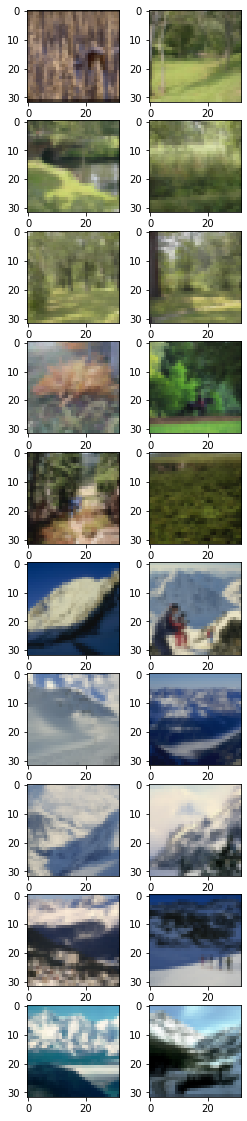

In [5]:
fig, axes = plt.subplots(10, 2, figsize=(4, 20))
axes = axes.flatten()
for ax, im in zip(axes, X[:10]+X[-10:]):
    ax.imshow(im)

## Instatiate Model

In [6]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)


## Fit Model

In [7]:
X = np.array(X)
y = np.array(y, dtype=np.bool)

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X, y, epochs=10)

Train on 702 samples
Epoch 1/10
702/702 [==============================] - 5s 7ms/sample - loss: 0.6912 - accuracy: 0.8148
Epoch 2/10
702/702 [==============================] - 1s 2ms/sample - loss: 0.2303 - accuracy: 0.9259
Epoch 3/10
702/702 [==============================] - 2s 3ms/sample - loss: 0.1540 - accuracy: 0.9487
Epoch 4/10
702/702 [==============================] - 2s 2ms/sample - loss: 0.1024 - accuracy: 0.9644
Epoch 5/10
702/702 [==============================] - 1s 2ms/sample - loss: 0.1134 - accuracy: 0.9501
Epoch 6/10
702/702 [==============================] - 1s 2ms/sample - loss: 0.0439 - accuracy: 0.9858
Epoch 7/10
702/702 [==============================] - 2s 3ms/sample - loss: 0.1034 - accuracy: 0.9644
Epoch 8/10
702/702 [==============================] - 2s 3ms/sample - loss: 0.0682 - accuracy: 0.9715
Epoch 9/10
702/702 [==============================] - 2s 3ms/sample - loss: 0.0987 - accuracy: 0.9658
Epoch 10/10
702/702 [==============================] - 3s 5ms

# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [9]:
print('''
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_7 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                331840    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
=================================================================
Total params: 495,265
Trainable params: 495,265
Non-trainable params: 0
''')


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)              

In [32]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [33]:
# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit Model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 526 samples, validate on 176 samples
Epoch 1/50
526/526 [==============================] - 1s 2ms/sample - loss: 0.6092 - accuracy: 0.6236 - val_loss: 0.5824 - val_accuracy: 0.7273
Epoch 2/50
526/526 [==============================] - 0s 607us/sample - loss: 0.3974 - accuracy: 0.8422 - val_loss: 0.3605 - val_accuracy: 0.8693
Epoch 3/50
526/526 [==============================] - 0s 652us/sample - loss: 0.3542 - accuracy: 0.8517 - val_loss: 0.3292 - val_accuracy: 0.8523
Epoch 4/50
526/526 [==============================] - 0s 605us/sample - loss: 0.2779 - accuracy: 0.8916 - val_loss: 0.2364 - val_accuracy: 0.9148
Epoch 5/50
526/526 [==============================] - 0s 622us/sample - loss: 0.2551 - accuracy: 0.9011 - val_loss: 0.3274 - val_accuracy: 0.8580
Epoch 6/50
526/526 [==============================] - 1s 955us/sample - loss: 0.3025 - accuracy: 0.8631 - val_loss: 0.3606 - val_accuracy: 0.8523
Epoch 7/50
526/526 [==============================] - 0s 733us/sample - loss: 0.

# Custom CNN Model with Image Manipulations
## *This a stretch goal, and it's relatively difficult*

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=65,
    width_shift_range=0.4,
    height_shift_range=0.4,
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

Using TensorFlow backend.


In [15]:
datagen.fit(X_train)
model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32,),
    steps_per_epoch=len(X_train) / 32,
    epochs=50,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 16.4375 steps
Epoch 1/50
17/16 [===============================] - 1s 47ms/step - loss: 2.3225 - accuracy: 0.5171
Epoch 2/50
17/16 [===============================] - 1s 36ms/step - loss: 0.6871 - accuracy: 0.5608
Epoch 3/50
17/16 [===============================] - 1s 36ms/step - loss: 0.6862 - accuracy: 0.5608
Epoch 4/50
17/16 [===============================] - 1s 34ms/step - loss: 0.6851 - accuracy: 0.5608
Epoch 5/50
17/16 [===============================] - 1s 32ms/step - loss: 0.6857 - accuracy: 0.5608
Epoch 6/50
17/16 [===============================] - 1s 30ms/step - loss: 0.6853 - accuracy: 0.5608
Epoch 7/50
17/16 [===============================] - 1s 41ms/step - loss: 0.6856 - accuracy: 0.5608
Epoch 8/50
17/16 [===============================] - 1s 40ms/step - loss: 0.6853 - accuracy: 0.5608
Epoch 9/50
17/16 [===============================] - 1s 31ms/step - loss: 0

In [35]:
pred = model.predict(X_test)

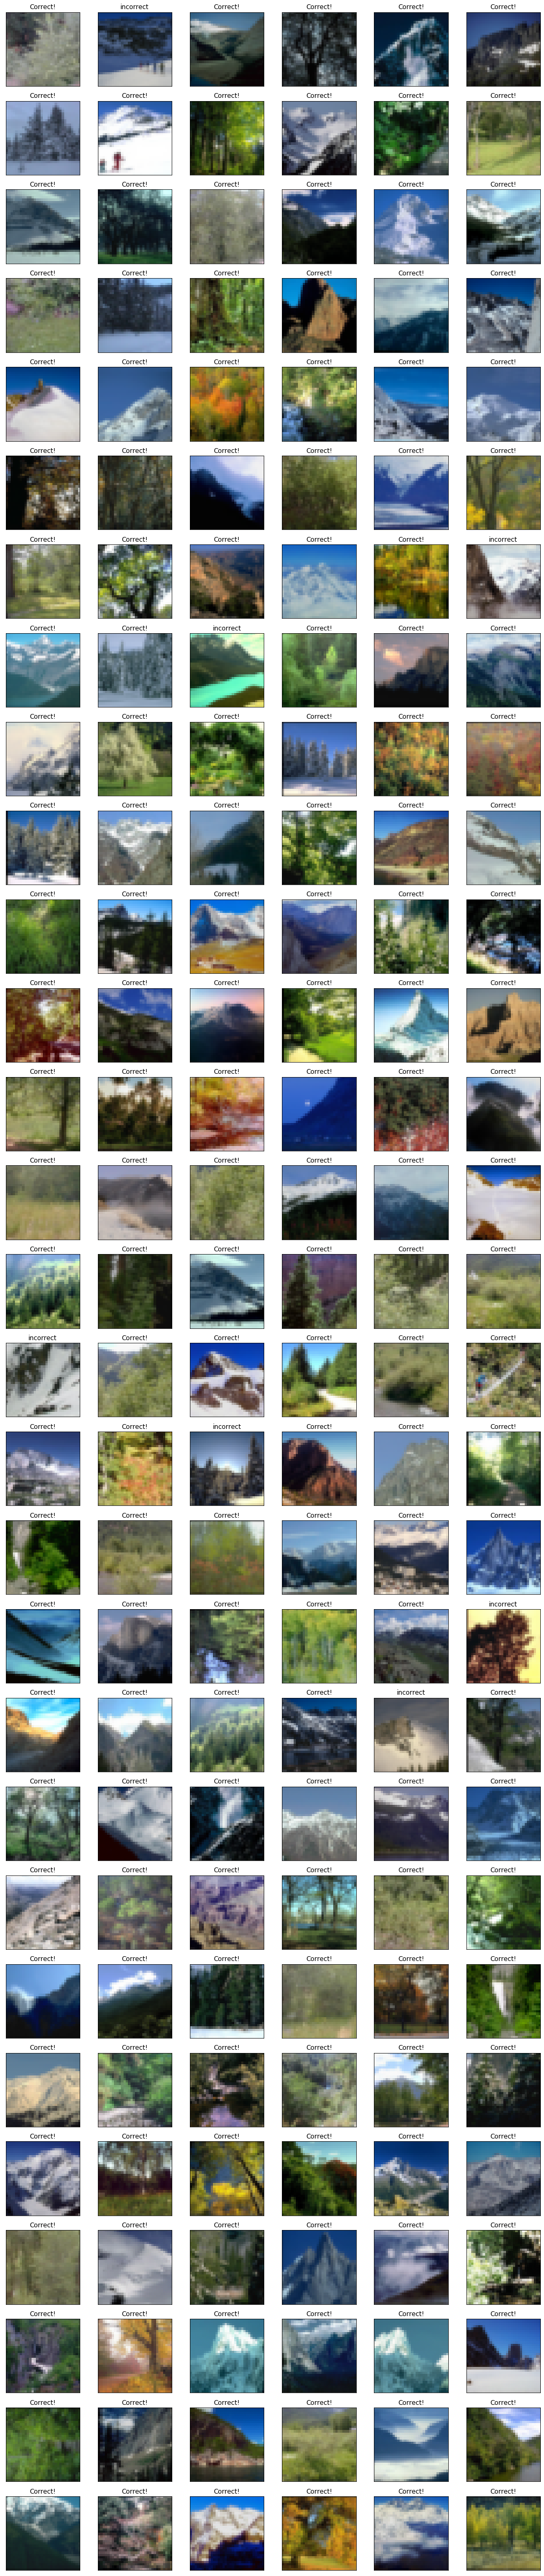

In [42]:

fig, axes = plt.subplots(nrows=int(len(X_test)/6), ncols=6, figsize=(18, int(len(X_test)/2)))
axes = axes.flatten()
for im, predicted, actual, ax in zip(X_test, pred, y_test, axes):
    
    if bool(np.round(predicted[0])) == actual:
        title = "Correct!"
    
    else:
        title = "incorrect"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA/kAABLRCAYAAABnE/8tAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9eaxl2XXet/Y55873vvm9ejVXd1d3V3ez2ZxFSiRF2pJoWaKlAB5iO4IVCEmMQAYSI4EBxwiCxDGMAEH8R+IgCGIHthBNEBUrEmRCAylZJE2ySXar56Hm6c3Dne89U/541XXvt9bueq+KzX6vLr8fUEDtc88+wz5rr73Pve/7tsvzXAghhBBCCCGEEPLwExz2BRBCCCGEEEIIIeS9gS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEPiSTwghhBBCCCGETAh8ySfkCOCce8U597nDvg5CCCGEEELIw80PzUu+c+5vOeeed861nXO3nXO/75z79CFf0y865/7Msz13zp0/jGsih0Oe58/kef7Vw76OB8E59znn3I3Dvg5yeDC/kocNxix5mGC8kocJxuvR4IfiJd859/dF5J+JyD8RkWMickZE/rmI/Nx9Hic6yDZCjjKMY/JewvxKHjYYs+RhgvFKHiYYr0eIPM8n+p+ITItIW0T+2rt8XpK9YLx1598/E5HSnc8+JyI3ROQfiMiKiPxr37Y7+/6siLwgIjsi8nUR+eDYOU6LyJdEZF1ENkXkfxWRp0SkLyLpnevbGds/F5Hzh912/Pe+xukVEfkJEfnvROQ3RORfiUhLRF4RkY/dK5bubA9E5B+JyFURWbtTf/rOZ+fuxNQvicg1EflT37Y7+37yTvzuiMiLIvK5sXPPici/vNNPtkXk/xWRmoj0RCS7E8dtETlx2O3Jf+9b3DK/8t9D9Y8xy38P0z/GK/89TP8Yr0fr3w/DL/mfEpGyiPz2u3z+38jei82HROQ5EfmE7L0svcOy7L3cnBWR/9S3zTn3YRH5FyLyn4nIvIj8HyLyO865knMuFJHflb2Xr3MiclJEfi3P89dE5O+KyDfyPK/neT7zntwtmQT+ioj8mojMiMjvyF6CkneLpTt1fvHOv8+LyKMiUn+n3hg/LnuJ7gu+bc65kyLyeyLyj2Uvvv8rEfkt59zinX3/tYhUReQZEVkSkf8lz/OOiPy0iNy6E8f1PM9vfb8NQB4amF/JwwZjljxMMF7JwwTj9Shx2N8y/KD/icjfFpGVe3x+UUT+8lj5CyJyJR99qzQUkfLY575t/7uI/A/quG/I3gvUp2Tv26TIc+5fFJE/82yf2G+V+M//T/CX/D8c2/60iPTu/P9esfRHIvKfj5WfFJFYRCIZ/Wr/6Njnvm3/QO58Szq27csi8ndE5Ljs/Vo/6zn350TkxmG3If+9//+YX/nvYfvHmOW/h+kf45X/HqZ/jNej9e+HQduwKSILzrkoz/PE8/kJ2fvG5x2u3tn2Dut5nvdVHb3trIj8Hefc3xvbVrxznFRErr7LuQnxsTL2/66IlO/okE7Lu8eSL44j2dNDvcN1T73xbWdF5K855744tq0gIl+5c+6tPM+3D3wX5IcB5lfysMGYJQ8TjFfyMMF4PUL8MPy5/jdEZCAiP/8un9+SvYB5hzN3tr1D7qmjt10Xkf8xz/OZsX/VPM9/9c5nZ97FLMJ3bMnz3OV5/va7XC/54eVeseSL40REVse27RfL12Xvl/zxOK7lef5P73w255zz/YmTN47JDwXMr+RhgzFLHiYYr+RhgvF6hJj4l/w8z3dF5L8Vkf/NOffzzrmqc67gnPtp59z/JCK/KiL/yDm36JxbuLPvr9znaf5PEfm7zrkfcXvUnHM/45xriMi3ROS2iPzTO9vLzrkfu1NvVUROOeeK78nNkknnXrH0qyLyXzrnHnHO1WXP1fTX7/PbzF8RkS86577gnAvvHP9zzrlTeZ7fFpHfF5F/7pybvdOHPnun3qqIzDvnpt+b2yQPC8yv5GGDMUseJhiv5GGC8Xq0mPiXfBGRPM//ZxH5+7Jn7rAue9/0/LLsuYP/YxF5XkT+XEReEpHv3tl2P8d/XkT+E9kzOtsWkbdlT/sheZ6nIvJFETkvey7mN0Tkb9yp+sey556+4pzbeOd4bm9dyUfv/07JJLNPLP0L2TPG+1MRuSx7LqJ/z3OYex3/uuwtcfIPZdRP/msZ5YlfkD2d/+uy5+D/X9yp97rsJe5Lzrkd59wJIT80ML+Shw3GLHmYYLyShwnG69HB5Tn/0pYQQgghhBBCCJkEfih+ySeEEEIIIYQQQn4Y4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhOh+di4Ui3m5XLlbzjO7T+CwnAu697vA872CcvhP00yVU1OlWMJLj6KCOq/F7bMl89yQU5UCh9dvjylSrpRwg+diev0hlItFPG4Q2EcTqMZNdLvk9mqKRVwO0qljOO8d6G14nizzte7oejc316XdavoO/L7iokoelMaXbv9BrSTxILf6kK9qcWiX/96fOBu2JE96hx6vUamaF+sz++yl+6/++AFuw1PnsBrD3s+DHmmfODlAGOmx62DHeZD4vL86g/auxP3uocdruVLJ61Oj/Dro980+evWeOMZxL/TMB/R4n2WeicY+59Hjmu8Y5WoVz5sk+9ZpTE9DOUnwWn2rFSXqnuPhwOyTq3PpeZKvWzs1FxFV1uf1EUY4zwjD/aeEWYb3nCax2ScIQijHw+FGnueL+x78B4gLolyi73d5bF+3e5A+//3PGZw+reeQDzRaqkr+K32AI+sDHeEpUJ70Dz1eRUTCqJwXSo199tonlrwf7zOPOAjv3WD9A8AG14MtJJffs3jQc9/vhehxZL+5SBJ3JEsG3gdwXy/55XJFPvaxT98tx4PE7KNfVtMcB4RipWzqpCkOEs2dNpTbO7umzplHlqA8d+wYlD2XJgU18ORq5BwM7aAYYhWpFvEFPtLfaojIB545D+XEM1l49bVrUD51BjtytWIn+9UynntzF9slz9WXCyJy+gQuWV6p4CAXOlvHqS8LcteFcq9nB3UJRpOff/Lf/0P7+SEQlKalcuFvj23Zv3MdKE2ZL7L2r2X3OEDy2O+wnmRhx9H9R9YDzBU8p34PXma8h/j+E6Q+hu9ax++x99ZvHuCYP3iK9Rk5/4Vfult2npm9/vJPf+koni8H9cuAPm7gedHSmx5s+D7Ai4pgbgz0TmYmK+I82yx6QqxjwuZk/d2lfsnz1dHfdOvziHi+ODbH2b/OOC/8f//ynp+/X9SnpuVn/8Yv3C1fefs1s0+iXpxv37gO5VqlZuo021tQ7re7Zh9NHON5AjW16fV6ps6Fj3wUyrtbG1Dud+15P/OFn4Hy5tY2lNPYTjw2buNYv3LjstlnoM5VKuG4HES2XxfHfnAREZEQ62yv3DJ1dP5sLCxAeWpmzlMH+3G304Ryc/O2qVJu4Jchty9dumoP/D4TFSVcfPKeu+yX5zKdb8U3AT9IftLHUS9dvjFL5Y3gAAO3ySQHeNHW6dWJ/ZFN5+2DYH6D8vwotR/7zqN8dfS04wBziOHaq4cfryJSKDXk9FM/P9rgHUTVS4oe3z0xu9+c4F0G63vuY7509B3nAI98v+Hd9/zsd+2+l3w9wKs5gffL5HvPG5ynTqbPo96BvefJcNxI1RepSWb74Pj8ZP3KH9hj3oF/rk8IIYQQQgghhEwI9/VLvuQi2dg31YXIfiNRauC3y8kA9xn07Tfq+heUxiz+qt2Yn9r3PFutDpSHnm/Up2t1KOtvOELPN4uR+kkrTfG401P2T2n0jxP6F3gRkcuX8ThJjH/CV5y237/oX9D7fSzHif0zwF4P/yKgrH4hyDxf87Q6+EtKoahkAt5v2ka/ROSeb34PBRdIWKzuv994lQNseZCjWO7/l3D9J6i+P+F53/4i7gC/WEqq/zJG/RLh+SuYPFF/8qu+OS2UbF8KctWXBKU7caa+6RaRbDz16W/CDwsnEhZG16X/5NW3zX4j75H5OC0FOsAv+ebXfv2tvalitpmr93aLe0foweLXs5f+xv0gR1LfsGv51kF+ybf7+K7t3r8gJL7zjP2121H5o8h+ryuvv/zdu+VK2f6V3u7WJtZRvwL32/hXeyIihQL+tdnS8mkotzv2L/uyBNts7dZNKM8vL5s6dTV2b6ytQLlYxDwiIvLCt78O5VNn8a/2up2WqTO3gH/1u65+2Rexfyav/wLLF7+d5g6UhwMc/5OhHYdLFZw3hapf91v4lwl714LtoNNFIbLt1N1ZN9sOG5eLhPv8AL1flnBu/1+w35M/fT7IL+z6h8kHOK75awDPcf0SMAwCHa++H+n1XyfomPadJjCSWv1nzPv/Tnkg2dWR1Q44kXDUv/y/yqs5gZ5XeeYR5td+Iw/af4DX+xzol/wH4UB/3q7Lvl/y1Vh9kF/y9/trvsDm2EAdN8t029rz5HpOpuaskeeXfJS1v3s785d8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCPdnvCciIPD3rXmv9P+VBprxDLes8V7SxW2tHTSvacfWUG52HpdoqVTxPM7z/UWpgBe3qI7R2rVL5iifGslyNJnxmU2EyrAnqtp9zpzBpWp6XW0UZc0ycrUUg8u0OY9nqRNlSpYmas1erwkE1mnr5YdSu9ZsGI7O7TWoOgSciIQ+05F96mDZt1zHfmuV2zqheg5BioZTcdcaFeWBMjRSbjYuUsEpIkERzaSMUY1nyUSz7JrX50Q90xz7ZDRcNTXyzg3cRxk0FSvWFFF7xuhlLkOxJk867l2I8TnwhGPfjQwp+0fEKNI5J8XCmMmOJ3ZDtaanXULPZ9b3AEvomWV47l3eO666Vre/sZJGmyQdbFnaA5jbHci8594mO7nH/Eab9Zjz+AyAVDxmgjk5aNq+NNgeGcnlsR1DD4NBvyeX3njlbnlmet7so/NPVMCc1Zi1dVK1jrweTyupXXZvRxn8BZE2BrNJoNvGecbCMTTn27htl6AbqLHw9tW3oby9YfO4Xou+3+2bfeoNNBculHA+s7O9ZupkannCYRfbrdqwpsD1mVmso4yQK3Vb58xjuOzcxgoumRd7zJTjRPcVa0h4GHy/9mq+5b32zWs+QzLDgRanBzI9Vu5/VHNc30zNMxrY49qJEhCFtk5ZGVAPBpj3TizbZelPnD4J5W9/+wUoZx6DbX1xgRlTfC11NOasGuecRMFYu3naVb+H2fHezgncPnMCr/GeMd/V8+D95wS+fe4X3/PT465Zxk58XtH3NuLbq4P76KXtJLXxZw0lsf21oe/eRv08PMuU3wPv87oDf8knhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhvjT5YRTK9MJIO9brd8w+PaVZi1PUFhRLVs+dKl1NorRltaLVEReVPqSo9MuDIep9RET6PdTcF4szUH7uw+dNneYuaqe3N/GeyzXUzolYCZZH6iFz8wtQjqfxfrbXrIatu41t229heWYJPQZErP4zzfB5RCUbAoUcdZNKxi+DofVIcIWxZ2QEW4eDk1SKefNuOUvtg9BSlqkStk862DV1+qo9EqWNjEJ7nqJg7AWB2qe3ZeoEke4rWCfMbeyFgs8uVn4WsXg0+UWMxdynysvxpgsJakRdanNBaQp1puUa6m+jovUU0FqqMMR7zDOPBkrpy0KH+zQ3b4omG/NAcJnVyB4GxSiU0wujPnxsxnoWLM+jZnajic/38qqN10SFWqQ1+B49V677sNHs7f/9sD2sT7O3n0rW02eNuO4gevsDaP2V3s5q8j3aVKPj398LIFc6vmQX+1K6+Za9tt5Y//L0gcMgCEKp10fxGhVsbnEFzGFlFRSJZ5wuVVBzHw+xf0YF68uxdAK1u+12E8rxwI5Zm6uoLdcadp9fQLVWh/LK9YtQTlOrt+y1sU9W69ZTYKjaISjguFwq2FzZ7GxjHeXXsXz6nL2WDubpQOX6btfOO66+9RqU4x7OiaLQziEaU+g5tL1uvQreb3LnJPfok++FSU/75is5kJ7+gTA5F0/k1eTv6xdgN+kI9llvlcvYB6ensO/8pb/waVNn+fhpKL/4xiUoP/kYfi4iUmrgnPa1VezXO1fwGCJi83i6v948O6q/dzonMubpETyAJj/wxLzx4TmA544xTDqAjv9eWvG9He79sYiYwPb2QDXOBl5NvtLKqxezLPP4k5k6yutFt4mI5IGeNyi/tdR6+2Tav0iNI855/NbG3nnv5XVwRCObEEIIIYQQQggh9wtf8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEcF+a/CAQKVVG+o5my2oDM70mpVovtVpDna6ISFBE3V6sdCclj9ygqtae7fWVbq9kdXudAV7v9168AuXtHXs/J08tQXlmDq8/ia2mcG0dtfKPPnrc7FMs4PXu7KDWqKl0byIiwwHqutduoZZzMLC66JpaN71SR01hmth7zvU2peOvVqz2MknG9/l+V6N9b4hcIovFkRaw07J65VxQr6T1MsXQBp+WhA5S1Hv6ZXtaWITxO3PsEVMjUXr6LNWxZk9UUFrOahW1nL2ObYNB53Uo63XmRURKqo+Wp9DPIkusfrxUxb7SV+sp9zz6z8oU9hUn2Nit7eu2jsopUYDPMO7bvpQOxvqfb93SQ2CuXpG//uNP3y3PVG0Oq1fweZbUetoXb+F64SIiWx3MNUWVXwexjaM3bqJHxHoLY3Hok4U/iP5Oy/y0Bs6zfvFBdO+6b9j17Pe/ljxX34GH+1/LfuOfiMhw5yqWV97Ay0isR0QYjV3c0bA8kTCMpD41Wne9Vrdj+4lHnoDycIhj2Oq1K6ZOr698UfS6w7lt014T+/j0NF7LzLxdgzse4Hl21nA8PfEoXruIyOMXnoby4hLq9tfWVk2d62++CeVC0ebXqtpWa+D139q9YupoHab21+m2ba7vdrH901iN7bP2GVbK6tqq6OFS8ngmzR07A+VrF98w+xwG+2nUtVXOgeyF9tnnQLMhfYwDVVK5xpt/zULliEfjfeIExvTHnnvW7PP0U9g3ihGO/8cW0ZNBRGS7jYOGm8H4vLWFc2ARkfkAx7dwEefjheaOqRNv4tiVO5W3Pcl/v6Hr0HBOgsJojmq09CISOOz3WrcfePxzjFY+0Pp6n/b/3nV8jWi0/Qfw6TFxrY95gPm1f837e88Jgszj16E85QLBeVC3ZfN9rCZH5Yae03raVr1zFQM8bqdt53WxG+XhPH93nx7+kk8IIYQQQgghhEwIfMknhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhvoz30jSTZmdkcJMp0xYRkYYypuv10CxMG7+IiIQlNHYplNHIpZhao52yMnsZKFOv1GOm5XI0Vuh00EThxo0VUydO0dBgtlGD8vFjy6ZOcwtNgJoz1kipUEYDre5gHcplj0FhTZluVetozBU4axxRnVEbMtVOsQ2BwVAZvCn3mZbH7MQFo3NnmX1eh0Ge5xLHo+dXn7bPKldxor1E8gxjRESkuY2mGNqkpFxBc0MRkVAZRcZDfA4ut30p7qMRTaGEsVetz4omCPV5lCFlwZokFYrHcIPHCyUMtbkL9tliedrUSWI8d6GAJjplE5wiYRFjvNPEfjHoWjMp3U7Ti+fw2qbQBEpEZJjfHhU8/eYwGMYDuXnzyt1y+exZs0+piH2+rIzpprH5RERkoY5xU1H5tVq2pomfeBL7yptXMTdeXbFGMJtNzO1ZiNfa7lmT0lQFW6rMbxLP99Cpykc+4z1jtOcOUgfLmTpG5jHmsWY+OF4kzRumTrr5NpQLytDPd8/hWI4xpkmHhRMJxvJar2fH9rWVm1i+dRnK5bLNlfU6msWee/w5KA+6mDtFRF749tehfPyMNTLVDAbbUP7QJz4N5ds30SBRRGT1xhUoP/o0mpJdvXLJ1ImKGDfVWs3sMxziOHPzMh6n3bEmpXOzaG7WbuG43OtYI96Cco0dKlPS9uaGqRNXsL2nZ3Dc6Xlc4vo9m6ePAtm4f6UnB2TvSddSucbjxKu3GKMzz3X4DUbhILaO2qZN2OZmsK+JiPzyL/1HUO5mds7w4nUclz9+Huert3es2e33LmIu3NzCMSQL7fiwuovHabXRVG/+1ClTZ3eI+bTXxH7uM2U7qjjBuZfPeC8MlHm0esYu8sxvdFxoA0Y9EfbU0eOQ81zbvjzIWObrBwcw47VjNX6e9uycpr99EcpJB+dBOxvWeG8wxPMcO//jUC4VbDv1d16GcqWG7wOVgn0/2F0ZmVBniR1734G/5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhHB/mvwslfaYJn/Yt5qvwabSElRQ7xkpTekeqMuwGhNbpztA/U6uVE5aeyQikgzw2uoNvLZCZJsj7qOueFcJOVxizzO/gPqkZGA1hAV1qixWeiTP1y/bbdQeO6WbmZ+22tqgjOduKt1soYC6PhGRSGl44hTboNux+o9icaS33lc79j6RDNqydulrd8tRVDb7RCV8VuXaPJQrNdum5ZLSOKn7LUbWDyIUbLPhAPWT7V3r25DlWk+Hx23v2LjSmnytz6rU7PMuN5RXQWA1XE7p1kMVI75vC9Mh5odSGdu/VLR6rL7S3PUz1KJOzy7YEwWYHwpFPE+eW1+FcT+AwHO/h0Gz1ZI/+OOv3C2/cuKk2eex86g1nqpj/GaeXPOBJ7BOIcT2cTnqyEVEAuWrcf44+iecXbRa6lYbn/fl69eg3Aw848UQc3JX5eg0siYD2wlqmgfOakZTFfd5psqeFJWqMcQ5bBfn0R7nObZT3katarb5pqkTCub6TGkZA4d+F3uVxjX5R+O7+VycpGM+N8OO1WE7lY/SRLWx57hDFcNXL6GOf3FReYiISBrjc2hMoUfIVMN63GRKgP3kBz4A5bXb6CcgInLi3AUoxzne39TMoqnTb2IOO/vYk2af65cwTjbU/MZ3/dqHKFet2ZixPimlEvYnrattK/2yiEiuckFJzem2N9dMnfbOltl2FBgfx3JnvYP03MXEp1dDrLfp8cSexx5l/zHISp71cW1eyLU+W2mvn37iUVOnXMG4WVlvmn22VJwU8iUov/jyd02d77yBPhPVEsbRhWexb4mIvPjSS1B2q7egvDOw8yYRnA+EygMjaVt/iyOLc+B74sv9Rqevyx5NfhDcW0/v1dfvp8n39Q297QAafL2HGXV9ngpqHM5SO6fRPj2hmk9nvSu2Tge3OeW5oz29REQS5bcV76K3S8lOnaQgOHbWlF9Vq2X9Kvrd0TvEvXzQjsZsgRBCCCGEEEIIId83fMknhBBCCCGEEEImBL7kE0IIIYQQQgghE8J9afIlF3HpSA8RFa12cNhD/WtnoNYNrlk9RVRUehClyljbslrOdIjHrZTwVsLInqdSw33OnUb99dys1Wxr4hivtbVp14wXpXGt1u26uPUatl2khChxbDUWZbWG+PQU6vS05mSvDt7jRgd1hrnY65+dRT1IoHQ05bJ97uGYxufIrOMsqO/JPdpjvb5k3Ef9Uja07ZPGGI8Dsyawjb2CWp9er8EdevwgarO4Bmx9BvXoK9des9eWYP8rVVFfFzjbBl2lIw4Cey1OrXk+t4jX1vWsX6/19bnydshSq5WfnsbrPXkc/QLixMZ4V2nsdtQ65HFs77k05k1wVMJ1empKfuan/sLdcjy0OqxcaeXyBO9tccF6FgxTzCWbO6innK7btZKrFcw15fL+uXFuDv0eHjlzGso+3VhX6Yq3NjEWd3ettvfWJj7vWx3rQ9BLsZ26fdT6D1L70BO1nrVOp4lP99a6jcddfR2PEVv/EqNTVzrgRPuziEjaH/UVnTsOizAIpFYfCQzrDRtHxRLGTZJgGwYFz1ii2qffxXz70ne+aer0WriednMHdcS+Nqup67129Qoes2efXZxhHOUpXuups1bj3FQx7VNPbqzhPo8+8TiU202rI2618Z4rNRR7pp54Lag529wiaqm1b4qISKbis93CttW+FCIiiSfnHj4O5ibOp4P3rGmvj7Ef9gj7/5Zm5kwHsTVSPjm+gUzZ+sjCPI6vf/Ov/hVT59jxE1A+c8yOKfNlnA+8+OILUH7+u1aTv7uOMd5S3jkvZ3aev3YTNfiRGu/6TesHIconIzrxBJQzT7/WvhNHByfB2HMOfGveK3290ej7NPk6VowvjI0lo8HX5/FNpPbZx+twkWKOzQaY51o7nrXpu5iTersbZp8kxuMuLeF8pZBu2ovJ9Twd27Jas35A5ZLyhMjweucb+E4mIrKb4nG090Ic2/HLHfA3ev6STwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCeG+jPcC56Q4ZggwDK2hQ3UKTeZ6u2gY01q3RhmuiJfRmEHjt2rVmsFsttE8qqAMHuLEmnqlyrTj+mU0RPjIh37U1Dlx+jiU15V5yPoKmkKIiPS6aDDW6VtDh4UATXKmZ7DdNreskVmUoaFDpVCF8tw8GkmIiEQFbJeZ6Vm81h5eq4jIYKCM5QbYll2P0VVpzGDJZwB4GETFsiyMma5Mz58y+5Qq2O7ba1ehvLVyydQZKqO9PMO4ynN7/8kA2yxXliOBpy+l2XUox0N8VknfxkgS99Q+zXuWRUSiIrZBHNuYUN5LkvexHxdK1nQrHuBxhvpaPAZj3RYapjR30fjw+CMfNnXCEOO111rB8wzRcEVEJB67ljSx13EYOEEDzmLF5r1SGQ1aUtWGrY6NidVtzD/1Kprqre/YOo0anjvIMACGiTXWCgOM4dYO5spOy8be6gY+790mPsstZRIoIlIq4HhR9rTTIFFGewMsN1s2h2lTwzBEk7I0tfecqpiOQmXeF2HO3jsOmjyl6lp9ZkRhcXSco2JsGhUKsnhiZIxZq9vxp9vB9oljZczbsoZy2khTG+VBBm8AACAASURBVEkFnt8mtDlcVMGxcdC3fXyocvKLNzD3P/rks6ZOWY0XdWUUenUNjRhFRJSHklx7+02zT6eJ7bSt+p/P+LIxhTm301LjUt8zDtcx9saNE0VECqGdEnaMwR+2bbtj47HVtH39KIDj7v79yHS1gxji6Sq+/mo2aSM0Xx21TVcJbZ2FKRwv/tbP/ySUn7tgjSI3d9GY7q1r180+q2oe/J0/fwXKayto8Cwikod4LUVlvHds8Zip0+9izl1eWITyG6/beVPcxH6QqflacR6PISIy3LRGbUcB50TCcCyBhDb3BWqbMd7TZbHGbrqO88RfoI0ezXlMFXHK0DAb4viedG27d7cw3lqbmFPbnjFDj6GxZ05XUu9CLUFT30bNmsBOT2O+D3S7eAwbGw2sc+smvmcWCx5j633ME4ceE+bxuWCv/+6/1/OXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEO5Lk+9ykfKYRKastFkiIu0UtQPFEupwfHLtPEWhU2cbNWADK3uQWgH1IUWlhXQlq69wmdKUKI372hrqRURElk7i9c/Oo0a/IB5dtJJttHashqRUxHPPL6AeSWtIRUQy1U5ag5WLraPk9FIs4TOr1lCfKyKSKI15toPHTTN7nkpl/u7/nUcDdBiUyg155OnP3i1HkY2JXDAgy9UpKPu0Pd2de+uZimXUOYqIOCXm27h1UV/IvnXSIeocfVK/KMIurf0Rhj3UuIuI9DuoTQqjktknjFA/123jceoR6pBERFKl4x70sF8XK1bH31deG8Mh6utbra+aOrlqp5KKcX3tIugh4PNDOAx2m035/S//4d1ypWrT89wc+pUMhqgr7g6sbrxQQR+Os2fRm2JWeaCIiFy8fhnKnS3UxaWxTeRNpcNtKm11HNtr08LSntJO6xgSETOI+DxAYqWVKyrdYjy0g0qpgnEfaY1r7tHkJ3gcV8Rj+HJhpDquc/icU22AISL5eM49GpJ8KZYrcu6JkW5d6+JFRLZfQc3lzNIJKLvA+tWUyxjT/S7GVdvj5aG1/ltr6BnikbLKxu1rUF5cxn5x7skLps65J56A8tuvvQrl65fesidSsbi1YnX7YYQXeO6xx6Fcrdq51qU3X4dycxdzZ9Gj49/YwHx6vHwOyj4/mbbK9VvreIzY51Xh8ew4Cox3nYPI6x9Agr+fdN5/XKWRziOb+0tTGAPzMzhXeebRk6bOz33+M1D+8NMY0y+9Yv0hvvynfwbli6u2jz71+JNQ3t1E3XHsmb8WlBdMXd3ii3/2x6aOmvLKUo65IUs8LxRq/M+Vz0/hpNXkV84+AuWNG8/b4x4GzolEY/MTTyJzev6iPUw8E0U9Z9V+NL5xSx8lUM+iv7Uimt019LTKBvi+1O+g/4OIfZfraw8wT77RPj2+9FMuYTtpafzmtn1PO7mMPjPTDRzfk9jG+cw09svVFfSvSBJbJ1djZ6eDc+XFxXnRdDuj4/g8FN7haLyNEUIIIYQQQggh5PuGL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQrgvTX4YBNIYWye2G1rFkhvitlBpOwoerVGitJqDHmowBh795wWlK91RdbqZR1MS4HEypT97/nmrTwoD1LU98tgSlLWWQkSkEKH2o1azayV3+2oNcaXtWDqG5xGxa0GWCnhtmUczmqRYp1pXmlFPCJSUhmd7E7V+mUcnOxxbn92n6zsM8jyVYX+kbWn2rOZGa/IrFdTTB+JZD9xhnWoDNc+LJ62WM1Fr3G9v3IBy5llvU/eLSh1173luteRav1qqou49LFqd5rBnfSU0kYq1+eWzUF448ZSpc+3t7+K51THigfXA0ILGgtLX+bSeaYJ63Po09p2pedS3iojEY7reIPyu+fww6LS78o2vf+du+eRpq8NaPI6xpn06nEezV6hg+2SByrfZaVNnTWny29uoa2zt2nXm7TrNWA496ziHAV5/uYy5stW1+rWdth4f7D5dVU83S71i/TmWlea1oNJ2p2W14LnS05fUOuPOMz5kqVo7WHmc+GIc/DkeRCj8AyAZDmTl6ttjW+zzHfbxWaVdzIM95dMhIpIpfb32ZShXrD59U42NzU3U5Aee9d+HA3ye3S5ey/VLqHkXESmXMecuzqNm88lnPmDq/Pk3vw7lXtfec6SCLVC/v9y+geOFiMj6Kmo9S6pdxtdRfodE6Vl7PczBU1PWn2P59Dkot7ZwPrBy66qpk3p0s4eOE8lhrW9fR7r33MXng7MfubM5OTd9BctR0eann/tLn4PyT37s41A+Pmc9bjLVL/7tH30Fyi++9rZorm6hBr+b2HZqNTGG+y01lqd2PpMOsO8HEWqXO307P+s28bhxihruPJw2ddxJ9M3IV9F7o7+G67CLiBQvfNhsOzKMDV6BT5Ov9Nihijej2RcRUXXyAc4bu7tWX99X3hzVEHN7cwtzrojIUM17nepAPm+fRHmn6fyvfadE7Py54sl9tSrOP0P1/urLBm9eugXlmTq27elT6KUmIjJUfhRlNdfY2bXz3iTR16J8psqe3+NhTKMmnxBCCCGEEEIImXj4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImBL7kE0IIIYQQQgghE8J9Ge/lIpJGI4F/uWTNDTJlrtTcUmYNVWua0+8rY6gITWg622gKIWING4IAzRrigTVjKpfx2uYX8fqD0N5PawdNSHotZc5UtKZ6/R4a+mSJxwxLVSspQ7ROGw0rRESGQ2UwVtVmDdbEIlN+DNqcL1bHFBFptdFUpadMAuOhPU8+bnSYP4A7zQ+M0bXOzh83n25v3YTy1toVKCeJNZCZXjoP5SDEhxkP7bPrK9O/Sh0N1KKCjb0wQsOObhPNz6pTi6aONp3bXr0C5dRj8Kfjvt/eNPvEfTS82UgxxsNCxdRZWMZ2qk8v43m61vAvTfC4yRDPO+hZ05JAmXsmMR7DBbb/VaZPjOqHtg8fFm6s79y8ZM1vMvW9bH0a231+Ho0jRUTayjBnTRkg5bE1lNPPe6D6QaFshw7dyr0e5mBrNiUiqu2HCeaWa6t47SIit7cxP6Uec7tIXe+ZJczbC3M2XkOH17u1g20QRNYMq1ZDM8xYte1wYPOrOByrtBlRsWTPM27Eo42WDgsnuRRlFDuXLl/z7IVRsbOFZnFhEdtPxBqbbq3dhnK3ZQ26GjNoUrlwDHN9u2njaKDmGUP17K5dvmjqbKzh9X/oEz8G5TCyuUT3i9RjSjYcYh984dvfgPLCsh27zl94Bq9tfRWPObDmmFGkjJCLmPtPPfakqTM9g+aC1y5iu7SaNo9rw8WONmY7JJRNqfnc7fu710FMhZWpmec8uerzegybrdv5wCcvoIHsa2+hMeSX19AQUURkZxfnzvUC5p6trS1TZ2UdDdQij2nlRhn77bjBsYhIntr5d5bjHHd3S5sE27GrkNx7np+37T0X1BwnXjyJdW5b4710w461RwHnHJiXu8Ca6AVqPDDmuz6zviG2/WDlO1AetuwcsLmLz3hY1ibONs5TZQysh2od9yIiPZULRe/jPON9AWO0WLAxm6v3Em3gF0aemFUG7qUSxr0v34fK6HBuFg0ms9TzPNTcQ3sL5h6z80JhbE5wjykBf8knhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhvjT5hUpJjj/12N3y2tqa2SfeVXrkstLX76CuQ0RkOEQNTaqUU8Wi1Sje3kGNnSvg9xVRxd5aoYjbjp9GXfQj586ZOtVSA4+rNGxhaMUQ1RLeTxInZp9Y6WC1V0GWWd1hGKE+qag0Mf2+1YIPlDZu0MfzdtpWKxfH2P6B0+3fFQ36AVj9yOExigufpvbYcdS5pQuo31q9+Yap02+jjm31xmtQnl44beocP/tBKGc5xuL03AnRFEv4fJMYn2UQ2vsZdrFfbK28jZ+3rb9FQfWvcnXK7DNQngKp0tzdvvQ9UydSets0w35QrtjzFJTmSWuRKg3rQ1CuTkO5PncGyqUKfi4ikuVjOrd7CZreRwrFSE48OvJU2FmzOuIbl1CfPDWLeaNcOWvqlCuYg0Ply9Fros5YRMQ5zKfTU6hhjzw6P0nxuE0lVxsMbTt3BpiPVldRY7ndtPmppnL9ILZaukIRz1UIMI421q2WM9HxWUONaMPjQ5CpXBcqj5ZSYDV7mdEpqrLHNyPNRvlV739YhFFBZhdHeeup2pzZ5+oV1G93u5hHyhXr0bN2/RKUOzuYb9PU6qJnTmPO7WrvDo/2U+ejVPtOePSv0w3MWc1tjKM8s/4W66uolZ9fPGb2aSmfganZGSifOnvO1KlUMD5LFZybbG+gh4uISK78IGZmF6A8N2fza6WMxy0qXXe1Zp9hPDgaGnzEQa739SKvbwh8vv/vYno48en8tcz95EnsOz/7uU+aOpdefwnKv/ftF6Ccluw4Fym9dlXNV29ewb4mItJWfiwLJ+x8phUrHy2V56LA07oVHNt7Ks8tHnvUVAkq6h0jwfMGTRvjyRp6g+Qnn8AdzqGXhYhIkNsx5Kgw7ikUeOYq2qdA69y985sB5tTFadxnM7ZjXaS6tPY+8nnj9Pv4jNW0QioV6z0h6nWppN7byh4ftOkG5qDdpn3PDFVf6PXUe5oddq2fk2rrzDMWFZXhWqGA8+s8tO2kx42Ses9MPB4Xy0uj99eNtVvm83fgL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHclyY/yzJpdUbCjK0Nu8am1oXrtWeDgdWnDzuoNU6VDmKQWk3J7RyPe2wBNWwL03YdZJehnqK5iTqHzoJd01jXKSjdSd2znmma4XFij9jDKe1Xq4XavkrVXn+vh1qpYYzH7XvOEyg9SDHC6+90fFokbP9KFbXhURHbWkRkfn6kB4sKVst4GKRpKu2xdtX+BCIi9SnUwmkd/PIZ1NKLiHSaah3ZEuo069OocxQRqU3hNqfWB2/u2HVa8ww1l4UIY+bGW//e1NldvwHlLEfNUKGk1za1clWt/RcRyfP0nmXx6Ij7HVxrNVT33Emsh0TQwZSk9cseGb8MlLaq3EcfjbJHKyyedUcPG+cc9J3pJc/NKjnaykV83s1Nm5MXT+D9zy+qXLlo+3NjCvWT9TrGjS+nBUXs92UlwLt+0cb4UGnyz55AXelcw+bX1TX0lRhGNt/MNjDvaR331q7V7M3P4bln5tCzpehZE1fn8TjB+9H9T0QkE732s1rn2KOhHNcC63MeFkEQSHlMZ7u9Y9dLj9Va7YFqj8Ulq0/fXkPfiVh5LiyffsTUKapxrrOL11JtYE4QEQlUfGpt68yCvba60uRPNzBHr1yzGueB0jiXyjamZ+fV+KA0zatK1y8iEgaoR06GmE+1x4CIyNKJU1DW/g5X3kJ/GRGRs49gex8/jrr9V160uTRJ7DzvSODG+5ElfyA/ITxSrvpzsWSn2Z/88FNQ/uX/+K9Def3KFVPn//q138B9VvH555H1VqlPY04r63mIxxNDVH+bm7E+DXq8d0o3nXtymFOeSCU1F205m8fPX3gOyp0NzA2FwM6TW+odpHf7Ml7HMZs/0sT6TB0VxscD39jgzPih8ppnDApz9AAZ9vGdZTiw7wWVEo5/gcNyq23njQU1udRryEtqc1S9qjXtWGdpAcdlERHJ8B53dmz+KSkPs1ZLeQr43tNUczd3MU6OLdhxpdvFfbQXQFS0+eD4Eubls2fRW2lnx87rHn1s5GFx48ZN8/k78Jd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCPdlvBe6QKYKI/OCpnbsEmsGV1dmGtUZNAIREXHKXGvh3Eko39yyhj5OGTY88fg5KJ99BI0MREQKEV5vuYSmIy6yZg3KK0zSGE0Vdnc6oqlNodFCGBbNPlmG15InaHQxVAZOIiKhuv40QwOqNLZGZplq/+NLp9W1WSOP5g7eY7GAYRIV0GxIRKQ3ZmqXHRFTs3jQkVsXv3m37AJreHTs1AWsM0TzkIOY6C2dQhOdUtmawQSqr0xHaIaWJ9YI7Oqb34RyEmNMxENrFJkmuK1UQ6OocsU+u0EPTVgSVRax1x8oAxXnbCpJ1XFcATuTz/goU3FfKKEBXBZbg5ywonJKoDqtx3jmqJiXAXku2XB0/75vYNOhygvKAKmziTlBRKS7iznq6ttoXlSp2n7RmMEYPvMI5uSz506YOsWSynPKfGth1po8JQmee2MLr397xz7vTh/bICzYfLOxi/k0Urnz3Dk7PszOogGhjvk0tjlZ90nJ9zfZ0dHoVL7MUo9pGRgHHo38mmWZdHqjvHXTYzo3VCZYLsc2vfTaS/bA6v4jZXhYLFkDxGod81qng3HUbu2YOoUixl6q+tLc/JKpU6uhedOVt9+A8psvfdfU6fdwTCl6THU/9NyHoHz96hU8RtfOM06cQQOxS6++COV2y86btnfRrG1+/jiUGx6Dwq0NNP0bqjFSG3+JiMwtolnb9pZt/0NhPPw83cjlDzAuqPs/toTzgy987pOmyhd/4jNQnq9hnvh//vgrps7qbXwOuTISnjpmjSIfP3sOyoUC5uDNbYwHEZFc5b1ipWb2iZShdqbG3IVHHzd1Zk6gmdhSER/Apdu3TB2n8vZP/+UvQrk5sGP7pZvYTl//1regPPAYC0d6znBUcA6M9JznnUsb7Tk138naaM4rIuK6aB49HGLO7ffsWFcu45yvWFTm0S07Vs8tokleKMosvGfraKNv3VFrFTumdrs43k/V7Dy3VMZ2itS7T75rE8L0FM6fI6dMnit27iQZXt8HnsZ3jLk5axz40Y9+DMonT5+B8te//qemzovfe/7u/4eed4F34C/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JcmPwicNOoj3eVy3WrNl2ZRu1mfR51jxdk6N5TWKFMa/eNKeyYi0tzchvL2yjqUd3asrvjkmXkoX3jyPJR3t6wuWmt1ogibrFBCnYqIyKCLmphy2eo2BhlqUbIM61SrVgc1HKDuolxWeuXU6sk6HTzPlStXoBx49HQFpZ3WEvtW07ZTd0zDk6VWJ3UYhFFRpuZHsRNogwUR6bS2oJznSh+bYVzt7YTFbmcTyovLj3muBivFA2zDILBxND2P/gmFIj7vdhPPKyLS3Lx+7/Mojb6ISLGsvCmcR5eYoxYpV98P+rRiYRG1p7nSO04v2XaKBxivyRDL9blzpk5jAfV/ZaMh9N3P0dA1j5NLLmk60pbpXCMi0pjCZzVYQD+CjieHaY+MdIj6ta6nKboD3Gd9A/NpZ8tq/y9cwHgNQqXtDO2JVlZRN7y5jc+717c+I22lyc89GvZlNe48/ihq8KemrD9AHGPe0t1Aa/TvbISizpU6n/h2SlReH3p0islgPL+m5vPDoNVsyr/7gy/fLccDqwt89tkPQrlUwXb/zje/se95oghz4+r1a2af2Wl83h/5+KegfOXSm6bO1bcvQjlU8Vrw+ClsrOBc5aVv4fU3m1Z7HhVxzrOwdNzsc+sW6pF7PaV59nj0NHfxXGEJ5xmV3Ob61g72t0EXn5nWoIqIFMqokV1YXMZrS22Mn3sM51YX33jL7PO+4wQ7tU9+v9+w4KlTKmGc/Ngn0V/huWefM3VeuYJxFG9jTF/z6NPbXcztoZqnXTj/hKnz6edQ67u2jXn74uXLpo5LcE603vb44Cg/AKf6/pkl9GQQEXnsNMZNX43tzdjm8U8+9wyU26p/vX3LzoGyMsZwSfW3Xtu+G6QFO98+CjjJJZDRWJx37fje6+DzGnTQZ6GY4buSiMj8NOaKoIw5Ks/tGJMkOD4uLWHOLRbt+PgXf+onoHzpTczDr736uqmj0pjMzuB5ah4PoV4Pry0q2Pn01BTmsSTFss9KTHtNnX8ctfLx0Pqe/MjHPgHlT3/qR6Fc0t5FIrLb1MfBRFMs2HeXfPyd8R55i7/kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEcF+a/DCMpDE70rXPftyuIZ6rtWYHA1zf1V2x63KerKOudFPpMHe2rabk+Clcw7asNOy3VqyWuqnWtO+rdbwDsbq36WlsolRpJZIYtasiVruSpFZHI2q94CTBduu17bq4qdI0DwZ4/eWy1XoMhqhZGg5Q9xR41gctKA3kQK3B2Nq111abGmmwjoraOQgLUpse6bGiyLZPv4NxsrWCOs28bmO8uYNrjOr73d5cFU2/i1oyrXufmrXrjs8uP4t1lG4/LM+ZOpHS7a/feBnKva7V1y2cwHU8K/V5s0+a6HVU8X521q1OtlrFtosi1EDVpqw2taj0dO3mCpR9fg9ag6ZXIk9jqxV2bvTUvOuSHxqjuMhze6/VOmqa61O4HuywazXsQ6Wvj5T22HmWCNZrhqeqCd983T5vvSZ8eQavdadpY6+rNMGdnso1LXs/WYzXFjibccrKK6WntIyRlexJVMD8kKrz5IlHp6j8DVLlraK9VkRE8hjHmdSU7ZiCvgpHI8MGQSCVMY197vEKCFWbttv4HPT69iIiC0u43veU0mSu3UDfERGRVbXt/JNPQvnpD37Y1GntoD55cx3z9pU3XzN11m7dxA3Kk2HGswZyr48xPb9s815NeaVcu3IJyoueOjpuNtcxVxpTCRHJ5d7x2e3aNcSPL+Fc65EncLxo7lgfgo997Eeg/Du//qtmn/cfJxLu87vWPl2rVLTJ8kMf+gCUf/zHPgnlN6/adcq//MIrUC52cR6yvWm15kOVkyM1fQ+dvbeFKZxbT1UaUH5+zs5vrqt+sNmxMREq75yC8sEpFuxca+U2jhnrG3jPa7ftvOlLV96Acl/p6cue/HH+WbXmuPIHaA/tmDLIbM49CqTDtnSuf+1ueWvNejX01diWqPnM8WX7jOOGWr9exc70tPWsKSpvkRkVW1vrV0ydy2+8CuVTp9Ab56kL1kdiqoGxtLmB8+3r121/EuX1Fq/ad7nGNMZ+s4lxXSjasfrcaRyLfvonPw/lKLI59rHHHsXjKi+wYWJj7YrK90VlTDD0xOzKymgsimN7v+/AX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JfxnguclMYMAYYeY6hGDc0N4jU0GejNWEOH9gBNA27eQiOXWq1i6sQxGn/MzuM+Tz2Lxi8iIqKMS0pldFkJ5+x5yg00QEgGeM+losfsTt1Pklo3l34P9+n10MzOZ1yijXRyZQI4HFrzhUydOxdljNi3pmPtGO+xMYXGEcWy/W6oVBiZZTiPAcxhEIRFqc+MDO2SoTUMHG6h+cag11TlXVOnWEHDEW1eqA2RRGybJEM8b5pYM6nqFJptuBBjIkvsecICmpbMHVcmSRvWMG1nA41M0tymhdrUMpQrykQvLGC/FxFp79yGsjbhjFffNnVCZRzYmMbzZpHtS2mM7dTavArlZGCNL4Mxw6wsscZ8h0KeiYxdi/Ok50zFVlkZyNWn8LmIiOQBtmlfGSnFsc0B5RLGdDzEfTJPF3/rEsbRybNoJhmVMZeKiPSGmMfbLYyRdGjN3FyOMTA9Y82X5mfRyGxWme4EgXXei5Xha1+V44Htb9rILFAmO9pgc28bNl6uymlgn3t/zDwyOxq+e5KlqfTao/y4u2XNwi6/hcZZyydOQvnC02haJiJy8zrmKN2E9Rmba1ZuoiHeZWWa9+zH7Hyg0cDjXLv8FpTfeOlFU0ebMz7zoY9C+a1XXrB1InyeraYdU1pNzFHDPvaLzTVrSqYja3YOTaKS1MZrexeNy3R8Dj1jV6+H11JS/fjCB58zdbLMxv1RQM+ZNHrqMjOFMTJ/6oypc+zsY1C+uYpGYb//b37d1LmdYRzpGK94fn9LtWFqgImg2bPzm556ntUizr/nF9GUTkSkvI1jblCxY4pT11JYwjorGzZed7eVCfQOlp2zOXn2zFNQPvEUls+dwJgXESnXcDz43a9/D8qlzI4pmRprj8iMQOJBT25fHpnX6XFYRCTTMa2CuOgxi2ypcXZ2GsfLes2+pzV3cW781ts4Z33ycewHIiKf//xnodxXY2gU2Wv74DM4Z/3tL/0WlLc9Br5TanyvNO1co93G8TxTZotTU/ad6/HzZ6F88gSakDab1nT0T776ZSjH6n3qM5/9i6ZOQ+WZ3/yNfwXll1+2Y1GzNWqHoces9x2OxtsYIYQQQgghhBBCvm/4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhPvT5DuRwpg8p71ltRG3W6g3qxdRH1NdslqJjeuo7ZhdXIDy2bOo4xMReeQx3Nbpol6kXLL6ijBEzU+qtDmZx2Mg7qPepd3Gew49mpI8w/MM+lbn1u0onZu63tlZqzXa3EaNc7+PyiGfXidJcJvWrw6LHv14jtcShKj9CgJ7nn5/pE3JPJqnwyGXbFzA6uyzqs+cgnKkNGt5ZmMiCHX7aP2y1cY5wTasNBbMPpokQZ1NmOvnYGO8UkeN3dT8I1Cuz5w2dTq7GFdp3PPscws3aN2X8ikQEanPon6x17aa3f3YXEWdrG4TEZGoiF4a4T7PR0Sk216/+/80e3c90/uJE5Fg7BnnHp1VPMBtuc5ZqY3XVOngAq0j93zVmwxV7Kl9fJrb7i7mtIsvX4TysZM25h9/AmNkeWkWytevYmyKCPjCiIgkHh3xzvY2lFOlcY4iq//MVP/qKi1yp237RbmMetWiujY95ojY/Kg9XDodO65mY8819TzjwyDPM/AtKFWsN4K+1oGKq9my9cE5+9jjUD51GmNkesqe59/+G9Rtvvbqy1DuevwUbt9A7X+qxs9ObLXzz3z041CemkEta6eLmncRtjfstQAAIABJREFUkfljOMZUqlNmn34fY6vbxvlMa3fD1NGeHTrWck+cZMrQISpiP44HVo3cVTr+qxexX9eqVr+70bSa7KMA+GF4/DLm52ag/NkfQy+HZmLnNqubeK9vv/kKlNczq2mPythmiZq/dhL77CKdW1RObm3b8dWp8SFSt9wo2LHxzMJxda01s88xpYG+fgW9N9ZuXDF1tM/Usx9AL4cLTzxh6hSq2NfLBbzpMLQGJb/5pd+B8s0reC2uMWfquJn952OHQZbl0umOcmxip97G42VpCZ/N7Jz1MNndwXiLIuX3IDYvt8fmTCIiqeoKvnH4N379S1Cu1zGWUo/BzNVLmF+u38I5QL1m47HVxPuZm7U5dlftUwixb+j3NhGRS5fRN+ryJZyPbmxumTrFgvJOUwZGVy9fNnV6fby2y9euQHnQt3OPPB+/3nc36uEv+YQQQgghhBBCyITAl3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRDuy3gvCAIpl0aGIYE0zT7JmEmEiEhPGSuUq9Y0YWkJTS+SOXR02GlZM5ubt9DspF5DUw9XtqYqLri3mVTSt3Vyh2YMRWXMps37RESSVBldBfa41SqaYWQZOmrEsTVv291FI6BeD89T9RhS1KfQgCIqKLOeyIbA+DMWEdnYQNOfwPlMq8aNIY6GMZTkTrJ89JCD0Jo+VhpLUC7V0Lgu9xhaOGXYE+pA8nhgZLkyeVQGcvqYIiJhhDGtY2TPqg0JQnyeTj2r2ow1saxOo9HOoG9jTxs2abMXr3lbjCZOUQnN+dLEGoz1lblLsYJGbNWiNVSpTs3jtQi2bWfnhqkT1kb9LwhsPB8KLpBgzIgs1c42ItJp4rNpbu9AOelZs75QPZxCCWNkasYame1st6E8UMcdegxzdDhmA7z+21esGdegg4YyT33kKSgf//iTps7uNo4Hr7x20exz9Sq2S0ndc6loc0GaYv/SfTLwBHlfmbWVC5iTfc8wFW34g2056Frzs/bWKPdrU8TDIk0Tae2MzL7qNWu+mTm8t6uX0bhoa9saFy0dW4by3ALm5OXjmK9ERL74H/xVKF9XZr5zc5hHRER6yiR4Zx3HubLHUG75NBqZ9nsYv7nHkDJQ44Nztu8UlGnetDIC6/bsHKjXwj6qDSlTsbGn76lQVOatqSfG2zine+OVP4fy2qrHHLNojbuOAm4sSZ08vmg+/+hHPgrlPMZ7f/XFF0yd3T7uk+2i6WeW2v4cVnCuFpVxXItDa9YXKBPgkjLNm/XMretlfL7lMubBmYo9z0dPoznv/My82adWxeNWM8x7546dMHX0xKigxv/nv/stU+PYMezrx5ZwvvbSJeznIiIbW8p0dYjt7/rYb0REgtZ9vQq9f+S5pPHoufvMNIvKtPv4MhoLZj63PjUuDZWh786OzTexMp2cmcI+vr6+YurUaji3mJlBY8vdpn0W129iPhnEeP3Fss2fUQHzZ6ngmU8rw/CCmgPkmTWhXF1FM8tcmfNqw3QRkTjFttTvg9dvKhNrEWl3cb6SxSp3ewzA07H3AX1d4/CXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEO5LiJKlmQxaI/1RHlidQKGsdA1aKuDRFkQBXkatgXr1atnqu8KC1gSjBmMw8OgW1bZWG3UnRY9OMymg5iII8P4KBavJCJW+btC315LmqOMqF/G4/YHVcRWLeNyy0nHNzluNWZLgedIEj5t4NKNZhvs8eg51UVeuWY3z+upIU5J5jnkoOJEoGsWFR/ZuteVK2+I8unet1dUhnnvqhDk+uzBSseaR1OTqMEZvr3fYuzi77d6nkVx91xcVG3Ynp4tar2zPWyji2eIY9avdXavHKlZQ/1efRQ1pIB59mepL1Rrqvs6e+oSpsjQ76m+/eeN1e8xDIM9zGY7liiC0XgGByjf9DvbV3JNrEhUTA2WF0G5abwRtWKLjRuciEas9FhUTOn5FRFLV39aVBu7xC2dMnelpHA8uPHHW7KO1dLst9DLYbVrNodZFa71dmtuxS+fP3gBjMfeMdy7Fdum3sf21r42ISJCMtZPPD+EQyHP0HDA5TUROnnkMyhtrqEeMPf4Cs3OYA2KlKb1x46atM4U565HH8Ly3rl/zXNs5KF+/chU/P2vj6sxZrPOHv/sl3MGjt3/y6Weh3PP00bVdvKdaA/0NTj563tS5cekNKMcpnrvh0WiHqg+mSmd7S3kmiIjEyj8mbqLGtNuxedznMXPYRFEoC7OjOdMHHz1l9rn66negfE3FWie144+roO44UH5LbmjzXqmC+6RK+1/wzK3HtdkiIoUK5qfPfOyTps6C0kDnaq59btlq56MC6vRn6jNmn77y2/nQ+QtQTnIb43/6/LehvLmxhucpW2+YQOmZ//23vobH2MU5hYjIYFP5fOi8PcRjiojkpSMyZ1XkuUg23q89Y1C9gc9L98fmrq0TK517Sb1jxbHn/UPp3Ot1zPdbG+iFICKytobbVlbQc6let+92Z9X7RkX5RnR69plru5yt3Q2zT1t5sDSm0btgqm49ZZaVt8RA+TlUynbMK6o52tY2zkV2tvA6RESCDG8gVbr+yNnf48f9wu6VbflLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCPenyc8yabaad8vDxOpYikoH1iijprZcthp2vf6wU7r3fs+u2z1UmpFOR+tK7bUtLOK1lZWeIvHczzBG/U6eY7mU27UVc8F9nNaqiki1iO2SJqibGQ6t7kTr/xcWUC+i18MWEVnbRT1IkuC16XUsRURSpckX9TyKJY8u+uhJ8PY0zsPRM/Wt5a7XuDfacq/sXWnyzRqVVpdpDquuJU1tHX1Yre/1SXN1X7JSec8NKZ1X0LdrV2cFpTt0SovctjriSgM1T8WC0i81rIdErYZ9dG4KY75SsHq6px4/CeVTap3YmSm73nU0pr/+g9/5v83nh0Iuko89i8ijYZ+awvYpPY5rGmcezWgUYf8tqRwcFW0OKxTx3NpnJCrZawsj5Rmh+lYYWR2/DuG4h893d9vq13Klg696dHEnj+M647PTGL9b203RbO/gtoHK/b78mqlOqPvk0IxLInlXxbCqE3m8GMLqqG0HHU/+PQSCIJByeRSPU/NLZh+j/SyhvnJn02ontX5ee9r4HAmKygvo+KlzUH7t5ZdNnfkFHOd0jPd79tk1t/F6tzdQYxp7vHS++81vQHl6dsHsM7uIbTdU3g4X1dr0IiLzas3w6YVlKIeeXL++ugrlzQ30SMg9rRsqb4piEcuDrmfdcd9ge8g06lX53I9+5G755Zdtm15+5XtQzgaYa5zHH0oG2J9T5cvg86sZqtweldRxPbrj2vQxKD9yCp/3+UcfN3UCh+fZbuNc2uczUlPPuz+0Md3qY3z2VBucWrQxfmoBvTbeePUFKJ977oOmzhtvvArl6Qbm8Y2bdm32NFNzETXZyhJ7P65vx5mjgHMiQTiKJ5/HS0H5k02rOUK7Zd+f4kF2z30GHt8CrclvtjA/Bp7xPVT5pFBQniCZfedK1SBareH8rTfANeVFRAYq73oOK7nDuN7dUX1haNv23Dn07fjABz4N5RMeT4vp6VkoN5t4vW+8/pqps7F2G8ort9Efpt+1+eDa1ct3//9WtGY+f4ejl4kJIYQQQgghhBDyQPAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhPsy3svzXOJ0ZIIzVW+YfdrKIKAnaMaw27SmCdr3aXHxOJSnpqZNnU4PzTWGQzTnabWsGUy2ivvMLcxAuVS2BilOXX+c4P1lqTUcc9r8zGO8MtVAc4ZWqwXlMLLfv9RVnTjGa+l6zDIiZXY2O4fP7NYtNOIRERkM0VAjy/C4DWWoJiLy5NOjZ1aqlM3nh8V4y2uTLBFrZOKMQ559doFTRnWqjqeKZMr8JVDX4gkRCfVGZQylDUpERGJl4KitRHz+iFGGcRTuXDP7DBuqT85gHLU20DhEROTseTQtmZ9Bc6GXXn7J1PnJH3kEyoszGL9f+crvmTpzNTTwO7mM/dpnaujbdtgEoZNabZQMI08OiIqqP8+jEZE2ExXxGLmFGAWhx+AvDLF9UmV25+tLiTJZ02VtjiNizU61UZtxnxRrfOmcddlJEjxOFGGduVk7dmXKrWf1NpqsaXNUEdufMnX9QeIxMlOGhE4ZFoXOGhilY+OdNfo8HPI8B+OkSsUaXFZrU1CensG+mXt+ZihVME9sbaK5nR5fRaxRbblQUJ/b2PuOMsSLY5wfXL+K5kciIpu/9evquDg2Pv6MNQ975uOfwmNsWGPTWJk8VuponpV7nKQ6TTQL03OIatk+j40VzNOZMl7zGXvNLKDBXxCoePUYRS4uoxnqxuq7G0O9X3SbO/KdP/jtu+Vbmx6D2UyZtCkDZxdbE7NwFudDgcqVQcGaTbsMYy3dRNPP3GO87FRO3ljHuVuS2hjpq3lxrMrVkp2raaPWjR1rSrejTCl7ygh7JrZz9lodc4Gr4Nj159fsHGJnA98X+srsbWbGGvx11DtIrEwsC9rkUESy2M6djwa5yFifdLlnrBvi/eUpPuPphp0TVErYZzP1KqiPIWLHUD0/SQObB/rqPU2PXYnHKFi/2+22Ma8NB9YQNUnwepOhbSftMRkog8zdHWvG+ydfRePyb3/rW1A+cQLnxSIif/M//AUonz6D5sgzs/geJyJSUGam66s3oPyNr/2JqfPk00/d/f9Lb940n78Df8knhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhvjT5LgikNKbzqlbrZh+tLeh2UT9RKikBvojkgtoIXadWtZcZKV1jsYTnnStZ3UOniTr9gtKrpx7dWzJU2lSlsczFavKjAK83ju31r2+ghqJQwvtZOmZ177u72C5xjOVtj3Yqz1BH0+1guVZD7Z+ISH0Kt0UBaphcZjU+bkyX57zK70MgF0k9GkOzExT3v3a9R6A1wp6vzoJAaZGUptkrszWXojfsr80Nlf66UvToJ5X+s1F6zOxz7EnUWFbqeNz2EzYXfObTqE/d3EJt1euvv2rqVJVWbGUddXobm6iREhFZWVmB8rlzT6g97DNNx7XgR0PiLEHgpFob5TFvJKrYckpX5tXsaZ27kttZVZxIrDTtWnvs6yeZCeL9GzZVmnx9DK2/FzmYz4TW12cqD7TbVlurNdnadyCPbdtKqjw99Ocesw2nxq68r/SEqdWPw2M+IvGa55nE/ZH+9ea1t+1Oyr9Ea/RPnn7UVFlfxT6/uXELyoOBHXMLBdQWR2oe4tOaxx4Pm3Eyj8a528G4OX4SfUc+/slPmzqnLzwD5bffumj2uXn5LSiHFczJx06hV4mIyA1Vp1LCcXln0+rghwPUK8/MH8MdPF4bcwvLUO73sf21JljEzuGOAsPhUK5fG/Ob8Y31EcZNoDyZ8sz2zayFuvHCqfNYp2O1vrnypnLK5ygo2XmZUxroqIr73Fy3z/v0PPophEo33ahZ34beAPNRN7b67L7S4JeU74Cvjy4uoH7+8QvPQfn6Bo7jIiKB6sfNlprj1jzeKno+lmA/9/kdBMWj4yNlGJs7lkvW3yFQc7x2G99zZmcx54qIPPII6sR3djFGtU+aiEi9gXO8LMNYunLpuqnTU/r6ch3bedbjt1YoaM8P/Q5mr017smmvHxERUXOjTDCGfXNwF2Pb7nSw3+YDO49YXcV3u80tjOtvfv3fmToXnsa58je+9lUov/XmC6bOeDbY3rbzYt9+hBBCCCGEEEIIeYjhSz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEO5Lkx+GoczOj9a53dywa953O6i7rTVQN6R18CIidaUt0usIx6lnzfsUtRJFh7dS8awNWVNrSJcKqDGJE6u3Coqo9RgMlQbTWY1Mr6M0TJ51nMMIr3cwwPvJEmxHEZHdJupmggivpTFttTeRWgN72EcNSaNutV9ltU5xr4u6mu0dq/1qt0ZtZ/S7h4UTFLO+R1pWrd1JtY7Yp1c2fg96rXJ7nnJR6+cwfuemrY5saQ6f58nlafW51eA1qmpd3Ks3zD6Lp1C7manG3Ni0uUD7ZgxjjNdK1fpOuBDvqVrX57XXX6yg/8ZO02ruNIMxLbFvfeFDIc8lH9PPp3phV7Ga71jF3tAjhdXxqteq1Xp1kf218VFkhw59FKNx8+h9dS3bc+z30MqGwHv9+uSp8iUY9myOairPCKd8CZwnTpTk3HP99p6zBCsF3nZRRxk/8BHR5Euew/rEO1t2XNBxMj2/COWtTVzrW0QkUWs0D5X+V6/jLSJSVNrdUGlXyx7/oN2tbShrbyAfek34D3zwQ1B+7MkLps7mLuqIc4+odFqttT41gznt+uVLpk6/i/OiomprX1r74Kc+g9emdNwb61YX3dregLJTuu5CZOdAnuHs0AmCSKqNkS487Vs9bV+tt52pDh56DHecmu+ku6iPDX0iYpUDkl1s48rpp0TjlJa808Pjfu17L5o6P//jn4fyiRM4nqaxJ3fu4nnCwM5FdU+ZqeO4fOaUXb8+Unn6xRe/A+X5so2jwRTOabc3MT77LTvvcAWcvwaq7+eJ53nkPmeawycqRHJszJ8rCm2n1j5hocqP3Z59r7l0BfXzxSIeI46tp8JUbR7KP/rZn4Lyr/zKb5o6WYDtOjuPzyJwtt03NtCTRXtn+PweBqpvFAq2n0aR9sHCtkyGHj+jPl5fo4bz6WbT+qD93u/+nroWFfff+6ap80d//FUoaxuMoGCfYTw82ByWv+QTQgghhBBCCCETAl/yCSGEEEIIIYSQCYEv+YQQQgghhBBCyITAl3xCCCGEEEIIIWRCuC/jvSxLpT1mrBd6DIMqRWUONofGGa2WNdEbxmiAUsjRgCNJPeYgguYS2mihXLTmPNrQrzfA88apNWMKlGleqYzHTRLbhFMlbIPGjDX9CQKst9tCM4lcmQ+JiFSUmVCxiIYUSeIxhnJ4T3GMBhVrq9bQIYzQNqfbRTevatWa9Y23izbpOizyPJdk3HDLc1l6k1PGOr57iULcpg3yZqbQ+EVEZGEWjWmOLzagvKzKIiKzU2hC16hjXFVKvhjHa3Pa4M/ztV6mTDuKp60h3kCZByV9jJvQ4/i2s6v6uupfJ+atOaa+/moF2+3E8ROmjjaXjLVriYdkzJjNGMQdElmWSbczykna/E7Exqs2nfPdi44BbZoYeIJC58pAmW3FA5srczUe6EvRfWtvo9orUPvkNqfp84inj2qjy1YL47PbseaM2VAZ7Q2wHPqGIdH9TV2rr4o+grp+5+uk48RHxSQqkCAcjUken0hz/4nKI63mlqlTVHOIhYVlKOt4FhFptdGUtqrGyrl5NI0SEdlYQYOnJNGGufY8TsVnt49xdHwZr1VEJCqjOdjtG9fNPktzaOh07BgaFF553Zqqzap7Or58Es/riaNAmeSde+qDUO53rBnd7avK9E8lmVLFjndDjznWYVMsleTUI4/dLa9de9vsE7fRZC5VxqCpx1RYx4Rrbao9PGZ9BRy7syG21+D2FVsnw3P3Eyz7DCkv374F5ZMn0Xgv8ZiWaiPhQmBtFJdVvD57/jSUF+btfGZrA03KqiVlPr1u3w3K02jgV5jH55Os2r6UD7BPRnPYl4LTT5o66cWXzbajQLlUlCceP3O3vLF22+zT7WHs9JWh5HBox4vGFD6fWJvMel4Nb9xEk9Qb1y9DefmUnTdOYZhIrIbz9TU0PxXZu+dxEmWInuX2naVQxDjOMhuz/z97bxojWZae5313iX3Prfalu6v37pmenoUzw+FIohaOSBqSTQmCSYMS4U2G4D8GDP8w4T+yBdmwYUGwZBiGJBgyMbQFU/ZAJEVxETlLz3CmOft0V3dXVdeWWblHZuwRd/OP6qmI9/tOV2Y1ezozY94HCCBP5D13Ofc73zk3It73DCNtLqiejSZ23lhURqsvf/QjUO717bx3rMz6NjfwnvWH9jhJgn3DDzCnZpHD0jfzZ/42/57u693/RQghhBBCCCGEkJMEH/IJIYQQQgghhJA5gQ/5hBBCCCGEEELInPBImvx+vy9f//pXH5SfuPCk2aai9NpZhJ8jLDStbiPQYscY9QdJYrW7Q6UJTQR1EOOx/fwiilG7EqdYLpetjqi7j/oWrQdNMqvRKtTRh6DdtrqTkdJtjJVe2XeILEoFbNtUnYtLCh8r/WZXaf/DEHXfIiIdpV9NlCfCcID6ERGReEYDmyRWR3sUhIEvS83p9dUqebPNQhM131r3rnVjIiLVivKdaOJ9WajZNi2X8dg55XugtegiVnvqa+3fITwGzP8dlXLKvyKfs/rVshLcZkq/Wq1hO4qIpAHut5zDfTx3yXo7NCvY3n6I1/zU45dMHXU7pFrGfaSpvWZ/PO07/vGwkJAkTaU7mOrNCqHVlem+qIPAd1yMfUvp17RQTkQkwTZMlDY+c6jNjVbaaM1tHX2+0Rj1duOx1d8Vi9i/fEc7jZRnxObGNpTjsUMXpzX5puEO9kjI1DuZy1dBv6W000553ex9PyYeEr7vSbEwvRfjib1XkdIw7+9sQTlJrF60UkEhZ76InjauGO8oLXWaqX6Rt7lf+04oWaq9TyKSV7rnovIP+MG3XjV1PvrpT0N584zV7d+9cR3Ku1ubeFyHvj7LYR99+9prUF45c97UqZaw75RKyv/gzBlTZzTEttW6/SS1+UN7LxwHcmEgZ5enc7OFhY+YbcIcxsmrr+L9jIZWgxtn6lqVjtev2jlvqrwcAuX1lDm8KlKlydd6+o3NVVPnmyquVpZWoFzOWz+FKMHAX6jZbR67jNr+alH1L8eY2+5g2+0pLbmfszH+9MXLUG40UV+/3cLrERHZef0buF81DoUlO88PzuFx+ndfN9scBePxWK5fm3piVGsOH6MQr6+vdOJZats1l1MeOxHm7oLD3yFJMGa/8soXoeywaDPzzYmaa4xHtj+FPm7jqXKxaMf7aIIHTx3+ZL2u8rBQnmaVivVOSyKM0S99+d9COcsc5xJhXo7Vc6eeI4iIZB725X7P+lNo6jPPHZ7Xedft+E0+IYQQQgghhBAyJ/AhnxBCCCGEEEIImRP4kE8IIYQQQgghhMwJj6TJD4NQlupTvW5v1+oG/BFqIfpK4+Q1UK8uIuIpOY8+qdC3pxkpjdp+B3Vi3a7VwWeidaWog9jdsdeTC7S+F+sUS1aTodeDHgysPq3fUzoNH/dbKVsNYZygjnSk1qINA3suY6U9zWsNlkOjrTU+XaVl2d3BdX9FRBZPNR/87Vrf+yhYaJTkb/zcdB1gvb69iEheaZO0fsul/9Q6I71NPmfjNThAT38YWXimF6LOHOd2gMDcpePXt8t19zy9Vq5qt6LD28Fov5WW+vmX1CKqjnPRa95XXnjO1NEawmIB9WR+YO9HaUYDGTj6zVEwiUXu7k2vpeLILSXlEVFRH9O6l1hP1Ta4X5duXHt5aC8ArWcWEfF1jKhYiyOrg9faueEQdX8uvb3uf+OR1YK31ZrMow7uV2K7PrSn2kE3i38IHwLP0ScPJNXjksU/HikVSLNMJjM6/NShzR508T4EIcZvsWx1kD1VJ00xbhLH2t6FEnqC9PZQ0zweqPsvIsUKeoIY/wfHrdTj/14Hz/WVr3zZ1NneRn19o2E9TzJ1jbHyPHn5E58xdW7dwTXChwOcv7jy2pVnn4Hy2m3cR7dj/XaKFdQwF4vYbqOhbds01gFr52MfNIVCXq5cnq457peaZpsvvvJVKKdKzxzkrPdMEuH1Z9qzwOVRpAXMKqTTsdUqZ2r+kql8O55Yf6hbuztQ/uobb0D5Y0/aNeMvnkXd+4UzNl4XFjAGOl28Zt+z48NCC8f7xy48DuX+dfQPEBHxla9Pksc5RLKwZOssnINyOsb7M3nz26bO6ec/BOWjj9Yfkkk24zc26Lu3mSVS3jLLyy1TI1Q+aLFahz1ObCwVyxj7sRpD9/bQu0NEJFQ+Cz3lCTYZ275RVHOcmsrTnjh08Cnm7l7Xnku7jXGwsIj7LeSsV0N/jO2y28f8OB7ZG+KpnJHL4TUG1u5AJsqjbTjE/O+aVSwsTfuTy2vrh/CbfEIIIYQQQgghZE7gQz4hhBBCCCGEEDIn8CGfEEIIIYQQQgiZE/iQTwghhBBCCCGEzAmPZLyXzxfk0qUrD8p+ZA1wKsoAp6TMGlLHEcdDNGNIlctQmLPHkQzNDBJlSjcYWkOEXg+NF0ZjNJdYOWUNKnLK+Ekfx/eti8JAuWPosohIHKNRQk6ZTWgDKhGRJMU6O8oAb9i3BlRxhoYO5TIal4Q5e/6hMnQ5feYUlBcWV2ydGZ/AXPhIYfUjw/M8Kean15I5LK2M6Zynt7GGFtpYMFDbhKHLlOzhhlwur0Ll1WdMvtymgA8vu0zWLHa/utpBx7mPMi1Sfim+y/BOHUebR+XzBVPFGj0qMzTHuc16GD3Es+QDJU1F+t1prht69lo9ZQ5TFsxh5cjmmpqHubJW1MYwB5vbhdqUzmEmpeNxqPJ6b2DNpDxl4Fep4niRz1kD0oEyedq8t222GSqjPV+ZM5pufv/dh5REssPZY6p9PHpwuc7tGPruSZamMhpN72nOMZakymCsXkOzs6Bg72+vg7ZXmRrDktga2e5tr0PZy1TecBwnVUa8+la5cmWqbk69gddTLFkjwQuX0WBsY/Wu2SZfwL5+9sIFKC8sW4Oxicqvuxv3oOyH9n4MRzh/aa2chvLpM2dNnXt3V6E87mPf0kZ8IiKjvDUxPmryuZycOzu93n/5r37bbHPt+m0o+8pI03fkozCP72nTvHRo8542g/VV3CQDR+zpuUoZx4JSY8HUOVXH+OyonFwu27na80+hcd3lvfwzAAAgAElEQVTKojUkGykT1U4H/68Nc0WsgXZZmW52Ijt/3bxzE8o9ZWrWd4wp/hLOV2UL+0UutqZyT9bRkPqa2eKo8ESy6TUXCnZOoJ8vimUVs4F9fhopo7eeMgIvFJRBt4gkaq4xGuL9GjriPOtrE2/cptG0uaNUVMfOMG4ix3OnHmW1QaqISD7/8Hlhx2E6mqpYydR+E4eBb6zrqLMr5ew91FfgB9jZfc/O0WbHXtf1Pqj7rv8hhBBCCCGEEELIiYIP+YQQQgghhBBCyJzAh3xCCCGEEEIIIWROeCTxdBiGstSa6l2yidXGpUqrmUOphySB1RpFSp/eS7BSkloNzX63i+emdKWBFjSLiKf0dNUa1snE6uCj+OG6va2tLVNHN2uaWb2E1iz5AWpRxxOraarUcZvWAnoIRDFqGUVEVldRrzpew/2ePav0SyLSajSgPFDeBXmHlrqQm2r9Pe94fHaUZamMJtNzd6lj8zm8V5nW4Dkq5VSdgiq7rj4TFQOZFrU7Kz10G63Rcx07SbW2x9EvfK0jPoQCWG3iOhfdB7UGKtVtIg6PBKOLtQeyvgO4X5dcKZutdEw0+SKeyIxuMXFpt9S1dFPUg/Z8qxndy7DPl7UuzrdayEqIeU9HjdadiYiEoR4PcB+NutUr61szVlrBvS0l9hSRzh5qED1Hfg3UeOAVVc5y6a0dWm/A2hAYDorF+xupcUf7XTg6E+znEOfxQRAEoTRaU38W7eMgIjIa2TF1lv5+17wXjTAetQY/n7da88kY6+RC9J4ZOLS7eq6icXl16DraZ+LP/czn7LmNcD5z+sJls83qnVtQ3tjYgPJO2/YD7Qcw7OM2cYrzBRGR9dvXoeznUP9aKFv9damK84FcDtt2bwf9EEREvMClOz1adnd35fO//vkH5WvXrpttshLOqeI+6nT9stUQe6U6lpWnUb6C7ScikqptPKXJz/atz0imx26lm750/rKp89Erz0BZ58Url1B/LyLSrOF+I8c8f38P435jE/2hktjmsHtbuM33374B5TUV8yIi/R3VDmru6U3s2OXp54Uu9ovU4avwx197xbx3XJj1eApCx9jgYRtMVP7siL1eX/n0JGqS1CjaOv0BtuveHvYN7a0mIpIq77RKBWOr0bBzAn2Fgz6OEWNHPJrHPc8xP8lhQk8S3M9QP+uJSF55sum5ZDSxdWK1n0Q930aRPTftyZJGeG65ih3z+qOp7wk1+YQQQgghhBBCyI8BfMgnhBBCCCGEEELmBD7kE0IIIYQQQgghc8IjafID8aWWTbUaQVA020w81GXk1Tryg9hqaERQfzBWa7nqtQpFROIersPqlVBDkqtZ3XgQKp271kJmVkcWxUo772m9vT2OXsdR61LuHwzrDZS2qOXQqmgxZrGA53LOoa9vqnUoX7/xNpR3dlAnJSJSLqCWr6LWNq6HVq9TD6bHCY+LJl9EkmR6L4Lg4PMKlAg/F9r7GxqhvlpD3KEbD7yDtP4OrdUBb7i08+kBWn/jDSAinqljxaj6La3td+miteLarPPr0PHrNe8Po6/XdfSOXQ4DcI+OyyLkvi9Smul7Lsmwyo3Gp8HhRTJSazKPBHW3/cyuiVuboO69MET9XTGwJ5cpvWemTuXenU1TZ9xX+uv04L4Uhng9rn6QqNjzVUO5fFKsb4Yq6n4iIp5e31afv6NO5h/gM3Fc4vEAPN+XYmkaO7WmXad7c30NyrHS19ebqIEWERn0lA5SjZ/DvtXxl8qoe47G6AWQOfwWPPUdh76XrvwkiXpT6Tr39+xay5fO49rzieO7lbfeuArltXu4Nr3W34uIxGpu0t5Bf6Dm8opo1pX2f2cHfXzOPvGUqXPuypNQ7qhrTB2JauE0zjtW337DbPNBMxqN5Y03Z1ZAd/TNQOnnfZVr0r71PdJr3qfKTymJrb+SX1d9ReVXvc/7p4v9oqzWE3/i3HlT53QLj3NmGf0DVpawLCKSqXnScGS11qv3dqG8to7nXyrZufRWF+fsY3U9QdGhzx7dhrKnxrfMMT/z1fzUb2E/iAc2f0wc4+ZxIMtSmUQz2uu+Pc9BF+Or28H7Valhu4uIlMoYX+Ualvsj6wHS7+NzWJygL0Ps8E4rFvH5Tz8aDIfWsyXUz2kqvwzHfbHgjn3n/VRzAvUsFyW2n06Ut8RoiNeYJnZcSZQm31M+EknqGIuK2F/yRT3hts/Ns/Ne1zzpQdV3/Q8hhBBCCCGEEEJOFHzIJ4QQQgghhBBC5gQ+5BNCCCGEEEIIIXMCH/IJIYQQQgghhJA54ZGM9zJPJM7NiP0n1nDFVw5dnnIYC3PW7EQi3I+vHJtGiT1OmkOjgUGiDBy6DvMzZciRpcr8ru84jmgzCTy3YtFhMLK9A+VSrWy2iSI0ecgLnttwZA0pJEPDhjDEY3uhPZd8EY99+exFKC/UrTlPrYRmLDUfTXTyDoOKSji9rznPmqEcBZ54kpsxvfADG3u+is+8Mg9zmfVpc77Q7NdhgqHfMuZ2DvMwZfJkze8cRmC+3ubh5lL33zvg1BzbaEM8l+1HqlzyEu1k5fLqU3syRmwON6zUbIP/9xwX9DCjkiMjE5Fker+81JqtZL4yt1N3xnXvtJGSbo+JdYGUHR9NkPJ5NFkti81PhRjfKytzPld+kgbmGi+HedDrWKOrpIumQJ52dBQbr6k72ICDP/F2Wzg+DMftEE+bt51YMklmxubEYUJUb6FhXKGAMTAc2BjX8RlPtPmtbdVhD8204omKT9+OSa0VNMSLxnicscNwTBs2aoOnu3fumDpvvPY9KJeq1uys30MzqX5HGeI62vbWtTehvLmJxpbPfujDps6NazegPOigYdrtN35g6iyqPrh0GucQ2kxRROTME9YE7qjxcjkJlqfnlWytmW38McaR11jG/1fsvZM8xnQwwPZI2miiKCKSjtEMLVT9ongBzQ5FRMZ9vFfN5hKUz546bepcPIvbPHYZt6mUrYmynrNHkb2/A2WYpg3xoshlPoyPG03VD+rqekREeot4vtEAY9FzmJhVq3jPwsUzUG5f+7apE+9tmfeOA1mWQfunib1fkzGOs7blrSFekmGuG/Tx3iSxzX3aAC9NcL9haPOynpv1umjWVyxa83ZtKOoHekJn73lJPecksR3vRyOsp5/BBgM8NxGRZKLMBiNtzuswslbje6qeXz3HNCjK1LHVk3nmcJxOdbu8C/wmnxBCCCGEEEIImRP4kE8IIYQQQgghhMwJfMgnhBBCCCGEEELmBM+lcX3XjT1vS0Ru/ehOh8wJl7IsWz54sx8tjFdySBiv5CTBeCUnjSOPWcYreQSOPF5FGLPk0LxrvD7SQz4hhBBCCCGEEEKOL/y5PiGEEEIIIYQQMifwIZ8QQgghhBBCCJkT+JBPCCGEEEIIIYTMCXzIJ4QQQgghhBBC5gQ+5BNCCCGEEEIIIXMCH/IJIYQQQgghhJA5gQ/5hBBCCCGEEELInMCHfEIIIYQQQgghZE7gQz4hhBBCCCGEEDIn8CGfEEIIIYQQQgiZE/iQTwghhBBCCCGEzAk/Ng/5nuf9oud5r3qe1/M8757neb/ted5njvic/pbneV92vJ95nnflKM6JHA8Yr+QkwXglJw3GLDlJMF7JSYLxejz4sXjI9zzvvxCRfyAif09ETonIRRH5xyLyVx5xP+Fh3iPkTwPjlZwkGK/kpMGYJScJxis5STBejxFZls31S0QaItITkb/+Lv8vyP1gXHvn9Q9EpPDO//6siNwVkf9KRNZF5J+73ntn258XkW+LyJ6IvCIiH5o5xgUR+Q0R2RKRHRH5X0TkWREZiUjyzvntzWyficiVo247vj74F+OVr5P0YrzyddJejFm+TtKL8crXSXoxXo/X68fhm/xPiUhRRP7lu/z/vxaRT4rISyLyYRH5hIj86sz/T4vIgohcEpH/xPWe53kfEZF/KiL/qYgsisj/JiJf8Dyv4HleICL/SkRuichlETknIr+eZdnrIvK3ReSrWZZVsyxrvi9XS046jFdykmC8kpMGY5acJBiv5CTBeD1OHPWnDD/ql4j8koisP+T/10XkZ2fKPyMiN7Ppp0oTESnO/N/13v8qIn9X7fcNEfkzcj/gt0QkdBz7b4nIlx3vz+2nSnw9/MV45eskvRivfJ20F2OWr5P0YrzydZJejNfj9fpx0DbsiMiS53lhlmWx4/9n5f4nPj/k1jvv/ZCtLMtGqo5+75KI/E3P8/7zmffy7+wnEZFb73JsQjSMV3KSYLySkwZjlpwkGK/kJMF4PUb8OPxc/6siMhaRv/ou/1+T+wHzQy6+894PyRx19Ht3ROS/y7KsOfMqZ1n2+Xf+d/FdzCJc+5Ysy7wsy669y/mS+YbxSk4SjFdy0mDMkpME45WcJBivx4i5f8jPsmxfRP4bEflHnuf9Vc/zyp7n5TzP+8ue5/0PIvJ5EflVz/OWPc9bemfb//MRD/O/i8jf9jzvJ7z7VDzP+znP82oi8nURuScif/+d94ue5/3kO/U2ROS853n59+ViyYmH8UpOEoxXctJgzJKTBOOVnCQYr8eMo9YLfFAvua8TeVVE+nLfofE3ReTTct8g4h/K/aC4987fxWyqBbmr9mPee+f9z4nIN+S+0+M9EfkXIlJ7538XReT/lfs/Y9kWkX/4zvv5d85jV0S2Z/bVE5HHj7rN+Dq6F+OVr5P0YrzyddJejFm+TtKL8crXSXoxXo/Hy3vnAgkhhBBCCCGEEHLCmfuf6xNCCCGEEEIIIT8u8CGfEEIIIYQQQgiZE/iQTwghhBBCCCGEzAl8yCeEEEIIIYQQQuYEPuQTQgghhBBCCCFzQvgoG1drrWxh+exDt/E88w6UMrFu/qbKYQz/DzjOe8F1bmJWH/jTH+fdjo6HPbidMsc7B3NwHU9vc6gFGKYb7e7ck15370fVUIcmLNazfHX5fd+vbY4f0QoVx2rhi4efzHs61WOyskfU35Fk3D3yePUDP/PDaUpOs9hsY/KrakLPt5fhqY9y9RZJZO9DEKqtdPF9aq00xbIfqPNwXI+uk8vbbXJqFdwwh9vEE0feU+0U6HNxjJaRuUU5tc+SqZMlEZR9b4zH8e1n75Noev79/YmMBvGRx2upXMtqzcWHb6QC5XAn/X5c2vHILSLvNTe+L3v5kWBP7eBz216/vZ1l2fs/GD8CYS7Mcvlp/5wkE7NNvoGJQ0diLiyYOqlKSKFKYl7OxnM+h3kiGmEiqRYrpk6304NyvVUz22iSJMHjJHicQXdg6ujrqVSrZpt6vQ7lLMUY2N7bNXVGk6E+EpR8nfzF5v84wjpp6sjjKucEGe7XNc+Px5iTo8HkyONVRKRcLmWNxvQ+x5GN2ZyKpXGkxxcbf2Gg2ijEMSdJ7NwjVrGknxNcacBXY5l+rnHdv4OySS60A7GnBm/zDCMiqfpOezjC2HddcxBgHT02+3rSIO5repT/3z+ObltbZ3Y3g8FIJrOThBke6SF/Yfms/Jd/79cflF0/A9ABlamtUtWx7+9HXYC5Hse5B3rWqRKEqyH1blQ5VUEsYm+8pxO4o/F1EvGdAacr4TvRZKy3kJxpS9xv4jsSnnpLn0uqNxCRIFMd5hBBmSXTbf6n//aXD9z+gyBfXZYn/53/fuadQ0yUTCgefH9tJddxDvqwyHGcA0/3EAnyEJecHuZh+4AYcH5Apj+4OlQ7HXQah7mHj7bfO7/7dx/5PH4U+GEo1XOnHpQn8bbZJtR9fIJxFJbtRKlQUwN6iuXupp04VJo42Q3zeNyg+F7ug82Dgz6+V22qctkOUeMB5sqVC3mzzblL2A5Ly1hev+OY4JfwfOtN/P+iY8q3tqXHoTO4z/KLps6wswblcnADyq1a2dS5sza9xt/6p2/aEzkCas1F+Wv/8a8+KOsJnYhj8mXKjg+lflQf2Ott3kP+0ed7mH28l+PYOocZUxBnrjxogHB+z/HwL2r0Q6HrvX/y9/+zW+92nh8UuXxOLr9w5UF5be+22ebCz16EcqAu7eypS6bOsD+C8lKpgfs4hw9hIiLnV/DLss3X16H86ec+aer80e99Gco/8wt/Djew01dpd/egvN7GMeVPvvhdU2fYx4fxT3z2J802f/Ev/Hk8dA8fLP/JF35dNG+s4rHStA/lqmo3EZFaBT8k3d3oQnnQsRedy2Our0S43zTAcxUR2XoTc/LqN28febyKiDQaNfmVv/kLD8qbW3fNNmdPn4PyzTW8lqLjoXixhTG5sIgfKu12N02ddhs/ZPLVB9qR44PzWgn3O4lx3O0O7XNOph9w1dzz1NIp0eSDIpRDsR/GDXx877Wr34Jyp7Nj6jTqGH/6eooFO1aP1DUlMcbjaIT5QsQ+vlZLeK5JZON8MPPel/7oW+b/P4Q/1yeEEEIIIYQQQuaER/om3/M8CeCbbPsJbqZ/zpCqn2s4PqRP1bfY+heanuuzCPWNgPnc2/EzT/0rA73FYNgVzd7eFpRPnT6P+3B9E6F/wuH8GYv6CVGKvxjo7Npv8Rrqq6QwxG+wfOevCvQ9Ur8yOMyXDPrLQec3EzYWjh5fPK948GYzeI5fNljwWvU3G+4vbg7Yr+O4eRVG6hdVkji+XU8TfE//EjvnuOGJ+mZ37PoJlfnhAW7jOX9VgO2kL/Ew37bpdnP9TPy9/HwUOR6fdXp+IIXS9Kd56djmoyDCT3jjIX4bEjvaNCxgoxUr2KFDHWgikqnA8XM4VASOb+/G6gNqT30Nlsa2TqR+LToO8dzyefsTujDAbxBygT3/vX38ND1XxFxZb9pP+it1PNa5FTzO+p7j53wefjNRK+O3AYuL3zd1Nj3M49ffwnPr9u0vEwajadsd4odVHxjezHhvxj3He/pb+vdPc6Dz0SFkgu+D5kTvwpV67HEO/tXWezk3/e2/62e69pv7g3/ZZ8ZEfRzX9Oz90vO8jySSSCfef1AOGnb668f4jdnZOn7jvj+yOXn3rQ0oL34Sv2kcWE2PvH39OpQfO6tksKn9hvOnf/7TuI9r+EuEqO/IySrBdtV4cfO1a6bOZ//Cn4Xyr/zsL5ltYjW27xc7UE628VtfEZHd7+GvFcTDfQRnbSDlang/BvfwOHsdKzdoVE/jufiYk88uLZk6HT25OiZMooncXV99UE76NpaKF/EnZ/USxmiSaJmESGMB58VBEftCZ2NfNJ7qLpU8fos9Ese5FdQvn0OsExTs/DxWMsXBAM8/Se2v8GKVbxJHHt5t38NtVLsUi45fPCxh2y42WlDudW3bxjHGUqh+SRE55JGhaidfaQO7jl92T2aeGR82lz6ekU0IIYQQQgghhJBHhg/5hBBCCCGEEELInMCHfEIIIYQQQgghZE7gQz4hhBBCCCGEEDInPJLxXpZlsKSclzjM1rThnTJJ8vXiwyKSutz4ZnGZbR1UxbFBesASXoMBmnqIiPTaaLy3soJLJKUusyHVLIdZEmhfLW2yetsaokTKnO/UGVzuxXMYUEnycKOj1LNLM2TGNEeZJzlXJ/RnC8cDzxNvxpzQ+YmWNhE61H4fHkdu3zds53IRG+kjV3DdWRGRFy6hQVeklkt7/dodU2dzr43nogzSTi9aw7H1NsbVm1v2AqJMLQN0iLX6MmWoqbuky6zvINO8w61OeJjlp+BEjgVpmshoNM1BZWX6JCKSqXVy0wEaKbnWYE3G+N5QGdvkHQvA9/fwOGrlG2m0bE8pV/C90QTvfz5vc38yxn5RCPFc86ldZz5Qy/llqb2BdbUEze4G1llRhjoiIpUSXmS1jE6Cl0p2Kax+H/dbKGEb3LprjaGKatWd5RXM4+WiNTDKV6dmUUFo+/1R4Hme5GdMhRxejA4DtkfvbHoXORtGZl3hKNE52Y5zUYx17Drdj76Gs9tv7uDx4SDD1/ewCp8Tc4sO9gQ0HENPvUORJKn0etP86ldt3suUaValjmvRj7fs+u9b38P3rvZ+AOXGis01owjH6Y/+Mi61qc1wRUROtxah/MTKs1DudezSXN/63jeg/M2vfhvK3U1rJPjMheegvLFhr/mNG29AeaSMwb7zil3Sq5RDQ9FILbs32bKGajfvYDslI7VWe+a4h8qYrVfCdrmzjwZsIiJnnsC2vfH1m2aboyBNUun2piaG5xfPmW06fWUyW8Axs7dnTbyDAJ9jbtxehbIXWfPXWhkHrqHynBtFDuPHPo5/em36wGF4GIYY+4UimvOljlxezOF+Ol37LOeruGhUcI4Q+HY5vO1NNCDM1HJ45ZLDJLeHc7JaGc36FmpVU2dvjH3M0y6Hnl32cXl5upxf+BDjSH6TTwghhBBCCCGEzAl8yCeEEEIIIYQQQuYEPuQTQgghhBBCCCFzwiNp8j3PkyA3rRL7VjsoMb4XK22cpPZzBd/X2jjcJhdYLWRykO5WH1dEMrVNR+ngt9Zv23NTdSZKE5vLWY2zPo5Lkx9NcD+vf+9rUL5383VTZzxC/ZSn2qm1dNrUCXN4i7Vk10utwDFTyj3d1P5BhgjHROTsiSe+P40d1ydaWheu9YYu/aFRmar2CX0be89cQl3RX/4UaqI+pDRhIiJbW3gf/BDv5UdfWBLNm2/dUueG+qDtttX2bKxjrF1u2nMJihUoD8bYCm2lCxMRGU5QO6W7pEtnmhq/Ayw6tasH+gM8XGh6GM+MD4ZMRKZ5IR5ZvWQ6wfspgW4vR39WDR3mMZ8Wi7ZnJCpRTAZaB2fr5EpaPI3HyTmGizTGGF84jfuNIxuv+TLWSR39bTJoQDlQu1latPudRNhH26r5i3mrOVyqoybvzVu4TWfPjg8T7wKUF8+jBra/+7umTjmcavZ8h4/KUVAqhPLCpYUH5W+/vmq2ySlvhLwajxyWNlLKY5ueWkQN46kFq53s7KGm8dYqainFs/3i2j3U5haKqGUtNTCGRN5brjCWIc5d4Ju6z7rqmPxpNrL9wj/gOJnz+syBVOkwdY4H6axH0dj2590b2OmzxzGH/Y2/8h+YOhvX/hGUX3ryBSiff8LOy157AzXteR9jr7tvc/+9DDvLjf01KE9GDt+JMY7LP/+zn4Pyxip6TomI/Jvf+9dQ/q3f/0OzzWd/6jNQ/uKX/gjK45HV15fU+LDyVEttYeOodxf19KnSfV8+h74EIiK7W3ehHHh4LqWKzcmf+OjLUH7l839itjkK0iyTycwYqJ8tRERGY2yjt++8DeVBf8PUeew8+sC0d/ag3Kharfl+B/X0Yz0ncPhITFIcZ/UcYfmU1aePRij276njTgbWe+KU8qvY71lNfquFc9iS8uQo5u01n1KT1s4+HjuKbJ9bWMK43t7RGn2cZ4iIVIroydWq49jjl+34FY0PNw/gN/mEEEIIIYQQQsicwId8QgghhBBCCCFkTuBDPiGEEEIIIYQQMic8mibf9yRfmmqH/MSKLBOlNc/UNmnqWJddSaNipfl2ScADvaat0qd7erF6EfH1cZS+fn31pqmj1x9cOX8JyrmC1Vdo1Uzq0Br1+6gZbG/i2sfRyK6vfPttXH+1O0DdyYc/9llTp7FwCsqe+VzHanzM+uVKt+dYDlmymfZ26YaOBM+TcCZOXMpBFTaSU0HiOyrlVUxU1frfL1y2mtG/9udRA3V2GeNme0ctOioi9Rrup1zB44wH9k6cWUYN4dt3sYtfvYXrzoqIeGp90Ebe9utTS7jfheYylPcHVpO/sYfXtNHBbba79pqHam31VOcCh5Df6koPocmf3e0xWfjZ80T8GX15MrE5IFVytJzS149HVm84VjqyRlNdr9NjQ/mkqLVrA4eOv6j01lEfc325ZPuF5HGbUl3936Hjz6F8Vco1R34dYNuVSqj9W2/boW/5AvpkSLgDxUwca+8qT4RWC/t1IW/vx2ByA8qTPdTWjge2jy61ptfo+8dDk5/Esey1p1r4StHeh/EE+/iZlRUoVxzrDLcqeIMXmqilrNVtm/7JKvrprK2i3n7ptLq3IpIqveX2JmpXzyqNvohIWMBjHyZzaM36YUbHQJkV+IHN9cr+yIzLgWPwalXxmrTHyfqWjfFE5Qc/wHNzXU92THKqxptp18Cz93d4G+eE7TdxnjZ52SakJz90BcqNBUxi0djq069//yaUb11FL52f+NRHTJ3T51Db/xv/329Ceeg4zukijtOXH7sM5djhyfSdq9eh7PLNuHkXz3egNNBJbHNUZ0M/G2DkfPyzHzJ1fvIl1Mq/+vWrUH776pumziTG3L+yiPrml17AObyISG/friV/PMgknRkEN7ftedYbOK9aqODY9pTDt6CsBtp6EXXkk7Hy/hGRnHrUKdaw7CXWOy2YYPAU87iTcddmj3wed5z3cf7SGVi/it4Qx5mcQ1/fUlr5TrcH5VLRnn+9jueyt4ftsrFu78do9HBfuvVt5RcjItUS3rPAx3PZ115MIrKzPe1zk4n1GPoh/CafEEIIIYQQQgiZE/iQTwghhBBCCCGEzAl8yCeEEEIIIYQQQuYEPuQTQgghhBBCCCFzwiMZ74l4YFziuz4jCJV5gXI2iyNr0OUZMy0sJ4k1FcgyNDcIMzRa8LWjmojEqs76GpqHFHK2OfSx/Rwex3OY22hzuzSxJiSDDporjftoJpE47O2yDPfTXrsJ5fXVs6ZOtYamI7pdrBGfyyhInYvDVEfXOQ54gtcbOswYF6t4/ZcW0VhpoWENPM4vo4FYrYj35cyyNfQ5pfYrypByecmakvWVydr6BsbMN7/7fVPntatvQTkL0HAsTtDESkQkLOB7kcNJ6dYqGkMmEZ5/paZcWETk0hLu96devAzlnT1rJnJ7RxmbqG3aPdUoItIbYU4ZRnifk9Rl1mfeOnJ8P5ByZeFBeTK0pkjD0SqUQ2WyExTwft/fEcZ4NEADJC9v85POE7maajBHDhjsYrt321guLNs8XlrE8+9s4zZLi7b/XbqE5j3Vgs1hG5t4TbkWxmu9hXlRRMSL16Hc667Lu9MAACAASURBVOA+fnDHGv6cOYUGRtp8LokdRpeC8VosYBv4Yg0p8/7UTMqTdzfZ+SDpD8fyje9M883yyimzTbOOea2qzI1WWjYfVSravBDbJ3YkqJVlPPaf+Uk0HBs5jIlilcPWNrC/7betQVKljv2roIz4fMd8QPcl1zcrOWXm+uSlJShfPLto6nzre2iQtt/DuDqzrF0sRS6cQfOpnV28xu2NLVMnS/GaqsrEMnbk11S7KR8HfE+88kw7O+Z7YQXHsde+fQ3KN679j6ZOYQWvtfm5F6G82EdjPhGRnTto2NVXJrSbb++KpqoMKTd3cZsgb43DBjnM9Wt7aJAXRTbXGLNsx9yus4O50M9rI2wbE3EP8+lwD88t7thc2Tyr+puaw0369vxDZVA8GmGdb3zlDVNn+YLtK8eBUrEoH3pqapwXR3ZOcG8D52bnzixAuVWz1zZOsU3eunsXyqMJmtKJiKwos+hqDcfmydDei9EQ73nSxns80e6hItJsYB+s1TDuaw07ZozGmN9bzQWzTaTMICcx5ssgsfmgrwylPeVCefqMPc72NvaxtTVlSpnY/pRmuN92bw/rpA4j+dk+9pDHL36TTwghhBBCCCGEzAl8yCeEEEIIIYQQQuYEPuQTQgghhBBCCCFzwiNq8kX8GS3mYVRXQaAO4Tn0sanShGZKE+7SdykNQqr2EadWg9fdQ53DcIRaiZ1d1GSKiJSV/mw8Rk1wuWq1nb46uUlkdcT3tlFbKyFqbbyR/fyl30H9XDGHGqx4Yv0OtL9BpsqSWT2uiNb96H24OIafF3kiwYwe8kLT6n8uNPDerCygZvHTH7FayMfONaGcqhbxfaubqpRQvxQo7eb2vtUzffGrqLW6fgP19u32pqlTLqIG9uKFS1DuRcobQER2dnegXC3Ze5kvoE6qrfSq6+u271TLqFfKXViB8jOPnTZ1nruCff3uBp7bndWbps45pVfd2sO+P5iglkxEZH1net/vFR45Df5ICHIlaZ2a6jl37q6abdIY3xt1MKb9gs0BqdJYdjZwm6XzNiYSlRfG+0rPtmfzRqg0oZngNv2Ojas0wH4x7OO5vvgYxoyISCEYQHlr117z0jKei1/Bc1lcsmPK/j7G6+rmTdxHzvbrnV0cU4qXXoZyxYaeDLeuQjkfoDa1lrcZ9lMvTnWI/5ejfx4F0Xgia7enOSoRRxwpP5qzyzhepom9D/q90Qj78ySysVcpoU6zVMQ2bO9ZPwXt5ZBMMAdrbw8RMzURUde3smA9MS6cxTGl6giKBaUzLSqNfqlo7/lwgOfb66J/ybBi/Sw2t1ATmypzkkbdesNoOajxQ3KF4zE0PfF8T8LSVN8blG28+krWXqyiN0I6xNwjIlJUc7chyvjlC7//O6bOYA/3o+9Dr2PnA50tHHONH1TZESNqHjxcRS+AzOF3pXXH8dixjfIzKFRV3Af2XLI9DKThNl7jjat2DtEZoDZ8YwvbreDwTKo2sH+dPoV+Hbeu3zN19tp2jn4cKORz8vj5qdfW3U0bFwvK+2i1jb4ag6H1Phqk2G47bfR3WGrZvpH31Vit5h5RiuOYiEi3h7HTH+JYHSd2Tp54+F4QYtzUKjbH7qpnozi1IvVxjG1XKWG/nYzt+evnmijCbcpl64ORipqTKX+KvE4yIpKo/p9E2G6uR+DJMJ75/7vn2+MxWyCEEEIIIYQQQsifGj7kE0IIIYQQQgghcwIf8gkhhBBCCCGEkDnhkcSomWQSzWgoUoeeR2ssjJ7esZ6fkW+pOq4lAPW67MMhanfefvO7pk69idq4aIz6nvHAalc8dXJ722tQbi3YtYFT5VbQ2d4w26zdQF3mfg81MaFDUxIq7Veq1t9NHVpFrdPP55Ue0HPoZNUa2J7SnKdij6NcFMz/j4JSKPLsqem5rFRtuOc9vJaXnsE1Ra9cQP29iIhaXllCpStu1KzmZjjBSreVtuz1N+26uHrt5GevnINyrXrB1Ll5C/VmYYDXd6FpxT3PXMA1pTc3rdb/9Tdfw222UPfVd6yRuhuiVqy3j2LFp554ztR5/BJe07CL51LNW91UXUmlN9o3oLxUs330/OPT936/8JBFRj9AkslQdu98/0F57NBlZmpd2UzlBN+xfn0QqrgfK52ZXRJXIrW2cDzA45YXbIx7eeVFom7VJLX6Oz/GfBSN8FxbNczZIiJram3vfUfs+Xk8/2KK59vu2FwfqDWlY8FzW2qiL4WIyKkm9tvdLub6Xmo9BaoVvKYPP4nn2uvb/Hl6+fyDv3Oh7Z9HgR/4UplZVzyNbW7ZVutpX1frg7tGd0+tM9zto1526NAIL7cwb/e7GCNv3UB/ExGRrU08l8EYc6XWX4qIBAHm4KHyHIpd6z4r7feFs3Zt5d/7gy/hue1gGyy27NrQb9xAv5JCGbWqKwt2few41lpbjLWiw59EeyJ4AeacdscmkDh2ef0cLVmSStydxmPm0OCWllW+CTG3lE5ZDXiQw3b/+h/i3G7rltWaZ4Hq47GaYzl8nNL44fMqv2C9HqI9zHOB+l7PcxkqKE8Qz/FdYKbmM+kA2zLL235QWMb1zv0eHmd31V6fkibLzipez2hk83irhvfj0tIZKN95y+bPvZuOQfAY4HuBlIrTHDsc75ltBhOcS+bUnK/WsHng9deuQ7lewfFxsWV17zoPdzqY2/N561mTaLs19VzjWjN+oI4zrmDuq5ZsnSjB55z1bXuPW3W8piTG4OoNrN/GaKyeRdWhG3XbtoUC5ohcXnm/RAc/H+XVnK3ZsPOgYObx3XjfzcBv8gkhhBBCCCGEkDmBD/mEEEIIIYQQQsicwId8QgghhBBCCCFkTuBDPiGEEEIIIYQQMic8kvFemiYyGEyNH7LYGuCkqTIqSLVpmzXnEQ8NGwJt/OZZQwcvUOZRKZ5LoYQmHyIid268AeWxMt7rD9HsRkQkzXC/QYimCsO+rTPo4nvXrn7bbKONFUpFZayTWOOS3k5bnQua6Oy00QxNRGRnE43YVs5exH24PubRvhbaGdHhG5HNmPEZI8Ujolzw5COPTQ1FhgNrBvT8U2jKstTEuBlPbJ1CEU1KCsqDrDtAExARkS+9+jaUd3bx/j57xZrDXTiFph6NBsZMlti+9PRjaAyVqZv1pVe+YeqcWjgP5T9Zu2u22dtDw5d+H8uDge0HxRL2r6KH11Mt23YaDdBMaqGG11hatkYnoz6a7zz39BNQHmr3HhEJ/KnRTugfD5OoeDKRnds3H5S91JEr1T0vL2D85qpooigi4ntoHhWkaGxTaVojm3gfc6727qs1rfHeRBmmhmXcR7miTb9EynXMp16G53Zt/ZapkxTwfmaOHNYZ4H7aPWVY6Fkz1FLjBSyX0SAtzFuTp4ngNrt7q1B2hJ6UTmPb1WvY/8olawj25rVpjI7GxyPBep5IOHMpeuwXEZl00dDq1m0898hhVLdYx7FwoHKwNqAVEXnrBubX737zW1BOMjvVCVVQ50vKbMphSmuMo5TB3NqmzYP5AGOiVLD73djEsf35FzEWX//B90ydiTLVffHF56H8+EVr+jgeYy7wlXlv4Ntzm6h5nm43PWaKuM2Sj5qwFErzuaUH5d5bDhOz23gfmsXTUM41bfv4yrCzuIx5Lty28ZqquElG2C+yyPYlz1etqmPRYRytv8bLVD8o6nmniKSBOnbO3s3Ew22SPrZBoVw2dUoF9V4yUUWb17Zvo2nhuId5PXHMz1JlbLYxQBO28oqN18nkuH7f6UmWTcfI4dje4919jNmFhoo/bbYtIjkf+/SZCw0oZ5lt11JZGcgpY9rR0Oby/kib4mIs+TrWREQ81RfUHDZzJJeimmsM2g4j6DZWbLbwenoDNBIUEUlTZXae4Lns76PBq4hIrYYGvUUV932HoevSIrZ/s4bnOo7tffeD6TYPy7fHNbIJIYQQQgghhBDyiPAhnxBCCCGEEEIImRP4kE8IIYQQQgghhMwJj6TJlyyTdEZPkDp046nSZWqBtucSbHtKn+RphYFVHOjD7G3cgfL67WumThjg5fbaqNWpVqzedzxCLcTbV1Hrt650/iIi4wi1cqnjmjt7qJ/Xl7yvdDYi1s9A6/qTidU4m3uk5fW6IUUkU9rKTGkTPaco/3D6kA+SOE6lvTvVhddKtn1yHuow8zls03rN6pl8pY2LlU4nS2z7XDmP2t0Xn0Qt8pkVG3u5ENs9Ve2eJvYzukWlWf/u996CcuQ4tz/4o1eg7Iq9xVYTyvUqtsviktV/lktYp9FE3dFPfvLjps7avV0on7+A7VYtWX3jZIQ6vTurqIH9Z7/2eVPn5Zc/8eDvODkemnzP8yQsTOPPd+SNZIz9edLBe5XGto6vjDfyJdwmV3HoTDvYD8oLWGc4trnfK6DWMZ6g9jz2rUA9bKEOrtLCPrpQt14VbaWdC3P2mguqjw6U/jOObZYa9XG/yUhpXvtWZ3ovQw12Lo/XXC23TJ0sxdx/+9ZtKF86ba/5TPPl6TGCb5n/HwWB70utPM1j3dHAbJMrYpvpO7Xu0LC3t1ErvbyIGsfzF2yu+cZ19Fjwi1inpPX2IjJSfjrjIfoHNJbPmjq5Aua9VHkOxQ4t6+oW6jbD1228fvInMBfm1Dh05crTps5HX8Zcf+7MIpQHRg8rUitjHT3vGI0cJhLqrmkdv0PG7/RnOHI8X8LCVIO+/PGa2WT3O6gB33sL/Wmirq2z9MwSlJtP4ZjVGeCYJiIybmM+itrY7qkjp8W7uk31Njan+X6gtsA6g7Y9Nx3jgeMpoXYOvQoGPZU7d+34sK+08drvKh7Y2MtXcJ6UTLANAsf3lFV1/vtd7Aej2PaLsGB1+scBz/MlN6OpH41tjo3VHH+hrnwkHJr85UV8L1fGvLXfdmjAExzbPDX/zPk2UPR0U8df4Nv5XC6P++l09Lk4fEOUJ9vI4dXgJ9h2lSrmwtaC9afY3cFjV+s4nkUO053OPo4jpTzOAUJrZyTbyk8tn8M6+bz1M2o0p20ZhO/+fT2/ySeEEEIIIYQQQuYEPuQTQgghhBBCCCFzAh/yCSGEEEIIIYSQOeHRNPmiNFwu8XWm1ziUh5ZFDv6kIXNoU/Ua4fUW6qLKlTVTp6/0qyWlT0v2t02dVK0RO1J60EbNai43NnBtZ9e6jguLSleoxHGlotV/7u+ipkmLO/y8vZ1jta5mexs1Z5njJrYWca1tT+s9HNcTxVMtrfYOOCqqlZx8+qPTdcSfe9JqXetV1GL5WoDmuNZEaaBCtZFe+1tEpNnA+6l1jKmjY0Sx3gY3ciwXLZmqU29ijH9Yrb8sIvL0k5ehnM9b0VCmFiP3VbyOJnbtz1IZNfmJ0kSVCvY4Vy7rfoGxtHpnx9TZ2cH3fuff/msof/u73zF1Zm/swLW+8FHgiQT56T32UpsZoxG2h4k136GVF3xveVlp6QIb5KG6N0mMx03FHkdUDGjvikDs/Z4oHWaujNeztmM1o5lal3qh6PBsUUk3VRr8xabto76HcbS8gH02n7P6u66KnTSH+201MN+KiDRK2A/qZZ237dq7XjDV7Xue7WtHwWQ8ltVb07GuN7J5//SlJ6FcKKGm2eU7oW0lbt3BNnz9B6+bOrduvg3li09/CMq1ltXxV5qonU7G6O3hBzZG9DitI881v5moNc97I6sXbTawXbQfy2LTasErFdTVemp96WLBzgeCQK37rLTzceSIPQ/rFItKm2s8lBzeTMeBLJNsZuwO8rZNT3/iCSi338I5YX/D+tVsvobbFIpKPxtbvXeQU/m0oHwPCrZN4zbGpw42L7DRl28o36a+Om5iJxGJp3xfBjbXR6vogZGqGPcck/pYe0YdwgvH5Wc1S6Vq58lF5VW1sYoeH4lD+z8JjocvjyYTkWRm7lUs2H517jTmsdNnz0D55l07BiUp3tPtNez3g4GKNREphBjHWaqeWQpW+x/toO9Jpia6FcfYra8n52G+GQytt9ZkgvfU5T2VU3msP8Q2SHw7ro5ibIfePh67lLd9Wz8vxSl6QORy9pqNb8QI585Dx5iRHfIren6TTwghhBBCCCGEzAl8yCeEEEIIIYQQQuYEPuQTQgghhBBCCCFzAh/yCSGEEEIIIYSQOeGRjPc8TySccfty+e7FyvzF+K84DFl85dLhqXJ7z5pt9XtoFNFooAHewulzpk5nD02csgzNDFzmZ/oqQ2V211pBkwsRkd09NMjb27pntkkKaNjghWjyEzgMHVJlcFMto3FMFllDkfW7aEg0UdsM+j1Tp1Cu4HGqDTwPh7FeHM2YVhxglvJBUSkV5OMvPfag7DnOazzBawmVIU4+Zz8HK+aUgZj1EzsQbaMxcfi+6NP1fWXO4+iAoTIObDYWoVw/b81RtP/d2HEyI/VepYgmJpnDcqqvzFu2t9G0ZG3NGsLs72GdQJkJXbt23dTZ2EKTzc4+miP9R7/8i6bOZz75yQd/f+0Pftv8/yjwPE/8YGralMQOczuVA1Q6krBojZRU2MjOGprFFdDj5f6x1ee/pSoet1CwpmQD1ZeUx5cUQmvmU6zp/oXliaMN8kU8zplTtgMutdD8aruLpjqlgm2nWgWvsV7F43TGaEgqIlJsYON19tGYNYitqeOwj9fYU+eytmnNvXKF6Rg4GB8Po0jPyyTwpuOJn1pDpGFHm5Kpcc1TJmVy39Bvlv02jttlNT6JiFx4HA3+8jls08CzY1ajhvvxpAplbTZ5/z1lFKmOU9KmayJSq2LOvXRu0WxTr2O7FNR+/cCOQ3oqpU30tPGliJ3z6ElcqWT7tR6H9DVv79h4feP6LfPecSCbGXk9h69ioYhGtfWLeL/9sm1TP0Tzt/49ZRbqSOPi4zhdvYyxFzhMadtdHC/jMea01GFkFyvTvECZ0qXK8Ov+uWHDuMahuI15zi+q+WvRPlpkep6vYtF3zKO0wbYO2IbDkDJOMH9k6vyf/Yh9NuhuYZ173121J3MEJEkiu52pcWAY2BxbVGavOR9zkO/bOt0ezvuHan7X7dvcNwqVcbK+x5GdA3oqb+k0VqnafKnNQXvKsNE+5QjMm0REArEmerUq9rH9vop9h9Fqq4XPPhvbaOI4HNm2jSfqGXiC8Vct2ZjVz3bdEba1V7J928+mLZGaJ4qZ7d71P4QQQgghhBBCCDlR8CGfEEIIIYQQQgiZE/iQTwghhBBCCCGEzAmPpMnPMtTnJA4Ru9aBpUqE4SVW06TkCOIpTUataUWjG+t3oLx99yaUKxXUX4iIJEqrs3HvNpT3dzZMnYXFU1DOh6j92N22dZIY9RHFsj2XVAnd4jHqQ/a2UdcvYrVxeaVvzCKrnUoCVLC0d/F8+130NhAR2dpS11xATaHn+Ghod2frwd+xS0t8BKRZJsPRVJvj0ktqLYunPCU8h9bc7UYxi62TqTqTMW7j6kuh0qP3+kr/k9nu2+uq2FMS2ELOHkcfWreBiEjOR43WntIef/e1a6bO7VXUtX3xi1+Bcl15PYiItOrorZErolAvjqyu+8MvfAzKv/Tv/3tQPrWM+xQRKczooIsFGxdHhj/tXNHY6sqCAOOoVEMdWZi3WvOO8kLoqXLVEUdaU6k1b0lstWhhGe+VzpWF0OaF/X2MtXoNr7m5YIWatUXVl0b2mgcD7AeTCOO3ULJt2xnhueyP8Tij2NbxfcztsY96+Xjs0OyNsU6aYXyOBja/hMFUQ+mwXjkSlpeX5O/8nf/wQfnXfu1fmG1u3kU/mlIFx3J756wO8swpbJ/9jtURj1Rf2d/F8TMZo8ZRROTi2RehfP7UApQrRavRDEO8N7UKJthyxeF5kscYdo0emfK5mSgdZ+DQ5Ps+vpepCYIuO7dR/887tOCTCNv27hrOIV75+rdsHZumj5w0TWXUn55Ybmj7c7mCnStWsebFVk/rZZjn0gF6xEhg9bKBytOh8kLIV2zsFZbwvYKH92rctrkmVb4SekzxHDr4ZITbZIljzqC08p7yg0itpFt85QeQRWru5Xga0fGqvSmCnM0goXpv1MbrGcY2gX7mU5+A8td+53v2ZI6AOE1kr9t5UF5ccfiRXMKYXKqdhfLYR18UEZFa7SKUr95Av4fBvo2lUQ87tZcoH4aqDaZQ5aiFJp5/oWzv3/Vb2H+CvOpfjrlypHTwYWDP5fQS5ur9mXYVEUnG9lziovIvyqu5h8O/Kq/8ivqjd9fL/xA9rkQZtvWgh14AIuhdl7g63Dvwm3xCCCGEEEIIIWRO4EM+IYQQQgghhBAyJ/AhnxBCCCGEEEIImRMeSZPveaiX9x1rz2q1hF6bvD+02riC0lxkStPuWt98cQF147eUnv7OrTdNnZLSxi+0VvD/Rat3GSmtfJKqc3PorxeXTuMbqdVkDAe437E6Tuaokygxpi43mnYd5yRFbV+/g2vaDvqorRYR2d64C+VaDXWU5arVpU2G0/PPHqIP+SAJfE9qMxrJwLFucEGtMao1YA75j/lkTO81zexxeiNsk91d1Ny0mlZDNBrj/X37JmqVugMbIw217uiNb17F81Dro4qIhKr/uTwVlpq4trNaJlfu3n3bnksdW+rf/fm/BOVqxWrl23uon9MxXSradiqXUQc7VBrt7bYViLYa0/vu0ngdBb7vS608vRfjPXuvCkr3HpSUDr6kTBhEJNjF2CuWsD3yOdumWaI0YXvYRgWHdjfIK81oCe9/uajyoogMBqg1S/oYe4992MZIUEWd3GBkNZa9Ie5HhYiUyzZHBUo7G+RwPKg37frmmypXBmrt504P19AWEZEi5s/uGLWBcWw9XIrZtC2zzKVk/+DJskwmM+LrC5efNNu8dR01+eu30buj0rB+O/niM1Aul1CjX7bDtERqjfDWEs4PJiM771jfxNibKJ3x5TM29k4vqnNRPi+FnJ1S6TlCFNm8rT0FfGVUVCpZ35CS6vtaox858ni/j32ns4+ePIOBbaevfOWLUB7H6rgFew8ff+qiee+oySaJDG9P5z/RjvV2iM9j3ivWMZ8WHL5Hmbq/xWWtt7c+DaXlOpRHm9julczm8ewMxl57A+dy+ZY9jqfmIqmam2UTh75Z+fpMhnb8nPS0PxAWw9D2A63B1/Zc6cTm5Lwa73LK8yJwHKexqOJxC9upfduOF+1TjqRyDEiTTDr70/b/k++/ZrZ5+lmMi89+FHPfoG/9HUYTbIOnruCz0JOPYVlE5I2r+Iw1GGDOCgJ7L3wfY6c7wPIodfgBBcqzRqXLicMbJ80w9xUcXg3Nupor5dGDZTywfXvQVc9p6tjFvMPnK8LOsFTH4+QCe25Rgu3QG+EEezi25xbH0/0k8bvPYflNPiGEEEIIIYQQMifwIZ8QQgghhBBCCJkT+JBPCCGEEEIIIYTMCXzIJ4QQQgghhBBC5oRHMt4TzxN/xtDAy+xnBIly4NBmG7vbm6bOQguNCdbvrUJ52Nk1dUbKwG9nA+vsbKPhj4hIPo+mHaMBmtDUmngeIiKlCpokbWyi0VJdm+yJSE6Z8exuOc5FmVRMJmjwsLRyztRpb61DuVpFg5HYYXi3vYnHvnDpCpQD3xpoadOf29fR7OPxp140dUozbet7x+SzI8+TIJheSxRbw6Prb9+C8s3bGEcvPve0qbO8gEYnsWr2/sgaawyVEViWoIHH7btoaiIi8r0fvA7lL/zm70C57TDRqyqHsdEQj5PPWxOW5597Acqf++nPmG2WW2iAl/kY4y+/YE23FhfRPGh5CfuSw0/TGIj4yixRl0VEPPWe5+myPc7sW0FwPOLV8zPJ56fBFHq2gUIVWjnBmPYnyhBJRIIMTXZKyjSvVLEmT3u7GK+JMuqp1+3QESmTJ99TxnWLz5s6vSH2v+UWlhes151cX8XjnFm2989XhkyDMbbT6po1k1o5hducreP4MJ7Y/FHKYXufWUQjs822NTDqK4O3x09hro9TOw699frMfr03zP+PgiiK5d7GdGze27fjdGtJm8FiAK/duWnqVBt400Nljuo7+mu9gTl5PMb7UihZA8SxmptoI76awzCtVcccFmV4L4PExshkgjm4vW/N7fa7+N4Tl9A8q7VgzW4DZbSXqPF/fXPL1Hn11W9C+avKVC91GP7mQuxvn/u5n4Py27fsceKJ7V9HjicSziTQZM8aeA0a2H/jDOdlQcnm5Jy6D5Ua5p5K0+bXJMCYjrYwv26+ZucDUsZjN55Eg7KCI49HWxhX/Q7GiMucMRLVLp6NCT9W5oLK1Lp+zibu4Q6aifkLqn8lNmYKLZxnVM7hmJLa0JOR6tfFBh7Hc5i93b592+7oGOD5nhQq01gZTKxp4PfewHMvB9+BcqFyxtT52jdxnK00MLbyoX0u6CizRT3Pb4Y2/ooqzjP9vXJs56N5lavHI2WG6dn59bkzOGaGDlP4ojJFjdVcc+mcw3i9j++1u2iSu7uLcwQRkXoJc/Xjp3F832njOCMi0lEeoL0u9sGJfsgQkWJ+ej2OKe4DjsfslhBCCCGEEEIIIX9q+JBPCCGEEEIIIYTMCXzIJ4QQQgghhBBC5oRH0uRnWSaJQ7M1i9ZCRkPUcfT3tk2dZgM1DKfPX4Dyjdes1m9vF7X9mxt38Dwc5xYrvepkjHqljbuoxxIRqTZQ67G4jFq5UcfqK+I86lmikdXgeUXUr1RqdTy3kdUnNRdR37mn2rLfbdtziSK1DWpK6vWWqbO/i0KnotJbvfWDb5g60Xh6nPHYXu9RMJlEcufeNE5+69/8kdnm9/7wy1Be38Q2/JVf/Oumjq900H3lD/HUFavjv3UXdVM/uHoVyjdvWU1Yt4catjRFDdFTT1od/DPqvfNnUI/10gsOj4El1LOWlKeEiEivg9dYb2D8jodWv+orLafWkGrtvIhITknBHqY1etStTgS+w6hghmoTG6i+jNqtTttq8rtdzCXVotLBOXM6vpcFymsltZq90wtPQPnOzZtQbi7Z45x/7GNQ3ruJkQS4pwAAIABJREFUviPDfau/i3sYR3dHVq+Wb2Lei9X15PJ2hOj18FhxE695FGF/FBHxvSUoF8uo4fupy1bzen0NxxBP6bhLRau/fvnD0377/5RfMf8/CkaTVN68PfUFWTpz0Wyz20bN4u2bOE67Ym/cw/HnmcsfgfJez44vO7s4dqdKaxzkbE4Tpe1MlVfCjTvWP2hLHefcCo6fSy0cK0VEahXMjePIxkQuj/OmcgV1qS6fm62tHShffQPHlI4a60VEvvYKavBXV9Fj6PJj9h6eP4+a0vYezsfqNdtHv/mNr5v3jgOpP4232OGxUfQxBro3lejbyvildQHHz0INc8Cwbe93PMF5Y6am4kHLxmvnjpo7K8+IoGDHjloTt0k20ccn23fo7VO8n75DA+0X1JirBu7x0NG2i5jXlp9Cv45C044pw33MuUPlQ9TetfNvf6z8j1S5cdZ6npw23iHHhCyTbMZrI3N5ZiiPkh31bPTcMvpwiYgkMdbZb6MoPHJ4+ww6ql2VJ1u4bMetNFU+PWoeUa3ZR9B6HeNtfxf7Qqtk/R6ePYs56tKZptlmnGLsbLRVfs858nIBr3GotPJ+ZNupVMX+31Q+Lt2+1fHnlJ3B5UW8xpVl6xdQr0379q2r6+b/D87xXf9DCCGEEEIIIYSQEwUf8gkhhBBCCCGEkDmBD/mEEEIIIYQQQsic8Eia/MlkLLduXn9QrpatTkBr1veUvtu1fn2lgXr0aIy6h8yxlmdRrXl/7gLqTnZ3rEZhMkTdidaat7dtnYHSuecC1IuUClaDN+7g+bcW7VrJpQrqNLSqOOfb9SMjtfbs5hau6R5qQbOInD57Ccp3b9/Ac40c69n6eI29PuqiIpfmfkZ7kzjWoz8KNra25X/+x//sQfnLX7VeAr0+Xsvp06ehvLZhY+Jrr74K5V217mVLrdksIhKptZKbKuZ/+qc+Zep8/OUPQ3kwVOuFOrS7zz/9GJSrZdQz5XNWX3cYci2l01Nr0xcajs8LjVT+0bXzqTxcoy4iIpnSix+ijncMdfxZmslwOI0T3/EZbE2tuby8jOVa2ab0zWuYc1t63eaKrRN08b1Q6TIreZufGirWtpTQzEtsHu/svg3l/W3Uza2v2b60fA7PbZTZHCwZ9utCAbVzoefIlXU8/2percks6DkgIlKo4niX5tBPpjP6vj23CHNBNMR+fL5pvTYkm+4n5zuEwUdAFMdyb2OqCy851pVPPWzT0QD1iJOxWiBYRO7MzDFERIpKK/nSM1Y3/tZNjPG376LeMs2sb0OQVzlNb5LaHNEbYdvv7uP1LDQc8wE1nxm51iaP0UPi3jrq7dfv2XnTq6/ieDYY4rmcO2fXxy6Xsd8WS1iOHX4Bt++gbn9pGeczOce8wwsOkbc/aNJMsv70JuerdiysLmIM58sYFP01O/dJI2zD2iLqgfs71isp2sOxfKK8kxYet15Jracw7lMVM+WczePdW5j3hnt4f7UXhIhIUemQU4d3QaY6iy94Li7Pk0B5CvU20TMiLFpdfGUJc3A8Rk+MLLPn1ld9tKTWb19Yspr8J5+3uvXjQJqmMh5M59+PPWb16IvLeA+Xqzi3PLts9enPPo2xFI8xdxSKtk9vb+NzwIa6f/mi456XMP9nKg9fvGDjvD/AmM0XVdyktj+t7WOunnjWq6Gi4joMdX53nL+H57tQw/MtaTG9iCypbXI51VdyNjeev4geLEsrGPe+GZxEtnemfSF9iFcev8knhBBCCCGEEELmBD7kE0IIIYQQQgghcwIf8gkhhBBCCCGEkDmBD/mEEEIIIYQQQsic8EjGe8lkIu21Ww/K3cB+RlAIcZe7G2gOlyqDERGR/W00ydnf24VyHFmjofEIDZp6HTTkiCI0bxARWVCmgOUqGlJoUwgRkaEyChpr06TUGtU8/9In8TgVa5DWVoaEW/duQ7lYQCMGEZEoxvMrFtGcod/HNhERGShjuUIOjTDEt+ZCvrqvQYjGMmOH8d6gM71niaNNjoL+YCh//M3vPChrcxsRkUIeDUZiZUT4re98RzRLLYyb559+Gsrnz581dT783LNQvnwRDbpKJRsjImgMVCzi/Q8dHnppitsEvuqjnr3fh7GgyylTn8OY26VmE3zDeVxPFw9xdu+lzjHE8zzJz7TzILRtvNdD85v8PbzfrTIaR4qI5JRp3pllNLPbHFjzs0odDWUm6rgvPYuGniIiux7GsK9Gl876d00dX22khg8Z9K2Z28UimksGkTXHlDyOB60FNOJJHeaglxbxvccuYd+pVWy/DnKfgXKnh4Zpb962Q+zqvZtQLiV4z5affcnUkXg6doX+b9r/HwHxZCzbq1PjxFLVmiR2O2iS1OnjfRg7jN4S1X+/+Mq3ofypT37E1FleRLMp38O+0+46xqwx3u9E5cZKxZpLjpVp3kDNB0Zja2RbyuNY7jlycKDMbre3VRxdxTYQEVleQROuWBmxdTp2PrC3h/3ipQ9/CMpPPmkNyDa3cK7yzNNoDJkv2HYKijhG/sb//X+YbT5wPBE/N237wLfmYgk2j1TOYRsXmxhnIiJLNZxXRjHGQPmSHahD9d5wE2MiuWPnvFlVGeKFqmxTpQy1IVmE40VasmOMX8BzyznMXANlWpbGqjy0Y8pwjHPy/VXcpnPjjqlz4UXMufkKXvPpFy6bOp31bSiX8hiLgZ4Di8jG9rZ573iQSpJOn0EunbfzRF95vw2VUWJYsPe42cJKYzUeJql9Flo4i8deUOZwYWafB6NMm45ijooD+5zWWMT701zG/Om75rAJ7jcq2twXtHA/+RyebxTZ8y/r01O7PXXBmjgu1rBtt/ZwzAsLdsyrL6Bha7+Pz52uOW2cTM83y959zstv8gkhhBBCCCGEkDmBD/mEEEIIIYQQQsicwId8QgghhBBCCCFkTngkTX4cR7K3eW9a2bOfEawrnfj26k0otzfuOnaMGqbMw9NqNFu2TgPfW1xEXePePmraRESarSUo37v9NpSDwDZHoYBCp/MXn4Bya9nqNH3VLu0tqxnd3d6Acq2J2q9+T4nDRCRS+r9cDjVlyytnTJ2te6hzWj59/qH/FxGZxChEyZS4ut1GDwURkUZ92rbHRRNdKhTkuStT/e7lixfNNi2lsXvuuaegfPa01Th3u6glq5QxFhdaVpsaBKhz8zzUPMWx1emUixiP5RKWA4efgn5H6z/frztzmHscHI8wOEFkkiXTuMgctgelEupfhxHGYraH+lkRkZzSTy40MD63+1YXN5qgJqyxgHkwzdlceWZlGcob9/BcKwUbEI0q9p2bfdRwN+uoVRMRqRUxj69uXzXbFCqYP8clzJUXbNqW63dRS7czwjHkY8/+c1On2/ldKN/bQf1nuebQ0k1wvHtNaVE3t75g6jx9aTru9AfWT+AoiKOJbNy7+aAc5kpmm4XlFSgvqfFHj9siVg/aH6He8uvfesPUObWMsffSC+jb8MIzl02dnor7G6t2XNM0a6jrzCljlJKjX1TK2HeKDu+fjvIUevOt70N5bQ29jUREut0OlHtd7LMLixiLIiIX1BjYWsR20348IiLDIbZTEGBfeu112/+KJcec7YjxAk/CxvT+ZDbtSTRQ4/AWbpRv2P68dfsWlKMS1inmrSZfy5ejHB43a9jkP76LlbKc2q9vfScunsf+Vh4rHX/dzjv2uui/Mu7ahspG2A6FOvaLNLHnr+ci1QbWaSxavwO/gLEWBTgHDio2F876LoiIRMqfY7uNGmkRkeH4eORUTRSNZX19Gl8f/5TtV/Ul1LCHHrZZrmqv98I5jINiCcfUyJGjkgjbSOe1UJvwiIgE2Pax8uty+ZN46rtnTz1/ZA7tv56T+47vrysF5cWgJli5ku2nRfWMlSZ4je197CsiIoMU3xuo8aszxLwtIrJ/D+cEE+0X45gLzm6i/dpm4Tf5hBBCCCGEEELInMCHfEIIIYQQQgghZE7gQz4hhBBCCCGEEDIn8CGfEEIIIYQQQgiZEx7JeE+yTOJ4aiIw6PfMJuktdAgYj9BQIInRhEBEZDJRhnJFNDtYW7XmcKMBmhv4yoSsmLcmQO0YjXV2lCFerblg6gQ5NGvwlRHD1ro9t95+W5V3zTaJMqCoDvHY1Yo1b2s0cJvhEI1WxgNrvBJHaJrS66AJR69vjSN6e2g4VSyhQcqiw2xQZswGPf94fHbUatblF37+cw/KL3/sZbNNtYxxklcmZcOxNZ1p76DRUHUJ79VCwxp4aD8j31dGfGLrGE8Sh0mJqfNerPU8XbT7yFwucB8Eh7octdFRneufkjTJZNib5seiwwhmOEFDlmxfGTgG1khpHOF72z3MRxMPTWtERLIM8/RIpZZWHY1CRUT+0l/8GSjXPTxuXZkziYj84C3sS+19HC96IzvG9Ae4TXffmiYNlEnpMMFtBmPM4yIiK41TUN5vY52tHXucO3dwDFnfxo5eaXxONNfe+gGU797BHHx1/Memztqtqdlc12HKehSkaSqDmTHn8pOPm23OXrgM5cYC5sr/n703C5IsO+/7vrvlnrUvvW/TPQtnBjPYQRIkJJGiRYhBMeRg2JZpUwxG2HqxFWE/+MEK68HhRXqxQt6CVoSlsCQSkEiRIkSRFEQBIkiAJDAbZl+6p9eq6tor97yrH3rQmf/vO9NVPQCmqhL/X0RF9Ll5z73nnvOd5Wbn/3+S1PbVVBk8ZRnGeDK08bq6jnPW8EWMvQtnsW1FRC6dQdO55RmMz9UNa1jVaWO/eOziWUg362hGJSLiK9PVTqdrzvnKH/wupFdW0KD42lU0CRYRKdS499FnPwLpWYeRWauFpk8f/9hHIT01a9dAJWWi94oy2vvKV75q8jxy+XFz7LApCjQPa16yxoS+mmOnltD4szxjx+TkBNZpr4cxnTtMdSNl8lwos7hugmOciMhwVxkipzjWzM1Zk9KpAuNxahGN+NbuWlPovIPjUTa05c/UfBCUsY+e/PNouCkiUl/GtVb6Lq6TB3dtv+h3cRyXdWUkPG3XZ4tLeO9GhIbUQa4M2EREPDsfHAm8Qjx/NOYsLtXNKbUmlj0oMLaGsa2jM0vYpxtVjBMvsnNdLtjGnqf6gmOtpiPHD/Aa+r1NRKTIMK597Trn8JjL55vqIvacQs0rvlpzFw7vxTRTaydltHdnw65PUsFjvRbeJ87tjeIBxnmeYb34gY3PxpgRt8uE+37e9/2EEEIIIYQQQgghxwq+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4aE0+XmeS28w0s3MLVjdTbWGOrDd1lVIe77VNJXLqIVLCxRdFA4tstaJJ0PUMAXlkslTKH1FmqIOInXooGJ13UTp3n3P8T2J0gRXG1ZfHyeoP9pZX4X0/GNWQ1ir4XW030EY2ubUWupA6eWXTqBGS0QkUhrC6RnU37o0oZk3arPCJYg5BKaaDfmpv/Aj99NBYGNPa/A0pdB6O3zmE88+1DVEZF9t+QfS0n+POMi9vYM84xHhaETfw5MXIsMx/WPgW+3WXB01eZ0Y9V/tjh3DyjWlM23gNbY6VrNXpEpHrLSRV6+9KZpXvv01SK9voF9JP0H9sohIX/AZowq23vYu6l1FRG7cXMGydhfNOe1drAdvEZ+xl9n5YbOPY3KphOdcvWnH8bU7SkunNObD1M4Pq5uond3exuepVK2u+/V3bt7/90Dp9w6LIIxkbmGkd6055rmswOePY5yDm3U7vsYlnP/7PXxez7PeDpnyXNhrYXu//s4dk+f2Gur4F2awXzQrVge5vIRzYb2OZanVbNtpLetrf/qiOeebf4Y+DHt72K/z3ApRT5zCNUKpivF67V2r43/00kVIX79+HdK3v/GcyRMqX6KNddRxDwbWZ2lv92j4Rozj+Z5EY3WUtW0/Gqg1VZ5ier5qPQumZ1HbvzyD/TvuWE17sYX1s7eH41w2Y2exmVMYn/GOLr99no0Wji21GLXL3Y71caoV2Ce3kx1zTn0Wn3HhmRP4+aO2HxQZxkkyh322MmPzVJRu2lvBuawqCybPxYvovRR4+Dzttp1TCjmimvxCJB/TcA9j28aB6n6+j7ET5fY9rT/cwGuUtF7dIVD3cAyK1BTqBXaNGKn3vcjHTEVq76PX0yX1jpWG9j6JGh8Dx7zbTbCitroY++2eXQd1lPfbXgvzDBK7jkhTLMuwj+Udxna8rKp5Y3YB+7pr/d0fG3cf9A7C/8knhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhoTX543uxV840zTlacx8FqFkoNRy6cZWuKo1+uWJ1ewOljW80UBc1NWP3cd7dvAvpehM1hM0p3DtSRCRVe5x6ar/Cfs/u7Tm3gPqk5TMXzDmbG6jBX0nfgXS3Y/fo1bq8chl1HK093P9aRKQ5i/XQH2K9uZQcZaWt7LRRP+byIShXag/8/DDwPE9K0XentXIqXZT+5SB7yA/6qO0rVFtWa1Znam97fHTxh4mup4O0z1GgKApJxnxDorJDV9bHPcJLdXzWLLbPOruI42fho64v8axGLCrjOF5T/cgLrb/Fv/n6V7BsAY6NM+ft/sTJGpY/VlugD4dWi7y9heNcGNh6qgaoGe1vK11fYrWNrQh1iqdP4zNubtrxVTx8pjt3cHwNSuhJIyLS3cV5KFZj8s7OuskT+aN6SB377B4G5UpVLj369P10kto4Gg4wBjJ1zp3rVjd+4tQpSIeh1j3aGG82cPw8uYhz+e6e3c+4rbwN7txFra7vWy21r+bc5WXUBFfrdhx//rk/gfTv/d7vmnMunD8P6Y3NTUivb6B/gIjIeZWnWlF7ojftvumf/pHPQvq5556H9MvffsnkeeSRRyG9s4N1eenSZZOnUrH66sMmT3LprYwGmKJv9ejRNPb5ZAfjtR5Z34mnn3ka0vNqHRmkdg1y/U9fwftsYD8oCjumpScxXvX8MOPhGlhEZGUXx5K+2rm8v2DXr1moNd12ze6dVHt/z2A9FQ4fgkz5uiTKEyFwvI5sbqMmelZwbX36LMamiEjFxz6YqUnFS2y7lyI7Nx0VvLF6qVWsBrxex77m+2qudniYBOqdKqor3xPHEt7zsH3CSJ2U23FZ2auZdxjfscLW5wxUOnHkKTK8d5Lac7SWP1PziKss+kg/wbLEmZ3z8gL7RqGGwoVp9K0TESmXsW4bVWzDwrP9qV4aneNaA32Ho/E2RgghhBBCCCGEkO8avuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCYEv+YQQQgghhBBCyITwUMZ7fhBIfcxUJE2tKVKvg+ZF2oxn0EFzGxERP8RiZIUyzsqsSVKmzBga02gy095B4xoRkVQZcFS1+UTZGvzNzaOZSbmKJhaRw7BjcQnNQXY2rZHS9t0VSG+p9I4yCRRBczsRkUcefxbSU1NzJs/a2g1Iz88vQ3rl1nWTp91Cgylt8De7cNLkaTRGZhJB+FBhdezRxm43rlkzqa/8/r+BdFjCOvqPfvEXTZ5SSZlvHMBA7gfRnO+4GOvtSy6S90fPkkV2fNWmNPp72iS2eU4u47hw+Qz23zstNNYUscZ6VWW6U52xhk2FoCFcW5mdBZ5tp5Iygqo18Hmma3WT5+rNO5CeP2G/q56uYr5BTxkJOkwN8xTLt76uDHS0i5CIRN4OpMMA73t7BY3NRET6PTRPipUJYJEPTR4vHNWTJ7Ych0EQeNJsjsaoZmPRnPPGG69C2lOmUGFg54qNNZwvq3Ws00bDGkk9evkRSD915RykM8daRZt6be1hOhdrdlSKMCa2d7Dv9Np23fG7v/M7mGfbmuqePovP5LCwskdyLJ+vxv7bd+wa4sv/Fs0x23u4Hktiu9a6efM6pAd97OdnTqMB4D3sdQ6dXETG/G+93I4B8S4+Wzil1qIOk9K2MjyulbF/lyNrlrZwGcfkdqHMRPfsunLtNpovbt/GeN3oYVpExFeGXP4lXANndRvjXoZ5amWHiWIZ4zFLsJ7Svo3Xcoz1kO4oM1Q7pci5hScgfeEimjw269Ysu6lMH6eX8Zx215onBg4j2aOCNzZvhr4dL2slrNcoxNjJUht/QzWelCNtVuyYH1Va+5J6LkM8dR992dQ1rqlDuY93TnN7n2Ef+2Xg2XqqKjfBVOVZ2cC5XESkp+aNVBmvew6/xpKP5WuodXw5sLFWrWIbNRr4Llp2vFOFY3NpqWzb+Dvwf/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEJ4KPF0FJVk6eSZUeaS1ep0lJ47jVH3kCZW07S7jTr+OaUbDx2aoOk6avDzDLUTe3tWX+ErsUegtCzDfs/kae+hfq5URhHGwtIpk2d99Rak43hgztnaXFXlRb1V4NBxTfmo5WipZ9zeXDN5dtZR619Vuv7lU1ZP1++hljaOUSPa61gNbzwc6cGy1LbxJNNpY339o7/zv5lzbv3Jc5C+8smPQ3r48zZGSlFkjo3zg6i/n2g8kXHZWBTa72A90VpINb6mNiamlN6r1cb+nGU29hrTODXsrqDG9sa7VjceTeH4lHQxnfesFjIforAvS3AcDzyrX+sPsCyrdxzeBQ18Zs9Tfcmz42u9ojTODayDsGSfuanuU1Ma18YMjusiInfuNCG9tobp9VU7d3Xbo2NZZnW0h0GntStf/3dfup/+xGd+1Jzz5A+hhnb1Ns57u3tWiFtpol7ZD3DOHSZWx/nSa1ch3e7gmPzxpx41ea48gt45Z3rYDkFkY29zE9cq8RDXB9dv3jZ5pufQ1+cnf+onzDm/8Ru/BelOF7XTdYcPQa2Gx55//gVIr29Y7f/z38RzopLuB3b8WF/DNstzrP/VVbvu+Kt/9achbWfED5+wVpKFj58dpau2fZMO9vHtV/HZtq/a/vztFs7tMwu4Nn3sUxdMHj/DOtwSXDf7y7YdPvVR7Eu9Wzju3Xjb+kHkKXoMbA8wJorCjiWZSufmiIi0cU2u56FBxc4psx72690tfMa5BVz3i4icu3gF0jNN7KOlkhVF1+rYLxIVr8PUPs/29rY5dhTwfA+8mXzHf8v66r1Ae7yEmZ0fgwDrXnuWuGyOdBz4yk8ly2y9ah+bQnlE6LFExHrjxLGalx0+LoGqmHxgn3lngOVba2OMJg6tvK/+H1yvyHU9iojMzmD8VSK8Rslxn0YD+1Oo5h5dDhGRdKyeHvQqwP/JJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4aE0+Z7nSTC2N9+m0p6LiHTbSq+t9kauOvY9Lqk9jeeVzr06tgf7d4iVfn5nD/VIgUP3oNUfdXXdTbVXvYhIPMD7TDXPQnrzLu7ZLCJSUnr6mqP8idLN9NuolcocOppzF1FX2GzOQ3pvE/cXFhEpq7rdU3u6entWY6brLlVlzWKr4wqDMR3KEdq2fHyfzsyhxdI6olJJa3mt2CVXgqX2Drbd8JqNo3IH9T/5u9h3br3ymslz5kncI7Y5jXo0tw7nwTp9d57vRYM59kidlP3rPyR8X6TeGPW9sGLrr97EvhmUVF9t2XHDj/BYq4P7KQ9RviwiIt0u9vnhHpYlmrVTh19gWcJc7f3q2Mp1bw81zr7S1rk0+Ynagznp2WduTKMuLlP7W3d27UNH01jAvtp2utqw34lf38LrLJ/A8jambL+obOOc0muj/jqJrefJcMzb5qj0K8/zJQhG+/l++V//pjnn0pXHIf3z//F/htcobP3cvoPz2NpdTDssbiQeYh2+ofZ7d2n/P/Us6n3rVVRc/vuvftnk2dzCdUa1jHlefuklk0fPp57v8Jno40PVla744sVLJs/WFno33LyBfgDlitXxZznOd4Wqp6bSPIuItLZRpz63iNrpNLUNkjtk3IdNPkil/eZo/VM7Y9dl01fQP2Gox8pbGGciIu0trJ/qEsbEWteuEXdaeJ1ugdeYedKOr8MTuM7on8Ix7dwF9AIQEfnEGVwzfvUPvw3pl1+1a3jtS5B07fgaqTklV95bgzUbE9fXMT5nZ9CjZWEe17MiIqEa69JY6cIF41dEpCvY14exGl9T661SFEfTRyrwRaamRnUdNRxxkWHZE+Vz03SszWLlfVN4WCeBQ/eeF1j3mfKVcL2z5ErrnyuNfhQ5XkELnGczNUcMe/b9o72L8dbu2fZU1SK9FA84lhpm//p6FT0gmg3rFzc7jce0F1zo2PM+zbEsRY7P7Od27RGOGTj5DxDl83/yCSGEEEIIIYSQCYEv+YQQQgghhBBCyITAl3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyITyU8V6WZdLZG5kClavW6KOijm1vrkG64TB2KSmDmDhGE4iBMrt5rzSQ2t24C+k8sc4vcydOQHqv1YL09NyCydProYlHVEezluq0NQupVqqQdn2TMlDXXTp1EdLdDpZNRKTXxTyzc2hQeO6RJ00ebaCRDtGoZHXtuskThmgcUW+icUTN0e7JmIGP5x2R746KQooxM5CX/vQb5pStDTT++vOf/xlIRyU00RGxFnNRGc04zinDPBGRlzbRTGv5o09B+uYbb5k8qTJNfOpZfV1XPT/YeO/759l1eGZg+935aNiU7U8YejI7P3J/8cv2HN/H9q01MQaKxLb/tnKQC9WFXUZu000ck3d20byoVLbGSsMYr9vawzxb29aQ8u4azg+DIZZlz2GYVgia1CSxfWY9/HsRuuoMBtZ8KZvGc4aCBnlVR3dLlflQX42vcWIb8dYKPlOnq8rv2bkrHTMIPSK+e+L5gVRqo/n84pWPm3O2NrDN/+AP/hDSf/Enf8Lk+fjHfggPZGiQd/XauybPK6+9AenV6zchvbliDZLefv0FSA9VP/EKGyMXzp2BdKOG/eTHP/c5k+fcWTTr/bUvfNGcMzOL66KdLTRZe/n550yeXBlueT6aRCVD20e18V5YxfuFBi3TAAAgAElEQVQOlKHxvRthUq+Jth3rs07f4Y54yORZLv2x8aSz2jbndG6imWH5pDI6dRhpxis4HvUH2EE7WzaOqvM4mDx+HmMkbFoXsEaOx27cxhhvLFjjs3dr2P82M2Xq6ds8kuEzeq41hSpeNsRYzOywLSXBdXFdrZMbVWsUGQVYTzW11godJpZZgvU97OM81KzZMXm2XjXHjgJ+4EttvGyeHfzjLj5fVXAcCByveQPlO1tR64i0sHOQNt4rKdO8LLax1O1hnqCMeQaxvU9bzfmtLrZnf2CN90SZm5ZLNi7yAOuuXsO4rtbsHFFS6/+6ip3ZafsulCtDP1H91mWSp30ffR/ryS/s4iMZjJnx5u+/KDgib2OEEEIIIYQQQgj5buFLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQHkqTX65U5ZHHP3I/nTu0BVKgLuPM+cfwc5euMcc8wy5qpSplq5XIUsyzsIhaOV0OEZFKA/Vnniq/F9jqMFfJ1JHc3kfr3kweEVk6eU7dG3UbuUNjEUWotSmXUUfkag6DKsrZi4+aU5JMaUpU+XNbK6h9/9aXD1CQ7z95nsugO9IYfvPXf8ecs6u0ussXLkP6qY9YnwPtOTA1gz4NP/QE+iuIiNz82h9D+uM/9RcgfekznzB5ykp/5hv92UEa/CB8EJHv/vd2ab3xEge5hjlizlGyaHNfVynG+/4RkThLlhXSaY36URDZ+glU3ysrXVloLSRkTunrt7uol/VKVuPWnMIL7QWo+5tdsmPAbhvHvXgP+8nmNvpfiIhs7aD3yOy0GuPqdkyeO4Hj3uaK1bzutHAOWVjC687OOnRxHl5Hz0sbW448SucXKZ3i7qaNrr0N1O1LgdeNrDRV5mdGc+Bw26FJPASSuC+3b7x2Pz23dNacc+I0jqe3rl+H9G9/6XdNno888zSmn8Y5qtt3+NX0UEvdUAYKd9eumjx3bq9C+qMf+yik/9p/8gsmz4XzuM5YXl7CsnWtGPlXfuX/gfTVq9ZTQOs0+/o6mdWuesqfo1TD+SFOlNBTRIIQ43PYxbosHKNhqLTTmVqb1Bs4/4mIvH31TXPssPE8T4Kx+T5x1E93BcXK8S7WaXPWrkWXZlX9qO4dlKwGvFTFsWU72oJ0rWrvs6X0zcM1bIfdVeuN8ObX0PMk7uF94x1bB0Wq5s/QxkS6jccCpfEuN6dNnprS3FdLmPb1RC4ip2ZmIH3+JPpQpY619doG1uXqLo4NktsBdmHOxvBRIM9F+oNRPx/07ThQDjH+9nZx7AsaKiBFxPPUOKD6fRrbOabXx/kxz3AdUXO8p3klLMteC9cRnbbrPiomlQ9BVLIvkZFax9cd/adWx36YDNF/pNGwcVFvKn81NeZmiY3ZwMO1hq98JQYD61cSBspHQWnwXWvUYGytod9l4f7v+wkhhBBCCCGEEEKOFXzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRPCQ2nyfT8A/ZVTk6/zqHTuUBfofTh3lOarXEK9gohIo4laHV/p6QvHfpJaR2xOcWiItUZNn+KqAc9Xmhj/APuZq8J4hb2yVh85TjFofbJ+5sCxD3yktKie1jg7/ALG5VR6j8fDYjiM5eq7o71kv3rjtjknWFqA9M9WUMvj2iNWHwmVznHuzCnR1NS+nSYkHH0pcrTN94MPsu+2Lu6++vuDlmW/z/fv1tZr47sq0YeH53sSVcf0d0Orv4uUvC5V51QcY+UgRi1dGKEObmba6tf8EG+UpqiTK1UdOv4KjhvRUGlVPasN1LrhUgnzTM3YOphXekI/tUGxNIP6u3OPY9lae3ZMXl3DZ8qG6nlsNUlJ+WSs3MJrrK/b8g8TvG6qB3btiSIikh89D4k8y2TYHe3nvrVi29dXG2ovn7wA6U5b7dstItdvoo54ew91nNtr10yeOMF7l5SOeE/rckXk7FnU1//SL/3nkH7yiSsmT1VpPff2cD/7f/gP/5HJ8y9/60uQ7nSsp0Aeax0qxrheU4iI+GreyUzc2JEvGWBd6vVAuWr3Cw9CbMNBD7Wsa2u4F7uISHdo2/WwybNc4t1RnIQOvw9RzRCoFex0xdbPmVNzkI67WKntPYc3gtIV77ZQpzv7Q1ZrHivdcTrA+2y9ab1JMr2WU3GUO/azTzrKW6Xl0IGrcbo5OwvpU6cu2esO8GbVch3SrV0l7BeRl159G9Jvv3sH0tofQsSui9tt7G8bO3YsWN28a44dBYq8kLg3itm4Z2NJVCzFbfQX6PRtX9xLcdza3sIxt9F06NOVZr2pvSgc/mR7bYzrgZrsfLtckROz6Ofg+5in4ei3ofI0qzh8MLIM6y5LcI/7atU+c1rgmDowvgSOdbt6F9Vrp9B4a1lPliLWHgm2D0o6lucBiwL+Tz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEPiSTwghhBBCCCGETAh8ySeEEEIIIYQQQiaEh3JI83xP/PLIKSFwmZIpAwH9LULmcM7KhmhmkGSYznpo3iAi0phGsxMJ8E4usy1dFl+dZW0jxDiMGX+0A7gg6ToRseYguiwu30BfHdOmgE5UfR/EvE/bQmTaFNCzNRXB5/sX68MgiEKZWRwZ600985Q559TSEqRPnDyx73W1wchr33oe0i986fdMnjDE6POVQVq5bE32PBWwubpvltl20BERqn7hOwycrGmeq1+bQ+pzR4w/OIv7OvsdcNzniITbd43niXjh6GmmpqxBS5EpE8wetmdrzxq0dE+j4dH0PMZeWLcmNe3uPgZd1qNGdrfwpGqI1y2XrDFUqAzSojI+c7lpjYZmVF8a9mykLT/RxnNCNNB595o1t+v0MJLmq9gnG1XbHu0t7INxjNdt7do+2uviM+kxOO/bNiy80b2/VyaX3wu8MeOryOFMWAox1jwP63B2Fsffeydh+3aVcda1a2+ZLMkAzaW2NtexHCVbtp/5mZ+F9OVLFyHtMszd292C9K/+6hcg/YUv/jOTp99Bo7oid7SvSoeq3io1a/g27CujMhUX2oxKRCQZYOxFFTQ/m1EGaiIiu9v4zJIpY7ahXZ/dvWPNBQ8bP/Ck1BzViZfY9m1MYz3PKlPSjz111uTJlPFnL8RxruLbuf3WDtbpIEbjyPOnF02eGwM0jOvu4lhTEjuO94c4jmfK+CzZcqwhYrWWtsO2RGWsp+nZZUiXIztBlAOsh0Ef+0UcW+POjpqHojbOZWWHEWK3i2O/XkcFke0XccvG8FEgz3PpdkcNkLds2b0FjL/6FPZPr2fHmx3Vp6tLWI9zc3YcKKk1appie/Ud72nJEM9ZnG/ifR3r3ki3T4ExWmT2ebQxXeEwAdRvgOUK3scLHHlUfwmUaV41tM6BnlqXD5TxnjYbFhEpCnwVr4Y47syW0SRQRKQ8ZhIePsDsnP+TTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETwkNp8kU8pUlwqGG1ftsIDq0Wcnt7A9Kb66uQnp2dN3mSPmp1ynWlAfKsdkV8LEuhdfAH0PvqdO7U2x9E46yOmSxWd2k1+Op5XFJNc5tcH9g3k3cADej4VY+OYhTr2Qus/ufqnTVIb7dQzzXVQM2iiEgyQJHa3Zt3IT3zzMdMnm2lTYqmMKbbSmsmItLbQA3ebgs1bP2h1bAtL6KWanke09Wq1e3pWHT1g8PiKMXS951CJExH37tWcjuG+RFqz+bK2J67Dr1aUiiPkxLGzdScnQa2X8N0rOR2W3etrszXGjc1bnQ7VvOWKY+BTJW/VrXzxeJZpUW1cjWJPXzGsMCyZY7ICkpYvrCM9VKOHPrBRewrG2vKXybBeUpEJFea7FwVpVSy7V6rjuLC949G//RExB/7f4LAoT1uNHCcGyodbhiiRlNEJB3sQnp7D9cDg86myaM1plr7X6/bIDl79hSkfaXJbHewHCIiX/zCFyH9T/4xavK7baWTF5EiwXj1HLGn27QoMEbS1AqjU6W3DgTrPw/s/+EEIZ4zO78A6U7LPnOs1lrVxhSkXT4vofeQS8sPg8KTMBmLC8c8V2ugxnZhFp8169oxbGMb1wwr2zhvLz2q/KNEpK407XqJ9dJzKyZPPMSYGChNtJfYcSMf4DOmfYxFP7d91lc66Siy9VRW806/qzwx1u38EAZ4nUjHvB4IRcz6VXsKaL226xx91dQxR+Ziy3sUyPNcur3RmHnj2o4552KEMRpVcIwVa1sgS2cxJuMAn78/sPWh15v6FctzvE7Oz+G4WyphbHmO90FJ1Dys3iEjxzpeVL8tQjsm5aqTDdX4GQ+sp0DkoTa+VsL3zKxr1+CDBI+lKq6DwK7BA+WE5quxaZA6/A7G/Ixyt6PcvWu97yeEEEIIIYQQQgg5VvAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIDyWc8gQlMq693LXOXets9F7vIiL1qWlIz/Rxz02XJr9SR620r/eEdeqKH6xldH7qaR2/8hxwqYb3l+SbvY51XeYHUCMXRo/keoLigUm36lmVTV3WoaJBYekREVInSSp3Vkf7JZ+cnjLnzF9CzfrNm6j/rDp0pnEH9fOLJ09Cuv7E4ybPuY8/DemFs5inUrX7bZaras/emRlIl0q2+4ah0kV/AH39h9V8B7nPgc7ZL8QdHA1VM5Klhexsj7Rw/YHtaZUmlvxEDdNn560A78Yqakbvrihd/7ytsZs3UJOXqn1nb75hazCaxnO2b6NXhYT2Pkp6LPU66tW2rERYbrdQ89ZLbT3NTGPfqFXx3jOnbfl3NvFYnmJfeusNq7fWfgZ5jt+bZ5nDsyXX363jOfPLtg0fuTy6z9ZVx8bVh4AfhFKfGe3nHZSsf0maYxwlAxw7C7ENHA2wrV5/+SVIxwP7/OUyaicfexzH4B/7sR8xea5cvgDpTgf3dv/1f/7rJs8/++JvQLrdVnty51bva7x0HGNyqeowlhgjG9pn9pVWNTBrIHsdT+nnux0sf7eF2up7YPnDCGO+UsO6FxHJ86Oncc6zXHqd0dhRn7XlfvrTFyD9Cz/7FyF97fXrJs8fP/863meAdbrVt+PGoIv101vDMS2OrcZ26RyuVdY2tzFP1zHzxUrrm2BQ+JHVBzemMBZ9sWugqSZqurUPVdXhX+IZLxH1bhDYgPXVJvflEpa3UrJt2FGeHUOlkTbvCmLHqaNCrR7JJz418g45PWc9TIbKMKdQVVJp2HptKG15NVDzmGfjLw3U2KYWXvqdRkSkovd39/Q1TBbjGxaqvemLzM73mfYwcfSfXK1hkhjzmPHTkUf7j3iOdbvkSqevfAdcFmdegO0xVNdweQglg5GnQOqYd74D/yefEEIIIYQQQgiZEPiSTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETwkMZ7xVSSDZmsOG5HAS0x4w6x2UoV1GmOefOPgLpIHx4Ew930fYz0bN4ygRCX8NZB/pKjnP0odw8js2jzRes8aHN4+cPdiXLHe6JhexjjqGvKdoE8Gg470VRKKdOLt1P//J/+FfMObU6xl6kTD6iyHYRfxENcE5fOgvpINj/u7MDGeKpc2yI7F/P2jAtP8B9i9yalvjagPIg19mnfI4w+kDosujL7tdDj0a03hvTytXRWJdm1gyooowgV/b6kM62MC0iEqmKLkVYX922vc/lR9AIJu+iwUxkBiyRd66hwdRWuwfpsGLz1Kr4PNUa9rc769YILAnRhCwI7XUrEcZwHKv5wU4pEobYb9/6NhpouVxju10sb9zH8WPQsSZBRabMsCJlGuRo93jMh+cg/f7DoCgKScdMrXLpmXPu3HgF0lmCJlFxbE3JskzNPyrmL195zOT5uZ/Dsf2zP/ZpSE9PWWO7/gDL8qv/9J9C+gu/hiZ7IiKDnnpGYz5lx049VBojPrHPXC6jwVg6tP3aUzNCVmDcBIE1hUqVCVSyt6UK53KFUuZnZYz57a01kyV03Puw8Tx8FN/xrMtNNOd94hIaOM4pwzkRkdU2xlFvqIwj77xr8uR9PCdVXl1x344b67fQGDJJ1Nye2ueJPIwjT5n1hmU7EJYiHPuDwJrzTSsT4HoVTTdnpq0JZ7uPpps7u2gcmGd23eQpM7R+H+t6GKuKE2us5yvz0yy142tvYMeuo0ClUpIrj42M9xrVmuMk1YYBxkGv71gThBgHSYaxlBWOeUvFV5bimKXnTxGRbg9j1lfra9/x/jGMcX4PVVkjx/tgrto4z62Jnjba0yakIjaPqFgyProOs8ihiq94iHUZmPuKZMr4MfLwGYdDjHsRkXSsPR60JuD/5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhOA9jL7P87wNEbnx/SsOmRDOF0WxeNiFYLySA8J4JccJxis5bhx6zDJeyUNw6PEqwpglB+Z94/WhXvIJIYQQQgghhBBydOHP9QkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEL4gXnJ9zzvr3me9y3P8zqe5616nve7nud99pDL9Nc9z/sjx/HC87zLh1EmcjRgvJLjBOOVHDcYs+Q4wXglxwnG69HgB+Il3/O8/0ZE/p6I/M8isiwi50Tk/xKRv/KQ1wkPcoyQ7wbGKzlOMF7JcYMxS44TjFdynGC8HiGKopjoPxGZFpGOiPz8+3xelnvBuPLe398TkfJ7n/05EbktIv+diKyJyD92HXvv3J8RkRdFZFdEvi4iHxm7x1kR+RcisiEiWyLyf4jIEyIyEJHsvfLtjp1fiMjlw647/n34f4xX/h2nP8Yr/47bH2OWf8fpj/HKv+P0x3g9Wn8/CP+T/8MiUhGR33yfz/97EfmMiDwrIs+IyKdE5G+NfX5CROZE5LyI/BeuY57nfVRE/l8R+S9FZF5EfkVEftvzvLLneYGI/CsRuSEiF0TktIh8oSiK10Xkb4jIN4qiaBRFMfM9eVpy3GG8kuME45UcNxiz5DjBeCXHCcbrUeKwv2X4fv+JyH8qImsP+PyqiHx+LP0fiMj1YvStUiwilbHPXcf+bxH5H9V13xSRz8m9gN8QkdBx778uIn/kOD6x3yrx78F/jFf+Hac/xiv/jtsfY5Z/x+mP8cq/4/THeD1afz8I2oYtEVnwPC8siiJ1fH5K7n3j8x1uvHfsO2wURTFQefSx8yLyi57n/Vdjx0rvXScTkRvvc29CNIxXcpxgvJLjBmOWHCcYr+Q4wXg9Qvwg/Fz/GyIyFJGfe5/PV+RewHyHc+8d+w6FI48+dktE/qeiKGbG/mpFUfzae5+dex+zCNe1pSgKryiKd96nvGSyYbyS4wTjlRw3GLPkOMF4JccJxusRYuJf8oui2BOR/0FE/k/P837O87ya53mR53k/7Xne3xWRXxORv+V53qLneQvvnftPHvI2/0BE/obneZ/27lH3PO8ve57XFJE/E5FVEflf3zte8TzvR9/Ld1dEznieV/qePCw59jBeyXGC8UqOG4xZcpxgvJLjBOP1iHHYeoEP60/u6US+JSJduefQ+Dsi8iNyzyDi78u9oFh979+VYqQFua2uY469d/wvicg35Z7T46qI/HMRab732TkR+S259zOWTRH5++8dL71Xjm0R2Ry7VkdELh12nfHv8P4Yr/w7Tn+MV/4dtz/GLP+O0x/jlX/H6Y/xejT+vPcekBBCCCGEEEIIIcecif+5PiGEEEIIIYQQ8oMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEJw7SP4vtQazWJmduF+OndtOagO+b6HNwwDW4gIj/m++u4BL+HE8w5y0j55HI+TJhmm0wenRUSyDI/l+f7mhpNkf9jZ3ZZBr3OABvn+4vlB4QejEC+Vy/YcVcp4OFSf2+/B8jzHAx+k8dSN/cDVL6IH5skzG3vaSLNcq2C6bHcOKVerkE6TxJyjy1cq4XU83WdFZNjvQ3qg0r5vn7mkyhepNqs42jDS9aTYr3lWrl+X3c3NQ4/Xer1WzM5O30+7Yk/jeViHgSOOiiJTaYzfLFPx7Lq3h7XoMmz1zECN53i+rWKbB+9r+oDYPuuKoyB48NTmO+YLfS/7jDbPYIAxXeQp5vAc7aHureM3DB1lHyvK7Vu3ZHt769DjdX5urjh7+vT99AGmOTmIz6+elz+IObDOkjhiPFXH2r0Y0nvtnuO6anxV4+B0E8fbe/fBPJ3ewJwzHOKYq/uoC1tP+ozv06pi/25hDmb99c2iKBa/PwU6GEFlqgjr40VwrV/3q7OHX2ceKM8Huc+BLrPfdb5HMfJ9i719rnOgsUHNXY5r6n6d7t469HgVEak1Z4qphZP7nLXPvPuBYvYgWfQLlT3HD3A+L6l3vSC0axw9N+sQds0z+h0r02t0EcnVOFzk+8eFPvRBfOpNFzzAeLnvNdTB7dVb0tnddl7koV7yZ2YX5Jf/2799Px2nqTknV7VQq+IkuLQwa/LMLk5ButLAidJ3BUKgA+HBaRGRQH3BoL9cyBIbGFvre5De3Gzh5yotIrK714H0YBCbc3SgHmiBtO/n+wepqZbC1tN3+876pX/wdz/AFb73+EEotZlT99Nnr1w05+jvnG5fuwHpILQvlYMeLuxNhbkqUPULT72E1OfnTZbZk0tYFvUy0NrF2BQRSYcYa1eefQLS5y9fMHkeexrPubu6Zs5pTk1D+tSFc5CuVO3i9u1XX4X0my+9BulGvWHynL6E5Tt9EdNXHnvU5lnEuViHdOoYQMdb4xc++Unz+WEwOzstf/O//uX76cgRe3oyi8o4njabOJaKiKT5LqTjBOO33bIvM1GEX/x4vvpyM8Evw0REfB/j01NfDEQlxxdZugMWNUguLJ2wZSvhfNCoTZtzmk3sT2axUbJfdi0tL0Naf1mbOsbKN9/EGE97W3ifyMZ46mO7Lp04DenlJTsWpPGoLD/70z9lPj8Mzp4+LV/+7X95Pz1M7MCnlwhZ/uAFnIiIr75gStQX7a5MgfoCKU5xLl/bVmO2iGzu4rGvvHgd0r/3tRdNnuEQH+jS+VOQ/vyPPWnybHfwpf5rz79pzrn+7gqk49iuGTT6i1eziC3sl8Aa84W1oz30Yl4vjt2Le5zfdl7832/Ysz5cwvqinPr8/zI64PgiJc/UF9x6Ve/40s78IFbHpyNe7XpVr3EdX/Cac9Q1HA2x339+5bL/l0nvs6BRSX2O67o6j87iyGOuq7+wdvxHh/lPGOyzWWH7VpbhOWu/+TcPPV5FRKYWTsov/u3/737a1RL7frnuij/1nzLmHFf4qfsE6hq+4z9w6+pLz5NncK6em8V1hohItYxjR6De9WLHe1q3j/221bFt3GnhmiVWX6y6/rMjV/OIHmNd/4GrqzKIVD0FtnJN/au068uQ8WN/55c+bz6/f7/3/YQQQgghhBBCCCHHCr7kE0IIIYQQQgghE8JD/Vzf80VKYz+5rNWsXrJU0vpCrcGwPx0ZKh104eNPJKKKvU+gfmqv7+P66VKhfnqRGf2kzTO73IT00uk5vKbjJ0a72/hz/ZVbm+acVquLefbwJ7Ndh24v1RoS86s5189y8FgpwibXusR7x/RPovQZ7h8NHTmKQop09LOdO1evmVP0zxVD8zNe+6xhBX+ClMf4s5+w5NCIq0rUMd/vtE0Wf13/BBXbpVKzP3U6dQF/Prp4YgHS+ifUIiLvvvk2FtXxUzutE85SfOZbV/HnpiIi7R2UE5w4hdqyqdkZk2d3C/tKrVmHdPDEYyaPp+rW3+fnayIi6ZEMV0+GyWgc87z99b2NafyJeVS1P/HPehhbepiLSnYaiGMcG/W4HTl+7h6qcwYDHMO0P8u9suC9/QDv226tmjzVKv6kv9faMOdsrt2E9DDB60YlW7drKxifWis/TG2/GA5x3E4GOK6nJUdfquBPFre3UU4xGDrkXWPtHjs8Mw6DLC9krzsqS+wo1iDG599oYUxs7FmpyEy9qs5R8ev4r4lTczhPL06jTMK1Vqmoem7WMaYLx5xWVmP/vLrvc2/dNnnevo7yJ923ROycazmArM784tPx03I9Vjp+Orrfjbxg/5/rH8n1gBTodeAKJF1n2rbJ4f9hfjavf4rv+L80+/PcB/8U33WO+hWwVB3LjtkGHmwPCpW2caeXtO4f3n+Qn+ubiyCeow+Y9bV66NzWbRGo66hL+C5ZgH80XbF8z5dSZTSnH8SfxCv29wTL9rmM56gibx+JtAutrzdpx5pAh74uv6sODuJ7puWCuvzOcVlJPQolF9FSAtd1TdrhX6V/jh+ocdn41IlIOJbHVY33P3v/jwghhBBCCCGEEHKc4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwID2W8lxeFDMYMjBoO86JQmTiFykCg27X71Q6UCVllgAY45Zo1kyorl5FM7a1o9l8WkbIypdIGCGb/VxHJlTFdXCiTNcd95pRZ3/RC3ZwTD9DQYW8LDZvWVnC/ZRGR9XU0MusO0DgocZjoaT+GhqqDvsMtKVe+Twcx+4A7HcCQ48PADwJpzIz2Da9M2T3E+200SdQGc41Fu2d1b0+1gzJRzBJr4BFVsN7L6j5+2falUgPjpqSMzTxHvKbKTLKiTCsvXb5o8ty6cQuv62i+i2dwL+9BB+stGVijyNYu1tPlR6/g56oeRURytbF2tYomXK79ozdbLUiXtSmcI347Y2NOqjfzPiQ8L5KyP9oXvlK248YwxnrOchwntrewXUREcmXqpc1v+j3HntzKgGrQV3FVtsZ7M7NqT/hC7UsbW2Olahz2gQAAACAASURBVFUZg2oTQM+2TZbhdcuOvjNQBnhJhvPOsGPnlFKEz5Sl2pjVfieu750m+Dy6rCIitQDbMJrCsvQ6jmceM9vTc9Jh0Rum8vzVkenh6qY10Xt3bQfS11cwvblj80zVsT5W7m5Deujorwsq9p594iyk9Z7OIiIDNQe/8s5dSOu93kVEZmfQNFEbDa9toImiiMj6Oj5zntvy6znWmjO55tT9DZ3sjT5I7GgnLPWx01DzaP7/kTdWeJexojUCw3ThrON99qt31IWvjuk8hWusUeH45BKO0fWSXcs9cRbjtd3HMfj6Bo6TIiIbHYzFQWHLsraH99KGsO7/P9TnaANHx/rbeOjqPeDtXXwz3+u6dhlS7md8eTj4vsj4VvNlh9Fb0cc1QOTjnLOzjeOPiEjPw3VtUVHrXIdpp7FWVJVf0QEqIrUpnB8jZZjuMswbqnWCNgePEzuGDZSBpHPPe3Wr/d+WxPRdY1ztCEBftZE2N9WmeiL2PTI0xvL2PuN5tME63P99PyGEEEIIIYQQQsixgi/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEJ4KE1+kmRye0wfV69aXeP8LOrRtR5hr201eFpNoLUdjZrVXFaqeM76XdTT5anVmT7+zKOQXji5DOnAocHTOv08Qz1dlu6v5QlC+11KqYL6z6WzWJdzS1Y/fmYX9VN3lb5xbc1qb9o91Od0h1gvDkmM8VHQMj6XQn/82NFQ5IuEpUgWLpy5n757c82co7Us3Q7GZ0lpMEVElseuKSKyrq67u279FDKlJfcC1HJKbhVC03MYA+UaxsyO4z5xD7XHt6/dwHIMbb/IVQNHFau3zpSCKVXPMzVt47XbwXi9deMmpAuHPjRX9fDWy69A2gusVkz3wXIVx4vhwOqiN1ZGbaa9Aw4L3/OkXBmNQYVvy91UGjcvxPZOE1s/gwGe46nvduOh1XL6AbZvnOA5hUPDGHaVX0kJRwqXtUeW4X1KJfQhGDi8HvrK8yIvrMa5rnxcymWsl1bLzkPd/l11RI9kdhzv9PGYH+B963XlUyAiSYLP3GphP65V50ye3Xb7/r+1RvGwyLJM2nujct1dtX4Qf/xnb0J6fRfrPXNMQJnykNBjgoudbRxrrt3YhLTn0E7qI7oovkN/Pd4OIiJ3NjGu2i2rcdbP4/L+8XyHTng8j+OYQw267xla6231y64bqev4WqfqEkYfxf8/8qQArbGjjPt4IXgOrbKpZ1UfvvM+WsevNLi+jfnLSjb92AkcW8ol2w7NCnrarKzjWqXXRr8LEZFFtf7+4WevmHN+/xVca755B8c0I9EXEaOC1vrmwhHRnl58qvW4Yw2hs9jqt3n8h3sV+tCohZk8uzjmOeSooxsdHOtu316F9KCLY5aIyNnTOK8OI3z+nRzf4+7dWq09VJx7Dn8yHeepar/e0OGHpJ4xVuu7xKHJz1XAJakNwIHS+idD/S7nmmce7JXiGubsOWq8dGjyzTE9PjjzjM4xPiDjl3rfTwghhBBCCCGEEHKs4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRAeTpMfD2Xt9vX76amm1W30u6ipnJ2bhXS3Z/WfWhamZNFy/eo1m0dp47X+16W7uf0u7gd+5sI5SC+cxL11RUSiMmqnK2q/c7Ovs4gEao/DyHVO+GBdm3PfQ3Voahrr2qX1C7dQj7PXVRpeRx5zHfVVUOHQBUHZXBq9Q6EAD4WZxRlzxuw8xue7r1+F9KlzJ02eSqMGaa3lmTuxaPLcfguvG6i93KtTVrvb2cY9l4c91ES129iWIiJFgrrYNMb+1tm1+zhrje/Js/aZX3ruBUhPTWHf39i0fhCrShu2tb4B6ac++rTJc/HyI5B++823IL1++7bJU1J7tq/e7KrPrafH1t2RNjFN7Jh0GOR5Kt3+SCMZO3TjZeWD0myiF0LikLjFyoehWsVYKxyK3yTFONJd2rW/bZJg2fQ44dK85UqvvLeHg02pZNuu1kCfjDS2WvCZ5glIRyFeZ6pm+84gxrjp9XHs7A3sfYYDfKZKBdO9rmNMVn0/KmO97W1Znez26qgvZYkt+2GQJENZufP2/fTF5SVzzqmmqsOW0oIGqBkWEek6tZEPh4m1A8xJno5XxxoiUXXf62HfcvmMeL7yX3HorfczvtE+GvdOUXrR/fazF4dK/wD7Pht9qN7D3bGnexhF5thRwNtPk6/tB0x1OLSx5vkfrNG/dwYeK6uYePSEXTN+4gKuX0J1Xdf6b2MHx7SVTRxbZptWRx2px0nads3wuUdx3tnaQ1+Rnb4tS5orrycdoLmrnnQevK57e3D1TMrTo3AJqYuj+f+deVHIYGxSz4fWp6eq3i/Kqu95Do+lUoBrnifP4jm39uzaYzPFeu0Ljt2u9xwd+/r9z/Ydi/FtcbR5rtaww6H1DEqVtj8vtN7eEX/qWKD19oHNEyj9fKC8CgLXnvcqj76v7yhbMH7vB0xvRzOyCSGEEEIIIYQQ8tDwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoSHMt7L81x63ZGRR79nzRk6LTQR6rVbkPYDa/QxGKB5jTZt6Xe1qZ4Yo5pMmWv0uw6TpB66E+wqY7NS44bJU1amXs2ZOUg3ZhdMnpIyUooi+8zaeCVXz5M7THNy7cajkrkjU5yg2YQxsXDyYJMilwnEuMHGUbHdi8plOXP5/P30xu01c86pi6cg3e+jMVR3D42jRER2NjYhPb+MRnslZc4oIrJxB03oem2M6doMGtmIiAxjNFnZXEfTHNd9MuW8trOlzPuUCZuIjZE4dZgxKlOqG8qsTl9DRKTfwz6YZ9iXdtaxHkVEZmfQVO3EKTTzGnSt6VjgYT1sba1DenoGzRVFRM5fvnj/3656PAw835NqbTRWTEXWKNLzsX2TVJsi2bbzPWUs6GFcZbmt0zzH9vSVeVjZUWeJir3BANOBY+zXcTOMMU8psmUL1djeVEaYIiLdGPtx0sI8lbI1jdXl7bTVNRymhsOhqtsC84SBHZMr6rv1RNW15NZcaVZG41Agtq8dBmmayvbuaEza2rXmmzduoHFmkGF8PnoazW9FRDbbWD+rLazDVKwZo/n/igOYwxl/NHXAGNk58hSiDZNsjAc+PrNzBlYmUNoUypXH1+foUHP+F44+SRs82fIXbnez0RVcxnKOvn7oeJ7ImHGW7zLRMwe0QbJryawM8HSdOvprJLh2ng2wzz992ppAP3YW15ovv30HTwhslMRDXGecX8axcnbKjuOb27jm2W3btbTfx3F5zsO5fHYKTaFFRDb6eKw1xBhxxZl+Ij0vufqo9tDzPGW8lzva8EDr4g+f/mAor7z+7v10VNj122c++TFIP/HE45C+eu0dkydRJrKL8/hes7Ro6+j6HVw/v7mCRuZ+9YrJk2UYX4kxv9t/LtPvG06vPu3N5zBXDEKdxvhzjXL7GeAFDuM9bcbnayM+R55IGbGHOh3Y5wnHruM/wFiW/5NPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRPCQ2nyfd+Xen2k6XFpwMMIdbctpedJU6vBKJVQ71mo61YqVoPXV5qgbge1R1lqBZQ7u3iOLn9p12qPIvU1iB/ehvTCEuqxRUTmT5yBdKVptbWBEoiYmvwgEqGDiOG1dqNw6On0Ia1ddGnwxo89QB/yYZImqWzcHWnFgnJkzjl3+RKkKzXUja3cwPYWEel3MCjiAcbiY8/8kMkz6OE5bz3/Gp7gaO+55XlIpzHqf3sOrwrPaMuwP/ba1kcj7sf7ntNt4b0aMw1Ilyt4HxGRrvIdGPax/N9+4VWTZ+Mu6unPX0TN7s7WlslTrWNZQlWWqSn8XETkymOP3v935Yho8n2/kFJpbHz07BgWhnrIxmdNEqthT3PleZKhFq1ctvrZMEDtZlHgfdPMagP1dKDHONewEA+URk9d1zWSlJTHSRrbelpbwX6bZXifWs22eU/NKb0OxqvTJ6XQ91b9z1G3pSr6TpTrqLWdWbJl2+uNvG10vR4W/f5AXnrp9fvp86cvmHM+/vgzkL509jSkh4UdwzY3cR5e2UCt/8s375o8A09546j4Fc+hEddaz/0mvnsn4SWU9rNUsuNgRXn0WPG8yFAZPuS51uTbCULHdGqu4QjYfdDP47q3p0SxLo8el7b/sPFEJBiLA08cZfT2MzZwxISqs0Ct5uqenU+rOerey+qySWLH13KE7bDTxrnwmUdP2LKp+eGF165DejexnkMt5Xsz6Nk+encPvUc6AyzbVNWOyU8t4bh1dRfX9Xc7jrpVvhMm1hwhXuj41H3W0f/CwPqgHAWq5bI8/shoDdTpaA8ekd0W+p7d3d2DtPYIExH5zMc+qu6DbbG9a+9z5QKO3Xfv4hw7Jdbzyqug981qD/tckts2D5T+XGvc3e8XaoxyrKe1vl5fJgj3L4vWykeRS1+Pz6jl9PqaImYIsdp/xzPH4554jpi+f633/YQQQgghhBBCCCHHCr7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhocR9nudJNK4JdWkjlJYs1NrzzGoHBgPUwyQ+aiFdGvBE7dOdKf1Zb4CaIRHHnswqnegNNkWMJqgU4X32rl4zWdZXUZvy+FNPmnNmT+I+qFmh9gwtHl6Ur/dnfe9CD87klB0+WLvi1uSP6u5oKPJFiiKXZExv7tqR83Wljb/97k1I//hf+pzJM7eMe4q+qrTlkUOHmyQY4zOL6NOg9UIiIq0N1NzlMer08qFDR6Y8FtIE4zWs2Fow+3i6yrKDuq8ppcmPe7a/7SltbaY0o67utrONz3z92g1Il0q2bhtTU5A+ex77ln/ePs83vvrV+//utK0u8TDI8lQ6vdHzl0pWS9fpYgwkKT7boGdjIvJwrExVniyzeWrKm6LIsd4HDt8GJRGW4RAPRJH1xEhSjE+tVytFVuOs5WeZw+elovw3ghJetz+w3gVZhvHZ7eIzFg7/klDp+PS4neXW58XbQi1jPMT7eDM4voiI5N64xvxofDdfLkdy5eLy/fSnP/GoOWemiVr5qQb21SS32uNGGXWc33z5RUi32tsmz+4ANaT9EOO3k7gmOoxpPQ5q7bmIiOdrvaXSaJbskqrWQL1ro249huJYrV/6ak2UYh8Wsbp9rdFPHF4VOsaN9t+h7dTriv13M/9glkLffzzxoM3tXGKezdcx4Vj7KGF4TbA/L5QcPim6adR1h6ntF1NqT/tzJ3ENMeXwGclSfMYLJ2Yhfeeu1VHHakzu5zb2dvsYa3r9utO1z7zUxHn2yiw+8+7Aln+Yaa015gl9O/bXfLx3WXkiFGI9BkqR7StHgXqtKj/8sZGvyfa29SSaUeufr/3ZtyC93bdtEat6nK9WIT07bX3E+jGOST/6qU9DOgwc3j7KP+duF9trJbZtvtLFNk+0z5Rj+tNrVqPjF/seo/X1FZc3kdLcV9X6s+bIU1VrjUiVzTU2ar+tUJ2127Yx2x7zG3N50H2Ho7FaIIQQQgghhBBCyHcNX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEJ4KOM98TwJxoz0nCYtymQgV2Yw2kPh3mUxz92NTUgnDmOlwFMXUmXxffv9RRTh4w6Ued9uy5oblCO8Tq+P93V4TUisrvvW66+acx6N0QyksXwB0qUaGpuJiHGOMJ56jrrVh7Qdhcs7cV/nPEcmfyyTy5zmsBj3F0kH1mDs3Vdeh3S3hUZZ3/7WSyZPuVGDdHtjB9Izc2iEIiKyfGoZ0ifPnIR032Fct7mJZlJhHY1rsrs2xvNYm1ZigOYHMFrUBnkiIpkyzFy7iYY92dBla6iiT90nyex9vEIZ+qjxIypZ87ZuD02K+sq0qt2yxnrpmFHJwFH3h0IuksWjOtvr2nJnykixObUI6dbQGr2VatgO/T5edzCwJk/tNpr1zCszON9hSjZI8brlMprqxLHDKDLH6+Q5tnev72obfJ6pZt2cESkTtSllJNSy1SQtZbSXGlNAO136yogtHmJMa2M+ETGTYL+N48dmbI2SZMy4M81dfe3Dp9XuyJf/6Bv309dWrQntE49cgvTpkxcgPT87bfI062i81+pgXO11cVwUEVlexOucXMZ6X9uz48bbG9i+yX6TpeNYoUzX9NwvIrK7h8HW7VnTSn1h5SMsuWOtpadZbXzpMnMN9JLPw0yFY4Iw1aKv65jvtSHhkcAT8R11gqdgufV61rHck7qP4+d8Cce5imORmPhqHanqcHPHDlDapPTPfQINnW/fWTV5drRhV4axNzezZPLc2sbrxI71d67jRMdRZvtBPETz3maI9faR0xdMnnYPr7utDF9nK/Y+DdXVB7Gq/8waXzr8Mo8EeVFIZ6wuz549a86pK4Pen/nJn4D0K1evmjx/9PU/hvS0MgN95Px5k6c5hWNsp48xurpi4+/EEsZXWRnpfmwejVlFRJ5YwOd5YxPnw83CYcar+lgpsuNPvYyN3KxhOnWYlOfK+LGsjPgiz47LWRvrZaGGAbm6tWfyvPPGO5Cebap3jNjepzvWt7PEruG+wxEciQkhhBBCCCGEEPJB4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRAeSoniiYg/rn0oHLrMIWood3dQP5c5dLi+0iN1lDayFNpihpWyOoLaicKpr9C6Biy/7zm0R+o6WtffrFVtHqWZ3HNo/W++i/rFcG0L0ucffdzkmV5AXben6sWlNjO1YLR9NpfWaO+XFkEPhKOiyS/yQpIxTe/84ow9KUf952CAsXf3xk2TZfH0CUi3tjHGAxNnIjUVr9tKb7+1ju0vYnWNZ06h/trXIkwR2VrZgHSotMmlqtUzJUqD3xtYzWim9IBZH68bmf4okiqdkNb1e5nto3Ebx4+S0nVHDn1jX3ktbCnd+jC2ur3SmLZ/XJ9/mGR5Ie3u6Fm0H4GIbYeqsu4o6wMiknmoEUsTPe5ZjaK+z47SiEYl2w66GgOlZ3WNyYUSHyc6ZooHt52IyNCh9Z9qYD1kKtZ6Xath63XxOlpW7Cq/7+MYrKcq11CYa8G1Oqfbs/NFc3r2/Qt2SOR5Lt3WaKx48QWr/XzlZZznqjX0TyiVbOxFqhJ1//ZL1oNBtnFc68fvQrpZt/1iWQ2F2+kspPuZnduzFGMg194UzvbGPFnqmD8DpfWMMMZD3/Y3rY2vVrDedB8WccWwKptj7vJUvFXKquIcz5w6xvajQfE+/76Hp7TyuqfNRXZunAoxPj15cP8WEamWsX2bdYy1ZtWuebMUx8JqCb1/Tixbf4s7K3dUWbC/tRzjYLuP94kTO74GAcbAbBWfpxLZ9UDJR2111cN7/+XPnDJ5WinG/Z21bUgnDg8MPV60lQdGp+fwukkdJi1HgDRLZXN75FGWOfxYlpVfTr2EbXPpzGmTJ1Z+Py9+G72nNjbWTZ7ZGVw/1+s4Dk9PWy+qfoxtXK+h1rzbsfr0hdl5SF+MsKzVnl2vlRbOQDqs2XmlUXnw624ntnU7ULG0s4r10rpz2+QZ7mKMbp/E97bVdfxcRGTuFHottDOM+05s43OxPupz4QO8Ro7GaoEQQgghhBBCCCHfNXzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRPCQ+8OOS7pimOr59naQq2xr/azb9Stnk7vn9yso27DbggvkiotTqB0fI4skipNkz7JpUcL1XWrSpPvOfavDYr9/QH2Oqg9zvtKR/zyiybPxUcuQnruNO5BHFVUvYmVg+l9YJ173u+jwXfJP8b3L99vL9oPi6IoJB7TY/d6Vlu2fAL1TItqP/uNW0rTJiJRqHTuak/O1o7dx1n7J4QRam4yR4x091CbmysNYe7YvzYI8brlsiprYNsmUXt71xtWT1coXencCaynnQ37zKnSM1UaGJ+JQyufDPBYV3kXDFvWU0Dvb6r9OqoOH4LyWFmOiodEluXSGtM4V6tWVyZqPL19521IR479YcNAbRycY4w0alav3M1wfBoqTVjh8GPRmvxYtb/n27GypMbTUE1JnbbVwC7MYp+NHVq6zR3U+tWqSmcaW11fGGKc5DmeU4pc/ivYHlqiHfh2itVxH5qqtPHYGdPpG03/IREEnkxNj/ra3p71EihUrOl92ENdYSKyq64ThNgPaoHN0+mocSLGttxyjMlpotYmTYyZ6bpLI4y652GB7evrviYipUjrr+34Ojul9K1qrKw7xjBfaeVnGhif5cih41dzSBRiewyHDr2rmlNmpvA+DYd+/PWr6Inw7S+aUw4Fb6xveeKYP1U6ynDc07pyEZG+9lhQa8Kyw79kSmnwZ1XbXTmL/hAiIssLqHlO1Z731ZKNvU9//GlI37mLfevmn71l8mh9b+7obyK49l+cwnit2aIYO6hmHWP6zuqKyXNzG+9Tq2I9JQ7fiVANqMME57J3HD5LM9WBOXYU2N3dkS/9q39xP/3k40+Zc558/ElIn17GtZn2ERMROanWuXOzn4P06qrd836qieuESxfx/WNt3er4X3r525C+UWCfW5hfMnnaLdTgNxo4Ns6J7YOz6Q6k89T6U7RaOPZtK6+0rU2rlV9fXYP0my+8AOmk3zJ5mmp9ovX1g4EdY29vvK6OYAz32zuiuZON5quew8fHfSVCCCGEEEIIIYQcW/iSTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETwkMZ7xWFSDrmrtTvWwOEmjKLaioDGW0WIyKSZ3jO9PQMpOOhNUzT1xkqMyNXnq0hmmtog7i5WTQ2cV0ny9A0IcuteYs+R5sziYj0lWGI9sYoHNe9/g6abGm/sBOX0IBDRCQqobmJNmbTJnIiDuM8VfyoZMPGGzNQcrXxYXDPeG9k3NLvWnOKau00pANlbDbsW+OvQsVaVRm9XX/ruskzu7wA6V4f42r9jjUtSZRBx+42mkdNzVnDtNPnT0JaP3OtZs3cTl0+C+m129Z0ZWcDjT+2tzYh3dmxBiSFcmLrxTheOLwxRX/vmCtzrMxh1ieBMvdSBprtDWtkdv78mbHs1hjpMCiKXIbDUbyGge1ngTJONCZunnU8ShI91uA5euy8d0zFvTJIG8TW8KjwsLzdDl6jXncYgSmjwKqKz1LZPk9Z9bd2185DevjUhqO1mjXR09XdbuNF8sJh1KVMqUolLH+W2SjPMqzvZg3nu2Fs567NjY37/04Ta9xzWATBKA5mp63xa6eLMRCGWB/1hh2Pag0c13LBGAgdRmB7LTRIG6rxNcttjOu2Uh50Mlex7bDoozlf28M1Q3nOmvUtzGL7nlu2plCXT+Kxk7NYly5zO1EmhtoRt1Ky457xXTWecTZezXJALTyGsTUte+lPXzDHDhtPRLyx+d13zEA1H5+lEaLx22BgxwCzjlQxXS9bo8VcudDp+PzoE7guERFJ1bhQqWK/cDSDRAGW5exJjNcnH7ExvtfD8XSrbef2ZID9rRLi81SrNsbnpvHYYxfQ/O2Va9Z47w9ewDXvUJmsutqwrMqSFThezjr6UuAwAD0KDIcDeefNN+6nN+/adeKbb6Jp22c/++OQvnIBDfJERMrKwHB9D03n5k/gelVEZHl2EdLVCl5jZsa2+eOPPwbpOfVut7yAMSAiEvi4TtjYxrXm1LS9T72K42WnZ9ftL7z4MqRX1Jo1Ktu56Na1q5DW/fTiE/adS6+Vkl1ss5vqmiIid9e3IJ2rd8hZRz1dfuqZ+//2Q2vMev+z9/2EEEIIIYQQQgghxwq+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4eE0+VJIMqYVKDKrDawqrYcUSlObOTRNSuOVKy2v71stZ7mi9RN4jSy1ZWvUm5De3EV93WCI+isRkUCVrax0G0VhNUHtBJ+x27dladax6j2l6xq4PAVU3VXuoIYpLFnt16lzqLc+cx61XtNzVt+i2yNN8b6eNgMQkXTsmaPoaHx3FAS+zMyN2nx+cd6c85kf+zSk/3iAwrabb7xj8tx4+zqkPaXp7nWsRrijNKKDPmp7ssT2C/0VXFhCDV6jbjWwrU3UVmnN9qBvhXtBGfU8e5u75pxcaYuTPdTkeb7tB9XpOp6jPu93rEdCoWI8UGYVLl10ESufDOV30c+tfvy150Y6t0HPttehUBRSjOkuC4emtjGFmspShGPaYGCfxROsszRFvVoR2HFDx54et11a8yTB60ZK5ByFVgefpnidPMe2XFiy41OhtMihQ/PaUzp9T+nkfN9q/UvKr6SupphhasfknoqdLMOyJA7vAh3DVaUNr1Wt18bW9vhc5Xaz+LDJs0xardFYUSnXzTm1OsZrovpqu4NzsIhItYxxUqlqzx7UhopYr5muGudabce4oXTRlUjN2130IRER8QTbNwjbkC7VbZ89O/dxSH/s4qw5p1rF8vdVrHXadtz2Pe2vo8bKvo09rWF++jRqZJs12y/aPVwXvbGGz/z862+I5qVXXzXHjgLe2POXxep2qwXOSckQ47Xm8Ai5fGYJ0nq9NBg6PDRU0/TU2nM4tPGaKqORQR/bsuRY/+We8mwpYcw8chrLLmI9pJ5/4zVzzsYOlndXVWUY2TX78oLut1jeWtXqigPlGZUNVcV5diyM1Xzve8ovILJ9tJ/adj0KDAYDeeetN++ntZ+OiMjVJq4B3nn7LUg/cuWyyfORZ5+F9IlF1Hy/fcOhG9+4C+nPPPMpSGuvHBGRYYJx4kdYfs/h36XH8sVFjNHVHTsu/+s//Dqkn//W8+acPbXmztW7W7eDa1oRkYvKU+DZTz0B6Y0V61/lKXOfrS3U2w8ctlKtFs6D2gvs8Y9/1uRJ01HdFYWN6e9wNN7GCCGEEEIIIYQQ8l3Dl3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyITyUJj/PMtAtJAOraRqqA7WsogAAIABJREFUvegHQxQgHGRP6ljp6fPU6pNCpdXNEq3jt9etq/13z53GPcU9h/Y/VFp5T2naOh3Up4mIxCk+s0t3UlfeBV2lBc8c+9XqPaM3d/Dee61XTJ4Xn0NtyokTqEv/5I980uQ5df48pNdWUOfd2rPalXGtd7dt4+IwqFQr8viTV+6nXVr5r//7P4H0jRuosQkc+thOG+s9V/vX+o4YT8x+9aijGvasH0StiVrUcg01a0Fk9VmVJmpgt65dh/T0rNU43729BmnnfuDKZ8FX2rBKYP0BtFa6WlV7iKdWM6p1XXPLuF/ryo07Js+wi31Hq5Ncnh7dMY1z5hhfDoOiyCUd0+LmuS13p4N6tKHScvqOscYTHI+iAONoxrG/+YbaQzYe4H1c+8znag/ZUPWDLLMxXlJxpdtu0Ld5ohLmccnRQnWO1vklqRXG+Uoom4uKK99qa4NI+T8MlKY3dnhVVFC7rn0JhrEtG3oKvL/+7kPFEwnHvDgKh1dA4GP9NGbw2XX8iohs76p9kVPMUy7ZGM9UXykrTXClbPuS3hO+rXxTKhVbz5HSW/aU9j9ZtR4uaxHOlwtPfd6cc24Z97Je3cMYeOFdnINFRNpqz/CZGo6dDuscubCA85n23ymFNtNMHcf6hTL2g5f/5N+aPG+/cfQ0+Z7kUhnT4Td96wnjqbnvzDL6JyzN4LwtIpIoPx2taXeNyTttvHec4TnXblhfnHMncS7s9TBe61V7HzXsSaA00jWHn8nlM7guXtuysberfKa21BycpNiHRURClIrLiQVcizzzKPpFiYhEEfb9L38T/QG2WrYNB0Osfx3SQ8+u6e60WubYUSDPMmntjWJB91cRgc9FRFZu4xrp5RetPv1rX/l3kD6rvLuWT2AMiIiUSrhu0HvTz89Zz6taHduv3cWxsFqz/SlS08jVDYy/1960Y+zv/T4+T7li/WEi5VmRDvF9YOnMOZNnagZ9JG5dv43XyB19e+MWpDfXcX29dvumydPt4jvT5SeewRMcNjx3ro36QjJ8f18p/k8+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhIcy3kvTVDa3RoYa1UrFnBN5ykhJmS8lmTW5qihDB32NzLOGRyVlrBOpsgSB/f4iz9EESJtYNBoOs4YQq2h3F42vogjLLiLSUKZUQWiruSiUOYvy0+g5DIlSZegSZMooKrdGZsrXSm7eQOOI1q41HPnIs2j6UGmgQYrnWROj2bmRgUYQHo3vjrI0k73NkSlJ4aifV59DgyDtb1H4tu2iGhq3KM8cKdeskdneLpr1+XtoGDN/ctnkOXkOzU+0WVjgMJTThlO3EmW6pgNCRHpDrJdy3RrTVKtovrS+sqHKYvt13FMmnC00XXGZSwYlvE+tofq1dhISa3SojdhKjjy1uZFB4WD7oYbB7xtFUUgcj/p9mtqxJethWyXKpK1Rt2NyoJyHsgINm7p9HNNERLodbLtY3adatcZ7jQbGvW6XXs+alGY5lq3Vxvu0VTnk/2fvzWJsy/K0vv+ezhjzcOchMyunqq7qquqmu+nB3WAamaHBCA8P8GCEhY0nWfKLH0B+sWwjS5YRYCyM1HYLMG5wA6IbtTASFl0NZbqqq2uunPPevENE3JgjzrwnP2TmPef7/itvxK0hI27095OOFOucvfZee+3/+q+1T5zv22a2uoYGP2nmzYiqCs+xZIOcyMcrG6/OL+A4ODz27Y+NTfOwveOhzzllge0tctxmNMa2mxnFhZ8Pz4Ioqi1r5DNlP2dFEY7nvMBzC5n15WM8v/0cjaVChngWkYFYggakzYYf44MBmhWNyDSY51szs7k2jaWc4rP2Y/a1N9+F8t/+R7/mtvkv/8yfgvIPP3cDyp++jQZwZmaHPTRr+vp3vgzlSeHHzmdv/SSU57vYb0ni4/XgcBfK/+Sf/TKUf+dr/8zVqepD995Z04hruzk/jddW6q/V6gLGDRtFjyZ+7JUlxgkb7x0PvDkcG0H+3GfRePHKqjck2z/E683Gy1fX/by9sojvPXyEJmaB5YAzBl1e8G15+cY1KG/vodHe1jbGjJnZa/fQ1Lis8eCdjjf4q0ocbz/y8vNQ/sY7uJ41M3v7ARqdDSi/Hm3545yXnMoURWk7e9P8lwbua5p0/8TlfOLz5YN7mPu2HmI/pqk3dW40cW3xnW98Dcq3bj/n6rz0wotQ/sSLr0L5zoOHrk5K6+vNQ8xjv/3Ff+3q8P+rH234uLhxC3Pq9RtYfnjf1ynIXL5B95k7W7gONjM7JiPEOMMce/UW9omZWYNMAVO6Z3z9a2gQbmZ2dDCN4/FIxntCCCGEEEIIIcSFRzf5QgghhBBCCCHEBUE3+UIIIYQQQgghxAXhqcSocZzYfGeq15kn/ZKZ12qyGiSkfWF9upFWfjjweoPxhPR/pOOPE68piWM8Tkb63zLQttEQj93poF6JNVtmZnM5tq0Z8C7o91GnxcepzWvloxjbO8lR31gF2n9cYFuyBPt2c8dr54qvoE59YR7P+cVXUFdjZlbNXMOq9FrGsyCy2tIZHf6du15zwzr9fIAanEnhNYpLl9ehXGAVG49RV2xmltK4yEmnt7vhtUmNFg7P8QivZRTo5sHBAW2D7R/2/Vji4deZW3LbFKQ1Noo19gswM6tp9DepD3j8mZl151HX3e7g2Jlf8rrDgq5RTv1UVAEfkMXpceKAzu1MiCLwHBgNvaa2M4d9NreA+ruFBe8HMaJ4TEm/POj7a8f+HqwznXD+NbOavDjiGmMkYMdiNcVnRNdiPKbBZWaj+7jfVtNra5stzMsxfZ9dpr4xnLfiAe6jDPnJkE6xF2F7x7nvpzz3OQXaEfAOmUymud7Nl2dEVZZ2NOM1srDo58KiwH7PKEbSgCi47GDeq9hPwbxGOM+x3xPDcqsVyBt0bUbDAZX9+Gs3MYfxtcqH6DtiZlZS/vnGa2+4bf7q3/o7UP53f/4PQnl+wa8h3noH9/M3f+mXoLy773XR//mf+3NQ/mN/8I9BeWfvkavzi7/8f0D5V37tH0M5D2j/x6PAYD9jmlliz1+ezm2hYcTruZjWlYHlnu2S18z2AZbzwueAG6s4x15ZwZi+vOo9GPpDzHuRYR93O+RLYWadNo4l9pA4Gvncf4lO8s7DLbfNiHJYQV4UVer9rXrktfHld1A7/8XXA5poWmfwJZsEcjKnzyrHfRTso2FmccA36zxQ17XlxfQc89yv8Xm9GSd4fs3Mn1tMJmCdFl6/0cT7whTkSbO7h94Gb77xuqvzlZUvQZk9zObm0e/LzOzqtZtQThu4pplbQa8qM7PG1UtQDlgT2UIH105H27jm3n6A3ilmZjvbGKOcNF765Oddnas3b0F5QvPM5v27rs6jY7zfq2m9Nb/o1+TXbk19PL7V+E33+Yeck9WtEEIIIYQQQgghvld0ky+EEEIIIYQQQlwQdJMvhBBCCCGEEEJcEJ5KiFKUhe3sTjXcR32vl+Tn+xX0LPeQEIq1u6wtLwIaRd4Pa+NCWvnL66ilXl1bo3b4tt2/fw/Kjx6hZq3d8jqoZot8CQLPM+/OoQaLtf4hHX9CfRvH+B1NHdB+bdDzL4ekV26E9KxNPKe6xDr3773n6iytTPvyvDxztDazOp7Gxajn9ZLz8+grsUO6o9h87LFuPFvC633n22+5OgkNtfY8Xv8RPVvTzGzjLmqG+Bu50bH3bWAtD4de2vCxODzGfqlyH9OHO/gs9Yq0cBU/nN7MshZp7ukEqtAzsmm/JWm2e33/zOGSNE81mRWUpdeXzcZCFdDsnwVRFFmaTfus0fDfwa4sY9ykHdym211xdboUE4dHGONZ7cfr+hxqmCdjulZ1SOeHbenReIsin2vSlDSwpMlfXPR1xqQjZV8NM7M0xnp0GItj7wdx1Mf2NunZtb2e97PY3UVPk/kFzAUW+TnyuIf9z+1PEt+3UXQ+v4+PZzxecjYnMbOYnoUdTygPtvz1TSgG2m3y5Zj3mvzdfRzjE3rmvUU+77EMN8kxD9Tmx0WaYK5pdXEuODwMPB++wng9OvQ57F/+Fj77+dvfxmfe9w7wOeRmZoMBnmM1xhM67GHONjP7n/7aX4XyF7+Mz19+7R3vF3DnDq6Bjg/wOrNfh5l58fQ5oKwqOxpM46Q39OuliNaiY9JADwJ+O+MJvpeRBnpt3uvTVxfxvbk2lscTPyc1aFxcWUfdfqfjY3xMMcLPOp84vwuz1WXMYWVgDfSVt3BdWbgY8HU4TbslQ+3rlO7+AYtFoI67x6CxHwWeAV+d0/xqZhbN+l2Fzpf09bwGHAx9zHLXs29EEvv+iKnfuE5V++OskLdEXWNcv/rJV1ydn/2pn4NyQWPwrbte037lOurgD/a81v/NNzG3bd5/AOXvfPNrrs6EpoD1dbxnLEq/JuiQp4z1cQxuPfT3TzUtjudo/cXrJDOz9ox3VhwyC/nws4/8RAghhBBCCCGEEM8UuskXQgghhBBCCCEuCLrJF0IIIYQQQgghLgi6yRdCCCGEEEIIIS4IT2W8lyaJLS9PjcqaTW9gkZI5A5u4BSHTi4SMJKLIm3rxO2xMVAUM/poNbBsb/ASq2KVLl6F8eIBmNoO+N3Pb20OTnEnuDV6uX7sO5UYbzU64rWbey2Y4RNOHhSVvSDTXuAblYzKBmDVv+JAeGUPt7KGZUGvgjcziGUONsvAGHGdBVVZ2dDyaKfsLvPMATYVqGhL5xJ/L8QH2R0bXio0jzcziAg1HjvfJoKn0x8nIEI4NfkLeRuwf0yYDj1CMs7FJ78jHdMl9R45+ceR3XOTY3oJM9VxjzWxvC8cOm+jlue9bNqOJyHimCtTZfm9qalgErvFZUNe1FTNjh81XzMwyMspsNzFv1IXPlXx92Sw0895nNhxgzmIzzTblKzOzPhntDQZo0JWlvk5F46LdxBy2sIjGZmZmRQev16A3ctssLaOhZknjKy98nUlOhmgR5e1AjB8e4jmPx5gbj468ydqA8mdGJkcrq940qCymMR6YDs+EKI6tMWNOyOPdzCypcY4qaG4fBkyhjEwRS8obgxHOT2Zma8toiLRPRqax+evdzHhtgscNeE/ZwQGaoWYZxmvAf9RGoz0o72zd89tQDN+lWGOjUzOzsiCTVWowmxGbmR0fYb/83xu/CuVQ+2syP6sondaBSSU+h0Zm47ywNx9sPy7nhe+fkOHYLM1Asry6huZi3SaZSwbWyW1aM9x9iDHSX/BrxrkOrRHJ4K/TDphAN9HQ7/IybrOy4M0ya4q1Xs+bSRZkrFdSrEWB1Ql781WVW8W7Ovx/SGeOHfJ8dJeVrmnkb3uChnbngKqsbDBrdBkYa3x/FKeUBwJxzga3Jc3vs4aq07Zgjoool7sLbGbHh5j/0wzXjbu7u67Ov/qNfwHlBhmZh3zYbz33CShvbmy5bR7t4hgbk9FqFhinn/n8D+OxyYR82AsYZt97B48zxuOsrq66OmyeuLyO94dXnvu0q7J25fbjv5vtX/L7/HDXH/mJEEIIIYQQQgghnil0ky+EEEIIIYQQQlwQdJMvhBBCCCGEEEJcEJ5Ok59ldunypcdl1oCZmSUJai4S0u6G9YT4ptPdBKgD+g88jj8Qy0x4k5Aeq9NBTWia4vmwFsnMLElRt9UIiV5JW3P18gqWr6HG0Mzs4AC1iK+9jtqPhw8e+ONMUBPTJZ3v8pLXf169gsc+Pj6C8mDg9Y2tVuvx36G4OAuqurbxjB75+ssvuG3e/c6bUB7soW6nDujEjsijoNlF3VtQo0h6n8RQp5OPvW58PMH3Iv5OjmLxg4NDkYcJ+ziYmU1GeD1Zf21mZgm2P22RbjbQ/pI0T6zTi8zrTAvyIdh58GSNvplZxDmGwy+Qc6KQ+PSMSZLYlhan43Ou03Xb7O5iDmgPUSO2uurzRquB+Wc4QR1myKuiTxrhoyMsDwM5oE2aUS6Ph15nmpD+OqXrmyY+xvvkg7K85vspL/EcG80WlPuH3neiotirKjx2FdSZ4nujEZ5jt43HNTNrkB4yTnEfzZafL9rNqcdAmj7VtP2Do66tnNFrB2TjVlXYH1WN/ZEkPm+kKWnAa+yvo6MNV6fVwD6c6+JxjvvopWNmlpEEk2NtMvG5kuN+5xjbko+8xnlMOXcy8j4EvJ7hSGOfIjNni2IWY60kDeQ4yo283+A1ZA2+W/ME9LvnUOMcRRFo4Rc7Ad+jmn0O8NyWut4jhL2pOI5CM01BOuntfcxHu4fedyKjcf8jr9yG8t5eoE6GR2+QF0DW8n3APlov3Lzhtnlrk7xI7MnrDjMzsl+xkjcKrJtCa6lZomDv8ljCchmIzfMYr2ZmVpvV48CgxE2A6oTtzcyqhHIsDfyk6dfwEcV1XfJ6ztcpx5j/GzXObbv7fh4ejjE/rl+6BOVu13uPpS3M9zeef95t06R6/T765Ww8uO/q7O+itv8KeandevEVV4fvGR7eew/Kz3/qJ12dm594GcqtBfSCO9j188rexvR+70k+aOfjbkwIIYQQQgghhBDfM7rJF0IIIYQQQgghLgi6yRdCCCGEEEIIIS4IuskXQgghhBBCCCEuCE/l4BNFkTUb3kgIt/F1nriBeSMX9tqog6YYuJ+ETMjYZM/Mm8xw26LEf+fRoG2yDLvs+nU0YjAzy8lhpJH5bl5eQBOIVgO3CV2Yq1dWcR9LtI+53+PqbG8+hPLRHhpd7B97w4Z797DO0gIaaL340k1X5/rNW4///sKv/wP3+VlQFKXt7k5NA7OGN/GqyCQx4vgOGCnVOZqJFCMyJLGAGaNhP1c1uRkFDeUwHtMmGozlQ29awuOrKLEtURUYf3ToMui+RMY6bL5U+76NyMjMOeIFDBrZgIr3ETLU5H7ifBI2gpx5L+wGeiaUNo2L3cM993maoClSu8R+39v2BmPLa2TGV6HZUrvpzaRWljG35BM0QBwGYi/P0cgmoutdVN54r6ZcWRiZ6AXGRZrifvPC7zejcc0x3u16s76C2tLvo2Ha0fHY1alrHNcJubmlAfOzdhuPzea0x8fYj2ZmdTE9Zzf2zoi6Nqsm045NsmZgG2xrkWMfVjXOLWZmZYl92o7xWk7G3hBva2cbystL61DOEm9m2CczvuMeGqoWuTcFHA3w2P1DNrH0uTOm/BIyDa4473GdkHnoCe9UhY+TiNZAcYvrnML0+ORNzlNKfUyWJLY2Y2zabHjTuTEZhWVkWtoOrOViynNs4pbGvk6zifvlPNELmDMuJLifEY2DK5d8Hu/3MT7fuIN5/LU7m65OGpF5aGfJbfNTn3oOypMJGQke+/nhPZqb9imfhuKq5kCqn2xQ+f57HPdkpuiceU9n9n1+4cF2inMh0zw23w2Z8aZNyhU1r7N8nfYSzgnLi2j03QqYzPL90uYjjNE0wRg2M9vaegTlhUVvKH7zuRehXJQY57dffsnVWVhCQ/Qf/emfhfLzr3zK1eE1d03z2WLA7LygvLO7j2Nj98Hbrs7Gnanxej72Rsgfov/kCyGEEEIIIYQQFwTd5AshhBBCCCGEEBcE3eQLIYQQQgghhBAXhKfS5JuRxi6kj+X34pP1aPwO6/hYc2vmdbYxHaeReo1wp4X6ENZFddpeU9jpoEa7SRqSovC6va1HqKUtcq+NW15EXWaTtF95HtD2xXisNrV/LqAzvfpjn4dyQnrWd9+85+p87bfx2O+88SZ+/pWvuTo/8dNTP4DhwOvYz4KqNuvnM5rRsdfUcvBl7Tko5wH9a5WjxqZuYb+H5Ii9XdSjJRleuyTxQ7Eu8XqzBiogV3aUBWvpvdbPEdLtR6Qzov1EAT2W69wa4yooLSbxacQa1/hksafLJ2XgQOdQglfXlU0m035tBjwkuh0cv+UEY7rR9jlgQtrcCcVvNPb9s7eNmsp2B/Wew7HXXLKWLi/wOMdHR8Z0Oqj97w+wTrl5EKiDxwlZSDQS7LuScnCv79sf0YDqdFCzO+h7rXyji/PDwdExlFeWll2dhUXMMUmMx8knAS01fB9/jgTPM+Y3Sebn6SjC65BPyJukCPgc0Nxe0pphEtDKjyccJ1hnfs7rivd2cJ4+IF0/rynMAv4lgba4OqyDD+yXZcKsnY9CJkN8HNLR8j7MfOTkY87rPvZiOnZN/xsqA9r/+jTC/Y+ZOI5soTP1gBhN/FyYczKh/NppBJbMdO2aFPPdltf+p7ROTjjmA3NWyr5TtJYLzRcd8vHpk8dQ8YbPyY8O0Zsia/i897lXX8G2xDg/hPr22uoClL/y5gM87kHAi4TGPntThP5LWbm4p3Jw3XH+4vW0sB8Ze7ZEccCLqnjyOjDkfeTu5cZ0bXyYW0VxzPdPccAHrTuHscQa9lc/9RlX56WXURvf6M67bXrkE1FS9Pyen/k5V2dpFf2M5mgd9O2vfsXV+dqX/jWUB+T1srB6ydXZ2cb5a275BSjngctVR7O56KPnB/0nXwghhBBCCCGEuCDoJl8IIYQQQgghhLgg6CZfCCGEEEIIIYS4IDy1Jn9Whx98ZjWLy1iDH5TuspaM9faB59eTDqVL2vlV0j2ama2toi6v3UYRiWu7ec1IRpqs0DOLM9Kw7Qe0Ro0M2z83h+3n57Oa+eeXl+QHMB56feOjb6HuaTLBZ6vOLfhnq776ylUo9/ZwH3ffeN3V+fV/9E8e/314cOg+PwuyLLUrl6fPuXz0yD93PCpZL0kxkOB1MTOrKtK1DfH61vx8eDOLLKEy6X8D2t3BPra33cVnSvdGPq6MtMjsb1EHxD1JiuOgDjzznodtRfr6OiCMZs+AiJ4XHIWk8uw7QM8dX1rD55aamZWk/+vR882rgG8GGAKcEz1eVZlNxtN+HPb89R0eYewtLFFOawaeO0uavJjy3mjsr91BD2Ovaxh77bafOnLaDz93Pmt60d76ZdRp8nPGewEdfBJhbi8Dz4htrmD7hgPUnqaB56azHpefmd3p+lxpNK4vNfB85jp+LJU5XsPDHo2l2s9D1UyeKsuTdeAfB7XVls+MLdZuvw+OZ9Yap1nAo6fGa8ca9tA8fUxzzqCHGsdH5r1nBvSMe9b/hjxD+NCsiw7p00NrBL9jLLK+PiBdtaxJ3hTkOxF65j33f12x3t7XSXwIE75OFfBeOmsii0D7HhpHBb0X0/geUE4wM+uQznhhHvPTUiBvHPQw9rq8Hgz4Q3E3X1rD42SpH38pze2vfuIWlMvCB9Z7mziWGg3v8zKaYM596SbOy0nt55TPvHQNyp+4jtrkf/gbv+PqPNjntRU/m91VsYrWLzF5JPDYMjPLA2PlWaEmo4Im+fKEhmJOa9RmC+f3NPD8+jHNsxFd40Zo7UHvTSY4fq5fw5h4fxtcz3FcH+75dfzXv4I6+K1HW26bo0P0y2EfrLTwXmKfJP3/Jnmw/NL/9tddnTffeAvKxz08btbw9xTXbn8Syj/2czeg3Jnz9wdXZuqkgX1+iP6TL4QQQgghhBBCXBB0ky+EEEIIIYQQQlwQdJMvhBBCCCGEEEJcEHSTL4QQQgghhBBCXBCe3nhvloBhFRsnsaNMwKvPmZ0l5DKTBNw1umRMMk/Ge922NyLIMtxPSoYONTuFmdmYzM22Nveh3Gp5g5SjQzIuybzxyvbWQygn8WXcbxuNMMy8KdnhIbalyL2RzL/8F1+AchTjOQ7JpMzM7Pi4h23d3IHyeOCNrmbbVgTM3c6COI6tO2NWl8beQaii+CxyNAbhWDQzsxqvTTlCI5CQUWRNBlRJF81RyrE3/WDnp+ExGng4FyjzplRs4DjOvTljRYZ4FjCPcuaYNJCjxJuq1WRixPGbBBydKorhBhnALK95A5I+mdH1qZ/i2o+L7sL8479Hh+fju84oiizOpud7QOPQzGzSwD5sU87KJ/5c+zX2z6SgGE/9tesGDDlnaTZ8foqMcgkZpuWB61BWmCs6bTSTqit/bZpNzLlRYIyOyCCLjZU6bR97MRneDYfYtjTx02Wb8v/CPMZnb+Dz6+7WLpSPjjGfzs2jeZ8Zz1XnwySqrmobD6b9HLLda7YwtjjUqtrPFeSpa+MRxu946OefIRmZ8TqjyAMmdJTnuE7QiNc55HGdUC/geyEjvorMwFK3Vgm439FueB8huH1xRmugyre/opOMad0Uyh/ct/noPKwJaqtm5iA2SDYza9CcxP2+NjNvfMgiGeLymiFkDrfQwXmNfPesKn1/LXRxTTsig7Ju218HXu9lDTzQ+tq6qzOc4H4GI79muLyKpnmLC1jnYA+NTs3Mxkc4n63MYx/cuuLndo7XIzKX7gVyQcrG3TRHVpEfS2nAgPC8EM2sW0M5aXH9CpSTBs5Jh9sbrk7WxJhduoxm243A/UdK/ebaEvmYvX4L72uuXcfyrdvPuTqbm2ia12hgbJWFP87WBtapzJsADidk6nuM90+//Hf+T1enRetPvsd66813XJ21K2gmuHoJy52ON4X/oc//FG7TxTyTZn7tMZt3Q/ccjz/7yE+EEEIIIYQQQgjxTKGbfCGEEEIIIYQQ4oKgm3whhBBCCCGEEOKC8FSa/LqurSimmoSQVr5B2oEmaYJbLa8bajWwDmtqQhpEtgPokB5p4xFqNMzM3njtER63icfZ3MTPzcwePkA9y/4e6u35/N5vLTZucdlrjcZj1JXcvo26jWFIa0Tat8EA/QIOD7wO6p03UDNSV9i20nkoeO20cTlwPaKAP8NZM5nkdvfO5uPyXMtfK0vx3HYOD6BcB/Q/UbNLb5AGLKA1TztYp9XEa7m84rVxW+/ehfJwgDpja3jfibrAuBkPUKtaB643a6ki1uibWV2TBp9iIKThKsbYljjCvl6+tOrqbJO2Kifd4SPSM5uZJWlKZbweE9Jnm5mNZ3SGVXU+YjdJY1tZnWrhi9JrIVnjvLq2BuXDA68BH1Gu4Ws3GpHXg5nZCfpBYsqZAAAgAElEQVTeJPZjqSzx2JzFy4BfwIj8PdZXUbOXj3y8si46zfw4MMNjNbuoUwxdc/av4PmN9axmZp0ueheMJti2gH2JjSuM1+EQzzFr+HjNYKyHdN9nQG1WB9LJLDH5MnD6KSYBH5wc44i9HvKAZwjPa7xXN6fZ++sZLPPngdgjj4igBJ/gbZqtkL4S98triCpwzkX5ZE+BJPONY819kdN+AyfE3VCSp0BID8rX/TxQ17XVMzmq3fQ5LKcAfekm6p27TZ9rJjnWKSmQjvo+j3cpBnLyynnxRsB7htZ7d+9tQnk08lrf9TXS9sYdKp+8Hm8H8t5iF6/vwS7O282m9y548/59KL/9AL2Mjo+9L9GrN1H7/6338DjHoQTLY8eePM7NzLKQ58U5IIpjy9rTaxbyv4h4rJGfQ8j7aIm8GF549dNQvnrzE64Oj+nlFZyr60DuyCmXdzrY/t0jvJ8yM2t1sW2LS4tQ3rh3x9WZX1yB8mrTewqtrqDvwOEBxp9FPi+zZ9fezjYedwHXX2Zmn/rsz0CZ7weqQAA223iOnA/YG87MrDFzH1JVHz0R6z/5QgghhBBCCCHEBUE3+UIIIYQQQgghxAVBN/lCCCGEEEIIIcQF4ak0+VVZWu9wqmO4cdXrEea7qHMaDFGT0T/0GoycHhLKOtz9A9RJm/lnzTZJX7Wx4fX17719B8qsTx6NvBaynOB7rJULCnxIo33vPe8PwM+YfO/de1AuioAekDQx/DzWSeB5plVBOlhuvqthgeevsx47VKc+aYuPnTiOrDvzbNm49JrggrSaWcaaS69nas+hvvegTz4HuY+jJMf4nCMNUSfw/N1JjuMgbqPOKGl53dGENdnkKZAFtPPN5SUoD/f9GG0v8DaoZ4oDz/GMqBtqit/h2F+PKEPNVtbB9mYBX4XVdezLY9IQbr7jvSqymfaGn2398VNXlY36U13i4pzXf3bn8JpHJJhdmsfYNDPL6dmuB33Ud2UBjXBGunHW5U4mPsZ3dzBP8zOmtzYDuX+AXhVL8+gP0O74GC9Jb5/3vQ8BH7ss2SvG77dBmvw4wfYmiY+9hw9xnukPsW2jvteMtlp4XTvkFzAJ5Kn7D6f6W84LZ0Ucx9adyYVZ0//PoCTdeE7PKq4KPwN151BbXJYYa8VR4HpT3s5Jax4F5qSEnpPu6gTSAuv4+fxCuSSl58pbQK/ONigl9UvIh8D4LZbmlr4O90NBevLQSfNb7GcRWgLx+DsP1NXEJr0H03Li82sjwXw0GeHcMRyQjtfM0gzrrC2hnn5j269f59sLUH7pJuqQGwHtdULPvB8PMY9//Rt3XJ0WrYt/+sd+GsoL8349wJ4Lk7HPN1kD2/Jon3wIxl5DvL6M9ws7h7S+if316NGaNqzBR3iMVrTOr93AOS8rVk+SNWzl2q1pOTDY3Pik+YP192Zm127dhnKXPKOiys9B5QSvxf4W5uUo8fmfWzugJcBr3/iSq9Odw7XwaNiDcpr6efhgbwfKx4d+zHHuG9M6vZH6tdPa9RtQ5vuyQWDtcbC/D+WM1sZZizy9zGzrAXqnccyOR96v4tL1qW9Ckft7vw/Rf/KFEEIIIYQQQogLgm7yhRBCCCGEEEKIC4Ju8oUQQgghhBBCiAuCbvKFEEIIIYQQQogLwlMZ783Nte2nf/rTj8tsdmdmtvngIZRHQzQqSRJvyNI7RgOEw0M0XxqNvdlGQWZSJRnMbT7cdXUGQzQvqNl/I2AgEzfIAIVcLqqAyRp/dxLFAUMKMtBgcxNn8GdmFXnksKde0DQna9AmtE3IXYgNNNjsI+S0M7vLsTfYOgviOLZ2Z2rmUgeMiBaaaPIUkeFFPkDTDzOzZhsNYthE0QeW2dpNNPC48dKLUN66j+Pm/R3jfhcuoXHN+vVrrsqdr2J78zEacrTn8XzNzK6/iG15RAaVZmbzV9C8ZWuCYzJu+FyQFNhPjTYam5QBc8mEjPfWr1+BchbIOfOLi1AuyEArDpgY9Q6mMcomJ2dFVdU2mjFuawdMEhtkThSRCRabiZn5Md8qOO37nMyGqfPzaIYzCRi9NJp4fR/tUO7P/HUoyNFvnGNcdVJvkFfT+BoH4sgSPMeYDMbS1I/R4RCP3e2iQc5w4M+518e5inaBfqQfwPHGxjyh797TGTMiNlw9K6qqssFgOv+1zBsXpRmZ202ebARrZlaWOBdyek0zH688JbFJWRm6DmRuxyMnSX0/cx02ww3Bh+a538wsH9M4IAPHKnACMa0r2Iw4NEtzfoio/WyqZxYyLcRyKI/XVcAo8IypytwGxxuPy3nA9LHdXYXyG3t3oDwpvNHWEpnSFqPrUC7Nm+pevYTz2rXLOL92AmaoieG4KOZwHFxa8YZeRYXz5fYuGpJdvuKvU065kuPMzOzOg20ov/EeGpBeXcM52czsuI/5MyO3yU7Tj6V3N9FQrTiF0WVBxqQlL5wDI6OuzoeZKdNqte2VT33mcbkTMKJNU4oVGnt57u+f2LRx2Mc1ezEJmZvi/F1RHms2/XplNMb9RFTn/p23XZ2FRRxP+9sYa6uXceyYmR2TOfvhnr//c3mKQifU/haZAM4voclznPhxOiKTvN1tuh8K5P8B3WckZC547bmXXZ2qnh2XHz0PnY/VghBCCCGEEEIIIb5ndJMvhBBCCCGEEEJcEHSTL4QQQgghhBBCXBCeSpNf5BPb27j3uByQb9n+3j6Ux6SdH4+9rjEnDe2IhI1es2g2v7gM5aN91D1cu4EaJzOzlz71PLZlSBqhgGa01UGdYauNuqdDOl8zsyhGrdTy6orbhjtvZxc1JEeHXtfebKFOo0Wa3TigT0pSbEub2p81fN/G5JuQkqZ5MvE+BEUx1TT9xq/+qvv8LGi2m/biDz/3uHyw6/s0H2GszVULUD54iPoaM7O8wPOvnR7Gf3cWUxy1V/Baxig9C+53eQ3bduWmj6vd91BDtLeFbV1Y8Zqumy/gfoaHj9w2l66ixi6OLkP5cM97FxQp6sd5fE0CXhtG27Ra2AdJx+txj3LURWeLuI+si+0wM4uLac4Z9U7W1X4cJElqS4trM2WvdW228Px7PdTWNTLvWWAZxmNdk04698fhVFiS90g+8VrOBvmXdCnmoyTQNtJfs14t5KOR0HGcJ4YFtMWkK50EvFRGlAti2m+on5IY23L1MubXft/nD6spj1NeDx1nMDh/mtEojixrTOOxLPy1Yg37hLTnIUl77xB1nDwHx6nPAWmS0TbYX+NA/+UV+QNQW0JaZBfCZLoQ0s4X1C9BvTrN3aw1jtOA1waVOV5D2v+yfLKnQBryIaDmnkZvH9L2nzmRwfWKzMfE4HgLyjn5Z9Sxj73hGOe+t955Dcpz8zhvm5nt7mIgbdFa7uY1XN+amb3wPK5fK8qdgyGbNJn1h7jNXfL+eXTg5+3RGK9dGvDR2iXfrCTC8Xdw5Nf5E8prG/tHUH64i2Uzs91jzJ8FxVUoymo3VGiM1iEPnvPhy8OkaWYrq5cel/Oxn0/6R3gPMiCfmN4R6tXN/Br/xvOo+V5euWRMk+4djg/xnmV/Z8OYg70d2gbH19GO184fbeN7BZmP9QL3RlV5ihx7AuNAMG0/uI9t28e+zgP3Qq9//StQLgscg0lgXmnPYY745I/+CJSff+Vzrs6sh0AcyEuPP/vIT4QQQgghhBBCCPFMoZt8IYQQQgghhBDigqCbfCGEEEIIIYQQ4oLwVJr8dqdtn/zsVBvQXfTPwmRNZaOJetgyoJWoSHNRkr5iZ8M/Q3xhGY89maDuoSq9PqnVwrawBjPkF3B8gM96fuWzqI3Y20KNiZnZ0iX0AygCuo20gW15+zvfgvLhLh7XzGyF9vvyD38WNwhoU2vWMPFztQN+BwzrA0M6lMHxVAf0tS/8xon7/Dio6rEdj995XG4tBHSNGZ3LEerCooY/194OaoJYyhN6dmttqOU57L0F5f6hF+XXRuPg/l0oN7s+XpMOPfs5xn30h173trn3DpTzrO+22T26B+WIpP2NgI64QV4OEWlTi0OviWRJ6OEhjv18x4/rZJ60//OkyV/zeqWonr4X7Z4PTX4UmaXp9PoNBl5/1+nguc1ub2aWBsZzj3SZtWEfppnPyRk9n34ywuvLvilmZmPKCyynr9zzis3GQ9Rfjye4TVn6OsUIdxzH3kulZC14je1tVL5Os4Hab3rcsiWJF+1dvrwGZZ67ijyQC2iO7M6hHnc8CjyLe3n6/O6QR81ZkKSxrVyajr3+oR9nOXVip8s+Mn6//R5eq0GPvHOaAU1je+6Jx222vR9EPuF1B37OOk8zs5ieM8/Jf9aj4EP4WfRFIFeynwFr5XkfZl5fH1Yo0xbseUECZr9Ps4rWbAGp/zNBHMfW7Ux1xT3SLpuZxXRy3O3jgJfHoM/PuM7oc6+J/sZ3vgblosCYv7fhx/grn0Dd9Fwb/Xfub/o1RJxgTjseY8zvHfo8PkfPYq8C3gV3t/BYizyuEz9Gc8r/Q1qzbx34dceItnFeFa6G96aoyL0iCoyTKPpoTfNZUptZXk3b//DeO24b1mMfsQa/9OvE5178ISgvr6DHUhR47jrnrXt3sC1725uuzj55jR1s4XqumDy910yZ+zXg94MqkNhyOlYzxnG5fhX7zczsYB/HRkxeBq2O98VqNPG99au3oZwG/OLgEj1hCav/5AshhBBCCCGEEBcE3eQLIYQQQgghhBAXBN3kCyGEEEIIIYQQFwTd5AshhBBCCCGEEBeEp3LwSZLMFlemRkNJHDKZwe8NIjLByLKAQ0DrycZXzuzGzCIySVi7giYkk5E3SBkN0dijPYdmPSETuqq4DuVOF00Ums895+q0ui16J9B+MhDpLv4ElCcjb4jCBhudeWw/m+iYmdXsHUT9FjKb8MfFa9jueuOI7sLC47+DJhFnQFUVNhxOjT9GATOYhN5bvI7l+SveXPL4EZo4PXobjXcCw8KWr9G1a6O51uXnvDFUewFNvcZkJjbKvDFbegVjeG3GsMvMGy+ZmW3vbeN+2XHMzPoHGI9sFMVGZ++D7WNfyLgdqoMxPCFTuKrhr2FlONbrMba/sejHdSOdvrfHbn9nxPvGe9Nyo+nH0aCP59rqorFSHftzmZ/H3FjVGGuT3Bvz9I84trAtVe3Nw1qUP4cpxvz+vjd9bDWxzhGZYVW1N9npdHBMNjI/doqCzQWx/XXl+yklk6raJ09Xp6qw/Wz4ForwdhvnhxaZ0+YBM6L2zDnGAWPPsyGyqp72a1H4OGq1sE8HQ8yVUcCorjOP15PPdjIJxF4T5+XDfTRHbTR9DmAzu5pyGBvOmfk5li9FFTDIqyrer48KzsvOAM+f8sk+e6cIEz7HkGms39Gz6bwXGV7zkGFnFGFHr1++BOWdgCFyXuB4TRKM327br5cmI8yvX/3GV6FcBGLvy1//BpRvXMW16bffetfVaTfREK+mc262l1yd5QV8r9GYc9sckzloHGO/jXOfkztkfH1jDfP48cDnjxHN5VeWcS47HPh18oNdNJ7rD7Ev8yJgqBmfz5iuqsoG/WmsFIG2J7R+ickcLrJAHqMcdLD7CMrdhRVXJ6pxv5sbaDr+4O3XXZ1ijNenLvm+zOebOKE5gc0W+XMza1KcNzpdt01G27S7GEuLa95E78rNT0B5fhH7ZTT05p29Hr63uIRr8JCZcIPbTybAxcSPjSqajo06kC8+5HysboUQQgghhBBCCPE9o5t8IYQQQgghhBDigqCbfCGEEEIIIYQQ4oLwVJp8i8ziJIXySdSk32ItyPv7YZ0b6dXnF4zhQ3OdZrttTJO0kN4/4DRaR9KHBL4mKSd8jiefc0yXotX0OigmH4WEeu5AT/w0JMnnfnB6QadVPZ8qvaKsbP9wqmUJXd4ma0JJkxfS16crqDe7skCam8pfl0mCfbbXR01e7MPVVp6nN0nUXhT+OE4jPMETKFjraWZRhNukAd+MyQQ1zlWJdUJxVNJYz3Pcx2jgtccxnWNFGthiHDhn0qmldE3ryp/PcEbHX5YfrWf6OKmq2obDabv4upiZlaRRH1GumfRQK2lm1mqQLjMin4NAvKakr09jjPljNlgws6yF7a0O0QMlH/rr3UzxOIMetqWV+eMMSYc5NK/LZK3xwgLOIXHsr/mE4pO9SDiezczG1JYR6em7XZ/HGw3sy2YD9YN118drY8ZTIBQXZ0EURdZMp7FVtgN+GRH2B3t5pKlfgnQXsT/SiHLa2MdRRTrHJOX85K9dKyXtf4n7nQTyaxThfjhGQnr7k+bTD970732vnGaXp2nbBSEvCtvenmqPoziw/CWvkW3bgXIZiAmes+Iadcdp7usM++gZMab139hbkdhggLm910d/i60t9NYxM4sT1OCn5F+SJvf9cZYwV87NeX12QZr87SPyJUgD6+8MdcYR+SGtddjLyiyew/a+cGsdyqH88XAbNfnvbeE1fOO+76fQHHgeiOPEOnNT74Jme95tk09wnm2Qx8ug5/3JhkNcf7bn8RpHifdUqOleglKhVYF1VE392p7D2Hrh07/H1bl04wU8DuXYZivkCbYMZda4m5nFFG+c6kJaf+e5QvNM1vLHmScvLb4HDt1npnTNXN8G5pVJPnzi5x+i/+QLIYQQQgghhBAXBN3kCyGEEEIIIYQQFwTd5AshhBBCCCGEEBeEp9LkRxad4hm99DlrC4Ii8CeXQ4+w9Luh570GxPL8XFx+9mzNQogAASlqoHEnV+JDRXTS340yLqinI22qcws4lSafNGcBnf+srvm8yPqKvLKdB9NnVmbNptum0SEdTsIeEgHtLmnJO4v0XNyOf/7uaIL7YWlfHIi9JMWN3OM1A3HFdgnDI9TOcZyZmWX0DOlG5rVJ7Tl6zjiNpfEkoGsnLWLSJn0g972ZGennnf1DSEvdI+3/EDVorM81M6uT2eOcj4Ctq8rGw6nGOw3o4tqkWzw6Rl3mw4deb3jl8hUoJyme73CEmj4zs7l5HCtlgn3aCGjlRyMUkmYJa9H8tet0UF/X7WK50fA6zVYL+yWkk2Ud3GSC7W82vbaRn5ud8DOlm74tg94+lOe7+OzndsfrBy+v0/WguWrxktfxz1oxNFOfx86CKIosa07HViOQK0f0jOom5eBu14/NZdIED/oYn6vL/nnG9x/gM5vZryQKjPFLa6jjzBp4ve8FtLtFGRBLw4H8cariFL5EHxsnrN9OpePnOucjf55EHEfWAV8m3+4BPat9c+sh7iPyS+aM8kIzozySeN3u0irGsNMZxz737+6htpzn8tvXb7g6BS0aDmm+6JE228ysTYeOS+/zUtI1H1N+DfmGFG5dgbkhSQKafPJNePcdHOdJ5v26lpauQ/n2JczJReGfOd4nn4+vui3OhiiOrdGaepR0F1fdNrub+Fx2Xr9zfJqZbW9tQLnVXYJynfg5pja6fnRt1q7fcnUGBxizP/KzfxjKz33qR10dd/9B+TLm+7j3a0GpLAO+LTQ/OY1+YP6q2FOu5jWNXwexb1JBbandQt4fJ8tIox/yC5jxx3vSbbn+ky+EEEIIIYQQQlwQdJMvhBBCCCGEEEJcEHSTL4QQQgghhBBCXBB0ky+EEEIIIYQQQlwQnsp4z8zMwHjkVI549Ll3CPBmBrRB0GjhhH2EmlGxo19Exe/Pdx5sFBHeLR6bDRyCZ0z74eOEjAPRYCxg+Be6Hid0dxT4biiZcUc8+Wp9PNRlbePjqenFeOiNNeIRnkurjQYXoTBKGjhs2BRjEjACcyYf9HlR+l4b53R9qWeTQFxlKZmudLCtrcwb+hjFSFn4tsTUvgaNHTb4MTMbcz9EHK/+OM0W9iWPi7LtT7qzgOdYk9FVGTAFHPUm7r2zJ7HaZkzXAoaBaYIGTVmK53YjYL50eHQE5UmORmbzC4GYoH5nQ6rJyI+MzgKaxbQ6aObDpnpmZnNdNMBLUryWRcAMp5GgsVWj643qygpjryjQDIePY2Y2v4QGTWWO8VmNvenakEweX7iG5kPNljc9oiFqc90ulFc7aAhnZnb78nS/HTbpOiMm44ndfev+43Kj4/t0eQGNojpt3KYyb4JV0LXL5tG4bFii0ZSZWR3jdShzvFZxwIh35+AQymkDt8naAfOwHrYtp+PY5BTGwh8b/sDtJo51ztt5II87TmO0x7n9HJjzxVFk7eY0d2zv7blthkM0pispbwwn3tCLbfUicnSe5H5clOQou7KEY35tGc3jzMzuNfBIly9jrrm67o3P7j64D+UvfOn/hXIaj4zJ6RzHgfjlNWJVcdz4OBrSvMy7TZKTzdJ6x2jkljW8QVxKTt2feP4VKF9e82Z9dzbQiO7X3RZnQ5HntrMxvYZV6cdRq7MC5cmYjRIDZqBkgsvze1HhmsHMm9mtX74G5XwZ22FmVt94DspxgmPhwTvf8XU4uPjeLnA/WPG9kItHs6ogAzzj+06/XzZwZ0PJKmDEWpY4F7HRXigVJmTWmZHhsOsTM6vr6X4nYz+Pfoj+ky+EEEIIIYQQQlwQdJMvhBBCCCGEEEJcEHSTL4QQQgghhBBCXBAi1rI/ceMo2jazuz+45ogLwu26rtfPuhGKV3FKFK/iWULxKp41zjxmFa/iKTjzeDVTzIpT85Hx+lQ3+UIIIYQQQgghhDi/6Of6QgghhBBCCCHEBUE3+UIIIYQQQgghxAVBN/lCCCGEEEIIIcQFQTf5QgghhBBCCCHEBUE3+UIIIYQQQgghxAVBN/lCCCGEEEIIIcQFQTf5QgghhBBCCCHEBUE3+UIIIYQQQgghxAVBN/lCCCGEEEIIIcQFQTf5QgghhBBCCCHEBUE3+UIIIYQQQgghxAXhd81NfhRFfyqKoi9HUdSLomgjiqJfj6LoZ864TX8miqLfDLxfR1H04lm0SZwPFK/iWULxKp41FLPiWULxKp4lFK/ng98VN/lRFP1XZvaXzey/N7PLZnbLzP66mf3bT7mf9DTvCfG9oHgVzxKKV/GsoZgVzxKKV/EsoXg9R9R1faFfZrZoZj0z+/c+4vOmvR+MDz94/WUza37w2e8zs/tm9l+b2aaZ/a3Qex9s+wtm9lUzOzCzf2VmPzxzjJtm9g/MbNvMds3sr5nZJ81sZGblB+07mNm+NrMXz7rv9Pr4X4pXvZ6ll+JVr2ftpZjV61l6KV71epZeitfz9frd8J/8nzSzlpn9w4/4/C+Y2e81s8+Z2WfN7MfN7C/OfH7FzFbM7LaZ/Ueh96Io+ryZ/aKZ/cdmtmpmf8PM/nEURc0oihIz+zUzu2tmz5nZdTP7v+q6/o6Z/Xkz+2Jd13N1XS99X85WPOsoXsWzhOJVPGsoZsWzhOJVPEsoXs8TZ/0tww/6ZWZ/2sw2n/D522b2R2bK/5aZ3amn3ypNzKw183novf/VzP5b2u/rZvZz9n7Ab5tZGjj2nzGz3wy8f2G/VdLryS/Fq17P0kvxqtez9lLM6vUsvRSvej1LL8Xr+Xr9btA27JrZWhRFaV3XReDza/b+Nz4fcveD9z5ku67rEdXh926b2X8QRdF/MfNe44P9lGZ29yOOLQSjeBXPEopX8ayhmBXPEopX8SyheD1H/G74uf4XzWxsZn/iIz5/aO8HzIfc+uC9D6kDdfi9e2b239V1vTTz6tR1/Xc/+OzWR5hFhPZtdV1HdV2/9RHtFRcbxat4llC8imcNxax4llC8imcJxes54sLf5Nd1fWhm/42Z/S9RFP2JKIo6URRlURT94SiK/kcz+7tm9hejKFqPomjtg23/9lMe5m+a2Z+PougnovfpRlH0R6Momjez3zKzDTP7Sx+834qi6Kc/qLdlZjeiKGp8X05WPPMoXsWzhOJVPGsoZsWzhOJVPEsoXs8ZZ60X+Lhe9r5O5Mtm1rf3HRr/iZn9lL1vEPFX7P2g2Pjg71Y91YLcp/249z54/w+Z2ZfsfafHDTP7+2Y2/8Fnt8zsH9n7P2PZMbO/8sH7jQ/asWdmOzP76pnZC2fdZ3qd3Uvxqtez9FK86vWsvRSzej1LL8WrXs/SS/F6Pl7RBycohBBCCCGEEEKIZ5wL/3N9IYQQQgghhBDidwu6yRdCCCGEEEIIIS4IuskXQgghhBBCCCEuCLrJF0IIIYQQQgghLgih5wh+JN1up15aXnxcjizyO0xxl3Vd4QYxlc3MatxPVaEZYBxlrkpMj0AsyxzKeTFxdaIEy0VeQDlJ/HceE9qmqrD9rVbT1UkSbFtV+nOuqF8aDTrHyPftZEJtKXAfrq/NLKL9JCl2Ql0FrgdRVHhc7jczbP/xYc+Gw5E/gY+ZNGvUjWZ7+kbkry/3T0FxEzqJLMOnb6RZC8qTycjVYYPLrIF15lcuuTrcz0WObSsnY1cnTTGOxmNsSz4euDqdbhfK3aU1t81kjMdutLH9UaBvHWceEWF2H96x3sHOmbeu2UzrbneaT0KWqDnlgDjB8Rw6CU4lVVVCuch9DuCUlTXwOEnsW1fkFOMZxsTcPCVgM5vQfJBluE2obfxemvnYy8fYliSlbQL5lYaXlQXtI/FtmV/AcTDo4Zgc5djXZmZLS3iOTZpC6tKfz9HBdD+949zGw+LM4zXqLNa2eGXmjWD0PbH4EXv+HloVJs59rkx621CuKQCK0l+7hJq2NN+GcjMQi5bhBd61ebfJhNY4bnQFkgH30vfHQjmwl9M05qRKm2/u1HW9/l026vvC3MJivbru59mnIRiZHPffRch/N13sNgkcyL8VnfB56M3AXuicXRcEcoG/XzjFSbrjYDmO/XHi+MlrkaoMzF001t9+7dtnHq9mZlHSqi2bm33nFJVOfOP7xPdhv2c+iz0l31WSffpKfCu63PVrp8imMXt8fGzD4TDYm091k7+0vGj/6X/2Z2ca4h81uLayCuW86kE5afrJtq7wjHo9HHBz6VVXp9VchvLBIU7Ym9vvuTqNRezsvUdYZ36u4+rc29iB8nA4hJK+DRIAACAASURBVPKrr77g6iwsYx8c7/fdNnwjeO3WFSjHDX9p3rt7AOX+3jGU85G/uWy2cPEwvzYH5XKA52NmVkfUT0d43O3tR67OrevT9v+9v/1r7vOzoNFs2yuf+6npG0nLbZPSzfbOFsZNM/ELvUuXnsPytZeh/N69N1ydyRhvzq4+9yqUf/+//5+4OtuPdqG8++ABlPfvv+XqrK1jHL379negvPHu77g6n/3xn4LyT/7xP+u2ufMO9ssLn3wFymnb963ju0jop5mvOIW6m9oTjvs//Okff8pW/WDodpv2B/7gJx+Xq8ovVjbu4dibW1yAcho41zTDN0cjzMk7D7FsZrbXwzrXn1+E8nzTf9G3vYG5/dpVzKc/8/OYs83M7jYwh924toRt2/RfSm1uYM5au9b127yBbVm8gm2JYp9fN+9ifx/vYD7tLvv8+vM/j2P/S//fHSi/9XDP1fmFP47n+MLz9EXjsZ+H/umvTvvpn/6yH/dnwuIVS//DvzEtp4FHD/M36zQ4q+CdCb5XB788IPg7nBrfaD1801VZ/cLfhPJw6w6UDw5x3jMz69JY+oWf/TSUX7jmb+BTmi/+9+gPuG3uJnjzWfMJBZ6CRNO0ua+gQmtL2k9EG4X+UVDXOAfG9I+B2vwcWdaUH/7SH7obaM3Hyur6JfsLf+l/flw+xf833JfXMX/LY2YRvcfbxKf4Aryo+ToENuJtTvhywcws5pt6aksSOh9ub+JvMBL6Z14rwzL/s8/MLKU7l5jPx9XwX2LHGa5nOx3/T7a5Lq5FavqnYb/v/wG4d4Br9D/xE58+83g1M7NszuzmH5+WY38t3IV3X3Kc5stXTqChKvzmSeVQnVN8/gP7koIj7KTy6TY5sZIbzKHj4Hv03bH9yZ/E9ZeZWVwcPf77V37l731ka/RzfSGEEEIIIYQQ4oKgm3whhBBCCCGEEOKC8FQ/139fVTP9uchg4H96vx/tY40Uf7bVCvzEP6OfwM3Pkc4t9j9fHI7w5zWHB/jT+/6+/2nla6/dw+MsYVtW1rxea2EFy/XRIZTvvrfh6qwc4zk3I3/O4xR/K/bVb+HPqhup/1nO8RH2d9OwX9LAT69aLfoZtfulkv/N2lwX+7+OUX6Qpf4nUu32tE4c/EnRx0+ej+3hg+lPWxfmVtw2P/T5fwPK/UOUZ5RjvN5m/ueLh/tbUA79uKi3fx/3e+UWlL/+m//M1Vm8fA3KR4cPobyz6yUp86soxzge4U9OJ0Mcn2ZmD+/dgfL9d7zcYOMOHuvSTRwri20/dhL6CRj/vDD0S62af3nG+/RVXASz3ITL7+93eqDT/Br44yCOI5vrTFPy4ZGX0rDecG0V+z1O/bn2B3jNh/u43yjwc8yjffyZ+c4WlpcXfU7rtDFvDG7hNt/eOjJm+VXcZkBpezzx+elgB5NYSvOFmVlNHgI16etX5r104Ivf/Cbul3LwlRsohTEzW6Sfhi6v0fUZ+rYtLtPPSWPMJ998F/1lzMy2ZoZxQOZ/NkSR1TOxUwe0sNGJPx0N/Z/hZN1tqC2zZMekt/+C/znjoze/DeWSNPl17a9Dv8Tj/PZ3UEJ1a+0lV+czbVyr/MnyW26bXyxRdnOQkASFE6OZ+9Wn+/nzKbqNf0nqZAKBjXi/UcBziH+ifopfxv/AiSKzZMbzI2Ar4qOTNeCBNVZMP0P3Me9hn6aEjhz8VTAdmq9DqA7r4E/TVh5vUUAD1qR+4J/9B7rJEjoW59fQOI/4J/5UJ7ROjujn+cMhjuu9fT8Pbe95Se35IMKf6Idii99zC5pAHZZRncZI4kR5SOin93xsitLgz/VPSlyhz10iO3mbU33O+z2Fr0RQa3PS5/jepSXMD+sL3pdue3u6zZMOqf/kCyGEEEIIIYQQFwTd5AshhBBCCCGEEBcE3eQLIYQQQgghhBAXBN3kCyGEEEIIIYQQF4SnMt4ri8r2D2ackQLOLr0+Gox1yBQpG3vTtriBhnIRPR+62fLmZ3s7aARVkLnG8cgbaRweYJ3rV9EkJ/TM0Etr+Exjfh7o4Z43MmOTp0HpDQoHhs9/vncX+21/x+/39nO3oXw0QAORazevujpFhAYOB4fYB+3Mn/PN5RegPDeH+9jJ0GjOzOxwxpCwOs0DaD8GsqxhVy9PDe7aLf+syUeb2O91haaJC0uXXZ2SnsE8N4emSVuPfP9EZNY3GWN8vv3NL7o6N0efhPL2FppJtQKGae+RmVQ7xnHR6noTyyLH+Lx3xz9TukdjZ3iMhn7HfT/elhawX7pLaHaWpP47xoQMRIoSr8fuI+wDM7OshWPy+BifvR4ao9mMWc0o0PazIIrNktZMn/T9s+jnFvA53MtLaLR42PPP9u71OP9g3MzNB0z0Omj0kmV4YTpzZOhpZi0ySTraQ4O/4djH3lKJx8lz3O/lBZ/TDrpvQzkaBoxNexgDtoL9NBh7I5vVyzjWC8rbi1dwH2ZmvRzz5+oNNEzLmv44NRlZbRxgbjjoe8O3sppuc6pH9X4sRFbHM2MvDiwnyISVn8HNxmAfbPTEo4bOPx3j9U7++d+C8vitL/v9THhc8HjzR6rJ4WhjB9cmR8fe8PeInsHd3PNt+aEhzkPvvvgLUH6YeWPT8oRAiAJuTNx+Y1PS2s/dEeULNmsLGr4FzPjOmiiKrDH7/PaAIWvkzN9ONoFk49KK4jcPOGVGCY6VhHJnyEmLr13lXRMdCR0nzbCtSWCsuTEaGo90eSta89aBdSUbMscpti0UMeUEc+GQxtdB7Mdbs4HzQV5g/48DxqXnxsyUicxs1lwwZGrNJnp8vYJGkPxe/OSPg21jw7/gRifs4/tlvEecwtzu6T8/3SYukl2dkFkf1lns4jbFGO8XzcyGo+n66kn3XPpPvhBCCCGEEEIIcUHQTb4QQgghhBBCCHFB0E2+EEIIIYQQQghxQXgqTX5RFra7v/O4fHzo9Z9JA8Ut6T6WW23/vcK1G6i77LZRB1/Xvg6/lZMGI2p43cMnP/MJKL/wPGrPj0Zeu8taqcUl1MQmba+5PN5BDd545HVDGWlamw3Uq84t+3Pe3kc9creJ+9jY2HB1SI5k7Q7WiWOv+41bqPG5cf0KlBttL2BabUy9F9KA1vosKPLcdrY3H5ezdM9tU5FWnnVjSUADdXSAcdLbxetSBbTy80vrUI6a6E2xvva8q3NwhHG0/+g9KM+1vEZ4MkJtalWhJj+foE7azGzQ24Tyw9e/5LbpHe5A+WgX25I0vN56YWkNys35FSgvrXu/g6jCcXt4gMfdfOd1VydrYBrrD3pQLodYNjOrZgbG8f6O+/wsqC2yakZfV+V+bDYzHFttiqO9Xa/nrqlPC6f/8vr6zhzutyQhY7frp47dA9Q4z5NWfveRz4PFQ6wzt4DbvNBddXXY26FuTtw2rR6e86VV7Le333jo6sQV6t7+6B/+/biPT+Bxzczu738Dyv0a+2X+stdSH5DXwu4xeqvsbvq2Ff3pNnV5TgSkkVk9kx8j1hWbmblciHrK+jT6ylMQ76CmPX/tX+Fxch8jNWknI9JoO/26mUXkQ9Qf4H6//o7PJS3KT7/yhW+7beZoXfFvrKGX0T+/9EddnUcx5tOwDpVw2k2MpTr0f5/qhH5hba55Hf95oZrJfWnmc1jN8z2dax7QvlYk6K7Ij2A08nVYpz+hhVoRku1Smdcqoasfk765S7HY6Xg/E/YROTjya4bRAOeZdgvni+Vl9CYxM2vSSSUj3MckMN8d90iDf4TjbTzxfVvTObM9RBXoKdbtnxuiyCyduR6n0eQ734jAmHZjlnX8obxM77F2Pqil5/2e8PlH7ueEOnxNv2+afDrWKXwwvCb/NFp/motiLG8FvKgebk7X7Xnu130fcj7uxoQQQgghhBBCCPE9o5t8IYQQQgghhBDigqCbfCGEEEIIIYQQ4oLwVJr8fDKxh/fvPi53WvNumxu31ukd1LpcubZgTGsZ9TyTIWoYxoFn3nfm8PuJ9cuo42+2vBZyexu1RQ8P8HnmZeC5qRt3UXvMm6SZ1zRtPNjFtqSB51APUHPHso1+QEfcaqD2pjOPuqdm6jXa+QR3vHOEPgrNpte3fOM7qBnM6XnRrAUzM1tfX53dwH1+FtR1hbHT8PqtmJ4jy197TSb+OvD5D3PUjQ0PA8+MX8L4bDVI97bzwNWxMe4nyjF+e6S/NzPLR6RHr1HDVuVeF53TOW/3v+m2cY9erbAt7pm9ZtbfwnEdZajbfzeg5YwrOhDp9IqKn20deC7xGM+xKr3WL505dl1+tJ7p46TIC9vbmuaO0DPWWx3U4ba7mAOiKKAzHWOflSPsj3jOX4eVy5inh0eoV79y0+f+kqaTlMbb4rJvWyumZxqTTrNa8s+HrSYYV1vb3humlaLfQ/8Q61SFHwd1jf0yLlEHd3/Pa+XzDOt0MtTt74W0dN/GZ6s3qJ/WVrCtZma7zRnt+/lIr2YWWTyjw4/ikMb5yc9UP5Umn5NPQBcdbd7B/Y5ZR3yyRtOnsIDel7TmOQl+v/m298Xh/HPU9/4At2+hL8aLxdtQbtS/7er8/fT3QXlk5K0RFGmzXpSfzx46Z9Lts/9RwDMprs5NkD6mKCrb3p/mE/ZKMDNL0ycviXmuMTMbj/H6lqy3z32fFvWTY68KDHLu9zjF/XZaPm/Md/C9RfKCarX82jQv8HzSwHqu1cZ6c7TfOPNrRO6FhPwtqkAcjWj92hti3+alD3Jei7BfVxF4pPhHP2X8jIkis5mYjAJr79pp8vn59SF/DI7jU2jynQafjxOqc8I+TqXJ52t8Ck1+8Fn0J77x9IT09pxDT3HciOoktCbYOwr4Ss12wxOm0fOXiYUQQgghhBBCCPFdoZt8IYQQQgghhBDigqCbfCGEEEIIIYQQ4oKgm3whhBBCCCGEEOKC8FTGe51Oxz73wz/yuDyesLmNWWpo9LG2jmZbcYLGGWZm7771FpRXVtG8ryz9dxGH+ztQzhpoFFUFDCqOB2hesLuL5kuHfW/yNByjSU5C34s8ehgwP8vR6GpuoeW26XbwHLMG7reaeDOwpfU1KO/v4vl0O94+pDuPBlnNDl7yJPA1T9JEM68NMo9iAxgzs/sPptsMBt7U6sxIpnEQNwKmJRSOSYpmZ80Gxu/77+H1zDLsr0db91wd9oraufcOlCeVN2NqZTiWRkd72NbYxwi3d5yjI0fa9LFYk+lHu91221Q5tq+u8Nh14ce188QpyBAn94Z4WQOPPRrg+Eozn7K4b8sJGc2ZP86sWU0ons+COK6t2ZyeTNbwpkg3rtyA8vPPvwTlR4/QTNTMLDPMNTu7eK2KwsfREeXGqzcXodwm008zs7XLeO22tzBvLHR9slm/ged4fIDmoc2GN5PqkXno0oLf5sFdzI2vv34XymsrPsbnFrB9b7/1OpTnfRjZ+vI1KO9sHEF5PPJzShLzvIkxXdiSMXMzfn5xsus+PxMis3rWoCkwmVTOtAvzUcjfKXig2TqVvxDVg9eg7P3j/IHY36muT9MYynNUZxQYS195E834/s0fu+W2+WO//0Uo5zSH3iy+5ep8J3kZyr+dvgDl6hT/w4n4nNn41MwiZ1CInVtXgXk19vPBWVPVtQ3G03aVhc/7GZnZpRTTUerPtSTzxbLC/SaBOu4dCsYoYGLWJiPW7jzO5d2Oz4PtJpmh0vomDgzA0QjbvzDn1wwR9ctcB7cJGcRV1C/9Ac7TRz1vqjuZYBy12ng+ccjUkIwP6fJYFhgWWRIypzt7kjq3pXpq+NoMxMWR4dw8StGct2RzaQuY9XEeCJronbTNd1HnNGZ9p+G7MtX7LtZ9pzkO31Scok4a43vXV/Hz/Te98d7CynRR4AzEZ9B/8oUQQgghhBBCiAuCbvKFEEIIIYQQQogLgm7yhRBCCCGEEEKIC8JTafItqixtTjWGR4Mdt8lwjBrLzvgylCcjr9c+PkK97yRHXWkjoCMuSZZ3fIj72NlFPaiZ11JfXUbhw+Ki11/v7D2C8nBEep/S64gS0rUtdOfdNnWKGozjoz5+HqN2ysxsawPPqb2AutJ+H/dhZnb1Gvb/yrVlKL/9GmrDzczuvvsQyt02tuXyZdyHmdnO5lSLmo+9vvwsiJPUOt2Ztha+XRF9zRWRIGg89JraxUWMmzLGYZQH9PX1ELWaEevgF9BTwswsSrAtK2uorX60iTpjM7NOi/S9NMIrFrAHjpN7WamNhxTnYyw3Mq8fX5xHbfFBD/sy4s43s7rGgT3JMV9kDT+WGk08dkx6wLTh01x7pm3vvfFl9/lZECepdVdn4nUcEIGTJrgmfXLW8rrMnR3s94pir5l5PWJrHt+LSU+5eQ918WZmP/T5V6G8dgX19YcPMJeamWWLGAOLV1FPeHzg9ekH25izFmN/ffvHqI2/ch11iy8/h/plM7PhGM8pWcAY7x/5cT3po1aujjAWJxMf45MB5u2sSzpZ0lSamXUXph4ISfKu+/zMmNHm1gF9b0yafM6vIf1l7cTypFfmyd/MbA917yx7jFgnaV5bzm2rA41j+46Izq/V9uNvSHPIy7f99Z1r4X42eti2G5n3P/p34t+C8sMSx9vDFOcLM7PKq8GRgK+Cu64lThCh/xTV9fnUOM+2NQ/MhWz3MCnJv2ToJ8ectmmkmI9aARF4q415YkT+NGVAa+6aS+OiEdD+ZxnmloTm+jgwBycp6+19TLM3Dmv7B4F+6pHPxHiM/RbS8S/QGressM4k9+M64fmf9PYhHwKLzocvD5PZxC5XU4+n1Py9ULX9bSgvzWF+SZefd3X6NMdUEV7PYYbzpZlZTOO+MUGPqMnQ33/knSu4jxZ6+Ywjv26s2C+AOdWl+m709oE6Ic+Ak+qwIQxvE6gTkYfJ0e57UB4FvH2WG1cf/x0/oZ36T74QQgghhBBCCHFB0E2+EEIIIYQQQghxQdBNvhBCCCGEEEIIcUF4Kk1+Pins3p2pDn/t0qrfqESNRT5EDUl7EXVjZmYL86h1zNqoyVgI6JXbTdTm9nr47ODVVa/r6B2iJqgiTdPx0b6rk49RZzLXwvO7csXrlVy3Jl5P8d499DNokHYq9g/6tcUF9AxYXEO96ttv+uez9w+w/Xe//SaUewEdfzFC7c3OJmpV9++iFsfM7HM/9unHf7+Vvu4+PwvSNLPLV6a6lcNDryOuxqh1rEjvGXqG+IP33nDHmSWLveYmSXCbgsR/rCE2MxuO0JtiMsH4bWXet2HC7SctdRrQ4F29dhvKD+77OBoOUHs8t0Ba6dS35biH/d1qoB6rCqSfgoSH7S5qw7pzXiuWZjgGV9fw2eWNpvfaWFydelW89lv/j/v8LKiL0saPpn1WBZ5ZXc3h9R2Q3rd34MdmVaG2/Pbtq1CuA1rIbdKAHW1ifB6PvD793rukFaeQSPoBvfIDjM9LV4+hPCnfcnWqGs+n1fFzSncOY+9TP4IxkI0PXZ29XdzvZEKa14C3w6TG/XRbqHVc6Hr99XCM3iqjPfKTCcxDw+PpuA093/tMiCKrZ/SurE83M7PQe7CPU7xFesNk6K9dvb9J72Ders3r+GtjTf4pnitPbalJ639w6Nu2RvP22nLbbbPbw/188z6Og0bgOd4vL7wN5T+yjWugf1p/3h/nymegPEro+eaV1ziz50xNmvMoCvgdmF+/nDVxFFm7eZJXAMYAz59V7eOI9bAJ+1AEfA4q0uVyHUv8wBiPMaarQzaI8H0+R34BGen2s0DbeAQGlgxWU/s5J2UN38+dCGOt0aT2BrTyTk9PjQlp8icF7pc1+CHvgijQd+eF2a6u+Xn2ZpbFGJNdw7VadPAtV6dB1+LqVVwTlJn3PppbwPn7eB/zzcNdzsFmaUlryTHO1b3E39sdRrhNufQclmOv4y9O8/9qZ6iCxTigla9O8pAJafIrfu9kTX5BeWWQYr989sd+r6vz3r07M4f86PjVf/KFEEIIIYQQQogLgm7yhRBCCCGEEEKIC4Ju8oUQQgghhBBCiAuCbvKFEEIIIYQQQogLwlMZ71lpFs14OqQ3vNi/rtAcpIzRQKYyb4I1v4QGfs02GjzUVcA0p8TjJA0yP4vQ5MvM7OrSOpQnIzQy647RjMLMrC6wLd02Hqd9y5voJGQE1p7zRhF7+9gvh2S+tPnAG2hdu7kG5Ql1S6vjja3ubzyE8tEmmjrlY29c0iVjHTbhqJ2xhNnrX58aZI2GY/f5WVBVpfVmDO3mF7wJ1tbGe/hGidehHTBtG03QrC8nE7Is89e70cD3sgbGGpsZmZlFtF/n+cGGHmY2HKLpyvwyjq2DXTT9MjPb20bDlOVl309W4VhJGxj3fD4fVIJSRO3ttLxhWtzEGJ6fx/anqe/biIx0mk0c+82ON5GZX5mOpTh5ujT4gyKJzWY9uR71vOnj2++g2VZOKZjzopnZpSXsj+VlLG9ve9PHwSM0EEtr7KNmw1+H3YeYW0ZkArkcMKGrd3C/n1u4DuWjvs+DCY2E/uDYbbO4hHGUU/xGXd/+l370VSg/3ETToO2tDVenTfPZ9VvY/q2tu65O1sT29w6wbY2mHxft+WlghIy8zoKkLmx+PL3m/e4lv5Ez0zrByMjM6ujJdeK9B67OaIAxXBvNa7Wf55wfEr8RMJTj/4tEMQ7AgD+evfKJy1DutP31e7CN4603xv32J74tKbXvx7s4Vr79G7/o6nRbaLB1kKCBaqv2hprxOra/f+PHoXy4cNPVKYc4Rw7dFh8/aRrb+up0bBWl79OITEjHlGDHQ78W5f3EFATNgAldQmOYZ/IoECM5xUCribmTTfVCO46oXFYBwy4af2nDm+q2mmSiR+dc8oHMbEztZ+PrLPXnnNJ73Lf7h97Uuujh+rMo8RwP9zDfmpnlRWisnz1Jmtry2jSvsvmimdmN2y9CeWkB54+vf+13XJ3JBI1pr6xjHjjc8XOd0bqwO4drs1bTz6nrK7j2uncP59R44q9Fl8bTYvESlNvrz7s6B02ce/LCj9MhjeVWB9dBK5GPpTdKPMcyorFwGuM9t03AIJPywadfxnO8ST7XZmaNGRP43/rNL/gNPuB8rBaEEEIIIYQQQgjxPaObfCGEEEIIIYQQ4oKgm3whhBBCCCGEEOKC8FRi1EbSsNtLtx+X+7teC/nuwztQXruOOvIo87qhtIVajoMD1JZVtdehrM4tQ7ndRo3QZOR14eMhtZe0H6vLXgvZ6ZK2s0R9RVp5HUdM+or+Yd9t0yBtxxodu9kK6fhRR5MlqAddbHp/gONDVMNlCfkFtLw+ZGltEffRw37Lx16HkjSmoRQ/CGjDzoC6rq2c0ShHgThibVlJYZMHNGtJRno00vGVpdcDlTW+F9GB6kAd1u1VFcZrWXpBa0KSoeGQtPSZ923ok44/DmjjauqHrIGpowpowWvqugXSdv7/7L1ZjGTZmd/33S1urBm5Vda+dnWzq5vs4ZAczlAzlklBI0q2xho92IZs2B4bsC3AEAz7RQ8W/GLYEOyXgSB5IBgwDNiADAuWjDFHGmg0HmkWkpqF02TvXfuelXvsEXf1Qzcr4v99pyuzqsnOzOD/BwRQ5+Y99557zneWGxX//6lUrdAoqmL5Tp6+hHnqCybPYIT9K1T15PlWUzgYTGNa1+thEXi+NKvTPt2dWK28hNj3Ht1Djb7v8CyYJEpnG6H+1/X8lQWlKw1xbOk+seNe5GGeRhPrvZ/hfUVErr32EpalgrGXeLa9GxeeQLoMbFkmmRqjVL2cPnXJ5tnAPnj9O+hVcfbV/f1XtneUtrrj8Cep4n2qSn+72rYeEm9/592n/87GR0HhLFIfbctPv/u/PU3feunfMuesr1yDdKHaoXRo8j2lCfaUptHbVD4qIiKpGk+1DtKhNTf6em0Q4NBbxspPYW0NNZuLizZGXv8C+jQkxnNApF7FvuIrFXvdsR7IVPlOtvGca6etn8zv/Ok7kN55gJ49506jb5GISLyOMV59/3chvbSKmmARkQePsR8chYj1fE8q1em8FRV2nZJnOGn5akwLjceESFli23nqnMChlQ9UDOhVRiW2c1agruureNX9RkQkClRZTFEca4hQxaLLL0gtEcJI6fh9u4ZIlImUXlO4vHEqyg/AV8+oPbJEREx1q0fsx7Y9Rg7Pi6NAtVqTl1977Wl6d9t61Ez6yj9HjbG5ngtFRIW55DqtD4jIgzu3sWx1LMvJMzjOiYh88adw/L9355Y5RxOr95i8t6Xua/2fLgm+o5R68SkihVpzt0scH1stfO8REdm9i94EvUUc6waRzWP+79zMRbZsn1vEvnGmgmuaILTroAuXrzz9d8Xhh/AJpSGEEEIIIYQQQshxhS/5hBBCCCGEEELInMCXfEIIIYQQQgghZE54Lk2+7wfSjKfaAG9stS0XGngsnaDWoLON+l8RkULtYRvXsVheaPUyN9Z/AOlmC/c8dOmIJmOl3VWbiJ48gzp/EZFMabJytX9tULEa5/4QNTLVuq2nWhX1IEpWLO1lu+fw+z3cH3ii9rhfWrXlT5VUut9FdVytbjVNEqKI6eRV1B2KY5/mWR+CD28ejX3HRUrYN7zRshrw3V3c21vrMgPHfuBacxcGSgOlNdBiZTnDATZ45LhPqPR0WsPm0h2lGTa4l6EmX+v8RawGr9ezWnCjV1V+FhVHP6io/epzvedwaT09sgLLnyhPgdYS6vpFRPp9VV79jA7d76i3/fTfhcMP4TDwokBqa9M+3K5aTW27gh4nyQR1Znfu2/1t8wTrtKv2g01y219L5XHiqe+Dhw4NY5lhDJ9ZwZgYjxz6dOXl8Hgb99FNHWUbjzFPJXZoOUNs00jpMLujTZOnu60GS7V3clDacXySYnxef4h+AduPUE8oInLqIo5D4wmWPxYbj+nM3ruurXkPg1G3I+/+1j99mh7/wVvmnPjrvwLp/Cu/iCeEVl+p8fReyg+vm3PKTI+5amx0V/gJ5QAAIABJREFU7Nu9//7FNs/iIvbJC+ewP64u2edZbeOx0diO29pDYHUB84yH1neiobxzfDVfXD1lvR3eWcXr3n+kxmSHl1Fcweveu/MhpEdvvW3yZEdw33FPUMdeOOaFUAm6AzV5xFWXJl/dR52irykiEijNuqdE7i7tv9bg59qrwpUn0PfBsjiqwHjyBIHjuupQqtYivqNyKxW8d0XNKXHF1pOn+m2m9j8PQ3ufOMZ5p6Lq4OQSrktERDyHh8BRIMtz2dmdrm86ar0qItLf24a05+M8rPX3IiJLK6cgfe0Lb0D6T/7wuyZPqdZ8ex0sS+bw9mk0UF/fWlyG9G7XjmueGodTtZ7e3UQfERGR9DHGSa1h/dXW1Hh5+TyuJccTO+8u7bwLaf8xepoUK6+JZnz6C5AuqzgOB4555bTS5GtvrSyznlfNGe8e3/9kH7SjGdmEEEIIIYQQQgh5bviSTwghhBBCCCGEzAl8ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzwnM5pEVhRU6eOD9zxBoIdJTpXKdEU4idMaZFRB7dRROkvETzl7hpi3nqMpoodBM0Mus9sQZUC8p4zauhQUV/4DA8GqGJR6y8sCalNUzr7KFxxO7OujlnZQXL0m6huV3pW6OFnY0dSC/GmGf1jDLIE5F6FQ0oLl4+C+nUYaC1ubmBeS5iHs9hdrLZnZpwaAOgw8ITX8IZYyc/tOZwL7/xc5B+dPcmpPsda9CV9NEwrt5AY41MbJ36qqtUImXW5zB/K0r8Dq6qDDzEYXSijfUaNWz/hbaNkfYqmjzevnnDnJMMsF8nygBHG0eJiCwt4XXHiTLNiazpY7+DMb4XYz9OHc/c2UOzs0VlWun7to/Wq9NjnnZKOiS8SiTehdNP0+2JrdNwhM/fv63MRGv2WTwf63lhEfvB1iaacYqISA/HH7+FeTyHr9ZgG8ftZAXrvVa33yl315Xx5RqO65kySxURyZVp5WBorxtHWN5hF59nsW7rKYrxoYYD7OfFyMZRq7kA6aWzaDS0u2GN9zq7eN0gwD468Gx7ZDNVe1SM97KskM3NGSNd70NzTvT//l1INxfRHDZ8+cv2wvr57r8PycHDD0wWX7B9yxLTxYHqTAe1zXTmJI7BZ0+giddK284xvjJMrdXtemYwwnNaLTxnedmacBbKoKpQJpyxY6x8/RT2r3H3NKS7A2sae+cBjq+jsT1Hc0SGVMATTyrB1KAqLR3moft4Mea5dTHzlQudNsHSfxexxnqBNvw7QAUG+hqBw7hOnVOKTlt0niiy140ijM/IGPzZ6/pVPd8rA2OHQaEuiyd4DVf5c2X6qNvMNRZoQ7+jQyllMS1bJbbjS6OFfXowQDO7U2fOi2Zx5QSkW200xFtdQ2M+EZErly9A+lu//i1Id3bxvUFE5O0f4Jj08mtoSrdy1j5PexHH2JsfoPldXLOmeitraKJXrdrrZhOslzv38b3s7LkzJs/J03gs7uDc3ezZuejxOs5X8Sv4jnHhnK3bl5rYf9otfMbC0bdd44oL/k8+IYQQQgghhBAyJ/AlnxBCCCGEEEIImRP4kk8IIYQQQgghhMwJz6XJ98QDfWsQWE3tYhN1i2GG53gThz5pEfUGW3uo7UgGY5Nn+wFqhHtZF9IVsfepL6JeMstQnJNYGbz0lC7zVAP1L50dq0Pp7KBmbdi3egrxUB+ysY55Tq+iVk5E5NJJPJYO8RmrDr3OktK4FhHqk7Z3rP6zN0LNa5JhnnSMOhsREclmKu+oiEY9kcCffo+VDfvmlOU11CutnbuMf19CrZKIyK3rb0M6V9rHydjWaUvp9lfVfYcjjAcRkUJpOXc2UBspDk1hkWFMjMd43Ty3ecbq3tnI1tPS8ire2sOYHvet18aO0spHMdZBo446KhGRHeVfMVFeG+PH90yezs5DVRYcG85cesXkSbJp+V1+AodB6fmSV2JIa5LRHqYLHBt9z2pGExUnnS62b15URdNaQE1Yu4Xa4w9HKhZFJFZa1GSI911Yts9T8bDu/RTz6GuIiASC5c1Dq6fM1PfXy0tXIL22ippEEZGwh3XrBdexrCHq70VEvvbFr0F6e3If0k8m1lPgwYd4zpkLWLeF2PmuujKNCz88Ot/Nz/YdTwuYRSRXfXP4f/1PkF541WrytbZ8sn4H0sm61f6XZizEsnhO9a4uL57jeTbP4gJq408tY9utLds5uDfCub3p8LSJVL+tR3hO7BjrlfRYtGPE6RW7PvvuBzjWF0qvfO+xXc8kqVoYlftrwVdO4Fi//njHnPNZ43kis7Lv0LPL31IJtguVHqeOsUbN/7p1S4d0NtB6dDUHaS2668LmHJdEV123UOnS0S98dSzP7IX1OaKqxY4Etny+Eu4XjooKlfZfexm4Hlnr64dqYZ9mjnHqYKYdnzm+H0i1MZ2LG82WOefs+XN4oMDnPXkS124iIt/7o+9D+vYN9GG6fPVzJk89Vn4OqsrSxHp1RBEeu3sT59Sv/Pw3TJ6f+tmvQvqrP49zbKuB73EiIkur+Iz1uj2nyLAs7731FqQnI7tuP3X+IqQ7PVw73blu/asG3/kOpMdv/gak4/E1k2fx4s9C+v7dO5BurVovrZMzuv1nWXgcndUCIYQQQgghhBBCPhV8ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzwnNp8tMslfWt6b7VccXqQ4IYlWGBjxq1lQW7R+DOHureBxPUThSR1SgutPHeNQ81pPUYtXIiIs1FfNzdHmowxg79p6e0cLnSp7n2M40j/O6keWLNnLOgtH17O6iVq4ztvriNDJ+59RI+Y1m32rix0oTWlZ5zyaFv6SjtdJRjG2ovAxGRk8vT/STD0GoBD4OyLGWcTPWdjx167s1t1CDqvdsDhy66XsN6TxLUkIaebYdS6cB8pSZrNRZNnkmC8VmrYUyMhlYfGMeoV9Zt4Tv0k53OJqTz3JpTlCXqkdvLqBEa9q3mcqw8EMIK9tE4svuOe0obFymdd2+IY4WIiK+aaKT8AbbXbbv7wfTeabr/vs+fBdloJBvff+9pun7qnDknzLBOgwBjYDK2Y+Wwj+e0VjD2RhPb3v0u5rl6Gfc392OHnlXF+LCHZcknVvufp9jetRLbonLC7ok76uJ1oshqLCueGj9z9NbIPPQqEREZDO+qI8rzpGI1+Y0FjOH1LSx/NrJ99MyFlyEdVLH8nU3rd7A0o6sMonXz98MCpz/bDoXS7k7UHsLb66jRFPnI+2eW3OjR7Zyr81iN/kFQ/hCBHfvjCo5HJ5QGv123Y1oywPkhH9o+Giidfl2tIQKHb4inxvKh2uPeJeu+dApj+Ft/8B6kJy5jIoP2LrBnnF7F/nUUNPlFWcpkZv1WcaxTQrU+ypUvTuzQ8XtKp5+ptnLpvQvlwVAog4WicMSvqmh91YPoykvVTwI9eYpIqObcLLBl0dZapfJ2mDjK76vrjpW303s3Hpg8zSaO4yeWcW26smzH5Ipqw+s3cf533Wdzp2OOHQUqlVguXp76ybx6zfoLBSGOOVevoN9To27jvKrWsL/3O6gj90Mb52+/hV5UYYTzcLVh15aXXn4V0n/mz6K+vnCYN2w9fgTpn/sF3Gde+wOJiHz/TfQYePzwsTnn7Dnc874aYnkXluz77KP1LUifUtp4P0PNvohIpMblG7fweSaBjdkkV2uNBsb9qkOTD5Yxz+j6/J98QgghhBBCCCFkTuBLPiGEEEIIIYQQMifwJZ8QQgghhBBCCJkT+JJPCCGEEEIIIYTMCc9lvFeUuYwnu0/Te8qwS0QkFzSBqNbRnKE/7Jo8jzv3Id0VNM46d2JVNL4yN2m10KDp7KUrotnYRTMGL1ImSQ7TmUoYqzSaJkSedTxo1tR3J741pNDeZqfaaLy2unTa5Hn4HhqG9Daw/I0zJ0ye7SdoHPHKq2jKcefOQ5Nn1MNn6gua98UVa1rVrk2PBf5zhdWPDd/zpDZjRJdk1gQrVCYZvjLNywobE0mKhjGFMm7LHUZu+sjmE6z3zOFA4ilTnCxFIz6XOYoxTlLh6cU2XvMc66XRtMYgG08w9oY9NFIKxMZ4pkwqR7vYr3dV3xIRCVRfSRNlxFaz5m2RMsPa3cJ+vrdtjcyyfFoP2REx3suTTHoPpkaQg11rMnjq8gVIdzpoGNTpY18VseZRrTbWV5TZtmuq7393h7uQXl6zxqCe8hOrGE9PG3vJBGOvv4npz/0MGv6JiIRtZdQ6tGZnNQ9NCxuLaNazu7Nn8ty4g3HT2cOy9AobJw/V3LWziyZHeWr76PYW9v0g0qZx1igpzaaVW7rcig6JWcO7A5ndlTppY6LUZqfGdM6RxxzRdeT4/wx9XWWGtrxgTR+vnMN4DANsu9C3bdNWw9zetjXei5VpbqmMgzOHuV2mzM6iGG/06JE1E1tdxHN+4Qs4nvzz7900eVJlCqfN2k6t2T5aje04fdh4IuLPlD3N7XpAL4k95V4YONZ7tQr210SbzjnaToe4Nqh0GWl56qAeBnKHOWOu86h+EDryFCquytS1ZsBnfKgMyn7wIY6LIiJPNnH+7/bQRHZvZMdXbYQ8GCoz4qodX7VpZaKaI3UYR4/HBzGc/Oyp1WvyU298/mlar3VERLY2sO6HAzSZrVbter21gCZzlRqOC7reRUSaS2j+9o2/eBnSLlPAWhXHgSsvXYL0e+/Z8ebWbTRK/O1/8puQfuXaNZPn/EW8bqbMsEVEWk1l2LuI4/tCw45ZnT0cQ3e38J23Htt6unIBDf5eevklSD/ZtGuPUI3dl8/je5qrPQYzJsvPstzk/+QTQgghhBBCCCFzAl/yCSGEEEIIIYSQOYEv+YQQQgghhBBCyJzwXOLpvEilM55qRsvC6kOUDFeGOQqSeoXV5Bd11EadPYWahkZkNZdJMoR0NkZVwt6u1aMNhyjOGfZQA5RMrCYo81ALsan0dIlDr9RaQH1FENlqDpW2xttGHVTNoR9faaAO1qvhdcPAfmcz2MLy7j1EPcjlc6j9EBHpDfHe2QAbddK3epfejHalyA+gzfwMyItcBqPp89bqVmuel1jvwy5qzVsLVm9Yq2E71BbRM+LxOmqKXPdJE9SWVRtW/zmeYD2nGcan51mxX72O3g6l0gemmdWead3hoGs1Q/o6gwGe4/JhiCqocarUUKRdOnT8WsBYlhiLeWqfedBDvXitivfJfNtHo2A6prjq8TAoy1KSZPq8kdi26q7juNbrYIzkDvHuRFXz7ha2Zb2wWrRM6VXf/94jSDdj66cwUUYjoeDY2d+zeuXFZRzb8xHed7xnx/HeE2zPsmrjqIzwGXc270B6lFrvgscPUOt/6grqFsepnbtuo1WFPLyL1314A3X+IiJrZ/G6cU2V30c9tojIYG86LpUOHe3hUEpZzra5HfdtSXV8Os4wh/QBl5Zan6Pnwuevs8W2MZWQpTbG9EStGUaljcUwxGPjzPaD1aYas9Q4nU8c2ukQ6zJTngIuj6H1DYzhr/8Uev882LBj/9t3UYcaKw362jLGs4jIZHw0fE5mKQU16r5j3M/UPOfrOHL0PZ3HLAlLG6+eWhMGId4nCux8Wqh7Kzsh52Je5xmlWNYks302KTDPcGQ9JB48QX39OzfRZ+T77982eR492YB0ru6j/ZFERHy1NskK7TFg+1JDzf/tRdSku4bPYb9vDx4Bep09+e3f+NbTdBTbd6FIvR/du3UL0ksrqKUXsXNIs451tuLIc/WVq5C+cBHfHdpNu454/+23IX3nBpZNe5qIiKydQE+B8QjXyjub1mNpcQnHoGuvv2rO6Wyjd8GND65D+sy5sybPmXP4LqrNNLRnlIjInVt3IV2k2H/OnMLnExFZWcZ1u6f6gmv2CsLpOPysNSz/J58QQgghhBBCCJkT+JJPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5oTn0uQXfiGjeKpbjOxGyDIZoVY+L1Ez6pCny9noFKSbq6j3TEurARel74z0XqV6c0wREaUB3txE/fXistVsx1VdFtSHjFOr5fG1Prm02rhGHXWXlSWsy50N1C+JiMRqb8uFRdTNeC2rT7r8CmpK6kr7Fzr2ZK4rDXN1Cesg0xpSEUn8qe7saCicRXw/kFp9qqn3HeHueRgnudIVd/ZsO9QbGCfDIWp5qzWrqdX7No+HqN31Q1unea40eEp7pXXyIlZrnE9QD7S0bLVWcRX1QMOB1SsXKerelcWAtFZPmDy52m93+STqP8cOnWmuPQO0ntEhThqNlFZaaf9bjTWTpz+7R++R0TiLBDMaxFpkde8btzEeR4KasLJq8/iCceNlOJ5uPrFj2PYmxo0/xlhbW0RfChGRbaVZL9TerjsdnBtERFYyLFstwLbY3bCat9VV1ALeeGh1770C77W8jOUd7Vnt8ZlzOL7e/RC1yOXQzndbT5RPhto3t1K3Y06u9pOfKB8CP7DPHNSnbeY5PCYOh1JKpz5+SqC0xTXlRbPatl4ke32cY7sDvEdxoMfXJ9m5UZSOsRJh+kvXcLwSEVmqY/+KPK2ltrfpD7E9F5ft/NBqYT2MlNY/dJQ/m2C9aFlmNbaxp3X62ofoZ16zz3x/E/t1osb1nT2c/0RE1jesl8ZhU5alTCbT5y/1RvNio6bbVfOpI0+zie1ZqMkxdPjVZCm2XaOBY8tgaNe8nR6OabUqjp2RI/geP8E17kDFjEuTr2Nkt2vH7Xdv3oH03cc4Vm45YiJX1/XUSrFw+XMUeI6vzomrVge+vIw+SlGAY3KauurWzgdHgbIsJU2nfbTXs74wpRoQtddBcwHXdyIiS0voU7DUxrmvv4ueCyIiC02cQ3NlwBZG1pvjc59DHf9NFTe9LVvv7TaurxfUe0+j6Vh7rOMaQO9nLyISqTW2r/wAPnzvXZOn08E4fngP9fYnTti1ZeDjnNDZwzY7d+miyXPpjNLpG4sZ+//x3gH/i57/k08IIYQQQgghhMwJfMknhBBCCCGEEELmBL7kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDnhuYz3gtCXhZUZk5GKNd0JMjQzqNfQ9CEZWXONqigjmhCNd+LY5olbeN3xBE0gBhNrHhYWaFTy0194HdK+b42VOkM0oNjurEO6FlmbuYU6moEUDnOiMkXDm0x93VI56zCJKzFPUlHmGLnDFGYN750VaCSRptbkKVNGh0mAhhUeenaIiEg5WzbfYXJ0CPh+IPXa1NAoSa0BYjpGg7E4xBhJXPWTYP0MlIleqR2QRKRUxkm5Nn/BkBcREd/DGEiVKaDLfytSpnONJprQSGHLNhqgSVKWWzMeTxlo5SmeM+paAxU/RMObJ+toWlJvKrMREUlzrJdhX5Uts7GVK/MoibEOPEc9FTN1Wbrc/A4Bz/clnDHOa9StiV5nE02Q7t9BU5d+Ys2X4poyPwsxjqoVa16kQk9WlDFM5lnzouYylndrhPcpClu2uzex73h1NCCrLtj7+PkTSLdatvxVwUHqlfNoAPSoft3kuXEd43OkQrq/YMePljK/ihtY/nrd9qU40vMMxnSS2rlrMmOgWTjMvw6L2aGuUrEmrudPoSHnchuf/Y1LanwSkZoyjHvzBrb3u3esqdJuB80jD1ZF2O8XlaHTV67Ysq1UcPwcKZOrhdjx/ybKYLQb2JjQc1OhBvcssNfNtBlfrowEMTRFRGS1jX20UOU/1bDrjpdO41rrzVtY/3cebpk8R2VMnWUyyeTm3WnZdxzmm3p+ebKD42vqmH/WlrHPn1vDsbLdsuvKOMbG2VQGZJ2hXRCME6xTbbiWZXad2RngdQpl+nnzzkOT5/EWmuyOJo7rdrFeAvU8UejoB+oyCwtosLa0bNcDg12sl61NXH+LNuoVkZEK/KEaDHb30IxQRCQbWXPBo0AlrsqFq688TWcTGxeP7t+H9HiMc2a3Y+N8oAz8Tp/EcbpRt3Pq9//VdyH93d/7XUi/+jq+T4mIfOlLeCxQY5ZOi4gMOrjmay9inOiyioh01Dz8/e9935wTqLX9ojJobLTs2rhSx3uvr+NcpE1VRURefe0VSL/3/j+HdK9vTSk/d/UcpKvqebThpIjbONQF/yefEEIIIYQQQgiZE/iSTwghhBBCCCGEzAl8ySeEEEIIIYQQQuaE59Lk+4EntcXKTNp+R1DVOoESdQ5hZHV7RYYaxKiG2s3Ss1rO4QDzFAUKfoLY5oky1NzlKebxK1aDlyv950Idq6xSsbrZUGnYxbPaCV/pqXwf69J3aP199YxliPoqreMTESm0Dj1X1/CsxidqYvkzdd+8tM9TFNPyl+XR0eMV/rQeS1ulMkmwfrIJavQdNgcyGKAG0VPPG9eVx4SIhBWMvUQVxqWnC5SILVX6s1YTtZIiInGM946UVm7Yd2jnI+W54Dn0nwVqj3R8jhMbR1Ufz9GxuLe9YfKIkqsOlDYxcujHg0h5YChPgSSxGmdv9pkdHgqHQZGXMhxMA+7coh2e106g/vPDu6iP7e/ZdshSbM/FMzgG1yr2+TPBcW0wUrHo0AbWW1jetQW8RlrFPiAi4od43e0d7H+NFTuW1Eb4PMtNaxKyULkC6Tu3UMvZd3hIVGuqfGoY33yCum8RkeVLZyGdqvFkpDwlRERKH8+J1BwSVFsmT7I39V9xDL+Hgu/7UpvxAHGNYfceaf02Fv69G6gnFRG5dhk1l3/+a6hxfPmlVZPnH//WO5De7aDG1nNoGqMQG/jlc6gJXluwWmpRmuZABUlFbF861cYxOQ7sOUPlKaQjbXHRjnsVVd+JWlMUjvY4fQZjqzfE9njrTatXvr+B+l3tCXEU9fcu+qOx/MGffvA03W7beTpWTVNv4jnbXTuXXH+A3kh6+bO8gGOEiIgOgUCtGQPXHJyh1ro3VN5JifUvefgE+9+Ne6jB39yx+mD9ALHD3KGh1jiFGpRGAztW5kornlYxpnc3cK0tIrK3hWutXK1fc4cuud/DZ8qVr1Lq0t87fIiOAqPRSN55azq2ffmrP2POOaHmnHu3b0G6Gtt1RBjinOOHeI7n2zx+hHHw+A562Ny6edvk8Qos2+lVnKsrkcOn5+4dSF9/D2Pp/bdwrBcR+Ut/9ZcgvbRk3+VuXL8J6VB5yNxXzyMi4qu5+Rd/6a9C+sEt6+3TbKGO/xvf/Cakc8faqb2I9RKp9sgd71T+AZet/J98QgghhBBCCCFkTuBLPiGEEEIIIYQQMifwJZ8QQgghhBBCCJkT+JJPCCGEEEIIIYTMCc9lvFeWpaQzJhbZxBp9DJTRUKOOJgQLC9Z8KRU0z9CGMS4jt1AZ1ZU5nqNNSkREJiWaL4UeGi94oTXfqDXQOMIrlclX6fieRBW3UrUGPmWmDHzU84jDeCVQbi06XWjXMhFJCzzmK8M3z+GZ4weqLpX7XBhaI5Zspo08h/nQoeD7EswYtXW3N80p2jRPs7SybI51+thtkr4yr8msGUySoXlIqeqoyK1JkjY68QK872CIhkgi1pyvmmCMR4E1vhwlaEyTKSMXEZGKanNtbhdVbL+OlCFerYZmPZPUxkmpAjJQQ1SijBFFHH1HfXdZFrZuvRmjoP1i4LOiLEqZ9KfPt71j29dTfb7ZxnZpDGzshVWsj8aiMt3J7FgTq7GxVGNCJbRx1DyB41xewTyTnjWt2rmP47RXw/KPd+3zPFnE2Guf27XX3X4f0kuLOA+dXrDl3+1j3C80MX6jmsP8bAH7TsPH6240bOzVGvhMQYj11Nm145TI7HWPxvhaFIWMRlMTIXc30mXFk3oOw6s/ef8RpB9s4fhai63ZbW+gxwW8j6vGXruIBn9/5esvQzqu2n4xSbHtfHXlIHLM2yrdjm3s3byPBmNFFc8537RzrjaSzdU42O3bcXz1BI7TGyPsk//ibax7EZHNLtbt0Rgtn5+sKGRvNB1vqnXbnyNlBBar+ajuiL1kjPV8/wmOR5dO2zXEimqrQBnX+aXtF7fvomne3UdoXPtw3Y4bIzWXh2rc9hzrjmyCY1rhaPBUzamDLq77XWuIQkVOZ1P12QMElm9Mre05Q2P6h3VZOuq2dJhjHwWyJJGNh1Nz0t/89cfmnNe+8AVInzx9CtKdXTs/5jm28UitYbOxnaszZRjXauB8v7uNY5iIyPf+9G1I/+I3vgbpe3es8erKKprmdbq4DtrZtaa5t26g2eDIYa640Eaj6i1lSqnX5CIi9QYaHet3oVc//3mbRxkdanPv3pY1mPTUeJBrk3WHEeJsnmetCPg/+YQQQgghhBBCyJzAl3xCCCGEEEIIIWRO4Es+IYQQQgghhBAyJ7yAJn+qZxklVs8TBKjTiELUMGWZFd4oOZIkKeo0i8LqZSpV1KjFSisVOnTRUQX1PFrTVhZW7+sroVDhoZ6nUtGKOxG/wGO1qtUrdztKw5ShRqYao35ZRCRLVX2X2Hxa8yQioEkXEfGVHClyfM+TCd5Ha9d8z2oKe9lUw1MeEdWeV5YS5DN6GIdwRfsYpCrW+j2r//F0wKrrTjKrB/I9rRNXlwhs4Qqlr9d+CoVDBKvzTNTzxU2rQwxzjNckteUvPHVvJdQrC6tzCyOMk5rS7WeJ9c0YTVBPl6pnrETW3yJSnhe+j88zHtt+PSutcnl+HAZB4MnCjFZ8OHLoGlXcxBGOAVpTKoJ+GSIiQR3bperw/8jGeN2sj+1y+jzq20REJhHGiJ4fgpojxn2MgVCVJXB8Db3xAOOzWrU62boay/0JPk8oth8kSqeYqZjubFiPhOZjrMtKoa4xsLGV+HhsYRXLduXqGZPHT6bPc+u7G+bvh8X+fUdp432MgVPLNo4WW9g2IxX0rjl3dQU9F55s4vxqfTtEXru4BunzJ/AaucOwJlZ6y1Rp9NPCxvhQaTIDx/yZKG+fc8s4/yeRXapVvWf7HYQO/XhNjQ87Hewng5Fd09nJyp5ieXbZDoUSvZsSpT0XERmpJbHdJqSEAAAgAElEQVR+irpjrJEWzj+FWsv1B3Y+3drDseTGXdRa33tgvRG6mWq7zW1I546+WF9QcTTEcXzSU35CIuIp3X7XsQYqUzU36YpyzCmVGs7/Wl8f1u3crn1cQk+t4R3zQ6Y9eFS1FKldqxQ6xo8IRVnIeEYfnzrea77zL38b0r/87/41SPc7tv0mY+W7UMO6d2nAtWZdx5v2AhCxOv376+gPcPXlKybPQK011pbb+PexXRdd/+A6pOOKHWPzVD2zep6aw3Nn4+EDSFcr+N6Znzlt8mznuKZRU55kY+0ZIbKyis/oq/rP9cuqoI/Xs0ZX/k8+IYQQQgghhBAyJ/AlnxBCCCGEEEIImRP4kk8IIYQQQgghhMwJz6fJL0rJZnSilYpr7z6l1VV/Txz7Z+Zq78FSado93+orxmofxHoTNSUu7a7eLzsvsSzJxGqEff08pdL7+Hb/Wl99dzLuWw1G4Onr4t9dsjejiVGa0VKsXscLle5JaW8yh348VCISrQ8pUodHQmWaxyF/PBTyLJHO5nQfzqpjL/dCaXfiagvSWWb1W6nS7gah2ivZ8fyR3ldctZ3RkX10c0j6gY01Ta70q6Xah7rXtXum6hhxBV86xr4RKW2SGH2oSK2JOqMdpe3Te0yLiOTKU0Cnq1Xct1REpN9D/a320YgqVkcZODRnh01eFDKYGYNaDdvees/VeAXjqj6x6qx0qDSiHYyr9hVsJxGRcoBazidbOIY9uG/30d3exWOr5/Aa7TVb55MVjL1+B5/Pc4xpi6ewXpKe7aOvvIzP1Fda2lHi6NdKj+yrfpE5PGiGai/yrQ7W096WnVOWPNT+5Qnu11tNbbuHM1Xn8r84NPbVZ+MJl8+iDv5f+9JLJof2olg7gWOy71h33HyIPgX/8tsfQnpp0Y4bL186Aemqmgs6I+vlUYlwcE/V+Lo3sPGaJngsckwQux2chy+r/ew7XXvdXF0nUj4pWgsqIpKq4eE7761DepRanbpDDnpsKWe018Ox7c+emsdyNf8nDg17kmCdDXs4Bjx8jPvbi4h0ujhWDlJsy92dHZMnUBp2T831cWjjqvcItf1prvbfzm1clcrDpnTM7Xqdbxb6jvVMptbFlTrGeK1hfaiKRMcjlsU1tydqnVFoTx6X/t5RD0cB3/OlOrNmL0Z2Pun00N/h/p07kF5eO2nyNNR6rrWAfiQ6hkVEGg1sr7h2EcvqWPgPB1i2O7exbJeuXDJ5zl1cgnQ6wj4Xdu3a4+ad25A+ddb62mxvoIfFSL3HXLh0weS5chU9A9558/uQdtjDSFPV03CA69PLF8+ZPJ56AdTvxC6Pi3Bm/H/WEH1EXscIIYQQQgghhBDyaeFLPiGEEEIIIYQQMifwJZ8QQgghhBBCCJkT+JJPCCGEEEIIIYTMCc/lPuX7gTQaUxOcxB/tf4MITQjy3BrvZSkaY2iDtDSzJh6Bh+ZEvo8OCNpUT0QkUsYlZYbfcdQb1oDKV4YHtRreN3U8j1coc57Smtl4uXJsUAZjWWm/f8mVuUmgjKGiwDZnqQwd0hQNN7LMli1V5oK+r8w+SmuEWOZT6wdtInhYlCKSzpjG6LYUEYmrGGt+gMaEYWwNHIdDNAIZ7qGZ3eopa/qh/fvSCRotjcfW6KSu7t1aRKOoxGGStLv9GNITZXziCCvxlGFKrWJNqnS/jUKMNZcBzmSC/breXIS0w9NQqurekf4e0uEmFSiTkppuM0e7F2BAdDScpYq8lN72TF+bWAO2sRoEuspIae3Csr2uMhStqsuO9qzBWJ4qM8k6jjVP1m0e3VNGykystVoVzdpFvG6ti3E16ti2qVbUABPZc+5vYH96+TLGVc8xSEW6v7WxLIHD9FEyPCdXdb2wbNswqGB50yF2hJbqJyIiOzMmcMURiVcRsYZbipoyPPz6z70G6ZVFGxP/5Hd+AOmTiy9DenNk1x3DMdbhqVU0b/rpa3ZMPruCRl+1GNtqd+QwoVOmh55K9/uOuV4ZNlabdqw8sYCxN+rhdfzSzu3jWK1f1NhYcTTOjfs4H3z4EOeuwmF0aTDh5zBmU+mjsCYoy0LymfXP0GEo19GGzspgbti3pl+7yli5s4PGb8OhzbO8jON0UFPrEMc8PVZmaHmGY02R23VyodYIpV4AONsF68WLbez5EfaVUt3Hc1y4VGvPfKTq37HOb7XREC6b4DqkdKwHmk1lnlzFMaac2DV7MsYxxZ5xOHieJ9FMXTcCu/be2UTT0Q/evwHpX/rlv2zydHbQhK7VxLEwdEwxWarMa5UxqR9YF7pKBeO8p4wrv/v73zZ5vvwzX4T0K9dehfQH775v8pw+cxrS77z1jjln+eR5SJ84ibG1dhLX1yIi25tbkK4rU73f/s3fNHly9T775775FyBdrds5TxtXa8NsL3K8qs8arT5jScD/ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzAl/yCSGEEEIIIYSQOeG5NPml5JJ6U01FkVn9VlGiOGBSoD7B860Q1/fxOpUqajsCLUYXkULwOqMUtVRpalU1DaW5DELUFRW+Q4mj9LyDCd43z602taquW5a2njKlcR4r/XKlYkUWfqiu42E9TZQe9KN7Y7pQ3+vkmUNP56PuJ52gVqqhRb0iUpnRaPue1eYcBkEQSru1+jRdOMrVaK9AOopRdxv4Nk8Uoy4nVHV64tRFk8evKF2Y1nZ6Nsa1NjeuK91UaNshHWMcjZTWf5RgPxERSdWxlaU1c07o470ipSGsxFZn6iu9nK7basX6HeSF0iurfpwVtp5ypUUMlDdF6RIezuj4717/Y/v3QyDLCtnammoD08SWu9vHMaDTxz4fb9kxIFYa4DOfQ72y59CmFjtqnC6Vrj+2Y9raqvKzaGH5XfrJidJSxw3sb6Fv9Wu1OuZZPGm/q/aUhnnjIWoBz7+C+jwRkaDAeuptYVl2lb+FiEhnD7WN9Rrq/BZXrUfCg3sP1H2xXvb6tt0rS1O/GM8xJh0envOfP6TVVFrzMY41Wx27Hqg1sM3fvL0O6X5itbtRFds7VR437Zpd6qy1VWwVeN3coRHWVR8oDXtcsbFYV2Vbalhd7UYVj0VKFBsUtiyh8oOIYrzG2LPrmW995zakN3vYHi6JtmN4OJakSSoPHj56mq7V6+ackdLcD7rY510eRoVaZOWpaiuHIUFnawfSjTb2g2xsdfyTAY5hOl4dSwjrR6PzOPxq9Pji1Ncnap5RGuLWSeuBESs9c+cJ9uvdRzguiogEKqY9tYZrr66KJlG679oirqOSwK7ZF5Sm+/H7v2vOOQzSNJH1h3efpitqfhERKdT8UVPrxmbdrrMGyvumUsF6Hg1tXCQptnGq2ry32zF5ej3sP4MBxnUU2rns//tnOKe+8Qb6uJw5iWt2EZFM9bkvf/Hz5pz7j9G7YHkJ67LdsGuNYQ/r7spLlyB9/f23TZ6e8s74kz/E9eXVqxdMnmYD1/Z6zRo5JtcSBuZPHqT5P/mEEEIIIYQQQsicwJd8QgghhBBCCCFkTuBLPiGEEEIIIYQQMic8nya/RF1G1bGH+Fhp7pIc9QlhaL9XqFRRj5CpDbQDx/6LXoAa4ckI8wwHVjtViVATpMsahFYfWKg9uCsRlrVw6JU6fdQEBQf4KkXXSxhYjUWSaP0f6mhCx36mY6Uhy7W/gWNDVm0hUNUa9MhqwUF3dkQ0fHG1IZevfeVpulq3+1zXarinaqi0856j8UpVh6XSiVeVdl5ExFf7m+qY9h3t4KsY0HtlBr5th1CVt1Da//VHD02eVh21yMurp805pSpvoLR8geP7Qt03lHTMXENEJND1rTw+ksz20URpdFWXdepM/ZnrBo69Zw+DshTJZ3xOXM+aq86ZqIdNdq3ngqdiev0RjsntVdsOow7qeetqH+/CIQCdKB1xYwH7QX/P+gVMlH4tXlF9yTFDNdQ+s8nQlmV7A8e9WNVbvHXf5Fm+iF4UCydQV7r7J6ijFRHJJ/jMrRWsy37P6hQbLexvRYrxt/nI5jnTnI7BXnlEBlhFXLHjUaOFcfPBPdRFxnXr5aFn7t4A97BeW7Za6obS3DdC9EJYrNs1xHYH9zOfKB+KcWr7X7WJz9hX/UQ861WRqPGljKxWvh5jm7ZjLG9S2LI0lJ61qbxyHu5a7fE7d1DvWqi560X090czGi15nklvZn/wncePzDl6vaesn8RztK/W3GsNuxc69plX672x8vsYqTWkk33WIR8XBu+rhnrtLyQiUlVeBYOeHfcKtde8r3xwWm3UhYuItJexT6Zd7H97u/Y+qdq/Xi8zytSu8/NEe/RgJYy7tm7rbat1PxJ4ngTRdAytNdrmlNUzlyH9lS/jPvN9Nc59dAznmFMn0dsgqVp9uvFLUn3FFec6lqIKjveBY92bKT+Vm7dwrj550npGRRGOsb5v1xpb67j2ffutH0D6paufM3lOnTmLB0rlS5DY+IvVM54+hxr8Ws32OV+vr1VdOn2TZur/WWMw/yefEEIIIYQQQgiZE/iSTwghhBBCCCGEzAl8ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzwnMZ7xWFyKxXXS22BmN1ZYATRmgJMBxbQwQvQCOCBWXYNBzumjyJMpSrVNDgZ+3EislTKkufMkPjiOEQTaBERGJlWlUK5omq1kQhirAsXp6ZczJV/shXJnoOw7fcV+aCypylLOx9SnWZcYb1HznMksIQjw1HWC9p7jAkmqkHl9HZYRBGFTlx9srTdL1m4zWMsX1DZegYOsxEPGUW4nvBM/8uIuJ5Oo9KO/N4+gDmcdltaLM+dUr9ZWvcos8JHYZ4hbqXNhfyHcYguvyFKpvLrE8/k05HFRtdcYTxOFHGLXnhMEuaMS16EbOpHwe+L1JtTWPJi239LJ1Co0h/A8eAXs+Or08eoNnWmoemSPWqNVANIrx32sHxavuhHSs3NtHo6+obaDjz1V/+imjuvP0WpCs+tlU7ssZsgRqT+yNrLNRq4lhYaWKMRCu20Tc27uI1ljGOLl1E4ygRka9ePYllU0ZyN6/fNnmGBZ6z1x9Aeqltx+R6dfo8vn80Rtgg8GGuPnva1s/KCRxvNnYwXn2Hud14bNzOIFmv2La7dhL7RaWC4/Yws3X27Xu4rtDGZWVmDfIuLOEcstLE+d9lEiwTfJ7eyF53sYr56spENx/aud1XrnDrHYyju09sHx1l1igKcIXWERkfPy1lUUgyGMyk7cO6DK5mCXyHCbSPeTK13tPjlYhImuA4Xap2CSp23CuVwV+ZYx7PYdZca2P/y9Qa0fW4mVojGidbEfFU3QXKFNhlsJ3reVmZtzpNjlMV96osk5410fPUemyS4H3TkTLz+4TrHAUajaZ86atfe5q++uo1c861z78O6Xsfvgvpx3dxXhMRSVWd9Lo4VjQbdk2ws6uMStW7XOQw5NaGjJ4ywJ042qK1gDF76QoaC56/fEU0t4c49nmBXbcvLqDx9q07WC/vvveeydOfYIyeP3cK0qfPYdlERMZ9NNG8fO4EpJ3vXPqdQs0jWWrnjN7e1Dwxz+z88PRan/gXQgghhBBCCCGEHCv4kk8IIYQQQgghhMwJfMknhBBCCCGEEELmhOfS5Hu+B3qCNB07z5klVTry3CH6Goy3IJ2VHUj7vhUOFUqPVquiziFPrNZP6+CrSqOdpVavVm+gjiNRz6y1VSIicYx6qiCMzDlZgfeqLWgNjEMXrXQb4wnqWQKxOhqt9S4TrP/UofXIBfUdoSp/ZB9HfO9o6ERn8f1A6vWpZrLZWjLnaO2OTgcOnZjWn2tNvkvEaLV+6hoH0eSrc1zqQaONV+nAIcIrlU5KStuWgTZ3ULpgV1lKrbkzWn9HPZXqmKMsJo8aH6qq/7l0lpPR+Jl/PwxKz5N0pq8FDo3l+oMhpAvVfZfPWC+SpfOoCV06t4rXGFnt7to17Ae9h6hZzBzS4+1tHNO0n0IQWt1YQ+nvHr1/H9LnvoRlFREJFnFMjsVqwcd7jzA9xjml65BgRqIeKtvA5ACvISLSOol6yACbR5oOLXhYxX5w4jxq9rpjdRERGfSnDV04tMSHQaUSyflLU41i4JgYemOMiVYT59xQjysiMk5xXrt0FmMkqlhvlXs7OC+vtDHmu2OrK65UsL0Xapje6Ng8H6gYX+ipmHf8t8laXfm89OycKwGuV/SQPHHo+LMc+9c/+vaHeA09loqIlm4ebOQ7GuPjp6YspYQ1nn0urSEOtM64YmNcz5/Vho1PzbiLMW7mbYfvkdane3rN5dDO66Wzp7TzhcOjoVQ+GWZ94LqwWg+MBnZOKVSWsdJjFw4PDDF+OvqBHEVTvgmFukbp0C+Px/Zd5iiwtLIi/85/8B8+TVcC2xY33/kBpO9/+D6kXeNARfluPbiL8+7sunl6IUwG6kAU2UVBoua/dhvn6sjheTUeY1x0uzuQvnvrusnTH2KexNEXVtZQT99uoV/Obge19CIiT9ZxHVFv4dpjMLQLifMXUad/+uxpSDv9q1R/0svexBGzgxl/ER3jcL9P/AshhBBCCCGEEEKOFXzJJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXPCc2nypRTJZ2Qz48LqhgK1P2aRa826Yy93vfd8BdOZQ1/vKd1NovQ9QWD3IswL1N1oTVvk2JM5ilCbotWQRWl1RKMx6pF8z+qedPn7Su9ZlI79bAutyVb6KkeePMcS633f9d6rHx3D+0Qh6hvL3LbhKJ3qWUpHXBwGfuBLvTndPzkIbUx4aj9Ks3+90duL3VzW0+3i0NwYffUB9rzfR1/vRJ+imtdlnaAlWy51j6fjROuCXUVTF/LVAdfOnqnpYVqr6NizV+mZ4hD7cemoN39Gm3hEJPkSViJZPTvdd339ya45Z2cLNWAvfeklSH/zP/2GyeMp/5I7P3gA6VFmNe2rF7Gem0o7P5o8Nnle/grq1ZpN1K++/c/eMnm2NlF/XiqvkvV1q5Pr30IPl5oqm4iIZNioOmxGezb6sgnee+0sjheNtu0833nvjyAd5zhfLIRYJyIiUR/Hi7qPhUtTx5gzM/EeFfuTwPdloTadG/Z61kug2cI69FRD7HZtnuUWesusNJXHjcOr4rHS5MdVnOeWmi4tNaYD5ckQOAT2uepLO4lqO4fHQF8ZZ2xtW72ynh98H8ufOfTKowEee9TFtdZ4aP2Cyn3G1yMyFP54KEvxZvpR4FjvhTHGiVfDtY/TD0Ot5bTfku/I4ynNvV5Hlq486j6l1uE6BoZBD+cQX/krFY61XK68qcrcXtdXXgWh2le90l4wefSawd7HlsVTeaqL6Kvk0vGnfTWmDPb3HPLlaKxZNUWeybCz/TS959CA7z55AumG8icbTeyz9YdYRyPlnTKe2HcJ7Y02UnvTV+vWiyIIMWYnQxz7tjp2jfPkyTqku509SH/b0TeaLYy3JLHl7/ew7hLlPeGwfpPuLpal30N9fRg4PAVGWLf1OvYNl37eU3NNnmv/DbsmqC9M+4L2EpmF/5NPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXMCX/IJIYQQQgghhJA54bmM98qylHTG6CJymAFEvjLa8ZXpg++w9VKGIYUyyNOGIyIi1RiNFrTRXuIwjggDNFqpK7OQvTHeV0SkVkfjJF9dtje0xhHDCZoA5g4TiDBAQxfPQ6OFILB5tIlFUWAev7R16ytDh/EY2yNwGDYEyrhMlJlQ5jCGqtSmphued1S+O/LEC6ZGM9Z0yKLPcOUxxnrqFG1kJ2K9Xnx1oHDlURfWBj6+4zu63LjIaYM8R9soIxCnGaM231H3cZVflAGjryvG5XgXYPlCVdeFy9RQHcsy7Bely6zviJiXzRKGvqysTY0iX/36K+acezc2IV1bQKO3G9+x5nZ7u2hcMxzg2NLbtmY+sX8G0q1V/HtQte1w8doa5lnA8TWIbaWPv3sD0psP0Szs+vfweUVEurtoxrd2yhqZXfrCRUifvnQB0vnYGvpdf/MOplVZTn15xeTxlH2k7pOlw10yUOfcuL0D6QpODSIi0kumc1OWuiwrP3s8X6Q2EwdxxZoMDvo4Fw5U7J1ZtXliZQ6bKOPd9a5tu0aMc1JFrU0WG9ZkrVTzZbeL8//lFexbIiKFMg+9uYFlWaq5xldMagMrEZGKMkTrD7Ge+qk10Vtbwbp74/PnIP3e+w9Nnm4Pr1OWWLfOYfHZQ78cF7s+z0Nj6LBq26oIsLGKBGOiFIcpplqHeSqutInWR1nU+k4bODsMHHU9VxZakHaZM+ZjbO8iVQZ/jjVjqYwiPd8aFkdVHKSaJ9QEUVqzt93Hj7C8yoTNZYinF1NpH/MUE9svtJmgMYKObBsmI7v2PwqMh0P58M0/fpoOHO21p+bDsVrvdHtokCdi36niqno3qttJSMe1Nt7LHYbbowHWa6eDsTXs27JFFVw3nFjT5ucO49XHONYFsTUBrDXRoLdQz+P01FRzrTaCPHkK10kiInGg3uXUeK/Nz0VESrUu1+Z8iSPOfW/2nE9e0B6VtzFCCCGEEEIIIYR8SviSTwghhBBCCCGEzAl8ySeEEEIIIYQQQuaE59Lki5Ti+VNNRe4QMWRKMuIpQZrnEMP6SsMwSVGnEVdQSyEiEkZKM6KuG9dQsy8icvbsZUhvbF9XeUwWWV+/B+lC6YYCh4AyjlBfl5dWT6F1GanSaFViq1XMc62nwzyFQy+WpUoX7eN9o8hqVyohamDSHHU0gUMTM1stR0nuPBuiLjm6VbArDbhDJ+aLqtN9riEi4ilNu9H+H6Bwvopxz6Wdt1d59kXF9lGt0RcR8fQhde/Sd5RfHcrVMwbB/uYFhej72CyF0qClSg+otWQiIsVMYLg8CA6DNMtkY2dreuCh1VimIxwDtN4zGVt9vVfiuLD7CDX6zaZ9/vVb63jdDMeEq79gtWjRCMfcZBv12PWKbbzXr6HOffFnzkN66zqWVUTk/Q/xmS+8vGbO+dI3cKyv7GG9LHp2sD89OA1pT82Obz9C7byIyNryKSyL0qaea9tn3thFXekj1R5Dh4b3zIUTT/9diazW+lDwPCnDqV7X5T8wGOFcHikPGD/AuVJE5M5D9LlJVH0Esc1zdhnjsxnjfTpdOwdnPsZ9WME8Lm+ZIscxq9fFssWxXVKttlDvOnL4BS0oTay+82DLjgX1APv11YsYe2Fgy3/z1hak1zcwpg80FupTjockX8qykCydjklZNjTnhHUcw3K1fvI8G3ui5xdV7/nYtnep186mDh3eVUq3X2jvGcd6vFR+AaLWcn7FelUUBcaVF9o4qlRRp999fB/Sw5pdv446yktDP6Jj3NNVm2WqH+vnE7FrE7VeCyp2zXtkbKQUyWQid2/fnR5wjJe61et1HAsX2vZdaKxistHAPDq2ROz73tIqzt1pascoT9V9obzTXPr0ZKLeN/Q45miss+fRg6fIrT/A1hb6+8R19LQ4c/lVk+fJg1uQ7g4x/j53zfomXTy9DGnt6+YaY3O15h4rf7g0s89T5tM2fNa4fURDmxBCCCGEEEIIIc8LX/IJIYQQQgghhJA5gS/5hBBCCCGEEELInPBcmvwgDKS9PNV3jEYjc06kNGml2ucySaw2rlVFjUyg9rNvNK0mP1dKlNFI6asKu//ihze28RoZ6h5ihz5J66AipSGJHDrTSYJ6l7ywWhU/R91Tnuk90F37+mKeMEKtR5JYjZnvK08EtT+mEZ6KSKK0/kmB7Vzkjv1Yk2n5C8d+mYeDJ/5snem93kVEfKVr07p3x17ueq92LS1zSRT32b3eaJc+Kovevx6v4tL+aw27tsDQf3eVxlX+UO07HShtrSuT3jPcMxrR/fWfWlvl2nNY31z7KJQOfaN3BIWkcbUil66efZrujO3+70GM48KZqzgGbD2042tcYJ6sh/23vmhjL1fxuP6e8gNxjDWvXUK93fJV1AJ2elab2v8Q2+aUGlqunjshmosLqB/MxeoU/Q0c/4su3vuDG09MnljpHdfUHu6vL9t4HY/x2KO7eN3lK1YPeWUNfVyiL+P89u6erdvu9tRTIHfo8w6DyPfkdH06Luz1bN9MmmqPbaU9XN+we973R/h8URXbJXboLV9fw3puNbCOH+1Yr4qlhpoLQxwTNvq2HbSnQFtpWauB3VP8+kP0XPjemw/MOZnajzlUOug8t+NVZwdjvL2APhNnz6E2VESkoq47Gut9rO0zHy2XnU9BWUqZTdcyvmNu93OsjzLXsWjzZGov+nSsdeMuvxoVe3rN5Dt8j9QpmZ4fHDJ+X11HryHysW1vL8QYri/bOEpUvBaJXkfZ65ZqvS16XZzZdaUx4fFUJRzAQ8JTY05Q2rqN1NrfzqKHQ+n5ks+MKYEjZht17Pd6/bO7he89IiKZ8jHqdjqQbipdv4jIyuoSpM9dRP+cILLvEuuP0dtnPFIx4Ph/5m4X54RGC98P+127Lup1lL+Kw0didQXLv7CEcd1eXjR57i5gXDx4+AjS9aod75cWcS4KlHdK5gjZyQTrZazeZ3PHnNdqTttd9/NZ+D/5hBBCCCGEEELInMCXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZE57LeC9JEnnw4OHTdBDa7FGElhX1WgvSgY8mCiIi1RiNI3ojNF7odKw5T+HjfZKJch1xGNXMGhV8VFY09Mkdxmyerw1w0GCks2tNdNoLK5D2A2sMVa2j2VKojExcBoWiTDcW22gUkSVoNiQikqVoZjJK0ESvdJjqJCmaVE3GWDZfu7mJiDdrEndkPM1KyWeMWvzCYWajCquNTXLXw2jzkxJjz3eYwegj2jhSm8OIiJjiqov4DgMZbRToKdMP33eZAHnPSoqISKhNKdUzTrTZkIj4ylwoMiaQtiyl7sbKZKzUJ4hI6TCjUQUxh45MiM6Qprlsrk9NusZ9a4U6RtUAACAASURBVGy6chlNXSpVbJfTV8+YPNv3bkL6tT+Lhjn33tk1eeox1nsYYHtnhS3bOx/gOH3mJbxPaxHnAhGRtZdWIV0ZYMt0u9qoR+T1i6ch/fkvLZlzxsr89F/9AZat7/Cua1fRaE+bM6aJ7dfaL2uiXHVubFkDqkGBZfn+D9AYKXXMq5VZk50jEr2elBLOzgWBrdTlZTRwSsd4TubbZ81Vfz69gvP2y2t2nuuOcJ5L1DCxvGCNpC4t4bgQVtBE6U8mOybPrjIbbtVwbq84xiLlnyqBYzx6okz0jIGqySGytYNmWRVlfDVIrJHZyRPYV+rKYKvTdRjvzYnvnhSZSH/a1wqHU13S34K0nspzh6GXqR8zlzvmnxDnRm3w55qzRPWVMlF9x3cYR6s5eP+Vic0z6VnTSjMPl2r92nWsXwt1L20g6pjbjdugqRZHf1PmmH5NGZ0uWzPULD0qVnuI74lUZgyLX7n2sjmn3sB5q6mM+N576y2T5+ETnPPHfWzjPLMmudtP0FS2t4fj4yuvXzN5zpw5hdfYxP41Gtp1hDazi9V72sRh8NdoY5uev3zRnLOiDCSvv/0DSDfrtv988ctfhPReB+vt9gdvmzznT+CYWp7A98HCEedFhv1Hv7dVIhvn8Uw9uAzCfwj/J58QQgghhBBCCJkT+JJPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5gSvdOiHP/Fkz9sUkbs/vuKQOeFiWZYnDrsQjFdyQBiv5DjBeCXHjUOPWcYreQ4OPV5FGLPkwHxivD7XSz4hhBBCCCGEEEKOLvy5PiGEEEIIIYQQMifwJZ8QQgghhBBCCJkT+JJPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXMCX/IJIYQQQgghhJA5gS/5hBBCCCGEEELInMCXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZE/iSTwghhBBCCCGEzAk/MS/5nuf9e57n/bHneX3P8x57nvdPPc/7hUMu0694nvf7juOl53lXD6NM5GjAeCXHCcYrOW4wZslxgvFKjhOM16PBT8RLvud5/7WI/KqI/A8iclJELojI/ywif+U5rxMe5BghnwbGKzlOMF7JcYMxS44TjFdynGC8HiHKspzrj4i0RaQvIv/2J/w9lo+C8dHHn18Vkfjjv31dRB6IyN8UkXUR+d9dxz4+9y+LyJsisici3xaRN2bucV5E/pGIbIrItoj8XRG5JiJjEck/Lt/ezPmliFw97Lrj57P/MF75OU4fxis/x+3DmOXnOH0Yr/wcpw/j9Wh9fhL+J/9rIlIVkX/8CX//b0Tk50TkiyLyUyLyVRH5WzN/PyUiyyJyUUT+M9cxz/N+WkT+VxH5z0VkRUT+voj8uud5sed5gYh8S0TuisglETkrIv9nWZbvichfF5HvlGXZLMty8UfytOS4w3glxwnGKzluMGbJcYLxSo4TjNejxGF/y/Dj/ojIvy8i68/4+00R+Tdm0t8UkTvl9FulRESqM393Hfs1Efnv1HU/EJF/XT4K+E0RCR33/hUR+X3H8bn9VomfZ38Yr/wcpw/jlZ/j9mHM8nOcPoxXfo7Th/F6tD4/CdqGbRFZ9TwvLMsyc/z9jHz0jc8PufvxsR+yWZblWOXRxy6KyH/ked7fmDlW+fg6uYjc/YR7E6JhvJLjBOOVHDcYs+Q4wXglxwnG6xHiJ+Hn+t8RkYmI/PIn/P2RfBQwP+TCx8d+SOnIo4/dF5H/vizLxZlPvSzLf/Dx3y58glmE69pSlqVXluWNTygvmW8Yr+Q4wXglxw3GLDlOMF7JcYLxeoSY+5f8siw7IvLfisjf8zzvlz3Pq3ueF3me95c8z/sfReQfiMjf8jzvhOd5qx+f+388523+FxH5657n/az3EQ3P8/5Nz/NaIvKHIvJYRP72x8ernuf9/Mf5nojIOc/zKj+ShyXHHsYrOU4wXslxgzFLjhOMV3KcYLweMQ5bL/BZfeQjncgfi8hAPnJo/A0R+TPykUHE35GPguLxx/+ullMtyAN1HXPs4+N/UUT+SD5yenwsIv9QRFof/+2CiPw/8tHPWLZE5O98fLzycTl2RGRr5lp9Ebly2HXGz+F9GK/8HKcP45Wf4/ZhzPJznD6MV36O04fxejQ+3scPSAghhBBCCCGEkGPO3P9cnxBCCCGEEEII+UmBL/mEEEIIIYQQQsicwJd8QgghhBBCCCFkTuBLPiGEEEIIIYQQMie49hH8RLyoXkrc/nGV5dOh/QO9F7nGZ2lCeEiGhwe67acsW9KTMhu9SAv8SAnjRllpLP0Yrnzoj/YpeLG23b9rHF8Dz3S4J9lkcOiNWq+FZXshepp2maL6AX4v66tTKlLse59cxW8Z2O96swLPKdR9XPEQhXgwjDCdpfY+nipu5OOBwhFXub2KOeJ7eK9S1Ute2Dy6GtIc7z2ZOO4T4HX1NcZj2x7qstKsB3iNwFG55fTee3uJDIbZ4cdrIyrby/HTtKtAmSpmqdozt40pvo+V6Kn/iwgjeyfPU/dRAVqW9kZJqo6V6rqOrlSog5UKtp2rDjzBc1xDZZKmzyxbENq+U69HkPYDVQeOGC9VRy5KfJ5JYh+6VOdUa7j7VBiq5xORVD3P5sPeVlmWJ8yJnyF+3CjD+sx6wHPUj4mb/a9rTtHXOFDpXuRGz8+hztLHyeS7v37o8SoiEsWNMm4sPvOcUo06jqje98gLvS4d4Iiny+boc/uz3/M5Drqm0Oe6i/vgQULYXOcAZdu3Afa573iwI8nYvYZ9rpd8idsSfP4/nimYa0Gpa2X/y+5b+a7A0LVtovYFBhRnC+pnVAF3gFbXC8wfHt3/3vte+ABl0ZPWPvUmIvqZ9SS/X1mL6//3M//+WVFpLMkrf/5vPE3rwdCFHpTcJ6lF6L69+qO7f3Lqkwa/fcriaod92sa0pdiFt+sahTlW6hMc11Vx9MySfQI/itlon8ve/p1f+9Fc9FPSXojkV/7apafpIkvNOXGzAem6qp+LMjJ59Attt8BFedpumjw7E5wahilew/UycGYZX0xOns4gvfW4bvL4Y0yfrfcgPZDE5Nkz4Wq3vG1W8Jkyfwjpbs/mabTwmTZ38N4f3rbTZauFD9CoYz1dv473FRHppXifn/3yAqSXFxx9KZve+9f+/gfm74dBezmW/+S/euNp2i/ti+jWNtZHrsaJXs/GUa1ahXQUYtwsn4pFE0fYNmmiXponXZPn7noHD+T40ix9W7akxJg4famFZfXtABXleI5nu7U8WN/A9JMdSC8s10yeN758Gs9pY71MRup5RCQbYp8cJBift+5j/xMRyVJ85pevXYD0iVUck0RE1jc2If33/uZv3TUnfcaE9SU58ef+y6dp/WWSiEimvnVKcvWlo+uLHzU3ZjqPc85V6fIAc6WZg5//7eFgu2kdYI2433rgQHn0nw+wntHrpBf6Fmb/k/Lf+9uHHq8iInFjUb7wF/6Lp2lnFb3IS76KN53nIMssHddmHSkigYdrjTDEMSl09MH91sa+Y62szykc61HXfxjgdR0/bNfhpq7r/I8YX5dXXdeRx4S1PmGfOP/D3/jVT/wbf65PCCGEEEIIIYTMCXzJJ4QQQgghhBBC5oTn+7m+50kZzf4kzPUdwT4/43kBXkxGvr829UB3+pH8xvgAP6M/wE+mvX1+EvVCkqcD/ETKygBcur2Zc15Id/PjYbbkbs3Nfj91cuTSz3cghcp+dfIj+r7N/IJvn5+7OThQz9Gx5yp+oQ8+f580YhnXTx/1MxZabmL1uLM/V3NJGA4DT0qJZPpb3tJha5FO1LgR4U9pdypWHzsJ8afr9Sr+dLm+jD/hFREZD7BO4gn+hLrp+Dnc+dP4O+RdVdaliq3nvQ6W3w/xmcehLVuutNOj1P7+eZL1IZ0kONUtedZbpj3C6wzyAaRfWbXSgTeu4k/JixzLdqlifzLdyyaQvnAS4zOq2jbsDafHwuBojK9FITIYTdtY69NFRPYG+HPwMTaLjEa27fIm1sfrr6q2iuyy5cYd/Hl7lmHcBGJlE90uSi18ZXCxYH8hL5dW8af3zUVs/2ZsPWCCBC/Urp0055Tl25BeO4kSjqULVl7y8ueWIb25jfXmO3QB3/v+I0iHBcbn7oaSMIjI5Wtr6pxtSL/5L6x8pNcZm2OHTRHEMl68+DTt+qlwpsa1TM0lWm4iYn+unxf65/ouKduztf+unz7b9d5Bfqq+zzlOKewBrmHqQUs695csHghTMS/wzMfICsDiyf5rx4PINl7gtpp91CKlo833/9m5w+fGdMv9df3mJ/3O9ah+59pfymJ+nm+u4frpvZoHD6KF0J4yhZZTvPicz//JJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXMCX/IJIYQQQgghhJA5gS/5hBBCCCGEEELInPB8xnviixdODZhcZgBOwxD4+0FMrg5iHLGfEcFB9oxXV3R5rO2zH6h7P9P9y6JN9KyhmMusZZ8D+z+yrTXnA2gTlee8kWu/ySPLi2zE/uw8B7LIMJfYf4/bAzX4PsY0zrKpLL7jGtZvSMWvw5Bov7FAXIZ3+lh5gD2HtdGR2czYGu9BPb2QY+WPiZlBqDe2z9qqYt+KJvhscQUN8kREQrVH+JMxmpItL9v6qaj9ous+mni1YrvnfZRjPTbGaOqVDm30TUZ4n16E6Sy1Y8nOQO1lHdp6mmRqf/YRlm1t0T7zwhCv01S+ZWnb1u1oF+tyZRWf+fwFa0YXeHgfv4oGf93MTsvDYmr6VziMJA+DMPBluTmNg92uNXpLUqyf4RjbIQhs/YzUXu73H2P8lh6a34mI9HZGkG4t4HUX2zZeF5bw2MNNdAX0Azsu1NvYNt0B3rceWkPHWh1jMQvsXvTXXjkB6aKBxnV1R+w92cB6GST4zLub1mxwPMK6TfrKTLJvjS73nmB8vvTaOUh3V22e0WDTHDts8rKUvcSWFdCebWYuceV5tqGXC20UZiJNm3e5zjqQwbEqv9rD2+lQdhDjvfxHZGy9358d64p9M+1rvHeE5vsfBwfw4dsvdJw1ZK6r94Pfp1xize3sWs3uK+8y2tMUKk7cZpeI8c92GfopR+nS2/89zfP3ex9wHdF5MF18ipg9Tm9jhBBCCCGEEEIIeQZ8ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzwvNp8j1PJKo8Tb6IHl1r0d332U9T89GVDnCSOkOX5SA8WwftlFIfQDtt9MpGR3SAenqBPGWhtB/OPM++7r5a6wPW7GeBN6PvcXlI2EP6gOtZXuD5zGUPcg11zoGsKnSeA3hImCB2lU3HhNb2HaBsWs7kqINSX/cFpEjaEkLH/FGlWvHkcxenmu582T58b2MC6YshanezwA7pD5XG+bTSCFdGjnbwUVteTJT+ziHAC403Al7DK1G/LCIyHOLz+M2aKocrRlD7PR5Z/ep6B68bKs2ev2g12l6K5WuMsW4fOO4zWmpAOlB6+nGG5RAREVVPjQjTSWa17budaRtm+Yvr836U5Fkh3b1pHU0c+t5aE7Xke3uoEx9rTbiIXDy3Bum1FbxGJbaa/JZqmnpdadoXMa5ERBIVE9VA66RtO/R72JeqIbb/xNE2D24/hPTZU6fNOTudJ3ifbA/SzRM2Xncfo7b/4Z1dSF9axXoUEYmrMaTDGPvooGfj9d0/vQ/pezd3IF2tL5g8o7xhjh0FihfSks9woLXo/pn2Xaq5/GoOZqj0bIzG/SBeQK51034T/gHWEAfJ4ut6eJGFhrnogQ4dDUqlY3/+daNrqVnqBz7Ia9k+B1yadmsBgQO1Uwdvju2/PvWNx4XLq+HZae0XIGI9oLRHh6v8oVnCHuC9bJ8BwX+R/vQ0LyGEEEIIIYQQQuYCvuQTQgghhBBCCCFzAl/yCSGEEEIIIYSQOeH5NflBtP95z6DcVy/jzvW8OPe832ePe5dfQKx0ebnSIqXF/vuZeo5nNqqTA+jpXXuR40Vc4hu9n7k5Yb8s5hyXDwHoTg6kN/8M8Dzxgtn2egE9k+N7sP0VeAfR/h8A3Z6q4j23IQSg9ws9iCeG04VAa/u1VskVv/qYv7/XhtHTq8IUDn29yaOu6xpxygPU3WeNH+ZSW57u1T3RQmMReXVR7dt6G8/R+86LiFRUDDcTHNMyx77sqYca4O0R1mI3cex5X6Led6GG+uW9zO7bvbiI7XDuIuYZPLG66Gau/QLsnHRmBfXKrSbeJ2l0TJ7NXXzG0wPUJ+9k9j57OT5T7i9Cuj+0+3I3Y9x3XCp439TVA4vZdj0isev74sXTNr9wKjanPHyI9fNY6cazsW3fzh7u/766gvpuI9MVkc4u6sTfeG0V0qfPWd34h/eU7t3D8j/YsB4SPbUX/U7ah7TfsXm8AmOgSOw5r1zBuCkq6EPwvR/8/+y9Waxl15nf9+3pzOfOc82sKpYoUqRISZRa6kHdaVndabe7gUyGE8COHxIDQV7yEgQx8hIkSPLkGBlgBMhLYjhxADtxekg8xN1qtdQtSqTIFodiFavq1nDn8czn7CkPRdU5/+9brHurJPHeOvr/gAvw23evvdde61vDvsX/f2+ZMjvreO+pKrbTYQfHgIhIqYzeBF957SWIv5t+4CiD1027+DytjvVV6PfsPHTqcOrKj9CAP41Fz3HWxmNcFPcyVoecpbbNj9xXOveUxzL/OSJ+GlzX0GvgMerm8AYBHN9ml+y0/nunB3tQp4OCp/esx7iq+Uj88WoyitbbuzyvAnVScFTfPKycus/Rz5eqPNb7XhfWV8ih9dfjIzi6oTz/8fX1HW2QZY/fT7ufh5p8QgghhBBCCCHk5wq+5BNCCCGEEEIIIWMCX/IJIYQQQgghhJAxgS/5hBBCCCGEEELImPDkxnvhqPnQcSwejmP8pY8pE4JjmYUdwwjEHEKjkjDv6xPkq/U7EPcLZyD+s92aKZOqG7nrf7QJ2RElrKme03hPh8e4rz6mTdeclRs13js9fzvyRo1bnG6MWFedR84MPyLtf3a2g+rKzr7Dg74xErK100aBLnNMM7pUu7kMfo40D3H6Ean2V0Z71ixFJDfV1WUc9xl9xlNiFNlPcrm9PTQii/s9e9JMAcKVRTTIa922jVpQbVhQ8153196mV1PmdoJmW15uDdMKOdat10PTpHLNGu/96hfwGScn8JzarO2bDzbx2N1Da/xVzJWBnzJ4u71vy8xmuBxOzeN9otSOi8YmrhmLykhwLrD3SUNsl0YHE7TjMDUMR05xGRydBEEgMjViBBnblJBsgG1aq2GOXD47Y8oUBXO6WsZrXFi2zz83NQnx7Axe4/4DNNkTEfGUSWW/j3EjsWOpPcC8mp5EQ79uy47Zudk6xDPz9rpxiI13Z3UbYt+Re/PLaNZXraFxYL1ojTvPnFuA+OLcLMQ35+1+xi/pbaLadzj6vdlCI8Qb37fnfPoo42jnMHIZKR+BY00CXOZ2Zr1U657D4CsMsR/0Wpgk1uQzjY8yQDzOXOIwqjN7zcebBD/kCIfcY2Esq48+x6zvrmc+JWamLkY2MMeb+R+fW85TNI49kTHA0wZzjtv4+l3AmOjZiujr6lxzmdCZ/edxulMbNLuua94H1P7aMfb1M+v12rVXNuaJ2nzQlFDXeUxinJ63MUIIIYQQQgghhPxE8CWfEEIIIYQQQggZE/iSTwghhBBCCCGEjAlPocl/siJPJY7Qtz3mMTzBpUPR90H9VbG7ZYosdN+CeHm+BfGH7c+ZMrtJVd3XpYNWdfGOoZ0+SsPkkk7p22jpiuOSRk5lzQAeX49TonH2xEPtuKNeRguj/+51rEc5xknHkZIdyZEd45DGKe2867JKM+h6mkznp86rYzRBoE6yWnqRTCexua79u6SnEtZoq9yi/FOH5/lSCMuP4qJYsetOCzWWudLKDxLU5YqISIKNuOeh3r4ttsxeCxuoWlH65UHblGn1sJ1bSRni11+y/bA4j/VvtHFObvatzrQQou7Z5Xmipaipin3HMjYIsL3fTjHuOu4T1PAZ4x62SyRdU6alKlOsYn8Eka3cytxwTSlEm+b3J0EYeDJdH2rsb963+epnqMGfn5iH+PJ51NKLiEyWUMOeCvoerCzYfG1UpiEeJKjJL5at1nrQb2CcY18lDq15Sc2D0xXs/8G+9fVZW8P7lCt2HExOY2595uocxLfXrdZf6627DRznn31h2ZRJlFfFxgFq/z/78lVTZu3BBsR31tYhvnQN6yoi8hu/+gLE//h/f8uc82kTBiIzteHY2rFd5ZDPH2Oh8FVu6TXL4adwlB7d9ds4NSJiXRFbKNTH9AbwGPtk7xg+BU+jr3+qMip2vhxoTbfeDzzVG8UJ4Qn2609p43L0C5Q5ovXpdg/oEuVrfbq6hONxMrVWu33cFEf1uYM01d5vFu0RZfYaDr+NTA25KMDx47v2o2oPa/ysnL4e9pAL/ks+IYQQQgghhBAyJvAlnxBCCCGEEEIIGRP4kk8IIYQQQgghhIwJT67JLwz1BU8jqTmOvuI46pgjvxXs+iS6urdWGhX6VjsVDFCDH/XuQlwPXzFl6uUSxC49hdaM6rbsOmRcvRwLxRmepLUgIi4NvtKgu4TRT6HJP+43Gz9tvNFvjOpvdoo46nqcb6o+/huWjhY9xn2PwxEGC65zTBFHmUDrgRzf/lQVzjL9lPaprf5Kaf9d32LVpZTeMcsd3/1V9dWaJ6fua6RhTku65plI0h+prNZgikjJVzqyBL/DXp2yZZIGtsdA+TTUQ6t7v9vD++ypT9w3D6yg9fIZ1Eq/8jxqnOdn7TfjD5tYl3tbGG837Jg96Kpv1YrNicMmPpMe+2lidabtFJ/JT/C6k4Ft21kfNfgFD78znji+ed9Sk3s0gdeNHPfpH4ysu+npyNjBQOTeg2Fd4tjWq6++Re+rR9vc2TdlfrS1BnGg+vf8mc+bMmfm8fvvq+oaO/2mKTNVxnw9N486/sa+zb1WF7XxDz7agXhlYsKU2U1w8Kze3jHnnM3Qm6BYxusszaFvg4hIOsA8WriE/gCHXeub8a6q72QZ/YNefemKKbPXV/N2B+/7+utnTJli0DHHTpqpoi+/c2XYRt9et2vWRw21xzrOHldrbLX3jH8cTf7TmPYc9T14F8cRtR9VxnXKT/6dcrep1DGuozHfWVfXdW3QnuZl5tPAw++uu/xnjuKpmtCZF3qfiL/Vvjcidp9o93zH8JXy9H7O8f7h0qzrc47sY5cPmtbkmxNMmVTlm37XE8+aveSqjLHFOMKLyvhQjcB/ySeEEEIIIYQQQsYEvuQTQgghhBBCCCFjAl/yCSGEEEIIIYSQMYEv+YQQQgghhBBCyJjwxMZ7XjAs4rJm0H810HYA1u7o6dDXMUYRTt8IrE01RVO96cgaUB0cFvDA6i6EL69gLCJyaRkNffzc/i1lYeUCxGmAZn3X72PdRETeXcdjD7pY36YxQxPpK0OHRBs0uNz6dOMdx7xt5Fh+WqzMPE88MG5zGL0dWdVjtM8xSjwNmWr4411XGeSZX9u+0/3pOc7RXR6oyrj8GzMPD/rKdCV0NONkHc2jej00a2t1rHmb8aczJiyufvcf+/uTwMt8CTvD508d88ZAOUH1Iqx7XLLuN60DnC33ezjtL5Vsm0qC53TVXPPajK3bxSm8zgtLeI3Dlp39tw7R7GzjAOfBZs/WbXUH58E8sM8cqZWt1cNzEjvVy6CHhjiRMt2ZLNhnbnTwnPWWmm+bNreCCPuwvoDPXOqrNUdE6s1h2wXWt+dEGMSprG4cPorrdbudKE/is+zuYMNvPrCGeIHKvflJbB9JbJvu7mGjTFXqEFer1rjuzBTm3v11NKrzQru2exnWP1ILSK9oE+uwiyZ0XmQnS1+VqxSxDeoT9pm9DtZ/Vj3j+oeHorn1wRbEtQLeZ7qCxpEiIr0m9lHYR/PBD67fNGXOffWcOXbSBJLJVD6cO755zj7rdzcx/qCBc1bPYUqrlw+9/GTabVKsgZqjd82RYxn6HsHxjNu8x0RPch1T6PH3cWwirKHaMe5rKqzWnSP2r6eOkWXHc+XfEaaNTn/mp+LJ90nGj/FIw0kRT82px+ma1LSLo65HGIgf773l6LGh76P38U5/SWPwZza1tiajRR7TRvyXfEIIIYQQQgghZEzgSz4hhBBCCCGEEDIm8CWfEEIIIYQQQggZE55Ik++LJ5VgqLFz6Zl9JQ4IlFbAVUYfStUR118iQnU0OIYm3+/vQDy9/S8h/uyi1UI29jHOMtS9TcT3TJnttQOsa2D1gK9cnYf4i199AeJebDUY73+E1/2/vn0X4nc2UCsnIrKrNE3dHLWpsUMHlapD5gyH9h+EM96Ta3d+Nnji+yHER5c4mbq7JDVH/wXOVUpr/Y7S/tkyRkMkIp6napNhHnm+rW1BaRHnp9Cr4oUrOAZERBZnqhDvN1Anu7VnvSpu38dxvb2DGtjESrZFnNq2k8UTX8JsqLMteHZ61rr2VopzVjGwGvZ2H581zVH/2x5YHXEtxL6rRKh5/vyUnQMW1VwS38K6vpfaebDjYX93YvRkaA2sAD1Xc9h+w857WrvYVZNaz/HMSYzXna9g/f2uTaR76li5hnW5uIjPIyJyWemr17qord7dtd4Fr88N/7t4SuZX3/ekXhjWNU9tm3YGylfEw3MWZpTeXkTqBWyzVz57BmJPGy6IyOwUHssznFsOGzhHiIgsLc5i3XyMv3AwbcosTi1BfOv+LYj/33ffNGXipA9xuVs05/QOMM/7S5hHlYGdK88uYd6Uc2zLQmbbtqZ0+36OudbZsvNru4PH/rWvX4P4869a/f31j6yfwUmTpal028P1JJeuOecLFZxPSyn21ft9q+MfKM23nhmPo6XXfjWeY4y7lP0QuaTmKk7VHO1cGo+hgT7qFLdy/PF65tyxF9W77ymChAAAIABJREFUCt0smdHsi2RHTI+Zc/+KoatdTgV6H/bwoIrV8zlF+Udp2N1ODI8LnRxxjnMHmx19juUYa6I55TjeE/rAk7eBHU9P8x7i8C6Afv3ka/Jf8gkhhBBCCCGEkDGBL/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTHgiTX7oeTIbDjVKRgcvVnMfaI2+U6H0eP2B6y8Rvqe1fuoaqdWmJrs/gDhqXod4tW2VOL0G6rZKz6F23lOaUhGROEbdYSmqmHNau6hz6zZQRzyzOGnKfPXzixCfXUR92N//fz4yZd64i/U/TLD9uw4d1EAdGyj9dRxYzWg2IjzJTolm1BOtJT8d9XJxrJo9hSTKavuO1mf5x1ERKr14GNoyLzyHOXxxETWiZ1dmTJl9NQ6WZlATee3SlCnz4hW8zrf+/A7Etx/Y70UPRj+UfkrSIs98idvDuaLTt+fst3As+j7ql9uxQ2uuNPlaO73t2b6rFZXeU52jP10uIlJV36tv7+McnKXW82Q7xDJhgOc0W3ZObqhv0fe6tgP7Md5bSY+l4/A8GfTwWNTTQk3HSqT66Cx+nl2uztn7VH1s/6CJdS05vunu1UeeURvdnBB+4Et1erj+dRwJWxFcHy8sYf8GDl10o43H1g5wrdxq4hwhIlLewXniKy9+HWLboiJ+gBp8r4xzWlq1Xg87vQbEN/e2IW4c2nzdUp4hz01YfX1ewLnyzVX02/nyr06YMoMJbMtegu3iTVs/iM+9egHiz7+IevqyY0fY97D9JwTzd2cX20BEpF6y9z5psiyTVnP4LFHBzkdV5cNxpYSeMH2HT8r9DPtOZ0DqGK5Gt2/WdofWXPmM6KXd5Sfk8sCC+zh+r+vi0r0nSteeHkPIr+vrm/o65lfzPqEIHN4FWrdv6naUu4E4ZqWTwhPPkXOPx+7PfxrY78gfYx16ir3V0Tr4p9uw+UcNBgemxNGp9EkHj/it8sU6jvb/mNsA/ks+IYQQQgghhBAyJvAlnxBCCCGEEEIIGRP4kk8IIYQQQgghhIwJfMknhBBCCCGEEELGhCdydIg8kYVwqPYveNbcTnI0ZfHiPbxGbs15CoLGWImPhjhZtGDKnFHOT16C19jesiZ0B70beN8SGq9MVKy5zdzzFyGOPSyTe9b9YKKIRnvPLZ4z5xR8rP/abTSvKVass1V1Ao9dPIP3+Zt/5XlTZvqP0MDnz69jOx3Etv59ZbSijfi6mcusb2g3s3dKjPdEtBnN09TLVeYpjK+ewrPE3FXlmsto58hndPruKZM1x9/+Mg/thGolNHf5zEVrFHlxBU23JifQHGv/0Nrb7O2gSdX5lWmIt9bvmzKi8vGVyzhOKgWbr+/cGhpoWXPCk8HPPanHwzbqZLE558IkttmUmjvT2M7J+23s336Mc3BQtu0T9LBNnp/CMtOOMvEAc8RT88iCw81oP0SDrn4Rl6Q8tX0zGKDB2HJUNOe8NIVz+Y0+3vyDNpqJPbww3itURj1eYg2NzqZ47wsNbJfiFBq1iYi0cuzXLMFxkvatedvmSJH4GCZXnwZZmkmzOWzXom+NzObUmnVuGueWShHXehGRyQVc17b2mhC3B7Z90kjd5+IZiOOWHUtZtg/x3XUV766aMu0e3ns7xroFZTt31sr4PHM1a8RbVWa29dk5iKdnbO6lCbo83njwIcSNvh1wly/iXuTcHO6tUtu08s7qAcQ7PbzulXn7PB2HOeJJk+e5pCMPWHAshoMY86RawPnoRc+auNYLaAa7keCc5thiSarmRhM76qbN7bQfnms/kKq1URt65a65RK2Hvm/PCZWTaaIq41pSi2o+rYR4jYLDL86sMuo+3cSuQ/pYVxlHZ652OiVzquahefST7U/0k7hKF1Tbn1nGHM4d88DOHq6ZvYGeU21foPG1rVyS2RslOkf1EzxlX7kMJJ+UwMfn0Y/38VGItN+f7yiTq3esNMOTXP2Rj7b3Y1KE/5JPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWPCE2nyK35HXq2++Sgu9m+Zc7TWo9lBHXyqNPoiIpUS6hEGfdQo3rw9Y++zuIhliqgJrmZW+z93dgXiotJyVqqo/xUROeij7iRJ0HOgHFod4tm5ZYhnava6QYBN32ujlnZjFbXJIiLLF+chrtbx3otzVsf/1755CeILCxsQ/4u37H3WG/iMfaUPqTg0+cmIRqtxSjTODzmiLqaux6n7Uee4dG5HxE650HE0+E9YlWNdwlamprTSL1/G8XbhbM2UKRUwP1tN1HL2u1YXHQjm3ub6GsTZwOpMq5NYl+Y++ltIB7W2IiLVEQ2v7/DVOAlKfiaXq8M28dou7WAEca48TvZ7tkwSYJsWlP73XNWO53qAmtprizg/FSOHbryF9+4NMGfqsf2b8lk1nz6oYF/4idVShx7W3856Isslpe33sd0amV36mjnWv6z8V5YdYrr5Al43nsB22Wzb+ueq/pUSrkOdFNtEROR7a71H/912iXxPgH4nlVtvDtfz82ftOrdWVutLT/llFK2fQhElzXJmAnX7vdB65yycw/lnooo68dbAzk/NfezPlUnU8V/P7Nq4ur8OcTfG/o5jOy5KNXzGfmDH28UX8BkvXcM90NQyrv0iIt0Bjsm5abzGgm/9OS4uYF227uEzTpbtfsY/xOsESqf+w/fUfCsib73/wBw7abI0lebh0F+gVLJeT0X1bH6E47vu8KF6sYx72nyAffVR24rNY5UCWmacOfZQRkt+HI8etR83S51jKgmUiNh3aKA9VTBSz6O1yyIilQCvO1XCtp0sYiwiUojwOr56xv12TzT7fZw/D9Ue3tVO2udky5xxQjwU5T/2FN3S1Ypat+btfPni82chvnAGPUA2N+ye6UD5bPSVN0q1aufyXK2pgwH2TaPZNmVW17D1d/bxvoPE4clip9SfCjrzE8e7j0b3lq+9fXLbn2ZYpnpsO+6jxf6fAP8lnxBCCCGEEEIIGRP4kk8IIYQQQgghhIwJfMknhBBCCCGEEELGhCfS5E9UQvnmq0PtxltvfMec022h5nthEr/lurdrNTRZgtqC3Q3UePV2rI5/K0Bt1NnzqGErh1bfU1Lf+6xOoC5l/RC/eSsi0lOa0aq67rkZ9AYQEZmfRG1cFNm6BAH+fSXQ2iPHn18yxzclR3F987RSRk3WL38JdWiXzmC7iYj8yx9gH75zBzUxzYFDKzwiVQlOiyTf846tW/nES/yMShkNjlMX/lNoSHMJqymKVLLNTltd5uWzqOuan8ScThw64Z0m6rpqRaxM68BqXr0Mx3Wq9OOBQ0S4u4ffIvdC1IbNzVpN2sAf6vTef6JZ8GdHEMQyPTn0IHi9bp+12UVtsedj5bcH9mGqs0obX8B5pGK7Wy5W8Jx6FefBruObs9vq09jbW3jO5IRVz3eU5r6k9GrV0KFpr2O+vlCyD5Co6l0UPCfsWY32DfWN7IH67vtFpRUXEeksoCdCMIvttreK65+ISKr6aEWNpeXQjvtBcXifwin503wQRjI94j/T6Vm9cprisZ1t9NSYrdu1UWLcI4TKs+ebv3HVFFlcwr47XP8A4ii0+uu55c9D7JVwnxEVbV7tqS1Cv4P97SpTrGLeT5Zs7p07dwXiXmMV4psH102Zux2szP4ejtEL87Ztb/eUbjbB+m527f5sS2mcb26gjnbr/oFoFpbsM540aZJIY2/zUVxy+A9MTuFaob8z74V2fq0onf5XFjAX422ryb+t/Ev0d9q91O719PfSUxVnLoF9+tjQucPI9RbBdVL22FB8h3a5n+GFGmqtDzt2/jDfGFfPXHBtNtU5ReUN5Jo+C25TpBPHE5Fo5BnrdbuGLi/gGnNuHv1IPnvtOVNmfh59I+7d3YS41bJa+Uh1RqWOc4l+pxGx+9x+D9fLNFabBhFZmML6R+oqh448aXRxjkoc0nnbw0f3ubHOcux77FXxnFSVOYb91pH1EBHxRgfzY8qfku0CIYQQQgghhBBCflL4kk8IIYQQQgghhIwJfMknhBBCCCGEEELGBL7kE0IIIYQQQgghY8ITWU75nkipODQReeGlr5lz3v7u34e4EKCx28L8GXthD01aPrx+A+K5SWsO9+Uv/RLEqaAJRFsZAIqItHpoX7B5iIZdfWWyJyJSCtC8ZmUaDSu0yZ6ISLmExhEFhzHU9MIUxOeuoAngxDReQ0TEVyYj2mcvcdQ/UwYogTJ4O79i7/NvTp+H+PkP0EDtT97ZMmXWD4dmM6fGeE9EPG/071hPY67ieJifgkeLpy7iHcdk76naFe8zXbO5+PI1zOm5maI5J0sxt9I+mgtVqtbkaXYCTYy2Nu5D/ODeXVOmVsF767FTjOyUtfoADbOWF2cgXllaFs3Va8Px993/2+GodiJkkgVDIxrft4k2W8F2zz2s+ytzdjxX1KEHet6I7LzhFfBYJ0HDtPVDaya13cdj2jTpTAlNd0REzhawPzMfTVfXS3hfEZEf9XFOm7bVl90WWkz5fXzoes8Opq4ybNpTRnKdSdsfRWW8l6XYP2nscADqY46XU1yHpmo2x9eaIwZFnuOaJ4AfRFKorTyK1++vmXPu30IDuYJaT3/tFy6YMm+/j+ZvF85hB6++b414K8EcxAdbeI3ZZZzjRETqC+ewzK2PII4dfXd+Ee+zvo35KoGdX0vKoOrM/JQ5Jw8wb/wY9zwFhz/h+p1diBvK1Hg2s+Z33UM9jg8h7vTsGJ1axrqkkRp/5+ycE7etOdZJMzFZl9/45q89ij+8ZdeffhcNx8Kierbcjk1f9flcBeeRb5y3/5b2LTUJb6yj8ZkcqlhEoiLO9d0Srq9xwfZ3EmHfDTysS5bbeTAXbehnSfXapDejDhNoPU1br15bxi6Bufq9rb8xKEzxCRxVE89pfHzyTNTL8o1feeFRfP6cNfouKTvF+6uY15WKzdmoiG1SUa9YD9bsHn+g3OxqNcy3wGFyXS6r97I2zj/7h9bgT+dfpPYIk459cKhM/5o9a1zZU268NvcdOaAOeSohjUmlWOM9Gx8DdZLvtA3MR/77k+G/5BNCCCGEEEIIIWMCX/IJIYQQQgghhJAxgS/5hBBCCCGEEELImPBEmvxO+1De+fPfexS/+Au/bc45e+l1iLfvvwnx1LTVx+7sorDhtde+AXGt7tCZlifxGoeoIelbSYZs7qP2Mawq/W9ghW8rs6jlu3AGtfNLK0umzMRkHeKpuUl7zgyeExasxvVolD7Jt3+zGQxQG5cbQZIVuJQKeJ0vvYgawvPLJVPm3ZtD3f67v/9EafUzJQN91s/GLEC3+k/vLloQ9NjfiohIqNLo8hnU7X39yxdNmXoVNYWtttVBd1s4dlYfoL5+837LlClF2DKt5gHEzUOMRUSSGMdkuoda1VbbiqBKZRxL8QC1qZsbVivc6w2fMYlj8/sTwcsl8Id1yRM7H3WU70aYo4Z2ftKOvfUSZko5xckxqNjxvJtjTgQ7mBMHtrtFqzdnJrH+E0U7PxV9vG7uY90W6rZuz2ktasP233mV057SIG527egJOti2az2sW7dsR/Z0iPc+GOB9spodS9s7+Iz9SGkFe/h8IiJ+b3jdOD0d+tHciyQJh+vf9Dm7FkYTuF5m/SbE613bpoGgzv1zL+F1PcdSefNd1Jb3leA3nLDGDbUuJnG1hMLUqGRvFHWwvvUpNff0raY9SLC/d3etp0BnBfcIL33mBYjX7qP+XkSklnYgri7gWr9wwY6djS28TuZhfXdiu3Gqqc3U/n306Kk75o9acDp8I0ZJs1z2O8Px+vy1y+acnR18tjjDZ08Gdq6pL6FPQ+MAc7FSs2366ys4N767izm/MbCa6H4L7+1p/4SC9ZaJJrBuvQj30nnF+kNIBXOxl9txkOm9cqjXHdcuCI8pibQkjn9zzNR+Nc2O9gvItD2A2henDiG11oGfFqqVonzlC1cexenANV/isZnpaYhLZce6G2BOlou47yqV7JgetNrqHFxjI5MDIsUIzylFeN3M8Z7W7OK81h+o/YrjPvUqHqs4bJb6am5TljvScYztgdpvZSr/PNc/kyutv/bfcnlC5NoTQnWzczbNj/duw3/JJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWMCX/IJIYQQQgghhJAx4YnE02nSk73N9x7Ff/bPrU7sxVf+FYgXFvGb6+v3PjRlLlz5EsRBEb8F6dIw9AeoRypEKLDYRVmHiIjUZ7AuVfWdx2vPXTRlPvuZqxAvnVmAuOTQo2ltvOf4fqTl6O+MmhKZVmrYMqESacex1pg4RDEKX32DcmnWfkd9bmrYLn+velo0+Z743k+otXJ1g/fY8BNqctQR58dbH3tOyfEnuheew5z+pS+j7nBl0ep9dzZRIzpVsbVdu3UP4r2ddYh391CHKCLSa6O+saA+9qy1cyIisfKQ6KtvVceprdvKNGppA3XK/q6dpw4PhnUbDKyO9iTwPJGgMKx8UrTjqD2B49lT33/fEasru4V2CjKr5JQTkeObskU8KS2hyK2X2e/bhqo/J9Q1xLffEE+1vlzlfJ7bvvH1B5YzmxNpB9uhpJrSb9l28vU3cNX36GdnHN9x7uE5fdUsuWfbtlTFY3uHmPNXJ2zdOiPfJj/WcvIpEEVlWTr34qM4T+230avXXoLYS9Evo+xjLCKSdnGu2e1ie/3Fh7dMmYKg1vjKc89BPNO0edTaxzmrp+aaQd+Ov6SL62es9OqD2E7K0aHSlJat10arj+3w1l/gPulg17ZTYQqv0xfc9Nze3DFlkj7Wv62eJ0msd8Ed5QdQVfPS6h07v+bxKUnSEZIkkZ3tofY9jq0efXEB93etNrZp49Cuc3vbqJ8/bKDXw8w86uJFRBbnZyD+0su4Tr8Z2/m13cHxteSjdr6rNfoi0u4obX8X8ygs2P1rsYo+E32HINiLcD3wI8xF17YrKuD8r7+77kV2XxmUlYdAAeOeZ8fSYYprZCvBynQde+vstP57Z45jyaWVLysBermC47MY2jF9uIc52mljm1y7esmU2dxC3wg/xDZrNKxRT6I8SubnZyFe8KxfWbGFebKrPC7S1Cak2Us6+rgUKu+CGrZTFljvt8MWjpftffTYSRz+OGY7YmzQbBlPvQ8co4i+wCdySjObEEIIIYQQQgghTwpf8gkhhBBCCCGEkDGBL/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTHgihzRPcimFQ1OgbnPdnPPem78H8bVX/grEsyvfMGXSFI0+cmWaEBVsNSdm0bChNI2GY2cKaL4hIjI9Ow3x0hKarMzMWiMWbRZ2HB+3XNkm5C6HMVMIzXkyY6p3HGzltPGe8gSUJLHGUHGs6pIq4w5HGwTa7WxceArPxKdqCWdi4YVrZey8ly5hzouIfO11NJzyczTrefP7PzBldjY2IV5eXjLn9NrKTGgKx18U2BxvRGgg1h9gTpeq1kRmehqvu7ndhLg+YcdFGmPdlE+XZKk1JJqbP/Pov4PwdBhFxrkvG8nQRKfvmANiD9s0UnWPEzvvlXPMmyTH6241bN/1K3hOkON156bsXHlhgHWZLqiczqyhnCizu/4A75P27fw0SPE+Ww3bTr0G9rmvDEc7jnzdVYY+XoxjJ+05jANzXB+Kah4s1q3pUWMP792JsV3aqX3mtw+G1+k6zH5OAk9yibJhvb74hS+Zc2ancIx/eP09iNtN5QopIn7pNYhvbOP89OFtaygXd29C3EjwuvfWPjJlShPzEC8sXYB4d8/OT60m5memXJYGLYcRk4/5utezY/R7byun4AKa2cUpGj6JiGwfYJmBMmvrdGzunV/EZ5quodlZzfqYSSnA+nfV2Grt2/HXadt7nzSlYkE+c3Vovrx3YI3CPrqFpo5nz56BeHISTV5FRLpt7Bsvw3mjtW+NCe+8j+vwi6+8CvGrr6FhpYjI229fh7hSwbokfZsjm1t471zt5Tpd2wb9Dh7zPJuvZo+r9uy+Z//9UB/KlMljGNl1uFZFM7TpaVx3FpfsXsVTe//be2gY13AYFO638di2OeNkSJJU9naHc9nCksPYM8RB226iUd2fv/W2KTMzi3ntedjOszPWEC9Ua9vN26sQ7x/gXk1EpFzE+WZBmdmmDuNvX51TVu9/WW7boNNDg7zctQtXjrWp2l/5Dne7JfVeuaD2vTuH1uH9QOVSt6f2EY5n1vX19PhyGHOPvjI87p2D/5JPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWPCk2ny/VD84uKjeHpyxpxTqV3GMnJRXQT19yIiRaU1nlnA684uz5oy5VoZYk/pRfLcqhSM7FlpO9LEasu6CeorPKUhdWv0vSPP8Y4j7j+CIMD6ew4dlMZXupQotHorT2lTEtUuTr+A/HToRDWfhlPAT6ErndeYKuPBz1/DsfP6K+dMmTRBbVLjcB/ie3fXTJlCgBqhD95715wTRqj7CgX1dHEP9aAiIpNTOG6DAo7ZFaV3FBE5aKDG6UfXsb7Prdj5I1capzxFDVQSWy14tzO8T/5U/hc/fTqJyA+2huNxuWLH82QN56NOF9s0dejVSiG2zwGmiPQTqzUfdPE6C0Uc3z0rV5ZYnZP5mCONQ6vT1Tq/feXb0OvbvqkV8DqDxA6eblf5WZSwDTqOv2/3EyzT6GG8um/nuOfmcP6M1LrTUm0tItJX1W2qOXg7s8tyNHLr0+J+0um05J23vv0oDhya2i984XWICxMrEF9ftfr6/QYqYpcvol45nLY6/o9W34e4qfTJK4vLpkyphJ1TuYtz5WFvz5RJ+1imp/YHg4HN1zzCY63A5l5d6/S7mOPtvk2k7XXUTqepzj077w3aOA4uLSgPjNz24eom6roHfeUL4tv5Y/6sY4I4YfzAl3JtqLGddpxzsL8FcesAc/HsRfS8EREpLuK88Kd//McQF2rWv+TWdczXVgv1zF//5m+ZMufPo/78xo27EE9NWI+e5UXcS7/28vMQ7+2hfltEZHMXx8FBw+r2d/YPIJ6eQn+Aet16F5TLeGxqcgLiibpd22sVXN+SgdI35w4/li6OlfMTOC5qZ9GLQ0Sk3cL5wqrYTwbP8yUKh3r5NLZjbXcLn3dzC3N40LPrbr+N/ddJcEyXyzaXikX077h04TzEzfaHpkyjhfvC/SbGei4RsT4nRaXrd3pEqEWx07W+C75aObXXm68Ny0SkrjwhVpSPW62K+fnw3pijD7ZwHbmzZte8Vgf7cDDAdtGeFyL4vhc46v5j+C/5hBBCCCGEEELImMCXfEIIIYQQQgghZEzgSz4hhBBCCCGEEDIm8CWfEEIIIYQQQggZE57IeK8ysSyvfuM/eRT3O/acuItGGL6PJglh2ZomXPvcFXUfNH3IHOYaaarMto5h/KYN5Ixh1zG846zxnrVB0iYILj+8pzJr87S5oK6LbSdtJmHu66iHLqMN/lxGZafRds+Tn4JJlaujnsZkUF0m8rEN5ybsfc7N4fD8pS/hOJmatKYfd26vQry/hyYfoYc5LyKys4XmQpWqNcCJAnzmkjJnLMxaM5s0QJOYjW1lbHUd6yoi0hugSUxZzVD9jjUBGqgyMxNYKHIYgnV7Q6Mdp5HkCZBkueyPGMYMHCY7Z1XeTBTQMGinY/Ook6BhTjvG8ewLGsWIiGwnaLToJZg37cCa+XSUwViipvrAt7mXFrBuaRnvG2fWcKyfYe75RTvBpnU8Z12Z5jXrtm039pXZjTIyW920eTJVwWfqDjDXXHNle4D1ban1battn/mgP6y/wx/2REjTVA4Oh+PxW9/+U3POTgtNk+IUDZHmly+YMmeVuWa3rc2arKnSoIdtepjh5mSyjuPkITh/+oING2UOU1q1NpYD7O90YA1I+6rDBpE5RRqHaIRVrc5hmYGdw9KWWpdDzOmSHW7iK5PKbhfjLLOFwgAN0uIc8zOI7FzQajg2hydMluXSHzH6CgLbphN1tONbe3AP4jDC+UpE5OwZNMTz1doYeHa/8LnXvgxxVxnXtpp2navW0LhuaQlN9T66iXUVEQmV0fJEDcdjrWLb4L0P0Oy2ULImilMTaEim2yXJ7dipTkxC7AU4ELTZmIhIZR77ozCJ7wa9np0LArXh7qvrNhtocigiUijafj0N9Hp9ef+9m4/iqWlriFdXhoVzC4sQz8xgu4uI3Lt9HeJzF89CXK7ZMq0G5mhfzXXFou3zzW2cd2/deQBxxZFb+n2jXMa+KUT2PpOhuk5m56SeMiCs1/C6Z5dxzhURuXL5Ita3ivc5UAaUD2+Nzzw/hWVm6mg+KyISFfCZusq8b3ra7smnZ4dj48Yf/bfm9z+G/5JPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWPCE2ny/SCS2sRQT1AuW3Fgt4k6jVBpDS5cO2fKVCdQs6A1snniEJdpFbgKXX+9CEKsS36Exv3jgxgfQ0yvTwkCW8b3H3+dNHX4EGQ6xgOuqum29I/zZx31zL66sOt54ni0j06jQt+NbjPvGH/30nljW8M+fynCY/NTeJ+5qi3z2ktnIK6pcRKVrI7swnMXIZ6amYK4XkctnYjIB0q/FPetRjvtow4zLuF1Jh2a/MMOXrfR3IC44NByhgHma6WAcbVifQhipdEthtgunm81XOFI22md7UnhSy7VbKgfbPfsvHdzB5+lGmIbFiM7b8RKE+oHqLdLBlbX2IuxzE6GuReK1Y1vK7+S6x721Uxi73O+h3rJToo6zSS2bXC3hc9ccJieFCI8FlVxlL7bsjm+0VH3GmDcGtiRfg8tLySMUI/XG9i66fm0UsR421G3xuGwnZL0dMyvyWAgW/fvPoovfM7q66P6AsQlH8fmvZtvmTLFCmrAkz7qk1sN1egikqXYZgPVl0ls5704xe1Ps4v6ypJjncvU+hDkeM6A7oi/AAAgAElEQVTkBOqmRURaCeb4QdP6A3g9HF9+AeubO3waplTbSgnzorWLHigiIv0u3vtAeXwEoSO3tEePkr+6vGHap0+SL1mWSWfE3+HC2WVzzlQFH06ngF1JRPZ2DyE+e+kzEHuBa33BY1Wlq67VrfY6VV4kF587D3GrgfUQEXnv3ffxGrkaJ327Bu8c4jwduuwslN9OoHTvNbHGE298702ItdfGyrLtj0IR+6OiPFv0XCoiMjWNe56lFdSoFx0ePS6d/mmgVCrKZ18cejEFoX3eQoR94aukbTdtH1994QWI68ov4f33b5kyNz68C/Htu+gB0U/s3JGoW+v3nkFox0ak/BwGPZyjrl5CDwwRkXPnca/c6dq9xoc3bkMcqH3h5ITVvSdq7u60cV3Z3NgyZZotnPyiAubs9JS9T62C6+LW1h7E5YLt91IwrIvn8P34Madjd0sIIYQQQgghhJCfGL7kE0IIIYQQQgghYwJf8gkhhBBCCCGEkDHhiTT5eS6SjuguUi24EJFQ6V2WzqNWt6A/fC32+/Uix/kQsBZT62/G2xJaGqW1K66/eeRKX50pXVTg0PNadYQ9Yr9fr3XvVv2VZ7ou2E4uHX+W63NUPY7xIXntVeDSMIcjfgf6WU6Ukaq4n1X3jfKDcPSdp3JP62Emy/ZGK7Ooy5lQfhaXVqwGb3oStVZxjHo6PdZEHn67epSNNfwuab1qNaOlIt4n69tvPSce3isLUEPUaFnh3uYmakJDH68ReFZ73G2jNi7P8Xly32r9SsqbQH+Xuuf4/m6tbL8De9JEXi7LI3mxkds8WjvE5294GJfLtk1zpVkvFlWZip1rkhzn9s0WaoKT2GqEq5Gqr9J/HsZ2vSgrHb8XYH8fxLZufTVGSw4vlX3Be+2pNnhn39ZlewfzpFLCMp2OvU9cx5xud/EamVhPgV4f6x+rHLfrochgxJfG6R1zAmRZLp0RrXic2fkoKuG3vA93UMe5/sBqP331/fL9HZzDfIe3w8TcZ7HM2gd4n/vbpkyltAtxsaa8PYr2ebwQ9edlpbcsOzSzvqpuObXXzZTHSb+H82DaszlRX0YdalZoQNxp2nm838Rz1voYi29zK1T+FiU1fxT6tm67Gy4h98nie74Uo6HGu9u1c5juz+evPAfx/j7mjIhIsYg50VT7o4FjPHuh8h5RvjIO+w/J1Hflcw/nxkvKj+dhfdFn4qNbaxB3Hd+Z7yqflGrdoQeu4p7B8/AZ73yE+mcRkV4H8zEKcRzs7llPAf1d9c9cw/6Yn0H/DhGr+9a6/Zs3b5gyb/3gTXPsdJBLNuLTE3cc338X1IAX1H7OD+0a2lQ6/R01L3/3z6xXys6u7h+8bubcKyODAc4LSWrH4MwUeiqsLKMGf+UMeiyIiFSqODbWNzbMObfuYE7qdbbnGAtxgnuYehXnac/lt6bau6Xyfm8f9fYfl8JI5XCc2n1drTriV/GYPQH/JZ8QQgghhBBCCBkT+JJPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWPCExnvSZ5LGg8NgDqH1thlZmka4vIEGhXEDvMlbdTm8HUzBMqYINO+A7k1O8n13zRSVReHYZzno4lCoNz7XF5u5ljmMF7JtJmdNcew18XrBMr0IYysKZn2Y9DGbC7zRN0Mun9MO4qIB8ZWp8R4z8uVIaOtVyHCdp+ZRBM332EC2etim1WK2KZzE7Z9JqvYEVfOoSHV7Iw13ru7ehfiiUk0mYkKWFcRkZlpNC15/upliNvKeOnhOWhm0+9bk4/t/RbEQQEN/D5aRUMfEZH1bTT9mZssQZzr8ScikmPbhcqAMtHOkSLiqz7MlcGfH9l2ag+G52QOg7uTIM1Edkc8dLYd3lWJMkXyStgP221rMhjl2HcXJxYgjge2H+IY877bxOv2HfO4r4zqigU9+ZgistXBgx1lfqNNv0REmgEaCyWZXYdSZVTTSbDMTs9hiDfAY2UsItWqzaNWgs8YqiU1E9sfTTW8Woky3ivYupUqw+tqU56TojY9L7/8r/8Hj+L5c18256zf+wjj229AXCzNmjK7m2gCdbiPc1a1bM1Dv/S134X4X/zD/1rV46YpU5/F+SjbRBOoijKAEhGZmp2DOA+wLr22HbSZMlbUewgRkVQZRaYxmmmJw7wtTbH+gTIlLdftPN5uoBlqRxlQxrkd10EZ61sIsS7tA3uf/W07Jk8aT3KJvOF4fOM7PzDnTE6iIeuXXv8KxPHAPmu1gmv34jzmyMGhNZRL1f4vUuZ9kxN1U+aggW2638K407G5t7y0DPG9e1sQu0wBkwRzz2UCrc2Hex0s023aZ47U/nTl3FmI56bx3UFEJFJ73OYBXve+2iOJiGxvrkN8sIvxjQ/eN2Va7ZY5dhrodHryg7d+9Ch2Tf3anLhcxlzSxsquc3SOdrs2z9NMv3+odyPvaOPyVL2QuPzi+j2ch9stNCH94ANrnHj7HvZx02E62mljjmpT8g9vWRPYzS0cL8tLOLYfrG2aMj01R+i8r1bwnVhEpKBMKPV7Wt9hErowN3yH0Ibwo/Bf8gkhhBBCCCGEkDGBL/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTHgyTb544o8I5ksTVhtXmkDdYpKhxit3aGo1WmvuO7QeWpyideOZS+yhj2kvAIcmXyuW9DmZQ29vruO4bqr0yH6m2sUpu/xk3YWIiJc5tPLK4CDUop7A8cyqj0zbOrXUo3V7fD0/LTzxpBAO6352webri8+jxub8MurrOi2r7fnwxgOIfdXGNZRKiojIhRXU4F+6eAbijXXUFImIBEpnk/VRr9xu27rdu4F6pS9+9XWIZxfmTZnFs6iNa3esHuv+2g7Ea5uotz88sJpXT+VJ0kfdWzKwOqNChFqx2Xlsp4vPXbT38bTPBMZrG9aHYGtnqEHLT4kmf5CIrO0M+/z2th1nc3XlPyCYE93UTulpgJqwnS3Upi1MWv1nK0Mteay054ct22Y9Vd16Dcs0unbu76vrTieYe9NF+zxrMY63smPeizNsp/Ue3qfvWh/UPFcr4jVCR11yH68zNYllBn2rh7y/g+3fUX9rLxQc68VIjp6O2VXEDwIp1oYa5sxhulBQnhHnX/gaxLVJ9IcQESnf+A7Elz77BYgnplFnLCLy4Rt/CPGghVpJL3R4SBTxWKb8QILQ9l23h/rQgae8dTq2dyYruCB4cd+c40WPr0urg/cVEYk3UEOaKU1+u2v1onGM40uPnNk56w0zCPCZOrs4bzf2Hc8Tnr5/Pzo82Jc/+Cf/6FG8ufHAnHPl6mcgvnYZ/Wref/tNU+bCc1chvn8fPSUKSm8vIjI5gcdufYTr9l//d/+mKVNS/aCb+MNtu4dIc5yPvvKVL0L8T//wD0yZuIvrZdK39Z+ewmPb+3sQlx1zWBBi/c+t4F7Ez+wY7RxgDv/F6ocQ3727aspsbtyHOI3Rq8APrHfV/NI5iPcfvG3OOQmSNJH9kbbVHkUiIoHSc5v9jGPBaDRwL9bp4pqk3xtERCLlbaT19q73Aj/AuhVDrP9E3e7JaxXMrZbymljf2jZlDpRXQxxbLxzzLqS08t2O3U93lR9Av491GTj8jHo9bMtLFzG3JifQW0tETB+Fup0m7Ly8uzPckycOb7Ufc/pmYkIIIYQQQgghhDwVfMknhBBCCCGEEELGBL7kE0IIIYQQQgghY8ITafI9T2T0E8Xlkv3eX6WGeopcac1zhxbSHlN/ewgcZZQW3lffmXdpSsxVtL7FUUYf0fprrVd3HXNqflW7ZErbFzjqcpQYM8+tP0CWaJ3kcXwI1LctzTVsReC7ji696wkwWS/Ib/7i+UfxmUWbr/UK6nJi9f3v9+9Y3V5NfS97cQ6v68dW21Or4FBrNlD3dv4S6nZERC6qY4n6pu2q4xux9WnU/vtKV1pwjNlejP3b6FiNZbuPGqdmC3WZjjSSQoR5oP05ZpdQby8iMq80+NMzqF9aXrGeAkmKdXvje+9A3HVowUf72TUnnQSDRGR1e1iX7V3bqFrqGCeoEatOWb1hSem7dhuoy809uwxs7mP/HqjvaR82bd2KNTw2UBrtM47vv+sHahyqebFn57T7HSxz1j6ybLTwYEOtFw7JntGRvnQV17KLS1YPmWVYJlZjtIRThYiIzE3g3N7ZVv4HDt3lqO3A6cjWh+MmTYZzRXPvujknVB4bMwuXIPZ823lhiPmZDVBjO2jZFkj6+D3jTHk7dPbtd7Bj9T3mqIB1Odi8Y8qUlYY0nFBa+cSOi3wJ5+Saw9tBBPs87R/tZdTZR+13LjjXF8u2bX0f7z23gt+FL9Rt7u0fYNuFdUzq3q5dL3p79thJMzk1Jb/127/7KH7ze9815+iloKW+/x6VrIa41cY5uFzA9tF6exGR69dxjYoTbK9f+KVfNWXOncX9QMnHfqlGNvfurN6BOEnxAZ+/etmU+dGP3oX4wUf2u/Jrtz6AWOuxXfvvSg3b7k/+2e9DrL+P7rpuPMC2FseeN1dOWtqGqjoxbcoUXRP1KWAwGMjqiMdDpWz9EeZmZiGensQxPRjYxW53bx/ifh/bfmkevapERLZ20Iep6fh2u0Ht+VKVf52Wnde6HdwbD9RcmNouP94eTp3jqZU0cng19NX+anNjDeJiwc7l1Sr20dkV9J0plWwf6pEbBDh+PrxhPa/u3xu+m3TUPDUK/yWfEEIIIYQQQggZE/iSTwghhBBCCCGEjAl8ySeEEEIIIYQQQsYEvuQTQgghhBBCCCFjwhMZ7+WSS5YMTRDinsOALUFTgSDCvyNkmXVNsEZ1eN0ss/fRRl95jgYOLuM6bQai65I6zG002ngvcJgkWRMIW39flzNlrImKrxxEct0uDvMz3S66Li7jwDDAtIgzZYTk6A9ob5cL2wlQjDy5fGaYj9sb98w59xpoHrKrjL8matYk4+rFKYjLBezLtsNMZH0NDTsSZWYYVV42ZRYW0WQu72I/zCwsmTLtFprx3Lz+IcSV1z5vyrS6aMyyf2hNqtotNCBpH6JxSzpQBlQiMjlZg/jK81cgrtXRIEZEjJFOIPjMO1vYjiIib7z5I4jff/cjiFfOnDVlytX6o/92jYGTIMs86XSGY2+iZMdZW5kIauO3ypSd93oeHmsP0Bgyb1tjnr0DLHNrFc1vxGEmenYCzYvCCOOBb+f+uI/HCsqYZ9vhsrPe1UfsMpaocpsH+Iy9lr3u0gwaly1MK+PI1NxYml0064mUgepBy5oTRT72YaWMbdly/Ol91IfndGSrSBL3ZW/r1qM47lvD0frUiikzSlS0Jlj1WZwn9jf+AuLtNTQGE7EGXbmHc4+ktm69hsr7Es7jQWjzKm5j/f0CdlZUsmX6fZVHYvcMvQ7Op7kyOpWBnQtqJczXgcr5YqjGrIhM1nBMHjZwrq84TKH8jhoraowWffs8LbVWnQbyLIMc/a3f/i1zTqGg2nSgTL9yOzg3NrchnprDdXllYPtha3sD4s0NNNF98/vfN2VKZTShbeyhEVrk2X3H1oNViO+uYvzFX/wVU+Ybf+nXIP7Ot75jztHXybNYxTZfWwd6/tRt6Xg30MfUfjZ3rt14XW1I3TrYMSWa+1vm2GnA932pVIZmyYWoYM7R7y2dLo7pdtvOff0Bjs9uB/smTaxxZuBjHoeBMrN1mSDqdzlTV4cDrlnhlFm4490uVHN1ENh5WGdkpAyJi5HDRK+M86Xe085M10Xz/DU0l60qs8SSw+Rx0EPjvHffQ2PLB/c3TZnJqeH+2fUe+mP4L/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTOBLPiGEEEIIIYQQMiY8mSY/y2TQHdUYWj1M0kfdRqmKGpLMobup1FGzECqtmdW4W12G0dUaLbrFdd0nLePyGPB1XTyHp8ARsdYRiYjYJ1IaffN7xzFVf5cPgfYuMBp7WzVJs5HrPEW7/izodbty4923H8WZVzLnbCsN/vwc6u1/8fXnTRlPMMfffusdiA/2UV8pInLhEup0pmZRb99uW+2uPuZ5OFy1flBEpK20cOcvo76127X9fXiAeqC4b8/xla47KmBdJupWm1Sp4rhudTFx3n0f201EZGUJNbovvoDttrNt23Zj4xDimXnUAXs+6qZFRJrN4TOnDt33SRAFIouTQ22V71kt54Md1NIlOeZAktixN0hx/EZV1G8lufVTyDLUjRWVVndnz+r8slDlSBFz5N6B1Y0lSq9c7GNd97q2b3aUnj52nLNYwev0Bkr7b0qInJ95/N+8c8c83u0pjaFqay+1msPBAM8xHie+7fd0MKzb06xbPwuSeCA7a3cexcVizZwThKgP7TavQ+wXqqbM1PxFiHtdbI/1WzdNma1b70FcmToDcbFk56dBC/09ggD7Jc5s30UhziWB8plIY6tl3d/chTjL7HyUZ2r+V54tpTrqsUVE8hDHpOfh+DrcRc22iMj2TgPi7gCfcXvVzgX9Ps45fTXeEodfwGnxjRil02nLD95441GcO3ZMVy5fhbjdwX45fw7XFhGRs8u4licx5uuVyxdMmVoF59d/9s//AOKdXbvObW+hjr/Xxr5MEztvnDmD/gB6a9fcs/r0qSn0yvmr/85fNef84I03If7ut/8I4lYT12QRkTzTenrMI8+5g1Vzu5qDPcc+2dPzdK78IRy38U5lxj7UjS/ODfdEucMLp6D06KF6/m7X4SXTxmOh2t9tbuGcJSLiqbnOU94cvqNdU/1+ZDwUXN5jj3+3c61/+n3JpduvVXGtee4SejWdO2s9rvR16jW8Rr9v5/skwTk1U3WL+7Y/PvjgBsTvvXcHr5E59oIPhjr9wcDlbfAQ/ks+IYQQQgghhBAyJvAlnxBCCCGEEEIIGRP4kk8IIYQQQgghhIwJT6TJlzyXbOSbny49etxBjUKnob4rH9q/KyQ91BvUplH3EJUdCkpVcyPJdwhvtJZD6y2Mll7s9+yPow9JlM7dd9TlaGmKQ+CipUbm90drNY+j58xy/U1sDJPE9T3MbOS/T4lmNM1lZ0RzHxZsvVfmUKv58isXIa5O2O8Gawn31RdfUmfY59ea5qb6Fv3WhuM7rR5qN6sj30t9eBt7n0JFaTeVjv+wafVAserP3DGuW03U7e9soZZvx6H/3PwAtbNd5dfRblld97sFHG/r63if3LO6bv394EB9tzlNrZ4pG9EHuuaKk6DRyeSf/mCYFy+ctc86O4ETxUdKo9+5Y7VZV5/DvOl0MCcGKeaiiMjUNHpTLEwuQPzOLdQzi4hUa0oH38O63HuAOSQi0mnjXFmMlB7PMdckPaUNdKwpLSWV832sW+AQELZ7eKytquv4HLiESqc4iLEuTdu0kirdfpDjhR1ScElPoWQ0TXM5bAzHVn3afv+3XsC80d/zLVYxz0RE+urbyXs7exhvWr1ot6E0zJHyX3F8t7vfxQ4OIuWn4MirXHAeP9jEOaxYt+tFZQLHn9+zdQkLWN8sxXE9GFit/F4DzwlDvE/asz4vgxifsd3B/M3aDo2pcgNK1Zj0Mldyno45dZRyuSyvfO7lR3HgWEtipWs/d2YZ4kbT9kNHrWvr6/chdrWO9nL44mtfgnj5HHrRiIj4or8xjrk3PT1jyvz6N38T4l4HJ6Rv/fG3TJleG88JQ/sEv/Gbvw7xwgLe+4dv/dCUuf7eX0CcqG+x5y4fLb3H0XZXtoTo3PMD3EdFBTtPea7J/RSQpqk0Dod7q0rFepg0leb+YB/zsVKzZbRO//AA92+B45vxSrYvxQjfy4LAzpf9Do4XP8QyYWTnS/NvzyoHIkfdKhW8zvmz1jtjYX4W4nod20WPJxGRxoFawOfVfOnwSKhU8BlLqp2aDVzPRETuP8D9v25KfU0R3Le6PAge/e4Tf0MIIYQQQgghhJBnCr7kE0IIIYQQQgghYwJf8gkhhBBCCCGEkDGBL/mEEEIIIYQQQsiY8GTGeyKSj5h/OHzqJDd/NlBmGg4/lqSPRjvNPTTEKU9Z86VKDY0WAmWs5PrzhTYK9D/BtmOUXJTJjDI4CDz7QKa2DoO0pzGn02VyZSaUZtZgbNQQT8QaB+pY5KHZx+Pv6zDeGz12Soz3xPNFwqGh0fycNXmqqTzqKBPItU1l6CQiuUqublebJFnnrFIRjxULaAaztGKNQpr7aNChjaLqdWWyJyJBiEO60cAySWLNbZIU+6vRsAYkt2+tQvyjH/0I4o1jGAdGBWzrctnWPwxUXZpoHuUyzSmEeJ9M5XwYWlOdwojBX/AY05JPm3Bkgtxr2nG238bx2lHdmToeZXsDDY48ZaQU1ewckPjKQDXGuFi1bbp/iDleUPNr3LfzwqHysZqsY5m6ww9JW0d2HK50ep5emce41bTjoKDmrUPl71absPcpYupJV1226NslNlbjLS9gHDiMzLLByDmnZHqt1Kfl1a//W4/iUnnOnBMEOOYbex9A7Ht2zQrUGJ9cfA7iPLV9F/fQICmOMfb0/kBEwgreJ1PX7Wn3RhEZ9NCgylf9W67OmzLzy5chXr/5njmnr64bKYNC15raa+N4ywJch3Lf1r+v3CRDZT4XlVRCi4go/75cjevcs/PUJ1minSRBEEh9Ymi0OzE1bc6JB9iGW5ubEGsDXRGRnV2cKL7/g+9DnCQ2xx/cw/W0VEbTxJdeedWUmZmxxnqjPH/teXPs8KAB8eqdexDXJ2wbFOt4bH/X7oFmlDHrmSUc+/krn7N12duAeHdnG+Jez5oCZ2qy89TuOowcpty+2ncUsW2dZU5fuorIQyPI7e1hO5VK1sk1iXHeCo/YD4mIzM+hCZ3eAzUa1ki5GOF8ubwwCXGrZfNk7R6aUE5MLULsGhulMpphB/p5HO8fpSLOw/Nzdm+ZKqPHj27inrXTtUal01N4nfokmvVlqcP8uqDMd5VZp96biIh85toZiN/6Hs4hy0v4+4fXHe7TCxGN9wghhBBCCCGEkLGHL/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTHhiTX4YDP8u4JIGeurvBr6vNF+RvWWg9MlaM5qnVoORai2H0rAFDpGN1p9nGWpZPN8hAFX3NvoWh9bP05o1R0Nprf9xyJQGX+vt9fOIWP281oMcR96Zah23Q+OTjrTTKZGMShgGMj8/1I61elb/0+6hZq1cxlz0tTZSRDyl+dreRf1Sv4O6RxGR6UnUM83MoqatFNk8OnMOdfr9GDWY3TbqB0VE9rexLt2+Psfep9fDc9ptq01qtlCn3xtgHpVrVi+otVQDpR1zSI+lXEH9nPHACFziOeW1oXwyPM/+LdNz5PBJ43sio3LkyUl7TvMQ693vY3tMYvOJiEjrEPt3YRFPKpVRZyYikgQ4Tx8eoD/EILW+E3sbeKys/CEODmyb99pqTKo5rBO4/ExUkdDmRFf170xdrUtFmxP9Pt57/xA1otUqagVFRFQROWhgW3f184lIIVB1Kek52c7ju1vDtk2S0zHDZtlAOs2htjiNm+Yc3VeJ0t22D1AjLCKiZOISRaiLrExab5X55z4D8cHmTaxr4qiblPActVbGDm+Vgpp/CjWsW57YHD/cQV1qu7ljzsl6eK9UaUy1ZltEJFB5kvaxbbs9uw5pT5bUx/pGjvnVU+PYy7Cuvtg1slTCtu33rd760ybPUUO7v2c1xA/ur0G8o3Tjej8rIpKouTBQe4bnLqOnhIjIX/6d34a43cK+qlbsnNxuHkLcOEAvgIN9+zw3ruM4OHf+AsTzC8umjO6rw0bDnPP2D38I8Qsv4PjrdmyZuvI/unbtaxCvb6BmX0Tk7h2sf7eNzxgG9n1Cz46DLo59Vyr6oUOnfwrwxIM9aJo61hNlDFOt4lxRqVofiXIZ96P1CrZjt2n9PBYXliA+t4z+IzdvW7+Aa1evQHzYxMbPHJ41mRpPfqB8GBya9pbK0fV16xGl9fWJastS0fo9zc+jP0W1ouc120560YvVvj1y6Oe1p4zaIkhsu11q9dqj//Yf4yvFf8knhBBCCCGEEELGBL7kE0IIIYQQQgghYwJf8gkhhBBCCCGEkDHhiTT5fuBLaVT06dKaK/2rr8QFLn2sKK28H/qP/b2ISKr16UqfljnqZr6HreqSOzTtRuqgJHfag+DhZfW3PV260kzF+vcu3aUug+dkDr1OpjwFPCV4dN1H69B1WyYDqzsc1TO66/7pk2W5dEb05XlqNexZglq4LEXdba1SE01LaeEbO+sQ54m9TztAHWmiNDgrZ8+aMgdKp9dqoVa+27Ha+e1d1Cb98G38LvVgYHMkVx2cODwwGg2lGYpQm1QOrJ5pkCidaYr6pSiy+saK0jxZnZQrX3EMpkrTFfesHvfcyvA7sZFD030SRJHIuZVhm3iO708HKh3nClj3amDLFNQsH6aYV0V9URFpdjCHgxg1i4FDkx8PcP4cKPFj7tu+03OlvmyhYPsmz5W3SmLPafSVji/Qvg2miNSVScSE8slIHPfpDLBdesoDo1KyWk/tGbGvxuRB265DpfIwx111PwnSZCCNnaGmvlDYM+dof5rBAOeAftuW6XVQd1ufuYTxtP1mcLeN2um9NXWflv3uc9pRekrdvy4vILU3yZQ+vbOP9RAR2dvE8Zb27RwcFlA3G6utWbVodbVJgNcdKK+GoGTHtf4GdVlpv5v3b5synof5qPcuLp8X17esTxrP9yWqDNuxqHwDRERmVX7Gas/VaFrd8ez8AsTab6k+Y79FnypfH6+A80Sza/0Uzl7EcXD5+asQu9p8YQG/X58pT4b9PTv+JMM22Nmwvhmxmiv/9I/Ry8DpvaXW6bOXLkP8lV/+VVPmu3/y/0G8vXEX4ts3b5gyqd4jqH2I3u+IPPQXOZV4+PqTOfbWidlnYR/3enafuKs8zepVnAdefuXzpkxZaf0zdY0LKj9FRDot9JGYm8O6Tk6jrl9EZH8f97B3V7GPe/xFPdcAACAASURBVC07NuJE6+DtMy8u4L1S9Y37omOO1Xp64+vmWCN6ynfm8BDXnmrVzjvdLta3pTywSlXX8wz3sNTkE0IIIYQQQgghPwfwJZ8QQgghhBBCCBkT+JJPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxoQnMt7zfE+iESMha8BijXYCZeLmsmTzfXWOMsZwmYWZ+4R4jdTx54tUmTwZvy2XoZEySdLnOI33vKNNnnSpXLWMy0QlVeYS2o8wd5hAZMZMEM9xGXloE8MwRFOYfuwwKRkx3XKkxcmQZyKDoQlGpWI7Yu4MGt7NKpMch+ej3H8fjUD2tjcgvnjpeVMmG6AZR6CMljzfmtD12mi2EffRECcMbO7dv4smgA/ubeE1UmvqpY2CtLmIiEiq80h7VDmu22mhSVFRjdELK8umTLGMRnuZMpUpO8ySOh00KSmGOF+UitYkbntzaCYUu/L5BAiiQGqLQwOctNG2J6nx6kcqDm0eicqTXgfbo7+DuSki0tJTbhdz5NeuTonmrRtoMPPuujJHzW1eFUtY34kpXJICx/jrK9+dSBu1ikgY4DPWinhOkth5r6rMrwJtsuNIk7k6llmZwDIHLTsZJjHWpVjCuO9YvMIRX6TgzunI1zzLZNAb5minac3tPDW3hAU0fvMCa0w4UGZHreYmxLUpa1IaFtEUyou0QZ5jndNzmjayFTunJfo6ymQp7dm5Rue959ltV1iZgNhXZndJagdCovJEG6ZOL50zZUQZ73b2dvAajn1Hro7pmriMdnUfngb8YlnKVz43jB3r3NwymofNqHXNtVZEUWSOAY4NUaA2n4EyRwsdbdpSxmBpWc1Xjj2vb8yZ8Xmmp+08XumonJ6omnNE5XSo9vlxbPfsz7/6GsTa9NFV5uWv/ALEExN/CeI7N66bMju7aCZ4eIDGu5tr902ZVPXRzoMPzTkngSeeBCNzpGs/mmXYbn1leOvyZNPvbnsHeI1W2+4JCkVsx+lJZVJdwzlYRGR6Rpvd4fhxmS/HA9w39roYNxvW/DLNsf7tvsMYuI8mgHoP8Ornv2DKTNSUEXQJ5+40tfUfDLCToiBUse3EjXXctzc62NaTyrRaRORgb2jymiZ27PwY/ks+IYQQQgghhBAyJvAlnxBCCCGEEEIIGRP4kk8IIYQQQgghhIwJnktP9Ykne962iKz+7KpDxoQLeZ7PH33azxbmKzkmzFfyLMF8Jc8aJ56zzFfyBJx4voowZ8mx+cR8faKXfEIIIYQQQgghhJxe+L/rE0IIIYQQQgghYwJf8gkhhBBCCCGEkDGBL/mEEEIIIYQQQsiYwJd8QgghhBBCCCFkTOBLPiGEEEIIIYQQMibwJZ8QQgghhBBCCBkT+JJPCCGEEEIIIYSMCXzJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWMCX/IJIYQQQgghhJAxgS/5hBBCCCGEEELImPBz85Lved5f8zzv+57ntTzPW/c87w89z/vFE67T3/A879uO47nneVdOok7kdMB8Jc8SzFfyrMGcJc8SzFfyLMF8PR38XLzke573H4nI3xGR/1JEFkXkvIj8DyLyO094nfA4xwj5SWC+kmcJ5it51mDOkmcJ5it5lmC+niLyPB/rHxGZFJGWiPwbn/D7ojxMxrWPf/6OiBQ//t3XReS+iPzHIrIhIv+L69jH5/5lEfmhiByIyHdE5OWRe5wTkX8kItsisisi/52IvCAiPRFJP67fwcj5uYhcOem248+n/8N85c+z9MN85c+z9sOc5c+z9MN85c+z9MN8PV0/Pw//kv8LIlISkX/8Cb//T0XkKyLyeRF5RUReF5G/PfL7JRGZEZELIvLvuY55nveqiPzPIvLvi8isiPw9EfknnucVPc8LROT3RGRVRC6KyBkR+d/yPH9fRP6WiHw3z/NanudTP5WnJc86zFfyLMF8Jc8azFnyLMF8Jc8SzNfTxEn/leFn/SMi/7aIbDzm9x+JyL86En9TRO7kw78qDUSkNPJ717H/UUT+c3Xd6yLyK/Iw4bdFJHTc+2+IyLcdx8f2r0r8efwP85U/z9IP85U/z9oPc5Y/z9IP85U/z9IP8/V0/fw8aBt2RWTO87wwz/PE8fsVefgXnx+z+vGxH7Od53lPldHHLojIX/c87z8cOVb4+DqpiKx+wr0J0TBfybME85U8azBnybME85U8SzBfTxE/D/+7/ndFpC8iv/sJv1+ThwnzY85/fOzH5I4y+tg9Efkv8jyfGvmp5Hn+Dz7+3flPMItwXVvyPPfyPL/5CfUl4w3zlTxLMF/JswZzljxLMF/JswTz9RQx9i/5eZ4fish/JiL/ved5v+t5XsXzvMjzvN/0PO+/EZF/ICJ/2/O8ec/z5j4+9399wtv8TyLytzzP+7L3kKrneb/leV5dRL4nIusi8l99fLzked7XPi63KSJnPc8r/FQeljzzMF/JswTzlTxrMGfJswTzlTxLMF9PGSetF/i0fuShTuT7ItKWhw6Nvy8iX5WHBhF/Vx4mxfrH/13Kh1qQ++o65tjHx39DRN6Qh06P6yLyf4hI/ePfnReR/1Me/m8sOyLydz8+Xvi4HnsisjNyrZaIPHfSbcafk/thvvLnWfphvvLnWfthzvLnWfphvvLnWfphvp6OH+/jBySEEEIIIYQQQsgzztj/7/qEEEIIIYQQQsjPC3zJJ4QQQgghhBBCxgS+5BNCCCGEEEIIIWMCX/IJIYQQQgghhJAxwfUdwU/E87zc9x//d4Eszx5/keP4/Hkehu66PP6+rvuoC4VBBHEQ2a8qxIM+xFFUhNj3A1MmDLCNvLBozslSvG4y6OHvHfVP4hjiguo9P7B9EwZYv3IRn9Hlu9jpY93SDK/ruI1EhdKj/26329Lv913d9qkShkEeFYZ9nCU2N/0IGzFLEojzzJaJIsybWJVxPrjKV1+d5Ae2lOc/fhx4jn7IcjyYq1jn5sdn4TmFyJyh837Qx3wd9DAWEcmyFK+hbh0GdvoZpFiXYqkEcblcNmW6Kl/DEOvf79u6+SPP3Gp3pd8bnHi+lqtTeX1meeSIIyfMIe+I34t4R5zjenBfz8E6Xx2F9Nqgr+E7CplDx6jbUW3w8LqYR6aM48JHedC6fm/a8hhZdFSZo5757t27sru7e/L5Wirk9dpwfLrWfp0TkZpbUsdCd9QeI3DMG/EA18Y4wTgI7Dpt8lUlY3aMuV/vQ0Ts3KnNjT0vtedkqn4+znuZI/k8wfrlqv3D/5+9N/2RLDvP/N67x56Ra21dS69sbpIlURQ1Q21jiYBsjwawDcEY2DBgwJ/tv8H/hb8YmPHAxoxhDQYYz3gMSSNurSEpid3sZm/VS62ZlXvsEXf3hzYr4nne011VNMVMpt7fpzwR99x77lnec27cfJ7jmFOCAI/R5dd5Km4jah7fd9xzhXPixx/eParrelsd+HOk3V2r17cvP04/TWzRsfPJMYyP4Tj4NDxNHFeLXEemJ136aWKyK+7xZ8rA21WWJ33wFM8GfB1XFr6nJ7WPqyhvvvnmmfdXEZEwCuskWY6vmBdRItJu4Zo+yzG+zBc4FkVEmk169qGQqvua7sdV/eQGzHO8dkmhL4p0LA8oruUFZiodj5gJhSBXv+A49hRdVp2J19Oe40o8fXG6dtRtLRj/K3o0r0p9nXDlkOFwKvOZ+5nrmR7yfd+XdruzUhDNfDH7zHN4zoHMtY21EjsmK596ZZpleEZXYKKLb25chnR/5zmV5+H9DyB96dorkG61uirPTr8F6WTjJXXMbIDnPbr3DqSnmR7Mh4e7kH5uE+ul1cHriohc7q9B+gsv3YB0UeiK+uGHtyE9nLQh3W3qBdOlGy8+/vvP/vTP1PdnQRRH8sLLy/udnkzUMe3LW5CenwwgXcx0f96+gv1m//AI0qGjk/se1lmrge3b6umFUtjAPFGI7R0luh1mBT4EpwU+nG+v6f4qHo6dnStX1SFXrr8A6bvvvwfpOx9gWkQkG5/iebt4z5trfZXn/gCjyouv4Hj7pS/+ksrz5ocfQnp9ewfSH3+E34uINPzlQ8C/+7++o74/C7obV+S/+B//6eO068GEf6TxvSf/iMM/9IU0myWhztOg8yTU95qOPK0W9rVWA9Ptpp5u+IfKIMCxEzse+Hw6JnCVP6IfmGh4eY7z0tpISppYq8r10ETl5cWSY9rl35I5T+Sa7/zldX7v935Xn/QM6HYa8l/+o68+TqeZjpVJC+PR5WvXID2Z4w90IiKNDj7g1tQu/bVLKs/u7gNIP9p/BOn1dR1rWi2c19pN7BPTyVzluXoNY38YYB+vBb8XESkr/MEh8sfqmHnWo8K9Cslsgef45NpY34scf8zc6eo5pdMdQTqhgVGJfiGR0o+o0sAO22rqe85nB5D+x//5f39XHfRzZn37svwP/9P//DjteD8jET0RhhQn4lDXaSPiFynhZ34vIuqpkh9eo9AR+31+wMC50hUH+YGX41GnrV9sNehBsnA8YOQ5XjvNcJAGjnmI5zOP10mOH9X4gTylIJ07nvg6NM/wgzG3j4h+gL114+aZ91cRkSSJ5Au//Pzj9PWdtjrmq79yHdIP9jG+/OidQ5Xnl34Zx+zaBraF79hGvk0/0KY5pgvHj5f7D/HaozG219UdHcs73hTSu4cYs8Yz3eYv4rTi7LPjOf7gkNN8zmsEERFfKE+O8TGo9A8o7Q5eu9nA65SOGFv4GP/HBT6XpFNco4uIbPSX9fDP/smnP3PZv+sbhmEYhmEYhmEYxgXhGf9dXySKlr9SbG/rN9+PHuHb5smcft13/y8zForeerp+CJ3TL3r8r82u/9fgf0EpcvrF6O7brsIB6118M9FN9L8CBym+wVzL9K8w1+gt/FaCbywfDfRbkZD+a+DVz+PbCa/Qb0XW6JfOdHQC6VZT/0fSlR5+5guWP+lvqjzNK8s3rF70mvr+TKgr8VZkEK5/k9xs4893A3rJMnX8O1FKb2Y6XZJwOH7dy3L+N3S8bpI4ft2r8TxZhm0Z6yzq39mrGfaz+UT3q1avA+ko1m/7wxLHSixYl5OxHgdxiL8691r03ww9/RvjToh9ukn/hzVz/5MlpPYpBomnf/ld/bexp1EQ/XzwnP9KiEcg+l8RHZn4Buntf+14Q13wWxaSupT8f3ei39S0m9hBw0DXdBLTv3PTfww4pQR00/wvyCK6HgL+F07Hz9vq1/8n/f++6DdN6l91fX0OflGv/unR8S9y8C9+56TD1lJLuSLJcf13xGBEb47bGGuC0PHvmiW+QY9DfKs0X+D8+sl5KE197dHBPZVnYwPjXBivQ3pR6pj28T38r6BGgvF2fU3/t1gjwThYljpw9+i/YLwWyQ86WDYRkY0dXDPs3nkd0lG4p/KUKcbxrMK5vNXVcqiywhjM3a9c6P/iGo+P1GdnjSf4xtYlOXJmWqF0DL6CBuyc/kXZJbXgN/UsDSkcb6j5bTO/LfcLHZOV/InSmSNPQgtup5SQ5pCA4jbHWxER32epCJ3zKRokpveSrabj9WvN/4GF6dJRt/VPIan4eVBXpaTzZUwpav0mP6A1aof+ozdJ9Ft538Nx7lV4jijWse/yJsbd8Rz/42oyd7UF1mtO64jBUF9nd4zxfzLC54/tdX0dljI7/5O7wLIsqCyTmR4LnTbWZYv+C8T1X+YVvf2f5/zfl7r/VYLz5FqC5zgpdVxORytSZMd/Ljy+3qd+YxiGYRiGYRiGYRjGLxT2kG8YhmEYhmEYhmEYFwR7yDcMwzAMwzAMwzCMC4I95BuGYRiGYRiGYRjGBeEZt9DzJGktxf6lNNQx2nyH97V0mXjgMQ0ybApcLgpkMsdbuTr3zyRzjTxFg4eNjjbEmSzQjOHwIZrMNK7qLSD6m1gvhxNtxnMyQzOM7Wu4Zc5OggZ5IiI7N3Arvtb1L0LaG2lzoe113ELP2/sPWI6J3pqnuYZmPNs+boPRauiyNU+WWzgExUh9fxZ4nifRqlGGYxsK3gKxWMM+MUtxSz0RkXyBfS+J0aiGt3wS0aY4GZmdlQuH0Q4Z6/AWH0kD21ZERAK8n/r4Y0ivbWyoLEcDNKr7eDFVx6x1vgLpjLbMqR03fYnGRkU38NHescrT7tA2QWQk+M57P1J5CjLqKsn4aOrYcuXyiunWk/bl/rnhifgrRmSu/ZXZbIm3x3Puycz729LWS5UjJnNr8u5GhWt/WBoX8RSnl3ai5wu/wcZ7+L1rH9qAzOyczUe3RF1CHLsTii9sHsXfOy5D1/Gp/I7dmpSRrGoyx+S1Wv/nxHfvk/i60l89tW+ySJuMsY4O9yHt2ClMshnW9HPX0eDXY5c9ERmMcI4aDNEkquWY2+OYTaHI8Gmqt7rzKG7nGZndOrZP3VrH+TSOtIlSJviZX74L6dCx31s1w22X1jtDSBc5bisoIlIEON+nOdZbPdNGvLy1ZDXnuK3Ns3QEOXt8z5P2yrazThM9inPsZ+U5DEcLMoyr6bylY2u4Zs0memQK7chTqyDM5tOOmCxs+oXf89Z3IiJTZfD35HHdaeJ6lrc5FXEbvAKOr7kuPbWFrCMPPS/UVNeZY9vo2LHl33nA8zyJVyaMuWMrzdH8s+dz1/omjjAebvTQYK7X0v0i9NG0eTzC6+4f6S28Dw8wNkznWP5eV7dFRVtB+iHm2Vp3xEI15vQxPi0u1pp4j6Fj/PT7mKcuMe0IB1KQUSk3WckPqyIS0jhtCs4rvUS3uxcs69tl5vf4u0/9xjAMwzAMwzAMwzCMXyjsId8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYF4Rn0uR7nifNeJmlk2gdwDRpQ3o0Iz26Q1CoNTModGjGJEYWkbUu6j9OR6wj1mULSKvyyjXUtN26jLoiEZE3PsLyt3ufrTEUEZmnWAdJb0cdUxSob1nPUA/YFa0fPzj4ENL7H78O6ctdEp6KyDv0UVVhPXWaWkezmKC2LyThZOoQtHrDpX6xKrV+5Cyoa5EsX3a43KFzG06wnlOqL5f+Ncvp/jzW7Tj0MayZIU1UUes67bawbXyftFeV1uRPyP8h7KEetO5oPeiVPqaD+LI6ZvfBI0gv5lhRrQb2eRGRRhs/i7nf1LqfFCXqYL0Kj6lyHCciImFMOin67bKstEfE6eBo5Zp63JwFnudJHH52SGYNIuvtXNpdUZ4mLDTVWar6Sd4qmoy6+GiKbRU59MpJjH28keB1A4e2U0nYnSJ18rx4GiE71y2L5R3aVJ90fKzBT/TU5fAQIE2vI3xUDh3fWROGoaxf2nqcPjl+pI5pxh1IVzTUTklLLyIyIZn7+iXs00cnd1UeboeixPl1PtexZjHH+X48xv66WGiteYvmy6LA8x6fHKg8RYpliRo6BsfxEaYTrKhadNzLSOvfjPB+okjHtdkc5/853WPk6fiTFThHlh761AQubybHec6aWmrJquXaMs30mMrIvIP13euO+TNLcb3KevSGXlZKSWveMn+yjrqiwMBa/8QRyKOI5oeQPV10Hj4mcAjfI5pnPI+8dByxXlt2UNxzPhtwGj94dErBQkTu7uP6tUleQFsbug03u7oPnweSRiQvvnz1cfrgkfbDur+Ln126vE5H6AklL6iOWqRpL7Uv06NHGIPefR/zzHO99pjMcDxtb2E9Nxu6bA/v4XrtxmXsW3HT4SOBIVZSNtcQkdKjOEZTQuR4513QoiZq4z1HkfZ6mS8w9uWHWN6y1nG59LFeyjFep53osoWN5THeZ7yutzf5hmEYhmEYhmEYhnFBsId8wzAMwzAMwzAMw7gg2EO+YRiGYRiGYRiGYVwQnkk4FYeJXN168XH643u31THDKQodWJrzFPJJ8WjP7STUwsb1DgqdMtqvtnDooju053ZJ+9W+t6t1KDHp52oPxR+xQwJb0bXDhkNPEeEe4nfuoN7+Rkfn8UrUz3kZlndwpDWEnRbqP7Z6pOsm7aKISKuBN7V7jDrputL6pcmKtq8ozsceuXEUyHOXl/uhZ7nuE7Mx6n9K0sK5pLB+iH0vz7DPuzRsvBl2SVrzoI3aVRERibGe6xI1RQcHeypLo9+FdEEbdw8m2uuhQ3qfS30tIlwnrfidGfaR7hpeV0QkiviYDbquLsvHD1DTenp4B9LTXGugXrnyIqQf7j+k6zg0hcXSu8Cvz0d/9UQkesLPrh7/LksaRZcW0nf1x9Xvn6ZwHMfV5u4iHHJT+mA40+3tHeJ5qhr7fK+rA2wcPlnDrrScVNzKIQBlXZvyP3BUI9vFsDbcc9STbiPeC1pfZ/W8jlOeCZXUklbLNg0bel7Y6G9BmvcUn2bk2SMiIe1ZvXeAevXdXa39X1/H+LNG2ukk1mXrtjDmDsjXJ3KsjmYLnC/7PfQd2VzT3iQhtXfS0ieeTFBX22ix9l/31/EY6yWnGB0ljo7kYayLIhw807n2GMpp3qxq8tqIdPzM9FA/c+bzQt58ezm/xA29rmzQ/u8RxZpOS/ejnHT8uweod/7ii7jWExFpUOfi/eBLx/q1QYvNioKaa92VkR47Jv8ah/RfuNeEjsDnk5afy+8Q4LssTTCLY7F1fw/XZ3/x/TuQvn1f++2MyNTjCy9tQ/prv3ZT5RmMzoePFBNFkVy+euVxejLW3hyPDrAOen3so4227ktHJ6eQ/ugurS33tddBFKLWf20DPUF6nl43TiZY3pAm2f2HOFZERDzyauq2cM03nWtNe06a9qjlmN9zfD4iOxVpdbTHVUjjn6fuyrE/vUdlianjj6a6/AGtGySm55BAj+3Vpf1nrQnsTb5hGIZhGIZhGIZhXBDsId8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYFwR7yDcMwzAMwzAMwzCMC8IzGe8lSVNevPXlx+npyUN1zP4JmuIoQw522RMRjz5rkjmI52nTgdEETRRe2EGjmivbaLwjIiLhDpb1FE0fptq3TgpBk4TpCR7USbQRWDHF8x6P9Imz9G0sGpkNFV28HxGRL3z+CqSf66LRxcmRNrGYZlj/2QKNZUaZ/p0njvDaN19Go5J+A02CREQ+vLc02PD8U/X92VCLt9J+caSNiOYzNFJqUL1HLie0ivojudeETd0nQh/z+C00aKprh/FLjuUdk1lKWep+VfjYJ6IQz9tp6vuZl1i2k4d31DFXX34V0qMxmlQ1Ym26Mh1gP2HDsc0+GuKIiKQZ9Z0m9vmm6Hv+8Vvv4TFNjB9NT+fprphLOo0Sz4hqxXwoCh3hWTmsYJ3OF9pIczxG48xOB/tet6FjDRsrMaXDuE6F+tKnr7XhTIVFk5z6YprpON7vkTmWY1x7XBj2x3EUP2BXHRoqT2N4x0Z7LoM/dvN8kjGiiIh3jvroT6irSvLFMg482j1Ux+zt4niOIoyNC4eJUkhmcEcnGEdKh0/mwwd47Z1NNPxrt7QhXlXhdZKEYmei2240ISMzMrfb2EZzURGR/V00s5ulx+qY2kPjq9kMr+OxK6Roo8i1yziOZ1Nt0jWf43UmE4zj/X5f5QloDiwW2ACdlo79eaTb9axJs1Lu3h08TnuO8Por/9ENSN+7j201Get5utXAE01meMwi1x02JCMtHt1Nh6NzTQ6jHBISRxzk8JPTejBnwy/R5phxpWNPGGJZdJhzmE3TnJKnWAc/vo2muyIif/KnOLePyA9uPtN9/JWbOAa/9CquIXxHIK8czyXnAs+XIFiO635fx7EH9zE+pnM04ms2dBs/eIDrhAXFm5vXtVkkG05XQiaUlTbrk5wM/Q4xnabauO4S+vtJTkOuCrVJtZ9gveS5dv6cTvEz9tD0I33eaYXrj4bgOaJam3cGZKrpk8Fn5IgHgeBNbvYxfhaO54M8W/ZZ1zLj8fU//SvDMAzDMAzDMAzDMH6RsId8wzAMwzAMwzAMw7gg2EO+YRiGYRiGYRiGYVwQnkmT7wUNCddffpzeuHRbHRM8QF1NTbo3p3SAtEbjOWo7fF9rviYz1CzMUtQseLXW2MQ+egicTFAb0dvQGuG8Ym3nESSfu3pV5bl8CzXsw1OtNVpv4O8rTQ+1RcPRQJgPP96FdFhhHWz7Wt9yPEYNSZVhnuaa1rx2tlAUs7lDOsNQ3/PmipY6jB6p788ET8SLlv3g1g2tN/zw/gTSNfWbuKE1Nz6JIecLrPd0rvVAvR2s0/Y6lmU+wn71yWeoB2yE2HahSwtJP9v55AXQjvXvekED9Uydhj7v7gB1XvtHWLaXbug+cTzCPv3qF69Bej7TfXy+QP383oMHkI5Krftqd1BLFQUY1mKHhnf78tKfI4ze1wecAZPJSF77zr97nP61r/6OOqYmP4g7dzEG37v7kcozmGIf39rGtnrx1ksqz/PXr0O602Tdvo41JYXKui7pe4cWkmJ/PePz6v5a0Jyy0W+oYxKa2QKSqzokzhKENPZDvCGXRYJPmlblmOCY8FitHFEu5SfwKec5awLfk+5KRb9wXceAvSMc48fHaMJQB7ofeT7WUL+LsXOS6vg6GaH2fzanuH6sg0Cjjf4AkynqVD0d+iUg/5UJ+V28994HKg/PKWt97YHR6+PFBicYbwPHGqhVYflPTjE2drtav5uSB09NOtrZRGs/t3Zwrgo8HEyZoz38+JmWlj8XotCXnZ3lXHEy0P4lD3exv965g3rnhzG2i4jIxjq2543nsL8WjsGbltjvI+pXeaXHRSPCPsLS8tAR057k91HqyziCoz4xL4vnpK+/s4fjT0Tkjfdw/fr+h7jm+fiuXg8s6EIJ1cEvv6LX7L/z956HtE/rAe0TJnLvgfaZOg/UtUhaLOt2fVPHjod7WI/Hx7juGjvGNI/hS1s9SMeRYw7y8Dwl1WPl8NzxyXvi0T6OuUsO77S1HrZXIXRMrONameO1B6d6nbjWR0+2fofm3UiX5XiG9TJY4D13WrqePBpUZY3rk9IxTmvB8sYxeszUmb6fPF9eh/06VrE3aBKJ6QAAIABJREFU+YZhGIZhGIZhGIZxQbCHfMMwDMMwDMMwDMO4INhDvmEYhmEYhmEYhmFcEJ5JOFX6gUwba8sPNp5Xx3jBD/CD6rP3A/2sTx9fl8WeInJtE/UTvRadw5GnRXvabtG+iO2u3me0qFHrwVtO1oXW8kQ+7rXaW1tXx9z/4EeQ7rdRt7GzpsvyiHUmpHmtNlBzIiKyFaMGpvYwz41trfXb3kFtVJrjXrrjMepURETild+LPIde9yyo61qKlU021zuO/etJRzQ8wHtfc+xLGnbWIO3TPux+qrV+NQnosjnmyRdaM9pJsB7DiM7BAnwRiRvYj3hP9B3ddNLqouZyMtbauINj/CymPW+9QIeSy1cu47V3UJP/N3+FensRkZy0R50Y/SASR9fa7qBWLK5RI5o5tLVf7C+PaQbnQ/C8mE3k3Tf+8nF6Oh2rY4oM9XYHu3chXTvE5kGCOr79kvxMZvo6E/KD+PIXvwzpXlPvKcvC8ZrShUM3VimdPo2DmdailXSeItfn3ejjWI9or2/W6IuIJOSTQvJPCRw/iav962mcu/SfbmOaz8axtfOZU9eeVMWykqJY39hzpNPP8nuQnsxxbhERabawbx2Rrr+7hvFXRKSzvQVpjk9RQ/s28Ny+SCmOV474mmCnCGJch+SOvsia9Wbu2Ju8wHuejLEsSeLQu9JcPjqlvudYA81pbmrRuiOJ9XqAx1dE2tWZI06F5yOkAnlRyd7+sr81G3rOevQQ+xoPu6NDPbfzfu+vvozrsMrRDtMFzlnNGANSFOpJa07t0IwwT+1YRxekaec94p2eIVTemmOy4HpPRCQv8JjX/gbHuYjIt/4DfjaaY56scPhmkIfQ55/HtcpXfxXX2iIifJofv4NeXOsbeu567fvay+Z8UEpVL8dXu+XwaqA62j+g9VCk4xj7y7QSHPeRw8doQeuqysN0oUOUehIIqCzdpqNsNPHmNfbzsNTjdjJDD4jnrmn/LS/GOSIXPO9cLzWkKNnDBCsmd9zzYo5rj4IWoGWlx2mSYF2yxt4RqmS8WMbuuv709/X2Jt8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYFwR7yDcMwzAMwzAMwzCMC4I95BuGYRiGYRiGYRjGBeGZjPeqYiHj49uP09H6lj7oCQZBrq9DcjS6uoVmYc9f1aY5Dw/QmGZIxmXTGZpPiIgEDTSXaJDZQSiYFhFptvE8xYK+j7Tzwt4uGopNJ9qs5ZAMXE6HaBwR+mhuIyLSpNYqqPl6fZ3Hj9ggDetgnmrjo+MFGgVGLTSxqMa7Kk9cHS2v4ajHsyAMPOmvGHA1erq/bgywrLMpGRVWDmeaAI00WmSSON/HthQRGY/Q0Kez1oV0lmrXj1aMbdfv4ziYzLQ5zygnM8YMO+yi1KYzfoYmHydDbbx3dIz1tNbBvuaJLv/JBOvu3fduQ3qR62hQkynJeILlv/rSLZWnytH4aUzmUmWux59XDFcu6nCZOQPqugbjwfsf/Vgds5ig0WfkYQzwY20uWZPRXlVheuAwinz94D6kT44eQfrrv/m7Kk+fDEbZdK5yjKWywr7nsbGpy0yKzsumTyIiMzLDCn2cYxocTEWkqDA2NslILop1WfKCja3w+05TO/w1qYm4Xtgc6xPOn5NZWZYyHI8ep/NAm0IdHOP8MpuicWRZ6Xm69rjf4HmPjw9UnnaMsTGghlhbcxjxrqEhZUBujFnuWEPQMbMZ3k8Y6fZutbCv9df1GB0P8TwLMiXzfV3+CcX2OqPy1tqgsBQ8ZroYQvrSJT1HeiGZ8dF6rfL1u6LqSQvBMyDLCrl7fxk/Y4eTZquB7bezjU61gwEtAEWbevbb2L69pp6nx2S8V5bYx2OHMyj3gDnFuNOJLtt7H+5Densb+8RaT6+tmTDQbblBho0P93AOfvNdNG4VETmZ6PG0SuS4Zx7HLarbtNIxZzLB+e2t9zFeLIo9lWc0criunQPKspDJeLm2zlIdB3Ja83nkphgEuv95NGZLH9tmVuu2yDI8b8am6o54uZhivTZUfHT0c3r28chwcj7V69NL25gncTjVZTWWxaO1UxzrspRszjrHOkgXOoaM5zyfYz3VpSPPkMz68k1It2OcH0REZsUyLpeO9np8/U/9xjAMwzAMwzAMwzCMXyjsId8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYF4Rn0uTXVSHlZKkP2bv/njqmVLoM1vNoTUlMOo0J6elff09rvEdz1lzidV544ZrK0+iRfrVCjUYeo/5KRKTIUQtRlag92kRptYiIDBakg7qxoY7x4yuQPt5DnftoobVGnS7qNo4GWE/Hx3hdEZG1Purp9o6w/O8ejISJklNIt0hTtrWmy+YHy3bNcv39WeD5viTNpe5yPjhRx3RaeG9rHWzQWrTeNyRvh3SB/dOl7fFJiFtW7JWg88xJYndKUqTCoSVvtPA66xuowctrPf6Op6zbd+i6PWzTDmnybz6P/VlE5O5DrO/T0yNIryX6Oht99OOYzlEvnuU6FlzpYBs+ynGczxb6nt85XNb3ojgf+tG6rqTIl23hOdq3mJOmmb4PC62L8xPUlZFNh3iix2tF5/n4/R9ButPS/h+/8Zu/j2WhPl3VLg8GFuGTHlu050lF+rPSEW6ykvT0Hv6ePcscOv45XovnlCDUv4mznwzrx1tNnefyFsaPDZp2klj3V4/NCs4BnicSRMtyDUba26EgnbjnYx3Xpe6veYF12O5iX/NF64i5aWrynXD18cUcvVNabTrJQsfkOKQ1BPXF6VjXQUiF20j12OFqyHMs/2io+2tMUts4xrIVlR47LJ/f2kbtZ6en1yqDAa4RFgtcH0xmWgtenpOYukpdi+Qra5Oq1GOqoL4XJ3hvL9zC+hIR2d1HX4MPPkQ9+vav3VB5NtrYB+7u4uRe5LpsVzZxbuR1s8vL48FDXO+VpIHu9XRfrErsa4GnHxP+/LUPIf39H6Fny/6x1rizr8S1Kxj4Tgd67AQ03n74Y7xO5bhnP8A8D/bRF4THiYjIIj0fvjxMnlWy92BZL5GW18s6eXEd7GE9jsa6L/XIU0FKrEf20xER8eidMMfchWNtlpOOv5Fg3Q8dPg2NJmnayUekjRZhIiISxXjt2uHVEJS4dvICrAOH5Y5kFN/nKXpaZZ6eI6IQY0YYYt+KHPP79ADXwntj8gcKceyLiGyvL8/jOcrxE+xNvmEYhmEYhmEYhmFcEOwh3zAMwzAMwzAMwzAuCPaQbxiGYRiGYRiGYRgXhGfS5HviSbyid5mM9X6FdY1aCFYfuJSFswVqx3LSBOVOjTcKKLZ3LkN6/crzOkeG+qTJGPfPLGYuzTZeJyMt9UePtKbk8nOo6x4f6X3T6xR/X7m8iRqMmWPv5wXt0erXeI69U73nPUuwN9vY5I8c+1R213Cv3H4fdXqTid6n+Pjh0g8gzc6HfjSUWnb8pTbsuef0MX/+DmrH5inqdnpt2iNYRFq0L25Ge4F6jl7eIDHkfIF5ul2tT/cr0hmRZqjy9G906Qz1WIe0l2nHocEbUR4pHfv6DnCs39whf4hT7e0wmuJ5r2zjPuq+6LrdoHE830WvisHRocrj0RA8HGLdtnv6Ovsr488hfzwbqkqq2TJW1K2OOiSK8F4WI9THak8UEZ+0clWG9VMmuk+wlYpPfe39d1GjLyJy9fqLkL5x/QV9XoIl+Rlppx1hUOWpHD4TRYVxLSRNe1DoPIuM9yb3Ke3Qf9JHQYDnnTn20Z3Pad/fbYzJlzb0tBytGCnw/Z8VQehJv7+MA2mqNbUJ6YbHC+y/j/Z1Ho90trlPWk/H/Xe3ULMYBHidKtXtMCSteUV+AWGk40ZI0+VwPKYjXPtY4/3s7el1U5bhtYcjXDPUDn+OtR7eM3te+L6e25utFqTZP2d/T8fXnHwV6oDWYw796/iI6+Uc4IkEKw04zx2eNhT49g9xTTUcaf+BjPTc3/3eR5AOHH4av/UbuD7td1Af/OhA19+9B9hvtjexLdussxaRa9dw7dYkfyXPsbQeDnG8vfvefXXMj95F/6fhlOYdxxjlLrxP99hq6fHG+50PTjFe/PCNh/o6FLdHY5zv4kjPkeJYS50HqqqWyXTZHi8/rz0ztvrY7qNTjCXTgb7fOS2a8jnefyNxxD6q13aA51g4ntMqWn+yp8B0pnX8gxGOuY0++VnlOq5NjvHaYeTwIyGPIC+a0/cOrxfy3OEBM5zoeMBrp8117H9+pdsj9LC8/Q28brOh7/lLt5aD7P9JPt1T4nz2bMMwDMMwDMMwDMMwnhl7yDcMwzAMwzAMwzCMC4I95BuGYRiGYRiGYRjGBcEe8g3DMAzDMAzDMAzjgvBMxnvTyVD+8rv/+nG6dph2/DSeQDXlysltqXb+FoF5rj3/MqRf/MKXVI4f/+VfQHqyQOOSxVibzmx1e5COeli2jVgbVAgZBfW6jmOEzUDwHk8m2vwsDPGeSzK6qB2Gd2mKxhAz8ubb3NDmXr0uXruYofFKu43GfCIiyaWlicpHD7UJ21kQRA1pby/7Rev6VXXM5+vbkN4/egfSeaUNLRIyzuh4eIznMJBh17y4g2Zn3Y429eq08ZjdIzSdqWs9fCsyhvTIGSyba0OfIMPzDh2eSez7ceMKmksOHbGg1V6DdIpdXnKHUdfpEA2nghD74tHJUOXZ6KExS9DAeutoT0OpVs2izomRmZSFVCtGelmeqkOUqeMcB3QdalOXioxMC+rTniOQe2RSww5z45M9leevv/fvId1sYmzprW2qPAGbg5GJXulwmWMzH5flDIVKCanefF/fc1hiDA78+jPTn5wH6yUk153McZ2M4nRKBmCDsc7T7yzHusNb8YzwxJPl+GSjQhFtVBaQ81K3h3OwiMhsjnkyMvVyGZtOp9iPLu1gX0sdvSQ9xbZKqWKvXMG5X0QkjrH8kwnGKzbGFBFJF7gemE21KVRZ4jFBgLE9TXWjl3Saw32MBXOHJ1S/j3G728TyRqFed2QLNKhqdNGgqtXSeRpXXGues6WuRbKVseYYzlIWOPbY3HY2023H78pKOu8PXkfzWBG97nr5eTSlrWu9Lrt9B01W7x9i32uNdYM3O9iPeK391gdooCcicvv2EaQfOtZzbFIaUtz22LBMRLtAU0XNp3q+y6jf1yW1T6HXTTldh1dJXqljARumnhc8D81LOy1tksvzSauDdT8YOUxmyex8OsXYEYa6Xj1ab3pkKOmqwZrmw9GETH8dj6BJC+NukGBsz2ttQlfROmHmiH0Bz9VkvutYTsuiJLM+NtAudD9PYvys18HCJIGOIYsFXqcbY3tc2tAGhVG8/Mzz9Pc/wd7kG4ZhGIZhGIZhGMYFwR7yDcMwDMMwDMMwDOOCYA/5hmEYhmEYhmEYhnFBeCZNflWVkk6Xgt2ZQyf202nyKV3jbw9aHaI/3P3wbUiPDh6oLEcHqLkP6e57Ha2DOjwa4DFt0l85NGw3X3gF0l/5XFsdM9z/CNJ/+j28DuuxRUQ2+/hZHKIOY55pLef1a6jBOzpAHdfOC7+j8rS625B+77v/J6QHkxOV58pzLzz+O3xTf38WVGUui+nB47Q3nqtjusUjSPeoqcYzPUQW1O+zDNPXL2P9iYhcunIT0vd379MRuu2arQ1IX9nB6+wea316maPehyRs0nLogdbWsV8tWDwvIlmF9fDBHva9qSNPXeC1Dqj+/ViL5csC9X+NBuo/J1NdT6Mcx21MA3u60Pc8HC/HQVY4DAXOgLqupCqWPgX13CG+Zl0je0bk+l60FBLro650/dQeezuQXt2hPd69/Rakv5VjH/n8r/22yrO2cQnSvQ7Gq2bk6CN0QzWLYB3HFB7Wi+doct/7bN1+6OuZKKQ8AWl4A0/niUgLmJJGNC20ZrQul/VQOO73LKjKSkYr46jijiY6/rQTbM/Y4Wkzn2EsKXI8r0s3fnqEsaUucA7qdHSeNn0W59j3akdMnk4xPjUpPpWVbu+SdJ0nJxN1TKeN9bKYYx+IYryOiEhdYfmKCvve8FSbq8ymWE9rXYyd6z2sAxE93+UFaky3r2qPnjxyOWWcMTX20cCxsNRdmD9wrUYpHlGWwVjrZf/sOx9AepReh3SrqfurR75NJQ2uoeM6MemDC4o9j/Z0H5mQj0ZR6PmBVdE+VWbt8HlhPwCPYiPrqkVEahr7XPt57pi7qHSsxfYd45rH0vnBk2rlro8Hur3aTbzftS6u545jve6dzvF+5ymmu462CENaW/L3Dd3/WLc/meM51tfRt0lEJG6gJn9RYPwpHG0Vx1gHPnv9iEhO9xTTOihyjO2EzhuFmG47vAu21vA6VYnjyfXQvdPHe+xFeI5modvw44+Xa8U0+/R4a2/yDcMwDMMwDMMwDOOCYA/5hmEYhmEYhmEYhnFBsId8wzAMwzAMwzAMw7ggPJMmP/RE+vFSgzBLn0LHwpKFn0pOqDMltI+sX+G+glWu9+D+8quoa9vewD16j3B7UBEROR1hnpr0u62O3vt5PEB93cMHup46/mUs28sv4vd9vUfv9/7mO3jeAZ5358o1lWd/gD4EvHdu41Dvdz0dou7Q66I2/Df/3tdUnnsPltfxgh+p78+Cqihkcrhs1KPyWB1zPEf90izlPW8dez+T1rEijeKdu7pO905Jh1miBifijb1FZDClPeMF9avr632VZzYl3wlBbd94onXex0PydnDs4xy3cKw8PMHx1WtqDVRMeqWAdHvjUz3gNsgfwPNQa9RpaY12v0uaUB/L3w20VqzIluV36abPhlpElmX3HBox3iOeY6Nrz3v2RqhII1ynWu/lBXSMj/VeR7ofVaSPfPjRjyE9HuE+zyIit76MsWRtE2PYDUdM67XQOMP3XL9Vk0aUvnXIx6WkuvNo7BeOTAFpDlmi5+pbbJuQk467dOghV2X6+TnxkCjKUo5XYmFRa12gR/4YOVl3uHS4Wk9JezpPtP9HSZvG57TnfZFpTfvaBupBux2Mr5O51r8OT2gCrTG+pqneoDmIaK/yUvcJtmGoqS7Zl0BE5Ij2tu6vo77ed3g7NEnrXVHdtju6ntIc76nRxfGXO/YdjxN9njPHEwgLnkO3q5arNNSeZvmqh7yOTwdH2IdffxP3q//Cq9rXJyM9/amap3XpYtIQHx1inx4c6difznDs+I6bZo+WJMY+Xqp5SiTN8bO6Zr39k+dh/ynmap80+FwU3rv9k8/OJ1VVy2K+LN10pufd9S61RQPXUBvrDt+TBbb7iGLJxiau90RE6gr70jTFivUcT5N+QPMjzQdxojPlFXmA5LSOjHRs8WM6xtGiJcUp9qdoN/R5N7r4WYOGcu3wQGLPEp/GRqOt56+0xM/aNL5asa6nrFj6pwSejmWPr/+p3xiGYRiGYRiGYRiG8QuFPeQbhmEYhmEYhmEYxgXBHvINwzAMwzAMwzAM44JgD/mGYRiGYRiGYRiGcUF4JuO9wBdZW/FfejRxGEOxmUZNBkjeU1hc0CEus43LG2gE9cUX0Qzm1c9rE4X7+2i0c+kymt359V2VJy/QyGw6xcIdHmrzsD7d84yuIyJSTtEEYn0NDfwmQVeYtMbmeu6F65Ceo3eGiIh87gYa/FUZlu3r3/jHKs97738I6Y/vonHHNNPGEf/1f/vfPf77W9/5ni7IGVB7IvWKa8zDY933bh8MIT0Y4731+usqT0CmSHMy3xhOtNHb9hr2T/ExTxE6DI9SNCBhf7EFm/mJSEWGKscLNAHJcm3c0ttAk5/upjbxCCPsAwmZlFy9pPtrr4Gf+XSP7779lsqzsY6Gk/MZmkBOMhyPIiK7+weQvvn8DqQ3NzAtIhK2l+0axx+p78+KWpZ9qyp1f2WzIp3fYcqmXOfIsKnWfSKJ0cQrzbBf1aXuI4VyOKJxsf9A5bmdfxvSl1/+VcwzwvEpInJlB2PaczuX1DHdJhoHBf6TjaEKMihkLxu/1vNQSSZPJVW2ywCInayiigz+HE2YFcs2chnznQVlVcl4vjSw1DUqcjrAWJgEOElluY6VFRnTRWSUFSa6HTwP41PcQoO5MtD9NaM+PBli7C9ybUDqUVuVJZY/ivV1ShrHlaN9FzP8MC+4jXXtVhW/o6F6ajaFKUu8DpsCpg4TvZIM0472TiCdtPR1xjO9RjgP+CvvtRwepeLw4nsi6jQVu286rkNNd3BAxtGOMR41sE8nZELr6OKSz6nt9vE6M8dahQ3wfJepF91iTp3aNU35dNN8j47w6nAxpLHkMgWkslCIltphply4OsM5wVu5yTjR47PRxTEc1Nhemzu09hSRg2Mcn4sFO6Lq2OdTvUXkMrtItVlf4NP8zY3hWK+UBfbJS11ci1SO9mNzvswRZMOE5gSKhZGn7zmpaXwo01Qd5zoJrrmTGMs7r/R4mqVYT0cjvG4sum4X82VZivzTDSntTb5hGIZhGIZhGIZhXBDsId8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYF4Rn0uRXtSfzcuV3AZcMQGlknl2DzzikqfLwmHQPEeqTrl6/ofJ0O6gJPth7B4vR1PqkgKTSN9uo69i6qqvweG8A6ffev62OadczSGeL9yB9lGqdWxCjLmO7hzrERUfrx5s7L0H65euokx4NUPMsIhK2+1i2OdbL/gPtXRD9w2W9eA4PhbMgCiO5dGmp3x0NtWlBXh5jmnS5wwG2pYiIF+D9eST/CUKtuWm1SbNOWs71jQ2VZzTCss3mqJ0ejscqD/tXRKQHkgD7r4hIOsN6iaOeOmY6OMUPOtg/D3Ldjx6QV0G7i/3q0b72s2Dtv5B+aR7hOT45BgNEs4HjZJHrAHJ4uixv4dChng21iCz7n1N+rySK/IFLVMrHsHbelQfbjrt04dBSe1Rgrteq0Jq3ssA+PR+jNq21jb4jIiKDW1+C9NHJiTrmxrXnIN0mD4luS+sUWf/pU7+qAkdcY+0fDTe3ZhTPU9EEmDv8ArKVj86JJF/qqpY0XRaMdbkiIuMhznOLAOfL2KFhnwwwHrFOutfX/iVhjPP/jPxMsrH2L5mO8Ji1dYzRnmN5tCDjm81N9PlxrahOjjE2pqkeB3mO65m1PsawLH2ydprPWzkWaMMUvTXm5K8TJ7o91rdxPjg8ovI7XhUNBzP94RnjiUiwEtdYIy4iKp4G6hA9+DyqAFXvrvUQnabdwXnZNS54XbXVxz6fZXr83buL65d0gcd4SiMt4gvHJ9d6jjT45Wd9+5ODqDLJn8tz+HUpOxn6oGT/AxGpaEHG9+O6TsiGR+cEzxMJV7rGxOGhMEtxDCcJtY1j3gopqJYcXxx+JFmB5ykolueZrsOS1gA+9ZPSsTa7sobx/VoPjxnMMVaKiIwEy98OdQ+sA7yn+QzrYDrX825MPbnbwjpYb2lN/imthU9mGHOzVK/BQypbj9bgqaNu48ayXlzj+Cecz55tGIZhGIZhGIZhGMYzYw/5hmEYhmEYhmEYhnFBsId8wzAMwzAMwzAMw7ggPJMmv6hqOVnRLTzNfr0/C/mgS23AexxmNeocbt7QWs5i+gGkn/v134Z0Pn+o8vzFa5jnzgeocSq8LZUnDFHb19/oqGPmh6g9DQLUiK5vk9ZPRPqkT335i1+E9N6+3lM6q7Esz3/pDyGdTrWWunGK+usffv9bkC4KrYn59rf+4vHfE4dW/Cyo6kqm2VKrc7zQWs4573tJySzT2qR2H+s0JS2cS698cIya0Jj2GN1Y0yNlq4e6zNMQzztfoNZHRO9p227gdaa66aTVQv1PkWrvgmYL685voCY/ajn2oSYPAd6HfGNDe0gcnmIf3uii7jB16LFam5uQnuafvR+qiEiVrLShax/gM8IDDZhrz3vuj1j22qnJ/+z9tFlTKiLSIA+JrWsvQHr3Q/QQERGZT7HtavKdqHKtX8upDxdTHCf5RMeSKMFxMZ/rcXA6wrjWiLD/rnXJI0NErl9HHf9aB48JHRNRQHVZk262dsxeLAnlVvYdk2a5cp7zoskvykqOT5exoiq0ppH71mxIbZXomBzUuCyJaH/jWabjaznDcVGyftRRttTnOIfX8R0NMSC/gKIg74qGIw5SeedzXf5GE+thNsE459q/3acP0wVrnHUe9jhZkEb78EivIfwQ66WgNk0neo6cDB0TzTlg1cfA9YaL64w14K6hF/msYf/sc4qIsB1ATJvcJ6FemrdIq5zE2C4P7mmPm8UM52DvaYIH9fvAkcexVTnimrrYvKjm/uqIldwepMF3S+nxGNbt+w6zm+D8LAEAzxeJV5ZaymNJRDgcVhW2uRQ6D8v0c4pjgymdQ0TCGDPRNCxZqcc8r/l80vFfuaa9x3au4HkyWvOMHf4kE1oXBg4Ne1WzeRYeU4u+5xHVS0yT9+lC5zmeYvnyHK8TlHrO67Rwfiop0mx1HV4g4dK/KnL5Bf1/2Jt8wzAMwzAMwzAMw7gg2EO+YRiGYRiGYRiGYVwQ7CHfMAzDMAzDMAzDMC4I9pBvGIZhGIZhGIZhGBeEZzLeExGp6qXA3yX1d9gDPPGIpznkSRyfokHTj9++o455+aWrkPabmP7Vr/83Ks/U+9eQfnD3n0C6TrXZxOkAzWvKYqaOubmFrhXP3/ocpF/4yn+m8hwen0D6xitfhvTLX9BuJ9/85jch/Sd/8i8gvb2hjQPf/9H3IL2/exfSv/W731B5TkbLe64qbXJ0FlReLIt42cZZNFHHFBWZb5BJS+0waSlLvD+fXFtcRjtRRCYzNRp2HJzsqTzbGzg817to4FiXsTBpjv2xGeH9+Q6DjukETcqarUgdk3lYloBCx0R7qsmETH/mGY6La5dx/ImIjHd3IT0iM6n+lu6v7AL04D7WZeC454OjpbnkYqGNXM6GWgTMX1zjiD8jYyXn77bUP1XA1dNAOsO26m5sQHq7uKXy3Hv7h/hBRYZcla7nmowv6wL7dO1UK4YHAAAgAElEQVQwsTx69weQ7r/0FXXMYoZjfa2/DemMyyYiOVXLzibm2exrM9RWhMaQXJOuvscRhWMMm+6ICLjt1T8TO9v//9Q1mu25DANr6q6hh7FlMdfGRSWZNbGZYdDQfZyNo3gK8lyGlDWedzbG2Ola3/hUfiGTwDxzOY6R8ZKjLJGgGVOW45ohcFRuGFI9UD+au1xWqe/EbSr/XF/n4BEa8ebUZI1Az0PtRH921lS1SLoyvyeOiTokYy32bNWxU8SnLtGOn9wnwgiPmU9xAi0ceT53CQ1yH97HGD040QakeYpjiY1COS0i4lEfcZnbsV9xXWF5+RwiIj5dK2cHUsdai8foU31P7VpVT74fV7ueBzxPJF4JDQ3t2SazIc6RzTaOvcqxNmNSipenMz0/Xutgnw19PPF0qg2ba4p9UYPWkbG+zu6QzHepb80dxqtC6/YFd1ARNfE2mjRbB3r8cLjPSjwJl01Er/9bDTRVL1MdG8cLjNV5yoZ/es5YXzG79j+j+9qbfMMwDMMwDMMwDMO4INhDvmEYhmEYhmEYhmFcEOwh3zAMwzAMwzAMwzAuCM+kyQ98T/orerhJ5tI9kPCBdTc/Ba4z8JVbMWoY+nIqzNr2b0H6+BA1TaOR1mx//OAY0sMpaiMOj1AnLyLy6pUuXufRUB0TkZCriu9AevbOj1SelLRwf/3jtyH9B7+ntfLDY9Qnv/veG5D+za/9nsqTtNAv4HiMWpUwwvsTEblxtf/47zjSmu6zoBZfsnqpYz8ZaN17lDQhHUaoK8pYrCQiHmm8lDYycej2SDSThNiPWm2dp4FyXzkZDiAdeFrb0wrxs5xGj0vPWyzQzyLZ3FDHLEg6VVAd5A5de6uJdVsJjtFmG7VKIiLr631I16RFGhzheBQRyec4bm9cWYd0p6u11HeGy3FblVoXdjZUIvIUArrP5Mk6/pp/22XhtIjMpzhW3vjm/4FZHBqxWulXeXrR+jXW7Hl0SO3w9yjGeFBbdN/zmyhe7DRxXDx3/bqjLJg+OD2CdOWop6uk2w9CjH1OqZzLtAOuoz8rVyrXJV09C+qqlnyyrJP1jZY+iLTkkwVOYnmu+0RZkC56iu271UNtsohITn4PGenR19d0Hp/8SjyKA33H/YznmCdnGSeLOEVESixbXej2HxyiL8r6Gs6xlzbRj0VEpEn61v1jnB9yR0cKPezDeY7HZIXu4xvkBTMaol9Amur4WebnpJOuUAvWSeJY/ZZPsBNyjVzurwvqR75jvJfkIcHrA/5eROTeXVzTDgfYDuVC+1u4fDKeCMdgxyEB694p7Vr2s/dITOJ498yFedhDwHMFQxYo0/osd/Tx0OGdch4IA0/Wusvytx1ryzplTyi6X0ccaJHv0pzHsKPPZj72r3SC6dlUz8MVeSbEtGT1Q/3MNZ5iUOVu7fJ7SGJcLAcO44W6xnqqqJPmjsEf+vhZK6a6XTjGNl07aWDdDme6/FWOecIA8wwcy8J6ZcpwhIvH2Jt8wzAMwzAMwzAMw7gg2EO+YRiGYRiGYRiGYVwQ7CHfMAzDMAzDMAzDMC4I9pBvGIZhGIZhGIZhGBeEZzLeq+pa5iumFT8za5Unncjh4hH4WPTf/vpXIf3c526oPIscTRQOyXiv8eZrKs/ew4eQ7pGJ10Q574jEZLTT8rShw+GIzFkSNHxrHu+rPDdv3oR06OE53n7zb1Se+ekDSG920UzoaN9hRtdAw7R0gSZG3/ruN1WeP/7jP378dxA+U7f6WyPNc/lgb3l/UaCN6moyGAnIpMUvtKnQfIYuGGGI7ZvEDhM9MnlKS3QTSZraHK7dQvOwukCjnaMjXbbDCfbpVh+N7MbHBypPnuN5Dk+1y0fYxn4zn6BRVBLrNi/JjK8s0R1k7DAKqlM85sHDO5D2HX0rouqua7yf2VCb9d28tDTiuvOhNpG72LA5qm4HRpsTukxX+TdjqleHWZ/Hx7B7n+M6NfXXye5tdcwrL74K6ZsvvwLpqKFN1dgkKEnQzMf3dflHCzIhK/CYpsOEtCxwfE0maHyZ5bo94mQZu4ryye3186CuRLIV46HJSLv/eAnWB8/kETsxiUgY4nkaTexXDe4zItLdQLPNO5NdSC/IiE9EpCKXRz/E9m/X5HwqIiXl8SjWzxf6Oj6bTzUcsTLD805ojgl29RriV371JSyLj3W5f4zGkZ9cCMsyneB11vo454iI5Bn2t4zidlDr9uh3tTnvWRN4Ip2VycK1SmGjN89tnQlwyCo5DDpMzNi4juNcUeo17+AI14g1G4X9FAtyNsN7Wiq6aZ/MxlxnVXnonnWdiA7/VN7ItdaimDMn82TfYVLm/wwMwv82iCKRazvLur285phPFlj3H+/jDc4djoadLvb+0yHe/3Sm49imh88FrS4ZlzrWo9z3G2SQlzgMD2cLLP+UYne3o+NyQc92VaVjUkrO5UGG5XcZhs9ocdkmw/TMYTpaUB/NqP4rRzefZ3iemObAflObGhbQZz+9/9qbfMMwDMMwDMMwDMO4INhDvmEYhmEYhmEYhmFcEOwh3zAMwzAMwzAMwzAuCM8knvY8kTBe+V1gqnUASm5Qf2by6ahduhvUn21fRQ3+Ow9PVZ7Z6CNIr29dh3Tm0KF89Zc+D+l/c+99SD9/a0flOTkZ4HVzLYqZHWFN5OkE0leuYFpE5MYN1ODduom6jTBpqzy3ruFnkxw1JbffwfsRESmokb7xD34f0q99//sqz7/8k3/++O/B6Yn6/kyoRcIVAUzi0OHm5SGkPR/7Whjo38Fmc9KFBZ+t6xcRaTZxqHVD1BVNpg4drmBb+UEP0gtf95GM9b730HMh8PVYajVRaxXFWvNUkzdBMcexEgc6TzPBemito2720QHWvYjIYor65AXpkyuHBqpJfgdVhe0zd2h4h9lS48QaqovPT3O/DiEjo7xHuE+79K3cNqTt9BxTVI2x//jh2+qQD3+AfTrub0M6anRUnqJA3VuvtwHpZqTLMpqjJ0tO/Xf46I7Kc0q+GGWBY2l0qrXU4YoXxXh4PuKr5/sSt5bj3ov0OKsr1u5SP3LocGc5xrCa/Hd6ie6/eY3t4FM/Ch2eIbMF5gmp/IORjq91jX3cq/A662vY70RERkO8nzTV+ko2FvEDKstYr00e7GI/YK1n6vA8aSc4B1YLjKdrnU1dtgrLW8zQhyJu6jbs9rW+9axpNEL5/KvL9Zor7FfkG8NpZRkiIiX1cT6tS9fv0cV9n+Ke40IVhdeywA8KXrg5jslI+5vnjkogfXrlqidVfky3E+214dE4rtn/wDE9NBrYj+akq3ZNZRGtv2Ly2qhaum4zVz2cA+JA5PrKNBTHev1z9xA/G9Gjjx/o2Fd7WK+8zq0L/cwSURU1qIkrhyTfpzYvKZ07+uxswr4Y5OvieB6MIyzMbOoYP+T31PAwTyfRa9jY52cGGuu5nvOyjOIlDSCH3YakFLzTOcUhHvwi0mwsxwLHoFXsTb5hGIZhGIZhGIZhXBDsId8wDMMwDMMwDMMwLgj2kG8YhmEYhmEYhmEYF4Rn3NDcI32RS2OpFUmYerL25WnUMb0O7ud6eQv1yi293av84O7HkD4+Qf3kbKQ1wsUC9XRN2uP2+c99WeU5vIM69+Pdh+qYGWmLeZ9RqbXA5Z23/grSX/v6fwzptb7W0+UL3Dd9I8H92A92cT9hEZHhFDV3Qjq+/+Q//SOV5/79O4//jhz7TZ4FZVHIYH//cXru6FmLAdZPQkXvuTSWE9RqTme4f+36Nu5NLyKSkCaf27tMHZqbJvopzGjD04lDn95oY57FGPezzx06zcjHe+xv68EzmmCf6PVQzxRWOE5ERGLSOD3a24f06SmOPxGRmn93JAFT5dCKsc4r8PC67TXdHvVs2e6B/3f9t84n7wX9s8EV2bkP03zhiINKF+fQqx3cfQuP+da/xANirckPI+z3v/4P/hGkfV+Pi8kMY8H4CPX2mUM/n05RNDk+Rt+M0yNMi6B+OE/n6vuzoK5rSVfGY147xibtsV6W2J5RoLW7jQjjUT4nTbsOyTKmOYt1j4tMx6e1NZwLR6TBzxwi03YD+0BOfjt1qccSa+PTmY7BzSZOPL027jN/MNNtPhrgvFPGWJbAsSH4xgbOD6zXrRyC0dkpakwbBbZZv6vHkniucXu2NBqRvPq5rcdppyafP3sKTyne/z0m7452Q6+HEtKNr3puiIh4Dk1+Sf4Ai5T19brOU9qk++gEvR3u3dXxaf8RekpljjmX97i/+RyuPV999arKc3iIa63REMdsUejyc71sbWH/bbZ03TYS1v6TvtnhL1PSo9Dr/1YdcibEYS03N5f1sr2lfUK65LN0corrn9SxZ7xPOne2YZpMtW/I8RGtPwdYZ3OHR1tIY6FBQv7RVPet2sc2DkOM3VXp8FdJ2ZdJr+kadI8x1UuY69i9mOB5hjOM/4nDsCKkNWwSYuwuHbExLzGPRx4JC4ePy2jFG8zlbfAT/q6vbg3DMAzDMAzDMAzjwmAP+YZhGIZhGIZhGIZxQbCHfMMwDMMwDMMwDMO4INhDvmEYhmEYhmEYhmFcEJ7JeO8Tox1tWgHHPMUnDNsdPM0vD5t9NGfIJ2hut02mZSIi3/jtv48lI6Olb377NZUnEjSGePmLvwzpDz5AMz8RkfnxEaSnc20ukbPBjYduQi+/+IrK0+mjueDbb3wb0p//8m+oPJ/70lfwgwjr5Y233lZ5Xr52HdLPv/h5SP/z/+2fqjyNaNkvKocR1llQVaVMp0vjOb+l+4RPpiWBh/2729NmW8kJmTjlaIqxtbGu8hTkm1F7aL7kKQMykUWOhh2zDPtM7TD9yBdoxhT4ZLDiMKTsk7lgUGtjqAY5Em61sI0XDi+w4yEeMxxh2ZTJnohMRmgU2O5g+T1fm8gk5LI5GKI5zXZT33SRHy/L4TR3M84ElxuWgtqLTUtFpMrQ1PHwHYztUfeyyvPK1/8hnoPGwT7FdRGR/UdoXFqk2PfKsTa2mhxinjJDA6or155XecbHS1PYwjEGzoKyrGQ8WJY9DrVxUZOMlgIf40iROmJNhO3ZiDHPwmFCx+uMFuVptMh1SUQiMvVir7PAYd7U66KJ54DM+iYTbfAXBliWrHLcs4/11KGYPJjoNp9VOKmUZPCXxHosXXkey98YYN+7d++RytPysPw3r6FhYdDUa8JM3+KZ04h8efXKcg0wd6xlF2RUN6E6zXKdx/cCSuP3sWO4FhWeh8dBWeo1lEfzpR+TwZ9jnut42Ae6tG7e2NJroqMDXL8cHQ3VMWz6eHhIZqIjbao7m5KBpjIO1vEjSbDyOh0cJ6712doaGkX3KH15B9fRIiLdjsPN8xyQRJW8dHUZY7b7ui2udqlOqEr+7Ie6jvIK4+GVTUzfp3WkiMhsiu0Vr+N5K8fczevarEJTx8IR1yI2qgywX5SO9VpQ4zENxzq328bx06zI5DdzPL3Wc0rjmGNDbRERn8xlW028TuYwN81p/LOHZpZrg9p8ZcKq6083T7Y3+YZhGIZhGIZhGIZxQbCHfMMwDMMwDMMwDMO4INhDvmEYhmEYhmEYhmFcEJ5Jk19WtYxnq9oBrU/ySFfzNApLfRI8B2ucRETWe6izqUrU8iYNrbuZHaPe7Gu//19BOp1pHcrbP34D0n/zg9chnY3xuiIi7QTv+t5A66saIR6zd4B6z9e+8x2V5xt/9EeQvvXKr+B1Pn5f5dm+9iKkr127Cunf/p1vqDxv/eivIf1X30M966MH91Se/opWqizOh8bZk1oib1n3iUsbRxpRv0LdWKepM8Uh/jbG+sPZXGtG6wCH2pj0aK2G7uTVmPpjhX3+0kZX5bnzPmqACxL3JC19P1WEerTc08d0u6jZOhqitipxiP1DH+uppmgwHGjdXoN0so0W3mOzhXUgIuJReQenx5BOhvp+TkZLLWrxBJ8R428T9iahb50aff7M0X6kp69LHNeRh9pkEZFOvwPp0+EhpMdTLTQeHOKcUpxibJzs3VV58gnOGWWOZZuPcGyJiHR7m4//5jn2rAg8TzrBcmxFgcMbgeKcR5N5u6XjBkkwJfIx9mSVbu8wJO8OD+dcr9R1VlLfikPyD9AyfhmMUYOfpRjrY4cAmzXChaMfxRQ/M+qvvb6Oe4s5nYe8KRair/PebeyfVy9dgvSN567p68wwTjfXcM7cubyh8oicD9+IVTwRWZ26u4nur1sdbPS8xL7Gc7+ISJv8agIaB64+EYTk05BjXywdfZxjIev6ed38SXl5XJA+ONdr0wWN2YXDNyOjdcX+Lmry/+r1OyrPgzn6P9TkTVE4PIbYJ4MsPuT4QK+17t/FuF3TSTb6Oua8+pL2aDkPRGEpl/rL8ecrHwORhHwittrY5i9c1j4h7S5q+1+6gu33L/5vXZZ37y8gXXfwGcvz9djw6bOC+vlagvFURKTRwFi3KPB+nOu1gPqx4/W1R+uGdpvGgq8fh8luS3o+xkLfoa9fR8sSGVKcXsx14cqS7jEnLwrHc0i7ubxnlx/O4zJ+6jeGYRiGYRiGYRiGYfxCYQ/5hmEYhmEYhmEYhnFBsId8wzAMwzAMwzAMw7ggPJMmvxaRwqFB4GOeFc7D2iPe61tEpCpZ34vanI1E68Y7AWojBvsfQjpukphCRO4/RK38redQu/Pe23rfysEIhRzhU9TKNEe9yzt3dtUxr95+C9LPP38L0uvrm8JMTvch/cYj1Ij+8HU8p4jI7dsfQ/pD0vpPJlpLPZ8sdTJ5fj42yS3LSsbDpa595tAzVaRvTRr4u1fqaS1kmqLmO4pQKNZsa73vjPYdnU+wvzYifZ2ioL0/aRhUDj2dCH7Gv+JVtR7y4zn218gxxhPauzqiMdnu6Hve/+AjSKdz7OO+Y1y0eb9a0kkpHaKICO0pnGXUzrXeY3T3wVIfmDv2PjbOM9Rv6iePAxb7zwYPVY53X/u3kO6+8mt4GV9rOTMa19P7tyGdnuL8IfKJtw2ct6Q9chd6Tpke7y3z56594n/+eL5I0lrGhTDSIvaUNOthxJuI67FX0PRRU/vmjv2MVVSjwFewuFJEogadh3Sdc9c8NsX7adI+yb2+jq+LFDWxSVvHo6iJ8b9k3WmpdbVz8n6pqY87JLJy+Ah10S/eRG348y9qfX0puG/6wUP0fcm4wUSkv6nv8axZZIW8e+/kM4/hOix4LnFIX2Par75FGv113rhcRLotPKZDfaLV0GOpSdp+PiaOXP5B+BlPn675VM+H+qYXZER0fRv9TC5dxj4jIvLd7+E68t13cY17OMK+KSIypfqfH+I45roW0fc0pbJOF3os7R/omHseqEqRyUrR0llTHTOaYP/7aA/r5PKGni9+9Qvo+xKTh80f/n09fh/8KzxmNsY682odcMIA+98a7Rn/K7ew34iIDCqMwycjbM/Tse6zkYf9ZD3UY8Gn9XRMXj43tnUcawqed5DinDFaOO7Zw/ovUjymdK3bK2zDDi32+209r8SNZVxh74NV7E2+YRiGYRiGYRiGYVwQ7CHfMAzDMAzDMAzDMC4I9pBvGIZhGIZhGIZhGBcEe8g3DMMwDMMwDMMwjAvCMxnviYiItzQrqGuHC8nPAD6rJ9pooZyj4VHD24b0rNRmJ/fuoQndd9783yF9OtUmHp12D9LtVhvSX/+Nz6k8/+bPX4d0S59Wohjvcj7F31sS0UZBdz6+j8d8+y8hffWqNt579NEbkB6N0HTkvXsHKs+9fTTl+P1v/CGkv/vtf6/ynBysnudvp188M7VIXS3r9fLlHXXI4ckppH0fjTUWLrO+mo2/MHlpA/uiiMgHD9D8hL03ylzXGfvfFT6WJXUYIEYxdrbZdAJpv6WNW/KUxlesw8LeMZrixCWWZTR+4DgvGu01ydSwyLQ5SnsDDfwGx9gXh0faRKZHxkZzMhL86B6OGxGRZmdpdOWfjNT3xs+LJ8QK76exctXUyqxPmzyN7mHcjtpoHtW59SWVZ1Fif6zI9KmqdPyoPfptne7Rq7QxT12vjKX6fBhF+oEnrfVlvMkd5Q7IeKn2sOyqXUSk5DoUNERKGg5TN5pjpzOc53yO2SJSLPC8QRNPElUOwzE6T+XRMdovTZpNLO/JZKCOGRc4D3sexuDpDGOpiMicTMmaTV5o6HuuyGDraPAI0vlHOB+KiIRs3paTydW2Ns8azqbqs7Onlnp13uK2E5EF9YnpDNOukVfShx6d1/N0rn4XjRa3NrqQ7jrM+hpkrNdrYWdb7+px0aaxEgZP814Pyxs46qndwfMmZEDZ7uiBcOvaVyA9GODaZP9Az8Mf3jmE9J072F/3j/AcIiLzDMvPRqeFwygy/9lMMz9zFmkg795bPoNc3tbzSdzF+71MhqFXtnT/y4bYpscF9sck0RXSbOC137+DsSKJ9doyaWG/WE8wfWtT962cnisPm3jdH8703N0k09RLbYeRdYD3FFO/rlMds/rrOObKJq4tRyd6rUxTj5qu2UhWRKTZJDNeHzM9GOt7lumybFnpMh/+BHuTbxiGYRiGYRiGYRgXBHvINwzDMAzDMAzDMIwLgj3kG4ZhGIZhGIZhGMYF4dk1+fXydwHPoflSn7De8Cm0L6zSaEdat9Fb28DrJqifnC20DuXStS9A+i/f+AtInw51npduXIH0Wz/+ANLbHf07yZVN1MZtttUhcjrFipiQTGiaan3VIkB/gFd++dch3W1pjfOd91EzOrj3DqT3D7UmvyzxPMekix4PtKZwc3OppQ4DXY6zIAgD6W8s9YJFmqpjWKvZSLDsk6HWfEU+HpOTBuqDj++qPHPqWlmO/YY17yIicYz6H4/Ef5GjmkvSM5UkCApjbRBRenSiSo8Dn/S2zR5q50/291SeRgv7cGcNdXpZrfVlJY3+nDSSZabzNNuoBVsssN5CX8eP4XR5Xodc1zgneD8jfw/WftcOXXuZoyb05L1vQbpItQdGfPllSDd2rkI6G+n4KplDX7eCQwIrAjq+89Fh66qWbLIy1hzaY6nYf4C+Fj2evRAP8mnRUDsqKJ9jnGglGOcK0ZrFLCffG0rWjsAQ0vzA+sqjfT1f1D73PX3e+Rz7RFSRP0BDrzOqCpdvcQPLxr4/IiLdLi5G7t1HXW24p6+zvbMG6c0t1LuOxnpc+A4/g7OmyEs5PDh5nF5b114C7GuQNHiud/lOYDtktB6YTHWewRjXImPS/nd7WpM/z0kr71P7J7rt9NSHfY/LLqL7ZxzotkwamK/ZwPK6YlhIxVP+JbHW8W/dugTp9haugV9caO8q9uQ5OcWx9Vev4xpeROTgRPfh84AfinRXdOth0xH7Kex+/hVc89cuv6cSG+PoFOv+u2/pxeXqmumTE5PXgSOuscfFaIKF7QW4jhQRWe9gjLq1ge25f6L9Se4e4mcfOnwXeh28J4+e3Y4yPRbSEq9d0Hg5Huh7zsjHq6J50Y902XhOG82xbOOJa85f5inZGGT1ep/6jWEYhmEYhmEYhmEYv1DYQ75hGIZhGIZhGIZhXBDsId8wDMMwDMMwDMMwLgjPrskHTc+zawPdygL+FPUJHcdG8zXpJ+8+oH26HXrfqy/9BqSjBHVEo8mJMD94i/Q7JHKKec9jEem08JjBUOtbfNIdXruMZYki1B6JiMxor9x/9r/+L5D+gz/4A52nwPO8+QFqp+/uan39aIj6pHsPsF7qXOsOV/clnsz0XuZngidSRcv22ds9VIckTWybIMH9arf76MkgIpKl+5AenaCucTzS9dOhfXCbpO2sHHqmOMLhOUtRW5ZEWsPm0T64HvkHuKQ76QL1gaz9FxFJaB/S6RDH3+Vt1G2KiOS0d+eItHKNpt7LdDoYQjoIsV66jv1P27RH7wnVZaevtZfBymlOjvTe0MbfRbDflCnGvcFt1OiLiIR770E66mxCmu0uRES8CscBj/zalekcUlciebqcxzyH9wWHNdb7OqZPKQKMPzXt7e64jPjkReJR7Im7uk498gvwqTDpSGsnQ9JBBzHeT7pw7FdMmtjKcdOLDPtEVeJ5k7bLlwjjP+ukq0qvgQYDnNtL0nn31nCeEhE5IJ+BKMTrzCdaF107NLFnTVFWcjJalnU00XHfC3CtyWOxZgG0iHikpy2p70WOvel56g5qrNNT1j+LSED1XpGvSJk6fEZK1uDzONA+RSF7DDjKn9G1B1PcY9z3dZ5mhJ9xLChy3V/HYzxvxsc41k3s+5U0yGch1o8958RGSuF7lTSi5Xrac5iahRT7Hu1RXHDEy2YL268bYr2227pC0pJiX4B9NAgd8Z/06GxxNc50vEk89Fe71MHx9LUXdbwp611IHw71+GmE6BGVk59KHup7nubkyZFierhw+EpRTGWLq7zQ47SqeWzg94mvPdq8lTHGc9cq9ibfMAzDMAzDMAzDMC4I9pBvGIZhGIZhGIZhGBcEe8g3DMMwDMMwDMMwjAuCPeQbhmEYhmEYhmEYxgXhpzDeW/LstnufhsMZYoXcYRbm12hCNzl9COnDhc70/kf/CtIlmd00In1HeYm/gxQVHhM7zBoWOZo+HE+0CUQnwaoPyU2omRyrPPeO8LMFFffjO9pYLmj0IX1EBoXTXN9zXaBxXjHCdJzoe24nqyYQn92ePy/8IJB2d2m6dvpopA+ibhKQ0c5gjEZwIiJZjvXBZjxZqs2XQh/NX7iO2FRHRKRIqd+QoY+E2oxjOkCzsGYDj0kSnaciY6uycJiJUDqo0LCn1dYGKlJhrgEZNC0WaKojIhLQOGiv43krRzAoPDSt9Dys6/FQG0FeubH9+O+7t+23zouOx3OMw8BIGeBRnrrScTwb4byTj9HY1Pexb35ybRqDZGKl0ucVT8RfGa8uQyGPHa0CrNMi07GGY2VO7VA5THWTJpuSYexZzHXbxTFepyzJ/M5xP1mJca8kY1NlDCYiTWrvWabnB4+WYukcz1M45mmPzIGaDoIAACAASURBVARbHTxHMXfFNTL0a+Axm9s6T6+HpqppimWLvKbKczzQ5rNnTRgGsrW1XA+MTnUZa8F+Ql5x0m7p+TOjebomo7pOS5vF1mRMl1Hzlo6+R354Upd43ap2mEtS2EvohlqJjk8NMvxVJxGRJCKjS3Vd3Y94nZTT+ntaaEM1n8Z6k647GeNzgIjI/iNcA310B42Sj8l8UkSk4LXVOWGy8OW1d5ZGetc3dRy4jl6v8s59rKPu/8vem8dYlt33fb9z79uXerV2VfW+zL5pZihxSImiKFoSRVGy5Di2gySOhCRObMECbCeBgVgQAsQJjACBDSNR4hhxgtiGVluWaEmQKJGUuAyX4Qxnhpytl+m9tlf19v3de/NH9/R739/vTC9cpqofvx+ggT733XPvuef+zvZefb8nb/ukUh7fz4sb2Be+uW3fX6xMGgO19slmrUG6BPhORxHGWyu2fcdaCY33SkdwDv7smq2DMIdt7PnX7ZxvqYD14DIqHrMe8+s81mVtB6+Rs92BxCmsu0ZLGcmKzbS4gH1soMaDsm6TIpLLTNr/Z3VHBdcihBBCCCGEEELITMBFPiGEEEIIIYQQMiNwkU8IIYQQQgghhMwI96jJTySZ0gs6j1bHqBruSrivr4OZ5jL2PvUaanHS+Syky56yXayhTmO3jfqKTGjzjCM8pzdWD5TYBywqvf1SwaNvUZKrsdIaZ+atVqpYxut0lO/AxS3UHt0oH2pEx0PMk59bEU1HaafzOayXueVlkydIJnXrql1bjn0gSUSm5YNaB/fOOdO0VZ36NPkyRC1cNoPapHbb6sQ6F5R2N8GyuNCjuYwx9gKlc+v3rYZt2FPH8qiT6nSsVilUYr9c0WoIB6oeAuXLUG3a6+r+IVZ+B3Fk60lL4+I2vo9Ow8bW7hZq8MZKz7iwWDR59rarU+dbzRqZdXy+IVaVf2fwnERpwaPIxqtzOu6xXTiPZu9OvjX7QRKLDKf05T4rAa17TNKqD4g9vzOoWUlg3oPVHmspfBxhHj3eiogkaiwf9tVFAnufUGmCtZbXeBCIiKSxD057XuVIdduRGphGA9tHNdVDd7tKT65F3CLilBdFdh7L2+va+2TSeEyPmf2e7fuj8cGL11w2JQ+dmMxdsg+u2nMyOI9MpdTcp2jnZcpGRtrtgTrBxnhXjdNjFYuBvqiIdHt43W4fzykUbNm6fcyjrX9SYr0qAuU74fOZcCPlRaHisx/bPB1V/nYL+0bfffZq6NtTq6GefnPH+iy11BxnpLyB4sTW7cFU5N/w6loqTPqP+bztyKp7+C7evo6xdK1m53OH1rFP2mhgHPS6tkbiSN8b49oT5pKo/mas+vJubPuofAbPyRVx7txvVEVTCnDM1O1YRCQJsR7m8uj3tDey89HqNsbbSK0P5kq2/L0ulj9UXhSFvK2ohXk8p69i+EjFzmEzweQ+t5Hk85d8QgghhBBCCCFkVuAinxBCCCGEEEIImRG4yCeEEEIIIYQQQmaEe9Tka02X1bZ8S0osLfJSXz04j+690UH9zqCJGiefpmm3g7qTvtLtRbHNM1L3TpSmRH8uIpJXksqlot0/cqzuPVCarI2q1UotLOKekrkslvfEqtVyXttRYr8Uam0GrW2TR8vD9Z6N0dCjwZsS5HiqZF9IkliGw4nOJvQKV9Re7nXU5USJzROYuMF0p2+1PYUE302s8mgNpohIWfkyDPVez0YjZeNT7/U99ujeInUsGdjyx2PlQ6CCPAlsV9JX+0E3lJ6u17R6Zd1uC3NYB4OBZy9d1Wz1HsO9Jur6RESSZKLP8ul1yfce7k6jl+dj22zvrOvXun3n9D66vg50uh86IAHrRJIp341U1uN5ojT4eoyNPPrYltI0Zws4fqZCn4IWr6Pfy7Bvx9M4xHqMlKi0ULD6+vI8jsF7e9inRZF9d9UunuM8v61o/fxwpOYZeiP1m1eapqQ8hZLY1lO+gPdJqf2Xd7ds3z8a4HXyJez7nccjIYoOns/JcDiWK1cmet7EYyIxVuYII6UjF0+89pQngY614dDG3mCg/BPUnuOJZz7Q6eC7GY7wGqmUfQ8DdW/9xInHE0N76fg8a8w5ypvCF61jNdDGZuC1ZRmrdxRqHbjnPiXloyAB6rOdTzyuJhGXPNfdD1JhIkvlyTtstRfMOb0+emRd2tyB9N7Arj/KS9iGsxmM4cKCZ821g+9iT+nTfV4HSYL3zhdQW+4Su2YZdrHNtVp43d1z2AeLiLx1QXtceMqSwzgu5LHva4xKJo+yp5CMw/uszNn5aFX1u/0K3qfbUhcVkXoN58KR8kS46ulPU+Ekjofjd58T8Jd8QgghhBBCCCFkRuAinxBCCCGEEEIImRG4yCeEEEIIIYQQQmYELvIJIYQQQgghhJAZ4Z6M95w4ce723wtYvxB3m9TNPOqgNtq7ULVmMCslZcajytWPrXFEyhQdzQr6Hj8fnUVfdegxP9vUJoDOPvVCEa+cSePzRKHHxEgZNjW7ysTI471QUuZB9aYySAlsPY1HyghKmcQEXWs2UV6oTD73PO9+kE6Fsr5avpWOPKZtw1b7Dlex9dNX19H+PaOhxxAvp41plEGep11p851seQ7Sg4418NB5QhVHI4/Z0EgZ70Ueo51Eu9v1lFlf2uYZD7F8uTSarLTGaEglYo2gRBkDVeasOUqizBP7PfV+PEZlo2jSLg6KUSS5//jO9HQ6AK1RF97pYARsEicyGE7aWpi3hkhhBtteSo2ow4HHCDRS45oa2NIZz0BnXoQ6MLSmZLqb1n1nr2vnHZVF7H90Hl9fMtT9a2SjJqXcblMhljeTtQZVUYRxEqm+0tPVS7OBeTLKpCzt7H0GPSzb0dMVSGfR1+xm2XQsXLYnvcfUG2355O9/7lbaZ26XKDM4Pa9Me+ZlTo2NoY49T0zo6WmiDvjmZaGZI+B9/PMuvI42svOZjabVGGye58bNIFksoEFuuWyDopDHc7IqcEol238EyrjTBZhOpewSJqvKn86otULG9gWlIpblV174Z+ac/SCJE4mm5lpnr9tGfeowHjukTPNqG/a683l8f08sYZuu9a1Zcb2KeXZqeB839i2gsGyZLL6LbNa+i0t72EfVkkVIJ42ayePU3LIc2Ll+KoPHquo6vfYhk2fUL0A6TqNx4CiyxuVOGbpm1Xi1N/TMr5VBoVMGrknbvvfSVMh6lru34C/5hBBCCCGEEELIjMBFPiGEEEIIIYQQMiNwkU8IIYQQQgghhMwIzqdLeteTndsRkUvfveKQGeFEkiQr+10Ixiu5Sxiv5H6C8UruN/Y9Zhmv5B7Y93gVYcySu+Zd4/WeFvmEEEIIIYQQQgg5uPDP9QkhhBBCCCGEkBmBi3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEbjIJ4QQQgghhBBCZgQu8gkhhBBCCCGEkBmBi3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEbjIJ4QQQgghhBBCZgQu8gkhhBBCCCGEkBmBi3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEbjIJ4QQQgghhBByzzjnvumc+8h+l4Mg3zOLfOfcf+yce8E513bObTjn/tA596F9LtMvOOc+7zmeOOce2I8ykYMB45XcTzBeyf0GY5bcTzBeyUEmSZLHkyT57H6X41vBOfcR59zV/S7Hd4PviUW+c+7vicg/EZH/WURWReS4iPyqiPzsPV4ndTfHCPl2YLyS+wnGK7nfYMyS+wnGKyETGMf3QJIkM/1PRCoi0haRv/Iun2flRud5/ea/fyIi2ZuffURErorI3xeRTRH5l75jN8/9aRH5uojUReSLIvLU1D2Oici/FZEdEdkVkf9NRB4Vkb6IRDfLV586PxGRB/a77vjvvf/HeOW/++kf45X/7rd/jFn+u5/+MV757374JyIXReTHROR/EJHfFJH/T0RaIvJNEfn+28XSzeOBiPyyiFwSke2b+Ss3Pzt5M6b+CxG5LCJ/7jt289wP3Izfuoi8LCIfmbr3ooj8PzfbSU1E/p2IFEWkJyLxzThui8jh/a7P79S/74Vf8j8oIjkR+Z13+fwfyI2geFpEvk9E3i83Au0d1uRGYJwQkf/Kd8w594yI/AsR+a9FZElE/pmI/J5zLuucC0Xk38uNwD0pIkdE5NeTJHldRP6miDyfJEkpSZL578jTkvsdxiu5n2C8kvsNxiy5n2C8kvuNvygivy4i8yLye3LjSyF5t1i6mecXbv77URE5LSKld/JN8SNy48ulj/mOOeeOiMjvi8g/lBvx/d+KyL9xzq3cPPdfikhBRB4XkUMi8o+TJOmIyMdF5PrNOC4lSXL9262AA8N+f8vw3f4nIv+JiGze5vPzIvJTU+mPicjFm///iIgMRSQ39bnv2P8hIv+juu6bciP4Pig3vrFKee79CyLyec9xfgv6PfqP8cp/99M/xiv/3W//GLP8dz/9Y7zy3/3wT/CX/D+ZOv6YiPRu/v92sfSnIvKLU+mHRWQkIimZ/Gp/eupz37G/Lzf/MmXq2B+JyM+LyLrc+LV+wXPvj4jI1f2uw+/Gv+8FDcOuiCw751JJkow9nx+WG98qvcOlm8feYSdJkr7Ko4+dEJGfd8790tSxzM3rRCJy6V3uTYiG8UruJxiv5H6DMUvuJxiv5H5jc+r/XRHJ3dTMH5N3jyVfHKfkhgfFO1zx5Js+dkJE/opz7memjqVF5DM3772XJEntrp9iBvhe+HP950VkICI/9y6fX5cbgfEOx28ee4fEk0cfuyIi/1OSJPNT/wpJkvzazc+Ov4sphO/akiSJS5Lk3LuUl8w2jFdyP8F4JfcbjFlyP8F4JbPC7WLJF8djEdmaOnanWL4iN37Jn47jYpIk/+jmZ4vOOZ+sxBvHs8DML/KTJGmIyK+IyP/unPs551zBOZd2zn3cOfe/iMivicgvO+dWnHPLN8/9V/d4m38uIn/TOfecu0HROfcJ51xZRL4iIhsi8o9uHs85537oZr4tETnqnMt8Rx6W3PcwXsn9BOOV3G8wZsn9BOOVzBC3i6VfE5G/65w75ZwryY2dJH7jHv+C5F+JyM845z7mnAtvXv8jzrmjSZJsiMgfisivOucWbrahD9/MtyUiS865ynfmMQ8OM7/IFxFJkuR/FZG/JzfMSHbkxjc6f1tuOCv+QxF5QUReEZFXReTFm8fu5foviMjfkBsmETUROSc3tEqSJEkkIj8jIg/IDQfIqyLy125m/bTccJ7cdM5V37meu7EP6ul7f1IyCzBeyf0E45XcbzBmyf0E45XMAneIpX8hN4zx/lxE3pYbOzf8kucyt7v+FbmxreR/L5N28t/JZK371+WGzv8NueHg/3du5ntDbnzJcME5V3fOHZYZwSXJzP6VAiGEEEIIIYQQ8j3F98Qv+YQQQgghhBBCyPcCXOQTQgghhBBCCCEzAhf5hBBCCCGEEELIjMBFPiGEEEIIIYQQMiP49ip895NTYZJJp2+lA2e/I3CBg3SxnIN0GNg8+tB4HOE1HV5TRCRWhoFBEEI6k7Y7eoRhFtLZDKYTz3263e5t84wju7vDaDSCdCrlqScX3/Y6Pj9EJ06lkUw6J5pxhHU5HvfshRW6LsdjLNtojM8nIhLHk+dpt3rS7w9tZb7HpNPpJJudvK8ojs05kaqfcrEI6bX1dZMnn8/f9r6++wyGQ0i32u3blkNEZK48B+lGswPpWm3H5NG7jWQyaUiHoW3y4xGWN5ctmnNSmQKkB4MBpPs9bCciIinVBpNExU2C1xARkRjLr/uCQtHGuHMYr4MB1vV4bN/HdNc3Gg0kGo/2PV4zhfmkMLd2+5NMKb/9Yu/7gwP3bgTr36j527/uXd7pO3CZe7tut7ktw15j31+by1WSoHj7eP0uhOuB5rtmY+ydD9z7vffLZjnZe6uaJMnKPt1eRERyhWJSnF+YOmLH3GIBx7k8Dp+yV9s2eVyIY1I2i9dw4pkvRTheZlI4r+x07Xg6Gqm5phrX0oF9u+kMHlPDuIwim8ep3/584+dAzRniWM1Nfe1c3SqV4Em5vJ0n53LqmLpw4JkoxzEeG6ryR55nHqrhf3tnvO/xKiKSToVJbmoOp+dDPvScr1i087lcCXeKC0OcQ/lf4Hce39pOHwrUAjG4m+DyDDTfjUfyGdfr8gWBbht3LoiJ4ZF979PrjO3NTWk06t4L39MiP5NOyyMnj99KF/I2eIIMXvIDH3kY0uWiXSDlS/gSq7t7kE6n7IK928cOr1zGoD26ftLkWZg7BemTR3GHjzitenQReeHllyF96jhet17bNXk2tq9BeqlSMuek0n1I7zVx8BiPbIeXVgu0QL33o4exrkVE9ho1SO/svooneEb9cmke0ltVXExub9vFZW9qUPrdf/cFe9F9IJvNylNPP3kr3erYLzgaqn4+9Nz7If0PfvlXTJ5HHnnstvdt9+x9LlzGmPjs81hHjTqWQ0TkJ/7CxyD9yT/+EqR/67f/L5MnHmEcHTmCO4FUKksmT20bY/GBM8+Zcw4dfQrS596+BOk3Xn3R5Fk5jPceDTBuwuEFk2c8qEJ6b6cB6Wd/wMZ4OoXxev78RbxG1b6POFy89f/L5181n+8Hhbk1+eGf/+e30vpLvRsH9Rd9gfr4bkayex90LN/KcsGXRx3Tg2bi+4JGX8FzXTP4Jip1N3li9fFdlP9OzyO+R9IHPHmmjn3+X/8dTznee4LimhQ+8X/eSvuiKNQH7mLVb8PxzjFwx0meMyUxxE4NqN/Cqjn2/nHkXVxInWKqwLfIV8f0zw2+Hy1MOKofG7zxqhZjJsRt0SRWhRv96x+75DntPaU4vyA/+Tf+9q10GLTNOe976hlIP3EUn+PXfvufmjzpEs4HHjrzLKTDZMPkGbRxvFxfwLnoV17+msmzvYlzzaSKXwQcyeGX2yIiq0fx/R5/BmP8WtMuHjIO5/U7taY559I1/aMFxn0u64mKEc5flwc4337oSbs2eORh9YVJFttxfmh/ZGt18EuVa7v440izab90ubKJZfvHv1rd93gVEcll0vLMA5M1117dvotE9RYnjhyC9Pc/90GT57Ef/klIF+cWIB2Evt4cj8W6z/LOI/BYGN557pFO4zsuFfALsGLergcTPah6rhvquVNw53nPnaZGI8/iO6/WwLq8qcCORYka4wZDTL99vW7yNNuTefvf/Vv/+buWkX+uTwghhBBCCCGEzAj39Et+4Bz8Gbz+kwIRkUwKv/pIh8uQjiP71Uikvg0pFfFX+VxmUTTPPvUQpBs9/Fa26fn2cXkJv0EJ1Z/etxr4FwQiIoMBfgu4uXUVr+H5JeJR9UvvXvWiOafdwXuNx/iny5ms/VYzk8XvZMIE03ut6ybPUP2pWKGM39I22/ZX+XOX8BvjeIj11uvaX0a9P3LtM4kkMpr686aFZfsr9qFDGFt/6xd/EdIrK/itqIj9dk//hcC/+YNPmTwvvPx1SL/2Bv563GnZX/LfvoRfJmeyq5BeP3JcNFcv4S/5Z8+fh/RCBX8ZFxE5sf4opI8cO2XOiQR/7e82LkJ6dd220Y3rb0H65DHsC/a69hv1IMZv90+fwWceDjy/yI2w/gP1p2eFCvYnIiLx1H30n1PtF4GLpRRO/zrj+ZVT/ema+bXf+yi3fz7vN/B3+mVR/4zoyWM/vvOv507/4u77JV8d811X5zPn+H6xNOeoa3j/SlCX7y5+lTd/Vnvnn0anyxboX5z3CRc4yWRuP4UInX6/d3Fd88Pxt/KH6fovXu7mzthveHPc4db+vznAK92NvES3A1/w6XrRv1R5n8CE2t38tcqdfsn3/Mm0Stue/r1nNGjK1rk/vZUul61cLHUS51D9XRz/O1Wc/4mI7F7Cvz7LDnCMLebsvLJ+/SykK0dxrBw07DidD3BO+MgZrOW9mo2+8nElvQyx76hUbIzUtvWfbtsxt1LBcXqk1JlzedtHrSxh+YYNTDuPrDWjfoeMlVR0FHt+ye9jWTo97KNijzLPBfavIA4CzjlJp1NTaXtORc3p+0quuLdx0eR5/fnPQPrpj34c0vPzVqaq13talmr7aTtN0NJln3w7o37Jz+bw/aXSHsmpkmSMPPJXvfQMPXJzjf7T+7T6S4RMYMvi1PxzFGM68dw3Uk13pOo6X1Q6GxGRYNIGjdxi+rR3/YQQQgghhBBCCCH3FVzkE0IIIYQQQgghMwIX+YQQQgghhBBCyIzART4hhBBCCCGEEDIj3JPxnnOBpKf2Ytf7p4uI5HNorlWZRxMvF1sLlhOnjkF6Z+8KXqOI5lsiIguLuD3X7sU3IX3mBJqJiYjEymDr/OXXIZ0Jrdldt41bF5w+cRTSc8WyydPsoInayLM3/Wik6iFGY7PRGA3/RESiCPdjjcf4+pzYPVyjIV63WMBndGNrlpFSe62L2g7FZ3zRbE2e0WfIuB+Mx2PZrk7qZC1jv9M68yAaOD700COQXlyyZn366Xb30Fjny1/5kmhqLTQzrFSwnfT61jTn+hZe9/QJ3Obkx3/kIybPqy/j+33+K38C6VRo299OA7eye/WNl8w5ovbBnVO7Z45iG0fzlTOQXlnW/YVtO3tVLF+zjSYyxYrdunarhmZJsfJcefpRfKciIvXW5C1eOvtN8/m+EA8k6Vy8lQxT1mwlDHE7FncX5jHGrOcujLNcos3CtCGez+wOj8XKlC5IrBlOkOD7duocbe5z4xieM9CuNSISK+OdWF038Bj6OeUS1FXbM2nTJxGRcYTnONV3zmVsu9B3jpSBqnjMfKKpPjUa9c3n+4FzIpn05PmMWZzcxa8I38KWj3djvOezqbvzOfdelu/Y3vR2b7u7yILn6KjxGUXqNmoMCb0Gf+Yit/9cRKID+PtRPB5JvzbZyrbftVvoff4LOObmHscx6pmKbXsvdrDmty7heHJywe55n1Lmxa0dHOcaLWsK+MRx7MOyav69cBjnhyIiS6v4dnpjTAdD2ydnU9jPjdM2JjKL2gQazyllbFSM23ivsjK6zI5t+bMZZfqsuuB6394ndGgKOFfEetrs2Gfea9r6Pghk0ik5uj6Z82RCT2tT44U2YWvU7fZrvSGufdbPPAjphVVc59y4rmrTus/y7XmvTjF7xntMj0Nl5urUlnORp280a5LQvmNjHKj7MV/V6rQyCvStdToDfW8c8XU1eu+t6nLgMazP5ift5XbzwIPXExNCCCGEEEIIIeRbgot8QgghhBBCCCFkRuAinxBCCCGEEEIImRHuSZMvzkkqM9GEupTNnoSof6m1qpB+/MHHTZ5yGXXPDz2EevpiUQmARaS2i9fVOpy3zn3D5Mlryb3SbeQKFZNHghYkewPUVi8t2jzlBMvb69vy97t4ne4A663dsDr+Xgf1Ytks6nNTodWZri+vQ3puDnW+ibO+CoMhasjqLdSupT3a9tFwcm+ftmU/yGSycvL46VvpUOm7REQ+/vGfhXSuUIL0119DrwcRkaIKpMX5OUi/75nvM3l+65O/Dul6DTVgKY/++tr1S5B2SsyzuDBv8vz0x/8SpDc33oJ0P8Z2IyKSRKgz3K1ajbpzWC9PPv4YpE+esjHx2CNY3+cvoddGedm2i+c/i/r6YQvbdXYO/TtERLLdBqT7HXye185hWxMRKa1M+phI0ubz/SAe1KT39m/fSkdByZxTXHwC0kH2EKS1TldEJC3Yz+nmObLdhjjViEOlnfdp5btKijYeYd+Sd1b3mHOoRe2NVVm1P4iIpJUubuDxFRmpsnSVB0pfe6KIyGCMzzRQ5yQe7X/g8NhyHssyytt2UevdXqMXezrQcTw5KRoNzef7QeBEsndoOndSlvt0/DpXHOhP76xX1/EbeG5jJaT6/Xr06drPQvtQ3IWs/27K/62I/XWWRAtixVP+u/AYcCbsTSWYPFYRu/8EoZNCcTJn2m3aPqBex7nPuWtYP61tm+fxRcxTKGP7DNO2fs4pXfj5Po5ZWw1bg2tVvO5giI1vM2P9ApaH2HhSSkOcHdk5UbWhdMeeMSWlGn5G+YokifUh2KvhM+nR7ficXU/kIrzuUI0X0djjx6J03n3Vb281bP+52zSHDgRJkoC/zELF+hg12vjetcw98izzhmq9sXf1IqRHz9g6yuRxvmYjx2J9evTnNs/QvFN8oMjTyQaqg/f5DNkOX8Wsz7dF5TFtweMpIAHWbauL6Whs7xNoWx51YOTJM71mjG7jg8Zf8gkhhBBCCCGEkBmBi3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEe5Jk++ck1Q2eysd9T379aq9O6MR7vf+2psvmCzJW0prPI8a/Ucetvtch2pfwGefeT+kz52zGue3r+D+360uap7HHm1n4FB/vbWNuqJTJ06YPP0B6ul3di6ac1JqL8sgwPt0W6gzFhFpt7Euh1nUhwUp+51NPN6G9HCchXS37dFOVVGD3+mjPmeuZHVB6WBSFr/O8r0nk8nKsWOTvdpbXfusb1/ZhPRvfRL3lf/8l75g8jTqO5DOZ5VuT4uTReT4UfSZaLVegXQUW73yXAn9HpIhapXOn79o8qRibJNry9iW6j2MIRGRgdoPfHnN1tOC0sL/5I9h7J15AOtERKTbV9ddfQ7S8ZcvmDynT2DsrRRw79z28KzJE1ewnhpKc7dXQ18NEZHFY4u3/q/3Yd0vculAHjw06bdCj9wrcuixcLW2Aekws2zyBO72z+fbIjgdYKxVMhjTen94EZFRFy+UVufkffpttV99oPR4HhsNSSudXOD5rvq6sjTZ62FZBh4jgii+/f62RU9ZlrJ474zSQY898vlGW+1Dre6b8mipx1Oau3F0MBTPzolMWfQYfffNs26T8u/lfqdz/Ir26LbnBD695V0c0SRat38Hjbv3GomNV60Hdapd+K96+3HWt5+0vpL1GLjtJb23tZr9u/MmeK+J47F0+hNfo3zKFjyn6mc4Rh1y99e4BQAAIABJREFUNm37vR//fmzktQRjsd7AOZeIyCjGzuSNlnrfnv3Qy6pPzii/j2zOxlVWaYYrWbxGtWk7tU4br9PzxERuiAfTDpcS29s2ALodNU9KYzqV8fi8DLFuO0p7PIzs4NXr4zNd28U50caefaCL1YMxZ9WMo1j2mpM5USZl35feI12PD4GnH4iUT8HFszivmHvhiybPkx/+cUiHodrP3idP1/dVXj6+PKk77EXf83jj2H7L88zqOnZvelsWrck3EnzPA+g8Y9UZjnw+EqpeEu2j5DVLmRz0ehDchL/kE0IIIYQQQgghMwIX+YQQQgghhBBCyIzART4hhBBCCCGEEDIjcJFPCCGEEEIIIYTMCPdsvBemJlkCn2GV8hToddDEq+QxbauU0Nwkl0aHplbdGoGNlBNBFF6B9PauNQKLIzTxyqTRlKzZ2DJ5tM/FSBmBvPbGV02ebhfNzToda1CYKGOdbAoNXVaWrHFgOoUmI406uktFXWvoMKfMWDptrLdO39atBHhOEGQgXa3VTZZMcSoufI5h+0A6k5H146dupTdftaaPL6hj2bMqJppoXCgisrmDho2bV69DOj+3YPLE2sAjxBgvVdB4UURkZekopBfm0FQtjtHAS0RE0hgjS8uqiTfwXYqI1JX5zsNnbPlbPTQK7PQXIf3aOUyLiHSUmdBDD+MzHz+i3NFEZPg05hm3lAHJpsd0JcJ6yRaxDsoRmvmJiCwuH7n1/1TK1sl+EDoni1NmSj6zlUML2IfFEfZZ1W7N5BkJvpswRCOohZS9kfZw6ikTxWbPOsrtdvDYmnKqcx43Lm0KpAekZt+WrZDGwjWHth0sZPCcagfLP/aY92hjntBh7IUpW/7+CM9p9JWRoMcQZ7WA19nr4jm7PWusN122+K7c0b77OCeSyd6hLKbK7sJF707Dh+eWTlSsaSM7n/Geuc9d1KtyAbRGe57fTdRlY999voVXmtyhLIHH1dDc5m7cp+T2hlW6HDeucjDmANM4SSTtJmPDA0t2+vvEMSz3bh/7015o328rh/1etYHtt+8xNp3P4Vg4p/xwyxlbf+UFjPGWMg99YtGWbfcyvqxjT+FY18ja+7R7WLbIM5+bU2PGyhzee3vT5mm28Nh2Cetpb2SdWU/Pqb6wjuf0+9ZIuN7uqXPwGgOPb2l152CYmRqSRMbjSdnmSiVzyniMdZBNYVxHnnmiHkN2q7heeu0rnzd5Hnz6WUgvH8b5qa8PS6sxM6vWdrm0XUOq5Yf01Zor9JjdtZQ5+GBkC6P7rZEyKIw9BqI6j54j+NY6eqxJqT4j0g8oIuqy9hmN459IOHUdbfYHWd/1E0IIIYQQQgghhNxXcJFPCCGEEEIIIYTMCFzkE0IIIYQQQgghM8I9afJFBMQDziNiKBZRM7K8sg7pJx5/3OQ5c+o0pPfqu5AeDlBPKSKSSqMGYav2GqSv76CGWERkPEDhw8LiMUgXcvY+g1ET0s0Wlq3Vxs9FREKlgS3PWX19p7sHaac0F87Z718KhXlIdzv4+kol+zrzOfQ7SBKlcU6sDipKUMOjrRe8WnA3qdvkgGhGo/FYavXqrXRpYdmc8/I3vwjpw+unIL259abJ0+m3ID0a47vLC+r6RUTq9QakD60ehvQTjz1h8rz+5p9Demf3PKQ/9tGPmjwueQvSyQhjerttBYJPPIXt76EHre7rG9/EuD9/EZ9n/YgYhj2s7y99+bOQbrXR20BEpNnAYJsLdMxb7dzhkw/hOYI69coyatBFRI49/tSt/2dy1g9hP0iSWHqDibYsqw1BRKTZRg+NpQK2+XFk/T+uVTEmlkv4vM+cxlgUEekO8N6vXkXNWzHt0fHPYVnqPYy9s7tWx7+gNKEnF/BdNcdWa9ZR/UvPMw5tNLCP6iv96ijy6OKUMG6kfFP0NW5k0tfB9HLelr+Ux2fc7GBZh7GNcY+Mb98JnEh2Wjt8NzJsfY4nzx0v49Xk67TW/vu0kxrP+9W39ujP7xXvNe6ojffE6x2u6wsZE6138zx30P77hnvrVbD/BIlIIZqU66EV68VyuIJ91MkV7E8HR+xzfXML+9NuB/vOsmf+mu7j/O64qsSUnULImSWcqw1UUSoZe5+Ow2eMBzgXHbfsfCAZY56tmn3m4rK6l5rihokdUxtN5TtVVtrxoS3/9o7y3lLz5OqunSdXm9h/Vsr4PA+ftPOBcxfw3hvimePuA6l0WlbXJmuoRn3PnpPCOqiU8WW0O9a3oKd8bGI15ow9XgcbZ3GN9eRjD0M6cB59vXo9oTrg05JHajzP5fB9hR59+vI8HvP51ujxfTDAtt4f2PnJcIxl0Xr7TMauuao7OFfuKP+i8rz1rxqrIV/XS+B55niqngJd0dN53/UTQgghhBBCCCGE3FdwkU8IIYQQQgghhMwIXOQTQgghhBBCCCEzwj1p8pM4kWFvouGJPKqvPbWv+FvnX4R0r2f3HRdR+ysfRo1osWi1U4Uy6pPObZyFdL9n97wftPFxndJtDMdWU1IsoaZ9PEYNUzS2OqLxADXb/a7VeuQK+P1Kq4Na23Qa98O+cS8sXxDg87Q7VlOYDlF7U1KXzaat/rrTxT0z40jtMe15Zpnap/iASPKl3+/J2ddevpXuJlZ/1otQP3NpU+0zPvY8jHr8IIWxGAb23W3vXIV0No/vWxxqz0VEhoJa6kjp659/yeqzcmmMtVoNPSNcxnowrB99FNKH1qxGO3cRNVrbVayXamPB5AkDvNfmFpYlHlVMnlIG9Vc7XYzf5cPooyEi8ugPfgjSmQWs6zffeN3kefa5iV/Abxbv3Zrku0EqDGVtfu5WOpuy38E6pb2qq74l41Rciciwh/4JnQT3Ed7G5i4iIuvL+G6OLmMfvNGwZevHqBvrq/3fB562lKh+sKukZwWPXUJ3iAK2VMr2e2O1B67us3z711sVtNLoj+19tH4w5TBPx7NH9vUa5lH2MhJHVg+ahv14D0YH65xI1g6ZQKjMBLQE3Kvd1nJ6/byeLNqzwBNp9jZK9+jiO+vIE3f7uvdsoy5qq2gZeO4Tx7os+ow7Owhoe4jE+xtOrM5R78f7eLevF6/2P7mzv8F7TTETyPuOTcbmx07YdlbJ4bGdNvavey37tNe7OM4VBfueUdmOuaVVfDeBmq6iS84N8iGOU7mc6lwGtjFevoTlff01HMdDzz7lek476FoN+/OvolfBxgo+czFjO+5xH8emTk/10WK9SKp1LP+K8ip44KT1u0ptYLo9xPv2PbFZKN6hI9snMpm0HD28dis96NvxPRPi81QqZUh3e9anR3tzjZQovN3ENYyIyPlvvAzp5Kc+geUo4H1vngUp3efGHj+d4QjLovOkPTp4o0n3vONA9WMp5Y1TKth5+0iVb6zm4C6ya6FwAevhbPUCXsOjnx8mGH/pHM63osi2jen5SOz5/B34Sz4hhBBCCCGEEDIjcJFPCCGEEEIIIYTMCFzkE0IIIYQQQgghMwIX+YQQQgghhBBCyIxw745TU18LOM93BMMhmmt1O+jqVG9ZE7qzb6M5w15rDdLPve9jJk+vi+ZR7TqWpZBbN3miAZqORIKGVH3rTyFhCg3RohGaqKQ8TjtRhGYN/b51XxqNlfGK8mZZnLfXzaTxmFOnBIHHxEKZqAwFb1SrK6M5EWm1lLngEOs6TFsjlu6UQU0UHRBjqNBJpjJ53p2rV8058+VVzJPF+smlrbFGpXAE0hvXMMZzWY+53ZFTkB4naKr38mu/afI8/gSan711Fo1D1tdtPa8toAHH5StoHFmt23d3besFSKfSP2DOGXTRSKfRRWOWufKiydOsoanhw489AenQ03auvv0KpKMUmqHMH7YGhUkGj/UjjNfVw2gsKCKysjgxNklpZ6x9Ih0Gsjo3eT+hp1ilHL6/ZWVcFzh83yIiF6tYh69f3sTPr1VNnh/9AL6rQgGHinIG+1IRkXKIcT8cYtmS2L7vUPkdtfpofBUGthISZeA3GNg22uvjMe2tmMvYsgxGeN3u4M7GUNrgb6Scy3oj20YbypBQG8v5vD6DKce65IA4mzpJJDNl4ORrRTllVKfN4bTh0I0L4Tjm9JU9j5/WjcW8Xp/RIr67yFnrRZsJj+nbPrlq+/61OXzGVzdtvF5r4TPH6pkTn1mf9iPUplae+YAOnVg7Id4FulY8zdo6LB4AnEskm5r0L+ORbc976lC9gw+3V7fXXc5iPS/PYZ6waO+jDVO1Od+hrJ2aV/vK5HOA91mwQ7v0O3jvgTItvdKyLy9fROOwZGTLonyi5eo2lq0Y4hgsYudFtRb29WmPi2dhDiflew2MvnTWtiUX4njX7uB9um2TRcb9g2cUKSKSSqVlZXXlVno8tmaR165cgnRPGe0tL1lT5Prb1yA9GOB148TG7NbVy5C+eukKpNeOnzR5QtVBGnNQ0+eKjIf4TucKGNhpz7xRG+/FnrYdq84vUPfuD23dNjoYxyN1jhtaI8RoiG17eQXnxjs7ds3llIm6G2NbWV6073B3ylQ7uM2cgL/kE0IIIYQQQgghMwIX+YQQQgghhBBCyIzART4hhBBCCCGEEDIj3Jsm36H2Qeu9RazGK5MtQXo0tLqbRh2FTuk0amqq1S2TJwxRp1GePwbpZsfqryNB7WnaKc2lR+8yGOLzOMGyxSOPplCdMx5bfchA6TaUjF/CxNZtGCj95xj1IKPYln/7Kj5zHON1tZZFRMQ5fKbDx5Yhnc1a8VejMRE6ZTx61/0gk03k2OlJnaXCJXNOtYYVP1fGc9bWCp4rY6wtLD4A6dNHrR/ExvZZSF/bQd+DQdfGSKBkNieOoi5nPLL660hQx5/NKl20NnIQkWiE+vr67ivmnFR4Hc/Zxs9bu1aLeuZh1CKNYtSK5UsPmjxP/8DjkL58Ee8bpOz7ePMbG5De2EDR3cIyvi8RkavnJ/qy0cD6hOwHmVDkRHnS9jxyNckp3WJcwPoYO9sfvXoZPSNOHTkE6aWcHQa2t7DfOHlUad766GciIhIFeO8T8/j+Y93JiUi9q45FeJ+ORyt5rYF9WLNv+8qUCvOR6hobVkoncYz3MjJvj+5tLoPp/givEWkRooisFbFwzR62fU8WWZ7yRGgejO5VgiSR7Gi6H/P4J6huLa/8L7IenwNlyyCJ+i3C1y5CNe8oK530sQXbLpZKeOwbV7Af2OvaF6FjYrmM5zywYPvBrvIPmoutR88gwECqKX8gj1xUJFGBoCrmbrxGdN16mqgnD+KxzTiQxHEi3dYk3qKBfQ+i9L6tDj5cZcXOfZ58As8JQu1DYWPiGxdwjIrU2Njz6ODnHGrl4z5eN85aU6lDS/hCqz0MpJ2L9uWtZ7A/LWXMKVLJq3lxSs1NB7Zdn17F+cr2Lvp3BZEt/7iH97lyHa9xfceaJKyrserSJpbl+pYd751H530QcA59vwo5+zL0+iKtBr9iCeNGRGQ4wnecqLGv0cQ5oYhINoO+TBcvXID0idNnTJ5iAfNoXXzkGVMT1Xfn0thPp1O2bQxVHQTa7EdERn1871qDn/Z4aRWzWN/pEs63kqHtD+q1PUhrv4NCzubJ5/FYp4ttoa78rURErl6azHuHw3efwx7MyCaEEEIIIYQQQsg9w0U+IYQQQgghhBAyI3CRTwghhBBCCCGEzAj3pMl34iSc0kO4odXQOLU/YZCgviKTs7qHVAbzZLOYrjesvj5OUOe2vfU6pLttu4/zOEadyXCIepHhyD5PTump8gVdZZ696ZWOqN22grp0Wu0pPcLnyWRR1y8iklHa2WYX7xN59oteXsHrDAdY3oFHz+oclq3f0xvyWv1HZkq7ovfr3S/SqYwcPjTZ0z4VW/1WtXoe0oX8CqQTsfHaaaMg/eEHHoH0Rz/8QZPnc1/CmL5w5dOQrizYOHr1NdThzFdQSBw6jF8RkUwG9dajEer4owHq4EREpIj6wN0dG3srK+hV0O+gJruyYP0OPvThvwxprTOcW8C6FhFxCZ5z5RK2/a996Wsmz7ETeO/1kycgfeYBu8eoi6Z06gdkT2cnIukpxWutY/ca3lE64SSF8Tmft3qvDz9+GtJfv4jxu563zx8NMNZcH2MkF1jNpVbr9nsqXj2a7UoOv2duq32cfZuvL+axrWS1UFpEdtvYr3XUdUce8bG2Epkv4IGeLpuIrFWwrdTUvtQpT184l8VjwyHWWyFj9YTpqf3ZD0a0ihQyTp49PmmvnuFHGsprpKSePZ22z3pxR2kn1Zwi6xGBP7iG1/m+I9gOlosejabyp6nv4fgfRDZPJsS4KaWxbLt1GyObNRz/fb+sPHYItZ9NNRV5+7qdQyj7BwlUO8h6NPk67GPBZ/RtFz6OlP7a6ZM8e10fkD51mv4wlreuTfok5yl3oPqwWhv711zBBrm2dFk/ium9mo2JxhDrsFLB++51rV/AZlXN93o4/ue2rb65kFMxod7dsmc+no3wGdfyNvZWVRQnap7/xGNWO15W0vAX3sK+c7RjlyOvq4Ywt4TPY6bjIhKo9xqr6k95bLSCnG8823+SJJFo6gHaHWsmk1L685zSljdadi2k22xP6cbDlI2/WgPnjpfO4pqr9DM/bfKEqrK1j1vsMaDR3XuofMO0rl/E+hLsNe0zl/IYb5UK+sV1PGvGyxcuQVpr/+tV1N+LiHQ6eJ2VZfQmKpbs/LqnNPjTHmciIotLdg67sDzxSkt5fAregb/kE0IIIYQQQgghMwIX+YQQQgghhBBCyIzART4hhBBCCCGEEDIjcJFPCCGEEEIIIYTMCPdkvCcOTdV8xiUpdWxOmQyMIjTsupEJv2vYrOI5maz9LiKbR/OFdguNCpp1a6Kn7Ro6ypBiNLSuM21RhhQBmjWkrW+JpJVxYK5gjSIGPTxHeZ1IvWEN0hbUzUrKrGU4tgYpY2V00R9gvaRS1qgrGmM9DJWxjDZKFBFJpt57Ymp6f4iiWGpTcVDvWjOYfA4NLUZtNNIorR43eU6fwmMuwmb0G//+/zZ5rl2/DOmjyp2n0dkyefZ2MaaHA2UClFdONiKyoswwj5/GPNk5WwfXrqAxyJUL9v21eg9AemlxB9KHjto8LkDzlvNvfRPSr77yDZNn6RCaxJ04ge+nsmRj/On3oYFfOj8H6UcexjYrIlKvToI65TH/2g/640Rer03qbNf67smKeuWPKz+W6zs1kydWDl0jZTAaecyXKgWME+11U85Z08daG69bb6HRqdhXJyvKYLSUwvvuatNPEZlXIZwO7TB2PYf5tppYB5d3bWE6ygSopUwOi56+/toO9oWNHva3J1esyU5KGaRVlDmWC+w41JpyRIs8xkP7QZwkMogmz9/s2HJ3+lg/zS6eU7bDjxwq4vtMInzelYqddxxZxDlCOsD3q03qRETqqiwZ5by4WrH1fHVbzxnUfUM7V5mfU+N21gbSdgPbTruLg25a7JgbK1PgIFbtwGOEGKnLRMp8MO0xinQx9o+JMhsejGzZonucWr4XDMaJnN+ZigtPH1ZQzxYoo+KoZSv1q1cwTtaW8NkzBVuWi018v/Mr2BAq67b+qtcwpocjvMZh680l80VML86pd3nE3ufwIpal7Bkfd6t473wWzzmxamO8OIdtY5zCwq0etbF3NIP9Z6yMefeWbfkv1fA6j63j85z3eOzVEt1ufWZ17z3j8Vi2N6u30m09popI6DD+9LpsPLAmegtljP1YLUDyOc+6IMa28OUvfB7S/+F/+p+ZPEura1gWNcYGzvaXYaCNPvGc4ci2wbevoUn121d3zTmL8zh5evj0KqTLRdtQH3oY570XNnF+tbiG1xARae3iGuKP/vDPIL27a836fu5nfxzSP/ShD0DaZzb40ssT48PbmZ3zl3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEbjIJ4QQQgghhBBCZoR7Ek4licg4mugyfNprrR1IBajNSaWsjri2h+LTuQp+9xAlVl/f66M+pD9ATcJwbMvWV5eJh0q7MrK6hvKc0gOuYZVFQ6u57HfVdZKuOSdJUBi0vIJ6kIUl+2oiQW3NqI+6qEzWln+QKA3kHF63rytFRIoFfKZsFvM0lJ5MRGQ0Vf+xR/O0H2QyKTl+cqLXbvStnumHf+RnIP3aS1+HdDCyOp0zJx6B9G9/8rfxvjmr9z1x6kFInzq5Aelq3XpVbF7Dihz3UXS3s1s3eT7zp1VInzqJGqIHTx0yebLpJUiffnTOnLO3gdfd3HgD0rWO1fp3Bpjna188D+lm1baLfOl5SD/6xBFIrxw/YfJ87YXfg3QufxjSe5t4DRGRs6+9dOv/9VrVfL4fBBJLPpq08TmxQuJF1cTdGA+kM7bfWE1rrTm2g69UbXsuhpjn6WPoe1D2aPbKSmtc6OH7Pde0fgGB0sE9so4at4LHLuG60n63+1ajF6p8h5QetNOz328PlReJks4bfbmIyK7S6GrNYbNj9ZCLebx3vaP0uQX7Dqf9AIJ3l9+9pwxHiby9MenrOl0br7Eaf+YLWPhnHrbzAS1Zr7exDvdadsyqoX2JDJVOPBH7HrbrWO8XNpXe3jOOpZU+WdkFyHWPkcaheXyf5YLVK+eUpllr/ZPYlj8baq08Mhx4vIBUgeNY3cej/dRTqZHqc3Qd3DjmMUHYd5w4NxmnBokds0QwtnJKq9xI2b4mq7wcgv7tvT1ERColvPcjD2E7eP2qHRujMfa5qSEGaL1u6/z8ALXXtYo6YWQ72L1dvPc4Zzsc7bXVHqp+cGzzLFXwXu8rYb1sNG2DKwvq9vPKjyPtWYOU81i2+ZNYb81TJotcuYr3+f3fPxhzgvFoLNWdif9R5NGj5zLYnwzUuxgMbd+h305WXSPl8blJpTFmr1y+AumXvvpVk+dDP/GTeN8AYyCObcym9ACn+qQt3dmLSLWJMdvr2TnNlQ5q4QPVl58+it5UN+6NyZ069u9Hl63f0+raMqQff/JRSOu6FhF56FHU/r/xxjlIX9+0Ov5kqv/XfgnT8Jd8QgghhBBCCCFkRuAinxBCCCGEEEIImRG4yCeEEEIIIYQQQmaEe9/MdFqj4Nmbb6x0jdeubUL6uEeD5wLUw4yVhGRvx6PbUHKqTBq/rzh0yGqNqjuoVemZy1p9T07pJ0cjLNywb/UVSYKaoIV5+8zDIuq2V1ZRm9ruWE1QKoVlqZRQO315D+taRKTZUBpB9criyH7Po/cl1tWS6P14RWQ0nmjZfLq+/cC5SDLhRMtSyFu95MI8vr+P/vhHIb1x5aLJs3wItWMuQD3QoUNPmDwPn8H7hAFqbPpNG+NFtY3vXncby7Fo/SDiMerrmzV8V6+1rY5/YVnpoMt2j9hWA/X0b5/dgvSZJx82ebptjHsX4TP+hb9o/QEyaRQNXngDy7s8tH4H3QEeS8bXIf25z6LOX0RkZ3PigdDrWv3jfpALA3l4cdKxtQf2WbNptW9zhP1RyaP3Xc9jDPwHz+G7+r0XL5s8Wlv+6ja+h0fXrH6tkkft4zG1v+0bWzb2hgn2ybVuE9K+/mlF7fG77dFy5tTewUkKO7542Y4PidInj1U/OBzbPLGqp2t7+D58WrnOAPWCsdoDPYrtuBoc0K/jp/dkTjx7uT94BOPxyRP47g5X7Fjy+jXsf9oDNW4PrS61ksPrlJQud6th+7ROH9/VoTJeI/BoJ48ewrnKptIvX9yw9+kN8LrVuh2HlitY3rya31SK1gOjr/S5HeVT1OnbONrYxXjVvgOxZ+geDOPbnuOziBjfRiO6XwRBIIUpLfzQ4xuQySqPghH2wdWUfdp+XbVf9e5SaZvn2QcwtoYtvMbOZVu2o6p/XS/iNRo9G3t6Pn75EqYTZ194qYRj8Lqn76n2sJ++pnxdlpatl9G28lIZR1gvV6/a+yyqefJRpfVPedYggx7m6aVU/HpCsz20Gu6DwHgcSXV34mWzULH1Gir9fKeLz7LXsBr2bg+9J5zDsW3QtrEUhthfjsdYz3/0SfRGEhF56v3PQTpdxDWLr+/oqn55V/XdLm29NAqqv19aNqeYehE1P2n1bQz01diTqGdOe/qDRHkK/OCHnoV03uNn9No30ePqha++CumOx2Pg+Mljt/7v8zZ4hwM6dSCEEEIIIYQQQsi9wkU+IYQQQgghhBAyI3CRTwghhBBCCCGEzAhc5BNCCCGEEEIIITPCPRrvJXc0VYvGaCAyGKFhwM5Oy+Q5vI7FcO72ZnciIi7Ecqyt4317HhOFIECjkrr2tktsdcyV0MhsoDxzRkNbtsV5NF5YXMqbczptPCdKlMlWZI0UkgCfua3MMXIZW/7aGI0j2m2sl2LJmkAEytVwoJ6xWLQGVKnU5FgY+uw03nsG/aGcfWNiwtbuWSOlT77xu5DOZ9DAI+NsvB56CI3KiiU0ocmEaKIhIvL+p/Der731FqRPH7N1+sZ5ZSa5chTSK8sPmTxPPY3GUBvbb0K628TPRUSefRLNBl957TPmnEYDDV+GXWVklqCRi4jIeISNpb6Dsff5T18zeU49gs/sUvOQrtVsvA5G6NgzVAZU6RCNhEREfuyjH7n1//MvfdN8vh/U+gP5nTcu3krP52y8PraOZoWZEOsr9Hxtm85he35kHetw4wFrZHZuGw3FqnU858KuNdEr57CfO7qAxouZlB07jpWxLEVloLrbtyZlj6/h+wz6to32hzgejNWtw7TtXwfK8K6n3O4GI1tPmtV5Zd439txHmfeo1yODyBouFtOT/sF5DGL3g1zGyaNHJmNOu2vLdfowPlxehfTlbft+z13F/lTXYblgx7lYWTi9vYHxWS5as6b5Ava5hxdKeELKY7SozNoePIL96ZEla4x1ZRefsTey9ZRSBk5zqrxxyeaJEjxno4r3yYQ2j/YX22nh8/R6HiNecxks62hkY1wbUh4IApFxZvJOI4/x3iDB/qihYm86/zuUFvHY3BrOIdzYtucL13FOlVJtPvK0pQt8r2z8AAAgAElEQVQ1bBcr63jfpbKdd+XUsW1lLPjWddv+3t7ZgHRjdcmckw4x9hpN7Bs3Rnb+HQ5xPGgrw1RtwioiMorwnGvbOM8oV2zd1hqYZ2uAdXm9ZecqL189GOa7mjiJpduflDeV9szxGw1Ip0OMi07PrlH2msp4T40pQeiJ8yL2dbkc9nVf/9rXTJ6vv/BVSD/+/g9BeuvqjsnzxT/7MqTLyrj8Rz76AZNnVc0J6h1rSr1dw/VSoNYpvj5rLov1kF7G6/rmW0NlDp1XhpmDsY3z5XU0vz7zCJb183/+FZPnD37vD2/9v1FvmM/fgb/kE0IIIYQQQgghMwIX+YQQQgghhBBCyIzART4hhBBCCCGEEDIj3JMmPxGRSCYapSSO7EkB6hy0DnN+TuneRGSujLqn+SXU+yzOW017EqDuYThC3UaQtmXLZFFTklXfcTixGtiFFbzuYIB6Cues3qVQUMcyVjfUj/A6Q6UbiiJb/m4Xj+3tom4jk7OvU3skLC1jHWRy9nueyjxqSJJI6XOc1X5l0pNjQXAwvjvqtIfylecn+vnAWT13vduGdEr5Hjz9zIrJ8+JLn4d0qXQM0tkMaudERC5voM6t3UUNWLNltfLlCraVMH0Y0sdPPWzyHFWa7Re/jmVb/74TJs8Hn30c0nPLVjM0t4ix1tz7LUi/+eJFk+fqAmrlowTjaHfHtos4qEG6XMb4DTP2fTz+xHOQ3t64BOnVdetdECVTOm6PNnM/aA1G8plzE5+CVGD7o7N7+G7OKC1XKW+1aOk91EcWsnjdxaLNc/IQtpWH11Hz1h3adzcY4btaKYcq7dHJNbCtJC3UiK6vLJo8KwUs/1bOo52O8Z3qvj7nsw0J8DqbXazrume8SysPAW2lYpWpInnVTefUNYYejfNKeZLp3AHxPMmnA3n06CROcmk7TneH+CzX9rDf22l4tLtKD7q2hH1jIrZ+Nus45hbSWEcrHr+axRIe01G02eiIZqQ02ocWsWxFzxhcUN4aocfbodvFeggTzLM0Zz0FVIhLsoga2UtbVm+dy2EMLySYLuXtfZQUXPoDrNsgsPGYSh+MOcA0UZRIpzOJk07HxlGnjfXR7+C7KpdsX7O2oupM6d5bka2LzQ2cZxRT2J9mCrbv76k54ltNTB8teTyllKa4m8V3VVqyz3PqYfTBWSrbMbfTwPnM8jLOVVaP2zjqJNie3ugqP5mh7V9zAT7TTgvLf7hgx5TcEh67vI1zvMsD+z52ewfQQ0JEAuckP9V/jDx9R7WGz5dX47vPF0Zr7p0y3sh75hGJmieNo+S2n4uIfOmzn4X0+3/ww5A+sm7H94994kcgvTCPsbWyhPEpItIdYP/Z8/gQ6H5qOFRrOc+aa1GtV7tq7H3p66+bPJ/7zBcgfew4ztuffv/TJs/CAj7T/CKmn/uh95k8X/7CZ2/9f+jxhnuHg9cTE0IIIYQQQggh5FuCi3xCCCGEEEIIIWRG4CKfEEIIIYQQQgiZEe5Jky8iejdFzwlqD9VI7ceYQv2IiMigj7r3VILavlHP6lCc2gM2EdQAJSOrDxwPUDMyUpqSyKNryHVRkJZWeqtiwWqPIlVLA49cQu/JGCkx5yix19U+BDmleR0OrL4xozZhzmRVOm21XwWlxwnUZpApz/7BbiqUUmn7+b4QJJJkJ/FXKFjNzdw8Pn9B6Up3NvZMnlMraj/t/kVIt5x9/r09PFZSezTv7NgYb6utL08/gjGTzu6aPPUW6uBPHkfN9ttv476lIiJ/UPscpPNlu2fsYw99BNJvPo5+ANeunjd5umrv2Yyq29UTJ02eldWjkH70gVOQTmc93gUZtS/xIurHq1tYJzcuNKVzG3u8RfaBVBDKfHGyJ3G1Yfc+fW1jG9KX1f6ojx47afLkUtjNn1lBnVl/YLW7g6Fq8znU6B+rWH+LsdoPereD/dFp5R8gIvLypS1I1ztYlvoV/FxEJKXEyMcXKuacbyg9fVdrGT0SzET5pOTU3uWrZTvelVX/OlT9eM0zdmlJfVn5ogwGVtvY7k3qMjooe5A7kdSUzrHTt+PPKMZ+bjTCGCnnbZ0uzqG2PKW0lNWGrZ+UivGBepc7TRvjp9fmIN3q4EA95/Gq2FU6/VjNIcLA9iWVohovhnbM1bJ27dnT9GiGF0rYn84VsC6PLtt6mi9ivA5Ucefyduxq9bBwl6vKT8gTjpHyN7K7PL/3xHEi3ak+qeCJvWIeKySvtMqBDQkZqD3ha6rbHvSsZ0FaMNaSEZYl8XRQS6t4zumTeN0wZd/3OML2tqzmOw+dsP348gI+TyZnJ7D5FMbeQHkMPfqALcvGNpblhRqWf9ASQ6D6gpYal3xD+/wyPlMqxnEnG9gbrVV0u63bC+8DqTCQQ5XJnKfTt+8im8E2rT1NAs90PJ3Bup9fXIJ0MWfXH3s1rJPNa9chnU/b5eSrX8M97998+QVI/9BHPmryHFlHD4hYtcHI443T7+M6c2+3as7JV1D/X1ZePstlu2bsqcXb1158FdKf+RPU34tYb4J8Ea/bbljPrqzyUbh4/gKkz7951uQ5eer4rf+/+uoL5vN34C/5hBBCCCGEEELIjMBFPiGEEEIIIYQQMiNwkU8IIYQQQgghhMwIXOQTQgghhBBCCCEzwj0b77kpv4bEWUMRCfB7g0yIt8hlPS4QMRpldOtotDDKWAOqMIvXHSrDv52tmi2a4H1qNTRVCJ01SSr0lIlHiCaBElmDEeUTIYOB/S6l3USjiHwBrxvFaPAjItJRplSSoFlDr2fNhaII62V3B5+5Mm/fYSqD984qs76FijW6qu1NrhuND4YxVJKIxNEk3qoNa/r41FP4LA+dmIf0l//cvt83voIGModOY/30+zbPF76MZi/H1vDz9z97zOR58VU0Q+k00DhkK7YmdIXiIUjvbF+E9LUrOybP2hHMc+7518w5rSoeG4YYv/NHrIFP/apqT6paFioLJs+pk2i099z7PgTpsxfQkERE5OWX0UwwSKE53XCk2qyInHzg2cn5wcH4rtO5RDLhJLYW52ydbuxiX9gbY1zNN60z1DPHHoT0MMbnbdpuTzLKyKySxX4iGFuTteEI231KOf6kPcNFOYPnhBE+c7Nr7/P2DhoApbVrmYi0+tiHaQM4T7ctaTVWzeWwfz1StMY8BWVKuquMkYZjW7ae6h/bypyv1rTmSv0pg7eRr/D7gJNE3FSj7nv6/SDAsq4vY1vc3rNjVkbNSipFPBB77tPuY5/cHiiT0rRt411lqhQq46hGC/s4EZGWejXjKsbZ0w8umzx5NefZbo3MOSk1lyooI6YrVTt2jVRszZex7Wdzdq7VHWJ7araxLJWCjfEzazi+rapuu963Mb5ZOxgxOk3gEslOGTZ7fBUlUKZZadXWOmn77gYtPKdxEY3BnB74ROTYYYzPXoyxN05snVaU0XIYqznvtu03tNm0G2G8bnk65aOraMwaekzooj7Ory9cxXactO3Y1Vd1mRrh88RjW0855Qw5jrFdFD1jV9xDQ81IGWq6vs3Uado1xkEgDAMpFSd12fUY7+VV35Yr4LywMo9zWhGRygLOJZ945n2QPvuNV0ye65toghsp09Hm0PaXWWXW9we/89uQPnn6AZNnfhnno06NsS29DhKRq5fRBHDQt+20rMwVVxYwTnxml5tbaOD355/5IqT39uw68/Cxw5Cu1XGOtr1j82SVofsrX8M5bT5v5/qraxNDybTHQP0dDsbslhBCCCGEEEIIId82XOQTQgghhBBCCCEzAhf5hBBCCCGEEELIjHBvmvwkkXg80bMksUePrnQNfa2p6do8URF1Yu0uamYqWqQnIuOB0puFKLDqeXQbsaBmpKl08YWi1bDNLaJuY3m5gHmyVgvRG6DOqdePzDlhCq/baeMzJ7HVh4zUZbpKa+TJIoMhalPqNayXWKzGJ5VF3WQY4vPU96x+6fzZiXZlMLA62v0gFWZkoTTRurfal805LeVR8NIenlOt2fqpKq35B37ow5DuRFbnls6iTnz5SBPSFy+jbkdEpLaNL3yvi5//2Ed/xOTptlC7+crzqP+5ctXWwQc+eATSly9abZV+omIZg+3E8UXRVLLod7BzbRfSvdaeydNqYWz1lYb0yBqW9QZYlgtXMF2aWxVNEEw0Ts4dlO86nciULrwUWl3jiVXUxwYO+6wgsX3Y9T2s51oTY+QHHrR1OhipPjiFEVDt2Bivqf6onMJ6raRt2YoZfJ6dGmpGXWLHi1j1aW9drZpzruyhFjB2ymOghLpTEZGHD6NRxqLyIhmNbT8eqWMFh7G3WrJj1/k6xvT1XeyTN6u2/aVzk7ocRwfD82QUJbI9NYa2PeOcbloLSjcexzaOdGvsDzAWU6F9/vki5jq2gmPYwKPjH6oBNUxherdtdZ21Jr67kvKqGI5tnqKK+3LW09+owXtJ+RAkYuP12i62lbyai5SzNvYyyk6nlMc8nYF9h9rvIJXCsp5asv3UfNbWw34TxyKDzqQ/iTI2JuIEnz9SU5mC2PrR8vlxB+M1k7b36Y1U33gUL/LVV20fsLqL/VFDxVFtaMum48rFypMpZ2MkpTxCSsG2OSej5o05paffvWqvGyqPiKWUyuNsX+9ifAEnS/iMw8DO8zf21DkjnFOMujY2S6HHK+wAMI4i2WtM2rmv6w9U2fWYmUnZZ+t3cTL56U/9MV5zZOtVTQGkmMN2v1Wz3g2bSn/+J5/6U0hHzpbtv/yl/wbS5Qr25a+/ds7kEeWnszxvfZjyAcZFWq1r+gM719/dxfIvLeE898gRZa4lIh1Vt50WzvVbbTvXP/sGel5llT9MZd76V127PJnLD4fvvuY6KLNbQgghhBBCCCGEfJtwkU8IIYQQQgghhMwIXOQTQgghhBBCCCEzAhf5hBBCCCGEEELIjHBPxnuJiMRTpg6Rx3gvUt8bDHtodtD1mNl0OmjYkC2iwUh+fsXkqcyhEc31TTQz2GuieYiISDrAsm1towGV83zn4UI0pjl9Gs0aSmWbRxv6LC5Y04T1tSKkz51D86jtTTRrEBEpFvGZsxU0MdrasgZUrSYaaIzH+n3Yemqm0fQlGuA7y2fRfFBEpDVl+BZFHgOYfWBpaUF+4ef/8q20S3/BnJPJoolHvYXmG994yTaRFz6PcfOFz52H9Ad+9KdMnlQqD+lO7SykL769ZfJsXsOYHinjyK9+6XMmzxsvvwnp1SNoqtZqWNPEP/id34T0A88sm3NSytzl8cfOQPrapesmz/mX3oB0o4GxmM7ZeD02xmf+2kvPQ/qv/dW/bvI8+/73QfrXfgMNqbKlJZPnRz/0/lv//93/t2g+3x+cJDKp58hjSpZJYd+4voBOWrFYZ57BGOMmrbqsF85eNXlOr2Kf+4pqFyeWrBFYNsDyxhH2G2llZCcicvzQPKQ3lSlgvaHcJkUkVk5X3Z49R/fKcYz93CixJjv1IbaNKMZ+bhDZvr6Qwv6hoZy6Mjnso0VE5gvYltoFvO7ysjVzHU8ZaLUPyFfzYeCkUpg83zCyZmEDZUQXKFOo9WVr2rZVw+t0lFnvOPLMO9SxpRLGyCi249xQmYVd3sI46g1snjlV3KUKvqtWz+bZGeKxatPWk75Of4RxlbchIYcXcUypNbDfSy/g5yIiWWUCGBmTLnujbg/fYaJsWNs9j8lecjDmANMEkkhuylwx5WwZdR8WZLUxmO1f+8psM6W7Ru1YJiJvbmC9r6UxfeioNSTbPY991m4Xr1u00zJZqWDZijm8T7tm21JOPU/Rs0podvCcijIKizu2HSyrZ7ympriJNtMWkV4a47EneM62py2lS3jOyQVtImuyyCXPvQ8CqTCQ5cqkHbc8huJjNQeoNbEfqO6heZwIjiciIr0+jlsFT3+zvIzzwkDNRZodvK+ISL2FxwK1Bvv0pz5l8jz5fU/jfdeOQrpYxjmDiEixgnO4nMd09NASrsMadRzvv/zll02eN17DuX0YKsPMeVuWI0fRjO/rL74I6S/82WdMnkYd18CPP/kkpC9fvmTyXLs6mbf1+7YdvMMBmS4QQgghhBBCCCHk24WLfEIIIYQQQgghZEbgIp8QQgghhBBCCJkR7kmTf0MzOskyiqyuUcvlmkrzXatb/WQ6i981bNZQK9FtWR3KseOoD9nZw3O6XasTazdRg1Xbw7LFsdVb9XqbmFbPkytbvVUqwEo4c8rqno6fQN3GygoKqvo9W7edNuouEvX6UqEty3wFBWLDnNJIOhsCmQwKcopzqCsNPV8NLa9Oyp/Sot99YjRqy8bGF2+lP/ic9Tm4votapNG4DOkHH7Jare0NTL/0AmrLi/mvmzw/+EOoK3rl66jluXDpisnjBDWVcQ81UMPmtsnzl/7qfwTp8xe+CekvfwG1PyIijzx2DNJPK02UiMjVq6hNOnsen3lx/kGTx4XodxArnWZJC1xF5LFH8DrNGsbiH3/60ybPJz7xcUinMtiWTh3H5xMRefyBU7f+n8/acuwHg9FYLm9O9HOZlI29Ql7FgNI8P3Z41eTZGWCfGyndaTGHmj4RkXQWNW75jOr3Qo+WU4k34wDLWuvafryYwTxPHMfyb3jGi+tbqDHsjawWUGv/Chnsw1Ip68PwyvVdLFsR/SESj0eCqDEjSvAZl8T6WyzOYds/tIBlefXtHZNnszpVD4kdp/aDMHAyl5/USXdo41VJdSV0WIfzRSv+bLRwnNts4lhYa1m9by6D12108LqJ16sCjym5uhw+bGNkRfng6Dba7lmd964at0segb0u3WYd4yif8+RRmUYR1sFbV23bOaOeSUtX6x4tdV09Uw6HTFmcs3OIztj2D/tNKhRZmZtU2inbVYrqjmSnhZU89syxzhzBY+V5TDexGxERkazStGcy2I8PVB2LiJSU5n6s2lvWU7ZUiG0nUHPTKy37nqpj9Txiz+mo+XU5g+cMI1uWvQFW7jXlKbC2aGN8T/lZdJUvSt8zDvW7WLfnlf9Bp2Xb6KUtG/cHgcAFUshO+pzB0OM15rB/qZRxzh+LfReFHM4tGy30wokie59CAQMwVp5si3PWp6fRvr0mfzSwWvJPffLfQvrDP/GzeJ9FLKuISEE981y5bM65cvkapK9fRx+sr335JZPn8iX0K9LeL1/q2TlN6HRMYhtMhTbOczk9P8G2cuXyRZNn2qNN1+s0B2M1RgghhBBCCCGEkG8bLvIJIYQQQgghhJAZgYt8QgghhBBCCCFkRrg3TX6SwB7ovv3QY7Xv6miIepAwtHu3prN4TjbB7x7GY6v1q+4qDZPSERW1gElEXIBCp2wBHz9M2epwSi0XO61vsfoKvZfiTtXq63f3LkM6UvqW2KP/1JKrYhHrZb5k92wcDrGeogifp9uz4q9uH/PE5j1bfeP8/ERTkvKJ9vcBF/QlW5ho0kex3ad7axP12t0OeiV02hdNnkwaNcyjPmofv/ky6tdFRB5/COvw2NqjkD60aveMd2rP4ktnUU9/tXbB5Jm/8AqkX/zClyC9sGjb34mHcc/74dju7d3uK41o4TCk93bQR0NExKlYS5R+Ofz/2XvzWNmy67xvnaHmunXrjm8e+/VANkdJpChRpkhZjiIrYiQbSgwHgoUodoTEMhInhoDECILEMRQBQWwgURAktgFLAeUEGmNLtkZKpMIm2QO7mz33G+97dx5qrlN1pvzxXr+q9a3db+DQ977i9wMucPe5Z5+zzz5rr7NP1f2+7dt43dnVGq6Fhj7PU09Y7f/yol7/9K//1E+q8qVz+hgiIrUpHX4BhcOHRJ6LRFOau3hkx1m1rP0Drm9p/fab19ZNnYVlrcNt1hqqfHrBjovrG1qvNl/QyadRslrzFNavHw213m40snkQc+Uy6JVLvtVFH3S0Ju/8CdsWXOO8F+nyDdDjiYiMYY37+VT3teeQwvdgbeAQNNphYJ9dn/7QJVVeqms94eU17Q0gIpJO5/EjosnPc5F46rHV7tr7WyrrsdWLwJejarWfT57U/bHS0Dnrles214xjfZzhSD/Dlps277WHOm+HsCZ65NC/ptD3e30dM4PI1lld0HFUc+jrU2g/eggMxw5dNDy7d9r6GLcc847OUO/z+Gnd18OxndMNoC/hNBI7ppFjx9zwsAkCT+pTa6gft2lDctAv+yV9HxwSdjm2ossleHw2qjYH5Nv6uDHo3n2Hpr0+r+MmjmDeXLR10AcniiGuEnufiqDvvda2+abb0+0tQZ57c9eOg4WGbl9dP4aktGjnHVGoY2+7pds2iOwNqdb0c+fKPnhx7dlrdkirjwRBEEhjai32keN9Iy/qvsdU4Tl8t/IM3guMH5m956sresAcW9S699BhWdPu6hybJDpnNRzrzO9t6znNV770ZVVuNu3ALdX1HLDXs1r/P/9TPRfe3dFz7oLjWV2t6Ny9vq7nV5HDPAPnNB749CwuQ8IQkVJJ39fdHd0H3a71ITh99vzd38OCjYt3OBpvY4QQQgghhBBCCPmm4Us+IYQQQgghhBAyI/AlnxBCCCGEEEIImRH4kk8IIYQQQgghhMwID+U4leeZpEk0VbYGFuC1JSUwBJgLtGmZiMiJFb1tFGvDmH6sTSJERCIwg/EDfSmhw4SkWgFjDzC7yx2GRhUwDpqb00YMmcMgJY7R7M6ag3Q6ep8k031ZCK0ZVikE05G+NpdYcpiqVYu6/w/aum+LRXueFEwMY/CWqDn6tuhNzuMdkc+O/KAgxfnTd8svv9k1+zQb2nTuxNIJVd7ft9eK9+b1r39elV99VptxiYj8j69+XZUbzWuqHFRsjBhPGTBQufzGNUGe//zrqlyt6zrf9envMXXKjUV93tjhQuNrA5VbN7Tp36Btr3kQ6W2Br41N3v+BD5s6f/Wzf0WVv/Ls11T5+edfNnV+4BMfU+VzF8+qcjm0hir+lIGmwy/mUEjTVFrtzt1yPLIxMU71vak3tMFoo2jNixaqOr+2evq+pIk2dBQRCcDs9OKyNuhKPNun3b42hxmCm1EBnUNF5FxT51N8IL3pMPDydRXpRfb5cDDQ8bq23lFlh3+W8VAdRTpXxmOb1yLw9ymAQeGgbw2oDtq6n47Xdd7udazJznjK+DLLnK1/z8lzkenHMF67iMgYzOsyMNVtOfpnEOrrG4Mp1PnjOhZF7LNxvqZvZsXhCpXDc+qgr+/3QtWaGRUKaH6mA6Bats/TJrQFzRlFRNKC3paAIVq5aOcmaNa7MK+P0R7YOFk/gLECef3x0+CGJiJnYd603dLjeqtlTa4cfr6HTpp70p0ylY0S2+7Q032GhmTjvr0Pb76py5WyjrWwYOv0wVR15OlYXHCYF89V9LZxUcdIrWLPs7sP54G5Xb3sMuvTfTAc2RwMfqPiwzwjxxcBEbm1B+faBSPsiiPXQ9zjUUsl2/4U3ksGQzCbHtk6kdl2NHKsF4RSnJ8YtS1XV80+ha7uxzjRbR9Fdj6XgQl1uazHeOoYG0V4fpcrOg9fOG3b1u7pZ9n6pja8dfVyf6DPvXVLm5SfP2/Nl1s7+6q8v+eY64PJXwLPpj0wuxOxxrlFMGkej20/BZ4+bgHfwfbseWpgvru2tqbKrY41m33xxcnceAjznWmOxtsYIYQQQgghhBBCvmn4kk8IIYQQQgghhMwIfMknhBBCCCGEEEJmhIfS5Hu+1s1U5qz+zAO9WRk0P/sOfX26rfUTDZDcFctWw5aAmqNU0m1x+QXUoG1zoCkJHZrRk8f0Pk89tqLKhZJtWwY6rjS3x90EzchBV+tmKr7VA6Lm3vd0X8457kerq8VTV29q/e3Aofttd7TGpwX+AaHn0KYObX8fNnlWlKw/0eRnyQmzTxTpe9Ntv6HKZ05dNHXm5rR+6S/+xadUeWdzz9T50y/cVOXNHX2/xyOraU9BW1Uo6ZgIPIefAsReqab/3h+BgFBEej3wtxgv2n129D2PulqLdPPaLVOn39H7BAUtpm71rI7o2g3dTyvHjqny2fPaQ0FE5PiS1lpVQDfl1Nx7R0WJPyEXrTksFG16zuFq+j3dxy4tZK+nx7NX1HX6kc1h+Uifu17WsbfSsffuzcv63nUivc/HLp0ydc4v6ONe3dXjoDu0esIbe1p/1+pYXVwXchh6q1Qr2stARGSUay2dB2OpUrT9VAl0LhiM9DFurtt++vJLb6nysZo+7kfPzZk68WhyjYPe0fhsvj9K5Pk3J7nuwinb7ir4JwzG+jkRRVaTn1T0vSrA8yYxylyRkg8+MqArLjiywMlF3bgG6IqxrSIiN/f1/YxBrzwcWzF6DJ48S03rm9GDfuiDH8SxJiRyEWk29Hxgrq77aalpY3ynq8+zvqOv54W3rD/HpZP63KdW9JyoWLLj76016ytx2GQSSiRLd8tbrW2zz0pN378AnhP9oY29GsR4a6D3KcPfRUQ88IgYgYT4VmzP81hT37ugoONq4LDSwdQYgYdUzYaVdCD2kmxk9pmr6/YVS+AhEdoctbGhj1Of0205fszxbuDp89za1vuMHbkAzYzQ1iW2KUe6HcdxjgSeZDJ5PhQcnh/Jvh5rEfiExI4LThLdj0sres63unLO1HnrFe2HtPrU+1S5Oq/nYSIiF8DHZgixFUWOeW+q29ZpaR3/zeuvmjrLq0uqvLBy3OzT74JXARhLRAPbFvS/WZzXz7jQs/l+CNcUgl9c1+GRsLWtc1EA76ory8umzv7+wVQ73z1+j8ZsgRBCCCGEEEIIId80fMknhBBCCCGEEEJmBL7kE0IIIYQQQgghM8JDafKD0JPalIYycKzlWSzpbVXQrHue1d34JdCMlLSIaTCwdUTguCBJSGPHWpigzSnBeryFgu2OrYMDVZ5r6TrVqqMLYS3goWPR2BS0RKGv+2DkWKeyP9T9MA8a/E7frg1ZAUHYBx7XWpXYsQ51EmvNYKGstX2l0Gr9dvcmOpPf+90Xzd8Pg0opk/c9Nh9QVroAACAASURBVNEcth1r3I5h3dj9lu6f9U3H2q2ZXrez1tTrkO87zvNdn9LHLc/p+50nVh/4tWf0epo7t1DHb7VWOWiI5ht67dLuvl4vXESkU9W6zLPHP2b2OXNa+xn0m1on9fYr121bYFBW57SGtIyCXRF569pVVf5Ln/5+Vf74h7/b1KlV9HEeSG2fHz0NXpbm0mlPxni1bvNrHuh27+7rGEgcOuKVVT1ei7AgPOaV2yfSOesWaMbOLVht4OWNXVWuwf31ExuvX72q9fVfvqHPc2XXrg87GOv2FhxroGfg2dLqaS1g5tu8HfolKIPmdWBzcpLB866qY/zJs9rDRUTkzKLOr826Ln/sKesdcn13ktuvrR8NP4nROJXLNyf5xAusv8sTp7VOcxTpe7e8ate8h0e7hJBHSgU7LtAnBiXBqK0UEfF9vRNOZ0axHUubuzoHz4F/QLFo21aAbYnjmVsqwNrqEIuoDRcRCcG2Jwfvn4Kjn4pFPW6bkGMGI0deBL1nH9aXrlasf9BT5xv2OIdMkuay255qO04IRWS0qK+lVNe5M0v0fFBE5CRYLHTgXvXstEy2wPqgY7wqbJ0zdT0wMMajxN67+rKuc7ap91m7YevkIMEvVu0+x0BPXynp8eWaa4VFvU8R3g18a3kiKfikLC3o4/ZG9h7u7+sck6BHlj2NDKKjNx8QERnHsdxan8y1iqWK3Qf8nJaWtb5+Z8fG7MGBfq52Onqft99+3dTp9/R54kCPlVtr2pNHxK7f7kMud71zBfAOOVeDZ4RjHrG1pueNqWP9+jTX7c1SfC+zMTDX0ON/1Idz1+y7UAX84SJoy6VL1ldq7Qa8U9T1Nbv6qTSVAPb2Nszf34Hf5BNCCCGEEEIIITMCX/IJIYQQQgghhJAZgS/5hBBCCCGEEELIjMCXfEIIIYQQQgghZEZ4KOM9z/OkWJwy3gutYVNzXhty1Cr6c4Tcs58rJKk2M+gPtLlNGFiDriJsSjPdlji35gyjsXYUGaTaFKLYt91RLunrKW178HdbJwMDlLmqNcuwxl/6OMPM2oP0dvQ1DUfaSCKNrDnPyeMLqnzq7JJuhsPgz3gUFfR5s6Rn6hSKk/4vFKzJ0WEwGudy49ak7d3BjtmnNndRlQuF96lygIEmIvstbTD2oe95QpVPPgauOiJy/dqfq/KV619V5d0DHfMiIqtnz6jyZ3/8h1X51z/3a6bO1taaKj/x2IdUeSjaME9EpF7X5lg/8P2fMfv8/p/p9m+AUUgcO8zbIByXlrWh2IkT2oxQRKQ5r00MV5rauGzeYXTigWFKBrkgdYylOJ7EReb4+2GQSy5pNj3WrLldkui2lmu6k0cOg64YjGp8T8d0GtsYj0baLertXW2It1q1ZltBUZ8nhZz2+o427hERORjquH/7lj5P6DAPw8AajWy+KQTaxWmY65hota0Z6nxdtzes6b/Hvo2TckH3w6Cvr3GupPOviMjHHtfjYLWu7/PKvH1evP/cJG+/9NYt8/fDoFwK5KkLk9zh8OGVFB4mJ5f1tc1XrdtWkut+9j29T+J4vHhg6IRGvLnDVAnnHfhMHjsMnhbn0LgOjPcCez1FGCrYVhGRAFzHKjD0Q89hAOsY66oOOrOJSBGaV4P2JlV7zBSMyzz4bih2efWVHC5qh0wSp7KzsXe3nK7YudvKyfOqfPa8frYftP7Q1Hnhuu6A46f0nCL37XwgjXV+nQv13HRnqOemIiLXdnTg18Dwr1FzGQvruCnB/S1AjhMRSVo6N9Yd+/gQ05WKbtutHUeuhMfMyUUwqHaY9flgWtmAfOEy1BzV9LmbGRghOs7jSA9HgiwT6Q0meaiU2nlWDGlq/Zae47U71ry2BybdaQrGiR1tiCsiMhzqZ9vWjj7PsVXHfG5BmwCWCugWaqrIYKDPs3pMH/fU6QumDs7To4F9RymWdCDXa/pZNIrsmPPAnK9a0YMuTcClUkSiSLc/S/QxWvvWZLsGg6MG5vPttjVPLIeTsXCvZwG/ySeEEEIIIYQQQmYEvuQTQgghhBBCCCEzAl/yCSGEEEIIIYSQGeGhNPm+70mlPKlSrtrPCBoNrbnIQEs2RgGJiCSghUtA05469PWJaG3KeKTbMk6tJigE3VsAOpQ0tPqeMmg9kki3bd6hn8TPThYbi2aPedg2inWduYbWSYuIlMp6n2ykdRp5bvU6vq/1IOPxpioPY6vJH2V6W9wBrW1q+8n3J/2EOszDYjz25PqNSZ+5dC1x/HVVPn5Kx8ip0+83dc6c0jq9xZr2OTgPuj4RES/RfgAouSsXrCY/DHRsnTh1VpUvPfWUqbOxrrXyzz/3JVX+xGdOmTrRoKPKC/NWC35yRbfld/+f51Q5dWjFQl8f57HHod/mbIw/fUlf4xMXz8EeVsTV6Wlt2GtvfVGVdw+svkz8+t1fu32rmTwMAj+QuXrjbrnoyM4paMQqkJ/ikR3Pw0iPx90trccbdK0+PU70/cxS3e9/Orxp6jSXUFsO2n/fXtAo1eNte1e3JcttLplr6OOghltEpNPS9RJof5zY8RZA/vfBbyUs2diLYq2/60Y6V/7Js2/ZOqDb/8ufeEyVHzu1bOosTT1nQpf4/RAoFwN54szEQyN33CsjC/f1PpFD9x6AZj03l+t6vnj33GMcO7S78ByLRqBfdoy/E8s6pgshaiHtvclB0+7qJ9wnA41l4pBcFn29Efs6deqMQZMN7Q+MV5BtC/obhI6cfESmAIpiqSjnLk70vI1F6+9y4cmPqfLFS4+r8uV1+6yop7p/jl8AXx+x+fXsEzq/Hhxon5+1rn5ui4hsdbXOuDHSx+hn9j4sn9TljT29T9vapEgE/jqhIyZGMDb2QAKdOuI1gDohtNcMJREpYs6FOcWpE3YOsf6S1jwXIF/WSzY4MefYrHQ4BEEg882Jr8vi8qpjL91xg14X/r4mSBzrmGx39BwQvX9ERJaXjqlysaj16YuLeh4sIuJDPkTp+ELT1glD/Q65sKx9mRqL1udmPIb5iiMBFcAPYHlJlwuOfO/7uv0hBPHBPhhjiEi1oufKQ5jsu/xh5uf1+2ACY7Batbmq153cM2zXNEdjtkAIIYQQQgghhJBvGr7kE0IIIYQQQgghMwJf8gkhhBBCCCGEkBnhoTT5eZ5LPLWOs0PCLgPQCdUqoIeZs+srH+xrHWme6Wblnv0sIh6Dfg7WZV2qWA1DvaS3RaCv321bXfH+Aeg0oW3zjoVGV1b1tk7farJKVa0JjUZaHNXZsDoaLwOlEPgdJJltP+oMD1q6rzsDh44f1qYum4V+7Y1PpjSPw6G93sMgz4syjiYavJVFq2dqLtb1Bk+Ly6689WVTZ76uNbODttYMffovfMrUOXVca/t9Xx/j+LLWO4mI/Ppv/YYqX712XZVbfa3zFzFL08vWutajb1y3/hCPPf1RVR4MrCJtudpQ5dFAx69j6Wcpwdgfjq7oHUbQ9yIyF2oNvg/61c2dN02dZ1/U/fTKWy/q09gQlyCY5ILBEDVsh0MYFuT40mQN9ea87Z92V695u7u3p8oHB3bd1npD34fqvM5h/YHV38XDe4tqN/atpj2GIKiUdRwNHPrrazd1fLa7+rhhyeb+CmiRwZZARETyjr7pUV9fo+dbAegIdH1DuMTQProkGutrykFznmb2PC+vac3o00/odYBR0yci0p163qUOjexhkGW5DEeTeHP5J6B9QAjCW9ea8SXYJ4bwTBx6ywA0iah7jx0C9Qh0+lkO+nTHUu+BD/p6/Lvj2egX77+2d46+RGZteguujTxEXb/jPGGAOv53X195UkffxBz6KXbE+D0koodGrVqTj33P994tL686vC+aett8Q+t/P/XJH3UcGfJRQSekPiYSEVlqai35XkvPO15Zs8+k9W29Lci1x9Cob+eMNfCm6g50jIwc4vmgCNscIQJTZ4n7ME92jB0IGxnEEPMOr6c40u2vVPQ+j6/Y+fer0P87ba2JHtnbgVJ/EYdXwWEQBL40GpN5wMKS1aOXQK8d9fECbe7DfDOEtenLuJ69iKyu6OdUAzyVxo6OzSEH1cFrrFafM3XKVf38W1jRuv0Cvo/cPpNuy9jOgzzI3UVI8EuOvkWbi1Gk35/mm9YTYhE8BLAtvuPBEoY6AGOos729YeokyeQ9y79HHuc3+YQQQgghhBBCyIzAl3xCCCGEEEIIIWRG4Es+IYQQQgghhBAyI/AlnxBCCCGEEEIImREeznhPcomnzDHSyBpljFJtKpCAsUfgML1IxtpIIfTBNM9hvFcCM5hqoE2qlivzps4cGFTsizZR6I+0kYmISJxpA4RWpi/g+atv2fPs6m4tFW37azfBnGWgzeq6Q+sWloMDShjq84zG1vDOy7WhQwaGG6nDkEjAtCgMYyg76kw1bRQfDWOoSrkmTz/1PXfLz3zVmui1WvpaV4/r+9vt2IB97vk/VeVGQxttnFi1Bn8f/OCHVfn4kjba++Izz5o6p09qE7q5eR0z3tfs+Ks2dNy397Ux23PP3DR1VpZ1jFcdxia/9mufU+UhmAm5bD9KZd3expweo35qjeVeekGPp+aC7ss313/f1Ll64yVVXrupTWQKDnPMgj85t8MP7lAIfE9qlcl4Pda0pjSnl7XRy868NkR85gUbr609necaizpuanX7GEhGYIqU3NuIT0QkS3QUzNd0v+8caHMpEZHN3ZbeAKlyPLamgCMwY/Icz4cAzUOrYPjmSFGhr+M+BzOf0Lf95EH+zBOdgx8/a40uE08H3G5XG0O1IhuQ9zLWOSyyPJdeNP1ssDGCt6YI8wHfYQrlwbQkBcPZxPHMSvHc0F2B4zzgQSeFAhrv2ftdgtTow/UFnr1PGZzbc+0DzUcPMtfwG2MdfLY7YjwGs0E07ytip4g1TxxBeDr80qQYHr14LZVKcvH8Y3fLjXnHHLGu54glMHErVbQJmIjIaKTHvAeucx4GiYjsHOhOvLyhc1pfLpo647KOx4Gn56tLYcfUScFBLoPck4XoOCdSKEHO9R3GrGiaBzGAcSUikkE3JII52QZSCrHW6evr2di1BoVxBjn4hB60mfVkk16sn5HDg6Mxh/WDQOamnvFhweakIszXsO8XlmzMJrGe03fb2gBXcvsMSjMdB2huWilbw1h8bFVhTlCds3PAxoI2wLNGeza20OAvHtl3oTTW1+QH+rjVup5LiYgEBT0+CmBIOC7Y8YPtq4CRbpra8RTCNY5DPVhCRw4pTBn4uZ4p78Bv8gkhhBBCCCGEkBmBL/mEEEIIIYQQQsiMwJd8QgghhBBCCCFkRngoTX6aiPRaE61Kdd6h5Yy1NiCJdLlaAL29iJRgG2o7cs+ljQMdf1mfZ6dn9Z8325uqPMpBnOM7xLmB1nqMQSo/cmghoo6uUwrtZyndUO9TLGltR7lmddGoB0ENZN0rmzoj8E1IQbuSOgR14wj1LHofzysJEkxpRrwj8tlRoVCQU8dPTzYUv2r2efvGy6q829YaoWLR6oziVOvcuz2t34pjG0etPa15+vVf/y1VrjWsPrDX1xq79R0dv08/9d2mzoXV96nyH/zr31Hldtvq9v7wd3VbNm+8bfa5fPWqKqeZvmaXZng41ONrc3NHlZ841zZ1Djo69l5+5QVV3ji4bOrstWEsBVrL3m3b/NFoTOWc/GjEqye5FL2JXmt53sbefEXngA+c1jqyJNL6bhGRyxs69oolrRmdq9nxHJ7TfbK5pbXzrbbWRoqI9AZa17i5o/WScWa1aEmut801dVsGPetN0trX46tYtLGHWvAMRKPobyIiEoAOMQBt7WpT+yGIiAz7um8T0EW/fQu0jmI1zovzelycXtGaRBGRGxu7d38fO/LLYZBluUTxZLwmidWxoq9Bpaj7NHBoDVPQ1KJe3aVxLqCGEcpFxzNY8nvrbj2Hx0ABNfjQFldcxYmOccydt5sC3g7Qb+htJCKOr2j0PplLlA8xHcO4QA20iIjnw3GgKaXQMT9z9fch4/uBVGqTfJmL1dMmib6Wqwc6z738th3PPsRJs6aPsd+1+uDdts5rlze0l0q7b3NNCkntINfzvd7BWVNHFvQ8uFbW7Q+rOh5ErCa/dWDnDN0u6LMhxkN7WGOCEYNIPxrbmCkGOvZ6Q93Xz7+lc6eISBX8V6pV3U9BaH1rVhb1c3Vd7D07DMIwlObSxPOpWHY8q0PwkoG0VSjaOgLvLXPz2jsmdiQC1H0Ph3psuHTjcw09Pwng4Zem9vmO+6DnThDY4KrWtdY/cOQkzIbouVKu2PenGngeYd8miZ3TmFwOJ0ZftNv76AMn8KLpktzPL0y8Fopf+ILd4Q5HLxMTQgghhBBCCCHkG4Iv+YQQQgghhBBCyIzAl3xCCCGEEEIIIWRGeChNfpaKDA8mGoTjiyfMPtWy1jWUqlorUSpbHZQP+vThSGt109Tq62PQf4xjrf8tOERBKD0t56APRMGdiBRA24E6zYKrDugOPYfm1xetuUCdyaBvtSrVIuhXG7pt1Yrt29FIizm29nVfRiN7nmJJH9fLteYncFxPNiWc9FyLUB8CeZZLFE30V09eOmX2WWq8ocqtltY077bttcw1tIfEGBYO3li3a9FfW1tT5ee//mVVPnPmtCC3dm6o8k5bl08u2PH30z/5H6pyEW7Vb//Ob5o6g56+5i9/+Vmzz+Ki1rnXSnpcD4ZWoz1KdGwd7Govg7WNV02dlYVVVX7jTV0nie26uLh2bA90/X7BrlU+ntJSuTRSh0GxEMrZ4xOdVcUxjm7cWFflEPRrxaJN6RdP6z4tw5qsiWPd1grkgHPLeq1dXNdVRGR9W6/b/NrVW6rc61stZLWmfQd8WKtccitGQ7mv59oH03+ox+jQ+I6IeGPQf/b0c+mNttV/9iP93Amg/aWyfQ4VC3pbf6jb9uZ1e54vvTzJH/2hzdmHQZ7nEk/lPh/NBkSkWMT4BE1mYq9lhMt0gyYzRI242PtdhH1wnIhYfaXRRTq08wJS1QTEkmOHpj0R1Gg6FpY3jcO2uXSc+ty4PnbJMQfy4MBjMDzA9aZvb9TH8WHulTnW1B4n775u82ExGqdyZW2Sozb27ILpezDV3N7XeWKAwSkitbLuj3Lx3uNbRKQ31McZjsHHqWjPc+aYPs7NLbgvFbse+iDWc4RySc93anXrkbWwqq+583xk9skz2AaxOB7beM1S3U+7qZ5TLDr02U3QPIOFi0RjG69njutnyhOPaV31m2v2enrR0cipiOd5ap340KFHx2QRgPdBueLQ5EM+GYL/UxjYeUQx1MdJIHdHsX2+F8EPIM+0tw/m9tv76Htq3sEcfh/owVIqW319APNEH67RpfXHc3nw/lfy7TsXjgXM3a75ZgZ+RWmi+61UsucZDCb9jZ5u0/CbfEIIIYQQQgghZEbgSz4hhBBCCCGEEDIj8CWfEEIIIYQQQgiZEfiSTwghhBBCCCGEzAgPZbyXZ7mMoolBQH9kDUXKc3pbJNrJZBxbwyNJtPGXh8YELiM3MH8r+PpSXKYzNTT983Vbk9S2Lc+0iUI01KYdfYdZSFgEQxyHoUPuoTmDvp5oYA1FgrauU9jVfy84DCk8OE+S6/ZWKtqkRMSaWICnoUSOe5ilk/4/Ij5mkmSZtAaT+9WoNcw+l9s69oYjHa/DoTYKERHxfW2S4Xm6T7/07BdsnYI2AukOrqvy5va2qeMFOtZKBX2e93/kjKmzdHJBlX/+5/+OKm/vQNCIyBf/7IuqHEUDs0+a6rFSAmO2oa0iGRhMbd/S5nxXFhz5o6gN/eZEx1rBYQiDY3S+qc2EEkeW29yY3Oc0fQAjrPeANM2k1Z0YC75+xRo4jmPdZ3NVPX5dxqYeGGM1qtrwCA0SRUR2D7TBYRH6famp75OIyNnj2uCwVtcxv7OvzX1ERD5wScfw2+vavG+zZg0dU0gw83O2LSUweFvf1CaAu/t2HKD/YBTpuMhSa9QlomOvAv1/ctmaPuZwog4YRf7um2+aOtNme0liTbkOhTyXdOpawoIdR6GPpq2QOx0mevj8SLFOak3dhiP9jI3huKXMPoNTyE/jWJdH4/v3swf3X3zbtgCewS5jWjSzK4B5VuDwsUvBcMuaWNn7AelD0FvQc5wngPZmUKk9chlJHZFJwBTjJJWb2xNT541ta+LaH+vxm6EJpMM0cXcf4igBM8MHME3EOe7pFRt7JU/PB3Iw5yqWdV4XEakUdD5NIfe0O9rkWkRkYUmP2eWmfYDWweQ5HutnyN6OfbZ3Ojo++7KiylFuJxGDWM+LQjA2DRN7nv1d3ZbnBnoON3YYzY7ioxevd5kaS0nsMAiEQZvB9eHcTUTEgzhGA1SXAWcBDGPnm3quGY/te8F4pGM2GulnaKlin90ZnhvaGgTW9DeBOPAdebhQ0PVCuJ7AMbfE9yccP2gEKSKS4zPBjH/X+yyYJ8Lzyy/btvlBeer3dzc65Tf5hBBCCCGEEELIjMCXfEIIIYQQQgghZEbgSz4hhBBCCCGEEDIjeC690Lvu7Hk7InL9vjuS73TO5Xm+cv/dvr0wXskDwngljxKMV/Kocegxy3glD8Ghx6sIY5Y8MO8arw/1kk8IIYQQQgghhJCjC/9dnxBCCCGEEEIImRH4kk8IIYQQQgghhMwIfMknhBBCCCGEEEJmBL7kE0IIIYQQQgghMwJf8gkhhBBCCCGEkBmBL/mEEEIIIYQQQsiMwJd8QgghhBBCCCFkRuBLPiGEEEIIIYQQMiPwJZ8QQgghhBBCCJkR+JJPCCGEEEIIIYTMCHzJJ4QQQgghhBBCZgS+5BNCCHloPM97xfO8Tx92OwghhBBCiOY75iXf87y/7nnes57n9TzP2/A87/c8z/uBQ27Tz3ie90XH9tzzvEuH0SZyNGC8kqNOnudP53n++cNuxzeC53mf9jzv5mG3gxwezLHkUYLxSh4lGK9Hg++Il3zP8/6uiPwjEfmHInJMRM6KyC+LyL/7kMcJH2QbId8MjFdCNIxl8q2EOZY8SjBeyaME4/UIkef5TP+IyLyI9ETkp97l7yW5HYzrd37+kYiU7vzt0yJyU0R+QUQ2ReRXXNvu7PvviMjXRKQlIv+fiHxo6hxnROQ3RGRHRPZE5H8RkfeJSCQi6Z32tab2z0Xk0mH3HX/e+x/GK38elR8RuSYiPywi/62I/N8i8s9FpCsir4jI99wrnu5s90Xk74vIdRHZvlN//s7fzt+Jq58VkRsi8meubXf2/cSdGG6JyIsi8umpcy+KyD+7M1YOROS3RKQmIkMRye7Eck9ETh52f/LnPYtb5lj+PDI/jFf+PEo/jNej9fOd8E3+94lIWUR+813+/l/L7UniR0TkwyLycbk98XyH43J7onhORP6Wa5vneR8VkX8qIv+xiCyJyP8uIr/jeV7J87xARP6l3J7InheRUyLya3mevyYiPyciX8rzvJ7nefNbcrXkUYfxSh5FPisivyYiTRH5Hbn9UJV3i6c7dX7mzs9nROSiiNTfqTfFD8rth/OPuLZ5nndKRP6ViPwDuR3j/6WI/LrneSt39v0VEamKyNMisioi/3Oe530R+VERWb8Ty/U8z9e/2Q4gjwzMseRRgvFKHiUYr0eJw/6U4dv9IyL/gYhs3uPvl0XkL0+Vf0REruWTT5XGIlKe+rtr2/8mIv89HPcNuT0Z/T65/WlS6Dj3z4jIFx3bZ/ZTJf7c+4fxyp9H5Uf0N/l/OLX9/SIyvPP7veLpj0TkP5kqPykisYiEMvnW/uLU313bfkHufLI/te3fiMjfEJETcvvb+gXHuT8tIjcPuw/5897/MMfy51H6Ybzy51H6YbwerZ/vBG3Dnogse54X5nmeOP5+Um5/4vMO1+9se4edPM8jqIPbzonI3/A87+enthXvHCcVkevvcm5CEMYreRTZnPp9ICLlO9q5M/Lu8eSK5VBua/jeYc1Rb3rbORH5Kc/zfnxqW0FE/uTOuffzPD944Ksg3wkwx5JHCcYreZRgvB4hvhP+Xf9LIjISkZ94l7+vy+2AeYezd7a9Q+6og9vWROR/yPO8OfVTzfP8c3f+dvZdzCJcx5Y8z708z99+l/aS2YbxSmaJe8WTK5YTEdma2na/eF6T29/kT8dyLc/zX7zzt0XP81z/lueMZfIdAXMseZRgvJJHCcbrEWLmX/LzPG+LyH8jIv+r53k/4Xle1fO8gud5P+p53i+JyOdE5O97nrfied7ynX1/9SFP83+IyM95nve93m1qnuf9mOd5cyLyFRHZEJFfvLO97HneJ+/U2xKR057nFb8lF0seeRivZMa4Vzx9TkT+c8/zLnieV5fbTrz/4iE/gf9VEflxz/N+xPO84M7xP+153uk8zzdE5PdE5Jc9z1u4M44+dafelogseZ43/625TPKowBxLHiUYr+RRgvF6tJj5l3wRkTzP/ycR+bty29xhR25/0vO35bbT8j8QkWdF5CUReVlEnr+z7WGO/6yI/E25bRp1ICJvy23th+R5norIj4vIJbntCH1TRP79O1X/WG47UW96nrf7zvG82+tKXnz4KyWzAOOVzAr3iad/KreN8f5MRK7Kbefbn3cc5l7HX5Pby/L8VzIZK39PJs+2n5bbOv/X5baD/392p97rcnuyccXzvJbneSeFfMfAHEseJRiv5FGC8Xp08PKc/7VICCGEEEIIIYTMAt8R3+QTQgghhBBCCCHfCfAlnxBCCCGEEEIImRH4kk8IIYQQQgghhMwIfMknhBBCCCGEEEJmBNc6gu9KsbGYV1ZOTTZ4dh8PNzr2uR/fQJVvG/dri+/YAb0MH8Ta8IHsD78NJomu6/tmzzLYviWjzv6h38Z6o5kvrhy/W3Y3SG9FI0rfcwb5/Tbcv8q3gge5ed+qE8NxszxT5U63Zapg34VhQZXTJDZ1Muj/cTxW5SS2dfJMt6VYLqtyuVQxdaY7ptvel2jQP/R4rS412JprSwAAIABJREFU8+aZE3fLrgZ5cCPSMaw2F9qU7kGSypMMdrj/paeDoSqXPJslajXdz3moP0N25crkPsnG9Wf8ZLrkOG4B9jL95jhyDNv60E0Q8rfPA43BFF1wtK3s6Uoh9H/ubFt69/eb1zZlf7d9+PHaqOTNlbm75cBxsVmqOy2D2HNdK45n3CV3BE0G23Kchvj2+4wg0PnIg/uQYTvE0d5Ml8OSHX/pKFVl12Mcz43PIVdbMjh3EEBcle8/vUvGum3v0rh7ti0Z2ZyMg72z393N83zlvg36NlKt1vJms3m37E499x5WD/LIdc4Z7lPnGzkP3H738wLagvt8q2aU30gywm5yHQP78kGmNzhGMV6xT1zHuXFz7dDjVUSk0VzMV09M3rlcsXX/cLN3+X5VnAvV59iv+Hdb535tSzGIRSTJ7n0e14nMvN0x2SgEOB/R+zgeEWaM4bkdzTdgH2CeFhEJcJxCHZdBfpJOtm1t3JJ268DZ2w/1kl9ZOSWf+MXfuGdj/SDQZR8bb+tgy8zgf4AXaZxzPkjSse9qjsEAswXP1/vU9OWKiEgCz82RIxLsBwH3jxaTrB4g5eFxTV87Tnv/zxLuPcj++O/95P0O8J6wuHJcfuEf/pO7ZdfAx4SPL57FQsnUCSAb2IfG/c9jY/ob+KDAefMe+rAPBMZEFPVU+Q8+/9umTrGoX7ZXllZVuXWwY+rgS/2N9TVV3tm6ZeqMBgNVPv/YE6r85BMfNnXEmwzc3/wn/9j+/RBonjkhf/P3//ndchjY+1tKdXy2bu2qsre0aOqE8KHHqKXvnVdwPAYgZ7VeeFWVHw8gyYnIx77//aocL+rzVh3jbxcOg7tEjhfrBgT1hdA+U47BMrglTx+oLSNTZyPXfftsX/99pENTREROlnVbhvBSe8azfftkSfdLEz6YScW+NG3I5J79+Mf/lm3IIdBcmZP/6Jf+6t1y45j9MC3q6Fgb7ESqnIrt1Kivx7MkkKN37b3r7etAikNdp1S2bWss6Tl8WNAxMxjotorY50MGH7IdO7dg6rSut3XbYjuufV9/4JDAcaPIXvOwr7fVF6u6LU8smTppricsuzf2Vdl8ACgifhHiM9L3bPfKtqnj1fT1/O7/9QfXzU7vMc1mU372Z//Tu2WbwURy+HAweJC5KNQphrqPzRdfIpLCJ4Y4Pyg4TjTOMNfovzvSoAT4gSIkWPxQ/XZbBPaxbcE8beeiFnypKob37msRkWpB9yW+FLquOU712BlBTJcdH4QX4IJ+7r/424ceryIiqydOyS/9s8k7V71cMPtg2z3vfu8JIj7ug/Pg1OaBUQw5Fvo1TR2xBPcngLHQieBLChHZ7kGOhReqPLF1YthWc3zAuTKv82MVPpCtOD6gHcX6uBh/2CcuCpAPmnX7TjFX0fe1AIE9Gts5wW578nz6Oz/z773r+fnv+oQQQgghhBBCyIzwUN/ke55IceqTNT+0X2Pjvx3gt57uf/G//3nvV8n1peb9sN+MOv7FA8pPzulr/r5l24Uvb+hvL14Y2H3G+G/iuIPzer6Rf666j3bgG5EAOL9Anmx8gP9We0/wPV9KU98m+47/x8nhE/VeR3+7XF0+beqEgb6f+Em989/B8NNW/PsDdNoDSWG+DZKOOwdWJfwvnjMnL5oaB239LRH+uz5+cyYikuXwaTH8e36W2YsOC/qb0f2DA1UeOr4Fy6fOk2X3/zT2vcDzREpTXTS+ftPsE13V21pvXlXlQW1OkJUzJ1V5640b+piO/64qwLcde1c2VHktsDntxbf0Pk9+6gOq/LFLpwSJavpT7Sr8/7vrv29C+Gz6hFc2+xQE5CSi5Qb4rb2IyABi/H3wXzyFgn3eLcN/rmFELwa2DrY/Ef1twQ60VURkI5vEcPxtG+MPR1AIpHls8p8jQdnGEf6XeQDfqA/hv0pERGL49429tT1Vzkc2JvBbJfz2uVi1uQa/PR/19H2IIxsj0VDfGx/uxc5VnXtuH0gXU5dGpQLXBOMvKNpv1iow/6ot1/R5HN/AjuGa8Jni+mYXn5Ee/JdEeUF/QyYi4jm+cTxsPPGkOPV1ceLonxy22f9EdeQjCHv8xhqf/SIiQeb4F1BorT2P3oYh4wK/Hbf/VHr/7/nccxOcz8A3w47DYjfgl8WOR7v0QE5SgDlcrWj7sQRzkwDyawU1ViIS+kcjpyJB4MliY+o55PjPtgQ6Ev9DouS4Xvy2H7+5Hzm+lR/D2EClT2dgv2EP4KavNnQeXpm3eTmAoO3Dv6xUivZ5Xy3d/79n6hWdU0vwPHeHOcpHdT9tHtj/9mr3QWIKfen4B3ipwn8erM7r52TRcQ+nv8kfO/4D6x34TT4hhBBCCCGEEDIj8CWfEEIIIYQQQgiZEfiSTwghhBBCCCGEzAh8ySeEEEIIIYQQQmaEhzLe8z1PalPLDPi+wzwEjBbMuo7v0TqPLuwye7Ach8PV4vGiNpM4l+p1lbyuNZj54bNNVW6/ac14rnvarCb1sC+dK1U6tt0bc1SzzO8DLN33ICeauiEPsk7se4HneWoJPJcBDi6JNB5rYyVcgkbEGsg9iPEeBuyD9NH91rh18W1aQc+Y07Xa2qDQD+2yILi283CgTbbGjjXvsc7K8nFVjrpdUyco6Ptx7IQ2SwwdS+Zceeu1STvG1jzlMEhaXdn5f//obnnj5TfNPiMwdcnBqDAI7bKE/TfeVuUxLOHVH9m8F4RgiAP5aezZe7d1Tbett99R5Z3TOi+KiLzvkx9U5YtPP6bKuCSriMh5WB4vdER5G8yW2pDnio5HXwCjZ7UIy5o5zoO2QTgKWmJjawCLd7VzbQy5Fds6nSnDtPGDLM77HpBluQyHk3teDuyzEJd5Gxy0VDl3rZEIhk7Fur5XvYGNvQCXuoXDhg6DrgCMl/IcDBF71hQwgRgZ9fS9irp2ScBCgOdxZGUwxEOT2PHImoOGYCSV4JJWsWOpKWgvTuEGbdv+IEETQ1jWzBGO7Y223XjIeJ4nxelnt9Nv9d5jy2WaFaKhr7m/9zfifZAZLs4zsClocili1/7GUeCeH8Dyk6516gCXUZs5Ksyl7rd0toj1mcNlBPtje97Q0zcWl4tLHR3lWr7vKOCJJ8HUIN3r29xn+h6e5/Wiw0wTynUwrnOZIC7M6TwwB0vO7XWswfEA8loVDFHn69Z4r1rSeWsMRqV4P0VEwBtUotje4yHMexKIg0rRxnmlpJ/oYQBL5K7a58pxyMN78EwYO5YnLMMYW25qE9V6xfbTSnPyDll2PN/egd/kE0IIIYQQQgghMwJf8gkhhBBCCCGEkBmBL/mEEEIIIYQQQsiM8FCa/GbJl5+4MNEKXO5ZUdMNkBOieiJzqoDuredxycbvL+N3aHVA4fN4TX/GUexYHZnX0bq8EfTY8ZOnTJ0LJ7T29OO79rjtXd1R/bLWYGRGoy/mmrAPar695vdX9DVvDbXeZSe15ymGetsQJCQOGZRqjFOTfgh44mlto6NZMehfs0z3T5pajWLRq6gy6usfRJOfw72MhtrrQUSkUtEx4aHAzsH9et59b+6vp0tiPdb39rfhEDYXLC2uqvKxVV1++ZVnTZ1aTY8d1HTVGvOmTjzW9ygMQKsaW61YY2H57u9B8FBp8NtGPBjK5nNfv1seR1Z/VynrsTka63idK9kYGQ71cVK4l4ljQM/XtL76MdDTD8ZWV7bT0WMph1jbvGW9ScLPP6fKlwpaA/fJp54wdfJUt3+jY30IYvAUWK43VNn3bbx2RMdRC3T9rpEzgq2o2z9wCH93c30e9EU5Huj8IiKyVJ1cT+kB8sB7QZqm0t6faOzj1PpyxCPdh0EB+iuyvRrHun+Cso7FrGT71AP5eSHUxx31bA4oFsGPBR5045FD/zrUbYvHui1ZYtuWFcAPomz1lTnoQ72CzkmFqksMjkYv+jzjoW1/BGMUm1soWV8F1PansT6v6zy9zsBsO2xKgSePzU+ur+7QsW729bVuw3zJ5aeQo28P5D2X/04AumLMwL4j26BPQwDlxOHVMQR9cABmFa6cZg6Dgmex7a9A7KWO+bcHdXz0SHoQfyjYJc0cz248D/Ru4tBE5y4R+hEgy0UG8eQ+l0oODTs0HecI9oaKxNAHK6CNd1jhmOPgHHZl3uaouKqfCTnEUq1qnxlV2JZCDGOuFBHBW9qPbB6OsR+gWHQYM1TLOr4wZF1xXgB9/QA8Eg669lmElCA3lQr2hpSmnqWYC6Y5GrMFQgghhBBCCCGEfNPwJZ8QQgghhBBCCJkR+JJPCCGEEEIIIYTMCA+pyQ/ksxcm2sYdx3q1N0DX1gPN6NWB1VPswTqIPVjP0GgpRKQ81pqvPqyLmDnW4G4O9RrbFwp6rfrXtzZsnZrWhySp/lykN7Ka7bUtrT0tmNU+RZ70tAZ7HVYw7TnWHUdB0nygy+9zaBXH+7ot4819VV52aHw+eHZFld/s6fb3S1orLiJSnFr/0rHc5OHgiQRTC9umqY2J3d01Vd7c0uWVlTOmTj1YVGWrybdN8UG3N060Lmd3T59XROT0qcdVOXCsQ41Yzf2DrKkN7XfU6Yz0eOsN9FhyLNEr5YoeX8NIX7NDGmc8EOp1HWvHT5y1lWBcjEZDVT44sJrtldXTd38Pw/v363tBPI7l1tokB50+tWz2QZ1+H/SwvksLCWWUWHqOOgt1nX/G4Hswiuwa3KtNWFcetPOdns2VK3PH9HlhIepB32p7t3ZuqfLa9rrZ55kX9bZPfORDqnzxg6cF2a3qjunA3232EMEs3YTPzZuOR+xFT9eKQFAeOsZfPrUtRA3wIZElqXQPpnopqJp9sKU5DPpwzj5/ki54O8Az12H/YTSYPmirq017HypN0OQPdHwmjnXmU1iTOhno8waohxURDzSaiUO370FP4Rgtztn2hxVYrx7b6xjXdo1wWLvcoe2sLc2pctTX+TVz1IlHrifC4VIKRC40Jn2G+loRkQKu5e7pfm855LTow4HPYKenFJwH2+I51PIh7FQGDXHqWmcezm3WprdVjEcIatpvb9OgVcGD+BCgRj9w3RBoC7ZNxHFDULcPjcsc15M6fAeOAr7nSW1qPXr0yxIRqcIa9yjf9hyzszG+L91Hry4iEgY4hwWvDsd7Gm4KIRfGjlyIXg29nn5Xev11O1cuQL/MN+fMPuUqeGmh8YBv+3YIz5UK+MO45so4dhtVfdxKwb7bDcHbZX1Hz6//+ItXTJ1RNMnDB+2e+fs7HI3ZAiGEEEIIIYQQQr5p+JJPCCGEEEIIIYTMCHzJJ4QQQgghhBBCZgS+5BNCCCGEEEIIITPCQxnv9Ydjeea1ienB5kHf7PPJ92tDo4VlbTLwvQ5zhjGYkPz521uqPIytYVPU2lPlfTCCWjvQxgUiIr1Mmxs8t3t/E70s1WZCrZE+z5XdtqmDBikn5q1R3dOntLnd8aE2mFrr6usTEQGfFZkDs4n9XXs/XlzTpmP9oTYqqRZtCOztbKvyMNb9dmJp3tSp1yemFkHsMEM5JPIpE4xeH620RG5tXHvX/V1lEZf5i8ZlOpOiORz0Ubdn4wiHyoNYw3jGaOf+poBI7thpnOixMejr9uYOM7DNjeuq3JgHw0KH0c5BS8drrdZQ5dWVk6ZODPmh3dZjx3XJg/7EqCQzZlSHQ5pm0mpNxnAU2XxULGvzmMaczi2VkjURnAPz0OpQ57CdljbSEhFZ32ypMpo+fuRpa4CY5bq9+/B8qBTsuDm7qnPJEMboxpY15nn1so6rZ16ypjSvXdUGoy++flOVn37loqnzmZ/8IVWuLWjznsRhslODbefgc3OXaVUXLPzQdK3nGOnTWfpoROvtcTMaTEzygp7NAcWC3hb1dKzFA22yJyLiZTo+E4jXzGH6iE5RRTBRCkNHHgczydzXPTsaO86D+bWIZlT27hRKelvicHDMwHipXNPP5XMXrEHh+hbEEVxz4mhLDNtSKBfK9jzDvr5HERgUjgaOPFV6qKnle4LneVKYymOtyN6ICPpjDuLGZRY7yvQ+PhgRhmjwJSIna3ob7tFyGBf2E32eog8mkC6zO4gJbD/OSx4UNGrLwbjO5aGH8yLMFi7DUTQo7g91/kjQ8U9EAjDSRYM1vD8ibqPDo0AYeLJcn4zJIrrqiTV/i2OHMylQgJcJH+I8Gtlj9MHYE837xo7zjsEAPQWjvWho5x5RT88BhgNtKhc7xm2xoPNN5JhPxyOdx9DsznOM0zTQc6cTJ1ZVGedfIiKNus6hJTAsdBkdr2/qOesLr+o5zmBo36nKU/fMdcx34Df5hBBCCCGEEELIjMCXfEIIIYQQQgghZEbgSz4hhBBCCCGEEDIjPJRwaq83lF/506/dLVcd+pBWR2vhq6BZ++hjVlM7X9c6087NdVU+tVg3dbJ5XefYnNYkXFrSWnoRkcubWqfZHmidw1JF6y9ERA66WjPSSbQuxaWEaMJxsqxi9nnuir7GAWj9L+8emDp4LtTTox5bRKQz1DqUAfgOjBwCwQbo8uZBX1cr2s+GClMnR43QYZHnIsmUCK3Xtz4Ne/taC4Panj7ogUREqjXUaqLu3eq7cFO7rTVDcWz1nxFonOL0AbwOQJuTgVYOtXMiIlGk/SCKBavrbne0RntrR8evS9c+gL4bQ6yljus5c0prpQdwzwKHbirPYRxAZyex1f1Otzf/BnWJ32ryPJc4ncRBOrAaN+znC6e1z4HrWgZD3e9JovdBXa6IyBi0c0Go67x1TXsniIgMRvp+lkCPXXb4Bfz586+rchh+SJWfe+VtU+fqrR0oW68NvKZeomPg2a+8aurUKzpPf/azWqNfqZVNnRAU8mPR4/hA7LiOIT+W4bP2kkMfOt16l0/IYZBnucRTsTXsDsw+WUmP16irYyQe2NgLQC+K+8RjOy5Qa5zAefPAjosMxgFqeQOHsDiGE3nQ1jy150lAu+rldtoFlhfy+Af0M/ijP2S1n1/4vM6vt97UMZ4mti2on09A++30J4HHfTwAHa0j58SJyzfhcMlzT8b5JC6KBXt/wXpGUtglDGz/VIvghQAKe8d0SVLQtLdhGjZ0dN8QtP+YBgqBY14G+cl6Ctg+aJZAQ+yYz+2BL8YQ/AKyzKELH2mPllZPl7f37DOlBR4tA/Cpcc21glCPr2pZ5+1qxb4blEt2jn4UyNJM+p1JPw1CO/9BEsxBjukNprYHmbOPYExjDHd69l1ic1fPG9ev3dB1DvTfRawnSwH8Aly+Q9WyjllXHjsA76EIPFe2HB5zN3d1/C02tUfU4lLT1FlZ1F4+x5s6/lYbdh4RjXTfPQnzumFk58qdKa8UfGZOw2/yCSGEEEIIIYSQGYEv+YQQQgghhBBCyIzAl3xCCCGEEEIIIWRGeChNvicihSkxB2oyREReW9NrrDdAnz4YWd3GFqxpv93SWrNS0epQfvgjl1Q5irQerexYp3UeNFirS1rrv9+zazYuVPU+N9tad7g8b7U8paLWjAwdeuvX17UWPBrrfumNbT+NQFBVBh1G0aFXRo43tLbv44+dMvsUYL3gVkv7A/yVz3zU1Gk2JjqU//O/sx4Kh4Hn6TVRXdLrbldrgkLo063Na6bO8vIZVS6EWj/p0onh6tYD0Jr1HX4BvZ5uW5bpz+RSh+6tD8eNhrpcqVht52gI461kvSk2t9ZUOYex72p/taLjIB7rMeo6T7mk9UrzjWVVHgys7nfzQGv5RnAeXJ9XRCRJJ+MrPyIeEiIiwVRbXHE0Bh3Z9Rtbqnzp3DFTJwUt5/aB7sNBZOMI+8QDPd6tLesZIh5oy0FL12zYft4HHdzmzp+pMq5xLCIyAo1zNLb6u7nKvdeHxjV+RUS++MXnVBkfbz/2b3/K1Fld1OMpgc/Nm45HLF4R9nXmuO/FqX2CI6LJl1zrvvPUsU4y+EqMe3psuqS7aKHR3dIb+l27LrsHmuAxrE2fJ/b7jFJRH8cX1CLbOlEXGoceJw4tdQLrOrt03Qur+hly7IyOkk7mWCd5QZcD0FJ3D6yfTA5eFejPETpiK4e1rj3QfieOm+iwAzh0RlkuV7uTts67vIXAHCGCazu2aPW0Tz+pdbk7O/peufSyEYyLZF/XiVIbSHiUFHJL7rgPKWqTYRIUOIycumO9reho/zz4QRV8GOdDq2/u776lylvbem5yZc/WyUE8nkEvoJeViEgA8VkM9Thw+dY4nCiOBF6eSSGZ9Eue2ufhGN59ehH40fStJ1EF3oVCeFajDl5EpFzRsY/Px9zhX/XsMy+oMvoj+YF9zxF4/yjn+hnb7jvuuafrVGp2bjmG+XO9po/7Y9/1PlNnv63ntV9+Xsfwtesbps6ff/UNVcb3zMdPL5k6507qbSswP3nlij3PWzcmHnNtfC5NwW/yCSGEEEIIIYSQGYEv+YQQQgghhBBCyIzAl3xCCCGEEEIIIWRG4Es+IYQQQgghhBAyIzyU8V7oe7JUnxgaXNlpm32Oz2lzhlZfm2nsdrXZhohIDK5IIRgP7XWtId4fPa/NDT50XhtOHVtumDqXzhxX5bfAtOrrUBYRWYbriXraXOKx89ZEoVDSZnz/8sXLZh80RCn4+vOWcmgNNlxGh9NUCrbOh87qfvkYGO31+tbs5De+8BVVDsAY6oc+9kFTZ3Vx4gLkNp5774njkWxuTvr+5i17H5rz+v6haWKvr83vRESuXfuaKl+88JQqd7rWHK4PhnHX17SBR7+3a+q8+PIzqnzQ0eY8jTlrohcN9JhEs7tqbd7U6XW0CWTVYc5XqVZVOQFjoDixBiq7e3o8LS7ovg58G6+7e9pErzGnz7O9dcvU2QdjyKWlVVXOMmvU8uJzk74dDe39OhxyZcLm8DuSDMZiF8xCb23ZnJxAmo/GmEfsiTw0I/TBHA6d7MSO+yGYoSUOA1LwSJJohKZq9nNo30fTIBtHJdiW5niN9ridvh5fn//8V6GG7aef/onPqHK9qg3UnIZO90mPviPNj2VibHVUPpnP8lzG0eSexrnNAUMw08L7XXcYmfXBhCwPYX5QtdOWtK+Nv7IEjMDG1pQMzW7TIdSJrMFfuarjqlbXBk/9ju2DflfHfWPBxuu5p/ScYfGcPu76LTt2zj6m67Q3wZSsbdufF3RfZr4+bu4Y11ms+2U0gPmYw3Cx+FAzy/eGcSpyoz8ZXIWhbTf6jVVDfSHLDkPnlUs6ho+d0XMIr21jIgefrCdX9f3eOLB1XrylK3VjnSiS3GYGNM0rQHIJfFfuh7aaPURSSWEfMOLt2XlTD56zQ8j1JUdiq9d1X44hj48TOy4i2OaBuWA/sn07cOSHo0Au2sQyGtp3oQGMxz4Y7YWh7djhQPfBaITG5fo5JiKSQG7ogunhl772tqlzfVMbseOjuuB4FjaakMdiPb8rh/bdLh7qAw8Sez9PndTzwmZNj9ulhTlBzpzQc9aL8A7Z6dsc+/kvv67Kf/IVXX79yqap88mPXlTl74NysWLvx9OPn7z7+9fKBfP3dzgq8wVCCCGEEEIIIYR8k/AlnxBCCCGEEEIImRH4kk8IIYQQQgghhMwID6WcGo7H8trVa3fL1UrF7PP4ca1ZOLlQV+VSwZ4yBv3EtXWtEX7+qkOH29f6nh7o6964qbUgIiLPvHZNlQegwfzwRa1XFxEZRFqrUipqbcR+D8RVIlKLtXblo2eWzT5Pw7kGA32cg77V3rx+S+u2Hwe9yJlFq1XJQPv/3Btal/78W1dMnfmq1qr8tR/6PlU+tbQgyCia3A8852HRau/L7/yrX71bbs4vmn1yaGsIotGVZa3jERF55etaq/vSy8+rchTruBIRWWhqbwTJtZbn+IoeNyIiHdBW5amOiU7Hxp6kelygdrpUaJoq7VS3pe/QGYkHmtdMj7eF5oqpMhh09SFAs93tWX+O/QOtyc+P6Wvc2Lhm6lx+Q/tznLhwQZVXV06YOrXqxHfA94/GZ515LpJO3y+HBwcqzVCReGvTejuEJT2ei0Vd9kObkz1UZsKQdvUYtjaBOll2f68OjBHUU4qIlEEXG42sxnIHNK2Vita8ulJUAQS5w0iP4z/5vPbIEBGZr2gt3L/1l3SuLDu0dAHoZM0VOq45ndoL9a+Hhe+JVMuTayk0q2af4Z7OAYOejljfISX0PR1dY3ieoi+FiEjlhL6/xVgfI3Lor4dDnee8RDcmd4y/6rzeJyiAV4XDUCHL9bb5RYd3zl/Qz27P03GT9G2M18/oOPKLup9S428hMh6Al8pI1/Grtm0xzK0ExmhYsnUCK5U+dHLRaSzN7b1CXXsVng0nHH4QPjwvgyIc106XRFq6g+qhrnOuZs+zcQDjoqvr4NxFxOaWIuyCmn0R62HjsGmQDLXxMFZajmd7BOO4DePPdT/KJT3eMJuOxo5XmKGO1ypcdLlgk04jPYImEiLSG4zkSy9M5ui7rZ7ZZ3tP+/Bs72g/hMfOWN+w+bruyVpFj2HX831zT9/Tyxv6Pe3V6/Y9LQh03i2KztMnF+2cXGK9D07PWkM7x/EgHpuBfecaDHXfFYv6mjd39k2dZKTnAH6g46RSsZ4y3//R86p8+riec3/hBfvO9dWvX1XlVHRblxzeNUvNyXE9793fuY7G7JYQQgghhBBCCCHfNHzJJ4QQQgghhBBCZgS+5BNCCCGEEEIIITPCQwlRQt+T+SmNYWtg9SH7Ha0P+aEPP6bKqL8XEWl39XFWnzqjyqPYasteuqE19199c02Vi4HViS03tGbwr336u1T54imrvx6jHg20qllmr+fZl/V6kTc2d8w+b8Gawn3Q5Deq1u/gBx8/rVsC2rh1x3leuab75fK6XqMxceigPvW0vmePHdf6Fpd2ZXt/ct8HQ4dW/DDIc5F8cn8Ch/a6APpk1JqPRtYboV7TPhM7e1ojFI1tvA4jvV60D/d/b2/d1Dlo67GEa4h7vh2+GI8V0GPv7VndVJLo45bLVv8TgZ6pUNDTffzgAAAgAElEQVS6KYxFEZFiCY8D2lSHR0K7o3Veyys65pORFXvuw1qsUU/3tbdq++mJD3z33d+vvvyC+fvhkEs2tea058hhOFrHkE8zx3q/PqwL7PnatyEsWN14uazvbwnXzXW0DTGSZodsLDaCT12p4NCZZrDWd8GxDnAMa3tHIx0TzYbNrwW4pAjXfh5Yr43f/tdfVOWXrm+o8qUPfcDU+eAH9Bq4y4u6LajZFxGJpjZZdfbhMe27ELesDnfpjNaaFyAntHf1GsgiIq09HZ/xQN9vz7G4cpqAn0Kib6bniPE0h7ECxdgxlgY9CGpf7zMe2Dr1otYAD/ftPtlQ56jhQF/P6qJ+5oiI7G7o49TAq8L1DY4PvhMZeBWMY9u2OAaNNpSjgY1I37t/fniv8bzbc9h38B3PLJwjjNFHJLZJbHxVxyumRqPRFxFJ9bY00v2eOAZ53QcdP2jNHXYBEoExClgwSOTwTiiAJ0iS2p16Y71tbVvPPbf27BzRg+Psw8kDR6730b8EzFSqDj+IIcQnPh9ccxXrJnI0SNJMdjuTZ9fmftfsU6/UVPnUSf3svr6l51QiIrKlA2x1QT+DfN+R+4Z6LrwG7xtRYufKFcjVhZJuWzvW/gEiItubej5aK+t7XCjZ+xeLrtMZrpl9drp6nr7Q1Vr5nV37jBjD3CmAV+ZKWfe9iEgZrhFzYdlhWNIHj7kteJa2Evtsvbozmff2Izs3uXv+d/0LIYQQQgghhBBCHin4kk8IIYQQQgghhMwIfMknhBBCCCGEEEJmBL7kE0IIIYQQQgghM8JDGe+JiPKdi1NrzvDC29rwYOtAG0X84IcumToff/K8Kl/f1KYdN/at6UAEJh7LVW2d8eTJFVPn6XMnVPkCGMq9ccWakq1ta2Mg39emJKPYGh68cU2bL3UHfbPPXEWbMzSq2sChGNpb87W3r6vy9W1tqNHuWlOOBIzYpo1nRESePG7NBhfr2izpy69cVuWrYN4nIvL2rcm2/a41ZDwUPE9kyvTi2PEzZpdaRRuOtNu6T6twn0RESmA6l0IfL3i2joBJ3olVHZ/7ezdNlYOWjj00/IsTG3spup2BCUjVYRSSgjnPOLbGII25eVXu9XVMZ5k1G9zd0WaCZ89oQ8fhwMargBHk7u6WKp86Z/PHyXOPq/LXX3pWlasVe803rrx29/fR6GgYRWZZLr0poxfft+5LQaDjCHOw61PbEJygcqgzHts4isGobgjnrVSsSU2lrLcFHuSwQBuQ3W6Mw5RqitQY84n0wOjLZbwHaU4KBb1Pu6ONbkRESkXdT7WKbr8ZWyKSpTruL7/yhipfe/uGqfPSyzpeL3zkfaq8cNo+u4LqpO/6DvOvwyDLM4lGk34sVu196Pf02KrAlKHWsJZX7aK+N36m70PmeOYOWzpnlUTHYprYe5dDysK2JJnt53ykL6BU1TETFBzmrp7eduGxptln44o2raqf0tdcrtvxlrd1kMcHug9WFu+f6zuB7uuOY65SgmE7AjO6zDFGW3v2OEeBaU85V67EdITGey9t2WfjTk/vs1zW5VMNaxQWguljBCZ0WW7rVDzdzz648/Vcjpxg+oVmg07DXHhe7O5bc8xnXnldlTt9PUevOFJ9CnP2EcRi6HgUoFF3CmNynNpKI9hWgPislu3cOnUc5yhQLPhy+sTc3fKl88tmn5vres7qwXO3VJwT5CuvvKXKV7d1nj69bOvMgRnvGpx37HgfjCp6lPWL+t0uLNvcMV/SeatW0AbNpYI1zW13tUl1d2zfQcbFCPaBfkMjVrHPjZKv83AltCbV83U9T6+C2ewotc+vekMftz/QYyX2bHzWVBy/e/zym3xCCCGEEEIIIWRG4Es+IYQQQgghhBAyI/AlnxBCCCGEEEIImREeSpOfpJnsdSZaK6vmsVrIrQOtlfiNLzxv6nzxZa0PqVe15mK3b/WTHpzoAPZ56brV15eLuk4eax3clRtaQ3z7OHrbIAHtn0MPerKpNXdL81bf0gbt25ugcx+OrcZ5EGktRwo6jNBxQ3LJoKxpDa0e+d88+6Iqx6CBrBas4OrY0uSaC6DpOiw8z5NycUoPk1nNzeXLr6oyar6+9+OfMnWyRPdZNNblXt9qbpJUC+YSiKPz5z9g6rTaWleUgyY4SazuaBTpuKqUQb/k2XuDY6nTbpt9lpeO6/Psaj3T/sGOqVMoap1RsaTb4qpTLWv9Emqeb968YuqcPq01zidOXdDHcMiVmgsT3XPo8L84FDwR35/ERalk2+WLjuF6Wecflz7dA00w6tyT1CYOD3NLoOM1d+jCI7hXnq/PGzryRgG0/pmAf4Djc+gkweu5/2fVhURfI2pTRUTGY923KKVdcGicazV9TfFIj/NuXz9jREQ2X/maKu+8rXX85XmtQRQRqTQn8drbc3hZHAJZlstwMLm+Ys32TwnEueOkpcqVgvZ/ERE5fmFBlbcTfb39ns1h44HOuTEM+sDxbAx83TY/BE+GZVspautcP450zFTKNsZXlrTWvzuwz9y8pY+TzetcmYytFjzq6Drov7O5ZfN4v63jM4PnXSr2GVkswbwJteGBTbBh0TU7PGRykTTPpoqOvAGXEsC17ttpmQwgf24NdLk9sn2xWtInykAT3nTY+iyB1n8XUsv20MaI7+n7GcDczBFWMkz0Re5uW1+RnV09X03BzKBUt1pl9IOIYt22Xs927uK87ojOQO/TGbp8a/Q1luGZOE7ss2t992h6SOzsH8gvf+5f3C035+y7RK0Ccya4F+WCvRdLTZ1fopF+Dh90bX904V1hvqGP243svYhgrjzo63u+tGi9Rt7/hJ6/lXzd1rBg50UBzGs7t2wew4kgjv69yL5nDkb6uRLCK/N4qOfBIiJprMdpEdobx7Zti9CX+y3d/3nHxmytNjlufA+fHn6TTwghhBBCCCGEzAh8ySeEEEIIIYQQQmYEvuQTQgghhBBCCCEzwkOLUaflnRXfauNC0GFWSrBerUMXfWtPr8OZ7WrdXu7dfx1kgXUE2z2rr/jyy6+p8msh6pNs20a4Vi6ct+RYJ3ELtNTDbbvOKK4pmYMYzKlqh4vOBcuONUON/kPvs77fEmSuqnVQ508eU+VTq0umzvEp34Fq2SEoOwQKQSjLi5N1RUcjGxNj0CePhlroduO61YDXYR3MQgiaIceoWlnVa1/vbK+pMq5/LiKytKjrbO/oNeOrVd0OEZHeQF9jDuv87u7tmjpj8FwohPb+JTA2goKO0ELJ1llc0O3f2NTX3G7bceH7OrZOzGl97uaGPoaIyA70C+aLxLEO/PLKibu/h6FjUd9DoFz05YlzE12z53A9wfV8gwCu1ZXDYG1vFCi7PAtyTHugYXecxqxpLL4+cO5Yd9zztY4vBP0k+gmIiATw2bQXOO4faPS8XNfJc8czBUxNxuCLsuNYIztf0WPw9Ml5Va5WrCa/D5rsDjyr+ptWcx/t3Lz7e+rIY4dBnmeSJpOxlSQ2h5UrWqefZ7rfffMgFyljXvP1Gtz9ntWLNkDTOBjo2EsdOsgSBPl4rGOxPGef7RkcJxuDznjsGBigWfcdj8cOLHKe65QmvcDmsKinz3X9bR03+zs29nJY9xmHlxfaMToCvWcCfTBwaMFHw3fXiB4WuSeSTeUFV37FCR7ImyV11IngUtNYVxp3bYLFWzMHeW+Y2v6bK+htdZAzH4xt23KI8QDmf0WHN0lnoOevaztWd4xzZTyMnXeKJJD/fR9zvb3mG9voSwTHcHjQoP8Gphj0BhAR2d49GjkVyfJUBlNrvq+9umX2wedhta7no7nj+XgS5qPwqJbdjvXzwMOcPK7nZouRvefXt3XeCuB98OS8fZeYL+tnRgjvacORQ58OPm6rS02zDz7PFxr6PJWC9k4REdnMdH+Pc32MlmNuOWzpfBjCXLlcsvfjYKTroG4f+0BEpN+dPDPQ02MafpNPCCGEEEIIIYTMCHzJJ4QQQgghhBBCZgS+5BNCCCGEEEIIITMCX/IJIYQQQgghhJAZ4aGM93xPpDLlYlFGhwsRqZS1scJSTZsbZOhkIiI7XX2cbqTNDUaZw/AIDPy6sTYzKjsMOTJPt60DjlOxwysmBeOSIhhd9YYOcxs4ToIbRASbl4Ghi8t4L3eYpKhjOIytTPvBFe7iCW3AISLyxKljsEX309VbG6bO+s3JtsEwMn8/DPwgkGqtcbfsMhg7tnJKlW/ceFuVB31rgjUAY5q5xqIqBw4jt9bBjipHkTZ62dldN3XKRe3QVK5oY5Cuw4AKDfzw/tcq1lykB9e4uLRg9klSbQzVbu/rOosYMyL1qh77Yxij4hhvERof3rx6z7+LiMzN63OPx/8/e28Wa1mW5nd9a09nPneOuDHnPNXc7q5quhp14Qa3wZawhHgBBC0hYb8gJF54wOIFGRBPlpmEQBYSlmxjyaBWW0C7Tau7qqfqobKqOjOrMiMjIzKmOw9n3mdPPGRWnPP9v5Vxb2RV5b331P8nhRRrn732XnsN31r7nPv/L33OaGTr6ehg1h5pej76a1VVUhXzsc5jDgdxIon1OXFoI0c60fVR5mj66QNNkfSnnttICAcLMI/CGCci4nA+MIWxpUODJueNr7r8SazHBZo+fXwllSozfU5a2PI/fqTHRe9Ym8SZihORdkPHh2ZN1xu2qYhIOp3vF59ssvNZEjgnyZyRUpIk5pw41jEsgfVBA2KEiMh0pNuquaJNlfJ7OvaIiEzAVKm9rvOUExuT6x19n86GLqvHI1jWb+r4+fJL2mhx7PHvCsH5azKy8aaKoXxodGkvK0cDfZ0C1mNRzQ7SKTxUBeMvHdk7uRD7GxgWTmwej5/imeNEJJgbO9guIiJx9PR1mO+5cF2Ba9yJJ26gr94QqtDjmShNKAyGicRTOAdxfAoGXVPPmvHBzo5KPzq0a6ABGEyigaaL7OBBE0CMc1Fmy49mfasdHT88/n7SSHRF4bp4+9BW7uHgfKwBkEoqqebef0IzFkXGfW3+VuS6M7Xa1kC0k+jrDMGcN031vCYiEhe6ve7v6zhcogOliBRgwHl5raPSQWFfQUdD3RZNeIeMMFaKSAUxaW2la87BdR4a4B0e27qtxrp8OcwzZWpjX70Faycwv85zW7ftBrixQlHi2LMOmhvbwVPeDflLPiGEEEIIIYQQsiDwJZ8QQgghhBBCCFkQ+JJPCCGEEEIIIYQsCM+kyXciEs9p0muxzd6AYwmIC0ap1o+IiDRA5z4NQHPp0yA60PM4ra9YaVgdCuqRjNKssgKf0KGmCTQYHo8B1Ec0QVstIhIHILByJ2lTRXIQf6EMI688HglQDy9d1Rr89U7b5LlzX+vDs6nWkDiP/iOf02T5tO9nQVEU0usfPUlnmdXCjMZarz0YaP3ZsKM1RCIiMWiCUNbW9uTZ2b6r0vPlEhHZ3Lxh8kxBtz+FsTPoH5s8R0f6uo066Pg9HgMlaOUOD/fNOdjPM9AmNRtaAysi0usfqvRxT5dt/8DeZ+PSVZWOE13Xm5dtPY2hDaNIj7fNzZsmz7xmO/J4KJwFZVFKvzfTjaG/iYjVtWcgSmw1baxZB01zBnrKg2OrUcwL0O7muo8UhS8m6zwOdZrOfqfsQMePXis+EWwEeaLQxm0XQKwHEWxV2uuGoGnGOB4nnvLDOeUUr2vvM8jhPvCMWA6Dx4PgLKgqkXxOy1l5vHPqbT22HMz1Pt140gDvnEOdXtm0On4R3QfKAvuizTEeQtxIdL0XqS1b60UdTzsv67bIH9r79MFCYOIZO8VEx/YkBn8Lj0FAAf2ohOu2Vuz6LI4xjy5/OLWxMIBDcaKvu3Z12eRZuaRjzu3vvWPO+cypKpFqbg3gGUZlDl4ekW6Hhk+Uj+swiC2Jxx8qgA6ZgW5/6llEDTFuwH0Dj5NTkel5egfWB+8/2DJ57j/+UKV9GmLfGnCe0lP+AsYkauWz3PbxuKbrKYc+jh5TIiIRxJgU5rvH+9pTSUQk9Yn7zwH5tJTdh7M4VWvYNo7r4Pkx0G2eeXTj71a6jTfWtK9Ut2HjQA4dHT13xDenguZ+ta09TBpNu24MoE2d8VjweE/AnFnlJ49T9Ijwze8JrPV3dvRYyKeed0bwO7h8Sb9jHXv8HyJoQ7AGkenUjsHm/PrwKT/X85d8QgghhBBCCCFkQeBLPiGEEEIIIYQQsiDwJZ8QQgghhBBCCFkQnkmTn5eFHA1nmp64Y7VYWQF7D8IezT3PPtcJaCy7sGegT+KNkqDDkT4r9uzZG4JOaAAa59SjPYphP+UQtPSHnj24V8xe5FYfUsJTRfBAHnm98SbAPLXY6nE3lrQ+PB3p+t8a2o190xT2goQG6E+spmQwp9E2vgVnRiXVnO5r6GmrIegyQ9Dg9IdWvzWEY62W1jOVua0f3Je739f7aQfoySAi44kuWwb9s9uxe4FOjOcFaOk9fbzZ1H3Ep7ar1bS3w+rqJSiLjQW9Hu5nra+8vr4hCO61jbrDpa69zxT2P0U9IO6RLiKyvDxrM9zf/awoy0qGo1n7Dce2rVBcHEIMGI+s50mno9tupQt7iIvHT6GnrzMc6zGdeXTFIX5lbLRzPi05xjTYY7ay30NX0L6Fp8cGoLdDHZ9vj2wEPQScJyjjoRCf2XObbAp+AU73v7hh565gTpONe5ufJfOPN9yzfh91EBc2ulpPj5pHEZGwrvv95s0Vle52rd/OaKDzPHhf7/U97NmYnI31sRDaobls/WqWrujyDgd6XKxdsWVrdHQ/uv1duwYa9rS2M0SPAZ9mGMZBC3S0RWjHWy3QsfDwUM//7VW7hvjCN55T6QBE+p11Ow911vU5/+C//g1zzlkwr8P12Yrg2BqhbtwTNxL0mYA1Yu7Rmkew33kJ9z32rMtw2LfBB+cIPG9ERH7jm3+s0h883FXpwcCzHofp8tKyjUftpj5WT1A7b585A1+XDDTdE4++Gf2CGrC3uWfbeBmBBn0X+vjRsY0F6A1zXgjDQJY7s5h51LPrUQH/mbih+2jat2uC7R29xt8/0P5OTY+n2eblyyrdAb+n3BNvjuB9A/tAzbMkMP1gDH4lNY9vCGjys8y28XFfr6drse6zzZpdJ7ahHppNne55xg++nI5Gem66smHj5ajU5/SG+pn7A9uG82s09Gaah7/kE0IIIYQQQgghCwJf8gkhhBBCCCGEkAWBL/mEEEIIIYQQQsiCwJd8QgghhBBCCCFkQXgm471plsmHW4+epA+ODs053ZY28Yoi/T1Cp24NHVyCZi+6WHWPOc8UjD2GU21c0KlbR44STFSmuTboGHtMySIo2xRMVNAAUEQkBhMPn09SXqLjRAApe+EaXLce6XQS2eYcDdC8TT9zjq56ItIDQ6JRBqZbHiOZbK49Cp+jzRngXCDxnBlhNrXmFbduvqjSOZgG7u4+EiSJtelMluvrPnhwx+S5cu15lV5d0UYnq6va1EREZDLRhjH1sTZL8Rnv7expw6keGPxtbGjDPBGRFIzriswaJ7aa2oRqPNQmW/c/tM8cJ3bc6rJcMccePLir0pubV/V9x9aQCPx7pAHGl5FnXNx+7y+e/D9NPeYpZ0AlIvncw+SecYT9Ew3wIuN+J3LQ03Ht8a7ur7XEmg6tr2hTp0ZN9/mjgTW2STM0u9OfO0+wRH8mNE0MI18cFzjHPnMAhn1468pj6IehEHzYJPCYM0Vg6ogmgD5TwNatayp965e+pNJrL98weYY/fPfJ///8j26bz8+EqpJyrgHRTFZE5HBbx4nBMcS0Qzv2li9pc80amh+tWHO4QzD9G6Jx5NBnOKqvM4b4mpXW5OreW2DMdqSvsXELTXdFwkif4/N8HBzpcV1M4fNjO3fVoTsWYGw56tk47uCQg/F17Q1tIisi0liHeBroWNBctWu6Ijwv5rvAnJlm5RmbaKSJPpqZZzFXwgSE/mNouisi4iBu33v0UKV//8/+1N4H1oivP6/XFA93tameiMidB3r9ggaVU+jzIiJhQ8e0aWafeedAj9tOS+dxnnrCuakHhmRJaNujHqOhn75ub2TXAwEE+6M+zFWe9vDF9vOAc06iufn50ro1Hh6CSeMA6iSq2XqdQt2nmU77YlSvp9esDTBJbsbWoLF+WceGS5d0fBmObPxH08Ys1WUbeUwpC1gU+IwfR2AC34ex0Gna8q8s6XVQmts1N3JwqNfcq239TrzasnPE8ECbVDfBfD6f2Hg6mTv2NBth/pJPCCGEEEIIIYQsCHzJJ4QQQgghhBBCFgS+5BNCCCGEEEIIIQvCM2nyRSrJ85n24Qj03iIivbE+5hxozT26zBA0Mg3Qdiy3WybPEmiEzYNUqHkXKUCnkZc6HXmEDRGUd3usdXpXu1pvISKSwPPEHq1RAQLQVqw1Qc6jG2rAOSlop+/sWU1WDfTIw4nWofi0K6hNzUBz5tP9KlHI0wQinyFFUUi/P9MRDce2v+7uac1aAZrn4cjqMgvwbnj06J5KB576Gac/UOl2W2t7hkOt4xGxHhLDkdadriyvmDwvv/iaSj/e2VLp4+Mjkwef+fnnXjXnoG79YF/3teWVdZOn29XlG4COP4qsDm5lRWu2Wq0llfZpuFZWNlU6AY32h/ethrk+p9v3aSbPgqrS8TUr7EAqQeuImvxJbrWQNbhOmmkdZm9knz+DsHB9Q8e5OLLxdQx9JPWUBaknFaShHJm9D6rTwsBqtBugXWxf1f2zcclqj+sr+hlrK7rv1Vd1WkQk7uh5yMxlda3pExFZu6L9N+odPb85jyCy9eLN2T3/zj82n58FRVHK8HgWUyMraZQW6A/jhvbpmM//5ByY/ycD3V9j7CRiNbUlzP9xw8aaxpIuSwUC7InHdyJLdZ5GR2tOi8ozn8J4yzzjAiXM9+/qeWd4aD0F2i3w6Gnpvld6ZPExrGdWr+lxcu1z2i9CxHot5AKePSP7zHlhy3vWVOKkmvtdy+cRUsGzmjM8Ic3mgXVlaeunP9YeC2++9X2Vfrxv5+kjGAc/uLut0kVuYyX+jNds6j5Tq1k/hQQ8Wg56dhzksCbcBZ+XyvPMIaxfV1Z17Jx6Yv3xQB9rNnWnvrxq3w0eb2t9M85lrbadL0JYJ9vaPxvyLJfdrf0n6fV1Owdd2dBz2wf3Hqj0xBMIkqaOY+lI961R36N7h3eFo55ez7Uadq576YWXVLoM9X1dZL1GhmN93TTTeQ6O7Zp8/0j7BVxas94F6PezC9r5nQPbZ9eW9ZoA/biaTfsK7ULdr+NA93v0bBMRabfBxw1ianfF+ls1y1me0Z1Pfuk6H6tbQgghhBBCCCGE/NjwJZ8QQgghhBBCCFkQ+JJPCCGEEEIIIYQsCHzJJ4QQQgghhBBCFoRnMt6rRKSaMxVxHoe1EsxrJNDGGYXHuCQD468UjM16E2sCEYfaXKNRQzMej9kEmCZMwRwm8hgijHJtDNGF+3QTawKExl8+J7rAnWzGgEwyXd67e4cqPc6s2U3gwBAF6h+N+UREKjCoiGP9PL52D+bMos6J756UZSGjycykA80ORUSOe9qwowTDmNBjmjjNdd/KwFjp0vIlk6fX1yYf3Y42UFlf1+ZxIiJ37mizvmmm2zLytF0Y6GeMoPx5YPtZlutnjmNrTDMGA8Ic+lqjaQ1wdna16V8f6mDiMUK8du2mSmdTPfZjj7tXCEaHB4fakGjqGRfXb8wMYeLYmg+dFcrkytn+GsDoqoFbaOox2xqDQWcTqjDw3Od4qOtsNNFWRM2aNYJZAoNUvG86tSY7YajvncJckAW2vTuvv6zSV//6v2zO6X7uBZVOVsCo1cwXIjEYQUZooOrs2InBWBavmniiYQTHKjilEo+B1nx5PYZhZ4JzUoazGFSGth/lYB4aRmC85DEpnU51PM0Hui+6UH8uItJs6DH8xs/pOPLovp4rRazp38ZlbYY6iG3cyGFtMpno/hpPbB/JM10vUxv2pLerTSvxKvW6J9ajiVobzkHHMbHGe+1lMA70mAIWcJ16F8wHG7ZsvQO7Zjt7KpFqvr184wjGJnzqWUKIw/EK68oytUZh9+9rw9/tfd0/+0Pb99IpBHeIPaHPFRCKBksX8XnOTkY6To8H1uw2gHknh7WJz9QwhLk7zbC8tvzZFAw0Y90Xez3bz/AZV5a1+WfueQnpjzwT5zmgLCuZDGd1+zjbN+cc93RAKWE+xzW/iB3nEazxQ886EY3rhn3dr9HAWcSuAbFXXL1sDXAHQx3f9w71M5elLdt4rMfLw60dc86X39Drhjv3Hqr0aGL7+SEY+j1386pKBx6T3Gyqy3I8AMNp3R0/ygOGrWmqzS6HY7t2arRncfhpSwL+kk8IIYQQQgghhCwIfMknhBBCCCGEEEIWBL7kE0IIIYQQQgghC8IzafKlqqSY0yyjrlxExIGuxhWn0Q+ijt8jIsGigHY6L7SOY+do1+QJI60/u9RdVukJinnEatYboJ2vxbYK80LriPLSXnep0VDpAvL0J1qTISKydaw1zRnoHTNP+QsQZdVDXV6flqOR6HMyKBuWVUQkmusL50UyGgSBtObq+eDI6jLbTd0HUtCJTyZW/4kS5hFobrJlqzNKalqIMwHNzc7OY5MnTrQ2Hqu11zsSBP0Bdna0Pn1ldcNzH50+9Iyd/rH2wFjZ0B4Cy8vrJk8JseDgUF/jaF+nRUTCUOs9V9e1v0GrrdtLRKQC0RmOv6XlNZNn3gek8mkZz4CyEpnks7JHHr2X0VDCUPSNPayfCdRP0+M7kUT6HAcavdhK8mVtRffXVlP7Tux6tJ09SAdXdL9a+/pfMnkuff0ruqyXbfsK1h0mfTHKfOX9dO28iFWRnqwytePC5rG55vOcj976Ub/K5vprGdh5wUGlTia6EpOa/Z1hPNT6w9DpzlZOPNpdp+Nes6vj7Y3nbUxOR+DTkOiyBKHVQQ6P9bFHt3Xs37hutdRxqcdFvbCeJwFn2EAAACAASURBVC/d0H4W1XU93qZWXi/jQh+soCrL1Gba3NRroOuv6zEadezADuv6WAVLnnRq2z1uWM+LM6cqpZzOYlDgC2JmltV9rdeza4haAWu1CjTFR3aefve+nmP7sM4IPT4pIcTxDDxPkrpdj3fauq/h2m00suubEa55PGVpNXTdDcC3Iajp9a2ISKMB6xm4buJZSyMV+B3c83htrK6vwHV1vYxSO64HfTs3nQdcIBLNtet0bN8Ljqb6mIN+Eka2X7QgPnZbOj6mE1tH7Y6OUXt7Wis/mdq+NBhq3X6zpttrz9kY1el0dFlrOmbFnnGLfef9ew/MOWmq2/jl57W+/u337po8R4dak7/T0GvWTtsK7Efw7nZwqO/7eNf6KrgYxja8MzY9cbma9yZ4yqKAv+QTQgghhBBCCCELAl/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILwbJp8cRLMfS9w8i6jp8N804ASL89XEXifADLhXrsiIiHsB34EQoaWZ6/vJuhZOjWtK2pEVisxKLSe5WBg9/LE/a4L0Nd/sGd1Gylo7mtQtsyzT2VR6esu10Hf4tkoNQE9a4gN4NHwDuf2hix9G3OeAUlSk+vXZ/tlV2Lb6va776h0DbwSEo+e6Qg0+MmS1jWi/l5EJARvhxXQieMesiIiEexXfwz7zHc7WnsmIlKAZq3d0rrTvLCa0TFoiHzth/tb43V9ur0mjKeVVa376nZ0vX10H13fY9y71HMfFFg3G/q+OLZERA4O9578vyw8gtczoKoqSee0jVVs+14T9rPF+vBWDxxDn448sNMA7stda+k+XV/Xe4qLiPQ3dZ9uvKb3qr/6wg2T58oV7bkQb+g+Enk0by7CmOWZIKAPm/nCI8pHPxn7uedYhec8fZ9tEZHyhFmy8jTiedTk50Uhu3M+J82WjWEg/TT7/9abNoblsB847vscxbb+ctCFj3o6bjSbto/HS6BXhjBRidW/pqB/jcf6mSd9O2Yby/qcYNm2YJLoihod6jrIDux6Zhl00etX9DU6Xc8zt/Qzh2voDWTXEDmsm7KpLn+tpTW0H13nfMTUecbjkXz/rTefpF975XVzTpHBHvcTPde/f/tdk2e1o+s9gHn7h4/2BBmDhr2CdVpoYpzI8pJeu6WZzjOe2LYbwf7hAnNh6tF4V7DOrDfq5hxXwXULvcatSqvJn8IYbTVOfv0Yj/R1e2Ot8Xae9auD9WkF+7unnnqqzEvH+cC5SpJk9j5Refy9cN94PKX0eGiNwB8ndFiPnjmo0v16dVX7I41TG6OG0H7Trl6bTQvbT9BToNXS50w894kinefqFes9dWdrR6Wvb15W6XbHrjX6sOZ+vK2vsbT6vMkTgjdNDzw5nOedAtewOMOlQ/vMaXvW0Bij5+Ev+YQQQgghhBBCyILAl3xCCCGEEEIIIWRB4Es+IYQQQgghhBCyIPAlnxBCCCGEEEIIWRCe0XhPGwKEHvMitAwowcABDee894BT0GtKRMTnXTBPUVrjCCfanKA/0iYeIzT5EpFgRZtLbK5ow6mOxxiqWWijkkajZs4ZjPW9ekNtgOIzAllp6uuOwSQm8hjirda10QUa7Q2GxyZPWGnnjqLU9TbNrfnHZDozBylya+52FuRFIYfHs+ebL+OPyOBYF8zhkpo1kyoOtJFOHcz6TAcWkSkYNmVZ+tS0iDX96HZ1XyxLa7YRgIkaGtdFNdsXNy9fVenVFWtacu9YG0Ee9w5VOvFctz/QhiMVmP6022DeJyJRrM2kGnU0w7R1O5nocXx8pNun1rD3qdVmbeaCT2MX+pOnEm13k3nMqwYQT9HErfR8bxuAcVJjQxvkrX/uRZNn8+feUOnmzU2VroFBnohItKzrOYT7uthONwHErCBEY0HbNra5PKZJkA/9mUKPsRCWLoC6dB5vm2Kg+97g8Zb+/PDA5ImX9Tiub+jxVutYA9hozoTxfPRWkbKsJJ3OKmVlxcaABpgmTY2RpjXei0I9uQ/7OnZ2lmwNoFfoZKwba9i3xkVxolsczeKMF5WI1Gv63nEdTL1GtpNkdd0/g8SeM4T1QAn9N27ZZ+52daxc6uj6n47tfSaZLm8MU9dkZE2CJ+OhPgAVE8d6DIiIJE3bF86a4Wgkf/xn33mS9viRyeGeNtZqwvz/AMa3iDWUzQOd59hjvJwXaJiq2yqJPGuIVPeRqoCIVXkM1kZg4JievDYLQ92vOi3blkd7ev4XMOILxDPeIogFaKAW2EV9NgUTvUqXLalbU8DeQF93nOq6HY/sWqvKbHnPA1VZSDaamT+WHoO1AF6GHKwBne89DeLlaJjBx562yHUdraGRcstjolfA+iQHg8nQ3ieAfoDvE8PUjid8J+muWFPnWq7rZTjV17l2w65701yPuaNjbcR51NdpEZHVNT2/7zzW69Eis2sPNNt1kMa1s4jIsJrVbVl8sh0vf8knhBBCCCGEEEIWBL7kE0IIIYQQQgghCwJf8gkhhBBCCCGEkAXhmTX5J1F5dEHz+D5FyQhqy1GvICIyBY1ChPpJj0ShKvV1C9BB5R6N8+MDrUVOQQf/0rUrJs/zV7V+9dqm1R2iJuuDB9sqvTG2usxuR2tet/e15nk8sVoj1Bke9/TzPHr4gclT5vo6Pn8Dy6w98nOib5pOU7n74Z0n6cloaM7JQeN0fKw1tM5j/oC68aSmdWHHoF8XEel2tEao01mGtNUQbV65pdLtgdbo7+4+NHmuX72p0vtHuiytlr3PpdVLKh2GNiy0obyDodYife/Nb5s8NaiXl1/9vEovLVlddw/6J2qpfRQQC7ahXlpN7aMhIrJx6drsHj7x7RnggkCC1qzOorr1g0ggBjQvrat059Y1QZZf05r77ou6j9SvaI2+iEiEevoI+kRk68x4G0Bgdx4fFax6nAt8dgmoMQw8mkMHynX0gvG1uPGLGWkteO+P/8TkOfq939NZPtDxtBhZnxcH8SMGbePqKy+bPGuvv/bk/3nP6gDPgsA5qc3pd31zewT63jDQ+t4osXrfotT6ygra5ejAU6dO32c6Bu2xp3C1hs6DkuAss/rlMNRz4QS0/tPYzpVt1Kpm1tNm2tdzrqt0YbrL1vvHQVm27+v5LZvY9Uznur5uHcZxPrUVNTjQ4yAC34yibsdfiSYJ54C8KOTwcKYl/+Ht9805uzt6HZaD1jfz+BGtp7rOptB2jZqdTydwmSms3QJn2+H4YFcfCDsq6WCsiYjkoImuwIjA+QYGTLp9TwwrShgb0N5BqfuMiMh0AJ4XIAzPClv+EurbaJU9Pini9JgManr84Xrho5tbX4nzQBgG0l6avQtMR3ZtPezrce9C3TbO4+9g5lmB9nR27ZGluk23d3SfXV+z64h2V8et0VjnOTiwnmCjge5v7ZYuyzD1zal6Hqk8HaMF3kwf7mp/jaGnny9f0u9uWQC+bh4ftxi80269otdbR7v2PeRwT697S/AhSNrW76A1t1bM0ctojvOxuiWEEEIIIYQQQsiPDV/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILwjJr8SmROz+KVwxj5B+o0rVbL6C5Ry+nRZaJMvIIDPp1mUaEeCcrh2YE4guuMhlpP8ea7t02et+/eVelfeM1qLL/x819S6eubWlv7B999x+QJoKLWlrVufziy39m8d0eX78FDXTbf3vEonUVNvq895uuuOid6vHarI1//2l9+kn73ve+bc6YTrXHKplpj89LzL5k8/Z7WEeUF6PYyq/laX9N7cEYR6EEDq4Fqt7UeaG1V+z90QScvIjIaad1+G/To16+/YPKsLun7PHh815yDXhuNutZapROrwbt85bpKZ4Wua9TOi4i0G+BFAdqqRw+tjnI80fudHh5qrwrn2fN1b+/xk//n+cl7B38WNC+vyc/9J7/+JF1bte2bLGkdZrQEe9PXrcbZwX7gQZxA2vNdL2q8MEh7xPKoyXdwDZ+/QgQHQxBGh95d4cF/xROQqsrhAZX07TecPXqg0qPf+V2V3v0X/5/Jkx7q/aKrAq/r2RMX4ml6oPfRHd2xc8rjf/HPn/x/vLNrPj8LyqqS0ZxuvZ3buIf7coewr3U6thrT4130HACN8JHVNEagycwm+r5lbtvhGGS4a2ttcw5SjtEPQj9z3LaxZjjUc2wUeFZOFZpT6OTRgfVhSBsQtwb63rlH+99t6viK/gcSePTKJe4zDvu1i92rvKjsXtZnTVWWaq/5O55xVsL4NWsZT6x5/Oi+SgfgX3Lk8XwJGzq2FyM9Z+He4B+VDXXTuM+81bQLeFU40ekotH0krOk1Q57bMVrlON+Dvt6zl7np1EY3bcuP63gX6rmrVrfjut7Ua5PJSI+/aqxjtoiIlFZbfS6o9Hzhm6vDRI979DqoPHMQDvsqgDgd2hhVgJ+DZLrODvbsGrAG67lrl/WacH3Zeo+Nhrrv4Bxx/+67Js+lK7DHfXlkzgnq2o/qCNbxw7EtP/qyLC3psTGdejwSRrr8G0v6vtexrCLy9p/rBtnf0Rr9xDM2GrVZPz9+iq8Uf8knhBBCCCGEEEIWBL7kE0IIIYQQQgghCwJf8gkhhBBCCCGEkAWBL/mEEEIIIYQQQsiC8EzGe05E3LwRSWVNWgLjroSmDz7DJsgBxkQhmkCJGCMlNEiZesum0yHc2GcXN5pq4wUsfegz+Cv1vf/87ffMOcfg+rOypI1YHh+BK5CIjHJtzpCO9Tl7jz80efb2dlQaTcY8PoiSlU83KPRVVO6tvbMlSWpy48bMaG5tfdOc86Uvfk2lBz1t2BHG1khpNNbGTw8eQb17+t7KymV9jZE2UppMbHvfvPGGvizUcaPxnMmTQx+5dk2bPqKBnohIAONgfe2KOaeEPrG781ilL1+7YfLcvPmiSk/AjOfeljU+Ci/re2dgbDIc2Hra3dPGZcO+rlsn9pndnG1oWfosRD97wnpduq+98iTtQtv3gghM52II4Z48DszsMN76PFvCCAzGYgef20wBGu1hfPV46DlBIzOdrir7PBXkwflCRKQEg9TpD7VZz/i7b5o8gz/7c5VOH2pjyMpjUhqA/WwgaFJqH7oEczMHQbgs7PPk82ae56S/VpVINmfuNs2sCdEhmApurK+q9NGuzdM71HGiVmuo9O62NhcVEWm09Tk1MJvMPWaoWMthoPPUW9YMVRo6vobwzIGnkxdjnacwhmMeI6xMXydpWHO7w56OhTWIBd11ayToavq6fTAp7e9rMyoRkRzME6cTNOuz4yLOn9HT+TNifp3oM7c7xQXMoRIMyYxBnmfNm8O8VmEHOM16qoL7mPva+OPAiK/0xc4SruPpr741zjN97sWaAJr1KZgcjw5t38tTbY6WTcBUr7AGa6eq7zOgrCqZjOee0dk6arR1nBr3dPyM63Ys4pyZTXUbl54+22jAffq67sc9G5fTsa77JNDlb9RsvaOJqnN6DTDqWRPScUcbEh8d7Zlz4hbMCWN97zi08TKb6nrIwFRzaox2RcZgQv0+1Eunq8sqIrJ8XZtfD451nmxojSG3e7M1DhrczsNf8gkhhBBCCCGEkAWBL/mEEEIIIYQQQsiCwJd8QgghhBBCCCFkQXhm4VQwL5LxaCxFUM8NmqDAk8nIMvQ1co9GsQBtVIA6TY/GJoDvNGIQ6aM2UkQkg0MR6Ewj40Eg4uBY4dFl3t87UOmdvtZxTEPbNOOB1mns3n9ffz706OmKp2ujfM0hoL82sqinXvH8qJuyLJPtOe24r1yoWWsva82or3oazSWVXlnWevtpbnWmeB/UgVelbad0qrVVqLcvPfpA1AwGoMeOY63JE/Fop0+hp8sr0KaiNlysP0cO9VLmtift7u+q9CTVWqRXX3jV3gd06FugIazVPXrWOa0w+lScJfO9JAg8MQy08VEC6bqNRxHocOOaPsfnO4F1KtCPCs/3wzmMltOoMnF+QIlbNbVjqQRNXvrOO+ac4be+qdNvv6XSec/GyjLT/QD19b4xGkE14bzjizkYc7MCY4FPJzs7hv4zZ0VVVVLMzS/jsdWLJjXQMGb6WbOB1dT2DkBTGoMmPLV5koaOa2GtqdIutnUWhuDj4+A+ffs8SAP0rrGnbXAOySaePg360BB0qGXp83YA/wfoi2PwpRARmYxbuizQ59Oh1StnoMEvIE/maXcpvIvDn1Fsn6hQ9/5TuzXcu7J9z/Bp/AF+IpzGhwDiq2d9mw4On/my55kgmj1AE7xHRESadR379qYwXj268QLeqRpNrYM3vhsiUmT6WA08S6ZWNi45aP0PwAMkm9hY/tILL6h00NQxy/fT9DTVcatRb5pzKvSySbWnSVna2Dct9c2yka5/B/4BItajI4l0++Se+auq6+tsvLih0jt39bpYREQmp/O94C/5hBBCCCGEEELIgsCXfEIIIYQQQgghZEHgSz4hhBBCCCGEELIgPLMm383p2Hz7HgchaERxX2ePyhkl90bH79nIOQaNcwj63yj0aOXhOiHoTn17GuOxCPQVoUc7j9cNAntOAeUdgl55dGz3eTzY0vs2T4a4X6RHfORQVwrl8OnFoBqwJj1SYe2RcE40o+KcBHMC2GbD7oOJbVWBktj3KLYPn6zDtR4RcA3PjVB7i13NKqlFStBfofYfNbEiIkmstVWddtecc2D2HcUxasfO7t5jlR6OtadEo233C02ip7dHd0l7JojovbpFRHqwL+na+iWTp3880+35xvBZEIQize5stEU1W64ogfgD+4FHiS8PxD2IyaWnJ6WgAU5z3RcLn18A+pNAsKnGVotWbOt+NX0PfEY8evvp+7d1emvLnFNOtK47MHs9e/RsMFYy0Mb7vhFPC9zzHsaFJ08UgX8MTICT1JatMeer4BlqZ0IYBNKZ00s6T+QrQNM4GuixmiS27znwDSmgFhttq7eMa1rTOBjpvlZ4/BQw5g7HoJNGQx4RgaaTGoy30NPiMYy/VtfqapOmvk4xBa18bvWiMcSCFPwrXGx7bAn7jKP/Suxpjwriawz+K+nEli31aHrPA7556ifNefHM+PRc8PKfwlPoohCGTrpLs3jhPC9dQ/DRWN3U8bF/bOfdERxrd7Vv0aCyAvtWS2vjS9jzvjBeDiIO3sPQh2l5ya4B2w0dH0epvm5nya5PM4hrzcDOEUWm667bXlbpwPPO+OEH91V6nGsvNZ+pGS41YvCEqjzvg8OBrtuiAA+k0NZt6/Ks/Pmx723g4yJ+4ieEEEIIIYQQQgi5UPAlnxBCCCGEEEIIWRD4kk8IIYQQQgghhCwIfMknhBBCCCGEEEIWhGdznHJOZM54Loxs9gBMrBwYaaFBnogIePVZgzyfWQoaHMF1A49ZnwvQEO/paRGRCK8bnGzWh14M5dQa0xzuarOoo51HKj1NrfHFSYZ2gddUBgyz0IDIlwduk8N9z4vx00lEYSRrq3Oma56CV1AfJZi2lKcwbDrBUs97byyKz5DS3hYdKj1GkaYwT7/vR8eebpgmIvL6K19S6edvvaLSo9HA5Emh3xsTS4/hHZ6D463dsuaJG+vXVfq5595Qad+omUxm4+vdP/5DzxmfPWHopLM0M0EMwIBMRCTEeBpDPAptDCugDtPCPTUtIpJVYJgDZjEut31k+vCBSo+/86ZO/8XbNs+H9/R997QRnyusaVAJRmARTiAigq2egyFlVfpM4vQx8BfzjlAHAy4AQ8Kq9MUcMImFul1b0kaYIiIrSzNjue9Gu56SnBWzflA62ydyqNPjfT2vLa9bgyScyydgotcfW/PQwftH+hpgohS37FiqNXS9t1ravG+jq82QRERCEyt10mfeNJ3o8kYeE6UgBpNKMJKK2rYfdVa0odOwrwuTlWAkKCKTVMdpB/019JStXtP3nk7188SxbffxcGSO/azwWZj7fVp+WqaAZ/XMF9/k8OkEkZPmyixOHT6y4yoIdR2srGrjOp+5aQEms7lo084it7Gjgjzrq0sqPTi2ZasiNPbUn+/1DgXp9LSxXq2h051la7y3e7yt0n1P+EliHd8LMBNeWrbxfmVlRaW37msz6dJn4AsUYIjqw42OVTqq67LEdTtPTsYzE8DKY3r4I/hLPiGEEEIIIYQQsiDwJZ8QQgghhBBCCFkQ+JJPCCGEEEIIIYQsCD+WJt+haFGsJhQ1+uLRyqOWHPU9lU97jMJ30fetPNpUAW1qCef41D14F9RsV1OrXUn7Byo9Ptgx54yOtBalBP2cryxYcwHUAZbNC9btaTRNUAmVp3Sqzc6JJC3PM9nem3kf+HVjT+97vjwhejlgn/f2V9DhwrjweVVEkdaRGs8IT9uV6BcAfcKryccGC+y4TqC8SaL1TUsdrV0SEamM18bJHaMsdHmLSuvAisLqcV2ohV5BpLWqmUdfFsSzc7D9zgznlM8J9hkRkRKiQJ7rOi1yj74edNE5NExhYqlYY5F+TyUHv/O7Jkvv//0tlZ5ua/1aPrH6+kCgPUHjHnmHLPiMeDwFsN8XBfiKeMKejYUQCzyBDcd6PdFjNgz0OBER+dLnn1fpL37+skovdzxa8Ll6+vaf/Lb5/Cwoi0rGh7OxFTRspaZFX6U7Lf1sg771nimhDw+Otd5wnFqN47QH8+dYt/+4tCJNl+ix1O/qtss27X2aDR1rkjpo/QvPHAzDOE7suG53dMzqLGsNZti1cS9KdPnaS7re8rFtj+lYr03A0kPi0HoXlLDOM74EuS1bzZ2TmEoU59kv4NOwaM+DhEEg7eYsNoy7NiYFsB7Ppjpe9o9tjM3AV6PW1OM1qtk4sL+v31kwT6tlvWRGY12WGvgMjT1+Ze/dua3SGzfXVTod2/XcFK6Tia2ntWRNpStca2Y2jt28qf2eIlgD3L+nvdREREpYowbgaeJ74yon+pmyifaYiRq2DeeXONTkE0IIIYQQQgghPwPwJZ8QQgghhBBCCFkQ+JJPCCGEEEIIIYQsCM+myRcRp7RWVndVwSULwT3v7fcKBR6DtFd1Uz1dOx2gINhzLABNhk+fXuVa25ENtFZifKD3uxcRSQdav4p7sYuIlLDnJJ7hk8li6cye9x48T3TC516pt8K/LfVcpnOydWkUx3J548qTdODROOMe8XiOV19vNrk/WcdvtP6nMC7A/og6Y19/Lcunn/Np8ojYJvU8oTmCHcn6BZxcFszjq7coAs0opGPcnFW0r4TxOjgjylJkOJp7Xk90xjrDfch9e5VX2O9hAFeevejTH/xQpXu/pfX2w+++afK4CeqeQZvm8QzB/eqxqLmnvbEOPMNanOC+49CPPAE2MoFN51ldsVr5l1/Smr1f+sXXVPrSXPz5EVc2dLrb1vXvkTiLzGmlG54938+Cqqwkm9uzvhza9o0bunEq2OIYvRJERMYDrU9M+zqdtO14TgN9Tgn9yvnWAxAnXKbPGe1bHWSRwH2g+Euwd72ISFTH8Wb1k80W6t51nppYb4ci1WUZ7A902Qo7MI5hz+aljtb+1xJbtrLSZYuaeh/u0b7Vv6bZ0Bw7Dyz6vupksSjLSkaj+TFp41jSgIVCXa9nYjTeEDEvHCOIsZFn8VEDv5kp6PrHY4+HCej0m3UdH/v3bZwowENp58G2SoeJfZ6kpo+lQ1uW3T3tjba6vKTS+dQTGyDA33zuhkpPPVr4nYe6vAXUUxDauGyWRrh29tRtNd8XnhLX+Es+IYQQQgghhBCyIPAlnxBCCCGEEEIIWRD4kk8IIYQQQgghhCwIfMknhBBCCCGEEEIWhGcz3qsqySczkyAXWocgF2ojgiDUhgiFz+TqJCMzn80XngNGSoHH4A+PoRFU1tszeUYHj/Q5E23GU+bWeMFyspEZGicUXnM7nTQ2UT7zBainEh0ePFlOKlvpMa3SbXQ+zG3CIJROa+b05DPE+0lQneJ5TdugCZ23IU42VnxmPHWAY9RrHChoLviTKIs9ZKupgLRnLJ1g6OdtnbmDgc/l8gwos0JGOzNjT9deNuegkWkJ8dQXXqvhMVxE12n/d37X5On9/u+pdLanzWQqj+FMHIApIE4PPuM9SAd4irOtZw55GjjC+SDAjuUx3oM8X/v511X61/7ql0yeW7cuq3Q90AY5Ho8dScGgsD8CYzav6eqsvtFU7qwIgkAarZkJW1pYc6Ay0Q06mmpTJd/cXsXQCbQ3nJSeVUvc0QZPBdy3UbcDY/M5Pb5uvNhR6Xxi1zfb97W5XRTrwty8Ac6CItJe06Z5vhjmIqiHRF93cOgxXoL6roW6DupdbZAnIpJn+t4RVMvxrjYWFhGZjHVdhnV9n+HegckT1Z/Z0/mnTlVVUhQ+V0tCzidZVsju4/6TdKNh41h3SQfIaa6NXJeu2TgQtXW8GQ/1fI6GuCIi3bq+z+hI3yeb2jVBAuUdjScq7TzzO9477ek4l2d2HRGC8V7UsBNvDkal+2D6Wkt02URE8hLmqxLWX8YyXaSxrOtpeAiGqJ7yuxje0yBO++rJu7jwwF/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILAl3xCCCGEEEIIIWRBcF4d9yed7NyuiNz76RWHLAi3qqraOOtCsL+SU8L+Si4S7K/konHmfZb9lTwDZ95fRdhnyan5xP76TC/5hBBCCCGEEEIIOb/wz/UJIYQQQgghhJAFgS/5hBBCCCGEEELIgsCXfEIIIYQQQgghZEHgSz4hhBBCCCGEELIg8CWfEEIIIYQQQghZEPiSTwghhBBCCCGELAh8ySeEEEIIIYQQQhYEvuQTQgghhBBCCCELAl/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILAl3xCCCGEEEIIIWRB+Jl5yXfO/TvOuT91zg2cc4+dc/+3c+6Xz7hMv+6c+5bneOWce+ksykTOB+yv5CLB/kouGuyz5CLB/kouEuyv54OfiZd859x/KiJ/V0T+KxG5LCI3ReR/FJF/8xmvE53mGCE/Duyv5CLB/kouGuyz6CG1aQAAIABJREFU5CLB/kouEuyv54iqqhb6n4gsichARP7tT/i8Jh91xkcf//u7IlL7+LNviMgDEfnPRGRLRP5337GPz/3rIvKmiByJyB+IyBfn7nFDRP6piOyKyL6I/Pci8rqITESk+Lh8R3PnVyLy0lnXHf999v/YX/nvIv1jf+W/i/aPfZb/LtI/9lf+u0j/2F/P17+fhV/y/yURqYvI//kJn//nIvKLIvJlEfmSiHxVRP723OebIrIqIrdE5D/yHXPOfUVE/r6I/E0RWROR/1lEfsM5V3POhSLymyJyT0SeE5FrIvKPqqp6R0T+loj8YVVV7aqqln8iT0suOuyv5CLB/kouGuyz5CLB/kouEuyv54mz/pbhp/1PRP5dEdl6yufvi8i/MZf+NRG5W82+VZqKSH3uc9+x/0lE/ku47g9F5Ffkow6/KyKR596/LiLf8hxf2G+V+O/p/9hf+e8i/WN/5b+L9o99lv8u0j/2V/67SP/YX8/Xv58FbcO+iKw756KqqnLP51flo298fsS9j4/9iN2qqiaQB4/dEpH/wDn3H88dSz6+TiEi9z7h3oQg7K/kIsH+Si4a7LPkIsH+Si4S7K/niJ+FP9f/QxFJReRvfMLnj+SjDvMjbn587EdUnjx47L6I/J2qqpbn/jWrqvqHH3928xPMInzXlqqqXFVVtz+hvGSxYX8lFwn2V3LRYJ8lFwn2V3KRYH89Ryz8S35VVcci8l+IyP/gnPsbzrmmcy52zv3rzrn/VkT+oYj8befchnNu/eNz/8Ez3uZ/EZG/5Zz7mvuIlnPurznnOiLybRF5LCL/zcfH6865r3+cb1tErjvnkp/Iw5ILD/sruUiwv5KLBvssuUiwv5KLBPvrOeOs9QKf1T/5SCfypyIylI8cGv+ZiPySfGQQ8ffko07x+OP/16uZFuQBXMcc+/j4XxWRP5GPnB4fi8g/EZHOx5/dFJH/Sz76M5Y9Efl7Hx9PPi7HgYjszV1rICIvnHWd8d/Z/WN/5b+L9I/9lf8u2j/2Wf67SP/YX/nvIv1jfz0f/9zHD0gIIYQQQgghhJALzsL/uT4hhBBCCCGEEPKzAl/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILAl3xCCCGEEEIIIWRB4Es+IYQQQgghhBCyIETPcvLyykq1efXqM93AneacE07yfv4pNgX4aewj4C26O8U5P4V7n1SPImIqwblT1AqcUpQ2T1mUT/7/aGtLjo6Of1qPfWpqtbhqtetP0pXnWYu5couIBKH+vNIffwRcJwz0d2Xjic2UpQVeRJc1gRuLSLfb0OfU9XDN89zkmWb6WJriObYO8kIfCzwdCc8poQ9Ulc0ThfoY9psg8Nwnf3pZnCdPHOtjaarrv8Sq/6jAc59nUhb52ffXRlS1lmpP0oGzfSIOY5XOc/1wcaQ/FxGpN2oq3Wq0VToM7X3CQPe1rJjCfTOT52h0qNJpps+pxDZEkem2ws1eoth+Dx3BDre+GJbASbWoBfexZakE+zj0I09HcjCFtmodfd+4Lohz+pkCd5rv2mfd8+7d+7K3t3/m/TWMkipKZjEqjBtPOfv0mNY81cTNXYLOM5P+zl5VVRtnWYYkCqtmMhuvw8yO57LABZJO1jzxqFPT8XOa67hRj2x8TeA6sISQSWrXECXMp2Gk05lnXWbWe/Bxx/M87aZOB6ENNYOhvvDeQNdl5VlDlBCnY7i3L6DZ9oD1gGfcF1B3dZjfxr41Hdy9NxieeX8VEanXa1WnNdcgvjDncM2kP648NRsEcCFYv5We9ZyZnE8xb5m5GRbUOBf6rlvifT07wgWC17WXLeE3bawX59tpzlwHYobv/anCfq37n2+YmnqBhq5OqOv+YCjjSepdEzzTS/7m1avy9//RP57d+BR1gpXtiReCa8wQngcDoP/eJ695cBF3qt0D8Ry4jeedwxzzPTOe4214AK8TQweLPPVkDlUYEGzEw+JWsNgdDKaC9PqTJ///9//Dv2kLcga02nX51V/7+Sfpoj425xwd62Ptrn766cQ2jAv0QO+09eL27XeGJs+D2wOVDmHQPvf8isnzV371DZV+5eVLKr17tG/yfPhwV6U/+GBHpUuxXwwcHOqXsSSpmXMOjycqPZro6+SpDSUry/o6/YG+T71p8xzs63NqNf2y1mjaBdPGJf1ie/culFW/e4qISFXO7tPbumNPOANaSzX51X/v9SfpdrxkzrmyvKnSu7u6r125dNnkef31F1X6q1/8ukqvrNj7tJu6P24fPVLpnYMHJs9vfvufqvS7O1sqXZbHJs/hTl+ls0z3ibWr8EYvIutX8AsyG8NublxT6RfXv6rSaW7Lgl/4DdKeSo/HegyLiMSlXgd+7aVvqPRzl142eeoxfhGg44fzzWVzE+kv/MJfsZ+fAVHSkOuv/PKTdOfKa+YcXFidZtI12/p+mpf8T/UjwGkymdnxNBc+RY4fv/wnXPHTX/jEop18zR/8zn9379lv/JOlmUTyK69df5L+w/tH5pzhUK9tQliMvrBpv7T7xss6Vn64r+PEK6s2vj53WX/p2GjoNcU790Ymz6ilY+HKZT2/bg9Tkyef6rapwQvHN67pcoiI/PJXdJ56xy4s/+jPdHn/12/peDpN7NyexnrNsHlZ12Xs+TK+39dlcYkef4mzmY5u67p7dUnH23cmtmxloZ/x//nmH515fxUR6bSa8m/9tV99kq7sd+viQl2v9UTXSVba9Vy7pfMUha7X8cTOu/hrSQVfpAeePwyPQp0nyPR6xcXwjZKIhHVd3hH8aFbken0nItJ1etzGie0Xo0L3g4nodWNc2Os6+CKtCvR6pXJ2PR1kej6PnP5RJS1tPZWprpdQdEOXsb6GiP6h4p/85m+bz5+U5xM/IYQQQgghhBBCyIXimX7JD5zI/F8M+35xCM1P2/pbGM9fLgn+pTL++u/7c8YY88DnmedPcvCb+il8CWP+slnMX7EY8K8OPjqmMwXeX2bgT77Nn1XZb8fxl/oYKsr3Fw94HfMnKZ4HLOBPpPb39Tejg4H9xrjTnH0r5k6lG/jpEwSBNDuzbwVHuf0lf9TDitcdp2a/BJWDA91R9rb1t3CHe7Z+Wm39refPf/l5lX7jNSuDuXVjTaWXu8sqPR7bbyubTj9jPtE/Y4+m9qvgKXzb327bwXMVf8Eo9Legjx/bv+4YjVEKoftFq2E7bC+BP3WCcTIc2vIf34Zveqfw7avvz7tacw3r+1ObM6CqQimy7pP0MLDtcHvnXZU+2tNj8/7WhyaPg+vc2tS/7F/dvGHyPDq8rdLf/OFvqPSfvPnnJs+HW3ocDCe6L5aFHRcp/FJz9ZruZ8uJ/eXsrT/Sf63i+zP6H7T1vX/+q/o+VzauC/Lhg4cqvX3/QKVzzw+WYbSnr7Glfx38wguvmDwb3XWV/srzv6TSKy371xg6bp+PP00Poro012d9afnm18w55s8Ozecna/HwzzXNn2/6rvDp/ub/mfHFls/qOuYvD071zCfEOk85TvcXDqe49RmTxIHcuDSLJ323bM75/l34sy+YGzoN+8sj/rp6fUmfM6ishOr9Ix23v1DT897XX9W/OoqI3Cn0cr1a1rHxnS0bX7e29a+Tm21dltvLtqGubutFz+XEynDq8EPvizf0M//WO/YvpZbX4RdaWKS3Ivs6EsFaeg1i55JnDbEW6LhdjPT8UIztS0ij6fnl+hzQaiTy1Tdm83PkWROkqZ7rlpfgV3rPL/n1Osjv4Fft/WPbz7NM11sR6X5RT2xb1AP4hb3Q46vIbJsnja5KH8AP7Hlh14CtEu4T2r+EmeZ6TA2cbvP+vv3L2O4q/iWp/gtBF3v+emaonylwepx6/hBaBP7Ctgt/nTiY2rpNklmb/eZve15UfnT/T/yEEEIIIYQQQgghFwq+5BNCCCGEEEIIIQsCX/IJIYQQQgghhJAFgS/5hBBCCCGEEELIgvBMxntR4GS1Nf+9gGdvbNx/0WyhY68bgtlZBXlCc01r1lfBHnR1z9cXSe3p32l4/ORkCKZkdmtVj/kgbqHn29oODEUwj2/PRrwMehz6LHXwPlWJaXufDB4yB7O2KxvWlGN+uzTcA/ascM5JPZ4ZZwSh3S7m+k0wMsHqqKzRycOBdgLZfqwNxyZ9awR25YY2+Xn1Fb0V2le+qI34fIxH4EDiMRz7ha/obayeu6FNvL75xz80eb7/Q71bTHfVY3QJbZpP9b03Pa6Pd+9pM5FsCvvX1m2PrcGWK82aNi1pL9s8dz7QA7cEA01fbyznTQG9++Z+9mRpLtt3Z8Zty5vWfKl9SY+9ZFlv85am1nDm/YNvq/Q//zMwigxtn9idvqfSb72njfjefU9vzSgiMppo855pqrebuXTZxo2br+pjw76ONQ/v6OcTEZG+NpmJxBopwY5A8j6Ud2/Pbpfz3W/qbQJ7Pb0V1uqm3cZm95EeO2WpjRG/df07Js9Xv/aSSjdiMOV88S+bPHH0k9mD/ieLEwnm4+snm/88OQfTHpNWB7GkgC1cS09MNtPYKYzsPsVmeOak0k4Yp7iEZ1vWE+5zmsIYU8NTbHF8GsM/e85ptiI+f857VVXJJJ+5Xg2HNgbUYr0k7nb1mqG9bGNyVuk5qw/bVY8yG5PLAx3nOoGOg4cbNqYdXgJDvBf03PiXlvQWuyIib/6+jsErEYwdz/ajh2CGFt43p8jSmi7f4fe0m9jqii3/yqbeShDXlVHXGhReX9ImbA3R6bjjif2RXgCksIbveFYEjbZt1/OAC5yEc1snNj3b0KIJYj7V/aTljQOwZR7sX1hv2pehmuj+NhrqvhMX1tgaF2ND2IW2HvneWmCr5TGM09CuI4LOqi5bZk01S3jPDKFsyxt6O1xfWRy8P7nMY5AODulVPoW0fWbcarZX6Ub1RdP5d7enxfHz8TZGCCGEEEIIIYSQHxu+5BNCCCGEEEIIIQsCX/IJIYQQQgghhJAF4Zk0+SIiSkJRWU1wCOI48y2CR4KBknvnCvjco9sDKRHep/TobMtMH6yBhLDr0ew3QDOCmnyPJMPoAz1yZaunR02FrVpTdT41C2I093AfnyZfcq1V2VzVFRVa6ZQUc21W+cSAZ4BzIuFc5dec1dRWTa2X2dvT+rlaYp+lASKo7hJ4SFRWz7SyqrVk41Q38Pae1R4HpdYD3bqxptL1xOqO1la17g07yWiin1dE5GBPa6m+/53MnLO8pnVQq2vwzLHVxonT10GvjXEK4nkRKcBnoN7QY3Zq5Y0SBjpPAYMrSOwALNXAPR/9NZ1M5fZbd56kV3atTnD9mm6HoKbbsyhsSH+YayHcXv9PVfr9wzuCZIXOs/XhkUrHka3TQU83zt6Hul/1H3o8GF7RnhF3tz9U6cITx5tNrZOdes4JYGrb2dF9reaRuL/ypSsqnU61nvVw22p4CxhO+7u6nobHIEIUkS7E099b+5ZKb6w+Z/Jc7s48PAo0nTgjnHPi3KyewyDxnPV03Xjl0eQjQaBjiy+HK59+H+8Yx3mqOsVvHhWub06hyT+N7t2ksWwnFw0fx51iHraneNWfkDpFYU7xzJ81eVXJQToLFgd9O45+5Ut6jr28quPtew/s/Ll1BPM99Oluwy6Y9sA0ZKun6+vN1MaN56/qoLXq9HVffMWub8p9HRxf7OqxtNu3a5UHQz2fNuxlZR80w2s39bpjaWgXsDfXdNw+OIaY7NHXf64GHgkw+r8/sDrwrK0LfH1Ta8kltLr2o/45MeYByrKS0WQ272AsFBGp5fr5gkrX2cizxo/gBWkw1Gu1SWZjIXqaJYVuv9h54iccQzuVfmrLVq/pZ+yEOl07smvlCZiaFYmdi5KaLu8E1p+5g34iIjGuJVPdd4rCLkiDOqzRwOej43s5hX49BM+rdGxjVTIfV54SbvlLPiGEEEIIIYQQsiDwJZ8QQgghhBBCCFkQ+JJPCCGEEEIIIYQsCM+oya+USDL0aL5wi3SjI/fksVpz2Mvdo++y+jPQTngkwiVoU6ZTB59brQTKTGqw6b1PhVignM4jIjT71aJuxlN+1F3gNQqfvh6fCUSu6dhqzPp9rQebTLQWdYz7VorIQW+m7RoMrM7rbKhEoplmqxjbhmgnen/N7vUVlb6/vW/yvHBT70f7/A3dWOOx1bQ3W1pPh5Lmux88NHkaoIHavKx1/e2mFRaXuW7fdkPrjF68ZfcC3do5VOm9o6E5p3esnylN9TOPRrbNxwOtIwpA3xRFVqvYAhn6yjLocSsbsrZ2dX8MTUCx7ZF0Ztdx2+bjM6EsShnOjZ3xwI7NstLPsrShK2x1/brJ49owfvt7Kn37bb0/vIjI2mWta5ymuq0e37F9ZPeBPpbCPrqDuu0jDq+7d6A/9/h/XNrU192569k7uKMzJsu630zGVvP6+S/runvp6g2VPjjSGn0RkTFIQicj3WbPP2/HmwPfie+/+55KB9H/ZvLcWJtd53i0Zz4/K5ybjU/nM2sxk59uO7+UEPS86F/jUeUHRtt/kkb/ZE6zh/wpLwQHTtb/mvXAKQx4Tlfak7T+J7sZnE7Hf/7IxMmjuf7avGTnz5dfg73ol3Q6aGhduYjIH/6JjiUbNeh7zq4Sr8Ke8J1Ep6NVW7b9bX1OPtH9yL1i42tTLxlkUtfxacmzgq1gn/msYfcl357qdcXqFf3Mz3nWoo1Md+IvNnRMHuc2zwur+pnqMJa2h56xlOk1w0qsyzr2LMh3987LmlVTSSFFOetf/XLJnFPEupFrAWjNc1tHSUOvLaOB1paXE6sBjyFuRdB1apFdm0G3liTQB1Jn8yytwXtZpm+U1Wz7XV3R66Lc46W1dQRzT6jvHXti7JUE/OFgvGyNrPdElekx5gq9SFhpeF67YYnahnfTEVa2iORz3jzuKTGYv+QTQgghhBBCCCELAl/yCSGEEEIIIYSQBYEv+YQQQgghhBBCyILAl3xCCCGEEEIIIWRBeCbjPSfabA9N9kREImOSA3jyGCOdT2Ps8im8XzIw+vD57ARg0hFGYHbiuS4e832Tcpp6MYB/hvU28ZjmwEnZVBtqHB1pww0RkcO+NorY3TtS6bHHZG2SzQqXeYw+zor5pwf/FRERiRLdEl/43Asq3emCE5yIXL6kzfqOe2C+UVkzjn4fzM9G2qTModmUiFxa1/eREoarx0AmAaeTvNDt/eXPPWfyHPV1H9g6fmDOKeCZjg51GweB7cAtMD+bDvU5zdiaiewOoO+J7mu3nrch68oNfZ1HD7TxSZ5aE5lyOvc8PymDrR+TMAmke2tmuLTc7ZpzqhyeRftCSVHrmTyHH2pjqId3Hqt0Y8m6fKZgHplA+xZTcJwTkTEYbuYTMFBFR1IReXS0pfOkOk+98Fib5tqUany4a045fqhN8ro3dF1efWHd5NkG48D+gX6e689fNnl+7mufV+mir8fFpc1lk6dwug2Hh3r8vfveBybPD743O9brW9PDs2Le8C4MfW6xut+4SsfB0rsg8NnZzvAP15PWECdTnWhKd5prnOboyReugme/uZ11T7NuOs0z//j1ch7IS5H98ayWVlesud0DWBNu9XUM6CxrQ1IRkRvPX1Hp0ZaOR69etsZ1Dw50/DyudExoeYbF9n29Dnv4WJe1P7aZXlrX8+USmI2tLNu5cQ3m5Zeu2zl39JZeD7x1Rz/PpQ0bCw7AzO3VK2A2OLEda1RHQ2p9jbTwrJugHl4HU85vBx6DwtCug88DVVVKns7m79jjbTqd6ufN4HkLz2teBf08aerF8eaKbYtWU0eYENb5kWdNEJf6WA7my1PPAyWhnrtdTffHZsOue9NMlzd0to03wOyyvw1mfUO7dsoC3b8crCXrnpdg9J8tQn2NWmjnt+lYlz8G0+V2YcdpPufeHXpM438Ef8knhBBCCCGEEEIWBL7kE0IIIYQQQgghCwJf8gkhhBBCCCGEkAXh2TX5c1oxnx7d6OVQo+/Rc1UnaGKd56sIzFGA9twnUfBIQhWZlfcY2XNcgEbfI0MMfBVzwjkRPGPouUYJ51TwjL7bFqCbOT7Wes79I61/ERHZP9TnjEGfG8f2ob/wuZkurdXwCIfOgqCUqDnT5jTiNXNKt6N17xXo3l967qrJ02jq51tZ0jXfqoNQWkQePDpU6f5Ia6AGA6uzXQY/gBHq+J3V6XQ6WjO4sqw1wUc9e5+NS7os9TWrVdza1tqqh490+oVXrH58NNK6osf3dHk71u5AvvgFfZ233tI6qdsfWq3V+oau76im+3x+rPuviEg6p7Usc8/APyPcfFEiW+4ITE8mI623H71rdXFHB3qMH21rXfSwZ8dzNtb3Wd3QutLQoxludnW993N9jeZ6y+RprOm+d7ivy3rlmh1/6y2tjX9/esecU8EjpUPdb44e2XEwgHt3lvQz7+1Z3eb6ptb2L9+CKbWux4CIyPb7Byodt3Q8qTwTXiua6fisF8sZ4Zy4OY1v4JkMI/DUCIfvq/Q0uWmvm6yoZJXreveuF0LQPeNk6Ft32EMnfo63DuCALw/O2x7xvMlpi39yo2PtnyaPO4Um3zoKXEyNvisriUezyi/rdv7sT5ZUerWuWyIo7HhOnI5hb3xOx4RXl+3K7IMdHX/ePtCx/tW21fHvHuhY3+5obe/V2PoFFJnufNsHsE62SxVZaoAO2RPrv3RNHzt6qHvfB3dtrGzDuvBxpPN02zbuvXus57O1mo6vmaf8q/DbZQP8jpYru4b4ysu6L/wf9rJngpNE4uj6k3TkbF8KwS9nmuv0OLNrggyCUq2h23O5YfXpU6f7aD2B9kK/IBHJprqNM9Fry2Kq+7SISBGCD0ak+/kota+th30Yp6HtS92GPtaJ9TMXgV0HtlvQwcDTwveiOcJ3O3y583mWjfW9h1CWcmr7bDkXikpq8gkhhBBCCCGEkMWHL/mEEEIIIYQQQsiCwJd8QgghhBBCCCFkQXgmTb6IKEGgVwWAGnz83KvJf/ot/d9E6CujJCHN7UUnGer2dXqvb5+oWQfdUEunk8hqZEBqJIFv/3oQ5eMz+nwIUMePuv3Cc5/DI615yQqtq2k17I0eb2nN7tqq1tE0a7bb3Lu79+T/06nV5pwJzokE85pRK+DqNLWOLZ3qOrxy2QrHV1f0sQiuOxlb/cxKR9fpBPT1nYbdO/P4WGuE40Dr1dPYoyWHToLt3elard/mhr7u/p0dz2Vhz/Arug5qoe17WQD6Odgz1Xk0UNdvaH3j9o6ul/tbtm7zqdb/TUa4l7wdo7V4dp+xZ3/hs8A5J/XaLHhkE6vJHw4hRoFpyPFj67HhWro+ULo5Hdh2ONzR/TWu63ZJYquvD2EP47Cmyx+hhk9ERuAPkKU6TzOx/bV3fKzSVWL7XgA6uCzTZXvwge3j11/WWvBarONef0/vUy0iMoW9gdtgNNHs2nH9ypc3VLoHTZZ79n7uD2dxvCw+WX/3WeKqUoJiFsfc8LY5p9vUMaDIP1TpPNKeISIiLtDeKS7b1tfw6KJd9zWVrkrUyvsca3QfiUBz6vUPAn3vtNKxP/DcpwZxLkOjHxGpPMdO/tyq5XXK109A+1+6p30sIiIlXscYBlwMUX4UBrLRmbVX0LTx6MP7OrZMBrr/HuRWa36wpdv3F1/R/TfYsB5F47f0umwX1mnXBnYN9flNHXNzWIZ1GnZdloAOfgvmxrf+wmqvj1Z0zMoze912Vy9yC9Fj5195TcdSEZG9oa6nR4d6HHdaNlaOJrqNbl7TZYmt3FwOYM/xx3DOUt22+xc/d058pIDIVbI0F5eiyq4JEtiHfRToOdOzHJUprC2cA5+ekdXKx5W+zxgCQduz570E0JcqvY5whW3AeqXbeNTXDzCwQ1DSqW7TxONnNMp1f4uhbElbl01EJAejNnzfixPrX1WPdP9r5bouh8fWD2g/1TF2ZwLeb5634G5rdo7xfZnjfKxuCSGEEEIIIYQQ8mPDl3xCCCGEEEIIIWRB4Es+IYQQQgghhBCyIPAlnxBCCCGEEEIIWRCeyXivqkTKOR8C53NpcScYyHjylGAqgwZzPkL4egJvO5na+xwMtLlBBYYx/bE1qsnAmCaO9Y3dCc8rIhKH9hj69RmzvlPUgbl1ZcufRPpYlmsjiUOPCUS3ow0pRiNtyuECa2D39pyR1Tg9H8Z7gYulWb/8JJ0EtrsvL2kzm70DbZJx9/6eIFGkr7O2rA1HBkNrfpaV2ggkhg4ciO0kJfS9gyN93VZu63ltoNuz3dbGIK2mNQp56YWrKp0G++acP/2OvnfvWN+7Y312ZPOqvtfhga63x+iIIyLv39F97ehIm6XkpR3Xx0Ndlsmhvm5Qt4Y+zs3qG+PAWREEIs05M6jdxxNzzhIYu03ANM95HDtdro9dWtXGb/uFNV+qIG5Mwb3n+IHteymEEhfqcVF6TJJWa6sqPYz1M3/vve+ZPJGDcVz4HNIgOKIRq6cse/fA6NKBaZDHyKzW1WY94O8no9T2vXQAxoGVrqeljjUwGs21oa+Nz4Qyk2qy9SQZ2G4ktXhdpUc5mol6zOEC3VZhvqXSmae966GOE1mu6zhz4DYpIkGypNLrkY571dQaLU4yXff9+EVdVs964FZbl+Xh0JpJjgvdj/xGgRobttB4z5tLJ01X8phYmvueIl6ej5CqiEKRjdVZ7Mg8Xe+gp+PPDjg6Zx6TUvS7a7+q571RZA29Nl/XFXTzUMfXf/VVm2cCoeSDI32NnZ4tWwYxGc36GnXbFx8f6b5387I9pw4xagcM1MYHtnK3t/Qa6GpL96zlpo2V20P9jLguXks89xnrk/7gBwcqXYY2z/7E1ve5oCzUxJqVto2rTD9vraGd6ZYSzxxU6WPdpr7GWtvGnxbcOgcT4P2xHfRVqDtcWep+4zP+rsV6IklgGZQ07ftHG0x9K2fr6XioB8ME3oUS55l3ocMd5zpdjKwLYAXz17jQi4ItTwwpoftSWo5+AAAgAElEQVRFib5PwxNznacv+DgnqwVCCCGEEEIIIYT8uPAlnxBCCCGEEEIIWRD4kk8IIYQQQgghhCwIz6TJFwEdmEc2VoJ24NPItyqnjzjPdxERiNqHQ61PmHpk4XgM7xt5hPAZCLd6oP+NPDpv/O4k8Oj0UKePHgM+THkTfST1aLQPDrW+ZQqi0Vs3tSZWROQ733+g0m/f3lbpRs0+c28400QWpUfsdgYUeSFHuzMdzqW1ZXNOs6G1SWsrWru5tb1r8uzsap1+HOp2aNStZmhn76FOP9Y6MdTFi9ixVEK9vv+BvuZH5+g8ly/pZ+52PXqmhtYQrrU3zDk3r2stbVHo8vd6Wm8nInJ4oMVURaE7/YP3rYh3dKyvE9R0nsayLX8NNFpj0FWWY1u2Kp9pIKtz0l+DoJKkPhuf9a49pxD9LC8+f0Ol/+Lt2yZPZ0Vrj7/yxZdU+v5928cHE60jnmRaM1pva28AEZGjqfazyHNdr5N92w5vfOWaSqeZ1nbuH1pddJrrcxrLVnM4AS+H7qY+p/To64eHut/0O7rPJx3t3yEiMunreacP2tqtD/Q4ERGZDHT5N67oMTru2cmg2ZqVv/KU/Syoyqlkw9lccbBr/V3WO/pZhgOtYQxqhyZPG8L0tAS9/dDW6VLjOypdTPWcGy19yeRZretYeSvR13338fdNniy8rNK1Na3JjyLbdlc6+pl71mpDcqf7Vmk8Wk5eSJ1GK195PE1O5gStv88S4xyK8rvNSP61L848Ij68Z71zOrCoPQBvjwkKk0Vk9bqef+6DH9Qrq3b9t3IdtMnr+hr7Hr3t3V29dgth7RKkNi5cva7XM7swv165ZudTN9Zle3MrNef0Ql2WEnT7g9TG+luX9IRWwvxQxlb7fxm0yocPdFkGIx0bRET+6D19bB88or76svXnyPNTmGCdAaU4SavZett53jdy0JbXwD8ncrZfBPACUkETT/vWIyqDtcekp8uyP7R16BLw5YG4MAptnnJJry0aoKVfWbPPs7Khy5Jltl9PA92/ptB1JgM7fw3HOnZXhb53gGZqIlJNdXuMM53OPJ4QAcSMVgXvaVOPr1R9Vnf207lrP+UzQgghhBBCCCGEXCD4kk8IIYQQQgghhCwIfMknhBBCCCGEEEIWhGfU5FdSqb3YrZ7iJL2Wb1v5ADWGFSatviuFfY+HoEfKPVsIdpqwlyJo2MaePXuxvK0aaAzHNs8k1Tf37QWJMuAg0NqO2KPbEDh2cKg1JA/vW31jq6lFTbfWtB7poGc3jI5jrfC4vA6a0dSzP3ttpneJwme2evipUEtiefH6TF8e+fYLnWgxUhv2an3e41kwheefgm/Dctezx+1ECzHHkF5ZsRrnl154QaXv3ruv0g8f6v2jRUQ+fKj9FPJca4rq9SsmT72hNdu1aMmcE5S6Xl59TWtIq9Bq8O7e06Kn99/TfW14aLV+VYYDV9dtFNi9TCsYt42u1l7lE9tfm3N9YTqx2swzoQokKmb+CDeuWg047v++AVq07ratn5de0n4PX/zcGyp95ZL23JD/n703i7Esy87z1hnuPMQ8ZEZOlZlVXVXNqu6u7q4eRJNtyhBpUYBoCH6xHiTZgKUX+8EPNmAKfrBgw/aLZcGTINgGbMEUSJuyLFm0aHNys5tTNXuqOecYM8Y7T+eewQ9Vnff+a+3MyCySFZG3/w8IIPeNs8/ZZ++1194nbv7/EZFKDfuwrXTk739wz9T5ydU3oDxQXgi3bt83dZaWUDv3tZ/8WShHqRUw/9Kv/DqUGw4t+PxVNddVCCQOz5byCrbl5BDvOXdk4/V4G9+trted6pIdj6V51KZGQ1yHGgc2HpcvTeZk8nSvx/0zJ01TGfUnvhqF9XXHQRgDpRLG1WBwYKqURregnCToDyGxfTfx9v0fQLlQRe38/OLrps5SDfNG7wjb0mlZPwivhmth0cNAyvk2sD784C0o92OrCS6u/QyUxz7GolNuf8pmy1nllDoF3wZXLYf9faLeKZ459oGh2PXgrEmSTE56kzk99Oy+7KU19KfZGWH/7HStBnxF7al89f76/b7NT5s7eJ5YbTRvH9r+O1Zr8MX6MpQ3Fqw++LUVPO8t5dt0fdXu1W5t4THDxO5FOyle69UL2Ae7O/aeP/cqrme3N7EP9jrY9yIix13MuekYY3GnYefbvR3M20ERc7CX2X4aDs/HnlWTiUiUTsbQC207vbF+flJrX96uQanyOekN8ZhoZPfKYapjH+M8ihzvf9d9rYrjsUOTn2Bb6trjbITePyIi7SbWSXxraOTlce0ZqWUk6luvl2yIcaz9m3yHmVqg8uE4xrlcKds6sXp+XRoqLyrHPmiYm6rj8F141MbH/oYQQgghhBBCCCHPFXzIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIITMCH/IJIYQQQgghhJAZ4ZncJjIRSafMFnyXs4vC2Co46igvKfHUBw7fD2M+VMjh3yvyjjvLq2N8dd04tYYcyqdEAnOIvSHd3rExExO5v4umPpcvoClEtWbb0thHE4hOB40wPN8avpUqaHbSG2Ljxg5/nETdUqrGo+Aw8lhdmRhD5fO27WdBPp+TjUsTo7lczgZFqYCfdQfYx4HDnGesDEYyNbw9h9HOdP+IiAyVKVm7a81E9vb2oHzj+mUo15U5mojI1jYa780v4PiHDuOWgjJaLIcO0xWVKqIxBsnCnB3zpWX8rJhTBnkFa7oy1B4yaqKnkTXaGQ/UeKisc3HDmhp68eQeD/fOR7x6Ekgum7R1qTpvjqnV8V46PTQlu3RtRTQ7u2goc3dlB8phaHPY+jLG681XXoTy1//cl0ydLMa88E/+yb+A8k99/QumTrGKfb/ZQNO11DH/FlexDyp1G9P5OsbA7gdoZpc4DMYqBYz7dITnrdWsYdqoh4Y4/QbO43Fmc2WujKZqnQG2zbVeHO9Ojokdvz8LsiyV4XBicqXNY0VE8iUcq4fHuO61+5umTlhE06TAw3P4gTXea7VxHhQiNOyaX981dcoemqq+fed9dYSNvf4JGk7mizjf/NXXTJ0sxOvkEpvrvQzXgzRUcePy4VVmS/VcG8qtyBp3JsoIK/Nw7i8VrMHT1fAulO+neM+xb+fFXLplPjtrMs+TsTeZe82RNR0ejXBPFSU4Lm8uWHO4S8pouKzW9m7frnMXqxhbr31jA8p/+N0jU2dRGfq+uIAxsl51GMx62Jabi5g7rqzawKpV8Ly7DZvDPLVFeP0VdczI1tlLcE7mN/AkkW/3HRcvo7ng8Yd4zJWiNZt+P8PrRMrc7aRnx+OHezbuzwNZJjKecnP1UsdYKLdXz8d49B3GmJ5+sFF9NBw5HNJTjNmCh/1ccOSosdo3xsoB1/McJojRWB2DbQl6dv3z+jhvh9rhT0QSH887amFbXIZ+mTKOjXW/xfY6xRyOURhiv6WR7duSWtLGLbzuQWrndpxO+jaJH/8wzm/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzAh3xCCCGEEEIIIWRGeCZNvoigBN2zOgBP6T8ypVl3qQn9TNdRWDmCEfv7SrvpOSQl+sRa7pkLbKVA3aOnhPwufWQhxGP290/MMd/6ow+hfO0iamCvXUEdn4hIWWk5K2XUZHsOTWSnh7qz773zAMqlotXxN1qoT8rl8Ly+NjMQkXtb+4/+PXLops+C8TiR/aOJVnNpwWqzj45Qy3lyhGOVZfZeLm+sQvnwEHWmRrcjIv0B6pcOD1FzVypYrVUyQl1OsYjjUCg4tPNKc9/p4P2VihhnIiJDpUNcWV4yx7zyIvoB3NpHHXE6trmgqrT9X3hV6RlvmCqyvYvt7XQwfofaMEJE5suo4c1UwhhneH8iIs3BZMwSh97pLAiDQOarC4/Kg67VCd7dRc+FxMd7y7TBiYgMRpijfvPb34by5at2vPe6qKl97QufwzobGA8iIl0V45UlzFf1JTv/4gx1cBdXcW5VCzZeb25g4Cwv2/N+649/F8qhh5rsbg/bKiKS6DAY4wcnJy3RjNvY/6Mm1hm2bJ1eA8fVr2FMF6sO3eV4Mq+zJ+jvPk08z5N8YbJ+JLFjnjUxNzYaWF5cu27qFIu4rg0Ob0N52LR65UEP9ejRGNvS7eyLptXCudJsY9tKU3PxR4QltS6XUZ8+n7d+LHllnTIK7LZrLOiTIQGeN9EafRGphhjDtSH6BQy9m6aOHypNvuB56zmbc072ca+yVMWc3Bxb75Bx613z2Vnj5XwpXZisQavL1rPgJeXJk3axj637gEgpxjqjsfLciK3x0dVXMc9dvII5LHDsB4pqndpQ/gnzjn3ZWO1xPeWBEjv2Nznl0fLy9YI5RnulFOoqjjbsvvIHOzi/Tvp47QvX7H7m8g2cPMNjvE7VMZfSANs2VMZTH+5grhARWVg4n993ZlkmaTwldvdsjtUtj/sYF1nbas3DCu7FYnWS1LHP8ocoHM+UJ4jv8CcLlZnIyMO9SJw5HkHVM9dILcz9wM4NX41xq9mxxyhPrlKIbStqcy0RidQeYKzWlWLR7j0SZVbnqRwbDmw+CNQz0yjAtg1c4TnlXZBm1OQTQgghhBBCCCEzDx/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzwbJr8TOCl9qlDBqC18OYQR51UVcqUviBx6g08VcJjXBoFrTPRWvMssy96bCtN8NJiSf3e6l166t3Jb33/vjnm1oMDKG8+PIZyEFp9/RdfRx1stYy6p97A6quaHWxLqYR1YscgHrdRz5KpfjtwaFMX5yfaWT1+Z0WcJHLSnOivSnkb7nt7h1Dud1F3dNKw2p75Ouoyj9W7n5eWrHKvUMRrZynqf959946p87U3X4Xy/j7GyOKS1UKenDTUMRivWep4Z6pyytDzUURkTWmlI8F+afUc7xjNo/ZoWcurY3udagXj0w/xHOOxHcNkhH+rLBax3B1aHdt7t/Ye/fthcD7+1lko5eXFqTne8+07xIsNnFvvfAfvrXls7zWn9F2XrqPet1CzWrR2F3WL772PGttGD2NRRECfLSKyeBE1zV9+/YumzuFD1MrnfNRgfv6LL5k63Qhz5zvb3zLHLK9g/my1UH/b6Vv95623ce4kY+y3aGT7SclxRcv6/LyNraF6p2+5hG3R1xUR2dqa3HM0Oh8eEpp83mp3Wy2lf1Va3jSx77wPRugHUVa588jRP4F6F7FegzzP5o1BH/P2zZuvQHnkuM7O/h6U+3t/AOUwvGDqbG2jpj12+Gas3HwRz5PHuRRqAyERWS5iDh6eYNvqRYdnS4wa86CEuSCXWk+BO9vo4yMBzr9y1a5Dg749z1kziFL5wc6kXYOijde5eVwvFw5xroVlOw6Zir2HJ7hmHYe2TkUd824f91TbDavbDYfYlmwFtb593+YFX62xWp6dDe1erac00HN5u6YMSth3DeVxkjnyXkXtPe/28LwbRduWQPkQfXigdP0P7L4jVvn0g/fV/mxo+/aSXzKfnQuSRJJpH5OSbWei3gkfR7jnDyI7ftrTrKv8yMaJrVPq4+I20n5lDh1/Tnk1xWouxA6/ilT5RPg5vO7DY+sbsqjm5ahj27+k9ieFOp5XezmJiOTzGEu5PM65QsE+p3kqV/vKQydN7T2Lukep4HiMOnbvkUSTOUdNPiGEEEIIIYQQ8mMAH/IJIYQQQgghhJAZgQ/5hBBCCCGEEELIjMCHfEIIIYQQQgghZEZ4NuM9UQL/pzDe08e47QHQ4CZRZnCJwyxMn2mcoDHBvW00VBMR8ZWhyM3raKAW5qyJQk6Zh5XraHxx1ETDERFr1pcm1sBnoY4mEJfW0bzmxtU1U6dSQlOqTLlntDvWJM5XA3JhBe/5939wy9RptvGeOi00hWk7TNamhyOOrUnEWTAeR7K1vfOo3O+0zTHaxKpeRoMuV59u7aAx1GCI/dUfWWNCba7lqXGJEmsmcnyM5mbjEZqJJI7ZNDeHMVJRRi3HDTt2wxjjc76uHfJECqGK15XrUF6o2vPuetj+ncFDvG7fzgtPmbkUlIlJqWj/Lpl4aAIUR3jeio9jKiJy7cLESPDu+7vm92eBlx9LcGViarWYs7F3dxtzy0CZuLnMQ0NlXFZdwFgslm3/VAKsU67iMb0utkNEpD/AeXBxDuOoVMTYFBF5MDU/RUS++W000fs3V37O1KmvoJFSWLK5fuMSXitKcZ63Gg5joRz2y70Pj6Dc2Ld9GymnvUDFZ33J3nO3jXNd58vhgW1bPHWd7DGr6KdNkqbS7U5itNezZmtd7fSljffmcD0SEUnH2D+p2g/kSzVTJ+vitfW6F8R2LtXKV6F82MQ8sH+E+UpEJFYmVr6Pud5lvDcYYJ35pXVzTKGKxqZpURmQOsyaosY9KB/uo0FeLo8GeSIi68vLeF0fc/Tasu3bwk00/L2/i+cd9q0JZ5qdv++PsnEio71JnKzZYZBCUZnOBbgnPDiy67S3iGOVldCc64Wq3WavFzCmf6jO+/ChzQEbyoy5W8R8FDtMAes+XmcOmyZZbHPaYg3zYDxyGKpFOL/2hrgebLXtHvDeMV6rEOAxP1FxmGWrfLGygn197DAo/OIN3PP0emju2e9bg7Wj++fPKFJEJMtE0qkxinv2fhOdG5Spc9y3Y5ETXKs9NRZJ3cZslMPxKfrKTNphTBspk8NItS3yHXlCxXkvxrlxMrB7zSTGuHh9wa67V9RH0RLGwc6hfZYrDHBvmZbU+hXaeRp1Mc7X21hH75NERBo1nE9DlWZcJrDZeNJPT/I6P3+ZmBBCCCGEEEIIIZ8IPuQTQgghhBBCCCEzAh/yCSGEEEIIIYSQGeGZNPmeJ5LPTf4ukDj0PHHyZBG+S0+o9QRawq41+iLKG0BE9vYbUN7c3DZ1Xr2+BOWcj9qIQh61PCIiYYB/B9nbQf3ZwZ5D5z1GfUUYWq3/1994EcrXLqFWLl9Q4ikR6fZR3zJU+sDB0GqNdN/e3Uad4f6h1Y8fHZ2oY1Cb2utbXdpwMPksGlvd0FnhTUX4YGzbXSygUKev9PVzc1av3GiivvPwCGPP8+28uLC2AuWe0pAuLFgtZLlcUsdUoRwNUWsmIhKEOODlGp7DNTIf3sK5Uq82zDEbG6idrarz1iq2/eME48ZTbXPFa6gyUiqo4RrHto6oPDQe4fyLHZ4YXjB1HpflxxmQZqn0ksmYFhzH5PLYQbU66icD345wWMD802miftL37JU6LcxrvbrS4Pu20yp1nEuF4iaU/+DBr5k67QxjJF/FnNb1b5s6o5byDOlaPeXbtzDP3buNczaNbPtX13CuLyxg7m/s2nXIV6lde0p0u3aOejm8tp9XOv451BeKiIRT6+5h3+GJcgZ4IuJ7kw7o961PQ7mq/D3U1wp7e6grFxEZR5hr8gH2abttNY2pmuKehx94jszXONmDspaURo5kmVfrRamA86/VsWNTqmAfNJrWQyJW/bDw4st4QM7O0WJN6euLdSjv7eP9iYiMBjhGn7mMddbrNvZOHmJfVpXHR7ONHhkiIkHOrptnTSkQ+dzUEup5Nl4Hu0ob6+G93mlZDe6NK7gup2qPu+UIpANMezJXxvG9UrH65nSktMlKn53Fdp95S+mDr5fxmKU5WyfJ8LONBftdYCXFOehHeMz3PrAeGI0B3tNXX8W5FBzaPN5We+lrC7gvzr1s58VQpfbPXce9SZDaMfTUevZHf2AOORs8T9Ipr5hBy+5he138rFzGPvIcz2kDJfpOSzg2riWmpp5jAuVxlnNcJ03V/kT5r5WLDg+hAo5Pr4Nr6KBr+6Cbw/h7aNOYbCwqT4sI5381bx+HC01s36iEc3sojj2sXkeaOE+7qZ1PIzUNh8qjK/Xt3mO6u3XOmYbf5BNCCCGEEEIIITMCH/IJIYQQQgghhJAZgQ/5hBBCCCGEEELIjPBMmnzf86SYn4gH0tD+jUDrbLVGP3O8Ql0fEyuBXatjNRiZOmZ7B/Vn+cBqJWrqfaXVKmqCbt1VQikRubeFGvzlJdTXVapWx986RD3r6nLdHHNxHXWHhSJqV773Dr7zVkSkP0TN0v3NfSiHjndOlgp4z14OxSr9vtWMbu3i+4KHQ9TIuN7zOJryBxiPHbrpMyBNMxn0J20NPMc71iO8/0X9jvjMvm8zUJraROnGt3es5nJrG2NLez1cmrcaxryKCT+Hwp1a1dYJVAwsL6FuMwitfrLVxLjKEqtXbqv3Xc+r95BqvwgRkWIOY+/FG5eg/Nax1ePqd74OOhh75YpNWbEaQ2MJkdr7CXLTY3Y+3jsex5k0jiY6MYcth8yvob6wfoD3PhzZubd4Aevk8xhXmWeTcrWOeW3Yx3FIIttnlTzG54J+3+1wy9QZ5TG3X/8i+qYkY5ufem3U0jV6Vv9ZUO0fxxi/nabtp6svoL5zaQnn127R4UUyVHrlEvZt4kiFhRrO0ctXcH3QuUFE5ML6RPf7Gw/svDkLsgy18H5oAzbMqXduJxhr1RqOt4hIr4s+MZHaZ3iBXXOTWOUw9R7otG/fGa+sHSRfwXfVF0uotRYRiWOMvXGM8dlpWz8TUe+TbrXsMWP/HSiv3PgpKIch9qOISPPwAyjvH6EPRaSNCkSkVMF7SlIM0JNj9OMREWk0cTzafey4cWzzR7Nrz3PWjMap3D6c5IH5zAp3cxHmrCjGteNYHO8cV1rkkfKN2e3aXFlQ+vR51aeeHTrZO8TYU9J5WZy3+vSDAzzR5c/gup337NrY6WKuL9Vt7HlqTmZtzI11x6PFS6vY32+oBW7J8f76DaVNfmsf++lwYPv2Qh779mvz2NbEcT++41nmXJBlkk7tp8uOtdoPsd9ClW+CkvVdGCoNfjfEOBgM7H4uLmCdTBl+5RweS1pKni9j2wqhY++lPK2UjYQsOHxDUjXnOn173v0GHpPP4zHFzMZsL8X46xxjH/j4GCciIgO1Aa1mOC9d+vlE7dtGY7Xf8m3fBsF0x1CTTwghhBBCCCGEzDx8yCeEEEIIIYQQQmYEPuQTQgghhBBCCCEzAh/yCSGEEEIIIYSQGeGZjPfiNJPj9sRUIPCtacdpfzVIM2sQECdotDAYoenAD95zmNAN0GhnZQFNPL7+lZdMnXGK1/6Nb9+C8nu3dkyddg8NDzxvG8oXVh3OC6pbstTec7WK5hHjGA1Ffutbb5k6UYRtSTPst8U5a8RWv3QBysUymnANRndMncEITaqSGEc1Ta0JhAehdD6MzALfk1ppYnqxvjxvjvHUYB0cKZOhJprdiIhcuYbneeXVq1Dudq1Z2PEJ9mm5oM1frDlKLo+GHe9+sAnl9TUbeyVl1re0hG0tFaw5zyufwfZ7nk0LzSYaKWUq9u5vofGliMjCIl770hqaPm1uWoPCO/fR9DFVpk5+ZHNOKcD2DkZolpILbN9q06LzQDxO5HhvYiKXRNZkZ2EN81x1GW8kcxhFFso45okyImwcY2yKiIxGeO2Xri9AecMRe4uLeN50iOPQbVvjuuUVNFGbV3l8dxvno4hIPERjm87Y5ps0xPNefQXzYPfYtkWKGEfadCuXs6ubCj1RS5nUF+x4rFzGPP3lr16H8sV5m6fWqhND0Ld+y5rInRXxlOFRv9szvz/cRTO4UOWfcsX2jye4vkShMpIKrPGrJ9jxWaZi0WFKGyuDqmSEhrndjjWPOzrCPUK9jmM1v4jmoiIimVpPi6U5c0zUx1w4aLwH5ZXlDVNnbx+N91Ll8uiJNULM5zAH5/O4VoU5W6fTU/NYlZtdOx75vMM19IwZJpl80JjktdrA5oAXFjFvHDVx7N5v2f3Afgnj6OZnMDcGYl30NrfxvK0K5vFhw/bpF6+pvZval/kVuzamqxgTB33M64tFW+e1dTV2yohPRGQvxs/GyrSsWrDn/cycWnR7mLfTBdtP+RpeZ14ZHx7dsetDfV5dR+2/X9G/F5FUO8SdE7Isk/GUkZs3tmNRKeN49dWeKTNOxCKjnDI7Vya5fujYIKmcOlRjMRraPgwjZRapTJ09R57oq7HoKLPW1GH66yuTZ79k97At9VyyLNgv4659rtlvYH8fqvnjOwynPWX6N6fSTOLbOPfV/Be1p8k7DAr94uQzh6f45LjH/4oQQgghhBBCCCHPE3zIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIITPCM2ny0zSTwZRW06XJD9SfDbIU9QdJ7NDkKw1Jr496pGbH6m42llDb9+YXUVc8iqxW4v/+7XehvLXbgXLouB8tdoiVPuStH1pNe+bhPX725hVzTDTGfmm0ULiRWtmG+AHqredrqB9bWqg72oJDvH90DOWdvS1Tp9VEzefCPOoBCwWrKUymdE/ekwQinyLFYlE++/KNR+Xh0OrpggA1QYMRxk2lrLXzYiwHmg3Uoq6tLZkqnS5euzKP8duNHBphFY+p0lJ3OlYDWywqfVYfz5sv2CnfaaM+MJ8vmmMipesKc9gvxYKt0zjG+VW/hFrk1z77gqmztYPa1L7S/g17VpPWy/AeYw/naMmhyfen9IyZwyfkLIijVA42J2MaD2wSONrBGLhwHefiXN3msHxZ6dVUjHRKts41pcv8+TeV5rJodfzv7OF5fngLNW7tjtWZhgeog15cxnlx8MBep9/BWLz8+po5JvXwPGEJY6A4Z/v2cKcJ5W4D46pYsHEUBnjPI5U/0sD6KpTXcO7s9o+gvLBi82t1YaLzDcJnWrb/zEjTVIb9iabbc3xn4HnYP7HSlOaLq6aOls8PB5g79TlFrK9PPFJlsV4kS8uXodw8Qb19HNtco71TfB/nyXBgc3Kvg3E1Tqz2c+Ui+jIsreOeIevcNXW6HZwbvlrLRo623N3C8yzVsQ+KRdtPeivl+XhMrWrHfdBrms/OmjjJ5GTKP+DyovUVubiE47u+gXusB2/btaJcw/ncV9re7bvWoydRcVSYwzm9tmJjXG0r5eY89rvnyCyt8s4AACAASURBVE8fqvKhWlPWOnbssmVsSzy2OezoBD/bUr4M5aJty3FH6fjL2LcXazavDUd40xtK6/9XX0efAhGRX/s+rilzK9iWvGN72uqfjz2AJktSSXuT+BmObe6IUuXnoPx0/NTmsa6a50P1DJZ3jF+qNPf9QPmguHTjSrffUm0rtew6HKn9ykjNlbDo8FcZYb/EPbufPlJeb2kPY6nass+M4y7ek/FFy9s6NeUzcKjWkVzJPlOM1R40VP4a2vtHRKS7P7nHdOx4YPyY8/E0RgghhBBCCCGEkD8xfMgnhBBCCCGEEEJmBD7kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBnhmRx8skxkPGWcl2gnEDFeYZJqB7n0dOO9hwdoDqf85URE5OY1NDc73kdzvge71qxvqT4P5WsXLuB1j9CwQ0TkndubUI5iZSSYWlOSFy6vQ/niqjV4OTpB05xGG03KfIfTgjYtvLCO17l+ecXUWVUmTpvbaKr3R9+xhg1hhuYSV6+gqWG5gv0oIvLwYH9S/5wYQ3mSSTAVo66x0tGYz6PJR7lkjYi6fTTS2dzehfIX33jZ1IkF+3R1dQHKgVijk42LOJ49dd1caMcuU6ZOt26h0ZLLFLCrzPlGoxNzzNUrGGsnR2jq5KX274UlZcZ3eNiAcr5g+7ZaL0O52cc5WXCkrGGExiaDBMtJZttWLU3alpkoOBtynsiGPxUHkTVf+lAZdI6W0PDo5k1rvrm6UYVyq4f90RuiIaKISDGP13nrFhppvf89a2JZqKIJUlflyq0thxmXMulcu4Rt7R9bAx1fubs6vFzlRK0HqZoXg641w+p38ERLZYxPr2bnW7OFsZb5eI7aio29aIi5f38T77EaoxGfiEjQm8T9YOgyhPv08X1fSpVJ7AR5ayhUrGFMFEo4vp5v53O3i3N+0MW1sViyJp+Z2ldog7+Rw7w3fwFzmqg8UaradS4sYn4KlUvgyRGa94mIFMt4nsCRj/TaXlVdWa/atetD1d/Njp2TmmiMcX98gn27W0PTKBGRgZrH3QGaTTl82aRSs+vMWZOmmfTak7YHnjXN2m7jzcxXcV1ertqcvLmJ8dpaxFxz87M2ju6+j+MwUsa2o5xNaqGP4x2p/feCwzj6C0uY299XRmfaSExEZJRgDHiZzTeVijJua+C1DxyxuLKOc6dUxWvfObSBdLiF/bKUYp31eZs/impfNFImc793YPP4qHE+cqomy1IZDibrRSe249VUY1pZxDiJAxsXmTInzqlcEkQ2/jK1Vuv9dEE7porIkTIKTLo4nsupbVuhrpKfivPM0TavhNeuFm0/zXn4WVDGOE8dxoGJMnTNl9Q6k7P79s4IY7KgHmCDwMZaNMR+6bdxT+AFNma7e5P7SceP38Pym3xCCCGEEEIIIWRG4EM+IYQQQgghhBAyI/AhnxBCCCGEEEIImRGeWZMfjae1AQ5thCmrYzKrLRiOUKPQbKF+LhCr1WkpzcLbt1AX3RvaOp9/9QVsm9KY7B9b3d4Lly9COVXtLzv0gQt11CEWHdrjrb1DKI+GSsf1woaps7yAets3Xn9RtcXq6Tw1INu76DHQbln99aVLN6G8toyeAhcvKi2jiKyvTNr2nd+193sWZOJJmk00M9HIxkSq/AeOT9APYlCyhhDNNmpq+z3URbvG+8tvfAbPqzQ4OhY/+gzLa2uo48+FVs806KDWL1Zaz2hsdYjdDurrOz2rV15YRD1dIYf32O7YOoGSVlWUHrdctBreF29ibHX6qONORy6tmKeOwd8PB+oDwb9uGt+QM6KU8+WVy5N+PgztWPXVeH7xdRyHhbq919DHuB/3UadZKFlN/pHS3d66pbwqyhiLIiKjLrZlZ2sPynNrVr+WKg17fRnHcmHBegz0W9g2l640r9JyPMBj4r4dc20xk4XY3pLDnyOXw3UoVivqKLHXWVjG85w8xDFrbtn7OexOIja2Q3wmpGkqo+GkMa229VyozmGc+AH2aa9t19zhEHPJWOWsMLRx5KkcoP0+Ese+Q1mRSJrh4IV5m/v7A9Qat9sPoVws2DW4OreMx1SsR080xBwcHL8N5W7Pav0bLdSCj1TYaC8AEZGR7lu1/plFR0RqVZyDR23cM1SqeH8iIok+7zkgE5F4ap39/qb1YNpYxzFfW8M4+saXbN4bqm30O3sYWLnUanDLBeyfstL2bji05r0RzoOaYKw9OLLX0Xlw5OF5OwU7l755G30arpXt3qSRw7X74iXc8x7fsfuBzYfY/k4ZY22tYudoWW0Rbm1j3+50bE7eVt4qD2LlYyM2Nq/YaXsu8ANfqguTPUF5bMe4NsD1fRhhPzYLjuc0tdiptCyZI18OIhy/pKd8JBzmOGERYydU+7fV0Hb89gHm2FjFX8GR/3MVjOth4tDK95XXhPLfurBo4yJVHgJRE/ulMGfnxriJY1SJ8Drx2C7gqY91ysr7o92x41Gbmru+w4/j0e8e+xtCCCGEEEIIIYQ8V/AhnxBCCCGEEEIImRH4kE8IIYQQQgghhMwIz6jJzySaeilqljnezWc+0++vtbroRhM1zsMRamjGY6uVuKPeudxQGv3jFp5TRCT6AZYvb6xC2fOtjmNtCTVYRaUjbjn0y3tHqFmbr1XNMfp97JcvXIByteJ4b/oFbK9+V2m7YzVmd+9vQXn34QGUdx6iblZEZG4ezxtUUHf42VdvmDovXZvo8v6RQ7t6FoxGI/ng7p1HZd/xN62R0rkN1DvX212rn+l08JhaBfXq23tWm7owh5q1kwYeEzpmYjJCHU5J6T17A/sO8ZHS+rfVO6Y3d/dNHa1nrdasz8Sgj5rRyFc6t6Htp0RpxdrqHe/JotUZXVzFGN+qY3weHtp3iNfq2C/hEHNOv2/1Su3uZAzT9PHvGP00CQu+rNyYzJ2kZPt0qYqxVq4pjfPIavbGLeyffh/n5+qc7Z9qBfPejYuoy53PYTs+Oi/mwsuH2Lb1y9ZjwK/gtcvqfbfZyOqi84Lx2bIpWHZOlK5vgO2fc9xzY0flgh30TSmWbR7feAHP29X9H9icrD0gtCzxJLBzdHoeD9LT34f+aTG93IeB1VcWVZx0u6jB77Yapo7W0/vq/ctDR64plVWcqH3IyKFlfbi/DeVoqPcMNka0ZF2/O7pat/r0jvIdqC/Y9VFvm7oN1OAPB9Y7J1N5y/ex/x2v1JaC8hnI53DhyRVxnRIRaSjtbaGAdYolmwtG0fmJ0R8R+p4slidtX9KCbxHZb+Ca9Tvqffav3LAxsVLH+w/VYF52vOO6uojj8Hu3cT9wsmf3yTfXsM7bR3jMg47j3eBLGGvFGvqvrFcdHjfKA+u7e3YvnV/Fe46UzjjL2X7aO8Z+eP8exki/afcz33gN/Su+ewfrrM7bNeX+MbZ/ILgOXV20+8CgZs9zHsg8fBf7OG9jNjeH9xedKH+P0N7vsIf5UOeB1PH1byGHH/bUO+6jwMZSvYo5aTnDc3iejdlMeU0NVVyPMjtW9QTnRlSz8RepNaKivAp6MfabiEh9Rfm0qLhuprb9+4ny5Agx7pfW7Z4mF2FbusrjqpizA7JWm8zBnP/47+v5TT4hhBBCCCGEEDIj8CGfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAh8yCeEEEIIIYQQQmaEZzLeSzOR4SiZKrsMq5ThjTI2235oDWQaJ2hwJAmaa4QO44iNeTQ82js4xlYk1mjn7ffvQPn+Ll63rkxJRESyDE08fOW8c9hEYzMRkXubu1AuFa1Zxs1rV6AcRdhP5ZLt25Mm3uMbr78G5ftb1kTvv/+f/mcoH6h+OnYYmeUqaAK4d6DM+nY3TZ14MDGBGDtMjs6CJE2k3Z6MTzSyBjhDZbQXhGhU0+lYk6fBCD8Lcmh8os0NRUQS5YI06KHJR6lgze56OWV4k2EcedabUZrKaG+gTJMOD6wRmAQ4v+YW6uaQ2hyajiUR3o8f2njd3ML51etjv737wX1TZ66K19naRhOyvsNssDp/miGhzR+DqbzkzmOfPpVKIF/+4tyjcuOanUc/PMAY7oYYN/vH1iQpUDHQOsD+2D+wRmClFTzvqy8uQXl+/nVT53brN6A8rOJ471lfG8laGEeFIi5JV5bxuiIi5SLW6We2nyqCx6TKMCcJrFlYsYTHpHPYFj9n2/LC8iUo72xibjzYtiac927jGlgqYvymvit/TvoySawp13kgi21+3du8D+VcUZvD2XspFvV8xflZrloDxCTF8+QKaG5ULNo6+zvYtvEY5040suZxK6srUM7n8H5yxTnRDNpoLtjp2JgoFnHv0e1jDht0bd7rqDUkzOGcTWK7NxFldBXINSgPBzb2UmVAOFDGh0mm9m8ikpyPlAp44kluaq0L8nZdiMfYh40h3vut+9b0670YjRU7Ec6D5Jo1pLxSw/zjK+Ot3tB2YLiO+eg7d/C6Yd3mcd/D+xmrti169hFgq4GmX6ljo/G162tQ3t7BfcV4ZNv/6jruK77fwLX9nR1rwrlQwjlZVUZu9Zq95613cU/7+RtoIvvZNVunWD+fxnuxZLKfTtrWceRLP1bGmIvYR6OOY32sY34MlNndOHIY4vl4TKC2id2ubdv4CMevkmK8DUJrkDcKMN7y+hDHV9PjDOP6oGfjr5zHezKPWCXbFrU1lgsh5uni2D4fFC4o8+AYy/M3bD4YDvGek0NsS8lh3jmaGvfsjx+fcPlNPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkR+JBPCCGEEEIIIYTMCM+kyc+yTEbjJ4utBkPUf2zuoO7m6Nhq8rsd/KxQwL89rC1bnVuri3q5kdIadftWYxMneEw0Ro2G51lNRlFp+969dRvKW3t4fyIi3R62bU3p+ERE3rl1F8r3tlBvvbFq73n/YAfKb3+A+s/ByIpev/+Dt6E86uP4bFy6aOp8+Y3P4jnex3v+jd/8dVPnM9dvPPp3v2+1jGfBOE7k8GSiFcscQsHAR33WcIT9o7X0IiKFAupnojHqJcex1dw8fIheCCuLqO05blqdZq+Hmrv1ddSWLSxZnWltATV4zRZq5fJ5q69rK73ng/sPzTGlItZbXsL4XL8wb+qkPs639z/A+D06sRq8h4eo7xwpf4fMof0fK61YrLJab+CIx+JU27zzISDtR6l8/8FkDvfCmjnGm8c+jY9RBzfoWf+PpVD5ThSwPzrHNsavXcfxfvECxuutzVumztY99KLIAmzbXBVzqYjIy6s4/y4t4OBFOesZ8u4Rxk3rxLY/GOG18qmab/u2TrGM82vuMpY7LZtfN3feg3JBSf2Dkr3n/UNc73zlH+Dy2gjykzEbO3SZZ4Hne6Cxb7bt2h4rjXdBaZ5rC4umTqR8Unyl0Qzy1r+kWsJc6Pm4h2h3MJeKiCQpXifMY94OHPuBcgHjMyxi3hsMba7xA4zxSs2uufEI8/RJE7WsaeLwkxmgdjpQ+xlXVitVlFeB2t9s7tmcnCivhUurq1C+uIYePiIi82pc/8X/9g8crfl0yTKRaEpC++4D61mw9ALem+RwvI8c+uaTQzxPWXn0PKzYHFDJ4eiUVN6IEodWvoN1ukMc72joiJEU23b5Go7L3rHNaf4I88tLL9u1PSrgMV//LPqVHFbs/vtmGfXLLy3jPFio2O8csxTrpCoWv/Wh3TeV1P6sP8a2fmfL+tZEDg+v88A4TuVhczJGscOfLIrw/uo1zGO1kl1QxgmOT9TDXJcr2PjT/mqtA8w/+vlKRMRX8+e4iDFcdyxl+RZeZ5Sp/V1g83JT5d3At+t7bgX3RgOlc8/nbWOOehgXvSEek41s3xYF+9+r4pjpGBYR8UM879JFPIfvuJ/hlB+Al6MmnxBCCCGEEEIImXn4kE8IIYQQQgghhMwIfMgnhBBCCCGEEEJmhGfS5CdpJu0pTbdvpRFyfILat7191PdGQ6uDSlPUKPge/u3h6MTWufsA3wm/f4janNHY6isypbHz1Q202lars7+PGuETpZ3u9VCXIiJSLaPAKkmtnuJE6TsD1ZbDY6uLrpVRi/j//f7vQ/neXauTHY3w2tV51JlWqlb7f3KE1+6fbGNba1ZH+c7trUf/HozOh74pzPsyd3miw/FSG7DpCHU6nTaOZ6Fo62iNYqb0Ms2ufRd9vYIxkeWwnKs63jG9jXGfeErnVrB1IqW16ieoaeuN7PuWc3lMA6PIvvuzN8R4nct0jNv5trqCmvL51RegfOuh432h6r2jWhbrBQ7tkY+6qFS1ReeXj847OfHRnXfsOc+AVieWf/bNiSZ2edVqOb948xqUc2OlRSvYeD08Uu9lV/4lF5fse4P/0muoYS8voN6+37JzfKOsxkFpRl+/YN8zvzS3DOWOSsFxz15nKcN4bZxYX5ReB68dp8qH4MTGa0npEPvKqyI5snMnbSsPj3nM0Z5+0a6IxGp66XfF58u2zpXqJG+3/fORX30/lPLUWlBbvWKOCZUe3Q+wj3N56yERqPkc5gpPLIuIBAGeR2vyJbM5YE5Z5YQB5qN8zuanIDgl1wxt7q8WlLdGZvXKQR7n+rFal7zA6qLXlb46yzA3+p4j76luedDAeA1C63ewdnEdynM1vJ980Y7H2Ld9d9ZUKqF85cuTe9luOnSuSldcW8B7bUR2vzfs4XnCMY5v7HjH9Ynai1TmcGAaB3YN3r2H+Weo3mXu+VYfXJ/HuNL7Yt+3411QXipHLdv+8QPsh9Ic5teXbKqXTPVdNcUYefmSzQWx1kkrX6XRWJkZiEg/RH+OCwu4lr1ze9fW6dg5eS7IMvGmxnkc2/U9p32WlG9aV+y95VV+DDLV96ldg/ycen5S3mmlzMZfSflTFJXfg+/ZR1C9586r6zQGdt766l30oaP9HaX1bxziOrqX2jlXK2F74756bkttnluvYT6c93COjdp2D9tXzxRhqPog5/CLm9pbPMlWit/kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBmBD/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRngm473ROJF7uxNjvbHDRK/bRBOkOEZDjoU5NMEQEdnZwzrRGM0aXEZuoyGaJIxjdB4olqwhx/bOHSgPh2iqUixao6teD9tvzG0cBjP5Ap7H5YlQKeI99rto6NDsYFlEpNFEE4iVRTStqpTQcEREJAyVqdoQzU8Oj9BYUERke+cBlAs5NOU4GaHpoYhIOGXkEY+tgcVZEOZ8Wb406ROH/6EMO9inhTk0yYiG1nSmdYIxkVPeNdU5GxOLNTxoXMBxyBwmetuHDSgHZTwmP7JGJ5kyW0rKOHeivjVh8VSd+fmaOWZhoY7nGeN5Q23+IiK+cs3LlGlOuWLnW6L6O1GmZK65lKrzijKACRzmLug743AQPQOiUQbmSg8/tEZvL3sbUM5UavTGdny/8TnMhXsnmCfmajZeD0dooBo9wPMeNOxI/PlXb0K5lqJZWLtzZOrcV+c97OA8GfrKHU1EMhV7Qdfe81KIsVUqYUz/xCs2xoMKxs13PvwQyscOA9hhH5PKQEXocGgN/hKdHtXUzzkMtMq1SQ7WhrFnRRDkpD6/9qi8cuGmOUavj54p23vVa5bv4TG+NtVznNfUCWwO0OZ8Ol+50oKnPtSH5CtroknVgHdam/bEGbYlX8J9ku8wxNNGkbo1vuM7HF/FZ+Jj2eFNKydDZXw1xPUvFWtGp/dJ5wLfE6lMbrAytv1TV/PVH2MODoo2XmuraLQ1VGvYzpHdD7XGeMyCysFBYvcDgwb2+yDCti5dsLlSRriPzAvez+5Dm5/yBRy7Y8ceqLiLgdIt4THvL9qcfG0R+6mq9vnvHuL9iYhcuoZxrzyC5YUX7bze6uJ5dw9wvdjct9eJtBvqOcHzPQmmjOdqFWtOGIb+E8uuNeiogX1SEDxmccnuzVJ1TLmE18n5dizyyuyuqMrDoiPO1Z4mr/Zver8qIiLKqC7K7GbfU3vfsXqGFId5dK2A8/Lzn1cmsHrNEJGdB8ocUpkPto/tdXoxztOLKqekI5urulM51uEt/Qh+k08IIYQQQgghhMwIfMgnhBBCCCGEEEJmBD7kE0IIIYQQQgghM8IzafKjKJLNra1H5WTYNMf0uidQXltegPJoZLU6/SHqJ8pl1J0cN60+PR5jnbk51Azv7aPOX0Rk/wC15NdeQK3q2IglReIEr6O1D4lDx5HEKCrJ5xza6QA/8wL8e0ua2X7qtrFvD/a2oOyJbYuWb7764lV1hNWU7J+gHrdSm4PyeNA1daa9FvZ3ds3vz4I0zWTQdwjxpwi0rqiCGpxwYPu0WMG4Kas6mZU4y1iJp8dqvAd9G3ujrtLtB6iT6mdWs631qn4Fx7ceWk1XMsKg9qydhTR6ONf9HKaOYc+2JVLzQJR2vjVy1cHx8rQK36GB0h9lSo810pp9EZFsUilNz4d+NIlSOXkw6ZP10qI5pnUfx3enjXNtGNicPAoxB7eH2O8uhXfyNsZEXcX86jzq7UVEhnnUuXf6mLd3Dmwef28P82B+eRXKmUNLfbSFuTHnWFP+4s98HsrzRdR2trs29g7amNeKBayzvIF5UETEV7131FTz3BFbeZVz8kVMGKnDeWJrys8gcpmLnAG5XCgba5Pxunb1ijlmEGFblcWG5B3jGwTYpypViu/Z7ybSDOuUS9inhYLNe4MRtq0/wHLPEVfj5MkeIYHjexOt45+b12uwQ8Ou7lH7B4hYDwFdDgKH34E6Ty4Mnvj7jy6u2qo2QVFsBaHxk0SiZ4SfZVKc0ronbZsD2koL31X+Qot5hyZapYWiir2uw1ul0cRYG67i+M8V7Dhc3cD1/49/eAzl1oOHps431tDDpdVHPXrDkUpGHuqBu8dWw75QwLnhXcV7fg+3ph+dt4l1Oil6nMzPWx14V+1N5ovYT3HOxtmFFfysc4Rztl5fMnWSWN+jwzfjDEhFZFqOHYztfnSkcmwup+e0PW99Cdc2b4z9Go3tGhSoPV++hIkhjWwwRSqf7CrPoJKjTrGM7Y+VB8/YeJGI+Eo7LyO7q6noenlsS6Nl8/3rn8V+eukFvJ9AbI5dmcfPel3syzub1mOuoE+j+iXMOTxlcpO2eI598Y/gN/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiM8kybfyxLxxxPNZ6FgdRs5H9/BfH8LdfD9odUj6Hflag1+roAaIRGRTP19Yldp8Htd1JWLWH2v76G+ZTSw2qksxbalCWofcg7By6CPWiM/tO9kjpX8o5DD8xbr9r24fobn2XuA77N36faK6l3k1QqOT+Z45/LwAHW9w2Ybyq/esJrCN7/w+qN/f/DOPfP7syBOMmnA+0DtvSpJotEb5kKHFsZT2vI2xrQX2HmhNTOBGqvUTguJB/q9x2oeJHa8dVx5qdIQubQ7StcWh7YxB0P0gwhipcdyvBdZv3M5VnqyseNdwLk8tjdRIt7UofUM1DtSPaNntW3zp961ek5eOy7VQll+6vqXHpX/wmtfNcf4ObyX5Qw17PvJjqlTqmLczM1h+eVLqNsUESl6qAkrqDw373hfr6c0+W/fug/lvZ71najOX4Syfs+8uN6jXkavgt7Ivqf7m+9hPyTKK6ZSsMYTubLS0qr3UGdlWydRa8h8FfNr78GhqXPplctQruawLxsNO4YvfWki/G28b9eps8D3PCnmJ31W1i+xFpFQjV+1hLFXK9l1rqj086W8OkfZ7gfWF7Dfryr/hCS2k3xTvZd76xDXvTs7qHkWERmOMIZ1Dksc+Ulr1pPMHqOtfRKVT12vnc+U30MsT9EWVQ7UlAwD1xqJ46rXrpw2TRCRskM3e9YUQk9uLkxi6YN37R7xgyPsoaCG8dkfONYfFY5LCxi/xbrti+4+7nGjFPdpt3es71FNaaAD9b7waGg1xe+p/FOp4FxaCKyB0DsPcb9X9O0x3jxee6+L5YfHVmud9vA8fTUPKkPHd45qL6VbcuzwXMqp55KldfSk6fTt/fTa589DQkTE9z0pTunNo57D00x5tORSpZ137HuHShtfq2MQB4692fEOPteESkherjn8VdRY6P1LoWOvU80wGSZ1bH+1bK+TBcqHyeET0lLa+OEY461ctZ4QjQ5ee7+B91yriKFcx76tzIXq97b9d+5gIj5pYfuvXbELwMsvTo4plx7vK8Vv8gkhhBBCCCGEkBmBD/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiM8m/Ge70mxNDGBuLq+ZI5ptNAw5NbdLSj3RtYoQxvIiDLOqjo8BVJl2jE/Nw/lUt7+/aJ5sgvlo0M0Y4rG1nAsDNGQYmUFTaoCZbwkIjIcojGSn1nji8+9chPKh0ebUH7vQzQsFBFJEuyI6hyaDfU71oBqbg5NqiJlyuE5TDmaR2g4VK6iodbGxkumzkufefPRv4vFXza/PwuGw7G898F0P9qY0EZDuUD/3mW8p030lEmSdpwTkWiMxhrarGg5Xzd1FudxfEddjLXDTTRCERHxBY8p59E4KM6scUuSx/aPtQuUiBRLyihwjPPYc/RtvogGN4EylwxydmInibq2ml8Ob0nRXm1pptrqMN2aNudzmVqdBfV6Sf78z778qJwbWGOodhfvZYTeYVJTxm8iIgvK7Kykjc1y1qTm8AhzSa+DeX2uYE1qBhGanz44xjpxao3r3njzDSj//geY98KSvZ+wgHFfrK2aY3opGq9t7mJ+LZTt3PFyONdjtcb4DhPOOFImOxUMptWrdl7nQuyHTHlsXV+/YeqsX5wkpj/IHZjfnwW+70lxymzPZYiUy2EOKKgE6zJwfOHCMpTXFrEPK3lrnFUv4XnGak9xElnTx5zK25dXcJ2rl6zp49oyOi3Nz2F+PWnY/PrWu7jviGKbX7WZayp6TTFVjOnfWOXk2GG8p/dNqeqnRO/FREx+1fgOsz5nbjIfcQAAIABJREFUg8+YLEslSSd5badhDSyjkTK7VWaxraGNo+Ic1llUMXH1ut0nX76+AuWCWtjeOkBjPhERCTDG11YxXl92zKWvXMV43VHm0jtNO05ZB/fB88t2HqzO47V2H+J5xyOH+bAygH24j2tMeWTnRa+Hbcn9BOb15QVr3HnUwHu6vY1t2zuy9zx3Do0iRT6an/2pGBw69mY9NV5z2igxtPPTV6aNSYS5Y+wydVbj0+1inY5jPl1UufqCtk6s2bGIQ2UkWFYmwDnbtrZqm5famM2rjV6kusXP2/mz28K4aCfKuLJo88HSHLYvU3tyb2DXiEzwvG3Vtycte51pU1ttKj8Nv8knhBBCCCGEEEJmBD7kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBnhmYQogR9KvT7RFx13rZ5iOMa/G1y4cAnKg5HVvXtKgx8o7eNoaPVJ5RJqQnMF1PscHTq0U0XU7/R6SjPq0O0tLOJ5yyVsW863Oo61JdQNDWN7z8UinufNN1Cb+vDAavIPlIfA5Suo3Xy4/9DU8QLUeuzuH0J549I1U2dl9aL6BPUe9x/cM3XuX52cZxTZ+z0LCoVQXrwx0b4N+lYLo/X1JTW+ydhqXWKliwp8PEcxsDGRqjq+mnnF0OpMFy/pGFeVPIfuTemrC8pTIM2sVinVvhK+Pa9ub6Dv0eWbobwJtNw+cejLUuU7kcR4P3q8RMS4Smh9k++4Z3/q75tedj7+1pnlRjJevf+ofGvT5r2HDeXtUFI+HbEdiMY9nI+v3EQ9aDuyseepeTAaYPkf/vM/NHW6bTQIeOEGalFfvr5u6sQqtxfzmG9dJgxLK2tQ7hcL5phUrSlF5W/hBTb2RkPUiI6Uzi9w1ElT1b6sjWVHvHbGDfxA6R+/+sJrps5Li5cf/ftXw9vm92dBrVKQf+VrLz4q/5V/7V8yx6S+9uHAOApd89nT8xVzQDyy+45eF2O831c6zrJDVxxifi0o/4Buz8bVpUu4tkdKX7m12TR1khTb1upa75xQ7XkWqrhXKZfsmuKruaFzo+fQygdqPxCoeWL8kUQkM8kdy7nQ9u2TNKJnRaMby//+zYnf0FHL7gfyNezn9gF6d5Q9qwEPi+ixsbeDOW39giP2ljC22oeoZ647/C0efIheHH6G+WhuxfqXeAVs29EuXuc9xxozVvrs0djG0YebeJ5U+T8szNm2vHMb815eeV70mnbfOFB7hH6E5eOOXR/6EbYlCPUewubxI7V2nReSJJVWa9K2ILD3W69iHkti5c2hjaZEpFpVfkkqd6QOT4VCGeuMW8qHoW/91rpqjOMAzxsPbJ1qVa0Zavwqoc3/u/t4Hl/7EohIvoDjPmxinbJn831P7aeaB2r/dclep3OAY5QXrJMObPyVCuoea3hMJvaeTzqTtsUuL5WPOR+7W0IIIYQQQgghhPyJ4UM+IYQQQgghhBAyI/AhnxBCCCGEEEIImRGeTZMf5qQ+P9FDhg59iK80eFev3VRHOHTEWkumD3C8yFpL+Tpd1NffCqyG4fgI3+M86qF+7vWvoC5eRORrb34JyktLqDOtVfE9pCIivT5qVf75//sb5pgfvPddKF++9Beg/Oe+9lOmzniM93TvAWozHW+rlXYXNWUj9Z7X999729SZn1uA8qXLL0D59u33TJ3f/ObvPPp3p2PfQX0WeJ5IbuodoX7Z6hpjpV/S2vmS1giLSKY03Drm83k7L0KlWwyVNtXzbLx6odI+quu4dDqp+izxUOcWOGa8nktZ6ogkV3BhY079aBzrdzSfck6xU993aHgzkx/UMVYCJVl22g19+iSZJ81kEm9bJ/Z96Adt1HxvFFD7ePWSzUcrNZzPgxxqUd87shrv/kDp+JQpQ2HOBlKpg1r/WgHnWxLZINlROWzhwnUotwfWJ6WitNOl/II55vBkB4+pYhB0Wlb/2W1i3o5UvpXU4emRYVtaQ/WOX4cuOo+vt5ay0kf+4dsfmjonvUnbuo4+OQt835PClHdDvW71ib6v4kj3h+trBr0fUJ4ao5zD50C9T3tevce7WrZ5PFDvj9b7kCxFPfNHH2IxVt4VP/kV9CASEXnzSxeg3OrY90l3ehhbsXo/e+jZjtK9oF9t3XV40KRq7RoN8ZgoshpZ7YsyVr4paeJI5I4921kzihL58MEkfxbqVl/fOUJttq/0zCXHu+jHY5yPY6UJbxZsvOZy2D96OdLruIhIdQ6vPTxBPf2litVe7xzgMdpPyPXO8aUSxv3yvJ3Xuyq2RkNsb9axvhPNI+yneZX3Xrhsx+Ogg3W++4NjKAeO/dliHe/p0irez3zFjkdrgMf88VvmkDMhSTJpTb0jvaB9mUQkymHu03vNuGvXurKP+4SRmtM5x6NhKY/nLazgeI1jO+Z1X3lNKA+bnQObC0X5p9Tm8ddZ3m7oihWMpbJjXekPVX5X+f6wYX0ZajHGl86pnZ7NlwtqHSypEK05YjaX4DzduITjUSnZG2pPjWuSUJNPCCGEEEIIIYTMPHzIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIITMCH/IJIYQQQgghhJAZ4ZmM97JMJJ0y5Up8a2Dhe082JdO/FxHRH2kDHN9zGO8p25lcDg0cOj1r/laroknVL/zsT0P561//qqlTqSgjK9VYa/olcu+tP8by3XvmmL4ya/mlX/3HUL64vm7qFJUhys7uFpRbDsO7fAHNMXRXjmNrYuEHaBwR5tDw5dVXf8LUSWViluEH1gDmLMgykWg0McYoBNY0J1BOdL4yYyo6jGmCED/TJnriNNHDz/LKgMoVR3GmTAF9HCvfZXypyvq0nqOOnsUuCw/rd3e6CWCWKoMmbbyX2To6X5iruv4sqYwCMxXS45GN8Xw4NS/OiQnfOIplb3Nittd3mBcNO2gOc6upjgnmTJ1yHs36emocYoc5XKmG54n6LTznnDVJGrTRlGavjTkuWK6bOmEHjZS8HI7V/j62XURkYR6N9sKoZI7Z2Udz0N4ATVb7DWtGNOhg+5VHkLQPreHd4BBzbqWGuXN9zZq3pcrfJ1WOaVneGl395X/55x/9+9d/2RrznQVxEkujNRm/3b1te1CmTfQwJzh8NE9PSC4jXnWd0RjL46FjTVLnyZQTaKKNF8XmFm1YNXa4iQbadDW0SWx1Do/JFXGt8lx7Ld0P+n7EYRqrOjdRxpGZdu8TkbSP65A254ut95TEicPt9IzxPF/CwqRP4siOVRxhu+vrOH/9gu0fnTeWVnHPeOOG3cvpsUo83ceOiRFizq0vY1tKc7i/FRFZUHn6dz7AfLWr1w8RqS5inbRu87YfY7yOh5jU5ioOczEf7/FCEY+5kbftv1HB8fjuA2zv1si2/9XXccxemcMYD0IbsCWHkex5IElT6U6ZD3aa1qiurJaYnN6PpjZfJmP8zFc7R1e+8ZRpp5eofvQd11GnGfaVSaAyoRUR8Ut4np0uXve44TIUxfMWQ9v+Zhvne1ulqLhr80Gk8li7j3uA/tBhhDjGuM4pI+5caPvp5rIyQG2oc6JnvIiIhFPPA0/y4uU3+YQQQgghhBBCyIzAh3xCCCGEEEIIIWRG4EM+IYQQQgghhBAyI3guLfBjD/a8QxF58GfXHDIjXM2ybOWsG8F4JU8J45U8TzBeyfPGmccs45U8A2ceryKMWfLUPDZen+khnxBCCCGEEEIIIecX/nd9QgghhBBCCCFkRuBDPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkR+JBPCCGEEEIIIYTMCHzIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIITMCH/IJIYQQQgghhJAZgQ/5hBBCCCGEEELIjMCHfEIIIYQQQgghZEbgQz4hhBBCCCGEEDIj8CGfEEIIIYQQQgiZEX5sHvI9z/s3PM97y/O8rud5e57n/ZrneT95xm36657n/a7j88zzvJtn0SZyPmC8kucJxit53mDMkucJxit5nmC8ng9+LB7yPc/790Tk74rIfyoiayJyRUT+WxH5y894nvBpPiPkTwLjlTxPMF7J8wZjljxPMF7J8wTj9RyRZdlM/4jInIh0ReRff8zvC/JRMO5+/PN3RaTw8e++ISLbIvIfiMhDEflfXJ99fOxfEpHviUhTRL4tIq9PXeOyiPyqiByKyLGI/Nci8oqIDEUk+bh9zanjMxG5edZ9x59P/4fxyp/n6Yfxyp/n7Ycxy5/n6Yfxyp/n6Yfxer5+fhy+yf+aiBRF5B8/5ve/KCJfFZHPi8jnRORNEfnbU79fF5FFEbkqIv+26zPP874gIv+jiPxNEVkSkb8vIv+n53kFz/MCEflnIvJARK6JyIaI/KMsy94Tkb8lIr+XZVk1y7L5P5W7Jc87jFfyPMF4Jc8bjFnyPMF4Jc8TjNfzxFn/leHP+kdE/qqIPHzC7++IyF+cKv+siNzPJn9VikSkOPV712f/nYj8HXXeD0Tkp+WjgD8UkdBx7b8uIr/r+Hxm/6rEnyf/MF758zz9MF7587z9MGb58zz9MF758zz9MF7P18+Pg7bhWESWPc8LsyyLHb+/KB/9xedHPPj4sx9xmGXZUNXRn10Vkb/med6/M/VZ/uPzJCLy4DHXJkTDeCXPE4xX8rzBmCXPE4xX8jzBeD1H/Dj8d/3fE5GRiPzCY36/Kx8FzI+48vFnPyJz1NGfbYnIf5Jl2fzUTznLsl/6+HdXHmMW4Tq3ZFnmZVl2+zHtJbMN45U8TzBeyfMGY5Y8TzBeyfME4/UcMfMP+VmWtUTkPxKR/8bzvF/wPK/seV7O87x/1fO8/0JEfklE/rbneSue5y1/fOw/fMbL/AMR+Vue533F+4iK53k/73leTUT+UET2ROQ/+/jzoud5f+7jevsicsnzvPyfys2S5x7GK3meYLyS5w3GLHmeYLyS5wnG6znjrPUCn9aPfKQTeUtEevKRQ+P/JSJfl48MIv6efBQUex//u5hNtCDb6jzms48//zkR+SP5yOlxT0R+RURqH//uioj8H/LRf2M5EpG/9/Hn+Y/bcSIiR1Pn6orI9bPuM/6c3Q/jlT/P0w/jlT/P2w9jlj/P0w/jlT/P0w/j9Xz8eB/fICGEEEIIIYQQQp5zZv6/6xNCCCGEEEIIIT8u8CGfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAh8yCeEEEIIIYQQQmYEPuQTQgghhBBCCCEzQvgsB3t+mPnB1OsFq0uOg4Jnb4X3qVQxtT7ZOTRP83YCe6Xsqeqddmk8xydrieO0p3zieiGDN/VhOjiRbNT70+nePwGl6kJWW9w462Z8hOqNTzL6njrJn0oMPcV1Pv4Q0Zc+89F+PK6mTTe/c7wjg87Jmd9BuTqXzS2tPyo/b+89ObUDn6KHn+plL+aY0zLW05zj9FrON9FkqfoggVIcDU2VOImh7OnrmnOKRNGkzjgaSTwen328VirZ3ML8o3KaxeaYOI6fWHaujer2w6AA5Uq1burUqmUolwqnb22G0RjKzdYJlHv9jqkTp2P1CY5dmiaiqVdKUA5De8++h+eJVD8NRzYmkgTreOorG1eAxAmeR58jie11RH+kr6MvLHYNifrjoyzLVhxN+tQIinNZrrL6Z34d75Nssj5BpU/0YqxPsGd8uvPqoitXPvmDT5CSH9OWZ6+kc3vSfXDm8SoiUqvVs6WVSTOS1MbJKFZtV/P1kzwXfFp7j/O0xzlPbXFMKHvEVM4YNA8l6redSeSZHvL9IC+VpZuPysnX/oY5xitUsY53+oO1jttMHaXP8bTn1QTmIf/0Wq7H8yeXLfp+RETS9LR6rt/j7M3Ubih21ElV8gqfYnFJMtyopOmTrysi4sXRo38Pf/u/Mr8/C2qLG/JX/v1f/tSv64wrH//4lap9kfuBXc2Dp3jI15+pvaMkrqZ5er45Nm1mFcie/HsRydRnul/8p/iPRNnTbH7UPeqHJk93gmA//Mp//AunX+NTYG5pXf7aL/79R2VX3vgkGyW9gXmavHfaH5DMg6mI+P6T8+vTDGWs17bU5prMHOTIe45nFaziOG+i8p46Js30A56IRF113R6UT7bfNVUOTxpQDn38Q4AXDUyd7d2jR/++8/YPbTvOgLmFefkb/+7ffFQejk/MMftHh1A+PsZjvMRuQRL1d5GF+Reh/ObXf8bU+emvvwHl127i/twVe+9t7kP5n/7T/xXKf/CD3zJ1Gp09KGfqDxvdQdvU+bmvvQrl5SV7z/kcxvCu6rf37mGciYg0WhiPpRKeI3Bs7w6b+IeLpjpH66Rv6shA5Wl1nXxQNFXCIAflzT/ce2BP/OmSq6zKlZ/7Lx+VXX+0y3yz0EHJuTaqsu/7T/z9R9d+cp3UuatXuV7tIfU+TcSx/qsnQOceQq+njvXT7AnTJ//e9ZndVzraou5RH6N/LyLmKdec13UddQPHv/1vnXm8iogsrazIL/6d//xRuTOyX6LePcJ1q9HT65bjxKfszZzPLKfsCdxL7pP3o+lTbAr0ed1f2jzFH8Accfyk6zz+ao+/rquGCT/3iZ74get+pvvuW//Df/i4JvK/6xNCCCGEEEIIIbPCM32TLyLwf8Jygf2rUuDjKfVfNTzzl1I59Sse76m+yT/9m/3T/zupPcJ88on+K5DjQ//Jf6F0/fWllsNvDfIB/gXveGhrjdV/k1jO4bdE/Rj/4i4i0lPfriT6L2CZ/S+JwdS4Rq4xPiOme8T1Dab566SOAeet6GNOjwkdw/ab0NO/PbffUD/FXDJ/lndUOeUUrtbp/1Xgaov+Jl/3tUvYo89rZQ6OMTQf6f8x4PjWeeqzcxOtnkDnu79xP0Un4fwL9pNj4mnu3w7v6RnW/nHa9T9PTsn9zv8Vg0XXf2G0+VU3xTUR8MSZ+Z9Tjr/ah5grB038Jn80xLKIiCejJx5T9O13Cuvry4/+vfnBsy/bfxYkaSLN7uSb4YV5+1+hKyWc5V9Q37hXy3nR/PY3vw3lUh6/KV4o439/FxGJRtinWw38xtpzfLN46/YdKPfUt/DlvM3Jozyul5UCSgfmyzarra+uQfn2ndvmmLUVlBv0uzjGpZy957XrKEXrDHehvFC137AHeVy7q1WcB/22/d8qWYD9UF/CPsjnHftAJUnYNEd8+ni+J/nqRPrh/OY40zns9G/ydYpyHqOvo75eDQL9X/tcbVPf3Ov85PpfT+ojMw8cX/M+lWJKf8OuZB+utpj/RaD/p5SjLfbbf9UHrv+RZb791/9/3ZHHHec5D2RpIuP+5H9+lQO7X//qyxehfOch/m+cw6ad04MIg1ardJzfHJ/ynbDrfwzYZVbFvaOO/V8F+gyn7yNcy/upke3aEpxSJXHuR5/81b3zf1ue1hjnN/mPPRrgN/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkRns3Bx0ODrUJgqwchmrB46u8Ibq8wfczpJnqnGe/VQsfrjpR7QScuOI5RbTvlHJ8Ua/qCzhc5x03fmMN7Wiuhid67x9Zop6fu8Sfm0aDooX49jojc7WCdsTIlyYl9H3KhM7HWaaeR+f2Z4Il44eT+PskrMowRnNi/jGnzDdfrxTxlpmXMRZ7mPTu6HZ69I/2+ZX1E6IxfZTjmfM0elj1jFOlyUHmygYrrlSzZqa8fOv0T80ojlyngdPuf6h3FnwYevkrpKYzqzCsTHWc9/XV4T2Pwpys9hYPj05zxaV4vo6voa/tOlyDAmFY6zEHNq1uVmZTLTzSOMZ8e7G9Bud20r5Xr99HgbdjHd8YtzKEJm4jIxtLEeC0Mzke8pulYhr3JK+WOM/vqv0oR2/rSDTSL+3+++UemzmiM/RF6aEzYbNwzde7eRqO9+zs1KGeZei+fiNz+EF9v2Gji6/FiZZAoItLTJonqnbSViqki3/7ed/C8+kXWIlJTY/7wBK+TObZqqaDB1oUlNAG8s4WvahQRubeP/dTtoRGfK1eUFzAnb6zNYx3PsddyzckzxvN9yZUKUNac9oo2t9ntkz9w1UnV6zr9QNdxtE0bypnX2LleW6evq/chFtMHT2E2rc+rX0cqIhJo40Ddfse8SDJ9zOmv0NNtsa/7c5j1OcykzwWeSJibPFP1O/YVnScH+CrQF26+AOXPv7Ru6rQG2G/7x5gf94/sqzQbPayjTb0/wS7iqUzotI+dy7DZMaL2oE+ybJ62B3dVMZd98p7cVcd8csrblJ/0bT2/ySeEEEIIIYQQQmYEPuQTQgghhBBCCCEzAh/yCSGEEEIIIYSQGeGZNPmeiIThRFGwWLBKgijEvxuk8mSNvojVPfu+1no4dLhak6/KF0tWu+InLSg/kKtQjh1qD3Plp9AnWRwqDKNxxg+KDk3b1XnUPC4FR1COItQhioj0szkoz/uqjlc1dRpF1Ae2xhgmFd+GTTilyffPiSbf9zIp5Sd6wSi2sZdqjbPSGfkObZzWCHnqA5eOXx+TVxr9at6Od6K0Y3GK8bk+b+Oq3UcdaXuI/gq1okvHj/fYiuw80P1kdIemhsVXcz92KJG0tt/3sC2pS19vJ6k6p0uxNTnG5aFwVkzHjku7peNI68hdktHgVLG84/6dJhFPvpCeKfoIo6V3XEanvczxZ2hzFqfZhtZ/mtbY86qw12tVEtv2Hx1uQ3ncPYRyu9U0dQpFvNDK8iKUh0OrBR9OjZHbW+TTp1KqyJc+97VH5d//ntXXL6zivd26j54FOw/vmjrNLmrJd1q4ls8to15dROT2Jua5KxdR+18sWbF8FOPYtbqobT1p435BRER81O6eDI6hnAysX432cnDp3ocRnnehjutyvbJm6nz2pdegXCqiNr7d/r6p0+6ra4/xHmO7HZDLl3EPcdxBva7L8+TU/HEGeJ4nQT4/KbtMNvS9qNzo0tc7dfqn/N5o4319ndO/f9N69NShT7cadqVPd4qidRJ2nFedJ1Ea/Cyze0QvxbnhJZjngtTOnSzCWEsFrxOmVjuepZg//AT3zcHI+qTk89jfD80RZ4Pv+VIsTPbjOm5ERMJcDsqHu5jX2g3c84uIFMo40V++hPlyY8n6e717G9e2/S4eM0zyonHOsenfOz7T4ab32y6e5tvqU/2LHI1JT3nec/rFmesiLk8B07Zn9Sp6Qg7iN/mEEEIIIYQQ8v+z92Y/kmRXmt+xxc139wiPPTMyMiv3KtZKFru4dRfZrekZjSSMBvPSEvQiCND/IEF60D8gQJAAPQwkQC1A02rOjAbdGs1MS81mkxySTRZrr8o9MzL2cI9wD9/M3XY9lJju3zmXuXRDFdGO83uqY2nXlrucey28vu8qyoygH/mKoiiKoiiKoiiKMiPoR76iKIqiKIqiKIqizAgvpMl37JSq+YmO5kZZKld2MtSFhxnqNGLDLaVm7Vl7ZUudU8VFrcrFutwXt9VE/VzFRh2Kb6Guz3Tz51Lvch2X+SR2Dj7/nEE7PV9GDYzNXjEfy31xI6bt2tregtgurYkya/PrEKdDvMZaQWqnEm+iPX1gnY09R+0soPL43pN4ZX5RnDNKihAPRljHcSrfJeF6Ob63u6HBax7W2dVl9C0oWANRplLCsTQO8RrVvPQ+2G+ixtKaRz3lUkPqptod1Ljeasq+FzPvBpuJhtbqskwQ4PO2x6gds7gImgx7lbNxkjP8WZIfivnewM/QpD9LU/llYRHT3Jv0YFzD/qwTjEeerus3FeJ1xNuFyKD9Z6HRT0Ho79gex4lBz8rOMSVl2ea8fxpyFPfASFDjfHIitY33H97GRxnhOV7e4APC9MoJ26M5COTctb8zyQ9RaNiX/BSoVKr07rd+50mcL5XEOUUP926//+gOxO+8dUOU+eWHqCXvHuG8/Wj7rihTKM5DHDCt+coyzmlERDcub0DsWKj9zxel9r/ZwmODENuy68ucvFjFPH5xbU6cw3Xt8/NsL/pU+u10cMt7+vz+HsSuK9vjGze/CXGX+R+sLkk/CNfD/tk8wTkySWR/zbmY69//F4/FOV82lmWR67kQy5MwtPnc/hzuM/yypjLcsoDvRW+ekp7uF2CaLuQe8c8W+3IPmzQx+Ez4OA7cFHXuRcNatJxgbsyNUDtey8v7+D56mgx97GtZIMdowI65Lq4zCo7M/U58dnx5psnlcrS8OvHjyCy55/1ojJ4D3AdmOJJ1dOuj9yFuPX4A8dLGJVGmnGF+rAW4ZnW9c6JMYOH6M+Pff0ZR/lNDI9Lvx7TzvPXUM0xeKTYbqM+wfzJeRz7a86w3n/3W00P5aVfUX/IVRVEURVEURVEUZUbQj3xFURRFURRFURRFmRH0I19RFEVRFEVRFEVRZgT9yFcURVEURVEURVGUGeGFjPcsiyjvTswxFvLS0KGURzOGhP0ZIUjRkIVImpvtj9CsISFp0OUwY4Kqh4YcVtgUZbIAzUAqVTQYiTJpSvZsAwSj88ILXoPIY0ZmC0Vp4FMhNDfpj9BcqOLIeto5RrOM5h62z6VLaNJBRLRex3Ydp2hqdKUmjZ8+9SfXzQxmdadBlkQUDVpP4siRddqolSFeX8a+t7UvDfF8axninI2mSI7BeHC1gi5JXop90XPk39vWFtAo0B9hH19fvSDK1IvYh7eaaHYT+bKPHDfRQLOULohzUg+Nqy4s4X1ef0mOncMm1t3WkQ/xMEXTQyIiYmPw/BKaPK3PG/JHhIY9j1rYP8NU1u1ceXLs+97ZMN6jLCUnmpjoSDMZIoubPjrMzNBwWW78JCzpDIUy6+nmp9wo1HQWN5Myp0F+Dj/JZBvIna2MjlMQRjGOnd7xvijS7+A4aLdxDjlpyzllOEBTuIKNfbFSNZi5sjztDzE35DKZp8rFyXVs7lR7SiRpSMfDiZHrm2/cFOcs1dHYdW4O55KPP/k/RZlXrmCZzgEaS7XaOA8SESUWHjspo3Hdu998V5QJQ5znDlt4n3oFzUaJiIIA58ujPZyDCzmycHJqAAAgAElEQVTZ3ktz1yC++tKSOCcKMTdmLDce95jLHhEd9R5CbHnYP+0E5zYionIZ33lpHo28VnBqIyKiW4/u4YEUr7G2IPN4lZkEnwUs26LC1Pz4POZ23JzPaNb3jJxlNt4z5c/p+5iOcSdTcVHDlfDZUrY2cxK5hq/00STRPpZGl14Hj9UsHBfzZZmT4xRzo+3is1QNxp1bPRxf4xDzeM7wBVMt4pzI02VvIM0lo+Tp7XFaZIQGa44r1zLCIPaoBfHh4aEow6ZHOuJljqRx4sDHHGU52MZzC7IvFYuXIR46DTwhkw0ou7nF4ufBYNj7jNhkXCnWFs8x9Yr1CV/iPJfR87ONBKEnPOWS+ku+oiiKoiiKoiiKoswI+pGvKIqiKIqiKIqiKDOCfuQriqIoiqIoiqIoyozwQpp8yoiyaQEn0zkSEV2YZxpvGzXhxZzUFgxjfIwoYxovW+q7ximWuTmP+t/8ALU8RESjPKowQhfjskHbGaaosZNnmIQceMwynMMlFNfmUA+4URkRJwzxWPMYdYiRJTVN4QjvHfnYHnlCDToRUZ/poFYqqKOsGLTtmf1s34Evm5xj08rcpE56w54452SM/cZZwHfLp7KPb1xAXVGXtUvelqqhOQ81lSUP+/TLV1C7REQUx6gdu3t/G+LdfakRXmhgW602UJtaLkjxTpnJ9O9uybFz7jzq6S6fw+ff3nkkyuTLqGn97lsrEIeJ7DM5G8e1xzLUwJdtmDEZ7PdW0SPBH8s2tKbqtpg7I3q8LKEsmryf40h9r+Vw7wOm/7QNGjeulX/Gv8uroi6QiCgz6D+faUViEL0lXDOaPf1ZTUejUObK3U3UjHbaqMHvHqP+nogoz+ambgd1iaORvE8cs2NMp+i7OG6IiOaqOL9xm5rUkW14MOWtEsdnw/OkP+jSj3860dTn8jVxzis33oZ4cRH9Pn7vu18XZfb2cYx/8gn6ijTYfERENBxtQVyv4O8Xy/OGOrPOQ5j/rZcgHo1lXtjdx34UBXjO5XW8JhFRmfmk+L6pT+BYj9j65nyRaVmJaPcI+3B/gJrYS8uyzGINx1e3j3PKR5/L/LpzxLx/KjhhPD6QdZskZ6OPTmPbFhWm9Nomfb1Rcz/97ybx619n6SPWmnzNaHZXmSbNsO85Bl15wd+D2D5Bvf1ycFuUKfc3IR4MpQdGKY/jyybe3tL7J4jwHS9dwHzR78p1ZX+AenOfXcMxrCGSAMdXxurFyUn/oO5Iei+dBWzHoXJ9Uk/C54aIFjx8nzLzEplbkR4g7SPmYdLB+JP33hNlfKbJ9wqYs+bruNYkIgpan0GcltFHKle7IspQxn575r4Yz/E9JXTxRPTX+URJraevR7Ln+SJ8xjVM8PTwrDJPy1r6S76iKIqiKIqiKIqizAj6ka8oiqIoiqIoiqIoM4J+5CuKoiiKoiiKoijKjPBimnwimlYHuAbtsZehpms8Qk1Ndyi1WoMx6ncuFPGxFutyv9eBhXuIr9qoLTuK5V6YY7afdsL2yb2xJJ/t0Qj3Bx8zjb5n2BM9YxtPSwUeUcHBcl9Zxnqy+2xvWiLyQ9QNFQqowU9Dqdx4ZR3PeeCjnrFWMejSYtRtnZ/H+u/1UJtDRDQtjTpb6vxJH33nG2+Jf/WH2AeSGFurWJD6rYKD71+fwzJzhj2CmeSJjpifwqd841IiqlSw7RImjG53UKtKRNRj+8jOF7Ht3nr1ZVHm5jU8duXSsTjHzWO/r7B6KRgyCR9vpRyO87myrNuDA9yvtR3iuKjX5N7VpQKKmvtd9AU5Ppb7xN659cmT/x70pQfBqZBl4HNi0mXaTK+dJKhjNGo52UbBcv96OWJTy37GOSZd3NP1rCaVbsqumz6HNjVl+wI/fvi5OKe1hzksjHDM9n2Zw4585s+R4VhyLZnJS3l83iRCjf5oaPKdwLHO971PIllT9dpEx+84Z+Nv874/oA8+/PmTeHFhQZxz2HwA8cZF1G1eviTLVOdQS+552C4VuRyg1UUsk1k4/79/+4eizKXz/w7Ef/bjTyHu9FB/T0QUxDhflNhapd1jnkRERDY+8DurV8Upb7yM64zPmP/KcCB10XNlHAetDuaC25tyXNy+hf2xxCrzKzduijJry+il8ic/+gDivi+9KoIoEsdOG8uyKJ93p2LzORD/Ne8DmDfgxlP4PxuKcP2vHWF7rw3eF2XODX4Mcb+DPg6XL8j5NEFLG+r25IDzcpiDxgHmrIcH0gcnZOlz9xDHUmqYIEK2HitX2LqjyAxNiCiMcOwnY3ZjW+ZP16uKY2eGKZ8ay/TsbD6oeFgnlZrUyl+6in1pOMQcG8dyrrv9OeaTeIRtHEXSU8FnHkrZCOfdxUXpYTJM0LMmET49Bj8gdshgryYRSxrDeusFL2G8LD/heZLKc3kTTV/yN1/0bKwWFEVRFEVRFEVRFEX5G6Mf+YqiKIqiKIqiKIoyI+hHvqIoiqIoiqIoiqLMCPqRryiKoiiKoiiKoigzwgsZ71mWRXlvYnxRK5bEOYMBGi2kKf4dISE03yIi6jIjN2eApnOreTTVISK6uYrGLtvbaELmD6UJRK+L97m8hmYTF+rSQMbPliA+itBUbTUnTb3iBI0vemldnLNYQtOKxUIH4qH0LSHmWSHqLW9wPzsZoAlJpYYmKtWKNImLY6y75QoaRQV9rDciot6Us1ySmKwGTwErI7Im/eTBPWlmmHexrVZX1yCurEjTmUoNTVrmqmheYxve/+6dOxA7zBzl4faOKDNfq0GcMDMjkwFXjll0LDaw77U6aGxHRJRnhnjzDWnUkmP1lGXYJ17a2BBluMHbOMC+GEaynorMyCqIcSCkoTTUXFpdhrhRwfZpbj8UZTY3J4ZgQSCveRpklFE0Za7oZtKJyGLuRAkzoTM5IFos56bCd0/autjMucbgSSOQhjPcPObZZn0261dJKHPy/s4mxDuPZftyA7zjoybEcSyNwdII+1oWs/zqyP5qMeM918UxaTLEGYfYhnMVNBpyeAMRkZufzLu2yTHsNMiIaMpwy0rkOGodYtsszGF+/fFP0ZiPiKhawvronrA5Ni8NOx+3sL3rFcxXSSbbe9j7CZ4TY7s0T3AtQ0RkMePLZhPvG2doJkZEtNDH9sz9QpqsvnrtEsSLDayDWhGNhomIyME1z2EPzVFPWrK/zi1g3Xkezl3DGNc7RERr9ZcgPreC/W+nuSXKeGJ8STPXLxvbJioWJ+PTaFb11xhaBhswfmfDGU83Q7VS2XZ2D8dBaecvIV5O7ooytSr2tcYGtveVG9L4MpfHPv74oTSTjHw2L7N3HmeGd+YGcTXsr+2WHDtLzPQ5ZPWUM6yBkhEzQmYGxuPQkAvOyJKVk0QxnbQm47xoMB4esW+u6jyu31LDfBKGuMYfsTXQyoLMAyu/93sQ3/4ADTivXJaGoptsXXvA1mK57ifEuXzxVSzj4zuPQkObswWKzLDSjI+PW2MZ1q/lUsm0pvmbw3OTae0Ex55yU/0lX1EURVEURVEURVFmBP3IVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVGeCFNfpKm1B1MtDhBLIUADab53m+hXmRs0EK6TOcWB0xP2Ua9OhFRFKJ+J45RU3LS74syWYg6oivzGEeh1PE30kcQO848xJX4QJSxmPjjykJNnFNy8V79bhfi4UDqoLb3dyEeBViX5brURS8z/WJWQY12zpW6X66/PmHP0jqWz+Z5Ew2hbZ2Nvx1lWUbxlI59eakoznm8vQ9xn/kNvPudb4gyKysrEM8zndTOLrYTEVHMtMZ5piU7v4a6ciIiJu+lmodtt7IgdZp5pu/Nuah7293D/kxE9PFnexA7eem1MVfCe1eZH0djUfpmDPs4Rn/wI9TAbh9Kf4D+AMssNHC8bZxbFWUqFaz/OtPgffQZaseIiHamxlIUyZx0OlhEU2NHqrCIiHC8WgnmESuV72I7qMnnuuLMoJ/kd+dncE3pF9dhMTvFJBvjOrjBAPPgozufijIHBzi++j2Zj4YDzP9xgLm+XJa67pjXpYdP5xhUexnzSOgP8JxSEcffF2AbjUfYPp4na6rbmdRLksicfRpEUUI7h5PnGqeyfi5fwBxV4Z4RjnxXj3U2ftm7j6QPzpjpTnPncc79rTdR50lEFAXYNh3Wj+aHct4+Zj44uQI+bNHCuZOIqNlE7bxtS++Cn338I4hrdczjxbycu/Iu5r23rqEWd6/KTHyI6M4DHDtrK/i8v/gYdd5ERJaLfjIdth7rjwya7USupU4b27aoUJCeUNPwtRtx/4vnMCfJRTiH2UNZP6nL1mVsfVDs35fP9vDfQjzPPBmqOTn+rAjfZ3kZ58b6stR4j0O8TmR4Zd9i3jnsPoU5OXYCtr5+vNmGuNuT/ivcf4Rrr6NYvnM5j+9k2djmQSr75tnIqJJwPKLN2589iS9cuSLOybE5JhzzbyHpLXK0h3nAKWB+ufvZZ8S5cfMGxF9/93cgvn/rlihDIZodrK6cg7jfll4dS8von3NtAdu8F8gxfDTEY/1IzrtpxtY97N9NqyDuNWFx7wxDGX5l8zqOw/MMfzaTJv9Zz/HrsoqiKIqiKIqiKIqizAT6ka8oiqIoiqIoiqIoM4J+5CuKoiiKoiiKoijKjPBCmnwry8ia2gP8pCv1FOU87lE9X0MNUM+X2oJHu3idOEAt2dCXmpLlebzPpfO43+d4Xm58OfZRfz0eoW6zN5D7dNoZ6ltyMeqII0dqPypsT9h6Ip9/roqapdXldYjv35d6uhLbv9RmSgwnlmUypjEbjVCbSkWpaeJtRmyv8muX8FmJiFq7E133wwdy3+rTIAwC2nkw0bZ1W01xThChGuvEQY3iR5/dFmVe6qJu/7VXUatUKUud25tfeQXi1hHq6UpFqYPPbOzD55ZQj37ZsDf9SRd1bnttjHtDqQctFXEsZQbfjCP2vDtsT+l6R+aC7UebEN/bxH5xeCzb4+gYx0p6H7VWv8xJzevdx9sQrzcKEH9+R+rLiuWJBs0y7LV7GliWRfncZIxnmVQK8r3IM76fsml/Za4lt/ner8+x1+tzCMvSp8vKKDPs15vEqI989AB1fd2e1F8nEea5LJYay1IBNa8x8x5Jx6j9/+I6eN2I1SXX4xHJ/Wz9AMt0fMNe5RXsnwHzVpmr478TEdnTBh1cJ3xKuDmbVpcnuaPTk/PnL97HXNnqY268eU3u033YwbbpdLDPHwzkPBczVW2jjnljfQW9PYiI9g94GcwthycGb4Qhrhkac9jPBl2ZO8tlth94byzO+dc//hzif/h30AsmGMulmmujPvfly9cgtjOp605jnLsfbL0PsWXL9UyxgHPIqIja6dDgxeClL7S0/FKwLKLptGBZJn0+09zyLmAYe/kE66Pe+iXE3TvYtkREFZaDT3wcO4t1mdPm5vFYjy0r3Zx8n8VlbM8u2xD+vV+hHw8R0ZD5irRacry1jnFcu8xbwzL4lwRMK+4P8H0iw/xQyOM75XMsryeG3c2ZT8pwhPc1Fck7T/dqOC3SNKXxaNI39ne2xDnL53FM1xfQH8mrSD+PcpkdYz5avQ6OeSKig0PsK7k+5mn+PUJElDKvCb4WGfrSh+HOpx9B/OqbX4V4rizXynYO27hgMFnoW7h+HqVYBxnJPmDSwkMZw5qA72kvfD6MCnqRaPiNnl7iKWuCs7G6VRRFURRFURRFURTlb4x+5CuKoiiKoiiKoijKjKAf+YqiKIqiKIqiKIoyI+hHvqIoiqIoiqIoiqLMCC/kjmI7DpWqE6MdN++Jc3ZbHYgvX7wE8eMDaaTUG6BpwvHeAcSXNpZEmasXVyAOQjSzsTNpeLS6hOY7/hjLDHxpHOSwd3QDZthkMMc6GKA5TxhII7Y36mWIh0O8d6EgzZfqtTmIa8wkZ/9Qmp9VmOlGnGCTB8x8kIiotLoMcfv4BOKEsI2JiE66k3OSxOB6cQrYlkX5qXr0DHUajPH9+wN8t1+993NRZn/3PMTNYzRjfPn6VVGGG0XOVbH9my00tiMianfQWWd3jH2618F2ISLqj7Ef9Qd4jaLB4C/00VjH96Ux1JiNlVIN3+dgd1eUOWjiOD44xDgy9JOih/3zZIjGLGkqDYnu3UajlscWlukPpXFQder5U4Phz2lgU0aeNWnj1JIOQXGMudJjhkEG7yWy2XW4GafRB4YdfJ4q4pdJmVlMlElTstYhGgmdHKE56mAg81PAzHpKBfnSwx4aByUsb8eBzPUhM5Mch1hvoaG/ui6+dRLjOyeGiuPGlvUq5qVSJs3PCu7kHc+I7x4tNWr0n/3Hv/sk/skvpcHl1jbm051NnKNeNRjvVcv4goUCxnZPmm/azMisP8B89ZP30AyNiMjOMBduNXFtsnMgc3LqYH4aD/E+gUxPlLncHFP+tpIkeOyP/uWP8bqJXM9US3WIbz5EAy5/JPNev7sIca32El5jA9cYRESXz5+DeG8fTdfubEozMG529gE9EOd82ThZSJXxxDwsLsm+Z3s4Fm0b+14ukXljsYfGevbwHsSdoTS36zLz0OUFzGEvX0eTMCKi7W3saz7LT6OR7CO3H+J44+aoc/O4DiEi6p5g2/WHMm8HLId5LstzhvkiZSbHuRzmOSuSz5+NsYzr4IUDw4CLbTYnsjYcG+5zRpYAAsuyyJma1IcDaeLdaaKBcamG3xvdvpxDQ/a9cfHSJYi/9bvfFWX8IY77Y2bGfGRYA+6xObPN1oBxLOdUvtb87KMPIK7WMe8RERHLj40lObZTF9cNQx/Nz505aWT9rN/Bn8d4Tw4GOYFzA1/JM/79Kf+sv+QriqIoiqIoiqIoyoygH/mKoiiKoiiKoiiKMiPoR76iKIqiKIqiKIqizAgvpMlPs4zCcKKBaVSlnieO8JJb21yXKzUlcYj6nlEPdXz1stRKWExnM/JRc9lgGmgiouEYtRHDEep5hgbt7nIFtR3VPNPSD6QuOnTwbyelvNQQxiHeKwxRn1Svo38AEdHeIWpv9g4wTjL5N5tqGT0Fhn2s26UleZ9ffYAaM4/p1C5sSL2Y507a/dn6ki+HjDJK0olWZ3GxIc5ZWMb23X6MuiLHk74Th4eoG263UPd261OpTZ1n91leQm3kckNqiFaXmDfCCeqMD1v4HEREjoPPW7aZB8MY9XZERGsXUMtp21LjvNfEe/UHqG/qMQ00EVGHPa/DusXFixdEGa5xarbQ7yA0eEgUclhmPEKdV60ivRjCKb1qlp4ND4k0SymMJvXq2HI8cz23V0Z9mk3yXSymhbdYHduWnAb4VdIYNW9pJPtRkuB9EiZFax1jviIiun8Hc83REeqik0RqLj0HnyUIBuKcUYh5mT//OJZ+B374dGFmZkhrY6YpdNm8ZBs0ezE75gdYb60j+T6Xzk3ni7ORXwt5l25emzzX+vrr4hzfx7nvD/831JrfuiPzRuZi2wwD7Gs52XSUL+J9mkeo6/yn/+ZjUabBfHG4t8N8XY6LPmsar4S6/kJB6pdzOcw/u7syh418nP9jG9cHvbHBm2KMY+PnXezzX3/jt0WZXob1UihiZS425Bx56x7qd0dMB726fFmUKTIvo39G3xfnfNlEvQ7t//kfTQ5UF8U5ixevQLywiOvIymhblImP8Ngnn9zHfx/hXElENF/FvjUcYTt8+IGc2/td7BM2m1D5epaIxKS7vIQ65KNjuebtdXG8+YF8/kIJx8rSMno5BAM5DlLuV8L02qHB36reQH15xsZ+lspk4LD1S8RydJLIMq7zQp9CXxpRFFJrf7ImNT17/xjX9JUa5rXUle/G12LtI1xnNQx+a9UarjXqdWzz9Q35nXbuEOdzn68JHek/83jzMcRHTMfvj6WnAte9dx7JcTocYR7Ll9m3XVF+z1IZ1+DZc829+CyihGEhwZYNwndH6vyJpnuC9RSjHv0lX1EURVEURVEURVFmBP3IVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVGeCEhimXZ5BYmGpnAlvsV+iHundjto55nlWmCiIiaJ6gTczzc2912pUb44Ah1KDbTOfTHUqMQRHjMZXtuu57U7vJ9xheYjs+0D3IQoR6J1wERUauF+rnFhTWID5tyz8l2B7Xf+4eoo3EsqaPZOIe6k+vXrkOcGvbftdmetkXmQ+APpR53OKUP5PtjnxZxHNNxa6IDHhr2C7WZ5r5awf457KHXAxFRgZXpsP3se0N5n1YXtUg3r+H+xBvnURdPRNRqoYY5C3GcRAZdtJfDZ7t0+SrEfC9wIqJF5gewy3RUREQ+882IItQ3FQrSdyIJsG9tnMc+XirJ8VYoogbv6199E+Jf/vT/EWW291G/GAT4joUK5hMiokZjorV0DZq1UyFLKQknuSIzPJfF/i6by2FuzAy6xoxp8jOuUZTplY6OMbc0d3EvbDeWWs58Hp/thI23rUPpX9IfoMg5SbCPp5EcS76PZcJE6j9HbJ/ujG0QnRpkfbwamLUKua78m3jIriMyny1zYaWA7Zoxf4Ah2+OdiGhzZ5L7w+hseEiEUUhbe5N5Kp+XHYlt2Uy/8+5FiP/bf/xDUYZbywxYmvObsvGsGtZhYRnb+/VX5Fplv4kX7jEdcRrKnOY4qNHOXOZVkcgx+9VX38ZrxFIvetRlnichzjuunNppPMZ1Bd/HurX/I1FmYRl16P0xavDvb+K6iojoza98E+Lf/SbG68vnRBnuy/Pf0H8lzvmyicOIjnYn+t5qWfpBbD++C3HjlSWIt05k/RzuYa4cs9yTGpJNFONYKY2x36wuyjnLy2MuGY3wutWq1Dd7Rbxu+wT7TGDQN+fZXF4sybX0cgOfj89LqUFD3GfeGpaHZdYvSH+oiK+lu/j8XkHmZIslkDFfo3MBNBGdkSWrIEkS6hxP+mls8JIhi82rzLhg46r0zFhi+vlCBRN14OP6jkh6+eTy2N8KBfQnISJaPX8e4mQZNe6BL+e6uQVcjzrMH6DFNPpERO0j/O7cvHdPnDNmfk6jNvvGct4TZRZe+Tt4wGVrVoMUXngesbHgmtYEbOjmc9iHE8Pv8ak1Oea5qslXFEVRFEVRFEVRlJlHP/IVRVEURVEURVEUZUbQj3xFURRFURRFURRFmRH0I19RFEVRFEVRFEVRZoQXcpzKsoyiKfOvscGcYdhDE7Ic8wOolKXZ1sExGiI0FtEMJrWkUYE/RkOOlQYa4pwM0VSPiChL8W8apRIaRRz3panKXhNNLQZ9fOfFBnMWIqJCHqs1SeTfUvaa3NDtFkS+Lw2n9vbReK/GjMuaTZOxFdbTxgaam+zvSxMgYiaGlKE5y3xNGhItzE/qweGOVafK5F24iQsRUbmAdZjEeI7JgKTPDMXiGPvnQkOaS3b6aFR2/yHW+4Xzl0SZ1994DeIbN65BfHC4J8pw48B6fQ5ifyyNTh49fgxxqy0NicYDZh6ZYR/vGQwKl1fQQMUmNIQZjzFXEBE5zGwuZc4mscEoslrFcWzbWNeJyaCwOumvlvWbTUu+TLIspTiY9Dc3k0Y2OWZKmvKxajA8isbYh11mzshN9oiI7j94CHEYYPtX84ac1sZ6f7SLBjlxLNuu4uHzBj7muChAMzEioiRi/SiQRnRhws1vsEySSQOjLOHHMC55crqsVjB/+D72tTCQ94nZszkOv65sw+5wMm6T1GC+dAr445A+vjcxZMznZf3Uy+golBG21ctXV0SZ2/fRcDTHTIkc9IElIqJqFft00MX7OGM5lhbLOI99/Vto8vnnP/pMlMnl0TiqyAyrLl+4KcoEIY7Ra1fmxDmNY5yX3/8MTaCCSI6dYIi5fG4B10B+Rxr+ckPKzR00/FtcQENYIqJVduzdt38H4lJeugIeMCOss4BtE5W8ieHd+oo0Y9zdwnn50w8wN8aRXFdGCR6L2fjMF+S4mF/ATry6iHlkaDBr5imrWGS5xzC3jwJcz1gOGv7ZBhMwcvBYpSgN/QYDfOccM7PL5eT8UObGgMyns+3Ldw6ZeS+fq3leJyIasD7O/LapXJWmhvEZMTPlpGlK/rQ5nck0MMFn39nFPtzvy7XZS2wNu3oFzfmODuWa4OpNNO0e9LDuHcuw7mffAjX2bZefl2MwDLFveQXsN8WybL8SM3GcHue/pnOCBqFbbI1TK8sylQzXI0GE+d4py7W+w9cNDo7BeYORZZGZ1qbMLHlhQdZTbmq+LRnWY7/mLH2NKYqiKIqiKIqiKIryN0A/8hVFURRFURRFURRlRtCPfEVRFEVRFEVRFEWZEV5Ykx/HE/1HmkodS7nO9PQB6jRdV+q5RyPUHzj2c/ztgUmJHjzahdjKS+Gexa7runhO80BqkS+9dAHikOlbOx2pg0+ZRntuUWpIqkwX5Hmo0xiOpc7t4sUreN06Nt+FDanbs5g+5Ki5A3HJk/qQ5aVFfJYRtmFg0C91uhPtbCK0raeDbdtUmvItSBL53HmXackcjBODznRwjG1eqaFexjbo0YYj1JvdufcAYn8gtf//wb/7+xAvL2O7rK9fFGUipntut/FZjwz9ddBFzVYUSg07qyZqHqLm0rJl3cZBwM7BcZEatMeWi8//wfs/hbjdkmO0UMOxVCphbPJi6PYm/humfnFqTNVzmsrnthzUhEUB12HKOs2Yj0GY4Tn7u+jJQESUhNgfE1aHzb7Uf24fHEI8GGPeKDtSc9np4X241wrX3xNJTXucyXdOmYDVZvWSGcrwI1GM/aI/lP1kyJ7Xc3Hse4b8MWY6WYflnLzB06QwpaUNzoiHRLszoj/6px8/iVdWq+Kc5SWcY6tMB//Wq6hFJyIqONhfP76D+akrp1OqbbA6tFCv/NHHqPMnIqoV8dke5VGn6ho0prvMw2aB6dXHS1LX+XgHx4XHjYqIaP8AvSesBOvy8sa6KHP39scQZwGuGbycXAMtNXAN0R3jO7/z1m+JMn//3e9AXPB9taQAACAASURBVGNeRkdd6WX0k1/9XBw7bawspVw2yUFbD++KcwI2T7tMA51mco01ZFr4tVVcD7z2Cvo4EBHV2Zy1vYX+NL2h7Hu2hTktx/wtSHh7EJVLqGe2mLeDbShzwt4nMMwptSL2NT63W558/pyNY9928RomHXV3gGuINvOy6vtyjkxZ/rTZOHZc+Wwmr7CzgOO6VFuZrPsGHTnWEtYn+yPMJX2Dr9TIx3N6PbxumBr6eYfN733ss6Z1FvcsefXrmF/WLl4SZRw25iI2Jm2Dn05jEb1dajXpe2LvoEdQl62NywXpPbFYwP5XXsDv29iRuTxi3hIF9o2V9+S3XcB8CAoejpXxENdSRER+d1LficHv6NfoL/mKoiiKoiiKoiiKMiPoR76iKIqiKIqiKIqizAj6ka8oiqIoiqIoiqIoM8ILafIpSymNJnqdXlfuv1hke2r6Q9QnHLaltmDI9uCusv3fd5uyjNtGrcS5FdR+xJnU/vs91KGEIeoYXIOO6OL5JYizBDWESSy1qc0Waj0Khn1kVxdQM3LnwT2I3//YoBdjWqlXbqJOr1SSeym6bJPhXA51T/N1uc/j1hbuv767i3tFOrbUTlmgcTXsvXoKZGlKwWhSZyYpK9/zPstQZ2RzMToRZczngI+D1JJ76aaExz69fR/i9onUmne7WO8rq6ssllq/LMZnm69hfzU0HR21UK+6f7AvzqnMYT8pFrBemkf4rEREloNj0HUx3ViGceEynV7M9iBOSGqPuF7cH2M+yRu0VuPhJBek2dnQ5FsWkTul8cosgx49ZPo0tgerZWjgzMJj9+/ehnh4In0awoDl7Q6OC3+AMRFRMkZdnxOxPeMtWc/jEfMLCNk7G/R3fGvk2NAn5I73XJNvSAYsbaUsYSSxfBaL9b0xu4Zr2i+a6fTDGK8RJPLZCrnpsXQ28mu5mKOvv7r2JI75xtdE9MlnmEvKNXz3hTrmNCKi33/3VYh3dj+C2NuQdVqcw7510sO+d+NNOc/V8rjO2N6/g89WxjUFEdHeLs7BVoIa/cbceVFmewfnmFJhSZxzbm0N4iqzN2j3pRa3wPaLDpj3RmNBzg+18gKWifAa33njm6LMxhq2UcS8mPaP5Z7aJp3+aZNlCSXh5Lm4bwcRUbXGtObiInJsrp3HOrxyEXW7A1+uEVstzK8xG/P5kjSeGLH93/NsLed6Mr/a7He8YIh9JA3kWmVvF9czG5ca4py5ReygHnuW3kBeN2YeAo/3sN+sLUoddf8E6y4K2DtaMudw3wSP6ZuLOfltEATSh+gsUKnW6Vvf+3tP4k5bjrWth/jtsLeDOckf4ncPEdGArZGae+hpFhnWvR1ua8LmR9ewtuwy3f7u9/93iM9dQM8zIiKviJ4fA+ZXVTC032tvfw1ipyj9SKolLHflxnWI28xTiIio08JjSys4Fgo1fFYioj3me5URjuWh8FEiKhTwnJitnVLDd+b8/OR7z36Kj53+kq8oiqIoiqIoiqIoM4J+5CuKoiiKoiiKoijKjKAf+YqiKIqiKIqiKIoyI+hHvqIoiqIoiqIoiqLMCC9kvJcRUTTladEdSqOPlTU0e3ntJpob/OVPfiXKFMtoXtBso2lLFEjjvWodTeZKzPAvS6RRgcsMGxYbaKIwyktDh24fr5PEaFjRPZEGMw820aHi1ZelCYTNDPEiVpW1mjQhcdihKy9dw2uk0oBq4OOFfWbectJ5IMocHuE7NRbRrGevKU23DpqTMlF8NozMiIisaXMQk8FazMwXmXuI68g+0ajhsYw7+hn+dJbEWO9NZs4RGEyAuifY79fbaKDSWEazJiKiC+fwWKWARkK3b98SZUbMfOfqKzfEOdxU5eE9NKkytbnnYHrJsWdxUmkgljJTkniEpitxIg1yuInaaIjGQTZJQ8rylLGR8xTTki+VLKMsmdRjZsn6GQdo0DhmxpGJwV1yMMa22To4YteUJkncUHQ0wDqNRjLvJcxALgywT0cG47o0wXeMEjwnNfjj2fyYwZuPm9OlGca2uAhRwscgK5MZDO+yFMtY7LqyZoniENsjx9q5YDDr88PJlfi7nBZz9RL9g7//1pP4oCXNQ69soPHnB7fQFOreA+y/REQXz2GtLVQw+ew9xn5GRBQzb01/hOesLEojs99++ybEoxDzeoOZ3xERzf9bNLkqW7h2KSXyPktV7BOfb34mzun7mOsvX0BT3Uc7aNRKRGS72A9KRcxz55c3RJn//D/6A4gPWphfr166JMrk2brp8ATzxw9++heijGmsnzZZllEYTPqF5cpx5uWxry01cM46tyoNHHsDnJN2trFO2z25fq3UsZ8UmfGWZzCBjmNs74TNhXEk6/xkiM+SxswszWAkWGfr8cMjw1raQaPdxQaucTsDWSYI2fM6eO+DtlxXpn3MlbxW8jlpqmuluO7g6wOnIB3iIkPdnRmyyfssLUljz8YSrvkuv4L1uMmM+YiIDjbxmD/EPpo5sl+wZQSF7KMlX5Cfk/N1NC8dO1j3h7to+EdEVMhjm5708H3iUM6q7RYavBaZ4TQRUZ4ZMPJ1bn1JGkze+eQTiJMPsV+vncc8TUSUsjVMlY31dl/mg+M9NPibW1qBeGF1UZTJFybGsab1zJN/+43/oiiKoiiKoiiKoijK3yr0I19RFEVRFEVRFEVRZgT9yFcURVEURVEURVGUGeGFNPlEFmX2RFPRG0htwdYeanUsQg3G9r7U7ZGNj1EooSbIMYguAx+1EVGEeqVqBa9BRFQsoiYjYPpfx6Br6PJ3TFAPMvClPjBh+mTTdf/yp+hNEDMNbKUsdUNXXzoHcRig3qrnSx1U6wg9BLa38dlWl6XwcFrrQUS0ud2C+KAldZT94ZRmNDkbmlHLsig3JSa3HU+c47C/c8UpaztXlvE8PMa9Hvb3D0SZooXtOV/Ea7TaqNEnIuq5qEVKMux717YfizLWCMdXwvRBlodtS0S0toG6ok5zR5zTOkYdJtdOO3lZT0IXzeo2DOXYcVPsr32m/yy4sm8VPazbagX1ga2WrNvylFYsNXgDnAZpmtJ4OGnzkT8Q50RMB2ex/tkbYE4gImqe4LGAaTspNijHI6yz0Me83h9K/4+EHYoSNpYMfgEJOydmud4kP89YPjXISknYGfBzDB4YQoNvPT0mkhp8x2aeHga/h4z3N1YvpnculibtPHqK/u7LJKOE4nTSR1/akD4y1y9jbimV8eX+zY9vizJ//CcfQhz2sU7bQ+nL4R9iPWcutm+vJ/vr4x0cX3N11D32DXrfr34V9a8313FO7hxJ/53bD1F3enFN6mqXl3G98rP33oc4GMt3nmus4nUvowb/2jn07CEiWl3Cd/y9b38bYpO282iI89AHtz6FuDeU68CTblccOwtkU/klJ5dYVGOS+8Y86mn3mzg/ERH1hix/svE7vyB1/KMQ12q82t1Mzo02z40hy2G+zGlehmvrzgjvW6/IebvOfAmiQD7Loy1cEx6OmA+OKz8tqlW8bjrGirIy+Sz5Il6nkWfeBQZfhZjl6XEO55haWfpm0ECOrzOBZZE7VZeGKZRsC+ugVsc8/Oqbb4syF6+gV1p7H3NU+1Bq5dstbPM4wnEf+nLtkUTY31zHZrEchIMIx5PFXtr1ZD9pHeH6JDlsinP4wNzZfAjxpevo0UJEVGReb41F1O33juV9aovoS9ft4djYNngk+Ce43hr1cB0/P/d1UWboT/ps/BQfNP0lX1EURVEURVEURVFmBP3IVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVG0I98RVEURVEURVEURZkRXsh4z7YdKlYmRm2r6xfFOaMhGpNsHaChwPwyGtUQEbV2tyHuHKPRi2VJ05yMGScddbBMGEuzkOIYDRyKeXz9vCNdLdIRXmdpAU0t+n1pUOEzI5pbdx+KczYurED8+lfegrgxJ40DuyeHEIchmi187atXRZlcAY317t+9j9fsobEZEZHFTBx63R47QRQBMzpuRnVaZGlG0ZRhkZuT3d0tohGdw0xMink01SMiGo6wj0cDNCKMI9n38i4aeFxYxuvWA2l+1uthP/KZ4dSDh5uiTDREY6U11s/ikTRNvP3xFsRhKJ/FcfF5S9U6/rvB/SyKmEkRc2Zr7m6KMhYzgUvZ3yEtV5phhcyAqNv3nxoTEXWn+kUYyfxyGqRpTP5wki+jQBppjiKs5zDFdxuPZZksRoMxh9Vxvy/7RMTMb0JmvhRH0h0uYIabMcvRBYMJHfegk9ZRhiMZM1kzGSdyhyJubidLUGYzoz1+lsGrjzv8Jewk25AsXeY1lGMOYGV+AhGlU5c1+P+dCv3BmP78J3eexCvLcs5amDK4JCIq5PHhhyNpGPToIfbHios5+uLqgijTY+Ogxebgzx9Jg6TGAubKi+uvQtw+2ZP3CTGn5QuYO6vFK6LMMEUTpQ9+9aE45/w5rLswxTm3Micbff0c5vbvvfM9iGtlzNFERH/4J/8rxN999zsQFwwGqodtXJ/98Ed/DvG2wWh2OJQmXKeN5RDla5PxuLwgTRL9Mc4Ftx9j23X7cm4ssPF7bhn7Z8AdSYkoZXnB97G/Zq5cd2Rs3VHM8JzEkBhKzGMuz8yHSwWZkz12aKct54diCcfko4dofHbhHBqUfXFhXH8t2jiXL9dke+SY0XWRzSlWJuv2hM33XgHbJxfLRF6ns7EGMDL1znw9RETEpkOymcmzwV+SGnPYR+fr8xBfuv6yKDNixnrtNrb50YE0bB630awvHOFaJEvkeEqZqXPK1uRmX288mDfksYg1+yjANvcNOWvI+sr7v0BD1KUlrDciojEb7xH7Fr39+SeiTBbi2p6bHBaZKSwRGolHhjX7k/N+478oiqIoiqIoiqIoivK3Cv3IVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVGeCFNfpYllAQT3ULsd8U54z5qLjqHqCMy6V8jpvekFM/JDFoj20GlSbWCmjbPk6+WpKivyOWxTBJJfeDeAWqy+j4+W7mCmvcvHg71dPvNnjjltVevsyNYBz9771eizKCH10mZFvXWfamJKVVQE3nu3AWI2wNZtyd9fMdhj+loDJpRfzA5h2tqTg2LiKb6SWbL5+b1Y7FzcoZ+VPNQ73N4iF4JUYT6GiKijFAz02PjxMlJrfn5hRrEsYUavL0jqZVbXkIt3N4OekZ4Rfk+I6bjzrnynJyDfw8cDfH5z62fF2X6vQ7EzUPUuEYB0+wT0ZjpvvJVHF8mnbrl4rN1OugD0u5LrVV/ykfB5EFwGmRpSsGUZ0IQylw5HOO7hAn2tcFYvksUYm4JxlxfL/NeECTsHNSQJpnMGzHTxaVM427SjHIrB4tp2k3yO5udk5gsQNixjD2vxTX7X5z01GcxPQ1/fl4tgaFueQu5MbazW5a5YFqIeEYk+RRGGW3vT8bjblN6X8zVMEcdd/Cc4yPpXzLu4xsOAuzzzobM4+vrqOctDLHe33lrSZRZqGDeuPfoI4jTVM5juy1c8+wfYQd4/erXRJnYwmfzqrJPbD1mmuYNzHv1OZkLHu2itvN/+ePHEJcqUi/aH2FO3j7Cdx76Mr9ev7oGse2y9nDlfOfmzp7G2XUsmq9N5u7UlDgyrmfGPrI8J7W+ixWcl1OmM/Y8WcaK8boeG9Rce05E1GjgWoX74IwNPin1PLZDweMeN6II9bp4nbXasjjno22c/+eZt9F3XpfrgXSE13WZv0Hqy/UAMc19whK7bciGHtOk55mnR2LwSMgXZRudGaY06ZbhZ1lLTHb8303XxFDo+A3r3hzrx9U6+pNduPiSKMP9qcY+9ptBH9dqRES9I/RP6XbQN6zfwRxGRJQxHzDuc0Mkx/JojHnrqIk6eCIim2n7wzGbvzBtExHR7QeP8D5D/G4rePLZKqy+Y/YN8flnt0WZhZXVJ/8dPcVXSn/JVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVG0I98RVEURVEURVEURZkRXkyTn6YUTukLmjub4pzUwY05ucZr1EGNOxGR5aEG0bZRxxEGUsN27uIGxIsN1LDZrvz7Ra+L+sCjNurrRr7UsyZsz3g3h/orx5P7md64gdqUzW35zn/10QOIP/wUNReeI5vm+pVzED/YRA1+sy01kdevYb0cNvchvv9A6vjv37sPccD3rTToPzLwUTgbqtE0Tcmf2i/ZM+ydORygvrBeQx1jsST3fvb7qLFJmKa94EjNTcj01eUCXpfvm0tElGfeB2WmMzJpzR893IT43DnUTdVzcv/aSgXPKZcNO6vaWHe1Ku7BvPnwrigSDnG8dZmAKTZoXqvzWP+2i/XC9Y5ERBEbo6truH+060kN11Y4qTvbpM8+FTKiqf16o0RqFB2L50asj66hTyQJy59My1kweGyEIdsznnkyZHzTWSJynjHuuSeKiYyNA74H8P93EmAbzhH70zMxY5bJOSUjdsxiz2voJxYT4QuPgVTWicMe2GX5IjHocUtT+1Jb9tnor2GY0dbepP8tL8l+1DrCPlwq4buvNtB3hIjo4hJqaH/2c5yj4qGs0yDGcTBXw3k5MHhV3OtgPkpZx3r5ivTb+e47+Lw/+wDn9n/9w38pny3FOnBc2ffe+hbea+8Rljm4a+ivee4zgfPS/Ydy/3qL2T34AZYpleR6JhzhOZ0u319argd4yjkL5GybLkztxd4byX4Uptg/wxBfxDEMvcEJzv8J28g7Z/AnWCxjPddyLIkZ8qvNfVFYfooM6+Que/6YLWf4XuFEfC1HlBhy5TjEteYrl3HO7bbkWvQ8W1fk83jdg6H05+iwcbvGdOGuQaQ+GGEZi9WtZcivvsHP4CxgkYXzhclGQvjaPHt+EG/L/HL4vEYkfWwsPvEaJmKP+TuVivh9OL8g939PL16BOIywPf2B9KLqtVHHz3X9RETdLubqIMR4ZBg/0RC/EbkHxOtvvCHKbORx/vr5X/4QYiuWHiaFPCbm3hDXcVcWsd6IiN74xlef/Pc/+Z/ld8qv0V/yFUVRFEVRFEVRFGVG0I98RVEURVEURVEURZkR9CNfURRFURRFURRFUWYE/chXFEVRFEVRFEVRlBnhhYz3bMemSm1iEJMvSrH/yZAZfURoppEaDOVsZlSysLIM8dHOrijDDTf2HqM5z8YVNOb74lnw2bwCGiQUG/J9Wk0059lh9/nub78lynzvm1+D+P7DbXFOMEZjhU9v3YPY9aSJUZygYcPiQgXid74mTSAKRTT02d7B5794HuuaiOjj934JcUJoElOpSAO7aT8Kq9uV/34KZCka53iewTiLmZTcePkGxJ9++L4o0zxEQ6OMmXHkXGlelDInooiZiXBjMCKiIERDn5QZ4pRd+T5Fdhm/hyYlJ328JhHRt7/9LsRZJNtv0Mfr+Db2z4LBgLK11YI4ZY9bLOH4IyLKMm4mhfep1bDPE0nzxF4fTavGkayna9evP/nv3cfSmO80SNOURsGkfdp9aV6UMfObVh9zgmPL/Ooxs9AswzqNImk4kzJzopS5+7iG9nYIzWNcZrrD25aIKA5xfrBZH7cdOS7KbN7xmHErEVGa4HUyZsw2Gsu65XZMo/EAn5Ub8xGRzUzw+NPaBhPOjN0pjvFZx4Zc4E+Zn8XxGXE1szJypgybPEeaA3VjHItrS2jY+dN7W6LMsHMCccKMy9oDaS45n+K91xdx3tvaR/M4IqJHe9gHiqxP12vSoOvqJezDr72M+Wj8OeY8IqLiCK/TItknXr6Khn6vfQWf/198XxpJ7TzGXG4VMBdYI5n34jH2nX6GeT01GM0ej7Hu4hzexzb017NIGGf06HBSZyNfGr0VmGlWykyHi3n5rjkb+w1Le2QZTPTybM3QD7AtXUvm17yD13HZ/F8w5g1s73od328+L3PyJjMxu3sk+/R4AZ9lbhGfZdmS89C8y0xKmeHrouH5w5St2edx7RmPZBuWmElZLo/3Ma6t42ebwp4Glm2RN5WXuMneFyfxNhROfAZYW7BLpCbjvWccMT8bC1lsWhNw09xcjpn3leQ8s8S+GWOD82ebmb7f/uhDiI/35HcasfVHna0/vYL8FtrYwG9P593vQXzvE7wvEVGv+/S18uYjaWxdKk/qYTySc+Kv+duRnRVFURRFURRFURRFeSb6ka8oiqIoiqIoiqIoM4J+5CuKoiiKoiiKoijKjPBCmvw0JRqNJxqKsS21EV4J9S6ZhXrJIDwSZUY+auNGx6jjS0KplznqoG74/Pk1LJPKMmurDYgPmqg1GzPdJhFRgel50hS1UrZBe1StLUH8nW+/JM5pNfcgnpubh/j+g09FmWIe7/3O229D7HlSH/Jwax/iD25tQjw/NyfKzM1jPXW6qBcrV7GuiYhG48l9uM79tMgoo3hKm1udq4tz5uuosSkVsT0LBamN8/LYp0Omh4lCqQdyHK5Pxn8/6klNTZihJrjM9D9Fg/a/UkFNpT9ifdpFfSsR0aeffAbxN7/5VXHOYIjPt7ezCfHBFsZEREmG9/KqZYgLXLxIRKMRjv3hAOvAIqnh4t2tXkc9a9+g26vWJ/2et81pkaQZdQeTsTZOZVt5TMdoMZGbzUVvROSy90uYB8owMGjlbexHFaaFzHsy9y+fxzzXWFyA2LHlsw2Z10PE8rZJb1+rYPvmDO03YmOy3UIvknu3PhJlnAL2z+QI698KUYtMRBRz7wKmIY1N/ZX5BQidoqGeXOjkZyO/JnFK7ZNJPbsGUWapiu3X2sX66vTlPN3vsTHPNJlO3XAf5u9RKeI4SSrYF4mIPjlmmvZFbKsP72HfJCJqsjK/9w3s85Ev9b67O5h/+olcZ3x6H30ILq/jvLy8LrXyXh7H5ONt9BbJleT84PtsfCVM12342SfJY5lKFcd+HMg2DHyZu06bYjlPr71z5UlsZbJ+hl1s8z7zd4li+V42a86Cg/2Ia4yJiPoOXvfuLq4HX6qviDIvLWGfqFXw+bvsWYmIFjYwVy6t4Xpnc1N6PXAN/vau9LPYqC3iszAvmKonc/IgwLpLmDdJZNDkN5ZxzTZkZVKD50mhiuPiHBtL6xu4PieSaxX6x/+3OOc0sG2LiiU5B07DZxjuEcVjIqmf52t20/dTxuY6sYh9Hm+OZ2j0vziG1zE9vyyDccFw4SrT0y+x9cmHv/wrUebRbbZOYP4Hjx48EGUyliOWF1chDi5fFWXu38V5ZdBFL7h2V/pG/cVf/ODJf/d7coz+Gv0lX1EURVEURVEURVFmBP3IVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVGeCExapZmNB5PdInHR1IDlMvxPUMxThypLUuZ7tlO2X6vhr2fq1XcV7a6gLqbe/cfizJcf+0ybXV3JLXU0Zjp9jLU17UNWuo//P6/gjg27AVZ9lDIZcWoBXvl5jVR5urlKxDfvfMJxLv7qOsiIlq/eB3i3/2d70C8f2DY17eE9XQywHoZBlJT2JvSsiXJGdpzdOrPWEdN6QfhBNiHf/Cv/hTi0LDfZrnANIljvueoae9PvE61jLoxy5bast6IjQP274YtxMn3sT/67BpFwx6jQRH3D62UquKc3/427vX5f/zR/wTxOJD7jtsFHLcpq5YkkVr58QC1RZaDb1007OPMJOZUZJquCvMCIJJa9rOCbU36QY5vlkpEWcw1tJg7S3mpM7UcdiyPnhvLl8+JMrU51KsVWZ/38gY/FhfzqWVjO6SxbO9+Cb1VCkVs35xBk2+z9jbl16SO80E0xvukmRzX3CNiZXUdYn8gNdpdpp3jNgomDa/MD1yUL4rAdUz55TTIUqJ0Kt2MC7K/BjHmhfER6u1HJ3IN4XCvDtZUg6acfz6MMLfvHWL/TPpyDWEFzG+HXbZk2AO5O2Tz/wn2qySQebx/gvPhlWsVcU6nh+uMn/8S+xX3iiEieu01HCvbm6jrL7iyPd76Lo7r5SUcX/uH0nfivY+wjcbMoyeNDf3RkLtOm0IxT698ZaKH9fKyTlnKEn4ttmN4L65fZtpl2zBeh0McFxcf4tqtUZH5dZFNy0M2ty84sr/maMwO4Fxw/XWpDx6z9fhbV+Xzn6/hnJpx7x8+2RNRroF16VWxsk2eAqMI8+fGCvpBVavoxUFENBxivfB10mFL5vGDY7k2PAtkWUbRVB3YBr+Wv85SRuj2+TUMfdbih9hgcfjgMRyzc5gfHVfmS/E6z/Fs3EPAVCcOO2hlmPtuXpdjgdsMHLH96rtHh6JMu4x9cnEV11dXr+N3HBHReITr3kdjtvbnkxMRWdnkmGXoF79Gf8lXFEVRFEVRFEVRlBlBP/IVRVEURVEURVEUZUbQj3xFURRFURRFURRFmRH0I19RFEVRFEVRFEVRZoQXM96jjJJkYgIxOJambS4z9krYLZKxNNdw5xYhzjOjLHtZGjY5zGBq5KPBiD+Q90kTNCdorKEBTrVWF2W8eTSp2tvagXjrEA0TiIjcHBov5AzmEp0En/c7b16CeK42L8o8enQf4i57x8Yi1iMR0cb5ZYibLTRmGwfSaGf9xhsQH3d/BfFJc1uUIWfqHc+I506WpRRMmQQWPWlm02HGio6DRi+uwWhnNMI6TFJ0hnIc2d42cy3hBiorDWkO14iZKdIxGsYUctJox2aGYuEI+0hqMMTh/f7zW7fFOXPl1yFuH6PhiOUYzJdY1Y19NBtK2RggIoqZOdvKCpqWOAa3wcEQ39G1MOecX5FjqTdtmGUwYTstpu1jYuGGQ1RkfWu+guZbdirfxfLQsWnjlbcgLhQMxoTMMMfN4dixSRr8pczMhxtw+iM0XSMi2n50B+KV1QsQr61hTERkszpwDEY8ETMD6/fQlCwMZd5LO2h2JswHPWnyFDKzwTF7FpMpWcybleWGJJPGpdZZSapTxEFGzQeTMXy0Jeu0sYx1libYdnYglyAZS59xhH06jQymXszg98hFo6LlFb8MTQAAIABJREFUFVnmzUts3VHHet9pdUSZb72NuaRQwRzcmJftNLfA6iCS7RsFON6aTcyV+ZLh95gE3zFXxHvbefnOWYSV22HmbXFO3ieOsf4zwud3C7JMZshdp02349Of/rP3nsTFojT1rNUwn843MHfW56Xxa6mCfa/ITBJ5TERUquJ13nz7JsR5T64hXFbNSyxHczM1IiKK2Jhkxnu2wSxt7coGnmPyGoyxD4yYaZ7LzTOJKGW3Gg5x7Rzcx7U1EVHC1vUXr69AzPM8EdHcItbd5n00Nfzoo4eizMOdA3HsLJClGYXh9Dg3GOIxQzmbfW+YbFoTZiidMuM6k7mr57G+QyyXG74mXdZpuSGelzMY77FzeP43TYUOGy9hKA1vfWbqPOxjXK1JQ9TVJfz+O9nHXJ4k0hDPH+I6p3WA/W9+BfswEdHFCxfxWcr4LNsPH4gyh83n67P6S76iKIqiKIqiKIqizAj6ka8oiqIoiqIoiqIoM4J+5CuKoiiKoiiKoijKjPBCmnzKUqJkovFJw6E4pX7+PMQLa2sQl4tS12ixPzU4Dj4W1xkTEQ26qLGMmPZ4waBP51K+wEc9xeKKLNM9Rp2mm8NnO2fQjLa7qJ12bKnBq1RQ23fQwjKPH22KMjdvXIJ4voHPu7qKdU9E9MYb34T4v/sf/keI729viTKLy9hmFy/iO94Pu8RJB5O+cFbUeBYRedak7q3YoAEPUMuTY/q5Qk5qj6MM+w3XiUeB9JBgMnFyCzgOwlhqewZDfN7hGM/xDJpCl2mcykxjeNRFrScRkdPGvrd8KPvEn/zzjyD2mbeGScM17qM2qVhBfaPryefPF1H77Rj8LEQZdp1BB/tn3qQzDSdtlBl8Ck6DjFDLWi4YNKN19NgoVdBPob2/KcqEIbZvMsT6MfW94QDLlOqoIytXDT4H3TbEXC45Mujg2x0sk8vjuJhrLIkyxRJ6CHBNIhHRSQ/fsdtD/Z3jyHEdMH+OE/5sBg+MJEXtX8znKtugbWTJQNR/LOeL9Mxk1QlZllEypdeODVr51g6+S8r03J4hvxbZePYDbBeLZE4IjrEdykU859vvoL8CEdHwGOv00mUcSxnJdcfhId4nOMFcX63KZ7t+Hd/n8vqaOOcX72HO3X6M+XXYk3NXr8O8YFhdRjmpS/34FvoM+EfY9yqrMudQxPKn0Nsbfis6Izl1miAM6NHW5pPYNoiIbYv5fdhsPi1J/5LFBcyFK8uop63X5ZrX8/DeORfbKpeT4z3v4bHqMvOHKBnmU+ZdxXX9tqHtbAevkxhSz5jN/z7raslIzilRimPll7fR+2d7z6Qxxpv3mffP2y/fECXCEa5x9h/jdbNIjovXb1yG+E//7FPDs5wCFpvfDHMdH2lcb/+brjsN1+SniZyDQiGWZ3OfIf9XqzgW+PgKA9lP+PegxfJNtyO9Urg/ydgwh+4+QE+zhM27qxfRi4KI6K9+/EN8lhj7/aVrL4syffb9x9ceJyf47UpE5LDvypPjJsRhID3mpn07bEO/ePJvv/FfFEVRFEVRFEVRFEX5W4V+5CuKoiiKoiiKoijKjKAf+YqiKIqiKIqiKIoyI7yQJt9xHKpM6WovXb8oz2E64a++hLrx//Q/+UeiTInt9Wwxfe+wL/dX/pM/+zHEOaZx/tpr10WZv/rV5xB/+DlqNC5fRL0rEdGl7/4WxCfMC+CkLzXOxQLqoOJQ6ilybK/nhUXUA3777/2+LMO0xQeHuF/9pQ2pKWksoKZ1dRX3Hd9qovaDiGjItOCbW6hpGg2ltnY0mGhgU8Ne3aeB7dhUmdKkO4Y9VYnpl/wevlupIrWcxPR0Y6bBtw17xMZMS8a15qEv+0jC9oy3+T7kBh18yDTCXMNVKMl9fr0y9tfOidTGBQHqjFIhAZJ/L+T7pHPNaLEinyVhOq9BD++bz0vdYczuEzHN3diXui93Smtp0nSfBo6To1J9Ml5N+zhnKfabQhE1okkm9YZ5h/XxAeawnEHvvbWJubI6j94ki6uXRJlPP3of4voSao9rCzK/cj36zs5jiOfmZZnVPPo2mOTqAdOMJmyv73J9TpQZhS28LNPXh2M5D0VsvOVcfBjPoON3MhwrfaZTD2PZhsbNjs8AKOWUDZEwbSTfyzvg+Yqk7HRhAXWdhrRHrRa2TRLgSfsHcs4KBvhs9SNsq40F2UfaXexXLbbP/Ekg73NhBef2ekn2iXe/hf38sIN+R34kNaZJiPPD4TaOpWpZ+h34Adsfm03V/X2ZKzPWrpmFdct9FoiILOds5NRpkiSlk6k9rF2D34vD3tVi7zr0pR/RoH2E9znBftOry3nOzmPeLjEPCc+gySemaa8c4tqzVpXt7bK9zXPME6to6Is5D/NTpyO9tw4PsB5qVczJq+ty3XTEtMif3noE8f1Hct3B5eXFHPr67C5IfXatiO909c11iG9acp3sesw34b8Xp5wKlmWBz5JxrWLjsTTje94/+z4u+x7ha6gvjmH/C1nM5z4iohzrfxYbX67Bk8VhvlLBGHNqt4sadyLpNVGq18U5F67iN6FXwj5r8pX69t/9DyF+cPsTiMcjXJ8SEV28fg3ince7EDf3MSYiCpjvTBDw9Yv0+Zpe68dP8WHQX/IVRVEURVEURVEUZUbQj3xFURRFURRFURRFmRH0I19RFEVRFEVRFEVRZgT9yFcURVEURVEURVGUGeGFjPfKpTJ94+sTI7r/8r/4r8U5Q2aSsN9CU5Lbd7ZEmZgZHnjMRWHzMRrMERHdeoiGceUyGpks1NFEiYhot4lmIeUyGltdWUejKCKif/jv/12IT7potPB//eBnoszbb6GJztuvXRPnlMto+lBkxoElZpBCRJQwc4UkQXMM25FGMjkbm/gP/hEaH964ekWUufcAza+CHppAbG/LbrO/PTGGGBvMh04D13WoMWVoeHwg+0QaoklJwMyM2kfSaKexPA+xZWOZlKRJRoEZkMTMSCMx/L3NyWE9z9XQUGbrUD5bpYJ9+tIqGi9eu7YiysQZmi21DuV4s1g/sjy8j8lmyWbGLDGr2zSSZiF5D98xx8xR/BEalBARBcyoLAjRkCgx9MdifjK+zojvHtm2Q9VK7UkchdLordvFPjwaoPHQUQfNjYiIGizP9fpooleIpLGSleB1jpv4LJtbD0SZ/R00lLF30FjpwpWXRZnBEE10/F4b4koJjZaIiHIF7BNesSjOOT7BeilUcH4IAvnOORfHaBJjv8lswxj1mBEiM0HyLJmTkxjPqTDTp7FtMNlJJsfiM9JfnwfpZcRM3BJp2jbymXHmWBotiau6eKOIVXu3I3PN9SvYtw67mDeiWD5biE6D5DGTsgWDyVq1ivcZGwxg/THm1wsXcI7ZPpB18NJVNCT8NMW1ycG+zHuDI8z1ObwNlWy57jjeZjmX9fGcYe46iz6RaZbRaMrA0JHNK8xtiZkKupYcm/kCX0NgP/Kb0px5FGGeS5gZZykv88YcM6qtj/BZx3Oy75GL/d528Pkdg0GibbP1eE4+y8oyGutV6thv3JzsE0WPmcT6eO9BR5o+ejauB9IuPsvW7UP5bEt4nwGbR8uGOaVUNHSGM4BFaBBpMt5LmEEsr3nj+oYdtG1m/OjJNh8MWH8bY16wDCaz4zG2aZrwvmUwCi7gdZj3Jc0v4pqWSJoNmtwGPbZu4M9iWsUuNtA4fv6b70L88KFcB1Xq2L/Wr2M8GkmT7RL7thuMMGd0mrKfB1Ptzs1Rp9Ff8hVFURRFURRFURRlRtCPfEVRFEVRFEVRFEWZEfQjX1EURVEURVEURVFmhBfS5DuOTdXqRHtzeeOCOKdQQD1MzHTj3b7UJ7U6qC0+6aNeMs+uSUR09ep1iKsldo5Bk1Euo4YtCFGztjJXI84v3vsc4ruPURtxZwv1rUREnz/CY7bhbynf+/YbEJdKqKdyTPpPpoumXJ6d8Wwl3PrGBsRrK9KHIByjZuQP/sG/B/FBc1+U+cM/+idP/vuPv//Pn/kcXwZpmpI/pX+JSequuAY/SplGaCD1M2trWGdLy6j16bdRb0dEZDPNEG/fIJFaP4vp5eIQn03okIiow2SYy0z7HwRSx9/ton7Z96VeuVDE8cV9F0weEoUC6rpc1n0TXtdE1O9hfigyfVZs0PEf7qNOnUutamWpVczlJ9e1DGPtVMhiSseT3DEeyVxpZ0wnzvwIqmWeE4hS5nGSJqhRHJxIHX/Cxkp/gOc0DV4VQzaWshA1e/tMo08k+0CUoIav05O5pnOC844bVsQ5R8eYp8cDHJO9LnrFEBGl7N4FpvXneZGIKA6xTG0B9Xcm3wk/ZseYPrJSQG8AIqIkmYylE+uM9FeLyHYmz5Klcv7JDPOwuMgz4Ne1DTriUhnzRJZj/jWZbIcww3HgOJjjegbt5MkA+7jLnv/auXOijJ3gs21vyusWqzgOTtrYr/yufP67LE8PelhP8VDOD1YZz0lcPMePpeeJzdKnE2Ner9WkFpdYG7V3n+2r8P83aWbRIJqMLTuR48i22TydYnvnDN21yzx4XObblBk8NjpjvA/3eqgXZJ36A+yfB0eY02xPznN1tqatVfEa+bz8BPDYMa6RJiIajpi/VQ/7YqMsr5tjWv8q838Yd2SuCNm6aPch5u2L85dFmbLD8qeFOTkXyfdJeE4+I2QZUTS17ssX5PyeZ74g/DMgM3wX8Lxs0vpzSlVsr4GP+TOM5HouYbk7ZGuEfirrvcJ8mPgU4eXl/JhjXk7T89Jvgk9XprnKIbaGZedcv47foUTS12OeXdZOZV0PuvjNuLeHvliJwbvmZG/igfS0afaMrBYURVEURVEURVEURfmboh/5iqIoiqIoiqIoijIj6Ee+oiiKoiiKoiiKoswIL6TJ/0LsMfmf/9PUoPlicZ7tnbiyKLW7ywu4WavQkNhSwyA0JezOPCb6Yp/UaWKmZx0Hcp/ONtNXOS5qYryc1Ie0e6hVuf1gV5zjD1HD9PI11JmeW5H7mVeKqLlymcg5Z8u9Lbk2heu8Ha5fIqJSEa9bWMZz5mtyn9EL59af/Ldn2C/zNMgyojCYaH4sWz6XxUR2iyXUsHmGvtfeR73vhUuXIL785puizIPbtyH2md46CKU2yWU6o/o8tn9aYJscE9HVm69AXHFRY3lyLPf1jJkuyjH0aa4b5uPPMfS9jHkG5HLYr7g+i4iowPV/Ftd0yb2fE7af9Xxjjj2HrNsU8sPZ2Hg8TRIaDaa0q5lhv/Qxvr/D+if3QfjiwhgmEWqCo1Bq6XhqH4+wH0WGvb4z1kcSlsc77QNRpsg0hqUC9hErlb4Egx56MBQMgrSQ6evjCPOtwzffJSKH9QOX7yVs2C86tbC/8muQIb9m7BTu12EZNHuWoQ+fOhnTAhp0ndN7PBMRJbxjGbSEUhvJ2sGRy5bKIuo4eyy/Pn4odfDdBJ+tyDTD3WOpT18+h/dZX8M45o1LRGt1nNs3H30ozukf4r3GTF/vObLvJQH2CZdp5dc2pH53brkO8cO7qJUfDGV+9SpY3zzn2HXZiKnB/+a0SYkonNJeu4afuCwLnztm/TU2TRVcLxtxvb1cV3ZZPi1X2H7whn3mewlbM3RZ3rCk74HnYtuUmH57cR7nSiIi18P2LpYMnwkZvlPFw/vkDc+fsnXGGzdfgjjwZZ+psPnh3EoD4vV1uRbNsZxjEdNrG/J4Li/9DM4CaZZSMOV/lBg07NUaetLkvGfkXJJt8UzrFJLj3mH16Bv81vj3kcv09GEg1x7c76nA+oDZr4x//8kXsnk5FvP1KpGc0rh/U2r4hObrUe6ltXr+vCizzZLR9sfoBXd4gN8cRET+lOcK9z6YRn/JVxRFURRFURRFUZQZQT/yFUVRFEVRFEVRFGVG0I985f9l702DJMvO87zv3Hvz5lr71tX7dM8+AAbAACD2hSJFkaJEBmUHbTJEKxSWrAiG//iPf1jhP15CYTtsSpatsMVQyKLCEmmLpBGkRBIUsWMGgwEGA8zS3dNr9Vp7VlWud/WPmenM9/sOprsJklVdeJ+IjKgv6567nPud5Wbm+x5CCCGEEEIIIYcEPuQTQgghhBBCCCGHhAcy3isFTXF8hg5Zpky81BF8nyo4bXCktvJ5nZT3MMvy2RAE6jjaFKLqMRybbKIhx8nlRYg/9aH3mTKpMhTLcmuWoY0uigLNGYZ9a4Czsbdl3hvH43VijI+qysytUbeGI2Gk6kGZCRUecyGPj9W+E8exnDg9MncJPdnXmEEjotXz5yHe3W2bMjsdNBgJb6Gx4rPPfcCUabXQcPLC+QsQzy3bc1tYPIJvKHOR2SaaBIqI7Ny6AfGmypkssyZAwyGaUkWxNWza3sb9NBuYN6U2HxKR0GHuGcOs1BrLDbt4Lr0u1nVvYNuFKHPJVBu3hDZfq2MGmgflk85SSknzUZ34THacMdLEOM9sGd0nO2XilWT2PqSlMqVRZnBxZM2LMmX+ors9bfYjItKoY1/TamL/FHt8BHu7a+rcbO4FKfanhYprNWsAWzrMz0IZs1Y8Jpy1Ou5HG832Mp8BGda3NgTyXI44yNKDYRRZlqVkY204jOx0Qo992hDXZ3akx0ZtdlR6TOjabWW0mOn8tceZnMJ+ri24j86uLTO7iNfzxOkmxBNNjEVEOika8WaR7YPPLJyF+Gc+geZMF6+vmDL/8vPfgPixpWWIf+6vW2PWO2vY3nbWrkHc3do2ZSqq387raBqXxZ7B/wD6REpZgpGez2xMG20Faq6TiTUK09daKtNB3zw5UoadboD5GnvM4RotzNcJ1TkeOYKmdCIiZ06jsV5Fze0iz71LVJvtKCNpEZG8wDE2G+B+By07pjQnsa+cm8K5109/5jlTJq5oozM8t61tOz+TEuulUkdjutBj3iuDg5iw7zBmsOYZq3d30XBxckpdr8dhsjRjteqnPRN6bYgaqfHQ18caA3Q1F8k988a9Hcy3aWUsWOQew+a6MsAN7TXrMV8bQZee5xr9/DRU88/S82znVD3oqZJv9D59FOf65ac/CfHv/tZvmjJHF0amk1c887F3OCjzW0IIIYQQQgghhPyQ8CGfEEIIIYQQQgg5JPAhnxBCCCGEEEIIOSQ4rbN4142dWxeRa/fckPyoc6osy4X9PgnmK7lPmK/kYYL5Sh429j1nma/kAdj3fBVhzpL75gfm6wM95BNCCCGEEEIIIeTgwp/rE0IIIYQQQgghhwQ+5BNCCCGEEEIIIYcEPuQTQgghhBBCCCGHBD7kE0IIIYQQQgghhwQ+5BNCCCGEEEIIIYcEPuQTQgghhBBCCCGHBD7kE0IIIYQQQgghhwQ+5BNCCCGEEEIIIYcEPuQTQgghhBBCCCGHBD7kE0IIIYQQQgghhwQ+5BNCCCGEEEIIIYeEH5mHfOfcLznnXnLOdZxzt51z/84598l9Pqe/5Zz7muf90jn36H6cEzkYMF/JwwTzlTxsMGfJwwTzlTxMMF8PBj8SD/nOuf9CRH5NRP57EVkSkZMi8r+LyM894H6i+3mPkB8G5it5mGC+kocN5ix5mGC+kocJ5usBoizLQ/0SkSkR6YjIf/gD/l+Vt5Lx1tuvXxOR6tv/+6yI3BCR/1JE7ojIb/jee3vbnxWR74pIW0S+ISLvGzvGCRH5bRFZF5FNEfnHIvKUiAxEJH/7/Npj25ci8uh+1x1ff/Ev5itfD9OL+crXw/ZizvL1ML2Yr3w9TC/m68F6/Sh8k/8xEamJyO/8gP//VyLyURF5v4g8KyIfEZG/P/b/IyIyKyKnROTv+t5zzn1ARP6ZiPxnIjInIv+HiHzeOVd1zoUi8nsick1ETovIMRH512VZviEif09Eni/LslWW5fSfydWShx3mK3mYYL6Shw3mLHmYYL6Shwnm60Fivz9l+PN+icgvi8idd/n/JRH5mbH4p0Tkajn6VCkRkdrY/33v/RMR+W/Ufs+LyGfkrYRfF5HIc+y/JSJf87x/aD9V4uvdX8xXvh6mF/OVr4ftxZzl62F6MV/5ephezNeD9fpR0DZsisi8cy4qyzLz/P+ovPWJzztce/u9d1gvy3Kgyuj3TonIf+Kc+8/H3ovf3k8uItd+wLEJ0TBfycME85U8bDBnycME85U8TDBfDxA/Cj/Xf15EhiLy8z/g/7fkrYR5h5Nvv/cOpaeMfu+6iPx3ZVlOj70aZVn+q7f/d/IHmEX49i1lWbqyLC/+gPMlhxvmK3mYYL6Shw3mLHmYYL6Shwnm6wHi0D/kl2W5IyL/tYj8b865n3fONZxzFefcTzvn/gcR+Vci8vedcwvOufm3t/2XD3iYfyoif88592PuLZrOub/qnJsQkRdF5LaI/IO336855z7xdrlVETnunIv/TC6WPPQwX8nDBPOVPGwwZ8nDBPOVPEwwXw8Y+60X+It6yVs6kZdEpCtvOTT+voh8XN4yiPhH8lZS3H7771o50oLcUPsx7739/l8RkW/JW06Pt0Xk/xGRibf/d1JEflfe+hnLhoj8o7ffj98+jy0R2RjbV0dEzux3nfG1fy/mK18P04v5ytfD9mLO8vUwvZivfD1ML+brwXi5ty+QEEIIIYQQQgghDzmH/uf6hBBCCCGEEELIjwp8yCeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCXzIJ4QQQgghhBBCDgl8yCeEEEIIIYQQQg4J0YNsXK1XyuZk9W6cF9aZv1TvafP+oijsjh1uVInwtPIit0UCLBNFDv/vMBYRyTN9svgZRxja6nBqG73borTXU5R4vs2m/SwlqqQQd7p4PUli6zYMcT9lgScTeO6mvh9pauvSFlLXLPdxP8YOM+ynkiWZvQF/wVQn58v6wsm78b6f0ANyz3Uv7mNhjD/N2hn3s+KG2eJPcy6e49xrN/5Te/c+x7+f0Ubp9g3Ju1v7nh6uNlPKxPLYO57PYM1ZPvhp6xJcX+V+uZ+auo9t3Ltvc687Wu7ekrLf3vd8nZ6eKZePHr0b+9qdfiu4j7PW04pMvZF7phBZrvqAe52I2LFczxk8UwhP2yn1G/fGt+MH38QcSx/6fs5f3w9vmfs6GXUu6mQuX3h9oyzLhQfe0Z8h9WatnJxu3o1dYPvXUs3nygInjaVnylyqJberMcZhVBVNqCZrpYRqp6aIlGpemasJbZ4MTJmJegVifSs3d/ZMmWGSvGsZEZFhisdOMzw3fzMwGXqPWMTl775f7z3Uu8nwXL3drypTZtm+56uIiHOuHG9/B3k1NG8/od4KI8zHmblFUyTLsA32upijZW6fP7JsqN6x9eTUydRak7iPVD8gimRpH+JA5VvhGYyCUMd43DL31RP2B1EF6ynP8HlRBNt/nmVS5L4dP+BDfnOyKj/5S++5G3d6tlL6XTyZLMFK6Sa2U3ER7ufILLatTm/blIkaeJz5BexIoxArSUSks60eklPsjKeaNuHCvAZxpYr76A+7pkwv2YX4Ix9tmm0Wlu9A/OUXMJluXreJPD3dgnjYw3vanLG3M+ljx7+6tgNxaW+hFEUD4lo5D/FuH/chIhKNPdO/9vXLdqf7QH3hpHz2H3z1buzrhMxbf059qLvHg6jvsHYbtQ/PZFfvR0+YfWNEod4sPB/e6W30B3yeImZA0p/v+Y6j93uv+K39FO+6Te7piMfLXPuHP2P+vy9MLEv0C//33VBPHkVExKkRRH8QcB8Tcj0t8ubegflIzDdY3wd60nY/D1bmHTXh99YU9tNOlRHn+VDVqQFbP2jdYyKX/eavvOv//6JYPnpU/tm/+M27cZrfu9+oqmE59NyXXoZlNrtYp9tdW6fbHRzIBpnuK+1xKuqLgXpVf+hvikionopN33IffbI4+2ASqP3qYwe+Ly3UsfWhI88nKlU1RahW8Fwiz+eKUaQr4t6DpP5g5hc/9/5r9yz058zkdFN++Vf/6t04rNXMNnmO87BBZwPipJixZapnIH70xEmIp2dPmTITTZxTJSXut/R8kZKpueZuG+eQ7VvnTZnPPn0E4opKgN/4/T82ZS7duA1xFNikvrS2BvH6Bs55B97vknA/odOdgW1wbkvNV1XquQmcq4qIFHpI3NqCODDf9ok41Q6Gd9b2PV9F3pqzVuJRPfkeRO/15cl9fUh3Xx9OYqgfePWXkCIigepQphaOQvzzv/Krpsz2Vg/i777wRYj7e21bZu0KxL72E6r+/smP/iWI26t2vxu3XoU4ruNz5rBjP1irtTDP61M4j8s6njyvLEE8v4z1tLeJbVJEZGd7dew87f/fgT/XJ4QQQgghhBBCDgkP9E1+luey1R59mjjoJXabVH1KkemfmNtv2Gcm8BvqXNTPazwfL+dD9QuBXTxuFNlPvDbuqJ8hqW/pZ8/aj7MmW/gtfKuO8aBvP0l0Nfy0p3AbZpuh+jRxYRZvxe0b9ucZO238lLlQ307kHVtPffXDiTxXPxPL7adKwwGeW0V9oZgN7Ce74fjPzQ7IL4pC56RRHZ287/PMe37I6fuZ5z2K6G/tRUQqBeZekOKnlT1XtzuKMY/0Xn0/3TLf5Ktb5Sujv4DT37699d67b+OT4ZgyapPcdy76FwLq5PQ3RCL2mvQ3XL5v/8e30Z9I7xsuEAnG77ntK0v1WzD7E2PPt3cBfqo9W8e+pZ/Z698Z4rHN3TW/ibwPGYD3p8CqzP1IRe7xc3ffsZz69tT703JzfuqbfM9xnf6ZrfnFjkfapIZdp7/Z99St3sNBYK+Xy5e/N/qWrNPx/KRQffM0MYljbuKRjzVmcD4wUL9CHAxtX5Omut9Q7cLzrbZW5+0N9D7scUr1C4FA3e9KbI+jsybJPPtV97QaY75ON+1+YzUvqlZwm4m6LTPbVNI79f+NjuebQvXzWP1rhsCTj8PsgEwCxihLkcHY3MZlHbNNodrz9W0cl6db+mfBIo0Q99POsI4nclsm6bwJ8eQkfvufBtgGRES2VX4mCba3Xh/nhyJZDt9XAAAgAElEQVQi11dXIT6/gl9QX7xxy5S5uY3fnk9V7fgwVO12oMZpF9tfocXqV02t1hTEO238NYCISK767VDJAoJd+8vgQn3b6gb4bWsZedpoxY61B4GyLCUbv8+e8d38yke1Ty3Z9aJ34flVxfgvCkREKupnWVHF5kk6xHlvbxd/VfE7//x/MWWOnH0W4voE/rI7Cm3bMD+O8lzy3s5NiAc9/OY+rNpfXE8t4jfqk3P4q5z2HWxfIiKdrUsQd9uYo82pWXuc6WmIGy38VXm/Z/uqyTHJz/aafcZ8hwMyuyWEEEIIIYQQQsgPCx/yCSGEEEIIIYSQQwIf8gkhhBBCCCGEkEMCH/IJIYQQQgghhJBDwoMZ72WFrG2OTASynjWQqVbRqKSjjDHm5+zSk/0eGpNENTytzGNcUqpl2NfvoDFB5DOgCnGZktljygChat0a+hmagRybwn1UPKYzS0u4jWtaQ6Lrt9D0YXMLDUUyz5KHyQD3E4VoMNLvWBOjbhuNL/rKNC+ueJZzUOaJThmVlEP72VDUHBkqaZOr/SIInLTi0bXcn/HeD7/4vBvYJQaXd3ApjlqKy0K+vG1NP5pPfALiIEIzG89qTXbZPW2Q5ymjDfB861Abc7s/A7M+n/GeXlZPb+Nd3u9ey+55Lmh8G7181f7hRMaXFQps96wNxLQn6WPTaOgoIvLJZVx6aWKIy63MLOAySyIiv/0m5uNr28owzWMKqA3jzLKRtoRnWbr7uRdmzbl7blPeR59UmuXv7n0uZqlBta6lbxcLNTQ3OzGJ/Xo3sdezPRjtaD04GKZmnW4i33j+xt24WrPrgdeUgVxyFecDqac9t2bRKGt2Acfp2GMEppd5K/Sy454q02OfNq6b85jdher+LqrlkWZa9twGKZa51bbmds0Y27reT71qz0Uvp5WqaUbNswKnXsJwT80Hij27JNSemnccO4YmUbX4gaaR+0ZRZDLoj4y/uoU1Te4LmsH1etqRzCZSVNuEeNBbh/hq15piLU3hGt2NOh43C+zNy1Wf21HLI6/cuiGapsN+vL2L81m93r2ISGeABn5xYPv6vb4ysVYNTJtCiohMqP5hqoH7HQzscbqqTRbK0NF17BLW4VAZEOrlNCs2X8Ohaktmi31kzBhYr58uIuLU+Gfmah5zU72NNtqrNuzyktUGPtuVau32LPcZseOxq3U8/17XLlu3eft1iBeXHoe42cL+R0Rk8eTHIb7y+ktmm2EP28veHZwHLR572pRpr+J8qlLB8cuJvea5oyfwODt4HN9883M/+WncxxQ+J3/pj20f8v03X7n7d5bYZ+S7x/uB/yGEEEIIIYQQQshDBR/yCSGEEEIIIYSQQwIf8gkhhBBCCCGEkEPCA4mpwjCS2cmRVqCbW/1npYafGwTqc4Ra3WqNdvZQV9O9ifr6oGJ1D6XSjedKxzg5YfVWR0+fxH0USkOa2s884gZqSpJcaZoSq11p1FG7cmXVnv/NNTz2tRXUekhgz19rRvt91BEFmdXX5wWWMdrE3JYpB/he4vD8fdqbPB1pbbTeZ78IXCmteHT9PoVtUChNWobaljK3eqZMaY8DdV/KledNmRtXvgPxuTdXIN71+Bw8FmIeHX3vR3AD57l3RpOPsUcCK7m6Ht8299LXe/erc0/1BV5NvnpL78N//lq3j2XywtbteJnwwGjyRcpxbVzg8ctQmtAn6rcg/kz1mimz89pNiFduo2b0Ex98xJT51afPQPxHNyYg/sJt5WciItup7gvvrcm3rVJv5XORuNc+7H6c0/uxZax+/sH9AQJ13JNNq5X7O+9HLeNTc3hul67iPRURGY7pSv9x1fa/+0FZlpJlo/7RDa2+N02xfnJl5pFpcw8R2bqCfiWrt3F+sLBo/UuOaJ14C/W/0y071Tkxh/rQKTV3mfTo4JtKI6w9BXx+CpMNPHaj4WnX2s+iwHHnzWvW5+Wl72Ke7O6g5rTpOc5EC+dfW8qzZ3Nb6ZnF9vWPP7MM8RNPWU+PWtUee7+pVipy5ujo3L994aLZpjWBeTOxhLnWmrTzsprycqo6nCPWa0umTKrGwo0BjvVJ2DJltLfMUI1rQ09bSlSZvS7O2dtdnGuLiGRqzpOXds6ue9MowHOJPWNqTXlg9IZK7+zxVnGJUserdiEer5VA9UOl8tGQyOrajR/LAcEFgcT1Uc5NzFtPs6yP93BvC3XuZWGvTWvwI+2r4bl/Wvc9VF5q/uPgfioxxtUI815ExAnut97Cc93eUM9KIrK5vgpxp71qtmlMYJuqNrGt93ZwXvTWezgWJQNs21Nzc7ZMD89vahavsaF83URELl99GeLvrOE9vHkV53AiIv290X0vPM8p78Bv8gkhhBBCCCGEkEMCH/IJIYQQQgghhJBDAh/yCSGEEEIIIYSQQ8KDafKDQCbG1kOPfZrgCPUUM8eUBm9oNYozSnORdFEH5Qqre89Dvc4j6mxqYrVTmdI9t+p4+ceP4NqlIiLveQbfu3EddURHz6BWVUSkSFEjs3nbrrq5ehN1Q0kXNRUutGX6aknQXge3iaoe7ZTSCKZ6Md3Qrm1cURqsTK2T29mwa5NOnhxf5/VgaJyLQVe651+4GzebNidkF7U7kxHeF631ERE5fwl1z/PzqLEZrl83Zd64cAXiTPlBdDpWC+m++G8gXjp2HOLpIxiL2HW7yz+F3t4j7fNo8lUZrZUTkc4u6kgrDdREBZ71d+1+763jz3K9XqvaxrMubgGafPPv/cE5kTGtnAusxm0xvwPx450XIL5z066nuqn6ls0O9sG31lF3JiLy6BnUlf3CKWwXj07bc/vCKur0z7ex3vdSz3hh+gqVv2LLaN27T+1f6P0owb2/h3rwfqseYL0ciVCz9wsn7DrAj9fxmlpqGF5q2fMYDkb3LPKs1b0/ODAy2OtYj54wwrEkVW0zSTxaWHWvygJ146t3bJn2Jvafy8vY1x9736IpE6l1x1PVt+xZiwGJVWeh/Tx8a9M7lZ97e3Zsf/GVNYhv3cK+c2PT6lB7alxW8ldZXbPH0eNBoNYz11pdkbfmfeNcfAPHxIr2tRGRx05Omff2m15/KN95ZaTDb87Z+d70FI5Rs1PKU8rT9mpN1OVWK+gPkYTWv0RqauyuzENYeOavhZoTxjWce1ZjzxrqKu6q+bdv3K4rfXbPswZ3RSWbqcvS7neiivvVWvnS03/s6WOr6neewbvMdD4qbxiP9r+s2meMg4ALnMS1Ub0N97bMNnmGdV3k6vo9vgVxHef9zQl85qpPWd8TPc/SmvzmjNXXzyxgeyrUPU+6ti/v7WAeXPou6tWnF4+aMtUmHme5ddps09lDXbsLcczYbtt5UEvp6TttHN/bG7dNmViN77Vp9DCRCNu6iMh3voHX2NnEeZzP7+B+pysHZXpLCCGEEEIIIYSQHxI+5BNCCCGEEEIIIYcEPuQTQgghhBBCCCGHBD7kE0IIIYQQQgghh4QHMt4ry1Ly4cjkYWLSGn0sLqLJSNlAQ5m9PWsg4JT5W6AMcJKOPc28owxwQjRIyHNrKBcrc74PPHMW4nptYMoUQzz2+x59FOJaZI1qXjt3CeK0Zz9LGWxjPWzeUeYZqTViC0J09QkbeG5pBw2KREQidc2BMnxrTFrDkUqAddfdwnqJQ+supA19DgLJ3pas/Mm/vhsXha2fqSnM19lZjHtdawaTtdEU48LKmxA36zZfnTLOGHTRtGRqCs37RESiAZotrXzzjyBe/vlfMmWqykBG3xVjSiciudoq89zLQrVJfb99Blq9PtZTXeVrHNt6KtXnjtpALcutoc/uHTQ61EY0rSPYZkVEirHzD9wByV0nItHoXOZza6L3keybEM9V0Agmm7cmT3f2bkG8toPGoOdWbP/0+NkliI8vYR095ekrn3s/5shGhGZnf3jRtr/vrWHebCfYn8a2e5UJ1bWv9+z920mxjyqV+ZK7D9eaOMQ8OlmzfcHHZjYhPtvENvvsWWuysziF5+ZS7AvSgR27NtNR3R2UT+bLopBBb3ReaWbbpq5nV+LZxxV7NVV100Mzxtqk6A/QbOryZTSu29q04+nyEhqXfeiDRyCu2NsgvQjz9fgMjq+hx4Tu9UtolvX1F2+abS5ew7ypqWM3Y5uvsw08dj9BY6zcY6IXqbpMC/1/O6fT/WOeY6HvvWb7qdfesIa1+00ch3LyxMgQsDVlze20aduJKRw7Hnv0vabM1bWLEG9srUM8M2+Nwo6fxP2sD7He1zrWNLEosc/N1PRd93EiIlu7mPdOtZ16xc7lAmUmmRojO5H5CZxvz7YwYe9sWXPmZg3LVFV+7nnMJSVWfWVP7Tez845Cu/eW6vw9cwh3QI33pCylyMf62IHNi9xTB+MEPmdhZT7Y72K9tqZsfQwGKpdUl9SatMZ7zUnMi0Ef70WlZvuoxdoCxI8cOwPx1JQ19Zw9dgLidtvW0wsv4LNolmJ7qjXtfHSo8i1TRpBObH/Z3cZtrr56A+JG086dKgHWQ2MCr3FvG+cZIiKVsUEiTez1vsNBmS8QQgghhBBCCCHkh4QP+YQQQgghhBBCyCGBD/mEEEIIIYQQQsgh4YE0+ZVKKEeOjLQCzXmrLYhj1AasbSq9oUc+Uqvhm4uLqJnptO1p9jabEEcFxqFrmTIVh/vZ3kSdQ1qzmqaJGur0IvW5yKUVqz175Rxq7nZ2h2abUmnjaxGeb+DR4OmzU/JGiZtWRFhRVVekqP3IBvbcGtOox6korcri1JwpI/nofA+KxLlWq8kTTz52N55qWP3PqZPHII6UVqnj0eTfWUed7atvnIO430PNs4jIzBxqbNJ8G+Jmy+oDq3XUOHVuotfDRP+2KfPBE6j/m65hkly8dseUObeHeTMxs2i20Rr8osA22t5FHaKISO/2axCHCWpT3bQ9zszSKXxDtdnhwGprr7zxRTy3Ktb18olHTJkgGGn9ouBgJGwouUwFI439x9zLZpvjAeoWXTwJ8camzdf1HuZ0GmFebXat5vLVC9iHnTyObb4W2DJRijroTz2C2rpPnbGavfU93E9bdUcVjya/6nCMubxltf5fvYb10C8xx6ueka+u5HVHa7jf4xWrGS2URm9mFvuGmflpU6bh8Jp7Kqdnpq3msDamZ63oTn2fKKWUckyDHood3CvKyyPQGmCPXrRQY6yR0JZWU1sJVZ04PJfOnp2rnFMa4Ns3lYdIZOcD2kPgkeNKO7lrj3PxKvb17Y49/3odE31SVVOzbhtCoQZal2BciWy/VlE+KIWakIWe+xGq/jFyuM3QoxMeDt5dJ7wvlCLjw9byzJLZ5BPP/QdYxGGnsL5px8+8j+03T1DHOxVhvygiMldBfXAlwnMZDm2OFOrWtAucZ5SJnXd0lJ6+XsXEmp+08+SdPp5/b2DbwdI0zlcWFvDk9vp2XlmrYF02angu73/6KVPmqznOrTq3MdfKvq3bbKjaoGonYd/OIaJpO4YcBMqiBB1+OrTjrkZr8COPsY15L1Ma/R07j9hT7y0cwbHu8WfxWUlEZO4Yjvm3b+Ez1+wR61kzGaOvUC3FZ7tFj3/Vyu0LEEcVO5+eaeF+z7/+OsQT0+jRIiJSqOe0MML+c9Czea770FB1hZXQ46+yiPP2i2/guRmfCRHp743aaeHxmXgHfpNPCCGEEEIIIYQcEviQTwghhBBCCCGEHBL4kE8IIYQQQgghhBwSHkjcFwZOpiZGRfqyZbapqrWRI0FNYlS32pewglqPttK1xTWrYZg5ghqF+RbqyPOO1ac3q/heqnR6u1oQKiLzSkt94Qrqni5etpr8zh5eo8vtWqSxWoR3+TRqV9LM1tNuG+upDPD2Vaes9saFeI15ivWW7NjPeXKlz5EQ49jjFzAcjmmlnNWP7Af1WlWeeWK0xuZjp5fNNr0u5vD/+Gv/M8SeJePNmvbDAdbxyo0VU6bIUY8WVVD/Mz3j8ZCIUVcUhJhH7XMvmDLZxBO439O4fuhUZtfb3HwNz/eRj33ObBPWURe1vYpr07/2lX9jytx8EzX5s8dRG//Mx37GlJmqnYZYr/271bZrMu/cPA/xhFqDOOzZNjo1f3z0/wOSr9NRIn994drd+DFnta5rShL65mVcg7VSt3nULdR6ykqXuTe0axrfuYM64r7SplU8nw/v7GLfeOky5tVjjyq/BRFZbuJ+l5p4L27etF4PA6W5PBHZYeynZ/BcwgD3e/KEXbu6Wscx5OZ1PPamZ+3qO0q6WJvG6+l17ZhSD7Bvv30N62noWZd6+cQoXw+K54nkqeSdW6Mwt+fdz1ArGMbYD+q1vkVEJqewny6Uh0QQ2HEuUB4hkdGjW81iL8H7sLaKcc2jya8qPeXWBuZZmnvW7VbvNTzjZ1MtS52nWJdl1c5ncuV3oI+j1zv3vReodiGFvYcuxHuWF3icNPWs6e6ph/2mvduV3/ujF+/Ge5+05332DGrl3/MkjoXTM9bfpdrEsfGNP/6/ID4yZcefRonvHZ1Fb5Wn5+2c0Tl87w9WUVvenrI5MjuF8+9caXfrsV3ne72Nca1pvVSOzeP8JSuxLm9N2PlrnmJfuDvAA7Ua9jhRqebSak34ovhT5Fls66kMDuj3nU7EjXlg+GYqTp17Tfk7Zam9F7qZl6q9bm3simZmHp+FPvuZD+E+KrbvuHkTx7ZOG8fuyUnrc3PpOs7x1q7iNkFux4y4rp7tCtvfL02jZ0BY4n72tuw8aKDm9no9+mzoWZ9eDdB9NQfo71m/g+0N7Hcy1Vbi2PYHydjDCTX5hBBCCCGEEELIjwB8yCeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCXzIJ4QQQgghhBBCDgkPZLxXFqUk/ZHRQOFqZpugiuYZRxfnIV7du2TKhA5NA3JBY51K1R5nfgrNJI628POK9VVriDA7ieYSSQPj+dasKdMZoNPVynXc744yCRQRKUs8l1ysAU5YxWuMYrwVtRnPranifgtldhLF1nwhLXQ9oIFDa94ar2TKCyNURkG5x8gjyUb1UJQHw3QnDESmmqN6fvmVb5ttvvaNL0F8/sIbEGc+IyLR5kV4r4LQ3u9cGVBFFbwP6UVrdNKcQBPLSozmPC87m3tVwfc6u3gzX30DDfNERKaVsVJl5SWzTaLOpRbh+Z85+7gts4lmIqdO4TbPnFwyZYIIzYR6uTIy27Lnn/R2IHYJ1uVs05qWzNRG9zU6IB911l0iz0QjI70p7cYlIgvTJyEeqvb8wnXb7yUTmDeujzlR9Kz5zcYW1uH6BhpULikTHhGRXh8NZYo2VmxwxVPRqn3pdrK6Y/ualrqdzuNEt9PGnAjU59lp35rfLB/FfJybwWtszHr6yh11/lU0PeqFth8/OYOmVY+ovv/i+TdNmZ3tkUmVrqN9o8ik7I0bedrz0t5vWQ/fSEtrJVVUcZssmFSxNc4aKkMubao37+kDEmVuN8gxRzqpHcdaFRy3m6pMzR5GXIhtsvC4ZyUJ5kCsDPFyTyFt0FgoW664YvNVN5VIjVW+c8uVKZeOpbRjZK1yUNwhR7hQJB5r0itrN802r1zEOcLisQ9DvDCF5l0iIplgP33rDhqHvf+x95gyC9NoiDszMwdx4Ok3+spwNBtiv/3MmeOi0XPrm+tovHtkyZMjIc7hjx+z7W2uiebDq2000Tt9xLad75+/BnGrgW3pkTPWGPnWFpqf7q3j+RYZmh6KiDjVp5TKELTM7BgZ1/Aa7aizPwRBILUxY8fEY/QWKOM9bYCaecYLXWY4wCs+ftzOzf72f/o3IJ6cxLHu0lW8vyIi11bxHmcpxisX7Nzj1iW852mizFsja7zanMU8yAf2mjdv4Rymu4dzTZ+rYab62CDEeqvUbNvQPs7avG/Yt/P2QR/PJdJmwp45jnO2HnwckOktIYQQQgghhBBCflj4kE8IIYQQQgghhBwS+JBPCCGEEEIIIYQcEh5Ik+9cKHE00uLU61bPUzqlc8s6uI/AanX0e6UShjVq9rOIWozit85gG+KwYvWsK1tK09TD46xvWq1EUEPt5p1dPNf1datHC7UWLvb4AxzFqh8muJ80sdccN9V7Ds/Fp72phqibiZUWvNtRuhQRSQqsBxcpHaWz97CIxurygMjxNjY35J//i1+/G7/22vfMNr1+F2KTix7NaK504qVScPnKaElNmgwxHmIsItLeRD+IIMC8Wr1h9Wg7axcgvnTpUYiHqT23x84+AnF/0+brH/z25yHOKpivT73nvaZMK8B8nExQq9jYxHMVEVm/gnW5pjRcm9etXrm3dRvinRLr8uIf2xx/6vGRP0Dea5v/7wdFUcigO8rHhRl7f4cl9hvrIWrnbs5OmzJ9pRuu3H4Fj+v5qLeX4r1rt1E7Nz2F/YqISFTFvqXfwTK3E5tXegxpKM3zbMuOMTs7OKbs9ayCsqo0zYXSDW+2rSZ/YxvP96lHsV0cO3PKlOlHeE2bfay33XX0pRARSRro/TLUQ4hn7Go0RzrZILw/Ld6fNy5wUh3zianV62abTgfv1e2tbbWFZ2wP8PriBrbfYWKvP49Qt18W2OFu7Nj+taL0laGKGxXf9AhvltZFFoVnbFQa9kFm++CK0tHWWti+ukM7tmv9fCXCtlJ66rbI9X5wJ4Hzfe+j/AHU9ei5i4jIILdtfb9xTiQcm6c06tZAYXoSteYVpzTDqZ3cbNw5B/G80irPTqGfjYjIRH0Bz03tNxlYrfLaBo6fwyHOXVbu2L6mXsF71x1ge1xYtPd7egr9AUJtrCEiU9OoRZ6eQ4+BxSU7l64pr41Q9dFTE1bffOIYjmc31rCv71RtmaCB/VDZxXqSxPYFdZXjHbPF/pDnhXR2RrkQaK22iCh5vSR9rCOfR1Si2uz4+CIi8qnPfsSUSZVu/3e/9lWI+4kdh7e3sCZ31bg7MW3HjDDA8S+oYH8TeIa/4Q7mW2/X3uNUzWlCVXFBbNtCXeWXntqnZvD2PIdpjwhTwqLHjNJTKhh7VvH9/+5293E8QgghhBBCCCGEPATwIZ8QQgghhBBCCDkk8CGfEEIIIYQQQgg5JDyQJj/Lc1nbGa0/HIvVNaZKzTLUOszQlolj1HK06krvWShNjYhstlELUQ9RB1GNrSZDlE6sNYlalTix+pCdda3bw324yGrlwobyFJi2Or3pJTx2X1VTd9cKTzaVZ0CS4TV2u1YH1aihpqlQepHUU02Z0uRLqtfh9KzT7Fm7cr/pdjvyzRe/cTfWa2WLiDily4mV/ifLPfp6rVFUspzCU0bXmVM6N18ZKZWWyuHNylJ7v1/9Pq6De/4c+hAUep8i8sdKhxkGtltwVdR7xhVsk29++w9tmQI1j995Ho/z+WrLlOkneJwkw76hGuP67SIig108l63rqKOKhrb/6G+P3ut1bZ+0H0RhKHMzo/ba3rHn/UYb29nLt7F+co9eO1S6sbKHfXSvhjpUEZF4DzukNy6i3rPaxDXkRUROn0btaV3du65au15EpCzVOuN11OMlWk8pImkXPRSGQ9uuywhzL1V6wWrD6t611v/8m5cgXliy9fToLOrrF5U/QDiJ/xcRSTpYD5ffvAhxp2c75UF/4u7faWp1gPtBWeSSDkf3Istte165egtiPRKmHo+QlpJKO7XWdzX03Lsu1lmlgn4WNY++Xmvw6zFuE4V2nNsdYN33lAFNU2z7S0p8r+PxpphVx06UicvAs+6zPv+oivtIPR49+g5U1LjtG4Z06zLjn6dQ6FnXeb8JXCCN2ihHlyY8Wnl1sYsqGZ3Y/uj04jzEX+jhTr740r8zZc6eeBzik0efgbjXwzW9RUSu30bt/9Yu9oPXVldNmY9/APX1R2L0rjh2xM55tUmLL4+qqgnq9pdldm6SKU10UMdt4rrNo6eemIB4bQfH6lcvWvW8tpXIVd/vQjteLC9hP71uttgfAuckHqvsuGrvV3cP8yCuvvvYJ2J9o5750JMQt6ZtP7a6fQP3q7T/l99EbyQRkULL09UAsNGx92/uKI6zU0vKIyK0efLmt3EMHQ7sNVdUvWhNfrNlfYYCtc32ppp7DDwPUAqdb4HHtEx7uQSqjM/rxUEf+4P7W36TTwghhBBCCCGEHBL4kE8IIYQQQgghhBwS+JBPCCGEEEIIIYQcEviQTwghhBBCCCGEHBIeyHgvzTK5vTmypJiPrQFOWEHDhkwZjiVDa8gRV9HwIKqgcVYjsoY+W3togFJW+hBXqh7zMPVWp4+mCY3cGuKIMt9ZXsRz6w6sCdLyMl6Ps9UkhTIG3N7FY6eJNTtxyrWiv4fmEklqP7OJAmXMlWAlDDznHyi3jECZxElkTR6Ssd2U4nHv2QecOAmDUT4+fvYJs83kJBq7fP/1b0FcjW0e5cr4aljg9aZDe++Uz4kyzbCGiCIiUQWNQrQJyNLCgimjD7SnjMuyzN7vSJl8TE1Zc5cgwHbb3kXzsEHP7rffwXNxDvuG2GN+5sJIxaputcuhiBQZbhMp5500seYug+6Vu3+XhTVp2Q/KspQ0GdXzhVVr6vL8FTQeGmSYI5GzZSa6aJgTOOxrtrfs9fer2M9dXEFDx9Xrd0yZD334aYifff+jEDc8xjaTymhvYhKNoYKGzcX1VbRF6rStGaM4bT6EeVNL7Jhy5xaaC9bPHoP4+6+huY+IyHveh9c8O4mGb4E6DxGRvIE53rh6GeKrN2+aMr0xc7PBwI6h+0FZpJL2RnXmYs9Y4nDMShOM6xU7ZtWUuW23vQFxc9IaIE6owb3X28PYY9YXxpiPeYr7CEPb95eqD3Oq75/y9Gk91T8Nh3Z8TJWvUtpRBr/aTUxERPXbgyGWiTwmnMaVTH3PE3gM80p1jYWaH8Sew/j2s99EUSDz06N2f+K4NQ+damC/F0fKCDa1c8SvffdPIH794nch/tTSh02ZvMQ+d6+HpmVb7W1T5sbaFYj3BpjjxxetyeeRGWVaFmOi1Sq2fxR4G1IAACAASURBVIpU2ic9a/q118Px/+Y69lnfPW9NAF95Dfu5H/8Mmg9WqzZnzl3Gef3mnjLhrOH9EhHJ1Dy5UGaT1Vk0oxYROXkUTRi/Z7bYH8KoIrMLy3fjftea1zamVD+m5njDge1vKmpeu9PBXApaOI6JiCR4K6Q9UCbVHhPVQJk41/T9im1unXj6KYhbE9hOX3vhm6bMoKfGRE//o7s+bWY3HNq2rZ99Us8296KqDP+02beINd7W99CFPrO+8bbwg5+5+E0+IYQQQgghhBBySOBDPiGEEEIIIYQQckjgQz4hhBBCCCGEEHJIeCBNfiki+ZiOYWfHaiHLEPWvQYQajDC0WshKiDpMrS27vIKaPBGRQYoCkclppS0KrVZnMMDPNMICxWStKatraMaonVq7hprXvS0lVBGRJ06jhmSjb3UcqRLh9XuouUg6VquSdNTtKlGvWqtZPeCu0naVBWrMjFGBiLgYdU/DHtZB6pEwD/LR+Ra5Pff9IIoiWZgfaa0mpibNNvMLeK8WN+ch9uky19dRu9uaQP3Szo5PM4u5lSS4jdbsi4hUKnivMqXbn5mxGryzp05B/Mqrr0I8N2vLHF1ehnhh3m6zu4PX/MJLz0Nc5qj9FxFxyo9D+z9UAtsuajXl4aGuudDiVRHJlAdC0sc2eU1pJEVEbq+M2n6v69F07wNFKdLLRv3AG7dsnXZUn5tFqMdLPZrRUOmIgxK3KVKr4w/rKvdK7Ds3etZD4tXvnYN4soFJffzkEVNmd6MN8fdf+A7Ejz3xiClz9ARq5eOGHVP6PcyBnR3UHPZT22/3OmrsUm2/07NlVpU/QC3GeqvXrOY1VDrfJ9/3foiHidW2b22MPBHi6IB8Nu9ExiWXtZptm9PTOK519pSOM7cdX6eLfWOitJ5xbD026k3s253y2Uhzm+N5X/lb9LGdVOo2r+pKUzpfxzKzaPEiIiKF6l4malbEPkhVP6f+H0aePCqwbnOlQw1CW7dOtLZTldH+OyLSH2Jdhg73G5qzFSmLgzEHGKdRrclzT4x8eW6srpltFhfQd+PsKsZ3Nm+ZMlduYL+3MI1588Y56+XxyqNfg/jRU89CfHXVavJvruH5xkqn+9wTZ0yZ40s4J9we4j58fVpN6bXT1M5nNtS8cn0L49jjB7GktPDVGPuxyaadv376OfTfODaP87M3r+P4ISLy7e+hP0BnAY87P+vx9GgcvHwVEcmyVNbvjDx1Fo8tmm3mj+F4ePsaXv+ga+/f8iNLEKcJ9o+XrqGPj4hItY597NJT6KmQi71/7Vs4PgZq7DryiL2eWLC/Ge7iPnp79nqmF/Ge9nZ6ZpvCaeMTDLttO64Uyt8hz+28514MB3g9QWjHb+25ov0CtNediBo738UG7YDMFgghhBBCCCGEEPLDwod8QgghhBBCCCHkkMCHfEIIIYQQQggh5JDwQJp8kVKcjDQJuzse/WdNfW4QoubHZfaQUYB6kHpNrcvq7HGGCb5XKs3osGf1rEWJmpHIobajn3i084lav7BEbVxNewGIyIU3lYdA3X6WkkZ4rIpDnWZqZZkyGGCZoZZTVa3uUN/iuKnWfd2zGpPdXayXuKq8DDxrxweDg6lpGpcc+vQ0d1ZxfdrZWdTo97pWs1ZRmtqjR1ETtbRg77de//v2bdQ8bW1bDV6riVr/ja0tiK9dw3VnRUTa29a/YpzAs95mXel9Ll160+53bwXjHaWF8yyLHKqm4VRbGnqSXElTpdRpVdp7mKlmq/0NurvWRKJTjk44zw5G7g6SVF6/PMrHNPMsQF1BH45QXXzuWUN9kKsKUuteO49+dqD6z06COZ0n9j5MnVJtZw81brubmL8iIt/44rchTnaxzIU3cG1oEZEnnzoJ8eyc1U4/88EPQKz9IK6tXDdlylzpuJX5SLNlfV62tzYhritd6ZFF1JCKiFQr2H9W6+ir8OxHfsyUKcZy9B/+n79u/r8/lJKPrdUbeNJ1ehKvdXoC4/UtO+ZqDb7+KqKzZ8f2ofLuiGPsfDJPXxM6HC/jAPv1nsdbpdPBi3Ql5l57YHMkL/Cay9yOD4065k2o2nnPNyFweKxM9QVRqPx3xLPesgp99zCMlG5fcKNkaDv/PHsXkeg+sbvXky988eW78fEz1qPnhe+9AvHSNOrcb26h3llEpNlEzfdEHa/94orVN3/rZdTxaxuOtbbNkckG5vSZxQWIT07Ytc13hzivuHYLz3+yactMNOYgblVPmG0kQB+fl76D/eDKTZxXiYgsHMF6mmxg37jbs5royQbmuF5mvRbacWhCrfEeVlS9nUQ9uojIVLNu3jsIOCdSqYza14c/+qTZZk+Ns9feUM9TDXtthaq2vQ3UsN9+E3XwIiLLR7Aer1++iudat8dpTaNWvt/BfLxx3ubJzTfwvVJ1SnPH7f3rbOPcImvYcWVnHc1RtG9IWXj6LO1zorTzpcdMq1QCeb2N/zh4LtrXTO/zrTI/4G8Fv8knhBBCCCGEEEIOCXzIJ4QQQgghhBBCDgl8yCeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCQ9kvFeWpaRjJk5haM0Akh46OkRVNBBIutYoY9jC9/IiU7E9l6JAUyTtfxAEaGTjK9NXxko7bXugShUdDeqxMgKZseY2kuJ+Io8pwrCDJhWdARq8dTymhnvreL4uRkOKbGDLxOr8Bn005Sg8xhFRiHXX21WGflVrApR1RvvxGkvsA1EUydzsyERmymNM02igWdj162hmd+IImnyJiNQivHfPPPkMljl22pSZnUEzm69+/UsQ31pdNWX6fTRDaTTQ5GmyZQ3HqjVlCriMBjnnzqHhj4jIt7//MsQbm/Zcak2Ve9rwxpPjTpk46bbkAtveWtPK5DHAeHfT0+codz7n3sWF5ADTatblMx99z934bNu253/7bTROutFXpi57aC7z1pvKLEYZULrQum3lypknVeaEgaff2GxjHzbVQqOeGxfvmDLXr6JhU1TBc93pWgOg1VV87+QZa8Tjmtg2Gi00fQprti84fQbb+sYmmkv2u9bYtNvHeiojvJ4gssasR+ZmIa4oM7RqzRoYDccGQRcclM/mnbixKUSuHTBFxCnDoCLHsWPCdmFyZx33o3PPOXv9oZozhH3cpuUxn4pU3ufKeDEqbT9SKJO59TVlhpvbMmEF5wzVqs2J1hDH3FYdz6UIraFft4PXrOs2G9rj5KruCvU9T8tjQFaJcJtuH9t57un8Kx4Dv/2myEvptEdteGPD9pVtZep4+dbrEJ9YwrFeROTKxTWIN1ZxjF0+bqfZro7HvnYbzcacZ/76zMmzEE83sE/LC2tc11ems93ODsRTdTt/DRw2ypcvXjDb1KqYJ7OLmAP90M4R8wyP3ap/GOLdnjVZvbyJdXvntjLH7Nkcf+LEIsTNBtb/6WWci4lYM9SDQhAE0hzrJJ99z/vNNlfOn4f4hQGOSc2m7WSzPvapvT1s02Vkx/fJZTTRW+phv7C5aU2fKzHup6cMObtta6Jaa+GcfGbpNMSN2oQpIy28f0nP5l+lgkaqiTJajz3zaedwv8MOGvyVuT2OU/2hHq+C2M49ykyNX5E2lrdz5WLcOPBdHrkOymyBEEIIIYQQQgghPyR8yCeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCQ8mRClFssHox/+Tc1YnFip9Yaa0BPWqPWR7A7XHUVXpHMXq+CO1m1zJAUPnuTT1XpnguVWtDEqa9QbGJeo2NodWp+lS1Fd0B/b8t27jNbua0h1WbZlY6U4ypeMIPFrFodLgD/qo0Ypr9qIDpfms1FD31OvYa87GtDYeue6+EASBTIzpkcLQo+VUuswsVXplz+dg6T22OXPqEVPm/Juoa9veRr3voIf5ICLS6aHGLlda6kpodTq3b6Mm+NVXUW/f66EuScRq431aeVEaS621DQIrwhwOlF5c5YULPPpV1X/kiU4mzz2M8HyzVJ+bTchg3CjjgEj48yyTnfWR3vz4woLZZr6OJ3tzA/PIp83KVH8UlthZhuLxIinwvSLB3AucPdDWJh6n6TDXdu5YDexQa9rVuYRVe797SqN97qLV7e/0XoL47BOncb+ej7f3OtgGyxJzen17z5SZX0B9faHqLfVo9nSf01A+GpNNHHNEROKx9nVA0lWcC6Q6NmhGkdX3lsoHR9eHKzx9TaY8epSOs3B2bJxS/jSxiise/yCn5hVO9RO+8UJ3JYOh0uSn9u7kfWwHe4Gtp60dfC+OUb9cqXq8f9R+XKj2oSdJYj0iElW3+YavT8Z6mFDeKvMtTz2l1tdlv4niQBaPj/L12KL18qgpve9scxLi19/4rinzja89D/GTj6MmPJy08+Rzl1CD3+lgfHzxlCnzsacegzh3OD+YrFo/haSJc7UJ1bfUajZH0gLnEMuLdmxvd3GbxjRqq0+3sN5ERG5e3Yb44o0XIc4Lm+OTDazL9z+N/W2vZ31AajHm+My0qv/CXs+tVasnPwjEcSwnjo+8YpYmj5ltfuv5z0O8tHAE4lOnHzVlVm5fhHhrA+/nnWvohSAiUo/RM2FuHve7s2XH99WbNyCensC8+NzHf8qUee/H/hLEM0t4PcMdzCMRkVeVr9S//f3fMdtMHMFcSpQPWrNhNfnt1asQV+u4zVDtQ0REP4ZVKqjBrzTR20DE+tnkCc41igzHURGRajxqy4O9TfP/d+A3+YQQQgghhBBCyCGBD/mEEEIIIYQQQsghgQ/5hBBCCCGEEELIIeGBNPlFUcqgN9LQDVKrUWzOoP7FKTFvGVkNXjZEbVyiNd8e3V6lgrqwaBqP0/dodWIlP9c6tyCy+sk4UGvRpqiD6ratPrCqNGu7HbvfRIlnKwV+3tLZtRqMUmnjtLSvt2brKVX6xaFa57c5aTX5u33U+cY11HE1xGq/gjG/g53Irte6H7ylZzp6N97aapttAuXTsLOL595u4zq5IiLDIepwrlx7E+Kax9zh+Re+CfHGFq4Znnk0N5nSr3a6eG5rvo/olI44U2s/a827iF2/fmLKatYSpa/f3cFzqzat5rXexP3stlVbss1CErXu+0Bptgvf2tUq7bUmqtawWr9w7LZ32gdD5RyGkUxOjdbw3Wlb/4TdO6g/d3uYE0XXasQC5d3hlD55qmrv3YSqsijAdlKv2hx5/Axq3soBavTOHp83Zb7zAravTK3J7fP3cErTXpT2XFauYj1tqzWxj520ayU3Wzh2dfaw/nu7nnWoYxxnNlbwOJ2bdnzYvIZeC1Wl+52ewXoUEZmbGa2JPRjYvNgPwjCU1vS4vtDerET50URKL5sltt+bnMD9pG2te/f4Qah1nqtqLA8CW2cVpVmvK31yw9NvBMpHRGvandhOrcjV+Xp8Gooc5zxZiu0gHNgcj0Ksy1L5ovQ8PimBWg88inCbyOOBMRljmZkKnmvUw7WjRUSCwupz951CJE9G1zc/c8RskkR43pduXYK417e5d/b0CYg3uuhHMD1py3Q6yrujwG36udVEr3dvQrwYKW1vZL089rp4b3a6qD2fnvKMjYK+BIVnoC5Kta56gW10q2110/0BXvPyNLalIx4PGlfiXKpawXNZnLM66u1NpcEv8RpLZ/ucMDoYcwBNHFXl+NJIk/+VL71otrl2A3Xvn/z4JyBeuXbdlLl9C3M0Vz4o3R27fn1V9ZdLyt9h+en3mDLDM+hPdfqRxyH+8Ac+Zco45RsyrbzIOhXbR51Tj7LO0/ftra1AHMeYFzMn0PNCRKTenIa4osbqzOMjcfWVP8Bz0b5fA/vcHMZ4TdMnsN76u7Y/dWPeacPejvn/O/CbfEIIIYQQQggh5JDAh3xCCCGEEEIIIeSQwId8QgghhBBCCCHkkMCHfEIIIYQQQggh5JDwQMZ7LhAJxzw5Au38JiJJD00t6i1lVGM9L0SUqVNaoglEz2MC0ZrAzyemHJpt5InHLCRWJjnK4KFSa5oyqTLNGeZoMFJt2M9JqnUs0whtNYd1NGPobN3brK7awLrs76GRiecwkmf4ZqWCdeucNYYqErymNMXj5B7jI3GjeikLz//3gTQdyK075+/GrrQmLZev3FJlMEHXN9CoRkTEKYOpi5e/B/HVa+dFs7WFOZypPCp9DmOiTZ0wzjNbJgjw3jmHOVOJbb46tZvE4+vV7WCe5BnuJ+nZMupUJFYGf/2uzb3dbeWip4z2wtBz/rqelDlWWVpDykF/9F5xQPI1zwvZGzPO+/bLNo92N9FIKSyxD6vF1nBGQrx+p5wK55u2zNOPzEI80cS+8dK5K/YwA2wrczNozHP6rDWUiyOs+zsb2A/OL0yZMtU6mjENE5tHqer+12+j0dCJk0umzMw8Gk7Va1i3W5vWTOrGxWsQ33oVjbqKwpZxAdZ/vYZjV9Xz2fv4uXW2rSnXflCKSDGWS2HoMXrT/U+Ec4ZkoEx2RWRCmcE2VO6t3LBGb50+9qeJyonQY8RUibT5GcZJYfMqVINskakx2GMSXFV1UHi2KXRfrsrEgrkoIlJT7VqbAGbOHqdUBr/aeHaxZScRUyGOiWUHTZ5K33GCg2dkVopINjbO/r+//WWzTUX1hccXsc/6uZ+1RmFPP4ZGxF97EU12P/jYU6bMs49i3g9TzN+FWWsKuLOLg2wjwP616Nw2ZbZ3cd4RKCPsTt+2v1oFz8V5zG4jwT5rbRNzxBXHTZl2Bw3iylzNK3M7iego48AixWvOEmty/NjJsxD31EPH7q41PivFGtYeBCqVihw9cuxu/MU/+YLZZjDAevvmS9+C+CMf+rgpc/IRNHb7zveehziq2f7m1Ck0pvuJj/8kxDueZ5hzF74P8ZNnMC+mGvY5raLG96Nn0djyS1+15oNf/uof4rls27Yw6GK/FVfQuDLzTGJnnvgcxEP1XNmIbduY28Y8b986B7Gen4qI1Cfw2WThNObw9e9jPYqIDPZG84DSY+b6DvwmnxBCCCGEEEIIOSTwIZ8QQgghhBBCCDkk8CGfEEIIIYQQQgg5JDyQJr90pZRuJNhNE1u8GKCgt1KgXinEUEREcq0nUOHU9KQpE9XxOEmO2qIoRM2QiMiwhzsOHOqTwtBq8JyWppRYpj5h66BWR21H0rOfpQQB7nhjF/9fRFbnlilZYbWhPBGcNTzIN7UwGvVWUWz1yK6P1xRUcB+NGauD6vdG9a914PtFkgxl5frFu3GWWg+JIMK8aSsNW5bY+xBGSlve1/VudW6Z0p/pOoo8WvNkqHT76v9aXykikpeY41r/02xY34lSeWAEFavvqSs7g0z5NIjnlvd2sV6CSOXRhNXJOmUQ0NnB4wS6c5C3vELGyZWPRmJvh8RjKXxA0lWyLJO1MQ+IILC5N9fEi22pvKp52ubuAMt0VY7PefrkeoD6umaIOsYPP2PPbXIa8zVTGstazebrR/7aT0A8TFSW961WslAa0YHH6CUZ4LmcPrWA51Kx+3X5Hdyv6pQ7q1bLOdhpYzxE3V81tgYXUQX716bycJmf8Whg3Uh/Fwap+f++UJZSjunWC7E5oduivjKff0ukvHKmZ1A7ORjY689vY713lSlD7vHl0F4cSYZlegNP/6Rjp/0/7L0LVB9cq9hxKFJ9Y6bOLc1tHulhJ1f1HwSeulVxq8Tj1geeetJjV4jXk2V23lTxWIPsN3laSvvOKHdmpmbMNqWqs2YTa+zfv2h1/JHS6X78uQ9APO6zcve9BL06jsyjBj9N7aA1q7wpajW8L83Iznl7q3jsVHlIaO8KEZGVNdQzT09ZL6OdDu53cRo9XJZn32vKrK+h/9FuZxPi0tl2nai6TQbYB8fBMdFs7ijfmgh1/Ksb1tPEeeYVB4G4Esnxxfm7cTqwY1C1ivf92fc8A/FPfvKjpszqKurGuwO8F805e88L5afye1/6CsSV+VOmzPYeziOemFyGeOIo6vxFREKH9+KlF1CP/uUXvmPKPPpX/jbu99pFs80bX/otiPc2Mc/759DLQERkSdCnp6nGosX3Wo+OQQfre+Yo+h9sXrdeS0GJnfnqpQsQd9vrpkyZj8r4fKfu7vsH/ocQQgghhBBCCCEPFXzIJ4QQQgghhBBCDgl8yCeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCQ9kvOdEJBiz/woia+wiDTSBKAp0YMk9RkpOeUVFyrUlTa05SKgMbobKIK1wHiONEi+3VI5cmcfQpzEbq20wTirWCCMo0KBiato6W61vK1O1EOty0LN122rgNQeBqtuhx4hNGZfkapOgQFMSERGXY323t9A8Y8JjUNicmBqVDw7GZ0dRJZKFxcW78fKSNWm5fnMF4vU1vFZt6iYikivzmlSZ1wSRxzhLGesVBZYpcnu/C5XCpTKlKz3NTxvXxVVlrNTQTpIigyEapAWeXiHv4vnmmTp4aK9ZewcFqszkjHVnyoe4TaAuUnt0+tDGiEVmTUmg7RwQ571qNZZHz5y4Gz/9pDWyWbmK5kV9Zc44OWnNl9qbWGbYxhxfnsX7LyJSi3GbSkXlnu/zYdWH6UQKKx5TshjzMRxs4P89+ZqlKqdDj/mpoGlelqIRz/bqdVOmos5/WxlHbm17DO9yHM+OH8WcDkprhFgqs7PQYUNJ9tAYUURkd3dk8JclB8MkKggCqddG48dg2DHbFKoT00Z1eWHbZkUZ05XKUG5+ftqUaW/jsQf3YbxXqmMHxbv30SIiUaTHYCwTOU/nqUz0isxjkKvM+Qp1vj5jJd0C5xrK0LHmGYeUfWvFqbFrYAeVUhnvFgm2g0rFntus5x7tN5U4lGNHRwZxP/UTHzfbXF1HU6zvvob9RLppc6JVxfa7vHgc4m+df82U2ezchLir5nudbWuQ+7EPoAnY/BTe72Fu82puDk2rv/0mGqyt7a6aMoV6LDiWzpttSmVUl2aYE6HHNPbR4zie3dz7Lh43tM8G1RDroaGeL47M2HNzgn1wMsT9Bp5ng2bd1vdBoNvbk5deHpk9lp5z//FPo/nbc+9D48eJhn3++Ogv/grEj938aYgvfvdLpswjpx+F+Nuv4JgaBdYscmULx/MLr7wI8eVzaKonInLjFhri5U3sS575y3/DlJEWzu1dYc9lYkG1y8//Oh6nb5/l8oE2h0RDwqHnmTGMMZfe+xN/E+K9bXtu3////iHEty98E+Iis8cZN60tfQ8Db3MwnsYIIYQQQgghhBDyQ8OHfEIIIYQQQggh5JDAh3xCCCGEEEIIIeSQ8ECafHEiLh7pvCqx/YxgOEAtzu4O6gtDZ3W4jYbSKFZRX1BvWl3mUGnHAqX37PetdiWKUE8VK31dJbL69FYVqyht4n5Dj1YuUfqqnb2B3UZp4+ZO4bF3Vj36VaXb04LxbGjrtjaF8VBpttPEajnCOl5zsYHb7K5aDW/ZHZUpUlsn+0Ipko9JWSYmJswm9j2swzj2aNj7eD+zFOunVrX3QVSexGqbbsdqbgqls9F61rLw3LsYt6mrtqX1aSIiYYTn1h9Ybd+wr+6pOnZe2r6gWsNrDJU/gDh7/t0Oti8t2fX5HRTqdEun9aymiAzHPAZ89bgf5Hkq7e2Rhm3pmPWQOP3oEYj3Vt/EfexajdtEHbVmWag039r8QUSU5FJS5RlROttXSoRtJW6o/E3vmCLDmy9BnHTWIA6qqIETEckz1LnvKB3tW/tBLd2wj+0rQtm3iIhU1PgwO4FxM7DtIuuiFrxZxzJVj29NoNqxEywTlna8CKZG+6naLmnfGG9bnqFQily1RZ1rHtOTah11xHrKkBdWO1mr4X4qfazjLLFa6jhQY/AUJsXkhK3oQvVzxpvE872J1tP3UtveCtWtVdXcqqn7ThGpRsoPQPvteHTRTvWNge4rxfavZY5tJ65gXdZie5xe22q99x3nxI35FLyx8rrZJBdse7PNGYh7fTv3OXsK++kXX8f9XllB/f1bZbAfv/AG9nsr17ZNmTTDsXty+hmI67HtazpqrpKo9rezaa/n5NFFiNt7W2abWM2LoxAb6eomjksiIusbO3jsgfIl8nirdEts648cXcBzPYJ1ICJy4wbqwLME/VkmGtYvol4/eB4SIiJZlsrG5mjcnD+yZLZ5/PHHIXbKwyR0Hi+ZAd73ZTVPfPLTnzFFvvE86sTXrl2AeOX6NVMmjNFD4cpr2L989tM/bsp8+ud+FmI3g1r61Z7ty69f+kOITx07bbZ5I1F5rDT4R06cMWV+7pf/LsRrV3CuETasvj5rLUN89et/hMc58qQps6i8h9zR0xDv9e2coLM9muMUuecevw2/ySeEEEIIIYQQQg4JfMgnhBBCCCGEEEIOCXzIJ4QQQgghhBBCDgkPpMkvihL0uunQ6gCcWvS+Pok6t0poxZDDPmodI7WsY1ba40xM4Ubb66gzrbU8ayc3UDdUKm1kxy7zK+tK4xxXUe8ydFYfote4ldizDreqO+1DMDFv9YD9XSwz7GJciNWMFkr/lymRc7dEvZKIyKCH20Rqves8sRq8dOzYel3j/WI4TOTy5at340Fq15/Wa1bnyqPAlfb+6rvZqKE++QPPvs+UWV9Hzd3N2zcg9q3d6lFHQuTTFdfrqpTSm3f3bI5U61gH/Y7V9vm8G+DMPLp2nQdxrDT6Hn19U639O+io9uZZxzkI1drbmfYysOfrsQbZdypxRRaPjzSHScdq3LauvIpvJKhzdJ4+II60hwTq8ZyzfY1TFZRrD4bCU4FBR22D/VOZ2b4m7lyCuNY6imUGts0WQ9TBuZ7V//a28FhxDa8xyDz7Vet/15RnxEzT03am8FzCANtxqcXWIuLU2upFrvqYwqPrHusNggPy0fxb84GRTjjPbB/W72A9B6pOwwpqNt96Dzu2WOk6k771Fen2MMdTfS6eNe/1fUiVrrHb84xzme5rVB8X2XaxvITnf2ba+kx0umqczvSx7bmUKm/0Wsk+L5IoxP1UVZtNcptcsbofFYf17/PglxTVtAAAIABJREFUqVQOkHHE26TDTG5dat+NP/Xch8w29QpW2jfWcC336SlbPx9+Ftclv7WOdfqVr75iyhw9imZJH3vuPRBPTdi+f3YW8+i1S6gPnpuxuTcc4r1p72B/1e16PKUy7E8fP2316tNT6JuxvYnt4pXz1u+gSHBsbzbmIG5Etl3UY2wXgZpvJ5n1eZmfwXwdpviscOH6iilTOtu3HwTiKJITC6N6On3W6rlbk+gbUVV9qsf6SL759a9AvHgcde/zpx4xZT7/B1+A+Nw1rMdnnsIcFhH55Ec+gucS4PPh7ZvWr2K1jf1w/Qi2p6i0nizLc+jVsHX5otnm9mv/HuJigBr9mfi0KfNJlftfWcH2snLxG6bM3Mw8xB8+irETO1/5y3/zP4b44mWsl299/0VT5o3vj+aCG4nn4fVtDsh0gRBCCCGEEEIIIT8sfMgnhBBCCCGEEEIOCXzIJ4QQQgghhBBCDgl8yCeEEEIIIYQQQg4JD2S8VxaFDLoj445Gs262aU0o46wuGlp0B2iQIyJSKjObMlQmT0PrHDFRR7OzziYaUMU160q2pcz5JlpoAuE8pjPtAk2q6tNoKDPwGIGF6vxdZE1/8hKv2WVYT2VmTVSKBM8vUcZApceqLe9jmfo01kuSW7MkbY5Un0Ijj7Bqzy0djl+jx+lsHyjLUooxE7ZEGXaJiGxtYE5oz8Rmy+Z4uYcbzc+hgcx/9Au/aMoM+mgm8hu/+RsQpx7flxs3rkPc7aOZWJLYQtqELlMmdPWmvXdhBctUU2ualCeYJ4kyW9L1JiKifKwkVrt1vjKJNnlURma5bW+FNtVS6ec8H2WOe275jPn2g3ywLbsXfudunHatmUqsKk33I1luTclKp4xrIqyQILTmZ6IN5FT/FMU296IK7jcKcJtajGZNIiJljm0y3UVDyiz3GMqUOIbUPQaUtTll+Fa0cYPCmrnqeqnGqp485pilMiDUqZiXHkNNbQqnzD2d57P3sjwgSTpGKaXkY4088/RHeYL3twjwOiqRzb1MdYYVZWZXb0yYMoU2hlT56jOfShOs9+02xjofRERi9V6outMotGV6PbVfj1lvpuZAhe+EFYEyDnQVna92HzN1vB+Rmqv0PKa6RYLjTpop0+DQ5mZ/b8e8t99EcSBzJ0f5tppYc67jjSWIl+bRIO+JM0+bMjfubEP82hU0nTt2xubrtdu3IM6GODguHEEzNRER5REs7Q7el/7Q9jUbbZy/nlo6AfHuYN2UaXfRkGyyMWu2ObX0BMQffRpNDC+s/E+mTJbjuTQbeEEbu7dNmceXn4V4qXUE4rV1m2dhoea4BRq1lYUtU4sPoBOviDSaNfngc4/djT/y3HNmm2yAc6ZLV9C0MW7Y+dylNy5AfH0Dx90XX/yyKdOcwjz+3F/7OxBvZ/Zx8oVb2A/v3sK24XmUkOkpzL+FzU2IazOYAyIicRMNe5PomNkmaJyEOKyi6e/ONrZJEZF/8r/+txD3UzWfrlmzyOs3MI+rLTTeq7fsPKgyjf3OzKn3Q3xyYMeVtdsbd/9ub1oDw3fgN/mEEEIIIYQQQsghgQ/5hBBCCCGEEELIIYEP+YQQQgghhBBCyCHhgTT5Ujpx6ahIkdjiWuemJHky7Fs9WsXhflKlO93ZQC2PiEhQop4+bqC2L0mtHi1P8ThxDbUqLrPaskLpJ4dDpaUXqylsryv9atOeS7WB55/2UEc02LX1tLOKWlQtT656fAjKQPsD4Oc6mZXwSqHKVKr6XGw9DXdHN9qnm94PnHMShqM6mWhNm23u3EJdW6nE5bu7VhOcK5372uoGxN/85ldNmY/+2Kch/uwnPgvxpz6B/xcRubKyAvGXv/4ViF966XlTZjjE6zHC98JqLvU1px5dZq7bk7nFnnuuxO7dXaXlDOxnjN2O0vUqIWIYePwgMszPQHVLzqMZzcaupzwY6SqSJ+I6Ix8G59GNh2GsYqwPl6v7L2IME5zSdwe59aooMiwz3o5ERCKx96Gu6rEeYNtxOWpXRUTyVB27xGuuRvbeBYE6l5bVvEqCfWWZYEfn66NKradXnida9y0iUqjkydU2zjfEOm1OgWNB5mw/7oLxbayOdj8oi0LS4aie+x2be0EF8yRXbXW8/N1tUnxvoLwQAl1/ItJs4nvdnp4zeMZgdWu0nD7waOfjCu5Hd0eNKnoFiYhEqp8bJlY7rbvlQPmkhFWbE2EFLyBU43Yjtv340Vmsp47yO+oP0ctCxLadfkf5XYQ2xycmbT3sN8NBKhdfv3M3npmyfjuLT6Le98gi6mkTZ3P8wso5iG/eQQ24c7Yfn5/F+rlyYxXiqQl7brsDPPbcPN6XqaYdT/9/9t4sRrI0Pc/7zhL7lntlZq1dXV1d3dMrp2d6Fs40R1wsjkiJtGgIsA1KVzZ94RsDhmFYMGwYNgTCF7JgSzAIGBAkkxIoy1xEDmmRQ3Jmepoz09v03l175b5nRMZ+Nl90d0W+3/d3LVw6s2LeBwggv4jzn/Offz8R+b7/VKMC8e4OrlWKjrXpuQm8Z99hWpPLUEN8cwXXKrtNO6fUithZqnWVt9hq8l985WW8zuzDEJ9atPrmehnfGySqPgJ7z72+YyF8DJiYrMsv/tLfvB0Xcjbv/Q6+d/ky6uuHfds/z83j2JZTxkVvXsH2KCLyxKMPQbzwxLMQb1afMmmuvPl9iLc++B7EkcNzZ6akfBeUx0B8wz5zDdbfhni3Z+cIPU7VJk5BPHTMu69dRS+f2tQCxt6cSZMI3tNP/K2/D/HOrh1DVgc4Vm9s4fxVO229QL7wN0b9aWPtqvn8Y/hLPiGEEEIIIYQQMibwIZ8QQgghhBBCCBkT+JBPCCGEEEIIIYSMCfelyc8ykTgZ6XOqRat72NtGvUExh8eU81ZrpPex3lpGTUPm2O+1t4Oan/I06jTae1brkSkt3HqE8fxZ3O9cRKTZ0dpO1Aw36nafxKCMGiat0xQR6XVRp1VUWr4wZ3V7kfIzSBK1v7ljD/TaotKvqP1Am5sOLZKSUyVqz+zOrtVR+oe1s/ewx++ngye+jHQ2Sd9qy7wMu0Bs9le29xLqBpugnmZ3F/f1FBF56w3UJnX7qkz310XztS9+AeKffuFrEN9YXhLNqz98FeLf/4Pfhvjtd1G7JCISRtgmQsf+9ana41ZLXLXuVESkqPZnDfLYfrPU1keojon6GMeJzVyg9t5Old46c/S/w+8cF01+Jqkk6Ujv6uuNkUUkHuK4kVea9XrBpomU7javhMSJY7Pa2MPxqFREP4uwZ3XhQYTaOemjdtdzaDvDUPmi5HB+CAPH+JrD94Z923ckUnsjK48BV9vTW9qnQ9ToJanD8yRT7wWor/dyGIuIlEtYtgOlS486mHcRET/bHF0ztXPDUeCJJ543aju634mI5AtYv3GE802Ys2Uaqzk2VGuI/sB69MzNKx2x6hcb66hTFRHp9/E6epwo5Gy/KOdRR1wtYVv0HPr0TJk9pI5ll5/Hfhsq/XKhYNdaOeWvk1Pa72resYZQg12o1h1T07a97qoxNxzgdfy8vZ/e0PoZHDUT9Zr87Z8ezaFf/cqT5pgbKzinvvj6GxBfX7J7ac+ouW9yDvXqlQlsMyIiX34C9zv/N7//XYhffvMHJs3EItbV7Axqivdb1k9hdx/XwdpT4nQD9xcXEenGOB51hvvmmPV93Mv8h+9dh3hr045hn30B1zO+h/mdKuA+5iIikw+rNfsNvJ/a2bMmTRzhMTdXse93BtYbRj+nHBfCMJOJmUP9Tc83IpIv45z51Z98Dj8vzpo0W0uo4Z6YxbL/eg7HUxGR115F74mN9gcQXyjY/evjE3ieya/+EsRXL+M5RUTWhzi+ZwP0BzjY2xRNs4MPLc2WbX/dJvpR1Co4bnXUvCMiUpk8DfHeFralnTW15hGRqTksy9U9vJ+5k+dMmuXr70Pc38ZxaG3Lts98MhpXovSTf6/nL/mEEEIIIYQQQsiYwId8QgghhBBCCCFkTOBDPiGEEEIIIYQQMibwIZ8QQgghhBBCCBkT7st4TzxP/ODQ9wIOgy5RZnDK2078ojXnSSI8UW8LDRByRWs2Maii+UshxmMGLWv84ikjqyDDvDa3rFlfoYZGND1lbtILrFmDX8C89Lo2L6EyfvLV/QSh/f6lVkeDjc4Bpgmtp6GEquxiVdb50DaBWJn+Fcpo3hftuwzsRvn1xH5+FGRpJv3uyJCj1bTGNNpsyVd5zznKR1MqYME/++Rz5ph2Cw0pm0M0D9ncsmZ9jZUViCer2Bbn69YY6u/94i9AnA+xjZRUXYqI7Gyhsc6167fMMZ4yt/OV+WClaPOSqLKMhljW0cD2nUSNF5kyinKZtzWKeE8HyhgqcQxUaXzovMfEeM+TTHKH3N/KRUfb8/C95oq6t9jWw9yJKTyFGgd7KZaXiMjNK9gmCnm8zuOP1UyaVkub0KEpWZCzbU8ETZ78EM1P+32bN2lj30kdZox+gEaBosZ6CRx5UYahmWcao02TYP69CMst69o07Y6aD1KsMy+y80VyuJGmron3CPAyEW+UlyRx1JXgvaWJMtKM7b0k+phIGeRltnzyeWx7C/NoAtXctWZN7a4y8Srj+FqvotGZiEiljO/p+cGz3U8CZeAXOIwu8wU8T04ZBwapNcgN1BoiDJS5pGMa7icqL6Fqe4HDvHcazbO0WWIa2vVZWNRmcx+YYz5tBvFAru9euR13X7Emeu09bFtLa2jWNczsnDU5MQnxC195FuJrah4XEalUMM2lxx6GuDW0a5ViGcs5inDsGcY2TVuZnxZ9PIfLxLI9wLbWUqZmIiJLm9/A83qY/0beGrd1ezg+NEo4h/QH1kD1qYcfh/j5S3jeV9+2xm1VtU5a3cG1VRDY8eOgdUzGVEU/GsjltVHfma1OmmOKpTmIT5xBs7gwVzdpqjXsn/mSih1mfQe7OLeF1/4U4pWr/7dJk6xiGz0z9QjEtUetceJGgvk9f/48xDsdaygaqnFsf+2GOebFP0YT6oEaH73AjrF+Hsf7giqnuG/z8sLXfx7fUMaItzasYfbJx5+AeFOZRe6/i4baIiL9Qw/XSWzHpY/hL/mEEEIIIYQQQsiYwId8QgghhBBCCCFkTOBDPiGEEEIIIYQQMibclybf9zwpHNKb9zpWgxcr3W0yRP1Lllp9j9ZFxypNuWG1cdU51N0EOfy+QmuIRUQKJbzdsopb26gfERGZLqMGo1hEnWnq0BX7Sl/nO6SckdZyBFgueR/vT0Rk2MNjuk28dmPBam/KecxLN8N7LFSsBq93gOfN6ypzyJcGyeig1KVdPQLSNJNuf5SvrW2re49UWwsDbEdJau9F68R9pbm8cfOmSXPmzDmIcweo//EcYs5QaR37Q2wz+YI1YWjtoK5trobHnJixWuQ0yUM82ayaY4IA29HeThPPkbdDyexJ7Dv9Hra9Nkq8RESkq3wmRNWH61tJrdPX7S91moccv+83fS+QQnGkU8xXJswxodKSbw02II7EMVbOoM49EOV5ktqxslrDYyamcWypP/KUSbP/Pl67uY1tZHHmlEmTL+J1ogi9K4oOnWmWYpvOMkf9xtjWkkSdJ7VjfZZgXnwfxwaX00imdPypGi8c8nHJlAlEItivfYeu2z/Uxh22FEdCmqYy6I3GseHQahq1pYnOe7Fix5pU1acfqP7tqIm80YVjIZ48edKk6ZTwmJLy0gl8O6YFajzK5fXnti0Gqh0FmV03+RGeN4uU307eNoqS0r2Xy1pXa9P0h9jGW7t7EBdLdk7x1difq+G4VCjZOiw56vWoiZNEdluHfBh27Nrtwixqy/sR+jasrNk0m3u4QPreO6/jOZq2HX3z//tXEHcS7Du5gk2zsYTX7h5gXeUqqjGKSKmCY0usfDOaBw7tfwn7gR861qIR1q9ez+pxUUTkYB+vddBSGm9P+ziIfOuNlyA+ewL12Tk73cm8mmf6b30f4qkJO/cnDm+t48D2fkt+7bf/+HZ8YbFhjnn+M09D/PgpnJvDvO2LcYjtuhDqOdWWx9nzqNNPhwsQ31yx/ghJD8eXKzeuQ/zcw8+YNBdzZyA+XUdfjHDajms7B+gt8Wu//wf2mJuvQRyrNUJ5Eq8rIjJ5GttSkqKPh1+x3gUvfROv3drHNdrFr/xdk6ZSxjH1/MVLEM8UbZvtbo68s94uWF+U23n8xE8IIYQQQgghhBDyQMGHfEIIIYQQQgghZEzgQz4hhBBCCCGEEDIm3JcmXzwR79D+7WnLHuIP8ZT9DmqN9D6kIiLlSdT86H3ZKw2r1VEyMekojfPEnN3HOe2hbqhYRx1D58Dq6QZtzG91ErUr7T2rQ4w3UHtUrllNzDBSWim992PBapoiJfDUsqehY8/GJMOCUlsQi+dZLUde7SNaVPuOysBqtLa2Du1DfEw0+SIiwaH93F3bOMeR2ltYb5ruuBVf+T1MNlAnFQ+tnml7FbU8C1O432nOsVf5lbdxb8xehNq/yUnc/1xEpF7B9nn9+g2Ih13bxtc3cA/pQmh1+/PT2J8OmtjGK0Wbl+ka7t86ewF13etbmDcRkeWbqL9q7uA9O+Ss0lVeBfoOvcxquJw67iMnEz8b3W8y3DNH6G3jF558DuLPfOXnTJq0j/XbWcE9qxtVu6dxffEA4l6MFz7wbX3nT2KZTs3j2DiI7XfKw84axJmgTi6NUdcvIuIrnX7o2f6WKd8B7YuSpg6xvOrsqfKX0d4PTvTeuznHAKKaXnAPwyXk16F3PQqyNJFh59AiILV9KoqwnHWx54t2LkmUN0KqzpvL2Tlr0EONaZJgGVUnrJa1pHx8Bh3UCAeevZ9CiO8V8nr+sGmyFMcnz/Xbipq6M8GCytes306hoPa4V42817P9ot1S/Um1ac+hv05VfqtqPVatW+8QP3AYSxwxvudLOT+a2x4/ddEcMzmBc9+Zk5+D+Duvob5bRGT1vS2Iv/viFYjTnl1md5o4zk1MYRnu7dn96w+28L3dJZwrG/N2zbtwAdcDgw6OnTtbto3ki9gm5k5bn4bVFbx2uYZzTK9j8798A9v0Tm8X4iixbeb0Ara1pvKQePgUeiiIiCzO4D7xT59HzfraHs5/IiJbTTvPHAdarb780b9/93Z8/Qk7juVruJbMF7DMJtu457qIyMo6ejedmXsM4rkZ+yyRhVj29TnUq5+cxTYhIrK8hj5YdfW8cW7W1nnUx7WH18V95XMVvF8RkR+89E2Ii4Pr5hgvUiZQGbbzrG/z7x9cg3huEseH1WXs6yIiO8qjQ0Icu/euv2/SrL33Q4gLqk4f//LPmjRXXh15f3S79jn0Y/hLPiGEEEIIIYQQMibwIZ8QQgghhBBCCBkT+JBPCCGEEEIIIYSMCXzIJ4QQQgghhBBCxoT7Mt5Lk0x6ByOjjmjfmheFZfzeINWGMsqT4MODME19AY0Kej1rKuAr0zxPZyVymOj10JjG72Jcbljjkr1lNOTI5zGv2shORKS1jqYjXmKNSzwf85+pgtlfR2MWERHPK0OcZmg21N61rmSJj/nV9RMUbDmVprUhIZq1JA6DlPCQoYan3aeOiMD3pFYaGWWUSmVzTEcZVnQHWO7awEnEGkHp8qk4zKRmlNFeuYJ56ffQbEREpNPHtvfq++9A/MiZR0yaagGv/eY770L8zuVbJs2eMuMZDKzpSvdAGUXGdy4DEZGV6xsQez628bkZNOYTEfFizH8yQFOjtGfbeBjiMFZV5d/at6Y6g57tX0dOlog3GOU16dvvYDfXsW/t7n8X4pzD6G3h7AWIaw9/HuJBWxnSiEguxDFg+W00i3n5X/+hSSPKkDJfraiP7bixv4WGTUU1BgehNV0tKuO1iUk73pyex/ZaCND40neY16Wxmh/U7JhFtj5SNT7o06YOE9JMvWfMPh1493DMp02WZZLEo/EzGdrJPQywrnIFHPfCvF2CZAM0A4vUeQd9ux5IlVlfoMaELHP8nhHmMVbtcziw95NGWA+JMhYMHC6KSYJtsVS181ChpOcMvHaYt2aDfoj57fdw3dFuWWdkPQeWJ6YhzlessVdRjafagLI/sOZtrjo6agqFnJw7O387fvfyTXPM2cWTEH/p+bMQBzmHiasqMj/BubG5Y8uiMYMGXhcfW4B4a9uxllvAdnTjKua/WLNtZF+ZgCnvXpmuWJPdujIXK3jW9HF4gMZtcYymbF95Eg0LRUQmS9jW3r2JpmWtgZ2TC3nso6fmT0CcpbY+fvMPfgvir37heYjn92dNmrj3unpnxxxzFCRRJq2tUVu4+YGdq//QwzXAn7+CJm7PqLYlIlIP0Ax8uItlX3jMzqnVKay/yVmcm3/8p14waZ547hmI33z9TYjzJTsuz85iewszbPfXbuCaVkSkmMOxr1S288rsNHbU7SY+P9VK9p4Hu2i8V5tEg8yKY72VZthmp89iGax88Jq9jjI2PvXMT0M8tEtyWb919fbf0fCT17P8JZ8QQgghhBBCCBkT+JBPCCGEEEIIIYSMCXzIJ4QQQgghhBBCxoT70uRLJpL1Rt8LJLHVrAWB1nxjnC8qHZyIFKfwvVwedTbF2GqNMkEtXKGmtOeevU6+hFqpXhN1DA7Zm9HgdbdRX5WVrCZIf3fSXLPauMqsyp+PedP6UBGRIMNrVadQV1OdszfQU1rqThPLLczb/Lc3UV+dKo1Z5pDc58qj83j+8dDkVypV+fzzX7gdlwpWf7a9g9qrD67fgLjZtHru4RA1iOvbqBt//73LJs3JL89APFnButvubJs0H6wuQzw1jXrBWaUfFBG5ces9iJsRtvFSCTVFIiIDZSyx39wyx/hKv5pTbbzj0LgnHuqMpod4neWlXZOmtYPtPhpgmokqlpuIyEQdNVynLl6EuDGJOj4RkffeHvkbvPryn5vPj4LAD6R6SBOrNbciImEBh+xLT2F51IrX7Yk7qHsfbKE+vVhbNElSpWkOfdQCztQdfiwl9J0YqjEsc+jgY9Un+7uok+v07Bxzq4X+FQsnJ80xjz32JF6nrXxSxJ7Xz+E9pyHeYxZa/5JA+XOkkdKGO7TgWabGU1UsicPoJcsO96Xjos/P5HBetI+DiIjn33n+T7Vpj4j4ygzB9/Ac7T2rlw1CVc6qn8SJrYeoj+OTn1NaeYfetz/AuTFOsS5yvq07fc/5kvXo8VW6IIfHeNogQkT8QPkOKC+cmflTJk2xiuO/F2L/0+cUsfesm5/Lu2B4B43oUZEkmbRbo/Z27d0Nc8zmJmrLN4dXIfYdGtyHTz4K8er1tyAul+1a1MthXa2t4HV39x1+CmVsEycfRW15t2u1//EQ89tXnjaR8nUSEfF9zG/Us74oP/mlz0J8bhHnkMjh0/DOu+jrMjmB/e2hWasdv7yEvgPf+PZLEJ88Y8u22cW291t/hudo1Kz31qMPPwHx78ub5pijIEsy6e+Nxoa1fevV0FzHsq5NoYfGtevYtkREzs2jvn75BPbx/a71WHr43BmIz5/HddYgtn4BC+fwmBMn0IcpFXs/5TJeJ1WeUZOzN0ya+iTW6dqWvWdt3DbdwHbdqNu15aVz6Gf01uUPIC4WrP9Wv4/jYXMN21Jnb82k8ctqDePj/dz8YMWk2V4eeRPE1OQTQgghhBBCCCHjDx/yCSGEEEIIIYSQMYEP+YQQQgghhBBCyJhwf5p8EREZ6Qn9wH5HYPR0Smveazm0A0XUDfVS1Ct5mdVC5vV+71WlwXNoPcwe6EoO6MVWHxj18L32PuYlFKvzLqg90KO21SfpDZW7Wxg75I3Sb6HmKl9CPVI2sBrCQUvtMdxBXUq1YTUlSVfFSpvohw7NfflQ/o+HJF8WF07I//Df/tejNzybsa7Sb61toTZ+eQX1yyIiP3zrbYhf/C7qxFx6us1t1Ait7uB1bu7bvT97A2zj/Q5qy64v4R6eIiKnTz0E8Zefx71LOwdWM3r5Ku5Xu7P7XXPMzDRqqfb3URdbLFvdnu9j3ynnsK3tHFhN/t4ell0uRJ1UoWjb69mz5yD+3NO4L2m7Y8cc78Ijt/9+5027b+lR4Aep1BqjvKaxHTeqNezzXqL0yZEdOLprqGHvrb8Kcb9iNe2e2tN4fgrbYuNLdnz1QtTkRTGOG2lmNW+dFmqEgwzrd29bDUYi8vZl9MnIla3G+eoqlsP09Fcg7rasfjAWTFOuYl6KnvXnGHSwX+crOI6nidXJegmWXaZ8M/zAlq3vjdqC51sN9FHgeYEE+ZF2MMg7Bn6lp/dULImd25MYx6gowfsdOvZgD5V/RRJjXuLE5s0L1FgSYP0XGnZub+TVpugxts9saLWseo7NMtuvMyV093y8H+11JCKSz+N5yw0co73AjgWx2ig9UZ4Sgdg1kJdhewyUz0Lk8NoIco4FzBHj+SL+oSJ7+Ok5c0xN+SVUlefS1Q+snrZWRQ+b555+GOI33kRvHRGRvTVsw50iji3dtl1DZAkeM7M4BXGpYsfB555Ev4BvvYRrFc92P8kL3vMXn/qMOSYJcE5JlcfJB7espv3k/CMQv/4e+gfVJu3c/oUnPg/xxgqWZffA9qWcWp/2lF/QxgbmXUTkyg3riXQ88MRLD/mgRXb91t7EPjtoYl1kAzvv7q7g/d6o4zh2c9WuzZ5SfhVxrJ5Hcrb+uspzZXEC20B9AvuKiMiwh+NJonxCFi4+ZtJEGZbL13/iS+aYMIfj1sIMekAU8naM3dzC8fyxi5j/6zdxTS4icm0f3xuotUYc2fVoPsZ10N71NyDeSV8xaeLBqD6yzLaLj+Ev+YQQQgghhBBCyJjAh3xCCCGEEEIIIWRM4EM+IYQQQgghhBAyJvAhnxBCCCGEEEIIGRPuy3gvTVPpD0emDr7DYS0ZKuOhGE1bBjvWVCgoo0mLH+F507w110iHmPXQQ0OqoGjNYAYHaHgQJXhMxWFCNzmDhmJdZeLhMsLwlbmQX7Dl1FPBafQSAAAgAElEQVTmGHFXmebZrEiiDAizFI1WXKZq/Ra+53tYbgfbtmyjAZZLuY7GHVlm6zD2rWHPUeN7nlTy1ozwMOWJGsRTU2hC9rgy2hAR+fHn0Qzmp19Ac7v1tRWTZqJeh/jyzfchPli2dbextg6xp76TK4a27p57YgbiEw28blKzhkivv44mH52DtjmmfYAmK7EyDyt1rVHQwkksW91e/QwNKkVEtH9fqky4Eu2WKSKph/d0/uFLEO9sbZo0ve7IaCYM7txGPi08ScRPR+Xo8ImUdIAGOZ4a95LEmrqUZrAN58qLEHe2L5s00Qa+lyujEZ+XWPMiGWLeQsHxyvdtORdLd3bprJ+0ZlKNCRwce44xuNX5AOKNAxzDmh37/bZXnce8xdh+pWvHve1VNCOaXDgJcXXamnv5BRxfS7PYDzxHxXuHTHaS8F+bz4+K9JAplO/sR3ivw6EyDTywZoaZmud6bWxr8cAaDwY5rKthXxnMJY55OqfM7hJsE2lsx8qoj3VTKuExjSlrclWq4Hnjrh3DtGlVrYFGTJWaMvwTkVgZpGU+5iUa2Pmh3cFxOlQmep5jTZcvqvOqNZAEOAaJiGRD21eOmiRKpLU5akulqh1bqsqE9NV3f4gHxPa+nr7wPMR+A9veftuOye0DXCMsnsPx9fJrdj4d9vDaB3vYL/KhrYfdFo5PtUk8ZsJRBs8/+VmIo9DmJRpgGx6KamsOM0ZtrPfc01hub162Zn1PPPJFiM+dOwdxsWDHnH4X1yrLXVxHOfwJpZMcDzNTTZZlsObJMluukuq5DMsk6tmxL1TO3msdXPNt7mC7ERG5rMz6/BCNScPIjh2L57A/lS8pQ9G8NWxO+jgnFKunIC7UcJ4WEXm4gudZeOi8OeYzz6Ap9Xf/7M8gDsWW034b76mYYP5/8svYPkVE/G9jW1peR7POlli3Sz+Pz2VRB9esvRa2YRERTxxtwQF/ySeEEEIIIYQQQsYEPuQTQgghhBBCCCFjAh/yCSGEEEIIIYSQMcFzajw+6WDP2xKRm3992SFjwtksy2aPOhNsr+QeYXslDxJsr+RB48jbLNsruQ+OvL2KsM2Se+YT2+t9PeQTQgghhBBCCCHk+MJ/1yeEEEIIIYQQQsYEPuQTQgghhBBCCCFjAh/yCSGEEEIIIYSQMYEP+YQQQgghhBBCyJjAh3xCCCGEEEIIIWRM4EM+IYQQQgghhBAyJvAhnxBCCCGEEEIIGRP4kE8IIYQQQgghhIwJfMgnhBBCCCGEEELGBD7kE0IIIYQQQgghYwIf8gkhhBBCCCGEkDHhR+Yh3/O8/9jzvJc9z2t7nrfmed43PM/78SPO0z/wPO87jvczz/MuHEWeyPGA7ZU8SLC9kgcNtlnyIMH2Sh4k2F6PBz8SD/me5/1XIvKPReR/EZETInJGRP6piPyd+zxPeC/vEfKXge2VPEiwvZIHDbZZ8iDB9koeJNhejxFZlo31S0QaItIWkf/oEz4vyIeNcfWj1z8WkcJHn/2EiCyLyH8jIusi8i9c73107M+JyOsisi8i3xWRpw5d47SI/FsR2RKRHRH530XkMRHpi0jyUf72Dx2ficiFoy47vj79F9srXw/Si+2VrwftxTbL14P0Ynvl60F6sb0er9ePwi/5XxSRooj8v5/w+X8nIl8QkWdE5GkR+byI/MNDn8+LyJSInBWR/8z1nud5z4rI/yUi/7mITIvI/ykiv+N5XsHzvEBE/p2I3BSRcyJyUkT+VZZl74rIr4jIS1mWVbMsm/gruVvyoMP2Sh4k2F7JgwbbLHmQYHslDxJsr8eJo/6W4a/7JSL/iYis3+HzqyLy9UPxfyAiN7LRt0pDESke+tz13j8Tkf9Jnfd9EXlBPmzwWyISOq79D0TkO473x/ZbJb7u/GJ75etBerG98vWgvdhm+XqQXmyvfD1IL7bX4/X6UdA27IjIjOd5YZZlsePzRfnwG5+PufnRex+zlWVZX6XR750Vkb/ved5/eei9/EfnSUTk5idcmxAN2yt5kGB7JQ8abLPkQYLtlTxIsL0eI34U/l3/JREZiMgvfMLnq/Jhg/mYMx+99zGZI41+b0lE/ucsyyYOvcpZlv3GR5+d+QSzCNe5JcsyL8uyK5+QXzLesL2SBwm2V/KgwTZLHiTYXsmDBNvrMWLsH/KzLGuKyH8vIv+H53m/4Hle2fO8nOd5P+t53q+KyG+IyD/0PG/W87yZj479l/d5mV8TkV/xPO9570Mqnuf9Lc/zaiLyfRFZE5F/9NH7Rc/zvvxRug0ROeV5Xv6v5GbJAw/bK3mQYHslDxpss+RBgu2VPEiwvR4zjlov8Gm95EOdyMsi0pEPHRp/T0S+JB8aRPwT+bBRrH30dzEbaUGW1XnMex+9/zdF5AfyodPjmoj8pojUPvrsjIj8lnz4byzbIvJPPno//1E+dkVk+9C52iJy/qjLjK+je7G98vUgvdhe+XrQXmyzfD1IL7ZXvh6kF9vr8Xh5H90gIYQQQgghhBBCHnDG/t/1CSGEEEIIIYSQHxX4kE8IIYQQQgghhIwJfMgnhBBCCCGEEELGBD7kE0IIIYQQQgghYwIf8gkhhBBCCCGEkDEhvJ+Dc76XFcPR9wJB6NmDfPzeIMjhJYole0lP9HkwjgZDkyZVuwL46hRJYrOWyxfwvNEAD4hsmiBQaTI8cZbaNDozpXLZHFKdmFTnwRMN+12TJok6+EaK5RJHNjNegHkJQyx/z1GFaYzniVWc+YEjb6Nj2r2B9IeR48yfLqVKPWtMzN2Og3v4SsuWh+s2sO2ZDSocG1aYQ1Si2NGOhrE6Rh2Upq6dMTC/+jquzTT0Pefztn5D1Y6GEfYDV3/z/TvnxZV/T2dGha7dQPRbrjZtE43+jPo7kgzbR95e65PT2ezi6dEbjrpKTH3evX7tee5hR5W7pbmXTVnuZeeWux1zD/eTOTucPghjd2XfpSM7s3q3e7ynCrmvNLu7O9LuHBx5e/U8LzvcX3NlR5ZUZwwC3J7YEzvWeD4OJmmqJ+a7D7D5Ap63UqqYJIFfgvig3VJH2EG5WCzidXJ4P2niGMg9XGfkwqo5ZDDAY6IoxrwGtpzEw2N8H8spy2x9qOWZWXtFjolID9N6Hooc645ogO8NevF2lmWz5sBPkSBfysJi447HmPknMwV2d+5pArrzmvdermPWzfd03XtAnSbQi2txzOWmrd193XTXCx8h/d3rR95eRUSKpUpWa0yM3nANsXd95+6Lvr++kv+rOPPR7QBnl0F3z8vdl1t3X8Pe9RlDHdM+aMmg13UW9n095BdDXz47M5oYG7NFc0xaxUlvcn4O4kuPz5g0geQg9nzM1vKVWybNcIgPuIUCpmm37MQze+oRiLfW3oc4XrdlNN04D/Fa3IR40Hc8OZYxL5959rPmkBd+/pcg7ncOIL71wRsmTWvtuxBn/TWI99faJk1YwcXBzOw8fp635dTewi8YtlUcV+omzcFG7/bfv/Ndm/ejoDExJ7/8K796O66WbF2FagLLqS+uUscgpR8q0uTOD+MfpsHz9Ae4QNtr2168tINtfGOvB3G3Y5+sM7Uo0Q/S+uFcRCRU336cO2UXoTMT2Eevr+AXTs2WPW+5gv1A56XXtd+qeao+/BDzFjvyrxeZuZyawBxDX3xoMb78vX9kDzgCZhdPy6/++h/djuPEtomuutf+AMswcaTJ9Dcwqh681LGwVw8rfqonHccXNPraif5C1PEAFOMx+jqu+T1VaZLY8e1sgv0ri9UDkeMBzjdf4OJ5XeXkeeo9/a1v5uqjOi+xOsBeJ5HRef7X/+1/NJ8fBZ7nSVgc9fGFJ+16IFAP29X6QxDnfPvwXSjhXNjrrKojbJnG6jvl8xfwvM898QWTpl58EuI/ffHfqyPsfPrYpUsQnzlxGuKDA/vlvB/i+mVh6nlzzJUbNyFe3diAeLKGPwp8eN4tiIs1XA9EEY7ZIiLVkur7Hn7RsbaJZS8iMhhi2W7u9jHNmk2zfg3nhyuvb980B33KhMWGnPrcL4/ecDy8BuoHDC/DNp3qb0lc5zHfpDiu46mlt48/JiWOywT6wSzLqwMcy3lPfwOuQ8cXQer7pHrFtqNhimNWt68S6S9HPnwTr22KyZXmzr/MOOehuzxXur8Ixzff+fX/9Mjbq4hIrTEhv/DL/8Xt2He0P9/TfRqP8fy7/5gSqDT+X+ALI/MF2Ydv3vd5LHf/FU2vye/l+3jdNVJHKv1emugvoG196HVOqmNHA7TnxTSJ41e05NAxf/ib/9x8/jH8d31CCCGEEEIIIWRMuK9f8kPfl+lD/3qey9lv+PJT+A1EMcBvLVav75o0pTr+C9XMHH677Du+icrUv7N11b82t7bxF3cRkd7wTYiTNv5SM+zab8vLj+Av3wvlhyEeDPSvDCJpD//t7+rLL5lj9taxHJ760pcgvvbqiybNI4/jL+i++rUq2be/AM03sI4Gqspv3NL/oiiy+gb+h0O/r35tc3w515gZ/YeGlzr+d/sIyDKR4aGsHHRtO1LqBUlV3gs5+2+S+hj9r5TdgeObU/WNYFPl5fo6/joiIrK6hf/C2evrb/dMEvP1pPmm2/Fteaz+1a7Zjc0xDy1in3z8bA3iq6tKSiKOX+XVfwy4fhTR/2ar89/tOP45Tf2ammU6tvWRO1Svf1X/5fiXJfA8qZZG+Rq4/nVW/yulh+WVJo5fZjLTyDF2/ItxEuuvubGxuX7V1ufx1bfcmetfmdV/zuhjXNfJdMNx/IKVqYLKVF7CzLZxU7jq1yjfpc1S5/HMMa5v+u/875SuX5oO/zus/kXvyPDw15tB15ZPZx3/G+mgchni6oT9r6F8Huuz38F5ulS193/+UZznqg0cn9a37Pj65s43IPZzeMziov2vw73WNsTlHM7Jt27i5yIiGzv4S34c2TVDP8b/AKiUcbzd61wzaS6cWYD41MxFiKfr+LmISCr432D5HN5jNLT/hRdnWC7LK9chLjpkGo1JK1E8ajwvkFzuUHtzLGQ8NUdl6hf3UP8C/+GJIUy1LtAx0Xlq3PZ9/FXe9S/yeu72PGzzLhmlHn6MGs4xlhRz2N++9mzeHLM5wHJ4+xb2/V7LpknUeJqZcdv1i/Od1zP3MhSaQ8z4a9cMxwXPE8nlRuXm/CVfr7P0f3w4Ckm/d09p7vKv985f8u+CO81dfpV3STb1eR1zaKjkTQUf56ZeYvv2UMnJUrXWd/4qf5e1R+poa+aYVMthbTkd/iVfr7UPw1/yCSGEEEIIIYSQMYEP+YQQQgghhBBCyJjAh3xCCCGEEEIIIWRM4EM+IYQQQgghhBAyJtyX8V6ukJf5R0dbxsycsXuOrq8tQzzYRWO3bmL3vN+5tQLxrQjNDeoz9joTs2iSF0X7GLesEUF/F43MvBTNYXJlawLU3sb7iXJo6FOs2u9J0iGa6k1M1cwxeWUm+M6Lvw5x1rWuakFyCuJYeQmVAzTVEREphHjtXoRx2rNpTjw6DfHSK7g1T3XK3vPE9Kheg/B4mJgM41SWD5nXdQcOpzrlmzGrtoqrl62xRq2E3aasDChLedwOR0SkqbaL22liP9htWiOwXl9tzaeL9Z5cZ+6+nZw2cxk4jAN7ynzx8TPYV6bqDtMSZd62tof9z7VFXLmkyl9te9gf2ra1uo1tOFCGRMPY1rsfjApCG9ccFb4vUj5sPOg0v1HmRdq4zmF6qT3mPDXsu4wyzX7f+hBHV/KUOYyvTuHcQ1y9Z3acc3VZdR193Q8vpkyq1NZ8fmZNY/VueKIMKT3HvuOeNoLS20S5TPT0ObS5j95GUNAYSm/7eVRkWSbJob7Vbd/dFCpVY8ugbQ07O6pNFMp43vPn7XwaqH7x7pvrEM9M2e3w6hVcV8zO4zlmpnGLOhGRMLsA8cYmrl12d+12cn6i1xXWFLhYwYYeJbiGWKzjVsQiIidmFvEND+eURBtuisj+Ht5jo4FbDZ5bfNqkefXNH2CaMqYp5u111g72zHtHjef54hVHdeG7jOq0GZw+Rpvqid2yTG+P5zmvo01o1bjuNN7TZn3qOo68adO/ezHeK2dLeExvzRzzyIkzEN/YVf0rsGvpOMY1e6K2znbOd2YA1aZsd19rasM4bQjrOu9xwfM8yR9aX7rWKvo9vUZwpdH1bsvZlRfVjnVbcpzCXPnub9xDTTi2gc5wbVnP2bPUfXwWPVvFdeO+GadF3mniXNONlTG0I/+JXk+ZLfQcz4xm2707m1aLiASHjffu8CzAX/IJIYQQQgghhJAxgQ/5hBBCCCGEEELImMCHfEIIIYQQQgghZEy4L01+6qfSL3Rvx1t72+aYqI/a434LBaHFctGkCQLUMPTaKDbfuox6CxGR/dUdiCvTqJVoTFp9RaOMWukb76A2Lj9rtR79zesQ1xafgLharJs0cXYa4v2tdXNM6KOHQGWiBLFfRN2biEi/g/ccR6hpisqopRcRWUoxf36I5e/lNkya2uI8xCc7WG6x2HpvLI7yH+SOx3dHcZLJxt5Ip5g5vtPqDVALc9BDLc903Wp7Lp3BuioVMO4NsQ+IiORCrKtYaW761qrC6umMPO3uIiitR3OhJUS9ntW5XVtB/dJMHdtEtWh1h7USXnsQ4XmHkc1/MY/3XFWa/JmG1VLn83ht7QVQCm0ZNDujAr/i0jIeAZ7nSSEc5SVz1G9BC8e1TjxxaEa1Pk1pvjNHGq2VN9JHhw4+0Bp21cbT2KENTNUUpK/r8FNIE5xTvNi2PV/pZD11miy1fVRS1bbUMb5Dk++rgtH6et+hMEzUeQLVR9PM9r/kUJ0dk+b6EYfuz9EmEtXn44EyiHDMFaHqz5mqvFvLVsdfKmGaXIjxdGPWpDlxAufCXIBj2geXcb4VETk7i/ndWEOdZy+y2v/5aZyXD3r2mE6Ebe3cImqefd9OEDdXViGuV3Aeupnh2kVEJFb9af+daxD3+9YbRrIuhOdOozfQ0Nr6yNXcW/bNI8YLAsnVJkaxQ6uc+TgGaD29w+bAnMdXY4BTkx9q7b/Ki393fwt9Xj+w1zF5U+d1Sf9PFXDN+LknzphjTp9+COLr2+jb8Naa9bPIl7F9xhmu0VPfzu2Z1o7r8dapJc/uGLq8VVza8OOAXhO42qzV1+tF4N3bksWWqz6tr6/7F9LkW+7qspDak+Q6+Iz1Y+dtRy2FyuMqwrFuombXBDsDfPZc6eJzWepYowXaX0OVk9bfi4ikeg2g1y/a4EhEkkNrpTut84/VcoEQQgghhBBCCCF/cfiQTwghhBBCCCGEjAl8yCeEEEIIIYQQQsaE+9LkJ8NYmjdHeuzqjEOXmaJmYeok6nA8sZr8Thv16cUGaovKVauvz5RGIRugMKzt2Hc83kV9RaA0eEkXtWciIl6CGjZf7YGaJlYzmi/ifqAPPX7aHDM8uInXKeJ54oH1Ibj8yvt4nfwM5uUA99YVEQmU9qufqH18a7acggT35C0WsfyzvM2bD3ueHg99Uz705exc+Xbc7Ni6aiv/h802ah8POrZ8BkpLPtvo3/FzEZF+hNfuDLCMSqW84zqYl1TrsR1aq7sVvd5DVUTEV2KqfMGepNXFY95bwr7y0Dz2JRGR2Tpq7BancSwIHOLinHqvXtZDlC1bX930Thu1VSenbN4WJkfvvZY/Ht91epJJPjy0H7qrLtWbWr7t2jPe13u5a01b4trMXZWJ6gZmT3kR8bXWX3kj+IFD55cpzavW7YcOTb7W4LtmMXXPOm8uXZ+nyiHTZhUOtA7R17FDqKi9Fmw927zFh+rD2S6OgkwkO1Su/V07VuaUp0ZQURrhnL2ZQhEr1PfxvLmcw/+jgmNNqAppfcdqhM+cehbi8yc+A/HqrRdNmh++jXPwbht1+92eXUPsNFcgPrU4YY45O4t73ucDHMNOL+CcLCLiBXiPkxPopXNm/pxJU6vhtTd3UMu6soV5FRFZmEUN/vLS2xDHsfULuHgR7+fll6w/wKdOEEjYGO177enOKiKen1examuOOUvvT++Zvelte83UeQOlpw8cOn5f5VfL9l2afKPBV1rsyYIdyL/+NPaDZx+xXk+lEOfU83Xss6+/b/0s0hqmydeUJ0Z1wabR+VfrF+1nIuL2snlQ8TxcEzn3Q9cNwWjnHW1Wy/bvYQ66w1bsn5DC8eY9VM3dkqSpnWeaezi+1yvWRyKvnhk7mfbcsc81p6rYrneiMsQDxxJBT/m6ObrsEHQ7N7p9vR4TLKc71c3xWN0SQgghhBBCCCHkLw0f8gkhhBBCCCGEkDGBD/mEEEIIIYQQQsiYwId8QgghhBBCCCFkTLgv4z1JM5HByKxg+0pkDimU0BRh7hQaFWxvt+xpYzzP3Nkp/HxoTcnKeTTx2lxdgjjZtQY4+RDTTC/UIQ5PnDRpvCGag0xNo7nNZ3/qZ0ya6iReJ0r2zDHJEA1v9lfRiG/llk2TO4tlW0yxbNMph1lGiqZwu8tozhdtd0yaeBENKMr1R/E6vjVPlPahaztMrY6CStGTz18amdH0oro55k9fRYOYa2tYXr2+dQpZ2UKjod0WHpNoNzQR8TJlmKbcOQp5a5pTKqGZVLeH/eRe/GU8bWPiqJp8Dr/ru3DaGl2mCd7TTgvLIHOYuwyVKYn20GsosywRkVAZkETKvM1lqjPbwPZYVcZdpbzDIPSQsVHoMFM6CgJPpJY7VM4O07lMG+spgxa3IZ6njlEHOY33lEFaqMz7nGkw9LTRniONF+OYlmZ4z5k+qYikui85jtGGqdoRz1Xl2r8oU2XgMvzxtHmPcij0xdahbo2BMlBzGXUlh0wAj0lzNWgjOBGRUgP7YljGeqjU7b16amyMBli/SWTrexBhue82sdzTyNZDr43zZ/EhNP46ewrnPRGRbv9ViAt9XJt0MzQAFhERZfh0/mzDHDI3geZm1TrOSw+dOmHSnJxDg7SuMontD205lStovPfY5CzE0zVce4mIbO+jGV+xhGuTOML1johIPLD1etT4gS+FxqjOtUHeh8dge9XHOA3xtOGd7qAOpy1t6KfPoQ3zRERC5a6lY1cabdRW9HF98/mT1mzsmTNo6Nzt2ja90cX2+aff/jbEvY5jLAhw/eWV0XC7UbVmaVkO+5evHllcRsJ6YXQvNnxOQ7tjgCcetDnP5dqm5jZ9L64k5nbvFn94pk/M5yenuX+sV60a/wd2HtameWWHebSnTH3zqhDyOfs4fLqB80a+jOveK9v2Ov1ErxvU2iO1RqWVHF6npcbP/aG9ziA+ZMhoPh1xTJcLhBBCCCGEEEIIuV/4kE8IIYQQQgghhIwJfMgnhBBCCCGEEELGhPvS5GdpKv3eSE9QKFt9Uj6vtHBKc1kuWvVA7KE2LleqQJyk9jp7a6i5L0gB4rCCsYhIbeocpjl7AeJBhBohEZGzF56H+Etf+ymIJ0/MmTQHe7cg/s5v/UtzTKlRg9hLsdwmFu15H/ncVyCemUJtX6/1ikkTR6jBH8SnIX7n1fdNmq2NbYgbSmc6DK0mZmd95LUQRfbzo6C5vym/99v/9Hb8/Bd+yhxz8eQpfMNHfeFBx+oam0r7eNDDuvMdIqh8Tmnwc9imJxu2vXo+aneiGPMSx3dXmzlU0OYdLZXeblqdXr2CQ0VO5b83sFdKVJvW5ZQ5vmNs9/DasdZfO265EGK51Ep43kbNav8z0KXfi2rvrx/fy6R06F5c+nojWNM6ca3ZF6vJ81R/9hz3b9KozGSulqW9KJRWMEmth8vOAY65V1c2IS76tu7OzaBm1E9tXoYRXqvZRu+R0LMa7bka9v2i0lIHVixo6kOXpetbdM9Tun2jyXd4MRwqS4f0/Vjghw7/BKWnjNr4eTt2pFH3n1N+ELFtRjLsYknr8arTsTrIH7zxEsTdPrbFS2cfN2m+/LlnIN7axBty2CmI5+McfO6U1eQvzmPbaytLoWHftolvvYT51zrbQWwbygfXfw/iLz59HuLAt/rr779xHeITM7g2qVZwLSMist16z7x31PhhILXJkS5c6+JFRAKljdf6ZrcmH9teprTx+nMRq5+/WywiEqq8hcoHx6Ur12uRUoLj4GzuwKTpd/C9Yt6uTTb38TxdH9tAoeQYK4foB9BvbUCcW7B+XRMTZyHWfiUuTb7WQN+L3P64avLFE/HDQ9prl75eFYE+Rvs/uQ7yXQPXXbOG500dXlT2LZUXx/2kyk+n28YxtrOHawQRkUdqmP9oaNewlbzyh1HlFjrtDvA85yvYN2Z8lz8M5r/Xw7mn2bR9bk49r3byWE6rB7adrwejdVDof/Ialr/kE0IIIYQQQgghYwIf8gkhhBBCCCGEkDGBD/mEEEIIIYQQQsiYcF+afPE9CYuj7wUmZx37pSu9diHDSxTqdk/VgwHqwHpdLUiz2eylqN8JlW6vd2A1GYVp1ATlkibE03OoTxMRee6FvwHxyYdOQry7afUhGyvLEM+cfsQcs3jhSYib+5ch3lrfMmlyIe5NWq9jOS3MWW3c6z98EeKrt1APsrWP5xQRifaxLDsRXmeYU/UjIs2NkUbLtY/xUTAY9OXa1Xdvx6sr180xZ89egvji41+FOFtYNGmuruPerSvb2OYjx37geqvZ/gCFpUPHPs75IuqRc3ml/XNooLTkSR+ROURdqdJs7bXteVtd1BXprda7Q9smtO9AQYmJiyXbr/da6jpKk58kNm9D1d7qyitk6PAueOzMaBwKXBvJHgG+J1I9pNdOHYI1vYe4Fu67tIWe1o2pduPU5GfaVwPjRDcAEdP2eiqv7aESZIvID2/cgPgPX8b44rzVL7/yPo6V67sdc8zyDo7tO3uot84c+X/+wkMQf+0x3Lf5ubO4l7mISFHNO77WyTpMJHR9ZKL6vktDeag+XPV1JHgC5g3lhu3Pujx6LWxH2lJCRKQxj+Nrsaz0o46sNDdUmz6BaU5M23XH9hauBxo1rN+f/ArOBROoOB8AACAASURBVB+eeA3CXhfrolJEzxsRkYMu+t7cWHrXHNNu47i3tIE6/jSy64ytTZX/CdyH/OayHZP1+BHH2HeCgl1DnJ5Hb4LFkzi+NiqzJs2l87g++6ZY759PmyDwpT45ur/Ac7RXJU3Wmnat2f/wGKUTv4c0oUqj+0ng0OT7oT4GPw8cY39OnWdWsB888RCOeSIi1Tyu6wtFu85fehPXUr7yaSg7Hi0yNXcPBjgfdJWXlYjIxQuPQhyEuCb6i4yFrhTHYwVg8TyR4PAc4/QO0J4u+KnLw0V7GWjPnVJg58coxRPFatra21w3aZaWsE5j5deVz1vPnWYT5+pb129CXAntWvnMl7Ed31y2zzXnF3Et4Qd67WTvOR5ifgcD9dzp23aexPjsmQ1x8d8oOtZban2VDXDsPlOx5XSqOFrjlB1lMjo3IYQQQgghhBBCxgI+5BNCCCGEEEIIIWMCH/IJIYQQQgghhJAxgQ/5hBBCCCGEEELImHBfxntZmsmgNzIn2Fm1hkeZ8geoVNGsYXK6atI89PQkxDfeR9O5qYY1PJo7haZIH7x2DeIwtCYK+Uk0txm0lyAO5q1pzqCNRnX728qsb/6ESTNxAo1oBv1nzTGdJhr4RBGWy/SCw0ghQROLdgsNHaLIGrycPolmPF1VZTfesGYncxfQnKVyMAHx9ZvbJk2rNTKbcJpyHQFJmkjrUP31lcGjiEj3nVcgXlu7AXGtYU2FylNPQPxj59FEsdXH8hIR2djDMml1lFkf+vCJiMgwVW8qE6/Juu2+s40CxANlOrexh31ARKSvTP/yoeO7P+Xmos0FW11b5wU1FjSUIZ43tAYkyo9Qun0sJ6exnDKeaaq8XFu3JpyTlVHZRQ5jvqPAyzIJ01FdpI5s+arcU9XXstg2pETdXxJjmtBh4BgNsczeuoZjZbdr29FErQzx0jYaKzXydnxa2sLxtN3H695Ys2Y+b7x3BeLV7QNzjDYWShJsR35g+85mG8eHl2+ggeov/pg1Zv2FZ85B3CiqNi4OZznVrzNjcuhidEzmMPM7CjxB08pQO4GJSE6VR1ZXJnqOedrz8f6KZTTim5u212miT534AY5p0cCW2eQMttdHzqLB3LnTnzNpymU0IYvU2Lm0jKaQIiKvfQ/b69rmkjkmEZyYz5zGe2wUrQFszkNzpjfewzXFQceOBQXV7nfVGuJLn/2sSXP2JN7z7Ayu13o9234nGivmvaMmDHyZmRjVucs0y1dtz5joaWc+EfFVuw+V0Z4rTagM8YzxnqMvecpBLVAmivq6IiLFAMfpZyemIJ6btPNpEuF58zlr+rWhzNFEja+xY/LKhdiPC3lcq6QDnAtEREoB9otGYwbiwLP3rNdJ9uPjMX7eC3qMdR7j6ViNsQ4jVy/BdnGiiOPAuQmbZmkL6+LPr6C53bvvWXPN69fxuSxJMG+umkiVQaNe4yRqPhARubWBbWdqwhqtnjmBz0K6X8YOw/BUtePeEMf7UsGOIZ7q25Fab01P2mdgbQRcq1Yg1uaeIiKF4iiNa8l+O+0nf0QIIYQQQgghhJAHCT7kE0IIIYQQQgghYwIf8gkhhBBCCCGEkDHhPjX5Ikl7pEno5x0aPCWFyM0qTZ5vtZxXX0GNd2cPP595CvUJIiJZhteeP4Nanaxndbj9Fmo3kwxv/2Djuknz9nf+EOLy3/47EM/lrV9ALY9av7XOqjnm6gffhnhr44cQ+w7t8WQdz5slSguW9k2agz6Wf6eDOprqRMOk2bmBdVSZQS1Lr2XLNj6seTweknzxxJOcP9KT5XMObVyI5XzQQq3Z7jb6Q4iI5FdRZ7R5C+vy4YefMmleeOyLEPv5BYjTEMtYROS7b2C/OFDVOztptXKfvYR6yW4PdZlv3bD65f026ukSR/1pbZLGc2jjdHnr/KapbeM7+9j29FVd/aJexX6sz7vXtnn/wZWRBq0zOB4NNssy1MIn9l4HyrxB+ynsdqyXx67qr/0+NiR/gNp5EZHOPoqcb6ziuPHYmTmT5uXLqGFv5LG+byzb66woj5NeD49Z3kfdsYhI8wCPSWM7HnmitfFI5kgTq0utJ3jMv/iOmphEZGtnE+K/9/yjEM/UUXcqIhJ4ykchU3WWWo1z6o3e0xrFI8MXCQujkj1x1o4B+zvK76OCc9b0nNVXVmtYZguLuKgIc3bdUa1j5bV2sMZdaR45i94qF85i3XV7tr16Ssf9yqsvQvxnL/2OSSOCfXZu4oI5Ymoax6iTi7iuGPZtP9jYxPXK049fgvjxi9YLKFWNPMmwTXd7SmstIuLhe2tbuA5pHWAsIrK9Z9c8R00Y+DJdH/kL5EO7/NVaeK1vzjm0sYHS4AbqvPpzEav990Vr/11plI5fabU9x2p+NsTrPKL6W8UuIaQ3wHGv27FeRoUK6oqDAsZZq2XSpHm8dhjiun5/x661vvNHvw3xT/7s1yE+PY/eXCIiQabqSGnSM4cSXGuijxOHqzn0bT6VVYOEgmNuzbfeaQXl53G6gGuCisOnqL+Nnh8vfQf9rJpt+2yX6KlNlbP2UxIRSe/imZAPHfNMG9vs1VXr7/DVH3tYXQjDwcDmfzDAGygoo6liyc7vPTVUh2o8yBz3nM+j70kQYOZ6jufZ3D02Wf6STwghhBBCCCGEjAl8yCeEEEIIIYQQQsYEPuQTQgghhBBCCCFjwn1p8n3fk1J1pEkolBzagip+bzBUOo2DdatrjJQWolzVOnK7L3spRg1+3MU0/Y7Vp/tKa1RtoC462UattYhINIPXaW3ivvI381Y/Um+gbqO1+445ZtDDvXPrNdQ07W5YfdLaHmpecznct9nPWX3j1WuojVu9hmUwWbJ7uu+tYZr9WOn2urZsLzwz0kb94NtXzedHge/5UjpkEuE79gPX8letwQsce+lGQ7z/5i7W1au73zRpttbeg/jsWdQHvfDCz5g0535mHuIPbqG2M8lQxyMi8u4NrKuh2vuzWrB7Jw/a2L9KFeuBkQi26UJB62StuG9L6et3W3jtfN6210Dp+AvenTWSIiK5PNZRR+3b7NJ47XdHWiuXB8FR0B0m8vrKSMvYbFot3Q/fxX24cyG2gWLJ7sHa76GmMh+haGy2aMsnVIK1UzPYJlb3rF45ibC+31xDvfpO0+rKfLVHfKK08rtNe52c0s0WHJvExmpvWq1nde3Q6yktY5bi/XQ6VrP3u6++DfH6Hval//ALqJMWEVmcRA2zzr7nMDVJ0lHfce1BfSRkIkkyyku/Z/ump26uVMRjnvyM9XboqHGiJDWIDzpW7/vQJSyzeAGv0963baS5g23v3/3B/wPxMPnApDm98BmI/+Tb/xbietXOp9NTuIZotu06I06xf9XLZyGemD9h0pyYRQ+BahX7/kF7w6RZXVuCOEtxvN3aslrWvQNc87SaWB+Tau91EZGdbavjPmrCwJOZ6khD69qLPlDzjdbThp4jjdLpB0ozHLr2vFc6cb0Vuus6WoOvh7SyZ8fXSw3MSz2P54hjux7I1IR4fW3NHPP2u7ieKZWxHw8HNi/pANdNaQHHWz32i4js72Fff+X7L0E884Jdd9SUX0C1qsdbmyYTq/M+DuT8VBYLozmwkbP9KlBtKYywzMLE1vFUXenE1Rqp07Vznd6/Poqx/lzTUqbWa1qP7lqbZepE2p9iomZ18AddLJfLS/ae2y1cTxWLWOep4/lgdRO9iSYmcOzzPJsmUjr+Yg7Lut1yeFzksLxDNYYkjn7a742ufSefHv6STwghhBBCCCGEjAl8yCeEEEIIIYQQQsYEPuQTQgghhBBCCCFjAh/yCSGEEEIIIYSQMeG+jPfy+UAWz9ZHbyjjBRGR9Q00FfBzaKIwPHAYLajvGrIUjTH2N/dNmk4RjQqibTR0yDWscUS+juY2jflZiGfmrZHZ+c8/BXHsoalFsWhN6DZvfQ/irTVr4FMroxnP3tYKxGnPmpDMn0ITp+vvvwHxzWU0hRARCStoBFSfR9MKv2u/5ylO4jG5Apo6fOlnP2vSnL44Mt/53TetUctRUCoV5cknHrsdHxzYdrTbQqO6wVCZPuWtCZ2nzPjaHTQHCwNr4rKxhSZkaxvrEH9PGcqIiMyeQDObk3OnIL5w8XGTZkbl7b0VNAXsttB4SUQk6mLeBiXbjorlOsTl6QsQN6YfMmnCChrr7Q/xvBtN20e1CZ4n2szLttdWBxOlKR7j+w5zlEND1zGxMZN2fyjffvvm7fid9+y4ceWqMs5KMPe50JoZnprBMeDnn8G6Ktsksr7TVDGa1kyWbKJyHsu9p8xwCtaXTaIYzc8qakY6cPghhUVlGpTYgzraUVPVssvAMVXmNtqY67D53cf0Mxynf3AFTcqWdq1J3OcunoZ4cQaNokp5awwVBKP8d6Nj4hTpiRwe6gpFWw/FKpZzo4rj6eVXDkyasI5plmI0inR420lOtb1GDet765atu27nNYg7GbbpP3//fZPmyva3IA4mcQybOmEz98qr34G4NmGNhD1lgJsvocFfmLftda78NMTLK3g/71x+0aRZ3cD5bleZYc5N2bH/0YdwnvmZr/4ixJWKba/X3vvn6p1vm2M+bULfl6nyaI3nO8aWQM0vei53jRueMgYLlFlfwZUm0OZi+Lk24hMR8ZUhZz7Bdcepoh7zRGZK2N/ibKhiu4aPlYHqS+9bo8iVLuYlF+J8UZqcNmkGB5jfqIPrjn7T9ovK9BmIl9bRCO03/s3vmjTVMpb/V776eYifvXTRpCk4TKuPA+Uglqcndm7HSeQwSlTtotXDZ5KcYz7R66xMteGiI01OmUFqg8bE8TyYZMpoL8U4SWwa5SMovq/ecJj1zSsz27eub5pjVjZx7DtzAte0LhPAKMI+tbuLzxDV/KRJo9efeu0xGNh1r6cMUFMVu8opjkfnTe9gxstf8gkhhBBCCCGEkDGBD/mEEEIIIYQQQsiYwId8QgghhBBCCCFkTLgvTX6SZtJpjzQKmVidgCh9SKD0WlnXagcKBfyuYXoRNYoH+w7dXh/TDAeoQxnu2bylCZ5ntfkmxN19q0fbXF2G+MQF1CIXgh3R1Ouo4/BDq6+XrARhsYLXrk6gfklEJCw1IG7voIfAYNtqzs9+5iSet4x52Vy3OqhTF1Cze2b+CYhzDYd2ampU3sF9taq/PnK5UBZPjrRhnlj9zPoG+g9cW1rFc4T2e7CTJ7FMN7dQ976za9uE1voPVRzFVmu1rzwElpZR7/v9162O31divqlJvOeSQ3vmK11e4MjL8AA1TtfW3oE4Sm2lpx7qpKSEfSctnLN5qaAGLyhg/vX9iVjdvtZaJolDf31Yk39MRPndbldeffWQrjaxGdOtcaiGOa3tFBGZLGEbHwxxDOh27fi010Qd9PlprMucZ8fX95ZwXNhT+rVy2fpbaEOEQL0xU1NtSEQSJe4fDBzjaxHnnURpAbUGUUREtOZe9Ysw52jjqq/EKabZadox+ZXLmN9bOziun5yy95zLje5n4NBlHg2eiIw6W+LIVtTG+ty5inNwr2sTVaex7mZO45jV7Tu8gNDiRE6dxDRnLlkdZK+HA0UFu4lsq3FdRKS5h/nf2sC6/N4rOC6KiAwHuB54JF8yxyzm8Dzfeu2fQfzEBRwXRUQePvN3IS5X8QaeevKrJs0zz+Da6k++i1r5nV2rv56dOwfxfhfXTT94+y2TZmXjdfPeURN4ntQO+UaEgZ0XQqU79nXsSKM1+XqOctgpmPPocTtw+MgUEmwj5RQ1xtXQjq9aXz9MMXbYBRhN9+bQjpWV6QWI23uolQ8da4h8A30nog72r6zv8NHKKa1yAftOs42+LyIi+z2cu373G38E8c6BfZ743GcumPeOA77vSa00KoOO2Hahde6ZmkNjLcAXkb56XkrVeesla1gReNr7SGnyHdfJlCZfH5I6tOa6D3oqb12Hpv3GGnpC5BwNu1ZUngKx6htD62lRyWM57O2jN1E0afvcQHnm6FVc5Ji/c6psh0N1jw4DkSQZHZPdYRHLX/IJIYQQQgghhJAxgQ/5hBBCCCGEEELImMCHfEIIIYQQQgghZEy4L/V0lmXSG460A/Upu5fiVAW/NyjUUSd2fcnuGzzU8okMtREPXbJa+bQ9D/GV9SsQ+wOrUdCyhWACNe2r7ythn4g0zig9a4x6njmHfvLsV78CcZxYDV4yQA3G3CIes7mO2jkRkdXrmD8vwPI/ceKsSRN4Ss/YRB1Xbdru66ssEmRvB3XqJ2aw3EREVtdHWr5h5NDIHgFxHMvm9kgnXCrauooidbNKM9Tro75LRCRNUQd24QLue11csXqga0uop8/UnqJJavVMQYjn0XvcujTbkxXUCE01sF259jKVTO3Jmdr6K5ZwqCjP4nX2Dxz9Wum+9jf+DK+TWU+BsIZtuDj9LB5QsPvv1iZPQVwpY9/ZPbBaq+iQ7sulSzwKAk9k8lDXev/Wrj0ow/Z6fh777+kpqxELlX7+nVvor1DJ2+9666rtvXEd22+vZ3VlvvrOuKfq//oG6uZERM4vYH1GSrSXZY5+oUw/PIdebbKG457Wzrd6VtdXVDr+QOlmPYcfRCHEuSlTGsOTE3aOXFRzRq2K42nNoYesH+p/OYcu+CjwPnp9TGvb1lVzE8eSYRuPKVTtve5vYt3kS8a4wbB8E9+s1jFN1Ldllql1xukFbFe1ur2f1WW8H+1d0R/aMTnIYZtotWzb29rFvtJT5wlyKyZNP8E9wq/cwDbu++itIyKSL+De0NeUz0utYsf+N659A+Jbqzj/7ezacermhvUUOmp8z5PyIW+LwDFuaAsebd3hSCJ+oHX8+Hmg9/l2XEcfE/Zt+ZVSnGPzee1FY8dxrf/11Q2ljjXEH7/2LsTvL2+YYxJPjZVqX/U0s3NuLofXzpVw7grKdq3V7+J7no99NHDMD4nyVmluY7l958XXRHNlye6rfhzIskyG0Wj8ODjomGMqFbXGU3umt3sO3wJ1npxq2MVpu8bP1J7xeaWdd2nyRfkl6epyacn9EN8rqLVIEtu29eQ59Ih49LR9rtE+A9pTLk3seQvKwmqY4jGtDo7bH55X9UNVTnmHz5de97SVV025YutDn/eT4C/5hBBCCCGEEELImMCHfEIIIYQQQgghZEzgQz4hhBBCCCGEEDIm8CGfEEIIIYQQQggZE+7LeC8IPJlqjL4XKNetoVyugqYJu3to+hA6/ANCZWaydBnN7Tqb1oSu37oJcZxqowJrshaGaA6S89DsoFKzxdHaQIMKL0Szhu2dqybN0i00D9vctIZ+CycvQry6vAbx7o41AtlZQwO8rjIUmZqfNGmKRTTiuvjkwxDv7VmDl5V30eTn7NxnIB72rNFOffL87b8D/z3z+VEQJ6ns7o/qr1Z1GFb56Kwx6GH9eoHLTASPqShTurk5a/qxvafrEw1ltGmZiEiqDXyUIYk2SxERKZawjff7aKRUKNoO2D3A/pbE1hgqzGFfL5dVHNnzTk9hv61WsC/Vaw17HR/Luzf8c4gPDqzhmzecwTThFMQ5seNHrnDi9t9+ao1pjoLeIJK3ro3GgUFkTWlmGxMqxnKPHeYxA2U61yiimWgUWfOYb761BPH6Do419bIdXxcnleFhC8eWds/mrdPDa+eUeVQc2f7X62OaJLFmku2OMmzSRlAOkyA1HRiDnDBwGeLh+OEJ9r+hw1BzrYn51/08S+x1SofMEV1mRUdBmmQy6Izub2/ZmrZl6t58ZaI07Ns2kSoTss0lrN+F83bdsbGKx9Qn8Lypw290ehbLuaW6QeA72msXT1Qu4tgf5h1mqMp8sSQ2//tbmJdLF/G82dCOyW++9ybmTRV/PsQ1kohIcxnHi4k69tn1DXud3gD7fiaLEJeKdnzda71i3jtqPF+kdMhV2OVbZQ3x1OeewyhMzVmeMsbU5n2u8wQxNr5CYMfkUg7bSKgW057jQqkyXY3VXHBjedmk+eF1bDfD2J5Xr7cj1T6rNTR4FLHGbOWpOfzcMdZnGeY/VBU0dKxV+k1sr34Rx+jmhjWxTIbW0O44kKWZDPqjewwcY782ON7dw/Vcs23H5a09vN8LJ3Fd4WkHahEJBeu8qg1im455Sb3lqQkhdLTZS2fQjPfnvnwB4sVpO36ensYxqJBzdDrliDlM8H5ilwOzmvP1urcf2Yml2cH1ZK2KaRz+mKKb/n4f85aEygFQRGanRqa/rr7/MfwlnxBCCCGEEEIIGRP4kE8IIYQQQgghhIwJfMgnhBBCCCGEEELGhPvS5OdCT+ZmR0n6YrUekZKxZT3UFgy7VlObn8VsJB3UOXR2rTZOaxAWHkENUOyQh+TqqAGSDmpZ6jmry+lcQbFEoDSYvb7VrvT7TYi3Vq3u6WAHr7VxCzWwpQl7A7UZ1NzHHTzH5W+9YdKEC6hVeeipBTxnDTX7IiKekrz4gdKuBKj5ERHpHhIEpqmtr6Mgk0ySQ9qx1sG+OaZeq0F86vRJiIexvZd2V+nc89gmZqbxnCIijzyMPg0fXMY2MfSstiwRvPZAaYj6PasH2lda/16A5+hH9jqFAmq0qyWreeqqfttu7+B1unYsqFbxWuUyXmfC0faqSvPUmMB+3e3b/O/s7kE8jNDfYjCwY06lODrmfb9rPj8K0iyT7iGNcl6blYhIMY/vDdWA24tsPUiM7aS5j+PT1SXr/9E6wPOkqh8MBg7tf095G6j2GmZ2rNzeQX+PR07iGB2kdooq+9iO2m2rpWu3cWwPtJbWIdLuKs8A3fVtbYgkA63bx7x4WuTrOCaOsf2tOPJ2bXNUDh1HHzgSPJHsULn6Dh1koYqllqmJOc7svWaqoIcHWBFrl61eefIU6t4PmtjWJidsO8qUGcISTsEyMWXvZ3oe81/v4DmufmC9SW6sYX7LOVt/9SlVTqpcinaolJVNvMdiCX0yzizYflGqzEPcaeKcGEd2DbS2hv26UMT877bs+DmMC+a9o8b3PMnnDmvybfnoJnxPmnztO6Har0v776k+HndxTM5hcxYR215byvMkcMwXkcrv6+++DvGr714zaXZ7Sjedtx5DoSqYYln164H1ufE87AeZatSFCesp1dnDdYYvmLfipFrTi0iudgLioW7TQ9teB91jMqZqskyyQz4KgWMObSvN/d4+3u/ajr3fuSks+6Jqby4nKr+AY+hACck912/GSuceqM6i50IRkc9dQs+PLz+BceJ4vtDa+Diy5w3UtQaqypPE9m3tr9FX/j/xwKa5vop92YzDjjrMq7Ld3MM6u7lqn11+7NLoWc7lS/Qx/CWfEEIIIYQQQggZE/iQTwghhBBCCCGEjAl8yCeEEEIIIYQQQsaE+9LkZ55IfEh+7Dk2/PM91EucfRI1avubVjswUJKZnNpLN1e0WqPaNGq+pk9jmnzFaiXa0XWI11GeJHstq5XwlZy3ewP1Fktv4jlFRM5cuAhx6NDgrd36AOJhCy/k+3af0evXb0DsKT1IdcLupfjY556FeH31XYh3blqtR0Xttf7yH/wJ5rVk0zz11Udv/5059qA+CrI0k8Gh/VtdW0mmKZaZr/Zo1tozESNxltfexLpsNKwesaj2FJ0+gfW7tYXaZBGRnmqPqWpGvY5tVzW1Z3GlhP4Ag769jtbgJw5NcKOOe9qnSh9YLdo0U0pjV1Ga/Pk51M6JiPz/7L1pjGRZep733SX2iNz3ytp7re7p6eHsnOGsNEYmRZEQIBiQfli2YFk/rB+yYRiQBf+wIcMgYFsWbAuCYMEQJVOQIJOmuEikSM5Qs7J7pqfX6q7urr0ys3KNjD3u6h/VUxHv952upTnTmRXzPkACeW7ec++553xnuRH5vme6rvZcVtWfpKhDFBFpHWKfrNW0gNXqA0EH7dBIHQWFwJfFmVHZT8xZb4daCeNoc3sH0ls7tm/mSlzeVfpDvcexiBhRnh6Bg9z6HPTURt2R0uwFjn1oIyWM+34LJ4OFGTsOztWxzzpkfeIb7ayOT9vmaYr11IkwTyGw85De+9lT93VFVqmIQd1XGljfc2j2xvbIjvUAdISMP2+haBti/Unsz7oGr75l/V28EOswVnHjsNsR38M5q9NU+tG2LdtijHlW17FdWo71wNICXvf6BsZMTws9RcRXq6zTjzu8NmrK20Hpq5v7jj3EB9gPtg+wLDsbdtybncO5Ssf8lmN9trKMD9Du4RjseXbdEfrHU+M8Xq0urbxaehpNvmsMsxp8jNDhwPoctJXWfLWB6+S95q7Jk6jxaH0V/YNeu+HY8155Pd26iXvEf/d7r5k84fRJSAeztn0lwGPFsjZycnhgxFgvXgUrt1hTc7+I5GrMzbT2OLBlC9Se4oWCOqds5xTf8b5wHEjTVLqHrbvpQtE+b0/5z7xzHT2KylW7Hl1fwrVFosaB69t27NhvK2+fjvLqcmjaE7WW9FSnc+0Z31DzY+ugBenc0QeHSpNfcJha6GwDNVZXK7ZudXmrVeyn3Z71h9lvo56+UsH6P7lk4zxJcHyvqPIP+y4vhlH5M0fd/wh+k08IIYQQQgghhEwIfMknhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhoYz3xPMkKIwMNmZm7WcEqTIdiWM0dJDAmpA0VvA6A/SNEE/Q7EBEJFLGLoMEjQrKRftoaRPP0aZPLjujYA7NGHrKbKJ7yT7PC7/7IqSXz1qjiFllSvb2u2iY9e4PNk2eSBmXpH2s2/OfO2Py9CI0gSgFVUjnnjJMEZGyMoqIB2jutbtrTbde/oOro3u2jofpTpKmsn8wMmWbmbZGZs0WGj9lCdZxq2WNoWLBeh+kaL5R38c6FhGZquG9Wy00LxrG1jij38H75Mpcw9eOPyJSrmPbFZXh35w/b/IcHmLszc/PmnN2d9Hc7uRJNP1ZXlwyeaoVrIdA2ZDV6zb25uZnIN0bYPzeumTNhYaqH2cpPnOx713gLQAAIABJREFUrI34RPJ8ND7k4nBuOwJ8T6QWjNr43WvXzTmHbRxvBn189uHA9k1tFuXr501s7GUZtpUZ6TObR58TBtowzdbzYICjbqoMaHpdawDUquN8oI3s7hzD8V8b0wyV0ZDInfqHsqh0ltsZIlLGe9rcU9ejiEiqjPMi1Y2DwNZtOOZp6DLGPBJyHJPah9aEaPNdZSinnJaGffssuXp+TzWMX7DjXr+D9bx9A/vB9Jw1VZqdVzGhQq3iiKt6gGuIqYZqK9+299wsjsnXbtp60nE/P4Mxvr5ix7CTS1gPV27iNTYP7H1iwXpJM+wncWwNq5Ic66EyhX1nfs7RLw4wz+vmjA8fzxMJx2LJ4aNpjPf0iKWNNe8c0wMH1vErL3zT5Hnp4luQ/vRHnoJ0rINRRJ5/8llIv3kT14i//kffMXk2Olje8+fWIH36WWvKduO6Wns6yhLUtEMhxmdYQaNeEZFUmaPlagj2crtuLChjvUiN44OWy1QX11Z+gDFeKNh3g8zlwngMyHOR/tjY0HeM/d+8uAXp28q89i88i20uItLp4DkvXUGjxz964ZrJk+bY5q0eNqBrFeWpCVHPh9pgTkTk5DLGjjb06wzs3F0u6fne1lMQYlnSHK/bd5imlos4SNTVfQ727X16QyxfGOIz+qGNv0oJy1ZQdRunuA4WEdk9GLVhcg+z8+MZ2YQQQgghhBBCCHlo+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoSH0uT7gSfVqdHnAqWS1SftN1GjcP0d1IUNB1bDUJzDzxqCMmoYFhZWbFlmUTc0iFGTsOfQjW9cwrLEPcwzfWLK5CmVUUt9WNjDvxetpmQ4bEH66kWr2680UEsUpXid2SXUPIuIxAXU6dVqSm9fshq8YQfr6cbVK5A+vGzrKfRQk91YQI3M6vJQNFFrPJSOh8bZExFvTGtVDK3+rKD0Ma0Oas9zsVqXvX3UsMdKD9PLbf0c+Kjt114VcwtWwzZTV7HXRK1ZuWK7b1TA2OsGGGe1kvUl6A/wnCvXbLwmQ+zrBwd4n1rN6sfXTmAMV6sYv1P7VicbJ8qHwMO6LTq8Np595mlIe4I6qkHf9gsJR/d2afSOgl5/ID94/dLddJbb8TVQn8vmOdaP1p6LWJ24iPL2cOi5cqWd0z3apXmL1CEtX3U8jtH26zyRo/+1OtgPAsdH1Up+JzpsAoe2Vj+lvm4uVguoJfe6LpPElUfHNN7I9+wze2PHMocfwnEgt1OJNG/i2KLCVcKabbxAH1NTbLFk5xc9PiUR3qhctfHaPsT7VKsYJDPrVgcfRViYjWv40J5D5+0rnf7Boa2oRPli7B/gGLzTtHH0xDn0NFlYw3OqS7YwSwv4jNoLptpwaFmLeE59Ee8bxA4PnvD4xagnIuGYZ5T24BC5o9sfR/uX+PoEsd+UxWo+vX3lbXujBNcIb711CdKBQ7d7evUUpK/c3od0sWi9qypFbM9bt3HtMjs7Z+9TxbXI5t6BOScdqnW9WmfmRbvWqi0sQnphHtci02W7ll5Qc3Oq4vXqBmrJRUQOVN/ZVenEypvFt5PksSAXkXTME2Onaddmf/wDXNNr7fnv/+CyyXN1E9dv1/fwuq2OHW+SzDhUQEr7rYiIFNRaY3YKY/TLHztp8pxcQi+n4QD7yq6jDtYX9frZjj+1EsbXwSGuI5pDO/Y9dhLfhSpFfOYDR8wmanhvKt+I8yetL1Yvwvoeav8th0/P+Powdzzv3bzv+xdCCCGEEEIIIYQ8UvAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhIdynBoOUrn01siwQZsqiIj0Omhe0FcGDl5ujUviHl5nag4NY3a2rpk8deUp026iEYhvTCJEhspor1DEixxsW0eOgqfKX1AmgTPWJKnZQlMLcZgv9bpoGDJQ9VYN0PBBRGTxMTQYK03jM66tW1O17WtoFDjcwybvb6EhnIjIwjqmBy00awnQF0NERLzCqCyew5zmKMhzkSwZtc+Beg4Rkfk5rOcgwJjodqxpW6pMktaWliE9XbXtkGXYvjdu3IL0cGDNmHwfy1IqoVFdvW6NobotNCU5bClzxszep9fHY9oESkQkVENFa1fdZwdNTEREdrbQGKhWw8BxGabdvHUb0h//+McgfWb9cZMnjtCYpVLBeiotzJg8h81R3AfHJF6zLJPhmKGR73Dx8gNlBKWczOLEjkepir1cmcOFjufXxxJtzudw0YtjvI+6rTGxunOZexvvBQ4TukQ9Y+Iw5xuq6/bV3wPPYTCm+n4xxLTnMN4zxoc6rZ35xJp55rnqCI5wzPPRvY+N8Z4n4o+5l9Vq1vhLVPslyiDXZX5Wq2K9lyuYXlixpl43LuMYEBZ0/Nr2PlB+YidO43WbHZsnrmPdL6/jWHPpdR1pIleuKiNWhzlfWV13Rq2BPvIxu1T79Mdx3C4rE+DEYd6238F6uX4F2+P0eVu2gjLyWj+D9bKNQ/ad61oP4yPHk1wCb1RnFUfsBT62Q6b6aqwHNREZdHGN4EWY/uoXvmjybHZxXo6UW9erL79i8vzW7/8eHgixvRu1BZPnsWfOQvr1m7juvLFr10Qz09gParN2wRcKrptqqi7bHdsPpItrhIMWrk1bJRuv/gqucS48hovT+ox95n4fzQS393GtUvbt+DGnTDe/+b+ZU46EPM9hfXPxXdvZDppY14mH/fXWrjVF1sOhr+a+UmgHqboaB+bqON6vzNdNnvkG1vUXPo7xuDpj28JXc7eeU/cO7VpzbR5jtFK0ps7dPo7D2qBw66Z6bxORs6u4dkxivEaxYBexSaIqN8N1w5VrWyaPXntEEdbB6hKaVoqIdA/H+u49lgT8Jp8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoSH0uSHQSALjTGxVRiZc/aVDjdLUGuwfsHqNiTA67RuoO6huWN10f4UanW620pXPLD6ydosfqbRaSm9VcvqJ8sNFDtUl/F5Zk5bTcnBDaWvn7X6kOEQRUxRC/MM+0owKCLbl34A6RMXUAtejayg7uzSKqSbb7wI6eTQPnMrQ61UvYYap4XT8yZPtTrSh5VevGH+fhRkkkovGemxSg6fg1x5RMRKGzdVtfFaq+Cx5UVsh2LBtrcW2h4eok4sjW289gcY99U6xlro0B3VlRwoCKchXS7ZeC36h5C+fdvG3jDGPlooox7QIZ2WkipfrrTEQcEOP9u3MfYuXnwH0ufPo6ZLRETLx/wA71MsYVlFRBpTI62V1kMdGTnGQSbWPyEVbGBffU6bJlZo6ivBVpZqHbkVdEX6mNKWa+38neviwVwJ/xw2KUZL5ntaj+e6ESYDx3W9XOve8e9J7tL6Y3kTNb15Dh1/nuMxUxTHx+hak6819m5Pk1EeZ50cAYXAl6UxHebf+ptfNeesrKE4+1s/wP78ze9hWkTkqc/guLB8Eiux17XPn6ia7xzep11ERDK87u42Xndh2cZIsaD6XwWvkZVsntoC3n1hxQbFibM4Bp1Yx3OqUzb2thJ1jvJ28GJbT1ubmE6Uj8b58zZPdQaPlbUviGP4DEPHhHDEeJJIKR2tT+cdc6GnvTxinIMdw6t4yrcpVZdNHPPPxlXU5c5M4Zrq5PnHTJ6iMrHZ38DG3Nqx8/a7ly/hfRZxPbgf2Xbqpdigqdh1vh7XGouoXV5Ys1r5+Rped76q6sXhBdTt4zppqoA68CS3ngKDHq4hHlvCMejEkl2/npy1vj3HhXzMm2f3cGj+vqbq/vFT+Hzlgu2gm7voxfX4SWyvWtHhj6DavFLEAwszFZOnVsJ7T9dxTRg7/MoGaqi7eVv5hqU2TvT6OQ1tR+0p36tOF+O637XvmVms1mDq3kFmy39uEd9Nd3ZwfZ3Hdiyfm8JBo6LeIQqO8XTcbyvVnklj8Jt8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQHkqTn6aZtNojTUiaWa1O0lca5yFqFq69Zvc4rC+hHqEoqEfIUrt/fZDjdddOoR5kZ8PqKwZt1FNEPbyGay/drIPnlJfxc5HWntXI6MsMHHugD5qooRi0sS5rYvXWtUXcf/0jz34F0rMVu5fi1RdfhvTT5y5A+syc0ruIyFDpxTe3sf571227twYjPVjcszqVoyCXTIbeqOy7LVvuww7uG1v0UCdWK1pN/tw0aqBmplH37vrorKP2jdWx1h1inYuIxEOMm0ztDx4Nbbz2+thWRaWLLzWsDlHrihOXwF5JnPR+7WFoH7pWxb1L9Z7oLuo11M+1WjhebO9ie4mIBEqUX6vgWLB3aMeCqTFvkeS47DsuucjYXuyu6kq1Hk1rwlOrRcuU8N3TGn29r6s49n9X99V72Yo4wt7sIW+ymDwlpTv1xZZNlGY9cMRrWc1sWvfeHdqxoKf6m9Z5ew4jAk9t9B6otMu7QPel1PgDODKNPWN+r01xP0RyEYnSUbxubO6YcwYDnB87B9iezQPbN1tNHDc6fWyX4cC298EWzjkm5h2axrL2OFFD4+ycnYN7HYybrID3/cwv2iVVFmId1Gq2LCW1abvWYLp8GNo9nKtaOd5Ha2hFRFbWsLxTdaXjD1xjAaajDo7RcRvXJSIifmb14UdNlMRybW/jbrrXs3N7L8I63NvD+SYY2vXe3Cx6FlUaWB/7+6gRFxHZ3cU9uc+uo5/S+jr6/IiIBGouT89jnnxgy/bCq6jJv7aJnlnnG7YOtgbY4IeZ7QelEmrja1VMRwO7Zt9QfX/3EGOxXrbacT3WDQ9Q33x6GuteROTCyVOQrijvnxmHl9FcY8ocOw6kWS7tMe34J55aNed88kk8Nqt079N1u+a7tY31OFXFc1y+MFt7+K4QKT19mNuxo6AMO/S6N8tsnq56X/r+m+hf8dz5FZMn0mvjdt+cUy3jvNIoYWzN1uzYfaDWjnmA52S5jdmnzqG/gX8Dx5CtPbvWn27gdWbrWNbdjp0nN8bKFlOTTwghhBBCCCGETD58ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCeGhjPdE0Agp8K3Yf2YRTR+aB3iLQWoNEUoVNBmYFjQuaAZoEiEiEiT4+UTzEA0cKtPWbCLqqnsrR5kwsCYK2jnp4AoaivSb9nOSYkGZ6FRsNRe0y48yhqpOWRO9n/vSX4H0iaXTkH793/y2yXPiHJqz7G1tQrrVRyMWEZFiowbp2QCN5oZDa56YgaHG8fjsKAg9mZkftWlsDK5ERJmH+Kq9c88adA0SFQMJxufm7oZouh00E+n0MRajyJozNmpoIFcK0dym1bSmibUatl0e4PN0mtb0o6KM6qYq1kip2FAmT8oAJyzb/pZpMxBlSqZNuUREZpQrWRxjv37nncsmz6wyPppSxoi1ujUXqk2NP481mTkK8jyTaDiKizyz5fJV3/KNQY7te9poL1djTS62X2jjPWMG5+hL2qDL3MdhsqMpFXGsDBxlaymDPM9hSjYY4L20MU+W2esmqTYMVee4jPdUOlBuZ845RZvzqTZ0GaZBexwP3z1J0kwODkfj46//5mvmnLCID5Oodmg5TDFf/ENsh1oDr1Gr2wrqN7G9Z9ex3lfPWLMt31fHMrzuzrbDWFjNFzNLeJ9Kw8ZVHKpnDBzjTagaVT1i0WFs6gmWT8dR0bG6m57C8k0VMU93aOM1UYZaaQHvG4V2Hhok728EdVSkWSbtwWh8PejauTDwsdIaUzgXlgZ2Lvnen74A6WYHTfWCwM6N8zO4vluaxnl76DC1VlO5eCWckyPfxtWXPv9ZSN/cuA3pjX1rljm3g+359oFdsycejsG1AsbndNnWU1cZaC4rs76kbdf5Nw6bkA5rGIvtkq3bgwrGcNHH9c10ZdbkmanZNc9xIM8yScZidr5RNeeUSziO+SpOYsfaUpvMxakyN43tJLPdxHVvWMT4O1vH9hQRSdR10yFeN3CMa7eUMd32Id63WrNjeazm6t7Amn9fvIHvPufXMQ7W1u07V3OI182VYe9sHetARKQ9wPH+zDquR8uOgVkb+EYJ1luv5xgPimOx773/O9fxeBsjhBBCCCGEEELInxm+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4aE0+b7nSSkcZen1rKZW64Sq06iHGexYHdT+Jh7rp1q7aYvZPkBtRxph+vC21RFpTeVcFbU7Sc/qyPbaqIVIlRa1h5KhO6VVOsz5pVVzTqGxDOlKjvdZf+wTJs9BG/VHt7/xMqSLjZMmz7vXUHMfCpbNnz9r8tTnlrAsJ05AuuPQcQ3aIx1K6cq2+ftR4PsilTGpW8GhhYyVRihPMaZ7Dj1TlKBmrb21C+nMoaXWOsxqA9thrbFi8yjd8KCLZdOaZxGRxvQUpItV7I/tPRuwUw3MExSszsj3lfa0iPqrQmjzaI1oVWnj+z3UWomIhOre+nn2dlFTKCJy7d0rkJ5fQm3VGeVLISJyOKb1S814czTkeQ7eFq72NXnU57RebmPPU3otc4ZLPqt17kZfb8uWKe2uyeOo50TF+O2mmlMcenvtB+A5HiDT91LXyXVZnce0CNYWRfsBKFm3pKmjPXytwVft47KIGJu7rF/C0THe5gNHTFQCpZ/0sY5LNfss/Q7GQKeFeTyHaYGus5llXHcsn7LjUwVl0DJQvini8GMpqnGw18Y83V27Vpk7gTpaL7B60TzC6+q61Dp4EZFiEevF95Se3rMxvnWI9dBU89JUyc53vho/YlW22Hfk0QLyY0Do+TJbGLVFULYxMVXHoLi+vwfp12/dMnmKZ85Bel6NI08v27l9aQZ1uhWlLZ8Pcd4TEcnUANRRa5PtgZ1Pc+Xjs74wjeWYs1p070mslyc2t8w5r72L9TA4wHqqTVtN/mIdx4KPncF5eqG8ZvK8onTU7S4+49OrVkc9X8O6XVI+RdMqLWLXKseFQiGQlaVRm8UOr4teD9+fSgWs58Rh4uIHOE6lCY65iWOO0deJBnpMctxHjdXaC2cQ2TwvXMR4K6q15rVt9LwQEWm2sQ6ioS1/FCk/hzZq5z/1EXzPERHZ2MD3pydOYmzpNbqIiHY1ydVwXy5aT4GC8mTxEuUxF1qvlMXGaMwIXT4v78Fv8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQngoTX40TOXWO2N7pJestixW+xMmKWrjCxWrLdDbDx/souY5dGjwqinqGvpdzOPFVitRLuG9tbavPGuro6Su4+eYp++4T6T0FMOW3Yt+ZQl1780OVsLbb6LOWETkrZdxj/B4gHWbODRZvmB76D01vYLVciyuY12uD5Vubw73JRcRCcb3GfUfKqx+YuSZJ1l31OZ+xT5rovZX9gK1D7lL/+mjZq2v9uSOY6tR1NU8VFqk3iZqz0TuaAjhuuo+w57tf021f/20rzX6qFUVERmqfcerjmcuVVFXOl9ELVy33RFNqYw6w5LSHZYrtix6r/KKuu/cvNXgtdsYr7s76BkxGFrvkLPnRjrKJLHtdWSMP79Ljq50meYUp4Ydk1pjq9MiVn7u0rCb2yitbqba0qXJtxdR2jSXYYDSwaXZ/fX1mT7HVU/qXlqn6VK95SqPlug5m0MVxTPaf8czj21+nDnLfjSMx2PiaIei6vMFtZ/26oqdS7II++vBPuoth7nVp3slrJPKNOo4Z6btfdbP4XogD9GvZBDb8VX7d+SqwUslWzZjcaIXPCLiqzgKlGY2y61+XDIsX5wqrbwtvoja37ydYx1sH9q5u6rqtqEkpVZh+j6+EkfMYb8nv/vyS3fTvlHPisxM4d7ZoVrLOCTEMlDa5NUZnHPn5+y+7FPKn6agylLybXsXVCBNV7GSlxtWB69HrSDAaxwM7Zrx0jbOn1PKP0BE5Jc/j55SQ7XmvbJ7YPLsKz39O9dR139Ys/usP7O8AOl6AdtjacbWbSHEMcfMd75jHZgcD18eTS4i8ZjPjhfa/pn62AMjtX7zHTNXosYxPU4PhtbTLFTXqZTxPnniGC+Vh0Cgxv+tHVy7iYgM1Dq3oQacf/XHb9k8auzT+nsRkY+em4f0Vz/5GKSnqrZuP/EM6vSnG9h/ekN7n2oV63JDeQhc27Zr5cdPYdkW5nDdO5Pe2y+uWLBj2Y/gN/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQHsohLReRaOxjgUrNWq6EdTxWnUUzjTiyBgIHl9FYJx5gOpytmTy1GbzPVLUB6dvb1tAhD5TZWU8ZPKyi2YGISKGozJhizLM0Y/O0OmgcFDrMTYIUTX4Ot25DutZHAzURkbUzT0A6zfHeO1f3TB5t1NXpoElM5nD3GirjuBvvvAvpMLQGKeXiyPih22yavx8FpaAo52bP3E0PU2uw9urGDUjr2vAK9nOw+RWMvcdOY+xt7lqjxWYTjUy0B1kWW8Om4UAbmWE6z23ZDncwbtpNNP2o1K3ZXbWCcVSu236dZrrucOjY2dk2eYIQy7eysgLpWmPa5GlU0DwoUWYuxZKNvVIJn6mrTDg3NzZMnsFgMPq9PzB/PxpyyfKx8SazfTNXn8sa0zaXPZwyakvVdbV5nIiI72mDP3Ufh/lbdh9Tssxh3ufp8qo8eW7LliuDt9xlRKevY+rSYW7ncjq8330UnjJVc3ismfo25oKOJkSvqONjvOeHo4JNL1mzsJk5nLunqpiem7P9eXkO+3OlhDE/65hzhxn2+e0U51MpWiOwvQNV0QUc4zzfmhk1Glj31QbO9V7gcLvLlIFqZJddea4bXfcLRx5jqoZlSxIbJ5EaxtNE3ccRe/0Bln9Xd+PEzkPtgZ3PjppefyAvv3rpbjrt2HF/Rhki16dxjlpetCZ0ejwqK/PejQO7HghUPZ+aRkNZ1+hkDOMeYOgf5hiPUYxr0dRxp9ka9j8vt7FXK2LfKERYlx9fx3oUEQnUeqWmjHevXXvb5OntbEG6Mo1rrbhqx49uG9efhQKuZ6anrXlvELy/cdlRkma5NHujvjRbt8+rDTg7LUy7jHW1iWOxhumgYu8TFLBPr62iwaRXsuvGvS6+yxU9rOfNQztOZMpccW0Z+1zxyq7Js7GLZnYzFRuzT55RfbuOz7zTxrKKiJTUM1UbOPeEDtdRbUA7q+bA+X1rvOepsTtUc17ct2un+pghYaAHlDH4TT4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEPiSTwghhBBCCCGETAgPp8nPc4mGI+1NObPaOK1J27uKmuByxaEPUTqNMER9gZ9YLXXzAHUNodJLlhxa6vpUCdKx0jx3b6NuWkRkdgp1Q5H2FHDoXbIUdU+5oyxJjPqPbg81hQOHjr93gJr7QgWf5+SFZ02e2ZU1SLe2drAcWpMnIvu38ZxOC9vQK9iyZY2R7iRz6GiPgjRL5KA/0sPVK7PmnDzC5x/0huoMWz89JcQpnkDNTbVi9Z9dJT1KdbyW7H36St7paUleYus5S/GkdIjndBxx1fUw7g8ObfkLSidVUrEXlB2fFyqdaaen7h3YPGFBtccAtX6+7xg/iqit6mzjfQYD3aYiWzc37/4ex3Z8ORJy1LEbvbqISK716FpLaHW45ioq9jJzDRHxtf+Dum5mNWLmHFNWmyfTw6m+hOM+ntLXax38e0cdx+DK9kiu/QDUFXUHFEefNJd1tMd95NcuvGx0kmf020eD73tSqY7GhQsfs1rXqRLqNhslHINdbXfuPF7n+afQy+PZC4+ZPMUQr/PCK9+H9B+++JLJ88MX0KujM8RxYHbZoVdewmOnn8axpzpt+1JRaan9wMZ0EuM5kTolz+y4p/tbHqvlXGI9EnxRk4q67jBx9FGl206U98awb3W1HT15HQPibl82v//q6IBj/ty5hLrwyvwCpN92DJWnTp2CdKuBvjJXL18xeS6cOw3pQK3dssCWbWlmDtIF5dPQ79q53StjDGj7BNfMV1F9qezQ+6aq3+7sbEL69oZ95mCAz/Tln/sPIL08Y9dnVeXRU1H+QcPIzu1vX3oD0rUa6vifvoBjkohIqieiY0IUJXLt1pinw4ot+1QV12J63RCnjnWiioO+8nuKHHPME0+tQ7rg4ziwfYDvCSIibeVhdvMmeqW8e9OuNdvqvez3/vQypG8fOjyU1CM+/8SaOWVB+b90YxyjNlv2/W9jB/X/a4v43vbkmXmTJ02xXxbUO+/qmvX12FJeWtLEPL2BbcN//9K1u78ftN/fV4rf5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhPBQmnzP9ySsjDQ+nliB0uEGauX7HVT9hPN2n+60rfZ3jVArETg0JQOlow2VhnRl1e7BferxE5Ae9lHPs3vd7l8YllHvkihd8TuX1X68IpIoHUq9YLVxB2pfx7La67vTtfoWvddzNcT6v/XmRZOnVkQN0+nHTkL6rW990+Tp7qMOJVECwVLBaqeS4UiXZ/ekPhqiOJVrN0c+BsNoz5wT99Se1Vqs5JC/NrdRl/PSd9+FdDDnULqpEPBU1+sObR6/qG6upY/Z/bW5Wr/rzqH6X8fqKWOl5ey1lRYOu4nzZnsHqL/yCnb8KKiYDpSAuVKx40cQYOUOUyyrY4tp8ceb/XhInCUXkRy0cY494nVh1T7ILr22zqO15Z649PXqgN6b3qFhNPvX33eventOps9xDCW+PugabowvyP3LosXyen/h3HWjXPsDmBMct1EeNErz6vIuSMZ8aZzlOAJ835NyefQsp85aj561JdTDfubcM5De20cvGhGRTz2HGueVRdQiV6asLlXH9Bc//Ryknz6Dc7+IyB+tvgXpf/ONVyG9s2f3N7+2j+NeGmD61Dm7v3Stih4uSWo17FGk5vaa0tUm99dK0lEyAAAgAElEQVS4JzGWJcjs+BpkqHGO9fjh2bL5GY6voRovEodPin9cBtUx8jSV5GAs3vS+8yLS7eG6rLOLWlnHo0q2jfNapve8LtuYeONFXJ9+f+VbkF5as1rfX/jyVyD9xPp5SKepY9xoola3ofpOWLJle/sWrmm/41hXzi5g+W+9dQnSrd1tk+czn/wipCOlp88dlVup4phyoHyp9vYc62/Vv25vo1/AwtKqybOwsGCOHQfSLJfumOfF0LHmSwNc4IRFjL80dcy7qqqjCNef9aJ9Z5lWS69CEWMnjq0/wn4H35eKZRwLL96wY2xTGVhpj4HE4aVRUcVdWbDrxETN+YfKS+T6ln3/2ztUOn21JhikdlzudbEenj6H70u9yLbHfhf77gtv4TvF1Zv2ffDW1ug9pNt7f18pfpNPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4aGM9/Isl6w/Mj3oRdZoIRmodB9NElq71tilVqxhoXy8SOD4KKJaRFOZuRoaLTz+3OMmz0e//LOYZwlN6LyuNarJlcHfG1//d5C+tfUNk2fQRgMHX5u5icinvvZLkC5V0BDlN//ZPzZ5qg00O/nFv/yfQnplbc3kmWpg3c4uz0D6uS98weT5w3/yTyC9fWsL0gf71sCuvTsyQEkT28ZHQZrl0h6O4i93GF7oHuBrYxOHQVcxxHOGbXze3OGRFMxgnmoVY21QsMYZQ2UwUihgHAUOs7vcdEllOOYyRHoAjyRtdpanyiys7zB30R5xumpj+8xJhsdy1T7dSBmhiEgeKSM55cviB452H2/n4+FjJpLnkqWj59dmYu8dVXn0JVyf2ypzSWWYqo1tRByf/ipTvcxhOJMrg9TAFNXe5/4enQ7jOnUscBhoabOhoppEEoepYaZM9PL7mPfdKcy9O4+9hkiiTNSM2aDLcHG8bMYV8egYf/rDvjUuqsfKBCpHk7LPf+wxk2dtEY2KPDUGeKk16/MCNIEqlXGeW1k2WeQLP4Pz5bk1NKW72cKyioh856WrkN4+2ID04b5dEw3VvOM5mi8ZYnyGvlqLeLZf58oAL1eDZRrYPpqFPXVAn2Dv4yV43SBF86xQD9IiErj6yhHjeZ4UxtaN3UNrZpVFOJcnA0wHDkOynR6uV0szaBSZbDZNnv0ymhvvvHtF3df2pR/8yXch/Z/9J38N0s89i2aTImLGJ7WEkM0b102W3/vdfw3pwz3bD06ur0D6zTdeh/TaijUOPHUK19va1Lrdvf+6sdfD+X9pya55r1+/CunXX3kF0k88YetJm/ceFwLfk0Z5rGyRraNBB8eBjqpHh++eVKv4vHrNlDmMddO+HgfwnIWqXZAmczimzlRxTPrSx2z77Xcw9qfrWNbcYS7sqTXA/Kw9p6P6VLSDZalXcFwTEUnVM+qpd3tPjaci0u7ieLC5h/PVW5et2eDWLp7T6eE8kiSOZx4rWn6PNQG/ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCeGhNPkinnhjms8wtDqBitJPDNpKdxtbrUdQQE3JQgP19X5o9QbTDfx84twzi5B+/PlTJs+5x38G0ldevgTpvauoixIRCbTJgId6l2rZ6jjKGR6rNKbMOeunUbMURZinWquaPFG/C+nlUwuQ/uhnnzd58kRpU6uokVlvNEyecxeehvTNV16G9K1LV02efjpq94u/9g/M34+Kcf1joeT4TAulmxKkStc4wNgUsRpRUXWc922/SJTutjVAbVnqkIR5+lgRy1Io2u6bdbB/ZUOlnXdorbTO2yUzzpXmKShiOnFogrS/gaeGgszhXaDJtGzfMWJp6amnm8xh6uHSSh89ueTj2neHDlc8rad/EFQMmL86/BSMBwNWcp7ZfqELk2baC8CWthjiM2p9uksbmKtzXHVQUG1eVPGbuDwFTAzfLy3iKYF1oDWwjjmyO8S6S9XzOCwGji9jRa8U7Jw138AB9skTOE8vTONcf+eaWD+e8pnwHG2X5Uob6eF8GpTQm0ZEZG0dhfory+gF8Lxn/QI+8+wFSP/wzXch/e9eR920iMjNm4eQ9kPbd6YX1fiqPE4KjuEqUBNRXtJjss3jCdZdrHxffNf3Ph7m8dV9k9jeyDU8HDVZmkqnOWoLl47V12OuMtiJu7gGExHx1aSUJKi5DQt2ck8T1NzGepxzjAFvvIrr1b/7q/8zpH/5L/1Fk+dXfv5rkH77exifv/H//YbJ88511OkXfOudI8lTkLz6LvYDiWwfvXXrJqQ7ylOiVnaseZXv1+Ii9tlyCb04RESWZtEv4Pwvoz/XzBz2cxGRwcB6/RwHPM+T0pgPRKlofcM8JbqPVMefmrb1Gqp5K1Fzm6NLy/YBatpnGlj39bptixPKX2Wg4mJx3r5/3NzehPTOId7X9BVxLfGsd0GmFoa7XdTB546xT70OSCfG98F3rlhfj7evoIfFMFbeKY51r17TaFw+LnDsHtn5TT4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEPiSTwghhBBCCCGETAgPpcnP8lx6Y3qPst50U0Q8pWmam0Ut3NPnl0yek2uooSnWUac3e9pqPQ42bkO6rvaQr4rds7F54xqkK0qT9d1vfMfkeeci6vQrSkOaDK3AYqCuu3TaavI7O7jX/Nvv4H67rZZjD9ch6kz+6J/9GqTbG0oXJSIz86uQjtW+r5lvPQUufPrjkH7qK5/D9M99xuTxhqNn/l9/95+bvx8Vnj/WFlbOZPTnSar0oI6PwSK1d2aiPSNcgqaB0h5rzZ2rbEqnk6uNx2O9uamIhA08J1NliyP7QJnyyXDJe/Q+pHbvakcmPbqE99boixg5rqkDiWzpcuUPkKvreg79vUOmf/TkueTjJgS+HZ71s+QPoNH3/Xs/rOfyaVCiWq3Rd4nE7qcrc+3vro/4Zn9tG1h6m9wktYGku1Omjzg9Ge7t0+CWyt9H0+zS0nn3PcUATXhcNPs5VmMpsfFaV5rZUlHVT2q1sImg7rHg6TnK4UWi93dXOuLAs2uIoKi8f1TDBI56XphBfetz59chvb3zjMnzg/3LkN7r2X3TWz5qvXuHGPdlXW8i4gd4TqmCMV6bccRzitfJ1byUOAZy7RmRJmof7thWVHwMRflZmkm/M6rnStX6QQSq/0bK/yFzjDV+qPbxTrF+4tTWRZbjOb4a673QxniaY/tu76D291//26+bPIMOatovX0R/pXfeecfkWVAa7lJg19LPPolxXiug19Of+9qft9dVfhxv3MC19Wef+YTJUyrhvTNl5NPt2760euoEpKMY22z3ENfeIiKLM3Pm2HHA8z3xS6NYaKe2T+vnK9WwzmLHIjZX4bXZQn36zr6t15kGxsXtDsbjyWX0CBMRKRbwRnGEZY0S+/5UKuA743Qd79Pp2b3pu0OcM6J4aM6JVd/Va329vr5zXRz7Xn4N/VU2N21Z9HiZa88r1zJDL6+8e/soiYjkLqG+g+O41CWEEEIIIYQQQsgHgC/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIhPJTxnuQiMmbS1duzpjmNAhrcTE9jenHJGuCcfx6NMqYX0KAjTtCURkRkNkQzu1e+9xakX/3+TZPnIx9FM4kzZ57A+/jW/ayljOr0E7usD4plfEZtoiAisqeMLTavX8WyDKxxhL7K7c0tSL/x0usmT6V+S6XR1KJYsMZ7wwO87plbWE/hLJoNiYjEm5fu/j7oWNOOoyDPReKx5kt863hRUEaKuTbfchjihb42aMJr9Hs2KjxtGJdgOrP+I5IoozrBUBTfYWTmK1ePsvIWKlVtLKYtLL/yDbqTT5nbRUNVT66PC1X5PNVbPIf7XRaoZ1K+JrmjbLm6j19Wz+gy+Hswz5IPmRycB91GdsrERVehY6zRR3R95Q7jvTxV99aGf46ymeuo+2SO+2Q6RrRhl6MKfF9f12UWhsdSZTjm9CLUZnzq3oXADga6GgYJBpvLIy9TY4wnD2CycwzjNc9zScbGgWHPLidKORriZto10VFDuj2TBOdCL7dzo1/Q90bzqTS1eXSdeiHOhXliBxsvwwGpUcKyfu2zT5o8q7i8kX/5Rz805+xvY2FKdbx3s2XrtrmFcVSfxmusnLOGaWtn0DyrXsaJJ3IYy/UHKl5TLIs24hMRcVzmyPFEJBzrXXHPMZmUsc6CUMVRZCfqVBmf5TkOLg4PPZFUG6hiHIWhXZd5ORr8Faq4lut2baW/8AKaSZ+cb0D6ydN2LRdluMp97tmPmnM+8hwe+/zPfRXS84vWYPtPX34B0qszs5C+ffuGyXNCdZ5qFeO317ft0e6jiZyeJCsh1puISLlo30uOA1ESy7Xdkcl4q23fubSJc62CsTN0LC5TNctEMfaFgSPOZyKs+6kS3qc17Jg8BRX8vhr/Xd5xA2Wap9eJ/QRN9kREYmXgp83uRERytbbU63hPsH+JiLx9CU0aNzaw/vVayskDnPLBvHQfLBe/ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCcF7IE3Bj072vB0RufaTKw6ZEE7neb54/9N+sjBeyQPCeCWPEoxX8qhx5DHLeCUPwZHHqwhjljww7xuvD/WSTwghhBBCCCGEkOML/12fEEIIIYQQQgiZEPiSTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCYEv+YQQQgghhBBCyITAl3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhJ+al3zP8/6y53kvep7X8Txv0/O83/M87/NHXKa/6nneNx3Hc8/zHjuKMpHjAeOVPEowXsmjBmOWPEowXsmjBOP1ePBT8ZLved5/KSJ/T0T+RxFZFpFTIvJ/isgvP+R1wgc5RsifBcYreZRgvJJHDcYseZRgvJJHCcbrMSLP84n+EZFpEemIyF96n7+X5E4wbrz38/dEpPTe374kIjdF5L8RkS0R+TXXsffO/fMi8kMRaYrIt0XkubF7nBSR/1dEdkRkT0T+dxF5WkQGIpK+V77m2Pm5iDx21HXHnw//h/HKn0fph/HKn0fthzHLn0fph/HKn0fph/F6vH5+Gr7J/6yIlEXkN97n7/+tiHxGRJ4XkY+KyKdE5O+M/X1FROZE5LSI/HXXMc/zPiYi/1hE/nMRmReRfygiv+V5XsnzvEBEfltEronIGRE5ISL/PM/ziyLyN0TkO3me1/M8n/mxPC151GG8kkcJxit51GDMkkcJxit5lGC8HieO+lOGn/SPiPwVEdm6x9/fFZFfGEt/TUSu5qNPlSIRKY/93XXsH4jI/6Cu+5aIfFHuBPyOiISOe/9VEfmm4/jEfqrEn3v/MF758yj9MF7586j9MGb58yj9MF758yj9MF6P189Pg7ZhT0QWPM8L8zxPHH9fkzuf+PyIa+8d+xE7eZ4PVB597LSI/Mee5/3NsWPF966Tisi197k3IRrGK3mUYLySRw3GLHmUYLySRwnG6zHip+Hf9b8jIkMR+ZX3+fuG3AmYH3HqvWM/Infk0cduiMjfzfN8Zuynmuf5r7/3t1PvYxbhurbkee7lef7O+5SXTDaMV/IowXgljxqMWfIowXgljxKM12PExL/k53l+KCL/nYj8H57n/YrneVXP8wqe5/2Hnuf9qoj8uoj8Hc/zFj3PW3jv3H/6kLf5RyLyNzzP+7R3h5rneb/oeV5DRP5URDZF5H9673jZ87zPvZfvtoise55X/LE8LHnkYbySRwnGK3nUYMySRwnGK3mUYLweM45aL/Bh/cgdnciLItKVOw6NvyMiPyt3DCL+vtwJis33fi/nIy3ITXUdc+y9439ORF6QO06PmyLyL0Wk8d7fTonIb8qdf2PZFZG//97x4nvl2BeR3bFrdUTk3FHXGX+O7ofxyp9H6Yfxyp9H7Ycxy59H6Yfxyp9H6Yfxejx+vPcekBBCCCGEEEIIIY84E//v+oQQQgghhBBCyE8LfMknhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEED7MyYWin5fLwd10qVQ250RxAmlPfY5QLpccV/bwGlEE6TRLTY4gwHShgNsehkHB5EmSWKWxrIGjNvI8g7Tv4/OoP793XdyxIAg9e1KurqM2Ochz+8xZlqlzdB57mzTVBdQnOT7n8fAcTxXf82yeMBzVf6/bl+Egcjz0h0u9MZXPLS6NHbFF0s+mD+SZbeB+5wDSw0FfX8TkGQ4GkA5DrMOwaPtSqVKHdK/ThnRjdsHkCQv33v7Tc5TNnnT/HTd8VU/Vou08UTSE9CDC/jcc9EweXQ8FR738uNnf2ZZO6/DI43VmupavrszeTceRbYdO8xDSxRIWu1Sx7a93UMlyHF8D3/Zn38frJPFAnZGIRY1ZKkbS2N4nCGqQLhWwvX3HOJjneO9M7DMHPubzA9WvA9eYjHnyDGM6xfB97yRMFgo4MXmO8nshPqOnJp7cMd+Nc2NrR/aarSOP12JlJi9PrRx1MX56MfM/Hhj27fiaqDFYx7ydEEVc8xlew7EIUlnyeHc3z/PFe1/oJ0sQ+HkQjvqa7qsiIsUSrhs90WshWxd6jZVlmKcY2nEvijGP5+N1Xc2g15VmXDdrPZGimpfTFPP4gS3bg+y4Fajy+qFeF9trJGotZa5x37uK6OWY5xjHhwOM8TTBTKHjmXU7d/vDI49XEZFyfTavza3dTTt7533WsM7eq9f09sD9sjjeC2wevU5UTW7SD3KO6z76kOu6prz3+fuDnHPkk/B73Lx5U/b3953FeaiX/HI5kJ/51Nzd9LmzT5pzrm/tQbqgFnFPnj9r8uQeDrY3bt6AdLffMnkadcyztrIO6bnZZZNnZ2cb03u7kJ6ZdwxMMU6U9UoV0gO99hWRg31cRE/P2heVPMVjiVrQDyNczIuIDHp4s6Gan6OhbeN2C18MMzWp+yG2j4iIF2L5i0U1OAcVk2du8fTd37/+O98xfz8K5haX5L/67/+Xu+nAMdnqD23CELtEHNmF0kvf+BeQvnrpdbymZz9guvTW25Cen8M6XDlj+9K5Zz8L6R98+xuQ/vJf/Gsmz8LaSXNsHC+3XV4vXHLP8WKiQqtRxP730TPzJs+1y1ch/eaNLUhfeedFk2fpxFOYXn/KnGPKZj640n+/N7/6t//Wfe/xYbC6Miv/9z/8L+6mb1217fDt3/ptSJ85hx+ann0Ox0ERkWGKH7ZEg01IN+o4pomIlKtrkD64+Sakc2/f5PEExxoJMUZaO3asqdU+DenHVrC9qzl+oCYiEsU4jvfktDlnroLjZ2UK6yltOKa+FOeZuD8H6cPb9qUgjzH2lhemIV2K7dwVLD0O6cI03ifr2LF/nK/89b99z79/WJSnVuTT/9H/dTft7oX37n35g3zm+ABX1J9LfqCNgR+gLB9ox2H9wvsBrut8AVKZ9Ieq77z6sslycPMWpNMh9lmv6PiQUC/UUzVfqPHlzkm4Zog2/9E1e9KHSxCGsrI2+mB8Zc3OWafO4nud52Mdl0I7t7eaHUgP1MLsxIwdX69v47hQqqkPNx2x2DzAeo4jrONeq2vynDqJz9Ns4TWqU3ZtOlSfZvqOzxwbDYyT2jR+IREN7Sei+10sX6OMY3DFFeQ5jrn9IT5zqWbb4+23cX5r7uEabnnGPnOo1sXf+eHbRx6vIiK1uTX5xf/6/7mbdixhJVTzrF7Tuj4ICdS3pOZl3BGA6jZSLuJ9Co4vMyvq3uUCphuO73CKKk9FTdWlgq2Eoi5baAfUgrquvozjMz8pq2OhGg98397HNx+YqA8K7W3uiyeOD1LH+IVf+Avv+zf+uz4hhBBCCCGEEDIhPNQ3+UEYyuzc6JPQ1PEvObOzs5DutPDb5+YhftMvIlJtTOF9AvwmeX2lYfIMlSxA/5uV+HgNEZH5BfwmyQ/xE752y35rm+f4zVjkYZUVQvsJS72G/75dr9p62r6N/0WQq385TTP7SWiUY116Pn56Gg9snriD5UvVvypNz9uP0oIiftZULGDddjr2X3X392/f/T1x/l/rh4/neVIZ+3jY9W1JtYQf1TXKWD+DxH77+Nwnvwrp1SX81vNP/gC/bRURCZR8JI3xk+O01zR5alWM+ycuPAfpqo55sf+JYD5UzOzniHGM8ZpF9t9TGlP4DeXaHJatENlvLK//8Pch/Qd//F1I91P1za+IPKPqxU9UP/bskLV46glIhwX81tb5yelYMByXf7lK4760N964m+7s2Y+Wk8ObkO4OsV22rthvgctLGDfNHXzi7vZLJk84hd8C5upj/FJmY6TiY9tkgv+t4voP+ZkC9q/8EL+5Dxv2c+jEw7Gy4F0y5ww6G5BOw5/D63o454iIFH38lquYYb+YruN4KyKS9/Chem31X1Brz5g8qeCYG6tvAksFG+OhN7ru/f5z5cPDE1xC2HLl6hshKxa7f+/TeVxPr794epAaytVZD1SrH2SweJALm+viAdf3OPpfonc28MvH5tZt0Wj5ma8kl7lvxxxf/buFlst4vi1d7li/HDWe5BKM1WS/bdd7717C8bVcxfqp1+x/MWqZp6e+bt2L7Xqp11GSVDXNzS7bsWZuAef7ofqPgdVT+B9BIiLTVfwvgpkZzNMZ2nF8bgrn9jyz5Y+U7GPzNq7rB33H/KAmgN0DjN9eZP9loFhSc4qSObjkfJ1DbNfVZZwjewP7nyfNpo2F40DoicyWRvGUOQYg9Y815lt417fymuwB/kVJyziiPs6PsWfHAf2fQUX1X66DyPGfpfr9Q52iJdR3jmGexPEvYmrY0v8k8kD/YaX/GyB0rKfvJy9wKqLUjfQ5LsW38zoO+E0+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhIcy3isVi3Lq7GiLrr0da7alNxOuFDEdx9YYKlFbgUyV0ZxhqmHNz1odNCvy1L7NgwH+XUSkUlbXUc4FQWiNP3odNESrVXBv8jy3xh9egM/c7Vijj1Rtodcz+6hb45pyEU1UMr1XddHep6u21fFDbRxj3RuW5vEZCwU0gUljNA0UwV0ivAfZF+lDoFTw5dzyqM72HIaBtRJ+zrUypbcQss+yMvMYpN+MsD6ePGe3iSwqk6S5KXT9mJ635pJehMZ0n//5X4J0XnBsf6hcgPTWG8OO7bMv/eG/gnSnadv3Z7+CW3SktTOQzhx7uxTUNi2H27iF3iCz5phbl9+A9LCF/e+xj/ysvY/aP0VvD6MNtn509C4P6mDyEyYZDuX2lXfvprvZE+YctduaLK+q7WbmrflSW40/25fU1qFrth20wVHcU3sNO5zAKiqmF1aUQd6UNa3Kg9fVEXzmaGD7bBbiVkz7bTun+AOsl1KMfelEwW6f5antRL0yjsGZ2C2qghjzRILpdmz7xZSH9R32d/Aaeu9yEdgjKM8cfz8SPEk9x75D49zHzyl7oL53f1Oo41IjH9QT8X7ZXH9PlSnp3haaTWYOu75cjZV6rnYZs3op9sFcGVLmuR0/8mP4/ZEf+FKfHfXPftuul1YaM5Ae9PCcS1exr4qI1Bs4rs0t4hgw10AzahGRqXUcp7du4pak/duOMa2KhrJDbTbWdQzKaju1RK0zC9o1UEQ6HWzf1GGo1m/idSpVXLO7zENraqzYV9s71xxbDXqCeTpqLmvvWsPisrp3kmL5W01r+KuNkI8LgS8yM2ZElzjWo+0En0/3ez+3fbHXw/jq9rBO+l1bR3vXcK4+2LwC6VLZmkVOz+IWjhW1td2pc7idrIjIufPnMY/a6jLz7fPoYSuOHSOmmqo80WOfzZKpWynfUon13q0iEmrjQ22i6riR3sJQL6f1NqYiIoHj3i6O30hMCCGEEEIIIYSQDwRf8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiE8FCafM/3pVIa6Y9mZ6wmoFxCXU2lqD5HSK32pVJBTdOVa9cwS99qIU/OLUO6sTAN6V4fdUUiIlmMep4gxfLPTFmdZrWEerPAV3qXwOq6PB/1SoOuLUvqKc29yrOwiNowEZFSEXXbzQPUI6VDq9vYyFGD7Qved2lhyuSpVdEvIE4wz/IyasNERPwxHUqhcDw+OwoDT+YaI61YKXToWlRRC0oMUyw6tGVKOlZ4CjX6q3Wb59b165A+cWIF0rNLJ0yeww7GxJkLqPW/to9/FxHp9DBeBz1s/+bmOyZPa/MGpLduXrbXPYU+DQNvG9K/8fKrJs+tTdSIzqh+3rNya1muo67r+U9+AdKr5581ebwSxutgiBeOHWNOPuaRcDwU+SLiZZL7vbvJ0Lfj3vQq9r2pNRwTBg4tXZAvYVppwrzAauWLGcZW5xDzuBSMxQIe7e4fQLrqW5+RoKG8VCKMo3JuYzwsosa1VrWa15u38ZkWlcdJmFhtbaCms7yMHb1Ws/NdV80p0QH288Or2LdERNI5jNdGCa+bpXb8TMfaNUvsnPPIkts6dRxCHB1WyxM/oDT+/tznwvmPaTTRt8m0GFREWso7ZdBDH6LMd+jrdT2pjqz19yIiWaL6oNbgOxrM8wvm2FGTJ5kMb4/mw9VZu/ZZmMVx4/JVrNP2oV3L1epq/FQa6CS17eCrdfHcaVy/TuV2DXGwh2N7U2uxB7Ydkhjbc2cTtf8Fh3a+qtZ/C4vWL6irvLeSCAXPjYadU4bKS8Qro2dLtar9kES0/YgXoN/B9Jz1JWofYD3dvL4H6U7PzkNzdeutdRwIPZH5Ma+wYWz9LwZtXCe01Xe3Pc/OJ699+3cgffvaJUhnmY2lQRPXc55qHG+BcMAAACAASURBVL9o63DLx/iqhDguvPvq902eiydPQ/oTn/wkpC88c8HkmZvD/lMsWK8Y/UjpfScaEV+J/XUWhz2A8YAKlJ7eNR5ozb1+hSoGNs940e71JMfjbYwQQgghhBBCCCF/ZviSTwghhBBCCCGETAh8ySeEEEIIIYQQQiaEh9PkC+oLTp6w+4H3O6gZ6fVQl1mrWa3OYacH6W4bNTXza6hfFhFpTKEGo6L0IGWHllrvL9wfot7K923Z6kqAXSjifTdvWc1lS+1B2e/27DktrKdyBbVFhdBq8uMINViFIuqXB0Or1fQ9rIdqBTUxg6HV8Ea7qOMuKs1oY8ruhyne6LreMdl33MtzCcb0g7M1qxP0lCjf0/oll/5TPd/86ilIVxz7hZ449xykV06chHS1Yds7z7G9g0CV30d9nYjIXgtjbb+HOqq3r/zQ5FkuoW6vOGv3qy3EqPt6+03cz37jpu0HWuNcLWP5T8xYLfXj57BeOtu4F+tuH3WoIiI/+5WvQToqorfG5r7dS7c7ptv3HdrVo6BQCmXt3Kjs7a7V5JcEx6iKGueKjr1Te2q/96kVHAfLDv1aLUDtf6pC4tBhqDAY4n38AZYt8G2efhmPFQKledWeLiISZ2p8ja3GsjaFc1OxgPXSPLhl8sws4RziqbqND+04Ltr/QZVtGNl5aIjDq2Rl7PvVuu0Xg3jkq5A59LpHQS5W5+g86cdwnx/3NR/ovs773PvmWo8pImK2q3fNj+qQvk6vY/dNv/rma5AeqvFC7wMtIuKpOSVXD5mbwopIqMaHFOMvz2y/9rPj5xvRqBTlS8+fuZtuJXbc6KvnXziJfbHVs5roWTVf+gWs99bQ3kdr5X3VkZptNUiIyDDCcTsMld55zq47ikrcmy+pdYYjXDev4Rx7eGDnz6LS7c/P470roY2jfhe9HYYH+Iyuug2V38EwwrocDq07TFvVXbmKdZCmdh3YG9h7Hwd8yaQuo3nHG9i2KDTRB+by669Aer9nfST2b6HvWe8Q15IubxFfB4sax/Kh9c9J1NiR+ngNb2DXODfffRPLunEV0q9/f93kefb5j0H6KYduf3YW+3K7iWPq8rL1ZCuWMFa0dt53+pHgOanqCq4508wbuqpz2x7j0v572Qvwm3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwID+ng44l4IyMFl2lbmqKBRRhiemffGmdp05HzZ5YhPbeAaRGRww6aSeTKS6NUsY/W18ZQymSlEFgTj7UTS5Du9jBPpYwGVSIiu1v4PCfWFs05lQIaaJRLc5BuNBzmdsrBYTBAcxtPrClHEBQhnWkTCO0KISKdNhoSBiF+FjQc2s+GpqZG5jP3NWP6kBgOunL54gt30088+1lzThigMYguujYmunNMH8G46XU6+gSZWz0N6WIdDRwlRCMbETS5dKVPzFuzvnkV94fhAqRfjBxlm8J7+1nDnLO5vQ3pah3v/fjj50yecgE75da3vwfpW1s7Jk+9jkZ7H/vEpyG9trZm8jSUCVB9Hg1W1uZtX9prjsYubV53VCSJyEFz1B/Dgm2HNFJGNi00Ni007BhWFjT1PLGO9RXkDoM/5fMyU0IDpFbHjgEDdej2Tbxu6jBjmqpgWbSFV6TNJkUkVwap83PWMCep4rFqiHVQK1tzyUwNjsPWHqZ71nivXsY2KuU41ocFW/6KMgG83cL4a+d2TqmMjVPa/OfIyEVSaLAHKJcJmweZLD6c5zVjv/Os+5TlQR7HYaKk55lBD83DNi6jGdWdc9RYrkxkJbGGeNokT5vz5Zk1IPO0OZ8yMPZTaywnjuscNamIjNdqULX9bKaizJeVgeD6OZxPRUQCVc0Ndd3d2zhGi4h0+zjWlNQc1m3ZMTlOME+jpsymHQaIkuH6L+rj8wwcZnf6up2BHfcSZaJ3U5n1PXEa17MiIrNTWLedXYzfYhXLKiKyMIfjtNfF8jZrdk6xS3I8x1uwnTSK8djGxpY55yjwskT84cgUr16wz7u+gGuxlzKMnf3rF02egTb1VcsG3zHH6EOeaMNel6McljdK772mFREJ1GtplmDMbt26afI0DzD+Xv3h9805Z8/iGrV9iHXwkZ/5GZPnxEk0+VtcUIbvJbt2TNUzmveFB5gjdCunjmmnN9Z303u8dPGbfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh8CWfEEIIIYQQQgiZEB5KjJqmibRaI913u2M14AX1sUG1grqN+Rmrjz2xugrpROkLOgOr+Wq2US+5uHwS0tMzVnPZbuF1kx6Kd4ZDq3e5dQW1yOUyajs7bdTOiYiUinhOPLDar9Vl1BZ7IZ6zt2V1XKFuLa3Z9m358xw1TFqmV6laLXgUoQbG91Ar1W5aHdewN2qPJLa64KNgOOjJ5bd+eDc9u2D13ItKK++HSkPr0r9qTaXSKPa6Vve+Wsbrpi4doyI0emS87/7WOybPH/zOv4D07Axqk1uHNl7rFYy9809eMOesrq5AOlF6rDixnxe+8N1vQXp5ActSr9jYU8OFRDFq/5773M+bPI0GatJyNX4UC/Y+tTEdfjHU2rKjIR7EsvnWaLzpJ1YLOTxE7dmU0jFOlaw2K+3sQ7qrPDcqs1Y3PlPB69SW0ecgqFltqq+qcfeW0rS3cFwREclVjPdyHKBCURpZEYkHh5CertiylJUWMEtRf7fX2jB5AuU7kEQYe4Fn75Mq/Xwe4CBdrE2ZPIMI/WQkxLpuH+KcIyISVUZzpMNG5UjIRWsHXbpAPVbe5+/ve+wnzweQTjq4f9lzx5WjPvb1a6//ANLdFvZhEbEGO2qslMT2t3FPpTtpNW6njjy6vFr7nTt0/MfFN2KMTEQGYwLZSsOuy/opzuWpWsvEkdW9x+pQeYh5ksi298wsjjXVOo6DUw3rM3LjuvKwUU3X3LPzxfYG6pf7SpNfcejg9fwpvm3LTIm4i6owaWKfuRTidXy1Juo61vnxDZxDqirm07ptw15XPaNa3/iO5/F8V9wfPWHgy8L06J3JNXZUStinaz62ReDwatBLHl0lru4bqrWx5yntfGbX/Zmah0V5tsWO8dLz8Bn9RGncHd9Nx8rj4iC2Y9LhLs6rgXqevX0775Yr+C73xS9/CdLPfdSulXX5tO+J65v10FftmmJ6bwfXPCIizZ1ReePB+8cvv8knhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAnhoTT5nidSGNNyZLHVAayu4572Fz7yDKRdmuD5RdQfeTl+9nDlutVKhIK60kKO+oqDHath01qdwRB1G6Wi1e6mav/M4aAN6ULB6lDqMypPf2DOWZ87C+kkQz3SoG+vu7+PutLpabWHqHd/TWRJ6aCmp61mtNtGzWjzAO875dDwrq2OrlPQxgxHRJ5mEjdHcXLj0hv2nBzFSSdOPQ7pzGxyKdLvYwyHPnajYd9q4/Y2cf/3KxdRc7l2EuNBRKRaU1pzpeN/7Xt/YvJ8/7vfhPT0NO7r+eQTT5g80/PYZzsHjv6mtNM7G6hpvvouPp+ISNRFHVFf9YPHTlmPhEBtOvzuK7jf6fVPvW7yXHj+c5DWelDPd8Rjdvw0o2mUy/610ZjUTxx+Hx7GQFFpt+Km1d8VlS5uuYLx6tjqVSp1HJPTEmrT1BBx5zo5xn2ghH+Fiq3zJEJfl0DtBb3TtW03peogqVj/ksFQxV6Mni3LqzgviYhMr6HvRKezCelI70suIuJhfQfqc/NScstk8ZUM9vZtfB4/sfOF5409Y2b/fhTkIpKM+ZNo7eGD8GPrhR9Wd/4AQn1t4ZIkVnu8v4HjZ+8Q1y+5Q1/vqevo+cEzni5i9PS51uA79rfXj2zb2Q4guTVfOHLiKJGbY7r2WbF7uc/MoFa+XlZ+RNrDQETeuozjxPQ0jpVFxwBb83HtViziWFkp24BuKA8BrTU/2MW1qYhIt6vXInifUtVq2vX8mepN1EVkehY9WvTS8+DQroFKKpKyGOO1WrP+K+Uy1l1/F+cLX2yMZx6Wt1HDNisUbZ6tzeMxpmo8z5NCYVTeJLXze3+AZa9Wld9DybZxQa2JdB/3AxvnvjLdKar3Jd+xzuqrtbB+5/Jyh45fjUmp8g8oebY/BcpHIhva8VLXnB6F24d7ovGVx46XY1175qoiJ0+fgfTcLK7BQ4cnhFqSSdzD8u9voBeTiEg+5sFifDTGOB5vY4QQQgghhBBCCPkzw5d8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQHs54T3IJ8pHRwNmz1jirUkTTh14HjRWiyBqypJEyqovQdKB1aE0UZuYakO700BxOHIZpwyG6RfmBMn0IbdlKykQuCNDEoh9bU4vBAC0d2pF1qbp48Qakn3jsNN63ZI1A4hRNK27cQmOuYeIwscjRGKLbxfQ7b143eZIUrzO/iCYx07P2s6FoMDLYyPPjYbpTKJXlxLmRwVa3Y43Mhl00tEj6aMazvWmNs77+J/8W0k8++VFIv/7Dl02e/hBNcbZvb0H685/7osmz3URDsQuPnYP0K3/6oslT9NFUplrA/vjEMx8xec5f+Bhe9ztfN+ekPSz/pz75CUg/ftYaB158A03yXn7tIl4zdxhQtfA+UyH2r2tvoBGfiMi5x5+C9MEumgLOLWHfEhEJZdSXjku8pplIpzsqi+fZMSAaoGlLbx/bux/bcS9Spix+huNpacb254oyVR0IpoepNS8KYzRj2riIY8vaGpr5iYj4OZpUlafQpCbPrBlOrGatVsuOr9UyPnO1hgajc9Nn7HV7mKfkYVnqUydMnihCY6Esw/EkTxxmWE00BayrOjgc2DYsZKPr5Jkd54+EXMBV7gN40n2gPC6cnrNwwgNcJL9n0nkh7wGum6r59HB7w5yzc/1dvLcyJfMcxntZokysfBwr88SaQhnTRm285xoLdeWac5QzloiI/1BLyw+FKE7l5uao7x0OrMngmfOLkB4M8VkHjjzTM3VIZ6p+tPGiiEgyVAaIagibrtk6PbeE67DtDl6j3rDGda0DHKezDNslH9oY6UQYe0GpaM4ZDDBfrYL3GYT2oXNVd9EQ76NND0VEpivKkHAex+Tr2ziWioh0DzCmOwGWpTyD9Sgi0m4fV+M9NDs/OGyac3b2bkM6VIa3tSrOLyI2RtNMx4FjDirg+BKG2Oaew5SyUFBmfX0M9OHQ9qdEGYjmGZY1S21sZakeoxzxp54p0SakjnEsV+altzfwve3l737b5GneRuPqpy+gye+pdRxjRERqqp5aal0Rio3PcKzP+Q4zv7t/e9+/EEIIIYQQQggh5JGCL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQngo4ZTvB1Kvj/RHQWh1md0h6s+ub6CmuRBa3UPBQy1OkqJuo1Gzn0UMI6U172GemWnUSYmIFBN83CBErdEgtrqHoITPGCgRXqlkNfm+0kVLYvUt/T4eu/r2NUjPL1kdTb2K2pQow7rsbHVMHu1vYMvRNccqNaynSgWfWdeBiEhjdqTHDYLjoceL4kSubIy0729efMWc8/Jr34P05z7zabzGwGrWXnv5B5D+5r9HnXi3j3oaEZFiGduqUcAY+da3/tjk2dpFTX7aRf3ZzZ1Nk+fJ849Deqg0l8vr1kejUMT2Kjr0gG9efRPSi2fXIb3+NPoSiIhMrSxB+sYGalG3dnZMnoHSf544uwzp1TWri7711nch/fU//E1If/ILv2TyVIJR/xo62usoKNd8eepTI+344f6+OSfaxPE17qJ+zSWFbe1jf83U2ONt2hjPbuJYmBdRCxiJHfdm156GdHP7MqRn6vY+XhF1+u199Fo5d9rqQf0SPnPTEUfdIeoup+YwT9Sxbd5V+tuh0tNnkW2PgtI7dlqoyW8foveGiEhvgHXpKR+FLLKa0bQ0qqcsexCB+YdD5vC+OQr0lORpEf4HKOYDPZs6R+s+RUR6LYzPrcuvm3NS5ReU59jPPYdeNFB+JZlZvzj09UqH6inPHpd+/H6GBnng0L/eQyN6VGSSSz8dPW+1b70tvBYeS9R8NGhZDXGo6megKrHVcow1PZyX250ypGOHbnylr/wBWrjeC6espn12AcfTSK1Fs8TGSL2MaxOtnRcRGXbxmaZreJ/5io3XcgXjNe1izA/2rGdS2MJnOlAxvbyKHkoiIp0ujrn7HewXSxU7SU45jh0LPJHx5XSvbz1eOh2cTypljKXFJasBTxK1blD9dTi070JJjLEfK9+ewPFuV1dt3qhiOnH4iPXVeixXZc1z+04TK/8R19jtqzFUzxGe473m/2fvzWJs29b7rm/MZvWr1qp2125Pf89tfG1fg+3YBhlQhE2C5GBBiEBKnBcID7zwAA+OwgMyisgDUegUgeCBCCNI4sRArCgOsYK7XF/nNufcc+7pdt9XX6uf3eBhn7PX+n/fOLtqH997qvby/yeVVGPWHHOOOeY3vjnmqvX/D/3mWSoPgeND6xlUDnFO449wn/qWHduJxzhv1rAtaWTH6XQyv0dV9em+UvxPPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkS+JJPCCGEEEIIIYQsCc+pyU+l3p5rZI+OrUZxPFR6eqUTcpXVSgwHqDOJE/zs4WDX6h5qNdQNrW+hNidO7ecXrVjrTlDHkQTWeYxFtd/jPvW61UIUShvX6VoNRlxTutJd7Lebt62Oq9HC29VIUA+63rf6ltt38R4Z/VxgidtS6bZGAyyvruB62CIiiZ8f6Lyo8fYPjuX/+LV/9LS82rceEtkMt334zjtQHmX2/jZT7Pc7x7hO6TSgMxqrNWI7m3jeoyOrR6updeTv38C1lJOm1eAdHKEmeGcX1+z88C27rudLr38Nyn/w+98w+3znHfQhKKcY4z/5s79o6pRKn3rjAfpz+MDaz5c2cT3zmpJ+e2/1ge99+y0o791Fr4K3/+lvmDoSz8fkaGDX2j0LkjSS9Svze/rQyrllfITXP+hhPspzm18PVZpulhiL9SbqKUVExkqTPx5gncYlO8r3xu9j2/Ywvx6v2MdNEeH1HN1B74fpB/Y8/SsXodxs9s0+0sB6jw5Rv7pzD+NZRMQ77IdGG9dkjmObLCs19l0d+2nnJnqtiIhM1JrMs0KtNyw2F3TX5nmoDK1/fkZU37eV7k9P8Pnin73PRtvW0st/3z88WV9vTlthrp8M7Fzl4QffhnI+DuQbo8FX5y6tFtybNe7VMQKeSV79X8ebNe8DRNhR3lk/Dnsim6fPGudF4oXLnQWuXT+5t5RfTa9tr/17D/Cel2rN6yLQFYVaiz7p45ziUmXvXddhDFy8hnkvalsfp57S6t68gf4Q+wc47xQRcSXWqcV2Xry9ifPtFa21ngR0/EOM10sXVd7OAvMmdZz9e/iuUI7tuLh0Sfm8DPAaIys3l/EosPEc4EQkiea5II1tXLSb+H5R9bAfI7E+Rjq3pQnG+Y1bONcUEXlwgM86nfsaXeuDpiMnSXHO2u/1RFNVuE37A8zGIY8L9BabzuzcMlPPTS3bryU2ziOH11gV2JbDXZxvi4i4N96E8t4+elF9+y3rIfTyS69CeWsNx8baup2jvX99fo8q/+lzAv4nnxBCCCGEEEIIWRL4kk8IIYQQQgghhCwJfMknhBBCCCGEEEKWBL7kE0IIIYQQQgghS8JzGe95qaRcMMsq8oBxSYGmI0fK2GOlZc1BptqAK0Gzg3rDmub0lKHfSncD21FZE4+qREOjRhOPW6bWIK/IsIuSRJkvlWgEIiLSaTbwPC1rVPfgEZq1DLMDKPdXrYlFWaLpxtb6JSgf7dm2KC8eWelg29pta962ps5dVw5F25tXTJ1GMj9OmtTM38+CNHGytTlv18aaNfmIcoyJ73yARln3D9CwS0RkOsa4dwXG0WhizWBS7HZpKxPFsrBjaXUd48Yp08TXX3nF1HlwF00+8hGOv3vX0RxNROSjG3jNb7/7bbPP/hH2w+2bt6Gc1v9fU6eKMbaqCs1B8tz2kw7Y7TU0HNl9cMNUuX3nJpS3NtGYbXNr29SZLuQHbfR5VkRJIu3e/J5vfMG2a6LGb6UM8Ub71kBocICxdaRMPlfWrZlPQ6WFWh3vw84NOy4a3btY7qDhz/HI5gU/QjOfYoIx8uh9NNQRseZYay9tmn2qCebp1gDNGA/uWtPYaYYXnY3w3KsX1CAWke42mjz5KZqqTY6tIU41w3E8naADUC2xz7vUz5+RTk5hlvY54MVLpd2LPgdCxnuR2uoibNfPfMU+2y+uolnY//KP8RkcMrEs1Vzl6N51KO/dQONWEZFshMeVgCGexim3Nl+GjMEwDkxrq4AZkzabi2vP/ruIMd6zzbDmbdE5idFFIifSXjCRa6XWSLNWw231LuaEJLZT5k317H68j3OKdtP2XzbDvL3Ww/iMt+z8b1ZhjFcT7Pf7921O6/eVcbT6v17k7GiaKVPAKrL9NJoqw8nHOPfc6NpcOVCnOt7BfloJ/M9xtYP9UipTwL1H1qR0pvr2tZfw3SAKmFgmLczjb71z2+xzFkSRk+ZC/HS79v3posf5zkoLzYs31u38R78fvffBd6H84L41jM2NgyTe0FbAwFe/Lh0cHUJ5HDA9bihD6bVVvH++Zd9ZOjOMt/39Q7PPYISGfWWJGbMyMwuRShmIxvo5o1+wROR7734Hyu++izE7y2wu/6Ev/yiU/60//fNQDgxBuXt/bryXZdZo8GndT/0LIYQQQgghhBBCXij4kk8IIYQQQgghhCwJfMknhBBCCCGEEEKWhOfS5Cexk/X+/HMBX9rPCIoMNQrTGWouul2r2+j116A8m6K+Zzaz2jgtBaxy1E7kudaPiERe6TQ7qHtKAlry3V08TrOB19yoWY2MF90HVrfRbOG5CkGd0GRitUaZ0m7u7KDWb+/I1okj1JA0lL6+FoiAPEetV6eD2sXVC7ZSvzc/bloPqSY/f2qpk6sX5vd8OD4w+wzGeG/u76IOd2ffal1qSmjUqmN/pAFNbUPpvnMll3zt5ZdNnbUejpU8x7ZcvGrrjIeo99H6s3fft1qrD+6jP0QW8NqYZHjND5VXwcrje6bOjTuPoZzPsG0rDRtHTulIDw5QZ9gNfC45GmOO2XzpC1C+cO0NU+cb/+yfPP29COSKsyAbz+TWt24+LVdJ3ezz0svoh7HSQZ+J3YeocRcRmX4DfRqGB6hNm45sfh3u4T6zFO/VLLN1JlOMz1oXx1skmOdFROIB3u909RrWSa1m72iM56kHxmjDY99N1ZBMo76pMxk9hHI2wOfQ4czG3qDE/JHkGK9xSOLssS/bDWxr2rRtS3rz++7it+xBzwhfPZ8m3ykNsD+Fpt/UCexTqq1e6Zf/4AOrg+zUcdxPCzxGNsUxIGI19we3sVzNrD5da+ejKDCfUVp/r+Iq2EsqprW82oX09XpbpPwBUptzdFtcpdrqAucpz0dOXSQWJ514/hy7oP0IROTLOY7Nm7uYA9Irdmxu1vHZeEf5LV24hHpvEZFUacubKiYm3vbf/hDr3Lq1C+WdRzZXrm/gHGJtG9vfqFmx7+2P9DPE3t/xUHlTDHA+MFm18+JV5aO1voZ6+8d3rI66eYTzl7aaz44CvgoT1baDIxyT29u2beM9O9bPA845SdP5GL188YLZZ7WL1zsc4vUOJzYnff2bvwvlb33n61AeB3Jfo679HTAu7ty3PgaXlB/Sa6+8BOUPb9w0dR4+RP+c0RBjq7eCngMiIlevXMW2OfusjlTsZOad0VSRWMXX1cs4/3rlJbweEZFY5dhWG+Pt8Nh6p33hjVdVHczD16+j35GIyPvX55r8GTX5hBBCCCGEEELI8sOXfEIIIYQQQgghZEngSz4hhBBCCCGEELIkPJcmPy8yebw310vkk4CIwaP+49oVXMP42jWrKdlX+t7+GmoYhqOA5qvCbTu7qDtNEntpSYoarOkEdQ/9VavvubiJx8kK1PbludVf7++rtZK1IFREtM5JSTCMDl5EZGemvAqmqGF6cM9qmgqlr67XUYN3+bLVi+l1mtdWUUs7Dmj/02h+36sysD7vWeCdyILGrgzo3A5H2NZDte54nNp7lyhtTywYN1FsFZQtFY+TsdLOa22kiBwcYD/XklKVbduuvXQJyvcrvJ69W1Y7f3iEPgQ+kBZmBfbTziFqgLaG1nei38fY2nuM19NM7XnaKj4nEzzP925bPfJjpdtPlI7q7mPMDSIiN2/dnJ9jGlqD+vMnTWtyYXuu+UraNh+VKuf2NlGflge0sH6MWrlK3d9yZDV7xQzv92iKxz0MpGR97v465qu1q6/btkXY/qMHGJ+rb+L6sSIi+QS1qBKQU5Yq7scZlrNpYG1vtR54osaXT+z6vEPl4eH2MMaT2N7DSK3z215HnWwZW83ozoO5v0Ge27F2JvhTaPJVrjRmOuHDPncdTanq3Ny1AetEazIxRh6/989NnaP7H2DTVMz7wLrJTnAsVbOT9epO9ZsLPVNP6paQVl5pVX2FbXGzUC5Ufgf6seNsHveB9eTPmlocy6u9eb7ZqNs51kqM/TOeYB/6fZyriohM9HrbhfaHsPfh8haOea98kJyzN3d3Fz1O9vcwv7rA/S7UmvGi4uiVV3ENchGRtR72Sxlo//E+xslkis/t9U2bwzZWVH/HWD4WmyvvqvH1ylX0oGmObdsejPCaC+WhNC3svGmtb9t7HsiyQm7enT/v+t2O2afVxjXihxN8IL79vW+bOr/1278J5cEY47oobL6plAlIlmHMVkVg7lFhPjw4xhje2Ngydfo9vMc7u+hxsbOzY+rUlJdIt2e93zTTGc4tZyr/i4isdHCc/vSP/wSUX7piNfmPHqO3z8Exvpe98eqbps626odcjVsXyLEXti4+/T1J7PvDJ/A/+YQQmvPB5wAAIABJREFUQgghhBBCyJLAl3xCCCGEEEIIIWRJ4Es+IYQQQgghhBCyJPAlnxBCCCGEEEIIWRKez3gvK+Te3cdPy2ngI4IoQpOLtVU0VspyNCoSEfEVGkV4QROBtIGGSCIi4wmajrRW8VJWOmhG8eTA2ODjARovTMcBg7wS6wwmaFAxzbAdIiLDIZom1FJr6jEeoxnDVBnejGbWGGo6RTMWF2M/aUM4ERHlYyaR0wZU2AciIhsX0Syx28b+D5ktPb4/Nz87L8ZQs7yQ6w/mJh2rfWu0UyoDRN30JGCiN1YmZE1lktgMGKZFaqyUyszou++/Z+rkmTKdUWY9d26ioZqIyHiC9/et925AOQuY6LQ62N5yage29lTRZjwHB2ioIiIynuI+RanLAecolT+GGdbZO7DGR67A9t5U5oKjgKHKOJuPt7w8H/Eqzkuczq+3KqwJli+UodwumtDEgbH55R+/CuXbKRrDHH6ExoUiIt2NK1CuH6D5TZzZ/LSv/Dgbylgxiaxh5+Uf+1ehfPDB21D2ccAwTRmBlpXNwa0OGtkkgs+D1tQ+h2b7GDeVMuvzjVVTJ1OmlWmG1zwNjLdSmeocj9BIMEqtgWq1YCSXnxOjSC8i1UnubwHvt8+DkNWtpirw2Xdw87tQPr77vqmjx58I5g4XNN5TRmwnOuaJ7beQiZ42JFRGZuJtHa8MKSPdlkC8GhM9hznaOzs/c5F91p41UeKksT43vWz1rYnZg4Y2sFJmzQNrSHb3MT77phNl5vsoYIhcwwgdjPG+rK/YPu2v4jzy/n00eO71WqbOdIxtGY8w5vfu4jFErLHi+radv8bKUPTGHXw+3LxunynjTTRUyzOc92/W7TVfVnPPoyNs/yDwBtNRfZuoSV1R2PnZg/u2veeBshIZLMRTXlmX2ccfobHw7//B70H5W9/+XVPneIAxqedioTl+pXJDpuZVxcy+S0wmOE9IlZH1/gHORURENtbQsFmnsSrQtkePH0C5DBiVrq2jyWSqzHd7kc19Lyuz4K9+6ctQ3tywxuVrfXznHYzwnqUhkzyVyw8OcFzu7T4yVdzivPUZjxT+J58QQgghhBBCCFkS+JJPCCGEEEIIIYQsCXzJJ4QQQgghhBBCloTn0uTX0lSubm8/LZfOaluOBqjNuXUXtRI1re8SkYtXUAO+f4x6kSygQXQJihAGQ9Q95IUVKXQ6TShPtTbyMKD3rVDPczhSGqbIavAGx9iWlRWr9UiU/uP11y5D+eDYaqXu3UZN65VrqBHdf2TrHB9hP6xvoF5kY8vqrSTBa/IJ9n82s9ecNObX49wpNIefA0XlZX801+a4mv1Mq9dBfUy+jlrCR3tWA1Uqn4ZpjlqkurcxXhaoERodYey5gJ/CShP1aEOl0T8aWY3zjVuoz/roIWrNBgM7lhKlk+q3rLZvRWkVtSZvptomIjJWmq16V/VLQJu0tnERyu9evwXlg0N7PzZ6GNO9Ft7D2bHVZy1KEwMSrzMhLzJ5eHD9ablWWV1rvov93n0TNWErqxdMnWlT6YYd5tfVbew/EZGZRw17p445unVsPRgaEcaAzzHW0iMbewOlNeu/8qNQjiZWKzlRcT/J7biuRRjDvTXU36beXvOjCfZLPsO4qXIbR6ky25gqPxmprB9ELVFeBQ0cfy62uaC1OX/uJu89MH8/K7zWhSu0Ht3ucBr1/POjz1pmNvb2r38Hyke3UJPvc6sxFf1sU4LR0NXYHjjFFj23CvSTS5p6Cx4z4OmhPU9EsFyZv4tIpPO0vubQ/4rOSVJdoJkm8pVLcz+PScAT5kCNPR3fR0fW/0MKzK+NOvbh5bb1h5rsopdHprTz061A3lDeVI0W3pcvv2lz/+M9PI+yyZE84CGxtoba+UbNxsREzRkaDXxW+UBM3L+H+TVJ8LhF02ryd0fYfq/mHbVA2y52cE776kuvQPlh4Nk1GQfG+jkgLwp5tDNv70f3bpl93vnuH0D5+vvfhvJsZmPW6NqVX1kUmI+WJcZkroyaspmNWX0cp/JYlgf8vXbxmd9Qc89aaueNZYnHPR7smn10atvavATlbtd6dPyLP4LzkctX0OsnjW2cpyl6Bq3mOJ6mUzuHnSqfr3few3v4nbe/Zep8dGvutzUJHPMT+J98QgghhBBCCCFkSeBLPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkSnkuT32rV5Ue/Nl838M4jq3vYHeC6h0Olw/SBNamjJuoyGi3UVzR7VnczGqC46O5t1HEMe1Zjc/kSapZidfnra1aTkSoPgZUp6isksLZitoHnnuVWr5xqXaaSmUynAf1nHdd1XO93oewCa9xqnV6u1h0fjex5jpVuu9FEjcnmptV+yYIuNo6ttuosKIpKHu/O78Uwt7HXbuD1J0pD1FyxerpE6ZdKpT0/OLDapO11vMGV8pSIUzsUV9oqHtVHcr/zzbdMnUd7GCOx0kDFAc1l7PDAeRlY23uC7e3V8Xru7lk/iOFErcms2jIJeFVsDlBbVGv2ofzSNSyLiNRivK+TGbblYGjvx80H837K8jNazFsxOS7krX841y1euGp143t3sH+88h7prgRy8k3U5I0PMUaKwn7WW4wxn9aVT0Nza1s0ly/icRLBsdXsqdwpIlmG+shdpdustew6tIeHqNPUWkERkanyDdkfPltPKCIyG+PYaK2g/i6JbD/Vlbaxvo51Wi073lLVl17rYmuBdcdb87iPau+Yv58N3q7Vbvc44RCfRbt9so4/H6q4+vCbZp/Ro+tQ9iaO7PPCXhDGRBXSzp9QR8R6sngdawHtp5m+FTguXEBv7ZQGX5TnkMTWB8Qrf4BIa/8Da1KLOx85dREvXnI/v8ejpr3WgyPMr6sb6HvQ7dn5wEdqjfimipv6BZv3dh5gfl1RTdk9sP5QY6U7nmV4nuE4MO+4gM/LofIG0vNQEZFcCfePjuz97a/j3PPay2rN9MKOg6M99FLJhzjPnOW2/Rcv41zzpSvo2XPv7l1TZ3VdzRGUP0s7MD199RKOr3feuW53OgOyLJObd+Y6/Lff+h2zz9tvfR3KVWg8KrQ2XqetSi9OLyJS4LZcv9cEcrk+jFd+VSFPFy94XK23n3kbW1mOc5pGYGw3mupdSOXLqrBjodvGeW5d+W1oLwMREe+x/2dTfB/86MZNU+fhI3xvfv86PuNv3bFeDMPhvP1lYM7+CfxPPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkS+JJPCCGEEEIIIYQsCXzJJ4QQQgghhBBCloTnMt4rq1KOJnPzjGYjNft88ZU3oDwcopFJkVtTiF4HjUmiBA1FktQaLbR7yhDlTTSC6rStQUpPGdWJMoEoCmv84So0WkgiPK/2sRERKetogtBsNu0+qhtu3rwJ5YMdNJIQEfEV9sPunjL4mwVMfyI0tphkaHZSOWvO02rhfW02dL8FjIMW3IVOtkX6fChLkcGC51jDenHIVJlkDEbYH62uHSItZeBRq2F/DY5tn9ZVDFeql2otGyNeOTY9PsR7994tNJd6clyss9LBe9Vs2evJlEmZNjoREVlbRRO4yxcwJv7wI2uAs7OrzM6UOcjRwJqFVNVNKP/Jf/knofz2O++ZOkWGY2U8w/Nev2/H0u7j+TUXxWcx//r+E1ci3QXTo/FN2+6GMi4dPESTmsG+NWxqN9Fp6MpFTFqDgFHkJMZ9psqwsWqu2vM0lAmZMsgZepuTO9e+COXeCpom5VNroOrX8HkxOx7YfY5xbIxGaLJTBB59q1deg3KrhzG/vrZh6kRTHJPZ/iP8e2qfkVUbzQTXrl7D83ZVvhWRspjf9/rf/U3z97PChwyaFnDupP8jnGLsKXOmSpvFich47z6UD5TR3vTosW2byv066wVbpkzonDZMDZjferXNORsTooz3nGAdHzCKlAq3RR7Hik+sw5hX/9fxFY59FzLMc9hPXplNBh/4AdO/s8eLLNzzw8NA3tvF+WpjFZ/L44DpV62l+lnd70Fm711zHU11E2X+Wu/YXHn0GA1l6wney++9Z2O8VPdqfQvz6+aGNZve30GDvGbD5spmF6+5q+aMg4DZ7cUtzKedHhrijQIh3qjwPO4QY7zat5VG8VRtwH5p9q2h7Yqe158TDo/25df/wf/2tHywe8/sU6rcEAUMYjV6n1i9J3ixeaBQxtXaNC+K7Nio1FjIM1UnkG/0IzOtY500PvmZMZtNzbbBAOcJ2vPv+BANNEVE/s7/9WtQ/tfHPwflL77xZVMnU9f4/k18Nk3ygMn2Kr6/Rg7nueOxnQtWARP7EPxPPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkS+JJPCCGEEEIIIYQsCc+lyRcfSZTPdTS1ygrSXQM1FlWm9rEyMek2USMzzVB3k42tviet4+cTNaWTdjWrD5kUqGuYzbCtSWy7I1LaslJpVcqAx0Ck9KvD6bHZZzbF4x6OUAt26dpVU6c9QE3W+Ah1pkZkItbP4ML2Gp7nMupbRUQKpdGOlOiuXrOawjxbqHNORPnOiaS1eZ/Esb1Xl9dU7LXUvStsnVJpQi+soa6tl1qdWKw+TpvO8F4d7Kp7KSIt3RYlWhsMrSYnUbemUONiFtBKNhp4npWmHdeRwzE4nmJ7V1espu3wGMdKpDRdibOB8tIV1CatKf3cRI0TEZFmDds7HuN59o/sPTw3QbpA5Jy0onkOigJ+H4kae/0VNJoY7FlN/kz1R1zhveqtok5TRKTfx/v9eBdz8jizuWY6QE3b+ssvQ7mRWFOM7oXLUE46qEdPj/dNnTjCuCp6NoeN7+M1p0rzWuUB/5IY+7a2fgXKw9LqBzO1zed40+o11J2KiLgIr3HmcZ92ZOs0FnSJ0Yk6988JH3zk4C5e69Hx7y6gcdZq+GKGuebw1ndNjaN770O5yrSGMaCVN3rQU0yHlJZV61LNBYqIUzEQBTT5Va7yf4njLfaBHKY0+drDJXDJYkyEEix7sc8ur553zulxHEhU4ZOfKZPSybvH87b2A8OoXcPcePcx9kcm9j5Uyuem08X+6bbt/S7U/9dmE8y3q2v2efpKByfP0ym2ZTiw/iU3b2D+1H5LtZq9d606xvD2xcDzQflMNTbxODVv57xOeTld7uFc9GBqb0hcx/Ps3vgIyr2W9S9ZjdDPoK+eD+PCnmc4shru80BRZLL7aK7D96V9F9JTGeMBEnAX0XlZj9Y8t/NEbb+iX5dOehaIWD+VqrI5dzrBMRcrDX7asTGrdfw6Z4mI7O/h+5N5z4ntcfNdnNP82j/4+1D+4a/cMXXa7U0oX7/7EMqTzLat18F57he/+BNqD/vi/NHN+TMvDry7fsI5mS0QQgghhBBCCCHkjwpf8gkhhBBCCCGEkCWBL/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSXgu472qEplNFk0QAqZzCbpAdLttPGFizQ1qdTTKiBNsVlZYw6Y4xc8n8iJXZesCkSkzCb1HvWE/86iUsVKSKqOa8mS3iTy3JjRVhPWuXEXDsSiybVmfosHbjfduQjmOremPV6Y4W1vrUK6rvhcRmU2xL6eq/dOA90e7vfr0dxc9n5/jD4o4ctKtz9uSZTZeD47QoGmjgSYza01rghXX8d71m2iK4Vs2JtbbOA7qFdb54PGOqfPBzi4eV8XEat+a8+wfozHd8THG/Mub2A4Rkde38Jp3jq152/4A++mR6reobs2Fttex70bKKKgWMBAbqHO/9+F1POYFjF8RkX4P2/+dG9+CcpYHjGfMlrMniiJprMzHeNy2Zit+hv2+dxfNZNw0YKzYwzGepBg3cWxzQBTjveuvqZwwsmPp0Q7eu3RFja1XL5o6e/fw/sYdNEma3MG/i4jEysh07Y2vmX1qL78J5eO7aJBTOtv+OMX+rsbKDC0KRE2FybDVRQMdGeL9ERGJlVPS+IYa5/XAfV+okk+tSedZAQZOVeA5p03bzA42Xksd4x99E8qTvbv2PNoVyul5RuD/GcopShvXaSNGEbHOphpnn31O5bnAJds6kXqmhCopkz8fqbYFn8PKoFgZH/qAYZ4zZoLaPdH2ra1z9nhxki2Yjh4G5q9TFRNZosxiK1tnOMIx3unpfGr7YriPYzhN8V4d7FiD2UrNaXsbmKPjwDP4msdtW2tYbtVUvhKR2irOt9sB48BKmVaureA1ryQ29vScvNrH4+4/QoMyEZGryoD69Uv4DNkJjOtxHe/R/jHen35qjQS/8uYrUP713zG7nA3eGumF9lmkUhuiwGynqpS5qb43gVPqIV2WuCEKPB+j6Nl5oAqcyKk8Np3q3G7HYKOO8ebLgFGpMi+tSmXOGzBrTyY4TosC67x/wxrv9bpogDmc4vMsDxj4ai6soynlV37oT5h9aq35XOmb3/zOpx6L/8knhBBCCCGEEEKWBL7kE0IIIYQQQgghSwJf8gkhhBBCCCGEkCXh+cTTzoOWMY2tvj5WOrBYadhC+pJcaaULtc8soK+vjM5WXUpAC+I96kqVBFNGE9RSiIjEifocRGmy8pnVflRKqyKBfvIRbmu2tS+B/fyl3sIGR/F9KGeBfoqUTj/PplAeDm0/pQmep1R9vfMQNaQiIvG1efu91keeEV5E/EI3V4FwP5wqHWaEMZDk2F8iIlsNPM7uaADlaUAPdDBCHfSl1iaUOwEdblTheR7soT6oWbdeFa7CuNE2Dasbtg+yCMdFs2Pj1SWo5T8cYp1RoJ+mM4yDyRjLtUCM393Bc++PsW/7Hdv+HeVDMM5ztUdIgX/+VPmVdzKZzeOgpnwQREQS1e7uRdRuta5avWE5xZguRqidn+1ZLWSWPTsH11ZRwygisrZ9GcqTmzfxvH3rpxAN34VysorXUxtbbaoWB9YDmuBceZH01Lk7TatFLQSfVYkaX5OxvR9e5YJav4vnvRzop3XUlcYedf3jfXs/Dg4PF0rn47P5YjaWvevfnpcDXgFlpg1c8N5VhTV4qaY45ssc+90nNleKzrlaO6316iLiK537Vb/WAufxKjcq7bwLXI/JNT6gU9WCVzV/8fq8IuKU7ll74YROI177Emm9a6COjjev/QECudSdv/zqXSJZMs8vhdfPCZFWH9s9GWDu3D84MHVmBfZhoTyNkq59Tm9ewjw9GWLc3PjosamTKTOkV0qcQ6xfxrKIyDjF6zncw2NcfeOCqZN7HG/ZgZ3vjVtqnqF0+52AP5TedDjBcX71woap86d+9qfxvL/3/+Exj+3zYTrGuYhXE/3jEXq6iIik960P0fnAg0De+5PnMtrPqwpU0ccpjU48pK/X70K6RuBE6j0njvWzK5BwVK7Tx7XHEEmV11se6Cc9LRyM1Fzfvv5JLdFeb3jRvZ6N2V4Xx+FKG+cEo4mNWafemQ6O9qC8sWbH9g99ce5F1GxY77BPOB+zBUIIIYQQQgghhPyR4Us+IYQQQgghhBCyJPAlnxBCCCGEEEIIWRKeS5MfuUiatbm2OC/t2q1FpRdTVLq30JqqSn+WKU2+D3wUMZ2g7kavy1pvWD1dWaK+opGgTjrPA+svpqj10OvxjseBNbiVpiQJ6E60rkT35GRk9WJ6r8ND1HaUpW1Lo4a3uK7WUh1PrM706jXUr9ZrqMeOA3qrWm1+Pfp+nhVxLNLrzNs1KEL6HxVcEcZAWrcxfpyjri1RWsjjka3z0cE+lL9ZHEK527CaS+2NoH0o9idWB1+r4zV2Wni/y0BY3TpEnWGc2LZUSot0/xDPndZsKjk6wr5s1/G4oTh5dIDauHiAfZlt22QwGKJ+qVCa0Vrdjov6Qn/nj89HvI6nhXz7e3M99nrLtnv76jaUc+V7cPTA6idLpVEclhi/+4+slno6wns3Uvd/Fllt6sWLmDfWBIPt4dd/y9Tp9jC3tBzWcdrfRESkswrFiRpbIiK+gceJlGYtWrda1GiGGtGqwn6qtey4WKmjtrZZw/PUArlSKhT/DVQOrgKfvXcWPAXigMfLWVDmUzm6+958Q8iLRa9Fr55hLiQYVXMEs359QEttnqC6j0Iy+ERppZXm1EmgnyOs47VO1QXWsy+07t02xjl1XKVDdWnAf0UdxlcBUanCK/+HyGn9a1DIr06M1+MC682fy/8fuUSkOdfkt1P7/DxSuWT3GPcZB3w5Gg3sszTFa89n9r6sbuDcs6n8lqoMc5yIyI0Pd6C8s4/5qtnriearX3oVyrv38Ppu37L+H80pzitf7Vu974MRxtFaD5//7SObCw5yHBubbfRFacTWN+PBO9+GcqR8Cfpd20/RSPlZ9PE8mwGvm+HMbjsPeK/Xkj/Z76pU72UhHX9offqT0HW0Rj9kF6B9T/Q+IYeBvFDeaWp+rf2CRERih2Os3rCxVKnUrDX6xj5GbF8WFeaDR/c/sucpsC0XL74G5ZUWavRFRHorOHavXELfnmYNPdtERLY25nOPRt1e7yecw0xMCCGEEEIIIYSQzwJf8gkhhBBCCCGEkCWBL/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSXgu472q8jKezE1WqoDTgvbV0yZBacCIqPJo3JKofeKAQVfutcGNqmOs7ESiCNtSKueFKFDH+1Ttg+VG3bbNKzO3KHTNypCirLAteWHNbEplXDIYKhMdU0Ok0cRb3Oujgc/axpapkzbQ5CGt4XnjwIniaG7W4tzzm3r8QKiclNNnm1SVKo7GKqaLzMZ4OlHGLsqQZBgwBplpXygVEqNAnZEyoauUsWK9Zm9EkuC2RI2/0diep15DE6CQCU0+U2Yoytcyz+zYydS2WoLtTxPb/rWuMhBRGaoI+Fq5CK9pbQ2PO5kFxl8+3xbwwToTKnEydgvXH2rYAI1fusoYtPf6NVPFqcwQp9ipe7+J5kYiIoMCTZ0yZXhUZAHTqgHG65fW0VQv9LBpr6GpUxUpU5q2NZMaHuF5pkffM/tMVd5urm1C+fgxmliJiPQSjPE7N65DOc+s4Vtn/TKUayt4nnpsDdNaap/ZCM2wOjV735tbV57+HvBXPTOgpQHjPa+2RWaCYHOAnlZE+lkfmHd4p/KGOm7A79eYzIV8Aw3aBLDC57QvrcmaM2Z2oWtWx9XGgQGzxUoZVInDEeYC8xm9z+n+rswwlSGh9yFXw/NhDrlIsxbLly/Ozaoe33nH7ONGaFzqx5hrihma0omITGbKsWsFr73lAsZ119G4dPvVNSivb1lzrmKC97PeUnO53iVT5yd+5Geg/Hb5dSg/zB6ZOhs9NLP74ddfM/v462/jhgkOnrZ0TJ3tFZxn3HyI5sONwAC8eAGvaV+FfFJat7RUxXB7A9syaducPLxnDQjPB14qcIwLGX0/O3GFjPdMvvkMkyBtxBcyVde5oVJlF3BV137uXk2e88ADMCtwWzdgIKrN6bSha5HbfiyVkbxTr2VHA2tanM3QjG9wjM/3V1/7qqnzhVdfgfIXX38Zys26zcvJwjMuCZhlfwL/k08IIYQQQgghhCwJfMknhBBCCCGEEEKWBL7kE0IIIYQQQgghS8Jza/Ink7nmLI5t9TRRujCt9QjoKRKl5Yi1xisk+WqizinW543sefISBRW51sEH9HS6KY0G6ky9WB1HluF5QhJ17WcQKx2mc1ZPVxTYvsND1IsF5C0SKc8A7Q9QS1EnJSISedTkT5RmVPsJiKCeJc+tn8BZ8CRe523J00BMKB1OqT73aga0kJMR6sC88owIyHBlbQ1F7E714XBgg0Trl3TMtAI6nKnq+7zE6zmeWF3xVgtjOg3cv50jNTZUrIUkXfUG7qTbP5nZa+50cR8tJysKew+bKsZHSi6eB+q0Ggua/HPyUefqal9+8d/+haflwcjqvfpbfSh3lda8u6LMEiTQh6MjKP/4n7eay7HSwd3+6CaUd/b2bJ0HmCfqA9T1+9je78EuauOnI+UFEHheVEoT3P3CD5t96h3UYU4f38bj7t43daZK1l0c4fVEgSCPOzh2xrfuQnkyRe2tiMgoUv4W66jHyxpWz1rcm/sOzCYD8/czY/HhFnrQqT7zRoMfEsure17p+YDNe/p575VPh69C51F5W3kDhaSuzqvcL1oTbPOrV/FqJhUiRgvvlX+Qq0K6W71NnTvg3eCc1tPrY4S0uWpgiNbzhjwSzpFxxMek+VQu7s7HUXv/gdnn4BDH1rUY+3S3aftH+9yM7h9DOd63eXymYvpQ3Yb+NuZ5EZHLl1Ar72ZKhxzb2JsdYf65evkLUL6yYT1c9m/egPLwvtWrX46U7r3C8sqq9VLZUNr+qHsHjzG2ea2xg+2PlH9Qe8We59476DMQKY+h0T3rxyK51fafFxb18yH9vdXc6znU84/Fz6LRD51Gn9ureW8oT1TGS0R5nOnngYhUJfZLNrNjIVHPiFoNc2EcemdU7wcuUnPayr6n6enzVMXfwYGde/gSc0Q9VdccuB3Fwvvss+7xOZneEkIIIYQQQggh5I8KX/IJIYQQQgghhJAlgS/5hBBCCCGEEELIkvBcmvwkjWRre65BjPKANq5SWrJErXEYWItQlJ5H71Gv288i9JqHuVqvNqRgm6r1dqcZ6iCmM6sJ6kRqHWelB8kLq+WJYtQNxQFdt/YHEKW5iwJXUCndUJnj9USBdcdrKerrG6nyMggIktsNbH/Lb0F5NLI601Z/ftw04NVwFkTOSWNBtx7S/5R63WOlSSwDOtNI2Rg4pYFKAutcay1SrhZ8Pw6sX2+EOEr+M9ULiopIo4HjYjhBgboP6Fl3j7BtUUAzWmiZvpJpNgLXHOcYW1pP1mgE1lVVXhSF6pZpQI4cJdj+hl5TNKhnPX/UGk25+qW5vtzl1iMkTlFzHyuPjbSy69dXKtaS7qb6u22LV7F1bf0ilItA7D1W68rv3sLy4Qi1aSIiu2od6lyt0Tx5+NjUiQa4vvL00Gosq0PUZeYffaB2CPiK9HBt6noHc6f2TRERidV5VlL1vKtZbWAUnTXQAAAgAElEQVSmblHxSOlOE2vq0dhaefq7E3uPz4x4oR8DS/XqHtNa+aBwXG87QXP6ZBet9VReNAGPG1EePHa994D2Uy+UrHXwAS2r07pNbzvKaz2oyVk2hzn1QND5NazTVNucWjs60Lf6PJW65pBXhfOB/j5jXJlLuj/PJ2vWvkQqpZ+dpnivLvXt2ByrHHxBxdrLXcwjIiLf3MO55+ym8v8I6I5X1jA/qam11KY2v+7dR4+QpIXHaOZ2rrbWwH1CD92BmgBMU4yJTtd27vFgDOV8bxfK3cv4jBERiWc43lI1Jv3Atm2tjhO0ahefMcND9EwQEamH/ETOAd7b9ejtPt//tn8WHX+ojm67Ux47Iem/Gk7i1TF8bs8TqflobLxfRLIcYzRRx00SOxYa2tNM5enQe1qh/AFydd7BED2RRERu3P4Qyi9fexXKva716Vns7pBP2ryNhBBCCCGEEEIIWQr4kk8IIYQQQgghhCwJfMknhBBCCCGEEEKWBL7kE0IIIYQQQgghS8JzOaTVkkSubc6NkQbHARcs5UMwytB0oN60hhy5NuhSLl9xaj+LqBI80eAQzZji1JqdDIa4zyTHchQwa8grNOc5GqBBShUwqumoa5yMhmafTJlqOWUC0ai1RZMol4p6rNwmAgZasxw3zjI8b1la48BZgWZX2mzw8AgNVERE8mJuUFOeE6MzHzkp6vN74Svb7nYL73mriddahEyeKqyTT5UZhzbME9snsTKL0+Un58FyTRkrrgecg7aUOc+Nuxjjg5G9N6MJGvZ0WnYc1NtoQDQeK4O8esB8SflLaZPHKjDepgVumynTuFlh+6kWKbNPbcwSCEefLLQ3YP5yFngRqRZiq8xsvNZUn1XKmbAIuJ/V6xgTmTLFqmLbp9MBmsOM9tFg7sGdW6bOzXe/i21RuSaUK5tba1hH5f5aGTASVO0d37pp9okF81qni7ly7cIFU8cpU8OkiWY3cd32bdLCbXGnh3/fumTqFGO8r4U6r6/b3N/u9OfH/Cf/jfn7WeCkknjBvK4orfGXxHhtTtC4LAoOPtym4yaKAv+b0H5yyvy1ps04RWQ6VAayKbYt5D0VpRgTrsD4rNWsMdtshDnYRQGHwgT7ST+XtSFsqH3OTOcCOVn3rTIcc4FnV7OBZpjZEHOBFPa++9j2w1njKy9+PO/XKmDoXCgj3skY81FeWjPUtpqLRineh82O7YuvtXCfnREetxkwF3v8CGNiY2sDyr3OtqkTxZhLtHnfGxtoqiwi4qKXobz73odmn+O3H0C5PMZ5/kT2TJ32D70E5SuvXoNyrbSxt3f9PrZlH01WexuYb0VEVjfQWHbnDs5nZ9rNV0Sq1Gw6l4TM7T6LSZ5T7xL6GPrvp+E0bTMGccbROeSTrNtmx22S4j6zWcCoVF3TxONxImdNcvXksdHAPB2c6ytzQf2v9HamnLtF5NEujqfrt9G0+MpFHDsiImkyD9pnvXPxP/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSeBLPiGEEEIIIYQQsiQ8lyY/9rGszOb6rINHVs/dbqNmobuCeq5xQGNZKq3jcHgM5Xxm60yUrvHoELXyElmRzXSKdbzSvTVXUG8nIjIZ4blnGWof6nWrt6qnIzxGNjL7HByiZqlSeiSf21vz6H7AA2EBF9k6WY7tfe/D21A+Gthjbm6in4H2DxhNrPbGLWgKje7mrHAiUW1+/U1n71UUPVu/PZtZnU6qNEGR0gxNJqh5FhFxMR641cR71UittidWGvy60hCu963vxGofr3E6Q03ezr69nvFM6Q7tsJZaTV2j0n5n05CnAG5L1TivWWmSVLkaB6XS2wc0+S5WPgqq+0PxOBjO70dpb9eZkGeZ3L1982m5FvAiqR+gVl5raPMR5k4REV/DODkeKJ+GB0pjKyL7D1ALefgQdY25s7mmf+11KD/48B0op4XN4+k+tiVtYvw2Al4VDTWWJLU3sNltQXl1HbX/21eumjoz14fyRNSzrIPHFBFZv/IKlB+NcHxNI1un8wpqRpt93Gf3gfU7iLpz/a2LrRfHWeBFZFHW6JLAgFY6SKdypQ/oK2vKo6DdwhxWBBLU+AjjUwqMzzK29yGt4RwhV14VSUA731RjMivwfhdj+zx1Hp+f6xeumH3q/YtQfnz/fSiX08BxtaeJw+uJAtM7LYGNPG5I6oF47WO85jU87/jh90ydMuQ7cMZETqRRn+eOUWb1wH3l97C1gn16Y2bjdaDmoqJ8Ob53aJ+5V3o4Vl7bxjppasd4XOG9eePH/gUov/4G5l8RkRtvvwflrXX0Ilm/gnEnInL3n38dytH9G2afjRzHSruD+bUa2Zx8923U9q/XMRc0LmKciYjM1JhseMwnifalEpHoAubx2Qjn35cuopeBiMjOhzbnngeiyEmtNo+FLAv4X3wfpttarx7S5GsvFL1LWMev8r3XXgCBGuWzPb2cs7E1HmOOnUwCun01n44TjJ1Q+3X7sgyfPUlg3q7fKYpctzcwh1XnvqHGaRT4f3ytNn9fzfOAIdvTuoQQQgghhBBCCFkK+JJPCCGEEEIIIYQsCXzJJ4QQQgghhBBCloTn0uQPBxP5nX/61tOyS2z1hlovu9ZA3UOtaXXEmRLRPtxFvXqnZbV+x2PUOfVXcT1i56xGYVKhzmljA7U7K/0VU0evjXxwgGvrHhxZDWymdM9VaG3yPdx2NEbd0HBitTe7j1D7lY+UpiQgcKlybMtwgLrYYdPqW7zgeSqPdaYzWydf0J3kRUDUfQZEsZd2f96u8TiwdqYaAvsH2PZpQF8fqbV04wRjPrDcq0Qlfp7mlUwvqgX0QErbM1E6t3Hb9vO0Qm1SrYV10oCtQ3ak1k0PaNRXlBa1t6o1g4G11tUaw4m6xoC8XsZK01zmal14b+9hu433UEtVQx4D2Wx+8u+Hpu37wfj4UL75D3/9abkqbcPTJo75Rg3HZhbQjB4M1XGUti6Z2j4tMrwPvqY0zg2r3R0eqrWTVSw2AutSH6llp1sDzHvdbVzXWUSk3VUxERhvK9uYy516DkUNW2lD+cn4SD2rWpdNHd9EHelKE487a1pt7Yp67jSUf0Cvjz42IiKHO3PNeWid4LPAiRcn8xsYR/Y57Zzy1FCxV5X2Oa39STod7MOJjmcRmRT4/PTqvGVgPeNYGbBEag35OLWJIY3x3F7ltCqkRa/QZ+JosGN2cRP02ihVuQoZh1Sqb9WcJwos/u3VGs76GVNM7HzmIBuqxuI9LFO7VnnoeXDWxLHIysq8z5KJ7Z83c/R/GChvh0cB34lWA/fZUodttW2dy0o33lrB8z66uWvqrGeY69/+Z6idX42s58mrb6BnyNol9IP48Dd+w9QZP34I5U5mJw2xmuS0NvF6RqOA99Y++mYclfiMmQWGjvc4F736yhaUB7Gdsw8HeNxI6faL2Hozxdrn5ZwQxYm0V+d+B9WejYtC+YL4wBzpeTmdJl/r+O1xvJlcqXwZ8EsKSvsXjxnYpnN5qP1FgftUaqKrry/Ulky1V3uciFjtv35NHgxVPhWr9W82MR+EPDq6Cz49xTPeuc7HbIEQQgghhBBCCCF/ZPiSTwghhBBCCCGELAl8ySeEEEIIIYQQQpYEvuQTQgghhBBCCCFLwnMZ7yVRLGv1BaOLgFFGXMdD7hzvQ/mD9941dQplbnAwRvOliTLZExFJIzQiaDawMYMRGteIiMTKfOelbTTxaNWtIUdaw89Bphk6RbWb1vgjVx45U+tBIl2H9aYejRP2B9YAZ3KMLg/TMZ6o8NYFYr3XgfKPf/VVKB8PrMHfZITbdo8OoTyaKrcsEUnj+f3IsoAbxRlRLJjkrW/YgN1aR4OLew9wn7s30NBJRCSfYRylCdapB8ZFPVUmScpcKm1ao5DpBPvReIkEzKQG6t4UyoTFpdaUpbOGYzZt2M/+shzbUnmMvZW6TSUrHRxP3R7uMws43h3VcayPB8ocxdnOrTdV/6v2r6w/28nl3WMbz2fBLM/k1oO7T8tlwD8nT9BE6FIHry0RW+lQGX9WEyxvrlrjrKm+39owp8C8LiJS1fA+ZAne/5WWvXf9OibHyUCdRxkvPQHjKGpYU5o8x3saKcPXo+F9W8djnSrFOrWmjXGnPHSyCPuyEdnnQzLFmL72KpphVfoBIiJrzbk5X71mr/cs8FKJL+d95ouAOZxOWroc+DfDaISxNzh8hDtU1mTIaTOtRBlDRtZkTRs2xjH2a+XteUYZxqPyrZN6amPE+GBVgZjW5naJGn8uEHtSqjLGr48Dz2ltnqXLPmAAq/K03qMWeuCpPHQeMmxViYyH83YliY2JL1xYg/IHx9jHm7V1U6el8pETvJfNhp0P1dYwtxTKEHmjZY1NNy9uQDk+xF49vnlXNNMKTf/KEu/V0SNr5FZT5pHHpZ0XN9q4LR+gWXYeMH18+c3XoDy5fQPKDz/4yNRpr6Dx6nCI84PuRZsL01dexrZ893t4XmUsKCKypowPzw0ukqg2j4Wobo1oI2W46JWhYcjAV7vXaTPX05i7WuM9mzv0pqrCvGCN+U423nOBh0apDEX1eULtcw7HdqgtvtL9os4TcAHMK90W/HukHxpiTVPv3L0N5Xrd5oMrV+d18pAD4Cfn+9S/EEIIIYQQQggh5IWCL/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSXguTb73lZTVXAf08stXzT6R0jk9uLcD5emBFVzsTpUeLUbNwiig8S4r1KFUAxQ+TAur4xelp3hw9CH+ObGfeTRr2EVak59EVo/WULq8JLG6oclI6alGqP0eZVbfOBhgPyRKTxdoigzH2E8fffAAzzuxajkv2HctpVeaTqymcG82ePp7HtJmngFJEsvG+lwjWwtoYbTuefsCXutqz2phtFa+18GYT1J7I7zS/1QqxqOAwUXltbYHy3lur2c6w3sX13CfC217nkmGmq2ysHqm/R1sf0PpMLsr9rguxficqJieTu15IqUF67b0mLR1tLZyeKS0qVqAJiLVglC2CFzvWeDiRJLV1aflOLc5LJ7hvWq3MV61P4SIyKyJ17//AP1KJpUdr+0+5qykhecZB/JTPkEfkVRphvv9VdH02rhtMMSxtfXq66ZOR+lZJR+afVb6fSjXU6VlDOi6exfwXEkf9bnZ2PpztPr4DBzNMF57fav1bLSw/ZO9AyivdGzOaXXmx0nic/TZ/MIzVWtDRUS81zpIHKshfaIoDWkcFaoceL6obaVgHV/acRGpfmyotqUhbaixFHCqbHNJoW5XFdhHi2RTj3MIH7jl2hfFK48WFzhNpeK+Uud1kZ0Sak1pHJ+sxQ3l6bMmK0XuLviTvNS1sXdh+wKUy8uoac/Gtn+urmGd7sEdKKfO+iuNhjhWDmaYE/p9PK+IyJryV7qUYo4eB3yoSqXlzRNsfxXIyYfKRGp4aPPraonjq6ueoSub6B8gYuerwzr6lyT1gF9QF6+5keIYnU7tM3JwG70Jxg/wfhQBs5taz/rSnAu8SFnMc5dL7fPEqbmjc5n6eyB5qNxhrVPsmI50fjmFJv8kwjp+vU2P08Azw3iJnHzcSL8/RbafKqP1V+cO6Pj1cVyF9ycPzDedau9ggO9Yt++gRl9EJF9oW5YFjN8+ac+n/oUQQgghhBBCCCEvFHzJJ4QQQgghhBBClgS+5BNCCCGEEEIIIUvCc2nyZ3khH96dr6v5nfetTkCv3Z0rTUNUBda5LlGPlCrNRTO163SO1bqAmVobMnJWc5kpHdEsQ41lGdk6A7VOaqXWTTQajSdboRRSqnizSC8WGw2lOxWRVK2PrDX4/b6t82hnAOVvvHcPys221X7leq31m4dQ1rpvEZG4MQ+logj1yedP5EQ6C/r42chqObMM71WkfBvySUD/qWJ6luO9LGOrufE6TkZKz2TPYnSYE+UFoPWgIiJxhUM6m6n1lgP3psrwRMXUemB0cow9r4Smu0e2TqY05bnqliygTdJrlUZKR5XE9pr1UJlMVHxGto5fuEcBSfqZUFWlTIZzXWUaWHN7ojrx9kPUS7YCeuVMaY9T7aewatfe7W+iHr3eQ+3m8Z7VmW5f+xqUtRZwdXXT1FlV2vm0hvlo67U3TZ3OCtYJyOKkVlPab7WOehzI22ld5VeleZ0OrCZfa7+vNlawbYGP0Uv17MpzvGejqb3vs3yuuTsnlici4kWi+bPCBXTYXj3YKqefHbaD9NrtejH6IuBf4tRi9F6UZ48PrCOsdPqZull5IL9WJ+hOvbc3x4RaUOuvnwdK1xnSoRp9qNKc+pD2U2lM1ZzIlfbZXuo1s7V+N3CeKniRZ0sSO9noLuSBQJcetVHDPuutQ/n1mfVX6g/Qd2pcoI58P3CeC0qz/soXtqF8uP/Y1Jneuw/l4z2c211oWL12cwUfjltX8Dzx3iVT5/Cj61Cujawmv54rDbDKt91XrF9XvIZ9OXq4C+UksXnPFXjuaYzPh4f3bT+NDnG+2hCc149rdp6cXLL9cB6ovJfZbN7XLrXz9Vg926oS5+8uw3sjIiJqH/F6bmnzmHNa+49/15p9kfDa8ydzkr7+ZL+PoNZfPVe0X0zwf95q/Xrv9bvdyXnOqTmrDz1X1DbtxzUY2DGY7jx6+nteBJ5vH8P/5BNCCCGEEEIIIUsCX/IJIYQQQgghhJAlgS/5hBBCCCGEEELIksCXfEIIIYQQQgghZEl4LuO9LC/k5s7eQjlg0qKMCSJl+hQyDSqVj8JIHTcJGDrU1HGbypCi4axByqhCs5AkQXODzCszChE5ytFsSXvMlEHjPSQK9HK9ie2/to2mJK9cvmDqjGbaTAj7aTSdmDqJ+hjn9j00zBruj02diTJeyzJ10/RBRaS2YPxgTObOiNmkkhtvz++fM0YbIlmOpixxjOYi1pxDpCyxP1yC96XescZQlQr8eoTxWosD8TpFYx1tVBdpgyoRqSmzNhepgNVlEdGeHXkVMFJSt7SqlCFJwMXIKX+bVBkSVpmto8eT9k+Z5TaB5Co+jYlJyOBvwW1Pm5ycFb7yki+YWs5sOpJXvvQVKF+9iAZ5+eiGqdNbfQnKa+svQ/niG18ydbRJTb2OZlKdFTyviEjSUGZhaixJIF4HD9G8dX3rMlYJfA6tfC+l2bTGrIkyay1VTqsnNo4KZThajlXijq1h02yI+bTWwH5Km9YoqV5i22bKTHGWH4mmKhbydMhE7gyIfCm12Ty/ehcwxFPj1ysTt9DIi5R5nXO6bGPCS6rKWCcKmjXhtlLNM8rIGlZVypg10vkqcEHamC5kmKr8fKXyJxuziuqnSDmIusrGSaWmfIWK6Sg0WdGTngKfmVXIcDF0nDPG+Upqs/k4Wt3cMvvM1nEe1lHP5cM71mw6P0DztzVlbHr92Bp2bmyjAV6xh+Z90VHAUE4ZHh8P8biX1q3x3vR4H8rVGOtM7gQM/pShtq4jIjJVc8BuCw1H2xet8d7kGI32JgvGYSIitaF94B2PMaYPR9hP3UAGGes05DDfrisDQBGR9a9+TW35VbPP2VBJWc3HmzaDFRGJ63h9UaWM+Or2GSRqDmvch3Ocez7ZBd8vYm1kF/iXcaXnyicYl4awdQKmemofHzBollgbuur2B44bmP+fhJ0Ln1S2RMpVPU3tswjeQ54xh+V/8gkhhBBCCCGEkCWBL/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSXD+OfSozrkdEbn1g2sOWRJe8t5vnnUjGK/klDBeyYsE45W8aJx5zDJeyXNw5vEqwpglp+ZT4/W5XvIJIYQQQgghhBByfuHX9QkhhBBCCCGEkCWBL/mEEEIIIYQQQsiSwJd8QgghhBBCCCFkSeBLPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkS+JJPCCGEEEIIIYQsCXzJJ4QQQgghhBBClgS+5BNCCCGEEEIIIUsCX/IJIYQQQgghhJAlgS/5hBBCCCGEEELIksCXfEIIIYQQQgghZEn4Y/OS75z795xz33DODZ1zD5xzv+Gc+5fOuE2/5Jz77cB275x7/SzaRM4HjFfyIsF4JS8ajFnyIsF4JS8SjNfzwR+Ll3zn3H8iIn9dRP5LEbkgItdE5L8XkV94zuMkp9lGyB8Fxit5kWC8khcNxix5kWC8khcJxus5wnu/1D8i0hORoYj8O5/y97o8Ccb7H//8dRGpf/y3f0VE7orIfyYiD0Xkfw1t+3jff1NEviUihyLyuyLywwvnuCoif1dEdkRkT0T+WxH5kohMRaT8uH2HC/t7EXn9rPuOP5//D+OVPy/SD+OVPy/aD2OWPy/SD+OVPy/SD+P1fP38cfhP/k+JSENEfu1T/v7LIvInRORHReRHROQnROQvL/x9W0TWROQlEfkPQtucc18Tkf9ZRP5DEVkXkb8pIr/unKs752IR+b9F5JaIvCwil0Xkf/fevysif0lEfs973/He978vV0tedBiv5EWC8UpeNBiz5EWC8UpeJBiv54mz/pThB/0jIv++iDx8xt8/EpE/tVD+ORG56eefKmUi0lj4e2jb/yAi/4U67nsi8rPyJOB3RCQJnPuXROS3A9uX9lMl/jz7h/HKnxfph/HKnxfthzHLnxfph/HKnxfph/F6vn7+OGgb9kRkwzmXeO+LwN8vyZNPfD7h1sfbPmHHez9VdfS2l0TkLzjn/uOFbbWPj1OKyK1POTchGsYreZFgvJIXDcYseZFgvJIXCcbrOeKPw9f1f09EZiLyZz7l7/flScB8wrWPt32CD9TR2+6IyK947/sLPy3v/a9+/Ldrn2IWETq2eO+d9/7DT2kvWW4Yr+RFgvFKXjQYs+RFgvFKXiQYr+eIpX/J994fichfEZH/zjn3Z5xzLedc6pz7N5xz/5WI/KqI/GXn3KZzbuPjff/Wc57mfxSRv+Sc+0n3hLZz7k8757oi8nUReSAif/Xj7Q3n3M98XO+RiFxxztW+LxdLXngYr+RFgvFKXjQYs+RFgvFKXiQYr+eMs9YLfF4/8kQn8g0RGckTh8b/R0R+Wp4YRPwNeRIUDz7+veHnWpC76jhm28fbf15E/kCeOD0+EJH/U0S6H//tmoj8PXnyNZZdEfkbH2+vfdyOfRHZXTjWUERePes+48/Z/TBe+fMi/TBe+fOi/TBm+fMi/TBe+fMi/TBez8eP+/gCCSGEEEIIIYQQ8oKz9F/XJ4QQQgghhBBC/rjAl3xCCCGEEEIIIWRJ4Es+IYQQQgghhBCyJPAlnxBCCCGEEEIIWRJC6wh+Kq1Ww6/0Ok/LYdM+94zSp6B2ihx+9uCiwFHUuXVTQnX0FudwS+hyKl+pfdROgTpRjO0vy9LuJPrc/hl//eRUah/VT1WFbX2yDetE6ppDdcx5zN8t8cI1D45HMpnMTnXrf5B0uj2/tr79tOzO0mPyNJ14Imd4Ae4HcTsD1+OffZ7Qn09s2Qlpam/voQwHR2cer91u06+v9565T6FSSZbjxeWFHc/6+mOTn2wHVSahYvdEgU6tpboKtqVRj23b1HH0eUPPmKIo8DyBXK/StsntXgL9pLblOXa2zrciIrUULzpJsFyV9jxFie1PUvNkMnXSpP70973dIxkMJmcer/XWiu/0tp690wmtdKebIXwufF+y6ymMjL9fWfz8eCbbhui2HT2+vuu93/ycGhSku9L361vbz9xHzwk/y2PPHCOwT6DH9FFOVQtrPH+d71sInTwtNvNKTaj1+pr0EU7T/tPcQn2fr7//vTOPVxERlzR8VOs+LfvA1fgT5kyfbe52ql77DMc9zWFPOO5nvuk6SD9L9H+WCPwMx33ew+YD8UV4TvBcL/krvY78hV/6haflLMvMPnoiZMu2HZGaOzWadSzX7ZKGpXo5LXIs1/SMU0SiCPdJEzxuUdmenUxnUM7zHMqhl+R2uw3lwWBg9vEVXnSu2p8koYm3mhzG2E/jEbZVRGQymUK50WhAeTgcmjplhfc1jnFy7p295k639fT3v/2r/8j8/SxYW9+W//SX/+bTcnRSMhQJfFoUGm0nfQEmUEcdx3k9EQg99tUHTCd8+BI6tb5kF0hstlvsPs5hDNiH7/N/4Bd60TrpgRX6c3TCwyaUyxfT0F/9lf/omfU/L9bXe/LLv/zn5xsCl7V3hH127xGWHzwamzpVhS+r/ZUmlA8OMa+IiMwq/YKL97+W2A8ur25ig5sNbMvrr3fEoD4AnVaYw2Yz27a9vT0o15s218+meNOLHNuWFzbvVQ7P/fjRAZRriW3/5UsXoLy5hi8Ro2N7Pw4GeNyNbWy/9/axvLXxytPff+U/f94lhX8wdHpb8nN/8a89LUeBD1v0s93mBJtLzRzhFJ/O6nyqCb50nJArTzMH1B9CmQ/HnmyEYhmcqJ/84Zato09ziomimX9h/gj9P+UkdH4RsR9u/f3/+s/dev4jf39Z39qWv/LX/qen5dCHdlGC2+JEx6I9bqI6LVEfour5k0ho3qjLn+ElP/RypMfOCf8cC5079Gz31bPjPjCVliIwV14kDvYt9p3+pxvOxj9pHBZ1v4TOo+P+z/3JnzrzeBURiWpdaX/xF5+Wp4V91lVex7Equ8CH64HYRwKvhvo46hihDyCCMYl7BDad9JIfem3V/wAN/fMSo8V7nbcC816zTc1HArlPTjhucGSf9F+J0D8lFnYpP/o7gaM+gV/XJ4QQQgghhBBClgS+5BNCCCGEEEIIIUvCc31dvyorGSx8vbtes1+j13rJSuvRnf36ZZLgV8j1V4Haga9jZjl+pTxSX+vx+msVIpKk+jj4xYnZbCoafT1aopCaY9p9Ql8didTXwKoSP28pypAUQn+NCttWelvHq/6eZfg11TgJfA1EbarXsG9nuf1ay3A4lySUoa+wnAkOvlIU1KyZr4Ke/H3F0FfeTzpGFT2/5ka317Q/+D30Z2upg998Nc092c/idKIh9dVAc5STv6qr+2u4GkcAACAASURBVNp/Bn1Z8FuM50cK/JSq8vD19CjwNU+vJDtpDVN4WVrJzsVNzNPXruDfH+3a89RS/Ep/vY73an/ffg19bRW/zr6+sQplF1nZkv6Kt58cYZ3S5vFeG8/zcH/H7HN8iLm8FmMfrG6g1ElEJK7hcbe2sQ9qfs3UGY9HUN4/fAjlw0N7zWvr61BuKglVFPg6YjbZf/p7Vdk+OQu8iPiFMVyF8oaWJZmv4p/mRCccQ0TciV/pD/0/44RcGbQCevZ5QmepVIwHW6Ku8TRf17fyJ13Hnsl8o/8znNd+1dzmj1DuOmucOEni+dgKKTz01WuPExf4rveJMRHoi0TJAori2X5LTzaaMz/zvB83DoraoynU9LBfyQlNCRzl5DpqXAQu2WxThw2oWgMHeWbxSUvO4XxARGS9Xcq/+2Pz3P/79/tmnw8H+DwZFep9Suw7ije9oMv2GeS1ZFNLsT/LV+9DdfRNNwM1eAdVlZBPiPLy0V+rdwHxhxkgpfpzaKyo5/MppFhGFmASdUjaurBP9Omv8vxPPiGEEEIIIYQQsiTwJZ8QQgghhBBCCFkS+JJPCCGEEEIIIYQsCXzJJ4QQQgghhBBCloTnMt7z3kuez40HRqOjwE5ogNDroglErY7lJ8fFzxr0uqP1xBr86TUaR2M0gqpya+igDWO8MqoLrXGrjfdKZZBS5NasL0nV+pHeGiVFEbal0B4QAcOKShlFjEdoFFFkAXMGvZ6pXkIzCXzOo0wABxPsp9C6qeWCwWLQi+KsWIylkE+dNrcz68qebPJ0Guu+z2I4ZZqi/l6FfE5MWRv6nLz+bmjd+RNv6SmuRxvv2TVITVOsGdbJpzF1osA1n8Zc6PMmck4atfnYG8+sEUykxvPoGI3f+h07nre32lAu/ATr9Kwx1M5dNOhcexmP0X85sMZ0pMzuatjWY7U+vIhIWWBbskzlcW/bFsdoiBcKo7WNFSgPj46hPLW+gdJvdaGcTzHf3rlz39TxggZ+07E2DbL38MIF3KdZx76dKDM/ERFxi/10fmJ3cUyHjJe0Betp7NhsCtAGTwGMUdkp8sZJZn3B9HSS+WnAZFdVqULrs6uHZqyv+RR5W89fykD7tQ+yNt4L+2Sp54O+oOD62KHjnC1RJNJsziPQmesQyUu8D1mOHRYy3U1TjOo0wXIUCno9DzNhEzDnMnMIZTYWWJzerF8fWsDenAfLaRp4TVDtL5RBodcTWrFTqcjpuAqMC2V0GKkMov2MPz4TlMx9flGceEWk107l53/q4tPyjz2+Z/Z59zHOz98d/SiW9/C5JiLy8FjFuTbgDP7/V8WBiUcb6PaZcPK9sAbNJxhQBwnkYW0EbcayfU9z+glmXm5ChngqZ5h9AmPDxPEJRnwi4hbeZ6tgknkC/5NPCCGEEEIIIYQsCXzJJ4QQQgghhBBClgS+5BNCCCGEEEIIIUvCc2nyy8rLcDDXXVptlkgjTdUJ8HOEkHIgVZL7ZhublXmrYchy1DpmGepSQroNrcFoNlDbmca2O2b2KFCKYvs5iVe6jdnMaj20LsOpWxGQYEhZ4nEqpffUZRGrPfZKlD8d2yuslE5mbAwDrA6lqub7lOdElO8EdV8hXWOs+tnIJQPXYmPr2Rp9ERGv9XPquKeQlok3GtKATke0turkOkbbGWrLSRrXgExKa+5iFfN2VIckrkqrmtgMkpi+PblxizF+XuR4Xiqp/Dy/xoFk2WhistxaU/ruJmrERURWutiHR8eYJxqpveNbF7Dc62J+Oh7vmzpaUnn7Ourgkxrq70VEogTb0mqhPj3Ln+3/ISLinPVsWe3jBURqYK+vr9m2OMyFBweoje/27POhUG1pK0+E9dUtU6fZwGueTdCrYDK292O24KNQaWH1GeGck2jhmalzmohIpZpaqTlDaA6hPTS07tYHNO2n02mq44Qesiegc5r2uIkCUyp9iYu+G59wcR3H7eXNDp6nsn27d4C+GR/cw/K4sAlEX7NRvwZ00SY/+lM87z5D3/6giSInreZ8fuoDsZeqsVVTnkWhq9J9FisdeRJ4Zpl5mUr2of7Tmns93EJ5QWvy9RzoNOMvSW37C9O+k2NCe/Akqt9CbdH/htR5POS3E5w8n9C2z5A+PhdqzRV56as//7Rc/eHfMvv87Drenz/75htQ/mjX5qS/9Vt7UP7De7jPUYHvcSIilX5HMX0f+J+x8VM52c9D53dzj0Nz8pOsUp5sffZOwbm+PpAeY6HZMu4TqfNEQU3+s3X7rgx4v1Xz+clRaOw8PR8hhBBCCCGEEEKWAr7kE0IIIYQQQgghSwJf8gkhhBBCCCGEkCXhuTT5zokkC1KNet3qP7WGtlCahlSLoEWkXkdNSV3p+rMC9fYiIoXapjUZWu/zZB/cptedz2cBLeQYdaT1htKlBD4myXPcmAS0/lobVSjZfpZbrby+yDRV5Zo9T6YO49Xi6tPI+gWUJWpGndLglwGPhDKgGTxzHOoho9CallojqnU6gfurj2LWdQ75Keg+U2LVKhDjUaXug+A+et3PT/aC4yqtT3idXKXb0yYZIiIRbosijLVGwKfBFQMox8ozYjC1sffg0SGUsxwXNP/XfvrHTJ3+SgvKRwM87sHQnqdYuLHPkDN9rlRlKYOF9dxr9YbZp9nGbWlN+XQEFsd2Dr1H9HrEzZqts9LR3iOYBxsN27ZKxWunh+etxGrypxOsE0Xq+VHaNeMrQd1+o2n1g6MR1quUeDoL5XqVLF2M57l2dd3UGU8fYh2VMFxp21aW+LybTVBLrZ8FIjgOzlOuXQwl70PrJCNqOe2gdtKr+FSPLIlPIaDV+t7TaMStXvTZ3jMiIg31zO217TN4s4f90m/b425vYg6rq7XJG3V73Dsx5tf1FYzXD+/b8zw6wmeIHhchdP/rOUTwHp6fEH2KEyfxQlxYvxq7LnuSYL+HHp92PCrfhjKwZrfWmqvzVkVgzXt1HuOvEBgW6rASaaOX0GRFHVf7jjzZRXv0aL19wP9IreWt/ayC+node+q4IY8vPbe2vgSBSueUKKlLa/W1p+VXfuIvmn0S1QtpcxXK27t/z9T5s1ffgvKr7jKU//HeT5s6+yX62OTmHSuQ/90Jnhahe6E1+SbWQihPiEBcm7n9qZIU7qPXvHeB5BdXOGetlzinrYmd6zcjnHtsuDtQjg7xfomI1LPbT3//Lb9r/v607qf+hRBCCCGEEEIIIS8UfMknhBBCCCGEEEKWBL7kE0IIIYQQQgghSwJf8gkhhBBCCCGEkCXhuYz3ToM2uZjlyjxsZo0KEuWE4SI0aKoCThnahMRFyvijZg2PtAlElqEBwvExGiaIiOQzdEHSddKAOZZ29ogje81etIkKluPAxy+mGwrckGmHHBEZDbG9eYEmKj6xbbPmSNrsxBpsLJp5WQOjs6Eq/3/23izWsu06zxtzdbs/XZ1T/e3vpURKFElFFm1JluzYTpxYiQU4hgHnwQpgJAaMvCQPeYitPDgJjDwEhtMoQQAjgIM4hgErcmRbiSXIFClSEiVKotiIl7evutXX6Xe3upmHurf2Hv8Yt04Vm3tObf4fcICa+6y51lxzjTnmXPvU/89ajg8XhhTt3D5fNOgoCm0WVnS1IZKISJLq2MJnWc3sdZr5AZS12VZbW6PFxpjxQcw4Znfo74cmNPgsPUajnvmsgqCYVfpC/cLGRGx0+2/cuq3Kb72tzUVERPYPdD9dPL+tytef0eZSIiIXPvFRVX7ugm7L5U3HKHIpT3nGc6dBFG2MOJ3aOJpUYLTX6nttHCOtCnJl1tV1UsfUq230tUsYO1lmn3dZ6pjOc92WydTGXg4mj1mm8+lwaM1djyd6Ttnf3zPHrK9pk6DxZKbK3Z6N8byj2zs+PlTl3fuOYU5f54Lbt3X89nq2n7Z3Lum2wDlCsHXeeHNhsuZ6Z54CIQTpZIs+Q0M2EZEW5r7QoimWc15T1v3hGb3VaK4Fx7jzKRiBpmCI1EmtA+Lx8R1V/tiLOvdc2hna69TaBLJurAHlqLOhrzPT8Trq2fNeu67zKV773/+TL5o61+/oe3zrpjbvu3nfzkNokNqgfZbzQJwQPnWiRIlLAdd6Rrwm+E42cMTPsOxdJzSw5n2MJRP6nBnzO+cc0YwmaL8zANGQsPGMA8HAL6CBsRcAJ/Stt2zEQ4yfn3fPxgn55GfoGxKfPrGNMi8X42/ZhO998kzPoRHy2nDzWVNnVPyeKv/x7S+p8vk1+/z+v1vajO+OPK/KTbCGzbj+dA6wH0EZjVbR/O7BMfqeu/HIHNOr3lXlAgzem8Ia62LfdqPO5f3mHUFGY92XlwawJnDeudY39Xrl2lc+q8rZup2Ldu/eX7TTMfN7H/4lnxBCCCGEEEIIWRH4kk8IIYQQQgghhKwIfMknhBBCCCGEEEJWhCfS5McYpVrS56RlZQ8CjUUJmnzU+zhVpAHxkfdNhJHVgEZoXlrdWwbHjMdax1DOra4Btf8t6ANnx1Y3i/eTZVYTHILu+vkc9IGO5jUBTwGrd7H6liyD51Hj/ZysRapAk+dq8PKw9OuzoW+az47lra//xsNybKyuBfsMtcaeJj/LUXsE/hCtcx0Qy0+nOj7nzliqG12nBD8FT5uUQ/sTGEtNtHUq0NdbHZ9IDdeeQftrp28nEz025jNdJ3XkWtjee/taz/TLv/obghwcap3Ui1e0vnV73er4t7fWHv47iB2fp0GMItNy0ZbU6aCNda1Zv3J5U5WPxlrLKyIym+t+L6GcBesrcmFHeyHs7d1T5cPxXVOnmmk9b6+v+711YqQCj5P9qNvv+QXgnLI23DDHSI0afB331999w1RJIJ8+99xVVc5cobHW9V24oNuSJlanOJtBvCW6D+ra9lOSLrwJwhn5bj4Rke6S2L129JVGvw3pp30MjxCkdYZrC3kti7oPO8FqzYf5virvbGj/h431dVtn9El9HXgUV8/b+eKdd7SOv8htTO/uaz+Lu/f0+GpKqxfdXF9T5dfhOkmwHfWDH/uYKr90Vev4J1M7P7x2TXtT3NrVYwv9WkREjifH5rPTJkiQZEnU7c1z6NGDfjuuhhjWZWgI4S2HjAYcgjq2tk9PC1frD+PL3KK3BEQJPnpxORfC9FBjv7iab/jsBM+EBx86pzkDVFUtt27eelje3rZ5oD/Q82wG+WX7xT9l6ow2nlfl13/nF1W597n/x9T5cfmaKn/j3F9X5du1PqeISJ2Alwg+c1PDavBTyGMX8vuCvFJoHfwzo+vmmFGq15L7b/2hKpepXUcMz2tfk16h54jd6181ddaf034/6+efU+Xje3btdP5FvdZIJ7rO3bd134uIXHnu4sN/F18em9+/z9lYLRBCCCGEEEIIIeTbhi/5hBBCCCGEEELIisCXfEIIIYQQQgghZEV4Ik1+CHqvTtQMi1hNbQCxS9tYFUYF+73LXJ+3wA1CxepOGtDqREe4V5b6mOMj0K86Oqg0x32ocQ9Re50cNXeO7rCB9s3nWuPkbNGLtgPmnj1lcVnivtpwj44+qQd7nqdR93/t9G2bLj47cW/MD4vYSlMt9MdV7XgjmD1hwXOhtBpnjIESdMXR2VcWxagmos0GsCI1aB2NDYXzFV0KR5UnxJmIyAz8AGpHt497igroEJ0qUoPHRZrqcVHX1gMjgh55Vuu2VZX1Lvi1z31Rlfc++oIq//iPaB2qiMhw6ZnFM7RH7vIe6WlmYyJPdB9CepKtNbv/+wTsScpS67ei2D69f6D3nm9EP5cE40FE6gl4nEC+zZ0693f1frZhprW8KHcVsftDd7KOOWbU13rlTgJxVNpnPjvWYyXF/dmdtHY8Rb8Sfc9pYgfGHHJKfwC+Gc6cMli6nyQ5G5uQhyBSLPlGJE4Oa6Cb8XHWzt8ZIviX5AF8ZFqr954c6j2Q5zOt29y5oL0rRES2YO/5Sxe13nVW2bbdv39TlZ+Bvel7uY47ESPRlovbW+aYewfav2Qy1veYZxcF6XT1WI/gZ7G5YTWmg64egy3oX5PEzg8vP6Pv8aWrI1Uez2z++KNvHprPTpsoUXnHePGawtoFR6+rlIcH3MKaylsn4/70Cczbj7WCegx9s9Gjm1/bPPg4nkp2iXdyi826EIroqyHi9T/ej2cYoIsN9oE3358RHykkSCu5LPxEBqOROQbXtU0J70+Ffc3r77ykys9+6i+q8te/9BlTp3PwDVV+5c7fVeVR9qOmzuGFv6rbmmmvH3F8bjqpfuovruk1wo+c01p6EZHtvs6fVz/y0+aYcqbXNG/2dT8d3bslSDV5VZWPwfekOtJtExG5f6jXI5PdXVWunbXHnbfeUeUXP/kTqpw5a5zj/cWch+/dy/Av+YQQQgghhBBCyIrAl3xCCCGEEEIIIWRF4Es+IYQQQgghhBCyIvAlnxBCCCGEEEIIWRGeyHhPoignHTS0EBFp0WWmQdMca7aFhhvjiTZE6PesYdNaPoRPdJ0YHBOPWps8oPFKktnvPAIcM52CSVljjWrwfvLCHCIFmNsJmE1Mpraf0kz3AxpBtY4tTA4mTS088TaxpjAZGGRNZtq5q3aMS8LSc4/G3uV0aNtW5rOFGREaFYpYIxq8NTTREfFM5vQHnvEgmkk1NZ7EXifLwGQtAyMw5zmMp9p8qQRTFjTzExFpIIaHg745pih0EE/gOq1jovcDH3lelQ/Gc1W+e/+eqTMDE0P01Snn1uTpDphsfeFL2ljOOF+JyI98/OXFOSvH5fIUaNsos9mij6rG9ulw2FXl6UzHyNrImm2Fqe73LozvHHORiDSQp0vIAcdjazgTIH9mHX2dLFjzmOFQP5t5pcsbG9akrFvoGD462jfH3L+vY6IUHa+eUc3OjjZnaxp9z+Opveem0uZnSdDlprbGnaORnrvKqTYpqx2D0Mls8Tw8Y77ToMhErm4vBujxzLMlA9MrNOLzTARb3e/37rypylm04+IjL2rTvDv39TEvPPeMqXPlymVVHo103nvrbW3mJyLSTXXfX71yRf++a40vf/Bj36fKqeMmmXfBBPDCeVUe9vW4FxGJ8bau86OfUOXz27pPREQw1R3BOuPWfWtqOIWcO5nocqew893F83bcnjbzeSlvvn79YTnr2ny0tjHQdcDo9egIXExFJMv1eXBtd+OWzkUiIhlMbP2BPodnKLe5DiaPXT0np+nJ5ndoqueub9As2zkmgY8CxHTrmDMbtz6og4bG77dGl+A6zrrJGFJjznEuc0asog3zybG89nuffVju9e3LxMb5q6o8m+j1T55Zs74GXv2GO9qs+Kf+yt82dY72teno21/9gr7O1/6FqbO+ptcjB+t/Wbe1sW374Vd0rvvkSzqn9vI/a+qMd1/TH7hjQX823tP3s3vta6ZGf+OCKs/H2pyvZ9OyRDTbHevrHN0+sC2D5v7hr11T5Ssf+2FTZ/PC4rln+TdtQ96Df8knhBBCCCGEEEJWBL7kE0IIIYQQQgghKwJf8gkhhBBCCCGEkBXhiTT5TRtlvKQNrOaOxhnEBV3QLPR7VlOSgva439GVDvatFrLoYNO12Cw4msuqaqGsdUOejqiqH60p9PXXujydWQ1hv6M1WL2O1nF5fgcRNfegPVrrWy11Dpr72Vz3kyNxlgaEeyHVbasbWym4eqrTJUmCdLsLXfC0tNrr8UTrlTEGvG/B0MshwnNATwYRq7gPoA/KUqtN7eaOXnWJCerXRWQGMV2BftfT8XcLrZ3uFHaM3t/bVWXU6YXW9u1b16+rctPqe04dPW6e6raMJ1ojWlU29lLoO/Qh+Oo33zZ1rr270EntHVgd6mnQtq1MJpOH5bV1O56Px1pvl6Q6D85Kq/eaTrWO9Ohgog8Itk8Ha/q8ZQlxZUNPCtCI7h3qfg1eToOPDo+0T8Oga6eoQrRutsisMG5W7qkyhJ7s7urfi4jsd/VNnd/RuuKdba2/FhGZQv64dUfrb2dWki9pou8pBf+YurXPo5wveZ44+eU0GPZz+fEfvviwPJ853hYRPXlQY2tjoiz13Dh5Xo+DgeMZMhyiR48mSU5e6nQg325+9Dl7EE73AXOYnTESEAFXji8K5uAU/C3S1PbTS89r3T7qonGuFxG1fhMR2TvUAXrrjvW3uHxpXZUr8F85Orb5M0/Onso5tlHKpTnzndu75pj5a/rZTOcwgKNdI26MdD4y6wMTIyIljIPpjTu6jhNHvZ7WJndzfZ3nr26bOuubWvOMdhDess1aDjm6dxgIuDatayfXwzoJh6SvyYdjIJ80TipETT76EBSZfR7Z2QtXERHpDdfl4z/2FxYfRDs3zCf6/aiBNVJTWe+JCO9HOFw3rvyQqbP1zCdV+cr3/bgqf9+nf9rUSWF90tvW8ehYj8n2ln4+xmsi6PEmItJb07m6Ap8bEZHuUM/fH/2Jv67KN8//pqmD42X+jO6XSy9/3NS5f+3Lqvzm7/yKKqe5834AXkQy0+1/67d/3dRZX/JtqWbWK+R9+Jd8QgghhBBCCCFkReBLPiGEEEIIIYQQsiLwJZ8QQgghhBBCCFkRnkiTL0GkXdJyxOBp8LS2IAe9ZJ7b7xWKDPaVz/U5stxqdULyaK1faO11mhp1+7qOpxGuoE6Leh+xGpku7Gefw77UIiJpCpoYuJ/E2edxDhrsAkRNIXr7fWM/6HvMUse7APS3AsWksrq01Nkr97R5oMFbPJ/DQ6sdRHkrauOzzIkjqBRRx+/oEVF7jM+/7/gpoPZxDgYKlbOfNoLX8b7Wy2E/89rZ835zQ+syJzOtRd69pzWFIiIVxGuvp+8xBNt+s0c4dFzm7DHd64EmEsbO/iFo0EVkf8nno8TNo0+NVpp2oQGta5s3el29l7tEfQz6jHjHZJCfJLF6rg54pxyAjr8pnT6F/XnTXD+X3PGYwLZgPsoL+2xytIxw+mkAOtkIea90/DmC6BMPh1o/uOyX8D4J6G1RL960NudMJlr33OvBM3Qe4XS+8FpoHV3waRCCSL40bxUDu5woQRdeg4i246wHwnBNlZt1XXZk/DIpdT5qGtTh2j7DXB8g13c6Nq7MHtyQr0rUVopIBW2Jjn/JoIfjQOewsrQ6ziPwgziC+Lx2U/tbiIgcT7TGPIfxtrdn93SvS+13cOfuXVWeTnU7RER2ts6Zz06bsq7l+p2FF8f+2LY7CY/W0yeOd84heFFUMJ+UjncOjoMcdOJZYWOvmurne29ft//g0HpXvfTCJVXe3NLzeJbbMduC3r59DAsQ1L2j/l5EpAQvCpSX144mv4Xn0caT15lpgmsGXSdY1wG7TjojJFkmo82F14Kz/DGa9RrmR5z7HnwG/Qq/b5z3J/TliaLnurVL/4apg+MJb2DkvIHOwDekNfnT8yvTvgMhbJljGvSL29H6+hfPf8LUwbV8gHferLB+Bzsv/1lV3ryqdftv/PYv2raVuiPmY+2tNJ/aNdqFlz/18N/Fv7Z5+33OZmQTQgghhBBCCCHkieFLPiGEEEIIIYQQsiLwJZ8QQgghhBBCCFkR+JJPCCGEEEIIIYSsCE9kvJdIkN6S2ds4sQYyJbgGjcHopci1EZ+ISH9bf9bpoQEOGO+ISGy0IULV6OtWtTXEQ5O1JNUGDi26o4lIAy4/bdDlRKwRCJ4ncYySplMwawPjlYBudyKSB3hcYEAxm9p7xuYFMOtbNqZ7nwkYyczmui313DGtWjIcQqOM06Ksa7l5Z2ESFJzvtAIY6WDc5LWtk8KzynPsU2u0I6k+JoXrTue2znyujXVaiHEn9CQB88g8QRMdazqTQIyP+gNzTAWD5+bt26rs3TOa8VQQa8ExKEwS3d/DgW5L4ZpY6ntO4Zhux+ac8XhhUoTXPC3SNJGNjcX9Nu1jGKzB82wbOzZTiPvNLZ1Pa+c61Vzn7bWhNt/KHJPSvXdv6Q8SNF60cYXPdw655e3rN0ydblcbivW6Q3NMW+lY64GZ29a5bUG6uTbam4OBVhTbt5cunNfnGOgxOxjae753T5vkJOAk2O84fbu3MPCLj2E+9WHQNI0cHh4+LBcFOiJa4zLMI21p76XI9WcdMGxEk10RkV6h86tNlTbvNTWY9WX6vGVlc80YDJBaGDudjjVimoJh6vF4Zo45wnqQO197621T542331HlutLnncysWdPrr7+uypcu7KjyGAyfRES2tvQxx0faYPPOHW3EJyJyeGRN4E6bpomyd7jok6OxNdLEyOqCAV7es3PJ4TEY+D3G8KwrMNWF1NJ11qIC82UJawZvDj74yhuqnMM4WVuzufP8tjZ33dhcN8egQWoKc+jcMTatYAii0R7O4yIiOZjK5Rnkhsx2NtYRWLM7ntZnZg2AJEkifecZLYNz/vxY54HGeRcSMJAzxolO/LUN5lDdkY/Th2iK3Jhz2uvge5sPtN/J9zi424jjxRlz+C4HIdopnDUaGPwNrv6bqvwD561BYQrvZRHf/6I1Ce30Nx7+u/8Pf9e24z3OZmQTQgghhBBCCCHkieFLPiGEEEIIIYQQsiLwJZ8QQgghhBBCCFkRnkiTn+WJXDi/0BjevGE1QE2ptQMZ6N4Ho76pk+ag3a1RS2ZFNA1o8gV0io7cV6KgpknrHjxd9GSu21YUWpTh6e1noGddX7c6vSaCBr/WGhnUW4mIjCf6mAT0Ym1lbzoDDUwKusM02u95WpRTVagPsdepPQ3ZKdO2jUzGC81oSKzGMkMdmBHd2DoJ9Blqd0tHj5bBaVA7L9HWaVBfjZ4SmeMXkKKe9eQhXkDjjqdWyzmHmEYtqjh6uoDaWdAqZZltWwH65KJ4tJeBiMhspttWoyDXyR/V0jPz9GenQQiJZOkiV6AeVERkPtV5Ievp3/f7tn/m4IWQZjoftY3Vme7t7esPIF81Tq6JrT5mDjkM86+IyOGBjrUKzjuz8mXZ3NLt7fd75pjj+bEq393X+uV+Z8vUydb0eQ5mWp984YLW7IuIfHTNaQAAIABJREFU3LrzriqnQY/JtbUNQTrZM7oOeHz0BvZ5xHoxDor8m+b3p0GMUcXWOUe7m8AYn8302Nw/tNptzDUy0GsGz0fm1u2bqnzvnvaHyDABi8hopJ/noA++Ex0nro51XBVd/ax6jv/H8USPg9t3ds0xb13Tmvvr17SW+tXXv27qbG+eU+XBQLe3rK2Osy4PVfm3vvg1VR6Ptd5eRGRrTV8nTXT+mE7sfDGe2POcNrPZXF59ddGvMTh5H+aoixcuqnLp/F1s70D36dGxjulux3pV5DDma/BWSVPrFzDo6n6vQbvs+X/cP9TxWoFXidzQ3joiIm/Amqc/sGv2Sxv6Wp/8xEdUObO3LG14tLdGr2fXAzlo/xNY2KOfkAce4dXwvIrOAm3bgu+JfZdI0R8BPEya2r6jGN27WdN7fkmPXku6NhLwvNDLITr9ju3HMfk4F/eeJ7YvOu8+CPqrRfRBc/zJ0GcA4zyInVfCCXEcnTrjJc+uuv7g+vxLPiGEEEIIIYQQsiLwJZ8QQgghhBBCCFkR+JJPCCGEEEIIIYSsCE+kyU9ClF53oS975ZVNc0xI9f7DWaH1CZ2eowEH3UMD2s62tvqKAFrjGrWcc2df3JnWxqF019t/NwR9nhq08+e2rFaiLPHajt4H9Ekl7heZ2bbkHX2Pw4E+x/6e1SrWtdZTVaAfl9rZ8x70twlo2eu5o7dbqnI2FM4P9gc92F/ss52nVi/Z62kdZgF7xKP+UESkAo2T0eA0zrODvZ8z0CpF5/u2AnR73Z6ONdyzWcTzosA9Yu11avCVSBLb/nkFXhvQtthazStKHoew32vhaPIz0H2Z6zjCrxo9EWoY55X1twjLjTsb245L00Q5PlrcSze1Wrrt87oPy0aP+cmB1mCKWI13DFMoW+2uJDqmDw+0RjQ4U0d/pGOgaHWsTcf22U0n+h77fb2ffV3b+5nNdFvGY2cai1oU2kCM1E5+nZb6vAUMpk5qc0F3mMIxsA8w5lsROdzXGt410LfOJna+2N5czKtZ+kTT9neN/f09+cVf+qcPy3/6J/+MOeb7v//7VHn3JI2wiBweaD+It95Bvfqbps5XvvJFVT460n4K29uXTJ1P/+hPqPKLL2mfhtrRbDYwF5bgVzOb2bkR2//7f2D3NH7jjW+o8i70wWRmNdq7e9p3ALXft2/q34uIVOitAsOgmthccLu+rsqoS8XyA85IUlVEaZbWO42zAXcHdO0372jNepI6fxcDzTCuI4+OnJwM+vo013FVVfY5pNDerS27/kbQd6KEPdPRP0BE5N6B/qyYWGOUY/DSGAz0/Vy+YP05iq6Oz8EAPDCCp4vHdwP9W2eXcuMZ1ZpzOO8GzprtLNDUrRzsL8Z+CPZZoGQdfYu8NV+ASiFYL58nJXGGRm709dgOW8ms8aCMHgQPLo5tcXJ3i+v0R4/bB5d+9N/BvfanCcaXHnP4DikiEmEdF41Hl82ny8/wUbZS/Es+IYQQQgghhBCyIvAlnxBCCCGEEEIIWRH4kk8IIYQQQgghhKwIfMknhBBCCCGEEEJWhCdy8EnTREZrC4MNz4Qkz7RBQApGNWiCISIyBaO6EjxHsnCyQVeaQ1uMcYFIHGnjjyDaxKLX078XEcly3d5yrg0S8twaB3UKMA5srGlCA0YLAcxChl1r8tQW2kAsiL7HXtean9WV7qe9A20MZDwiRCQDE5g01eWssAZ2jSyZg5wR6700RBnlixs8nByYY+pKGxr1w44qR7F92unoZ1MU+hjHz0c6YDrT72tDRDRPEREp53ogjKf62VUza85TgUFH09FtG4HZjYhIDoZNFQ5AEUng+8AEDEfQ9ElEpFPofkIToE7nZLO+x4ok6Lteow0Kq9qO0WVflsTr/FMghCDZklGN5/kya8B4J9PBhiZ7IiIH4z1VHoqOPTTqEREJYGnUNjr3lFNrBNbradOqw7E2mDvadwxUIbfPIeYnY2s0lIPxpWd+U+S6Lds72lRtMrW5YA7+jCMw4VofWJPVGozX8kLHUuWYJ27uaFOqflePyfHYxutRuTDv8oyjToOqquTWrZsPy7/++c/bYyCID4+06eP9+9rYTETkK1/5kirfvvmOKmfOuBiNdJ9evPy8Kv/wpz5t6ly9+oIqz0qdbaZza0r2+1/+A1V+883XVLmuHeO6uzdU+cbN6+aYGuIex0Fe2DF671D3ZQVx085t7DXgNhzRyew7NHXHM7IGWCZJEhkuzX+HU2uSWIMRZK/Q89ra5oat0+p1WJrpee3QMbdbG+kxn0OdTs/m8eNjx/B4+RzOHLy3p/Pc8Vjn7ZmTx+elzrlje4ik63ou/70/ekuVX33NPv8Xnr2oys+/9KIqd7u2Dr5jBDBUm83teJtNcF2v8/ZkaueUDA3izghRRNqlIZvgAklEcAFUt2AM7Rh/2yWPfV+ydR69TkoSZx0Bn6Hxd10/Rp7AQ1yDRvjMMdFroV9s2Z63hb41BnfeYt+8e0LO9VzyzLXB3DR6FpPN0u8/eE3Av+QTQgghhBBCCCErAl/yCSGEEEIIIYSQFYEv+YQQQgghhBBCyIrwRJr8JAkyGC50tqhfEhEpUq0l6IJOfD5ztB8ZaDkq/d1DnloNQ4ESfJAk5I4mLAUtRDYEvY8jOWlafY8paD0yFAQ/OJMq1c6JI9zzFPQhHUcjlCRap1VB/++cszr+gwOtP4qJbkvmtA37+9y5NVXec7S1y5KYr3miyVNgfdiTP/8nPv6w/NatPXPMq9fuqPJwbVOVt3eumDqbG1rf2wHdnhdIKBuOoME5Pt43dRrQQWNMtJW9TgV65SwB/4DcDnmUZFeONqmAa2epjsU8s+cdDLXuEP0AktQbO7qjsJ+MAF9ECriBeaV1elVt29Y2izyUJGcjXtM0lbXRQvOJPg4iIp0B5KxCj9Who8kfrek6N2+8q8q9rh7fIiLroBmdg87x+MBq2ttG5/rJMervTBXJMv1hUehntb1jPSTKWotE16xMVtZGuh+aBq7T0ZpSEZHpVI+dstL3fDSx+s9nn9G6bvTRmDr+FnlPx2sAneJhZXPB3sEid2FeOC06nZ68/NJHH5afff5lc8ztW1pz/6Uv/aYq37hxzdQ5Ag+JXkd7I7zykU+ZOtsXdJ6+c1fr3m/dvWvqXL95U5V3d3dV+fatW6bOl373i7rOga7j6aIxY5Uz+/wixICgVt7R1cZGj/0W1iap55kEubKCc3wrWnpXY3oGiSJSL7W1Ku36NYe5YA5rLOxjEeun1AOPnvUrl21b4DQNJMf5RPstiIiMwMengbbsH1rN/vGh9gOYznROa5w1fApr06ayeuA7d++rslnyRHvet+9pj5at17RXxXOXt02dV17Q43p9Q89Vr79p88fhob7H9XU9QaCuX0Tk3EbffHYWiLGVqlzkiyyzPkY4zkPE9xp7v8FkpYgHnAhq9N00AJ/Ba47rV/atgNfGMfmgKfgZvmM5bWlRG6/L34qdk5cvI+j4G/R2aTzPhMWcQE0+IYQQQgghhBDyPQBf8gkhhBBCCCGEkBWBL/mEEEIIIYQQQsiK8ESa/BCCdJa0t4mjA0hBOxZRa476exHpgDZ3VFjdCZLgdUADVLVWLNEdwu1GXfa0EmUDOvjyhH1mxe6/aHXFItugLTqa4d6dzt7PoP0+PNa6rSS1/ba+Bv0dYI9s554z0CyNRlrXfeG83pNYRCTWC93Qv+6cjT1HY4wSlzRnLzmar62R7o+6e0mV84He21VEJOSguYP931NnL9PZTD+r8ZHWNI/6dg9u3Jd7Cuc4HlsN3hg2tUW/gK6z33ICHgrp0LalA/UCxFq3Y/0gMF6LXJejo41LQBeFo9jb0x79Ag6OW/i9TXN1taiTOJq10yBNU9laX18q23bvT++pcpHqe7172+q5k1bHTcD4TKxGOIB2N4E+TDu2bTnm9kOdB/t9q3ssQReLOuNOYeOqBI1o09jxdueu1oJ3Ch3TayPrQ7B1See1c5s6X8wcP5nxgR5vExh/TWbr9AZaY457l9fOnsWXLj3z8N95/mXz+9Mgxkbms0UOuv72G+aYL3/191X5tTdeVeVu4XhIwLPZPq9zcumYO/zG539Fld+BtgRHSz0ZT6Gsnx3uVS8i0tQ6XtHPAz1RROwaITptMWsPjOnH0b1H1I86gtHkO6OBXeak/bMftOX0dfshBDUXeHvRVw2u3XT56MjueY/zXAbzqaeW3d3X+vT9Pe1DMXDWA1cu63GwCxr8vT3tDyEi0ofzRNT+m3WnSEj0s+r1bN4+Rn8S0BAHs1e4yOSEPdPv3rdz16tvaG+NCzvnVDkr7Dw0Gur12AzmmOOpHddvXbf+G2eB2Eapl9sfPK8umKthjHvLG7OOCif7k9nP9AeJ07Y81+fF16XHWXphjnXzDb6Lurp3HSsNjG18b/PBHOu9/8H4h7HQOu+Dscb2wrrIWSsvX9p6LCw4G6tbQgghhBBCCCGEfNvwJZ8QQgghhBBCCFkR+JJPCCGEEEIIIYSsCHzJJ4QQQgghhBBCVoQnMt5Lgkg3Wwj8u2lhjkHDDTQVypwroiFXADcGNOh4gDZ5iGjEV1szKYn6vNj+NLGNm5T6PMlQ12la27YW3CWy1BpS9MAsbG001OeobVug+bK5oQ2cPG+bSTWBY3TbEqdOL8fnCqZbmTWoSJdMN7L0bHx31MYgk3oRrz0wsxAR2ehpA7lQaDObvG/ryGBDHwNGg54Zo4AZx9oFbSCTOgMjgsnTvNLlg2Nt3iMiMj7W7W/A5KPjmFqiwVsiTlCAAWUG5oMhswZpAQ1h0BjSCZMAZlEZmMh4JkYRjDtxTHqmJLMlwyE0qjktYmylqhamQIdgzigiMq7v6/KeNuK7c+PY1AmQK597blOVk9TmsOkMDOQwnzrJZjLRJk7dHuTK2jGciTqXFBBXs5ljfganaWobe/OZHiszMIrqd23wrY208V5dQSzm1gyrP9R5OwejwBs33zZ1Coi3ORgJrvWvmjr1sqEbTgSnxGQ6kS//4e8+LHc71qBrOtdx87GPflyV0SRLRGR/X5uQ/dEffU2VDw7tuJiCCWkLubNEozARqSuIYTB0ik4ePClXeCa7aNYkwR6TgWklrps8J6wU1hVoJFX07ZxSgGFmU+J6zd4zGl1h+SyY6j0OTV3L/v7CnG5W2pjIwAhyBus/nE9FRPoDnQOmcN68sOvkGswXazjv3p6N8U5Xt+3erh4nR8fWFHDvno4JXFt7RowF5LCJY87XmniEeRrjV0Qa6JcKE3ll+/bwWM9DN+5pc77CGUtXLp1X5csXtXlyyGz+zPKzkVMNMUpTLvrfM52rzWc47u29hVTHn2dofBImLzjmcCnktQLWd46Hqmv6d3JjwJzPMcTDNIUG40mw+TKcYLTXRifOm0ffY+3cdA3PKEtgTRPtun25LeER89IZjWxCCCGEEEIIIYQ8KXzJJ4QQQgghhBBCVgS+5BNCCCGEEEIIISvCE2nyg4ik8QTBRKtPWSSot3f0aCBZr0Grg7oIEZFOR583wnXF0WS08FmBF3a+8yhS1EqA3sLUEBHQyuXB6ikCSDkGfa2v7wy1PlREpAL9RxJ0v8zmjn4VdWegO/H0Lz2jr0Ydv9VeLsuv08R6EJwGWZ7LuQsLPVbieC4k2Keg7x6uO/otLcGTCM8hSR0tZKJ1/B3QHteOrHEGOtOy0nV6jq64BG+HeQna1MpqiASel6uJAr0n6vgjav0enFgfg3HhXCeB8yRQB8efiEiS67Z0Mp0b0CNDRKTfXYwLvJdTI2rdWFVZX5H1Ta1hLg+0dnPrPASniHQ7WsuJ/Y5aTxGrhW8hQINYffrufa2fPAaNaLdnr9NAAp329T33elbPOujoXFlX1jcDz3vhovbA2NpcM3Uq0I93Onq8VTPrd3AkWq+a5Tp39nu2n0Y9fW2w9JC9Pd2PIiL7xwstcY03d0okIZHOUmx99Ac+ZY65cuV5Vb57/6Yqf/7znzF1vg4a/BrGQeH4igjk8Rbylb9s0TGNOuLE0Zhifmowt4STNe1JtPNjt6vjps3hvI7uvZzrOMggj2UdZz0DHjTziR47zdTxoIG+w770JPlnw+VEE2OU+XQxXitHN143U1VGnbGnyUfPqLbEudI+7/FUj/EWOqxx5rnb97UfyxxyNOr6H7RXt6XbhZzm6IObsc7bqWPcVHT1GrCsdb81jZ27GrjnFHIleseIiLRwnhrWL5gbREReP9ZeBdeuv6vK57Zs7i8cP5GzQlhaR/lpDJ87zNXfwmD068DzgUTgvHJpLxmxnjve80OPD+ND4DQugXeU4LyCYD63XiO2DuY2M8SchXuL70uQhtPUXgj94GILPl9Okm2aRa72vBoeXv8Df0MIIYQQQgghhJCnCr7kE0IIIYQQQgghKwJf8gkhhBBCCCGEkBWBL/mEEEIIIYQQQsiK8ESOU7EVaeeOu8ISdaONWxIwyEMjPhGRutZ12ohmINZ0oJpqUzI0N8mc7y/QHCwDR4SIbngiMky1UUQK1hdNbQ0PskzXadFVRayhQw7nTcUaUuRgzjAvtdlJ4XgvbA03VbkEk6rYOqaGCRgbwfPodhwDuyVzltQ1YfvwyYuO7DzzysNyljpGRB1tjIUmZL2+NWTBOgnEWm4MHUXaSpvkoJmk8xhkOtTXOZ5ok6/OTJdFRKZgnDSb6jiaV47RDphFtY6vVwUGPmhA1Do30KKBCpwjOHHSojEndqXjoIXmfEUORle5bVu9VCVxTI5OgxCCymNbW+fMMXWqzYu2Ns/r3/dt3kC7ntu37qpyOd83NQYQ92iAFB3DpnWI13KuYzENNvcXXZ1Ltra2VbnXtWOpX2jDpunMtqWT6nHczXSslVNrbleX+h7HR3qOKRyDwrUtbXTYNDrWLl26KMiy+ZeIyBj6aW+8K0hvtOjbxMljp0G3P5CPfeLTD8vbmzvmmGvX31Llz372V1X5jTdeNXVmM4w13adV7syNYNCIRpGxtnN7W6NpHhgxOd28tqFjYB9MEh3vMzvZO7kejZV6I30/tZO3azCOS2E90+1Zg0I0fcrBtLSc2X5CEyvMll7uf5QR1GkR21bqpbFXO05hKYxxfC7RSa/TGYxXuPfSyZU1GEVOISd4f35rjnWeMKaAjpEgPoWIc7Bj6FVNdN5rnJuuJof6mFof4523BZvq2riaOXHU6nVTBufw1k3IDIxKrx/Z+c4zQzsbBL1OcsZVAGPEJDnBuE48E7onb1mEROa9S2A+KUY63zielFJj7oY4QcPxByfCz+wNtSY5xxN+bz+LeEx0jKyxadDXqTN/BzBjxesag1cBE3sa7xFCCCGEEEIIIasPX/IJIYQQQgghhJAVgS/5hBBCCCGEEELIivBEmvwkCdLrLHRenk6gjaCvB31IjZpbEaNraECjL7XVYKCOFjVOtaOD6vW03ioD7W50dByo7UBNPuotHnym9RVNc7LgpYF+q6de34L2O9flTm7bMoO+TFDT5LQFZSZZCmHi3HPTLjRZqNU5LYpOV55/8fsflrPMhntWaN1inutycHR7SFtj7FXmmBrGSgL+D21tdW9Z0M9q1NftTxKtTX5wXhQ5QYw7eqB5CVo5sTqjBvRWFYwvvD8Rq09NQOTqjZ0AmvsS9FdeZKHmDDVbqD8T0Tqvx9H1fRjEGKVa0r73utYPIoH8iXrl8cTG0Xyun1UCOtw22Fw5nR7rc4x1TBe51t+LiBweHKjyqD9S5SyzmvbJRF/n3eu3VHl9qM8hIjLqar1yp7DnvQBeBWmu+63T11p6EZE803HUQiLsO89jf3dPlQOkmGam709E5PBQf7YHfTvaGJg69+4tfBSaxjHNOAUm4yP5nd/97OIDxy/j7h3t/3D97XdUuXVmIMwBCfgp9NfscyhBx48SxcdI4zaPOF4dk4nWCA83dewd71uflLaEHOasgVLwcTH6Vkdz2QMPDNTmRqNTFcEMivYxiVsHvQqg7LQNdbRngihqUuo6Hhv9De1hdDzT+vTZodaii4hUFcRervPTDPyjREQSWHc0xh/C8ZEBPyXs9jSznic4dnBtVju+Pg34alWN9S/JIAUlcO1Ox7Zl3uq2VOhT5JgBpa32nRKI8VbsM8SxE2udbyNc1zvv2SFKs+SJlTSOj1EDem7U6Dvze4S8G02uc9Zm6FkiqOt3+jDgnArzsOO504x1e2M8QRcvIrj8xOs8OM9JPljOeyZ0i50jvL+Tn7Bmdf2rUIMP78TOnK+OeUS+5V/yCSGEEEIIIYSQFYEv+YQQQgghhBBCyIrAl3xCCCGEEEIIIWRFeCJNvkgUWdISe/qtXqZ1wjUoEqrG0ayBRgb3ace9XB9cWx8zQ32P0SaLtBH32MTvOJw9KFFTAlqJqrb6ngK3p0WhpjiaO9gwsnL2PM1x/3ro27LytOCgbzG/t9eJETVZug+6jjZ1Nl/ozjzNzGmQJKkMhmsPy94+mKgvRJ+JxNtv05xDP7u8Y5/3ZKJ1bdOx1onVc6vby0DjlHf02Frr2uuM+vqYGexLWla2D27dBY1wPTXHoE9GOdc6xNLZxxl1RRHGkr9fKHgIoCbKeR6otQq4/6mjV1qWQHn7C58GbYwyWdqrPUlsDisGWqNeTvVzObhvNaP37t1W5XPbWo8eC3udtK+1jvOo81yeWj+IvQMd41UJvim1bVu3D3pr1HKi+FNEpmA7sL62Yc8L31+vbayp8nhuYzzPdL+g3m5ybHN9v7elyiXoVw8P7bhG6enxkdb1p7mNR9z7+CwwL6fy+ptffljGeUJEZFCsq3IKvgepMzcK5AXUmteOprYCrXwC58icnBwS0D1CbvTyeIA1T6+v5+Ry4szB4O2A3iQiIi3M06HQ1zaabbFa1ayAfjPrG5EOzG843iZT235Mn2ZN5Dr7nD2iROXVlDteAi3MueVU54nKm+dwaM4fY897SAKJ6BxcOr4+Alp5FAzn6J0kIimsGRuYt6vS5sFo/IG8OVfHdMD1gbfOz/Tchf5Hzcz6yTSobzbePzYXNOCRIA2WnRh33jHOAjG2Us8Wzyi4a2sUpMN7TuN4UYEZR4B8mSTOOxfEMWrwg5PXjDcKvIO5Plmpvp+21M+4cbxfMCx8TxBMZDjPeO9/eI8Qj97aEj6r4L3Mew/B8YS5HecHEZFm6TyP8kDhX/IJIYQQQgghhJAVgS/5hBBCCCGEEELIisCXfEIIIYQQQgghZEXgSz4hhBBCCCGEELIiPJHbRNu2Mjk+WlRGkyQRETBsiGBmUJbWXAM9hVowt8nygamDRgU5GEf0uto46sF50KxPm4M0rTXk6CT6PHEOpl6tNWuowFQvy6wpQo0GaDn2k2MGlunPajDcqKM1O6nncE9gxhMya6A1r7RZVAKPLE/tc49LpktnxSIqxijzcnH/bev0KTiDoLGb480jAuYbaKTkmWCkHTArnGnDm7Y5EiTpgKFfqhtTOWYcPTBR63Z0/Da17YMBGPjduGu/+3v9Hd2+w2Ntohad7wuxH2q4NpZFRBLocDRmSdH95TGIrlHL4tqeEcqpEIIk2SJH1U6725nu06N9NES0sbe+rs3Pzl/U+TR1TPTu3tWDfj4HY7BgDZs2z2njuvWNbVXevWdjfDrVuSaF+aKqbYyjMdsMzO5ERLI5zA9jHUd5buMoQ2NIOKS3qe9PRKQFg5zyUF/3+ND209ER9EOun2GeeUaIC3PB1DFkPA1ijFIvGZFVczuO6lQ/v15f58Hp1DH5hDVCA2ZnWd8z6wMzOJiDjdGtWDO7iCZf0d5Pr6/nvrbSz3uwZsfS9Eg/32Zu814908cMwKDQ8UtVfS8i0u3qtkWnUg6xU+Gc6OScTgHjAobkNHfiMehrN5MzYG4ao7TLpmtObmlrNMDSvx9BLhURGU91/mkgp+FzEhFpYU2VgmmeZzDb1GhaphNUM7d5sAcu0Ghc561V0Fw6dVZ0+EkUvEdvFagN1LJEj5Wia8fODPoywJiMjsEfdm5dQ1uifR7BmWbOAlU5kzvvvvqwvH7uijmm29PzeQ5rvswxFWwgv2CdJHPMFnFtjEZ8poZZKktTwbuRkzpSyOXGrFU8U3VYazpr/RpyNa6FG2cdiGbtJq4fw3gvQls8Y3IznvCY6BmkR/ffCP+STwghhBBCCCGErAh8ySeEEEIIIYQQQlYEvuQTQgghhBBCCCErwhNp8kMIkhYL7UbpaQtarWHIQbiRRUcfAvqtEk6bNlbHX9dayxdAnz7Hk4jIaNRT5Qr0IWVlr5N3N/V1g25/E6yOP4jWt3h6upjofkrhUWSp1Z0k0E8t3HMIViuPuq0M9CyNq+XQdZJC91td2jrZ0rU9PdlpsawjSjIbezXoMlHz5d2K0b+g5sbRNU5At7e3r3W5Yaa1ZyIiB7u6zmikNcHBuR943NImMLZKG6/DoY7X7XUbR+9AnINsShpHv1qCBqqCa9eNozOCcgY6RNTNijzIS+qYBp+h/S5zuQrquU6LNElkY7DQ19VOfi1BzzvsaD3eseybOlvntA46B8+TNLHPodPJ4RiIiWg9T7Y2dZ64e/uOKjeVfQ5pBA+JVJ/34rkdU2dzc6TK87EdOwnMMzPQBPcG+v5EREIK/QBxU1Z27KDHzAzK53ac9m+fU+W7u2+pchpt23qdtYf/TsJZ0eSLNEt619qZc2djncMmR7qMeUTEeiFIAfORJ8nHXAhjunI8bjqZ7ucW2t82Ni+UM52POl39LDAXiYig5YWT9qQL/kYXgq4UUdwqItfhRBeiPofXt/uQT1F7u9G3sZfBY+129PPYc7yM5g1e3B7zoROjyNLcgH4aIiLHBweqHIynlNaVi4gU4EkwA5l4cOcXfV70ncj7OpeKiDSwDg7tCWsXETm6f1eVcQ2Uen/nA/+KVJwFbIAgBn2z53ODa5EG1tsht/2UZzqmS/DwcKTKkiQ6hgOsXbz12aw8m6JB0GsXAAAgAElEQVT8+Xwi33ztiw/LL9Q2/ra2r+oPovaNmB7oGBARuff2l1UZ55T+hp23Lr34SVXubVxQ5UyspwL6YKHnUqwcXybwXWpAuN86L1S4rm3ddSJeRx/TOB5X0qKHBcwRj6HJx/cDb2wYHT+OZc9PTFX44F/xL/mEEEIIIYQQQsiKwJd8QgghhBBCCCFkReBLPiGEEEIIIYQQsiI8kSZfJEhY1rs4+02iBmMy1xqa1AjuROaN1pn0QWfaOjq3EjT5WdBazly0blNEZD7Xt1vVoMkTZ/93kD+iNg73OxURSWH/z3l9aI6JEfdO1G2Zze3+nzmIEdMc9o/MrU62At1eFXFvSHsd1NQXHdDke9vNq8LZ+O7ogQRvqbGtjSPUCKGc29t/Es+Ch8wdndEc9mptRT/vytMzRdhfeayflbeftoCOFLXyqbNnagL6ulA73hQg8Nwa6fYeja1WbGa8CkDP5GqTdHlen6zlTGDvZ2+HV0Q99jOiyW+aRg52F7nieGLzRq+vfRkSyKc75+0+zpJqnekUNOy9ro2j7e0NVb57S2v9i9RqRqcznZOnc/0kOh0be0PQAA9BmzwobE7rp9pjwMuVJeS5fl/fY+rkqKN93d8BtJ1rG1pLLyIyAJ+XSanbUk7t3tXTmb4O+hCsr+n7ExE5Plz0bfQ0sqdBFGmXNc6OV8tkrmMNPTU6hdWAC6SfmOk6wfnbBHrPYNQcODlZQG8dYD6V6MxjkMcLiPF5bp/NRlff45GToVLw4KlBI7yW2Lb0QRtfJTpX9owu3u7ZPACPoVFicwHOIXiPw2jXTc3YWRidNkFElnyNyqMDcwjO971zesw3jg9OBXNUBbp91JWLiGSQ11Cfnjga8V6Oe5nr51+Xx6ZOrHX+aWoUJtt1R+rEgAEWvhEGbeustVrIuRWuD+bOXJ+Y1RYUnVwIXZei3tnxqmg8A4szQJqmsrGx9bC8v/+OOeb4SGvudy68qMqjgZ1Dz135uCp/7df+gSrv33/V1Mn7l1X5hR/8KVV++VN/2tTpb15U5b3rt1S553hPbF56TpUrWJQ3tR0bOG69tXEBa4sW343Q0EpEargWlhvPewLOGyF3e+8U5rPv4JL0bLyNEUIIIYQQQggh5NuGL/mEEEIIIYQQQsiKwJd8QgghhBBCCCFkReBLPiGEEEIIIYQQsiI8kfFeHVvZmy3MPfq5Y9oBBjLgdSezUpsziYjMK21W1Oto4yE06xERaeGjLNXmNoOBNo4SEdk71uZRtejromGCiMhkps1Z2qgNRoJrkKBNPGrHPAx9n0owTKsba0jUgNFhAX3bNNbkqWx0fxdgJhXEGlSgIVrT6vbnjhlWWS2bzZwNI7MHLJ5F8jjtMj4v1pClASMQNGMUxygyyfRY6Q02VTnLrTlPB4y+puMjVb5z+6ap8+bxHVUuCv18N9bts9va1GOlm9qYePHytipP5nocvPnufVNn70AbAVWVjqO6dgzxwGinhYFufHhEJEFTKuh/NJsS0c/QM0I5Ddq2laPpYrzu7o3NMd0pmJQOdNzMK5sDul009dJ11vrWpLSa6RjPIddjXImI3Lmjcw3643Qcgz/s+xdffEGVhx1rQjef6Ou0jpFZp6fvMUIcecZQnf6aKt/f1YZGWccxARzoJDzs6/OWHSd/QLjO5jo+b95819TJ0sX9ePF8KgSRsDT2On2bw6ZHEI+QT4eljYluqs9zU/Q4CLkdrzk8361KP5eJM8/NBQxHc/1gWic/5bU+zw7ExDulHX9DMDsbJNZs6qgL8RnA7K62Bk9rYCZZwVgqHTOxkOhjjkTn5Mypk8F5B/C3IexHEZHKGZOnTtQmbGhCLGINO6t7t1U5Leyat1jTZqdpVz/f4KwrE4i1ukZzMVsHDfzqBhJsY+M1g7VJhDpZ18ZiY/KLXYtGmMtDg3HkmItBbEWoE4JjxAvrVQGDwuiYfwsYVLdgLhlbx7jNGetngTzvyuXLH31YPjy0a75+X68Tty5o47rewM7vx7fAWK/RZrB5sEbKR3feVOXf+OfXVPnNP/wVU+fqCz+kys9+9CdV+fJLf9LUyTvwjgIxG5y1RwsGjK5hNsQXvqt6pvBVpWMWDV5rZ5y2bQpleLdzjAONoR/8PqIjuGiTe+8d+X34l3xCCCGEEEIIIWRF4Es+IYQQQgghhBCyIvAlnxBCCCGEEEIIWRGeSJPfto0cTRb6uGJgj0lANDutte597mjWepnWtRVG92T1CCFo3UMCOr7Z1OpZU2hbBRomo+0VkbbUuiHUAEVHJDwrtRa5db5LMdUi6JNSe89Joj9DTVbi6MdRqxJAu5E4+msB/WICfS3Rtm1eL3SyeM1TI2iNN8amiL2VBMwSnC6VsgT9DGhu8sz2Kcr0a9SeOzrNOcT93lyPnbtj27jbd7Ruvwsy2YOJ1c3Wrb7nK+e3zDG9Lmiy4cTPtI5mdDRU5deu31PlxOmn/X3tm3FvV3tieA+k19P5o1doTVfraPAOx4u81DhtPw1CSCTPFxr0NjkwxxzNtB496+tnV/StZnReaX3dfejTGGxM9HL97M5vQEw4eaMALd2VtQuqvHtvz9SJBehMId/OGuvhMt7XMd40pTlG4J66Az1ZeV4qdan7KQP98vGh1uiLiBweQf9DH5Sl1TZWla6TpDD2na/e0+SJpuoPh1ZEysXYqauTta6YB+eOv0BdgO+NoFbeNgW7DPW/iePBMIqwZshAo2+HhXTAUCHJIJAcbe+e4Dxt800DYdJCniudHIU6TLzynjN3dTugFwW9eOW0v4C5CseO8aQRkS54UYyPzSEfPrGVZmkObZOTPULaVj+YyvGUqqd6Xk5g/Vo7zyEDDT6GRIt6exGRCmMAx4Uzj0V9jxECra2cdTK0v5w5x8DaJO3owVLWNicnuI6HQVt5dWA9Zm7R8TtAOTaucVvHi6GurG/WWSBNc1lbO/+wvLVzyRxTgG8N+js1U+0rISLy6mf+iSrffe2GKlfOu1CDuWKsY/T6a9dNnYM72iOqqvRc95E/9mOmTppB7ga/tcbRtDfV42jyIXdj/HnzF0w2CUxgReb1E3ijwOBOnLyT4jwCeO9Uy217lAMK/5JPCCGEEEIIIYSsCHzJJ4QQQgghhBBCVgS+5BNCCCGEEEIIISvCEwn9Yoxqr+uDudXXt1OtbZnPtQaonGmNvohIZ6A1QLGB/TS9zbFbrdPoZHrf8crol0SyBPQVIM3JcrsfaCj19yBlBRrDzNF5g/YjFSvuy0EzOAM90ry2/RRxX1/4jmbg7F/fy7ReB3VReaa1tyIiBezHinqR+czq0mR5H8ezsuVo1Ptjt45OB/fGzECoUzv7Uw5A94znbZ29M3sjrUXa3tT9fm/PihbXBvp57mzr/XivXL5o6tSzH9TlVsfV5MjqvAWO2Z/a9u/d13r6Z+DaF7b0HuMiIqOejuHLF3ZUOR/a2JtOdJ1Xv/mGKn/9dWcPcdBFXT6vc0EztXlqWfKaefnlFKjrRu7fX+jWx2M7zhLIG3fBg+HZ5/WeuSK2f3Lcez7YveizVMfe/r1dVW6dQX7l4rYq3759X5UHqc2DCew7fuPaLVVOg/0eOsL4unj5gjnm8EjrSFHS1ulY74IxCIdz2I+3N7LTZQNeKnWrjymdXFDkkD9A09xz9q7uLelkUaN4WiRBpLfkq1FVzt7eoAFH/4tJ5vjtwDHoeSKVHa/jDtTJwYvG1UXDPsm4R7qjcc5yuB9YRHi+PlPYn7nj6YhhXONs0HOscyJeCvJYU9kx2oz1Zx28H0cbWoJWdQYXbpzO7Th+BqdNjFGapXVW67Qb+7RBHbnj7VDB84yVnsMSZ12ZQAdluc4bVWs14g3uKw9ta8Vqiluo04JeuHXW4wFyVuXo1fMUfInAS0UyJ1eC/0YNvhNJYvupnus83pZ6rZIX9jo1JHu0s5jN7f3UjjfIWSBJU+mtLdZ93b6dG6bHeo/76lh731z/0r80dd599Q91nepkr64auq0DeTk4efnoQMfJN774GVV+8WMvmzov/bE/p8pFT/vp1E7+RK285xMSYUyhVt7T+uMrg/GH8eIGuiGF3B49z7IGLwR9mzrrIM8wzIF/ySeEEEIIIYQQQlYEvuQTQgghhBBCCCErAl/yCSGEEEIIIYSQFYEv+YQQQgghhBBCyIrwRMZ7bRtl5hh1LBPB5WJ2pI33upl1ZCkCmCCB8V4QawIRIhjvFdqQYti3dQ6nuu0F3H7qGBoV/ZEug7md47MjOdxjC8ZmD+rpe5zPddua0ho61GCi0unotvQK3VYRkRwMNNoWnke+Yetk2uhiXu3rtkXHPDFfmHcljlnWaRBjlHrZNCixZhw5xFYKD9R7vhFMPvC0Ibexh4ZTKXy/trVmDVWKTJ8nQrz2ezZe0fRvBoY4ccsaswkY+JTTsTliXuprZ4Ues463kIxSqJPre6ydzk37OqY/9n2vqPKVq1dMnaMDbTSzPtDXCY7RyXPjxT1+7gufM78/DWKMUpWLtja1Tc+TiR6/DRh2jkbWUG5zXX/W7+o+vvbONVPn2fPP6rY1+gFXpTWpqSLklqE29JvPrbkkGpnOj7TZ4PPPXTJ1AhiZzVvblrLS/dJt9D2XaBQlIlMwjT080ONgWNq+zfo6hqPoOiG3z7CA+DzY1fm1yK2B6tF0yTAMnaROizRIWFvc/zlnNTGpdP9MxvpZRadOQBMlMCWKaMQnIhn+vSKHPO4YqB7CnJvn+rqFcbYTaVN97f2gY6ZJ7HXQU2niGPrhlWZwjzPH8C0LMM/AtUNj60zRCLKFeWjTMfaa6DrNHNZ4jsFf7jkFnjpR4pJRFj4XEWuCab2tHLMrOA8aEdboWCYidaVzJeaJ2Ng66BOYgFGkZ0gWYA4OcH+1Y0acoFmfM3+aa8E8ZMqivZlFrNlgcMze8J4raFsiduFhPMpgre2tTp1uOBMkSSLdwfI8ahtaV3rOfOcPPqvKX/v1/9fUqUpdB43K25ntpS68unU7YBY6sW2b1fqYVPRa7XP/+OdNnbe++lVV/vS/91dUebhz1dTB96lY3jfHSK7NoZsGDEQfx9APfh/RmFMerOOWCVBGc28RkRbeGSI+D2eNkyxXeYQH39l4GyOEEEIIIYQQQsi3DV/yCSGEEEIIIYSQFYEv+YQQQgghhBBCyIrwRJr8EKNkS1qB2MzNMSg/KqLWMa731k2dYV9rN9taa+Via7+L6He0QCQJE90O1J6JSN2Alhy0EnVldUSDntZCdDKtAWrE1hHRepemnJgj0lz3Swra8G5itXEN6I9S9BRIrN9BBu2NETT60Wq/RHTfoe6pl9u2hSVNTOIJ2U+Bpm3lYLzo+821wSOOfr8OxISj5WwjxpY+ppPZYYVa/7oBbaqjMz0a63hNE9DtOXqgTqFjIAOtUub4BVQwVoqR9XZ46ZWXVRlOK8H0iUjb6s/Q86Kd29jbvX1dlTfXhqp85fyWqfM2eAig3rE/sONiIIvxd1biNYQgWbHo2EF09LFT9MPQfbq362n2dP45fxmer3P/B/taP1+BRm/Q1c9FRGQG3iPjyZEqr23pPC8iknd0TN++qfXpk6mNkYsQA6mjR8vAJKKcgXba0ckK6FWLrm7brLS5vgf+Kw3GvFgt3f6ePk8GHiaN5+Hi+MWcNkF0Xtu0AmYJme6PMaSscmz7ZzhETxv9+8rRtHdwKTPVx3RrOy6wl3N4DpuZzZW7Qd9PgDrRkaL34DxTx1MB5x0BDX6V2TGagIfADDo3OjkZ1zyoRU5mjvYzhxhvdM8FR5M/nzrXPmVijNIsaVujI2RFPa0RhWNZRPDRoWePmSxFpIFn00C/p472GtN0bHGdZuukGVwb8iJqmUVEAqz/gqMHNnHknMe2BT6A83reBUmGvln6Ok1l30ESo2/Wvy+MaN8+w0c7j314xBglLvkbRMcfYXak9ed/8Ju/psrTiX4fERHpg57+EP7eW5b2eZ7v6Guj7UZnYOvkMBZyCOIW38lE5M0v/4oq37/1hir/Wz/7n5s66+cvq3J5+K45JoPlRxP0+4AZ+2Ls4WzCdMIePXPwmeG49Y5JwPvF+K+ISLM0p4VHiPLPxuqWEEIIIYQQQggh3zZ8ySeEEEIIIYQQQlYEvuQTQgghhBBCCCErwhNp8pMkkWFvIWzA/VJF7N6XuOfvoGt1ph3U2YCIJkvtvsE56NyaVms7po7eF3WYTa31PInznYfZ4z5Al0Wrn6xhL/ra2TN0XoPOqdX32EcBidi9LVPYV7RxPAUENU0JeAo4e0O2ETQ8iT4G95IVEWll0bfR0YadBkkI0imW79fZzzdHzwJ9TOl4Oxwc6VgbwH71/c7Jmq8WNKKt07ZjiOEe7P3cKaxOx+j24H4Oj6w/RJbo82SOZq3IcM97XW4bq9trwDMAPQX6udXKv/jK9+tzwJgtctu2SzCW3n79dVWuaqvba5fi/qzsO940jRwcHD4sD3tr5phnLl9R5RnkhPHE3uu01PE6OdK55fYNu3/9HPaRv7Clr5s7e7kf7OnrrA+1bv+lj5w3dSbTA1XG1HL31qEgkyN9zxd3ts0xHdD6D/tafzdxdIqzUnsIdECTPxw6PgQzfc8z6Ldzo3OmTgqa0RBAj5fZcTE5Oisq0QUxitRL2veZo8tFnTv6J3gzRQU+KH3QnpfOftqYa/DEc2dTdDzLvNTn2E8cjSbkdtRX9nrWO+HKRe1DdHfX5uAiaI+eG9d3VXkwtOOtCbCfeaLbX09tXksg1zfgbzBuHY1zccJ+0o6WtfU2oT9tgoCm3tHkQ+CgzYSnfDX+NBCfqbPmzbv6eR6PdQ5One4rOjpG2rn2opHgreXQgwG1vk4ftDquOh0b0zHVbalhP/S2tDcQ4LxgOyGNE0ezCYwV8DIITs5pwcMrgTWvOLHZVI7vwFkgtlIvzfGV4+/1mV/TGvxf/8oNVZ7P7LvQeZjKujBfGv8EEfnCdZ0rPnFRx/lkbuNvDl4+L+zo57XRs/1+XOlj7t58S5Xv3dDrOxGR7pqeZ5v0sjkGX8PwPccZCsZz5XH+Lt5iloi4573j8wXzCPqpeF4McJEP/A3/kk8IIYQQQgghhKwIfMknhBBCCCGEEEJWBL7kE0IIIYQQQgghKwJf8gkhhBBCCCGEkBXhiYz30pDKsDN6WN6+cNUcMwNDsQaM65LUGi2EQpsKRDDtSMUafwQw3juaahOFiE5nIlKDiRceUzXWdKacaXOTBNqytmZNVSYTfZ00WiOlBlxHQgBDvNozRNH33O9q94zomJAcHYGZFJi39LrW0KdttMkTntWYEYrI0XRhkNU4JmynQUhEimLRes/woix1W1Mwnes4Rm+bIzCdAaOoxjHrSyFe8es1z/RxfajNwhpoa+2YxaCBTAOGHbO5Uwee57BjY6IodHyiIWHb2L5FzxI0bEocg78MDUTQSdDYZYlcuqhNVgbQ/sO9fVOnXjI2yTObX06DNorMl1LQxsD2z/NXtcncXHSuuXHrtqlz9959Vd4NB3CEvc7aYKTKIzCuOz6wZn2YF8BnSeYTnYtERLpdPZa6PZ3HZ6WTaw51rN25d80c88z5HVW+dE7n6cmRPe8MjC73DnTcPD981tTJezrWcH5LnSk2a/V8sLt/V5WHQ933IiLd7qL/Q2LHwGkQ2yjVbPEsph3HeA/STQHOe840J2gilMG8Fhz7swZyyXyGhrk2xmsw2sv7ul+nTtu6YLw7HOm4ahobV72hPmbLacvuLW2o1evoGNnZ0eZ9IiK37mpzvgQNCR2DXGOSB3m7mto6CZjzoRFfXTt1TN4+fUJIJF9a/3hmVgWM13xNm5/G1lm/wnkquHfP1K2E9WoHD/DMbwswvx1t6XMe7dm2odEiGHw1UzDvE5EIRrVVsPkmzfTgSMD4MkGHTRGB4abMbx+07eQ4qnANIXatVUMej6m+MD4vEZHSmWfOAm3byHy6mId+97d+yxzzC7/8q6p8a18/09a537fhsa/nuh8/fsGuAffg9ejNfX3eofP+cTiBd7m7MFbmNrbWNtE4EeKktCa0JcRxWTlmyxBfIdXrvsxzGzRzD5jm2hrWeA9/7zwPNHBtYfEUo80hcel95lHGfGcvExNCCCGEEEIIIeRbgi/5hBBCCCGEEELIisCXfEIIIYQQQgghZEUIETVajzo4hLsi8vZ3rzlkRXguxrhz8mHfXRiv5DFhvJKnCcYredo49ZhlvJIn4NTjVYQxSx6bD4zXJ3rJJ4QQQgghhBBCyNmF/12fEEIIIYQQQghZEfiSTwghhBBCCCGErAh8ySeEEEIIIYQQQlYEvuQTQgghhBBCCCErAl/yCSGEEEIIIYSQFYEv+YQQQgghhBBCyIrAl3xCCCGEEEIIIWRF4Es+IYQQQgghhBCyIvAlnxBCCCGEEEIIWRH4kk8IIYQQQgghhKwIfMknhBBCCCGEEEJWhO+Zl/wQwl8NIfxOCOE4hHAzhPAvQwg/ccpt+tkQwuecz2MI4eXTaBM5GzBeydME45U8bTBmydME45U8TTBezwbfEy/5IYT/TET+noj8tyJyQUSeFZH/WUT+4hOeJ3uczwj5dmC8kqcJxit52mDMkqcJxit5mmC8niFijCv9IyLrInIsIn/5A37fkQfBeOO9n78nIp33fvenROS6iPwXInJLRP6h99l7x/60iPy+iOyLyOdF5IeWrvGMiPxTEbkrIvdF5H8UkY+KyExEmvfat790fBSRl0+77/jz4f8wXvnzNP0wXvnztP0wZvnzNP0wXvnzNP0wXs/Wz/fCX/L/hIh0ReQXPuD3/6WI/HER+aSIfEJEflRE/tbS7y+KyJaIPCci/7H3WQjhUyLyD0TkPxGRcyLyv4rIPwshdEIIqYj8koi8LSLPi8gVEfm/YoxfF5G/ISJfiDEOY4wb35G7JU87jFfyNMF4JU8bjFnyNMF4JU8TjNezxGl/y/Dd/hGR/1BEbj3i96+LyL+7VP63ReStuPhWqRSR7tLvvc9+XkT+Dpz3GyLyU/Ig4O+KSOZc+2dF5HPO5yv7rRJ/Hv3DeOXP0/TDeOXP0/bDmOXP0/TDeOXP0/TDeD1bP98L2ob7IrIdQshijLXz+8vy4Buf93n7vc/e526McQZ18LPnROSvhRD+06XPivfO04jI2x9wbUIQxit5mmC8kqcNxix5mmC8kqcJxusZ4nvhv+t/QUTmIvIzH/D7G/IgYN7n2fc+e5/o1MHPronIfxNj3Fj66ccY/9F7v3v2A8wivHNLjDHEGF/7gPaS1YbxSp4mGK/kaYMxS54mGK/kaYLxeoZY+Zf8GOOBiPyciPxPIYSfCSH0Qwh5COHfCSH8dyLyj0Tkb4UQdkII2+8d+3884WX+NxH5GyGET4cHDEIIfyGEMBKR3xaRmyLyd9/7vBtC+PH36t0WkashhOI7crPkqYfxSp4mGK/kaYMxS54mGK/kaYLxesY4bb3Ah/UjD3QivyMiY3ng0PjPReTH5IFBxN+XB0Fx871/d+NCC3IdzmM+e+/zPy8iX5QHTo83ReSfiMjovd89KyL/tzz4byz3ROTvv/d58V47dkXk3tK5jkXkxdPuM/6c3g/jlT9P0w/jlT9P2w9jlj9P0w/jlT9P0w/j9Wz8hPdukBBCCCGEEEIIIU85K//f9QkhhBBCCCGEkO8V+JJPCCGEEEIIIYSsCHzJJ4QQQgghhBBCVgS+5BNCCCGEEEIIISuCt4/gBzIYbcbNncsPy55lX9vqT5umPfG8IQm6DL/Ps9TWCVgnPPL3Dz7T5QbaGp07inBevD9su9sWc4TTdxGLXu+edF77CZ4HjRabprFncfpOn9NjUefw/rsyPdp99Ek+BJI0iVmeLJWdg6L+nivg8/WqwKdZrnfjyAu7O0eR56p8dHigym1rnwNePUl1W1vnSeCjw2fZONdB703v8UcYxsaw8zF2NsU63thJEn2Pj2MMijGewA2kznXaZlGnqhqpm/bU43UwWoub2xceljMn72W5/iyFmAiJ/d7WPM/HulPMp3hO7yTwmck1di7Az8p5pcpVVZ9Yxw29E+Pm5Fz5rfGdCKNH5/7jvbsyGx+derwWRTf2u6OHZZz3ROx4xlt7rLkRaMXGxKw8UuWs0Eubbm/NXqfUY8nkQW89EE9YMzjjAqYU2ycPTvTI6/jzgz4mCzA/OGMAP8PU6OVKPE2Lk4EH1Nk/vnsvxrhzcsXvHqNRP547t/6wnITcHFM3mH+mcIQXE3AOyFl5Ya8jsIX3ZKKvEzFoRKSGtVqC6+YT1m0P6uiYx7a+d6IT25LC3JQmOC/ZuSuKjptOpwN17OvIfD5T5XJe6nN6eR76BefI+UyfQ0Qky/S1jw7Hpx6vIiK9Xj+ORouY9W43YIrFdZa3Tjzpz7vOdU56Z3HCxFYy6whbxX4G8ei1zaRh7/3vhIXQY01G38K0+xgLMFzb4xrWX84sjjnYvyuTD1gTPNFL/ubOZfmb//U/flhuWpvspzOdJPeOIXk5je10dBKE+5VLW5umTgGDMoMkUziJtYDEczCbq/LceeHFF7oJLEJzSFQiInmir+0FMvZd2+iDamdBjEGaYUdFm1ibqO+pqnSC2zvUiyMRb1KCLzoaZ6JLFs/j//w7P2N+fxpkeSIXnh8+LPfWbLgnc/1Cnk51f6XOeqaBCW7rwrOqfPWZF0ydq5cuqvKv/6tfUuXj42NTpw36OsOtgSpPRceviEgK2TsvdPl4aq8DISFpbgO2HOvFQNPqcuusFWKl21+V+kKdgX0e/X5XleczfeLEWTw0DZwX7nlraHPB0d5iHL/5zr75/WmwuX1B/uZ/9d8/LO/srJtjdi5uqPLa1kiVi77NR8tfdIn4X64geAy+mOBLlIjNwXWlB8/RwcTU2d/V8Xjt7TuqfOPmPVPn4FCfp6pt3m4afBnTRCcp2xe4b4UnXwQ8zsvl8iTyz/6Hn3via3w36DLORNMAACAASURBVHdH8pM/8pcellOxY3PQ1zkLv0RNo11t1jBn4ZezR42NiW+++1lV3rl6TpU/8rE/Z+rMrunx1UAcpdHGVQsvgSW8fIfcjosJfH/Y6fTMMQHWHjjHTo71l8IiIqHVbdnoQu4s7fwwrXSdItVt24D8K2LvcTrTazovnWD7f+EzP/+2PerD5dy5dfm5v/3XHpY7+WVzzP2jG6p84+ZX9AHQ5yIisdHP/M7Nu6p85Znzpk6bbavy7/3e11R5PrUT6t6ejoFeXw+MPPe2/tbPod/X88Xd27umRprq88ycl+KtczAPDXV5OBoK0kYdNy+8oNdJG1u6T0REXn39j1T52pvvqrL3JUVa6IAcrel7fuMb10ydnfO6/f/ql3/r1ONVRGQ0Wpe/9B/8Rw/LziuXwOOSqtbPK3MWsfjaEswX8vY6+AfOCLl7OnXmYch9aYZ/ILPXwecX4AuxUn/vIyIiVYU51p7Y/EEkhWPcv27h/ATrIuc/wze4BoDrpokdp4OBnhPwj4JN461XFuP/f/9fPnhNwP+uTwghhBBCCCGErAh8ySeEEEIIIf8/e2/2JFlypfedu8YekXtm7UuvaCwDzEDkkKI4GpKiaCYTTXrVu/4l/Qd6kN6kB8lMHGk0HNMQGmAANBpLL1XdXVtm5RIZGfvdrx5AVMT3He+uLg2JTKSd31N55PW7uB8/7jcqvs8NwzCMa8Ib/VxfPA9++hk4flVY0U/GmzleonJIX/lXEq0G1gl8/ZOcThN/8sA/xc8dP3efZfhTq5R+5ls7f2mJ34M0WlRu6EbIcvoJn+f42R//vpl+k6h+iu/AI42T7+ufkklBsgAPy7Hjp9leRD9bpLb1HIKedmP1WfhmUfUfj1qkylbPly91TDTp54oV/ZwocvxsabCJPyt7cP8tKP/JD/9U1enRz6j/5i//dyiHnsN3gn6ys7mBspV+qG/ubDiEMv/ULs/0WFI6vcwR0ylfC9syjHVM8M+Ql/Rr7eJCx2syxfvjn1U32vo6Mf00q0m/RYscbVt7/yH01/9hCcNADvZXPxuMGg6NIkmMpiP8e5zqn+g22tg+Ef3UPnT8xNijvFeTDrdKdOzlWrgPxc6G/inw1g5qpd966xaUx2MtL3n65CWUR+cTdczZGf60dTiaQ3mZ6thjTeHrNIgiIiHlxhbNS0mmr5PyT0y/gb2F9xX/vky8upYwX8Vb7TA9qeiXvmrYeVpeklGaDhv4wSh7quok9BPyxQz7u9PDsoiIN6C+OqefrOa67yLKye0I47d2TH75jPwCHNomjxYfFaW5MNC9HoTYdnP63W7V1j8LLUkytSzop/elfuYWyTBKku4sC/08eenQb10yURjL7u5KWjc8P1HHeAHmT/4Zre+j/ERE5GKEuTApsc5IpzB5efIYyvwz5ht32qpOo836dKyTsn2AiIhPa7kQ+7fVcfi+0DOyZE5EpKaBzfKuxUJLs4oKx2CaY94ej/TctZijNCdN8Byh4/fevC4ucxx/gWPd5PrsKlDVlaRrv09vNnV/+fS8rQYlD8fP0DNaB/qUmGPXmoDGfZaSb4gjRylZco51HEo7CTn58aTh0HyH9B7j8tdh6UBd41jwfcczv2ZNE/BP/kXPzyXl9sIxr5QTHLwsmeZ557e3ssrvtUNa9jvsf/INwzAMwzAMwzAM45pgL/mGYRiGYRiGYRiGcU2wl3zDMAzDMAzDMAzDuCbYS75hGIZhGIZhGIZhXBPeyCLN90TWPZsyh7md77MZHBlpOfbFDcmqYKtJe7dqvyZpk1GGr+wOtPHCokLjkm+yL3Kb9vJukPHFtt7aU8YTfObpWBuXLAreXxfNGDY3tCGRsGkeGWEMNrXRzmiE5z05QsOUrsOUoyCjwIDc527e1vfW76xMU1xmhJfGmtmGyxAwaGH7VORrUicOM5Ea+zMkA6SXR0eqzgnvr0uGJH7o6gdsxxbtcZuL3jA0DDEmWmQM5dojfTZFY5oi1/3HnlocNr7LOLCJZiHenPZvdRh1scFbSXut5457q2gf5wZ1tOewKvPLKxSj/x4/8KTZWY1hNscRERmTi1OyRLOiZqLHZivDBLp+DRGRqOnYUzYiQzkyjgxC3XcM71VfOgy6EsrBEZ23v6UNqD7YxP2Vs1Sfd3KB7XT4FPeufvZM77V+Rm3LBnlsIiQiElAO7nWwrdnMT0Sk4P2G+QCHsRAMuCvivFeLCGS1WrdPRn0e0DHNyGGiROVkhgZdL54+FqZJ8dkMMW7Kub5O7zatB5Z45VnhMDuKsX8DMlp07RnfpjVRUOi8XdLe1i0yWoodDrC8fknINK/RG6g6OZlLLdgUzmEklXAQ+3iMY0kntSvwL5kkS+XxF1+8Kn/xxSN1zCJB49qH97egfGPvvqrj1RdQbrSwfZJE93ea4Jx7cYGGclWl13KblAsrWqwMTxzXoTkkp/HY7eL6QERESjTey9OROqTVwmOCEGN8NtNugxUZnfE66fYdNF0VEWlGnP/PoZQk2qzv7v4+HpOS8WXkmruuSFIlfE9kfXr2vUwdw6aNHuUbqXTuaLdov3ead3nuFhFJyUQ2U2PcsW7kZE4mdFmh54yc5vOITPXY7FZEJCaTYs93mJ3zM5FJfOV4n2Uz2ZripHC0bRSTOR+tEWqH+Xxe0nkprtNMP/P6Wqky4z3DMAzDMAzDMAzDuP7YS75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrglvpMmv61qqNU1PRRowEZGMtGV5gce4dLiDJt5GJ8bvHqpCX6ckXUZBmoQ013UKOo9H+sBWRzfHxiaWOy3UdQz6WsexvYP6irTQ36WMp3gv3CybW/r+WapZk8479LQ+6VYP9WGLHmoKy9Kh0U4XUM5bqIm89xA1TiIi7Xh17VZT3/tl4Hki8VoshaFLJ4j912hhDPiR1sa1NzEo3nn/AyjfODhQdf6P/+V/xnsrUXfkUoSxBng6G0PZpcnvdLpQThLyxHDojoKANewa1vKxBj/PXZogbG/W8ccNlyaf9EzskeC4OdbkL0nPVEUu0ejavV0R+WhZVnIxWY29s3M9zmbzJZRZw95paU3+oI+6xi7lgJOTY1VndIqa9T/6Icb43XfvqzqNFp7X8yiPOzTtJevelUbPpUHEZ3Z5Cuwc4Bjd2kZ98t23b6o6x4eo93z+5ATKRyc4/kREEtIpjqaorXWFFvcZx3zlqAWfOHxULgOvrqWxprMNHT4NZCuic0ug51yf5n9J8LxbOzQpi0hZ45w12EOznJMhaq1FRHYDWquE6HkSevre2g0yCMpRe1znOid3KYY5X4mIpCV59JQ4zhuOFFZQnbAgD5fC0bYFrRF8vN/YMUb5E6/muUA/T+xpn4zLpioLmc9WY3rQ1+2zvYlz91Yf80azqQ2i9g4wbpIMzzuf6TXEs+eYk89OMY4aDTyniMjODn5WVRhX4xnmHhGRhDxsWMfveQ4fjQzvpSh1DuZ7icirajLVa0CfxhOvZ12a6LNTXHsmCZ43cLxPlHSebhfXRM2mXienyyuyCFDU4q/lKZe/UE7+Xjw/tpq6jXzSrOeUS2YzPaZzmptpeld6dRGRPKP4o3eu2DFnNOh9MCRNvsvuI00xRoNQJ0yP5k1eC3uOfF/QO67HGn2HIUmCqVtCWn+6+lBFvtLt6+t0W6scGzhy8FfXNAzDMAzDMAzDMAzjDxJ7yTcMwzAMwzAMwzCMa4K95BuGYRiGYRiGYRjGNeENNfmVZPlKcJC7NPk5aiM80soHjj2AI9JK+KQ1iiPHnvF03intFz1ZaH1Sv4/aqHYbv+PYOtBaie4GqiV4D0Q/0FqIkGRbDYdeoreN5y0yPO9sqrV9O5t4v+0YzxuVWgcXZVinsYld7toPM/dIkx+jNjhySELXt+YMrojIua5F8rV9YoOlDnevJp0YaUSzRMf41MN9cT/68MdQvhjeU3VYehrQhsp15dIwYiXWxkUNPS5i2h/6+PhzKM/mWuft0z6eLm1tp4tBzVqlZKR1bgX7AZDOyKXj9ykXVBVr9HXwFaQjLei8Ve5o2yu4j3OW5fL82eGr8jR1jM2cdWTYHuMJjl0RkU9/8zGUOdaGZ3rP+Io8GD7/BPcmv/9A72n89nf/CMrNLuo2Gw2tnefPQtLSBY49cYOYNPmO83o+xw2d16HZ29zBPaMDEh02Y62tPT5Dnf5kgXm7dMSZpxV4QO387n31PP4V2dPZ80T8YPV8vG+7iEhW8Z7HmLNKx8byVQ/zq9fG9trtb6s6iwmeJ5mfQnk5Qb8FEZHdjT/Ge13g2KlIWykiUgR4LzVpTF07cAu1QVHofEQpWOmKi1TXqWmebZEnhmuermkP7ZBCuhaH/5GwlhVzfZlrzXbmeMbLxvNrCRqr56sd1kGdTcwBzQH6P5xc6DiqyNdgmeLa8/BQ7xmfUJpuNrAjkqXO41WF2vKyxrw3nes2z2i+aET00L5uBC/gvcFfH3vdTgvKeabP2ya/GPaDenGIHigiIhfjEZTZV6t0eAqwTJ/nyHSp7y3PHYP9ClDXtWRrbek78mVMPlJRSHvRJ3p8slsMz1OFo/94Lcb2HaVjXosc8/c6vqP/YuWdRTnX8X4RBPhZELqSH5tAYFzHsWNtydeiQzKH91tGuTuqMO7Zy0BEv4jX9MzNUI/BbnPVr+yxsI79T75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY1wR7yTcMwzAMwzAMwzCMa8IbGe+VdSXTbGUqwuYwIiIzMsBj36E40GZhPhsrVGhmUFX6Ni+maJQxW6L5SSXabOLhbTQHGQzwO45Frc03mk00NxkO8TpHx/o6t+/gdSqHUcTpOZqzHD+fQPndu2igJiKytYH3EpdktuDwcyrIKWJJ/g1/8VdHqs7OHrb3998eQDkstEHFbLy6l8phGHYp1LXUa+4gi7nDgIRMEWM2yMt0o6Y1muLUFOQbZNYjIvKM+oq8YJQ5jIg2/uJDGg7jvcUM43PB46LU1+H7b7e1wVhJRntpis/D5n2/hY336K9O4z08T1WT6ZPjKnmOnzY6aPZSOfJUtd4fDsOwyyBPU3nx5cooMW511DHU7JJQ/wahzpXnxy+h7FFHeOwKKSKzORk/kdHpz3/8c1Xn8eeHUO4MdqDcJGMwEZHBzh6UW2185lZLx3iDcjKbNYrouYlN4QqHIZ76hI5ZOgybFmRqxAZGrtDyKMb5GDYN/G2dtc+uhu+eFHUtF+nq+UN2vBKRgG/Ww4cNHcavFZmOvTh5hKcodD9EHYyTgEzJNlo4h4mI1GT61N0l89tE542ywvUNm+gFtc5pbG5bOzqQ1wgVTeZ5rY2X2JSyEeMzN5s6j/sexmuR4zkyh3mvTwHaCCn3O7IyGy5fBerak7Je5aDI0T6zJd538hKN35ZLXKeJiJwN0SgyXWB7vHwxVHXaZGS7d4Brhm5b5+Qixbh5/hINU+cTbTYdhRgTywXG72CARoMiIh7lsE5X5+DzIRoQpjnOQ0WhY2I2w2tfjNG0NHAYnynjXZrfykIb/ib0DpIs8BzTqTY17Pb03HQVqGvMHy6jbzb/zFKeX3QdXgeymZ3LRLWkNSwb78UNnf89Kb/2GN9hpOz7mIN4Omw54oTXn0XlmCMiMpRkI0F+nxKRNr0Q1PQ8rjSX8xqb3jHmMx2zNExlQcbxviP/F8XqeTgGoO5X/sUwDMMwDMMwDMMwjD8o7CXfMAzDMAzDMAzDMK4J9pJvGIZhGIZhGIZhGNeEN9PkV4WcL1caJYccRmr6zAtRB5F7+nuFRYF6gog0bPOlFj5MZ6ifb5KE/cFNfZ0vD1FH5L1E7YTv0HoslqRhq/B5zs5RiyQiMhminsITrQ85Hk6h3CB94K0foK5fRGQywfMUpEUenel7qXLUcrCufznWOvWqhW03fo6d6pKEtlqR49PLxQ88afdXzxJ3dEz4BeveSQPW0rq9jU3UGoekaW63tZ/C7s4ulI+ek87U4TtB8klZZti/s6H2kGAp0s423ut0qjWFZUn962k9VpbjiVn/GTu0YoFPOq8cnzEt9bhgeadPuimnKJ/1ZOrvLo3z1/75UsiLUl6ervSdZXGmD6L4jEij2HT4NLQ7qHPPqS8nF6gpFRGZTjA/jc9RmyqVzhvecAblRvgEymGox19/E7Wot956F8qdDdTsi4j4IY5Jz+EH4dIU4t8dH/7/iQM+j/d6D4nX+XG4/DmuSowCVSnlmn4+ZEMTESno/xG8Csuhr/NGw8f+7UddKC8rPc/NzzH2ChJL7t/BPPjbm8FjghjHjufpBU4Qkk9DQRpuh/+HT8dUrv71sZ4fYDuluY6kHdJ1t1vY/h5PICLi+3x/eG+hI/ezKDagfnZq8qur9/9HQRBIr9t7Vc4y3b/tNmrUj84wB19cYF4UERmeoOY+CjB+79/dUHVu3Me8l5C3x/FLnZOPT3H9uphjHo9DhwcDlXNatCepnoNryqednp5TkhTXlYszXFdkpY49WjJIXeE5Ql+vISe0zue1Vlnp/DE6x3tp8suBg/rqhauIiPhBLe1uuVZ2rGWEfDVozV859Nr8uKzb53OIiGSkWa9pjDte7aRNa+6IQtTlF9Bo4jPG5AESOF41+F0oiPRcxN5MRUZeIw09flh0P7nA8bNMdTtFAb9T4HUXmR4b83Mch4FHvlItfZ3RmqUF+yWsc0VD2zAMwzAMwzAMwzCMN8Ve8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTXgzTX5ZyWy80puXqUMfQvtaR6TVXgaOfVgzvI1CUHPnkrCx9tgnfUXikPvOJ3iiNMPy5o4WezQadHHa//NgR+8NyXsaDhy67skQz1vkqNN4/Lney3P/ALVRvFf5R7/C/bBFRPpdbNtWC/WNHzzoCVOQVmqa4r3ltdaUNNdEo4VDJ3UZ1LVIla2+xyoc+ziXKfZnFKF+phVrveHe/k0o/6f/5M+gvDlAvZ2IyKe//lso56QzKnx9nWWGerRyQVor0c/De95rMa++Du8xmiaOPZlJ+x3FeO10ofu8yT4N5M9RJI44oY9qyie+Yw9xboZGE58nL/TzlGtaq9fIt3+P1KAlDxz712eUJyrHfu9MSH23mKNnSMUb3opIi3wlRheocxyNtB9Eo8H3UtHfdR4cL/B5jo4wh+0f4FgTEXn47T+CcndzVx3DzcIafdecUr9+qLy+DuEKV+abaPL9tc+cmv1LwJNaQln1X+3YY531sO0exmJW6Tg6nr2AclKQ/86G9quZke6dtpCXzb1tVaff2ofy0ZeorU7mWvvf8FAHP8p4D2RHHRpfnaZjT27yq4go+MpC58qcPVrI46RyGDlUNCbLHDWmoWOO5PnBo3vTOn+RZuONlpa/F3xPpLeWo/yOzkejixMoN330ehh0dZ3FxgDKRYL9sruPa65/f3W87jn2w7MnqL8X0fNUk/JplurY63RwrGzSvQ7PtcdAt4Vj9tixr/eSfF1qjz17XJpo3meddOCZTrgF6ZerEGMtcPixpOS1wHrl0NPx2m5evXgV+e08FUSrvFpnOv4e3H8PykfDQyjPZvq9oNfBti4od7R7ui8orGUxw3ZtNnS7dtvYrnEb+6Yo9HViWnMHIeZ/zkciImWO7VJmjvgjP7WS/LimKa6LflsH2yVLsI7LIyGO2V8F58XM5WdE74xzbuxAt1O0WK2vHVYwq+t/9Z8MwzAMwzAMwzAMw/hDwl7yDcMwDMMwDMMwDOOaYC/5hmEYhmEYhmEYhnFNsJd8wzAMwzAMwzAMw7gmvJnbRF2DEUYYaKO6ZEkGMeTj4ofaISAhAzkpydzAYeQWVGTg42Gd4ak2KljM0dygJNOE0tEa/Qif8d0bZHzhaINHX5xBOS+0IcpygYYu0yUaoJyOtAFOv4cmeZ99iSYxz4/wnCIiewdo8rMosby5rY0jOl289niK7fbos5Gq8+33VoYunsNE7jKoqlqms1W89gNteMQGcrWPzxq2O6pOo4WftVvYL/OlNvA4n2JMLEs0E0nZSVJE/BD7JiYzm8RhkJcs0diEzRn9QH+v12FjSF+PtzDGOE8SNA8pHUaXBZnzFEsyHHEZatL3jmwEFYYus0+8N/aoSmudc7zm2nmvylednidBuHqWunTkPZ/yHhlnZZk2dUnJkImNiOYznTcSqsOGjmGoGy3PMR45C2S5NhMtKbd75Lw4nmpjqCaF6wff/6E6pm5u4AcejXOXd50y6/OorPPa6zKdyyOPzfg8mrvcvnqe41+Xiyci0VqzugxXIzLB3HwHjb+yQsfr4YePoVyRUdbTL5/om6H4XCSYg18+w7lSRCS8SzFCRrytgTa5SpaYtzcaaIbbqXUiTOY4RiOHuV3AeY+CIHOY3RZkVOaTwabLoIrNztikrA71IohzzjLFNigyh5nyN3Gc/D3j+57Ea/NYf0Mbds4SzDd+zoZyuk3v3roNZe6X+fxC1VmeY3797ONTKFfsQCsi/T7GKxuodsgsVUSkIkeuLMPn4TWliEi3g9c5PdHzQ1rgeTa30FwwcThfV2TMSbfiXDfyZ1FM4yLVdRo+rgf2d3egfHsfDTdFRL773Xeh/H//xUfqmMvA92ppNVd9uLl5oI5551003ruxvAHljz/9P1WdLMH1aEpzc9TU47fZwHbd2sC8kOfaoNGPONdhXDeaOs55bp7OMM43N/v6OgGbtes8NhpirGQpHtNwPLPn4TMNNtHIMi/02jKOyEg35LlJx+ydm9i2aUHrFceCpVwbg2yGus5VWd4ahmEYhmEYhmEYhvH3xF7yDcMwDMMwDMMwDOOaYC/5hmEYhmEYhmEYhnFNeCNNfl3VUi5Wupqgq78jqH3UKHgBlistYZCUBL1lhueNHF9FHGyihqHVwhMPNnWlKMQ6mxtY3tvSmm2fNE1RiNqVjAXAIvKrj59jHccDvDzD8/ik44hbDv1nibq8DrX1D76l9VVz0sl0SdP8y09QCyYi8vAeal5OxqjBe3Zxruq811zTEvuOTr4k1luxqnVfFaRPZj1slmu9YV6hRihu4DB68eSRqvNyiDExJ81z4oijgHRFFWnL41hrRgvB+60CiqNKa3t8OqbI9L3kGfcp1vEcGsyCnsknbWfg0NcXHtYJIizXnkN7lPG94HgLGjrNrV/Zc4ugLwEPBGmsRRMRKUnXyHr7Z8+PVJ1mA+MkDFHvFTj6rt1CfSfr+JNE6+9mC8xpJSX72KHjDyLSEZPHSZrrXPKbj3F81YnWjG7eegvKew/eh3LU0l4br8P7Bmp4PqJ+rWpfx59bkr+myb8i8VqJyFK+/r44Pk+PDqG8c3Nb1dm9gZrZTz7+NZSjQI9ntkvwatL/Zg4/CMpz2/dQV+yw25FqgjFczPEcZ19q/50Mp0/xHdrjkHxQAvKQaGgZv0QB+5XQfOFYbFUVtktEud+1VmEdbUDzexXo+aKqroYvzzplWcp8XcdeNNQxdY73vTnAtVDl6zrTEen22xhH8QF5P4jI6TkGxXg8gfJkqvtuexvP02pzUOjxV9OaIQzw/pdLrZ1/+fIllMtK+0E0WxgnMQXo8Ex7qVQVHkOpQepar7XCEO83oLEfhvreYprPvv3wHShv7KBGX0RkttQ+U1eBMPRlf2s1V33/e99Tx0zn2NYffOtbUO50dR//6ld/AWXWngeBjqVeF/XoYYDlNHX4kRR4Xo9y6sLhX8XrBo5RT3QuD8hrqt/Tuv3hKb1n0rudy6/qzl1+J8T8MBrq+Ou0sV3oMtJyvGdSFSlpHVz7ejIaj1frHn7+dex/8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTbCXfMMwDMMwDMMwDMO4JryRJl9EZH2L19yhI/ZJy1GxnqfW3yvQNrgSkqZmZ1trjzc2sNLZOWqaLuZaH3JzD3Uab7+Nep+f/eKFqvPiCPUurSZqMn74/S1V5723UHu0t6V1XI+e4/1/+QR1Jt+6qXUbe5uoI93toW52WWp9y+kI9fMZaWR+9DO95/CXL1AgMhhgmCymut+fv1h9lmVXQ4/niSfxmoYrcuwbHLAXQhOfNQr1s5yPjqH8849+DOWPP8OyiMh0hnvllqT98xza45J0mjnpKcWhT+e9vIsczxE69g8tSae/uTVQxzRaeExAe3sPT7VOajnDMVjRdVz9sbNJe/3SIWmidXsT2oe6JM1ovKX3D17XKl6VPZ2LPJfT09V+3stE63t7HXyWLMX8Gjn2uWYvkih6fdpPyYsiz/A6nuv7YQ5Pn/d/18LiThPzXKuJubLIdR5fphhrL4+H6pgXpAm9PcLx9973vq/qtDZQq+kJ7VWrarxec+/SqfuswVdlfZ71GHX5X1wGvu9Le80XJMt0vBa0GXaxxFi8mOB+zSIic8qVIeUal9w7I18f1iJzHhQRKSNcMyyWqJMeRNrjpuriMc026qRjtF757TE83ip9LzzefJ/0y5nWfjZ4D2qay9TCSkQ45XJOdkU5a/s5XwYOr40rZMvzCs8PJGqu9PLDyVgf4+Fas93GGDg61XVevMAYfudtEtiGujE2tlG3v39rE8q9mV4zji8wXqdTXO/x/vYiIkdHJ1A+ONiDsstb5ewM14y1oy/DEOeh8yHe23Kpz1tVOA54jDYcHkO3Dm5BuSBfpb0dvVZ5++5dKKe0PvjJ3/1E1fnOn7ynPrsKBL4vndYqFo4PP1HHNJr4XpAsyLuhpdc/Nw7uQXl7A+Mx4lwiIgWloILWsL2uDhSPPaEoMeQlXldEZExeRL7gXK5zlkhF64ROrNcaN2/gWuNihDm309a69w69D2TkTfXw3q6q025iHLPv13Kh1zRn5zSWe5h3+L1NROT+/dX7bOx43t9h/5NvGIZhGIZhGIZhGNcEe8k3DMMwDMMwDMMwjGuCveQbhmEYhmEYhmEYxjXBXvINwzAMwzAMxhSoHwAAIABJREFUwzAM45rwxsZ768YspcMUKSTjp80elm/d0IZyAZlpzEdoMpAsR6rOEZu70ZP4DnOG/haaJswWaKJz+BINf0REZik+49HJDMrfeV8bf9y+i6YpLkOigz1qpyYZaoX6Xv7yQzTJuxjhM2aZ7o+HD/G8Fy+PoJym2qzv+XM0lwkFz3FzA01iREQ++rsvXv17udAmQZeB54lE8aqNskybtgUpfs/FPntzh+uMH6ExzWiMxl9fHj5VdeYJGdPVFJ8OQ8qaYpgNPOpaGzgJfdRvkwmQw7RqNiHTkrY2wKkrNPaYkeFbo63H9dY2PtP0HA1UfHGYDdJQaTVwLLVb9Dwi0o/RaCYnE6vdTTRUExE5OV4zS+K+uCSqqpL5Wk7a39WmnmyA1+501DGMR2aMOeVtL9DTQLeF7T4mk1XPFUhkulqzYVeg2zmgsC9yMpip9XUiMv6aLrQpTUoDIXn0GZbn2kDr3jvvQ/nGO9/Bew20Mc/rcBnv8Wfso+cy3gvDYO3vVyNefRHprKeFUN9Xax/jaFGgQdfsTM+N8yXOSVlB5n0Ok1KO6VYXc1i61MagNZkCFzmWh+d6bvSEjFoTMshb6OcRytOcx0VEKjJVbcWY56rEUYfOm+V47crhUFgUBR2DbcnGrS7UeR350zk3XTJZmsnnXzx7Vd7b29MHeZhPh0NeC2lDvIdvYd5IM1wj5inGvIjIySkeMx7TMZXDcJTM7BYzbOPZ9FTVqSleM8qvrpTW6dH87+hfNsD1PLyXuKGNwAIyNWw2sPzWg9uqzu4Wzt05jZ1OQ68HdnoHUD4t0XzwrbceqDrdhjaAuwqUZSXT8SoPpUsdFyX1z8kZrvHFMV3ETZx485TixGFw3GzgGq/mGHWZqtP6OSDz3f5Am0UO+mg6d/vGPh7gMIKs2GDasabZ3cX7XSxpTVPpmK1rHC/dAbaBH+g6no9tx+uVsqHbaXMTn1ml4VxfZ6ezMv1zPe+re/zKvxiGYRiGYRiGYRiG8QeFveQbhmEYhmEYhmEYxjXBXvINwzAMwzAMwzAM45rwRpr8uq4kS1caBS/WYo/tHn5v8K27qGG4GKMuV0Tks89RS5SRviJPtT7k7gPUMOzvoDZncaq1ZckM9RVfnuF1+23U6IuITOao05vMsPzypdbgbWxhG/zVj07UMXf3UMv/j/54G8off6n1VT8nTf5kjO3kew4dyvYNKOekS59N9DOHPp73s89RP9bvaY3Z8dmqX5NEa2QvAy8Qaa6JRqNQt4/P1g4x9l3gkCiWJT7frz79OZQXS92m6QLbtEkaGo+FueLSR2I5dGhzK9IIdTsYZ2FD1xlsoVap3XFotHvoy8DjYDrSmtfFDDWtrCWuMq3bPJtifmjG2Jb9gdbObQzwGQuK8dOXOl7ns9Uzlw7t6mUQN2J5cP/uq3Ij1t4IBemTPQ/jtXTofbMEcxT7pixT7aGRkIZ5fIFtOE913utx31D8VoVDZ5riWPJ9jN8s0/fGWv95oEV6EenDWfv/4vClqhN4eJ7eBsbVzu23VZ0wwraMIrz/ONZjKfC5z/C6zZbu9/Whv67Pv0z8wJNmbzW/Bw0t8J0JaprTGuPq5XM9zw1foscJt5fv6/+bKElrHvoYi4sLnZ9efEzaVRKvbu9p75mwxvXM8gTzE9+HiNa9l6U+hjXNNXlKRLHDs4X0rh4t51jnL6I1+a58oe8N24V9CcrKkXMc4/ayKctK5uNVvhk5fI/8mL1lMIeVufby6A8orwX47BX7jIjI1g5q+9999z0oz6a45hIReX6IOfjXH34OZa/Qc3tZYq44G2K8Vr7DpyjCcezrtC1xwyGMXqPV0l4xcdCmT/DewkjnDz/AizdonfTtb72r6vB8V1AfThfaayM/cjzkFaCua0nX1jNxU3sQCI3h0Rm+b7jGYtzEto5ijMc01TG7vY35pdvHe4kdWnPOY7zScuXyBs3DPMfmhX6etMY+n031GjwiO41eBz+oS8e8QmvDMMJjkkSvg6oSY5TfO+JIz98RLVDYVypouryXvtm61f4n3zAMwzAMwzAMwzCuCfaSbxiGYRiGYRiGYRjXBHvJNwzDMAzDMAzDMIxrwhtp8kVEqnqlFdjh/TRF5Hvv4Wf7G6ixrQqtlXhB+9OnpMG/saN1KLd3UTuVlKhh2rmBmn0RkTzF63z++BmUB5t6D9TpnPffxWPKUGtXfvJTvM70ROue6h7We/4C6zz5WOv4kwvUKnqkIckrvVf5z36Oe7afkibL97SuY0p6sHqK9+/SnC/WNDysQbws6lIkma40QVVTP2sQ0F7DBbYpa3BERIIG1hmOUd87n2qdTp3itTMS+zu2GJWQ9prlZs1Th46MDvJ6eJ3ZTGtT+xuozwocXhtL0mBHpJNqNnUu2NpBTXPcwjrjU62VX7zE+1uQXjwZ6jpn55hj2h0cB4uzc1VnXfNUFFdkT+ca9easvxcRqUrsT49MJXKXhp00tVET26d0DNeMNHlbW+gZUgx1m3JsRSEGNe+LLCLSaGA+rUhfmDj8WObkk9Lt6WmMtfEJPU+a6Rh/cTyCcufTj6EcODww7r19F8oP370P5cFmX9Vh/42MPCQCh+a+XIvXRuONp+3/KJRSyaxezQVV7NgjPsX+nIxw/I7PtMa5KjCm2zTnsq5cRKSusc02eri/drej5/Y0Y70oxtXZsZ4vbu7fx3OQdnKZ6fWAx9pJxx7y7L/Cmljf6dlCe9yXNPZrx8AmvavyC/gGuZBsQKTg68oVyqlrBL5Ip7l63q1t7e9Sexgn7A8V9XWd8fQYytxXw6HWgCfk0dOoUa9+dqbn6b0u7hdev4t5wHcsIkYTHG+nNBcOx9qXIGpyTtbjIKJw7PW3oNwnnxwRkXRJWnka5+KwGolozfDw7k0o15Fei35KeZtHQbun18lXMFxF5Lfj6Pxitb6ZznWOZc13SWuALNPriIjyy+Y2Nv5gQ78/tboYo1709fOYiEhJuSGMcA2QOHxDPMH7rZd4r6Ujr4U+zYkO/62qJk8o4XWR9oRokpCftfK+Y/GULskfJsQ4d9gQOHIo3lte63ll3XuqcviivLreV/7FMAzDMAzDMAzDMIw/KOwl3zAMwzAMwzAMwzCuCfaSbxiGYRiGYRiGYRjXBHvJNwzDMAzDMAzDMIxrwhs5+DRjkffWfIb+5Z/tq2MaZL7znMy1nr04VXU2OvhdQ+8mGjx0WtoQYX8DzTP+6kcfQnl7G413RERiH88znaFpR5Zrc4PFHA0pcjJs+uwzNMMTERmSeVgU6fPOF3jtwy/RqOT4CM3cREQOX2JbBvQVTb/bUXVeHuH9lmTosLejDYk+fYxmLK0uhknoMFnz/DUDCoeZ32VRrz1v5TDsKHO812ZMJhmV/h5sMUOTiwUZnZQOYyg2qsnJ9Cl0mGlFbPTF/k0OMybPx3gtS7yXKNRjKSAnkGThMlLCcl7gOB8PXYZ+GI+LGdbJEt0fmwOs02hhfC4Weiydn+O1swzLYajbKV8zVGLTq8siz3N58eLFq3JRajOVVgtNSBMyJiwdRjB5jkY2jRhjIE20mU9IsdXqouHU3du3VB2+34DO0XAY7+Vk6Didooli4jAykx62Qb+n896SzIYWCQbwhsNAK8mx7T77HI1ZP3v8papTV3id73z3PSj/2b/6c1Xn5t37UD58jnPi2Yk2w1rMVzE9Gc/U3y+DqqhlMVrNY23HciLzcZ4bHuN8maU613TJ4KlPOWE81c/fpDVCKRhXXkPPcwUZ7c0vcH6NGzqn3X5wA8q9hzhvzx1riJpyvaenB/EqHCsB24W5vGwprfnsXObIH/wZp0Zl3ici7LsWUP7o3dTmknWDHvLH+lZ+31R1JWmxMsFLl45xRnlCAnzW2ULH3pKMwdR0Uum890/+9J9C+eAA19KzhTaUG5JJ5fvf/jaU25GO8ceP0ITuOa0rf/nJ56rOkoxNewOdKysKk5sHaIj3wbffVnVabYzP6Rhz/fbuhqrTJ9PNixHmj4uxfp/IChwsBXVIp6cd/iaTq5FTmTwv5Phw9czNrjYNZGoys4sc825IXnztLh4TOy7D86Pk2I7Z0vH+tEDTyRaZ2zUaen2d0dqS18ql6DVsp41zRrOp+7igdVBFayWHB6AkKcXslNea2tQwpP87r6jd2OxbRPdZ3ML+8Gp9c2ia+tVrWPuffMMwDMMwDMMwDMO4JthLvmEYhmEYhmEYhmFcE+wl3zAMwzAMwzAMwzCuCW+kyR8MQvnX//VK6x7UWoPxv/0Vanw+fYS6p/lU6xFK0uZ+8F3UJ/U6Wl/x688+gfLFCPU9fq2vE/qo7WM9aObQIrd81Dp0O7tQDgqtybh3D5s1z7T26/GzMyjvDFC7cnhyruocn6FuqEl6lgYLv0UkIE1Zt4161ueHI1VnPMJ2SVJsg3ZLa2B7vdV1WEp+aXgi4ZqkK471jVUlxhaHTekQUJasr6f4rVKHPibASjV9vcba+d/eG5Z90jhHkR6+swnG8GKGsRc2tLizEtT/RA5tX1HgM3k+HhNFWvc1Ij+OmrRyga/vv8zwOqwX9zz9vaRHAVdVeA6XNDWKVudJrkjAVlUly3SVU8tKx1FCGrBGo0l/13EUkk9DGGK7twZaC0k2DVKRrrFwaI8HG1tQbrbw3gJHOx++QN17RPfWbWlxoEceIY1Yx5GKCQqC1NFOrSbmxqIgjwE2QRGRio750d/8HZQPn74Q5j//L/4ZlMMmappHF1oL3m6v2uFqRKuI74k01/qrTvU8ndMY92n8utp0vsTnj0lvH8U6PyUp1pmOMO+NL/Qc3Oxgztq/ieNge197DpVLzGHtfRyPd//htqoz/BXe2+ylvpeQ5oeAO9nR6ewHUVB+9Rw6Ta/iY+jvjv/2YY15gzTN2+9rzfbJSHsKXTqeJ3Wwip3zC+1FMiHNfZ6iNj5u6GedL7Afbt06gPKDe++qOiHppGl6ldjhIbG7h+ddLjCuTi9Qsy8iEpKGezTHOXl/T8f4BXncpA6tNf/34ME+tktD9Lq4TULvrXduQzmKXDpqXNcXPq5vgobWZ2/vbkK5osWW5+kFwfZOT312FfCDQFrd1fyQFPrex2Psd9/HMX7zho7ZLr1Tbe2ipp3fG0REeIk6n+M7y2ymfST4GJ98UPb2sK9ERCrSpydLfOa81uM2z/G83ayljinIWKoR4xj0HesTL8CBGVDGrDKdYxcpeyLg3zsOXwU/xBjNqQ0q0f2+vibn9Rmc+yv/YhiGYRiGYRiGYRjGHxT2km8YhmEYhmEYhmEY1wR7yTcMwzAMwzAMwzCMa8IbafIXSS4//eToVfno2Vwd8+hz1HjT1oRqD0sRkdGYtB1T1Mf02lqfdHSImq/xBWp3AocmaGsT9RRhgPeSFVqTPz7H827uopaFNSciIkWNzXr08lgd8/Q5avJZL3I8RO2UiMjxS7yXTge/o3HIV6XfRv38cIjt8uVzPKeIyJSu7VX4zGmq9Trre3GzNvCy8DwRb03rUmX6voqE9/amZ3XoGnPaAzjjfTBrh7aH9kEucjxv2HT5KWD/dvvYwax5FhEZkMRpPEb9Eu/HKaJ13a7zxqR7ThK8/2SqdcSDAeqiurQX6/Gh3pv2/BTP45G+zPd17L0Ol+TeD8KvP+ASaDab8u4777wq1w6d1YL2T45YV8ZiehGZjHE8L5cYE82m7u9mC3NulqIuM891HNU19lVCudExLGRnFzWhJWnnO0sdV/0B7U0+0zmsQdduU0yfX+j8mtO+uQnpc1nnLyIS+7QHOvlmfP5M5/7p//pvoHywtwPlD773fVVnc3Ol9Xbp2C+DIA5l486qL9Jc99XhE1wPdFo4t6eZ1hpWpDWfT1P6u76XlOKztYPxe/seeumIiHQG5NFDuk5XroxJAzz+Ep+vKnR+mtOc6xiiEtKHRYHPE/CG9qJjrSJDmSzVDcU+H0qH6ojxRh/nxOAG/v3Tx79RdU4OtafQZeP7kbQ7e6/K5+dn6pjhCGO4zDBXHtzC3CMi0utiTG/1MNaGI61V/tG/+wjK3/3gPShHDa1PX5IfxNkZtvH5uW7zRYp58OjoBMp1qeeYh/cfQLkqtCY/I214b4Ca7s6Gbqf+NrZTk9avh0/Qn0VEJCHvl3UvHRGRPl1XROTkDDXqc5rvWo71TcOxl/xVIMsKefZ81Wen5zqWOgO89y55dfFe9SIie7voP8Ka7iTRuW82I68u8ktK5g6Pizl5XJCnUKujX0E3NjAvT6fUf20dWxW9P50P9dqy9ij3kafcuu/N7wgaeH8FrfWXCz1/tchPg31O5o61Mo8fng9mc/1uOp2szlOWX/3OdTVWC4ZhGIZhGIZhGIZh/L2xl3zDMAzDMAzDMAzDuCbYS75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrglvZLy3XOby0S9OX5XnM20gUJDZy4MH21D+i79+quqkMzRN8Om7h7b21pAlmfw8IaOXRaaNNMoKDRxmEzLE0V4nMkvQ8ODwHO9/f0ebQOQlmtcMJ0N1zJwMtNIMy4uFNjuZkylMO8aGYQM4EZEgwHvxyI9wdqYNqKoUnzn00ZDiYqyNrprxynCocjkjXRKerGKrt6VjYjnHWCsXaM5Rl9qApKTnC1vYxg122hCRMMPPUnKkrAuHwR8ZPyVJ+rVlEREvQOOnHpn19fs6XsOQTJ+0l4gyDwkifOZb9/eECUMytkzxeeYOMxE2m6voXjxf31wYYZ08w3srHeZCWba6l7rSf78M8qKQ49OVGVTh6giuk+Mxy0Qb8+QpxlpJMc39IiLik8HRoI+mSffu3FF1BoM+lKcTNEA6eolmqSIinTaaM7Yp2Xd6eF0RMk0UkU5vQx0TkZlksqR2cST77S2cq6ZTzI0XI23UNZlgTmbzwWYTn09EpNXGdioyHMeffvyJvs5sdf+ucX8ZVGUpi8mqjc5zPc+9OHwOZTY/qhyGQTx/RBEZmzqMB9kvjk2hjg9137XI8HdnH11Ly6XD+JKMTJfnmMPyWo+lPMPPokDHXk5mg2GIMV475pSckmMtZApcaCOsGeUC8u6TMNZLwnu30Bjy0YtHUH72+EiYdrurPrt06hrm863Nvjrk1u2bUN7YQBOt0vH/Yk++QMO4JEPTr8wR43ET89zT59iGs7lelwU0ty8X2L/9vm7zXg9juiaDskOHKbQf4nnv3t1Wx1QVtsvGBubpTl/nvSAm4zNaH9x7621VZ3jKprG49oxCbXS5sYH9GtBcFsd6HXjjxoH67CoQx7Xcvb8a53s39ctQEOGYjalN4lCvI9iQ0RthHqscBpzzOeaOZElmvHo5p4ws2ThYHGa8vT7WacQ4l3u1NhJsxBhvjWZHHSM13mAQYRzMHCbqfkrmpoLnaDrTHLZTg8zPI0cu9wX7KCeTzcVEG8lni9UxX7eGtf/JNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY1wV7yDcMwDMMwDMMwDOOa8Eaa/LKoZDRcaWR2NrQe5q1bqJ/Y2kQNxlt39PcK/Qg1X3f3UO/z+cdfqDqHh6j3nJBWrt3UOqi0h/e2IE1TkmlRSUr6wLMT1DQVDr1vs4XPeHqiNewko5GLCepBhi+1JissUJfRauB1plOtxz3YRa3Kuw+36Bw3VJ1Hn7yA8uY91AEtFlofsi5z8q/IV0eeJxJFK51i2NTh3iQdY0p6GnH4C+QZaSFJv1Q7YoL11XWNjeSq49V4v3mC1ykKfW8JaZ7aXTwmzbROMyBNfhjodqoqvPZijGPl4BbGlYhIs0X3n+G9FA4NV1U7RFrrdXToSaOBeajTwesuFto7BLX/V0OTX1eVZGt+GEuX5wLFGpfbTcydIiJei/SR5HvgOwYsd8NggLr3Xl/rWSPSEbdIX+87tGgnJ6gJjUgknBZa43xwgLrZm7e1P0CbnjklbXyrrTWjTdLJbgxQZ/rD72nN6C8+/AWUL6YYa5FDG5gmeEw6o7kr1QNjNl3NIWmix/Bl4HueNKPVnNqL9LN2N7FNkznGdFrqZ+318DytNuminTkZ42Q6wTyYONr0vT2M6dsPMI68TGvnk+d4Ho9yp5e5PFzws6rW989314yxDUqHX9DZDNcVcYx5sHDo69MAx36T9MrdfT2u512Mt5raf+/Grqozm87UZ5dNGAWyu7fypHGtUzod9KxhzW3umIC2tyjPUbMvh7hWFRF5+yGuu7IU27jb02vr01P0vGh3UVP84hDXbSIi7719D8rvvI85bOKYG49eoj/AwYH2POk2MH/6FPbn5yeqjn+BQRxGWO5v69gTWot0++gPMJ+MVJWdLbzfrR26f8d0X1eOxcgVoN2J5Qc/vP2qHIU6xyakry89zLEOeb3kBbZ9SV4iy4WuVC3wmBF57iyXOvcNR3hv/I6SZXo89XoYW03KY90WvseJiDx4cOtr64iIiId5yye/snqq72VJa9a8wudpdfV6i+XxC27LzKHJD3D85+TRlTjayVtPEV+zbL4ir2OGYRiGYRiGYRiGYfx9sZd8wzAMwzAMwzAMw7gm2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4Jb2S812mF8g++szJZiSJtVnH7Jn5v8JuPD6H8z/8UTfZERBoeGog8foJGe5880oYikxkau7DR3uamNkSYkCnSiMq1wxgq9NAAISVDmVlHN+EywTqz87k6pjtAY5XlHI0Xqrk20dvYJvOoHj5jmuj+2Kbm7mzgdXYcJiRBCw2nigyNPMJQuwBt9FcONR87/n4Z1LVIlqziYjbVhlXtGO91YwNNPfLKMUSWaIIxW6KpnpTaWCkgtxfyO5Ig1m22tYUmQBu76AJUVzpez87QDCVk/x5Pm7ktF2TOV+vYa0doLrSziwYwjZZ2/piRMdRijuPN86jdnJA5iiNe0wQNX3KfDFacTpDrJ/p6s7/fF3Ecy527K/Mv39cxwSY6bLznshD06FNPtanDZIfMwXy6Thi8vs0aDcxPDx7eV8dMxhdQPjrC+SJy9M26CZ2IyHKuTb729vagfLC/CWU23REReXF4ivfy7Cne64k2v+nEGFv7D+9i+dZ9VSfLcD746c9+CeWzc2wTEZE4WtUpHGaEl0FZ1TJdrnLquND90N/AHNbpYBtWmc6VZYV5obeFhlwXE21KGzVwrAQh5nFXf5+fYq6cnZEBYk8bgXlkLNyKcWxVj/W9ZXN85sRhsjpdYs4d0N+rSufKCxo7PC/feRfHgIjI2w/QIDUk895lrmP80SefQ7nTxvXB+QmOWRGRs2NtiHbp1LVIvVojdTraUI7NCz36f7Ay1fHa7aCJ3mefPoLy5gDN4kT0WuRihLmndBjBxT7O3Ru72L/drjYk29nfh/J4jDG/2dPr5NrH9fjRic5HrQjn8vNTPE9/gOsFEZGQFj2NJt7v1LHmbVN/NMnMdTLS4y0lc8SAckO/j/Eroo2Rrwy1yLonXl7qd4kmGd6GbIpI/Ski4gXY9lmJsXVe6bVy0cZ5p9Om94LIYVxHhs0ehVu/r9dmcYTXbtC9bm/r52k18TqNWJ+Xl+VnQ8xRXq1joNXASiE5oIaiDXzZgLCitvU9PU7LJfZrUeI5goZrvbX+2VebR9v/5BuGYRiGYRiGYRjGNcFe8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTXgjTX6j4clbD1YamQ8/eqmOuRijruGjX55A+b//71CzKCLS66PG4qNPUAM0PEf9j4hIh6QQDR/FHucOHfx8iTqnkiQkzYZujv4maoIevo1qubFDo8WaoDLXGsr5COs1I7x2lWnttAhqOYb0jIOu1sQsUtQsnV1gG5yN9L3lc7x2RGKWyKEVTparOpVLOH0J1LXIurQlDnT/dvusX8L+Dlz61wCPCWNs9+VM911Gfgk++T+UpUNzeYH6uTRHzVq7pfVAA/IUiEmrVNVag9ffwGMuRlN1TEC69s4GauMaDa2TCkkrNptjG1QOvTXrx7VeXscWf1JWNCb1EL2aeJ6E4Vo7OmRY7C9Q0bO6lFt1hS3E7eP7ulZAY8WnVnb6BdB5Qo/OEejvlPk8mcqV+t5aFPcujeWNXdTbvv32bSi3e3rs/PzDz6C82cexdPwcvWJEROajcyin5A+wXGqdabOJ1/6v/st/CuWore+tLFbt//I3f6v+fhkEsS/9u6u2rz/R83TUw7wwzbB9JieY40REZjOc19ijgONMRKSiuGl28LqRa27fwhx2MnwG5bs331F1sgRze01zY+uGjsX6FNtl7PAUmC7wmLRAXWqzoWMi8PGZ7ty9BeXNfTZkEXn5DP2NGrS+mV7oe7s4RO3q3h/h2Br9RGu284Vr/XK5eF4gob9av40dz9rpYOztdFHTvrP7QNUZDUlfP8G+PHz2XNXZ3MQ2HE/xXqpM543bdw6g7JOXCq8XRESm5F+yv4f+AbNEr2/KHPtuMdf+AHv76DNQNzCO5qlei97YRYOoRoRjNMv0vdTkrzOeD/E6uV6reIJrHL+k9Vqk80ea62e8KlRr/xdbVvq9pq7w+eoMn6/fRi8nEZGa59Wa/Dz2d4UpdvGYgxvoy7RMdPyl5HVQFBwXOk54zm9EmFN9hz9JusB5JRSd+2YTzFMJvWN5jjV4f0D6eVrmpo7+qHhNs8R1Txhqv4NWG3N5XdP7oOh8EMWrOA8cc+LvsP/JNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY1wV7yDcMwDMMwDMMwDOOa8Eaa/PkilZ98uNoz9Tcfn6hjpqTFYt37j36Jew+LiASkLXryBDVgeaH1Mr0e6h7mpNPIE62vWCZ4Myntb54XWseRpfg8HdJLeqJ1RMsx6jRKh6apIC3fhYea10ZT30ue4f1npPfco73LRUQOj1CHcvsuasFcW4jztfMS778Taj3u4fFKh1YUV0MEXVe1ZOmqf2YzrVupBfUxYYBVVtGDAAAgAElEQVQxwfvmimj/hNLD5w0CrZ+cZdhmOXk51KWOo2SOx5SkZ+K/i4g0SPu/vYeaoiDSHZ7SWJlMtE5qMMB6kynpr6b6vDxuZ99Ep/k6Sf61xhNZ24/epWFnDbBQmqscBgR1zXp6PG/gGM+8rXhI+l/Pc+j46bwReTIEocODgcxV2pRfk1TnzmaEY3J/m3cVF4nomZIFjvM41lPf9z54iOeI34PyYOdfqDrjM9Tkn5+hRvQXv8I9xkVEfvHzX0I5IF3i9o5+nj/9x//g1b+5/y4NrxbxV+1aNHTeeP4c91Cfcz84ViBFjkHNe7mzll5EZPgC5zn2quB5XERkOkXt9I2HN6F89330cRARSdlTgPT258+1dvI8wfXAdDZTx4TkgTHoYgy0W3pub9HY6d/AcfHiqV5rcS6Y0b0MTzGeRURCGrfnJ6gf39py7ANf4vwwvNA61N83dV1Lnq1iq+ZNu0VkOcf2mYwxbpIUPQ1ERC5ovdchW4ab97b0vRQY099+/20ol6LzXkxa3jpAgbDXQP8AEZEOeVEM+qiL92LtO8H9O51p74JmA9vueIj+XO22HqPhCcbRjX1sl9rh81KSVrwZ43mTlvYBCWjyCsj/KM11LLa7V2PNqqg92Js99HW7Nn2MA98jD4LA4ZcU4XkCn7Tlvs7lzQb2RbuF8TZf6nvrd1Dbf3DzXSiPJtqvYpHgHJrRe89ycarqTEeYb+bzM3VMVtNiid65HPZqckr+VIMdbNsi1R5RVY7tNCMvuFbX9T6L+b3ZxD6rK/1OUeSrG/a+ZklwRVYLhmEYhmEYhmEYhmH8fbGXfMMwDMMwDMMwDMO4JthLvmEYhmEYhmEYhmFcE+wl3zAMwzAMwzAMwzCuCW9kvJemuXz2aGWw8eJIG3IsyGRgawMNOv72p9q4ZLOPhg1nYzTGcHg8SU1mRf0NNEQYjbXRTrpAc7PFFK+TzXWdnf0ulMsKr5s7jKGKOV6nnGujj5pMH5YX6PrQ62kTi5qMLw42sbx7W5vEvfgCDTVu3MLrNlva7GRE7ZIWWOfOA23kMVkzVQv0KS8FP/Ck21u1Sburv9PyAzIloxGRZS7TRHxAj43Mah2w7T6Z9eV4TFlpA48ixzjyKGa6A20c1OiQQRqZnzkNcSKK6Vw7kPg+3S+ZmPC4EBGpPTbAwfhs9xwmgGqsvN6Jz5Uf4Ay1bturiOdROzvumz+p+BPHowY0IAMy9HMZuTVjNgLDuOl1tRFMu4Umj90OljuOOnEDc0mWYxx98QUat4mIJEvM0xsDbUrWaTfVZ+ukDhNINtkMqd3qWrfTjQd3oXz7AXbA9gEaXYmIbG7hnPLT//fHUP7oJz9TdZ49Xhn4jc61OdplEMShbN5bGSudnjjuy8f2KCmfNrt9VSUlg9wZzUfLie67siSzPso1vp4apRljjJy8QEOnn/7lj1SdRhdPdPute1AOHPNps4t5eqfaVcd0O2i0F0Uce3pgZzm2w4sv0PxMPG3mWoXYTjUZzRapriM+zgc8jzYf6hj/fK4NCC+buq4lWzOvTbPXm7b55C/br8hVT0QaHs2xfYzpOzc2VZ00wf6dTNEA8fxcmzM2O7Te20bDwzjWc/DFEI3N5gtcD9alHhgXYzQbS52mlbiOZ8PUk2NtfBaHGDeNJrabH+l7IT9K2dpEs76tbd22jQaeJyGD7TQjkzkREYcJ41XA9zyJo1WeynMdszWZE5bkdp6mOpbqCvOwV2Mdv9bt0W5iH1f0f8RxT+fyTgvHy3JOpuqpfjfqt9Ac/HiGeW021/3H2TEvdP5ZUm57eYbvr4ulHj/tFq5P5ikGZLOp1zRC6/+A5kAv1Lk8KfCZfDLqTpd6Tb7+6lJ/jW+k/U++YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4J9pJvGIZhGIZhGIZhGNeEN9LkL5a5/PyXK41ksnQIQElTubuF+pi6Qn2MiMjJCWqA5gs8R1VrXXREkouDPXwU13WWpO0rSYNfR/o7jzxHbcrePmowvIkWBI9L1M2Uub4XqVBEkWWoF4m3UbcpInJwF7Uqg31s/6OnWhMZeKjtGI3wmTstHQI+aXaDEu9tOdG6vX68apfAuxrfHYVRIDtrerjYIdNdzLA9igL7Jcm1ZiiosM2iEHU7aaa1PR7peT0f4yqdO7RWpNPvb+ADuPwgKqoz2ECdFD+fiEhJngtRrGOCde8pxXQYap+GMMRn7LWwDTqRvpfxKWoI+XncvEaU/wdCXePz1i6B/Wuaww+1Jpg19w3S+/Y7Wle2s4lauhv7qIXs97UOnvMGEzddmku8lyInzfMNvK6IyHCIWjrW0YqItNoYe21+Rkc7FgXmtZB03henOr9+/IsPoZwscS67sbev6tylOeRxE8dBUGo94S/+3W9e/TtPHZrSS6CuKlkmK71nXuu8N1tgXksTzFnDMxI9i/b/2OhjLFalzhsL0hG3mhiLNx7qOHr7j9+BchhhDjt8dqzqjF/g89QJekZsH9xSdR587zaUp0/0nFKlrKvFWMxLPee2yZPlfIrx2u87cnID2+Xxp0+gnMz0vd24ix4C7TbNd6L7Y/cm1vn0kfZi+n3jeR7owJNMr8sGfbzv2QJjIMl0vDaa6FfSCVArny50svE9bOcupdPcsbbe3KR7Iw3xbDFUdZ4/Q218VmD/z2Y61+QVxlqR6f7d2MD16e4u+jJUlb6XjMbt8ALzeLenF2j9Hl5nOMTn6Q/0Onk2w/wYki9Rnus8FSRXxEiKKKtCJpPVMwehnmPD+OvXb/Ol7ovxBebhkMwPfEdzcHylNE+55vfjs19THfIiSzFvi4g0aKE+neO9jsfaY6DbwnWuF2jvKS/AMZfQO9fcocn3aG2RFngvZ2N9/+yBxF5Fk0SPp/Ac62wN8Drb23psNNbWTp7/1aL8q/E2ZhiGYRiGYRiGYRjG3xt7yTcMwzAMwzAMwzCMa4K95BuGYRiGYRiGYRjGNeGNNPlZksuzT05elSPH5rO376BunOUvHV/rJ4/PUGOhNJe+1qPVJX4/kZEOernQeuWS9kauUqzjOZqDZSa376AG6NkjraUO6RE9xx63N2/j/p47e3jet75/U9V58B7qCn/2i4+hfPSl1mr2NlDsVb3Atnbttd4U1IwOSJ/bjHQdP17p27zXbVz+e6MWz1/FQcehI+50UV9YVxhX06nWKB49x70+0wy1Sa2+bp84xjYcdLG/46aOvZQ8Ixa0h7zvEE7d2EJtUl5gnekEx5aI1tNHsb7/ZYJxPiMPgbJw9HmF9xeT7iubO/ZkZr6BJF9p169M/L0ptdSgW3Q8B33EOvjIpcmn9ujSHvK9jtZ7dUnDHpPOL+QkJyIRxXCaYOyNL3TszaaocY1CTLjj0YWq0yH93bMnT/W9BJg/s5Seua/3ux5foOZ+dI7x+dnHmG9FRH70b/8fPG8X220y1s88oXY4PjqCcrrQOtkKPGa+ZlPc3yNpmsqTT1dt/+Kp1rDPR6Rhp6GaOfZTD2iNUBSonXbpReMYx0G/hzks8rQ+3ctp7DTxuvt39lSdx+df4DlovOWlni9OT06hPJvrY9r+AMpkByG33kc9tojInHTPFfnLBL6eU6Yz7I84phy9q+fIIKKxnmP8cW4QERFP62Yvm6quZLaWk0rH/3GNJxiPvocB293AfhIRKUtca84X2N+Jr2Ov2+K4ob21Az0Hj2eYC4cjWidHuh9Kmh9u3UTtvO9ogwvKWdOJ1iqXpK/n+b/f0/l1Nsfzxg3aQ32p9c1tCsfJlLw3unos1TRJRhE+sydarz2d6XnmKuDVoTSr1bo/9PV7TUF7zZfkR+by9qnpXacucT3aaaOvhIiIH+B50gr3rz8+Q38SEZGqJv8qyjdJofPEgtbTSYLPE8X6vTMpMS78WvttJCnmvhbl+yh2rAko3soa1wRprufiJvnBlAH5rTnegVs0Ds/J9yyI9L21G6v+4D5fx/4n3zAMwzAMwzAMwzCuCfaSbxiGYRiGYRiGYRjXBHvJNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY14Y2M97yqFn+xMuEoK22cNZ6hKUJ2iIYAeaWNCmYTNF+IyeChO9C36ZFBWkBuPHs7aIAkInL6GA3Tmi00RGETKxGRLEUzm8EG3kuyp6/TaqHp088m2pzvz/78XSj/N//tD6B8NNdGIL9+/CUe8xSNTMpMt21F7T2doHFHstSGDZ0G9uvmAI1KxhfaLGk4XBlUZPk3MFT7PeB5vgTBuuGWNiAJQrzXMMJjwoZu0zhCA8TPH59AOU10m85maDCWptgP3ZaOo4DMpGIyJWu2tAGJ38BrpwWa5iQ5xrOISEUx3m27nhmNgNptbKfFQp83T/Da5ZLMMqfa0Ic9SWoufwMjvm920NXD8zyJolUeazZdhk3YDw0yvWo4zJe0DyG2z8ZAm22NyaDx6ZePoByKNjwKIuzfn/7453hOh4ne8ATN7jptHAeVoy/3b92A8mikDZu+9W3Mr1My0Gm30WhIRKSuMe6Hp2dQ/vzTT1Wdl0+eQ9nzsQ0Kdp4VERHOD9/ESO9qmO2tk6W5PH28Mg08fjZUx5QOY6J1ilL/vaB+yDLO0TrGIzL1jDtoVOSHus74HHPysydk3hTpe3v4rVtQbg3QQPfkKZquiYgENa5Nzl/qdqp7eH9NMrsdz3GOERE5eoaxx/m219dzSqeHOWUxwuSwd1Mb/A228F5ymkOilnZC3Lqpx9elU/si1Wotc+f2XXXI7j6atJ2coNlms6lNShdk8jy6wLxROcwY8wzbtNXG8u5NjDMRkdPhCyiP59j/3Y42Bbx98zaU2y2Ms+NjzL8iIi8P8bPt3U11jB+QuZuHMTG60OddLtEYepviyneYY8YNnO82aP3NBpUiIjnl3GSB/bG9ua/qhI78cBVohB25v/OfvCrP5Lk6JvHQuDUj07nZUs+7eYbH9MkQT2q9tiwF1/0VG6J7uk5V4HxYF5iTCr1slJLmusUUxxeu6X9LmtB7TfpSHVMUeL+9AZ6ndhg2TxbYTsmS5qKGzn3tNn5WU5CeO9a9fcrLLZoDnx5pw8WdzVWOLcqvXvPa/+QbhmEYhmEYhmEYxjXBXvINwzAMwzAMwzAM45pgL/mGYRiGYRiGYRiGcU14IyFKFAdy817/VTlz6OkS0j0sp6jjaN5BHY6IyJ/+I9RG/erDZ1BOF1qP0IxR/8EPMit1nd4W6kG6m1i+dUtrmvwGah0Kwef7zvdR8yQicnSIWr8XDp3eB9+5A+VGG5/g2SfHqs4nH+F5jj5HL4NiofvDz/B7nNY2Xmc61X4BxYI0I/fxvJMx6nVFRJbJ6jy1w3fhMqiqSpbJSgfWqbTmK/KxPfKM/Qb0swQetmmvi+cdjrQnQeWxhg3bOG5pnVG7h3q0OMb4XExR4yYiUlDcFx7pmUKtIYroebptrdH2PKy3nOP9B4HWMzU3cIxODrFOlWsdUatBGi7Sly20HYRUf5gSfEUc+nJ7b9X204nWmhcLHK/VEuNzlGq913CI+kjWprVI5y8ick565Ue//gTK6URrLivqiAlp5avSIcB7Xd95Ol4f/eYLPMTT31U/+QSPKQocB+xVIiLSG+DcNCNfgjzT2tqqpLFe6nGg4ft90zpXw/OkzEu5eLmKk1bT4QdBn2WkBY0rreNkv5J2Bz1hwlDXWcxxXLCOfzHTfcc+DRn1ZW9TzxfPPn8C5XvvY66cjHROFsHztFt6nRGHeEwU48AYvkBdsYhIv9uH8ijBYyZDrcXtkqY89rHMeV1E5O4DHBe93gaUp+Q3IyISaTuAS6eqa0nX/GeSpc5HX3zxG6xTYYz0O9proCLvHE8wPqtKx14d4jioSlqHlfo6MflO3bv1AK/r8JR69PgpXof06p2unuv3DraxjmOC7XYxBiLyMvI8HeOdJnqpRBG2U6en72U6xvbndUZRuO4Nrz2+QC+u2USvx2e85r0iVJLLol7db1Jrbw4/xry10yeviZk2LkhGGG/zDHPHYqTfC/wI274KcH70Q90XeYb5MCftfO3pdS+vCdptXJ/M5y6PC5zPOw7dvtfEE2cV9vlsrnO3T3Mz2Q5J4oibPMSD2uS31e3oezuntdLBPh7T6+s1wjxdLYZd65nfYf+TbxiGYRiGYRiGYRjXBHvJNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY14Y00+UHkS39NK7AotB6hOEN9yI3bqBv7wQ9wD3kRkQ7p0T/9FPUHy0xrSpakj4wq1G202lrD8C/+FWpV7t3D/c7v3sU9UkVEvnyBe9o+O6b9zh37g8ekv/5n//x9dUwaogbjw0eon/N87SmwsYGapYfvoHZqeqK1mqfnqNufXqAupfa1jqbTR30g68nffWdP1bm7u/rsf/jo36i/XwZVWcl8vKYt8rVupU0a8OUC2zBZ6n7IlxivFe2vWTvkMbzfO+vcWIcqIhKR70SSYKyVjr0xWxH2HWva277WvbXbqHmtHbpipXFd4PhbZvr+O53G15Zde3uOxqiLYqlR1yHhmtMQ5Dp/KJL9ui4kS1Zad993bAJMBLS/7/hEa3fzjHT8FZ53OdNatNFL3Hv35BlqO8vcoQvnhuayYx9d8SnWWLfv6LyavGBqh2/GTPmGvN4nZJjwtb+Jtwg/E31v7th7V/kM1NzPr7lurfWSl0FvoyN//q9XezgffaF9ZJ59jnE0nWLe8B3tw3lvucQ6VYFzmoiIR3Fycozz9r13DlSd6QQNPuYzLAc9vT94t4s57OIENbK7B3oNMT/F/u22df8WCY4nb0z7WG/pe+H9r9MlexnoZBmTR8Ldh7tQrlz7jheYH1i6GkZ6GVk5dMCXjefV4q9p4YfnOl4HXYy9TdJ354713iLBeOx20MMgz7W3g+fjdUryg7iYat+jKTX81ib2XV3ouLp75x6Uj05w//AgcuxNX2F+cmryO9gufJp7d99SdTwa6+MJauU7jnidzblt0augFofenMbBrVs49icT7SExXzrMfq4AWbmQpxc/flVuRDpfLocYk6NfvoByvIHvCSIiIc1t7RZ6LPi+frdbkiFS4WG5t6n9c0raIz7LMJbGUx1bfo2fbZA3SqOpY3Ya4JzI+8yLiLQpZp+eYhx02w5PmRxjaezR3Fvpde8yoWvTe0e3pdup6qFuvy7J96ulvezm09W1va/x9bH/yTcMwzAMwzAMwzCMa4K95BuGYRiGYRiGYRjGNcFe8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTXgj4z3P96TZWRmGTE+16cD2NhpjfPt7+1De2tLmS8dHaK7h011VDnON6TkaILQ7WOlbH6CpnojIP/6T+3ivAzQFnCfabGI2wc8mZ2hycb+nDQ++8/07dG9tdcxf//QXUE4rMv3xdTv9Z//wIZT3/+X3ofzkqTZr+R//p7+F8pefnUK5LLVBxUYPzdniAI0uBm1t3vb+nbdf/bsZ/1v190vBq8VfM72oHQaOsxS/58qoPJ86TIWoyYIQjUL6PV0nZeO6GY6dNNFGZiUZcG320Tik09ZmHAWZYbK5lB/o7/V8GnAXyrRMxKdqbMbIpjoiIj4Z60U1nmSwhblCRKTZxLg/H2FuYPNBERGPDeroOqp8RZlNZ/I3f/1Xr8oVB5qI5Dk+62KBcZSQIaKISBii0YsXYF9lic7jKZ23uz1QxzBsiBcEeN2wqXNaGGDsJVOaCwI9lro9zNsugzyOk/kMz1uxU5uIBNQuIZkauvqDj4kaaKDjB3pceD62C7eT72tjnjRdjeOzLz9Tf78M5pOl/O3/9dGr8myiDQHZzM73cCw2Wrp/8wzbOc8xp3m17ruQElRR4Dh5+UQbUi7IsTMI8RzTF9rgr9/G/h3cxnXG7ELnzt4umuZNL3Q+ysjxrrOHMVA3dN6bHVNMk2Fqkeo5JaH+qBOcQ3pbeq2ysYPjtqB7zXLdH9v9rzaCuiyqqpZszeCWzWNFRPodXLstlxiLYYT9LyLSITPGqInroyTVxqazMY6VKeU9meu+a3fp2gH2g8MfT5ot7LsdWp83Yrx3EZHzIcZwUep7qYWMryM875nD1DCOMaZpWEuW6pgJQ1x7ejTOe12aC0Tk4uIcyuMJmlyPx1gWEYkihynsFaCuSsmWq/hp+XoebgYYb/t71Meb2ngvJrPMZILx59XaiHBaoNHnosY1wuJUx0nIHrM19mfmMGxuRrQmzzD35ZXD4I/XAA09V3shxuzBLrbb+cgRF/R+9/+x9+Yxkl1Zet+5L17sS+5bZe3FYrFIDpvdTU53q2d6OJZGrcVjSQYEAxa02IYtWbYMW5YtQxYMwZYNwYYhGbBkDGxIgiRDu0ej0Wg0Uvf0NKeXaZJNNvdaWHtWZlaukbEvb/EfVayI75xLVhWnm5mV/f2ABPJEvPuWe89dXkR831taOgrxnS07R6xtYj111TxTLdoxpFLAa4qGyhC8ae9NJydGY3XGs67/kMdj9UsIIYQQQgghhJAHwpt8QgghhBBCCCHkkMCbfEIIIYQQQggh5JDwiJp8kdyYpOLkUasPmZhCncORJdT8rFzbNmUuXUT9TjJEbUcxaz+LKM+iluzYEmpzZmcKpsztFdRPpD21Td5qtsMMCp3OHkOPgRsrG6ZMJ0VNRiFrdU/NJuo08kWlwbOnIkdm8RoLSisvgdXEPP3sPG6S4jZa4ysiMjGP9dKsoz6nnreakmtro3oYDO157AfOOcmMJWx50vOZVooaxMChNmtmwZaJhqjT2dlADdtgaLU9RaU9jZVechjZOms2UbeXU/rk7a7VfzpRwrwsapNij654r4nnG4b2mvMFzLVKSek0tcBORKp5PJe4o7T/G1bDq+W2xRLmYrdn8zXWknyjTfSIFQ8gs/Nz8h/+Z3/yfpx6PoPVuuGdjR2zjabT2IN46dgyxKu3VkyZXht1pEdPHod4z+PbUK6iFnBvG8f6IydO2DLKZ+L6pQ8gnp6bM2V0TgSh1VPe/AD3s7uN9RTrpBGRM0+fh7hQxrnM6zuhNKK5LPaTfMmOlVqXHijhYstTt73OqD3+t//2L5j394PhIJLbN0dt7DzeCLrKnFpx9Lp23BgOlbeDquNsaJctsZpzYjWvtRpWY5oJ8OS0LnJm2rbd9Azq63e2lV60bo9TmsA5Jj9pzz/t4vl2O7ifxprNiZY61qnTR/BcBlbHP63WRZPqGtOsLSMqXxNVt2ni0VLnDuKY6ySJRm2czdhxI6u0yu0B1nHcsRrinpqHKxWc11Kx/aKlPEJipXvXPioi6MshIhJ2sY6HA1vnO9u4Fo0iPP8gY+fgkvJcimPbR7UGWI+ntar1C+r18ZoLak3U7eG5ioiUyjielsuYv1Fk83VhAdfo2nshM2nPba9hj30gcCJubA3XHVgN+KCN7X70jJrHJux9Wn0HfV0SwTVgq49rBhGRSGnacw7bQnuniIjESV/FeK7lorqHEZGe8ghqKP+qQs5ez3CA+Xhzx55/Poe53u2qvjC04/L0LK5pKhVtTmU9TPJq3buu+mAmY8eDbgfrqazWHnFk66nVGPU5z3LmPvwmnxBCCCGEEEIIOSTwJp8QQgghhBBCCDkk8CafEEIIIYQQQgg5JDySJr9YCOX8+dEzF1evW+3x7RuoUd/aRC3kwPOc63yAuoYnTuCzZ2cXrB6hW0cd2MwU6mwyWStS6A/x2Bs7qKVaWcNnyIuIFNTzXrPq+cpB0Wq0Bup5tb2+1aqUcqgH6/Vwm4K1FJDvv3EV4ttrqDvJa72IiMwuoB/Af/o7vgzxtkcXvbaL9fLO2+iZ8K1vvGfKvPa9kcZne8fqB/cD5zKSzYw0NZmgbLaJY8yJJMH2jDzPbtU601we693z+F0ZNHG/6hHyEuZ8el+t3VE5krftrZ+Vm6jndDstihURcagHzIQeDwn1DOw0Qs1gMW/3G6nz14rBesPqy3Z2sZ4+ibxe1+RBVIf6KBSLcu7Z5+7HvuelJ+pZ9O68al/Pfj947x2IJ2dwfH3i6adNmVjp6xq7qK+fW0CvDxGR2jTqld99/Q2IJ6bsM4215r6onuu8/MQpU6bbQr+AikdzqPWeO3dwXmo27Rh1/rOoZZycxWtMIptJuj0S5Xnh0/HrhHRK3+qO47N4RUT63dGgUvA8Z3c/cEEgubGJqt+2A5/296jV8Nz18+xFROII96PrdDCw82mo6tmlat7OWf21lj1nlPY8F9jxdXoOnzkdb+G4GJTtHLO9ofShnmcauwJe4+YGrkUm1PPNRURmQuxPx8/MQjw7h/1cRGQw2IU4r3xeum1bt3sN7G9Zh/NDHNk1UFiyc8h+Ew2HsjU2DmQ9vgF3NrBtCiVcm+417LjRH6Dmdl2tqZyz43iofEQyahzJR3YBmC9hDvSUprjVsn4QfeWfMFT9baJgxxKzBvK0b6D8LGJVJudp/khp+yPlQ+QC20dTwW36fRwbtCeKbxv9nHWt+Rax68CDwjBKZX1jVG/R0J57S/nn3G68BvHkpB07FuZwrr5zB8eooWfVtKvyq1rB9trdtnk+M7UEcXEa27PTxXMXEWl38NhZNS7vNu26ca+D+y1V7bw7VJr7bhf7XBTb/jOTwzG03sTzjfq2TJjB19IB5uNW1+aaU5NRo4PjTBrZa66OzTW6X4/Db/IJIYQQQgghhJBDAm/yCSGEEEIIIYSQQwJv8gkhhBBCCCGEkEMCb/IJIYQQQgghhJBDwiMZ73U6Q3nrjfX7cTSIzDYLM2j+cvQEGnvMzqGRiYjI3h00QJicQNORsGBNFDKTuN94iPt4/wM0qRMRmVnA/UbKSCnIaaMza1SmjxMmtgonCmi+0+vbeooyuJ+OMgXMZO1+68qkIlDmJi6w9RQqY5LVVTTY2Ny2xhf5Ku74i18+A3Hui/Z6tsb2c/uDLfP+fhGMGTKlqTWnKCiHwzRBc5jUY/ExbPgAACAASURBVGiRxMowJqNMP0oeYyVlBJUvYPv2bJVKqMzssiHGgbNGNUmKOZ0q4yufCd1Q9YM4ticzUOaR3Trm69BjvDc5pwzREjyXyHo8SZrqM/RZyT2Ax9R5L01FkvGqz9gT14ZHTpnS+HzeTp1DQzmdv7mCdUlyDzB304ZUd08OD/7F3/m78Dh5a6CqG2tCzR9Bxpr5VGp4vr5rPv30MxCfOHtOHdZjqKnO3xrt+crg+YXKZEv3RxERNRSIU2N0JmOPUyiPzJN8ZlP7RTBmIledrpr3s6r92m00JfOZeoWqnnV9+fKor4xrkwTH7bwnx+cX0bhuqMa4vY4doG5fW/vY/c4sHTFlYm2WFdr26w2xTy4U0fTRt1BzJayYchnng6rHfGpvD1/bvIOGmpFnHsrlsS6jEONA7BwZJZ4d7TNpKhKNrd+KHnPAVhdNs3pqkup7TLPE6VzDsdHXXRcXjkG8ubmKxxlYQ+R6E42ujxzDfVSrtv9Nz+D6ptFEk8BuB2MRkUCtMySw7ZtT830U4/l2e9agMIlxLNBDYybnGetLuJYe9vE4na41++zvYBsVi2g81277zBM9i5EDQBIn0tsbXWPX3qJIksE66jrs05vX0WxTROTipVsQ99S4fHQZDUZFRCZncT1XqWKe5zK2LVpdNIxLWtjnktSObENlnDiMMf+2d20+rm7gfczsnM2lbIjnm8li3+j27H5XbmKfGyrzyGzoMbzL4DZra5iPUWoHhFTN+Xocnijb9Vg8HLVZHHkS4x4HZ7VACCGEEEIIIYSQ3xa8ySeEEEIIIYQQQg4JvMknhBBCCCGEEEIOCc5qYD9mY+c2ReTGj+50yCHhRJqmc/t9EsxX8pAwX8njBPOVPG7se84yX8kjsO/5KsKcJQ/NR+brI93kE0IIIYQQQggh5ODCn+sTQgghhBBCCCGHBN7kE0IIIYQQQgghhwTe5BNCCCGEEEIIIYcE3uQTQgghhBBCCCGHBN7kE0IIIYQQQgghhwTe5BNCCCGEEEIIIYcE3uQTQgghhBBCCCGHBN7kE0IIIYQQQgghhwTe5BNCCCGEEEIIIYcE3uQTQgghhBBCCCGHhEN7k++ce9c599J+nwchhBBCCCGEEPJpcWhv8tM0fSZN09/Y7/P4JDjnXnLOrez3eZD9wzn37zvnXnPOtZxza865X3XO/dQ+n9OfcM59y/N66px7Yj/OiRwMmK/kcYM5Sx4nmK/kcYL5ejA4tDf5nybOufBhXiPkYXDO/VkR+Wsi8r+IyIKIHBeRvyEif+AR98O8JD9ymK/kcYM5Sx4nmK/kcYL5eoBI0/RQ/onIdRH5XSLyl0TkH4nI3xGRpoi8KyIvjG13TET+PxHZFJFtEfk/770eiMhfFJEbIrJxr/zEvfdOikgqIv+RiNwUkZd9r93b9osi8h0RqYvImyLy0tixp0Xkb4nIqojsisg/E5GyiHRFJBGR1r2/I/tdn/z71PJ24l6b/+GPeD8vdwfP1Xt/f01E8vfee0lEVkTkz4vIuoj8Xd9r97b9t0XkB/fy8jsi8tzYMUyfEJHzItITkfje+dXHtk9F5In9rjv+ffp/zFf+PW5/zFn+PU5/zFf+PU5/zNeD9ffj8k3+vyMi/0BEJkXkn8vdBhfnXEZE/oXcvZE/KSLL97YTEfkT9/5+VkROi0jlw3Jj/IzcTZyv+l5zzi2LyK+IyF+Wuzf0f05E/qlzbu7etn9XREoi8oyIzIvIX03TtC0iv1dEVtM0rdz7W/3tVgB5bPiSiBRE5Bc/4v3/Xu5+cPS8iHxGRH5S7n4Y9SGLcjfXTojIf+J7zTn3WRH5myLyJ0VkRkR+QUT+uXMu/1F9Ik3T90XkT4nId+/l5OQP5WrJ4w7zlTxuMGfJ4wTzlTxOMF8PEvv9KcOP6k/wm/yvjb3+tIh07/3/Jbn7SU/oKf91EfnTY/E5ERmKSCijb+1Pj73ve+3Py71PncZe+zUR+eMisiR3v62f8hz7JRFZ2e865N+n/ycif0RE1j/m/Ssi8vvG4q+KyPV7/78kIgMRKYy973vt/xKR/0nt96Lc/YDq4/rEnxCRb3leP7SfgvLv4/+Yr/x73P6Ys/x7nP6Yr/x7nP6Yrwfr78dF27A+9n9HRAr3dB3HRORGmqaRp8wRuftJ0IfckLs3+Atjr93ylBt/7YSI/GHn3M+PvZYVkW/cO/ZOmqa7D30V5MeBbRGZdc6Fj5CXR8bizTRNe6qMfu2EiPxx59yfGXstd28/sXx0nyBEw3wljxvMWfI4wXwljxPM1wPEj8vP9T+KWyJy/COMHFblbiJ9yHERiUTkzthrqafc+Gu35O43+ZNjf+U0Tf/KvfemnXO+n4z49kt+PPiuiPRF5A9+xPu+vByXczwoJ0Xu5t7/rPKylKbp35eP7xPevEzT1KVp+sFHnC853DBfyeMGc5Y8TjBfyeME8/UA8eN+k/+KiKyJyF9xzpWdcwXn3Jfvvff3ReS/cs6dcs5V5K5L5D98xE+H/p6I/Lxz7qvOucy9/b/knDuapumaiPyqiPwN59yUcy7rnPvKvXJ3RGTGOTfxw7lM8riQpumeiPwPIvLXnXN/0DlXupcbv9c597/K3bz8i865Oefc7L1t/94jHub/FpE/5Zz7grtL2Tn3+51zVfn4PnFHRI4653I/lIsljz3MV/K4wZwljxPMV/I4wXw9WPxY3+SnaRqLyM+LyBNy1xF/RUT+vXtv/025a4z3sohck7uujH/Gs5uP2/8tufvIiL8gdzUit0Tkv5FRvf9RuavzvyB3Hfz/y3vlLsjdjnDVOVd3zh0R8mNDmqb/u4j8WblrRvJh3vzncvfpC39ZRF4TkbdE5G0Ref3ea4+y/9dE5D+Wu0aSuyLygdzVKj2oT/y63H06xbpzbuvD/bm7z0E9/ehXSg4DzFfyuMGcJY8TzFfyOMF8PTi4NOUvwwkhhBBCCCGEkMPAj/U3+YQQQgghhBBCyGGCN/mEEEIIIYQQQsghgTf5hBBCCCGEEELIIYE3+YQQQgghhBBCyCHB9xzBj2R6ejpdXl6+Hyce074kSSCOkxhiJ86UCQL8rKHf7+M+YtyHiEgU4WtJisct5PKmTLFYUK/guWQy9jOPTJDBcxvguXU6bVNmp74Lsc/bsFDAc8ll8YkOvjLmJfVCqupARCRW7aFr3znP5zxqo8FgCHEQ2DYMw1EqNff2pNvt2I0+ZaZnZ9PlkycevOEYn8SGUl9oxrMTXcv7XjmPiDbojCJ8kmS3PzBlMjnMad2PY9WXRESiYU8dB2PnqTjd95MY4+HQjh9JOnqt0x7IoB/te5O4sJq63NyncKAf/SEelgedyoG3hdUX8BAn/Nut/mSwKemwue+tWKjOppW58fH1h3RKTodYqS6240Y62FMnN4Pvex+Z/MPnh9YoD7GjB6Wafxe6LrsQx51V0SQJzv963Rd4BuU4xm2au92tNE0/hcHtoykW82ltonI/9s0lTr1oY1smeEBj+dZyej++dbFGz3OpbkvPyelj63lc78O3TZzYbZxa0Zj9eC9aH8huYsvolZO+Zk8R9aIxF3+ItfXWxu6+56uISBiGaT6fvR9nc3a9Xi7iOqtQyELcbHZMmSjCXOr21drMcy9RLuEYmnE6lyxRhK/mQjx/3z2XbtNBpMcbe5wwxGvuq3sWEbsO1GmdxPYKcjncb7eL69w4tvWUCfQ14j1kxjMV6b3oc8llbaFcbrTfVrMnvd7AO4g80sy3vLwsv/hLv3Q/7nkW6c02JlSr3YI467nCQh5vyD+4egXiRqNpymzv1CHu9/Bczp46aco88/QzEOub1YlqzZSpVioQX72B5/b6G6+ZMv/4F/8pxEPPhxTnzp6D+MjScVXGFJEkxfPVNzMDT3u0Wlh3oar/TNZ+GOJUkq6urkA8Puh8yNzsaDz8R3/vb5v394Plkyfkn7/y3Y/dJlEzT6Te9zSDuWHPq3apJbZUUY0f9oMA32z1wC0eHe8E9+DZVt/U7+zgB1lvXr1qytSOYU63dnAhvrOKfUlEpL7+AcR31i9AnC/auu311JjTwoF4fXXHlOn2Rh/OffPrF8z7+4HLzUnu7P849oLdJnUZ++L4PnwZq/PIfNLnmWj1tONbTT3oQGbqenAJje6f3nPxLEh0J7XrS9+R9cL1watSpxY67iEWrsFD1Iuv1Id03/mLn6D8D5/K3An5+b88Gl+d50Y6/QRjmG7eIMD6yrXsuBHf+JcQR0/+UYiT3JQ9kD65T4C9WXv0Mv6NHryJyaKHOBcX4Dge1t+DeO+Nv2TK9Ds4//eGuI9caNcQrSYusr/2D9+44TmdT5XaREX+yB/76v0441mLhiGOr4UCbhN6bkoKGVwP6Xof9u2gkM/ifkK15vLcO0hHre+GgnWc9dwIpGot0huqD8ATveIRGUZ4nFbbbuMcfkmVqP3oL/fullEfUiRmIjJlzBcFEV5zPudrQ6zLocpXSW0b6i8nf+H/+Ef7nq8id9fa5585eT9eXC6bbb743DGIzz91FOJvfPMNU2ZzE9dM713DNdJez34w8OLn8DOPaohtPDCrZ5HdXWyvo7MliCdqGIuIZENs01ub+EVPsWDbb2F2EeJLN9bMNnfu4L1QCz/flE7LflF1+ug8xG+/hx+C7u7YeqqWixDPTE1AXJ41RWSgRvPWDtbb8SVb6NjRyfv///IvvWJ3eg/+XJ8QQgghhBBCCDkkPNI3+XGcyN7e6NOQYez5FHCIn4Yk6mchOw37rdqVy5cg1t/cLx/DT6pERBbm8ZONYgE/TV5ePGLKNLvqVwXqJx7Fsv1U6frtWxD/xm/+BsRf+/V/bcps72xB3GrZT3vmZvATos9/7gsQr2/gPkRE2m2sWy1ZqNfx1w0iIisreP5Hj+LP1wsBflIqIpJR31jpn+kEof2UNhj7VFn/vHK/cGkq2bFPcZ3nU3j9TaH+TsL3KViivq4zP8X3fVXzQ/jW6JNgfqr2EESeX55sbm1CnC/gp5XL01VT5vXvYd/odhsQt5r4awARkSTGT0rTAL/932uqj19FpNnA/tXBbi4usHVQLo++idA/r9pPIEc9eaR/1qmvzPtN/0N9daiPg3XyMD9bNeciGRV7fhr6wFPzfh/5oEIG/cWY7+exqU+69ADMNTl9JI+kLcV6sXXp67Mfnxf7RTB2vZnwoX6XjOUD+5Vl0McOrL8lDHbtN1PrN/AXdbWpFyEuHP9JUyYNcF7TQ6W3lh/w5eNDtcxDbGR+rPJQ+9EX4Pn56eA2ltj7NYirJSs/DANcJ+2tqF9KbW6bMnH0SX6t8qMlCJzk8qN5q9O267JiiOshp775HnhkaWkW56SM+iYy9vy6KqN/9aJ+DRBlbJLk9Lf/avmeJrbO9S9Cux08107XruH7PfwWcdCzP31Wy20J8kr6akqI9NVPwktKPlvw/EI0SrFMU/9c2jO325/rPzgXQ88vAg4CmYyTqcqoskueW7ZaEb/dj1t4/U+dOGnKVELssxu7mBfFtj1Oawv7y16s1giplkOL9NTYvaZ+iTH0qHpnavjr6biF3+Q3up5fc7ZwnXj5ov31t6i55uYtvF86fxZ/DSAicmRpGuKO2u3lFv7KSURkIsT7yKkJjHf21AJVRIpVrMsv/8wZiGs1u75eWxndS/uk8x9ycFa3hBBCCCGEEEII+W3Bm3xCCCGEEEIIIeSQwJt8QgghhBBCCCHkkMCbfEIIIYQQQggh5JDwSG4TzuEjRlLPo4CUr4I0W2i29bVv/Lop85vf/A2IX/jcCxCfOoMmBCIi125eh/jq5csQLy9b471uB007zj55FuK5BTTDExG5dg0fDba9jYYV40aEHzJQj/MrFayh39kn8BF6c/Pq8RQT+NgFEZEtZXDT6eBxgsAaUmSzaGaSy+G51CbsIzkGPTSG6CrDukrFlvng0sX7//d6PfP+ftBuduV7v/HO/XjqyILZZnIeDS3KJTTemc5ZC5m8MjQKlQOSfTzeJ+TBj3f9oZCoB4aurNnHj3zvtW+oMtiXpidtvrZ2r0Mcx+oRkH37GWM2j4aa2VA9z9VjupLN4qBTqaArULVs2/3GzdFjuNJ9MkU0OPE/BPbjipjNfZ/bKtM8E3vQu3mIj4Mf9ECkxPcIOvOaypGHOLDXRM+4qGGceAwKzSPzHuJZ1vr8U21YaErc3QrDBz/v+of3APYfHs6JZMbWA77n/5rXdJ0O7fw5vPUyxEERx+j6TftY1OYujlnh2g8grh55wpRJKzP6bM02hgcY7Xk9ET/JI/Me5pni2sRQPw4tsialroePH4ybr+oNTJlWA8f6XguPM+xaM7pC2T5Wb79J00SG0WhtMzNpzaym8vhaVpnmDVNbP4mao7T5aRDYuugoM+ZEPQs88ZjBNtQjvpod3MfUlDU+67TxfCP1bL7Y8zzxbIDnv9e1j2aemEJztNkZNOLt9209ZTK4tgrUujIb+sZkpKoMf6OhradBjNekffeS1GOEGBxM472Zyar8sT/00v049ZibZkOsk6EyYJw9Yu9rymXM89oM3idcv2nNNC+qx8ctLOGaLyzb+8Fb69g+m7vYxkuLaGwnInLrjjL4U2aRM3O2rfS6/ckzds3XG+B+8lksUyvafnr9Bhqgh+rRkaen9RwiMr2EfSM/i/ttXrGGnzPTWJc5Zd7n8bgXgZz96EmG3+QTQgghhBBCCCGHBN7kE0IIIYQQQgghhwTe5BNCCCGEEEIIIYeERxKipHJX1/QhsUco0O2h3mBl9SbEVz5A7byISHViCuLZWdSnZzxanXffew/it996E+L567hPEZFGsw3xK6+itq9Ss1pzrZfsdXAfjcaOKeIcfnYyN2d1G08++STEuRzqQwoFq69amEe9cqq0N52O1Xrs1lHzGIaovZmcrJkyF99FPWOpoNPEfjZ0ZHmkc9LXsl/0un15/+1Rvu29dsFsky9jm09OoJ7m1FGscxGRpTnc5sQiblMroUZKRCSrtP2pEoolHs1lRuuzlXY81mIzEYli1JtFEca+vqQ9FN69+LrZ5saNNyBut/cgrpSs70Sk8tNlUCc1NbFkymSzeL7tNva3ILU5fvTICYjDYBLiuenjpkyajnI6l3vPvL8fOHESuEf73NWncrcv4WtB8PEafRGRnNL+lZRcLXX2yL0BvhYnKl99gmXth5AG6u0HO1E8lKeCPrannoMHiqc92n/VAoFofb1vN+nHhX7vjfH9eHf66eOckzAc1WMma7dR0424AK8uqt82ZTYu/xuIp2bQX+fO9fdNma07OM9tN38N4uLcaVNm+vmfVeeGY6O3lh89RX5k2+g0CIZKO79zyZQJ9nCd1O/tQpzYKUXyeZz/lZRVZpZxPhQRcQfx+6M0lXDMSyZXsBe708f1XKRMpmoer4FCTiV5oH06rAY8P/Hx/g/9yPocbDawrVp11BhPTeG6WURkYgIbS4/1+YJdJ7eauN/NrV2zTUYZD+UyypcobweDjJpTBuoSg9TmzPj4IiJSqOr92o7S7ilfF+WR0GlbH4KtzYZ57WCQSCyj9VnSsrdse9t47kvnliEO89YfYVjG9Zuoe6PqtO0bL3we11nHjuFxvv+uHW+UvZe0h7h+u3bnhilzTGn9B3vYfo2+bb/BED0EUmfrqVTDvvvCMTxOJrH7bfWw/1x9D+tycsHTf7LYf5Tdhhw5bf2rumrsfvNt9E6peMadKB7teBj5RPt3OYAjMSGEEEIIIYQQQj4JvMknhBBCCCGEEEIOCbzJJ4QQQgghhBBCDgmPpMlPkkQ6vZHeoD+wWo9mG7VxF96/CHEutNqCo0uoWV8+egziWzdR1y8ikg/x1L/6c78H4skJ+wzUf/xP/wHEsdKH9LtWl+McalOiCJ8ZmiZWb5UGqBs6d+4ps01tArXw+tnIYcZqtgK1TUZpwcpl+8zJqSnUJ+vHR0dDq/3a2UVdWrGMGhLtbSAiUq2O6jsIHuJ5w58CSZJIdyxfA4/wvbmN19LZRf3Z2s0VUyZUz3edrKIm8egi1rmIyLmnUFfaVzr4VsM+0/jIAvYL/czbjT3bDju72P+a6jgTNev10Fd9dmPDavJ3tjYg1k3cSq0mKK90+rtb6xDfWbtlysSqf/UHGAeh7W/lCdRSnTqO2sR2G591KiLSHYyuJ0mtFmu/cGP6Qa+EXcdaau4ppF/Jqrabt7Yc8twZjH/Pl9A/wWXsOP6NV7Ge376K4+u6kgGKiPRj9XzoVD1j2hYxOnjn0eRrnb6We+qx9N6ePK+Nv/3gurXve1wTfruS+gOjyRcJxySLWqstgu+LiIgaJzp7102Z1i7qNLvb6OOzvYrPaxYRqe8prXGMY1qa2Gd95/M4t6vHeD+cJl81rx2dHrwL74vaqsJTRPs/SITzdmcDfQlERFpqbM/EOP/71h1Zpa/Wz4HXmn0REc+yaN/JhhmZmx0Ndm3Ps9zXNzFv5mdxbncZO88lqj/qtsp46jQ0fju6lM2SuvJXKubQ+6ectx0wVIO9PpdG2/aLzV2sl1LJrqUrBZzb+wO1Tvb4dfWb+Fp9F+eHY8etd5Wul6FaD2Q9g04uj9c4VL5EqWe+d+4AJqyIpGkq0XB0zbNT1v9iUj1TfUN5NzTW7Prn5p2rEG/Xte+CnXnr25h/ory3Kjm77n36JI4d71/HdeTqil331vK4tkgT9M1qtOy6N1ZeTpWiPf8ZtfZ1Aebs5q71ezp7bB7iz86phVHL3jO+to11u9HGbbqx55onsA0bm9gHm7Htp4XSeJ5/tHcRv8knhBBCCCGEEEIOCbzJJ4QQQgghhBBCDgm8ySeEEEIIIYQQQg4JvMknhBBCCCGEEEIOCY9kvJcmiXS7I9OAbt8aFcQxGiCcPvUExHOzi6ZMr4dGBBcuvgfxG29835R56ad/BuKtnTrus2tNVQp5NF5IlPFeElsTukyojEsCZRSVoHnD3f1gHRTLZbONNkAJAvy8JQytWUtGbZMqU5LB0GMoIvr8scnbfWWmISLtLrZHpaaMEZfRRE5EpFgYmWUUCtaUaz9Iklg6Y2aKPkPAvKrnSJm0DCP7OVikPHE2+2iKUd+2Ridr62gyN1lGQ5JG3ZqJrC2i4c12HfN1e9ea22hy4TbE7YY18ChmVU501sw2rRa6pjnVD6amp0yZbhuvKVS5142wz4qItNqYe70YDUl0PouIrCkDv0EXz78b2bqtN0avxR6ToH3BOZExU8f0IQzWzCaeItkEx8JjFcyjMLLjePfqJYi3pnEM++of+HdNmZ/+3FmIb63hePpvfmvTlPnmG5hX17ew/3UT2/8SZapnR2ARXRHOfJ79EOZ12lDLPfgzcWu05zu7jz/2wxzlIOAcei9lraenZHGYk3igjE43LpgyUQfHLG041mrZfM1kMT8rJezTbWXeJyKSz34F4lwVL0CbN4o8uG1ij/+R9lTzmug5ta7QHdsYs4mIMmPqbaOp3nD3B6ZIr4F9sFbD4zQ980OsXCvbHaxbNIC6y852y57vfhOIBLnR9YaeuWSihgk7M4lzcNazYrZrQBV72i6r5kKnx5aszbSpKua4Xqv4TD7jAa4JcwU8biF4sEHZdK1otskrozOn18mhrahmE/uty2A99SO7Zm/3MNeG2kh40rrG5pQhtTaBHPTtOn9xyZoLHgxSSWV0vmnBGgSu72Bfe+vSNYhnynZtdukirrN2mriPWs2236CL9fruBRxL6hv2XuL8meMQBwmONyWPWWS+gG2RUZ0upycVEXnuGTQHDz0Gzbp3bO1iHqSR3W+5iGbmZbX43xQ7zrk8rlnjJpoa+u7t6ru4n0IVr7mxaee8NB7tJ/FNPPfgN/mEEEIIIYQQQsghgTf5hBBCCCGEEELIIYE3+YQQQgghhBBCyCHhkTT5SZpKd0x/3FH6WRGROEINzeLCPMRLiwumzLWb1yF++dsvQ5wvWLFfq4sahXfffxfi7S2r/3Qp6jQKBdRgdLpWX1Gt4LG1hKngEWklAZaZnJg025hzUxo8rdG/u416QWkGvRrCjNKvJtg+b/4AdXwiIq+9+hrEX/oyasGOHj9qyoxr8n2ak30hTSTuj+VoxraVS/G1NFEafa/gV2t1Myq27bC+ibnl1H4Xj1jfhiRVmsuO0ktGVneUCVGzlqYrEHeaVjcVVJQGKrD6n8oE1lOnjRewV/f0HaUhnJjC/labtFqxeh3zvt7E6+l2rJ5ueelJiIdK99vda4im0xlt4/PV2BeciBvTMnq6s6eMGjdijxdJ+yLETaVzLPTR00BEZPEprMOblzHX3nvT6n0/88IXIZ6pYr0+v3zdlHlqHvWeb93EHHlnxY4l766g/qw9tGNlbPS2ys/Eq2t3jxLe39MnKKQ2SVT8wAIHAhegDj/vsWIJ88o3po/jRH39A1MmowbHfgfLaM8bEZHBEMs0WxgnqWfsD3D9Uigpfa/7BPOYp2308JJEHt379jrE2RlcN0nGalf7N7Huure/BvHejsdbpY3jQ76I/a+xZ9d0vY7SdWexTcOsbY/TT+LY/vrXzSafOmmaynBszqyVS2abUDVgpNazninXzB8FpXvPetZyQUaNR4n2YLD64LMnliAeqDyKPN4yxZzqlGpSyXnWamWVanoNKSKSVeveoRK+9z3+UDOzuONOB+ut17LzdFbpr/V6PBfac8spP4Os8gfI5u1aK05snzwI9PpDuXR5dC9z+ar1MfqVr+O9z/OfOQexzxNsZm4W4uYuzveLHq+DU19AL67vv3IVj1OyY1Sg7BxKZczHvY7Nk91dvMbTJ3AsSQN7P7i7jevCku3a0lRrSz2mPv2E9RqrFpS+Xmnf00W7hu29voNxE8us7eL7ItY749QpbJ9g1rbh7pgXQ5JQk08IIYQQQgghhBx6eJNPCCGEEEIIIYQcEniTTwghhBBCCCGEHBIeTZOfJNJtj/S6zYbV99brqKdYWEANfib0USOhAQAAIABJREFUaM0Dp7ZBHc6Z06ftcZTOtq7OpT+w2t2fOPcUxCfP4HOdX/0+egGIiMQDpWHLqueBep6BminhMxsXFxfNNlqDr+NsztM06lj62Yj2WdAisdIvRsOeiq0WaW8PNSPvvPcOxCdO47MvRUS2t0f7GXjqfn9IxbmR1iUeWu11qp737hzq2jIeYXSs9C+xqOeyep6nXcxgmVoFtT7jz23/kGYDzyVW2uNi3l5ProDtubmJz+jUbSsiUq1iX9J6QRGR3R3Mm1yI5z+MrLaqIXtqG9R7Tnqev5vR9S943EBsvr77DuZnvqCfOW3zMXXjvgMHRJMvTmR87HsI7bVuqeKefe54IcYxWetOk9vfMmX25tB349hZ1eedFadeel+PE+iVEA2s18PVt78DcaaLbfWHPvNlU2Ymg9t896YdX+vJhHpFa/JtjvseRQ64B23gaTKPP4d+xYl+3rVFj/QHAedExqxYJFvyPA88j9fWvYo68kx/1ZRJVG4dOV6B+OY16//R2MBxrljGPh317FqlvYKa9Yl51KHmPFrWB9W9z0cjUa3XWrFa+bd/6W9BfOp3/kGIZ594wpRpbH4f4vpt9N5IPGPy1ATqULV+eXrWjsmDCDWwR4pYxjNdSHxQhtQxkjiVdqs/Fnv03GrtqXXuGY+GPVKa/N4Q87fd9ei9Uywz6GOcCez6T/euUK2l81p/LyI5dbqJ0s4HgW2ovPIUyHnWonqNUAiUHrtl/QEipdMvKK18NLB+MrWaHscf7F2lB/JOB+e/xJOcyUMZ4Hz6hGFWpudH+uzrNzfMNttbOB7+6r/6HsS1KfRcEhHJ5TDPCzlsv8uXrD9CXfkw5QTHitKkPc5eA+fqqUlsz/PP2JyNenicisr8yhGr/d9u4doycXab2Xn0tNCGAbPzVus/WUDNfaWKfgc7V2+YMnH7LYinJ/E4tzY8fUMNEXs7+MKZczOmzGefHV3Pxq1t8/6H8Jt8QgghhBBCCCHkkMCbfEIIIYQQQggh5JDAm3xCCCGEEEIIIeSQwJt8QgghhBBCCCHkkPBIxntpmshwzKit3++abTIZNLCIhmi8kAmt0UKvg/spZnMqtmXaDTTa6ffQ5CsXWhOg6elpjKfQzOD4sZOmzJUP3sXjDPH6SkVrVHP+2ecgrtUmzTalEpbLZdEII03s+QfBx5uORJE1w9rc2oJ42Edzk2zOGlRUy2iqtr29CfGr30NjDxGR2yu37/+/t7dn3t8PgsBJsTCqoySxhiuxYH6myrQln7FGO7FqB+2IkwntcY4uY3trc8KbK9Z4r1TG7jk5jXGzaY2V6g1tdqfMbVL7uV6ziTlRyJfMNrt1PN+hMmwsF22+TuXQyKReR+O1dseau8zMoPnV7AL2nWHfmhgp70TZa6HRTuqwb4mI5HOjvp/JWCOsfcE5cZlRezmfyZcyfwuHWIfFoTXmOXZsHuLpPNbP+zc9Zoav/QDifAnH4L26NTKbnJyF+O3vfxvi0+eeN2WKeTRVu34FjQOHLWvMdn4G89X17TX/YBdNVreSOYj7icd4L3mA+ZLHUFP3fece7DimjxIo48fJ1JrotINRvnYPiEeUC1Iw2yuUPcaEQ8yT5jWcO8o5OwYU57G/ZnLKuOiWNd4L1LqjsY3brF5AkzoRkROfwXk6W0CjyFzpYSoat0l95ozK/HZ15brZZOv2LYhLVy5DXCtbs6be2m9B3G1jXQd26pJ8Hl+MIjWeOFuop9Zwez3sf8O+XXe0PcZr+00cx9LYHeVFak9b4jzWhzaUrVTt3Ki87KTVw3luc9v25zCDOZ5VjRVmbO6larApFdHoLIltneerOG7ntBNfYOfGoRoHw9CuETVxgvVUq9l6igZ4rKFa4w48JtC9Lt4bTEzUzDaaJFZrlQjH12zWnls280i3Qp8eTmR8CfqFF18wm8xOHYP4zbfRgLMTWUPDy1dwzbO1hevGU6eXTZlWE/MrVCbIx47i/ZWISCmP5qXb2zhXX7uC93EiIs+cRXO+qTIa6/aH1jy611Nml3Xbnk8+ifNIpYR5sLNj55Wjz74IcdahEd/lN3/RlCmp9f9OG/eb8RiAl5URd14ZI7b2bN+ojt0naxP2cfhNPiGEEEIIIYQQckjgTT4hhBBCCCGEEHJI4E0+IYQQQgghhBBySHgkIYpzTsLsSK9TKhfMNrdu3YA4HqJWZ3YOtZEiIkOlT95aR33a7p3rpszUDGp1Z2dQK9HdQ92piMj7F1BnurG9DnGSWE1TkEFNU76AGpMwazVs8wuoIcnnrW7faTGnilOPflwcNpfWmA+HVqO9tYma/L7S5CeJ1WQtLJ6C+NrN6xC//PLLpkw45g/Q7w/M+/tBkqTSG4y0Oj6tfKi0cFoHnbfVI/kQt0mUDndiyrZ3lGCd3NlCjU0+a8+tgqkmvQ7uI+57PAYGqJ+L46MQZ0Lb5Xd3bkNcLVvdm9aaZrOo//RYO0iaYuUN+pifO9tWA1UqokZbHPbJySnbIJ0W6nq1hnAw8Igv0wMibB7DOSeZ8OM/dw1SrMNyhH4ZlYqqPxHJ138T4tknT0NcmjtvyrTvXIL4rdfQm0TyNkcuXka93aCN2rlCyZbJF1CLVq7iuN5sWs322XNnIZ6esRq9U9s4D13YwG3e21kwZeoD1LhGgnmUiB3r9Sius8qXZYHuS0ozOd/8dVNmOP8z9/9vOTvO7wfOiWQyo76Vy9urjYfYx7v1qxAXajbfkxjn3FsrOJdntCeKiKQRjhOREkpvXsV8FhFZfetbEJ/4wrMQl6bVACzWB0d7ZLjYjjVbV65AfO3lf2m26exhP25ewz67F+C53i10HcJaFfOz3bE6zVZLzSFKr1wt22t2akxqbeM+Io/GVNfLQcA5J5kxgbPWxYuIBCHWYZBiXjltACMiOiX6PayfbsezrlT5OTWB9Z7L236h/a4KWTyXQsGOT9qrIk2xrZzne75E+RK12x7vLbVu0pp83/pVv9YfYh1UPOuOTAbPr6jWB9rzS0Qko+b/VK2b+wPbHu4A5quISBRHsj12L1Oq2vun55/H9fqU8m5641309xARaTSwTXs1jH3z7rCL9fpTL52EONR+DyJSLWH73VrD49y8af279FLy2bM4V6837Pg/f+QIxDubVsMe9fH88hMYnz/7OVNmcgLv5XZuvwrxc09af4fVNczR7B72jXhgPdou38L6vt1QPgoB3t+KiNSqo/uMxOPhdr/oR75DCCGEEEIIIYSQxwre5BNCCCGEEEIIIYcE3uQTQgghhBBCCCGHhEfS5A/6fbl5faR1LBStJr+sNKENpZe99IHVh6yu47OQgwB1NoFHg7it9PS9GC/F84hYGQ5QR7y2hs8zLRatJujck6jTO3MW9avRwGqCjh9HjUw2a7VfYZhVMZ6/8zyTWWvwdbzn8SHY2LgDcb6AevGJCasPmZlfgnhlHeu6VEbtqojI0SOjMptrm+b9/SBNUxkMxnLHox0sKc2QS7E9jy3is79FRGoTqBq6dgt1RRt37LM/h+rY+pm3S8u2KwaB0sIl2N+mJm2Wb++glidoob413cVnpouIzEzgsQexPZdcRj0bOUaNc+DRKnbaSv+p5KrOWW3VXh37ZK2G599o4PsiIrpVC+rZ69WivZ56a9RXPKexb2TGBJ6B50HOldabEB8roH/J+WdmRLP2Huqioz3lwTBhdbjD+BzEuTKOE1t1W2lvv/8WxHmlwa+WXjNlftfv/zmI55dw7GnUbV/KZjDvc57x9clTOEYdWcC8+UIf/QNERC7ewtfeW8d9NEPU54mINLp47DjF8cQjH5dMgJrQWhvbtNx8w5QZ75JB3DTv7w+pODfK0aRrz6t/E6+lnMNnhu827fzZVuNGp41jT6ttn/s8HOJrqdIV5/O2L61fuwDx1d9C34npJdvexUnsK04dp7Nln4l+45tfg3jr2jtmGxfh3J3rY5+NW76lGh670VT1kto1RKGIc1cvxrVVu+fRskZYd3k1Z1azdh2oNb8HAReEUiiNnuUdeXxZOmp+SVOsj9TZNURWPdM6l8fxyfcM635PeasUUdtbq9g6nZnB8SjMYjtovb2ISKzaTvs2xYntF4katHpd20cLeTy/XruNx4ms7r1YVs8Cz+PcrvX3IiIDpblPVL6GoV0D6UsKnFJ5e84t49nPQaBcKsrnX3z6fry7YfvnZeX5sV3HtZl+HryISKmMOXv8FM7vhYLNv04Hjx0FmG+rN+z4f/nyGsSb63g/GDg7d587o9YwWcyTQWyvp5CZgPi55+yaZtDHa6pMo7dPbeaEKfPem9+EOO7i9bS6dpyrN/B+oFrAsfv0MXvPNTmFa9a3r+C6Z3vdrnt7jVFf6PVsTn8Iv8knhBBCCCGEEEIOCbzJJ4QQQgghhBBCDgm8ySeEEEIIIYQQQg4JvMknhBBCCCGEEEIOCY9kvFff25Nf+eVfvh9//oUXzDYz82jsdesOmhl975VXTJkkVmZhKZoI9GNrKhDm0IxBYvy8Io6tWV/GoQFKUZmdHDv2hCkzP4dGUPksGtfVKtZEYXp6GmKv8V4Gqz4IMI5ja6ISKQOXwQDrbeX2DdE022iGcezEcbONJqt8Sl78wosQLywsmDJHl5fv/3/5vYsPPManQZqmYBqUeox2GgM0tDixjAYYxaJtu7UtNEVqdbEd+gOPmY1qzzTB/IwG9vO2qRnMcW1KF+Y9ZjEBntscpqLUPCZ0hRLm8O6u7TuhMjbpdNFop921xiDK80eGfWUuKSrRRKRSxdcmp7FMq2n7Ra0yB3F9dwvPbWgNYXYbo/P39bX9wDmRIDPq46WmNSk93vnXEJ+exhwpR9b469ipYxCfffazENeuWsPO3/z2VYg7XcyJmzex/UVEJI/tIMqo7pU37fj05PkPIP6Z3/37IZ6ft2NNf2DzU7Oych3i008+A3HXYyY1P4n9+MVzOO80AtvfLqOvqWw1sB+fXLQ5fkT5Ck0lJyFee//zpswb3/vu/f/DxFP3+4CTRIJkVGf9q98x2+y+/8sQd7toytpo2mvRbRMpszDnGcczIb4WDXHwiSKbM1llLrV54zrEvTtoYCUiMp1TRq0xnuulb/4rU2bjAzTay3pWXdkqnu/0LOaaz6Q0UX5uUzPKODj1GL710TyrqkxX11Zte7Rb2A/KVay3CY9x58SENcfafwJJwtG5trt23Ktva9My1VjO1mlZtU2YwTF5ccaaoUZ9bO9cDseJYkmtb0XEKUO8ocrxgccEuquMwRKVNK2WnbdbPRwHM4FdA5VL2J+SCMuUyta4TQ+fyj9VwtCugXp9zD297tAGgCK++Rz3m8/bMTk8GEsAQ38wlOtjhrBTJWsOLmqdtTSN8/BezvbpX72JBnIT83hf8LNfOWPKbKl178017CubDTTVExFxWdXITuW152vmXoz5duEaGrN/9gVrkDcxgevTXte28eISrgEqNVyffO9lNEgVEdndfA/iMMATTjzjwdLxIxBnA2wgl7UXXakrc+QA6+n2um3Da1dX7v8/HNB4jxBCCCGEEEIIOfTwJp8QQgghhBBCCDkk8CafEEIIIYQQQgg5JDySJj+JY2m0RvrWrS2r/1y5vQ5xNq/0SUuogxARuXYVdQ+R0halidVCHp9bhvjc8lGIr1x825RJY9QnRUq3f/mDC6ZMpYJaj+rEtHrf6tFySvMThh7ttJLYxRFqKrTeTkQkjlHb0e+jDmpnx2rMTp9Gn4FaDa+n2bR65TNnnoQ4VJ4Cs7NK6C0i1Up1tH34SGn1IyMVAU1+klhd48Qknmuhgm21um1z/Mp11M8MlVdCuWA1bLkMbjM7gzmSJJibIiKtNravlo1tbVjtf76AngKlEh53adFq/TY3MW+mZvpmm95gF+LJPGoud3ZtPQ1VEkcDvOZux+qIum383LGnPBGKOavRrqu8j5WnR1HrKkWkXBl5h2SzV837+4GL+5Jvjc4lc/HvmG2CGl5ra7cKcbdpdcQui211u7YCcaMzZcpEQ8y2oIC60iCwY0CidGTJEHO6H1ld2cZtdS4N1IgunzxnyojDvE8Tm0dn6jiGpaqr6LFURGRjHfXic0s4pzQ8Uvif+hxqJLVXTD60Y06gBv9MiDmdfuknTZkXvvLG/f/f/q//O3si+0Dcb0vj+sgrQNa/a7bpdXFcaDZwvhl6dMTTMzgGZxz23+1btu20/jxUwnefH0uhjDkc9bDv3Hn/fVMm2cUy82r+uPbKr5oy3T1MnDS14+vSMuZNqCSlcWy/j4mGOD/Ud7G/ddq2XxSKuJ9iHsfXqkdLvbCEr2m9da9t2zA6ID4n48RRJPXNURu3O3a9tFvH1/pK21soWH19VvkrJRHWz/QUjtEiIjk9JTmsr0rFriG6yvem1cJ1yPb2nilTKuH6NFCa4mbbDmoN9dqwZxejWbXGm5vBayzbZbEkQ7WuVx4DzuN5kirfgSRV3luhPTe9li6U0Edr4Oz4cVC/7UxFZDC2hp2YqJht8ileX6R8C1ZX8Z5MROT0Is45zR0ck9bWrL5+dQPzLR5g+81N2DXBdFmtjbPYNhtb6NkmIlJXa4DCEibThcu23x4/jv3y/FOfsecyh/P5tYuvQ5x1tv/MKD+Nq1dvQ7zXsJ4WyyexL2TUyv3oCeurMLuIOv52C+tlWt2HiojMV0d98BvftXPVhxzU3CaEEEIIIYQQQsgjwpt8QgghhBBCCCHkkMCbfEIIIYQQQggh5JDwSOLpTJiRyamRfvPqtStmm3we9SGLy6id39i0+hCJUacxVHrQjEfT/sQTqLlcXMLj9DpWX7F++xrEgRK+RWJ1UOsb+DzJSg31q8vLS6ZMLo/VmvU8FzFQOkP9bE/tF+AjVhrzp84/Y7bRz9dtNFFrM4ysbm/5KF7T1CRec6VkdUHZMd1+NmvrcT8InMi4PD7RwlwR6Sld0VsXlLbco+VsN3E/SpIvbc9DVytl3E9NPRd5omJzfNhHbdVgiLqpktKaiYh0lM4wW8Btxj01PiQR1f8i6w/QbuGx20qH6TwjSb+FmtE0Vhq8jO0X7TZuo6+5VrX6z2IZ6y7IoOapWrEn1+2M6iGwTbwvBFFH8lvfvx/nPf2oWFRi3QRzbdi3udfcQa35+hZq0XbDF00ZN/MsxJkUx6O0e8uUyWWxIvOqH0xnrRZ5chp1cnc2MSeCwPbZ2hS2Z5ixDTg9g88Kdurz7CSx9TQxNQtxRj3venrG5mtHSfLiRJ2/Nl+5e3SM1BiTzVld9Klnvnj//3zRI3jdBzq7d+SNf/JX78fz857vDGLUuUcDzKNeB8cIEZFKGfN+eRnrI+5ajfPt61hmb1M96zu189yggbrHnPJTuPH2W6ZM3FA+DQlqNDdWrL9HqvxYclk7bodqzdBXw5yuExGRShXzRmvwb9+y2tWl5UmIez3sX8OhXXe4Dh6n2cST67TsfKHnxINAkogMuqO+127ZnND1nsvhNnFkx6NErdXKRWzfsvKvERFJUqVPV2NCt2vnuaaq534fj+sCz3zawTJak9/r2Tpoqnm717XbnDiO/WBmDvXYoWdSDTJ6DMZt+j07P6TKa2Ogxw9PGb2fQgnjVGxyBu6ALAIUzomM22Zks/bc587gvHXlPfRPWlqw+ffSV3B+7+fw/mlx1vr0FHN47zbo4bpi8hzOuSIi33oZvdGyOTz/J89jHomIFNQ4fP7pkxCHgZ3/nnv+pyGeX7T3ZV//1X8B8c4WesE986Q9l1ZD3ac5PUDYvFldxTlv7giOB8PE5uz6LVxIFAtYB4XAjstL86M2+94PPjDvfwi/ySeEEEIIIYQQQg4JvMknhBBCCCGEEEIOCbzJJ4QQQgghhBBCDgm8ySeEEEIIIYQQQg4Jj2S8F0ex1HdHpgKFfN5sU52dgTirTPMqHrOwtIefNaTKiCj0GNe9/z6aR4XK1OPsE9aErtlAQ4rVdTTeOXHitCnjAjz/kjJVqVY9JnQZrNaMxxAljtHAJYq1uYk12GjsoZHO+vodda4egz/1WhjiuZ08dsyUmZhAY6OCMoLKeFzWsrmRO4jveveDbNbJ0tLIqGzXY7SzsYXGNK2OqvfUXktGGX1lHJrmpIFtu+kpzJMwh23Z7KIhoojI1hbmZ6mK/W1yyhqqFIrYVk6Zoe3sWuPLdIjbVGqzZpteD6/x9toKxI2mciATkcBhPSQxbtPuWdOSYYz1/cQCjidzC9aUzGnDTGUSlwTW6KRQHpm36D6yXwQulkqmdT8uF9tmm7iPdRhlMSdSz7XosWUQo3lMbcqaPpZn0URnuobj1YId9uTYcRxLjh4/CfHclDINFJEpZby3vYvnv9f0GFA10Az1yoXvmW06LexPlQqOadHQGr7llKHd0vIZiOcX0ZxIRCQWLNPtYy6Wip6xUk2b1vPJ41qWHjwnsyTqSXvnwv34dtv2zWPLOEYVstg3CwU7BpSKas7K4Nhz/Am7hoiU4WF9A9vXZ+B46zIaL1W3MK8KoTUpvdVCs+Fh/TLE7ZYdx4s1rJfJGVtPlUnMm3wR41bd5muqDN8itaaYmrEGVa1dHAsrNTxO4DGN3dnFdVMSa2NhU0TmZm0b7T+xSDIaU9tN21b9Adbz5AReR8bZPCpmcfzM51QdBrbttAHlcIj7bXWt0dbuLu6n3cb5IVuw43ivi+2dU+vkaOgba9T6xmNs2mzi+qU/wPE1ztl5KFVriEwGzzeXseffUQa/sZrLen07t8fq/DvKxDCwh5F84ZFuhT41BoOhXL89MrhbmrPmdsUyjlMDZaR8/PQTpszbLVxXXd5AQ84LN+za42jUgriWx/YMBN8XEXnx82jw1+pjDl+8iOtIEZFCARcX2RyaOn72+S+ZMpUJrJdv/ea/MdtcvfYmxMeO4PioDTRFRKIU62H55ATEYdneA2fU/L1WRzPvSyvWEHU5j9fcSbBNtzdtPy1kRnndH9h7mw85GKtbQgghhBBCCCGE/LbhTT4hhBBCCCGEEHJI4E0+IYQQQgghhBBySHgkIUoQOCkXR7rKUsUjzFQCw4sXL0Cc04JEEQn1az3UJ5VKqIMQEanVahBfvoR6i5949gumTLmKOhS3gVqJNLF6q24XdSaDAep7Kp46yCrdu0d0KUmi9HRD1BatraE+UETk5d/4BsQXLqI+8Ms//dOmzDPPoiZmXml6Jids3ZaV70CYUbo9z/UMx7Rs6QHRj4ZhKrNzozbNF6y+d9DHNm83lWbNs99UUIvklAYn8Wjy9/ZQi1TIqTr29MRSZQnicgXPJpu3n9F1lE5v2MM8c87qjqqTqE0aRlZfn6ToXRBmsQ5aLY9mVFVDuYDnOz1pc08Xqk0orWre1u329ibEoRpOyiUcK0REwsxIg+YCj6h0HyhkEzm7NKrn0yc/b7Zp7qCnwuLRIxBXqrZOK1O4zcz8IsRVpYsXESnXpiAuFlBPX/DknlNeJNrPIo5t2/V0/1OeAz7d7G/92t+G+MbF75pt4iHmeaq0nLmCnYemZ1D7V5vFehsMrP5zdvEkxF/5ff8BxMMYtaoiIlMh5lsmxDrodWz/a7dH81A0tH14P8iETianR3nRatgx4NYKjrntJo4bicfzZEJ5j2SVlcNe3Y7j9R2ss0SwTne3bZlsHl/LCNbr1orVp09WUdDrIhwX8x4PhmSI+9la3TPbFMpK113Eiy4Wbb62m3i+gcN9rN6yfSdU3+tsreL7k/P2/BdP4Fw1NYmeAoOBXTdF/YOxBhgnl3Ny7Fh2LLZj5dYW1uG0ysXpCTuX6GVjp6fHCVs/7SbmTeCwXTp928c3NnCe29hBr4RszorNKyU8//lpPP+ZWTs+5VQuJrE9/6lJLBcorX+nbcewVgvXJk5wHVn0jMmR6jtxhHGYsz4vSaJ0+108l1rJlimHB2MNoMnlcnJ8bI4Pc9ZnY9jHPhuqPNjs2Zx9tYv+OXduX4N4um/19S998SmIdzbR02Sian04nn8a7z8GMbb58qL1BLtyFfP688/jfU1tBv0DRES+/o1/CfFbr37fbNPpYf5llP+I9qsQEWnuYT20lK/U7cv2Pm2qiuNjmMdrnpu2vgqB8pUK1Lpobfu6KdPrjObbnmcMHu2bEEIIIYQQQgghhwLe5BNCCCGEEEIIIYcE3uQTQgghhBBCCCGHhEd+OGRm7NnXc/ML5v3VNRR5xTHqk0o11D2KiAz7qI1Km1im07H6kIygrlRrdd+/YDUZgdKzaJ1bPmc1QQuLqMt86vx5iMtlq5FJEzyX4cDqq7a2UF91Zx21tgOj6xK5cuUqnstzPwHxsRPHTZlKCZ9TXKuilqpUss9az2UxLVIlTdxRz28XEfnWy9+8//9e3T4Hcj9w4iQXjPQwU1Xbvh2Vjh1V7Tt11M6JiNTUs52jCOOm5/nv6+o5x3tqt4tTVsNYKaHOZnYKtVWDrs0RSbHtem08UH9gtandNh57MLDn3xtgm5aKWGZm0j77eaKGfhXz89iX8hmrjdtRuVNWz2dPEnvNy0fxeeat5g7EQWqPk3Wj89XawP1ifnFe/os/96dH8ZIdX5XsVkJl5pDJWG1hKlhIydNNLCKSpqqMknwlsdUrBwnWY3+IO3ZiNaNDpd29eR01bu9+95+YMivvowY/SWwfjSP8/DpVn2d7bEVk684WvhBiTheK1n/lzVe+DfGJs5+DePHki6ZMV6VjqYT1ks3avnTprZfv/9/vWr3rfjAcprJ+e9TG2dBWaqw8NlLVFzttOzd2u7if+WWcs7Y20UtHROTJp3ENMT2L8/KF122ZXgfzs6uep729asu08tgRXIJtF2Ztjrc7eI2zS1Yj69S43a7jONds2hwfKm+GGxdx7Ex69juc0gzqZjd28XnM+bYts3YT8+3ODbWmq9hl5K2rds2238RRIru7o/N69ukzZpuFGfQnGarnsPcGWF8iIlsNzJNGE+f6nueZ98OhGlCVN8Vuw66h7mzi+NRNsCuBAAAgAElEQVTrq7k8teuboIjru1ZL+TiEdhwfqME+n/U8816N9T21Fmm17DxdLmE/3tnBeXpn23pI6O8hi3nlZ9K315xX3j95dY1TU3Z8zYa23x4EcmFWjs+NctI5u5YZKJ14U/k/fWsFNe4iIh9MYvt86Qm8d5j3rBOPnzgN8UwB67FatLrwMIv683YPc/jFF3/KlPnJ34F+QHttzJPXXv1npszNG+gPUMzbelpXBiSzfbVGyHj6T07lklorlkp27Juo4Bg7UcN4esauI25fR5+Wb3/nBsTbu7ZvjN/beWwz7sNv8gkhhBBCCCGEkEMCb/IJIYQQQgghhJBDAm/yCSGEEEIIIYSQQwJv8gkhhBBCCCGEkEPCIxnvFYslOf/M5+/HJWXiJiLSaKBBwLhRn4jI2bNo3iAisrmDRgt95SKQDtumzE4dDRwWl9AwZa9pjUsmy3iczx87C3GpZK9n6cgSxCdPokFFJmOrcBBFahtr6lFQhihFZYD3xvdfN2W2d9GA4inlHjU3M2PKzM2is9xEBY8ThvZznnYLTXNeeeVVfL9rTYCe/tzIcKpYtmZ++0GapjIcjJmuWG87YyrjAjQcKWasK9mZU2icMUzQ2KXjMS+aVMZ0TWVMM+ExL1pcwHzNhmioEg2tAVe3jf0il8Hjdjwma6vrdyDOe8zbyhW8psokmonMzdq+kwxUPTisp61da2xVLON+axXM6UHfmhgFgvWS09WvnSNFpNUYmUcmPue5fcAFWcmVl+/Hg4HHDCjAsTGOsa0ijyHesIdj4eqNSxB3GnZ8fer5r0Cc0WZwqe1MiXotUD5sPrO+nW00snr1m1+DeO0imuyJiBQLaJCTeAynImXQqMfgfmyNoTIOE+eJn0ATvec+b030/t9f+OsQX7v4BsSV2XOmzKCHbTjooDFSMWfrNpsdGQk5n2vgPpANA1maH9X9B5et2Vq3g21erWEdHz1lTbCmFjCnC0UcGxePW7Pb6UkcfxaOYp8+dsaa3d26gXm/sYo54VLrZnTjKq5vUjUcHTluj9Nq4Eb5ks29gTJiC/rKxNJjxJuo09tcx+vpN+351zdwG+URLNVJO/bfuoR9dNDDQvPH7Hw/HByMMXWcMBPKXG1kBLZX37HbBJivzQbOLYmn77VauGZoKDPJbsfOWdkc5nS3h+2ysmrNjXt9ZfooOO416rbO127fhjiJsf8VSjjfiogsLGIOFwp2PGo09Tyk683OKbVJ7LexWue3GjbHC8ocu9nG/XYadg2RUyn8xS/gPUexaNdanunsQNAfDOTK9Wv346Vla6496OOaL1T3OcdWrpsyK2/dgjjzpS9gmbOTpsz6zZchnq3i2ixO0DzOx/wCml0uHHnCbLNbR/Pd11/5FYj3tldMmdYeroVbnr5w/BjmdW0aGz3J2PxrKCfubAFz9txpNBYUEck47FNv/QD74Knj9tw+88wLEE9Xn4d4q37BlEkzo/uwjc1b5v0P4Tf5hBBCCCGEEELIIYE3+YQQQgghhBBCyCGBN/mEEEIIIYQQQsgh4ZE0+SJOUjcueLGa0aeeeg5LKJ3j/MKCKdPuXYS4pDQlhYItc+b0UxDXlV59amZZNNUq7leUvqpcRq21iMi5c0/iueRRIxTFVvc2GKLmIh/Yz1IKSle6uroK8be/8227X6X1j5WWeHoK9fciItUq6lAitY/Uo1e+fOUD3O8C6k5+x5NWZ1oqjHQohbzVWe4HgXNSGNPcNzs9s000wOsPE9TPnfboP5V9ggyVoKvbsJ4FqcqJhVnl2+D5uG1vT2uElCY/srq3jrrGTBZzvOPxU5ibR21Vu2H9LBLB/TjlQ7C3a/W4W5t4/mFmwmyjKZdQ3zgcYHsM+lY3peu238Nz2/Vo/wvl0bmkPrOGfSCKRDZ3RueeRlbLOVDjTaeH9b5yDfuuiMjtd34J4rSHHgzaH0REpDaNOsba7BGIs56ETWI8347SEWdzVv+5vop6tdtXX1Vb2OMMI3wtX7TjzYzyIqnUcBwM81bHv377JsTab+X4yfOmzJde+t0Q375xA+KdNdse77zxJsS97fcgjmLbR4e9Ub/Y8+TzfuCckzAc1f3Sop1LrlxS40KC40g2nxPN9Dzq64Ms9s9S1bZdVglx5+Zxm4k5q4OszmPenEDpufRtM0hTje3tLczxRt3OMf0+Hntz1dbT0U0cG8vHcS2S10JjEbmzhhrYQhn7Ra5gj1OuYk6HqktOW1sfmV/GObC+iWN0YdLq1E+fx/N/8zt2v582aZLKoDkao7QPgohIJdQePVjvcWTLbG2jHniviTkfR3Z+afd6Hxvv7dnjpAmut/W5dLt2vhgOMQcqFcz5xLN+7XexfbsePwi1HJBBF/eTeObUQYLXGDis2+0du4aYnsYDzUzjeFGq2rkrjnFd1OjieiZbsL4Z1dKD1yb7QW8QycXV0b1NJ7bXO1vDNp6sYKcetK2G/bMf4Lw7UcX2Wsuix5mIyPJRvMda3UZ/kuWTVl9fm8N1RKGA+be9abXm71/5OsT19mWI55RXlYhIqzWL5zb0+AM4zL+dbRyXg8Tm+eISjmP1Fl7zrvKgExG5egXru5LH3OoP7Zz3xJmfgPjFn8T11m9+1/aNNBxdY6Fo54cP4Tf5hBBCCCGEEELIIYE3+YQQQgghhBBCyCGBN/mEEEIIIYQQQsghgTf5hBBCCCGEEELIIeGRjPdSEYnTkcFGJmMNVwo5NLwplNC4IHXWrK8/VIZNLTQZGHbtaQ57WObY0VMQBxl7nN4AjRYiZVxy6vRJU6Zc1cZrWCZNrNlJRpm3xKk1IUmV4cnODppaiLNlCkU01Fg+fhzi6WlrvJfEaMoRqDZLUtuGz/3EZ/C4yiTQZ9Z3EEnSWLr9kTlF4DELq9bQBGNRGUPNztjc6/XRaCdQJnSLC/Y4pQoep9tDc5gotnXa2ENTj0yI/SKft+eWz2PeJwFeT85jflauTOILnnydnESzmn4Pz61asWYikxPYd+IE91suosGWiEio2iiOsK6joa2nQYJmWLEa1ooT1qhru74+2mds+/B+kIpINGau1Its36zv4fVfv4bjxqXv/itTxtXfhnh2CY00k9ge5/bVdyHuK2Oo2zeumDIrN9AgZ2oGx6NFjzHP+s3rEJ84iiY17abP4A+NoSoTNo/MFUVYJlb7EBEpBZgH9Q00KOx2rBPb1BSaAN25eRXigqePNnax7w/bGC+dQrMiEZFsMNpP7o33zfv7QS7MyPG50bhwpWNNvMIA+6/L4Bhw7KQ1wcrmsc0TbTA7YU2ySjk0dOorc8ZWS7nqiUik1gNBgOeWz9t+8ezn0NC3tYk5UdJOdiLSaalxr2INfpfnsR7KZSwTODtGTT2NLnlPvID7mJ63uVfMYRsNUozLBWvgFHfwXIbKWzDJ2OOEpuoumm0+bTKZvNSmztyPw5wdW3IVNDbrtjcg3m1smTJ7alzYbmJ/bjbtuLGzq/JRdZ1oaHMvr9Zhgz4WarftmDZQa9yBMqU7etSuGfsp5lo8sLlXKON+M8r7NJe16+9yCfNk5SauIbZ3cawQEVk+gmuIo0fwQFNlO7eHIfaLTkcZ83rME2tZW98HganJsvzhP/DF+/HVq9ZQbk45Qc9M4Ri0PavWdyLyegnz+IUJ7AsnCtZ8udvDuj9+5CzERxbQpFzk7hp8nDub70Dc3sF1hohI1MFjz09jDhSz1mj3zJP42tbejtkmW8ScPDK3BPEwsv30nUu7EF+/sQbxc09bU/jTRzH/ggTz/sqN66bM//N3/ybETz51AuJB25psnzo1MufLfMytPL/JJ4QQQgghhBBCDgm8ySeEEEIIIYQQQg4JvMknhBBCCCGEEEIOCY+kyc9mM7K4MNIbXLlidZmzM6j3PL98FOJ6A3XFIiKFAuopJiZQQ9LvonZHROSdd1+F+LOf/TLElYrV+sVKi7O0iHqKo0esviIf6s9BUJ/mnEfDpnTdmcB+lnLl6iWIv/Wtl3G/odU4/+zP/W6Iv/pv/Zw6V1tm+AC9cUnpeUREQuVn4FygYqtfSpKDp9OP41iaY/mWy9u2SjKYE8Mh6tr6Pav5yivfiSTBMrksasDu7hd1RqUC1nu7bXO8UMB6HwyUTjOw1yOhyk/1OZ5Pf95pKw+MgdXkN5soxOx2USNULWvvCpGS0kD1BniN7ZbVGRWKqBF0gjq9fNZqXu9so/4qX8S+X6vOmjKNxkh/pfN7v3AiMj7c7O7Y+rl4cRPi9WtvQdy4Y7WvtTLWx9KpFyAeeDSXr7+K42s2+wbEu1u3TRmtld9ex5y4/N7rpkyoPFpqJRzDJsrzpkx/iP1rYtpqtKen/n/23jzWsuw671v7nHvu/Ob51Vzd1V3V1QPZbJKiSJotURMjS3ISCwkiJ5IROzGCGIkNB0YSJQhgJzAMBLEBW4ajwE4sB5INyBoigVYiUQNnstnNnthjVb0a3zze+d4z5I+qrnu/tXbXe6+62O/V4/cDCqh17tln2Gft4dz7vm+jLq6+jdq6N198wZRJ20sYH0fNnvaKERGZmJyH+Ic/j2XmT1kfgtFxzMff+NXrEN+8sm7KzB3v18NhsUSJolBmZgb9EGy/sbnagXhqGvXoU8N2/NG+IkpSK57hR1odzOEwwj4675nqxG28tlod+7g0sbric4+gD87YEycgnh23fgqzM7hPpezxC2p/A+I3dtDbYdjTR1WrWBGugPfTaWIsIjIxhPWdqcPW6lYXnS9h3ekxJZ+zGtlu3Z77oMkXi3Lyscfvxts7m2afZht1ue0Y+6Pthu0rd1pYpt7EPFrbsv1Gq4FJnQ90ftoc2d7B8/SUj08nth1DT2mimy3so3cu2X68pPKzWrINbjjFHChVsJ6qFdveVldw/F9cwzlR5Jmf7fSw7lotHP9HinY+MDyGfczkKB63m9j5WZYcvnwVuf3uUB3wYpiasPr6mSqOOaFgPR+fxT5LRKTxFNbbxAy24Y8/iR5nIiJDZRzLpqYwDq0Rh1y98lWIV1a/B3E+b8eMehPnPUkP97m5bPuojmCbC017Esmpx562cUOtZfNi6Qbm6Moiemm80rX3nPWwzRUibCtjM/YZvrOAc4BGE70XHn8U5xkiIoUBjzbnecd8j8MxuyWEEEIIIYQQQsgHhi/5hBBCCCGEEELIEYEv+YQQQgghhBBCyBFhX5r8uNeTtaX+OoGnT1rdxiOP4dqJY+NKG9m0OtNcoHSZw7j2cOLR109MoK5xZg719A2lrxMROX4MtStPP3MB4krJ6q8zpTOME7vGpiaf1+uBLph9vvyVL+OGCHVDn/zks6bMM+cvYhG1Pq3W0otYv4Nczu5jUDIZLbf3aUIzz9rqB02WiXTT/vOK2/bZlZXecHwMc8DlbJnYqW3qq7Jc3upMM7W4cKeNWp8ssTqjinp2sVr7udezGqJiGfVo+lklXfvwogB1eu2O9QdodfD5hjk8TurREHa6eP1JV12bs2VyBSwTqhzvdew95/Ko/c4HWP9tz/rdM9N9nWyUe8V8fjCkEmT9/vGd710xe2wrnf7GlS9B7Dp2Hef8OPqiZErL6XxNN1N9chV1ZEFicyRWWrQkQ71a4uk7203UXDa3UfNaHbZriscq1668dcvsszGs1tZVa0xPTFkPibSD+v8gxmv59u/9himTL6IfQLE8BPHau9a35olPfxbin/uFvwLxl//gi6bM9np/ve4ktm3gIMhEJB5IntnZIbPPc5/APmt2HJ/naMXquRMlFG+n2De2mjb3GltqzXvllROGVu97bBhzIqd0xldv2jWp1zPst594DucQn3ruk6bMzOxpiPM5q+t++xXUqt5sY9tJPeNrPsVt5RTvMfWYF0w5fEbX1vEeo9j2yU7VS9bDPjnM2WsLPOPBQRPHqWwM6OOTxP7G5TLMx66Saq+uoSeKiMjS8jLEyyuo2615xh+9rnWqdLuSebxzYryYWE3McsY/SsSprqLTxQ25yM4HXIDtwqeVz9SkR/tZdGN7/beWsN3qdj43Zfv68aryP1K+Wiubdj13CTHvp0Yx50ue+Zn2mTgstDuxvHu57zmUE+tBsNa4CnG+iG3v537qx0yZf/UH34T40x87DfGp48+YMqHygOp1cey+dd363CwtvwZxt4u+Evm8HYc7KndqDcyty1ds/z8zje+Mn/nkk2afiWF8j8ypd661LevREao2tbKi9unYPnZUecqdPYs+U+t1rAMRkROjmPsXHjsGcbNt29Pla/35YUd3VAMczswmhBBCCCGEEELIvuFLPiGEEEIIIYQQckTgSz4hhBBCCCGEEHJE4Es+IYQQQgghhBByRNiX8V6n05FLl9+9Gz9RsoZ4w8rcIAjQmGB8HE0JRERqNTTRCwO8rCCwJi6PPHIa4lOn0Vyq4TE3GFPnLuTR1MNvqoemMtpmIfSY3fXaaIJwecEaaH3mR38U4s/96E/gtQ6joZOISK2B96RN9QoFaxyor08b5KXaVc+zLQj0d0HWaKc7YPyQ+pz5DgiX9XPJeYyIRofQlKU6gqYsza41uVpd24A4TtAUI7Y+NSKBqnfldlarW+O9vDLFabXQgKTRts8hC9D0xzlsS+WCNTrRxmsjo9YAZ2sTTVY66nJLs2h8IiIS6O8QldFeFNjn0VZtJ03xnpPEPo+CNt7L5fEYHhOjIMibbQdNILEUgvW78Wj4ptlnewf7koJ63kHZmgqJMuhavPouxPnI9hsuwjotK/PTT3z23zVlrl7B477z6qsQ50L7nXLaxW1xgtdaLNrGNHsGzV3ffOU1s8/O1jrEhZl5iGstT7+njLhq1/EYzZotE6i+rlDFsUyb+4iINLpodFmdQGOez/7Y50yZP/vib979v/O0m4MgcCKVAcOwbmbHz7MnsF+YHcMxeLGBdSxix59QuYftbFtT3dom9hu5EA2qstD2G1kJ67Hd7NwzFhF59cpliKdVu/jo0x+z5xFsSy6yc6BzT/8ixOMb70C8umlzvFZfgHhl5wbErZ41OV5bxjlEaxPrZazqGbzUOBQo895uZvPReeZFB02SJrJZ6xsNdjo2j/S29c3rEPdiW6e1HdxWa2A7aLZt7kXKuFb7Kiapx2BWmfPl1MDd85hvxcqoThtJR0X7CpCo8TJObb/dVeafG6r9tT33HESYJ9OTyhw1Z3OvEuJcZKSKcb5sr62X4LVs49RFgiE73uWjw5evIiJxnMnKWv95jHnud+EmmrsOl9Fg/LEvnBDNT/44zhMi1V6HKnY+lypT3+Vb34V4aRn7RhGRppooLq+jcd3iujU3bah5bm0D20o58pjxdvCZX7pszXhb89j3zSqz9mtLdiy6egPvOYpw3nhsbsqU6SiT6rcX0KxzatZef7mMuX/9FpoLBp65U3Wgr9btGsq+7yeEEEIIIYQQQgh5qOBLPiGEEEIIIYQQckTgSz4hhBBCCCGEEHJE2Jcmv1ypysc/+dm78dio1ZaFSj/fUVqJasVqRmdnZyFu1FGzOD+Pn4uInDt3FuJ8HjUNw0prLWL9AbRGW2syfWXySo/m00osb6Hu5OKFJ8w+c7OoEW3UUNc1qzSkIiKh0oOERitviZV2SusdtUZfxKfBR5LYai8Xrly9+/9up2s+PwjSNJVGo1+vhaJHA97BfAwbeO+lskc/o55DVFHeDqnVxtUbqLFptFAoFpVRQ+o7d76I5+mt4TFFRHJ5vJ+q0p/FPSVQE5HmDl6v7/kV1blzJWxvLY+2ttVWesBU1XVoNXg5pcuLQrwWnya/rST30TB6VXhSXLoDhVLfDgfA1vqq/M6/+Cd34421mtknp/xKKhV1rx5DiFB5FIRF9PtwnuYet9F3orWBO0XhBVPm8z+LOv2xKdSrvfbtF0yZnuqfIpVXmUfbu3wDtce9rtXWFkrYdtpK55cl9rhJijmeZXgtzdhWVJTH5zE6iWPVlhoLREReffHbEF949hmILz6HngMiIk8++9zd//8/X/6a+fwgyCSVXtbvT/Ke9lwqK++LEHWRja6tn2ZHjVkh9ttJZp/d5CRq43stLLO5bcest2+sqOPi540d29csLmCb/MMG5nSpYKdUFy+ehvipix83+5w6+1MQHzvxwxDPH/+EKdPrYP/fai5hrDT7IiI7O6gx395Zxs/ri6bMVgPrqdPDeql7PBJKZat7PngyCcL+/Mc5mxOZ4HgTKR152TMfGB2dgHh9C3W84jlPrMacUJS3h6ffK4RYp50Yx+3Y95ud2lRR8+QoZ8e+oh7bPb5Em1t4vU4NIhXPfMYpX6IRNTcZG7Z1OzOH7xiTUzje9fTgL9YHpaf8DbYbdt5U9PhZHQbKxZI8c/6pu/E3v/lVs08rxboOO1iPl9+8acqsdrR3E2rnp4vYL4iIBD2st7zDtlLK2TzvqjHz5DEcH1dWtkyZXAXz5OwclhkfsX5lK4s4jrx71d6zy1D/v7GKdbC2Y/0BxiroGzH+hPaIsB5Xr72NfeyQ8jmZHbd+B+sbeC2Z8ocrV217Wr7V73fj3vv7oPGXfEIIIYQQQggh5IjAl3xCCCGEEEIIIeSIwJd8QgghhBBCCCHkiLAvTX6Ui2R6cvpuPH/c6sZzSrOu10wPc/aUo6OosfjYx56CeHgE9XYiInmloQn0Yt++dQMzrcnHj0OPvl6j153Xa9WLiMzPoIZkZ8dqgG7eRM3I+DjqunJ5q290ghes9fY6FrGa+5yqf5/+XnsVmJr1rDd//PSpu//P5w/HGuRpmkq73det5CKra6k1UaOeU9rzxqZ9drUG6koz5SGROd96tUr33lX6Jc9zSFI8j0uxTKtl9fV5tVZ1SenTAme1fq0enqfdtZr8eg21U9UKttnjJbte6HAV2/6K0pjvbFgN1NSMagcVrJfEyr5kewevrRfj9Q95/DmWlvo6017X6voOgsrQsPzQj3z+bvzmi98x+zj1fDe3sA6DzOMrouK547gu++qS1eHWuugR0tjA837j3/6+KdNuo67vo5/6NMSPPmG9SV576SWIiyVso1fffsuUWV9E7XGlYrWcO9uYE9rLIfOs6Z6l2DZaHb32uikiUR43Xr38NsRrnrrV4927r7wI8cycXdc4V+iPM24PXiwfBnHck7WNfjs6MWe1ko0Yc6K1g2NHXeWMiBmmxaU4xq6vY38lIqLkoRKprHcdO57euoJtp6dE+Z2uredQeWKsLGE7efHFl02Z9iau2VxoWR1quYD93vT8cxBHeZvjYWka4qKKR8dte5tOUD/fU9rcXge9OERE2m1c53lzGzWn127aNnp9ecFsO2iyLJXewLrdvrXRwwB9Y4JM6Wc9a8a3mpgT9TomcG7Leqt0VX+UqoEt0Y1ARGotNc9Qn2eevj+v5qsF1V9lnrGv2cVxu9PyDLpqLjo5jdrks2qMERFJE7z+tR2cv0yN23seH8G2X8zh/KxYsZrozOH159U7iO7nRURqtcPhI6WJorIcn+97tgz/yGmzT1V5GTQ3sA1fehnHWBGRoXmcEyWdNyHeWrFz+OHSJMR5h7mzWbN9xzXlG3XyBB6j3rL1Xi7i84lUO715C/uj2+BYPTVj5/rVAvo7jKl3rnMl6xeXKKn7O5dwzMgFdlz51Ch66jx6CvvlkyfwvCIi1xexLfzRH+M4EnqMk+J2vw/J0vf3lTocswVCCCGEEEIIIYR8YPiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfZlvNfptOXdy+/cjeeOHzf7JMq8pqAM8nKRNSooKbOlQJkMaLMb7z6RMqXrWbOQVJkoaKO9XGgNOfLKAC9S7ktxB41sRES++Y1vQHzq7KNmn8fOX1TnwXpKe9ZEr9tBw6FGC02LfIZMVWUmoY0DU10pnm3G0iGzJg+FqH/9zmMScTBkEicD5iDOmnGUK2jqGMd4b+22fQ65EE1JGm004xgetXm0vo55EnfRKESb34ncNl2Bay2hCU0QYc6IiKQJ5kSljMZBvdheW6WM5ymWrcmTc2gMEmTYJrWho4hIt4v3NFTB+u+2renPzvY6xGGE199ue0wBm1gmV8D83d6xOV4euGef+eRBUB0Zlk//xBfuxqcePW/2uf7uOxA365sQv/3St0yZUOWrS7HeXWaNItMU877dxXj96oIps/Z7vwfxzVto0PUT/95fNGV+9M//LJ5X9dvnL6IJq4jIW6+9BvF3v/4Vs09PGQd22tpgzN6zOMxhbXLY69h8TRNsT5UC1nWlas3oOk28lm4Zy3S7ts+ZmDp59/+53OEwNu12Mlm41K/H+s6m2eeJc2jw1FWmrYHHSXOnhttSZSgb2iFXCsoITPvWxnlbp6Pj+Ox0vS7fxBwSESlOqOddReOvU6eseVO+jPfTzm6YfV5/619DHKbYp03MfsqUicpzaovKX8+8Keewb8/ldN+PxlgiItX0JMRjk2jod+okGmyKiDTqaI71V+XXzT4fOpmIxP1n4ZtXFgpYH1GAz7tcsCbQYyMzEJ89+QjEax6D2a0tNCmr1XF8bbZtkieqrcQ97I+6njljSxmbdXvY7yWZrQNtAhh4TKwzZWZX38bz1EZs/3rmGPaFc3OYayeP23lHPsSGnKV4vXHXju35CNtxqYDHSGJbt9pw+bAQBE6K5f61bdZtva7o/EpWIBw7bfuxWu0KHmMZzUGHc7pvEckl2NfVWmiqt3DD5vmL38PjvnMJ+7Va087nTs2qPJnG9hWVbJ4vLePYs7xsDV2PT+NYNDOH875W05YZn8L55/wc5sn2pjXVPHkMDemPn0Aj9tUNa7y6Xce58skzeIxez849lhb7fWzieY97j8MxuyWEEEIIIYQQQsgHhi/5hBBCCCGEEELIEYEv+YQQQgghhBBCyBFhX5r8YqkkF57oayTLZatxzpR+J6c07JFHuytKp+eUvi7z6A16Sn+UCp5HH0NEJFJ+AFpHXMjba8tSpctUGkNQ8ysAACAASURBVKfrN62+bkZpMuZmZs0+jU3Us2zHSofo+/olwHvKhXi91apHS53i82i1lPbbo6+P8krD62xdalCjZY95EASBk0q1X0e9rtViaf2ZU3mUJVYDVVC623wetUrd2GqgRoZQZ9QM8LgbNxdNmbrgs+r28PmGOZskm5t47lbnEsQVT5tNe/i88h5N/sjwOMRZivXU6FhPgTCHdVutYB0Uila/urGOWsUkxrZfLmFdi4jshKiTnJhAPVncsVor5/raqiDcPb8/HJyEA/3liUcfMXuUK1hnr7/4AsTnnvqkKRMrDWJtE/WyUdH6pGgFWKL6wTizurhUaf1f/uaXIT5z/nFT5smP4fXmcngtU8dOmDKjU9MQj09Pm302lm9C/M7rL0F89U3U9YuItBuoiy0Xi2oP296c6uvaSpdeKNi21FKVG6h2PH/a1pME/eceRodDk9/rprJ2o9/uXc/2+19Zw/acV54wVU/uraxhe50YwT7r1EnUaIqInD2D9RzvYD+4eAufrYhIo4PP99hJHKc75+14EQr221MzOAaXC/bZjJRw28SobTub7QWIr1/+txDHO3Ycmn708xBHFdQ4O7F1q6dFep7knPVs0V42QYi61Chvder5km2Th4F0oA134939iHKCzy4q6T5BRFnayOgQtoPZSZuvSYKdQFt5hGx7/C1ayoOpqeKtHZxTiohsbeO2Tgfnr3HimVvHeG0+3yYzj1dNv5S343ScYj4em8Q2WynYum3W8Vq2OtiO2z3bLiZGUXudbykfjaL1SdHP+bCQJHXZ3v7a3fgPv/6ndh/l4TI3iTrysrP92MoqzgFG8tgPtDxeY1mAmvtchP1lddjmX76KZa7dwOdXzNvcmp/FfuzWOh43jOw4c/LkMTzGMc97Zoz10u3hPW7W7BixtIb6+fFR7PvmT03Y86h3hrcuvQ3x+rqdj6aqbXRaeIzqsG0bg03wXjNY/pJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR9qXJj6K8zB0b0Lt6viII1bqioVrn0ruGuhIU6GP4NLNaM6LXDC0aPaU9jl4e+8rbuAa1iMirL6OW06lrG5/waDKUQGnl1pLZ4ytf/irEWiv1/I+h3k5E5Mmnn4Z4SOlz15ZQhyoi8sYr34V4fRs1JqWK1Sd95rPPQ6x1wGl673VTU4/O/yBwLpDCwFrzudCuhdppYh7lC/gcorzVKEYR6oiyAPVc9ZrV3Gxvo94n7eExfOtcxqoeG2qN1I5nnXm9/LcrYzuoVqwmv+dQT790/brZZ6iKusKC8m3oxfaZz8ygBmpH6QyHh6xub2pK6xexXny+E8U8bltbR73Zzo5dl7Q0sPZsHNt6PAwEge33JufRb+C5yvMQ31ywz65cQY2izukdtWaziMgVrSO7dRXirTVci1dEZGwMn3esOvZS2fY1u+HzVtHrmZ+7+IzZJzn/JMTPfALX8n7p618yZb70278BcauhxhhPjtsxBQeVTGy7nj5+GuJCCfslPcaIiJRLA5p83xh6AGSpSGtA+u469lm1G+jlcHMDO6jxUc9a7gnWc1TF4/baVvtZ38Tj6vW0x8Zt3//UCcyjSgWf1Uge242IyJDyK3F5vFaPHYsUVB9cb1v/EonVms097LOWl3EcFxEZmboIcRBh357z+EFIpvyOdC5le/En0e3AlgkCjx/AgZOJJH39sp4ziogEeayPNMA8cp76CfU+qkpDj9zbKZ+DKIfzjnLRjtOtFiZXW8VTnrlop4vtotvD8zTbdq6SqPYXeCb6EyPo0TM+NYXH9aw5ngvwuNevfQ/ixo5tF2OjmEflEsb5sm3XofZMymH76yUeL6MN26ccBnq9tizefPNu/MhZO4Z2Vd8RqOc3nsdnJSLS7uLzeeQkemjcXLSeEJt13DZbxWf++OwFU0aaWPfZefQPePK87aNyOXymL7x9BeL1DdT5i4jklN9a0+O/Na9ydGVN+VVs2pxd38JtaarehZzt5zaUf0pVmXZcvGD9Sorqnq9dw7rOl+158lH/fgrF93+VPxyzBUIIIYQQQgghhHxg+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR9mW855xILtcv4jNF0mgjIn8ZNIpIYjRn2FhfNyVGx9FMIiqicUGUs7dWzOM+77yN5lL/1z//P0yZjjJnqSjjrxvXrNHVsfljEE9MTZp9vvXStyAeHx2GuNn4mClTKaGhyLXraIb13e9+x5QpFNCw4cSjj0A8N3fClMnlsUySonmS8303tBe/ng+ZNM2kWe/nUj5MzD6VCuZRq6cMOxJbRiI0jHMO8zcVNLcREdmpo1lImGF+VqrWnaerTt3YVueJrRlHThmB1epo+BdG1jwsjtFwKp+zhlPdLpri5CNlqpZHcxERkWJetcEKtr+RqjUXunkTTfPyJTxuq2XbdamI+0wOz0I8NYKxiMiNpUv94HD4RN4mHahXZy/MOaz3quo3Hn3ycVOmsVWDuFnHZ3ni1DlT5sxjaFyXZMqwqWaNeVLVVgplzKNSxZrsGCNWbWzleTaZMv7M5axRnTZVzedGIf7E575gj6vO9dX/9/cg3l63BoVBiPlYKGFOh6HtKzttfB5PfvyzEFeqeK0iahw9JH1toRjKuXN9s8XjM7bfWF3Fe60UcDwdqth+b7KKZk3lMWXeNGyToqfbheqOqkO2rxxRZQoq2SKPqVKsjFqDGHMvX7C5mIvxPCs79vo7bTRrqq9iWzoxZuspC7Feuj2cN3Vj7PtFRAJ1z60Wnre2Y8toc7aiMl2dnkFDKxGRQtHjNnfAOAkkP2CSm3r6V20q3MuwTjPP1Mf4EGvjaN0ZiYhTnY0x20w941wZ+/pQmY0VEmskWMkwj7rKZHbIZzqrzRk9RsunTp+H+MzZxyDOR/ae61s4Bzp7GsedtbUbpky7tgBxkOLzCPK2M0xTrMtaA8e7VhP7JBGRHY/p32Gg023LwtXX78ZRxZroTY/OQ5zLa/dPOx89fvoMxCtb+I51Y9EaEe7UMFduTWFePDZz2pT56FNnIS6p8bG2/aZoOirdTp5CQ8nzySlTptXFe94MbD929RKeq1pWxqsF29+vtbDuGjEOLEndtp9GA3M0VSaHdT04iUhlBt8pzp/Hd8aOpw0GUb+PiCIa7xFCCCGEEEIIIUcevuQTQgghhBBCCCFHBL7kE0IIIYQQQgghR4R9afKzTOnlPVrIfA51DpnTmiCPxllp4YoF1O6ub6JOV0SkrHQNw8OoB8xHVhPWbKI24rd+57cgfv3tt0yZE7NzELdaqPVY27Z+Aes11LPM1+bMPk9+9BmIz5xCbfzUjC2TpvidzPgEauE+/+NWZ5pX+rkwwEceOvsMjcop2F0EGg7oF7Vu+KAIXCClYl8DVPToP6MS6nACda+lim0izeYWbkBZoxQiq+0pF/E4m6uYIzmPpn1tA7VjnSZeW7FozxMprXycoKYoE1tmcnJabYnNPq0Wata6HTxuEtu6LRexTVaVplBCqzN65Bxqyrs99AvY2UZdn4jIzVvoTdHtYplqBbWrIiLZYfx+MxOJ436dhLnd/Us0oceLZHgcNd65Aj6rbkclsIhEKl8LqkyxPOM5+27tfvd+Ic3w2RmNvshtc5hdDhsojWungVrqJLaFPvH8T0N88twTEL/1ysumTL2GfcHkzHGI48S2i1vX3oX46iUcd0499pQpMz6h2+jBEwZOqtV+O6oM2zrV1x2rep+ZtG2zVFBtM8KcCMqeMSuH/VHRoVYySFVeiUhXef90e3jcONDaVhHp4dwk7uC1Njy+L3nlaXPjXduHffc1nEeE6QjEH3va6mqvbv4xXkuCfUO9Ya9fazcbdZwTLS6tmDK1Gs55Zudx3vHkRWwnIiInTlqvn4PGOSe5sD8fSDw5ESr9fKjmuD59eqLGkkAJ97XnjYhIICqnQzyPS+wYrM+cz6O+Ocp84xzmXqRyMRN7bU57UaQ2p9tdHDOKReWb4bn+k2dOQzx/DL2rbt6w3jlf+wr2r1fe+B7Es7PWByRfwBzvtbEdtNqee/Z4pxwG2p1E3rjcb3+Pn7Ga/I1U3V+ofCRS6yVT38H7TVpYphBhPyciUlJ+I6U8lknEvqflVV/eamDf51I7Po4oj6V2Hfu+Tm3ZlBlS7zmjHu+Ck9O4z2ZPvbtNjonm8QpeSzaKvkJLm7ZuqyN4z50tfD7ffNW+M86s4rlPzOB508SOeZ1Of1vq6cve43BmNiGEEEIIIYQQQvYNX/IJIYQQQgghhJAjAl/yCSGEEEIIIYSQI8K+NPnOiQQD2hWt9xa5rdMbJFbaHN+6wTmlEw+UyPL0GVzbXcRq7jOl5dzeUbppEWmoNcPLSm8xMWHXJ56axW1jY7h+4Ud/+FOmzNgU6lUfP3/B7DM/ifsU86iByYVWOx0qnampfZ821axDrYp49Pah1ocpDWzm0QUXBp6HOecBkctFMj2gNw8jq2tJQ9SW5dS6q6FPtxejRqjWQF1jddjmUamET2sjwOP2Yo8GT62lOzyMOs2W8pgQEZmdRi2S1kS5wGo7kwz9AcLAavtGx1D7lvTwuCMjeG0iIo0mnityWAdJYLV+uTyWSZWecbvm8+fAttPbVveTt/qyfO7weUhkIjLYjSUeLaf+WlZfu/aUuL1R+UwM4ZqspYpnvWjlnZKqfjwQjy56l2r0uwlgob30NfoenWe9a73mfaTWwE0zX3vD+NQZXAt67vijpsylN1Cnf+My6usn5j19/wlcH3r11jWIV27eNGUq1b6fhR7rDoowF8joVF8X7FlWXjoJeiHk1HNo9ux6xrEaP4YC5ZvSs2sTd7u4rRWjh8hQwfZpkyXcdkOteXxt0WrnG5uYJDsq7nVtXhVVW6nZqYlsXcdrSfPYj3/7lVumzNAVvL6RIdSLNjtY9yIiTbXus5aYD3n8S+Zncc4zpTw+tj2eSb5tB00mTtKBviP0zLFipT9Pevg8czlPGdVxpAm2T63rF7HeSLpNR5F9Drrf00ft9Hxju24r2LZSjyZfnPJt8ngMiVqv/vKltyGOcvbdoFTBOUQY4rgcKo8BEZFnP/k5iE+cxj64Wbf67LiLfcpOihroXs96VSxurplth4G4J7I6YJNx/ridyzS28blf2cZ7Sdp2nqizq+Sw76iMKP8kEZkdxzwI89hWjJeKiCQJPot2C8uUC578U2PG9AjmzVYNvapERFrqnofKvncU1L3X1jYh3mzYsejYnJpzNzDvRwtYbyIiIzm8x+UejkVZ006ULi2o/j2bgPDkHPpXiIjMDNRL5Olj3uNwvI0RQgghhBBCCCHkA8OXfEIIIYQQQggh5IjAl3xCCCGEEEIIIeSIwJd8QgghhBBCCCHkiLBP4z0nUdQvEvgMj5RZVJRTpnoed6a33kKzoqlxNJ2ZmZk3ZbpdNEz7gy9+EeJmC80OREQmp9HM4NlnPwLx555Hkw8RkYlJNJ0ZqqAhRZS3Bina0CUIPN+laAM8Uy+2bnczttKGeSIi+ejeBi++a9PbkkSZ0cTWMK09YO6RHhJjqNu2Xf1r1eZMIiKb20sQt3to2lZbs6YloxP4zCcm0Yio56mfVJnzVCpoMhOGaAIpIlJvYg5v72xAXC1b049GHa83TvBZFktouiYisrGORjROrIHP9NQUxJPKfCkK7XElxXYQFTAXmzvW7CZQfi9OmXCNjRw3ZZwy9Gs38ZmGiTUOKuf7bSVw729a8qGSiSQDRo9OO8Hd2WcQY1TnKaLbszGq83n1KZNKbQKp+wQfztfvKbSv5W6mn75r0fHtcmpDgPvkSx4zKX0eZUrlu5+5k2gEpc9bLKNpkIjI0DgaAI3NYNLXNq2xUDxQ375nfBAEgUil3G/T5TFrCtVTfe47b6Cp4PIt279qc6YTM9i3PPYEzg9EREanVF+YKvMwjytgMIL9RmUEn+/aG2jYJSJy6Xto1iQZ5uvWph1jcg779rhnTUqD0hmIjx1Ho6WZKWvm2mqiQdXKBo5d9SbOkUREEmUsV8hjveQCm1zxEI53sTKJzdq+8f6QJOkAQeCkVB4cd23fEvSwfrLe7v1cQRnThcoSL/YYRSYZHlfXqa/f08bLkXp2+YJtf2GI7aKnjATj1I71aQ/zqtWybTRSxtebGziWd3vWgPL6jesQF5UZZqpdIMXWgzYsHJo4ZcpsreP4HxRU3595DMN3rEnlYSAIAxka6fcf45NTZp9qFcePiRj3WWtbQ7mN6/gsVq/hHHC7bst8/LnHIS5XMB8Dm+ayuoFz1q1VdB0tFT3G1sr8s636l6xlDVFjde5Wy7bb4SoeZ0oZlW4tWnPTmzHmxfkTJyHuNGz7WdvGe1zbVOaDDXvPrTae57tvLkI8FNgxrzzXr6fM03beg7/kE0IIIYQQQgghRwS+5BNCCCGEEEIIIUcEvuQTQgghhBBCCCFHBOfTM77vzs6tisjV79/lkCPCqSzLrHjoQ4b5SvYI85U8TDBfycPGgecs85XsgwPPVxHmLNkz75uv+3rJJ4QQQgghhBBCyOGFf65PCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH4kk8IIWTfOOded849f9DXQQghhBBCkB+Yl3zn3H/knHvBOVd3zi06577onPvMAV/TLznnvuLZnjnnHj2IayKHA+YrOexkWXYxy7I/OejruB+cc887524c9HWQg4N9LHmYYL6Shwnm6+HgB+Il3zn3N0XkH4jI/yIiMyJyUkR+RUR+bp/Hye1lGyEfBOYrIQhzmTxI2MeShwnmK3mYYL4eIrIsO9L/RGREROoi8vPv83lBbifjrTv//oGIFO589ryI3BCRvy0iSyLya75td/b98yLyXRHZEpGvicjTA+c4ISL/RkRWRWRdRP6RiFwQkbaIJHeub2tg/0xEHj3ouuO/D/8f85X/HpZ/IrIgIj8mIv+TiPxrEfkXIlITkddF5Ll75dOd7YGI/LKIXBWRlTvlR+58dvpOXv2nInJNRP7Mt+3Ovj90J4e3RORlEXl+4NzjIvLP77SVTRH5bRGpiEhLRNI7uVwXkfmDrk/++9Dyln0s/z00/5iv/Pcw/WO+Hq5/Pwi/5H9KRIoi8lvv8/l/L7cniR8RkWdE5BNye+L5HrNye6J4SkT+M98259xHReSfich/LiITIvJPReR3nXMF51woIr8ntyeyp0XkmIj8RpZlb4jIXxORr2dZVs2ybPSB3C152GG+koeRnxWR3xCRURH5Xbk9qMr75dOdMr9059+PiMhZEam+V26Az8ntwfknfducc8dE5PdF5O/K7Rz/WyLym865qTv7/pqIlEXkoohMi8j/lmVZQ0S+ICK37uRyNcuyWx+0AshDA/tY8jDBfCUPE8zXw8RBf8vw/f4nIr8gIkv3+PySiPw7A/FPishC1v9WqSsixYHPfdv+iYj8HXXct+T2ZPRTcvvbpJzn3L8kIl/xbD+y3yrx373/MV/572H5J/hL/h8ObH9CRFp3/n+vfPojEfkvBuLHRaQnIjnp/2p/duBz37a/LXe+2R/Y9gci8osiMie3f60f85z7eRG5cdB1yH8f/j/2sfz3MP1jvvLfw/SP+Xq4/v0gaBvWRWTSOZfLsiz2fD4vt7/xeY+rd7a9x2qWZW1VRm87JSK/6Jz76wPb8neOk4jI1fc5NyEa5it5GFka+H9TRIp3tHMn5P3zyZfLObmt4XuP655yg9tOicjPO+d+ZmBbJCJ/fOfcG1mWbe75LsgPAuxjycME85U8TDBfDxE/CH+u/3UR6YjIX3ifz2/J7YR5j5N3tr1H5imjt10Xkf85y7LRgX/lLMt+/c5nJ9/HLMJ3bMmyzGVZ9u77XC852jBfyVHiXvnky+VYRJYHtu2Wz9fl9i/5g7lcybLs7935bNw55/uzPG8ukx8I2MeShwnmK3mYYL4eIo78S36WZdsi8j+KyD92zv0F51zZORc5577gnPv7IvLrIvLLzrkp59zknX3/5T5P86si8tecc590t6k4537aOTckIt8SkUUR+Xt3thedc5++U25ZRI475/IP5GbJQw/zlRwx7pVPvy4if8M5d8Y5V5XbTrz/ap/fwP9LEfkZ59xPOufCO8d/3jl3PMuyRRH5ooj8inNu7E47+nN3yi2LyIRzbuTB3CZ5WGAfSx4mmK/kYYL5erg48i/5IiJZlv2vIvI35ba5w6rc/qbnv5TbTst/V0ReEJFXRORVEXnxzrb9HP8FEfmrcts0alNE3pXb2g/JsiwRkZ8RkUfltiP0DRH5D+4U/ZLcdqJecs6tvXc8d3tdybP7v1NyFGC+kqPCLvn0z+S2Md6ficgVue18+9c9h7nX8a/L7WV5/jvpt5X/Rvpj238st3X+b8ptB///+k65N+X2ZOOyc27LOTcv5AcG9rHkYYL5Sh4mmK+HB5dl/KtFQgghhBBCCCHkKPAD8Us+IYQQQgghhBDygwBf8gkhhBBCCCGEkCMCX/IJIYQQQgghhJAjAl/yCSGEEEIIIYSQI4JvHcH33zlfzqLiwIpDe/Dsc/exHLEt8X0yB/y+eQ4eYjPDD+Gee92axL22+36daa8MDZWyial+vuajgtknVat11bbqECeJXc0rU3cWd7BSiwX73dn4RBniQO0S6g0iIg6P2+111Q62TJZimUQ97zRN7HlE3ZDzffeH25I4xeMKxiIiaYLbtMlnp2nrtlbHe9RJFIY2rTKV1OVqBHE+sEkfDdzOxnYs9VZy4Pmay5eyfHloYIvnkvSjMh/v4Tbua5cHc9x9c9/91b0L+hfL3e2Inh3MJtywF1/bXQ5hzt1r1yTpHnz/mi+PZKXR6YO+jCPBfT3MA8+AvbN96921LMumDvIaSpWRbHh85iAv4QPxoc0q93Kihyj37ofVG+8ceL6KiERRlOUL/XnrxPSc2UfPvEaHKvi5ZxDKMiyVC3F+103sfC5wIcRJjHPJblfPT33gcZvNttkjl8NrCUK8fn2tIiL5HM75mq262afVbkLcS/D6o8geV8/Lo1wRjxHbOWwQ4Gv1Xszt00xdi5rn5iPb4NbW+vfYaXWl1429rXJfL/lRcUQefe6X+ht8F6826Zd831XohMt02qa7V5J3ArZbmT3NwPBanM1979V8P9j9eu3nqd72QC7Nd5B+xSy89m8exEk+MBNTI/LLf+cv3Y1PH3/E7NPsbkL8J7/zFYi3tlZNma5qgKsLHYgfPzMkmr/0n3wE4koVP69WsPMQEclC7DSvL9+E2GX2S4tOvQdxI8GOuVnfMmXSEDtIF1TMPlmI56qv47XVY+xARUQajQbEiRoE3n1xw5T5069cg1j3u9UK3o+ISE+wg3zus7ga2rEK1omIyPGB2/n7//cN8/lBkC8PyWN/7ufvxs5FZh/9/UvoMBdzni9onNrHBaH63F6L3qa/PAg8heymBzAT9E1Q9tCn6b5Sx96JT6r3ERV7vshSX5plKk4T+6VarL4wS9U3cYnn2ga3Xfvmb5rPD4LS6LT80F/5h/fcR+feXngQK/7Y0+7lmPt/u9nL/Zkv4nb/7m5P13I/dXs/x3Dugz+P3/0ffvrqBz7IB2R4fEb+w7/xK/fcZ9fU809g7/ua9sNeZsH3UcgWMWU8k95d+nr/NPneueb7dNfs/D592fCP/9ZPHni+iojkCwV58qmn78a/8F/9t2afRorj+b//uefw856d/3QTnLNODuP889oWfi4iUsnjvHZnFefOV65fN2X0+18mOAd86ZXXTZnpSfxBrDSExxiv4uciImdmZyH+9mt/ZvZ57Y1XIF7dWsfzzth5+9AwzntPjD0O8Q1VByIilcokxN0u1mWYs0nbaG1DPDuBr+bHZ+2r+v/5v3/17v9f/sa75vP34J/rE0IIIYQQQgghR4R9/ZIvIiLBwLcQ+u+WRczXgJnax/uLu/n1Kbhn+N6R4BD6sHuREuzhG1j9VwYS7OGnfFMvvjLfj1/YLfYvle/9a9XeLsY+92DwHh/ALwwPisFfhS69c8l8vrT9JsSnnsFvNEsLY6bMzhr+Ojf6+HGI56btnyAtri1AnKvjr+VDefvtZBrjL92J+vY1S+2fJBVKeXVc/CZyq2F/WbxRV5KFtv0TpMvX8RvL46NYL82cLbOxtQNx3MF28Mr3Fk2ZvGrrqWo6mzv2+otD+E32o0+chPiJc+OmzPLbV/pBbsl8fhC4IJBCqZ8XobPds1N/Mqf/cs2r+lD9a6DjYPdf5fUv+b5fAM1fDNhLsWVUbLpk7y/5e9hHd6+qH089HZ/+dV/Hia+M+uW+kGHb77bsX860cxN4XD1Ges/Tv/4gsH/NchA45ySfz++yz/38NHo/7DIu38eY5C9xH8fZQ7uwv/bvf0Kwt1vc5ddU78e7XMue/jLhkLDvn4Z3/0tUXWn384cPel7sO8SDqVN9nr30/Z6/DlOxbn3eKftuUrO9/GHtA/hrMW/dHtKEzbJMWnH/1++5marZ5/SJ0xB3Yvy1fHED52EiIhs1nDt2Z1GZcH4Wf40WEam1cI739g7OR4O8/cvSoRG83uEi7hNFJVMm7tUg7iQ496zV7bz3G69+G+LN2prZpx3jXzSU1F+FNjv4a7qISDlGOVqri+P73DSO5SIi5TyWWd/GvxjIHP6Fq4iIS7Eejk0/AfH1FfsXD42B+bRvPvMe/CWfEEIIIYQQQgg5IvAlnxBCCCGEEEIIOSLwJZ8QQgghhBBCCDki8CWfEEIIIYQQQgg5IuzLeM85J2E4UMS7DJG24ND77MXhQn/34DMVuPd6TY9o/QAAIABJREFUxPflJ7cX9zvr6GR2cdoEwbvuntq2B+PA3WrufpYRDB7Q8i8uHXxmh8PFJI4T2drsm2k8feYTZp+NJTQludF8B+KRabu0XSvD5eJcgkYa+Yo1ozp5Cs3gvvMyGmm8eMWa0J2aRTO+0eO4TEirbpetyzaUeYjyw2t6ltduque1tWrXO60vtXAftT7oumfN+9IYLgE3OYEmLJPjdqm+krrg5XVtsmLb0owyozl9Co32RiZH7HmGLtz9f6FiDRkPgsAFUoz6+eYzWNNr1WrPUr+Jnlr+LtBGfLZM6FmK717H8LGX5VN3w7ec2p7WldfL36lxyXdcvUSeLqPj28fB5zEs2CY3tq3pURShWU8uh/2F7zyDxjoPYum0B0EQOCmWdptCaINcZTLoeQ5Bin2AWQbWg14WUjtQ+gzGjBHYnlbQu7cxm69VeFrkrsd1up/bwyPX5ph7cxPby1J9H+zzw4OzdaT3+H4sA+rl3vPivZ31fubWusRe1oS2Wa3bkzHR20teqaVvXWL7Sm3s2UnUsrLOZ/yp2r4x/Pv+2Ro+aMLAydjAfPKJ0/Nmn6iIfd/1lRWIF26h8ZuISKT6x6VNnGtePDZjyoxOoGnepXk069vZsMZ7F44NQ5yoeeO8Zw74xtXLEK9ew+XhRsvWpPrU/BmIY8+4sr2By2Gv13HeHpXsksXFKuboVh0N/R4ZPW/KdLp4j7PjOB+dmLamhgsL+MyGy/jecXzsadHk0u/c/b/PHPM9+Es+IYQQQgghhBByROBLPiGEEEIIIYQQckTgSz4hhBBCCCGEEHJE2J8mX5yEQb+IVy+5J2HbfvHpZe59Hv+n9xbu70nHr+459WmalLYz2ItodC/VpsrsQa26K/f3uHYxDDg0Ir1MBkXpYyNWC5Ml2ASuX1mGeNlKhqS3hRrwkeIoxDc6Wkcu8kffehXi1jpqe/Ipat5FRCTAk3/nhTch3tjwaPKN1QPqtYrVkikzrrRWp8/aepo7NQbx699BHfuNN5QXgIiEFTzXRz9zGuKTnvO0VH3XG9cg7iVW+19T9fDaC29BXPzMWVNmaHRAK3ZI0tU5J4VCX3+n9fe398FtWoPvk8pr/bzR6Hv091qnr8v4dOG76TIflJZ8D7YoZmyymvx76959ZdIU9XkiInnXgzjc2YK4tmG9Nop5zPugiEmvr0NvOyyafBc4KZUH8tHzHNIe1k9t8QrE0SrGIiInRlSOq2awuGX7104e+6eogn1yvoq6SBGRjWYb4jBCfW+U2r6mMqw0puq4LrBTKvu09qKD121yd6+NPZx4D7v4/ALuw1vjcKTowbCHe98tA3bzDhDx93v2QKrf28N5zBbvdE/Pg3c5hlgNvnRQhyzNq6ZMllPtIMb2FZbRp0hEJAmxPw1yOF/LPG30fubOHwaZiCQDz7Ac2TnB1Bh6Dg0Vsc62djZMmU6M+1yYxzGpnLf69CjEMp85i31feMb2sQX1/PS43Fbjg4hIKY/75EOcazZadkytxTjX/NoLr5p9Ftcx33J5zFqX2XlQt4PX8sjxOYjHPONKGmP+rW3j9Xbb9qUiUHON47Po23OtXTNlpsf6uf9O+Lb5/O6x3/cTQgghhBBCCCGEPFTwJZ8QQgghhBBCCDki8CWfEEIIIYQQQgg5IuxLky9OJAgHivg0+Q9o3fX9YtdOfjDXkZrj3HvdX5F7r1nYP4zW12f3+tjLXr6hMdpUu4en0B4OfC8OiWY0iWPZXOlrZLdqVpt0efENiNtd1L5Mz1vNzcqa0s+n+CQmp+wao++88xLEty6jJn+4aussHUe9UqmEeqyZKavtWVlBnWm7h028t261//UNXC80L3Yd0ivXUc/09ptKg+8Rg8fbeK6XvnFdnddm43QZtbSzao1735qvnSZq/S5/E7V9Y57GNHO2r63qtawu7CAInJPCgC7YeepUb9Pr2fvWvN9Vk+87j9Hg22s1ZXY9xv77hczTv9p9POPQLnp6nyY/UZuMJj+xeeLUcbptzPlGw3pV5Nq4rTqE6w0nHo+ENOq348OiyZc0Fmn0+9T62qrZZeOtlzF+53WIn53D9YBFROaVV8fZR09DfKWL/ZWISCPtQBy3sK+/ef0VU+baWzcg1n4fU1U7PRpW/VHh9EWIRy980pQJS6jj9+qV7+OR3tea7vcj49/1sHtS9h8KdtO6m57kPqp0b15Jbvdd9nvivRRJuxCHWdfso3ufxNn1z0V7wyTY7+VCj59FHrf12jgfSJz12sgHqA2PIqyoQmDPs1PHbXGgfDMqx0wZUbr9w0KWJdLr9ceLNxe/avZpBI9BfGp0HuJPX8Q15EVEUsF51sQQ9lFafy9ix52q8QfY/1hd9Gn/SzhWJxF6Lq0sLZkyr76G3k1r63bc7XQx1wtl7N+LBdvfT43iHPvZCzhWV3O2bus7ql6yTQg31vFaRUSSLs4tVldvqR2sF0Ox2K9vnxfT3c/e/yNCCCGEEEIIIYQ8TPAlnxBCCCGEEEIIOSLwJZ8QQgghhBBCCDki8CWfEEIIIYQQQgg5IuzPeE+cBLm+UYLXZG9Xx7jdHUbuxzPvvoxe9nCiULRxHZpCBOleTGd2t2LRxnv+atrtLn1GiBgHe7CJsfWyl9rt73NYjKEK+YKcO3n6bry9vWX26XbQMCZtocFFPrJN5KlPo0nLULEEcW0dze9ERNZuoVlUo4t1XM5bc5uFJTQBdKpMy/rUSKS+tyvk8foTZ5/3kjLrW7j5rtmn18ZyE8qbL6paY5BaB8uMDqMhTn3V1tPGMu5TLmFdnzhmjRCXVtEUcGMbzdC++TVrdDL62mL/Oraa5vODwAVOovyA8Z7HgE0b7+W08V6wu/HebkZ8IiKBOa7+3NPvGaO93b9D3r1H8/SmpvO0JnraMDVTxnvaVE9EJFHbEuXEl6W2L8jwsNJW54ljtYOIuFSZRTUxf3MlNEUSEZGov+2w9K/N9RV56df+0d0469j2nKj+dXYEjfaefcwaFy3cWob44jk0yhqv5kXz9ptoVPTWTezrVzZsZ9loohGTU7a0k2PWQLW+hoZ+y9f/EOJi05q7jn3sRyCOJmbNPplqK7sZxN3eZ7cND8Z8+H4M/g5Jilr2e11qf8/wuYda9p00u/cue5ib7mlWlqKhV9RD07K0a80yex1sF/nKhNknKqBRW6+Fxw2cNfQbHsLj1HLqHsvWSPjEsTmId3ZwTtRqoeGmiEikjuviRdyhZcf7JLT3eBgInJNi1J9fTo8/YvbJBTj36iZ4v+NDto8NApxXBcpIcS/9z14w7zW6PXnKVAvaEA+PUW9Y8+gsxmeaxjYvdJsLQzzPyMiQKTE1h3m+0lHGz6E9T6GKdbtex/Hs5goavtorE3ntCuZ5WeyYkQb9NmbqeQD+kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH2pcl3QSC5qK+HSz1ayCzdRWvkUWFoLZxWKGTZ/vUhfkm7u/dOXukU7hQo3abvPE6V8V69luBboeluRTwH8Z3oweP3Yuj/90HpeT4ocZzI0lpf2zLe3DH7nD/+FMQvbOE+197eNmVKT6PmZnwCdTnZttVlFrGI9LS0J2c1+U8+jnq000oztLpmv6N7+bUFPE+M2rhK2Tb5E7Ook23uWJ1R2lVtVOXAW5et9jiIUOc1N4xa2pMz9p4nq6hHvvjUpyF+9c0rpsyffBv1tmc/ifqlnWXUN4mItNr9e0wPSb465yQf9T1PXGCfVaD0d6HS4Ov4vePCPiEeQ+vvb2/DMnvS8Zt9rE+DubbdOi1P36/1Z5l3HMJtWoOfpDZf9XhmNPmJpwfuouZ1XWnQg8Dqx8vVMYgjp/qPns3XXGWyf8zDka4iSSLx1kBfp40bRCRUeXLh2AjEN9Y2TZkowGdz6QZqGr/4wlVT5p1b2E+3u3gM35Cln28uh9e/uo0+KiIii1voOzCjZMTDy2+YMtG38B7HP/uzZp/W1CmInfr9xTvPuJ88uJ85wi7n8X58WHJ0ECe738vu0zDPYffvlfRATAt0Umex2SXXvQlxOcB20kitj0Y+wHZRdNbLKBfjtjDAeUYuZ/v++ipqxeMYr9dXJRsbOFFqq1ssltXESkTG1LZWHe+51bb+HPWtdbPtMJBJKknW74fGC7a/nJ9AzX2nh/1lJsqTQERaaozJh/MQRyHOCUU8bUO/Tu2pb8EH2GjbOfni2iWI0w6Ose2mR5Ofw7lSoWTzLxM1dwp1wtkEvHYT8+LG4hrEeWfn+oUM57AvvfIyxO2O9YSoKE+rYhW9p9bX7FjUHfAhyMw7dB/+kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfiSTwghhBBCCCGEHBH2p8l3TsKor6MNtP5erF5b62xyAeorRERGItTzxD3UCbW6PrEH6nnDPGpIAs+6470Yj9ONtb7edz9ul9hzafYou27S9ebTvTundaS4j14bWsRq+zwLstoy5jhafGO1K1CTe1gf+8MgSVPZGdD8dHaslmdmCtdCTpROrNuw+VrKo15mcx3z9eY1q2GLHOrpE7UWbc6jB9rcxOd98SxqzS8+Zddx/pHnL0K8s4V6tHffXjBl3n0d1+1sZ1aTP3tsEuKrN1BXlMRWZ/Tjn38C4o9/6jTELrV5EvewHe9sYL2NTdvnkVZRc3bxM0rf6mkX20t9jdPXX/+G+fwgCFwghUJfw+2c7Z7drpp8j74+0GveY3w/ZbQ3gIjV8Tu99rdHdLm7Jt+zSW1L9WL1YjX4Jk6shk3r9BNdJra511Ma/GqpBPHwUNmUqa+hr0SpgDlfHLbPPesN6O88HgQHRW6Xrl5/vL2t+w2rCX72EezX/vg7CxB/76rVpeqx3PgF+casVNcjPv8rK7Yfzyvd86qaU8RNu9b3J6rY128vfNPss6LOHR3H9bBTjz/Hh8e9PYYOo/z+/bkP/fx+iu+x0K79nt8gSu2inktq5zeFDMf/UJRHT8l6hrRb2CazxK55ny9iuUzPpT3vBrY3wHtMPeNDq6U8TtQucdP2yXqOPlzGPtnXZe3UrE7/MJBJJt2kf4+bzVfNPrOp0omrTrnZvWXK1GKcw0bKU2GyfMyUCZzS6WeR2sOOS70Un48THVtNfiG/AnEcox59bNT6BSzcwH45ytn+Ml/FbbHymbpxzfpv6anRUEkdN7Na+VrtMsRlNQVIezbPey3ctraOc/C1m3bMW91Yvfv/2DM3eY/D8TZGCCGEEEIIIYSQDwxf8gkhhBBCCCGEkCMCX/IJIYQQQgghhJAjAl/yCSGEEEIIIYSQI8L+jPfESS7XN1vIPEYLTplpFEM0RJit2jLdBpov7DRrEFc9Jk85ZUo1OjQM8fkLZ0yZtQ00Sbh84ybEtY7HOELQtCMRNH3IfAYpyhnKa5OkjfaMEYvPBDBUe+CRA6+XizLD2oNzjDPGTsps0HOMwStz2h3lgIiTjmxuXb0bH5ufMPu0IjRcufDMNMTFYWtMM3sCTR1vXEEzqUdPoamJiIj2ARmt4vdrV65ZY41YeZ/kAjzvxs6qaIaVMcj4GJb5yHPnTJmJKu5T9xhOlZSR5Q9/BI2hyhP2noM8Xsvy0hLE23Vr6BOk2I5X1tEMZbmBpmUiIvkRzLelG1iX09OjpszZMyfu/r9QeNF8fhA45yQ/UM/OY7YVKDO7MNRGfA/IeE8d1xzDYwoYqHavuwF9jPtFm5JaAzWRNLm3iV6SWLM+vU3HaWjvOSdohrmZw3bSaFpDypJDw6KtNprmjJWwDYiIjEX96z8k3auIZJKl/fE99RnxhvjMi8oU6iMnsL8VEZmfwn66UtqAOPGYDMUJnls/b9/Q6HTeaEfH2JbKl/HZdXs4v3njljVvGldlsusbZp/u5QWIn/iLfxni9tRxU8akgcdc0Oyyi6fu+5Taf5FDyuD8xz9d2t2YePdz7I6ZQ5nTejP2nmHBY2I2rDzKSgV0AYs950m7aLznnO1ftdGeNVm1c3ZtvBpGuE+SYlsSERkeHYF4bAzjdtvOIZKOMu5WcZJas8+Rqp3nHQoyJ1mv33/Ud2y9brdwvpPP4TtLlmGdiYjEMZr1lYs42UxSNGMWEem6eTyPUyajHsPmNMOc7MVopNjsXhXNav06xG11jNQYkIsUS5hbHc9co9vE5x6rHB6dsIZ+OTXmT4xi+5kY0+aDImvLeI9OzduvtGz/32hj3bUb2qDQ9irlQr/+9bxwEP6STwghhBBCCCGEHBH4kk8IIYQQQgghhBwR+JJPCCGEEEIIIYQcEfalyU+TtrQ337obZx7dw7G5UxCfmx+C+MQU6jpEROpN1DXWWqhPWFlB/YiISKOBumEtSZgcq5oy+Qhvt1LCQnFsNUEra3iepQ3UvzQTq5VIcnjPmfPofZR+LnW7a7+0NErr+L3af9Ha/93RmldNYHRriNZeHRSBE8lH/Xt56ZtW/3PmJOZjdWIM4rXldVNmbh5rOlLP7ukTVp/eaaJOZ+o8alFbNatnGi+jRqiiWmvRyoFk8Trqmba3UbN2bWHFlFlawnNXClbzOqI0T5sxHnfa+DiILFzCdnttATX57162dXtm/jTEcycvQtzpYNsSEXnhK69BXJ3EevvU51ATJSIyOTlQmYckX10QSKEwoMn36N5128ops4e9aPK1jj/weJ7o42iNfujzCzBaf/W5Tzem7kc/Cl9fpLXfPk1+ksQq3osmX5fBfbKebaOdLpYpFTHXEt+YsngN4uroDMSRRzNa6PZ1fM6jXT0IsjST7sD9h/qBi8iw6qS+8OxZiLseTe2o0u0XCniMJLX9U1fp52P1LH1+EKHg8w1USuTzng5WEatcvLnZMPv8f6/j86xWrPbzmUcx8efaixBv5U+aMnr+ZVrKHjT698f+5xSHhoEO5iB7fbdbHfqMN1RfGGSYsONl+yQunEZvqnIJ58U1T/v73ptvQNxq2pzWlZepXNP+LCK2f8ipdt7r2T6508F50+YGXm+nbfvkMFTa/xyOXcW8He+a9ZrZdhjoxbHcWuvPo377T79k9vlIDfX0z537YYhHq0o7LyK5QGnycwsQx2J9YerxFJYJMC8ij1a+3sI5304H9ejlyHrWlCP1vuSw/yx7/BPOncY591bd+lMkMc5Z1jfweltt236iUHm7ZDgmrK3be+52MP/qDfT92vG0p0SVKSjfHle1OTtxrv8O8b3vLJjP34O/5BNCCCGEEEIIIUcEvuQTQgghhBBCCCFHBL7kE0IIIYQQQgghR4T9afLjpjRW+2tKT03btVsvHHsc4vOn5yAeG7Wa2qbS3QQhai6WZ1CzLyKyuIyatfVV1Pcu3kQtiIiIU+t2R3nUQYwMWe1Ko46a/OlR/F6k2bKaoFobz93oWW1fZQx1ND2ntJyJR+m2i/gt9ehXrU5vLzp+xKirvGK2Aa3bA1oP+4NSruTlY5/qaxlHylZ3dXwaNd/a/+Hqm++YMvNj6DuxehPr9IU11NyKiMxPoBaurPRo589YHf/Fx1CrW+ihFrXUtb4Tl99A/dLl67jeaS+xet/tHra3JLPPb+IkXl9WwrVYG22rEy6PoK7rR79wGuLSn37XlLn8Fra3G0u4hn1QstqkfBfb4K3LqHl6JbxkygwN9fuhrkcLeBAEzoEmv9exerVAaR8LBexPtXZexOrrtSbfp+MPVc/glK4xF1ldcRjc+7g+XbRv2yA+TX6mNPhpYnsx7a+iNdo+rXycYPvSx3CZ1dItvPlViFeXb0Jcqlhto667NMS+v9Gx9zyc9ccus8b2AZFmmTQH1okveTwk8urx5nP4rFqp1QT/1ldfhfiLL2F/2u162qtKgSDDZ5f5xlNlABGEOE4XcvZ+cianMec7Hn+IZeW30kpsztdV/1naUHOIUTufKczj/Cu7x1rJ78t96PZtTdpjHFqd/m63ay7c3fvjPZ3DN5dTXiR7Oa46TpRtQ5z20C9KROT1N3XeYI4MDds11KdncM7e2LHretdrai6lPHl8/XpBdwbKyyiJbdsJMuyTM9Vm8wWrz9beKj3Tj9vn4Zv7HwbSNJPOQN+wtmbnsFcW8LmPlXHON+zpOyZG8H7H1Xwuy2y9VgKcO+YcXkvXk383N/BaOsrX5vE59GgRETkxhefuxGoN+c67poz2wplK7dx4cRHzYHkJr79Ts2PR8KTKC+WD0enYsSin8nwir/wCVux52gm+A/dSjDe27bw96PbnI73Y+tTc3e99PyGEEEIIIYQQQshDBV/yCSGEEEIIIYSQIwJf8gkhhBBCCCGEkCMCX/IJIYQQQgghhJAjwr6M9wqFkpx7pG9UdvHCE2afsSE0FdreRkO8vPWgk4IyggqUucFoxZpilE+fgXhkZBTixVtozCciMj6K+xSUWUNLGQCKiJSraOCgja1KkTWoKEQ7EG8tWPO2kXEsNzV3DuIbO9ZAq6MMRLJUmeh5XPS0cVUmuxvvpWofbfYVeFxi0oFt7n4MgL4PBKFIcSB1nvykNYrsNtGwYqqKOfHRFJ+LiMiFxx6DOJ+iuda15T8xZZoRmqjNF9Hwptv1mM5sYj5mdfw8P2HbxbMzaGRydgINHofGbAMMlWHWrYW3zD6Sw3wdGkYzkUrVGgfOPY3n3mmsQBxn1rRSYmz79S3sP3JtazDyqQv4zJYbeK1rW2jmJyLym7/6lbv/3/KY2RwEzjnJR/12v7Vy0+xTKWHeFItYx0Fou/TdjPYCZ42ItpYvQ1wuYz84NPeI5zw5FSuzvj2YAjptdOUxSUoSzJE0seY3cU+ZL/XubaonIhInaIjT08dI0ZxIRGTuGJpUSYy5VPcY87gA6ylVHXc+tPdcLPTrKfB1wAdAkqWy2eqb/zhXNvv0umgYtK0Mu751edmU+YNXr0Pc9rR5jc0brHefYZpzOj/x88AzOmbK5DFwGGepfd6hel6xJ1+TFPfpbaLZ2fqf/b4p8/jP/2U8bml38zDd1HW9+TLLqULBHszokkNpvedkV4s7T1+oj7AbezImVJv0vCzIbO6FGbadsqChWiGyZ250sE9L1JyxtaImFSJSUHPaXGTnDGOjY3icDh7HNxfVppU9Nd8OA0/NqW05ZbyXeMaHvJqrtNp4nkbdGqh22tbY7HDgJBvoG5Y37LW7qzhHCoLXIB4bteNukmBf8dhpnJs9evwZU+b4KBo9huo34lxg5x6zQzhv2G5iLq1v4TxDRGR4COdzO02Vs22bXJUcjhGra3bMuH4D6y7ncDwfH7Pj+8wUjmnrmziX7HlMmwvKHHpoHHO2UbfXprvuSBlzB3a6Ihsr/ecR38M8+nC8jRFCCCGEEEIIIeQDw5d8QgghhBBCCCHkiMCXfEIIIYQQQggh5IiwL01+sVCQc4/29cgnjp01+2Rd1A1pXePSGmrNRERGq6iF6PVQRzQ2rnSPIjI9ghrg+WmMk67V+w6Pop41VLqHKwtWuzs+PonHTVC7MlQdMmW6y3jufN7q9isR6jYmq3gtxarVN3Zi1KIsb+F5WrF9nKnSJioJoaQe3aHeYnR7zqNMG9gUBIfju6NuN5bFm3290uyErdOC0pFu9TB/Z8btsytVUZt08knU2MxeQM2+iEi9jjktLXx2J0uo6xcRKSm5WdjDeo3bVqgzE2JbKgveX+CR7gxN4rmnL1TNPht11H1lw+oZN9X9icjSmzcgXtzahDjXs+cZU3qsZh3LPPWI1U3NzuMzOp7gtb3ystX9dtb6GrwgPRz60V63KSsLr96N15eumn1Gzj8LcbGI9x7m0RNFRCQMlCZftd/N5UumzOXXvwrx408+B/FQxWr2cspwJZfLqdhqAwO1TcvNnUeb2lP9YK9rc6/bjVWMbVRr9EVE4q6+fjxGIbBlOsM4PqxuvAhxPrR9ZT6HOdxu4/WvLWO7EREpD5wnjt9ff/dh4sRJNKDD9OmVt7p4rf/0S69DfGvTakzbSl+YKt2tT++d7eIDo8cwEZFcTmtKlfdMaI8Zp6rPVeJj5xlP9VF8+smkjZ4tZeXLMJTZ3Ft7FbW3M4/ifKw6jbkpYvuCnBnbTRHJ1D3p2s+0wFxEksPRpVrc+wbfR3ZX6WtpeSD2eRd62qsC56L5wM4h8gUcT3W/mHj6kqEhFAiPjNk82lCeEcOjExA36uhLJSLSauDcKhfeW29/+3rVPD5TbTa08zPdP4ZKK97p2LptHVJNfpZm0h3wdVlfbZp9EjXvX16+AvHwiJ33PnJ6GuJegnXS8AwxSQfruqN2qlTQp0FEZHMH52/DQ5ij1bLNrTjG3Lp5C72JFq/bOmi20Heh27Fz45VVHGti5QkxOWKvX3f3QxWsy5LHr2Kngedp7ajr9XU7ys+oqrzghk7g8xIR6axfu/v/4B7j3+F4GyOEEEIIIYQQQsgHhi/5hBBCCCGEEELIEYEv+YQQQgghhBBCyBFhX5p8EaUd8qwpWimhJlQvLXzphtUbFtVVaJ1DwUo5pRgpbY7S161v2jWmV1cXIH703OMQT05aTdP0NOo0nNLGjY9aHcdWDfXL1RGr2x8dQ81FlEN9y2MznjWHlYaktYnncYHVOCeRuif1yOLEehe4EOvfqXXUfZr8wW2HRZNfr3XlK3/U17E99ZTN148+g1qy42q995UFq/9ZraHGu6l0/BUrE5NKBRtCqNbpHu161tucwAPli9i22pktkyso3dT6IsTdlm3yazfQY2B63KOVP4Z53llFzV1txebRSozH7SitXC5n9Uyx4Hq7s5N4P4UQNYYiIu2WWrs6wbodzqw+69PPTt39/wvXW+bzg6DX7cjStbfvxptL180+J0+fgljJ4KVUsWtlB3p9+hif1fV3vmvKvPMabpucxHZx8ROfN2VyEfYLZeUrki/Y5x0VsMxQTmmcU6uf3Gjjcdot+3z1to5aL7rr0fHHSqup9+nF1k/m1qVXsIzyk5mZwv5FxK6l/s5l1C16ln4WN6h99wmnD4BMMsmFSl0dAAAgAElEQVSywfu1z3e7iXW6soO5l3k8FzLlkaHrw6fJD7W+V2kcM2+l6sXK1VrlnnGsq/wgEvUsM88C4fpaCpHtg2eGsW+vhJi/4xVbt698/esQL373ZYif/LHnTZm5xx6FOIr0WG+KiBaRGj25R2Tq80A4FAzeoO8S03tft99qwNbIrpdhLgv7japbF0OCY+6a6uPGJ+3EI1NeD6Fgvs7Oz5oy5aL2yLLzjOk51AivLi1B3O3YMbWt1qsfUnOiVsv2yUmC5y4prXKpaOfWrRrWU135CSWJHS+KBetlc1hIB/rDnZqdZ+UK6CdQdtimex3bd2xt4py1U1dzpqL1VHhlB/uXagX7sdaSzb+NTZzPPXrqGMQrm7a99RIsc/0m5tbauvVx6an3mCCzfXfaw3mQ1tuvb+F8VUSkorzSJiYw30aHbd4EAc5Rdza79/xcRKTdwXta38Y5QVPVo4jIrQF/u949fHoOx9sYIYQQQgghhBBCPjB8ySeEEEIIIYQQQo4IfMknhBBCCCGEEEKOCHzJJ4QQQgghhBBCjgj7Mt6LorwcOz53N67tWHOQueMzuCFQpi0es7CGMtxwyrtm2ONkNlxB84LFZTQYu7xw1ZRpKeOPUhlNqn7ip6yZ1FAVjRYuXjgDcW0HDSxERF56HU2rPv1DnzD7fPJjH4V4fHQE4p2aNSF543tvQRxlaKoy4TF8i/L4iFNV/5u1NVMmzU1CnKvO4Q7ayEtEwgErmSA8HN8ddZqJvP1y38Cimh81+0xPoJnWsTk0gzlxHOtCRGS1gWWCAOu4tuMxnWmikcmwMikbF/vwqhNomhgNocnHjStoACgikk9xn2wcry3csaZAuS4+z2TRmnx01fVlysQkKNl8rSR4j8UuttnSaTRz+//Ze7MYy7LsPG+d4c5TzEPOlZU1dFd1dTV7YrNbHN2iKFEkAZO2IcOwIAO2AEGA4RdPgl4IC4JBw4Qs2TAM2A+mQAqChjZM0wMNkjIhDt1sVlXXmFWZlVNkzBF3Hs7oh6rOe/+1dmVGVndXRN7+PyCA2CfOPmefvdcezr3x/1tE5Nnn8FjDx/aIYjSZERFZrGLZ+iMs/27HGrWUl6bGe3543/z9NIijSO5vTcsybNv27bf3IZ2N0KClsqrGXxEJCxgTB1toSnr7xnXRaEOx5Q00zEmGON6KiPR6WLb1L30N0rW6NZypKeO91VCbrlnToHCE40unb/tOWFSmlSNt1mcNf0YZxnAY4jW6R22TJ1axNhlh33/tdRyzRUSSBGO4pMzPcocxz52bbz343WVqdRp4IhL603FAm2SJ2PkmTdGIz+FTJ5k6mKumyhzGZsUAY7zg4/g0TqzZ1kQZK4bKEC9z5BFlvJepZ44ddZCrObhesfF6eQVNKj1lkNaoWFPglSbG0ds30Kjz/j/5hslz6StfhvRf+PpXIe0yQ9Umeo+2lXN72p06nkjuP7xknl7aqIc9yXPp+nHVl6fG1+IYDanjkTVd9ZSBbLOijE19uy7TsRco49r2kTUTHaixc6FlY6/fxr7TUddxLQF1HGXK6DJ1mGNmKk+/jfPd0cTOkWmCY0y3h2N0sWBj/PzF8+bY2WFaL7FjSOp0cRwIi7hm2t2z72njIdbrj33+GUifX7D1cfk8msgGyiR3HFnD5nbnTUjf3cG11kLD5jkaYJsqT0Ap1uz8GE4wzttHdp3YauK7XLuN82joCNrRQL0vZZinc2CNuS8uo0n18vlzkN7bsQZ/sXoV95Qr4P09jHsRkcSbli1/yKh8Nt7GCCGEEEIIIYQQ8j3Dl3xCCCGEEEIIIWRO4Es+IYQQQgghhBAyJzyWJj+OJ7Jzb6p1r5Uq5pzAR02oH6D248Ka1TjvHaJm9riD+uVWE7VHIiIHB3uQ/qNXXoP0xCFeaTRQ73t8hPd99ZuoHxERWd9AHcqLL1yF9LlnUG8hIvILf/XrkL640TLnPHVpA9JpgvV0832rlVpfxTyfeQG1U75vP7MJlH6+Vkbt4ji25d/aR81IV+lDYocwLZPpfYKzIsjzPPFn9FeXNp81p7zw1I9Dujd5A9LtyOqZhmMlJFVCvvKK1Zonh9ieb795B9JHS1Yn1r6FOhvfw/aNy1abVC3hOQ3Bc1oNGyNNJSuqt+2wMN5X2toKXnc0Rh2ciEhvjM+8/tQ1SIcJxqKISBZh3bYKOMaMHD4ggwD1gYMVzNN8VnlKiMjy0xce/F74Z2+Zv58GvudJqTiNg6ORrdM3X/kmpCta79uyY2Whhhqxu+/hWNneR42+iMh5pSObdHYgfes7v2fyhKrflz7/AqSXqna+KAm2d2f7FqRzsRrnWgvbM1homHOKqh8MSzhWern1nbj/Lo7/GxsXIb2za/X1cYwaPV8ZypTKDk+BDCuqqHTQYdG2Yaky7Suucf408D1PyjM6xjixvhy+0kD7HqZjh0eP1hcG3qOfNzSTDl4jyex6IFLeCAUPx6NRbJ9nFCu9r/JHSD2HNlINp3XfavLfPsQ1z9u/+21I73Zt+T1VL8+dX8OyTKzhwR/89v8N6Y11XK9dfeaKyVOrYb14SrvqUoNmJxHunwLe465NHh5WJ8rkumUguPb0J+hnMh5bH5l6BcfPglrb5blt70T54hy3cW03GFl/j7KaUyS185D2zdD9bzS0muiSWq/oy/qOfpGrMeW4i+Uvl+wayA8xPusN9N4qle34ap75jJDn6FuSR3YcqC/g/B6qASdxzKH6veD+Hq7VrpyznjtrK6ifv3vvfTwhteu5T12+BOnNVTV3F2z7/e630ecsy7D9jg7tu1FFxYHDukB85fkwmeDCt9x0rHtVkEY9TLvi/P426uc3VieYxzFPqm4qh/u4PhlHdjzIstmyUJNPCCGEEEIIIYTMPXzJJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXPCYwlRoslE3n//vQdprYMQEfFy1CgcH6OGZhxbfc84Qs2Ip7Q5uUO3pwt+3EENw+bMPtjfxVfaxyhGrcRxx7EXodJkHB7gvvLPP3/F5PnMc09BWmvaRESSWGma1B69y+tWxz+cKKWJEpi5tJqFIj5zpvZnbWRWM7q6jPcej/C+/YHVce3sTeul4FTEfPJkaS7DzrT9Bh2rhSmXUc97fRvj92BoY6JRx/asF9T+tJ69z+Kq8kK4jP4KY4e258YW7stdHmK9ttasFrl5DbXUSYbxm1StQnCiBEHdkmNYUHvy9gfY3/Zzu/fnIMXynitgWQq+Y0/mCh67ewe1ive3rB5r4/P4zNoyYb1mNfnF5lTn5bs29T0FomgiW7fffZAuOPS9lTKOjW+9jh4S3/zTV0weva94rYjPq/dkFRGpKf38ZIzt/d7WbdFkEZ5Tq2DMv/yFL5k8gWBfObz/HqQXl1FnLCKy4eN1F9dcGkt8xkEZYzwZ2jHsaB81hosLqAUcHludotYep6ouk9juo3v5MnpT1KqodYwiO0e2u9ZD4PTJPxCNPkhZTXCeq76lT8lsnkKA409F+SlkDpFzrhpClyXPbJ0W1XW0TrU9sm03Untwh6H2V7Bjp69U2eOxXc+8cgvXFWW153kxtGutu3uYZ1V5F33qvM2z28Fx+nd+4zcgvbBx2eT57EtXIP3CF74A6X5mvTZeu2PnzdPGExE74yB6xNUtlbsE9uqYr/XqKfotiIikvRuQjkdqri9bfXqk1m4Ftf4b9q1uNxrjGjdJ8QmrjjV8Wc3/A8dYqdeacaTuk9g5pRpgnBSL+IzJyK6BxhOcHxLV+TNHgwSqXorqeQJHH+056u4s4PkixRm/gI31pjnn08/j+mai2uLwyI59rRqOLwfKF+36LdyrXkRkoua297fQp8dP1DpYRL7+FfS1iRK8T39g/YB6atwtqSaulW37DYf4zLHjPTMeYywNVbw16va6Xo7PVK/iGNtrO9YRHfQU2D+8CenBwMZaoYD96VhdY23ZrvUr6bRs94MD8/fvcjZWt4QQQgghhBBCCPme4Us+IYQQQgghhBAyJ/AlnxBCCCGEEEIImRP4kk8IIYQQQgghhMwJj2W8FwSBtFpT44eDI2uC9WdvvAXpRhUNA6ola9LiK6OMMMTPHlKHOU+jhmZFVy9dgvRwZA0RjpXpTO5r1yRrmDbso2nKaIhGDN/8k9dMnutvo9HCbJ19l1oVTZ2euoblXzu3YvKcO7cI6boy9Aus74WEIR4MA+Vi4TCSicdosNE9wjroW68WaRaXHvxeLjoKcgrkORrNvP76m+acz1z/E0h3lQHLa9/BthQR0T5tg3008Hj2+QWTZ7GJJjObG2gMuSDWWOPgAI1NEtUN/AMb4+kqxnC4oEwsHeaMXkW118j2N18Zfy3nyhxrHeNXRGSQYl166t6THWuOkihnJNX9pD+2Q1YW4zNWlUFRr2CDvLo/NWrxEmtwdxp4nshsd33qkjWd06ZswyGa1AwHaEAjIpIoE7KSMpRLYmuSdOfWLUjvb9/FcjhMkgIP7xP10TzmnVexr4mI1JUBUKCsr8oVa6rXn/yfkP7ZX/xlc85zL76MBzyMvVpoY09SfKYgQzOsLMXnERHZP0SDscMjTEcOA6B33sY5slbD+aFStc88iab9Ok3PiLFpnstkxpg2cczTnrIuy9Q5aW6fpRI83Cw2yW1/jZQhnnZQcxnXhcrYchjh2DlJ7Hog8HEsqVVw7CmE1tqtVcR7NxzGUU8vYp/cVCZ67+9ZI7uiqtua8mqLY9tHS2qo39m/BelbN98VTecWjkPxAfaL33zbjq87B7avnDaePPpbLR3BernkzoQxHKZqXaxM9kREigU1VqqClQKH6Wod1wi9Po79aWYNHWM1VtRqGFc1h8Ffb4BxE6e2Xw/7aqxUY79e04uI+KoydXo8tvGaqb6eqT6ZpbZFyzWsJ18vjB1lS7WD6lkhxzEz9B2mgcoIu6zMQGtVux4/OsS6LpbxXWLvyJpFHvVwPZeluNa4uGbNwms1vE+WLEP6xk1rGLe/jfe+fRPNl72CbfP9vUNIdzrWqHas1rWxMpwuOjr78gL2F7+i6tZhqn7UwWceDpR5+5E13ltZVOv/DNvs/o41tu7vT8fYSWT7/nfhN/mEEEIIIYQQQsicwJd8QgghhBBCCCFkTuBLPiGEEEIIIYQQMic8liY/SSJpH9x7kO71rYbm6aeeh3TRR61At2e1BSuLqNOoVFCjOJqg9khEZKx0Gb6v9T1W9yAe6pPiGDUlO7tbJkuphJqMeg21c+Wy1WTs7aGG5M7WjjmnorwJ7t3fhfT6ptXjPv/8U5DeWF+CdKjF4iKSRKhDGSm9Vb9vdd3tDh7TEsjmitWPL8wcKxatLvE0aC6U5Wd+8bkH6cG21Vi+98Y9SF9+DrXlkSOMhqrOsiGm467V1MZKuzOIsSxF32pT+yPUNWrp+OYFGyNhGeOqEChN/tBqhH11Yb9tdd29APPlTdQM5YL9QkSkXFZxso/PmN9GbaeISG8ZY3hpHX0o1hcx5kVEem3UXzVVP0hGVq90uLc3/fvEoc8+BfI8l3RGw31va9+c02xhfVQbWMcLLauLS3IcAw73cKxJHRrnWGnJB328Rp7ZOltpYgw0Gxjz0dCONbGKz6HuBrkd+7ME2/Mf/Tf/rTnnmRdeUtfBPIWinfp2729DuhRhfL71rh3HkxzHukJB6a9bNl4HA4zX4zbOicOJraf1tXMPfg/8s+J5kstkJk68E8hafdU3Sw4Ne5RgEOj4zLXg/oO7Q6paLD7szx/cR3lRpErj3mpaHX9daZgTNXa2KtZzaF3pOrPIjvVRhGNumuN9Lq2iB5GISLOC5bu2hPdeaNjy3zhUWvkU+/GnNu3cXgqwvDvXX4H04radLzrxsjl2JvAe/r2Wr4I412NjYhcEaRc190m8B+nQ4TtxcIDjmtYD16q2Hbpd5b+ifFHyim3vOFVzn3qcSeTwxVH9z3f0nUT5V/iquzUWbPnrdeUFo/u59tUQEU95eGSqvBNH4fYOsGwLTXyfqNZsHy2WHUZTZwDPEynOvOusL9r5vRjiXKa9GuLUjpe7qo7KZTwnDKxXQ6mEfefyZSzLYGLHgdfexb5RLd6H9OYyvtOIiLz9Pvaf7T2cH3t96/fRVj4hE4c/TBjiM2U5Pk/PyvilUcK63d1GD4GtA7uGPWqr9+IU52svt2uPporRQV95a2n/OMH5y4xTM/CbfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZE/iSTwghhBBCCCGEzAmPZbwXBIE0m1NDjRdeetmcc+XCRUj/8Z/+K0j7BWsQcNRGI6hLFSxWqWSNhprKzGZ1cR3S7914x+TxC2hCkqZokFCpWfOwlSU0N8uVUU0Y2s9Jai00yekPrJFSGOAzZuq6x/to8CAi8sYYy/ueMlppLViTJ1EmVZMhmnL4oa3bRJlUFZWJ0bBrDexKhenzpKk1mjkNGq2K/NTPTQ24Jvu2rfwBtu+5zU1Il7IFk+dwF813agVsy+6BNQv7kZ96DtLVKrad71mjkHoR6/FgFw1Hto+t6cfB8TGkn3nhMqSjsW2793fQ4C2MrZnNsIplWVu8Bum0Y83tunfQMOVShvU0GtlnbnbxnKiIdTlObPnTEl5nkGI7D3ZtPS1MpuNQ4DCmOR18EX9qVhdnDjNGZZwZx1j2isNAaDDAeB2PcaxZWLCmXgUVj8UaGint3EcDHRGRjdVzkG41Mc/uHsamiEhQxPHn8ABjfGQ9kmT7AMt/b9c65hzsY+wVlFFrMbCGb5UKnrNewzqo12w9DQZoEtTtdSHth9bA6Nnn0BRQm/XduY1mRSIiR0eHD37XhlWnST4zVPiew6FLHcuU81dmhw3zzUOuzNAC347jnjonVuNEnNsb6ausLmA7PHPZzqfjCK9zeIRz+0bDzqeLav0ycRgH5hkeO+rguLe5ao3MPL2WUiZk2sxPRGSjimXZUuP28cj2pRc2ViG9f4zzxUrRtnuuDv2pOeM08CAeHdEquWCf93OMo/GxY10Z4fq1pMa0XtcaVDeqOC5USjgeTWIbr5GKPQm04Zo1Bawoo8iJMvyN9TXFrt/80M4pQaBiTzd46qpdrJdE9VFt5iciEimjvVTN1ZnDNFcbc+5NcC295llTyCS0feUskOci4/G0jd67e2jOWVrEeUnHcOgwJ9Rj9cE+zrsFR57VZWUWfgfLoj0eRURaNTTnW2hhbH3lZVyfioi82MOx7w/+6DuQ3nPUwXiE7Rc7enetjvFXq2H/adbtYuPODt7Lz3DW6DriL1J911PGx8Wivc/dLRxDel2cV+ota/AeRzTeI4QQQgghhBBCfqjgSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZEx5Lk1+tlOXlFz/9IH3jzi1zzjsj1L9snENdW7tt9bH7Sj85muA5jZbVxqURnjMc4ucVtZrVQi4soK6h5KFGo+TQs9aVhu3gCHWlYYjeACIicYz6FsdlJQhRg1UuYzrLrD7p3vYtzFNBD4FoYrVf7TbWbVlpv9aXV0we30dNSaB0+zs7OybPweFUuzIaWU36aZCmmXTbU51auWr1kk9fQy+HwQD1hl/9WfSYEBE5uIPx+O6370L6aGfb5Ml2MCZK57HtvKIt2+o6+gX4OXbX4a7D6yFGzVPWwZgoF+znenkT+0UQ2GHhYPcI0jfvoibbH9nyZ13UCFZaqO3M6rYsRz7263oHtahRbGMrX8XyKnmuLC3ZPhqk0zyew5fiNCiVy/L0c88/SE+GVsPuKe2uljF2bEiIl2M9BwUcA/pDRyalYV5SOujNVetVsbGJfcnzUK+2tmy1aHGaqTQ+X7Vq266oNM5XLlq92soiHts/RK18rWbLsrWFc9f+EvbZLLbja57hMzabODbUGxjzIiL3tnD8fO4Z1CUur2A9iojE+9Px1fPPRrx64knhEd8TaKVgqtrbc2QPAtRT6piX3HoSRIm6rrpwMbRj2jPncWx55vIipCeR1TkeHmKffOk8ak6Xqjauaqq9/IZ96Dfu4/i6c4Dz9tPL1i/oXB0XFkVV28fHGL8iIhVVl59dxn7y1pHVJl9XY/8zq01Id0a2PcYTq5s9dTyR2dDKHDpWT8WzN8H2zie4PhARaTVxjBr0cN4rOuaXeg3bLlH+Ca45OFbjT6mC990/xpgREamreFxR+u0ote0dBljewLfeOUVVvEBNutHYztMHezhZ9ZWHQOQQdVcbGPfKGkb6Pesh0e3jvZtNfGbX+tU1PpwF8jyXZGZsu3PX8f50iP0812NfwfrPpMprQq8Rdg7s2FFSPjZZrNajjvnx1be3IL26ju8b156+ZfI8e+USpM8t4nhzxzFp+BV83zvu2vhLIhynohLm2dnHNYKISKj9tpT23+Wdkag1eF2tNYLAjgdj5beWKk+E3thq/7N89jouD4wP4Df5hBBCCCGEEELInMCXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDInPJYQJc9Fspl91x1yBNGy53Yb9Z7f/vZbJk+7g1qiV6JXIV2p2j1iF1dQr5yovT31vvMiIpHSUwQF1GSsr1otZEHp0/V+hKPI3ufcxgVIb26smXMOOvcgfemS2p89tDrTYlF5Ciit1+3bN02eUhk1TaUKXuOgjTpUERFJUa+j9zLeP7Za4UJt5j4uoeUpMB5Fcv31aT1fudYy52wfYzz6EdZX06GfXHnxGUgHSufYuWN1Yskexng3wa63OrH3eWoRy3vhEMt2fGy1kPki6vTCPSzb8gXUN4mIlFt4zLXnfXgOy3I3xufZTOwe4uMIdUKlPj5j5tDg9dQ+qoeR1kBa/XhljPWSdvE+CxVbNpnZp9gLPlrP9EmSxpEc7U41bC5fDl/1LT021hx7sE76SnepNM0u/WdBjeOxGuYubFqflNFIa/JQw5enNsZ3DpQuU+mgE0eMhGpMTnOrcWurfWZrSpt62LZ7Sh+qetK3rlWtuUpZiURjD+t2ec1q8rfv34H0d177c0ifv4Tji4jIxrlzD36/+/4b5u+nQy7iTfWinufYL13tERyEmK7VrF50NMQ61NfIUqul9pUmWO8N3Srbsj13Hse9htJofue+1ZWvqr2Uf+Q86vgltvplo/0O7DMn6vuWVKXrel9yERmrNc/hEWpK61WXrhtjvKH0oc8u2Ri/38dxaKeHet2FsvUL6PftHHgWyGa1q45hP0hxDIv799TfrYa96Kk6K2Pb5Zlrn3J9BA/kmZ3blYWUJOqcsWOsDMZqTMswfsPAjsmtBfRbSfUCUETGI/2M6oTc5ukrw5g4w0zlqp2nPdVXGlXso5OJbY9KGc8pqGcMHL4ZD9lm/JTxYE9737d9eqL02loT7rDMEK+AD1xQY98kcawtU/QDKKh6DhyxtHOE11ncwzbv9H7P5PmFn/5RSP9bv/TzkK7k9t1o0sax796B9S44VvUSq3WEa60RR2ruUX05dHg5hEWM2UCdEzveGXs97BtmygjtGOIZxxs3Z+NtjBBCCCGEEEIIId8zfMknhBBCCCGEEELmBL7kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDnhsYz3+oO+/P6f/OGD9M/9zF8253zm2U9DujdEQ4RW2Rp/3bx9C9KJoDFBmrnMbJSJl/IgGDsMOcYTNFa4cGED0tqgQ0Tk7q37eI0xmtBMMm02JbJ3fATp/UNr6BcrM5POMRqMferZ50yegjLV8jw0WYsmQ5OnqMwlBkdoiBMqww0RkVIZjS1qVUyfK1oDuySZtlFgXWVOhWiSyJ0bU/OkN//snjnnK1/B9Ne/9lch/c4tazLYuICmc8/8CBrGpC9gHxARWYvRNac8wa5Xzm3sFY4w1rTpWuaIVy/EGMmUEVRp12Hooxw0c4cjUa+KcdPubUN6rXHF5FldQ1Oquo+GJMfHWI8iIjVlolZUBjG+b01XNprLkO6X8Bm7uTW6qqxO6ykvnI3POpMkkePDvQdpz9GPysrkKopwrKnVralQmmAcJRHWz/rF8yZP52gP0n6I7ZDmtmz9EY7bemiJczvW9McYn1GC7X/Ys2P/ioqr2bHnu1y/sQvpTPWd/WM0DxMR+fRVnA82zqFp3ts3d0yeJMV7JzHOB702lkNEJJ2gyY42LLx795bJszpj4Jc5TLlOg1xE0hmDJqcNkBqjaiXjHmaypMogSRvX+b41Wgx9vI/2KbqyYdcdq3UcS27v4RiXp7Zsn93A/nd1EWP6oGvXHds9HF8XHCaAnnrGagHPqWtHYxHZ3sf5/vYujqc/+alzollQZnx/voX9YH0B1xQiIpdb+IyDCdbLYc/2pcw7o05mMyZmLuOqZIxGxFEPx8Fm09bPKFLmdgm2d6Vs56xIGUPnyrSy4DD08pSpp16LLtatcV2/jTHRUQZly0vWNFH70Pb71qS0qNYZcYRj2Ghg18WtZTT0GwwxfptNh0GuMppLJw+vaxGRpqoH3crahFXErq3ODrlkM+8/k741Hva066E2QHUsxz1tBjnB2PJzG3+HHYwDT5UlLNr5veCjKWWnh3G/vYPxKCKyt43j8M//9Nch/W/+yr9t8uzcfA/SB3fsuv3WHvbt250tSL9/oE2eRfZ20cBPG+KFBbu2jJXZ5VBlClzfrav2yNUENunadk/HM3OvfgGe4axGNiGEEEIIIYQQQh4TvuQTQgghhBBCCCFzAl/yCSGEEEIIIYSQOeGxNPn1elN+/Gt/8UH6Cy+8bM4pFVA79o//yf8C6T/6s1dMnjhBPcjiAmq+A4eoJKyiNmqx1YB0uWU1eEmKGqDJBDUajaWLJs+XvvRVSL/z7tuQzgLUmIiIXL54CdK1csmcMx6i7iRRl7l1767JU67iMzZbqC3qdq0O5e4e6uUqZdSQPH0Fyyoiko8xLPaUVnH3CHUqIiJ+MNWdjcZWP3IajAaxvP7HU93NU5fss15b/yykl1uoy43HVmfU28e4iTOsn762gYcAACAASURBVKV11J6JiARKw7x0gDF/FKHGXURk3MJ4LBewXxQnqMcWEZnEeCxX/aRXsW2jNa9xYHVGYQt1bqvpGv694NBo38Z4rFaw/Oc2Vkwe30Pd17t91DQ3EqtNLXuo0Q5HeN+j0H6Wee/etA2j6KxonD2ZJNN4C7SwWEQWaliHa8uoqcwSx7NkqMvcPsb43d+300Ca4r1bJTynVLR5jo6xH6wuoRdJQew46AXYnoUcB8L+wGqc6xWMz/HInrO7j2XpR6hbXFqwusyL51GD/+bbNyD96lu3TJ5aQ/V1pe28e/u2yVNSfbLaxHqq1By63/G0jzosak4F38+lXJ1qYj3PxkQg2L650o+OhlZTq0WkoapTl9xbaxJLap4LCrZsW8qXYbeD64OXztk1xAsrGMOx8qFoFG2ffVNpV28cWu+cgeq3L65jP/dS269LKhCGSou7M0DN9gflw7rsjLH8wzb2GxGRJeXzUVRD8LmqnS+6w7OxBpjFE5FgJnjy1JYxGKNOd30N9fT1Bq7BRER2d62Wd5bMof0fKh+OdhvnvYvKL0pERFtxjIZKk9+y+nrt09RX/gkXL+KYJyKS59gnt7ft2qRcxHrRkuBazerrPdWPSyW8Rp7asaCqzpmosaFat2utalnp+FXfKlWtR8LE4eF1JshxbMscHgSeHhCVz4nn8G7SXgeJGkv8yHoqVGo49o1GGH9pYMeoSYj16ql1YsExLt+9h8/zT7/xO5ButWwfrJVwjHq6vuk4B/vHZg3n3dyx7p2oddBI+brFkR1jM1X/uVp7TDKbR09q2RDrUvtmiYj4M+2qbRjgvI/+EyGEEEIIIYQQQp4k+JJPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5oTH0uQPRwP581f/9EH6p7/8RXPO4QFqml558y1IH7Tt3thaz3PcQ12YS5MfKH1PpYza6YJjz8ZMfaTx0mc/A+lf/oVfNnnKJdRHPnUJ955tOfQ919/HPRuX1tbNOd3+IaQPj3AP5krZfv7SqmFzddQ1NtZQJy0isr+H2o5GC3UnrRW7l67Vf2D9e3qvYxEZjabar8D++VQohL6srU7b78UXL5tzPv/FH4V0tY66naIjjrp91LXFE7V/qGN/5eoq6oh2Buhr8K9u3jR5ykXco/fpdbzGQm41hUuLuGd8oY7xG5RsXO0PUKOd9eyw0Byg9q0e43VLJfvMhSLGWnlR+QPUrFYxrKPu60oJdfvFodXOeSk+U1+JF/fuWu+C63vT/jZ2XPM0CMNQlmb2Q++198w5Q7UH686h8npoWt275NghfdVB+21bPyvLGEdFtW/zILJj8kBp49+/pfStm3asaat7t/dxHLxwzmpGJ5HWE1q9Wrev9t8NsF5e+tQzJs/776MPyu17qEWNI+u/MlbtIR7WrUuPm2d4Tq9zqNJWA1upTvtf5tBnnwb1mi8//qNT7e2WLbaMxjgu3N1CPaKrfjS5OselPyyEWKeLyq/Gd7WD0luuLuD4emXR6n3rddTK7x5hnGm9uojI0Qjjs53YMThWz1RU3kbvHtrYGyT4TJFaE713bLX/lxdQK+2pfr3TtVrcTPkqVNQcMgps/7vSsOui0yaXTPJs+nyV+JY9qYBrz9EI5/bJxOE1kKv965XHy8ih9z5Qe44nWrc7se0dKv3yJMVzen3rp1BX7dDrYlmOju0+5UmM13W5ZuQ+Bmy5guumseOZ/aHy2lB7jBcce44HPsZaqp65VLLzXVG9C/jKc6iv54aPuPeZYabatIfNB8fU2KYGyDxxjLERHstF6fgd3TcrqDWe8lPRWvQPjikNvq+8UhzePhLhdQcdbK9OF9ffIiK+YJtPmjZqy0UVK8p7Ihjbum0GyhPCx34bxbaf+mrdm8VqznO0R650+r46pSC2bJPZdc9DplF+k08IIYQQQgghhMwJfMknhBBCCCGEEELmBL7kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDnhsYz3isWCXL5y/kE69qzpwG994xuQ7vfR/KVWReMXEZFMmT5kOabjCZoSiIhU63idwEdjgklsDWRefPFLkH7u6vOQfv/mLZOnVEazhrvvvwvpP97eNXk+/TIaElaLFXPO+7tovFas4fMctNGASkRkEqOZSR7jZzSDwJoahsrAJ0/RoSEdWyOZmjI7W9zcwHKktm63d6emVUFwNkxMmosV+Uu//OKD9KXNS+Ycv4wmOUejNyFdqKLRhojIndfQqO7K02jQNBna+jk6xK6WK8Oj+lWscxGRhSU0s7l+4z6kn26hkZ2ISKmMfbLiYV/qDGxf8mtLkF50mLvUVJjEi2h0EiXWDGwkWA+hGi9a/qLNU8IYT0K8cXG9afKkOdbl+jIaUPa1MY2ILA+n5i3hGXGKzPNMEjB2su43hQKOJXGM7dvt2nYYjvH5i2WMq80lG0dXr1yBdKiMlY4dBl3FMo71yytoUqbLKiKSJhgT2runP7Lj09ENPKnXtwZjY2WQVSjhmPTO9Xsmz/oKjsG1JvbJoOQw3kvQvMdXsRgWsd5ERGLVRLqsQW7v88WXpzF9sGtNOk+DZrksf/G55x6k+1esI957e2ia9FoR04ddO2dpY71OGyusXLLLlnPLWM+1CvadSsF+n9EM8diOGrfvHOMcLSJyroHj3r0BjlerZTv3RSqoh6kdjxLVN8YqT5ZaI6ltVd6RMoHcSmwcRTmO/7q/DXVwisj9HvavygjHy42aNT+LCy67tlMmHUvWnRpBj0db5pRMmXgmykQ3ju1YUyxgTPTH2C4Fx/yiQ0AbqqWO9o4TbLtaDWO84zC1XvJUPCqzMZeJZaDK0qzZ+SFTBqOxmv+z3GEu5imjSLWeHQ4dZmklZaKnqrJatHOkNtrLlXXgaGzXdKORoyLOIJ52ZBNtiy0iyohYItunvYK6TqjMtR2BMR7idXJlwF1wuI4G6jpBiO0ZZDaPXkoO1ftG6miqqrrMyLFuqKk193IL53uHJ7UEGY6hq3W8xtGiHftu3kMj3Wyi6tqxDlLenZKpesschSvMvL6Pex8dv/wmnxBCCCGEEEIImRP4kk8IIYQQQgghhMwJfMknhBBCCCGEEELmhMfS5GdZKsPBVKf22//vPzfnHA6PIX3tuQuQPnfuaZMnUdocrRu6s3VXNAsLqPfsdVErNXTo+L/48qchvbeDevqFptVXvH39HUj/7v/3+5BuNFCPLSJSuXkd0t947RVzTioowvji5z4L6c1lq9HWH8kkKl30UO8iIjJOUM/y3i7quosVq2m6dgF1v0dK6/XOu++ZPKXS9Dppcjb0eEEYSH1tGide1epW9g+wPo4Hb0E6LaD+XkSksYDd5vgQdabPPmu1/4WK1sZhfF5eumjyrLQwxleWMdZcXg/jHmqRxnvYFsslvKaIyHiMZdk63jbnPLO4Duna5VVIH96yMbG0guWtlJQ+uW71q6UB6pfub2Pdpg5t0rrSlIclvEb9ktXxP1+f9vXyN86GxjnPEolH+w/S1ZL1L8lT1IhpzxOp25gYDVBbnEUYI6OS1cX1lN43TPGcZKLGbBG5t7UH6YrSwdcbVtsZKl308gr6KeQObeCPfOYypNfWbEy/fQvnoXYfx9vNZZunoTT3UYbaunYHxwoREc/HMTdT8rtSFf0uRETGI1W3RfSmaDbsPPRjX3r5we/f+var5u+nQZqmctye9s+La5fNOSsLOK6tlLEOX33fjhvFFrb53gG2y2Zx2eR5bgnr7P0Oxvggs+NGo6z0lUrGOUqs/vXPd44g3VR67Ftdq9mOVAwnDq38YacH6d0mlu1rT9n1wCDC67x1jPeOMzsPZzn2weUmpms1hxZ3jBrSo4nySPBsPS2Uz4bPySx5OpG4Mx3rh5GtH+3PUlBeDsWC7Zt6vVMu4rhna0dElE7cD/A+uWd1u4UixsRAjcErC3a+8NT6L5pofba9T2MR5+necdec01I6/SxTceMYt3011vd6GPOTyJal01Pzv6rM3KH9D1WNa18q33d9t3mGNfkzk0o+sXXk+cq/Q9d91T6v7+M5qmkk9x3tp+so1H3ctkVJeTeEKl3SJgsikmfKB0P9PXC031IV4/HKmp0jNlfx2M4+zu+OR5aNJZy/8xzXkvmh9fZpqP5/rPqg5/hu3djwqAZJPZsnHU8z5XrhMQO/ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzAl/yCSGEEEIIIYSQOeGxNPme5BLOaIlu3bF6hChFnY2v9qg+OHDoX5VmJlC6Dd9KzSVOUX9Wb+GjVBIrsPjO638A6VzdJ8ntnve3t3G/+uULqMmolq3OdBChBnZ1c9Wcs7aIGrsvv/RFSBeN3kWkUCyqc1D7kTi08K++8zqkSwHW09Y92x7jYR8P5KhDm1hJoUhxejCTs6HJTyaZHL07I7Rc65tzQkFN6PYuxvQ4svttLm5iDPg5aoh27lsd/+oqaoCjDHXwoW+74tY26ooDX2khbejJIMLr7u+hvt5rnDN5qmVs32LV6rqT83hOQ+2Jet7hKbDfwX4Qj1Bf53s2Tpo+3ud8CXVUr2zfNnkGQ/TsWPGwb2WOfbUnM/u15g6902lQrVTkcy+98CD956/dMeekak/1RO2d7IkNCk89XxSjRuywa2M8uY39oNVEf4XW8qbJs6L8Vvba2N86fdTAiYjcvYv3WWiirvTpq0+ZPGvLOA4+c3XdnDOa4DOvjnG+yB36wWiI+yffuX0L0mluJ6Il5ZMxHKFONh1YPev5dZwPFhZR93flaVu3z376mQe/l8vWR+U0GCeJXD+eekjc6VgfnEoB++/aAo6dP/HCM6K518b9yzO1z3M8trr3nppzhkrJObBFE2lh2wVK8zzSmxeLiJ9iDAxTvHDg0Jjq9U33sGdO0drixNMabTuGFdW+z4Mxxt7YsR/zaqw0+IHS5jr2dE/UnHIc4X1c7X54Bvcdz7JcxqNpWX1HW4UFrFNPadZLJesjo2OgrNpFHHUa9nEM1sNRmjj20lZa5VoRY0R7AYiIjAbYD0K1rtzYRA8UEZFU3Sdx6MATVb5YxchgbGOiWlZ73udY/lFkF5Z5jn1dr4t9XdciMlB+XFUP1zOVil3f7O3umWNnhpmqzod2zZTq8ApVzDq8xoraN0L5aniOmBX1Lqe/Ig4d3xmXcuVxkWF7FXLbftqzZKy8RQq5LVtUwGfeVz5iIiLtHsaSHi/T1MZfQY0HqRqn06Etf135v6RLGPfdkS1/pt7dvBHOPanDYy4eUJNPCCGEEEIIIYT8UMGXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZEx7LeG88mchbN68/SA9GA3NOmqJhgPYD8ANrRJTnaAKhDeWWltAgR0TkwjoafS000LxoZ29fNOcvX4b0aIgGaUmqzFBEZHEFDQ8WlFFEr2sNHvIQDR42LzTMORfX0QCtUEHDqX7fmsTVfSzLzhEajoVFayjiKzOhMEQTiCxH8wkRkb19NCHJPTTraVTQRE5EpOJP7+3L2TDdqZZK8tLVqRnY7T1bp++/gSZP7SOM6dUr1mxrZQHjMUowTz+1dZook5nMwxivdKzpR6yOdRvYt3zPGqZdu7QB6ckxxud7HWswc6GK5jvNBRuv7c4RHsiwjYuBNQPbaKEh2vXbGK/RsTViu3QZTcmamyrW7lvTkvY2Xud8E8eCcdcaXfXa0zZKx9Zg61TwPJFgapITlG3sKc888UNlijmxxjx+qE12MF2uYX2JiDSW0DAtE6z3Ttf2pUKAMd5cwbZMImuY9uyzz0K6fYjx2araKWqknnEytOP205exj965g/eu1m2Mt1Tc5GUckwcDa0BVUKZqn/kMGsm99NI1k+fSJTTWa7VwfC2X7fhZq07v86t/z+G4eQpUK1V5+dMvP0jfut025xwfY71PUoybSy37LIUM4/PL13CuP+5ZE6K9Lt671cT29Uq27baHWLaFeg3L6lgepcqgKsoxFku5NUAqV7CPVsv2uoUCxlpnhM/42r5jnaENqZTvmr6viMiFZTQ+DH0Va7aapFXFc2L1jMddO98dtm2fPG08+WCI/S71qh1fPdFzgTJEdBjipYluB7yuNlUUEVlqYTtUqqpdQjsGxCPsO2Gg2je3/aLTxjWEnh1ih1lzqMyZWyt2frj+1g1Il4tYliS19RQpE+OxMikNCrZf+KouPWWWqE3aRESikTJZTbBNvdyWbTg4e/Eq8kH0zUZP7qhXbaYYKlO9hZp9L6hWcL2mTQ8zxzggqm+E6itiz+GQ7ql1Q0mtRdLUYSSojB5LHvaFZ89Z8+gL61chPR7bMandx7gYTvCczPHQE22IF2D5/cDWbehh3frKmLOkDQxFJF9Q/UfNMzJ0NIh/su/o+U0+IYQQQgghhBAyJ/AlnxBCCCGEEEIImRP4kk8IIYQQQgghhMwJj6XJT9NM2r2pdmV1adOcUy6jHqGjNOv1EmqPREQunUfN3WtvvAbpGzfvmDxHh6jtv3QJrxEE9vOL8yuoPV5f+gykmy3UxYmI3N9DzfZh+xjSr77+bZPn3Dmsl0HPaoInkdZTo657d/+uaP7kHuqgjnqok66W8flERDyl2xj08T6xw4dgfQ113Vqn1m7vmjxpOtXjJKnVSZ0KvidhZaoJOnfVahTzFDVD9coVSN+7f9vkSYeo5SmUUIu0sujQpytd1CDHOvJT629xeB81eBGGniy3bF9qVlA/t9LCmKiWrf68onwb2l2rnd5T+vnzK8pjwEqg5HIJdbHNKurrO13rzxH6eM79NtbB3UOrBb+0qTT4SgN5t2dj/I27U+231qOdFuVSQZ57eqpj396+b8559xZqjxfXsa/29u6ZPNU6jmvFKurVlxatrqyudOF3trDP9ztWf+0rrWOxjHrrlVU7Pi23sO+UKhgztYbVbF+6qLT+uR3rX3gJtfGf/9LLkF536PoqNey3v6K8Rbzc6mQLqu9Uq3gNh8xUxNM6RN0nbTzmM94pntbrnRKNelN+6mv/xoP04Qu2b25toTfOuzffxL/v2Rg/6mF9dCc4Rq8v2Zi4srQI6ZGq0klXDZ4i0htjPVeq2C6tIl5TRCQMsa+UU5zb47HVmJYKGJ+jlo3Xgz7qNntKr3wwsc9cV7G3pPpKWLAa2UGEFTNUoRaENmAH6qSK0oKXl+x8945jzD1tsiyT4XC67lpo2nJrzbOn9MCDsdW9j1Wdrq7hGObS+jZ9jJNzGziHLSziGCcicm8Lx/bRENeQnWNb52GA5ffV8xwcKK8dEblw4QKk9RpSRCSKsfzlMp4TBHaszJSHRKQ00UFi1yZJGftbFGOevmNtrfXYqfJRMD4UInLs8MA6C/ieJ8UZjf3iih0HFpXPxnCCMTp0xKyoNXqtin06823M+gGOJ+tNXFeMI5tnpNo89fCcwcC2uRouZbmKXinPKm81EZGrF65A+sbtLXPO7jGuWbRfXBBYvyfd//XMm6R2Li74OK5U1HweerafBkWsl8kyxn3s6IPebB+cfLQPGr/JJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXMCX/IJIYQQQgghhJA54bE0+Z7nSWVmM9ZPX3vJnPMTX/0LkH7t9e9A+o03Xzd5Xn8dNfi376D2KHfsK7iyhtrd4x5qRiOHDuV3/+D/gPRXv/AzkF4fWs3oeIT3rniolWiUrI5/6/ZNSB927R63PbUv56tvvAXpVtnu4xwosUoQ4jnHbauv6qr9rJcWcf/rTsdqmhKljVpooV6nUrK6oPbMXrkuncppkHmJDApTLWbVVe591MIvL+A5155aMXlSH9uuP8I61LoxEZEjpcsLlf6nvm719csjrPejO6jB2+hZLXWutp4vFzBG7t191+TpqWHg05eumnNqShPa6WL/8lqO/esXcE/RocrTrNlnLiudZKmDMf/iU6gXFBG5sIoa8y0Vfueu2ucZz2hPS6Wb5u+nQZLm0u5PdVaNuq0fybCP93vYv5PIjjWTCbZvoYhjVqg32BaRTgf9EnpHqK0eDB0aRrWHcdlTHhhHVsd/eIgx4YeY5/qWHcd/9GsYA9eeec6WRcfARRz3llXMiIgEar9h39cx7do8WOvnlddKbjXaen9zyXC8TVOrU8ySaT3k7k2MP3HSaCydmfFk+ZztZ8sLz0L63Dpqj6+/jRp9EZGtHYy1b72OXjQ7R3uiqddQk9gMsO8slO33GevrGBNeiEETJ3ZubA8xhhtqHB84dMWdCd57mDt0qBW89/oCjoNhYOeUxTr22/IF9BA46FtvBy07bZTxQGvBzimjMZ5z1MGyxI5wfPrKOqRv7B3Ykz5hcsE965OJw0hGVVCm9slOHHusN1s4xwZGP2vztNW6azTAdUizYWO8Vscxq1xVc/s9hx+L0lr3R7h20dp6EZFCCeOq37X9YHkR710q4n08sf5HkzGOjV6A3j+eQys/HCqvInVKqWR9FXz13eVwiPcJHEYpBYd/xVnA80RKM2PX5z5t1z/VOvbZb11HP6/A4SVTUx5RxRDPqRZtfRTUOkH7e/gO3Xg8VP4qMcbfaOKYH9X8V0rxvt9585bJc/0mvv9lDp8ePU7pNfjagn3natTQD0D7DGWOsfyNd3GNPYox7rPYrpWXtPeEWpLhjPgBwXBal7G10XoAv8knhBBCCCGEEELmBL7kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDmBL/mEEEIIIYQQQsic8HjGe+JL4E2NBxbqNXNOnqKRwniMxgQ3726ZPHfv3YF0FKHZUr1hzWACwWOrrSuQvt27bvIcddCV7NW3vw3pTz31KZOnXkODv52dHUjvHhyLZmvrNqSXVlrmnL/wxa9AemPtHKRHQ2uWsbqMJnBpik4Sf/bGqybP7/3B/wPp0gbmaSxY45KyMuOpt/CcQmDbo9ebNfw6G8Z7SZTI4fa0zaOFsT1HGWVFoozfitZY8biNeY47GAOtRWtaMknV52mpNoexRmZRiN2zeAX7W160n9Ft38L+lTWxLJu1DZNHX6eqDdNEZLmJbX57hE4fe6kyyBGR1MfrTBKst0HVGr4Vixg75Rq2x9MOo8vqfWUCeHEV0u/dxf4oIhJm01jwnIZqnzxxksr27tTYa//IxkSWoVmUNnmKfduf0wzrtFHE/n1waI2VuqqrDMYYR0EZTb5ERJIIr5OJMiUb2zFNlJFpXRmO7rWtedhv/YtvQnpj+R1zzk//+DN4mwzjvtuxpoatBTzmKzMiye34katjaYzzncOnSzx1zJh7xfaZ85lzXKayp0ESjeXg9tQ4bzKw8VopYx36gsZFT13YNHk6yix2c00Zv5bt+NRU8ZgmGHvNlh1rNkp4TkFd49t3b5k87THO//dH2Ji+2PtMYqyDVBztp8yxxsq8NfTsnNKNsF+HyjBtvWTLUlZT8/klXJuMjdmkSCnAMaauTKJ229bAbqFl1winTRj6srw8HV9SbYApIr6n2kqZCFdKds5dUuujy0+jOdp7b1tj14KH9Zwqw8aDtl1XHh6jGWqi1n8ug7wL53HNuLGB5tKVhh0H+8qo7ujAGjrrJV6hiLHm5XYNmKU4rvk+rm+sYaFIqYjnjMc43nqOeG1oI0RlWJ07jOhW1lbNsbNAoRDK+c1pG/61f+fn7DkVfN7uP/6XkH7/vjVxzFWfHioDxsz6yUlRxf5Qmc42ynbtked4TqruEwb2FXQ8UXOoMkp0+XoHqkk9z7HWUOugXE3Oo4l96AsX0Cj2P/gbfwPLktg1wd//tV+H9JHql5HY8VKbUqeqWjLHWCWz63bX834Iv8knhBBCCCGEEELmBL7kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDnByx3amY882fP2RcQKXAlBLud5fuoiJ8YrOSGMV/IkwXglTxqnHrOMV/IYnHq8ijBmyYn5yHh9rJd8QgghhBBCCCGEnF347/qEEEIIIYQQQsicwJd8QgghhBBCCCFkTuBLPiGEEEIIIYQQMifwJZ8QQgghhBBCCJkT+JJPCCGEEEIIIYTMCXzJJ4QQQgghhBBC5gS+5BNCCCGEEEIIIXMCX/IJIYQQQgghhJA5gS/5hBBCCCGEEELInMCXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZE35oXvI9z/trnud9y/O8vud5257n/Y7neV875TL9dc/z/tBxPPc879pplImcDRiv5EmC8UqeNBiz5EmC8UqeJBivZ4Mfipd8z/P+ExH5dRH5eyKyLiKXROS/F5FffMzrhCc5Rsj3AuOVPEkwXsmTBmOWPEkwXsmTBOP1DJHn+Vz/iEhLRPoi8isf8feSfBCM9z/8+XURKX34t58UkXsi8p+KyI6I/K+uYx+e+/Mi8oqItEXkX4vISzP3uCgi/1xE9kXkUET+oYh8SkTGIpJ+WL72zPm5iFw77brjzyf/w3jlz5P0w3jlz5P2w5jlz5P0w3jlz5P0w3g9Wz8/DN/kf0VEyiLyLz7i7/+liPyoiLwsIp8VkS+JyN+Z+fuGiCyJyGUR+Q9dxzzP+5yI/M8i8h+JyLKI/I8i8r95nlfyPC8Qkf9dRG6LyBUROS8iv5Xn+Vsi8jdF5I/yPK/neb7wfXla8qTDeCVPEoxX8qTBmCVPEoxX8iTBeD1LnPanDD/oHxH5d0Vk5yF/vyEif3km/bMiciuffqoUiUh55u+uY/+DiPyquu47IvIT8kHA74tI6Lj3XxeRP3Qcn9tPlfjz8B/GK3+epB/GK3+etB/GLH+epB/GK3+epB/G69n6+WHQNhyKyIrneWGe54nj7+fkg098vsvtD499l/08z8cqjz52WUT+fc/z/vbMseKH10lF5PZH3JsQDeOVPEkwXsmTBmOWPEkwXsmTBOP1DPHD8O/6fyQiExH5pY/4+335IGC+y6UPj32X3JFHH7srIv9VnucLMz/VPM9/88O/XfoIswjXeKRo5gAAIABJREFUtSXPcy/P8/c+orxkvmG8kicJxit50mDMkicJxit5kmC8niHm/iU/z/OOiPxdEflHnuf9kud5Vc/zCp7n/Zznef+1iPymiPwdz/NWPc9b+fDc33jM2/xPIvI3Pc/7svcBNc/z/orneQ0R+VMR2RaRv//h8bLneV/9MN+uiFzwPK/4fXlY8sTDeCVPEoxX8qTBmCVPEoxX8iTBeD1jnLZe4JP6kQ90It8SkYF84ND42yLyY/KBQcQ/kA+CYvvD38v5VAtyT13HHPvw+F8SkW/KB06P2yLyT0Wk8eHfLonIv5QP/o3lQET+wYfHix+W40hEDmau1ReRq6ddZ/w5vR/GK3+epB/GK3+etB/GLH+epB/GK3+epB/G69n48T58QEIIIYQQQgghhDzhzP2/6xNCCCGEEEIIIT8s8CWfEEIIIYQQQgiZE/iSTwghhBBCCCGEzAl8ySeEEEIIIYQQQuYE1z6CH0kQBnlYLEzTgeOcAD83qJbqkPY875H3Ock5ga8+n1BZ8jwzeQbjHqTTDM9J0tjkSdNUpfHvhZItq28O2c9SCkU8lqs8aWLLnymTRP2IydiaKGb6kTw8xw8dda2Km0aPNmf0sul1PnR1fHQj/oAplYp5rVZ9kHbFVZqqSvQemhQREe1Vqa+bu7biNIcwTxDYO3mqrfQlXGUzZVGZXC2p85zkme1F7AmePKIszouqsphu7iydOunRzzNb3G6vL6Px5NTjtVwp5/XGdLx0xauus5OMlTpPoVCAdJYmJo8eG3013rry6MbK1ODjOaLPD3AnGz3G+b6dZAohlt9VB54q70nqKY4mKk+g0o6xXk2CxRCnVHe8fm/s7+9Lt9s9/XittfLa4vpDz/lYhTSZTrBm+H7c11z0B1TFjss+/hN+vFN+INd1Pg8e3H3/zYM8z1dPXq7vP7VGK19cXnuQ1mOak48Riz8wPiGPbHsb19z+cOwaWCSNI0jXyjhWutpjnOC9k0ytKR5RDtdJrjyZmu+277x36vEqIuIVarlXXJo5cII8J7uySn+c4NKL5ZOsex9VDhcnWfl+DL4fVXBGyCZHksd9Z8U81kt+WCzI+WuXH6QXlu016w1ctH3u2tcgXSqUTB79Il0sqC0MHS8DC80mnqICLE5HJs+fvPP7kO4O8aX/4HjX5Ol02pinj/c5f81ut1hSL2yBb5959aIuPy6aDw9xQBQRmST4TOMB/v3gul14j3b1Sz2mK6t2EZ2XcMDrb2Ha9W7mj6YDdDJ2vACcArVaVX7m69P4KxZtO3R7Q0jrecbx7i1xjPVRKmIMRI4XoDxTH+rkmF5s2DgKQrxOpmI81G/AYl8yJvpDqszmCdVLk2vtYz4MUSOi5zte4NSnRbH6gEzX44dXglRFLQRcH4aIPPyF1HdMCoVsWt7f+mf/l+Oanzz1Rl1+4Vd+/kE6DG1MpAmOC4EeTx0vJhP18nrh3Cake51Dk6fXx8GlWq1Cetg7MHn8An6gOxzu4N89LIeISLV1EdLjEZ5Tqy2JZm39HKR1zIuIlMplSIdFTGeZCkYRuX/3FqQLxRqmS3gNEZFmHZ95c2kN0gXHhxTfK//Ff/aff9+v+XGoLa7LX/lb/930gGM8MuF4grdxnccT/YGNzaNrOXS9ZZj76PLqGz/6Gr6+j+sDJ5PJVRZ94AQfUpmK0mnXjTCZ28p+9G30+OqYMAJ1oV/7916+ba/8ybK4vCZ/++/++oN0pVI15+gPJzwTRyf4UPX78hLi+oD3kQccZXnkKY48+t52ng51k6uX5FrB5uns3of0jzy3COl6zbbH9V1cA+2P9Vrr8T/k1h9gi4gMBjjf/erf+oVTj1cREa+4JKUX/+OZA45z9FrsUeOaiOhByHO0setOkFJ9w3esAc0HLOYDF9eXW/oa+suuE8wzuWvs0/WkrvsDe8n/OB9k6LTrA8npOYNXfu0jr8x/1yeEEEIIIYQQQuaEx/omX/xYvNq9abpgv2UJQ/y2Y6HZgrTn+C/uSYTfUDdr+Gld6NAFNOoVSHf6XUi/detVk+fGnfcgncV43fHQfns+OMby6i/Xhvv2c5Lzn8Nvd/yC/YgoTvBfWZMY0702fsMsInKwg+XL1fcXacV+GrfwLJ7Tv4/fYBVq9hut7p4qb6Q+wXP9W85JPgj8hMmyXMaj6fNF47E5R39DneOX2jIa2m/lK+qbw3iCdTiJbBwtLOC3guMxfmM5imwFpmM8pntOo2a77yjHskTmv2TsfzOIp7/tt300jlS8qnorlRzfplZVZSoJikvW4KmYjtXX/3lu76M/uY4jbDMvsPcJZv5b6PSFJR9QrVbks5//7IN0u31kzgnUWKjHgEj/e48jz5WrVyG9fdvGeGuCefR/lYzrNo78In4TM04w5iVT8SAidfUfWZUafhOeZXYcrKm4L1Yq5pxGHf/Tcn3jKUh3O/hfBiIiUYL/yVUo4vy2tnnF5Ll8GY+dX8b7LpRc3xY+4oDrC5GZrxkajYY94RTwRH2r6/j2/FFfNrv+z8HIh07wL9O+keh4D/27+8In0GqZb7VPIA2ymqNHl+WR/wIh5iuaXN/H9d8Mjyy/q24f8Z9RJ2j3s4Cfp1JNpv+9WQ3seDRR83BdfWWd+Y48+r/01N/dojR1VM2nBbHSUf0NZqoWo+kJ/ls6199iO/7rMFMTYjy0c8rmEpYlFLxOr+uYh1Jcf9VrOIcUPLsWfWETx/r7x3iN+z07ghyPsGyDIa619vbwv3NFRG7fumeOnR1mn8euE8234ea/2x/930X6Gm5RpJJKqKI4/kHCFMZIOJ1rwIcPHq5/UDrRt/Aqro1c9ASyo4/Hoyf4RwliXFLHk8Jv8gkhhBBCCCGEkDmBL/mEEEIIIYQQQsicwJd8QgghhBBCCCFkTuBLPiGEEEIIIYQQMic8nvGe5JLPmGN4vjVFygTNNPJcG2fZzxXWlhcg/fRF3CJpZ98aZUyUUV1niFs63du7YcumPEaGPTTx6LWtMZsurq9qrN+120LtbKstvQq2mjsdLH/aQ0OX/sCat8Vq+74sUAZjRWsSkWlPKlWUzm1r6KDrydOGGo5t2HB7irOx4aTve2DukjmKFfXxYYcdrPcVZZgnIrJcx3jt9PuQrofWnMfP0SAmKeJ9wtC2Xe8QDSmX61iW0LPmZwdt7Cu+2nIuDa07iq/2TS84thqME+zH2hDP7WuF/Un7nOi9aUVEfBVsyjfQpEVE9C5lnjLwKbr2BJz1LDojJlFZFsuwv/Ug3T225kWh2tbN87BDDwfHJk9BtW/7CE1KOx17n9FkD9JBUe0hnzoMEJVJXiK4RWngMK1KJtuQnvhq7HT0paHaDnYysiZ6okyewhBjem/7HZPl6BB3TSqWsI/WG3bbZG12NVLbFdZL1hRQG/4EykkocBiZRTPzncus6FTwPAmCadld3xhYEz21pavLFMr4SKktaZ15Hr7NnmsLOmsCpXA+0MPv68Lc2zEe6a3srBnoCYwDtb+f65m10Z6uN6fB38PL5trV1NVGp02eJZJ0p9uFJokd96pqW72SGl/LFTseBcp0NlR9fjy2a7mC2m5s/xDL0qjYGEnUnvGTDMe0YWLzVEt4bDzENcX7W3ZtPZzgfZaqdp4+jJTpc4zj3o1tu4X1j3/xEqRXF3Euu7vl2JZVBXX3AMs76tkFwbt3cE13rNb5mcNscKFut6s9E3iiur7bEs/keUQO122+13NO5H13gmvaIfUHNJZ8X8aoj3ONkxgh6vQJXDU/An6TTwghhBBCCCGEzAl8ySeEEEIIIYQQQuYEvuQTQgghhBBCCCFzwmNp8pM4l4OtqZ4lTO1nBFc2UE+vNV+F0GpfNlbXIF2rNSGd7h6KJgzwusv1JUi3Kosmz1uHdyGdRyhq2HzKapHHY9Tv9A5Qb5UVUY8tItJROqFazVZzr43nDLbxPjlK9p34LUznWiAqIv0tvK7W24uVJ1nSR+tOvNlmtRK0UyHLMunP6OUbjbo5p1rGeKwp/XKg9N4iIv0YtcflOp5UKVjdXqj0yP4IKylyaM2vrWFfunx+HdJv38N4FhEppPg8mdJTjkaOxpmg5q5qbQikWNR9Ha/rkr2Px0rHra/gqNtCqQzpRAVsHDk6hjqUKv+AYtGhH58Z+nKXWcMpkKaxDDpTfXkU2XJH+vk9jKsoth06LKHOdO8Ax9NRbIMvE+wrRibu2ThKVL1nqsU9bWgiImmAdZ9G6AUgOZZdRCRRPi9xvm3OyZMjSA86+5juW/+VNFHazQDTneP7Js/eDg7CjdJVSA9L9j5aK10vYszHma3b4xmvhSRzDBangC8i5dk+7DbmeGj6JDp+rVcPXLnM8KRiz3EfrS33jKjdcRstGFX3seplW36nVv7h1SRhaAdLPX5qf4OCI0+gBupYjX2J4wE8PTyqKnDq78+eJF+iOJO7+1Pt++eea5pzZj18RESqFUz3ena9Vy4rXya1PthYaDjug32+rLxIMmvKIN0R9vu28pBabtr1q/bE+s6dDqS3D612fqGKDf6FFy+Zc967gWPh9r7y58ptIB3s473ffg/js92zc/vWHnoV7Hdxfru9Z8fXivJIeOEK1v8XnrfeKk9dwFj4jX9oTjk1nD4Z6oyPTp38Lt9rHtcaUPup6DwV33qalVX7dUbadOkk302fwCvFoXw/QabHRntRneTCj1btn9xSgN/kE0IIIYQQQgghcwJf8gkhhBBCCCGEkDmBL/mEEEIIIYQQQsic8FiafMk8ySdTfUQWW81Xp4N7I+dKP1iuWr1yS2ml213c61nr70VEmg3U2awsoTbys4OXTZ77nXch3R+hHimNrXgiVXvR5z5qsryRFUYUhqiNyu1WyRIN1b2UzNLL7HVzpV/NelrIZ8vvK4luVcnDhvoaIuJpPZhKu/Zs9Gb3fT0jerw0zaXfnepbyyWr+aqo/WjDAsb0aGQ1zp0R6s8KyrMg8qzvhJ+ruFFdJ3XoomtN7CuHPbW/eR/7mojI6hJqyw6GqGkrBrbL6+6VJ7aeAqXrzpTWL89snmKI9RKnqNPzHCKuOEY9cqryBI7yay1qqaju6+jX3c607+t7nBZZJtKbGRc8z6WVVxpgdUrm8hdQweYXVH/2rS5TDyWB0v6HZVtnUaT6Sqb7gW27LMOxfzTCOKp4qOMUEfEDtb913jXnTEZq/2cP+2ycWOMJvX99GmG9TIb2Pn01V3X76AVQKtr5rlrEeolSbJ+Jw1ehM5z29fSMaPI9T6Q404dzY9wgj9zL3a0+fLgm33WbR0g/nfvZ2yn2JBtMa+2k2mfeWbZHa1f1vfSYdpLr5qqfp641hJq7fXXj0FE2fZVATRjGp0BOvIXzJ0q5FMozl1cepDfWFuw5BRyjBmMcj/pD65exs4vzcEEFaGXPjmEvv3gF0pc30UOqO7D38Xw8poeJi6vWv+Q7N3E8CgMs27llq+N/eh3HLIellNSUV8HzV3E8TR2eAjd3cDx9Zwe9YcaRjZpMjcm1Mpbt5WdXRPOpy/gucPUitvPakq2naHICE6xTwRPxwtnUx7nCo3m0HckJ7mPHAeM/oszGCvGuybOxjG06jLH9nL4hJyqxjq9HTBofE3OXT+J96CE34Tf5hBBCCCGEEELInMCXfEIIIYQQQgghZE7gSz4hhBBCCCGEEDIn8CWfEEIIIYQQQgiZEx7LeC/PRKL+1Fbg+Ngaf7347GcgXSyUId2oWdOLShlNPHb3tyHdbKCZmIhIlqHrSCFE05nBGA2RRES84gTSgYcmEOnImm9M1GXCJro+ZH1reNA5QIOU8b41Sko6ylingnYNocNdKEuU0Y4y2dJ/FxHxVXVPVJMF1iNOcuW6lY/V3x3GF9l45vOi7GwYmRUKgWycmzFhcRgTahOrXJm/jIY2JrS32UCZ88WpNc7ylbNitYT9InVUai9RjZVid9VGjCIivRRjz5hLOtpmqYXOkIWC/exvMsHrBAH2t3LFGozp+BwMVb04zAYLBTwW+nifUtEOWdo4z/N12axB6Himr38ixignIM9ziaLpswShjSNRzxYqE71JZNtXmxVWlGnSoOcwzlLGSaWyqnfPjq9FH8fXKMKYiGNlmCciSY5OoL6nDPE8a0CV5/vqHBsTXo7HJsosM86wrCIifo7lLQQYi4mj/Ef7b0G6XsE8GyubJk8Y4H0myuCvP0KTThGR0WBa39rM9lSZmaeMyZKIeL42kHu0CZ3O46uTfMfcGChDMe0F5zLv1R1fG4G6nidL1dyozJoc3mGifT2dJlHan+oETlimfMYv12Vk9nBDP7epoaoXVTZt3ufIciYoFUK5dmHpQbpZK5tzWnVcEB3fQQPP+/s4joiIFJVBaqWB4+tx1+b5199CE+hnruI4cfnCqsmjY/j8Cs7biy27tr50Hg39EhWMaeIw/K3ocdA25meeuwDprT1cq7x+E031RER+6SfPQ7pUwvt0e3ZMrlWxPVLlunbYtnVbLuIcWVdzV8HhLpnEZ2QRYPAk96fl1+awIu5x6mPcRqVd1pmP6tSO9w9t9Jniy4SX2LmuUV6G9FoL22+34yqbMiR2lN8ahj/aeO8kRywPtx11NOH3wfOPxnuEEEIIIYQQQsjcw5d8QgghhBBCCCFkTuBLPiGEEEIIIYQQMic8libfC0XKy9P//Q9KVgcQe1r7iBqMcsnestfHPIUCao3CwGpqRR3aOTiA9GH7yGRpH6IG6Fhp56Nj+zzFAMsyiTGP71kNbHkD075DWqtlGfkQ7+2QK4unntlD6ZeEVhYtoTpnPFKaPIcWKdPlVTo+Ce0ze9nZ0zT5vifV6rRSEocefWcHtWSBas9KDdtfRCSNUadfURqw3LfxWlCNEyidW9kR44k6FKh6X1q1XhWB0pv1h1pnaoPEV3rWyBV8OV6nVMbCNVqorRYRmYyVmYPS3GltsohImuK9C0pzHhYdKilVXE8JQotFe59ZTwHfpdc9BXw/l3ptGlupQ7wVZ6hRLFcwBnyHjn88whg/PLoP6SCwvhPVhtJ3Kt1fHquBRUQkV/pI5SHhkpL7Jd3/sC3S2GoubQxYY5E8xXMCNXimue3XYQHjJFdlSSZ2TukdY4wnG5cg3e4o/wARCVsrkG5Wse+EDkHzsL/74Hf/jJhIhKEva8vTONC6+A9Q+np1TrFoxz2jlDTP69B+qvEz0X412khFRFJzSOs67X20z4garpx2NHqJoP0uRKwW3ujeHUsgXQ06j8tsJDenPLpu7X3VGsJpGHA2fHlmKYS+rC1Mdfj1utXkV8s4BjxzcQnSqwtW9x5HOK8V1Zx1dGy9PPQcVa3ieFSr2vF1ZQnLFqq5vliy81ymAjJRmnaXxlv7TkSxnVPiGK+zvIDl/5kvXzZ5mk21lp7gdb01h95cxf3Nux0sh8NT4MImjqerK+jzEjrqKXL4KJ0VZvvoSfT33xeNvkuNbgdmSLpWUb5gnARZF9L1ip270xT701MbeJ/2yJYtSvWY9GhOVkuPX5ePyvFwxf7jnfXgng+56dlY3RJCCCGEEEIIIeR7hi/5hBBCCCGEEELInMCXfEIIIYQQQgghZE54LE2+ZCLJjFxisWF1jXuHtyB9exc1o5c21kye0Vjtj6mEY/tHds9Nvb/53b0bkL5/eNfk6R+j9nSwq3WmDh1KHTX4xSZqdxbO2TyjPuop4iOHvkJr2JW0KPcd+zwq6awXKQ2hY990LacqKBla5tq0UdeD3nPSpf94PAnJJ0Ke5xLN6L7GDm3ZcIh7VK+v1iFdLNoHqzaw27QWUePVHzr2r+9jHGW51izarqj1ZlWlISw5dI9ac7ex2YK03jNdxGoqJxO7X62+bqOBOrfA4SlQKqPeqqV0e1qfKyISqvLFqs1c99HaxErVjkuaWS2i3of7tPC8XErFad1HYnWZpRDj0xOtEbUa9kmMe9oXSxiLQW5jIs9Qf+4pA5DAt9rUNEZ9fehjzIRl2y5BgPtQa72ya3jKMiy/Y9tjMxz5Srev91IWsVpAX11Y79EsIhIq05Msw0F6ZwfnJRGRxcaCui8+z3CI/jIiIv3+9Fh6RvSjnuQS+LP9yKE1V8f0vvITl/+HIlUxofedFxGJlfZ4nKj97E+0NzEeSBzPo6OmoL4nyRx5tEbWZV1gdbSq/C7RpRIs6/3qPVdZtK+P9kywd3Hfe/Yazr+fjTF1Ft/3pFGfjgO1qtVmx6qPh6qxllt2DKuUUANeUbr+4KqtC62F1x49rnlOx4S2mUgc+nQd93GEY8doYseSSYTXKRUcvhmqyatqL/qKw1PAL+I53R76mQSOvc0rZbxOtYJladZtG66odYYet+PUrm86XTtvngU8Dz1YjO+GiDxy8e0ckx514CRlwzwlR9FWq1jXg6gP6WYT1zMiIuMxzodXcAkrz1ywffDtexjHuTVcEc+xKnh42pUHyZ1/1xOU8sU6wX0cb3+POPLR7Xf2RmJCCCGEEEIIIYR8LPiSTwghhJD/n703j7Vsuc77Vu3hjPfc+fY8vXkiH0mJmqiJUqwotqzYhmEFcJxYRuDISSwgURIYSIwgQJzASGBEBmwHgQE7HgApjqLIAhXHsiRr4GBKFMX3yDcPPbzuvvN45j1V/uh+fc63Vr3u15TIe/vw+wEX6Dp31961q1atqn1uf98mhBBCyIzAh3xCCCGEEEIIIWRG4EM+IYQQQgghhBAyIzyU8V4UibSm/LaihjXtWO08AeWF5hkoFwHXHG3Gkxd43iSxzez1DqG8d7QO5f0jNI4SEcn7yrzA+CNYc4P5S2iktIy3IwcHtk42UiYqAU8E0wsNPE9ifa2kQI84Y8QX8oDwlTYgUmZ9Ad8jn6jWabOe/NH4bqjyXoZTRjNlwJhmroWGXLU6Grm0W9Z0ZnkR+7Cf9VUdPKeISLuNn5XKePHaDTQtExGZq9BgJI6x/WktZLyHc0ebymmTLxERX+L8ihNrmuPUkOcZGqqMlImOiEirjedNlTNLPrbj4VKM17IqVNka7aTaGEjHeMB1a9rPJ+BLcyw4qcRFk1iKomVzTL2Nn2nTvPHY3sx4hEZuiTZ90vNdRCqP4+lUxnKRNVDNVTLJVIzUlemniIhXRoFeVPzGAXOsXOW0yMbecKAupsyW6qmdB8akVPS1bRwVBc6Vjdto+Dq/YOd1q4mmlWfXLkD51q0vmjp7u7cn7cxPhklUUYnsDafjImQOhzHh9d8VAkuJ9oDShnJVwCTKG9MuVSdkCqj9ZbVBXuB+YnVMog8JJRNVR5uuiYhEKoVpw7cksetQqq6VqHLIUNTMdNXcOND+VLcl0iZxpgqYhZ0UyrKSg6l1ypv5LTJSRnR6bVlo2yTWUEZ7X4+RqzbZ7fWsOVx3oM17MY7OnlEOZSISaUMvVaceMCCtqVgbZ3qjacc3U8lzfGTXlNs721DWV15btoZq4yO857Yy3rt0Gk0PRURyNYa7qqyN3UREegPb3ycDJxIlWDaotVmvUyHjPX0eUwxdR+cXFX8LNk6WU1z/NtTWOGSSHClT6paag09dtHX2u2jo1x3Z+Oup5zJvIjDUT/cve5tRzfOs7csPYVSqTbX9g/IpjfcIIYQQQgghhJCZhw/5hBBCCCGEEELIjMCHfEIIIYQQQgghZEZ4KE1+UnOyemFSpTKicJGj0S6UXYTagr2DI1PHKW2U96hPqkp7nZub70J56wA1+cOAjkhq+JnXWpWAJj+qYRedPocaoLllqyvemUN9z/qrVgMkNaXT07+vAm1REjKv2uv79jsbLe1wLazjrPxa/MAqTx4EtMXoI4+HsijlYH8Sb2unFs0xidIjt1vYh2lq4yjLsH8O9tEsYTy0fhDzS6gjKgu8Tj0N+EEso8YuTpS+NTD/yjG2JaqhCMoFTBjiCD8rCpsWikzpMBMda7b9ZYnnrde1VsnqmebmsVxvKN1UZTWEZelUGa8bB0wxmrVJ+78OCeU3jOlplI/sWFXlkSrjeOt8KyJSVniDzmNMJGI13pXDeK3UabPCas1rdTzvaIBayCxH74o718YTx7HWF1q9fV7MQdkHBjCK8Z66PWxbVdkY98onI0q1D0HAVCDH/h8OsV/S1qqpkikPjEGG68NgYPPHwf5kvSvLk6IfdVJO6RqN3l4erEeMQz4yqkqlDEFshFutvPYQSUIacV3HHPMhdPxqDQ5pWbV+OQ3sM/SY1h3mubnY5oL5Nm4ItL766MjO68MuzkE9dZZWrcZ5eQE9JLRO3QVE+YHty7HjvZd8Sjt+cGRzS7uJfaqXuTKwfo7GGJFDlbd17hQRE3tFgQf1h3ZtP+xjjJw7pccl4MGgzluq8iiwT+6q6+S53b/e3kCfl61dXJc2dm3sNZuYg88uo/HU7/VQVy0icukier88cfkslDttXAtERHoDHFfdl7sHtm2hz04EzomL779Bibyaj/oUH0Jf/2F+r1KSLCpPtlMt24c7Ki7aczjm9bp9AOkfoHdDWSj/pz4+Y4qIPH1GzafSru8v38Ck1M3xGOvrImZbGztc7+cSuxb3SnzOKL1OAIG+9cp7Ql1nHNj3Jn5y7Z5Yf7z3OUHbW0IIIYQQQgghhPxh4EM+IYQQQgghhBAyI/AhnxBCCCGEEEIImREeSpPvpZJSJtqBw+2A1rWO768fK81i6HsF/W7vmtIWbe2iRkNEZOdwR5VRx9gd6euKjMZKYKHvPiBr6O+jnuKwi3qr9oLVSiws42enf8i+1zHPse8OD1A3tLdtG3O0jW0ptHY+IHDUnxg5ZxbQh5Raw6vftWqqPFjicwzEcSSLC5O+TwL9k0YYBK3G/d89LCIyUO9ZHSsN3u6B1ZYd9VELubqEWrLledTXiYi0mkqDX+L4V4XVB2bqnbD6Bczm9yJS5qhhi1Krk4pS1COnKWoXazXbt7l6d26itGWdFTsvvFc67goDtijtPddS7LtSeXhE5n2oItXUzPAfwnPim8ck3nKdr0RwQ7hFAAAgAElEQVRE1Dvhs/E+lGOx+slainXyTPVHabWpSV2NnZonvrT5tfIqRurYFhfZsYvU/HIer6P9IkREIqUJ9gGd7KCnzqN0i1VpY6Iosb9rFba/LGw/peq9v2WB8yIbWu+C9dtvYp0xavh2dmyd/nCSL6qAPu9YcCLRtGg5FK73fx1zcN3wSq9cfQh9vX6/e6W1/6ELGfGq8mQIXMcsB8a+JiDALjGOkrH1JapGuD7sdHF+jVo2Jy88dgbKuwc4Z99bt9cZj1VMq+Zeu75h6sy1MMiXltA4ZX7R6vj7g4AP0TETJ7EsLU/m0aBv88Y7N7agvLmD+t+VRdQUi4j0B2rvprT+3/HiY6aODpNRhh8sdOzaON/CeV/meN3b61arPBriOLxzHffS61u2zitvvgflrZ0Dc8xghOuynvr94YN9Q2oJ3s+plXlzzBPruK+/qcrf8eJTpk67iX131FX+LF2rHX/n+ub9G3uMuKn9S1Bd/4AcG9bk35+QT9Ezj+P4NPLrUM771nNnpOLgsYunodxsL5k63T3MQd0ejtco4Bl1eIj7oLXTZ8wxL5zDel/bwPk/9nZdrRUq9oe3oXj6tPWEONvEfZDOhVXApGNvG+dcmeH9pIG1qJjet5Uf7CnBv+QTQgghhBBCCCEzAh/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzAh3xCCCGEEEIIIWRGeCjjvTsWDhMDgKVVW32pgyZC59euQNka8Ykc9tEwplVHc5OdQ2uKsXWERgU7B2jIUYysuUHeU+YFY236FDCoKNBS5GAbDQ7qDWs689iT2AfjoTVFKAq81kEPDSqygDlD8SDTvCpgohdrszb1+zJgYtRUNioVlqOAgV0ZOM9xE8eRzM9PTFgGATOYSDmM9AZomtNp2fvSxhm1mjImWl4xdXaUwc2+oEmJNv0SEanX0ECm1cJ5kceBtinzkHGGA64Nc0RESnWMjKxp0sppvMc0xT4YZ3Zee2WS12iiQZ731vjocF+Z5CjTFS92Xly+iOfNc3XeQGhmo4lpka9OhvFeWXo5OJy0/WB/zxxTn8Oxqko010ojO75JTfUZesNJXA/cf4KmTpXDmCgya0BVKlfPRopt7Y2s6aMXHKvEYTnP7Hg7wTlaFNYwZzDEm0xUEKQ1u3ZpT8ee8r+LIuyTu1eHUp6vQzkboUGsiEh/D6+9dwPPUZTKzU9E/FT/V9XJMDVzTiSFW7FxFCmX1lib6gXOq3NypcohQ7xU5UIv9y+//ylgHKsC80I5pmVDzHsHO9YkeLCPMfD0eWswdlaZjmnT0p1dNDQWEWmm2ODTZ1ehvLqCBlAiIrt72P7+QOUT7XIoIt0uzuvuEe7Hohu3TJ25OWske9zs7B7I3//Hv3SvfGPDGuTuHuIcj2Ocq2XA+DWKMf9cPofj0B9YQ7KFDvZPkqCx4u++9Lap0+tirh8pE8W8sPlJ71V6ygSsCOwzI6fmX2CS5sqxsVXHfnLOxpGet/UGxufmrjUc7ar2vnMV8+tKwKDwyuXzUP7q62gQ93tfecvUGeeh3H4ScOKi+xvvPdD1Oug5qoxJ1XCtztm1ejnGPPb2m+9AOYnUxkJEVlfWoJwqs8U4CpiFO4ylsXpWas/j85WIyNYOtu3WbWsg2q5jvF1aWMADErsn2HrvXSh3B7iP9yXGmojIxTU0F+wNcD1/5x08p4hIPsT21xI1IAFD1+n72Q05Jd6Ff8knhBBCCCGEEEJmBD7kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBnhoTT5zjuJy4l2KB8HtHFK/7lzsAXlbt/qbuZaqKvpzKE+bePgpqkzGKFGrVK62v5eQIiidc9K5uADEryBklTmSuu/es7qI/t9vHZvYPXKscN7PnVG6a8DmtG3j/Cex1rqFdDK+/wBep3APUep7hhVLOw58bOToc9P4khWFia6lWYj1C78bDzGsdKaPBGRRGkhG0oHXwb0M07pfQYj1PZVkY2jOD6A8lqE14m0kEpExgWe1yvdXhRQwd7ewevMta2e8rTS2KVKr1o620/afyON8byjgN5aSx67XdRf11C6KCIiAyWe9sqbIq3btnnoy5Ohya+8yGg86YCytHmjGKPuzcV4TJTaGB8P8f5jh3UKrf8SET/GWEtTFVdi49WreaBkxZKNrZ5VT5VSxVUV8KpoNTAmotgGxVxHeVOMsQ/6tmslU/HYaqq4cVanOBwqzXmE99hsBfqpwrb5UumAA1rwKJ6cJxLbjuPAiUjqJn1WDa3GedTHsdKazFbN3mtnAf0eurmKxZrVmjfqqSqrWAws7io1Sqn2EKPM6nR3N3E/c7ijNJqFHW+njHCOetY3Y3ke42ZuDu+x17UB+946XlstD1JvWt+M5Q7qQ5sqN+53bdtG2t9I9WUZ8ALq9U9GjE6zf3gov/CZf3mvHMXW+yJKUe8bJ9iHLraxp/XN20pb/pXXrpk6SYR1tF692wvkfrU4FipeA1YVhlh5VywENO1zLeyXTHvciIioqZHWcP7p/biI/YtiPVX7pvLBjyNO3eRb17fMMa+9i54Rn/sy+hts76K3gYiIPyF7AI0T9DcI72DVp666/+9FpKHm/dOXcPyunLY+N7/3+d+Fcn+AQbC8PGfqnD2Pmnyn1roktWt3vYHnKTzGY1KzMRspT4utzXVzzIFKkJ0l7KfBwK5f+/vosdJq4XXOnz9j6qRqPzUcHKjf2/lUS7GO9t9anF8yddrNSb9svGpz2fvwL/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiM8nCY/Eknrk+8FQpp8p3SZTz91Bco9/fJhEdndQ13Nfhf1FGXgvcD6/cqitJCtBauxyZTkIlHS4+ay1Uo01KsURWmpjjZt24Zj1KOVAS1nZx4/O72KGoyFedv++QX0Knjn91HfsnkD3ykuImJeRa70c1HoPZX6g1KNc+CrIdQ0nQx9U5I4WV2ehHgZaHhZYQeNR3jMfNtqhgZKq9kbYrkW0P5nIxybRg01NP2x1X/GCR7T6+Lcmet0TJ3hEDWVqZoXa2v2Hc031vexbQ17z5HWEEaoZ6rXrU7KOfWu8hSP8WObC7SusNnEPohjqxXbP0L94vISTlr9/vY7551Mfq3zOy6qSmQ45ecRekd8rN95r95XXKY212i9mp6fVUALGcdKg1/p8ba5JlfLyVDNJV9aPWupdHJ5hvl0HFhjfIF1qoAHhtb/Fxn2gfeBtUvdc1zD6wTk1lJVOG8LNU/Kvn138EJH6dTreI48t/mz9JMY9sG3y3/z8WUuxdHkfcTdA/s+cFFeHZWav1Y1LtJQt3+ktJ/dAzt2pXrveKnWyjS1MZ6qtW+scvD1t/H92iIiR3t7UK4rLaV+Z7qI9Wgpi4C3g1pTLp3FHOYCY761iW1JE7wffX8iIgN17X4fc+N4ZNehUs19fY++CnnDnLz3jnsvMp7SlyeBfWVUoQlTmWPOShvL9sQOc8tQ9aHW24fQx2h/CJGvTzceK9+eD7PU6bnSadu8Pae0yYfKQ6DVtHuImjpvT8VeGnhPeRJrPw7cD3z2S/ad99t7qIHuDjDm9f5cRCR2Ad+BE4ETJ5M+CI+f9mbANWdhzuq1VxbwmMEe+p69vGVjbaT6bVHl2MUFux91an1v1DHj93tWBz9Uebim5lO9b+sUJbZtnNv8Uyk/iniA+8/dXfQ4EREplLFQs4nz/9Klc6bOMMN7XiuwL4cD3G+LiIxGOF8adSyvrqG3wZ22TeaPcx/893r+JZ8QQgghhBBCCJkR+JBPCCGEEEIIIYTMCHzIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIITPCQxnvefFSxhPToHrHmgpFEX726R/4cSifP33Z1PnC538Nyl/68uehXAZMFK5vvAnlqsDvK0Z9a6QRt9AA4cJzWF5cta4WjQU0raiUCc3bb9q2zbexLWtr1oyn0cDPxgWaFnlnh2blNJoLjT+CxjF5hIZOIiK7V5VhT4b37EMmek4ZcxX697aOs7d4/PhKqmpiCOPENryuzDhqyoyxVrcGJNr8ba6BY1U/s2TqPHXhtDoHzpOsDJnq4GexMlLSpoEiIvMdNLdLY6zTmLOGOL0BnicKDGYjxfY6FQSN2MbrmTNoUpIoI8HQeCzMo+HUudPYthvv3TZ1tBlPu4lGQc26GlQR6XQmBjBJcjKC11ciw8GkT4oyYLynDOUaDRUDgTCKIsxR+rRFEch7TWVWqMy1fBEyKsL8U5baoMvGiBOdj/A6eWETVJHheGe5NVIqlNlNpMxPk5pti/LukaLA+xmMrVFXoUyC6nXsyyIPmLmqY8aqL4vcjnsxZb5UhRLwMVBlQ+lfe+Ve+YlnnzHH5IJjNRzjveUjNOwSEXHK4fCcMqW9ehONtUREertoBFmM0JzJp9Y8bDjCAe/2sS3dI2uQlOfYNi8Y4+XIxkiihqs3tut0oXL5/t4hlFfmbftTQeMrbSa5vm0Nqjb3cJ+R63kS2diq1JwUFa/Z2Bqb+oAZ5rHjBfJjHLhX77UpKY5VMUKTaBERiZR9ZKwMyJzdJ+u1T/s1hoy0IjUOelh8IPenam3T9xdaL2oJnvjjz18yxzTrmD8HyvA3Se09X7+F83YwVKZmDVtnexfnwTs3NqE8CswlHXs6X1YBU8OxTv4nBOdEkinzxCSy86pS+7WVJdwDfuTZFVPnra/8AZR7+2jiKS6w91DTpVHH8UpTu48aDjGnpmrfmwf2EYky59NmoGVgvddzozOnHdNFmi2VL0tl8pvZWHIqv8dqLodMHMtYzw28Tqtl21aso+HnyON8Wl6eM3WmvbxjPThT8C/5hBBCCCGEEELIjMCHfEIIIYQQQgghZEbgQz4hhBBCCCGEEDIjPJQmP05EOstTGoWAxrIU1IFtbqOG9vJ5q9trKCG086jB8GJ1D1qDoHU4DSWLEhGRHn6nUSp90uGB1TWUKWpG4prS97iAhk20wMpqVUYDbO/hEeo20tRqVTKlv106hTq9zhJqoEVEXspRB7V3FfsypOMqB+qelKYpCejUy9F0354MPZ4XL1U1iaWQhl2U90FZYuxpTZ6ISL2BunavTtvrBnSZCWp5uoc4T0IatrbyvKjXdBzZ7+haLWxbVGGdKLbXeeHpc1C+em3THFNP8bzNhoq9ltX6R8pDYDxGPehiy+pM63X8TM/zuZadS1mG+qXOvMonIfm4n4x7yBvgOPDipZrKdWVp26X1r5HS6CWxvdlI57AEx6VWC2lTMe4rlSiygdKhikgheJ1KcB7E3o7dUoWa7VEDNZjzuY2RRY+fvRdZXxSnvChW1PzqBbSNRYHtqyuvgiKg28zUGA21v0UU0npizom1ptcFPAam+jKUs4+D/f1D+YVf+H/vlS9e+JI55qkXnoLy8pmLUHaBHHZqZQ2PyXCsLp2zmsbrSqe/u4/5dZRhXImIjJVfQpZp74qA/lV1fllqnxRbp57iPSZagC0itzex/SvLqKvNd7umzkEXc0FvqPwOKnudvMR7Hql80qrjfBQR8UpjWqh8O87seqfPexLw4qWc0mPrsRQRcU7vK5VGXxsUiYgTXNdirWeOUQssIuIiXC+1Br9Rt3vruaZa25WnQBTbudTrK0+BAtu/FtD6Lihfn4PDvjlmS/lk9QZ4nV7fjn9PafD7AzzHcGTrHHbRa2Os9NhVwPtBj5nxIQgs9+UJ1eTXEiePrU0a/ORl+2CTNHH9aDZxDq/fQr23iMiopzxLKuXvlVuvlERwvPIarqmJNokQ61lTNjH/aA8eEZGGup/eEea+UcD3RM/ktVPnzDF1ldvWb9+AsovtHrau9rl6zt0M9O2eni8Zls9fOG/q6H15o4nz8smn7P0sdCbt/cJnmub39879gb8hhBBCCCGEEELIIwUf8gkhhBBCCCGEkBmBD/mEEEIIIYQQQsiM8FCafBc5SZuT7wUaAX1sqnTPX/iDX4fys098m6kTRah78EphkVeoyxERSVPURszPY1uaVgYlyRxqMlKlRX3vNau/3lDvmT91CbUT59asFqK9iMccBTRNzTqed6z0dL2A1ihvY7+02/gdzcGu1Zh5pT2tKznj2EoVRbQWWBWLfui7oamDTohm1Hsvoymd5Xho3xvcaqMOp9PGGOnMWY1iqnQ6B4eoO9ratp2aKV1pI8G46cwH9NfmHaIY41Vp9ddab91S2p7Q+4tryi+gUbc66Gn9j4hIrLRUg4Ht28MD1FJpPWM7oOP3BbbXxdjedsPmnFZda5yVviygyR8NJsdUAR3tceDESxJP+iiq2XnWVvrzgUotw9L2j0tQ66j9PrKazWFzaryjBPt0MLJjN1IxLqrcCbwHWVsIzBeoOUwDfbA/0hpYO0f7Q+ynWK0xiW6riJxVcyPOMF6j2Ca2kXoJupK8SlnYOtVIrW/KUiBNrcdAfFKS6hSVr6SXTbSbr1+7aY65ehs9eZzSd8eBvzOcWcPF+6knUMf/zHPPmTpxcwnKu8rzpKxsfs2Vnr5Q+Tak2dY+PoXSCOv33d85Rq3bTXvPIxU3t3aPVFtsHa/045HyTSkLq3EeD/CzQR+vI0vW7yCt4fzS+7OkFvBmGtm91HHjnEgy1dRQ2levlRf/IfxarG4f7z2JbBzFDte5Wk31u7O5cqg8I5YXMKe98BTOExGRN69uQHlnD8c7D7xz/MbtXShfu2l1x1qDr/0stHZZRMRF2LkDlaOLwH7GDJE6beQDfjJO5VctyQ+k0pCe/CQwP5fKD3/q7L2yfje9iMhRF/XzL3/lJSjfvLll6qTNRfxA+YaNR9YDJFKeUNpHIvTO+7k59EfS3lMrAV+mWgPr9JV/wHBo/QLGY9yfnDtnvQsW5zGP9Xs453pj60/RUf4Ukce27O7Yvf7hPs6XeXWPo4D3RLONa16tjn0d2LbL5z/3tXv/7vVsn7zPyYxsQgghhBBCCCGEPDR8yCeEEEIIIYQQQmYEPuQTQgghhBBCCCEzAh/yCSGEEEIIIYSQGeGhjPeqSmQ8ZRpUt35N0hujKdLvfe03ofyj3/cTpk6aojHB9h6aGewf7pk6Tn0/4Ss0VRh5a0RwTpmbacuRzmlrajG6iuYgB+vKQK1hjT/qyvxsvmnPu9dT5iwxnqfM7PcvvS62eHcXjS4eu4KGFSIi7U8qE4t9bNvrv2VNAcve/Y33JGB2EvzsmPGVl3w0Gb8sYMDWqLA/ogj72DnreFGW+NlQmX6kAYOxXBnTjMY4/st1OxVrqTI88ti2SuwNZcpIJ6nh3Go1rLlI1kMjkKVFa4biBI/pqfgdDqyBj/KFkjjGY0LGnVGM8ag9cgLeLlIWeszwwlXAaGd6jEJjfCw4ERdNbrCpO1BELgvG2mGMMRIFYmJT+ZYeKROyxYBJad9hPKqiDAa2bdq0qqXyYD3wnfJhgffzTITxuZ3bPF5qX7rYjl+qDH52VOB4vKyIiKzHeOLOEpZdICfX1XkqlRuSyta5HKNB2pHKH3lujQSLqfN6bYx6THgvUk4ZzXln53M1xj70KgfovCgisn+E6/8bytDvVz/3ZVPnzNoZKJ994nkod5ZWTZ1M9eNIGS12h9bwV5t2jdT99TNrqqTz0a1tm+sXO2gUFSuTslhPLhGJVYxrE8uqsH3bU3upTN1j6Wwer9Tk196CvZGdo6223YscN5Fz0mpM7qUIzCO9D9NrR8jAUS9Sen9QeWtCGKm8V5VqP5jadXqYq9yizPvMwIjIuTU0pByO8Lo7+9Ywd6COKQMLqFM3HalyEVhSo0j3izoolNYqbWqo7jFgjqk/0W0LUZ4Q811NkkSytjaZS7l2aRWRr722CeX+AM0Vv+f7XrAnVkaPn/2Nz0FZ7zVFRNIE57RXRtA6F4qIzC9h7ohUHls9tWLqjNcPoNyZR5PAw4PtQNtwzaxKO+btOcyxUYJr8/Ky3fdevHgKylfffhvK3a41KCxV3u3M4z36QA7xat++sLYM5S98/lVTZ+f2tXv/HgfM/N6Hf8knhBBCCCGEEEJmBD7kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBnhoTT5Il78lEam2w0IG5WWrGiiZuHtG6+YKo+f/giUB0M8b69vr7OxiRqmSOkyuz2rKenN4+0eDfGYLKCBPfcRNB7otPF7kUbN6qBcivqIwGml6uOHO4eoIVnp2Er9AV7raB9//9V1q68vxngeLQ+rhiEhlPpMa0geLHE6GTgnSW2i1SkCupW5DuraFhZxfLPcarWyAWoQh0PUkOZ5SGuOnXbqLGqiklpI+4/tLUoc/3q9ZeqMVIz0ezj/osi2TVTbWu2AH8Swq8oYSKEoOnMK9YBagpcXVqvoK9QzlYKVfGGvlCsBoFNaMa8vLCLiJmNY+YDQ/xiIvEh7aq7VrcRNRg0cm1M17I9GZfXcKzXMe1tjjKtTsfWQ0JrgbqZ045lNAj3V3lGKHySRHYe60sC+kaNGeL9vY6Ry6kJJwBxGfX89Vu31AQ1mmWJb5tRUWfKBflLn6TSw0jigv3MO4y0a4/i0Irss70/nghPif+JEYKYVgT7NK+URErg3TaU8NrQPRxa4Tl9pVZtqLC+dRj2miMirN3EBvbWB2tYi8DeQIsd5EKv4TVKr6+wPcb0Y5XZv0u3hMdpTIrSH6LQw/5fKrKIcW0+B8QDzeL+P5fF79jpxDa9z4eJFKGe5XVeLI3uPx02jUZPnnrp0r3x7w3o9DdXec6zWlijwZ7E4Un5KH0berbTkRY57tzyze7lE5eTdXdx3/Nrv7Jg6NWWclaaoqx4HjIriWK2fVcCnQbU/V3My1AeR1td7XSe0sdSfqXJob6302MH1/xGhLCs5PJrkhmvvWQ349j6O4YXLz0B59bT1I3njzVt4HZU/FzqogxcJ+IbpvVpp4yRXue7wENtfBrTzrSaaBNWUr5T2vBAROXMGNexxYJ05OsJrDwaYt8ZDmw/ayoegpZ73dvo2x545tabahpr8nT27scuVjv+9mzg+SSDO27VJ391vR8C/5BNCCCGEEEIIITMCH/IJIYQQQgghhJAZgQ/5hBBCCCGEEELIjMCHfEIIIYQQQgghZEZ4KOO9OI5lYXFiRHAYMEWKE/zewLXQUODltz9n6qy0zuMHDs+RJNZgbDhCA4RWBw0cguYnKZ53sYWmawcH9n4S1UPdPpo1DEbWOEIbZh0FjAPzUhm8qUOSwhpozbewTplje0O3fHgDy9VAWTSU1rIhirRxyYOd9nzAYOq4qSovR71JxzbrdXOMNoLq9o6gXFbWmKavHMaG2ogvt9+dtRp4nboyxHHOTsVeT8WjMt6p162JXqeDpiU6RoZDaxQSK+O1UcCwaa6NfTc/j3XKgHldTRlQFoU21bNGLaMRGg5VylKkVrO5QJsjdbt4jn7AHKU21XxtDnNcRCIy7b9Yc3beHSmjpENlXNMpbBaoqWOWm9qY0I5dqfLRgipnARPLoVemq8q0Mmpbw5lxhnOlUPOxkJApIp5HmwSKiNSUwVS/q/vFtt85zLlViTEfxyEDKjxvNsa+7gUscWqqn4a5MlSN7HrRn+qHImhQ9c3Hi5dqygy0CoyVzp/auCxJbd7Tno6VMnSKQkaZyvytliiTxMKO3fgQjZbyQzTek4Y169OmXnGMplBxyORLGZeFjD6dWnNHap5nua1zoNYql+E6VBtZ87aqUmZTBcaaj+y+Q9ScHA3xvInuaxHJT0iMTrO4MC9/5k/+yL3y1s6+OeZLv/9VKF+7iTHRG4TWCnWvanzj2O4HUrWxbLUwjlaW0JhXRKQ/wLx31O1BeTzG8RcR6Y3xmFYTy6W380/HdBTYm+h5rfNg6J6N2anaV0aBLaTee0aqr0NRFkd6PLAYCs2xdvc8IRweHMmv/PKv3SsX6Xl7UB2N3Q5vY9+/cc26aQ67GNfO4RzWZnEiImkNj9nZVuewLZM8y1UZ58/O1rap0+5g3u2r58xTgba12vgst7Vhz7u1jfOjP8DzJoHc3ahhPvxTf/aHofzWe3atPtpA07x2G88Rem6WBNtfKHPdemLn9sc+/vi9f7/zZfts8z78Sz4hhBBCCCGEEDIj8CGfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAgPpcn33stoSr8ae6vFGh/g9wZ9JVB/7dZnTZ1LK89D+cKFx6C8M1y3dZ5C3VAZK81CM6DTbKMYp6/09eOR1Vt1FvA8NZRSy2hsBT6HSrOdBzRA/SFqgEZKNvzOodURL6l72j9QemWtRRKRjpKv9JTspApo6Z356gfP62J7HT+tQz8ZEmcpy0L63YN75bk1q3PLlW5Yey70puq/T5bhOGip2fKS1ccsLaLmptnAQCoDQrF2W82lIXbscGB1xam6dE3pqAYBTaEfoDbx1NoZc0ynvQTlRortzzxq/UREjvqo2SoivHac2vzhx3hP/R7Oa19Zzej6bWz/zj62ZTC0Gqh2c3KePKB3PQ689+Kn2tK3E1Eq9VE/V34QAU1tLHj/qyp+B85q0epKh3ve4XjrOBMROaV0jd0cc8te3/ZzrD0vHN7P4ortA+3HUpT2vEWB+bOJ00+WlgIeEkpHmozxnncz20+HKn/21DQ+X7Pr0JJadm8meN6NwuaC01OKx/SEyJ299+hnEdn+MUuSSln1WkDvq3KWVzmrCvRPv9eF8sbOLpRH3sZRrY57iNOntdbTxsj2rvJsKXB8u9pcR0RGI5x/aWzXXJ/geXLlMVDl1s9C90JV4HVcbjX5pdLkV0oz6wLBVQwPodzdxb6sd+y62hvatem42dzalb/1d/7RvfJ82yaxgeqPWg1j5PzZRVOnUgZQhcqDh0d2L/fEpdNQHiqt8kefwT2wiMgnP/FRKL979SaU1zd3TJ3tnS0oNxp4z+OxXRvfVT4Eu0cBrw2P5ymUt5PRxYvdJ+kjAsud0eRre6hQKvRBdfj0hWyeCtjfnAjyPJON9aaLWAIAACAASURBVImmvj5nG9qcx46LYhybbITzV8TmoLlTy/j7mh2MpUX0uSky1M4P+zbfiKi8pnyZtnasdj6/vQHlRgPnoBPrlXK4h/d4eGjvuT/AeRirgFuct35PG5u4t3zqxcehXI3s88FjlzAf7nVVDAf8KpZXMK90lXfauVXrQ7C5NbnH/D6eEvxLPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkR+JBPCCGEEEIIIYTMCA+lyS8LL93diabiyvlz5phCvcs9i1EbMXL23aS/9fIvQnkhRj1S4QP69NPY9Eq953FxzX5/sb2v9HJKl3LmktVPjpW+vrePep6lU1b/00yVTq9r27J7G8+bKbGRS61uqD+HnzXVtRc6ti1zHaXXKbB8+zWr8cmP8JjeNuo9ylFAx++mPjsh+qYoctKa0ne2lAZTRCQf4zhsb2GM3LpttYVJhP1x9hxqhBJntX69XYzXhtI8R83AO8SV3nr/CHWnNWfvp91B8bHW6qSxMpUQkSJTGtjc6rrLIeqVvJvHtmYBDWaJbanULY4GVsff21d+FiX2040Nmz/6yktjawP7bRzwzaimZFMBSfexUFYi+6PJHC9GR+aYpnqveKVsDYaRjaOO0oCNUyw3IuuNMFTvhF+PUbvZCfhuNJX+bkt3e2zzq1faTVfidQYj27Z+X5/H3nNaw/PUGljHBXTRbSPJw/k2GtqcfF7p+PIKr5ME9J+F0iXqITsd2/l3Op10eBp6ofRx4OVO0N4ldK8uwljLvfZTCPhB6BhX9+sDdYYD1INee/1rUD517qKp01xCnePO7dtQ7h1gWUQk8hj4RRO9SorI6kUr7QeQ2m3XWK3LRYH3WOZW6x8ZPwusk5dWbx2VmKdLNR71gKeHlJiH8i62pXtkc3L4rdnHS1lVctCdrA2jsc0b9TrO3yzDvWd/YN9XrTXgWnteC4z33DyujUsp9vua0j+LiJxZxrX71i2MmWefumzq/MB3PAPldgOv4wK55Pdefh3KP/+Z3zbHZAXGQOnxvF4vTCKi9dlxhOXQtjFNsX1JrPYqzrZfeyIMRhjzSeBPm4305MXrHZz4ctJPWd/OtUjtNyPll1RL7d7se7//RSg/9sRZKA+PrKb96pvoAZGosG7O2b1lqjxpun3c82Vj27ZSea7karyqEveeIiJlqdaZwq4RlZqYkVO+aCPblqvX8Z331/4h+sOdMz4uIu4c+hu41iqUt7esx1yzrb2zsC2DrvU7GPrJMeV9NrH8Sz4hhBBCCCGEEDIj8CGfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAh8yCeEEEIIIYQQQmaEhzLec85JEk+q7PescVbm0Myk3cDvEVxlTcn2jjbwmBYaONSb1rCpmkNjgtYSGqQU44AhR4RmJpsbaGYw6FkjFp8pE7odNIUY2S6QKsdjDvbseXPlJdhU/g2J9ZaQUt3SUkOZuTWt+UK7je1fXkWDh3NXbN8ebWL5nc/hhXdvWkOfIrdGF8dNmSeyt7F4r3x26QlzTKJ8htrJApSXmjumzmh8gB+o4c20U4iIXHsXz5NXaOB08cqiaOoJzpW1ZRzvIrfjHcUYe/u7aJpUFtbMrdXE+ZYMrNHl1vYNKK8sormId9YYqt7EWBsNlLnIkTUXGgyx7wYjjLV6wxqdaGOdxSVsWxwwMluen1w7TbfM748HJ27KjGhQWHe7QhnGKR8wadat4dH+CMfmKMNztNs2jpwy5xsqU69+Zcd7wWN8nq2wvOXsvDgSvIF6Da9TjGydRg3NzaqAMWs2xvNubmB5tGTPG0V47XoNTbbiQE5OlamaP8DYG+R2DDc9njdNtSmgzaW7UwZTAc/DY8E5NNarN+w8qzfxs8ORMpwN5LCWMsGKVP9UVcBIUxkt9Q73oFwGbL3aYxyHjevvqJMGcpqaF4stvL8tdV0RkViZnWYtm+ur6v7mgqUPmBqW2D4XYWTEAVOy0uNndeWeFQeiyxe4T8oz7LcisWaDrmZNYY+bOHLSmTK4WlteMsc8+RgaNG5u4bo96FsDrJZy7Nzew01hd2Tj6I1334Pyt72IRmhZYDv1xS+jmWRWqDzesutpmqjc4nAeeG3eKCLNmjK38wFzZmW0G8d4j83UrkOlWh+abcyVcx07HrEyR9OGaodda5Y2VP1dr+Ecfe5xaxh+ahXH8P946/PmmONj0v9FaWNpPEIzvqqHBnnzZ+39vvblr0L5nVfegPLpM2dMnY4ydX72edxPHwaeB08vY0z+/pdw7xwyjIuUIaOOYe8CRpZrV6DcK2+aY/L8KpRr+jSBfJmpZ7lxD+e/NvMTESmVsa6Pcc8dxfaen/3YJ6H8pd/FtWjQ3TV1fDHJw1XAjPbe9T7wN4QQQgghhBBCCHmk4EM+IYQQQgghhBAyI/AhnxBCCCGEEEIImREeSpPvK5GqP9EtHOZWD1PUlCZ/AbUuSWI1+bUEtR5VpHS481YTlNVRPzE4RN3GyEqnpByiFqLmsE67aTVNpy6gnqe6gJq1/V2rB337dWx/FWhLpL5eaShZm+qSO+fRPgNKhrG8ZPX1iZLGuQT7IK1bHYrU8DyZ0iYWhR0PXwXOc8zESSpLKxNtUZTY8XUxDsTaGh6zMGf1k+MMNTa1JsZ8fd7GeKl0w2013uOx1dQUGcZes6HG115GhmOMvUYd7ydq2infbOAxw5AWPMF+GjmlyQtkEiVNEh+tQrm1glpVEZH5M3idWoo3Wa9Z/edcG7V8rRZOnnbTTqaFzmRcv/CFV8zvjwPvvGRTmslmy/ZPM0atY6K08uIDOSDFJJAqI4rCW88QKVSCUlrOgbfzfaDmUhljHNnVQsSpHJyP8TpFZjWIaR3rRLHVf2o9cqK+zx4coa5YRGQvxzpnT+Ha5QJi+KHqh57Hu+xngbtOMQc3Vd9qbwARkXj6NDb9HgtRHMvcwsSo4PlnnzTHPKV0my+9ibrIV19+zZ5Y6TQTtR71x7ZPndLqZuoco2zd1Bl1UT8fKZ8UrYsXEalibMvO+jaU84DGtIyUD0rWNcekNYw1H2PecxLQOKsYbyhPBBfwwCj62HeuxLlf5rZtPldzxam2ZHZiuOzkafKbzYZ8/IWn75VdQIP7zOOXoPyU0uh//ot/YOroPcTyEq5R4x3l4SMi+wcYE7/9+S+qk9q21dUm8ekrqLX+sR86beqket1W/jWNuvXR6CnfgcW2XYfmlP5/TnlT9LvW+0fveU+hJF++85M2f5w7fxbKlcrjNzfsdXb2URvez3Eu1WIbr2++FchDJwDvPejWvV7vRaTM8H7n5nDuPf647ddbt9AToneIY55G1ltkOMAc1Wpivx4coDeAiMjmLfRbGyo/oFSbkYlITfk7PPfxj0B5b98ugBu3cF2JA7r3s+dxLifKv6rbsw9qvT7mvrLCfOnEGvW0OzhfvutTH4PyL3/mC6bO1VdehXKzhn27dBHbLiJy5vRkPK6/9Evm9+/Dv+QTQgghhBBCCCEzAh/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzwUJp8qUTK4URTofX2IiJ5jJqFwQFqSJKAJvj5VXxHaE0JyV3N6jKv91DnlBaog1hasDqirSG+AH7pFOqT2rWAyFm9n3aklKVJJ/Au3VOo9ai1rIYkUt0wVhKSwkpGRcnppXMB2za/bPW4m7dRf5RleMzKqtX4zKv3sS9cUu99DHw1dHR78u/Cvi7zWEiSSFZOTTQzhdhOtR4RSh/bsDebKsOEhorpdtPG0amnUMM2GGL8ZpXVM8XqfbUN9d75gL2FuD5q42rqndNJYu+nVO8zLwZW89pu4XlKh31Zi6xWvt1GvdXpVRThdTqnAm1B7wKtTTql3ocqIjLfQd+ESr3710lAp55M+jKN7e+PA++9ZPkkn0RWViYDpaGN1TvVK7H5SCebIsUYCfmkiOj3E6PXQ0gWPlLLSaX8AUpv46peV/peZe5QBvw/NK2GXYdaaszLEtvfcXbMW2M1N7bUMQG9dV/pcfse58WotDkn8tjflTZXiWw/jWuT65TuhIjyvRc/5d9RlDa39EbqnffqHccLp+37mIeHmAvn5nAt97HVEScO+1RrJ4f79j3DVanfp42xmI0CWvNKeUaUWI4DM8Mrj5NiEFggB6iF1++ZL+vWV0TP20qwn1wZeOe9irWyUv5BmfUYcmoPlKv76R9u2bbV7Zw8buZaLfnUJz9xr/z29evmmHNnUQPeOzyE8qnlBVOnVH8ri5MHe4ZcV1pl3acSeDf9eIwxvL+Lc+udq6izFhF5ZYzjubGJY9WZs+P0+js3oHz5gtX6b+9jvA6GqGceZNbnJdNxM8b5t/evf8PUceqd6d/+seehvLqEPj8iIufUO++dyheb29Z34hMfQd36r/9/5pDjY2qYXSCWkhQ/W1zE/dDZ89ZXqlD+I7sqLkKeEN0u5q293R1sh7Pr46Gqs7WP86mWWE17U/k97O/gOTZu3xZNNkRvhgsX7bpy5gzGyhtvvA3lXj/g9aL2TtrjYmXNtn93B+9xqLT+yws2l3fm8Z4vncK989tfe9nUWZ16tvEBj6T34V/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzAh3xCCCGEEEIIIWRG4EM+IYQQQgghhBAyIzyU8Z6TSGpuYhown1gTknQeDUOyHpbPzZ83ddbmz+E5EjTK6HSsUcHa/AUo73TRdOTdrddNnaihDI7qaDrTH1jjiLhShmM5fi/SbARM1i7geccb1gBnPFaGaMr/pG1vWVrKBO70WRy+RqAtyyt4Txu30QjK5zYEasqA6OJHsf1nn7L9tHV18u+rnz8ZxlBJnMrywpSRTmRNBrW/iFcmQ1HA5KnRUMY6ok5S2f7R502UgUopaLQkIuKViaX25+rvW1OvQY4mH806zlHvreFYUaABTrtlv/uLY2zfYQ9NgNKAgU+V43kPBmiYsrdjDVQip0xkWmiW0tvGuSUiUteGmcqYrNlAUxMRkXjKbG88tuc8FryIKyeDXAbMb0ptnJXh3Az4KmovO4kqFUhlaL7iZ/lIGf5F9kKFVyZe2pQscD9zsTa2wXKc2DlbqRBu2fQqzQg/7Kp7HgbaslAqkziV60fOXmig+qnSxoihr9GdMkss1BpT2Xgspww0jVHfMVGWlRweTUys3nn7HXPM3NoalGs1zKenTy2ZOrvKuGxhAXPYQsAsNstwHI520UhqdGSNTTM9d9Q8cakdvKzA3K6NIUPzL1d1otD6oOpFORqmucoaanplzjesMPdHkTXpStU8qDI0m6oKa5gman3T/eYCa0q9ievBSciww9FIXn71zXtlbZAnIvL6a+9inV00a37srDWhi5u4WfM59ukT52ydlsprrTYaeM3PW0Ov9c1tKDdrGLDXlJmfiMj+Ie4R+mrdbtTtnnHnAI3ptg/65pjRSJmUKaPA0IpSqWMqZY45ytCMWESkVEaXvS98Gcqxs7lgqFysC20sXNlJ2m7Z/ddJwEWRxPVJ29rzl80xscNckaY4927ewLgREfFqTjfbuEcqg3tYHItBH83usswa1w3HKseqfW/kbL6JE2W8t4sx227b/Vya4P0cHYZi9ha2t8C2tDvWxLEocS6oR1O5ed2aXZY5ZrvNrYtQ/om/8COmznsb2N+PPYZmiUmFZn4iIl/83GQuDAbWMPV9+Jd8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkRHkqTvzC3IP/O9/+Je+Ub6zfMMfu7qH07t4iavMeXnjR16ikKHYoCdRz9ntVXLC6tQPndW69B+fe/8pap41I871OPL0M5HlmdZlaiviJdVbo3K2mSRaXb0Pp7EZGdLaXlU3r7x69YLfhcBzVkR3uoZ1nft7qMMxdQa7Qwh+d96xWr9Tv/JJ5ncUX5LGgBoYgktUnbnLN6nuPAC+qIfEC7q3X6uu2lt+qywuMxtRTHd1RabZnkeJ6aivlsYBtXlngdr/SUo5HV5B91UUNUKP+AOLXas6SutYlWq5goMVKktNQ7SrsoIpJ38J6GA6U9Lq2Gq93EeT3oYz4pc6tNcg7bW0uwryNv55+fEksPh7Yfjws3pWbUmkURkUYHE47PlcYttvFaqdAqS5zzIX196dXYxJgHy9IuHZXSRXeU/joJLDep8jypSmyLc4HrqPwzLANzR60hpRbHB857O8J7jtT8S6MHtyVS7Q/IfiVXuudijONRBbTU01ppfzIk+SLiwWuk37O69531m1C+fBn1yS8+bzWm63u4xr53CzWZTWfj9dot9ODp7qxjSwu7zml8pvwU6jZvaIOLNMIBXl62HgNxA8fTB3TEUuBn3UNcQ7JA+6tc++uo9T/QT17lykLpaAPLnWgzmLrSrl7+6IumxqnTp6D8W9d/NnTiby6+kric9FEldo91+jSuP+2zqI2dX7DeM29dRW+ZTOmQn/uI7Z9EaZ4HpdLoL2A7RERi5XEjqfKumLexd3oJ66zWcOzeuLlj6mzt4TzuDQNzR4XwYgf3FXlp94CFukdR63IZSGyV2vNo7bH2fRERKZSOv1nHtowD+8DdfbsXOQnESV1W1p64Vz51+QlzTKeG9+dK5ecR8J9RW1hptVDnPg7sLUc6/pSuv9e3z2lJHedPq4lx0gx4IRQjbP/SMvpTVM7WWZr23hKRrXXr97SxgXvUKMa9VK3eMXVqSuu/vIDzZ7Owcd4dY/u31nE+nblwxtR55/qbUP7sr34VylcuWr+A8ccnz9LXfj/wIHoX/iWfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAh8yCeEEEIIIYQQQmaEh9LkJ0kiq1OaMxdZrcfTTzwP5UJpFpoN+wJ4/f7FSn33MBpbTdDmJuorah41JU9dwncTiohcXHkGyudWUDe2d2TfefjurZehnCu9SOGtduX2u6iVeu+VwPt21T0vXMHf52OrT4rxdcESRfpd1laflKT42dop7KdhQAvebCpt7TyO4fx84L24U+99vWalbseC917G0/rXoOAQYytR+qY4EOP6LbCR0vVXAQ34WI1NXvTwgNiOQ6W0ZVo7nhf2fkpB/edhDzX6jZqN13kVWHHNpoXukdLCKylSLWBOMR6p96YrLWoceEdvlGB+yMb6XaY2fxRKK6Z1euPAO19lSptaSWiMjwHnxceTtjZatl31NuqG86G6177NG5F6sXyidMRVwINBv9O4XsOxiiobI5kS/+dKY1kE9OllpL1JcLyLwAu2sx7OnaRh4ygvtdcG9ltUCyQplStF6UHnAzp+UfPaqX4rg7podRlRcz+2HZVPdZ4P5JfjwrkpD4nAO9Z7u3tQvqF04ysd+87jIsP7u/nuO1COA/E6PELdY0t5UxQBP4XxAHW4zQ7mwY9++0dNnec+gp5CSdqEcppYP4WlZTzv/mHXHKO1/VmGeXqc2bz9tVdQt/n6629DWfe9iIgv8Tyxis+lVdwTiYg05hfVB6gXn19G3yURkSygzz1uhqOxvPTGu/fKh13rYfTqG29A+Sd++Lug/PhT32HqvH4d+3lzH/XAN371X5k6qyr9PPER3Deff/yKqdNqYAzf3kLfho9/1MbrhbM4NrevondF3LLrabONmudr6/Y968Mh5qxzp9Df6o13rps6emVqKC+gRiCPP/3EFSifXsPrvPwaxryIyCtv4j4+1u+ETwK+NQH/m5PAyuq8/IW/9G/fKz/57FlzTDPF/c3rX8P7P+raexsOcGG9rXxPtG+PiEg0Umuq2gefv3TO1Fk5/RSUbyj/ilpkr5POof48KzBPL69YX4z1Gxhvu3vWI6pUvidOrQku4GfU6aBO/+Pf/jSUX33Fxux7N7B9iyqn1gJ7j8U2juFLNzeg3N2zPl8/8CPffe/fv/rzdh19H/4lnxBCCCGEEEIImRH4kE8IIYQQQgghhMwIfMgnhBBCCCGEEEJmBD7kE0IIIYQQQgghM8JDGe9V3kuWTUwcVpdXzDEtZeSxe4iGXS5gRCROmeQUaOpxdGSNarR5QZqgAc5jq2iQICJy4dQTUN4/2ILyzjaa94iI9A/RtOJoE9u2vmNNkHpdNHjIAp4eUQfv+WAHf//WG9YsbPU0mvqsqfL+pjVvu/UuljNluNFsWqMgbSXhejjOtaa9zs71yRgV1kvjWPDegylbFIViD8cvz9WU8NbITFvI5CpeW00bE7Eye8lyHN/+yBoVxaptfTV2cWwNPGp1nAd7fYzpPOBkNjeH59HGVyIiRY6fjUd4z/V6wNgqQ2OjVBn6ZZkdj0aKZjwuxusOx8qwUERcheeJY2WoEgVM1iAWToaRmXMiaX2qLQFTmrFKhcUY+6vMbN6I6jjHK22IN7SmXkkN6zjtDTe214nVPCiVCVloJonPVBHPkWXWZE2b9Y0C46fXkLpgEm4Evt8u1TrkEzymGwfiRH82xLv0zpr51JXJZqryxTBQJ54yOjwZ0XonXuvJpDXtpp1n9Qa2dmMLDYV+7V9Zg6RKmXgODnDOz7cwx4mIvPj8c1B+4YUrUN7et+ZhryiDqnMX0FRvdc3ub559/DEoN5RJ2WHX5levDFQTZ2PaqWPWlMFos2YNnq6sfBuUP/bcFSi/9PJbpk6pTEmXF+eh/Pzzz5o6iTJI29hEo7l+D42xREQSh7HwBXPEN58oiqQ5tT52+7bdmco/owSNt770NTQOExE5tYJx8twzV6B8+4Y1dHYqxuc6OA7ZjjVNXFXXeeV1NBv7rc9+3tQ5ewZNzLTx4votez8rK2ig9vq1DXNMmmCeu3AOr3P9tq0zOsI9ThTj+nDhtDV9vHweP/v0p16E8kefuWzq/F+f+W0oD8c4po3AXkWb7157+3VzzHHQaCTy7POTPgg9PrUXMVd86gfw2cc5u2Loz65fxWeh1162xonbG3hM4dDc/Ht/6NttnX2Mk3/zO2hCundbPaCIyHCI83JxFc0jn3nWxsnmTTxPWdr9SVrHXN1o4nxqdqyB6NwctmVn7wjKyxfsc+biGTTR/K4fxufO+pxdv77vBz+B55jHY95446apMyon88ffZ1fAv+QTQgghhBBCCCEzAh/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzwUJp8JyJRNPm//1prJiIyGqIOt56gnqvbPzB1+koTureHOv5B32pG5+ZQh6I1wXs7qJ0QEbn53u9A2QvqQec7bVPnysUXoLzefw3KjabV120cos5wPaCVF9V1Tkn5hlaqKBvvKi1nqvSA162+fn2A97i8iv12/okzps5S7TSWE9TARKXVf5TL6/f+fT35kvn9ceC9l6KYaGpC2qR6itpBr4aqDGjyI6XDTSPsUxeoU+YYj6nWK/uApn2MQZEoDf5oZHVH9Tk8b01pOXtHVtOutYnR0JpI+EppQh3eYxVb/bjTx6ju95WdbwPtOxDh/IpjG+OV6oZS9VsU2+8y43hyXh/0XfjmU1Ui49FUYihsfo08dmKkYjpoO6G+yy0L1WGBeaEnQqm6fTQI5DRzcezXNLH3I4JjVVY43t6GuEQej0kS2/5IxU2q9PV5bk/stb5eNbfQxgQiEtdU3yp/CJfa9SGKsF8Sj3OrFvBwGU+lGJ1/joszZ07Jf/Jf/mf3ysury+aYsxfOQ3nvENf/N994x9R55Wuoh83H2Kenz10ydeoNzCUfff4slF1k5/iVZ9HgYmsT9x2+sON9e30XyufXWlCuBebfSGmCW7HVgh8c4vqwfh012Q2H+yoRkXYDY2uuhevDd38E/QNERHYPMf8XObZl/d1XTZ3hCOeozpfjwFwqT0ZKBebaLfnB75nohpcWl8wxe7tojnR0hOvaYHjL1Ik7eP++h/uy5UWrIc4KnPNXX3sDyhcW7Np45sWPQfmTH0Pt78am1cF/9VXcr9YTbOu5s6i/FxE5ew73f6tXr5ljNrbWoVx5TJZ/5sf+LVNn7wjjqMqwb8cjuzfZ3cN58NKrb0M5bdgx/P5PfSeUb93Gti7N2751Cc6dX/znv2KOOQ76/Vz+zRcneux33rDx98nvvALljz+Pebg9h/EoItJSz0+XHsc4WDtnY7ZSOveixGRXb9g97OXHMS4uXMC23bj+uKmzpXLs5SewbU9esHvA29evQbkzb4+J6qjBT1u4RmRj+5y5vIaeHN/7IxhbjYaNpXoD+/vsWYytWmCRiAQ1+C9+N871Zz6Oc11EJK8m99hs2TGenJsQQgghhBBCCCEzAR/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzwcJr8yEl9+p3L3moslfRRCvVe1kZq3/eaKj3MBaW5u3nLvme0VKKvvT3UI733ntX61Rr4jsbVFdSHJAG97+4Rvp8wa6Bub33f6vYO9lC7Um4GdJkLSsemNGy9ke3bl35DXWuEGpKlJXzXqojI0jxqlj75+HdA+dyafTdkoTS7RYYiUR+QhF5YmWgva8lL9oBjwDmRKJmEeFVZ3fhwjO9udep9k1FAa15VOFhRhLpMHZt3jkE9Wi3Csew0beztK3+LoXoHun7nsYhIOUBtp1NtqQJ63/Xb+1BeWuqYYxKlA/Ze67NsjNf160BLnOfNuo1X5zAleRVs48zqWbU3iHd19Xs7HtO9HVKKHxflVCLwY9tuZXEiNeUJUozt97bFSA16jH2cBORcsUrT2vegSu11qgzbGzusNB7b4EtT5W9RUzGuTTJExCl/iDy3euVGC/ul0jpinXBFpBZhWyqP7U0Chgdlie2rUoymKLHvxB2q79ZTdY8+shFZTV37pMRro9mU5577yL3y8qLNG7p/6ov4Pu3WC7Z/HruI67/2V7h+G3XTIiJFD/W8R9u4H2g3MfeIiKwJ5spGC89xa9f6+qzfQH3veB/PW1U2XgdDXEOcWA37OMdY6ysvHWXZIyIiR04b+2CxKGyMZ0pXW6rcWAbmhc6f+h3UecCbKZByjx8vUkz5BywvzJlDvuc7vw3KSYTr8sY2nfOLcgAAIABJREFUvitcRGS0p941X+JYnrmI7xMXEXnyBXzf+81bH4XyrVv2vdi/+lvoKbW6gOvns1esvv6pJ5TmWfnkZGP0pRAROX8B25sE/Cz6A8y5jz9xBcrtgD57oYP54dYW+nP8wUsvmzpvvYtz/ZW3sa8vnkddtYjIR557Csrf+104pt0je8/dod1XnATqjZo88dRkPHaUb4iIyOtfvQrlc6dwP3q6ZvdZt29hnspV2go82kmk5kKZYSUndh1OU6yTq7X7yafRs0VE5BMfw89q6qEySWw8/uW/+mfxA50bRcR7PE+W4zGDfiDLqjV/aUV5wekHXhGJE7W/UnvnMuAzpB8ZtI9SrDdkdw6a/DPkq3QX/iWfEEIIIYQQQgiZEfiQTwghhBBCCCGEzAh8yCeEEEIIIYQQQmYEPuQTQgghhBBCCCEzwsMZ7zkntXRSRRteiYjkylVAGwLUatZAIC/QqGS+g+YGf+k//ClTZ3tzG8r//Ff+GZTPn33S1FlcRKO9uTm8TsiYbbt7HcpxifdTF2uYNu7j/US1gAtNpkye+vh9S8jcLlPnccosY/WJFVPnuz/5SSivLZ+GcsA3QvJIGU4pQ8Iq4BwxGk2MS0KmHceB917KbDKmLrLtznM0XNFGUWlib0Z7R46VIV6jaTvV+GKo0wb8msRXOD2zDE0Cm3PW7M57dFHT3ku1mnVZ295FM6lOJ2Dol+OJkhTnSiNg7uLVTUUq24wCpj/eo5lkFKExV1Hi70VEyhJPXKgA9D5ghJhPxqjUrnLHRFWJDKeGOBuFTLBUW5VpW1nY2EtrGCfeYczXOzaHSQ/7sMpUTMQ2QZXKKNApk6e0YXN/vY5tyw+V4djIToyampNpZtvSHyjjPdVveR4wjVUmQUWBbYnjgMlOqvs/u+/vRUQiZQoUVco8MWC8l059Hx8yVDsORoOBvP7SxGR13O+bY/YP0VyrHGHs5aU1vMqUcVmk+n04CuSAMZ7HqfhMU5sr9XgmenwDi3Chxm5TeU1VocVPudBpM2KRB5vZVd7mKG2Qq88xDuzPCrXweFUO2TdFDvtFr2VxwPQpcra/j5tavS6PPfb0vXJSs9vfox7G0XPPXYbysx99xtR5691r+IGK307DGlL6Evu02cR1eW4eTaJFRD763LNQdoLXabWsueTtbTSua6vrhObsF/8AjdyeecIaB15uo7mbV+vQ5vo1U2c8wskyGmLcXDxvTdgOjvAe95URtjY1ExGJ1MZ4ZxfNEr/6tTdMndevWqPDk4ATLzU36YMf+uEXzDGHh7iP8lEbyrc2AvlSpQadtsrAfjTL9VqHeU0b24mI1OpqLrRVXkgCOVZnIVWlim1eqyvTXJ3XROx+pNHEOnN1uzfWabdSa08vs31bb+Lc0GbeoSVCP1KZ8QhUmh5Dnfun4V/yCSGEEEIIIYSQGYEP+YQQQgghhBBCyIzAh3xCCCGEEEIIIWRGcP4hBNTOuW0Ruf7AA8m3Ope992vH3QjGK/mQMF7JowTjlTxqHHvMMl7JQ3Ds8SrCmCUfmg+M14d6yCeEEEIIIYQQQsjJhf9dnxBCCCGEEEIImRH4kE8IIYQQQgghhMwIfMgnhBBCCCGEEEJmBD7kE0IIIYQQQgghMwIf8gkhhBBCCCGEkBmBD/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRuBDPiGEEEIIIYQQMiPwIZ8QQgghhBBCCJkR+JBPCCGEEEIIIYTMCHzIJ4QQQgghhBBCZgQ+5BNCCCGEEEIIeWicc6845z593O0gyLfMQ75z7s87577knOs559adc//COfd9x9ymn3TOfTbwuXfOPXkcbSInA8YreZRgvJJHDcYseZRgvJKTjPf+Be/9bx53O74enHOfds7dPO52fCP4lnjId879jIj8rIj8TyJyWkQuicjfE5E/9ZDnST7MZ4T8YWC8kkcJxit51GDMkkcJxishExjHD4H3fqZ/RGRBRHoi8uc+4Pd1uZM8b9/9+VkRqd/93adF5KaI/DUR2RCRfxL67O6xf1JEviIiByLyeRF5ceoaF0XkF0VkW0R2ReTviMhzIjISkfJu+w6mjvci8uRx9x1/vvk/jFf+PEo/jFf+PGo/jFn+PEo/jFf+PAo/InJNRP6YiPz3IvLPROQfi0hXRF4RkU/eL5bufh6JyF8XkesisnW3/sLd3125G1P/kYjcEJHfDn1299jvvhu/ByLykoh8eurayyLyD+/Ok30R+SURaYvIUESqu3HcE5Fzx92ff1Q/3wp/yf8eEWmIyP/zAb//b+VOUHxcRD4mIt8pdwLtfc7IncC4LCL/cegz59wnROQfiMhPiciKiPzvIvLLzrm6cy4Wkc/IncC9IiLnReTnvfevichfEZEveO/nvPeLfyR3Sx51GK/kUYLxSh41GLPkUYLxSh41/l0R+XkRWRSRX5Y7XwrJB8XS3To/effnh0TkcRGZe7/eFD8od75c+tHQZ8658yLyKyLyN+ROfP9XIvJ/O+fW7h77T0SkJSIviMgpEflfvfd9EfnjInL7bhzPee9v/2E74MRw3N8yfKN/ROTfF5GN+/z+HRH5E1PlHxWRa3f//WkRyUSkMfX70Gf/m4j8D+q8b8id4PseufONVRK49k+KyGcDn/Nb0G/RH8Yrfx6lH8Yrfx61H8Ysfx6lH8Yrfx6FH8G/5P/a1OfPi8jw7r/vF0u/LiL/6VT5GRHJRSSRyV/tH5/6feizvyZ3/2fK1Gf/UkT+ooiclTt/rV8KXPvTInLzuPvwG/HzraBh2BWRVedc4r0vAr8/J3e+VXqf63c/e59t7/1I1dGfXRaRv+ic++mpz2p3z1OKyPUPuDYhGsYreZRgvJJHDcYseZRgvJJHjY2pfw9EpHFXM39RPjiWQnGcyB0Pivd5L1Bv+rPLIvLnnHM/PvVZKiL/+u6197z3+x/6LmaAb4X/rv8FERmLyJ/+gN/fljuB8T6X7n72Pj5QR3/2noj8j977xamflvf+5+7+7tIHmEKEzi3ee+e9f/sD2ktmG8YreZRgvJJHDcYseZRgvJJZ4X6xFIrjQkQ2pz57UCy/J3f+kj8dx23v/d+8+7tl51xIVhKM41lg5h/yvfeHIvLficjfdc79aedcyzmXOuf+uHPufxaRnxORv+6cW3POrd499p8+5GX+voj8Fefcd7k7tJ1zP+ac64jI74rIuoj8zbufN5xz33u33qaIXHDO1f5IbpY88jBeyaME45U8ajBmyaME45XMEPeLpZ8Tkf/COfeYc25O7rxJ4v98yP9B8k9F5Medcz/qnIvvnv/TzrkL3vt1EfkXIvL3nHNLd+fQD9yttykiK865hT+a2zw5zPxDvoiI9/5vicjPyB0zkm25843OX5U7zop/Q0S+JCIvi8hXReTLdz97mPN/SUT+stwxidgXkbfljlZJvPeliPy4iDwpdxwgb4rIv3e36m/IHefJDefczvvnc3feg/r4w98pmQUYr+RRgvFKHjUYs+RRgvFKZoEHxNI/kDvGeL8tIlflzpsbfjpwmvud/z2581rJ/0Ym8+S/lsmz7n8gd3T+r8sdB////G691+XOlwzvOucOnHPnZEZw3s/s/1IghBBCCCGEEEK+pfiW+Es+IYQQQgghhBDyrQAf8gkhhBBCCCGEkBmBD/mEEEIIIYQQQsiMwId8QgghhBBCCCFkRgi9q/ADiettn7Qnrxh0UfzAOt8oXz/nHJYjp48ItQZLpm22sd7r8zz4hpy5dqCObr+qYs9h8Q+8n1ClB9exZowf4sRThxSDPanG/QffwDeYZnvezy+deshaH6YTvxG39nVMlG+UZ6YOxg91sQf3yYfpNT2vP0w7HjiNA6ec/uhwb0sG/aNjj9coinwU3f9710jl3MpXDzyvyZWqHBrZSB2TpHhdH7huWeBnVYVntjlaJIkf1O32980GLltxbPtsnONbd4pC5b3K3rXu+jjBew5dxzl1XnOERfd/pL5rz4syUGty5kF/LNk4P/Z47czX/Mpa817ZmbVSpFAvP6rVHtzsovT3LaeJPUel1qxcxaKOXxERPZyxGUt7nVKFfaVG3AUiIFHjrdsmIlKqe9RHjMY2JpyKG71sR4F4jaIHzNHK3nOWYR3T1srez/x8HcrbG70d7/2aOfCbSK3Z8c35SROiQD7SeU+XQ+h+17EYytCRii2de0JX1eexezdbS8djrO45Dqw3+pbD5tx6DfkQe1Gzx9XXsVUCafqh+XpOsXvrzWOPVxGR+bmGX1vu3CsvrnXMMc496G+1H2rn9U2qg4RyRzYcYXmM5fFwbOqM1GdJLTXHrJ7BZ4EkxWNKvViJSFlkUK7VG1B2D9iv3eHDPE/d/5jQHJx+Nr1xY0t2dg6DA/BQD/lJe1HO/7GfuldOW/aVgl5tQs2CFpzI6kO1WQhtrvQApWpQo0Dg641pXuHCWQYySqUXPVUntFmsJdiW0EbcqXtK1SYkDn2BojYhelNdBiaM7tqyxPYXuQ3sIs/xHCUeEwU2c9Nt2fnNv21+fxzML52SP//T/8u9cnCx+hBf9Fju/wXN1/fF1od4eNW//zouFE7D938IDLXGPkeHNky6jDEfeqDVm6oPs+H4wz7k/6O//TP2gGMgiiKZn5/k1MB0llZnDspZZhc8TazykVncAvmp1cDXHq+emodyUdjr7u8NoNwfYh5pNOxys7h4/9crJ4E8/tzTuFjPzzXNMTc296C8szOE8miEbRMRaTexffMr2NdLSy1TJ44xn2Z6IxuYS4nD67QFNw5bOwemTimT6/zOr79sfv//s/dmsbZl13neWN3um9N399y+bhWLndgUTYoSZZqWLcd2BANxECBO8hLkJQiQpyBAXhIYCOL3JA4QBIjhBAYCxE1kxHYs25BEiZTZFauK1Xe3Pf05++x+rz4PlO7e/z8mq+pSFs/xwfjqpea+a65mzjHHnGvv8//zIlhdr8t/+z98/Wk5KKrqmOMTHIw3dmjx5emX1+MRxuPJABda20t6ARenGI+Pz7C/t3b0WqVbw75pVWluLHTsnY/xeaaCc2PV8UrXreF5To712Dk7x2ec0Jh8+/5Q1QmpvYsc46rR0fFaqY+hHI9xHPixXnfsPca27PWwTjzBc4qIfOvXcfe0/+Vv/f4DddAvmHpnXb7+N/77p2XOcSIitZDasILt4ZrnEvrSY5Ji3yWZnrOiAM/brmOMhI53hxkt1WIqu172+IurpSZet1vH3CMiUomwDWaJzpXqJZ+uEzu+yFJfbtICwfXlF7ed/tHN8YUflXP6Zs79/QOe53//b7514fEqIrK+0pa/9V/9taflv/affUsdE1Yo73o8z7peRHmccx3XD7j82cedQx/Dy7fZBNcMIiL333wTyo/eexvKH7z6nqrz1k/eh/L69S11zH/6X/8XeMw13CXv/PhY1Rke70F5596noBxV9fgRD+PNE37H0u9cpdA8WOKYKwo9BtN03t6/8iv/pb6PP8L+XN8wDMMwDMMwDMMwrgjP9Et+PjmX3sv/z9Py5md+VR1z7QvfgHLUwD8vcf3yXRaf5JdEhH8JD+jbR9/xZ6DqtPTto+vPlNUfGdDPa87nUX9G5/hWk8qBR7/kO/4kkQ7Rfxbm+CvPgr755G81k9jxDdEMf2kocv5mSn83NB6Nnv7/ueNPZS4DzrhSH/0cf3bOvz5/kl+b1QGfIF7/DfDJTvkJ2oDGDv/5oYjrV3kqf5JbobZ0/IWl+lUkpL8QyBxjdPHPxD/Jn2T+IgijUFY2V5+Wp9NEHVNr4q9zq60VKPdPB6pOTvk1quIv3/WK/ta+1cBfuW48h996n/X0L4tBA7+Vr4/wz+yqdX2dGzfxLwR++ev4C2Ca6G+9Y/r2/84dLcm5dbQK5Tffwl/HJ7FuW49+kbt+dw3PeXtZ1anTOHhy1oPyyoauc/YY+2g5wF+ZJz62iYhIuzv/q4JXf/iu+veLIMsLOR7M+6LuSPudFRyLMxpqsSNX5lXsm9Yqlv2mnn/WPLx4d4l+ga1gLIroP/Hsk8KsdMgmNts4/lLKNbPS8bsJ/cnnC7t6HOTbON7q9Ovcpzf1L0aNBh5TqWIbfHis5/ZX3sNxG9FPxhst/dcY03NsO84Xt3c3VZ07dy/fGqAsReKFX9l9x1+R8HoupvxTq+glc4VkPVVau4WOn+Ur/kdLgVy/5Hci/jMhXmc6xlL+0b+EDxx/0VSnNa5LHsPtlNIv7o6p6+OlZY55uBHROp8WANPU9deZ9JfA9NcZvHYRuTxrABeQUhwLoH8Tqk2XzOhPg5z+KviN731fHfPb//CfQnkywr8kqgU6txwc4ZogCnvqmG//s38B5V/7d/4ClN/90XdVnd6TAyh3N3BdsbSucx//LUnp8RhztTXlIo/+etrXY6dSyRf+3XHKP/63n/1PhmEYhmEYhmEYhmH824S95BuGYRiGYRiGYRjGFcFe8g3DMAzDMAzDMAzjimAv+YZhGIZhGIZhGIZxRXgm470ym0ly+s7T8t739JYDXnwK5ee++ZtQrna1EREbuSmDNIdRBpuOfNy+8z+9DqK243CZWvAeqLx1iOvWPqbOTz/k7fDInMFhUlIokxHeX8xhfqa+xyFTFYf5DG9rlJMJhGurllZrbhzk2p/3ooCtURzdoLpcteHPYUjyc5i4OLruY3eC+3msYlxd06qi6VO7po1NfDIGmZJh48SxzU5KJlSfZLdQhp9xqa63PdqiraLYCGnkMG+rLWwrVw1d28VcAL4nQXP+fJEjH0Vk/NRuoyHX6GwkjK+ej/Ydj3R/N5pozsdb9dUd20+xQQ7f/YZjj9/dXTSZq0TYV+0VbQTmB9jfJ+f6mQe0563fIDOmTE998QxjfO/JCZTPz/uqDqVGWVrF+2119fZix4/RBPCUtiA7nmjToGwh9w/72kTuIsjzQgYLhqveqm7TsoI5YJBijLgMrwYjMn4t0MWr6th1sUNbkOUFdsx4rK9z1qP9mGkObjX1haIa3gtvuzsudC6ZkgHlNNJz+62VJpR3unjtlYYeB33Kax65tY1TnZO/8iKOnaUm5o+O45lf+hKO24K2Oltv6H6/f6LH5EUTBb7sdOd5zZX3eaaIaMLcdeQj9mcckLvkzOE3p/anZxNlXUVCNpile+PtkUX09qhqeznHJJwleFTVYSapjXbxGMcSQlIaK00yEtxZ02370nNLUOap/LdfwRwtok0A+VZdy7Ol+uVZsy5SSonjLXVEhhp+H2NwKCJ6dv7o9wQ3H7+iY7PFeIpz3fuvvqHq9A7RmPaDd7GPX/y03h7v1i6a5O7e1O+ZJ49wO7y//Tf/Jyivr+stR3lryw9fx+39OiuHqs7O3WtQrrcopzoX7tzeGOilc7XswxE/i8sZ2YZhGIZhGIZhGIZhPDP2km8YhmEYhmEYhmEYVwR7yTcMwzAMwzAMwzCMK8IzafIlqIi0bz4tZqMn6pBH3/9/oVykqM167huo0RcRaW7sQNnzWCvl0pqjhsEjTVNZaI2C0jizOMchQ2HtEWsI1TlEpKATsYZNRCRNUD8VT1GDkcRaX1WQzjQr8BiXFr5K2lnWoYUOv4OghmFR5FiezbQmNF8USzna/iLwRCRY6J8w0H3VqqB4rBqytlM/S3+GmlHWtbl8Gn4egoLaOcGxFARaU+j5+Dyhh7G3XNViuedvoH5pZ0vrmarUdqcnqJN65e13hBkm2BCJoM57Wmr9Z+7h/QUBxl6nohu3XcFnbNIz7iyh7vunzJ+nEl6O7zo9EfEXx2Ohc0C9jn2epXhM6NCZNruoNYvJ26MUfZ3ldeyrL/6ZbSh3WzqODo9QS3dyiuPka1+7oeqEDey70mMNqR6z/f4EyokjcXfXWlCejvA8Yan1ypUqeQqQN8nx3lDVqdcwduIxPvOY2kBE5OQx5vE7W9ehfLqndaZ5MT9P5tJlXgCeJxIsjJ2oosfReIr3Ok5Q0x65xh7ltcGYxvdUt2lRJw+JHM9xPtRzludhnSjE8tjhM5Jg6IlP2mpXJpnS/D9kPbaI+DW89uMhXrsSOnJlgTE9GGGdWFuRqPmgyLE/fF/rooXqHPTQU+K4r8fo0XmiPrto6hVfPr87z4W5o7d6Y2xD9osqHfp0j3JuGWB7tRwxXqvivDYgP5C80GM8zj9at1+qdbOIUKwpxyHH+iYgL5iK47z9GQbXEvky3NrAeHZdfaOLsba9oueU7XX0jJiQwcGX7mifl04Dx4rPa1zH8xye6tx+KShFYKqKHbk/wtgpQyx74oiLn8fQSb1B0dztWPeW5I3y/quvQfl3/vnLqs54gPNwTH3+k9e0Dn5tFePkm3/5K+qYg0dY70d/gGvWTsfh/xNiXP/k1QMoP3dXr5V/+a98Hcr3vvgilCsOfxWfcmyp3EFcLxWfrBMvx+rWMAzDMAzDMAzDMIw/MfaSbxiGYRiGYRiGYRhXBHvJNwzDMAzDMAzDMIwrwjNp8ksvlLKy+rTsdWv6mClqFh79+HegPDo+UnU+8+f/AyivvvB5vEnHPs4+7yHN+847tn9PSCPMemuXnjUnoUlOe3A6pFOS5fjdyWyqtX1FgU2fl1iOHXt7lxnrlfE6FUc7VaOQythurvsfky6t30ct+Hjo0CrO5p9lDg+Ci8DzPPAgWKnr9unQhq6NCGMgyfWzlBQTU9JFp45GVTuK0ge+QyNcj3Ffz+n4DO8t0zEypVibTlFE+vYE9U4iIq81UD+3sbGqjqnXcKyvLeP+tZ2m1uANB6iBKhMst0LHuK6gljrL8brTMf67iMhpSR4JTdxz2rHdPOgOuT8viiDwpbuwj3PDod2qVLA9MhLe1pt6r9cypz3jfcpznv6udzTENk1j1Njee2lT1fnMF9ah/M4HqN1tOjRv66sYN/0p5poHT/AcIiJPHuA+8qcHOqbvfR730q13MA+u7+p4TQuMm/NjPO/gnATZIhKQh8Swj/sAVytaSx1Q3N+6cxvKYaev6lQWdJdvvvG++veLwPMDCZvzPJDkun/DCmmzqRjzJuOi9yYPPNIvj3XeG9cx504TPEdR6qXOJmmCK+QFcDzWeXxMe4jXyCPD97UWfXsJYyCK9L08Ji+HkMZo4Ol2yjLM9UmK7RLWdOyx30Gcko4/1dcJfTxPTmuX/kQ/s+8/m93TL4K8KOVsIXZc/RDRGqok3ev+SM8VeYltdm0Fz/vVe3o+3VjB/POdN0+h/M6+9pDgronJm8Nlb9GgKfb2Gs4PgcOnqEZrxHpFz9O9EcbaZheP2XXseV8hzw5eJ1ZDfS/UtMoz6daajnHem519s5oNXWc0dYyVS0Pp/N+nKHMGKjul2+zL8/F73gu1a0G522UJwUuroye4BpyOdJyP++S5Qj4Ye8c4x4qITMgj4v/4376tjvn0vTUoryzhfH9wpM+bky/W8RGuT5pVh68HrVnenf4EyrdfekHVaS7huo6XZE6/g4U++qgVrP2SbxiGYRiGYRiGYRhXBHvJNwzDMAzDMAzDMIwrgr3kG4ZhGIZhGIZhGMYVwV7yDcMwDMMwDMMwDOOK8HO4oyyYL0TaBKuM0ETIn6KhSP/okarzo9/6X6G888W/BOXVT/2aquNHaJoQkzFU5jCQyTJ0oAjJeKXR1mYhbEgRk9FV6fCYq1TxvLWKbuY6mZCQt4TUc+1i4ZO7ApumOPyzpMyx0oyMg5KZw8SIzDBGAzSkGI200VWSzA18codZ3UXgiYi/0CZsoigikpB5kRTYHhWHGeN6E01aTsnsLneZZNBnOZnzFYk29RoP0WjPE4zp2YwMSkRkRuNgluAxk6nuu+EQzUT6w6E6JiLzHfZy2VrX5kKbaytQVl6ZmTZdCUpqf6q01FFVJJ3h/R9P0cQkjpf1dRYMqFKHgeFF4IknVX9+77WGHtAlxWOtjkZKZa7NY0IP89okoRiZauOsnJxLJxTUP3oTDVZFRGpVMvWaYIyPhjr2Ts4wN3JfDGfaNSis4jOv7WgTvfEYYyuZ4TOeHevYO36Ccd8kQ8qtbT3fZTN8xtMjLCuTQxG592kM4mqE99Zo6Dreglmf53KSvADSPJOj8+On5TLXRrw7G5grqxS/LtO2wwHloz7GTael52m/oHERYhsvO8y2unWM6Yxir1PR4y9IMQ/WAhwnoaPOUhXr5Jnuv8Mh5v+Yli+Nuo49nrsKGrN1h6naLMb5oEaLhtlMr5vGM7xOo4F5PS0Gqk5YcbhwXQrmz/v8ta7616UOxvAoxhh5eKxzWJZiDLcr1A+RXg8tN7F9vvwcGtnWQm2+OSND58dneC+313UevEOfsUngh0eO9QAZVJ85zHrvkLFeUGIbOJaI0iDDxkYDy4nDsHlAa1GPVh4nfb1uygpspzGtpWtVPUcOk0sar6VIuWj27TAD5TWr0NgrK3pBmpEDahBhfnTNW/xOdfjOQ7yNUOf/9eto0Lt16waUz4Z6Hh6MMN8MJ1heXdLX6ZBJ8QcPTtUxDx7jetpnQ0aHMXebjHOrnN9zne9f/8M3oPzCF25B+Xp8U9UR0XPax+EtvJt6H2G9Z7/kG4ZhGIZhGIZhGMYVwV7yDcMwDMMwDMMwDOOKYC/5hmEYhmEYhmEYhnFFeCZNvueJeIt689ihD/FZXI76rbLUmq/ZFDUy97/7D6Ac97SOf/3TfxYvs7oD5dzxZMMz1Dn1j1GjMW5oTVOlhtr/jPTmhUMKEbEerdNQx4QhauwqEemGHJq2CnkIiFd+dFlEMtI5sUY/rWndXq2OOpRGE+91NNDfDY3H8z4chJdDM+r7njQWtORxrmOvJI0X6xg9z6EJDrBv1kgPFDm0kPxZFGAbPnqsNc590vp1SVc6c1ynKPAZ0zRVxzDsO1E6jCb4GNavPjnQ9398iuPr2g7qs+oVrYFKqY9u7KJ+6fHevr43ut00w3McHaF2TERkZXV+Lxn7MlwQYRjISnc+1tJMj+eS9Nh8SFbovguXcV/1AAAgAElEQVRDbOdqBTVtpeh+4POkpMd7/NChw43wPMMz8vY400LNqILPs7qDuebGPe2nID5rnPUzJzFeu1LDOlmqfRi+8OVtKNdISz0c6Pt/77VzKEeUGwYDra0tU9RFr0Q4R7734aGqky207TS5HB4SZVFKPJ7nqONzHROVAL06WqSnDz0de60qzrkj0r0PBlrH//oANZgbbeyH7i5qnkVEqhHG3tijvHGG+UtEZKWG97/dxrl9qtxKRM7G2F/jkb7/88mEypiTVlYdcyotPvgIXlOIiASkwZ+QV8VkqnNhmdP8VsV10nJrTdUZJdov5qLxPZF2bZ4rqg6tPOvnOy2Mz3qgvR36Q/bxwXVanuvxekZa8nqI/fLFO21Vx6Pcsn+C95Y62rxRwedp0touivRabv8U89w008d4gucNQozF/ROd99q0ftmhNfD5WLdTlfytAprsewOtyW83cUzWqnjd1PHaUjrWzpcCT/AtLXLkAVoHjslD6+BA57EnH+A66tNfexHK7RU975Ylxt+j+3tQ/lf/+LuqznOfvgvlXg/76+RMx2xvhJ/lJfkyOV66ul3MSY9Pte9Cn3LbzhLGSdfh9bLWwTE2mmCMvvo6toGIyL0M30Vf+vOYH6st7a+ifXao7PL5+uh/for9km8YhmEYhmEYhmEYVwR7yTcMwzAMwzAMwzCMK4K95BuGYRiGYRiGYRjGFeGZNPkSBBK251qhItR7HOZT3Gu4ID2SV9Fao5L2Yc0mqK97/MN/ouocvfmHUK7f+RqUQ4dOLIlJb0ZfcVSbet/Uao32oSapROrQdvq0F/D4ROsOffIuYE1Qp6s1hBs716EckQa24P0yRWRGe2KX1B+ToWOfUdK41uuo4W1UtQKkkvWe/n/ga+37RRD6nmwsaOqKQvdDk7wPlkhf7zs0lgHpZ2ake3fponkP4zxD3VG/f6LqRBRHVdKWBVM9/lgrzxr9MNDf63XbuKd0paLTgk86Q477PHfscTvAXDB+D+/3+rUtVUdIM/rav/h9KPdpD20R7YvBe4Z22zrnLC/Nc8x05tjU9wKI41TuL+ixazWt/2yvYF+VlMSqFV2noPHMnhLVmtbuJhNsw/vvoMZy85req3ZKmvX+KcenzhvpBMdB+gjHUrerYzEhTXq9qsd1kVDc097zGW9ELiIfftCD8voq+bHM9P2v72JsddYxf9y+i/0lIhIWeMzDd1AfmQb6me8ueBOwTvWiCPxQuq255j5Nh+qYNMN7PR9if1ccz7rcwtjKUuyH03OdA06OUYO5TedoOHLalHJyTAYXhcMv4OEJXrvbRX3lONV6+zjB+WKa6ntJKSbiHMdBNdJ+QTSMZUbrqL0j3R8t8uPIqQ0CR3/UyNPjpI/jvOa4t2ny7Ps+/2lTlqVkC3P1o0PtIXFA/VvnOdfxs9gK7du9towxkTvWAzHlp8EY+6pW1RcakJfDQ7r/QnQePyPN+r0buK7sOHL/wMc6fqljuhrgM0Y077jWEBPK24c9HLNeqMfbeIjXzmKMPfbIEhGpVvGZmk0su3yWHF10eVjwa8gca+uCNPlv/vgDKP+Pf+sfqjqjKfbFr3zjfSjvbus1U0BrjQm12WuvPlF1fvC9B3jdGd7/4VB7gKyQNj4mP6Djkdbxt8/xs9jRoVN6eZuQOUMw0e9P7K/Rn2A8Jo51xME+ruXvv/kelO9++baqU285vIc+jk8oyrdf8g3DMAzDMAzDMAzjimAv+YZhGIZhGIZhGIZxRbCXfMMwDMMwDMMwDMO4IthLvmEYhmEYhmEYhmFcEZ7JwcfzfPHCuSlC2NWGKz4ZleRTMnaLtdGbX8HzFBmeoxidqTrJDE0e0vxfQzlcfUHVKclYLwjQ6CMboLmUiEhcQxOIgposzxzGe1UyndHeJsokhc1Axn1tCnN6jIYO1QgNX4JId2dA5nyhT2Z9ub5/ISOPiExUwkT3R/zh3AixjMfq3y8C3yulvmBUUnjancIjs8KSmiOIdOexp0ecoOlH6TDrywv8bDDG/h1PtUkSw4ZyLhO9NCMTQDLIc3jOSBjgeZe6TX1MhDE9GqMBTuIwnJpMse16ZJjVG36o6ng0Js/6WCdw9GGW42fcLKd9HY/p/b2n/z+eaAPDi8D3fWm0520/m2iDsf4QnyUKMFf6rq9tyVyy4uN4Tmba/CYhw85HH2BuHI91Hl/bxLgJQgw2lzljSWY48RTv5fxImyLevoFmdgcOg7Ewwna5sYWGUy2HMdQsxmfutNFcynPNlhV8poLmA1d3FD3sj92761Cujh2Gae15rg8CxyC+AHy/lHp1nl+vb2izWI/mn1mKceOJNopMVX6lc5a6I9h88eAU58ofJXos3XsOzaWKKpoolaE2j8tCjM8xmfV5vn6e0scHyh05rN3BsVNEGDmxY52RTj7aZHU4dZhPTXGu8gXruEzJJiMcg4MBGV8Feq0S8hroEpAXhfQXnqU/0vNCnfLC2hL2y72bOFZFRKZkvPvgAI2jOw0dEzyPvfMBGpQ1ajpzbG9eg7JP53iwr817r29irswyfJ7f+8Erqs4Pfvw6lHlNISIS0DpyaRXbZXNnV9U5H2Ic8XmroV5rbW3gefcOj+g+dLzubmOdmOayGzubqk6ndfni9SkL8+bDVx+of379jT0of/d334Dymw/PVZ3TMbbJO3toZL67hnOfiEiD3i8enOGa4Gik4ySi/knJJdm1Vl5uo9n5YEwm1WygLiIPejhnTh2vNbw2+uydDSgf9RyGrj2cr87J7LoW6rmoQXNecwnbstnVbauhecXprFcs/PvPxn7JNwzDMAzDMAzDMIwrgr3kG4ZhGIZhGIZhGMYVwV7yDcMwDMMwDMMwDOOK8Eya/LIspFzQ0XiB1hr5FdLzkv5THLpxb0a6cdL/pp7+LqKIUYNRjg6gnIfaL8Dz7uExHupSshL1aSIi6Qw1GH4DdXyeQxedkd66FH1ev4Z6+qiOfgF+oNupyFBjN4nxOi49XVDBtmUfAs+hD6zXSIM/Q11K//7L+t4mc91PWTgEMRdAnhcyHM91d0WpNYrcZLMYdWMRtZcIq2W0zoj19yKL6pmfEhbYd6FDVFOUrMtBXHo0/iTLMPZWHHp7j2p1Ww11DMejurepw++AGnc0xfH24MjhzxGgLq/bwhzjlfo6M9Jo+dQutaruwzSZxyg/y0VRliXo44d93T5hgvmm2cBy5vDYCKjvSh81bkWu4yhJMGLLFONo0NN1SsGxs7SMOa5Sd3iG0BS0vIz9fesm5lsRkahC/iUDrds/O+xB+eg+6mSzUuftZhfnnTPBtuxPtWavJBOPpVXUpW9c0/e/cw11shXSAS+XWh86OZ33mSvPXwRZlsvZ6eI8rMdRTLkwauCzrSzrNcSIPCLSAufgwKFA9Hxs0+kMy8OW1vuOcjyvF5NetNR5YzDBe7t/iHl8YxmvKyIymVF/+jV1TJyNqMweLtqnISJPnjH5pMQOr42gwNyekW9KnOj8MSaB6/4jvBffsaarNz/eY+YXTZ7nctaf39f2qp7nntvFddg0xlx50tN+RK+98QGUObW45tyQcnK9Sv0wI98DEek28cSfurkM5YroOt/9zneg/PJ3MI+/+sb7qs5kgnHUaOp2YoOS6NEhlGvvae14XuD9F+THUm/qdto7Rj350cExlKsVPa7feBOfaUJeAJ2ufp6Kww/gMpBnpQyP5+umV/7wsTrmf/4//wWUTylHHY21X1JCa55zWkPt72kdP7cQZ4rAMS/RskHIwkTqjmb/8ARzR53yS+HI/8MYL8R1RERapJ/ntfFgpNcRTwY4R/A6/cvPr6o60wmOwx9+H/PDZ34Nx4qIyM3nt/EDj98Yfv45337JNwzDMAzDMAzDMIwrgr3kG4ZhGIZhGIZhGMYVwV7yDcMwDMMwDMMwDOOK8EyafBGBjcRL3jBcRArWZZA+1q9r3Y1Pe9F7Md5WrYM6KRGRMkbNSNZDnUM2wb0j/+jMeI427jvqVbRWx2M9K+n2S8f3JLy/ru/Yk1lIA5SRtpM9B0S0np61tqFjz8Y8R32Il+LesFVf634r5A+Qk8akVnNo/1s78/+PtM7yIsiLQvoLmnyXrMWneJ1Q2XNsPB6Qz0TocUxoKj7qolg/V3Foy3y+YY+1/9rroUqxxpo1h72FLC+hjtSlYfdoX1yf9guNXKYC9NEoxhifOvSfrPRaUfo5/cxNureUtFah7+iRhfu9JBJnyfNC+ufzeE0T/awS4Wdx+tF+BCJa+1iQNrJS1UHBPih5ivHrbjPKrzQ9hA7/kqUVzJVBjpUOD7UOfjjCe5nN9DwUU9vFMd5bFuu27R1hTJfkgRI5xsXnvn4DyrfvoE6229S5MIowxnsnmAte+z7uBS0icn46b4fJUGssL4JSAknKee5IZ/q+Hh7hs0zIM2KprXXEnSbOPzXBHHB6qOscUBte2yRPHk/392hGuZ5ySxg6fBtq6LHQn2DMDMY6Xj3BfbsrDr+deuujvXLSXOvrc/K+KQXPMZw4PE9SvN8n9/E6YaD3cL59HT+7+UWss4d2Fz/97Ineg/6iSZJUHj6Ya5rTsV7vHT9BLfmTJ7iOrNV0DtjbQ514EGHcrKzr9eutXVx7Xqe92zkWRUT2D7Gh3yI9/e/9/vd1nYMTKIe0h3evj3udi4hEEa4ZxoUe13Vax8cUn7Ej9nKahn2at/tn6KMiItI7J214hjE/zB3vIFT2SX9eZDNhUhaLXxLiWSIfvDOPwbfuH6hjXj/GnMNL1tSx8C2dq1Q8gknoo8C1mCRur2G+PCF/hGak761dxTVBlWL2cKBzi0fvZb5jbdyh97LhCGN0Y1nngxF5E602MHff3NVju7O9AuW1dTxv6BjbTFny3ORq608Ws/ZLvmEYhmEYhmEYhmFcEewl3zAMwzAMwzAMwzCuCPaSbxiGYRiGYRiGYRhXBHvJNwzDMAzDMAzDMIwrwrMZ75UCWn/fYSDDsEGT52mDMTav8zw0M/A9ba7hNVexHKCpgvS08V42RtOKYopGH+HqbVWnaG9BOWAzHofhWBCi2VJQ0eZLIZnTsRFG4TDQkoDMGMhQpIy1oUjeewRlX9BsIhNtYtTa/AqUa8vbeG8r2mwiGw/m9/UJ4uIXQVkWEmcLpjGfwCyM49P39bNUPDQ6GfexjVsNh3EdxUCljWZGLrO7NMW+UTHiML4MAh5L+HznfW0MtU79GTrMBmMyzCrJ2CTLtDHUlIy4QorfelXngrzAZzwf4f2WDq+RWoR9RJeRQvR16o15f/iO570IPM+TSmUeB6GvDVp8ihP2vokc5ptC47EmGIuF4zplibkkoDxXc8S4TwaHCRktsmGliMiTBwMoj/tozNNouIzryAQy0OOg2a1BOaT5wXPEUeFhvNbJtLIsdZw8foTzzLCHRlbtpn7mBrdTH9v2yX0ymxKR5dW5gRGP6YvCKz2pFvPnyx0Gl5mH7Z5l2IanJ9p8sxkuQfmwj3PW8YGe57KMTR+xL4tMx0gYoiFSJaL8Wupx0aigoZ/nYSyenGnDsU4D722cVNUxbPwV1slcytP5lfN/n9ppMNZzezGi2EvRGKsUfW8BGaTd2MI2GMTaMG1rW7f3hVPm4mfz8bn3UK8Rkxm2IeeWBq07RUSWVnEu79McOx7reD3r4xhfXsY52HPM7X/37/4jKC+aCIqIFMpyTiTLMYYHZIhXjXROS2gun8TaeG+W0NqEXPXabW3g6IdkkEvnmMx0jB+foKF2dwlzQ7NBBpsikpChL69nylKvBwYOM7fLQJxm8v7e3DyxUtXzIZvtJrSG0k8rskntxt7gM3ZJFJHTCcbBch0rDRz9t9fHdu3QnFp3rFcen5M5eIB1Wg6T6o0WGkEGjoXinV00xV1awvwfp645Aq91cxvH6eq1NVXnr/7n/y6U/QTbJXAYHSdTbFs273S9DhYLBtOla2H8x3V/5r8YhmEYhmEYhmEYhvFvFfaSbxiGYRiGYRiGYRhXBHvJNwzDMAzDMAzDMIwrwjOJpz1PxFsQgbKWXkTEY+Ez6do8h/7V90nDztq4TOv2PNJpBGt38YAqas1ERMIBavLj82Mo58dvqDpBjvoQ7/pn8TJNfZ2I9Pbiaw0Ja/LZvMClsQio7bwMtV7++EzVyaao26p3UZey+cJLqk6F9CDFBDV3076+ztnj+XUyhzfARVCKSL6oY3fIBLmVfdK0uzTOcf8+lL2cfA5S1AOLiHikpRqOUXucpC7NJd4dy0prDq+HosSDfIorl/afHlmKQmtRWf/JfgGnPdRWi4gMSRMakLBoqaX1nxnpngcjaluHttajZ04TvP/coS9L0nm/Fo5/vwh8z5NqbZ4rskTHXkna+JyC2iXNYkuTtMRYq3IuEpHOEsawH2AO7i7pe4tq+FlIYydiPxMRaZB2vruMOrnMoZOr1WiMRjq/zoYYexnFxOoOXkdEREocG/1TzP1BpO9lcwPzf0Qa7dN9rdE+J6n03eeuQXnrjstjYH6/oUOTeBGU4sssm2shD071vDCLsd2LDNtnuYvPLiJSCahvCpxP8lwLFP0cYyKgfLW1ofu7U8d2jCp43tShi059HAenZ6z91zE+mGAcnQ+0L8ruJmqNt5dQMxsNdZ8fHOG1xxPMwaVDjTvr42dV0lvfvas1znevYbuEJZZbLZ0LWkuXwzdikTyLZXD84Gm53dXPWmti/7Ec/fBU+w+EpDWPyGsmz7SmXXLMwW+9/SaUjw+OVJXJENcMQcjaa93msxivU6/gvbJPjohIQTr+khcIoj15ZqQ7Dqe6TkTeObwGcsUrW17FfbxO/8yxTuZ3A/KUSGfaL6BR07FwGZjEmfzg/jwW1ho6j6Ule4lQWa1yRRLqvxe316F8/1iv50YJxvEkxVzoWkaNaP6ukcZ9nOh1b7tO6xE6cexYA+6f4zzbreqctLaB7z6f+fwNKCdT7WGS0Frp8QP0iFhb1u9/h++i18fr334FymOKexGRWy+g79nn//wXoLy0vqLq5NOFPvwICxT7Jd8wDMMwDMMwDMMwrgj2km8YhmEYhmEYhmEYVwR7yTcMwzAMwzAMwzCMK8KzafJ9X2rNuQYvd2jWWA/CuzR6jg2KPUF9SMB73vNm0I7z+KRHKpuoMRERCVr4WdBF3VNy9FDVSU/vQzmLUavSuPtVVaeyiloPqWrtMe/N7fMzOtqp00UtUXmOezLnU62jWfryN6C8/PwvQXl2gnu8i+Ce9yIiHnkieJ7WnN/6+nxvyIevvKb+/WLwJJe5HsupNSc9d0ixOOyfCDM5O4Vys4J9l+aOfZwLHAdL3Q6U61XdprMYNUKsleN/FxHJMzwmpb6rRFqTP6B9fFtNff+lh/d/do660vOB45lz8gegmK/V9L2k1EX1GrZLlmh9Y508JFjH55da9zWbzNvOFRcXQSGlJItazdKhza6hXi2jYyLHHupZjjEwJU1bPtNtOqZYWyKN/uhMt2lzGXNWpYkxU6k6NJc0dmZDvNeNba1BrDWwzvBUxx7rP0tqA/ZAERE5PMC8x7PO6pK+F/ZWiSfYtienWn+d0j7aHu0vn7b1fDc6nO+rzWP6oggCkc7CtsGl31HHTCi2MvI9uL51W9VhbWSjju3ebmufgwnln4S0yKOBS6+M8+fWNZxfQ3F4npAXyXCMfTGZ6eusrOPe6lmm43UypHEc0/7LsWuthX471TrGTT7Wy7uigZ/du4599htfQ92qiEjoY7ymMeaCwNPx+Hvv7qvPLpqyLCVd8L45P9N5nz15QvK98UPdD1PeM57mE/Z6EBF58BhjT2nlHdcphed7bHeXj1OtRjmXDnHNffUGPnPD13GUzMgnI8PxNp7oMdpuou6908Bnnox1HW65sMRnZp8fEZEK5WSf8msx094h0/Ry/t6ZlSK9ZB4L00y3UV7Qu49Dg8/0YmzHlx/iu1Do8Hfgph7TOsJ1VW7VmBZ424459d411J+zt9NwpvPNeMQ6dz1+BiOM2dkU6wwO9Fo/Jf+XzQ7OEZ1V7e/w7X/4XSjff4BecF/+2nOqzr0v42edNdT6O16BJVhc936EBcrljGzDMAzDMAzDMAzDMJ4Ze8k3DMMwDMMwDMMwjCuCveQbhmEYhmEYhmEYxhXBXvINwzAMwzAMwzAM44rwTMZ7fhBKozM3ZmEjMBGRLGVDDjIHcdkzkMlcUbIRnzboCnw0FCnovJ5oYyi2hqis7EK52tpQNWZLe1CePEJTueGb/0rV8e9+Bc+787w6pr6ExjqdpSUoR47790s0wAl2b0K5/dI3VZ1qA40tpgM0l6gubak6Tfqsf4CGhI0VMgUSkcba9fl9htqw6CLw/ECi2txYqGDzLRHJEozXLEeTj8f339UnTtGga0pGNc16U5hmC4daEGJMF4UeF+Mp3ltIzie5YyiVJR6TJDiWxhOHWR8ZaHY6bXXM+RCf+eh0COWBMj4RKcgQJgjRgHJ5GQ2pREQiMs1JE+yzoxM0iBERSWZoRpNTW5YOU5Iomn/oOUzYLgLf88CMcDbW+XUywZhoNLBNtbWdiFD6LMilxTUuSoqJs7MxlCuOr4ezDC80PScDqpo2HFvewP7urqI5U0X78kidjfeO9TFhSMamdWyZkz2MXxGR0ydkvEfjrRbqh15bQuOdt95BU879+9p4r13H3H5+htftn+jrNFrzdrkkPpESRp5sbc3vdWdLz9NLHTS7PTnBPLizjPOeiMhRfg7lqEtGb76O8nfP0eDvfIiN1O9p89u7L2KeDshcVFI9LgZkKNZsoXFd/9wxbxf4jO26NoWKPDJVnWEOPh9pw60HT3BMLi/j8+xu6Gf2yECzXcHyueN3n4aP58kKHDtFogMymbjWXxdMmYmXzcdnq6VNs9odbMMyJFPMRPddQuvKEeXoNHe0aQfbNCUzxmFP540swTYtyFzMcxjkVfgzmuvqDb1W4Tm4f65zZVDHsd7tYqLOHO8GuTLNxXYLWzpe2Uwwzz+6LCISx7gWCSMc12wALCJSZLpfLwuLTTDJXYaMz05AS571Kvana000zLAdawHmx05Dm0c/6WGOCuldrzfSpr/nfcx1n7qJ68T3H+EcKyLikcHk8Ujnnyf7OK988Uu3oPzBQ/x3EZEH+7QmoHXRex84Fh+UD7sbOMa+8pfw/VBEZOfT16DsUdw7PJjRbM+M9wzDMAzDMAzDMAzj6mMv+YZhGIZhGIZhGIZxRbCXfMMwDMMwDMMwDMO4IjyTJt/zfKksiiRLrQYpSUSZZQmVtVYiL/CzkgQIRaG1cay7DUnjHFS11qikeynoulLRmsL69h0oe6TvmT75iapz/t4fQHmt0Jqm7ta3oNyo4jOGddT6iYjUOrfwgwC1U16otYrTCV672lmBcqWpRa/xOWpeujc/DeWo3VV1FjWwPgt+LgjP86VanWtZS4eYdUaxdXKE/gP7+09UncjD+DxGmwNZW9HxurO1A+XxBHVjo4nWXMakR+d7deneqjWMiU4XdYd8XRGRjHRGe8dam3Texzg6H+J5Eoemrd7Aa7N+tVZD/bXIT30/4N4oX7j0dCwfC0g7nTt0bLLw2c+jafvToCwLiWdzz4TCkSujGua10RBz2rpD4ywUr5GPT1yLtJauRvl1TDpTyR15PMU60xTvzY90fycz7LyMztFc0nU4vYwdur5xH+9veQ31ntu39fxw43mM13RK89BUx9HeozMol6StrjZ1vPohnied4f0fPdH5Y21nfp78kuhHyyKXOJ7nhYpj/kwF80StgZ4g9VD7cgjNy4GH5e01HXunXfKZoEG9uan1vp0W1pmQX0kc6747PMW2n5B+NJnpOTin8IwCfd6Q/Eq8EH1vivyRquOT3toTjJvnrmvvnCikuE/wflP2JRCRgvLpwQDbwLWIvLeq9e4XTRQGsrk2v6841nlDCnz+SoltGoV67FUDrFOltegk1vM0Sf3Fj7DOzLGWy0m3z/pg1vH+9EO8tkc+I1FV915B541q+ryNJs4ZHs2iQaDPm8zIS2WAz1Omup3YF6XVxusuL+u16OERrl+fHOJ6JnfM+GtLer19OSihbUuH+Fp9Qh/UHGumDuXqUxoLocPdp1vDOmsrmEs+c2NT1fnnP34fyg16f4oc2v91Ou83/uqXoDz5rR+qOvleH8qzQp/3/j7GxT/4+38I5edv4LuRiEhIpxlM6R0y0zF790X0dutuYi5cu6nzsh9QTPIcXzjmfO+Tvb7bL/mGYRiGYRiGYRiGcUWwl3zDMAzDMAzDMAzDuCLYS75hGIZhGIZhGIZhXBGeSZMveSIynGuUw4bWf3qk+QoruN9ryjp4ESlIa1SkeEzu2K82IU1oShqGUMsDxa+gXtkvea9yrdFiJUS0vI3XaWhNUHz2GMq9w/vqmPLH34by9S99E8rdJbyOiEhK2uJ0gnpQP9A6msYq6kMi2hc1Txx7oDZRn9QiDb4fOfbQPLj/9P8Lh1b8IiiLTOLRfB/L3umBOuaD996Ecu+c9OgOHf+Q9qvNSJczGOv9wKcx6j1ffO4GlM/6el/cMen0A9KnpamOV9YZDoZ4jslM1xnSnsYl7Q0qItJtoRYuI+1iraE1mPU61un38bzcbiIiEWkTswzHvkuTn7HmnsKzWtHjoiwXPCQcurCLoMhLmY7mceJlOu81ljBl89bDk7Grf1EXHdPewq2ungZa5JdQLWmv4apOsB51zWyGMX92qOPKC9EThKeUx++T4YWIjE+xXQY97TNRr+P97j3EMfn5HdyXVkSkvYTzw/4Ac4HvkLyWBbZdQNq6z31Nz5HljPbEfoT3X4hrHvqEm+L+AvFEJFwYj/2Rvq/+Oe6THNC8fXyu9zzOcowJ1iL3UzyniMhkgjkgGWHs1SKtya+Rhn2akB9IivEgIlKvYs6qr+I4KH0d41WKxTjW88PREc7l22voVZDFen5YWcZnXl3DAZg4dKlCObddxR7HcFIAACAASURBVHYpPJ2TezPss3XS2y87tKErtcv3+5Hve1Kvz/s0dKyXqrRGzHkvesezBiW2s08eElGg2zShub0k35SlZe1FEifY7qM+joPc5XfFG2zn2C+joWvfdbpfh9Z/SOuVRhPXlUGgx1uWYZ6jqV6qVe0NU6lif6xsoG56paPz6+raMpSXlg6h/ODhnqozneicchnw/ui/eVn3BXvU1Mnz40ZH+26td/GzH9Pe83Wd+uRGB/tnidZ3+8eoixcRqdB6bUDrz62GjpOQ3v9+5x+hBv+d93T/nUzJ08wxV6/QGvaLn92F8mpLP/RqB++vR/PZl76JfmUiIt/6D38NytUmnqPiuE7Oa70Ux6XvnPI/mTfP5cvEhmEYhmEYhmEYhmH8XNhLvmEYhmEYhmEYhmFcEewl3zAMwzAMwzAMwzCuCPaSbxiGYRiGYRiGYRhXhGcy3vM9kVo4N+VITt5Rx2RsGFBDY4ygvanqVGpkBkemHamvDUW8HA0ccjL0kdJh/kY+BX4QURnvQ+Sn5m2LkL+fhC1tHBG10TRH0ufVMWENjS96J2i8k8Q/UXWWb96DcrWFhnhBpLuTzc0mIzRMCdgtS0Q8ci2cjrn9ddtmsth2l+O7o3rky+d25saPrwwdhitkDhaSaYkyoRGRgI6ZzjBGckfsPdpHYxPPZzMmvA8RkYwMSIIQrxvPdJ2ETCrPx3jMNNZmbr2RNvpiCrrfCrnmTCbaGKrX60E5JcO3Sayv22qi4dCITAy5v0REsoLNkdClJGFjPhEJFo5xeLRcCGVRSjaZP59f0+M5quJnK53rUO420WhTRORa4yaUB/19KB8d/kDVOe9hf07Osew7zAyjKn4WkUHn8pY2ALpxD41Zm2QsWK1pk5oV9F6SD9/QMX18gIaiKxt47ftvHak6bKoz6eN5lzraDMsjR5ylNbzOo/e0EdvKKj7z6k3ss6/d0qaGwUKzvPzDV9W/XwR56ctoNjczyjPtDtQls6ZBH3Naf6RNE4MA588yxzwSOwwpSx9zbpbhqE5SnQOOTzGXzBKsE4baTHS1jTE+itGcsVs4jLFo/VKv6zVDPBrSMRhrGys6F9QTXFttkvFe7jBw9CK8/ykZqI4HOo/HM7y3nSaZfzqMIN/d03n6osnzAszq6jU9zpqUb+KM1pkOE2ih9WoY4DlaLd13gwG26ZTMGFsO57MoYhNaHFt5rvPTeITnnU1pPTDShnMh365O9WrSHJzheQNfP7NPsddqYR5sNPT8UJBx4JQMC08LPa75mbvLaCR927E8PdzHOfGJPuRCKKWUfKGxXf5rJa23VymG721rc/AvPrcD5c8/j+X7TzDnioi8+QDnzGtdDIJ1mtdERGq0Zh3NsM440WvlSYzHDPYxx1YrOn8uexhbS47xk5BL8eMTzHVvve0YC+S2+6kX0BB99x6uv0REphR/tS6Oy/GxNjvff+MBlNtdHNtbn9NG7AIGnz/bhO9yvI0ZhmEYhmEYhmEYhvEnxl7yDcMwDMMwDMMwDOOKYC/5hmEYhmEYhmEYhnFFeCZNfq2zKs//xn/8tOzFWr919u7LUD7+8G0sv/W7qo4fof6gunwN/30FyyIiUQ3rhDlqMFKHbs8jrbTvuxQuiNIiV1n3pDV4rLcWej4Rh34+xPsfT1HXISJSPvwAyt2dG1je1O3kK4EV3W+p779ISYemjnGomIvF63x8u/4imCWpvPPg8dPyw8NTdcz6OuphZxPUywwHWj8zGKPOljXhtVCL2DLSau4dowdD4dCWqb6hYpxozWVCphH9MR7D9+o6b6Xm0IySprU/QJ1UvaK/L+TbzyndVCtaN+VR7ISk6SpyPa5J+i0ZXdhzhOOiRrd0jIGLoJRS4gXfgsjxrNMB6sbWdtDjpLW0q+qsbd+F8ukrP4Ty5iZ6fYiIdFZvQ3n/wftQPn6ideHDUxxf9Sb23bXntDaQ4z5ByaWc7/VVnRZp4z1P91+jgbH14B28t9yhBUwSvJcqeZP0j7XOuNHGscKS7DzT9xZu4L2tk2Zy5tCPL1rQ+P4l+W6+LMHzJQy1xjkvcMxPx1huNFBXLqI163GJA7jiyDXtLo6VgLxoBsMTVac/xPvttFGDH0Xrqk4W43nHZ7gGGqeO/vZQkx9FWjs9GWHgj0h7PJzqXDAkrXxzgp5CnqfjyOPcSE3ZO9f+R8MJrkVGx/jvNzZR8ywiMnZYIl00eZbL+fk8n9Q3VtUxSYLPz2MtdXguJAn6SgzH2Hettm4fFrpHAa4RZxPd3z55ASV0TBDp+XRrG+eHaYz3dn6utdcJeQwFjnSj5lTV37pSQPlBrV8c8Toc4viqkn+X7+s6U1rDxVPsn8iRp67t4rz55ms/VsdcFItNzX5DIiJsjzNM2LtBv+Z11jH2t7qY+/afaJ+eFl3olPyeHvRo8haRosDACGltXDg8wZa76M0wjXFMvvGe9tZiD4h7G9ofYJjgtd98+wDKG8vak22Z5vcJeZb81t/5l6rO1i2cN37lL/wSlEfvaseHeIht97m//Fkoe6HDC2Tx3x1roD/mkqwWDMMwDMMwDMMwDMP4k2Iv+YZhGIZhGIZhGIZxRbCXfMMwDMMwDMMwDMO4IthLvmEYhmEYhmEYhmFcEZ7JeM/zfalU56YIQbOljtn68q9DuX3jBSi3Vr+r6hy+g2Z9g3f/EMqZpw1FmtfxvNXNm1iuakMfT8ikg8wKCsd3HhGZ8/kem6rpOh4bXTgM/oIIzT8COq/nOwz9QjRnmY7RBCIaoiGciMjqFhrLhWRq5LlcVcich43JPs4jzncYz10Ew9FYfucP//XTssuMsdNBg45aHc03Gk2HqVD80caELs+hGZmHBNTuaa5rFQW3Ox4Tp/p5JjM8JiETryjUsVhQCKyvaIO0ERngcIy4PCzZK4rN0Oo1Pa6TFNspZXOeXJsNFhyvZObSbOjrnIzmY+WyGO+FlUjWr8/HazzWRjadFRzPd178IpT372MuFRF58xEa7Z0do+HMzRe+quq89Gf/PSiPJ9juv/1//U1VRwo8JplhzNx/Da8rInLwIfbVnRe3oLx9U+fx8RhjunQYC61eoz73P9rQUURkdIpGQsMzNGwajXR/eDRu90c03qr6Oq0qmV1RP58NdC7YvrHz9P/z3JGAL4Ci9CReMDMaDvV9RzQX1CpkMDbTdcKA4iin/s21cVajim2y+zzGzeaGNlWaTrFv2NPKZwNdEUlznGOv7+AxH+5jzIiIZCUa13UaG+qYWh3v5ayPRpGjsX7mLMO2jGfYBmxQKSJSpXXHdMYmXdrwt1PHsdQi0+DcYWS290Tn6YvGC0rxm/N4S7yxOqZCk2Gektldoo0JJzN81oja57yvzUP7Pfzs9l00fqtWtVlzyH1HhnJDR34KKM+1lnE9E9R07jw7O4RyPtOGozzdl2SOqRYVIpJM8Tx8julIr2eynNZN9C5weoj3KiISJzjv+B6OgzBEYzcRkUpFx/DlwBNZaNvQsdDaaeCafr2Nz+snul2/9903odwg09Hlts6Xf+X5HSiHZFT3w++9p+q8/eAIyne2VqCcxHo8LdHz8Pp6lOk5o1PFOPYdps4RrZe//rnrUB4P9fg5OsFYSujakWPpuPcY5/digOf96tfQCFlEZPkWjv/mDr6XeJ4eg+jIaMZ7hmEYhmEYhmEYhnHlsZd8wzAMwzAMwzAMw7gi2Eu+YRiGYRiGYRiGYVwRnk2T74mEUYAfEFEDtR2rdz4L5eXde6rOjV/+i1A+fBU1+Xuv/WthTh+gpmT8EMvVNdQ4iIi0dvDalaU1KJeB1uD5Hmp1ogi1Ug7pkfghNmvg0FdFpBmpUNmlE/ZIj1NroPamRnp7EZGcddvUZ1FDa5HqbTxPWMOHLEXf2+InQeQQaF8CklTrBE9OTqC81EU9+q3bd1SdT1WxfU5751B+8uSJqpOTlicnYwNXf2ek983oHEmitbl8loC6onQZKpCGvci1ToptFgo6cX+i63ikaa1UcFzEsdYZZTnFa6H1ZKoOtV1E9xo7dJTiGOsXjR/40urOx3TVoRPMJkMov/X9vwflSV/7crBccn3jeSh/9it/XdVZu4EeJ8HJHpTTQo9xj/TWqx3U7O2wTl5Etp9bhnKlgf3iO0RvlQpe+/RAa+lS1s7ReW7dxeuKiHzmJZwzHryBesJ3X8ayiEiF4qjVwPNOJlqj7SXYrzm15eBM9+FswQckdmhkLwJffGn48z73K/pZB33UeLPGNikc8VpiDp4Nse+8Uo/deg11tref24ZyEejcHxeoi05ijJlqXa8hghDvvxQcj+sdvSA4neIzno9O1DHVKj7TUguf5/BQx97KOsbR8gpfW483XrIt1ckLKNdriOkU284vcd0RT/T65vjoEv5+5ImEtXkDnMen+pA65pKC5sbhWMfelHw4dnfRc6Fa021ar2JHLHfJP0F5P4l4tK7c2EDfiU5H9wP7d8zGGK9BxaH9p+ukjrHj0bzskfY/8HSdSDCmZyMcS1PHeoDXDJMx+iiUpV4feD4+c0Zj1OVpksTP9Cr0C8VbEF/7jnXi56+tQ/k/+s1fhvKPX/lQ1fndl9+G8jVqkt1ren5skzeHl2K+3GzpfPOA3gVeeYi+PC4vqoMzzMvtKs+Xug3Wmnjt87OhOuZLL+KcMCA/krfe21d1fv1X0fvt01/GddHjt3UdHqcieJ2Rw2vp1j28TmOZ/O5K/TwoyjdNvmEYhmEYhmEYhmFceewl3zAMwzAMwzAMwzCuCPaSbxiGYRiGYRiGYRhXhGfT5AeBVLtzrQBrhkVEfBZ9kd7Qqzr0SZu3oXz711H3cPObf1XVmZyh7nn48F0oP3ntB6pO/+ANKE8foVYidwjsK13U7bc2cW/FqL2q6kR11LNUHft0V+oNOgb1q5Wa1kp5Pt4ft3Xk0PDynvW+a0Nzvg5durpE+wkHDv3HgvDXZyH4hVGi1t1x2+cD2geTPAzWN/SexktL2Ofr63jMjesYIyIiR7Sf63SKupy9A72HeFbQvrIe6eAcX9GVpDfLSyzXHeOvqvTpWrO2uoI62Zj2r+8N9J7DIZ3Xo/P2BlpnxH4AVdL6lQ4fEJ/2aWYNPt+riEjhzVPfz1Yz/WIp8kIm4/m9Nlt6n+tmk/bAFezPekXX2d9D3VitjsesbqFWTUTEo1zYauG+rX/mW39D1Xn09k+gfP+N34HyGz9BXb+IyHCKfbW6hXkwF625bC/h/ae5jokywWMS0n9++CrtVS8iAe1v3aB9xrdv4R6/IiISY/Q0Kfdfq+NcJiJSJ4+TehXn0eMa5iQRkXg017aXDk3iReB5hQThPF6zWOcNr8S5b3yCeW+Qax1/zaO9sSmnjRz7abeWMD/1z7HOeV/np94Ir93qYLvOmg6PgTGe94TsPhyyaOk28X7PxsfqmJJy42iMMVBmWq/coXFcYS2yU6+MYyVLUPu50cF2FBE5LbAdvBLHSW+gPU9WdvU+2xdNGEaytjTPde+Rj5OIiBQYrxHNLUcH2k9hco7PX2QY42trOm/EM6zTO0bfhvYSaXJFJPTxXoIQc3+trpfzNH1KkzxvZqlew9dWt6B8fK69C8ZTjk/yHBJHThaM4aCGxzRCl6cAlqcj9PgoCsc7SMDrYjqgmAmTJJfz905PRDx/npfuslZbRL5wZxPK127gfvbf+8E7qs5Ld9Fv5H2K63/6Q9Tsi4gMZ9jWzSo1rGNeSmg9t0T6+vuO3OFT0LL9z+11naP+3BdvQXnFkYj3HuEz/t7r+A7JnlciIn16P3j9R+/jOff0OuLzX8A5/3Pf+iUo3/jsNVWnsYTvgz6t26XU73bif7xflYj9km8YhmEYhmEYhmEYVwZ7yTcMwzAMwzAMwzCMK4K95BuGYRiGYRiGYRjGFcFe8g3DMAzDMAzDMAzjivBMxnu+L1JdMPcIHEZ1HnkvlPyBwySpKPGzkqpEoTZaiDpLUG5fvwfl61//C6pOPDiC8off/v+g3H98X9UpCzSGGD15Bcpn59o8zIvQ9KG7vauOaW+TIdPOHSiGa2h+IiLSXEYTQL+GxiuVmsNUrYX3Uu1gl1dabLomEjWoP7gPHaYq8Nll8d0TT8oFd7o018YgkwmasCRkRHN2dqbqhGTG45EZXKvdUXU2N9Gcr1LBvtre0TGyd4BGZb0zNPkYTxwGMhkZOE3QNCkM9Jjl8TYe6/POpmia02qiUcjaMo5HEZEBmfEVZMySO4w7CzbZStgcU/fhjIz1YrrXKNJpLogW2+FyBGwQBNJuz4110sRhKhTheG3UsJw6TBNbLYzHfg/j6OA+mpaKiNSqaLR3+OgxlNdXb6k6n/73vwHl13/wGSi/9gf/UtV58gGaob7/GsZ8GGlzmc1tnA9CX+e9lWU0wPMxXGU6Q3MsEZH4HA9qr6Cx0Nq2NjVMzsiAinJMmun5YamB5kmbmzh2YllXdc6O52MpDHXOvgiKMpQ4WegLhwlWu4Px+EEf89H5ROejbZzmpNNCE7fZVBvZ7tAcG08x9wQlBYCIBGS0NKZ7SzuOXJnhZ2mCfdGLdRvEvT6UV7e1We9wgnE+HmJcDXraODCOMY56Pbz/jp6GpEquulmA43yW6FxZq2KdcYxjZ5hpg8Ik0EaBF40vnkSLuX6g+zee4fhtb+HYfO6uNtE7OURDr6LAvpxOHMav5Cb2/vuYX5dWdec129jf4z6a9c0c88X6FuaSzU2MvVpNt0FA+aUS6WMOaVk0GH50HhQRKdhMLMRyGDrm6YI/w1iMZ7ptS1pXUHeIV3GYAl6OJYCTxd7Y6ug5aHcbY/LlH+KcGjqshXszHJ+nZGiYZbpOQMbf92l9V1MGziIrZLSXFdjnyqhdRFJag4e0PvvqHf1uFNJpGis63/ffxXe57S6OpxvXMBeKiOzu4DhkI8vtL2qT7bMTXF9NBzhOqx00mhcR8SM22uP213NeCaa2P/v3evsl3zAMwzAMwzAMwzCuCPaSbxiGYRiGYRiGYRhXBHvJNwzDMAzDMAzDMIwrwjNp8stSpFjQ/JZKNyBKEVqp4iX8SBSlx1odFFj4Lh1xitcuC9TqFBmWRUR80lJf+8Kv0HV0c8x6R3QMnmP387+k6rCewne007j3BMoH30cdTTLROrcgRO2p10DdyfpzWuuxfu8WlNeex2O8UGvM/BC1KmGF2tahnYLviy6JvilJU3n0aP9pOU61Zm06RZ3OZgt1Ob6ndUZPHmPfsZasQRocEZF6Dduw0aQ2dsT45jrq+Jt11GMFDg0U65l6fdSDPlxojz9mZRmfeeC4/yF9NhygBq/T1b4ZDYrP6QxjOtfycZlMUWPne9gurtCajlEjmiR4YvZMEBGJF3Sl7ANwUdSqDXnh1heelgejnjpmlKP+M0lRcNhu6fFcxJiz1nZRO1+vao3bZISiy2s3N6H8+AHmRRGRLMV2bNFY+tpf/E9UnYC8Kd78wW9D+e0f/VNV58kDHH/tlp5UEhrXrTbG5+aG9sCoZaj97j/C9mcfChERjyIyIulcram1dO0mealQOl1Z0nrcWmM+9itc4YJIslweHs/zwtbqjjpmMDiFcl7ivUfcYCJSq2GeS1LMCZs3MC+KiKwsYd+dlZgbz/sYDyIinSUcK2EFx1LJGmIRyWL8bDLG63Q6OhanA5z/T3p6HkpT1MiOzjHG41x7U5wNMBdsUnxOZnp+4E+6bfxkOHLkSmr/PuXbzTXdH0Gg1y8XTZpkcrw/z2vNqh5nbfKW2djAvNcifwgRkVoDP/vgnbegHFV1nXYHY6/axPVB5PDdyMjvIaS1aLft8Awhf5rDg2Mor2/pvuNJlj1ERETadYy103OcL3pDvYaIY7yXLMcxWRR6vHk+HhO1cD0QNfUzl+RNkCpfH1VFqpckpzKhJ7K68A71G7/6GXVMM8Qc2mli7Fzbfk7V+fu/9QMob69iH7dnOi/3xuR/4ON1Pn9N+zKdnaInTWcZ+2t9pvPy+3vnUN5cxnvLHbnwOy9/COXdx9pL6/4efsZry8lAx8D+hzheNjYx7oOGrjMcYZw31nBsB5F+ZoVKw/odslzwmSlNk28YhmEYhmEYhmEYVx97yTcMwzAMwzAMwzCMK4K95BuGYRiGYRiGYRjGFeHZhChlKcXCHpSFY59r1s8XOYkLeENDEWEpfEh7dwah1iP4TdrLnXQ26roikueohax1Pwvl1efvqTrJCPUhB6/+CMoPv/NtVad/gHuezgZ9dUxBWtqoRXs0r+q9kmfnqA8ZfIDl/Ze/q+rktBdwlXR7lY7WWzXW8Nqr11G/uvNLn9N11ud1Eoce6yJI00z2j+a6Wt6nXUQkoI0v4wT1Mr2+fhbWwp8PUXc0fYJ7fYuIbG2i9q3RxD1G9w8OVR3W8Ye03/v6Gm0oLSLNFu2DrHRu+t721P3qdspmGMOFYBx5onNBo0E6Q5KrTmZaW1Wr4EHKzqLQeqZh74Buljw9lBJVJAjmJ556+nkvgjCMZHNtPtYc4SqjU4yTKMQ2nsV6X/ZpgbHWO34Nys+/9OdUnRXay7tO+fZ2W+tZDx+j38P+w9ehvLrxvKrTXb4D5S/9yl+HcrOl89Pr3/+/8YNc59cgoj4n/eDm1g1Vp95E7exohBrDNNY+BLUGxqtHIT2LdYwHPdQ2pmPSzZ6h1lpE5Ox8roOeOXSMF4Mn5cL+vQ2HxvmMbvXW8+jTcLSPc7KISJP7oY9zcKer/XbCKp6n3cS8PmriOUREru2SB8MQj4lnWrxbpz3jJcBzXNvW+3YHtM/4NNV6Vz/EejNB3bsf6DhKUjxmPMUYryqHJJFAcD/spSXM49Wa7o+c9ipf7+D6oHAYpTQal8PnZJEsy+X0ZN7HLg+mgvb+Pn8d9fXi0ANPptgP6zt43tUNh6cUnWZnexvv1XGdCnkjsddTtar7bpZgbhHyp2GdvIhIWdI+8w7vH9YzL7dxvmg3tEfPJEGfht4QPU+GQz13JQmOC17nsyeKiEhJ8znvQe47ftv0L8kagAl8T5YW/AJcY/q7P34byg3ygSkcnkTDIfZF5uPzf+sbn1J13iTde6eHcf/8tWVV5wH5ITx3B+N871T3+buPMS5mM4zR4x76QYmI9CcYJ0vsHyAiE/Kr6tIc8eKLGMMiIq0GHnPjRVxzj04wX4iIvDnAeeTRffRXef6r2ruGhpNLga/rLMSx54iLP8Z+yTcMwzAMwzAMwzCMK4K95BuGYRiGYRiGYRjGFcFe8g3DMAzDMAzDMAzjimAv+YZhGIZhGIZhGIZxRXgm471SRIoFI7cicRgAkTlYWEXTDp/Mt0REfIcZ3yIuwzQ25PJ8MteoOMy2yHzJ89gkUH/nUV9FY5ruLhpH3PzVP6vqjA7QgOr+H/yuOub+d9Gwr/fgPpTPH6N5n4hISSZqJZkxlMqlTJR71yRGQ4rJmTYkOr+P197/wctQfuMf/xNVxw/n/T4aadOLi6JYcGppNbVhU0bmkXt7aGbIbS4israGBiNHx2dQdl0nSXGsHD54BOXJFA2RRES6bbz29WvX8IBSj5tqhKYrKRl/nfe0SVmtgnE/m03VMeM+moFV6itQPniEMS8i0qpjLjg+eADloIImXCIiUQ0Ne7IM22A20fGaTNCopSQnqNlYt+3y2tz8ZOh/dP75RVFkMxmcvfm0HDjMDNsRtvt4cgrlINLxOh1hn0/O0MjmR79HRnYicuPoN6CcZdiGi+P96TEJGuJs7XwRyqO+zmmvfufvQbnR2oRyxTFfXLt+G8rTmTbv8XK836zAcuoYO7ureN5k+gqUo4Y25mFTx5yMovKJNtE7OkGjyLzE/vAcRlfVBYNF32GkdBH44knNm+cbz7Gc6LTws8kEn3XFYfzqlRhHu9fxeV0mn1GE542adbyP57SRbVTDvFGQ+Va3q+9tMsLxFaV43UpVG5lFVcxzUU2fdzQgE7UQ2yCv6Ll9c61JZYyb/lTn8cjH/vCpLSNPD7hKiPdb0Fg67ekYzy+f754EQSCd7twc8uxUz4UxGXitbOCYn6V6zVsWOMemGfbVkydovCUi0iFztOUlvE7uWMsFZGodj7F/ZzM9zyVk8BxSQg09PWaHfYy9iB1zRaRWR5M/j3KSK0XVyCS2zqaxIRq5iYio5vbYYVtfx6P5PKCbYTNqEXdOuRSUAuu83//Be+qQAZnoceTc3tYGzRNa1753hAbT66/pubrZwJit9THevvcTXYdf1FZpzG228f1KRGS1ibF1cxMNcN+6rw1wry3jea5v6xw7neD9rm1j/nz+a9oQr9HG2K9Quy3fwPWYiMivr2Kd1ga9D3iOHOIwkOQjNJ8sydov+YZhGIZhGIZhGIZxRbCXfMMwDMMwDMMwDMO4IthLvmEYhmEYhmEYhmFcEZ5Jk58nsZw9+vBpuerQlkV11B9EEerR/ArqOkREyQ181iM55Ag+6W6Kgsu6kuej7obP4RISsdZfSBfVXNdt0Fh5HsrrL9xWx3zmN38TymfvfwDlw9dQDyoi8uQnP4Zy7/FDKCdj1FKJiMRj1DmVDj3Sx8Etmaf6HIufuawBLoKyLKVY0NzHsfYKyEg8WKngkGg2UNv5RyeG4myKOsz1VdQQiYhkpN0MKY5WlzrCdLt4nk4Hj6lWP177v3+E+iXfofeNqT+zVLdTkZHWNEMNVzLVuugP3vsJlCdD0s6XDu1x9waUoyrqpqZ0jp/eG2sRyasi19fJF/r98sRrIWU+H6/ZWLfpSvs5KCc5eW7M0FNCRCRN8Jgp6aJPD9BzQ0RkbfselD/11W9CuXei+2F8htfJY9QKRg6B/fo1vI6Q5s13fA09OMNjanoYSJrgM5YFxsDu7udVnTrNZ+PRGG/NQ32riMjqGnoI5ILjryrad+J0dIh1aF5aW0PfFxGR1oJ+NXLNoRdAWWaSFfP8Mp0tq2PWlrADeyW28dq2bp8yxL4bp5hrVls6V9ZQxiklxU2caC+PRrqE+QAAIABJREFUtMS8EVXxJIFDJ+lVOY9jf5+caZ03azDrLT0OctLPt1cwqDcDvVS7u4NxsNLCcTFc1VrcIMT2TjJarzmuU4TYTkmJ46DWoMYXkelAf3bRZGkqh/vzeHXNnzHNfVPKwTvb2pejN6G1p4/nGJzpCaZRwzaMyctjlmndbo38rs5O0Qsoc/gH1Wk9PjomrwfHOnlzG/PPybH2XKjWSJ9NMRBGeuzwtTjWmnW9luZ1fEprOIe1isOzhPond6wDi8upyS9EZJzNY6XX174Fu+uYD/dOMWa9Uj9bj3yKxrRuPBhoP480xmN2lnBtfL2FazURkekEz1MnL5+B4zoJXefV++hh03B4RLx/gs98PNTeKKMZnrfVx/n9+Zf12H7pz92FctjCieXur72o6twpcE0T0O0GgePdVNhv7ZPwyY6yX/INwzAMwzAMwzAM44pgL/mGYRiGYRiGYRiGcUWwl3zDMAzDMAzDMAzDuCI8kyZ/dLQn3/3b/93TcnttQx1T66Aur7GOx+x+9kuqToO0Y34V9T6+Q4NRbaMeJGqgHsSL9KMFIX6nkZGmwQsdGjw+hvbSdWmCWOPrV7Q+rbWzheVt1HZe/+pXVJ3PDVBD0t/fg/LoCMsiIvuvorb/g2//HtVBfaiISBaTnvWTiJYvx9bNgO97Ul/QjuWZ1tQW9Fm1hfttrq1rXePpGeo7Sw/j6v4DvV+ol6Nm6NbdT0E5y7Vu6pD6pkbjouLQFGak0W428XnW17RuNpmh5nXm0GVOzvH+Rn3cn70otR4w65OukI4JI/0dYygY480G+hKMe1qTJiX3K2n/Qn1vrea87c5dwu8LIEszOTyYa+rXV/S+rau0l/s+6TKTxLGnca0L5e4K5prl1Tuqzto2xmed/CG2buo4iieo5Tx9grr9zpr2quisks70CLWCv/+P/46qc3T0Dn6Q6P5dX8a267ZRb+fyJklS1Ae2urwHrkPL6WGuTDPUZLdrmOdFRF548VehPJ7hPtpRVfuABMW8nXz/mabtPzU8v5CgMn/+Sk33Q5pjPBa0L3ejqeuMBPvBE4zfOHPMpz5qzacZ5oko0j4GU9KhDkg/Gsl9VadSwbhJc9KUOvqmHuC121XtEbJ1A3W1rPWv1fS47jQx7xX0m03o2PO+SEmfTKnTlZMLnw+i/aaXdS7IHHPtheN5Ei540hQOTWuVDD6yGY75s2O9R/fKJuaWg3PMAb6vY6/RxHidkH/J/pN9Vee5O5j7b968CeUn+3r9F5EGeqmLY+m9t99XdXzSwS+vaa3y+Rjn6biP/V2v69jTFlg49otUx8z0DK8jOcZntaOvM0lx7LvWJgrvk+05/osm8n3ZWthL3uNGFJEheSpNqPzWY1wjiIiMEzymEmJO+vBYe4tskA/DRhdjeDTTOvg6CdJ7IxxPn37plqoTvInz4emExqDoOInJj+Jgoo/pUtt96Qau7dMz7WnWe4QeR/f+2i/hvVZ13GhPCLoXT6899DvWJ3mhWjzPz35HuxyrW8MwDMMwDMMwDMMw/sTYS75hGIZhGIZhGIZhXBHsJd8wDMMwDMMwDMMwrgj2km8YhmEYhmEYhmEYV4T/n703j5Esy877zn3vxR6RkVtVZdZe1dX7MvsMe4acGRIjDihyJAI0aciGMRQM2YRhAbZgQ4YsGwIsG5JhwZRs0SBoDUGRNinCpEjaJEVyhjPT05x96b27eql9yT0jMvaIt/iPrK6I75zblZU9051ZOd8PKKDui3ffu+/ec5cXkd93d+XgkwwHsnFxbHq0celVc46xC3Bo6HD+T3/f5lHGevkpNKHJPN9FFMpoKLb4MBoizCtjMxGR+vETkM5V0eCoesgajBRqaOgX5PEJncfvINS+Oh5TD23Y5/QBj9lgcQaNq4qzygzrcfvM930CTZ7e8+/9LKRvvPCiyXP1G1+H9Mp5bOfuujXy6HcnDFJia1C1V0yarmSRNTzSJhmZMudIPKaDnS6awUwpE8jlJVs/7XU048srE70HHv6AyaNNVkbKnM8ltmyrq0uQrirjvWrZmrl9/SsvYFm3bPmTkTZV2dmMMVOGeE4ZFKap7RfDHhoUNp0y+Btac5SdyjLsWbO+G1dfG38+7JvP9wIXOMlNmCm2+rZczavPQ3pl5TKkhz3b9+p1NMQ7vIjmp7VZNHASEYkKOP7EykOxWLDGMMkA+1eQr0J6ZhFjUURkegbzrF6+Cun1pQsmz7CPcWR7tUiiDJqGytTp6pXvmjxz81hPtTKaVK2sXjJ5ogzrKRthLAYlnD9ERM6cxrmq1zkO6XbXxngm4/4XhHZu2AviRGRja/y8pYItd6zGgFyCfX6zqYzrRCQuYYu6EA2eEo+RVqaioKf69CCw92m28VhniGWt5jz3ibAjbPbxGqHPFDHFsTMZbZpTwiqueWpVNICLPENcT3XKLdX361XVaUVEMlwzRA7jszewNwrUgiZTa5Vq2cb4XLplju01hWJezj4wXgOuaVM3EVm7jsZ6gzbGdJazJoOjNTTiDUt4zsyUxyBXzX36jOHAGod1exhHlRqOT6WSvY+o9U23h/3ivgcfMFleffk8pH3rpsoUtnlHmVb2h55RWa2lohDL1l63fXTl4hqkS2rdPzWNa3oRkUzdujPEdnYeUzO3T8xMNcM0lWvtcZtdHtk+Ha5iX3t0DuMi9Zj1DdVaMo2VYXPRtt/77sO1YxbjdXVMi4icmMdxrdvB+Btu2LVZoq6j1+AFj1FyVcWob22ZqHFrQxn6lcp2Xr3/w+fwPgtYt4HvBVAZ6znRRnu+98EdjPc8Du/ZW/xfw1/yCSGEEEIIIYSQAwJf8gkhhBBCCCGEkAMCX/IJIYQQQgghhJADwvcnRPEIAcyhDPUI3abVo2m6a6iL8sgRzH1WXn4O0lG+YPLkCqidDot4zvRxq+8582HUtJ/86CchXajgNUVE4j5qZCqHj5hzIqWfCnKoKQk9uiEtRYmVViVLPVqjEJ9x6vhZSNePnzZ5Hvxrfw3S/U3USbeWbpg8S6+OdVxf+bVfN5/vBWmaSX8w1t3k81Zzs7hwCNKR0vYMhlqLLtJoNiHdVzq3dGD1iGmC+p9WA7Vm1y6/YvJkSsOey6MOLoxs9125gRrtXA61/7mC1U+2t7BPJqN3RqOeKS1tElttUpqgFjFI9Dla37QzaWp1bGl/IqY9Gt+9IJcvyMLxsT4+dPY72JtLy5CeVmPYesfGq36+qbry8jj7sMly/BzqSstl9EaYn5o1eZItrOdSETWWczOoZxMRyRdxzJo7hrq/Iws4XomIdDfR38I5276VCvoBLC6egbSOMxGRQGnl8iGO0adPoj5PRKSWwz7Y3sKxMjeFOn8RkUoR67+l5ruKYJ8VEYkntP9Btj++m0+STFpb43q8Gq+Zc6YqWKeR8qdpDa2HRCGPOs3pKZxjR4Ft71oFr5NXc33iae/ZKYyRgipLoWDni0Bp+5tdbItOz/qZBBn2SZfZslQq2Oa9GK9bCK3eujvE8mnficHIzg+FEOs27/C6cWTvk6VqzDV6XtseUa5mju01WZZJf0LTnCvYNWJlGmOit4Vz/VbDMzeqtWYtj2uI6gzqkkVEVq/gGqqR4HVDsfdZXb8O6ZlZvG6+aJ9Hr797Axxva9N2TD517j5IB6Edb5xagffaGFeVmsf/SOneu23sF1dfRT8WEZGR0nCnyg9pLWfvM7s4j/dJsc9mnheX7G2sK94N4jSV1QnfjxOeNta+Uk2l21+o27748CJeZ7mJ89bDh3COEhF5YAHXBJdXsG8cncN6FxGJY6zX6gyWJfV4TwyVP4C2xTpTt3Ww1cfrhKGdQ9e6GG831jCWnvqmfa95349jvRx/j7quzyxFvYel6gXWBT4F/e7ndDfhQ+PzmXj7VyaEEEIIIYQQQsi+hC/5hBBCCCGEEELIAYEv+YQQQgghhBBCyAFh95r8yT/933mr7LeF1fXfuRgiIpnS7o4Gds9Nvde366h9OldR7yoicvOFZyH9/J/+v5Aulq0mv99GTfbRx+0e6MceewLT730fpAtTVhNjNFdKD+pVFpvtF99au/EmQR51J8XZw5CuzGFaRGT+/sdu///bv/sHO97j3SGVLB1rupxYjWVB76+p6uvVV14TTb+HWp40wbgadT17BCtddHsL99YdebSpUQ7bu6JiolCw+sl+F3VSWRE1+GtrVjOaxFrH7evYP4jOvnPsZUqAlY466vMfQDFEREAX+w4NZLvEiUguGMdj3LNj2JTSeybTOP40unbf2dEIdWWN1RfwmouPmDxvPH8T0mtXvgDpX/jbnzV5PvreU5Be7mLsdT3tf7iI3zP369hHTzz6UZNneQU17KPWTXNONlQaUYf7Xbuq1aIO9d7qPeyjh+fRL0BEJO+U58ks+q8EyhtARKSxgf4GWqKXc3acGo0my78/4lXESTahs22psUdEJFO/I+RDjOlWx457Z5VvTORwb+wwtM8/VBr2KMQ84vExcA7bO1/AeW8kti9Fqm3mlcY0y7CviYhsNDD2wtAuu4ZKx1mUUH3uyTMKVBr1rzdX8L4iIqePqHoIcV4qFDx+ELGahwrHIJ05u3f88B3ydfm+cE6i/HjOHMQ29nLKhyELVTvEVkOs/R7SGPtBGKDvj4jIUIXw8iauPY8ese2QpDhPnz+PPlRnTt9v8qyuo09GmmEcJYlPi46FG3n8LPJqjTg3j89YLNryBwHW5dV19AJK+zjXi4gEum7VmndjGecCEZGW8kWpqL3a81N2fE32qSY/HwRyojQey8o5O44NR9iHLzVxjD3fsOPAERXnTxzBPrzZtf338grW6+vL2H61LbteWWvivR979CSkjx23Ov5QPWMhw7hZ6lgPkLqKt4VZ6z21dhn7e7moPE10pxSR5ev4jI0LGG/Vec/73zr2/5Fak808NmfyRHk9vut29r3dpTt87r8SIYQQQgghhBBC7lH4kk8IIYQQQgghhBwQ+JJPCCGEEEIIIYQcEPiSTwghhBBCCCGEHBB2b7w3yc4+WnvnEeS5b6Zc1YIIv+MIQvtAgfoapL16HdK9yJp41A+j+VL7xlVzznOvovnVd/6f/wvS1Xm8hojI4gNokHX4oUcxfZ810AqVWVvg0HwiHljDkaCApkWBMufRdSKCBks/MHO075cslSAeG38sHjllTum00Vxrs4HmL/2+NecZ9dFYL1XGZr4KCJyqNGXEN+hZ05lBHw07atOzWLaeNYZqN9FYr9PC54tHHoOOTB97pxoQr+s8JpC66rQR30EmzTIZDMbxNhxYI7ONBhrBuAgNZqoeo7d2D41r5k7hOLFwetHkefHrfwjp5s2LkL7wyhsmz4P3HYd0TY2va30bex1lZBWqPHOHHjR5jp19EtLLF75uzimG2J+2ttDsruQJq6iEY26ugHWbL2P/ExEJSmjqVCzgeDvo2TYMA5x2M+W8FxdsPbnJvnM38+67gHNO8hNmWvOHraFQMYcmSW9cxvidnbIGiGGIc2rqVH15jMBSdajVR5MyfU0RkVIe575+F8fxjh7XRWRmBk3o+iM0m9rq2vkir8uf2vYdDvEBginM41JrZFYvY92Vc2iWtayMzUREtG/caIRzWd5Zw6ooxBjvK6PZQmQ7U5rsv9+P0jSTTm9cR6Up+6xpiDFx+AE0gVxdsebMaQ8rtbmCc+70tDXiLai2chHGxHrTmoudOaPG1zKONVlo4ypXxrE/SzHd8xhUh8qUbdix64wrS0uQPnv/GbzPyPaDqTqW99hRNDK98uLLJo9T839YxLVplMPnERGJ1b2bSzj2HymhcaSISGl6yhzbD5RyOXni2Njo+rEjdrzMlJHnv/nWS5Cu5ZVht4jMKqO6H3/PfZBebdj16PVVnMseOoFmi8fnbR2W5tCY1MUY189fWTV5ekOM48MVLH8W23eWlS6OSUOPoeRpZcbXU3NEu2/Hsb/8AzS3zHexXk4dVQavIpLcxP6eHMb+VH/QGmZLXs9PWP4ktZP+cDi+TuqZU95k/43EhBBCCCGEEEIIeVvwJZ8QQgghhBBCCDkg8CWfEEIIIYQQQgg5ILjdaF6dc6sicvmdKw45IJzKsuzQzqe9szBeyV3CeCX3EoxXcq+x5zHLeCW7YM/jVYQxS+6at4zXXb3kE0IIIYQQQgghZP/CP9cnhBBCCCGEEEIOCHzJJ4QQQgghhBBCDgh8ySeEEEIIIYQQQg4IfMknhBBCCCGEEEIOCHzJJ4QQQgghhBBCDgh8ySeEEEIIIYQQQg4IfMknhBBCCCGEEEIOCHzJJ4QQQgghhBBCDgh8ySeEEEIIIYQQQg4IfMknhBBCCCGEEEIOCHzJJ4QQQgghZJ/gnHvROffJvS4HIeTe5YfmJd859x84577tnGs752465/7UOfeje1ymX3TOPe05njnnzu1Fmcj+gPFK7iUYr+RegzFL9jNZlj2aZdmX9rocbwfn3Cedc9f2uhxk7+D4uj/4oXjJd879PRH5ZRH5n0TkiIicFJFfEZG/ucvrRHdzjJDvB8YruZdgvJJ7DcYsIWMYx+QHCcfXfUSWZQf6n4jURaQtIj//Fp8XZDsYb9z698siUrj12SdF5JqI/H0RWRKR3/Qdu3Xuz4jIMyLSEJGvisgTE/c4ISK/LyKrIrIuIv+7iDwsIn0RSW6VrzFxfiYi5/a67vjv3f/HeOW/e+kf45X/7rV/jFn+uxf+icglEfmUiPwjEfldEfnXItISkRdF5IN3iqVbxwMR+YcicllEVm7lr9/67PStmPqPReSKiDzlO3br3B+5Fb8NEXlWRD45ce9ZEfn1W/1kU0T+QEQqItITkfRWHLdF5Ohe1yf/vWtxy/F1H/37Yfgl/0kRKYrIv32Lz/9b2R7E3isi7xGRD8v2wPgmC7I9kJ0Skf/Ed8w59z4R+ZyI/KciMicivyoif+ScKzjnQhH5/2R7oD0tIsdE5HeyLHtZRH5JRL6WZVk1y7LpH8jTknsdxiu5l2C8knsNxiy51/gbIvI7IjItIn8k2y8t8laxdCvPL9769+MiclZEqm/mm+ATsv3y82nfMefcMRH5YxH5x7Id3/+ViPyec+7QrXN/U0TKIvKoiBwWkf81y7KOiPyUiNy4FcfVLMtufL8VQO4ZOL7uJ/b6W4Z3+p+I/IcisnSHz98Qkb8+kf60iFzKxt8qDUWkOPG579j/ISL/g7ruedkeLJ+U7W+TIs+9f1FEnvYcP7DfKvHfnf8xXvnvXvrHeOW/e+0fY5b/7oV/gr/kf37i+CMi0rv1/zvF0hdE5D+bSD8oIiMRiWT8q/3Zic99x/6+3PrldOLYn4nIZ0VkUbZ/rZ/x3PuTInJtr+uQ/979fxxf99e/HwZtw7qIzDvnoizLYs/nR2X7G583uXzr2JusZlnWV3n0sVMi8lnn3N+dOJa/dZ1ERC6/xb0J0TBeyb0E45XcazBmyb3G0sT/uyJSvKVNPiFvHUu+OI5kWyP9Jlc9+SaPnRKRn3fOfWbiWE5Evnjr3htZlm3e9VOQHwY4vu4jfhj+XP9rIjIQkZ99i89vyHbAvMnJW8feJPPk0ceuisj/mGXZ9MS/cpZlv33rs5NvYRbhu7ZkWeayLHv9LcpLDjaMV3IvwXgl9xqMWXJQuFMs+eI4FpHliWM7xfJV2f4lfzKOK1mW/ZNbn80653x/9uyNY/JDAcfXfcSBf8nPsqwpIv+9iPxL59zPOufKzrmcc+6nnHP/s4j8toj8Q+fcIefc/K1zf2uXt/k1Efkl59xH3DYV59xPO+dqIvJNEbkpIv/k1vGic+5jt/Iti8hx51z+B/Kw5J6H8UruJRiv5F6DMUsOEHeKpd8Wkf/SOXfGOVeVbafzf7PLXzh/S0Q+45z7tHMuvHX9TzrnjmdZdlNE/lREfsU5N3OrD338Vr5lEZlzztV/MI9J7hU4vu4vDvxLvohIlmX/TET+nmybO6zK9jc9/7lsO4H+YxH5tog8JyLPi8h3bx3bzfW/LSJ/R7ZNTTZF5HXZ1n5IlmWJiHxGRM7JtmPpNRH5929l/UvZdkpdcs6tvXk9t72v5NndPyk5CDBeyb0E45XcazBmyUFgh1j6nGwb4z0lIhdl21n873ouc6frX5Xtbc/+gYz7yX8t43eH/0i2df6vyLaD/39xK98rsv0yd8E513DOHRXyQwPH1/2DyzL+VQ0hhBBCCCGEEHIQ+KH4JZ8QQgghhBBCCPlhgC/5hBBCCCGEEELIAYEv+YQQQgghhBBCyAGBL/mEEEIIIYQQQsgBgS/5hBBCCCGEEELIASHazcn1+fns8OnTt9M+Y/5UHUtSTL8dL399Td8xXZY4sXmGqiz6GoGzeQqqhtIdriEiEus68JyjbxWpr1sKoc0TqHP0Mw49zzxS99blHXjyvC0mr7t6SbLWmqc2312mZ+ezxRMnb6e7A7s9bGwaB4vtj1d3x6TngDinr7v76tHXcM6WTp1i+kWW2fveTZ/csbR38Ti6/HdzHVu1trSFAI/Vcpgr8Nx38silS5dkbW3v47VcrWfTc0fGBzwlSnYaUHd4VhFbH0G483e9+hq+ttTHUhV83jgz8bnzoOzuJtjM5HTnstkz7AHn+U48sw+A99EThviaTI0NO+x409xYkl67uefxmssXs3ypdjs9GNlnTTJdZzt18LvgbsYRm+kHcsqOmXyLCNOcP6gdjXYo8J5HyAStm2tZlh3ayyLk8vmsWCzd8Rwzx5p43Xl8fTvznMETInce0X5wUbWfeBvV9AO5T6OxsefxKiLinMsmw8l5xpcgxJcFHeOFfMHkKRSLkNZzjq/e9Tkj9QLS7bRNnlE8umNZxU4ZkiuosqV4jXiEaRGRRM2zYWRfbYMwB+l8oXzHz7dvbg8B79S0sstc7a11GXTb3ky7esk/fPq0/PNvfPN2euBpoL6q/1Yf0573LPP3BHqM7A5tlp46NlD3XbPxJte21HVVWSp5m+f07J3L0vaUraGeuWFjUvQ7/GGMNzk9Y/NMqflpRT3PVZUWEVlWZWmrZ77Qsnn0e6+ZTDztDp3hH3zYc8K7z+KJk/Ibf/L07fQzl9bMOatb2IBJhkGQpXZhn6pvWzKVDvS3MSISROq6oUr7vghSHSFUA2Q+st/Q5PN4rDfEPKPYDmSZ6E7pmUicemY9KYT2AYLgzuX3LYgDdZ1QnZPl7DM/UMQO9okFfMZKztMeE9f98If2R7xOzx2Rv/Pf/Ivb6cAzUTW3upBO1Ld2up22r4PHyjmsn1rFLnx17EUqpnM5G0dRgO3bVZNx7Bk4dNwP1MIh8twnVNOWb2ZL9L3Uy+bQs1AIVPl1VUaBnSD0S3ycDCDd7akBWETiBJ+xUMBF2HDomTAm6uk3/5dfsp/vAflSTR772M/dTp+/0THntBKMrVTPfL6XYl3xekHgGV93zON78TJ57Ck75lFjmivaGMn0t/HJXXyz7ntGU5YdvjDxvmzq697Fa9JO97mbPJ//R5fvItc7SrFYkvd+6Mnb6cjz5WYU4NgShndOi4iEatzQc5ZnSPZ8EaC+hEw9X8bv8CLmjSrvYm3iY8+xQF3Z96WF+XLTBt+O99LP4/sy3nYDPEfPfz70VX1f8OZCPOvf/t5v7Xm8imx3oyg/jrlcxc6HlVoF0g899ASkz5w6Z/I8+ODDkB4NepD2LJmkP8R14vIavnB8+ztfM3lWVq5Bujw1DenETo9y7PT9kI77uG5fvnnT5On0cF00NTdnzqnMHIb00ZPvw8/riyaPMz+K6bnIZLmLLwptnp2u4WMyiv/sN/7pW57HP9cnhBBCCCGEEEIOCLv6JV8y/PP7wPMlWn9457TvT8r1n7fr7x59eXrqx8fNnkp7viFK1JcjJfWle83zl1xNVX7917IdT9mc+rFizlPLdfUXNItTmD41b/PoX9hX1A8nbU97rKvyrusfiTxlK6qvfmrqHM9fTAMbHqnBXtDuxfLU8yvjdGIfdpjinwZF6mt3359HpaqB7Z/e2wpwDu+dmWvYb9yd+ho7VWXpeRqvO1TlT9Q1fN/dq+v6fg3WP0cE+lcFz2AQqm/H9S/74v31Xx3LYboY4i+lIiInq1i2kvrl2vcLwX7820bnnOTy42/qzZ/mi0iofn1KzF9U2LbTbRPl1a+PnurJqTrUf4Vhf8kR6Y9wsBwm+i9EbNn0LzH6qvrP8EREUoeDbuAZkFLdn9Q38qHWR3nurq8ap54/23obgaR/HEhV+V1kx4/JXwfv6s+B3wWCLJF8vHE7/ciC/bPQqy18tpYKia3E95dF6vn1eOT99V//WrLDL/vePOaEnfPovzTSi5ntkzDpi72d2vSuyn8Xf71gL3LH5F2XxbAPB1jBvzbSv8CL2L/mMX/d45sb9a/LWsGjF57iU3Ckd/5cPNK7HS9qinZXHyf6r7juQn6of630VpMeX/VA6JMSGukrHvBMkWZ4yKlmznv/gsNeZz8QhIHUpsZ/5us8Ol5dbZvNDUivfvspk2dl+QqkZ6bxT5bDvB2X2y38tbzRxcofef7qdWpmAdKzh/DX8n7H/vnx1lYT0hsrS5Bubdi/yJ1ePA7pfOWwOadaOwbpqFCHtO+vQpxap+dCfF/wvQSbvmD6ioedhtSdZEJ3GJP3aWgTQgghhBBCCCFkt/AlnxBCCCGEEEIIOSDwJZ8QQgghhBBCCDkg8CWfEEIIIYQQQgg5IOzKeC9wIpUJHwJtficiMtTeRNr/yLd/vbpOT53T9JjorSmjPX0Nn5GBMVJS6XXPfbTxR1n5UZQ8JnM1tR1e0bP9YkHV/AzugiEd6y8mW6p8HWWi59uqr63qUvtpLHjMBivqmaZVnoonavITXxd9aXd2ju8YSZpJczJItSOiiER6CyS9Z7XP8MJ4OiljDc82O2IMfPQ1fSZA2sxGmZ95TD/M7jDawyrd2SlSG/6J7GwmEgTWAUdvJRhqo71w57rVpmqzkX2AORb4AAAgAElEQVTmxarawkgZs2Vmr26RdOJ59otFlHMiUTRRJ56CaUM8a9ho6zSnjpVVeFatX5oxJ9L+dyPP1kyDFEfUVA/2zubJqb16KkUsXL5g267dUeZLI09Mm3urePUZFO7gQVYu2X4dx/jM3Q4+Yz7vmYgSPV7gNQp5W7bJnQQ9Q8WeECexbE6YIE3P2W2lj5dxUooKOOFsxLZ+rvQwINuxHsTexrZ73jw6fTfGdW/H7O4uzO12vM47VP67+fxtmELtn1F1Egdxok21REQCNXebednzrLF+VmMgt/Om956Z3OZRDbGjEZ/Y7fBCPSd7TCz1Md85O5l/+sxQzfpbDdEjj4ueXndog7xizjPf7WD46xn6942ZqSYIAilP7O1dmCqacxpqn/LN5iaknXaCFJHjJ3ALvU/86E9D+uq110yeb3zrS3hd1X/KU3b8jzIc/2vTRyA9NC9uIu2VG3hOBw3/gpzdpjSn5pViuW7OqdZwX/LGyst4jbyd32cX3qNuhC9Dun+JiIS73ON++0I7zSs2y+QhvyHorUvvvjSEEEIIIYQQQgjZj/AlnxBCCCGEEEIIOSDwJZ8QQgghhBBCCDkg7Eo9nQwG0r58cXxg/pg551AFNQup1hZ45JMbSmuu9fbtkdWU5LWeVyWbHn16Q91bS49znq88ikqSVVZyEK3R3y6bOsejee2p8i13MK01sCIiI3VMl+UBlJyIiMgZVXVa0uPzFNAS10ido7VUIsrPYB/Jm4IJzb3TAnUREac0eErbknn0aFZjGaikDQqtc9d6defVCCttmVK1Zc42RKIvk+Eze+T2Ilqz7jlH31tXi++6WoMfqD7rkUSaY7oOcp427Kn2WBnifQeJ1X3FE31p6NGs7QlZJtmEZ4K3fTOle1ftEhqNvki1gPFYUO3i82lwgY491S8SmyfNlJFIinkijz69qDxBymV8vtqUDaz6NF6n07Ht11ZmJJmqp0OH7KCs7DkkVYNwPufxnVDpjRW8T69ry6/DrZegkc3sYZNF5hfGz1wseSaHPSCKcjJ7+Ojt9GBgTW0KygQmHbUhfWZOGdiIyCEVjxcaWGFLQ6tLHZlx4W40+bvXQb4tTb455hMF7/I+IiJG96zS3gF2p8n5Lsp2V/P7PloE3MI5J1E0nu+1H4/Izhr8u+t5eq7c2ecgzXTa5tEafK2VjzxriLxavIVar+4pmi6vb27fSUKcecqfpLpeMK39ZkREQu13dBfdQmvwTVltFlP/+4U0TaUzYdA1c2TKnBOrd4mhWsAHHr12rPxz1DJYMmdfoFbWr0E6V57H+3ji70i9BulSDc9pbNhX0NEI50Pt2xNEds7Q6+lyyer2NzfegHSvfR3SxSKWVUSkXF2E9FRxFu8b2rW+rgWPo4U5knn8qSDHTnPRHcZ1/pJPCCGEEEIIIYQcEPiSTwghhBBCCCGEHBD4kk8IIYQQQgghhBwQdqXJj9dvyPLn/rvb6ZM/9hlzztGzD2KeQyfxhKLaEF5E5pXw/dQMpjdRoiEiIteUDnO5jZqEN3CrSBERUVJ/GSiBVc5TGzNlvM+ikm0sWnmI6K1/GwOrl1hBaaIM9X72nq9fakpmUlTpRStVNHuCaj1oy1O3fa0ZVRXX8fgdtONxJo+Fwt7gHGjsfHvea8GZPkdrkbezaN2+2dzd5gm1Nl5pzXziOK17V/uMHy7ZxhtmeGwrxqAYjKwWWd/7rraUVrrDu5K8Btkd0yJW/6fbYyOxOsqvLWG96O12B554zZLxwdY+CdhMMkkm9l3XujkRkVgJ8PQ+wlqDKSJSzumYVhWk95QXkUTp6fsj1NsPYlu2TGssVVGm6la/VlLjZ7mk9jSObONVCli2qWkbfLZJVR1EVj+uAzaK1L7UifIcEJHZEOez957AvYJDz6b2iWrXK43LWIxyy+SJiuM2ykUeU5Q9oD5dl8985mdup5/+ytPmnDfeeB3S5TKaMMQDW6fz01in8zWMm/WBHZPPq/l+dYiTeezzY9FjmPK7KGd6xSAy7OHEnRVwP+a4YDWzZlC7m/3rVV9yIxuv+cYlSFcCLH8/b/eK1uUbFpWRT7CrJeGtwt3lsb3GOXi+1KNVtvte726/ahGR8A57Vr+JHp6cGpN9El3jT6PWFHk94MrOe8ZnWujvxeMroqaQVJU/85gX2FupsnkeWvsOZLq2PTfSZUvu4hl3tKrYQ2A/dI/XwdGFaUhfvbkBac/QIc8/9y1IP/7oI5BeWkK9uohIr4sXCgJlJOZsW5x/4xLmyeELVLfdNXmGIzzmBNe084tnTZ5RjHPm+tp5c065hmPdsZNPQDrR5gYiEkY63nBO0Ot6ERHnPEZtk3nuyrdlZybHA70OhPvt+sqEEEIIIYQQQgjZl/AlnxBCCCGEEEIIOSDwJZ8QQgghhBBCCDkg8CWfEEIIIYQQQgg5IOzKZSWLh5Js3rydvvyF3zbnHLo0B+n5uSN4jcq8ybMSYp726Q9DenjknMlTLqG5wazyHfCZ9Q3VOT3lX/QAFkNERI5UMdMh5Vvm8ReRFeUl1LIeVebrlbJqiZzn6xft56KN9/LWU02aqh6ubWF6y1NP2qdEl2W6ZB9o9uJLt///WmzNNPYKN2HmkmoDJBFx5pgyevHk0ceccjfMtNuhiGTaQEaZzISBjSSnzJcCZddTL9g8Z+YwCF5bx3MueoIx85pS6cJgUj9h4DHR0/Fqjfc8tzHPjDceZbasK8pYJtbmNNptUh3zfbwXZFkmcTrukKORNYLJlNFQqFoi56nULMFOHuYwRiKP6eNAGe21umg44wJr/nbqGBqm5YvKWKloKzpfxWOxeubUY6wUqQEp9fSdNMVj3Q7GfXvVlv/IMbzuzCyWLfI8swzQiK2RrEJ6ZH3lZGUJ88wexvtGxpZLpNgbx73ncfeEZqMhf/yHf3g7XSlbF9pQPUuvg3PDpmfsKRbQLHR2Difmk0ftGuLYNNbpyzeakL7csnXa3WpAOte6Cel6aB2rOg1s30wZ1yUnPmjvU12EdOwxZnIxBkq08hqWbeVVkycaodlUbRqN9uqRWiCIyMjhQqM7gyZWA49x4DBEs0Tp432DHta1iEimDCc9y4w9YXK+Dz1zuz2GY5iv69m5UBvZ2vFVR2Og5yyfR7C6TmhMv2wmU15j3Laza+Jdmeoqo1afkXCo1kX6Gj5DMj3f6fnAN3Wbq2gz5X1ssqdxLpB8YTxfdzp2QtHVNjeL4/D1G7Z/XriMhqi/9rlfgXQ8sHPdYIBrgG4bjfeOLJ42ebY2MU+W4DgdJ3ZkSNQaYDTAOWPQU4Z/IlKbQ8PbXM6OfeUKmv5FIY6FgbNzUb+/AulMsGyzhx8zecIA11fapDqL7bySqIWCS/A+ocewPsiNx2V9DzjvLT8hhBBCCCGEEELIPQVf8gkhhBBCCCGEkAMCX/IJIYQQQgghhJADwq40+VEUytzsWBvwpVet1kOrZB7ZWId0LbTagX4fRSXXv/xFSHc+/lmTp/3oj0J6GKLOLbSyN8mpY0WU/knHI7i62cHytgZY1ornPqG6zjErVZSHUT4nVaVFrkRWODStDm0pCcmXNu19LrfUAfW1Tt1KPYw/wHSI+pDBs98weS78+j+//f/R2k3z+V5QiJycnh0/8BVdFyKSaNWa0hK6wOp0tLY8U9qeMPJp/7Hx9CnO2eCrR6hXmi1gWUKPtmyro/IUMUBdZjVQoRJ1NYe2jzYTvE6i9Euhp19HET5TpM7JezSRkaoHne4mtj06idLc6SD3+AWE6fjYfpHopVkm3dFYrzXqW13cMMH6KKhBLTWaS+s5kKSoTx/0rU9Du6+0f0qPXog8dVrAczLVt0Y+b5IhttXSEmr41tesL8HCEdS8pR49WqOJ12muoxbwAx9SA7CIzFZVbKkJYdCzdTvq4jPnle70+nWroXzptQ1I/9iHUGOuNb0iIpPdOh3tExMJ2Y7ZN2k0G+bzcgn13Ho83dyyg3KrhcYxesx6/PEnTJ6zDzyMeRLUPdZH10yelS3U128M1iA9SOyYnKWqbdp4jdrNb5s884v3Q3o9s5Pu6AZq8IMWakGD1PYDp/pXv4ta1dqMXZykSvt5uHsFrzmwS8KhGkA2VvGZ49jTsRPsF/tBk+9E6+N31srrMcx58gRqHgu0345X1K7ukylfH5vDaPv1dT1WQEZ/rs/x+QWY+3rrCUsYah8C74XUU2nzJ++wpn1R1H0CG6/aj0VfN/XcJ9N59g0ZlC1fsH06l1fHVJvm8nbNlKo5v9HAsc951lmlMr4waf+kXsu+D+bVmq+v9PVlXXYRaXSVZl21V0XP0yJSVGWbqp8y50xNH4d0qrTx/R7OyyIiXeXTMmjjM2aeubhSxvk8GeKYmw5sPW018VhBvf/NKc8BEZF8cewxkCUe859b8Jd8QgghhBBCCCHkgMCXfEIIIYQQQggh5IDAl3xCCCGEEEIIIeSAsCtNfpaJxOmEHiK0exFe20BtwKkyai6m5uxm7kfqeOyZZ1GPVn/qX5k8nQS/n9h44GOQHngebVpJ4aaUJv+QR59+tIDaiMNKDoK75N46pgRJJc85Wk89UComVJBus6RkQ8tKhnFcPY+IyCNVTE/pJvN8zVNWGpKX/t2/g/RTv/k5k6dz4/rt/6fDt9aHvJtUi6F8/MGx9vbzr9r9NW/0lBYuwHg9W7O66Lqq50ttVBz2xfaLMMTrRBmmD5WtJuy9h7Bsiyo+R5m9jxaclXJav+TZz14danh0Rhe2UBO6pfbxzHviaC6PfbCm5FehNq8QEW1FEai9gF9pWv3n+RhvHqs6CDzPHE8EfnYXusR3gyRNpDmx92zg07A7fNZEaRT7Hm+HKMJ2SGKsj+HA3iiJsX2PHMXGq9esLu7GdbUHbqz2NI5s2fpDvLfWWA49fgHLN/CYzx+g00G9XTLA50m79rqNqyoO1N7P/a5VFq8soX58cREHh0BruEWkqvpke1WNHx6vikJxfJ1Ua1n3iNFoKEs3r95OFzx7EycJ1nOtjjOmx3pGun1su1IFB74r166L5v4HzkH6b/38T0N6fRU1pyIizzz3CqSfffYFSOu5QERko4HayZUbV/EEjzbSrV+E9Kma9YNIa9imWrc/6Nu9lV2K99JeDrnIlr9YwP611UAjn/kjCybPTzz5EUi//Co+z0svvGTy9Dq+Fcze49OXT6J7nt7bPfT0zVAt5vR+77494z2i/DslvdfRvj4+Tb6yRpBM3dcvRcebO7FrIF1Tegr1jVC6eDpedV370DWZeB4gM5J8tR5w9j6Zp133A4FzUpjQ4VfKnj5dxD7dauF8UvLo3mfVO1e9hsZhm+vWA2TQw2PlEl63WrLvXL0Kvv1srOK73ez8YZMnSTCP9hkqV63JWU75YlVqR805o4Hy2Omgb093C+dyEZFhH+syUB4dw9h6vZSG+J4xNVWDdN/jYbKp5o2hen/tdKx3zaQ9g8t8fXSb/RnZhBBCCCGEEEII2TV8ySeEEEIIIYQQQg4IfMknhBBCCCGEEEIOCHzJJ4QQQgghhBBCDgi7Mt7LR06OzYzV/j9emDLnnJjHSx4qolHBa+vWdKCqnL/un8NrhM4aIjSe/r8h7WbPQLp09KTJEymvqDnliLfgccibVnm0baDPt6Sp0j3POdpBRNtceLzPZEp9JfNRZQBX9ZRf22PpBm82dWlF/uz3fg/ST//+70K6vdkweeIJM4l94gslucDJkQlzkPccsaaP4SoaVjRH2KIPHrGmJffNYq3Or6ApUiO2Jkm5POaJlGHMAzPWtGq+oF3otO2MNfQJdjAW8n6s2uuIdoUUkRllijMKMFNnZA2ntCHalDLmuptvGHUouSlbtl6C5ijXu3hO3mPo058I0v1huyeSpZmMuhP1mHnaVz+LMi/0mQi6oTKzU0NwGvvMGPE6jU3MNOrb+7S38DphDss6O2MHqJrDsg362B/zxilUJEvxHGsuKTJQHpt9ZRS5dMP20cOHMJ2o0f3KZTvutbfwOlPKdXUqb8t/3yk0DgpyeJ8kte2x2R7HRZJ43bLedZI4lsbm6vhAas2awhxOUr0eGrKdOo2GeSIi3atoktdvY+wtHJ43ed64eAnSH3j/eyB97Jg1Ynr00Ych/TM//WlIX75iTZV6PRznXj7/GqSvXL1h8sTKaCmXt8uu9z3+EKRXlVHgq69fNnn0WFCbwvWY84wF+TI68fbbuLbydCWZnsJ4/Vs/91OQfuacXWu9duEKpP/86tfthd9lnHOSn5jbfEZvoZpjA2XIpk31ROz8oY1ss8T2Z20Gp9sqDGye6RrGTTnCuOr17UpzXU3LuQKagKUe47oo1M9s41Wb5t2Nb52pubtw69NjYaycBH1j4U7GpM6zaveNufuFSbPIVtPOWyO1Zq3VcJ4t5m3MZsqoLVRmhDOz1sW7sY73aTbRDK7bt/VaUSajuTyuwVdX7ftHptq0WMY5tNddN3k6XTQQbW7Y64bKAt1lug/aOM8r0+J8Hq+RedZoq5tYlo4yTV3UCw0Rma2j0epILdIyz9w6Go2PZXeIef6STwghhBBCCCGEHBD4kk8IIYQQQgghhBwQ+JJPCCGEEEIIIYQcEHalyR8kmVxujEU+505ZbdyJo6jfkiFq8B6oWt3GN15EbUc/QWHYyboVihVuLkF64fK3IH38oWMmz3wRr3NMXXba85WHVpFqeYvvWxKtjrAuBBat/M55hMKpUjWl6pyOR9TUV4fW2ihW/aN//Rsmzxd+F/0OOp0upJ2zTz0cjOMiy/aHZtSJSBiOK+DxRavJPzqNFXR+FXVtec+zVEKMisdnsfVcaLtVGOoYxvvmfIFkRWx3/thcFfVcb4kSEaaeZx70sR93B1hPpZLVW5eU/krrvu5GC58ordEh7VMgIu+fxvoPYtTolyq2PZqdsSYt79E/7gXOiUyGjtZliYhkKcZRqAaBJLH1M1R1GKv2DTzdtZTHOo0HeA09roiIJDpuVFGS1I7jizM4X8ycxhhpdbAtRURefRU1b8PIdp7mlo5X1MW1eh7fiRFeZ30D9cqDodXFbfWwH4wEtXVxYMs/NYv3CdWkcuEijrciImEwjgXtFbBXTNXr8ulP//Xb6W989cvmnMYW1mFH9c3XX3/Z5HEhxl6tjmNLq4XtLyLyyCMPQvrr3/wepOOh9Qw5dvw4pB96GHXxSzdvmjzNzQ1Izyj9a+VB9AYSEVlYOALpzYb1GJqeQe3quXNnIV0qq3WViKRKR9xX3hp5j75+iFJcWVnCddQH34s+BSIiovr1l7/yNUjPzs6YLH/jZ34S0n/+u//CXvddxjmRSYmt1pW/ec6d8Mj4jU5f6+3joe3PeviM1Bg2YyXRUg0xhvNqnTG/MGfyVDp43bUt7H/5nJ0btSbfZ7KkY09rgn26eJ1HrzMSjz+Avs7d+T3pOfHO19y+9/5YA1icTD5PltoAbGzgmj5RHiAljy9MqGInVHVW9PiGDEt4nU4L43FrDcdGEZHNTdTGm7WlZypLEiy/C7AzaE8eEZEoxPZLRnaMHSXaz0CtgwI7xvZU1y3ouvS8CymLBOOV0Wp5/ALU+0Fd+avoMVgE64mafEIIIYQQQggh5IcAvuQTQgghhBBCCCEHBL7kE0IIIYQQQgghB4RdafIrpYJ84Imx5uzoYSv6unoD9fWjHuonej2rM33iMdw3sN9FfUHUt5qmjyh9/aWlb0L6Y/Ipk2cmh7q3SOmvfPpl/S3I29lT26eg1AoKnba7YYqk6iy1FbTc9Mgy1pTO6XtPPw3pp/7o90yejto7NwhQW93vW21qBtqU/bHzeH8wkFdfu3A7ffLYojkn20J9zOOHUF8YBdotQSRU3UbvB272Mhf/nsWIL0rwOpmuV49OR8vLM31dj4ZI75W7vLpizvmLz/85pDc2UMt5QulbRUQ+8qGPQXpxEX0yfPsU631Htf4qHlltbTXAseB0Fa/RHNkxpzmc0CbuEw8JyTKRibZIPTERqWfV/hc+beFAPb72Rih59tGtqjqMCtgOxYKdOgoDLNviIurXcoHNkwxxFNvcxPsEnrJdX0LtX8GjH2y0MU5S5TuR81y3hnJ6aW9hnvc8pnRyIvL6JazcuSksS69jx8pnX2pA+tGHUUt7dcVq9mq1cXl92tW9YG5uTj77tz97O/3kkx8257x0/gKkr13F/dNfex0/FxFptVHDGKiYL9Ws9vjKlauQnqpiWx0+bPPcuIJ7z7/60ouQPnnG6uuPLqK+PlZ7Oj/34qv2PteuQ/rBhx4w53zxi1+BdLOBvgPzs7h2ERH50IffD+mvPI2+REsrqyZPqYBzeRxjf3vllddNnjDEvqKHmAubGM8iIiPPmLsfmPQT8mnyQ7N3u95P3I6vlTJqhiOHz77ase3QUt5Is1M4+FTrNl7TRHnaqD28u207bty8gWPl1hDH5IcfQC8LEeu55KkmWdvEdf5ggOOcz9fH6vb13GXvo6XGZnrzrHm15j7RayKfX4A+aZ+QZqkM+uO5rD5jdeOFIvqC9NQ712hofWHKRWzjeIR5CnlbH06Z9/SHOE5Hnnm4UsGybTUx7rWfhYjIUK/51BgVefLodVEa23ViGuN7ZBDhWJglHi8ttWYZqfVn4Hk/yOeUb5JalCfaJEJESgUcQ3pdfAPsdu3zHJ9Yg2kfECjjW35CCCGEEEIIIYSQewq+5BNCCCGEEEIIIQcEvuQTQgghhBBCCCEHBL7kE0IIIYQQQgghB4RdGe91ekP5zvNjg5vBUWs68PJVNG2rV9FQYL1rbzkraNrxgWP43UN5cdrk6Tq8zsqLa5BuXnzB5Fl4/ElIO/0dxzvkF+f7JkXbJGhrjKHHSEHbqmzs8LmIfaSoi8YXycgaQwWZMuVQxhdp7DN+mjjHY2yyFyyvrMov/2+/ejv9Yx/9iDknSPH5H3v0YUgvLi6YPJU8GkVGEZrZ7GyyZ9s/8dSZNtOIlSFJ5jHwMHVvymLL1uuhgcrnv/SUOefazWuQzgVoLvTaay+ZPK0WGjJ94uM/Aen5eTSxEhFZWcZ+vLq6jp+vouGfiEixrIxnHBqqDDM75mysje8z6rTM53tBJiLxhKmaxyNRoJ+JSBCotCdHXhkcFiKMkSMLWH8iIqMBGr2sbbQh7Qvxc2fRtLJYwb717LO27frKsCmfw7HlsSfwmiIiDz+Ec8pM3bbv6gY+88uvYPkfOoUxIiKyeFgZEhbw3j2P6eP8PF4nzGG/eOH8TZNnaRnH4G4f04XIzqvNjXGbJfH+GF/X19bkc//nv7qdTmI7l7z/Ax+A9Md/DOfgZsua6j7zzLOQ/t53MV3I43grIlIoVSG9to7jRqliDasOz2P7Vqp4znBg7W9fuIBGgXrs+fAHnzB5Ll3BsXM0tNednsJ7d5o4u7/wwssmz7VrGFtTU1gHnS1ci4mIrHWxH+TyGGsrK8smT6eNeYoFZQDnGXS6Hd9qZG8JnJNibjxWeHxfxWXYfzstNKHtxThXiogMumr+V9fIh3awLCqz3koJ4ygIral1ScV9HON9+h6D6m4XY2Bq5jSkTyzMmzza+LI7sP16qopGga6Gz7jV1rbQIr0+jp9xjHlij/ldosz57mZpqc/RWbSxoIhI4Gmj/YBzTsIJI7fY2bbI5zAuwiHWmV6/i4i0O+qcEY5J5aK9T6mM96lO4Tzs84OdmsY46Y/Um46nzTM1PGrjwMayjfNyEe8TeObQUR/rIXEY5z7T4unqLN5H1UHmMeLMFZTpqIrhetWuewd9zJMqA+pSya5X+hP9KfWU/U34Sz4hhBBCCCGEEHJA4Es+IYQQQgghhBByQOBLPiGEEEIIIYQQckDYnSZ/JPLNG+PvBW60rQjjWB11YcePolaisqX0CiJycws1FsExLFbQs3nCEWoQPnIO9SGu+1WTp791EtJRZQrSmUevnCrtfxLgfXyCtFRdRuvtRUS0Kq+lNBhWEWO/kZlT6ZOZbY8bly5C+so3/grv07MaM61NiZWOZtCxeSZzpD5xzh4wGo3k+s2xbvFPP/9Fc878LGpuVtdQw3bsqK5lkYceegDSD9z/EKSLRRUjIpIpEfNA6em6Hm3SSGmptEY/87R3GOB9tLZH6wVFRJ59Bv0rvvnt5805UYgxMFtDjVAhZ8uyfANj7/Nf+BNIH5o/avKsraCWs690VJ2+jb1IiStrFaz/ikfDm26O/QKyodVa7wVZlkk8oWvOhXZ4zis9/YlF1HL6fBpC1TRrKsY31q1G2IV4nTCHcZQTqxktVvFGrSZed6tttXQjVd7NJrbF2XbN5KlNYb00PNfNKZ3iI+dQ8zwQ1BmLiHz9eeX/sIzl73ZsjJ84jfPbYKS0qIHtbwOlwV+5iTF98iTOSyIiMqmz9PT7vaDT6ch3v/W12+koZ3WDayurkD56/ASkP/bxj5s8n/rUj0O6OrMI6S9+/i9MnmIJ26E+g+O2T29Zr6Mmf6japdez44Ke27ot9POoVexYc+bUcUi/+volc85ghP3g2AnMM794zOS5eAU1+RcuXYf0iWNW+zmK0d/oqtL1N7fQR0XEanp76pmd2BgfDj1+MXuMc6kUw3FfGw7sGBCn+CxF1ZxpZNt3s6ljAMfkKG/XlbkIx89KGcen6SmMZxHr9TMc4TiYz9v5YrqNMZzLq3bJ7EpzfkbpqId2vOmovjFQuv1CzuP9M8DxYaDW8BtbHk+BPq479BrI5w2j60nLpjOf/9E+8ZHSOBGJJvwZZqfr5pxMrfGyFOetzQ3rOaTsnSSK1DuXZ+0RKZ37tPIAEY+PhHNqLVbF+XzY9bx/KK+GivJ1mzlk58e5Oo51Q8869+YGrnv6KvT7dhkkBTV/V9Ucl8973tQC7Bt66onF+lVUaliXwwFmKpdVXQuu/+9kA8Zf8gkhhBBCCCGEkAMCX/IJIYQQQgghhJADAl/yCSGEEEIIIYSQA8KuNPniQkmLY03XytDqKfrAu+IAACAASURBVMpD1BI8fx01DY/fZ7UF7/8RtT/tKmon4rzV+tUreCwuqb0iBfWVIiLZ5d/Bcyrq8Qu2OtIUy5aWHoR0Zwr3VRcR6eZR9zZ0Vqui5f95JRyyu5eKaJVWTmk9Lr3xhsnzq//sn0L6heeegXTfpztU+vCREq8kidVo5Sb2cbybfeLfDZI0k3Z3HH/D2GqT+gN8lpkp1Dx5pEnSbHwL0r0OaskeeeQRk6egNKNagt/z1GmS4XdwRZUnCmxcJRmKrUZK+/+G2udZROTPv/AlSPf71kUiSzEGOko7PTNt9yUtFlRZVlD/2Wrb9giUhitJsF/3Rrae2pt4nfVN1PXnPXumBsG4buM77DH67pJJNtF++cj2o2OHsH5qahB4+aLd53oUqz1xlV42atrvek+dU6NNrM4Z2DprbeB80FzfhPT8jM1z5YbSdqrQa2zYWKzPYtx/7xm7J/chpSt9z6PYr5dXrR73ymUs74ryh0hGdh6qTWHdzs9hvK6vWp1prPbE3VICyddes3kmx1Tdp/eWcVt0WrYdNtTcvdFAzfe1a7iHvIjIT/3MT0P6k0++B9JffforJs8FNfdNKb19zjeOb2J7v/HqS5C+/6HHTJ7D86j1L+axX1x43Y6vH/qRD0G6qjTbIiJf/xbG+SuvvA7pwcAKRqtFvM7ie5+A9OrNGybP+iru+54pj4EoZ8sWZ0pjmmKbOo8/R7tptf17TRqPpNUYz0GFou3PZeXfMlR7dBcKHn8XpadNla4/l7PzT6jWyS7AOOp37dwYqnmsWlVrFc9e7+02jnMbKr22gfEgIvKR92Ec9XrWX0Fr8pfXse9vbNrx1Sn9/+IhXOVOVa2X0XoD9csdtTbp+dYqenGt9PapT5NvjuwP0jSTTmdc13HfljTI47FuF9um27F1NK3mx0DFTm9k55igg+eUqzhWuMgOstqbo6/8vPpd+/5RKmC/rNUxzjNtMiQiwxTnzMSzf32thvlyyhMi7/nJu1rG+MucGi+dfZ8NIix/kuAzRqHt24nyPTl94gF1hq3beGIdEHn8EG6X5y0/IYQQQgghhBBCyD0FX/IJIYQQQgghhJADAl/yCSGEEEIIIYSQAwJf8gkhhBBCCCGEkAPCroz3siyT0aQBTGi/I7iwicYElS6aNYQFNN8QEVlvoAFOJYfXzdWsqcCxMpobVKfRBCIc2fuka2hKlahTQo/xhz5W2rwC6XzzeyZPdQqN14bVB805WQFNR8IQnyfU5iEiIkM0lxhurUH6haf/2GR55fnvQrrXQQOf2GOwEau6i5UpRL5kDWuCcNIUZn8Y72VZJqPRuOyZ2JiIelgfr124BOk4OWnyzNbRbOM733se0mvK0ElE5OyZM5A+dvIEltVZQ5+GqvcFFfMln9dGinW/tIzmS1/68lP2Pi00yQkD26+DEA0o2100UFluWHOXoupO+RDrv9i1sddpY3uMhliWMI/lEBHRtkAlZXQ0GFnjoOn61DixT4winRMpTBjp3XfGYzhaRROX6To+23MvWiObpRWs01IR6/TkojWPqZawTlptHHsOLaAZjojI5iaOR2uraL41e8iaevWHWN6SMiVLA9tnX3wB+1e/aY140iJed2MV43XpujWJ62xuQDob4TXCwMbJjWtYlotvYHkHQ1u2MMJj7TaWbTj0xOPEIZ/x6V7gglCi0rgfBR6X0o3VJUhnAZ6zvHTV5tnAOn3ifR+E9NaqNetrqDF31Md4jUfWzHB1Cc2nVpUp3Vbn2ybPyTP3Q3qmguN2PLTj4HMvvALpxx85Z86Zq2NZTh5fhHSvZ02OL7yBJn/NJsbv2bNnTZ5AjXVtZZZ4WhkWiohcvYaGqRtNbMM0tnUria2HvSYInFTL40kJ1yzb6LVOf4j9eeRZL3UHeI6eTrLMzqfFAk6OfXWNrmcIqCpDL20wl8vZNURZr9UivO/jD+O6RETk2CKaS/a6ti03GtjmuQgXI4WcfeZGEw3Hhqpufe53VbXmKSpz7FHJtmFfmfM2mmjkPfSY90YFbWu9T3BOoom6HXn61bRaE504OgvpLLbPOxjg3Fat4TV8Rm6Bft9Tcb2xgeOPiEikjCxDZSZcLNj7aCPPnDIWlMyu50axMvD1zpF47yDG2HGpXWsMeljfUUm9384cMXkCh3U5PYXrq5PHjps8r13AeXB9A9fk5+6z/TSc6DA5j+nh7fK85SeEEEIIIYQQQgi5p+BLPiGEEEIIIYQQckDgSz4hhBBCCCGEEHJA2JUmP00z6U1oFJKC1cfGSnM3VBKmb79m9VujIerNnKDuYW7OaiWmqqgzfXgBP//wKfv9hcuhHilVupN8anUcuS6WV0mPJIxR8ywiErZQh5gvf8eckxRRlzGooG5/EKKuRkQkfPEvIX3xRfQD+IvPv2TyaE1olqEuJUutECpU2q6i0uJkHs32pN7F7RuNs5MoP47HwNlyJ6o+ekondlnpEUVEwgj19FrznVyyMbG6iprRBxqouZl75AmT5/UuBttyHzvTmZLHT2FzHdJ/8kd/AunLFy+bPIHWKnn0WFmGceQCjJvMM5Q0t1AnFQVYT/EmauVErB4rU+HZ2bRaat2Gh2anIT1dtnq7xtZYP5Ykth73gnotkp/85FgTe/yIrdPXr3YgfWMJ06FxKBCZn8br1GeUn0nF9ouCQy3a+SsY04FHm9ppK11cX+ni1+xYM+irOFJtce0q6jhFRDbXcb6IIo+WboD1sr6EMbK5hv1ERGR1HeNxoCavqYqdHzrKM6I7wPscXrA+BCvL6FWwovSth+atN0w+nLy3R7y6BzhRPgWecWOo5vZEzTdZbLXmq2idI1//K70+sLF3ZOEopJtKh9tu2TjqdvC6odIrd1rWW2VlGeeDJaUFzYV27isUMQaS2Ppm6HGuPo3a+HP3nTJ5NpQPwZbyVnnxxRftfZRWtaF8NG5ctx4JxVIN0hWlo91y1tNDAvuMe02WZdKf8EzQem8REefUPKc9DHr2uRLVeLkopz6347gL1LpMfa7bX0RkpL2SVF/q923Zohw+Y5Ri31lbXTV5ji2gznhmZsqcM/LovPG+9pmnpzCOtpQXia9uR2ptNVDzTte71lQ+LxHmGQ7smBMF+1OTH4WhzM6OYyFLbb02NnH+qFSxzU+fOmzybDVwfhwMsI58a8A4xvhrNpWPhMc3pKjqPlfG+bJat31wpMoSKQ+bQGv0RSQWfJ4stXNEIY/jVF2tCzuR591UeVw55cuz2rRrfZfhe3GcYn8qFOx4eVTNX9eXcRJ86RU7lv/IBz5w+/+B953s1mdv+QkhhBBCCCGEEELuKfiSTwghhBBCCCGEHBD4kk8IIYQQQgghhBwQdqXJj+NY1tbGmtjalNXD5JRmQUvUtjKrleh3UE8xHKEedNWzB3dF7ad8cwm/r2g0Uf8jIpKLUN8zM497Pfe7Vu8bKS3yhx7C65ZmrL7ClVHT7qwsU8Iu7nEbXkfNRZTYprlxCfWAv6E0+M9dRK2niEhf6bhHMaZdzmpitD4wS7Wu32TZNzr8SZwTwe0j7XdaQ7UXdjGP5/R6VqeztIw6xuNqT+PRyNbFzRvYNpvN5yB9ZGDbOzl2H6QzpRd8/ZrdL/obX/wipC9dRI1l5pPSBai/SiN7knPY6KU85vHtRZ9T+xAnCdZLo2HHAqd0++UyXqOQs1qxrRa20ZryPwhmbdkmdZRxYj/fC3I5kePHx3X0yvk1c863vodarV4H26XXtnWqNd6Hjyjfg5EdXy9dRE1zv4tjdHPT7omr93fXXgethu1LZWVyEgXY3lls23t+HvtoEFhN/vUbqLnXWvC1hvWDaG6hz0usxr1K0e7JrG0+Smpf4NHQ6kzXN1G72GopDalnvigXxnWb+gbgPSDLMoknYif2PGu5gvNlX+ktE8+8MezjPDxQe95Hnv3A63M4BlfKGPPDgZ3nOi0ck0Ola0xTz7ihdNG6LbptG1dZA59n6doFc069jnuTV2roK9L16K0PzaNvT6WEz9wq27XJxcvoyaL3Z/f5PYQj7BeBWuMVUvxcRGQYWF+JvcfJ5BrAeXSs2rNIV0exYGNP1/tQzYVbbRw7RUROHEcTqfvPoEfT7LRdvz7/wquQdgMct0eB7UsuxPKmai/wS5esR0+thnHz5Efea84pV/C62r8k84xR2q8iUmN/tWJjpqfiXtdtO2/nh/Um3jutKr19YMdxCffHmKqpVCrywfd/5Hb6kYfOmXO++Z1vQPrmMrZpkth5t6TaL1MTWauzs6dGFCmvLs+6sd/FGHWi1oS2+STIqfeNQPkw9OwaJ4rweYLUtnE1wvFybgp18LVjdrzsDrHu3riC6+lh36495uoYbwvz85CerePYvn1dnBP6ystmEKPfiojI+UvnJ863Y/Cb8Jd8QgghhBBCCCHkgMCXfEIIIYQQQggh5IDAl3xCCCGEEEIIIeSAwJd8QgghhBBCCCHkgLAr470kSaXZHhsRBKE1NygW8JhTTl9Zag0duj00LxgpI6xWz5oOVJXhQRyj2cE3L1ozqcVDZUiXu2hWkMbW0GGtgaYpN5SvzslF+z1JlEPThMDZ684GeM6UYHm3mvi5iMh3L7RUGo25Gg1bT8MEDUXyyownia1ZRqzyBMqgxvmMn/bp10WThoBpYp81UbGm07nIdpFGUxk0KkO8+0+fNnmiSJmSKQOc1deeN3mOtNFArqWMIb/2wgsmz8YmBqhTpnq+tssr85oot7OJYhgoAyJj4CTSVv2rO8QYbw9tWZJUGUOquDoyM2XyxAOs/80WlqXbsQZ28cSttWnQXtHujOSrX1+6nb56zZp4NTZx/IxUfLa6dtzINbF+TpxGZ7de2+bZ3ERTsoEyQOr3rJlUGKK5WUF5nbUGdkzuq7F/7pAyiortfJGp+FxZtYajK2vYV0JlSrXZsuVf20STnVTNXZWyx2hWzYF5NVxcuWafudnEZ2ptYVlm56wb0TAedwSfqdVeEIaBTFXHc2rPhpGU59B0qN3FOh7G1txuffkKpDNRY43HrK+5iWNlQZmhVUoeg9kRntMbYXunqW27RMVjsYzj0fGjaOYkInLl8iVIb26tmHNGah7W1bK+YcewKMRgG6lM9Wk08xMROX4CDd4OHTmG91lBc18RkWEf1xVhiIPyzKK9z0Yb68mOZO8+LnBSLI7HvjS164FQmcEdmZuBdOxZI2rTsrwyDtvqWOOzfg/r5/ULGPPTdTvPzc1jPdequJ6d8Zj15YsY90M1Bpc8Lp8PPYSGv8WCXQNVK3jdWMWebwWhzZm1iZ5kdtwLVT/eUiZyvvXZtKqXWBnL9m23ltRb4r0nDCOZro8N4z70oY+bc+67/xFIP/PsNyH9ne9+zeTZaKBxbruDa7Wthp0fA2W0F+QwPfKs59TSWIrasLlj+2CQx+sMivrlwr53VorYX6o1238O13FsLhawvyws4NgoInJ0AQ0yz57CsfuZZ5+xZaniO9YjDz4G6VrN9rlhivX9nee+A+nU2XXQhatj4/UBjfcIIYQQQgghhJCDD1/yCSGEEEIIIYSQAwJf8gkhhBBCCCGEkAPCrjT5IiIyoQeMU6unG4yULiNGAYxPBxWnmCfNlH7Zo5fpDDBPQaVHm1ajsNFCPcWhWdRtVIz2Q2SoNNovXkHtxMUlq0XOKQ3+MLYioFmUGsnJGtbLikeT/1cvoF6upXQ0EtjmzOdQv5IJamJ8GrMwhxrIIFS6bo8mMp1sw30ib3IiEk4UK/FoWZ3S042ULtMFNl61vr7RQMVhs7Fu8hTzmKdYQA+JegV1ZCIiWzcuQPq5l1+GdGto+1+Waf8E/LyqNG4iIvmCal9PAw6Unn6rhdo4rQcVERmo2NJ+B2HOaqtipevSevl212qTUhWPqcP7xJ7vMrGe9kfA9vsjefHl5dtpX6mm69g3N1vYLptbtn6KeXz+Yg7bu+M8Y6WK6fWG8hkJ7LiRV3rWWM0Fmdj+11ECyc1L1yFdr2E/ERFJUqyZ9sB6kWwpP4h6H8s/9PSdZgvrLqc6jyfERckUJVCx2Ny043iriX3HqX4x8ngX9Lrjc3w+KntBGEYyPTPWLJ+974w55xd+4ecgnamobm3Ztvu1X/tVSL/y8ot4Qmb7c3sL4yaJUW/ZU/4mIiKlch3SQQ01m+01HH9FRIbqOmoqkFMnHzV5nnj/ByH9+T//E3POytVXId3YuIH3yVkdpwvUuinBPjlQHi4iImuruIZ4+OHHIf3xv/lTJs+3v/sspF947ruQHo2s5vzUybOQvvaSOeVdZ6pWlZ/8iY/eTp8/b9t3bQPHvZwaK31uGKFaHxWUMUe5pDwlxK55Z5QG/8gCelmIiDz8ANZpT/lb/NU3rD74/vtRX//kR94D6SiyOvhKBWMt9Yw3eTWnVPQzeoaoQPmiRKFaR23ZOOqp+UFfQ3uAidj1y8yU0mc7u07e8vjS7AeyLJNk4p2pVp825ywcXcT0AqZnZw6bPF9++suQbrdfh3QutHOQHrtHyk/H56lQraN3w0DNbYOBnVTTPh4rlLCN5+as3r5cxJidmzpiznHK22Wo/FVWNnAOERGJExwPIrVmXTxq/UhWV3COuKw8WcolG3+BWmu4ENNJatdow4m1cZp5FidvXvstPyGEEEIIIYQQQsg9BV/yCSGEEEIIIYSQAwJf8gkhhBBCCCGEkAMCX/IJIYQQQgghhJADwq6N9yb9QoYjazqXxmgY0G+hcUESWqOMXB4NEdIEXTtSn2Ga+npivdmCdLFoDca0SUfs0ESvGlnzgl4Xz6nV0CBtENs6KCjjr+HQmlRlCT7zSgNNR169Zk1zLl5r4HWVeUuQt8+cKjOMJME8Ud6awgSBMptR5kI+85nRhDFblvrO2AMy8Ik0BjkiggEtghlEJMusg8xQmfNps7utNsaiiEhuBtumvYHtvbGyLJp+gvHaHWBDVMtoLiUi0uujQYcTbZpov9fr9dCAJIlt+/UHeN2eMlBxgb1uTh3LlClZKbDWcpE2OlLmnt2eNYSJlXGZLkq/b83oRMZ1m3nGl70gyzLoRyeOWbMtEXxWbbhyaMaOr6ePV/E+A6yPbgvHOBGRVhvHtWYb23+qYtu7VkaTnV4XrzFK7TjYU32p3VFmd55YjJTp0+qGNW9LVNwMRxg3TY/J07CN9VKdwemx37djvXaYWjiEdX3fSdtHgwTv4/L4jJWanZb7/XHdebrwnpFOLCHOnrnPfF5Q/TlQ5rBpycZ4uYhzkkvVWOOZgeKeMp1LtSmUnds7LTRInS7PQDpXx7SISDLAsX3Ywzn5W197yuQ5euwEpOfr1jiqtYYGk3pI8hmk9bpb5tgk+YKNo2oZ1y+XL74G6faWNSicm0Ozr3yEMd9tYx2IiLz6ynN3LNteUCoV5fFH7r+dXlleM+esrOHzd5W5mM84ul7Cca9cxpheXLDGZ3rZoQ3lfOa3z75wHtLHjuJ1D8/NmjzLN3Fd8fxzr0D6oYn6eJOSWjv7lnOdDo6fek2kzQdFREJltJckkUrbPhort1O9HvOZkOaUG2pNGQn6DGD1ffYLzgWSn1ija2NXEZFY1f3MNJo2PvYYmi2KiOTUu8JUBfv4iy/Z/tvq4tiXV23sWSpLPsJzWltocBgGdlwbKbPFTL1P9ROPMa1a93Z7dmxME1wnNLvY/wceA9G5WZwDEmUmnI/s/H78yElIb7U3IH112b7bdXpYtvWNVUiXa553F1h7vPUadh8tFwghhBBCCCGEEPL9wJd8QgghhBBCCCHkgMCXfEIIIYQQQggh5ICwK01+Jk7SCcHrQOkgRER6SrOUOaXJ82jlR0rbn2ndk0eHEik9SKi0fmFkv79IR0q30UR9SN9zn6ESpA8cXiOXszrNYh6fud+1GpKlBt57XZWl28W0iIjkUVtUyKG+zqdfTUeoVXRK+5XztIdmpDS8qUekBZpsTz3uCc6Bv8BgZHVXWiMqTj2bRyfmlI5Ia8J9Pg3DIcbjyWOLkL5xAzU4IiKbLdTp1ArYVlHO030z1LPmc6gX7HSt7qjZxmOhR1/fVfnaSpOvY377mPJ7CLBfR6Gnj2pdV4jtkXq0R4NE6SaVOMx59Lij4fgcM97sEbnIycKhcZ194L1Wu3v1CuqIF45g+y7UbUzMTOGxC5euQvr6TavD7Q5w/JmqYluVy/Y+3a7S+vdx7Bl5+pLWuK6vKc1ezo4lesjttOxYWShiPq0FbG1aH4J8iOWbm69DeuTRbZZKWA+1KSxcqWrH10IZ27WpfWvEzhfZhJfKfhle0ySR7tZYb/jKC8+ac776FdSol6uo/fRpTN947VV1H1WnSj8qIsaoIB7ieFXI2Xbo9TEGghFqTisV2/9K84fUbfG+eY/HTRTivX3NNzNzBNK1Gsbe5ob1bNFeIvkirg9mZ1GbKyJSVGuIOME+2vJo8q9eegnzKH+W0DMmJyO7NtxrnDgJgvF4+WNPfticc/YU6mmvK017oWTb9/5zp/GcHPqiBJ75NFYx/frrlyC93rCa4pfPX4D0d5S+/lOf+BGTZ20Vdcer69i+D3r8aBLlieWL10Ien7HZRN1xvW77aE4wj1pWSll5uoiIjJTmXs8XXiXyQL1PqLPKBduG89MVc2w/kKaJdDrjcWpjw/bPWg114ZUKvhf42uL+c+jFoMfhyDPvfuv5b0B6qL1S+nYNmCQY+0GgfNE8Pj16LG8prxzxvNs5dd320hVzjvaHGcV470T7uIjI0toSHshw/Bx2bXtoj66VNVyzJc6zHh3hXNRX79aFErapiPKruoOtFH/JJ4QQQgghhBBCDgh8ySeEEEIIIYQQQg4IfMknhBBCCCGEEEIOCLvT5GeZxBP6ed++x6K0b7kS7hucph5dptIFaZ20TyMchqjByCnd7ahntccDvf+70u767qO1KusbqNvT+5tu58HyD4ae/T/VfvWjYV+lPft2OnxmrclLPftHBiGWJVD7Vmp9+fa9UQOj9xD17RWbTjzPftl33AnKd3zawVGMzxpmWD8lj248UTrGSNWhb+9WvVX7+gZqcIpFq7mZreF1ckXUjXWHtr2d0hUlQ7xGo2E1RBtqn/T6tNVwDdQzD9W9Q89QUlSeAZnaU9wbJ3osUPWfJFY3FWjdvhpjqiWr9evLWKPt6fZ7QuAyKefHz9dtW13r+fPo3fDQOdQIf+qTCybPG5dwH+v1Z3Cf1sHIxtFUDSulp3xFNpp2b/rhANshUR4h+YIda6ZrqI/U+knttyAikgzxHO0FICIiKV53WFT7LXuuWyxivHaUtrPfs9r/o4uo2+4n+Izrm7ZsegqsKa+KbmL7Ur4+Hvv1ftN7RRwPZW35+u300vXXzTnFEupF3RpqhBOPf4neL7tQQn16sWS18lEex089F4bOjsnTs0fUEYz5XNHugXziPtSy6n2gI7HP8/+z92YxkmXpfd93t9hzXytr7arq7qruHvZMzww5w+GMSFkQTcm0BRg2bMuiBRiw5Qe/+MUPFvQgw4bhB4MQvMCLDNsiIEO0acKQRYE2CXI4+0zvS1V37UtW7mvsd/VD1VTE//tOV2Y1h52ZMf8fkECeiHvuPfec7yw3Iv7/E6gxrNOzx0iOcVKp4jpqa2vdZKnWcG3VaqIueuHlqybPyjL6cbTaOPa7/HZqDdwrOghxbdXr2rHAtZY6arK8AH1vuWznhUuXL0L64qUXIF2tWT23bl+twdfvPwbjsaLmqHffuWZy9PV4pETt167b/tdXa7kXL13Asrr2XVfrPc9xTFl5OZ06Na/y2HtOkmfP/9Wqwx9ArTUTPV44yqZf0fXv9DQ5HkOqIc9z8EPaVOOniEiqtOX6uSZy+CWNj+MYOjaG6YsXL5k83RT7/Y1770E69m37xT3tl4Rl1fEpIlKt4Tq3UGO3shV5jI/niVP7bNrp4XmyGOul27Lze31Me5jgdVpNW/6dXXxG1PE2OYnjtoiIH6o+p953TF/iD9W39wxR/vEbiQkhhBBCCCGEEPKZ4EM+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRH4kE8IIYQQQgghhIwIz2e8JyL9fNiswPEZQaJM2jI0ZfEdZn1RSRVDGe9p87jH50Wjga4yO+s6jOuCQBk4KGOwsOQwVVGmaur2jEmQiEhLGTR5gT2vNgfrttAAp3DUrReiOYsx2nM4ivghmvV5yrAw7lmziUyZVui6Th3GcvGQs5zLmO8o8DyRaMgEpxLZOg2LZ5sxer5t36ka1mGpiqZPgSNeC2XG+GAFDVTabWteNDuNZihdVa1BaK9Ti/B+dFmqDhM6X8Xr7Oy0OebBfTRd8ZRpjsv4Q0ejNt7RxkEitr8FythSmwKJWDOXTI0xkcMEqjwUC04jniMgTjJ5+GjraXp9e9ccs7aFZnxz8zhurG7a/ry8jGaL+/vYli7/w1pFGR6mWEnd2I7jvb4yVlJNlReOcUEdpD2qHJ5B0u6qcc8x3rTUPfqqH6d9a36W97BuixALU6/b6xQelmVzW920b8d+HfdVNQ/VKzZet3YHZSsc5mhHgeeHUhkbmLL1O7YjVcpo0NVooIle4giJy4tfhHSng2NjrWaN9/QaIVfjbeow+Gu30IByT5nbxY65Xc+foTJv29+1hr+9LvbR5t6eOaalYq+/gWXZ3rHGe/OnzkE6EjThvH4XTfZEREJVT7WZ05AuqfYSEemq+cHX43bH3k+ujFrl0UNzzOdNkRcSD41beWaDL1NrUe2r7FrvGaM3NW7U6rZOwxAHtjDA9KWL2LYiIvcfrEB6v4n9InEZ8WozyQjj1+XXdfPmHUjPzMyYY6YmVB8ssBZca0Bdd9rkUZuuiljTv2qlpN63E4Q2w+7qsd45fB6TRYDBgzpw1ZHun5GaT6RjY7aijBNrNVzDemLr9fQixuTazl1I76Ro/CkiUi9je7VbWM+u/qTXAJ7qG2lq47yu1uS+2Hk37uHYvL+D/afbMZUSNAAAIABJREFUsnOE9u8rq/Vz6DTmxvM0Gmjel+W2/L0eXihQz8CuR6rqUBt6zzA65Tf5hBBCCCGEEELIiMCHfEIIIYQQQgghZETgQz4hhBBCCCGEEDIiPJ8mvygkSwbaAc+hRzD6VqUlyAur9fAC1Cz4SpcblvF9ERFP6+krmGfM5BAJlT7daPIdGudKpY7XVTe4vbFs8sQ5amldWqlE6YS0PskPbT0VSuuh69/zbHvkSvOSJckz066yaN2M1uyLiCS9wT0eF82oSC6BDHQ4nbbVDpYqqC3zVZcoBVarNT2BMVGrNSC937PtvbOHeqVIaSO7fVun7R5qH/s56jZrVav1m1Ii5krJf2ZaRKSswn5O3Z+IyF5VaVwTPE+1orR+IhKGWHetHSx/u2P1q1ob53kYS4GjPSrKhyBU5+j3rU69HA2PKcdDj5emmWxtDvS7eWjL1VOx9fHNLUhvqjoWEYk7GFux8tSIHNcpKeuGKME63nfo17SurK/SZR1oIpLleN56HS+cJbYvtfewPeOmvWetpW3v4z1Xx+z4Wq3jrNHuYnyeOmtnld09vPbUFGobG1WHT0qKfaWnzDa6gfWqWDo/+fT/yGVUcARkeS777UFZtW+DiPU1iLvYn2OHVn7r5m1IJ2qOCgKrTy+UNrdQCw/P4Qehx5ZU+UyEJbvuuL+8hmVRgebpBY/YedmrTplj0g7eU2K8jWw99buoKe2r+WLuhddMnp7yftnZwvHDNXPHsepv3SaWLXfo1I/HkAp4nifBsL7XUcZMrV30GisvHDGuBLOJWh95nh3DykpbPjmJMTExgd4VIiJ/Tc33/RhjIorsuHDnDvoy/OAn70P6xcsXTR6tt19f3zDHVNQEEah6yjIbSdrLKVOeCK51o15vl0o4drq0ykVh1yJwTsdYEDnW28cBzxOJhp5LfEfH0uNjT/l7xImdHzsdfC1JMGYXFhZNHi37fmHpCp6z/bbJkyVaa64OcPkB1XHcnTqFfSVz9CevwBMHnj2x9r2oN7A/ZYldG2t/g0Ydy9J1LGF9dZ1MjY+eXeobv6JaRT2b+nbt1O8N8rjsjp6W59PfIoQQQgghhBBCyEmCD/mEEEIIIYQQQsiIwId8QgghhBBCCCFkRHguTb6IJ+IP9C5BZPfc1rr2UvnZ2h0Ru3er1sq7tEa+EohE6rqFY/NnvcdkrkRZzSZqzUREWkrDVuSof+m29k2evtLNJo696GOtE9b7jju0N5kqb6H2DNd6MhGRTOmgtFbRCG0cZdEfBTm2JpWgNNCqeI79ko+CPMuk2Rr4I2xurJpj5hf1fqGouSk59qxOVQz0+7gPcuAQ+3WUeKdRRe3u1ctnTR6tpbq7orSohRX3TESopyupvjMzaXXFO030KkiSljmmHCkdd4Dp8bodCzzVr/e6qBmNU4cgS4mLcrWPeuTUUWpNvjpl5uhLw1mOiYVEmuWysTeIpbbD22FhCuNVjwHNps3TamK9qy3EJXHofcXXWjSs45VVG3v9rtL+q/KnDm+SWg3j0fPwfuKuLVuhxjRJrCY4SfCetd7Ob7h8XpQu8RTWdcWhr9/dUvubV9X4UbblD9Re3IXS5JcCqynNh/cGdsxtR0KRS9obxGtj3OqIJ2ZO4Qsq+MqOPY+X73wI6birvFQ8Wz9aky9q3NDaeRGRvNDaaWzvILRjWhHj2BgYnaetA0/1pW7HrjOae3aP6WH80rh5bWcXy5IluKZYe4jeBiIigRqTCzVXjU3OmjzdLs5v7W30ISpcfgdhw7x29BQyPNg7PYy0H5HW9rrMBtRres/q1KFP9/XaTenTKw6Pm8VTqJMOlN9FmtgxeWoS4/Hm7fuQ3tuzc/2p+fOQvnv/oTnmw2ufQPrqlRchHTo07oHyMyi0jtrht6PXL/qIomzrVntE5DleZz+26/HE4Q1yHPA8T4KhZ5t63fYr/aygn41KkZ3rogjjS+/LPrwH+0/Rc+pSF9es64719fbeiiqr8h5zjMv1Bt5j6GtfJpfeXmvybd+u1PCeuxW1biisd0GpjPN50lf6+tzh0aHWMFW1Nq5Ubd/WS6Oy8t1xWAyIeMNjxqevCfhNPiGEEEIIIYQQMiLwIZ8QQgghhBBCCBkR+JBPCCGEEEIIIYSMCHzIJ4QQQgghhBBCRoTnMt7zg0DK9bGhtMNEz0fDAF8Z05Qdhg6RMvDT3ibDpm5PX9PGCqosrk8vui008Ok0dyCdKWMJERFfmfNon4hO15o1ZDHmcVki+MbUR5mSOMzbilybtSgjwdwa4KQpliWIsC7DyJpA9Dp4T8bPz2G0cxyJ41gePLj7NN11GH+1O2icWG/o+HSYCqkAzZXhTVSyMd5TJmStLqajkm2HujIBjCIV44EtW5JjWfbbaPJUUYZ/IiITyoTMy62Bz8wkmqHECZZ/vG6HklYPz5MXytzGd/QMFWy+MuvJHL2pr/pBotKBwykybg9i3GVYeRSkaS7b2wNTIK+whnKeMt7zlRNh3Lcxvr2N5kqdPvbv8TFbPzs7OBZW1LidpbZssTJWzGJsb99hJqU8VmVmrqzetyN5bw+v03GUpar6U6Gca+YW6ibPG1+5DOl2fxPSH334wOTxcryBVhPrVptjiYiEavzIVHeLSnbsD4vhPno8jE0L8SQbMtKLHQaXPTUX6mk7dbSdX0GzsMDDmMgTO+eKmvu8UK0ZHIZpgR5LPMzjMpSL1RwSaJPg1I6doTJaTBzzdFTBMTiJ8R4rdWu8F/fVekXdo6tulb+bWWf0HSbBmbonX5v3Oeqp5HJIPXI8Ge472uxOxGV4fPBax1eGcYWaT1LHOXJlKGrmdochWUnFUa4MOLXJ8uPzYkx//ZfegHSl6jAgVfPlK1dfNsfs7+G6QpfX1fp6lu32MMbD0M4PJTUW6mrJHWsVbQBXr+FY/+H1902eZsuaYR4H8jyX3lCfdPk+6rlZm4G6TLy1MfnYGK7vMtcYVcJx+OzZc+5CD/Hjt/9UXXgXkq6lVz9Gk+oxH8umzdyfnBhSZdcxHt5TWRm4RpldG/s+HtPT6yvbfSTN8JgwUmtaR3vUSnjtSM1FuWOsqtcHF/cdRoNP3/vUdwghhBBCCCGEEHKi4EM+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRGeS5PveZ6EQ7qMILAamkDparQmSGvYRES8UL2mtOeJQ2sUp0r/qdOJQ1umxI+x0p9pzbuISJGivqLIVNliqwnSGi0jRBSrRdH6VZf2RteC1mmkmdI8i4iv/A50XcaOeiqUli9XmjyjBRSRpD84Rut9joo8z6TVbj9NhzrORCSL25De39mAdE23pYgkSu+jI6AcWY1zoDR3zSbW++Yu+kWIiEQh6jDr6rwOSwwR5SFRbyh9qyNTrYTnLRxxFIZ4TClQGqiSPW+7h8dUlFYsD22clNX40e1g/0scfdRTun3dt3LH+NHrDdo9d5zzKMjTXNrrA23gxJT1Iun2sKwlpe2U3NUOGGuej/Xhuv9uT3uE4HUCz6EzVWNYoASUucMTw8sxz+QY6gs3H2H/FBGp1zFG9gMbR5dfWoD017/xAh5QdsxDEdbD7m0sW3PXll8PKWEJ66Xdtf16vI76u7EKag4bDt+Mvd0hD4nseIyvIiLFkBbSFUeJmj89FUe5Q5Sp5+FSBcfbXoqaTRGRXOkgtY7fc/h/aH8a8ZXWPLXtrfXoouc6h0a4ovwhvLr1gygyLG+riXEUGA8fkbGKGpN95dfhO9Ydav3SVZ5CofKhEBER5Q8wWcP7SRzzhScO34QjpigKSYfu36VV1trew0wNhZp/tD7dZWGUqdWc9jVw6ev1WtOl29foYyYnJiGtdfEiIpmKkcC365mJiQnzGuAomi5uqNYinsNvRzeRDulcG5qIyNY2ruH0GNRsoQ+TiMj27q557XiAPhL92LH2TrD/ldV46Tm+y9XPKJUKjoXVihWb6/m8q9YVL7141eTZ2sS2eHAbx5dd347lkV6jmmclO3frEE36NpbyDA9K1Vqq6vDSqlVxrE7qmKef2Pjr9JRnUIx+D5nj+aiu/IpyPR448nT7g3bX/hzD8Jt8QgghhBBCCCFkROBDPiGEEEIIIYQQMiLwIZ8QQgghhBBCCBkRnk+T7wdSqg50wr5D36s1a1rHkTk0a3EbtR1JD3WYnkt7pHRgearSDiGU3p8wV59x5I79TNMYNRhGb+7QdWVKkKT3UX9cXnxNn9ela9d72hbmfqx2KumgPiRRGiZXAGjdXqo0P3Hf3s+wTvSYSPINLg1eqvbkzNVetL2uQ/85pvcsxhv2PCvkm6qj5inRe8Q68pSVbqqm9nvNHfuon1qcU8dgW23vWI2w1dI6Yk/1p/GxMUhrHZ+IyML8DKRX11Gb1HJ4O2g9cqnAPtpy7OMsBcZ9X40FSWa1tcN7sbrGiiMhz6UY1q1HVoe7vYN73hdKX191eCNMjmH97OwojX7FXqek9odtNFS/GLPX2d3AsoxNota817Pt7at9kKsNPO+X3jhv8nS7GGt/2myZY668vAjp1189C+mV/R2T55Pby5C+r/SDcdeOe/UZpdlTY2UQ2nra2cExpTKn90h36Ey3BppR1/7nR0JRiAzNY0Xu8PLQvgzKR8blg+Mpl5NA7Rksjv4saizMtU7c0ccDX3uG4Pu1up1Pc9EeA2qs7K6ZPP0E48g1T1+4cBHSu1WMkVbb7uOt5wdfTbytjh0rm01cW+k1kefwqtDzzPjUFKSrVesx0O3gde7ee2iO+bzJi0J6vUH7hYFtB+OnpHCtbbS2XGv0ddp9YpV0mQEcsPZ0WQzo9i2pvc71Huuuy7j0wLrAep9uz5FFr2lj5dHSdcwP2guoUPu3f+eH3zd5bty588zrLq+smjztnl3nHQ8KWHt1u3auC9QzVyHKU8HhnVaLcM6pVJWO37PjQBjhfD49g+u72dlpk6es1nMbav2y2/6eyZOqNi6p8rs8aXz1JNPXXkUipo8FyoMl0n4rIlJSPlglT2vnbdxsd3CNvdXEdD207bEX4Pg+MYFjqsujoz809ybPWBPwm3xCCCGEEEIIIWRE4EM+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRH4kE8IIYQQQgghhIwIz2W8J+KJN2wy4jDkyBI0FMuUiYIn1iAgidFwI+6gCUFUssUsEjTt0OZw4vQ6USaAyoROdFqsQZ5nTFZcJhD6sxNHYZTJg6fO4zs+fvF8ZTDW7am0NSRKlOmfpwyJEkfRtDmSMX1w3POweVvhMG47CgrB9nEZ7+n6abfRGCQKbeyNjaPpnDbs2N2y7TA5NQFpbxbz3H+Epl8iImNVbO/zZ85Butmyph++qvuuMrdrttAQ6XEm1b6eNQYRD4/JCzxvu+Mwr1PGJuMNNNDa3NkVTa+Ddecrw6zcYTCSptpkCztPt28NqNLhvn48wlVK1UDOvzIwdeyldhDo7GGfH6+hCeRXv/qCyfPxx/chnSvDo9CzBlS6p7RaeN04tTE+u4AmTkvnsJ+cOYXmdyIiXTWO9/qYnm5Mmjzb2xg3U7MNc0x9CmO4p0zhHq1s2/Nu4D229zGPl9p6am1jnql5LIsrXvW4rY2SkhTfFxEpD3Udlw/tcUDPlSIiiep7ep7LHXNuoOY5T82n2kxMxM7LoTJQq5bsmNZQ64oowrIFelwUkb6K+06MbdXV6xAR6fe0WZ8t/9Qkmtm9cOoMpK/dvmby7DRxnZSoeTpzmbepevJ9nbYxXqmovqSMkV3rgSR2GKQeMUVRgGllkTvWbrkykNPmxo48er6xdWrb276mTfRcnVyZVqp3XZ6BhWrvVgtjRq/PRUSmp9SY62jfzW0cP+dnZ7EsjgWsNs178BDNGNc2t0yemjKFHWugIdm7H7xr8txbRmO9pQU0Ye3HdnztuQx9jwnDa1gdW0+OgFSi5lRXLMWqDra20By00cC5W0SkVkMTvUIZcpbL1sTx9de/COmpGTSGnpq2Zn0fffgmpHX5fYcpYKH6YJrY9UmhTFMzte5xPcuVIhz7ymWMx2qkTGFFpKTWvcbI0vU8qAzpM/UMpsshIhKUB+V3jTFP3/vUdwghhBBCCCGEEHKi4EM+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRGeS5NfFLmkQ1qOwqGnSxPU6oZKE6Q1eSJWl6ePSBx6Ga3TKJTOocisHk1rBrVGKM/t/VhBBV4n6VlddFSu6sI6Tps/85DCoZPtt/FanSbqx1Oxebpd1M+Foj0SbNmyDO9ZV4Euu4jSqjna+EgoRNKhOAgdGsW+8oNIVdy4NFDTfdQztVTYlBw6HRHUwgUl1Pb0ulYnduf2XUiP11EnVXfopnS/CJRfgKtldAR0u7a/ab2S0X05Yk+PBWPjqKfzfaszasbaJ0Pr7U0WCUO8dqKumyS2boNg6ETeMYlXTyQPB2XJYhuvC6fR2+HiJdTylss2jx5Kwiq2+P4OjiMiItUK6usmGjimvfyS1dK98vI8pCenME/g2X7x4Seon9xRngPRmB1rXjyPcf/ay18yx3QSvKeP796BtBfY855aQn+DelX5GyR2LLimyr+6sg/pzDEPlSJskFxpqSOHfvxrb1x5+v9bf3LTvH80FFLIoH96iR03oh7e/1gFxyPtlSAi4hdKO5lg/fiRY25Xc7nvqXHcYRnSjfHazT4elGSOTKoz+cqrJI3t/UQqbKrVsjlmZe0BpPebqJEN7PAqU2M4FvR6OO71EofHkIrHXHkIpH2bR/u6pGoebfkOnxenpvxoKYoCPHgyx9we5Er/q44JHNpXPfdpG5+icOTx8Lx6zZUXNsb1WKJ1ulp/LyJSUkL9lvIcun7jtsnzjV/6Kl5Xe96IyHe+9wNIf/MbX4f03MyMyZOq9ffmFmrwr338icmjY/ryxQuQbrft+jtRMR2r64aho91dA8QxYXjtlTvWsHaNim1uPIvEdk89frrmLZ1ndxfbxrVWHpvA9cn8PK4Rfutv/ZbJ887bVyH91ps/hvSd27dMHu0R5fIF67RxXtH3XCnbcVnXQ6g8S/Rzp4hIqsfdFMuSBbZsuv/v7uFcGkV2XPaG+rbTK+QJ/CafEEIIIYQQQggZEfiQTwghhBBCCCGEjAh8yCeEEEIIIYQQQkaE59Pk57n0OwNNj0uTXyjNSKp07loHIeLQJykNie/Syh+E79rLXWnylRZSl11EJFA6jUzp08LI6ji0H8Bh9o3PldYjbVudW7+rdCdqP8Zec8/kSVR5Pa0XdxQt1W2kjnG1IUjy7SmPhFwKiYfaonBos8NMeUaoLlFvoE5XRKTTQR1Yv4tan9OLp0yeehX1yV3lBdBrW130Xh9jYHl5GdJf+MJrJs/OHmqCd1uYdrad2vvZFa+R0v8FgdIDOnwYCsH+1lR79HqOjxit5gzPGzq0nqkqf7uDdemJQ984rNM7Rh4S/lBRyw5fjqsvLUB6aRF1uWnXjpW9Lo6nWpebJrZ+Wir2GjVsrFrV7olb8bCvBKnynUgx5kVEdrZRe+Zn2P+621ZPuPAC6vzqDVuW+9dXIN3sYT/Qe6+LiLzx2mVIv/j1lyG98sj20XYXx4LNDaXJj21spUpvGyrBdSW03gVe4RBlHzGe5FKSQZxkjvXA3j7WT6ut9h136N49Na8tLixBensH9+gWEen2MY501Li8ZybH0COkHOKYlqW2bHqf5Ex5hnQc/kHRAXvTP3kRks0mjpWlkl1n1CZU3CtdcRTae9brjJbq+1Fo46zXV/ODqpbMpRMOra/EUVMUhfTjwb2EWjwvIoXS1weF9ieybaf3qM6Ub1PgaAcdW3oMWF3B8UtE5PY93Ff+zBLOBZlDl3tqHvcl39vF8enD6x+bPC9fugTpatnGxM07qOUfH0OflK9+CfdHF7EeWI/W1iF9X61vHmfCe5qZmoT0vmOd3FH+Rg+W0TclKtl+nTj8K44Lw+NFUdhyhiGuLe292P6pY9/4PZTsHKTHPq39j2O7N32rifHmq+u6PAauXHkV0ufOXYD022/+0OT53vf/BNK9nm3jWk3XE147c6yNx8bVmkate1stG3/nFs5AulDPFJ7DEyLuYd2lMc4jXuTydRt67RlLWH6TTwghhBBCCCGEjAh8yCeEEEIIIYQQQkYEPuQTQgghhBBCCCEjAh/yCSGEEEIIIYSQEeG5jPfyPJPOkHlWkVgjpVQZ4ITKgCXPrJFSGB1g4pU78mgjGpXFd5hW+crQJ86xrC7jPV+ZS2jjCJfhWJao8lrPBFPetIsGFf2+NbHIlelLVxnAuQx9KjU0F0piLJvnMGwI1D0mylApTR0ma2AmdUyMzMQTGTbScZjmWCM6jIFe1xopaQOZ3b0tSM9MoRmaiEg1qUG61cK222+j0ZKISKmM7RAYUyRbz+USHlOvYj/Jc9tnu31rOKLpawNH5ZrnMvTrqTz7yhRwbhoN1EREvAjPq43NxGHU1dpDQzRtsJk7PsrM0iFDRvv2keCJyLAny9kLk+aYmRkcK8eraJCz27b1UwmV4dEeGhMlHTvuzc6ikdKpU5ieV++LWJO5VhPbPw1VW4rImaUGpP0emuNsrdp4vftgDdK1mjX56rax307UsS43NqxJ6cYjjM+pMpat03UZW81gnjEcC3ZzO35MzGrDNByT27sO88SpwbW18dlREYSRTM8MTPE8hynmyioaiKWxMh10zI2z02h2tDC7CGnXmLy5vfnMskaRXersKFNHPdfXKtbsbqqOY1as1gzt1M7bno99tEht+5a0Ia4yH+47TA3XlHlrXd1j3Ld9Rxv8ZWo83d635pKp49qIYz0QO659xGRZLs3mwCgriuwaURuOBSqmQ4cxYZbgazrW/MAGuafWjcqbUW7cRGM7EZGPbtyC9CNlzre+hWOPiMj87Cykr1x+AdLbO7smz70HaIA3M2XH+u1dHD9v3r0P6TCw/U2vPX/yznuQ3trZMXmqZRzb33z/IyzHjl03pcrUMFaxWLI+rSKOtf9xYXhtVSpVzfuBMm3sKvPPsuOGNzZwDq3W8bxh2Rrv+fvKQE59R9zt2fl99RHGRauF8RZEtmybW2is2m7jeV3PaXMzaDDZ6VhDvFSNdb0+xqNrmKvVcA3QMEbcNs6byoxvcRr7YNkxrxSqbLdu3cADEocJ7NDa3jX3/hR+k08IIYQQQgghhIwIfMgnhBBCCCGEEEJGBD7kE0IIIYQQQgghI4Ln0pR/6sGetyEi9/7iikNGhPNFUcwdfNhfLIxXckgYr+QkwXglJ40jj1nGK3kOjjxeRRiz5NB8arw+10M+IYQQQgghhBBCji/8uT4hhBBCCCGEEDIi8CGfEEIIIYQQQggZEfiQTwghhBBCCCGEjAh8yCeEEEIIIYQQQkYEPuQTQgghhBBCCCEjAh/yCSGEEEIIIYSQEYEP+YQQQgghhBBCyIjAh3xCCCGEEEIIIWRE4EM+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRH4kE8IIYQQQgghhIwIPzcP+Z7n/Vue5/3E87yW53krnuf9ged5v3LEZfrbnud9x/F64Xne5aMoEzkeMF7JSYLxSk4ajFlykmC8kpME4/V48HPxkO953n8kIr8tIv+5iCyIyDkR+W9F5F95zvOEh3mNkD8PjFdykmC8kpMGY5acJBiv5CTBeD1GFEUx0n8iMiEiLRH51z7l/bI8DsZHT/5+W0TKT977VRF5KCL/sYisisg/cr325Nh/SUTeEZFdEfmeiPzC0DXOisjviciGiGyJyH8tIldFpCci2ZPy7Q4dX4jI5aOuO/59/n+MV/6dpD/GK/9O2h9jln8n6Y/xyr+T9Md4PV5/Pw/f5H9dRCoi8n99yvv/iYh8TUS+KCKvi8gvisjfHXp/UUSmReS8iPx7rtc8z/uSiPzPIvLvi8iMiPz3IvJ/e55X9jwvEJF/KiL3ROSCiJwWkf+9KIprIvJ3ROT7RVE0iqKY/JncLTnpMF7JSYLxSk4ajFlykmC8kpME4/U4cdSfMvxF/4nI3xSR1We8f0tE/tpQ+tdF5G4x+FQpFpHK0Puu1/47EflP1Xk/FpG/JI8DfkNEQse1/7aIfMfx+sh+qsS/Z/8xXvl3kv4Yr/w7aX+MWf6dpD/GK/9O0h/j9Xj9/TxoG7ZEZNbzvLAoitTx/pI8/sTnp9x78tpP2SiKoqfy6NfOi8i/43nefzj0WunJeTIRufcp1yZEw3glJwnGKzlpMGbJSYLxSk4SjNdjxM/Dz/W/LyJ9Efkbn/L+I3kcMD/l3JPXfkrhyKNfeyAi/1lRFJNDf7WiKP7xk/fOfYpZhOvcUhSFVxTFzU8pLxltGK/kJMF4JScNxiw5STBeyUmC8XqMGPmH/KIo9kTk74nIf+N53t/wPK/meV7ked5veJ73X4rIPxaRv+t53pznebNPjv2d57zM/ygif8fzvF/yHlP3PO+ve543JiI/EpEVEfkvnrxe8TzvG0/yrYnIGc/zSj+TmyUnHsYrOUkwXslJgzFLThKMV3KSYLweM45aL/B5/cljnchPRKQtjx0a/x8R+WV5bBDxD+RxUKw8+b9SDLQgD9V5zGtPXv8XReTH8tjpcUVEfldExp68d05Efl8e/4xlU0T+wZPXS0/KsS0im0PnaonIxaOuM/4d3R/jlX8n6Y/xyr+T9seY5d9J+mO88u8k/TFej8ef9+QGCSGEEEIIIYQQcsIZ+Z/rE0IIIYQQQgghPy/wIZ8QQgghhBBCCBkR+JBPCCGEEEIIIYSMCHzIJ4QQQgghhBBCRgQ+5BNCCCGEEEIIISNC+DwHj09OFfNLp5+mO+22OSbwPUh7mJQwCEwez8shnWWpSuP7IiLlUhlfULsExElsr6PSviqLpwsrIp7O5eF1PN/eTxRi2eLYliXNMkgnSQJpXQciIl6An8mUKjVI5zmeQ0SkKLD8QYRl8zzX5zx4j1nSh3S3vW9yZPmgjbrNtvS7fVuZnzOF6niRAAAgAElEQVReWC68aFBHrgLpuw9UHderkckTRfhanGJbdrtYXyIiSYoxfLg9LfAoX92B77ihSgnLNj5eh3S5bLcH7fUxPnUsiohE6rwlVQeBb+NoOCZEREJVt648ul56fSxL7ChbEmNf6XZ6kM4LW1FZPmizNG5Llh59vFaq9aI+Mfk03XaMr3Gviy+oCvMc46sZhA9DoKYG1ZautvNUQM5MTEC6WqmYPHpzl74aK13jqx6T88LOD3p8jUK8n8QxP+zs7UK6osrb63ZMHn3efk/FXm7LZtDt46zbQT3kSV+KNDn6eK2NFfWJ2WcfZGLvMCPfQbf2szjHcUPf00kr/7PZXrmzWRTF3FGWoVqtF+Pjkwccpdd7B7x/KBx5DrrMZz3vMeagnbyc736WPPpVk3TkUi9tbT468ngVEQlK1SKsDM2jzvW6DibvWe8+89Xn4jOd4jBl+1lc5/jivp3PEucDkva2pP2289TP9ZA/v3Ra/qvf+SdP02//6CfmmEZdPQz4WLy56TGTxw9wwbW3vwnp5p5dXF06/QKkiwzP8XD1vr2OLuskDvgl3z7QBWrRnPu4aCtVx02eM4tYtju3H5pjtlv4oPxo7RGk93Z3TJ7SGD7UX3jldUg399dNnrTAu55cvAjpqITnFBHx1AcMu+s3IP3eD//Y5Gk1m0///5P/84/M+0eBF9WkdOnXnqYjR1epqAFxZqwK6a++clo0S2cWIX1/Ddvy/Q9vmTyPtvGBTT+qujqxn+ODStnDWBwPbZ9+6dwCpH/9r34N0ucvnjN5PrnzANLLq6vmmDOn8Z7PLOD8NzXWMHn2Wi08ZgL7/uSYjT39gcmNuyuQfrCyYfIsP1yD9AdvY7x2Ezsx7rUG8br8yf9r3j8K6hOT8tf/7f/gafr7P/yhOebhJx9B2lMfHvkNOx4V6oM9Xz+/Zzb6gils30I94I7VbNtFZYzP3/rN34T0Fy69bPIk6mH8zsNlSJer+CGViEjg4wdVLfVgLSKy1dyD9NIsPowuO+aH3/tnvw/pqy+9BOkP333H5Dm9iP3t9vVrWLahOHuKpxpAffjlOe45HJt6+n/3li3HUVCfmJXf+Hf//rMPOuAh3zXumQ/b1UH5IR7y9Tn8g9f1Ju36EPWgSzs+TxT9MY/jYzjx9MOMKr+znp5dFHNdVx5dXs9xA7lemOvPpBzX0eX9nb//N++5yvh5Mj4+Kf/GvzkYX33nAxO2TqE/cHPksV8O+Qe8Lya49DHOPKb1DkofHCPmSyyxH9YeZpvtvND92ubRX9bpD0D1OVzH6Id+14eoury5Wke58mRqHvpf/4e/d+TxKiISViZk6St/a/BCyc4NXoDzof5g3P1F3kHxdvAHU3ogcF/lgA8gXJfR5dUHOb+MPWg0f3zUMPpLMzcYF5/tQ2v1xbDzkGd/GeD+YGrw2s0/+u1Pzcuf6xNCCCGEEEIIISPCc32Tn2eZNIe+sR1zfHvX3MFvkyca+C1SXtifbN64gd9+bG7it3eTVfzZp4hIf3oe0mGBn7hcOXvJ5NnY3oL0oxUs69TsjMlzagG/yY1T/Cl2FNmfP+fqo5M8zMwxDx7chvS9+/jB4dlL+C2SiMjqI/z2KQ/wp7uun9H3EvUJ0Y2bkJyYOWPynD6N3/Y+uH0Hz+n4dmprdVC3WWKlBkeBJ56EQ5/ML4yXzTFffg1/dXHlkmrvNn5LLCLil/CzuK+8gW114TTGpojI//ftdyF9d20b0v3cflJXUt/wLTQw1n7zr3zV5PnWr3wJ0tfVr0j+7EdYDhGRUP0U/+IL9tv+6XHs65USliV1fBI53sA8UYjXibTkRkSaHfwGtlDymKlJ+0ugSSVJuHAWf3WQ6D4gIteuDfrfHz78tnn/KNjf3pJ//k/+l6fpVt8h2RGswyJQ0ppM/ZxfRMIpHNd89VV+UNjxyYvx2/Gsg32+l9jrdNUvSx6t4q+Trl6wY3K7jb8QqFfwlzRByY6ve20s23bbjkc99WukTorpoGx/iVCaOQXpD1bUL8ocMpzSKs4hc2q+6MY4doqIZH08T1geU+/bui2GP4/PbXsdCZ7+YsPxDcvP4ufO5qfNhznHYb79QfzDfBt0wBderm9N9Gue++cLKq2+DXZkOQjXLwYOFAU4fr4QGE3QASeVw7bR50ujXpFf/sWrT9PdjpXstNVrK2s4tvQd0lH9zbeoX9y5pE2+/kZTHeP6RYj9qfPz9wMT4e7fyB94kPnVyyF+oROE5ic5mHR8w66/3Tff/rvyqPExy7BuXfIu9y8njgF+JNIY+rWYo5ymTb2Dv8nX91sc5lchZozCZBpbeWHSw/Wc7+lfVdhI8QN8RgzLuL6LyrhGEBGJY1xH5Iljrq4pqU6gfrnt6Kc6SIsc1xFeYddoWuaXZVqK7bhKjHO+p8rm+jWNDzL3T/9FAb/JJ4QQQgghhBBCRgQ+5BNCCCGEEEIIISMCH/IJIYQQQgghhJARgQ/5hBBCCCGEEELIiPBcxnsiBRgPnFXbdYmI7NfRiKBI0RBhbRu3SBIRuX0HTeiKBJ0JJhanRLMwj9ceV/t2l/Q+zyIyVkMjsHYLDZxuXLdbn739zgeQvvQimkdduXLF5Pn41vuQvnfX3vPkLN5TS21R9ZM/+47Jc+FlNMlrqW329F7sIiJqm3Gpj2E9+YW15ymV0DiiFKFJ1e6W3dKwtT3YLi1Lj4cxVCUK5NWlgWnjV15/wRxz9coFSGu7kU82rXFWWW2BNTuGBnKpY7vKX/sabl34vR9hHd1bs6aJC+NY77/1r/8LkP7GL+MWiiIi3/kxxusHN+5C+sJ5uyXg9BRuuzZWteaYYYhxEitjszy2xh96D/EgxWBMHHveN9toQLK5iXuXz0xaE85yWRn6qbJOTdht5V4eMlj80bd/17x/FGR5Ls39ob7l2lYlwLjx1Oe0eitREZFcGdN5C2fxgG27ZWKq9pEPJ9WWeqk1nNFj2p1VNK1c2UTjUxGRyTqa6kxNYlv1+nYsidW1e6m9Zx17oXI7OzVr55QXz6qtTzewXvp1u33R9jYa75WUuaTTY02VN+/hVpO+Yws96Q31C4dZ0VHgiSe+77J3e0aeZ++OdyjcW7Y92zjLdR372sFbQn0WDtq2znXMZznxYerSmrUdZt/qA/ZwPsweeseAarUiX3jt8tO0awu9WJkG37qNY9iHn9jtkLvKINVT227Nz1mz2IYaS/T2cq223Ra03cXzJmqd5Yxx7XWnze5cRm6H2DLvM+3r7SkTM7Wvpcsgztdz4AGGhSIifqaN57Ce0tzOXQeNH0cJjrGHGTwO2ILOga36g01UC2Uo19tHw3QRkX4XtzwO9IVc2yaqY3w1p5bLdn7Upn+6D4qI+Ak+/3l1NMgOKtMmT6EMhju7eI+BY29Wv4bGgPUGpjPPzpnNLq6NSspcMI7tGqcY3s7dEdNPy/Op7xBCCCGEEEIIIeREwYd8QgghhBBCCCFkROBDPiGEEEIIIYQQMiI8lyY/yzJp7Q20wzvxtjnm0cpNSCc91DTsN/dMnu1tPE+9hpqLB48emTxrq6hzH19Cvfrk/KLJU+mhrmGyivqq0zOoOxURmZxGncaZyxcgvbJ13+S5ceMGpJPM6lvaSnPVVzrTstJ1iIgsnMFrt9tYl90u6lJERGqNSUifufAq5nHo59c3NiG9s42a0aryNhAROXtx8HnRnQ8/Me8fBVOTDflX/+VvPk3PTFttdlnJYx48vAfpLOmbPI1qCdI/+cF3IT13SmmeRWT1/jVI1wS15lcvWH+LpaUlLGsdtfLf/dF7Js+1GxiPCwuzkJ4Yt22n9csuya/WKmrNVhRZ/Xiu9HRRiJ8pZpnLuwEvPjOFGvzFWavJv/sQtdNRhO2z4Gj3yaF6qChN/1ERRiWZWRrowns7a+aYVg/9MHIf6zgMHPfSxzE428DxNMisnstTerushfFaP4UeEyIiu+s4nt5X7fvJPTtW/uWv/yKkS8pbxW/a/ldu4v2EDl346Rkc9y6ex/kgcmgB33wL66HmY4xXxmzs7axj7MX7qEEMazb2ZBb7eq68VDzVXiKoGS2OkeAZdbQHl+sQ8lCXGhRSTp+Dz6KpNZr2n0G9usXIz0w6cxxCF11offKhCvP89VSo74Ksqv9g/e6xwBPxh/xagsCOGzU1F1y5gh42tZpdMq9vojdSt43rpVNLdgw4tYhjgJ6zYoe/0vYOru/WN9DHZ2vPjhutNo6fvZ7SxbucKQ7ReAeFp+c4r2++U8RjfM/lkoFtlCo/kyyzeVK1gCnU/OA7+8DzeYt8Xniep3wHDtOx/GcmXS+aNnfFgNJ995r4DJb2sB+IiBS58gzytaeCvYy+spa9F4n1BAs9LFulXDbHTM8pH7cpXBvvblvPoHYPn4XUElx6Pbs+SZQ/VZHiHfW71m8jT1U/zXHtFPfsPQ/HRa7NNobgN/mEEEIIIYQQQsiIwId8QgghhBBCCCFkROBDPiGEEEIIIYQQMiI8lybf833QBX980+4r/5O3UJ/c2cc9misOzWioNMHtDmoWxsq4X7iISLePGgZP7Sv44IHVf26so+ZiW5Wt17N7EV669CKWtYraneXlByZPr4PaqMSxMe7cLOpBYq13cWgwbl5T9a1ar3DsDbmnNKLdBOv/1FmrrS2XUR9WVddpNKx+aX9vcO3D7bP6F08YhTI3N/M0Pe3YLz3wtKYZ2+rCuXMmz737GFt6T3HdtiIij2q4V+70FLZ3fcJqiDLB8/7+P/1jSF999SWT5+rVy5CuVbTWz8ZIL8ay9PtWo623oy3rfcgD+3mh1mrqfXD13sAiItMTqHvuqz4Zhjb28lzr+LGdxxt2/ChFg/IfRoP4eVCtVuW1164+Td+8lphjgia2Z7ONY1gWW72X2Ta3pAcOx17DFfRFyZXfR+eB9d1IWqjJ21I6s4/u3TZ5Xr+CMTw5jlr6lkO/pmR9cnaoj/+UKxdOQXp6Br0oNtatfjBVPgSJ2r9+eh7PKWJjuH0fx+isbT1ooikcc6NTL0A6/vhtk8cb2q/3eESriIin+o6rZGouOFBHfpirOkuirnqIvaEPc2JziB6znr3vvPskh5gfDzUmPfsY/xCafMfS5BBXeba2+rhS5IXEvUEfD8KDfWRKJRxvL7yA3k+u11w6Y83GOq7LNjYwvbmJHigidl1cqeCad37SriHG1eKtp/TCHYemeGJcrZMcsdhp47y8s4fzkPbSERGZmlTzcIHrjChwRJqqy09u3IH07ZvoAyMisq08pCbnsX2qDm8V7TtxrHB4zjwL01yOfdnt2kwblNg+nXQxJvttfJ7yC9ufPNWA2gPC5Y9QCrHPhRGWvzE+ZfLU6timLr8NCfC8U4vonVV3+FXtbSi/KuUBsblhfZP085NesyaONVpfPe9FZRT/u24n7g/yFNTkE0IIIYQQQgghow8f8gkhhBBCCCGEkBGBD/mEEEIIIYQQQsiIwId8QgghhBBCCCFkRHgu4704juXevYHp2K1b1nyp20TTuSDXxgXWICBJ0ICjEqLpwNnTp02ehyuP8LptNDOIQvv5RXMPzaNayiCvrcylRET+7Affg/T0wjRet2ONzPo9NHDyShVzTLuzD+kkQQOULLXmZ/duo+nI3BIavLXbaDgiIrK7rUwMx5V5Rvdjk6eIsV66+yuYJ7ZmLav3B/eTxrZOjoLA96VRrw6lrclHpM04puYgfe3auyZPosw3vvzVr0F68dSSyVOv/iqktTnHuz/+tsnz8BHW+5e/+Bqkl87YflGK8LxJpkz1EmvmlmYHGydVIjRs9EpYl752yBGRSLmF+MrcpeswuqyU0TxodhpNVnKHwcjlC2igUlZGLa6xAPrXMTGKzLNE2nsDA6Zf+Po3zTGxMkr6zne/g+foW1OXOFfjkY9jclS3RkRpF8eAQplLZn07VuYZHtNuorndnbVVk+c7H16D9OsX0YgvcLhYzUyhQc6Fc3PmmFKIsabHpJ5jjIrVZ97VKhpFnTmNBnkiIuUGmv6tVNGwcOeDN02eUBlFiqrbssPgr7ty7+n/xTExihTvMKaVz/++NYPD+jqUJZ06SBtNOU57SBfAA74X+RkY5h22KJ66ATuKHWzYpc/x2UpzTOLxAIqikHjIsDnMrAn06vo6pMeVEezYmDXn0iZfkTalDe0yu1bHcWJMmd2dWrJriE8+QePSe3fRdG562hqSTU7ieUNl1Lq7geZpIiKru2gm1mjUzTHjyrzu/iaW5dSUjb2pBtZdkmiTQ2scqM2y11awfTbWtk2e7W28x1odTY87TVx7i4hML1iz5GOBGWMdfe2Asc49Rj/7mCKxxt9FjM8OlQjbKynsnJqr5xg92rjWjb6vjJQXcH03NWfXvX1l0NtpNc0xes2ys4HPkDMz+Gz35GKQ3N1WhpiO57RKHccV7Sc5NW1jLcswrgtlxF6t2mfIYmhd96xph9/kE0IIIYQQQgghIwIf8gkhhBBCCCGEkBGBD/mEEEIIIYQQQsiI8Fya/DTpycb6jafp8VrNHFM5cxHS3SbqxAuxOtyO0tMXSudQb1g9gtYa31tehvSppQWT5/rNm5DeWN+E9KuvXTV5GhPP1hF1m/Z+9nZRz1IZtzriXh81r3t7mB4bt/qqaaW3bkxi2fb39kyeXOk9H91GH4X2vs3Tb6NmKVOa3rhvdd3iDdooTe39HgWeJ1IKn61LzAosa67Spxat/ues8lio1VCzVuRWm7SkdPq+0vF989d+w+TxVFkKD9OebzVstbqK1xTbamPLtvfDNewHe+2uOaY6jRo8z9eaLpNFfKWn1nr63KGFjzKsu3KI+ibdPiIijRoOY+US1m2W2vbwhsp2PBT5IuNjY/JX//Jfepp+833refLjH78F6SBXWrrQxoSX4B3me6iV7+9h+4uIhI1JPG+CY7TW34uIFAG2VRFhP4kz2w6frKL+c3Ic4+xbb6APhYjI5QuLkG7U7T3v7OG8kyrfl4U5q797+dIVSG+03oH0lsPzZD/FeuiWcE4MHDr+ZHsD0tX1B5B+8UtfNXneG7p2vL1i3j8KPHFrKofRvdU3Onjb+/QrxSG05fpKWpfq9DEwRf/z69Ndl3Hc4nNfxX0KfZRKW3MDc6Lc4VNzYCZTjJOhyd/c2JR/+D/9w6fpS5cumWMWFnHduKrGp9NnUR8sIjI7i2NJrmKxcMxzk1O4vtP9yKWjfmMcteVfVB49Lu3/j36EniAffYRr4LhvNcWN8Sqk09SOr/tNXEdcvXIBz9Gwzwa+6sZLC7i2unkDPQdERD78COfAvvLROnPG6psDNQ/Vqng/d27dE03XMbYfDzwVG4fw8zA+NjaPDq9CrfHb++ixICISqGP8AOPN5Xuii+KpvlApWV+MiUnUwU9OzUO6Wre+GI0JXK8kD+0zSt5WnkG7qK8/dQavIyLi+XitrfVV9b5dj3Za2DfiDNNBiM9xIiJRgPWivbPyxI4htcrgPM+ah/lNPiGEEEIIIYQQMiLwIZ8QQgghhBBCCBkR+JBPCCGEEEIIIYSMCM+lyY+Tvjx8MND0nF64YI7pR6ht0XtUx469sVtN1HsmSvO9fB/3MxQRmV9A/UShpEUrK1a3mCqt/9ws6q+8wn7mkfQwT6C0D/OLdk/jB+t47VbT6kMuXXoF0pUK6uB3PKuT1UKaag21RuPjqEsREUn7qIOdmkWNSalkNSXbGbZHVFeaM4fmfv7Ci0//31m1ep6jwBMP9qxNHVp5UW2u5XP1CavdzZS2WNdGVWnARETCAK/jK4FarYb7bYuI1CuoVyqVsLu6tH56G/lmC/0h7vdxn3URkf02HvPgvt3PPO5gvrPnsO+UIzuU+ErvmTo02QeRqdoNHBpS7bsQqLrV5RBBzePBe31/PvT7fbl569bT9Pf+7I/MMZ1c6d47ON76YzZeS1XcK7nQ8ZvbMdkr4zjhKV+DvOPw/1D+CWW1x+yrF18yeWbVMeM11PFfPo/6exGR+SnUpvYTW/52C8ewbhfjd3/f9oP1Ldxz+cEG6nFbTdSziohk2oegp/wsena/YUOB88PeQ3udysKZwSmXrVfDUeEfIDgPtE7TTLGfpe/ZPLloTfNnOevBmQ6U1ztOoR0FDiPR19XkynPQeQrXEap8gbpSfgiPBP8QlXs8RlSk2+/J9RuDvrOxZddYS6dwPeep/n3jhu2bS0s4Ruk4WnLseb94Gq9TV3vRVyt2DeGrNUSgvGd6aq/wx2DrTU7iXLCzY8fxSI3jM7PWH2p5GdcIr30B/aw+/OC6yXPnNmrhz5zBetvbt7r4JeWtdeYM1sGd2+jFJSIyOYV1ubOD2uta3dbt5uqGee04cBjfE9vbtBDekUUtFDtN3Kc9bqNvj4hIqPpCEOh1li1npMoSqE3jfd+uG5ME58yttTuQbu5tmTzlGq5XypEtS0f5CsUerml6bTtXL5zG9cn+Jq49mjvWL6ak7jHt4vok7tk4LytvgrCOnhZeYdfO4dCa+1nWKvwmnxBCCCGEEEIIGRH4kE8IIYQQQgghhIwIfMgnhBBCCCGEEEJGBD7kE0IIIYQQQgghI8JzGe9FQSTzMwMTkTRJzTHa8KgUoYFApYEGAyIiCz6akGTKqGBuzprbXbp8CdLVCA2bPv7EGn+8dBWNn7765a9C+g/+2T83eXpdvMcrV1+E9F4PDfNERCYm0QCvHI2bY0oVrJfFcTSOqKn3RUR299AMY3IGTSD2d9E8Q0Tk0T00eWjulSAdVsomz/iCMsOawPuJW9bgZeHMwBgqimwbHwWeiPhDriMuYyVtHtJXxnSdvsOUTKUnxrAbhZE149BeRZ4yOKpUbJ1FJWwrbVqSpNaMI1Z9sq/S9Zo1nZlQsVdR5mciIh9+hIZDe80mpL/4hZdNnnoFz1Oomotc9aTNW5S5YBDazyW1GWah3Qe9g9vjOLCzsyO//3v/x9N0P7bt60+iEVGhzGOKrjXMKULs476H8Ro5jCJTVUG6XYrCmm/6Icbr5DiOe5eXzpo8SzNoFPjKlfOQrlZtv+jG2EfXVnbNMXfuopGSr+JmY8+O27c2cPxsKbO+rsNQ1Cup8VOZewa5NV3N23jtVoH9L92x9+OXB/24cBmIHgGeJzLsb+QaXw965TAmdMYLztF3swOs3lwGgfqVolAx/5nM+1xmd89/z4E66jB5NJmj/PolXV7bq0WKA74LOoZDqZM8L6Qz1KeTdWu8t72LfS8IcKwMQjsevfk2pnWdVip2Pm3Usc9PTExAenrGGvEuLuLYf+kSroG3t+248eA+jllm3HY03tnzZyC9tmqNzgJlwjY+iWvRv/Lr3zR52k00Nuv3cR2Z5zbKr1/Ddce9e2hq3ena8bWhTAy3t7SRsMOw2GFifGwYHu99u5bR96NN2Fx31m8po719NDePAnudLFNr4eLgnh+qedc3Bqn2HN1uG9LNJsZ1KbLPOdpc2HOs+dIY46/XwZpZuWcfh8tlLN/5l6/gAY65eHfjPqQnqsoIcsP2J1/0ekuV37NjcLlaHnr708dofpNPCCGEEEIIIYSMCHzIJ4QQQgghhBBCRgQ+5BNCCCGEEEIIISPCc2nyPT+QcnmgL1h/pLUuIjvbqAmdmkTNZdxHXYSIyMVz5yCdKy1qlljdg+ehJqjTRm3OzY/vmTxf/yZqzT+++zGk91tWp3npRdRgzJ1Ff4BTZdSQioj0lbLt4+s3zTEry3ch3VD61ZvXb5k8YYgaklIVNTKedE2esy+gjqvdwc91Om2rr6/WUaM7PjEL6W5utV976wOdSZpar4ajoBCRbEiDFoU23H2lfalXUWNbcunGlX6mFCmNs0MPFISYR+v2K0p//7i8eEyaKb29Q7O9u48eDA9XUXe437ExEittfxg69FhK2XXj+h1I+w5/gOiNVyE9MY66vXLJ6huzDM+jtUq+S3ukRGiF1vY5dF/P0jAdFYXnSz8aaDW9zPbNoKT0nRH27zy242tQwXpPlbdHmlrfiXDy2fGaTy2aPL6q9svnUDN68QxqPUVEzi9MYfo0jtGBo//lSle617b33I2xr4Q59tFe36qPx8ewLONT85hn22p48xTbyFMaxFLD+skUCxfxvMs3IN3fXjN5SqWhazva6yjwRaQ6NK5lTo2m1qPrtFWMGvn8ITT5epzQ6Os6UUPCYbTmh3MhwBsIQ3uMHrPSXNXTZ5EMO00F8ET6CN/RhsVxNDD5LBSFZNmg3/u+HQPiGF8LQ5yPHDZU4gdad4xkmZ1z22oeXt9UHiK3b5s82j+oXMa1ShjaNYTWznuC6VLZ5onVumJ7q2mOSdV8n6ZYb9PT1ofq9GmcM+IYx7Hr13AcFBFZWcExN1NGE1WldxYRefQQ67LTRm+VwuHP4dKGHweytCfNzcHzg6uN9dim9eg6bkREum2cY7SPVhRar664h3GgvWECvQAQXH+LiHiR9mmyecIQ/cjyAudY47kkIt0WPpP4jntOE4y3wMd73lpHvwcRkckpXDsFAdb/rGNN4wkOEnsbGI+h4zkkKmNZ6uPo0eHylUqG13rPCN/jt9IlhBBCCCGEEELIZ4IP+YQQQgghhBBCyIjAh3xCCCGEEEIIIWREeC5NfrfTkQ/efe9pOvKtpvbBHdSST7yG+4Fevoh71YuIvHAeNfmzc6iFfP/tN02eCxdQ77m/h5qMKbX/sojIzv4epN98Czc4/dIbXzR5xk+h5ufW8keQnpy02tQxtefpC5dfNMc093EvyPo4XsdzbFh7+5NrkNb7jE/O2LJUOuhV0O/jHpPnXrZlu/gK1sPGHdSH3XhHbQwrIld/8VtP/3dpgI4CT0SCof0ly5ENd733fJapPUcdXUQ3TZ7hK51eXzRaX19WWqUscujplG48TbFs2zvWQ+K7P34f0rttjLPz56xGeFx5MHSnrJ5ubRz78ZbaQ/zGPdxnVURkaxf72y9+5QuQXjqF/VxEpKq0SdPquk16Um4AACAASURBVC49Vj/WWiu1F2tm81SGtIjHRY/nBaEEY4Nxy/PsnvdZexvzKI1+UMP6EhFJVX34E7gHc55aTbvnY9znSrPnl+3ez9JCzV6i6n1izOa5dPk0pMtl7CfdrvUlkALvp9W2/W2niXGfKc1zzyGuraq6rDewLsPFsyZPbx+1jeEutlno8KrII+WtUkMNYrlj73lmaF/t7jHxk2g0yvKtrw/m4TtKCyti93vfaWN6d9feq96v/jAcJFl3atrVZWytHrznfaQyzU7aNVG1jjE9VjWHyO4u9sHVHYybOHF5U2Baa3PdPgVKk68rxrEfs24O0zyuanJc+agpCpE0GZTM5R0Uqb6ZKH269vAREYlKOFbqNYUUDl8fpeMvVDsUji6eq7EkSbRW2Y6DRX7AvuR6U3URWVnBMc01P2qt/wfv4bUbdbuG+NEPPsSyqcBJHd5bWuuv61a3j4jVhk9MYIfb27ceCdoz6dhQ5JLHg3k1jg8up67XILRjko7jMMQ6KkV2ri5yXGclvT31vqMwHvaNSgWfc4rM+ssUqmwlH+fhLLF5/AL7squWAqWFj9Q9lqt2YPYDPKat1hXVul1v1afQJ0lXzMIL6MkjIrK7hd4TXoHPbaHj2SVLh9awz/i+/nisFgghhBBCCCGEEPLnhg/5hBBCCCGEEELIiMCHfEIIIYQQQgghZETgQz4hhBBCCCGEEDIiPJfxnkgueTYwiCl8a84wpoyyapNotDB/VpkSiMgVZXgXKbOQlYcPTJ633nwL0okyhdhtoymEiEjyCM0MqhU0PJpatMZ1hVeGdKaus72HRgwiYsx5JhfmzCHzZ8/jeZURVOawjnjvHTQgXHmIJlyxw4RkZwON9jJlAvOKMjAUEVk8j8YQE8qo6+ZH102eufMXnv4flsrm/aPA9z2pVwbmFMEhjPfSFNO93Jp89Hv4Wqzazm1Ug/VeS9AMxWUMVS5jPe7sorHZD99FI0YRkR/+BI33zl1AY7NKyRr8acOUzFGYQBkFVWrKqKVsz5uqjxDf/xhNOZc3rbFcokwLT5/CvnPOYdY3o4wC6xWsN8cwJf3+wLSocDrGfP4UWSr57qBP+3OnzTF+jmOYdNB8Meu0TJ68ivVTeMqYx2GSlMZ4naKLsSeTsybP+DSO7ZU6jv1jDWts06hjWyUpXndny46vG1t4jw/Xd80xj3Zw/O/G2EddPmx9dc9ZhuOpa/xoVHG+e0G5qhWpHT/ubqBJZUONQbOzdr549HD56f8uw7CjoFQK5dyZqafp+Wk77leVmdF7H+EYsBrYlthuKXOtRJmUOcqiX9MjsHcIczhfHVTSBmoiMj+Da4aXL+F4NDtjx8Hlhw/xOoH9bmVmfBLSC7M4DnYTe957a2jW1+wokzKHqVqmzFuteZ/FUzV1THxKn5tKtSpXr7z2NL2zu22O6XbRlE0bWqVqfBIRyZU5XNxX44YjxrUJWKiMeQPHyjxXjeUpC+Asc31nh8csnULjXde8vbW9BenmvjVmTWI0/etVsN729+w8VFVjZb2B84O+PxHrA1muqHWT2Pb4xrfweeLK1cuQfuvtj02eu7fRbPC7PzCHHBGe+MGgjcLQsX5zuooOiCJrvJck2F65MjQucvsskcWdZx7jhTZoa+oZy1fxmGQOs8W+6oNqXC48ez/lMsZWv980x+j4aoyNQfriS6+YPGdfehnSlRrOcf2ONXFce3gP0l01Hlz4wgsmz6u/9DVI766tQnr94R2Tp9Meei52TXBP4Df5hBBCCCGEEELIiMCHfEIIIYQQQgghZETgQz4hhBBCCCGEEDIiPJcmvygKydOBVqxf9M0xpRoKYLc3UY/28R37uULYQI3FK5d+AdKvfeUrJs97770N6Xe+821IN5tWE6SFz+cvo+Z1fX3FZDl1Go/JlUhoe8PquqZnUac3Xh8zx0RKW7PZ2YB0v2/rtlpFDdPaI7z29By+LyKSxlgPXXXa3U3UfoiI5CnqUJK4r963GuasNaSLzY6HZjROUrn3aHB/jUbNHKP13FobV3LocLXmvlzC+M0deiati9J63+X1TZNnv416n22lc3u4YfMUPsZnRzV4s231db2O0na2bN8Zn0bNU7mK8VvkNibKFTymEh1cT9U6jh/dGDXN1+/eN3lqq6iTWpidhvTMxITJE0WDdo4TW44jIc+kaA/0kMXYlD1G6ev9Epa96FuNmDeOWnmvqXw6NlGPKCIiDdQIl5bO4dtLVld2YQq9O+ZVfxurWk1+SfW3chlj5OGy9Va5dgs9Wlo9O1bGagzqKr29y4WhqfS4oYd1e6Vuxcip6sfnprF9UsdYuXYX9XU91Sd3G9ZEotMc+FfkDh3jUZCniexvD+atwtGPLp1GDXD8whlI+/ltk8fPsT46MdaHS/vZT/HavprrIx/jTEQkLzBPOcSx84uvWE+Ms2cxxrMEY29t3c6n+1s4TvuBLUtJ+a+cUf5A8/PWL+i1Dsb09dt47Ubd6ncfLKPe+t666hfFz0Zw7/KlOWryrJBWZ6AlX1w8a47pK6353Byu5fT4JCKyu4PrsNu3MKZbbesror2AfLWuPHd6yeTpqPFpdxfnaV1WEZFTpzBuvvErqP0NI9tOP/w+CtK///23zTHNllpXNLFs1SrWo4iI5+FYODeH6+KkZPtFYwznEK0dd7F4Cuf/2Tmc/6cm7TzUW7RrhOOA5/lSLg3K64c2/grt1aD6nqsn6qcwz8d67fesz02WYJvq6xSOsSNT83Cu0mliPWu074D2TEodPjdpiONYVLJz6Pg4jt0zc9jHwsjm2VpZhvTUPK7JitzxPFvB57CgjNd9cBvPKSISqnaNlffHnsP7bfi5w3/GeMtv8gkhhBBCCCGEkBGBD/mEEEIIIYQQQsiIwId8QgghhBBCCCFkRHguTX6e5bK/N9DLlSo2e7mEr+n9Mjt3rKa2k6Le4NEKauNnJ6ymvVLG65TLqOe5eR/3IhYR8c7h/sNegHpB136gc/OodVjfwrJtb9k89UnUBNVqtvw7u6iNq4/jMTN2+085fQ73r1//IWqndgurpa6rfah7HVXXN+xe6w3VrlurqDnbWUFNrIjI3fcG1+l3rS74KCgEtbeRQ8uZ9NNnpuPM0RBa7xmgnqbds3l2mhgneq9rrRkWEdnYRl3U2ham+4n1PihXlKa9izqq7T27f2ihdFITdbvf9YSP2rh+jHrWJLV6XC0TalTxvOM1x77p6rWSGk/KDk2aViPtNDHG49j6ZmRDOq84cbTxEVDkuWT9oThZ/sQcE4zj/vT5GGrng4r1nUgfYh/Pe2qccGyxWppGfWejiuPTkrquiMh4CduurspSOC5UVmNNt4N6u60dqw1c3kBPgcK3MaG1xfUKli3LbZs3PLz2F6+iZre9ZT0wHiid6dJZ1HG//+67Jk+aaA8Btd+wo56CIT8Lz+HXchTkhUg8NI7FDj+I3d0dSC/O49w4OWPj6J5aI0w20Oeg1bV631T5xszMYj9JHXvGt9vYD/S4Nzdty7a8irr3Qmknux27HqioMa1Ws9pP8bEf6C3DNzfQs8d13ktnlAfGpC3/4rzy9PgQ9aHNltU897oYn2mGhQsj+13R1Lgd24+aoigkHfKNWHf4J2yrPn73Durry2XbdoHyFdETX7lk59O5WfRJEeX/ETj0wVcu4PpvegZj/OyZ8ybP2Jjeix7n+o8++sjk2VD+QJljbg+0908Hj8kyq5vu93Es0HE0M4vr88fnwf6UqLnaD2zs/emf4Lq4qrxgXnnlsslz+fLBWv+jwPNEgqF79B3eIqL09OKpYwrbfqUIde9JjGumIrVjrPGVUlp517yl9fR6sZE51tfarypU/adcc3ksYX8pOZ5s5xcvQLoyjj5Tc8o/RkTkpuofevm5cM76eiQqrsem1Dic2fn7zW+jp9zeLo5NZy68aPJcuPr60//f+gO77vsp/CafEEIIIYQQQggZEfiQTwghhBBCCCGEjAh8yCeEEEIIIYQQQkYEPuQTQgghhBBCCCEjwnMZ7xWFSJIOTEUalYY5RvmHSLOJ5ja9fWsOlyVo0tHfU+Yg7X2TZ3wSjRa21tCooN3aM3nGJtAUKU7RKKjdsmYh773/PcyT4A2Wq9as4fbHNyDd71sznlodzSNmZvR5rFnY7BIaOEzNYvrB7Vsmz/nLypzl3CKkV9esmdTKTTSb2dvFunQZLBXFcJs5nLyOAN/zpFoemHaEvv1My1MvZRkahSSJNS1Z20IDmW4XjTR6DiO3XNVJuYzGJ4V2WhKRrNAmJVgWh5eURBGargQBdnGXcUuthqYd2txGRKRUQseRWgXLpo3OREQ8D49pVNBA5cz8jMkzoYyC6tqczxi5iKxtY3zeeoBjwfq67Uvnh/pBnh8f0x0Ig8waK0oHY89XJk/ZuK3TQhnm5PsHmxdlTTS86+2g8dfuHI6lIiKeiq2ZcWzLwGF8GQSYJ1X9TxtWiogkatrq9W09TY7h3DRdxziabth+ffor34C0joqfvPuhyfPrr74K6ak6zkvX3rPGeyXV93PVt3qOGJfhunX0+6PAD3ypNQZtvLBk58KemtuXb+Ecdf7sGZPnjdexTiN1w7mjfro9nJNiZRbmMuurRRgjjbo2Z7Rjsq/G5PnFJXWAHV87XYxh3zFwr62hmeSemmOmZ6ZMnnId40iPjSv3rcnxwgK20Vn0QZRi2vbRyRns62mK1wm08ZeI1CvWbO6o6fd7cvvWwMw0CEvmmFCZ6KUpxm9R2HWlr9YVeq4cd5iU9mI878wstu/Ojl0nr66+B+mXXkIDuTyzY9rmFsaVXs+sr9r13/JDNK1OUtu+eaH7BqbTzMZ4XuA4vbaO5tNdxzg+MYHr5DDC+Cwc99xuYX/7wz9EU7Mvf+k1k6fft+PDcWF4ivf0A9bjVyFVCNZjkTtMEHtowBz30XivWrHGmbpv9BKMi3rdGuLlyoBRG6S6vmdOtKF0iHNqvWKNzLNY9ZfAxt/mGpqmn2mcU0Wxdbt0Huentnp+jRz1NH8a55XNlYeQfnjHml2uLeMxaY5licpYdhGRrc1B/+kqQ/Vh+E0+IYQQQgghhBAyIvAhnxBCCCGEEEIIGRH4kE8IIYQQQgghhIwIz6XJD6JAppYGuosktZq1/TXUv5YaqHuaHBu3hchQ11B08Ly9jtVKpClqEFIlI070CyKSC+puNjZRu7u3pfUiImWlrzp7+SUsW8tqRm9/iJr8uzesVv6XvvWrkK5UUM+yuYFlExHZXnuAeWqoiUkd+iTJUZvST/EetaZXROT9N99W58Bkaxf1PCIi6ysDzUjq0HQfBXGSyMOVtafpILR6ybrSo1crGK87e/Zeb97Ddrh7F/U0Fy5YnelFpe0pKW1Zp29jT0s3tR7N1d6VCsarls5pnbyISFmdt+8qiyqMrz4frFVRNyUiEmqtt7q01l+LWF1sRfW/e8uoMRQR+f5bH0C61cPyF457XpgbiFFDh1b8qCiG+mMutn29BO/NU5o3l2eBV0NNaJQpP4We9TzxlFlFT2n012++b/JkL74B6XPTGDPah0LExojW9ZdCbH8RkUj1i6Bk2/fVc6hxvXxuAdKrq1avfP3adUhvbuNcNjdnddGz4xivb7/9DqQ/eN/q+LV9RdLDNow7dk5Js8Hc5dLeHgVZmsnekB9Gc2fXHOMrDebrr38R0mHJarc76v5jpZft9+z4tNtErXRZaSULh+9Gu436ykcPUdc/Ma0E6yKys4MxkSr9qOfbWHx0D2Ot7/C02VW+N9oXZWoS601EZGMDy6LH4P1t60XSa+F8FpQxz/C4+FPu3v0E0q02tk+tjt4bIiKzs3PmtaMmLwrpxoN6rXh2bAmUp41e4xZGiy52klUdfCez7bC/j+29p/pOyeFpkCqfiQ8/vAnpt95Czb6ISJZhHGk/BZfti/b+yR0mIFmhxiD9daGjv+V63skw0/aW9TvIVB7tXeC5/EsKPO/9e7iWXn64JprKMfSQEBEJfE8atcG8qedHEZFceYd0lQdIodvKQaj8KUpl67dWruJrVQ/zaP8nEZH93WVIxzGOfYFjfi9V8VmoPoZjUujbtsoiFcjabEtE6uNY/rlF9C8KHM9CkYqLmRr6AexuWS18aws9LT764R9Dut22z0dxrPppjHPegxvY10VEgtJgjov71nfhp/CbfEIIIYQQQgghZETgQz4hhBBCCCGEEDIi8CGfEEIIIYQQQggZEZ5LjOoFIkFjoIEpeo59LedQ4zwxgbqHatXuKzg+gZrRROn45satvmv1IepstC5let7mCZVeubmLOqgktprRtpJkt9qojSgcvgS9Hmpi8rL9LOXmzTuQjtU+j61t1H2LiDT3UNvVU3sDu+r2wS3UME8qTVNR2LLNL2DdtfbxOq0dq53a3hjso506/BCOgp2tLfnd/+0fPU3XZu0+zpHaQ3xqCmNxetbqcEtK+6j3/9axKGJ136HaHzx0aK0Cvf+u1uSnVmuldfs9tT90ElvtjtHbO/ZN11rEivIuqES2/BNqr3Jd/mrJ6rHaSu+538Tr7jj8IK5evABpTxXF0RyS///svWmMZFl6nvfdLfYt18raq7qqu6d7ZnoWDimSQ49IyjZpLrZkWD8kwRABAzJhQ38MAYYhwX8MGbZh2IRgyZYNyDAkWLRkmzRNimPuGJIznJmepadnunt6q72yco2MPeKu/lHdFfG93+muLnLYmRnzPkAAeSLvuffcc76z3Ih43+PwAzh+CpHH6ufAcyGFPXEP7X6qQUWPyR7olb3C6u+Kjh63CxiT87HV8Y+PYE/mi3ofWoxNEREf90AHDWbqiNdgqsf+TsXGXivcVOnf++1fV+lf+ZVfM3k6Ha39O3dejxd39JAtIiJfe/FFlb5xG8btwM4pmys4pug6OOp1BTnYnev8vBOiyS+XSnLtyuVH6ZmjXJOB7q8eaPD3j+xcMoP504cxes9RP3fe0r439ZrWiRt/EBGp1nW/QBOUe3e114qIyP7unkrXYc5ttKzn0MGezhPHdk/uEO6x2dLaT5enwN59rXcdgM572Ld7raOfRQRjw7Rv2+PuDV23k1iXZW1ry+TZf2A9hU4C2cK4P3V4I0zB/yGAedqlyfdhwklxDHMI36G5pdfX42l+ZK+DZRkOHq+9LvB7PDhtEtuymXt0aJVN6WCSda2BPDgP+gNljvVM90D39QQ8aTodh3Y8wjbT/48dHgOz2clYsyJh6MvG+ny96dmalwzW24fQ5rmn17QiItWqfs+DsS8IrO7d83GdC55gqe1PFfADCmDP+1LV7nnvmzkTPS8cfSNETygbS82OvtblZ59W6dnUjrH3v6X9SM5f0uuKyehAkK/+/udVug++XjOHft6De/ZL+n6y2PrQeAtjmdMr5N1zved/CCGEEEIIIYQQcqrgQz4hhBBCCCGEELIk8CGfEEIIIYQQQghZEviQTwghhBBCCCGELAlPZLzne57UK3NDgPpmzRxzbksbNqUTbehQCa05HBrg9I60YUx3x5pt1ZvaROHWa/dVen1dl0NEZDbTedKJvv3+ob1OkmlTi9JUGzoEDuO6YaINUca7980xCRi8ZCNt+lStWFMy8fS10SyjtWJNLPZva8OGYU+bY6ydtfXk+/raD+7t6OuG1rhkZXNuJnXv5hOF1Z8b8WQkd7715Ufp+vmnzTElMHV8sL2v0vWWNnASEanVdQzXwWBuPLHGSr3BSF8XzGHC0JqHoQFetQyma4U1CgnAzGYdYqLTskY1aKCy2rbHoPfJaluft40mViLShHqqglmfy0xqPNHxOgJzydUVWzb00EsSbSa0va8NK03+E2JkJgJ92mGm4gW6bwVlXae5w6hOoD6yWBuO+hUb4z4YvaQjnSd1GBcO5VWVvrHaVun73edNnssjfcxkrPvJzv3vmjyvfucrKv3CR18wx/y3/91/r9J37txW6WefecbkOXdWG+29+qq+nwdguiYi4oM5ZjnS7ZFM9f2IiKAfWgSmO+WqNT3aPHfl0d879xwOgMdAIYXEC/Pj4eGROSYQHSd3b99U6brDqK7e0H38Hpi4ffell02e/Qd6jkIz1OlEz8kiItevX1bpzvq6vu4tbWwnIrK/r42WNte0sdSlp66aPNOZjoFhz5pW9sFQdP3MOZXe3dWmlg/Pq8fGARg8NTvWcGs61MGXw8De7do2jMFIbjwGE85dPWeKiFy7/pR57zSAcyoaE6NJrYhImuj5A6flMLB5Ml8f5Hnvf10RkShCQz891qeJHZN9NPQF8zuXXVcGpnkus7cA1is+ODpOJ645VZ/H96HeXAa5sEboHel+nKbWOPD6U7rv1GFtcu++Hcffx7fsWMmzRMbd+TiE5osi1tR5talN23pjGxd5AHM+xknxAcwWPYxR+8wSlXXZ6k09xrrWXpOhNltMM72eRqNLEZEg1HMoGls/zKfrYQprjbBs17ARnKff1eP/t/74d0wea4ipzzFzzEXlagBpWOeW0FhQ923TzxePe8//EEIIIYQQQggh5FTBh3xCCCGEEEIIIWRJ4EM+IYQQQgghhBCyJDyReDrwPFlZ0H90qm1zTN3XWoKJp/UU9968Y/J0FvTcIiJrF/R5NzYumDzbt7UO7ObLr6l0rWH1FbNYa9iyTOvTPF9rzUREJgNd/skMNLGOz0mKUKtXmiWrsVxra03MeKivkyZWayQgk0lBfjuZOPS4oJvxQ50OylZHU6nrNjx7VWtVb71pNaG1zfn9+NEJ+ewoz0XGc53i+NYr5pDZ2nmV9la1nisTqxmagU68f9SHtPV2GIEm/+KFMyp99tymyYPiviLXZYkcOv6VpvZ2aIIerebQ+xagwavXrG9GCJqfGmjB202r667DtUol3Xdc3gWo22+3dPk9owMTub+jdVKDoe7Hh12rgc0W6jJNT4gm3/NE/HkdBaHtm3j/2QQ03xWrcc7LWs9VDKA+xo76meqx0Y/gHIn2KhERSXf12P76y7q9/7N/qNtJROQz13V/2wrAT+HeXZPn45/+IZXe2euaY+7t91S60dHeI7nDz+K3f+s3VTqe6rJ0VvQ8JWLH6fEUPCUcdZsmevxotfR5k5kdxyfpvI9mmWNuOAb6R0fy+f/n1x6lq1U75166rMfXWVvrxL/xtW+aPDPwq9ne3lbp3DE35uARkcFYGQZ2qfOtb3xHpZ/7+LMqnTr0ohg3ezD23Lt5y+Sp1nTfGQe2X6OmMgHdpms9U67oPDHE3pmtLZNnOtbnLYNm1mGTIg0Y22/d0h5DZRizRUTu3jgZvhGKQkB8bYXYOaznPBRrO6aKqARzEtSh79Dke6CN98BLx7NZTGmLAs/hyARv4SGO6dR5j0gFYg+WEOLNbCBh+QrB9Y2rPXQe7Of9vl2zH3T1+ms41nPVaOpaW59MUX4QhrK6PveNqjas71YY6fFkMtJz93Rm58dY9Bov+wCPggH4z2Awmf+LiAe+Cxn6SDg8FfCYDB50/NCuYaMI3svsHNrb0/PIwX2dPnvtOZOnBn5b3/3qb6v0g7t2feKHerwMYf21euaSyYPDTAh+XCk+7IlIsrBGw2cDVZ73/A8hhBBCCCGEEEJOFXzIJ4QQQgghhBBClgQ+5BNCCCGEEEIIIUsCH/IJIYQQQgghhJAl4YmM96TIJEvmphY7960ZwO03tSlLBUwHSg7ThGQMZgxgINc5Z029SuA/4XnakKO1aQ0qRiNtyDGaaNOOJLBmIVNPlwVN9WqRNZ0J4bOTrS1r2ITuJqORNmM66lkjEN/XJhVpostbKllDn0lNN7EXacOU5qo1WSuBkYx/WZu53XrrbZNnPDl69Hf+PiYQHzbFgqFKAcaLIiL5zk2VjsAAKS3b9k1jHRMemjo5DHBu39BmUns7eyp9tX/F5Flf13ETRvo6oW9jBI310HgvCOznehMwbHKZoTQa+ry1mk57vr3nGAyyQjB99B1GLWWI4WpFXydzmGG1wJQqBXMeLKuISKU0b9fQYWB4PHjKgKtwtEMe6Db3fWgHR9/z0QkK6jQeaBPThxfX7Rlevvi+/xcRKcba7K6YaAOg3v2bJs839vVY8umnLqv0T/3UT5s8v/EHX1Lpl1/6ljnmqStXVHoy1GXbffDA5JlN9PhQq2sDWOx/IiIlGB+Oevo6nm/zeDDtHh1A/TvcsPxg4Tro0nNM5HkhswXzTIe/mOzc1/W8/eJLKp1M7Zgcz7RR1niqx86yY0wejrQBZQPHvYpeh4iI5GC2defmPX0OMF0SEamCyVUMBk9vv/6myXPliu47nZY97xRiD+fY8+esiZ4PY8FFMDmstq0JZ6Ol10WvvKTbI07s+PH001dUGo0RJ2Mw/xRxedodP5481mAN1y5lMIt1THMSwPSBhziymHJkGRjv+XYtGqOZnacv7DKlxdvNwFkxd5jdmdM4qiyO9dzkwVzu8gAMQjTe03lyz95zDlOgNR+0hbt1W6+tsH3KVTsWVCp27XwSyPNMRgtz12hgTfQ8qJVaS6/XN7asqXMW6rVlJvoZK3I816BB8QzMQZPYGiljvGFnCHxb7/mqLr/pc444CUN4jnHERaOl7ymq6vFxPLLlD+FZ6GB3R6XT1BoQF2Do7sM9ho5n4AwCfQrmvM5nqoW6LRxGwo+u/57/IYQQQgghhBBCyKmCD/mEEEIIIYQQQsiSwId8QgghhBBCCCFkSXgiTb4fRVLfPPMoXarZ7BHoDTq1jj7AoZXIEv1euaq1E/HUav9372htRA463LBkRUGrK1qHMgM9RT61uoZLW1ofEoD2KJta3exkCFqVdGaO2X3QV+npWJel0bFa+UYT9CugyfOs1EM2L+ryH94/VOnWir1O4euyJJG+TmjlOjLYXdDkO3R9x8WiJs2pxgMtTLJzQ+dHUZiI1DYu6Txwu0c97f0gIlIBrTlqbG6+dcvkSWLdDtdArxxG9jO6RlW3J+rg2uQFFQAAIABJREFUxxMbi72B1hAliQ2kZl1rtlBDOB5bbS1q3dHroVm3sYcawRn4H/Sgb4lYP4C1Fa073RpYT4yDo3n/OyES54eS0QVBZOEQgIZVrROXOniPODTOObyXjY5UupjZOvU751Q6DbSOsfCsli5o6bgpVXT7n6/Z+/m5z31WpX/8c59T6fHMjv3Pgt5+++3vmmMGh3p+mIJu+PDgwOSJSvoeN7fOqPT2fa3ZFhGJoY96IDqsV22Moy9Gb6TnAvGtR0S4MF68n/7uw8TzPCkteFtMxlbTuHNft8MM9PVTR7z6IAr2Qx1rrrGmBH4J6Cvi0k4K6EXHY9Sa2/vZPAf6VhAfr5+x+tcHD3ZVuh1bv6AIYqIMvhl+aNdaQVm/V63oWOus2uvcefOmSifYv1BDKyLjge47HvqipDaPy9fluPE8kcVp2Hd42qBuHI8JHGLzDLTKOOe6VPk51KHn4XUdonbwQcF5yzUuZKj9h7bKHJMfvuUXdjwy5YOQQI8sEZefjj6Hc1SDy2A9Gc23iGA1wKOBzBI7343GJ/P7zsAPpNmca8fLVetP5oPpwCzWa7yNS8/a81b0eVJYxLr8Z8o1nQfXsAVWtIhENT0GeTCWB451BHoq5RCQRWbHlsGRXtOMeta7YATz7OuvvKrS4yPrTTTs6nUCrp99h77e+kToekpTG38F1GUGz4wubx9/cc5wGn+8c9x7/4sQQgghhBBCCCGnCT7kE0IIIYQQQgghSwIf8gkhhBBCCCGEkCXhiTT54okU0Vw7kGcOrVGgtQWDidaA18qOfdlh38pxrDXCqBcRETnqag0Gao2iktURdVqwN+Q5nWdvZHUcl69qjV06Bn3FzOpDplO9D+6oa7V9B119rSTWZfHrjj1PZ1rrsbKqNTKdNbsvbgJ+Bt17uj0KsVrFsKKvk4/0ObaetXv21hvzNrz3utWuHhfF4l6yTi0r6GdSfa/xA63RFxHJxlpzXzt7TaWjyLZDAZrQo67WlY5GOuZFrH61BLrNjzyrryti95k3t+fQSk4Tfc+lyOqkpjOtEcLzoFeFiEgU6T5Yg37erNvxYzTR93wX9KxhaMsWJ7puqzCqJRPQPIvI5sq8jSKjoTxGFrwO/MjqvbxA7/9dZLrsyUCPiyIiPvgcFDnocD3HXu5lraXzYc97Ce34WoW9nZ/f0PuDNypW//kDn/4Blb67q8enr33lSybPV776RZV++803zDGTni5vq6n7ZLWi61FEJE50TO880PstzxzeMOgHUYBGdDS0/TqDvdUL6KRBYNvj7JXrj/6+f9PuxX4sFIXkC2PH0eGhOWSG4wZ4GPgO/4GopE1fMojfasX2iwbsPX8IZTncs3pL3Pe5AuMT+iuIiAQ7+r1GE/qJQy/aP+qpdPfQ+kGYa4MGc++B9jYQEbkEHi3bdx+odNXheRKPtL4+B8+TjTPrJs9ooOe7EDdSd+jHy3WHcc8x43mFlCrz9kEfJxERD5bE6BFTOHT8GJ85ekw5/KFwXsazog5ZxHpV4Fl9h1+AB2sGr4D5YmbX1iH6EjjcjHDM2tzUa8LR2I57Q5ibMtR0O/qbec/ss+7wSMjR70D/P3fo+OPJCTHmAcJSWdYuPv0oXeSOtgDfqKyv67m7d9vkOffMD6p0A/w7QscaMID3TMw6yoZVjWGNz20iIrMJrI17evxMY+srNTjSz1O79+6aY3a29XPJdKLHtXhq14kBeEt44CFQKlnfE+MuYeLP9rk01jr9CNZ+Lk2+tzB3ejgmL3CCVreEEEIIIYQQQgj5s8CHfEIIIYQQQgghZEngQz4hhBBCCCGEELIk8CGfEEIIIYQQQghZEp7IeC9LMxl05+YEvmfNGWotbeSCpheTRJsqiIhEJfysQafHE2tc190HM4ZMG/rc3dGGXSIit29pw5tqRd/+6llrmNY/0GYMjZI2yIkcBlRBVd90kFpzkPWLbZU+7GlDnGGmjRhERMqevhbWQX9fG0mIiGxe1EY6YaQNcd74jjWWk5Y2jpgNtLFH2dHu7QXTv8BRJ8eGcvqwxiDYMuYIh1lf1teGXINEG4GUVs+bPJVVbUzjgbnWbGrNRI4OtHnUy19/Wf9/3xpFPv/xZ1V6Y2NNpSOHqdfFM9pcsoLmfSKCNYNmPC4zETST3NnT5d3vWqOTBEz0cPyoOIz3ZmDo8+Irup6+/fUXTZ6PfPIz8/xTOyYdC54v3oIxqdfeMIdkYJRV9LTZVp7YsRJj2vN1HfpNa7YVoCHaWI819U7H5Dm7pk1orpzVsXf9+tOCvPjSt1X6//vdz6t0b+e+yTODOnCZ90RgEjQBM5+PXr8uyN1beizs9sBwLLR9J8d+AKY7hcNAC/HBVOfCxcvmmM/+6I8++vs397Yfe84PgzzPZDqez1tZao0JMzAz9MCg03cYZ6VgXufDmOU75pcM6n0G48hwZsfXEpgVYcwkDpPSAZjQ4dgxGtkxbQJjuxfY8qPJ39Y5vRbZ37Omhjvb2owPy//lP9AGlSIiZ87qvt7s6OuUK9YwbwRmmGjKlaKRp4h4DhO448aTQnyH0bAiQKMtMK5zrH2CCO4V+nxR2LmxKMCwEw+wWSSFgwIP5mSH+a3voaknxLxjqZbBhbzQZaim+8bBoZ6HVtf0muJhWcCUFPpSnLnqSb9nDH4L1z3rm8oK3eZlbC8R8TyXKfPxk+e5TIejhbStoyzT44sfatO2nmO+uFd8TaXXLn8MzukwxBvrZxJcsyax7VvW6Fm3V+Zo896BHtcmQ/1sNJ3YsRyvgwa4InatXwr1s5xYP1cx4QbndRniieA9g5GlY/wP0C8bx5DMjrEfZG0hwm/yCSGEEEIIIYSQpYEP+YQQQgghhBBCyJLAh3xCCCGEEEIIIWRJeCJNvngisqCPq7eq5hDULGRTrRtwaeMmsdZ67IMWeXRg83TvD1U6j7UOIvIc2pWKPmYK/gDFrtWzDic6z+qa1rA16zWTp1zR4o7mqtVxRWVd9eUDrXmtVG0eL9F1ebCnNU1BaHUoD/a1HscH3cn4yKH1AE3kSlvf87kzVisc1eb3Y3RTx8q8Tj6YguUDgFqYCeg0D+6ZLOlEx3i0pnX7Rdn2pWSiNU6zWMf05PW3TR4/0Pqf8qc+qtKrDi01tleWfYCaguu4mnw41v1pMtWxljj0WCFoBtEfADWxIiLxWI8FnY7Wgv8bP/0zJk+Wz+8xcmitjwXPk2JhfPVcmivwf8hjGMMcebxyQ6X9tvaHKMBn5OF1wIejrev0ynmdFhFZb+jzfOKFT6r03SPdTiIiv/J//YpK97tag79Ss2VDjV48tp4K9bq+57xAfwjtqyEiMhzpPlqv6z6J2moRkQZcZzDQmuzcpQ0EnW+pps9RODTnv/Wb/+rR3/1+z/z/OMjSTA4O5j43aWr7c57reCxXdHtmuY1X1FdGUF+u0WnS17GF3aBw6OszOO8Ux2iHN0mS6Hssgai50bDjOGql48TW0xhib3VFz7mlsi3LnVtaB42afJfXyP7Lem21vq7ng9UVHYsiIjnoogvQ2+eZ1eKOptZT6LgppJBiQUuO/VBExPfADwLaLnVoovE8AWpuCzu/pBlcG+q0cGjEM+hfOVzHd/QltCBAr4TC0Zt88GNBv4iHb+qyJLA2OXTowFstHVuNZl2lZ1MbR2OMI/AYwPWCiJgBIs9hfeOop1rpBPlILTCbjOTNb391nh6PzDEJ+PDUYa52+SPsvq29cHq7es1aadv5Pc91HfW7eh6KHGtYjK80Ac8ahxUCjict8A3pOJ6nShVY4zjiwvRlmBNwjSBi1xqjvvaVmo4c7ZGiZxBcxzGG5AX6euiyoG/Pw0PsesTFSXoaI4QQQgghhBBCyJ8BPuQTQgghhBBCCCFLAh/yCSGEEEIIIYSQJeGJxKhhFMrGublWI4mtzu1oV+s0cFtR37EFN+pIy6AR7aZWKx8HsC8ibO+6+0DvnS0iUoI9tidDfd7QodFaBc3a6IHWXG73dk0e3Ju81aqbYyaiNYRt0JnMJlZPt3ek9R+5r+stdmyuOgVtLTZAllgdysaGvufNrVWVroVWe7O3N69v177VJ4E/t517UcsztXsl5zPd3tNYt2W2fsWetqTjBjVFE0fbffOl76r0vXtat3n5ykWT5+mnr6l0s23jNYS9qnG/3ZJD1479+mio9fSjie3XeJ0y6Exrjn2c6xVd3q1V7RmxtmJ9CEoLuudqzfpqHAueiB/Oo9QbWN14OgMNPui7wpK9F695RqWzsta4ufSfNfD32GppM4+aQ8v56U99RqXv7x6o9G//3u+bPIe7t1W6tdpW6dHI6viTmda8+Y6enST6GNyb/PBQl01EpNXW1+519TG4P7iISAr6O9wL2vOt1rOAfZxXVvX4Wonshr33928uXNPOu8dBXuQyXejDKW7kLSIB+AtMwKfDZTvhwzxca+v1gEtvmcBYOAWfhgA1jyKCb+10u+YYZKWh+04I3iToZyMikoHGNHXMj0PQ2vowno5Hdj2Qwl7Wg56O12rVjpVD0JAegYeEy3fi7Lmz+jo7Wtfv8p3A+zkJFEUhcbyoybcxEUJAhpGOtdB3rSKwj4PuuHDs/w5jQJrB/OoYNxIY62Pwzik7Nr3HvlRAnjC09+PDutLl8+JDPeC+6rPYxtHhoe4H6DvlOfp1tarvKYfulTn0zUiprM+B3gYiIvkH3HP8wyaJY9m5e/N9j/GgLfp9vc4adO06AnXhYag1+ecuPW3yhKB7r1X1db3AjgM5xFuc63EhiW2eZkvPw6tn9fxojMVEpFbT43Kt2TLHSKDHQx82p0ftvIhICs9PAfSNxBHnMbyXwLPcbGbHcg+eIfpHei5y+fBUFnxauq//ofn/u/CbfEIIIYQQQgghZEngQz4hhBBCCCGEELIk8CGfEEIIIYQQQghZEviQTwghhBBCCCGELAlPZLyXZKk8OJqbONSr1uSp1NZmBkcDbRjg8GaQyNPF2FjXxgtBqI13RERyMCHr7oFBU9VlAgTpMZiH1a1RzcG+NkBIweBnOLTmYYf3tOnfhTNb5hg/gvI1dFnKLfv5SwmNVcCcZXfHGmxM+rp8mxvalKzQvlEiItL2tZFZONYGG/e2tZmbiEhvODeTSOPHm6EcBx/EeO97Yb/iuUxc0HxnpOMqQEcZESna2vAoaOm2cxmOjWPdoPu72iRp2NOmLCIiB3v6mOsfuWaOqTd1TJRKuq9UHIZ4IZidZWDCMh5bAxI03pv52sQkTqzpSgEOWtM4gbSNx821lXm58pNhulNkqWS9eR8OSw3HMfpeCvic1mvqGBERyWsrKo13GxbWPGZ9Vbfn2Q09Jv/bP//zJs+Nm3dU+l/87/9UpfceaHMfEWuINyuBGc7EDlA+GGaVq9YItFzVc0YCpjqT0djk6R3pcTuGvrTasIaUYzDVMSZkDqOualWfZwx98vCBNXPNF8t/MsJVRDyRhfaLHPeaQbxmUD+xwwQLFyVoolhxuPdW6zoGwi6Mc2VrSjYDk7wYyho4xtcRGNcFYLI2Htu+NEMzO4epmsB6Ji/0MSNHPzDFg/o/GljTSjRC7Hb1MQ8ca4gZmCVevX5FpSdTO45vP9g27x03noj4/ry9ssxl4JjAOzC+Bo62AwrooGhSJyISonEtTmto5isiHsRIAgaOLk9AvHYBY2dUcn3PB9d2GFLnYLTneWDW5zgrFg+NzlyGmuZMYHzmumccY6BbO6/jnZA1AFIUhcQLMenwijTz4QcxlENjzyo8y6WJnR/Dip5TDw/0fDlyjTcwVs9yNOuz68YBrAu3d/R8GESO+b6iO1AHTHRFRBptvQ7yfX3tGZqUi1hnWKh/l9FqCHVbgnqbxXYsj2Bcbq1os8GoYu95cQwJ8OF2AX6TTwghhBBCCCGELAl8yCeEEEIIIYQQQpYEPuQTQgghhBBCCCFLwpNp8pNE7t7feZRu1a1OoAa69rAEGgyHiKYSaj3FbKo1C72h1n6IiExm+phsqLURowOreyit69uNGvq60ynqsUTaF1rwDmiCdm0Vjva0hu3AUX4ftB7lsa7Lo0NbljzReSZQT6h/FBGpN7SuNwQ9YBc8E0REXvrCqyp9ZmtTpZsrHZNnc3N+TBg9UVh9aHwQndiHhYca/HHXHjTV+k8v1XEVrJ23eVADZfRYVut3/67WSu/u7Jtj1ja1RujC5QsqffXqRZMHdUZhqD9TXNTFv4uP2lTQ8Xe7ti8Nh1o/traq49NhA6K0balDF3wsFIVkC/q7LLV90y9rPbfXPKfSedX2zdxoEHWNNH3bMy6eXVfpv/i5n1Tpr770bZPn87/x6yo93N1R6SJ36K9BTz8Zai2152iaEujvYtQ8i8is39dvwC1mDg+MBLwcBLSdg6FL46z7G/pDuLRy7Y7WCw56uqyo6RURCRc0ecnUluM48DyRaEGjPB5bfxof5psKeCXkI3svSZpAWrdVgb4HIjKd6muXyuDt4dA4Y54QxivfMXCgpn2COk6HfhnHlwC9dUSkUdP9ejTQMXHpmadMnq984Yv6vCildnjDpDN9zy1oj8ihOcfx9c6Nuyp99Wk79n/60x817x03nicSRfP2KTn06AW0nx/A+tWxYohnOl490EgnqW0H1Nej14rrOiVYV5VLEK8urwcY631fn8NzjP04B4vYQdiHR4cctNap454fv9qy18G6DNGOw3UZGMYz8A+IcZwXY4lxYvA8T/kfhaYCRKKyng/rda2vdwx9Ums0Vbpa03lwzBUR2dvV60IcP2cTOw8XMIgW4BfgZbYtAphDBTzbcrHPdjncZJbam+71YK7xHu+vgaC/QZ7ae0a/Kg/azPavx1M4xnK9hnX4Cbx7vSe+GiGEEEIIIYQQQk4kfMgnhBBCCCGEEEKWBD7kE0IIIYQQQgghS8ITiaezLJd+f67P8lE7ISIZaIBQ95SMrVZiEmhth5VL2uu0m1rLOc21NmLWs3u3lp/S+nrUyo0cWp3+WOs48FORRqciSAH3PBnasqw0dFlKmdbV1MTuyRxPdXn9TGvlVs6gf4DIDPbtnXZ1njixOspSBfbZhO26PbsVtwzSeT1lLhHQCeXxu6M6dGS4Wen34n4dBfEyrT3K926p9GwMumMR8VfO6jxVrb3yxWq6Cij/NLb6nslNHcM721pvffem3QP96Y9cU+lLl7R+vOTQpuawX+0M98h2+ICgdhr1jf2+1f0WC9dJHV4Wx8Xi3XsOfa+UtObeq+h04dBloq5xpaw1Yz/83BWT55Of+AGVfulV7dPxpa9/0+QZT3XceOAPEDo0l00Yx4fdA32AQ7+WY/9zbB4cwF61qLcPHNpj3PM2BO3/ufPWAwN9UXqgr/cc/bp7oO9xCnNM7tCce6V5PZ2UHZ3zLJNRb+4bETt0kB62A2gH49Slj4W9yaF9xyO7h3MV9iIewbixf2g9T9D7IAKNZpo5NO0wVuACajq2ZUOPAfRxEBGz6OlBjJTKDi0uVDfugT52eFVE4BHRbOj+h/pyEdtmffCmeO2VN0ye1RW7T/XJYN6mvkOPXq7oGCiVdL2nmY3xBhzTrOgF027fequUwbvKh3aJZy6NLex5D/N2uWKX87hnPHQTice2vUMoyyy2a8RqVa9PffACShOHr0gA3lvgqzVLbN0m4HmBvhk4NoiIRLD1ehnGE5dfAK47TgphGMrq+tzvCj0VRMQsUVNY07vyDHt6PKy39VxdrWkPJhGR7Z3XVDqD8bFwrJVTqFdcnoSOeTiD8bIMvj04t4uIJLD3fOgoix/pGM3BIyh17HmPlRvCtbPYxs0U4rqAtUfhGEPyQpelXtf9K47tWL7YN1x+bO/Cb/IJIYQQQgghhJAlgQ/5hBBCCCGEEELIksCHfEIIIYQQQgghZEngQz4hhBBCCCGEELIkPJnxXpxL7/7cWChpWUOOdkcbBqQTbQjgJdZoIfC1uUENjBb8sv0sol6H85TBsGtqTRSGh9o8zAvBFDDVhgkiIiUob17odOa4zmh/oNITscdkUPzVZk2lV6rWuCbf1/XUrGqDlyi3dVuGY466hyq9dt5e5/xHN1U6rOkw6XWtudDh7bmRR+owMFwqimMyaQFzjmK0bw7JJ2D8tX5RpYNNnX7nKJWapQ4TDzD58eGYyQ1rvLezvafSV6/pa1++asuysqoNYALoo/3ByOTJoT2aNZ0OHQZ2+wv94CQZ73kLbRFWHOZVERgPJnpM8zN7r+stXacvXNcGco2qNfX6xre/pdIvvvSySg8HdgyQQJ/HW9FGi7XUtl2l0CZecUk7QwXoFCUiBRhS1tpNcwyaRx11j1Q6ihxmRGD4s7K6ptJoqCMiMh7p/pZMdXuE6AIlYowCCzSac5gGuQymjpssz2Qwmc91oW/vFaZ2SRIwj3UYL5XBIClLwLjIYUyIZoWDkY41jAcRu+7A9MxhQjea6jVPBUzX8H4flk3f83RsjXixFg739dg+HAwEwfVK4TLqBGKYm8uR7juTiS1bDKZWEZhPTR0mcQ92rdHhcRMEgay05+bErmnchyVxKdDjbSqONWJN17sPxoobZWtihjGBxm/lqo1XMwZA2g9s+/vgdIZmk5Wm7bMBjOMysPNjKYIxDNa4pZItfx3MI4cDnWe1pdfAIiITMNCslvXzReZoxC6M9Whg6zsMfzPXmucEUMhDg9N3SWMbf0miTdlwzZRn9jkNvaLv3nhbpb3I0RYTfe1Ga0WlI0ebp7G+0OaFK/o6vl179Ht67KtVtKF4pWHn+woYmY/7R+YYL8B+qmO/d2TzYH13VqAvd/TaSkTkqKvHvikYV6aJbcMy9A0P4jpyzJOL61r/fdYH/CafEEIIIYQQQghZEviQTwghhBBCCCGELAl8yCeEEEIIIYQQQpaEJ9LkF3EusxtzPUFas9oC76xO10RraCSxl6y2yio92NUahu6R1j2KiNHg50OdDnyrYUjHWndTbWlNRphafUgKurwUdHD9Q6vbm/a0RiatWN3QcKzPEw61dqWyabWoWaqPyYb6HFurF0ye3T2tb5mOddk+/ZMfM3mSsj6mu9dT6d4d2x7t+lybEjj0I6eXY9LffxAcRSsy0K8e3FXpSWTjymtpD4bMKERFCtAI5Sno3n2rk83Guh+/9spbKv3WGzdNnkZTjxerq1qXXnJotCs1rZvMz6yrdKdpNVzNBQ+MwD8hn3V6vgQL7eOBFk1ERFBfl2nt8fqZLZPl8oYeXw/2dUwMenbcO+xrbe4ExkHUlIqI+CXdDoGvNZdlsXkabd1Wm+f1BHJ0aLW9Q5gPMs92BNTk4bjtB1bDFpV1bHVBW+c54iQFPWQ50nXtO7TgMWjMw6bW9XkObXs+mXsXnBR9vuf54pfmZc1y2w4ZjkcwtkSu+oFYm4EXQt0xBkxmuh1QYxs4xsow1/WYZDpe7Ygm4oHovoB77vWsdn5tQ7fvzVvb5pgajMvYwuWqLU0Bwtos0+mSYx7OwddlONB9aTzR9Sgi4sN3QXjdwqFnLk5IjC6SpYV0F9ZrnmPcCDyImwC0845J14dxIQh0/aBnjIiNI+PK8EGWHXAO32EI4bpHjfVT8HydJ4ntuDeZgEcP+kF4NiZGkZ5TilznGY4csYf3BOMJjqUiIlGo9eRlGNeLwvaLkePaJ4IilyyxmvpFAtCa4/wQOvxnfPBdmIF2ftKz/jmtjl4nVlGTH9p6rTb0MaWKbpsit/G3cUZ7NVXreg3o8mSJanrdaHwlRGQ40mNzq63L1mhYD6Sde3d0WWq6/L0j/WwkItJZ1/VUq+n4G/ZtnmSsy5ZBvZQrdg07m8x9kVx9/9H/3vM/hBBCCCGEEEIIOVXwIZ8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCU+myc9F8oV9732Hhr03hP2TG1qncenqZZMH97Eco54uttdp17VetbShdYy4V6GIyGxba/vSob5OuQ17UItIf0fv4zyDfWZ9h3gK95UX3x4zgz0ne7G+znhgdTgNX5cvKvR1PM9qYq5c0/V98ZlLKl0P7D0fHemyZYe6/Oc2re43m811Mr5jn2fyYQGxloI/xN4tk8OHvdf9mtX/CO7lXcBerA49Ljp2oEwznVo93Wyq9Ur7+1pb7drvGvcHfv7jz6h0+3l7P/2Ffaez7GTskev5gUTVuS6svLZhjrl8Xuu9Xnj2mkpXy7Z+fvfzn1fpXk/X6XRi97xfLIeIyOZlfZ3DsfVjadR1HNUqetx+7uoVk2elqTXsb77+HZUe9g5Nnhzmi9nUsbf3TI+fuI96u63rUURk2Ne6uCHsie5H9jPxqKTLf/aCHl/v3Lln8iSwT64HOmkpHNradN5XXJrE46BSr8tHPvMjj9J//Pu/Y44pgSa4hL4NseNeQKsbgrY8je24EYNWF6dc1/iE2uMS6KIDx7wtHo6D+t+DvtWybqzBWsWxn/QEfAfwflYcHhIl0NpOoF6KzNYtasFxj3uXhBu9FuJYx6tDims8XE4Cnh9KVF5bSNs6Rf8B1Dd7zjiC/bdhjsL4fSfT+17HFa84tXtwXrcXEvop6JNkqdVEZ4lu38Lhv4KeC16o7zkKbYwbbTjes8PbIYXyjWfgDZTbMbkCnh21hvbEcA2f6BVyUihVa3LlY596lG6AjlxEpAw696P9PZWud+x6vdbSXjh3b7yt0oOu3TMe57rG6ppKYzlERDCMa/WGSo8G9jr1lm4v1KNnmcNLo6yf/1zDTxU0+R64rgQl6/WyCWvD1S19z+tbZ0ye4UCvpyoVGA8cfhVFUx+zdUmvI9LE5unuP3j097dL9hn5XfhNPiGEEEIIIYQQsiTwIZ8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCXzIJ4QQQgghhBBCloQnMt4LgkBardVHaZdpRynUBgANML2IPG3eICLSO9LmCwkYyLRa2rhGRKQOBj7DkTauS6a2bMlMGy1EE23WUHYYcpTB7G4CxoICTvGdAAAgAElEQVRR21GFVW2SUAmsKUIGJnnJvr7nyPH5i9/S7128eFalG426yVNv6ffaK7o9jo6sQeF0V5d/dKjN2+Kxrdve/rxe4pn9P3ly0Dvke2Fn6MXWGMqY8W1eM8eUytpUxQfTnMRhQIkGKSU073PEeAYmP2Goj1lb18YnIiLdI23Otr+9q9KvOIz1PvK8vcfjplwqyVNXrjxK/3v//l8zx/i5Nujq7ul7/eqXv2Ly7O1uq3QGhlxxrPu3iEg60+/1At2WF649b/Ksbei2mU71WNksW3OjBw/u67LMwFQtt3nWN7Rp0J2bb5lj0MgqAlOd0VCb8IiIZLket8pVPfanqa2nChjedA+16VEY2fKnYzC2QiM5dKgUEX/ByMo7Gb57kqSZbC8YYx46zJpWm7re0SRTMC0iHrgm+dB9c8+aPoZgihj6el5OHGuVAk3WYOzxHeZnxqsN28qz93NwoOulVrXrgSPoK5Lr8o+H1lwyQJc8uHbhjBMwXkNTNUf50cUKjUpzp3HpyTMy8/1Qms254Wbg2zIWeP9ggumag3003oPY8x2GeGjWh2lx+VFCO3hg8Ocy3kOTuRzG/txhqmfa02UCiOMrGL5GZRvjJRgrQ6j/JLb9egKmqmmi+7Erjx/qsqWprluc/0REcsc8cxKoNTvyqZ/4+Ufp2dQacg9hDe+F2qgOjZVFRHx4fipVtCFeGGkDZBGRak2P5VUwOCwcvQNNOUMwyNtsXTd5ZlO9Ri3VwHC8ZA3+Ugj0ydiucx9n+lf2bSyVa/oGLl7XRuadDWuOPIZnxBuv6vVJrWb7xrkr+lmu0tJtOOr2TZ6rz8/r7o9+uWH+/y78Jp8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCXzIJ4QQQgghhBBClgSvKBx6m/c62PP2ROTWYw8k3+9cLorCilU+ZBiv5APCeCWnCcYrOW0ce8wyXskTcOzxKsKYJR+Y94zXJ3rIJ4QQQgghhBBCyMmFP9cnhBBCCCGEEEKWBD7kE0IIIYQQQgghSwIf8gkhhBBCCCGEkCWBD/mEEEIIIYQQQsiSwId8QgghhBBCCCFkSeBDPiGEEEIIIYQQsiTwIZ8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCXzIJ4QQQgghhBBClgQ+5BNCCCGEEEIIIUsCH/IJIYQQQgghhJAl4fvmId/zvL/ued6LnucNPc/b9jzvNz3P+7FjLtMveJ73R473C8/zrh9HmcjJgPFKThOMV3LaYMyS0wTjlZwmGK8ng++Lh3zP8/4TEfklEfkvReSMiFwSkX8kIv/OE54n/CDvEfJngfFKThOMV3LaYMyS0wTjlZwmGK8niKIolvolIm0RGYrIX32P/5flYTDef+f1SyJSfud/Py4id0XkPxWRByLyT13vvXPsz4nIN0XkSES+KCIvLFzjooj83yKyJyIHIvI/iMhzIjIVkeyd8h0tHF+IyPXjrju+PvwX45Wv0/RivPJ12l6MWb5O04vxytdpejFeT9br++Gb/B8RkYqI/Mp7/P/visgPi8gnReQTIvJDIvL3Fv6/JSKrInJZRP6W6z3P8z4lIv9ERP5DEVkTkX8sIr/meV7Z87xARH5dRG6JyBUROS8iv1wUxasi8osi8qWiKBpFUXS+J3dLTjuMV3KaYLyS0wZjlpwmGK/kNMF4PUkc96cMf94vEfkbIvLgff7/loj8zEL6p0TkZjH/VCkWkcrC/13v/Y8i8l/Aeb8rIn9RHgb8noiEjmv/goj8keP9pf1Uia/3fzFe+TpNL8YrX6ftxZjl6zS9GK98naYX4/Vkvb4ftA0HIrLueV5YFEXq+P85efiJz7vceue9d9krimIKefC9yyLyNz3P+9sL75XeOU8mIrfe49qEIIxXcppgvJLTBmOWnCYYr+Q0wXg9QXw//Fz/SyIyE5G//B7/vy8PA+ZdLr3z3rsUjjz43h0R+ftFUXQWXrWiKP75O/+79B5mEa5zS1EUXlEUb75Heclyw3glpwnGKzltMGbJaYLxSk4TjNcTxNI/5BdF0ROR/1xE/qHneX/Z87ya53mR53n/lud5/42I/HMR+Xue5214nrf+zrH/7Akv87+IyC96nvcXvIfUPc/7Wc/zmiLyFRHZFpH/6p33K57nffadfDsicsHzvNL35GbJqYfxSk4TjFdy2mDMktME45WcJhivJ4zj1gt8WC95qBN5UURG8tCh8TdE5EfloUHEP5CHQbH9zt+VYq4FuQvnMe+98/5Pi8hX5aHT47aI/EsRab7zv0si8qvy8Gcs+yLyD955v/ROOQ5FZH/hXEMReeq464yv43sxXvk6TS/GK1+n7cWY5es0vRivfJ2mF+P1ZLy8d26QEEIIIYQQQgghp5yl/7k+IYQQQgghhBDy/QIf8gkhhBBCCCGEkCWBD/mEEEIIIYQQQsiSwId8QgghhBBCCCFkSeBDPiGEEEIIIYQQsiSET3Lw+vp6cfny5YV3vMfm8R5/iAH9/rP88Ud5cCHfcd0/RVEkN7sPPP46fzr0dVybHmSP2QghcFU2vIXn9Uxti/T7A5Xe29tT6WrZtcXk/Dy9/kDGk8n3rGb+tFRq9aLZ7jxKu+oUqyzPMpUuHFEThoE+hznCXsiDQCkKDGpHHjiz50GMOPIUefG+ad/R47EOstx2uEJXi+lvuSNPBgGL9eQKENtG+o3MMRjgDiF4P0For5QvlG08nko8i489XqvVZtFurc3fcJQIY8/3MUZcn9vq+snzx++o8rjK8APHdeC0GEeutstzHVg4nvqBvl8RkeAD3LMrhp8UjEXXPfse9musa9d5sY/m8H+bJwrn1z443JXhqH/s8RqVS0WlVnuULgpbP0U2U2nP18dEtbbJk2epSvu+jgHXWOOJfs+HsVLC6uOvE1XgpK770fGaDPf1AVli8giUH/uwiI3XJNb1FjjyYDf2/LLOE9l52oOyeAFOCDassP79MFLpAurx4Wn0ebp3394vimLDHvjhUa+Xi85K/VHatfZJoVJHw5k5BqnVILagCtPEERMAtj/O2yKutfTjZ9Qw1DEcQHvj/OE6je/Z2DNdAwatycTW23A4fd/rVKs2XgMYc/G8gW/7aLWmz1MpQ7yatZeIBwujO7f2jj1eRURqzXLR3pjHbKlk2yKEOXI20f0xccTf49ZZlXqEB0gA18lhfZcmsEgUkSDSjZzE+pjcsSZ43Ho0TVzrXp12rnFw/QyH4P08LMv7T7Npau8Z+1SG5fUf/3xg69peZ/H5IJ6kksaZs7BP9JB/+fJl+eIXvzwvq2OAwCYLcUHmOjE+aMG/j2aOBoMWigJ9kopjYY9v4RGu7QRn2PDQ6JXgT7fWsteCDuMI0gH0VXwAbUa2LLguxZj0HQPeb//O76r0//w//WOVfuH6VZMnz+JHf/+v/8e/MP8/Dprtjvy7v/CLj9JpaieEKNQV0h/oDzjywg52q2stla4E0HapbbuorrtaFk9U2hM7KZZgYRdEsMDMY0GyoW7P6VSft7lpy+bDoDMc27JMh9DfoGyzkc3T6+pJPYS+Ezp+SIQPghksIHt9XW8iIhkEdVDSZe2s2jYcD+Z194e/9xXz/+Og3VqTv/HX/u6jNC5wREQ2NnTslat6YV+p6LSIfYgcQ/u6xr0QxjV8aKo3aoLkuc5zBG016I9MnvG4r9KwHpNWq2Hy1Bv6YSwq2XseDvW1zYd1rmEbVq7xTMde01GWcllfO57pQXoS28kZF0OzwViXNbVj8sbafKH3X//S3zH/Pw4qtZp8+sf/tUfpJLcP0ln3bZUOqnWV3vrUz5o8057+ULnW0h8EjIZDkycsdB1WSlDvax93XOdApatbT+sDoqbJk490ngdf+CcqnQ22TR6/1lHplZUVc8xorMt//46ut86GLQsO01HrKZVurV8yeaK6Hj+ixQ8VRUR825dqdX3t6sqWSsdQjyIiPvTJX/47f/WWOehDprNSl//oP/7XH6V93/azg6Huv1/98lsq7cgin/jUc/oYeA7bebBr8niePtEAHoCTmX0wC0t6fMozfDCwD8mra3rM6nRWVbpScT3M6evUoM+KiERQlizVY+Urr9wweb7whe/o68CC/LmPXTR5Vtf0tV/6lm6PVs3OQ5/8xGWVfubaWZVOEzsPRTXdD/723/pHxx6vIiLtjbr8B39/HrPnLtmx40xb9+k3vw1j1P37Jk9slmt6vHz+h87iAdJa0ePwsK9j9OBBz+Rpb+h17/07+pjx0K7nokj3jSGsLXfv2bVmMtWxNJs6PliLdIxiHQx78CGUiETwQSl+SL1/cGjyNGBNdvgAzlu2661KQw8arZYecwdH+rlERKS08MHUG39s55134c/1CSGEEEIIIYSQJeGJvsmfxrm8dnv+KVi1arNvrepPMXI4xPnTe/x5EHz733CUEr8sxfNO7JecEsI3rhH+EqGwX+/M4EKlD3A/+AsP5y8+zM888VNZm2UF3jM/+3R8I5dA+ScT/Yndwb79JOrzv/U7Kt2s6G/ORmP7SWh3NP9GLkkdP987BoqskKn6ZN42RKWmy1qFX2zOHD91Kpf0J3MRtotv79+DbznrDWx/G+QpfJOY4S/KHfGaTPTnduWOPiZyfIo4HcMvERy/nCnglgpPv+H6CVyaw89hPfypqP0WAfvBdBpD+vE/Y4zgG9nM8TOyxZ9zPf7H6x8iC2UvhY6fh+NPzOCXGu0V+43fNNFtg1Ezsx/rS7mk26YN32KXKo5BGX6uXcBXWlnuGBd8Xd48gbjy7HXKVV2WqGS/wYozXZbU/KTYxmsUhZDWdeD62SP+XK8U6fkPf2UiIvLmd/U3ezfeeqCv6/gV2k9+7pn5OT+A3OLDoCgKNdbXWvYbv/0dXc9nL+pvgT3HRLf2sZ9Q6e7Nb6l0bVN/UyciUmvCz/4hbvyVCyaP3znSWeAnu/G+/jZdRGTU1W0Xrepvy3u790yealXf42Bsv5VJEj3O+TA2HuzaXy80z1zReeDbuOYafEsvIrOZvk5rVddbZetZkwcH2DLEeJ7Yb+Pirv328LgJAl8a7XmMjib2m8dmTcfwpfPrKj11/Motnuj7rzT0L1oaTf1Nq4j9mbnn6ZiobtpfVIiv27d7oH8FNXEsen24zmyq1y7TqV3L4S9NBiNbT5UMxkp4lKjktvyNqo7pjS0de80mLL5EZDDQ5cVfBx7t2vJXK3rMqdZ0+uKlcyZPs2l/EXAiKETS2bz/3X7brtfL13W9bazrfv/VP3nd5IngWein/soPqnS1Zedd/EXgSlXXWdZxSDRGOq7HA91X6i27xrn5mh7rzC9WHPKRFMa+IHSsYc1zmZ7Py5Fdjw7gF1b1ml6vZI5f3c1gzo9aurwV1y8PoV6Ggb5uinpZEUkWng9yx/r7XfhNPiGEEEIIIYQQsiTwIZ8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCXzIJ4QQQgghhBBCloQnMt7LCpHRgn9R4thCtAQmXrUI9/Z27Cpu9iOGvb0dxnVovBfAFk8OPwTJYb9CtG9w+eOBZ5UMwPir4jB4wBPh9n4i9p7QNA+3HnRlwl0i0tjedB+Mgl78kz9S6e17dusF3BKu2tCGFNtda/7RXNgr9nF7S3545CKyaMxiDTsmU/1eVNdlj1NrtpVh4IPRS6VqDXCSqTbOiGNtFhb61nTGj9A0R5uHDbrWyCxMdJ4OnLfkMALD7ZvSsTlEghCMrGA7P9+xzXyprOvW7FzjMMesgLNlIjr2yqEtfwamJAl0Wue+qosuLCfDx0yCwJdOe27KgkY3IiJTNHkCs7i9+7Y/H/V1vEZlnefiJbsdcLWhDaiw1j3ch1xEQhOvuqwldKgUkQC2w8vAHSdNbIxPoC/lnj0my/UxZptFx/aEFdgOLwcfnl7Xmp/t7WpTqlu39dg46FpjqHim27ULZlL1mjUS/MIX3nz093Bgt/o5DqLmmpz78b/5KD258Q1zjF/VRkVH+3p7PG/Vbi/mN/Q2X16q67AeWZOssK7fw23rht07Jk821vFZgy3nUrFx1VnXRmyzio7pnbe0SaCISBsM8jodc4gMBjqOcJ/k2LHYila1iaGAseXR7ZdNHhxPV5/+hEof3vimybNy9XmV7j7Qpnr9e3a3sRlsjXkSmMUzuXVnvgVbuWwbIoA1VmdVm+ZlTYc5c6wnsnUYO2s1x9aSsDVzAeNp5DAczcBcC3e2q9btmNyHub00A9PgyI41bShbktqJOoA1bQ711o/tuPe5n/ikSq+sagPVg0O7rpxBeddXwQR6YufIN2/o86Cn8SS24+cV68V3IihykTSez1WhY4vLQQ/MtLe1kas41hE//GN6G+wXPnJGpUeJbfNur6vSR0e6jddWrfFqOIJtH8/oOEly1xZ6YJwc6bJUa4696Y/gjaFda4wGOq7HI10v9brtCx5uSwnrk6Tv2Hb9UI/VOfQnzy63JIBtA2czfQ7f9Uy1GNfv88jFb/IJIYQQQgghhJAlgQ/5hBBCCCGEEELIksCHfEIIIYQQQgghZEl4Ik2+J4UEC0LaZGR1Yvup1liUy6ghsZ8rgPxMfN9/37SIiOfp9zwU1jo0oznkQc2r8xMPNAzwUHdq9SFYlshRy+hNkGW6LFFoS5OC1jjL9LXffv0Vk+dX/8//TecBjdPWptbiiIi06lr3dPee1qVXK1Zjtr4y17eFwROF1Z8jhYQLWtypw7NgXGgd42ZHl71StXmiitYIRaKPGfetjj+HWCuVtNan2bF1Op7q68SgPwtDW88hxH3b1zqpqOooW6pjbdK3erpaBXRS0C/6E4fuPQMPCdAujmOH3noMQmiot9SRp1QGfSA0WZE6/AIq8+t4Lv+LYyAIPFltzeNiPLbawVs39lX6xk2tcb52ddPk2dxsq3QVtPGRY+DLYWyZwthTdujr81zXYwi699jR/1AbHwW6/TPHWJJnOG7bG+ju6Rh++VtaN7y6pvWgIiL/5k9/WqXvvq39DV77ttUeHxxozSv6BXTaVj9++TktyuuCbn80tHrI6sI0iprF4yKIKtI8d/1ROoqtDrt/+zsqvX//tko3hjqeRUS2v/GbKl1bv6zSWUtr50VEPPBgSA7uqfTk3puCBCVYm9RAU5rZsebotp5jvUjPlWHN6rxjGAeD9nVzzGpDr5vSoz9R6UZH+xSIiJz73F9R6VJT9/MHb7xq8tz/ztdUetY/UOnCcc+TA63xjSfamyKsWi3r9utvmPeOmyAoS3v12qN07phLPBjWVtd0e6Kfhohdh6GeVhx6WpDXSxnGuWZTe1mIiPgw3zdb2i/gwa71t4gTXTYsSsWH+VZEuge6H3fWWuYYHzwDAl+nn/mI7rMiIj7o+LEsaysrJs/mqo77w30de0HJPoOksJ452Nd9q7tu1zeNMoq6TwZxnMq9G/M+Wq1ZTf7hvm6vyUiv8VordkwKIb62j/ScU/gOwzV4kIlqurN0D6yZE9ohoedOu23j/NxVfe0x+KCBfclDAt2X09zOocOxjp1yTcd+ENl+Wgt17M8m8LyXO/o2PP8FJR2PQWj7nAfr6QxM5XJ8DhWRopjXf+Eox7ucjNUCIYQQQgghhBBC/szwIZ8QQgghhBBCCFkS+JBPCCGEEEIIIYQsCU8kns7iRLr35nukogZTRKQPe/iWa1qzNsGN50VEfK3tQA1+5NBlNhtaw5zksO+oY/PrALX+UHzXPs64x3YIWvk0s9eJM7xHx57SIZYF9KwOnXAOerk3XtX7En/jy79vyzLW+qMXnn9OpWt1q4nZ3dParo9cfUqlL5y1Gz1ursy1K//yV3/N/P9Y8AqR0lxDE6b2M61yXb83gr3nw8C2XRrhnvdaY1Ot2XidjLVGqFbWWl2Xvr5ahViDLUWzku1LyUyX/053oNJnyzau4hHo9lJ73nQGOqOyLlu9bnVGqE0MQDdViL3OCDTNBbTZLLbtMZ5oDVoY6nssCtvuyWDeHllqz3kc+FJIdaFOooqt0wA8F4JQj1nDidWirYIA1APtWTa1+rvRUAdbb4zaTqtnPQ/jQjLR5/AcQz/IWWWa6Plj0LM6P/SH2L93YI75wz9+XZ+nr++xWrHaxj7sV59CrK2tWm3jcKBvIActYLls9cp37mgfhXZLz5HXr2lttYjIcx+de6f83pcq5v/HgR8GUllZe5RO9my5z378h1V62ttR6e621s6LiJy5fEGlG2e0z4RfcixbEh2P8aE+b8mz/aIQ3TbDnbdUOhnpsVNEpH7hmkq3z11R6TGKUEVkCD4E8djuDV0LYX5Y13UgsS1L/6bW12989LM6/fTHTZ4c9r+uNnSbRVWH386n/oJKl+p67rr1B9pDQUQkKobmveOmKAqZLcwVvlmn2TEXfZB6PYcgGJq8DJ5Fg7HVgAcwJ1XAH2J7R48RIiIerBFLNd0OBwfWEyOFPeEbFe1F0mzavc1jWEMEgV0zeDCY41xeiPWqwn3VM/DKKWY2z/oZPeb+8Gc+odL3HePHaKqvs/NA6+1LJRvj1YZ97yTg+55UF7TvZ85bL5n+gR5P3rx5V6XXNqzXwesvH6r0bKrXEe1N2+Y4lRW57it5Zuuwf6Dn3Qn4SlVqtg9im+919f0dHNrxczrVa0CX7n11bU2lU/CrKDK7TsQ+tbau63LjvJ3zegOdJwdPFs93ra91WUL4/j3BhZKIBAvt4Tk86N6F3+QTQgghhBBCCCFLAh/yCSGEEEIIIYSQJYEP+YQQQgghhBBCyJLAh3xCCCGEEEIIIWRJeCLjvSRNZGfBEKTRqJljxmNttLB/oE0v+jNtBCIiMpxo04BSpI2FGjVr6AB+UxKDWdhobA2bMjAvqJW0OUO9bq+TgYGID4Z41bI1QUILhBGYQjw8CI7y9Octee5wqZpqg6n+rjaXeubyWZslXlXpeqOl0k3HPa+2rqr0DOqy4jA+8heMWKxlxzHhFSLhvO6rq7ZkaCozHenASib2czC/pd8rAogRh9FbASEwHeg3Vtas6aOAIRyacUS+w+AvjSGt+2Nx15Ythf6XpdaUrAL+PGmsYyJ0mPPgW1MwH8wTm2c6BUM/MELyfVu2alW/V2nq+5mOrLFc78G8/nOHeeZxUGSZxAumLeOZHTcGR9qAazYBs7jUjkf9gTbBajV0faHJnojI9nZXpXcPtZnR2po1bPrEc9os7JVv6nO8+NIdW7ahvkccFlc7tr0/9uyWSt++b82wAugbH/3oJvzftvnXv/yaSmcwp/R71vxsMtR9v9vX/aI/sHW7tqJj+pOfuaTSzz13zuRpd+b1XalaU6HjIE9mMt1581G60rEmRFlyUaUPe9rU6+krui1FRCpVHcOzQ21chzEiIpIkOo5aW+dVOt63xkXjkY7p1qUrKt0+94P2QmDatf2NP1Hp0LNjWveBjvtG25rdehd0eSewZijXrOlj69pn9Dlq+ryjG3p9ICIy3b+ly1voMTmtW5OubLCv0rOZjr8xGBaKiLzwc39dpb/2//4rc8yHTZGJJKN5n65V7Vy40tLjWn+g+/zEYaI3GOg+j8Zu49jOPxur2qR0PNH94v49bX4sIrK6ptt3/0iPe1OHgerZTX2dWk23XTyzhpSViu5/rvkxC3Td9fu6LKHDxDqAt4YwVoZix/rRRN/T2uq6St+/r408RUTuwdwVT8GUM7ZjQeowGz4J1Os1+cyPzM0Gd3bt/e5s6/Gxs6rj7+rTZwTJZnp+/M4331DpjTN2HGg0deysbep4LDvMbDe2dJyUmjpPr68NAEVEukfauK6PY3di1x55ovtlGNqyRIF+r5/qmE1SO3bXwFD6cE+PhZOeNSBeX9fPXD1YOw127RhS7sBzB5gC4lpERGTRa941J74Lv8knhBBCCCGEEEKWBD7kE0IIIYQQQgghSwIf8gkhhBBCCCGEkCXhyTT5cSLb9+8/Sq+tOjR4oGsYgh727o7Wy4iI9If6mGq1Cmmr/Q9Q4AOfVxQOkUKaav3EHqRnDn1SGXT7AWiRotB+TlICzTrq+B/mA21/BPrrVHsZiIjUAq3TO39J6xmHY61lERG5s72t0o1qSaWL1HoXbK2Bjr+jdTTT2GqF02xel4VxJTgefK+QcmneptWmDXcP3wKtbiLWs8D3dZtj6/oOyWwBcrkIrltyfN7mV/VBqCUbDKy/heS6bQJPp3cPbB70HWi3ra6729PnyeG8qSMmpgOtI4o8XZde5PAHmOl7DCN9jq0ztmxhVR+TBzpdqlgN3nA0byTf4SdwHMziRN66Pe+vXmHL1ajp937mJ55R6biw2i0f9JGjIfikOPTKaaLPs7mmx+ByxQb53be1jnS1o/NkiS2bB94j585rz5CtjYbJk8H4UjjqaXVFx1ogeqzPUnvPU/CmKJd0fG6s2bHg6mWt8ysCrYHd3LL6waee0ve0ua7PEUWO8TWZa4OLwpb9OEinY+m+9uKjdB5brWEe6BiogH+GFFbTWF67otIoc+/tWG+HsAZxkmsvhHhm59Otj35KpVeuPQ1Fs/dTO39Zpafbb6p0PrHXaXV03GSTbXOMN9VjfTLR66RKy/rt1Db1/N84p70cZiPHGmKiy7+ypT0TsqH27xAR2f/yb6n0FBrkymf/ksnTvvSUee+4ieOZ3Lw99yS49pSt0yjQa512W7ddvWLHmizTbReVdIxPZlYrH8d6Hh4Oc0jbMaAC8xyOp+2GHSvPntV67CLXY9wstp4hnofH2HXxcDiFY3Q/Lpf0OlPE9v1GU5d3NLBr0QHUQ7ul83z8hWdNngmU9+23bkLZ7Dh+Unx5kDRPpDuY+6C98g3rs/HGa9pn4xM/eE2l1zasB8haW/vnfO3reqyYTWz8eVBH5y7DOqvk8G6I9Xotqul4u3vXxtb+A33tyVCvNUZHdlxOwWNAcusJEZZ03212tL/D3n2ttxcRiUq6/BPRMZrndv7avae9085s6eepssPHbTSGcRee9Vxnu2cAACAASURBVALf8ZwZzfuY5/CCeRd+k08IIYQQQgghhCwJfMgnhBBCCCGEEEKWBD7kE0IIIYQQQgghS8ITafJFCvEX9ICzidXzTGewJ+VUay7qZavbOAKNRfdQ6xOGkdX3BKEuOuoyXbpw1OTnOWo7TRZJYO/HKNRaj2rJalOnU9DXO7ZArxR6f8jVVa3TWG9bLafAPqIHPX2Om7fvmRw+1MPdBU8FEZHLZ/X+0SIiKWia0gTSsdXWliuLbXQyNM55XshoMi97mlstawCNMzPSGIee+4G+//Xzul38sf3sbB30Zx5ohMf7dg9ur6zLhnvGD0s2sEYD3d4T0Bkf7FtNvu/BXqZ2i1EpPNC9ZzomXDLhGuxLGgS6z85S2+Fwq9VKRecJHB4YUQXaEPwBfEeeztY8RoOTse24+L4vldp8HJg4NIoZ+DKkI+3DkaRW4+bBWHl4qGPgjmOfeZTPX7mox4nrV62eNYf+FSc6xntDO18MB1qv2qjDuJ5ZbeD6uu5LWebwpoBxD8cw7PciImvgO1BAnrV1Oyafu6h9aVbWtd6z2XL4yUA4zqZQfofOLy/mQYq62uPCy1PxZ/M5KBCHz8FYt28IfjulhvZgEBEJQM8bD3V8tta19lxEpH1O7zO/9/IX9XUbdp/5Enh3JPt6v+l8ajWa0zvfVOn0zjdUOpravnR2C9Ymvu2jUoY1DvhBjPbt3N5e04NlraEHsp2JLcvF555X6dYVrd/97uftfvbJkfYHWH9Wn6O6prWtIiLlFevXdNxEpVDOn5vv/506+tGN23ofcrQeKYV2bbN1Zk2lg0DH+LBvNcT9vp7vD2Fv8LBi56wW+Iy0G1pvf3RkPZkebOsY7nT02FmtO/amH+m46TvKn8I8MxnrvnRwYNczzz2v9fMrK7osLn+ADNYZs0Sft92x+7l/9rM6Pku+LtuF89o3RUSkVLO+CSeB6SiW73ztxqP0G9+9ZY6JZzomX/vmXZVea2hNuIhIdFHH7OG+ruezF+142evr9ci9mzoufN/WYQ3WZgH4ho2GNs94AP45ie6EUWA9FaSs29hzPJclsNc8+gFVK/Y5czLWc3MKa5qgbOe8BPwMRke6P00mdgypNmBtEcD6pbB9o7Lgr4Y+YYvwm3xCCCGEEEIIIWRJ4EM+IYQQQgghhBCyJPAhnxBCCCGEEEIIWRL4kE8IIYQQQgghhCwJT2S8lySJ3L03N3VYW7WGDujJdtTTZg0uz6CSp80L0ORrPLYGVDmYuyVgkJZl1hABLx0GYAqBjkgiMh7rXGUwdMiq2jBPRCQC46BO0xotrJS1OUOn3lTpmuO8g6E2ugg8XZbnnnnG5Ll1Vxt1nN3QRkfnNmwb1iraBCIDg7SpZ42DsoUmcxkYHgd5LhKP53Ufj62JVxDqWEshjqoOo50o02Y1SVef98yGNR1Kfd1Wu/vaSKPniPHzV3TbxGBqWXLEawPiczrWToJlh/GlQHtmjmEhS/W1ens6T6NqTUs8qLuVhjYhyx2BMom10UkBpjlFYvP4ue7HXqrLn8e2njY35/0tchjzHQdFUUg6mxvRFLmN160N3TcL8I+r1605XBDqthnGul2e/Yg1h8ugmktlHVdjdKgUkRDa+9uvaiOzocN4LwKDMS+AcTy3BjqNKozbK/aYuw+0QRN4ocq1y9Z86coVbeJUFDrGc0d7pLmO1zzVZUumtmwjME8sRbre4pk1BQyj+ZiT5yfD2NQLS1JaufAoXapbQ6T87a+rdLWlx8a9t18zeeKZrtNKU7dLMtZGcCIiBZjkhXVt6lVr2XaY3NOmeRMwQ613bL8Y73xXl6WnrxuPbL/IUh33tY1nzTGVzgWV3gx1Pz54Q5dVRCTdfl1fJ9Hrg2iya/L4YNJ176t3VHrj2edMnmyg7wmGE0m6ByZP7qi748YTbdzqF3YdUw51nHiwzmy3rdFbHU11I5iDE2sutv3gSOfp6XluDcxFRUTOn9PrgXJFrxH7Axt72/d0DLQ7uvEih0GZN03hGGsE2mjqNdDqmi6Ly1T3rZvaPHKlCzHiWFf6cJp6TY8xYWTn7hiMTJ++dlGlI8e6qVqy5pEngeFgIn/8Oy8/SjdX7HPBZz6r+yy26A/+2MdNnkNYv8Vgtt3t2liqRmDqPIS52hHnszKMqbC2LJdtnK9t6fkvinSc7N+za+XBETxnOpd0+rxjHKs9G7MeGOD5MFeHjrnY9+A9COJ4YtcRMzCoT6Z6PPAjuyaIV+fnzTNrhv4o73v+hxBCCCGEEEIIIacKPuQTQgghhBBCCCFLAh/yCSGEEEIIIYSQJeGJNPlZnkl/2n+UTrtWB+CB9vhoqLUSHuoV5KF2epFOQ+v2Niodk2cyiyGtdQ79kUO3MdQajAI0Gk6tI5R3AnqKeslq/586ozUk51etVrFa0ffogT55/1Br/R4WRdft2prWh4UOTcnmJ7QepxyCPgT0SyIitYouf2+k9a254zrVBa2U79A8HQeeiCxKuqOK1Y3HqdYMoTZpfcVqC8+2tR4tHoOuX2wchTWtsSzV9HWGuW2H7ftatxcPteZpPLIa5wTuJxCdpwlaOhGRFOIe40xEZDrS5ylg6BhM7VhQhUulBdxjavOUQfMkhY4ll68CygqTkT7HaGCvMziY308ye28904dJURSSZfP28yI7PB+NdZt3Z7pd1tra20NEJPB1nZVCHSPdvtXSjUGXCc0glZLVBh7s31fpvT2tEW7Ura7s/AWtM61W9IXGY1u2ZlNfu8jsWH/xou5vKxta+7e2acfkqKrrKU10XNQie89hqO/p4EjPMVMbrhJ4UJmBLqtX2PEjWZjfXF4Wx0EQRdLa2pq/Udib7Q61Xnv/1lsqHZbseNQ4p9NJqsfK63/pZ02ezoVLKj2+84ZKx727gniZ7l+lmi7LzDG+Ft5Zla5sntdl7eq5UkSkf/hleMfGUeusPu/K+R9U6bRvde8HX/k9Xd6rH1Hp3i3rdzDe17ro9Rd+VKX9qh1zirJeqwTgvVFuWh+QpGv9AI6bSrUsH3vu2qP0/u4dc4wX6vvHdVqCi1UR8QOdZwLeOZ5jvRSA71QJNLdbZ6xGPAz0eSvg6xSGdi1aruqxplTVbXd0pNcYIiJ37ugY2TxjPYYCmHNxyZfnVsc/ge40BW+NSdwzeZ65flmlMxj7eqNDk+fcGT0H1iu6sL2BnS92dvrmvZNAkYmkw3mbnfuYjYunP6HHjvPnNlV6/bx9flrf1A32yrf1MXe3re+J19FzZrmmfW0Kx/jf299TadSWlxzr0elEx2g608fU2zZPEeqyJQ5PtlFPz81RWT8PhCW7Pkny/5+9N42RbTvP87491VxdPQ+nz3zuTN5RJDWQEcmIMWVZHmQjf+wf8q/ESJA4MJDYQJQgQBAjSP4IQgYYCZIAMiw7cuzAlixLkTiJ4iCO95KXdzjnnvl09+mhqmuuXXvKj3t5qt/vW3c4osTu03ofoIBe1Xvtvfba3/rW2lX1vhv3E8dYTmOH99tE+Qy11H2m2H7y1KELPcc7xvb0yHjKXWZ373Ay7sYIIYQQQgghhBDyI8ObfEIIIYQQQggh5JTAm3xCCCGEEEIIIeSU8FCa/Cj0ZX1hpr8ajO1zLVOls/UEy4ddq1mLVZ1SBTUXnn5os4iUAqULm8M6kZUVS5agKCj0lXZCCyPEao0eO4eamGcu2OemlpQGtj8emm0aAdbTGthKw+63oZ6LWiqhpiSdWF1Rop45XA5Rm5o49J9a9zSZoC7Wpf/od2fHzlOrHzkO8lxkDHp5e33rK3gu85s4JFrLVj8zylAH1k+xD2/esDE+6G1DuaaeO76w5Hi+uYf76eyhT0Nj1Qb5My+quOrh2Op37JBvdzD27t+zz0j1lV6p1cJYnDpywdnHsH3jLsbR3h2rbxwo34FIaSRDewklTvAaJSpfZA7dVKs16+/Ad+z0GPCkkOiIri2qWN14T/WzLkeB1bCfOYM5K0rwet/bsdd79wB1i90+9vFkbPtUX7uVJWy/Lw5vhB7m5GYN9ZTGo0FEUqXBv/jkmtnGU/PDYIDHyRLblkT5lURKgx84nlUrHvZDcw49PJKpS5SvNHoFtqXsCPLRkefoGr3eMeEVmYTFLEfVWotmm311HTI11zcWrefJ+uXHoJyr5y97me3TfIoxXV5Yh3JYt89j7qhnz/tKey6+1X6WVHuTMY6d+rzVv149+Ca2pWG1/kvrqKM99+KLUD548/umzt53voL7Xce+HR6gR4aIyPmLn8Y6Aa4hBlvWuyCq4ziO1HPhG03rdZM4ngV93CTJVO7s3nxQ9sXmV5ni2EpivL6lqvVTiGPMRyXlV6Kf9S4isryMceKrtehwYNeMZ87g3J6qeW51zfqxRCp/lpWY3q845u111FqHDo+lRg1jYKLm4ErZ1lGnKO029u00dtxPJLh+3d5G3X69aeeHlVXlrSH6/sLGa616MtasBk/kqEXSZGS9m65+/zaU93dwfXrtTfy/iMiLH34Syj/505hz7/yzz5s6WYbz0tZtXNOWSjbQF5dxjFVruM1h2/owxAPMsVOd70OHt5bKN51d6ynQ7ylPNqXb98TGQK7uj3xzD2HXEYE6R2PR5cgH6Ugdp4SDZWnD3h9Uj3inHVyz/fhgX+/6H0IIIYQQQgghhDxS8CafEEIIIYQQQgg5JfAmnxBCCCGEEEIIOSXwJp8QQgghhBBCCDklPJTxnud5Uj5iPtQdWAOZRh1NL5ZaaKJQq1hTIW0e1axjs9LUGnJkOe5n7wBNyZLEGr80a2gCkSvjhSiwJh7PXEJDnOef2FDtsGYNaY59sFybM9vU6mi8Up/D/ZQcZie6vVvbaJIzHljzhY1VPHY8RROjZtOataS5MipRBn/9gcM88YhpSlZYM4rjoRAJZm1ZumCv78ImmuTkGfZ7MrUuGYMemjzlyrBj7DCKHMc4DuoqFkWZoYmINObRbMM7h+1fuWJjpL6EY2cqOHbyoR2zwyFuU2/Z/W5cwfaHJTTwyRwGY36g3suVCZDjOF1lxpeNsL2FY7yFytnIU7utOIzMKkeus8NH8ljwPJHSERPAfGJj4rCDJk+dEW5z8SyaJonYPpvGytwwstNAnuF1ONjD46ap7TTT71V84+zGkqlzfw/NcPwStvXiOWvmtryBOasyZ83bdP6vNdV4K2wcFSrv6dyeFg7jziqOg6V5NKRqH1hTw4Eab1EJ21oO7bjwXG49x0xYjmTpwmw+LMY2t9QbmF8bLbx2F55FgzkRkcUzm1CuLSoT2syuB+I9nAszdf3vvvItUycb43z52MfRfCqqnzV1fDUvlxp4Pp4jD157GQ3+vMzOj+MffB3KQ9VP9bpdQ3zv3g6+UXsNipnjO5xCmQkO99Ckq/BsLjBmU8o8cbil2iEi9XmHqd0xMxzF8u1vvvWg3Gxak8RqGfvHVyaX8y1lzigiWYY5eHMTjUDPrNvj7B0eQjkXbfJo89PODvZzWbW1XrfmXGfW8NgVtZYLAmtiVjp3Bsq9/shsM1Hrlc01zNOra9Y4ulDrwm1lELffxj4REZmrY/6o1fAcXUvNPMOcnKdYThxrreIE5lcREfEw5+w5THI9wXuf3bu4Po+H1sRx7zbWOXMB42Rxyc51/cM9KC8sYJw3F2ws5Wqe7fVwDXj/tsPkOcIcOi2UwXhu2zbsYC4vHOasUzU/6XHbmrftj5QZ694W7mNqmy9TZXatTdVdznuFp0x/q576vw30uSP3B4FjzfBD+E0+IYQQQgghhBBySuBNPiGEEEIIIYQQckrgTT4hhBBCCCGEEHJKeDhNvogER/St66tWLzkao34nClCPUIms1mgwxm3abdSLBIHVYHSVTqjVQC3k+UsXTJ1GBTUXTaWnbNUdmu0GaoB8JQLKtRBVRKIy7rcUWa1HtaS03zFqSHbv3zd1Jqpvp1PU2hx0sN9ERAJsiqyvoX41dwiSG3OoByxXUPtVa1pd2mg8a0sUReb/x0Gp4sm5p2ch3lp2hHuK19zzsHy4a/0HRkPss0kfNaJJ4tD6tZahPEgnUG6EVs8arqAe7fEnUec46lltWbmE24RK2+eJ1fasreE56/gVEdm4gHFzeIixF9XtGJUc68QH2JZG2eaCYRn3s7yMsdjp2n46PMRxkSV4fabKh0JEpD+a9f80se04DtKskP3B0bbaPt3ex/O/u4XxecmhYR8rH4Z4ojT5jvy6to4a4EoNc0Dq0ELqOucvoAa/pfTZIiJ37qDOdEFpecslm1877R6UJ+OJ2SZXervV5Yb6v831tSae41hp6TyHFjwQ5ZshuN9KzZ7zSMVnv4/Cviyxxwkhp54M/WgyGsr9V7555A2rg9x8/qegvNXFsfb0pz9t6jz2kz8JZV+d7+gAtbwiIkn/UG2D+tHSCy+YOiU1j1XUeuD8cx8xdQ6uX4dyW83Tc8vo4SMiUmnguEgnDh3qRGk99+9BuTFn9dZ+hGNj0kNd6ku/+DdNncVLT0G5pHyIBu2OqZOqmNba6vqC9fUZd++Z944b3/OlGs2uRTK046wWYA4oV3HtNho5rp2HcTPo4XxUqdkcNlB+VpUqrk3qDTsHdw/x2HpaW1q0ub/VxDk4VesO8e2aKCyr9o5sss8nONYT5fPiRY46ylurpTx5zp2/aOr4aj2Wp5iTG1Xrx1IpY84dDvF6HPZt/sjFrtFPAmEYytLKzN+gf2jjL1Z5t5Tj+e+3radC/H01PlXczy2vmzq1Ol5jv4brhtihlb9/E/PJqIvrxpHDI8oLMN/nSo/u+w6PM+V7dv7iE2abauU2lK9evQrl22/hukJEpNFS7Qtx/po7o700RNIFjNlshHEf2mW7BCqMC3Vf1nf43cT3bj34ezq1ueyH8Jt8QgghhBBCCCHklMCbfEIIIYQQQggh5JTAm3xCCCGEEEIIIeSU8FCa/CTLZK9z8KBcq1ktVkc9Q/3uDmowBkOrn/RD1DVM1XPGK1Wra2w2UaNWjlAHUXUIH544i7roZIJt3b6/a+pIgdoUrUc7HNnzqVRQYLHieLZqkaC+5ebtW1B+9c03TJ0ldc76ObiPXzhv6szP47ETpWlyyefPnMX9aL3H9rbV2z1x4ekHf5cr9nodB37gSaM1O0HHozMlCDFuOrsYr3Hf6rWnQ3xv0sU+HQ2tbqo6h31y5iLG/DMftdqeaYrH2bmDupxSZLW5U6UB9gs8v/m6PU5SYCxWQ7vN4B62paaeiVpftHqszl3sl7oax8GG4zPGKb5XV88CLodWO5dMcEyOY4xX33GYTGZt86w8+1iIk0yubc10YVlqGzYYKU1iHQdwUdg6d7ZRF7e2hPr0quP8yyHG1vlVzGmLK/Y5yN0B5sL2zgGUv/amfZ72vXvYtkvnUVu3vGy1yK+/gXl6RentRUSWlzBuNn/6w1C+fnPL1Nk8g14a97ZQuxlWbLL80DOXoZwr/afv0CnWQpx2O4fYbzu3UU8uIrK4ODvH1PGc5+NgOujLrT/8/QfloOJ4NvqHX4RiNcPcWAsdwddFb5k8x9zjOzwYRneuQbm8hNr4Mx+ymvxhFzWY2QB1/Qc/wOfbi4jcu3YDypde+iiU55dXTJ2FJfSmmA7tsuu5n/1ZKPsbV6AclOw4+NZv/d9QHnQxblbOb5o6G1fQq6hcx7HjcFaR/j6O4339vPamve6jbavtP248z5OoNIu3IrUTQ115grRamPcGA/vMcf1d2TjFGK+XrEfPlSu4rsyVV85oaL2AlhYw58ZTNS5cF095LmSJ0spndg0RpjjHBo75s6GeX19Xa95pZjXEgcp7y5s4VuLUrrXGan2tNfqTiT3OaID9XxR43IrDI2vq8BM5CTTn6vLpz/70g/KXfv9rZpvpFPuotYj3ZZWGDYyJqDpreC0WlYeUiMi1H3wfyttv4fzYWrK5XN8vjdW9xPya1df7PtbZu4djIajY+S8XvH5rm5fMNnNzeE43bqK/SlpY7ybtB1epKL+A1OaDUgPXHp4qRxPbT5nynfHUcYvCnrPvz+q81xqW3+QTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnhIcy3pOikOyIcdvOfWtelGZonrHXRnObXh+NiUREMmXOUK2iiUfoo0mJiEjqYZ2nHt+A8qV1a3ZyeICGcbsdNNqZOkySKkM09qhV0URhXRn8iIjUlClJ5HAu6fbQmCbJ8XyaLdv+ujLJWV/Dflmct0aIywu4n4P9bWxrxbYtT9EcY9jDazgeWFOYIJ0Z/Hnqeh4XaZzL7rWZMUa1Zg0BQ+U8ODxEB4tRz55LrjwwSj7uI6hYF4xSqAxilAHioGvNYDr3cRtfe+RUbJ1Rihs1Wsr0I7LmNt4GjrdJ28bE8B62paqM9w53bD8VajdeA/cROIyCWuvYl90dNIjxEpuyGlWsU1KbPPG0NYmTaBbjb73hcJ88Lo6EzthhBhSUsNMunkVTr2rVnkvvFsbeqjLmKddsn0aCMVz2MK4mna6p89prmFuu3cY8cdC2xjZ5jsd57Srm5I80rKne2jqe85NX1sw2mxt4jtUGGvxcuWz7SefCThvz4Le+d9XUWWjgcS6fw5wcebgPEZFJG/vley+jmdtkYutUnzn74O88Oxn51ZNcSkfOr9K0pnOXXvgIvhFj3Dz20kumTnMF+9CLMX5f++1/Zurs334Lj7uK817o2bxXjnAslVbxuFe//HlT54oy2rv09NNQ3r9n10SVMo6vqmfnoVoN86mnvE8DndTEmuRFyhhyfN+a93aVCVSphuNrYQnXUSIiq2u4xqmUsK1vfudz9jh3XjfvHTdB4EtzfmZg2O9bg9zDHr6nDeZaTZuPMrXmDdUcG/l2PdBSJsoTtebyMhuvlSqaAuZqgs0ddYIc8/Z8C3Nnt2fXctME21JyGGr6Hh7bCzA+WzU75xaiFk4Fzm+HbXs9drbRhPPSFTRPq8/ZtqXKvDdWa6JSYM0GW9GSee9kkIvks2v02b9iDUS//hUca4maH1bP23uJg32cZ+/evINHXXWsPdR9TKOJY2Plks1rK2reDVScZLnNa4cdXCfkgjnVF7vuzVOcIwZDa157/QbOEUNl6hhZb1MJyphlGyrckqk1xAvUujxWBp+Rw9i6rIz3CsGxXA7snD/pzt57L+9ofpNPCCGEEEIIIYScEniTTwghhBBCCCGEnBJ4k08IIYQQQgghhJwSHk6T73kSRLMqw/bEbDIcDKF82EWdzSS2Wg/fx88aplPUi6yvoA5HRORnnr0A5XOrLSj3ugemTruHbfMj1EY0Qqsp8Ur43sIianeKzGoy7ty5jcft27ZsrqPO7fnnPgTlp6e2n1LVd+MJ9v83Xv6uqeMXqNZ4+vHzUD537qxokkEbylWlZ1xuWj3rF78w0+X1+1bndRx4uS/hcHb9IocIPCuUfk4pHYOpQ+2SoD4mK7COn1vN19wcxviFp1DcE0X2ONUI97Mwh9tU5+11qCi5T6601LWm1QN1trAPxh0b08vzOA48dYkjz+HtoHwmxsqWIO7a4wz7GOODiao0tXqs1U3UkXbbmD/GXZunVs/P+s5hmXEs5Hkhw+GsrUliG7a0jHFzdhP1dv0+5jgRkVDpyjyV9ZeWrM40VOHYauJxhz17nI01zI29IcZeObLXzvPwQDt76P+xumx9RqpV7JelpZrZJlNDcFdpECV1eFMUODY8lS9SRy4IlB+HPq5jepD7d3E+KGLUwC617DxUOaLz8x0a3+OgKESSI94im5vWO6ccYgcsLeE8HXg2Vwaq0yZ76PWw8+bLps7q409COT5AHWe84NDcZtiPgx76BfmRvXhxG7We1RAH0/Kiw/9DaZyjsl12jQbo0RMPsZyHVjCaTjAJLy+h/rVWc9TpYb9M2tj/8R6uXUREGgt4Tq3li3icskPj3LTrl+PG9z2pHvFUas7ZvJGrmNjbxeuwvGBzZb2GeSNUE0romBvHQ+yfWM2VhWfn9rby8qhUMDdmjpw2SDGmWw2139TmEk/pg0PHXcI4xvwf1THWsoljXId47NTTWnk7P1TLOO9Mx9he3+GRUPKVv4Uax15mT2js6IeTQF7kMjyy7q80bds//vGPQ7mk+vnuFmrRRUTmfey3ZITxd2nV3nOVNs9Auao8lqpzNl+uXcAxtq/8vL73VbzXEBHZfRPnxzBT/k+Hai4XkSTGdcNkYn1C9vfwXnTax/ZmDo+o6RDjfGUd+y0Xu56WFD0FajWMrV7H6uvHMY6FqqrTPbB1ekemxdTa+DzghCxvCSGEEEIIIYQQ8qPCm3xCCCGEEEIIIeSUwJt8QgghhBBCCCHklPBQmvwkmcrW1uxZ8/2h1brGCeqC8hzLkxg1QiIiFfXs+WevXITyZ34S9eoiIqurqBPzlbYzSaze6kIT9YCxkjCtLlvdXvcQ9SHXrr2Kx8mslqfdRX3I4vKi2aZURg3T7j5q/a69YZ/J/NSVK1A+dxb19MvLVg948+ZNKF/aPAflcm61c1tb+MzMz331j6H89W+/Yupcuz0TiGzv7pv/Hweh78lKbabpSqcOzdoIz79Qz1StRVZzM80w7qdKzxXUrI64Nqe0mxv4+dr+TSuqySaow9k9xPZfQFsHERGJltSzvrdwH+mW/Vyvfxf7YNq3MXFY4Dk3Skrb53jUfHUBRU7lEI+dBDb9lJVHQsvoV63Wb1E9Y3pl+TKUD3atzvRwf6b1T1O7z+PA9z2pHjmXvds9s83qEp5rOkX9V71u89GVCxiP4yE+q/zNq/Y4n/ipZ6CcTJWuOLICtmceR0326jLmuHLVjqXdHWzL576Cz4wfj+x8sbWNdfbb1gOkWceA9NXn2XVHW+7tYBy8fhX1yy7vhsNDbMvqImr26g7d74WLa/hGoPKH45noy6uzuSl0iWSPAc/3pHTEsyaMrVay/V181nxZtb39ypdNncr5h3NdCgAAIABJREFUp6BcGuN+z521z3JPBhjD8Rj1l4lnc39pHhNo3MN5K4x3TZ39qxhr6RM4J3uOOWbrxk0oX37yjNmmvYNxnylvmFFiE+zeNupZa3Xs2+4Oxq+ISJHjOC6UZ0+jZZ+pnSu9a6Y8BqYT68+ROtZ5x02W5tI/mLVreaVltqlVsJ/7Bc6fe7s2JoolzK8L87jfNLd62tEA+zBVzzYvO3wbIjV24hH2e+jQtKcTPM6kjPNFEmNZRKSs1tLNyD6Lfqrm6SDAfBqP7b2B1jePlN9OWjjGqNLkx2q3e/dtzpmMcf3SH+BxQof2umxP8USQpbl0D2fjb+eO9fd69mlc9wc1PMGPPP9RU+fuXVwT9drKjySz81aphf14Zxv3Ubpvc8eNO3h9du8r7fyh7finnv5ZKA9HOMd+/ZtfMnXiCcZOp23julTF9zbPKd17z66d+ge4Jhh2MLbKDbsoKDWxLb5gnfk5xxocpyuZjpVPVt+2LT0ynAqbYo4cnxBCCCGEEEIIIacC3uQTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIaeEh3LwiaeJ3Lg7M3MZT6y5QbWChg25cgQ4v4nmTCIizz91EcotbTxUpKZOOVJGNMosJHIYpjWVIcpwiG4H+/vbovn9L6LJQxRh286fQyM7EZHP/OzH1TZnzTbN5hyUr11/C8p/8HlrSPTkY2hItK6MAssVa87w2AZu02ujccy3vvtNU+fr38e2/O4ffQPKo7G97iKzY58MGzORTES6Mou/wHrBSFWZyoQR9uEotYZ4ufpobKLMJX1HBywsK2eMBHeyuG4NSG7uo0lJt4snML9th+9gD49z/VU0LYl79nxCwTqJdqQUEeXvJr6P/dRatGaDJTVugwp2zDSzHRWGuN/5Go5jP7AOI4fbd6Gcq7HfH1ljqMG4M2tHbPPLcVCribz04sw059ymNYZamUNjtzTH6+vlNiY6HYybbWVWtLqEuUhEZGd7B8oHHTQc00Z2IiLLS2i8M1bmS3NNG+P3VFtGMcbntRtoSCoisrKKc8xeZ2C26fYxtpbmKlDOUnvNv/adW1BOU4y1Z56wTpdhpAw0O3g97quyiIgfaNNKNMwq17CtIiIFGHOdjAxbFCLJkXZN+m2zzSjAxBEpg67DPWtktrSC8+VcjoZPy+ceM3Vuvvl9KHd20XQundq2NVfQALHfxxjvte+bOnv38Ho2Ioy9LLHrjrvX0UT3yiU73rauXYfyJEGzpkls895kjP0yUu5N17/9NVOnOY95uq4MKuuFMoUUkUmG89Dum2g+vLNt+6kUjM17x02pFMnZc7Pzs6slkakyqltQ+bbw0UxURMTzMZekas3ri712W/fRQM1T1/vMOWsuGai8oc1P+11roNpQ1ztVpsG5Z012Yw9zWjqw1zIMsF8iH83fBrE1fdQmelNlUtnZt2O0VMZzXJlHE+tB37ZtMMD5XhvvLS3aazie2L47CWRpIYd7s/h67tnnzDY3buF9y3iCOfWjH7XGe7fu3oPyxvx5rPOCrfP6Hcwn7V21KCzsfcHFM09D+ZMffhzKj51Dg18RkTPrm1D+rS/9cyh/4zu/Y+ps7WDuHh3Y0a2n3TPncd6t1uxYKARjNM1x/Iz61sWxtYr7rVXVNpnNB9p0chLjGAybdl1XObIW9h3n++B/7/ofQgghhBBCCCGEPFLwJp8QQgghhBBCCDkl8CafEEIIIYQQQgg5JTyUJj/PM+kPZtqHLLfawJLSCT33xBUoX9lcsY0IlL53DnU3Kyu2TrmMusVOH3U4RdnqP8XHtpWUFvLeAWp7RUT226jB07rThXmrr+sqLd+dZGS2GUxRx9XpoaZkZdnqcUdd3G+WoB9A7ls9YJ6gTuYLX0Fdzb/+wldMnc986pNQ/hmlB6zMYR+IoH71X/4/v2n+fyzkhcgRjV3LoXWda+B7cY6xOIis5iYKUdOVKD3dXt9qwHdv4+dph0pDVK1gLIqIKMsIyabYluuvWJOBQGnWB33U+ownVm8/7OKBtN5eRESFqyxvoNZvGjp0/G18r3uI7fU9e5x4orbxld9BanNOluA5T1PU16W5bRt8vnkyJM5Sq0by0odnuW6sO11EalXs97fe6kC527YnM56izvSggxrFJy4vmzp9lY8GE2zLdGL1ay2l/xyP8biFQ4t2OMS2ZMqnYeu+1dvPz+NYmTi8YZoLqBk9u4Fzyp172G8iIp2O2o+HbVlbtr4TaYztf2sXPQSaTWyHiMiy0oI3G+/vF/D6D2a67rHTE+U4yKWQWVtGfTvPlZW/Tqr0y/3X7PzTufsylJ86fwHKO8ofQkRkcKjfU7GX2u8ziiHO7VGKMT06tOcTDzE/7Wyhf83OXasrLjLc775D6z8Z43qlUMM4TmxMzM1hHZ1O48TOD8kutiVt4T4Shz+Jsq2R3V300TjYs2M08k/e90ee70mlOhPmho55zs9wjp1bRE+jcWLn9kzp3Mtq7dkfW914SU332v8jHrlyP3qRlNROPM+Oi/4hzoULK3g+k8LOjb5aJ9fVcUVEihwFzu199BgYT+zYmUwxJlp1XOMuXbZr3t4I99vv4pjtDm2MT9VYqStfn91965NSn3t3TfNx4vu+VGuzeac7PDTb9JQXytYd1OhP4q+aOlM1Z24sXobytVuo2RcReflV9KxZX30Byh960ur4P/n8Z6BcKal849k4HyYYxzd3XoPy7Rs2x07VciTP7fVMlO3Czg6OueaSXesnYzUu1RqmXre30OkIt+n0sK8bdXuckrqfrTVwXMaOfOod2Y33Hun25GViQgghhBBCCCGE/IngTT4hhBBCCCGEEHJK4E0+IYQQQgghhBBySuBNPiGEEEIIIYQQckp4KOM9z/OkcsTsY2PNGjb99HMfgvKlM2gydHcHTSFERCJlgLeqzEE83zZzFKPhRlTGfcyVrVlItYRmITtdNPV47epV0Tz7xONQfvJJNKjYPUCjJRGR3/72K1BeX14y27z40ktQfuqJJ6D8re9819T5H3/7d6D8e1/8IpSfexJNDkVE2n00sdg+QOOYs+dtnZ0OOlQkKkyePnfR1Gk2Zv39u//mt8z/j4OsKKR3xEgoj11mMGj8EQQ61lwmdOiKpP0n66E1QOzt43GGGRpDdRwjcaJM6Epl3CjLrGlOkuL1Ho3Q9MN3mMwliT4fa5BWqH7wyjiWJqmtE6nuLnloOJJl1rzNU0ZA0yGW09TWiae4jT5FT2w/FUdcqhz+ocdC4HvSas5iJz6w8TpUxjuH3R0ojwdoCikiUivjCS4vYnymjjgKI4y1chmvf7utXGwc27RWMEbSku3oDz+/AeXHnsbyYduaesUDNLJq1Gyuf/bJM1Ae9LAvRw7DJk/F/eI8mgRVfBvje3toArS2tgrlydT27be/8308zgKatzbmrMHf7v3ZXJU6jPmOgzTN5WBvlm8C2z2yrM6tpkwGO1N7HXL11nCIsdY73DV1qsrQabGJJl6LLWuQW1MGaUGI+enWG7dNnelEmVgqEzptYioi0mri2mTYt2OnWsHvW6ISjqWDbWu4lSfKlFT9f9i3bRn1MXaSDPPFaGLrpDGO291dbL/L13TiMOY8booil+mRePNK1pw5VfNyVmAeHI9t//jaR6vAK+En9ru0ZWVe3Ctw3o4cX7/p91LlNpY4zBmTDN/LVa5PY3udAmWim5Ts4iRXg3Qwfv+YWG6g+WktwnmoyK2h6KiLxzkcYx4fOExI2x00VZ1OcZswtCbHSWrXbCeBwsslC2Zr9jdft/cbNXWvk6d4ftd+4LjnUmvJzpPYr9+/bs1BV888D+UnzuIc+7EnP/b+bVNz7L2xPc61uzg/3t5Fw7+wbK+Vpwz8ShVrbheq29VyC7fJCzt+Sk1sb3qIuTCLHUbHPXxvPFV1MMWIiIgX4JqmovJ/Edj7EC+Yra9cJtYP/veu/yGEEEIIIYQQQsgjBW/yCSGEEEIIIYSQUwJv8gkhhBBCCCGEkFPCQ2ny69WKvPTMTMP93OULZpvHr1yE8kTpl9fX1k2dsdIea31BnluxX19pzRsN1NzN1axuo6J0xN/aRq3KXKth6lzYRI2oKI3TxKHt/Iuf/SyUz6yvmW0Wm6iFO+yg5m5rF/0CRESKEDVkQx/1Ll95DbUrIiKej5/jfOJjqJsZOzRNhRJUrX54E8r9LupQRUTmjsqAHNfrOCg8keRIhO8P7LkOlXawyDD2qipmRESmGcZ0SYnllltWI9xqoE5qlKs4sk2TYYAxnCjdeymywzeNcUeVEu7DcwiCYqUrSjOrM9IyqHEf95PnVhMUTPG9qdIMTl16QKUZnCoNfu4Q+4U+HidV2xSOLDe/NrsewffeXc/04yTPC/BQKKaOvNfDvDev4uob33jD1Ll8GbVzn/ok5rR+z/ZpEGG/Nz2Micp5myvjGNu2tr4A5YO+zZVhpPartHVnz1jdbBSgZr0cWv1dSbV3Z68L5Y6jLRWli/7Is5j3KlWr5QzUGJyq+L1zz+rHgwjbG6vubzjyZ+nIOXoOn5DjoBBf0mKW60YTG0e5yiX7HcxPvczO04EasNduoMb2cGj7Z3kB+7TdQY1ju2frPHkFdfu3b9yDclS3Md57C6+njqPIoeu8eG4FykHVJqRIaS4Pd7H93X0si4icWVR+BxXsy+qC7dv1ZTz2oIvXY+e29QsohUqX3sc6pbIdF436ydM4e+JJFM7m86hSMduM9nHdNVHeI675Z3kRPZfGSisfRHY+7Q9Q299QGv1SaL9/G03QT2nQRx219uwREamVMEaKBMdBkNlx4WuTAcc8tNDCsVPVHliO9cBCHTX52n9HpvZ6eCmu0RO1ZOh0rG9NnuB+5pU/R7Vm+2kwsvPBSSDPcxmPZmN/YWnebPPzn/oFKC/P4fzeU/dKIiK/+/nfhfK9bZwfd/btNVfpRXIVf7UA+1lE5Cee+ziUd9tbUP69r/6mqXNVafJv3bwG5cDh7VOdx2u6+eEVs02ufC/u7+AYzBxeN5GH/TAZ4rGHsa2TqXsIfQ+233WMOdW3jZbyzpja8VRvzdZGxhfk6L7f/V+EEEIIIYQQQgh5lOBNPiGEEEIIIYQQckrgTT4hhBBCCCGEEHJKeChNfq1Sko8+PXtO/Pqq1Zr7AYoDmvp5yyWru9G6xkhpwEYjqyMOlF55von6uXLJahiSBHVt+weor8tTq8uZJqg/2ziDOs3z5y+aOufU8yOLzOo29tuowQ+Urvhv/dJfNXUSpWGeVx4Ce3v2GZrdMZ7zrdv47N+ssPqWutKqba6gtrYWYVlEZDSZaddyrbU6JooCnwHvOZ41OdbPWFf6s1rZ8TmYetZnrj4ri+bt+a9dQm1x4qOOcbpnh+LObdQQTcZ43Hrd8Ux0tZuDLur4xlMbi7l6sny1Yduyfg510CvrqA1zaUZHbeUPUEF9YFKx/ZQO0e8hCrBtvZFtf5zifrwAr8fjz1mt2MrFWYz/0ZcfKg3+mZHlufSOeHykDmuL3MNzW1rFsTjJUc8mIvLq669B+aUP4XWY+lazd0c9l7ujdGTPPXfR1Pmeeq74ZozblEKHv0WsvB3USWeR1fvmSjvvOZ57PFHPEM+rahyHtnOffQbns80NzK+670VsHs8y7TNhfScm6lnr5zbRp6ZVtnX85Vn+iMKTocnP80JGR86lXLUa9uEAdZvBwnkojyOcK0VEshB10L0Mx287xFwkInIwwLwQKE+GcGzXHTffwHhM43NQzgur62xnqF2tKi31fGi9dGqLuE1es75EQYTxGuaYT1uxfZ70XA3XK0Edx7WEdn5ozGHfher5zKWqXQPF6jnjcYFrr+nUrs8qjmdZHzdJksq9O/sPyrVy12xTUXPfQHku1Ss213gZrnn18+w7h6j9FREpVC6ZKh1/7Jjnej3cz1R5YJSrNr8uLuF10GvEqmN9UyvjWmUwsO0XtWaYW0BfApctU6xiuhKp47TtcRI9jpVFS61kY3xt4yIep4p9edDbF02pfDJyqmautSyf+cu//KC8vrpstvmZKy9AeXsX52FpOTxAanjdy2OMv5ZKJSIi97cwB72RYV549fU3TZ1vvvYylAdD7PvPf+n3TJ1Y6dyzHPNLmtprde4y5uqlDbvN1h2ci/o72H6nk5jSwicdHOuOJYEM7qtxOYfjMnPdHqn1SlDBaxbYoS2ZP6tj7+Jm8Jt8QgghhBBCCCHklMCbfEIIIYQQQggh5JTAm3xCCCGEEEIIIeSUwJt8QgghhBBCCCHklPBQjlNRGMra8sz4IXO4a2xvb0N5vrUI5eV1NK4TESmV0cxkNEKDhPV13IeISFWZw1VL6Ezg+9aKYH8PjfbaXTT4WV2zJkAvvvgSlJcW0OgqT61J0v2dHSjf2d4x24iggcNcHR1Ftu8p8wwR2dtHU59SE010xj1roHVxE82krt+7C+VaxRqXDJRpzvw8Gh8NRvY4a0dMGH0/MP8/FopC8iOGNhWHPUVZmfH5FWx7ltkYz1WdyjzGnrdkjzMRZQTWx20isUY7l1Ywxg+66jih7efIw2s3meBYKkcOs74mns/cStVs01rAtjQbWC661nivXMX9dlV8xql1EykCzAWpMmILApuy9BhcWMVtVs/b42TJkf52mE8eB1mWSfdwlpOSiTXBqqsxL8r8JvCwLCLS7qOh0WSM+3XlyrIyd7v61i0od/tokCgiMh6iQc7hARpb/cQLz5s6fo7jQuf+Sewwx6pgfBZz1oitUsU4X13GbVpz1hgs9PCc9ZgdDW2MD8dobDnfxOPqcSIikijzy1WVP8LEzilRc9beIDgpn83n4vmzPknGNoetrFyAclTHWBvsvGXqzKlrV6hlyoH1eZOp4LULVG6cpvba9Q/w2FtvoklUkdixVMQ4dtIEDcda1pNWRkO8XpOpvX6RMnTTub25VDN1YmXEVlaGaXFkDUeLHOO+qGIdr27nFC/D+Ky2lLFUbNcD6bRn3jtugjCQ+eVZnwx2bW7x1fTiqbkhdMw/sTIerDewT8u+zTW+MhT1POx3v2RjxPewzmEX17ON3M7blZqKG9WWgw4ah4qIZOq7v2bTGmqWlIF2YswXbT8lyoA6V3EVlqzbW0vdP4wGeM0uXVo1dRrqnIdjNHvzfbumS1Obu04CReFJnMz6aWvfrgn+6c1/A+XXXv23UC5X7Zi+t4OxUy9j37/4kRdNnb/xi38Dyt979btQ/sf/5NdNna9/5etQLnzs5yS3yTzpKdO8FOMxrDvWgBewzsE9ez23rmM+L9Qm07416ysyNa8o383qvF1bTg5xx+P7WPa1M6eISEkZTPeVkWzVti1bnvVD/h7he1JWC4QQQgghhBBCCPkR4U0+IYQQQgghhBBySuBNPiGEEEIIIYQQckp4KE2+5/lSOqLX3tu3usyghJqfUhW1O+2DPVOnrPT19TpqgKplq2mqllFnUikrTX5JiSdEpKz0rC8+/wKU19bWbR21nzt30XOgvY/aFhGRTGmPFpaWzDaTCepDdnbuQzkt7Ocvt5Umf0HpMOKx1R3e/uYrUL54DjWS58+eNXVq6nokCe637Lge8XimIy3yk6Fx9kSk5M+0LIHn0EIqLWevj9clt1IYqS9hHPla/9m1sddXGvxshLpGhyRfKir2UiW8WWxafX01QL1Z4/IKlG/dtzrT9YV5KLeW7X47XdR/3riKY78wmjyRZKSOpbTGlcJqjxOl0S48LFtFmogojfLKJdTkubxDIEZPiCZ/Ok3k1q1ZHsgy26dLLbwOomJ6GtscEIa4zf026hrnalY33mxg7C20cJvXr2K+EhF57ALGmvbuCGt2uilFSr/axGs3nTr8LZSnQBwPzDahj3EzHmGdwnHNC6WLLVLs/8yRDHQqTHM8TpDbXHluA/PHfAu3Sab2OEdlpP5J0eQXhWRHPE+MoFlE5up4bguLeL17+6iXFRFJOxiflWILyv27dg0x0d4dvq/Ktk8TNQeXcxw7nsNaZjDFbYoxxsjAMZYmKneOJ3fNNqFqb12tmyLP5rDRAOeDZoj5NKrjWkVExKuq9ZlaR62uWf+jqITrseEE+7Lft1n5xvUD896xU4jkyawfjV5dxOTTq1evQ3lz3ZouhGr+X0xwfPcd67Jqhte3obTnhb3c4isvoJX1ZSjf37XjYmEJfRlqKq7iic2D3UPU6c/NWa289sbJE4zFwnECY7WOnKZ47NUmzh8iIt099DyJU+yD+opdz2Qh5g+/hOOiZq0LJM/tuD0JhFEoq0euc6lsY/arX/wBlF/93jUo+6FdXDareE+ycv4clA/a1mfj9ZuvQnkaqDVsZBPmZKR8GFSOyh33CsVIzW9qTZukdl109Qf3sG0Dh5eWivVAefBI5phXVddlKv4mHdu3hWqvzilZrPpNRESFcdRQXgC6r0WkvzvzL8oSR8J4hxOyWiCEEEIIIYQQQsiPCm/yCSGEEEIIIYSQUwJv8gkhhBBCCCGEkFPCQ2ny0zSV/SO68GbTPodVlM7h5h3U080vWE3T4gpqceabqAEqOZ4HrnVDwSJqmpaX7XFWE9zmm9/+FpR/6/f+wNT59M/+HJSfuHwZys0W6plFRPb2UAvX61itVOGhh8AkxedDp4XVcR208dmzHfWc3Kcunzd1nnn8IpSf/9BTUF5bWxPNSGle//iV7+H/B9hWEZHdI94ESWq11sdBUeSSHnmucbVmtfJVpS2LlX65CO1zMH317MxqiDqpqmc17aUAY/juIWqay7nr2dhYJ1Ja3HbH6qa0FrmxjG1rdK1+ctzFuKo5nqtaTLF9E/Xs9Wls2x8rf4MkwbZFgdXJqsezSyGoo/LE8Ux3fYmUPjdxCPmPpqkTIsmXKAxlY22WTyqOePWVv8C1t+5A+eyazXtLKhfOz2N+Tae2g0YTvJ5D5a+ws2efr7yhYu3F5zFX3rtvNcLPPP0YlJsbKJgcDKzmst/F+EwSq4vTz0mv1LFtvb7NYXmG8emp8Rb5NlAa6hr1BqghLVccY0ntZ1+NpeHQegwcfXZ1kjo0fceA53tSPvLM4kWHl0dTafIX51GvXHXoOKVQOWwOY+KFFfts7LHy++gpnfhkZHWcvo/tzQo8Timy+SlVMRJGmHw8R07TliCVkY3X+7cxl7f3cf6vOL6Oyae441StvbyujfGK8sUIlSb/YN8+Oz6d4jlnmcrJDo+IPLb9fdwEfiitudlaczqw4yxXF+v8OmqVa3UbrzWVW6rKUyqq2PF6fwu9nPp9LG9e2DR1IuWnkKj2nznneGa8Gm+58pSo1bCtIiK50tNPpjaO4gO8vtPpB3jOvFoDxb0OtiW3892lMxehXB1jjI9S3IeIyGSstNc+nk8c2/NZbG3Y9p4AsiyTbm+WG+aaVns9v4j3T+UIz6W9b+fd0rLOW+hJsHMf79tERL798v8H5VoF7/+uqLlcRKTIbkC5s4fXq3DdK6i7Uj3rFomdh0cHKv603l6sp0WqbrEcll3iK0udTI0N50ysPHXCljruwOFDoNJlqpb26diej1ea7cfl4fFD+E0+IYQQQgghhBBySuBNPiGEEEIIIYQQckrgTT4hhBBCCCGEEHJK4E0+IYQQQgghhBBySngo471SqSznzs3MlFKH2v/Vq9egvLGBZnDnz66bOoGH+ykyNGPYbh+I5pXXfgDlf+8z/65qqzVIqdbQIGV5A01VPvvz1uzkQ088CeVsig4JnnZMEJFYGdOMJh/EAAeNMBYraAIkIvKXP/MJKJ9dR6OVteVlU2dvD03/xiM0a/nBq9aUY20Nr9HzH3oayn/wud83de5s337wd5KcDNOdPMtlMpi5a9Qc0T4O0DpjZR6NaJoNjBkRka0Omjq1d9G4rqvKIiKBh8epqLa0GtZYoxrgcXLlSrdRskY1A9X197fQSCmNrUHOWJmstfetIVEyQUOxpjr00PFx4bCjxoo+bmxtS/Q2mTJCCjxrWpKqU7r7GrqW1Bz+oM3FmdFMmryHa8mPkTzPJR7PckWR23FUqmDHr55ZgvK5Cza/6vO7t4M5wXPYx9SqmH/mmjgOmnVr2OSreHzsCubTL3/tTVNncwWNoaICL1bJs3m8XsLzGeYO+xvlpjgZo8tOHFuzwaLA6NN5zHMcp15D87aFFvZLSRnPiYjEKoZHykQ2mdi2+UcMQgvt5HZMhJEvi2uz8z171g60WkUbu6lzzazxUr2Gc2FS4AA/7FnD0UJdb23oVC7bBDVRec9TZk1FYevo/FSomOh17ZidTnCbeGxzcKHMFOvK/LTIHO6gysDxsI852mUkVShfvbKaiEp6YhLbL7kaJ9qMUEQkchkqHjNBEEqrPsuX/Ynt0yjA95pnMA82G9ZoeRRjv0dlzGn7QzTVExFpVHE/97bQQHWubNe8TWXwV2+goerWfXuctKrGhV9RZdsHpTJe3zix13dxUeVtFQN5ZnNUKcT5Yek8GrPWPZs/fBX3vSmuV7MUz0dEJI/x2LmKxUoVjWdFREIzsk8GlWpVnnj6Qw/KO1vWEO/iJezHl/7zX4HyF7/weVNnQa3xJ2O8fjdf/kNT5+ZNXDeEIZpHV2r2nqWujNabrYtQHo9t/t+9dRfKSRfzZeHweFQ+5lJu2rgQdZ85dayFNX6E8Zd3VVJ1pGU9plJlkOqVbGIuUrUjPeQSV52jDbPt+CH8Jp8QQgghhBBCCDkl8CafEEIIIYQQQgg5JfAmnxBCCCGEEEIIOSU8lCbf8z0JyzON4WRotebPPP4UlJsN1Cw6pHEyHON+qqVFKF+4dMnUGSeoW4wK1HYM+1ZXPFXyj821M/iGQ8Q2naA2qt9D/dWNu6gfERFJlYYpcOhKmxXUBYUJ7rceWk3J4jzqW6p17NvvvfGWqfM7n/sClCslvORJZnUpywuojWrUUEt1Z9vq+BOZ6cWKE6JvSrNcDjqz2JoMrdZ1ro79XFnD8kHH6ut9lUIUAAAgAElEQVS1fmZxDrVIy3N2WK00cL81pTsd1O31HittfGekYtyh3dU6o24HtchZbmPRU3rW8aHVSY2UpnnpLMZerWz1WIMutk/3W5DYOBmOlA+BalsY2jE6X8G+DAPcJh46tFfNIyImh67qOJgmqdza6jwoX7lk9fWLS6jlbDTxOni5w3NBaYC1/KvdVkJdEblwcQPKZ85grlxesbmmUcV+39lGjejt26jhExEpCrx2zz9zBcrag0BExFN5Wuux334PzzlUQ3JhwcZrKcL3wgDbNhrhGBARKXIVwwm25c7tW6ZOVWkXFxdxvivXrQ+If1TPGpyMz+Y9D8daklrtbmeM+vm9Ls71w9CKCT2lgxSlr/cdAsTRBK93v4/a+MnI5rRYeVVkSv9brSqhp1hNfreNMTEYOo6jvEeiwOZg38c9BwGWS446mdJBJymej++Yh6fqnFOlnc5yO5YCH+Ot0cR+0eNRRGRu3npRnAQgDwQ2jjKlyfdUTFccQ09n3HEPfScmXbsWrVZwjK8urkF598Dm5JaK4XOb6HmyvGCv3Z3buD5dXMZcMz9vvVV6Azx2U80xImL8IHw19Ctlu57R62Dfw6TcH9q11vlV7JelkcqVLp8l5Zu1ozy9mk2r/W/VrJ/VSaAUhXJpfdYHkW/H9Gs/eAPKdbVe/8Vf+iVT58bde1D2fKwzSfF+RETk2qvfgfJwFEN50LW5r+PhfsohxltracXUmVvE9zpD9AIoCjvPaGu0qWMNq9d5gboZLTLbt8kAR7exhCoc9zoqrRRaYF9yLDhVEilStV+H7RBYpbzHLdfJWC0QQgghhBBCCCHkR4Y3+YQQQgghhBBCyCmBN/mEEEIIIYQQQsgp4aE0+UVRyPTIs4OnjuehL6ln0WdKO9/uWx1xu4danF4fdXutkX0u7hvXruM+9lD/2WxZjc3iEr6XK21Hmjr0gUpvVqmg1uzOPavJn6huefqxJ8w2h23UqmQZavvyhtXgDfZQK/X4Aupmm6vKY0BE/CpqYL772utQLpVsCNxWz9E+v4E6qI3NC6bO+pFj/+EXv2z+fxzkuUj/yPM/DwdWp7PXx2ven6KerubQBDer+F5FXfD9wmp3wxzjZruPcZVuWP2nfoZoU8XrYGKFOj317OdCx5G10ZCS0aY6nl2tumF1FXVttUWr7asoIfR4jGO/07ZaxeF17Ev9rPL8A2hGm00UKG1ctBpnGc7quLSrx0G3P5Z//Qfff1B+8UNWo/ipT3wYyqtKy1WKHM/2Vs+5XpjDa3f3bkc08RD1drfuYX6dDG1O7uzjtXpdjYs7O/Z8rt9DPeHtLcxxzz593tQ5dw7zeK1i9Z+Vsnom8xKWxwM7RicxttdXmt2SIyfrZ4ZnKY7zIFg1dcbqOOLjfjOHxtlz6BCPG68QKR+Jv27bJpdvJ7exjtKaVxr22vXUc4UrynMjG9jrcNjBXOJHmHsix/Pf0xzznJ7/k8T6WwRKG+8pf4SaTpQikiY4lhLHM8SbVWyf9oyIQnvOY6X/j3XuNzVEAqX1HKtnxXuZreXl2N54pMaJI30e6EXQCSAKS7Iyf/ZBearHoYgkGV6r3Fc+OJGdG/V6dV+t03oOL4+NGj5nXofak48/b+rofOSF2Jby0OaNjXnMP+UQ89OwbbXXOg/ON5pmm2SEbSlHyntLP7hcRMolHBvlQJXnbN8ejNHTpDNuQ3nseNZ5SbWlVcUck8U2xn3HOvhEUIjkR8bk7n7bbHLjKvrjDJVvz0t/6RlTpzfAOf/wENe9eo0gIjI/jx4Q3Y669ynZ8eRlmLem6v5vq2M9a85dQV+el/6dn4ayy/vllvIjO9zdNdtkCc4RmahxmTmeRa/nZlWl4jCFKLRwX01xmXHxEBmXsU4xxaRaOPyrGouz9qrLB/CbfEIIIYQQQggh5JTAm3xCCCGEEEIIIeSUwJt8QgghhBBCCCHklMCbfEIIIYQQQggh5JTwkG4TnvhHjAgW5ufNFpMJmpB0DtHgISqj8YeIyA+uvgnlq9fRVO/yJWu+dPncZSgPlenMXtca4mUenu7SEhrKlV3mPFM0Ynnr5g0or66iGYWIyKc/9Ukor8zPmW22bqJRxJe/8x0of/dN7AMRkUIZoty6i6ZG58+eM3X+/t/9z6B8/fYdKFfK1iDF89AY4kuf+x0o5w7ji/292X5ThyHjcfC2UeSsrYXjMy2/QGON+12MI69vz7Vexpi4e4CmGGXrkST1CLdJQixfiqxhU6+LYynqYr/WfGsgU5rH8bVxFsfowbY1u7t/Hd9LE3vOy4toBOUHGDfJ2GHzpHx0tOHNdGyPo40Op1O1E21qIiIDZQzVvY/mLrn1BJRqaXaRcqdF1Y+fNC1kvzNr++e+etVs8+b1+1D+K3/hBSh/5MXHTB1fGbl1OmgMpXO2iMgbr2Nu6SvzqBu3rbHNJMbrOVQxkeZ2YBTK9PD6rX0ob21jW0VELp5fgPLHPnrFbHNhE7d5/TU8n9aczXtLi1hnNI5V2RpDeYLnFAY4hzSqdk4pqUPHUzS/mk7t9UiPGK8V+ckw4cvTQsbtWR/FiTUY6wQ23xylMWeN98qqzwplJjmO7XUYjXHOmkyxLUFkjYv03Hc0J4iIlB0meonKjbqtydRem2YL95Mm1nivUDnsYB9jIAzs2FF+muIrU8PJxBo8Vaq4n9YCJseisLkwUv2vja/ikT3ncgWPc+37ZpMfP3kh3tE5KLNjM09xjo3V/LO/h/lXRCTw0Ni1FKFR3fryiqkzmWBuCdTaNM3stYsi7GevpEwTSzZeV+p47MEA82lU2PV4s4rXOx5bs+xGA43ZfNX+MLD7ncR6P5gbvMKOi158AOV+grlyv20NYBs1bFs1xOvh5zYXpInNKSeFo0ueqSP3bayvQTnv4xxaUbEmIjK4j/dl3335FSj3+3YO+tgnPwvlwwO8l9i/9bKpM43x2IMy5uXurmNOzVXsZxg3vQNrFDxJMA6mqZ2L4oG6L1FhUFmwbYnVmiaaQ1PHqOFYR6zjjnN1P+Xwc5Vt7ErJVPcXjphd2piN9+3X3t08mt/kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnhIfS5HueJ6XyTAeQOzQ0d+/vQPm1N1Bvf/niBVNnYxN17Tsd1Fd855U3TJ2y0qhtnEXd/koddTkiIpHSMC+0UCvfaNk64wnqOBbWzkDZd2inVpZR2xk49NZKwiQ/8dwzUH7qCVNFDvZRa9Ppo77q+q17ps4LH0IN0wtPPQnl+RbqlUREDtt4Df9QiUi2tq0eN4tm2pTpCdE3BUEgi62Z5tDzXf4DGEfVKmrJfN9qXRJ1fhOlw/S1WFJEDpVuMahhAAyHts8mMfb77e22aojVQj713Fkot9Q5l0q2bQ2ln5w65D2x8ry4ex1jpNq0wveR0kCVc/xM8WwDtYwiIpUWav+TDMdoHFjN6L6SnO3ePoTy3k3rERFGs9w1jW0eOwlkmT3XW1uoR/uNf/V1KLd7Vj/52Z/F3LK+vgTl7sBq9u7eQZFYoHT9rTm8TiIif+Gli1Deb6Ow7HtXbd64fAH1hNrO4/odq7+7e19d39/9rtlmfg7H8WjUg/LP/Yz1LlhbwhhuKlnpoIe5VEQkzjG3a9+PwLNaaq2vrivNs8sjIj1icOGdEA8JEZEin7Wl1Xh/DftwhBd41HPoRQ8xbiZqH2OH7l2TqbVJkjrGuMrtJZUHPYcOXl+bktLxZ7k9jh/iNnFs1wyx8hTIUzxO7rjkvvIn0Zu45q50qrTfql9qNbsk1Fr/sjpnVzyG0cn7/ihJYtm6O/NCmjjWKbkykslTdV3ExkRJafvn59AHp7GI+VZEpN3Gtdz9CXpI5Q5Nca6Gys4e5sHGnF2/liuYxNIYy1NtnCMiQYAxMV+3c7vv4VhPpthPQ0f7Ew+PFYW4j/nqqqmzuoDr7YMerjvm5uz8oP050gnGZ7lq89QgPhk+UprQ82U5mq2TFuften3rOvb1977xVSj7Y+uLEql7kvEB3jtcuGTnx6CBa7FqBcd4yRFLpRC3SVPc5q2r6E0mIjIYYnu//bUvQrm7Z+fhwsfjFJljjtBpt8A6wz3HwneixnsFx8bIke8zdb809TG2cse6rsjUukGl4TxwzF9H/UMcXio/5ORlYkIIIYQQQgghhPyJ4E0+IYQQQgghhBBySuBNPiGEEEIIIYQQckp4KE1+GIayvDx7tnxUsc+4HSot2RtKJ547xGVPXMTnuz/xOOpBxkOrMx2OULffmkcdVHsPNU8iIu3uHpSzG6hlaTZxHyIi0ww1Gb6P5ceuPG7qxFOlBxzbZ3kurKLWKOihZrRctlrFjRXUXL32+utQrvtWt/HKy6jZXVpcxuM6dDRXr6IHwt4+amk/9uLzpk5Wnum2vvSFr5n/HwdREMj6wqzPymX77NawjNqkUoRDIgrt52DtLmqGtMy94tC97ymd6Vg9P3R0YHVGQaTiKMOy63n2maAGPx5j+/f2bFwNh/rZwFYz6nt47GGCY7IytG057GA/9ft4jqFDM7o2jzr9UF2PicMHxFfPfm5UVFuGVm83HR7Zj0vweiwUIke11w49d6H0r/uqj//Fb3/T1PHUs58//YlnoVyv2hhfXUVfkY31RSg/5tD5ba5hfnr8Eua4RtPOFysrSr9awfh98fl1U2egfFLS2F6/kfLAeOMaal7vbmG+FRGpVdGHYKGh9NaJQ6OtnoHbnEP9reuZ7tqzJFLa79AeRqIjmrt3fyLuj5csy6Xbm82hWn8vIrLfxjGvpYOlko09fTXnlf/D8or18hiNMSa0Bn+uaT0kpirPVSqYa2LH+ej3Wmq/E4cWtDtWz4pObA7TGvyRylmBIyiy95kPgsilydfPbMb5z+lPojSlQYDXTGtQRdzeBMdNLoVMfasVP0qozq2v5rVJz57r4hLGgPYvGbZROy8iEvkYa+urG1CuOdYq8QRzVq2kntldWM+heIDnu6+eMT5O7LpjUa0zQ8+Ot8DH9mnvkTixa3Y/wr70lNfDcIoeUyIiI+VVFJaw3xxLXvGUV0WtjvNOFNhckE9P5vedoRfIUji7zs+etZ5monTupTKey2hg7z8O1f3Tbvs+lHPHneGZi3ivk0wwrpfPoLeaiEg8wTiY7G1DWV8bEZHqHPoOTEa41sjF4QmW4/nUWjb3xT3sl1iF/qRrc3d9CduXiVqTD+16eryPOcKrK78Ah36+uqh8T9bwmvqZDfTa0qyf/PDdVwUnM7IJIYQQQgghhBDy0PAmnxBCCCGEEEIIOSXwJp8QQgghhBBCCDkl8CafEEIIIYQQQgg5JTyU8V6eZzIazcwxRgd7ZpvL585CefzsM1AuRdZ0IB6i4UZvgEYL5bI1/lhdOw/lTBne1BbRAElE5NJ5NK1oKIO0g317Ptv7B1CeKNOn5Iw1hoo9NECZm7eGfmmK7c093G9/iAYpIiLf//5r2JYRmloksTWBuD9Bw7cbN65BucisKZk2lltcx2taaqF5n8jbpow/RJsTHhd+4EmtOTMWKkfWzEabXnnKYK4/cBjIKPONoIQx7ZetCcaSMh1rK3upVtO2LYnx2FGBn8kFoTXaCT0c0qky7IhTay6SqOuVetYsrOJhvYU6mtd0RtaIrZii6U8pUG1xGPxd3cJ4vfI4Gr5VKvacoxr2d6FMgQ5uWbOl5IjZnsMH5VgIAk/m52Zxkhf2M9jxBK9NkmIfFoW9dr4yIhoP0cBpsYHmWyIi9Qoa72XK8HBpYc7UGap8tLGBBjqLizaP+z7GVZpjLNqrLbLSwOtbXbHmPVs7OKekynywM7BGNm/cwDrzLdzvmXXsExGRxYUGlGvK9Cjy7DXM1HXN1TAYxTYnHzVZy09IwGZ5Ib0jxlij2OaWiTKhXWzhtWs4jJdKZYyBC+s4f841bJ29DhoveR7mBG2QJyKSqFwY+tp4z+andgfz0+17aD7VdZh8DmM1Rh1Gn6USnvNcCSN/HNu26L3UVW50Ge9F6jhVVV5YtP1UVsamqTIJdBmo1tUYvfHKttnmx43vi5Sqs7Z6DpPEwyHOFYXKrytzdl1ZKmE8jsa4dstS2z+1eeznUojjJC/sWq5QpnOhr0wUHWu5ZIjxWlLGgnMNez5BpGIgqpttqnU051NDVrZ2bpk6sepvT5kzLi7acb29pwxS1fzW61uzPl+t6ytN7BcvtOMviOzcdBJIs1R2B+0HZcftkzx+BtfnVZVTdx0m5IcdzFujMV6bezeu2jrqfm9xGWMnjOxcF6r5faScEkslV15W10td8yC0c3eg1pbVhsPcrobt27mq1vGOEKgsqLEb4Bgc9Oy6N83UejRW/ZI51gSpXtfhPkJHnc7hrJ+0CetR+E0+IYQQQgghhBBySuBNPiGEEEIIIYQQckrgTT4hhBBCCCGEEHJK8IqH0Pd5nrcnIlZsQwhyoSiKleNuBOOVfEAYr+RRgvFKHjWOPWYZr+QhOPZ4FWHMkg/Mu8brQ93kE0IIIYQQQggh5OTCn+sTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnBN7kE0IIIYQQQgghp4Q/Nzf5nuf9Tc/zvul53sDzvG3P837H87xPHHOb/rbneV92vF94nvfYcbSJnAwYr+RRgvFKHjUYs+RRgvFKHiUYryeDPxc3+Z7n/T0R+VUR+YcisiYi50XkfxGRv/qQ+wk/yHuE/CgwXsmjBOOVPGowZsmjBOOVPEowXk8QRVGc6peItERkICL//rv8vyxvB+PWO69fFZHyO//7lIjcFZG/LyI7IvLrrvfe2fYXReS7InIoIl8RkeeOHOOciPwLEdkTkQMR+Z9E5GkRmYhI9k77Do9sX4jIY8fdd3z9+F+MV74epRfjla9H7cWY5etRejFe+XqUXozXk/X68/BN/k+LSEVE/uW7/P+/FJGfEpEXROR5EfmYiPzKkf+vi8iiiFwQkf/A9Z7neS+KyP8hIv+hiCyJyD8SkX/leV7Z87xARH5LRG6JyEUR2RSRf1oUxWsi8ndE5KtFUTSKopj/Uzlb8qjDeCWPEoxX8qjBmCWPEoxX8ijBeD1JHPenDH/WLxH5WyKy8x7/f0tEfuFI+bMicrOYfao0FZHKkf+73vtfReS/Vft9Q0Q+KW8H/J6IhI5j/20R+bLj/VP7qRJf7/1ivPL1KL0Yr3w9ai/GLF+P0ovxytej9GK8nqzXnwdtw4GILHueFxZFkTr+f0be/sTnh9x6570fslcUxUTV0e9dEJFf9jzvPznyXumd/WQicutdjk2IhvFKHiUYr+RRgzFLHiUYr+RRgvF6gvjz8HP9r4pILCJ/7V3+vyVvB8wPOf/Oez+kcNTR790Rkf+uKIr5I69aURS/8c7/zr+LWYRr31IUhVcUxbV3aS853TBeyaME45U8ajBmyaME45U8SjBeTxCn/ia/KIquiPzXIvI/e5731zzPq3meF3me9xc9z/sfROQ3RORXPM9b8Txv+Z1t//FDHuZ/E5G/43neT3pvU/c87y95ntcUkT8WkW0R+e/feb/ied7H36l3X0TOep5X+lM5WfLIw3gljxKMV/KowZgljxKMV/IowXg9YRy3XuDH9ZK3dSLfFJGhvO3Q+Nsi8jPytkHEr8nbQbH9zt+VYqYFuav2Y9575/2fF5FvyNtOj9si8psi0nznf+dF5P+Vt3/Gsi8iv/bO+6V32tEWkf0j+xqIyOXj7jO+ju/FeOXrUXoxXvl61F6MWb4epRfjla9H6cV4PRkv750TJIQQQgghhBBCyCPOqf+5PiGEEEIIIYQQ8ucF3uQTQgghhBBCCCGnBN7kE0IIIYQQQgghpwTe5BNCCCGEEEIIIacE3uQTQgghhBBCCCGnhPBhNi7X54v6wvp7b+R5WPwgO/beeyvPtRfvA2zzp1DHNs3s5P0O437nfQ7tvd8Gjp04a7zvfhxPV3ifJy64/lvk+YO/u3t3ZdRrf6BL/2dJrbFQtBY3Z284W/QnebrEj35q+vp6nv28rSjy9yz/afGn8YSN4oP0o9nk4Y/rrlG8z0bvfZx+576Mh91jj9dGc75YWtl4UPb84H3rfJBrp7fI0qnah62j4zFNx1CeTIamTpomUPZVj0aBjfHJFNsSqG1ceVCPg8wxLtJEjx08yWrJPia3VKqofaTY1mRi6vi6ver/02kqBnVOvq9zgZ2Wy7WFB3+P+22ZjofHHq/1eq1YXGg9KGd5ZrbJMrwOeY5lV97TEWty5Qf4akLHkQsd9zrUXLGn1ww277nqvM+BREQK3S86Jj7AGsJsYgd2UeBGuRk6to5ZJ6miK39kGcbC9tb+flEUK3bLHx/1SljMN6MH5cJz5Fd1MjpvZLmjf1Se1tel5IhFz8cxnqnc6Tk6NcnwvTTHAzXqmL9ERPwA25ar3J9nNj/pQ48TRxypONHdkmc2J3t/gvVLraTHPpanid1notJQoCci94QHxXY/PvZ4FREJS15Rrs7ix3PErM67en4MAps7MhVLempzdVG5quYtvd/CxnkYYpyHPs675ahqD6SIogjfcLRNz6GujfRcpPspTmJTJ81wXOYF9nXmGD9xotZB6pKpof72fnUYq7JzmXf0vVyk0Mn9HR7qJr++sC4/95/+7w/KvmO21ZO2rzOe70p4ug72SuCo4+s6qifNccWxIFNtNcnAcWy7IPsAbXNuoweMbosdzGa/uo5jMvHD956g9aJLRCRPMZD1IsVVZzKZDZD/6x/8gvn/cdBa3JRf/i9+c/aG7xop7724ct8g6n7WdVwxjuUowGQXlWumznQywHIy+gBte3gKdT0LnWHETupFrif598tCdsFUFPamwN60vn/s6fZ+sA9HZvv957/2Hzv+/+NnaWVD/sE//D8flCu1ecdWapEzxRnDddOfqmvVPrgHZcd6TIKoDOWDvdeg/PqbXzN1Dg62oFwLMeg35nCfIiJv3LkL5WYDJ33XzXic4wcO3YkeFyK7u/heoW7Yn93cFM25c0/hPvb2oPz63ddNneZiHcqeYN6+exv3IWLzdlmdcxQtmTqPP//XH/z9R7/5q+b/x8HiQkv+3t/95QflTr9rthn08TqMhniTETmub6rGeFTGRV7ZhpFZVtSb2Keum+Rc3YgGKl7DwC6PwhDbom9mfUfuD9S8YxekIlmG/VIq4XFca6Aowv0EZZUrxebXPMX9DgdqG8/WMWsRVc4zez7dQ4yF/+a/+ke3zEY/ZuabkfxHf/2xB+U0bJhtCnU9J2rB3hvZRX2p1IJyuYr7ODvXtHXqOMY7e9tQjhx3ArsdfG93gtfh4x952tSpqmPH7dtQHvQ6po6+b3nlrv1wM/Nxo8EU4zPu2Q+Bowz3Y26QHLcoP3EBP7iIKpgvbt63x9nr4jhoVrCfCseHFr66kfz1z71x7PEqIlKu+vLMJ2Z9EHl2TdAf9aCsP4yeX7Ide9jBHLvzJv4/wXQkIiKXnsW+r86p+5HExvnKwjKUl2pnoHz57HOmjk7VZ1Zwrs4dHyZXK3j9fM8uarp9XE/HMc5N1+/dMHUOerhWGmeHUO50D0ydG1u7UK60MM73t+31iGN8L1VLmmLs+LLjyClmQ9snP4Q/1yeEEEIIIYQQQk4JD/VN/gejeI+S+4fO7/+z+ff/ZaL+3Mb5M0/zEzhdx/WZx/t9S+s+o/c8kLN96meArl/06XLxQb5NVb8YMO11tQ3P0Xxr+74/WTv2X5K+jSfiHf3WzNksdT0/yE+9zY8jPshnZapPzQW2jatU8ZNR+1Mh+3Gr/QnqBxiB+mdXueN89M9J1Saunxfqb+pz1RYvt23Jzbfy6psyxzdaui8LdY65Kxccva4fRBrzY2A47MrXvv5vH5Sffe5TZpvFxVUoewV+q12J7C+AanOLUN6688dQDkL7CXwu+C3Xyz/4Iyi/df1lUydQeeHSOn5qP5rYn8OZX3fEeP1vbuM3XCIi9RX8RmEwst96VdVP78MS7jeM7DXf3r4J5VGhvrV1fLN72MVvTUrqG6FG0/5CJ1Pflk7Vt4Xr6/ZXoqtzs2NHjp9fHgd5lkr/yDcZ+txFrIRDfC0VcfySLMcY1ruISjbGwwCPnahfbuhfB4qIBOrXVOkU2zKM7S9EajW8nvqXRa6fxs7NYR3Xz5bDAH+eoH8KmyY2xvUaIlfnmIs952mMY1C3PyrZGE+mGOO++gnueGTnoUlsv2E9bvJCZHzkt9yHw57ZpttXdfQPUR35teljpayjfg3g+Bl9OsRvABO1Pghrjm//EzxOt61+rVRyrFXqmEvaO/jLqaC+IBrzA7to12wzVv20ubkB5f+fvTd5sivJ0vvOnd8cMwJTIufMYmeXemB3U01KNMk0GKl/QEuttdVSSy201kJL7WTak5TMRCOlZotsNau7q2vMqsoBCSABBBBzxJvfHV2LrMZ75zueiECVuiI67Put0h+u3+vX/fhxv0B+n59l+l88RUQOXsKznY4j5/m/F/b0P77KDP5vhuHYvnOR6xfYzvQg7m7Z8ZgWby4l+E0QhE7i1vIdX+4dm2vO93UfZD39Luvrdk5vbEEcf0fny5e/sHls/2vdr60tXefWlu3DQVv/Hyvfeed3VTmJ7f+uH4HEpG70c/D/nvrmN/g/HL3/G73OY49f6v9ZA/8PQRGRUuD/GpydqvLcbmnEwf/pNB7rtsxOXv+v8iIiuNVoYs/+ulze53XRy3/JJ4QQQgghhBBCbgj8yCeEEEIIIYQQQm4I/MgnhBBCCCGEEEJuCPzIJ4QQQgghhBBCbgi/pvHeZQyALmNUB1dcfBT9JbztLvOc1xvxedtizuz1HMfLb0kAACAASURBVNWH5yB77/v6a7x2fhe8ktd3D03y4EG+YwPrC/rOZ5imjgm8Hr5Q8o3z3uoZo75rLjiG7jLBZ2L84qPtanC3KQpr+tHtafOzDpjkFN6zyuEcXDxGyePomEDz49ReMzfnfcOxUN5j99BABc439xzxZI68N2XPueNoWgnntfrmn+/4vqtmtpjJT37+o1dlF1nzpdu776hyXeijqjKPodz27n1VfvbsZ6p8986Hpk6rqw2OUjgyKU3s0WcRmBdVEDNPj+0Raws4m/ZwXxtSoVGYiEh3Q5sPRh7D1MFAmyvd3x6o8nRi4yiGEA4jPPrMPieFyTPo6ucEPZsLzuHIo2oKffDCnt50a2t5hGFV2lxxJQSBhMlyC9F4xgHPcB70dUy3W/Y8vMlcv5+D/NppW7MmPANZGr21KSo73+NYxzia9aHhrIhIscD8CqZXnvP9pjM9vj6Dwiy54Kz1tp1vk5nO/+VEvw8e9ydiTUrNOxujVmuOOJ9pNzTPqaaSZNfv34+SKFAGlsWJfdc57IgzMEQUzzHFM4i9utR9vBNZc7sUjlU8B6Owp/v2aC6pdRwVosf7z75vj/h89y09VrOpjpnjM20kJmJjbzGzA/zBu3pNaeC88+cH9ujQHuTtGAzUphO7PuxPdQw3YMp2Vth5ncAZ8Lc2tfFl7TGkfHR+TXIqUBYi+8+W/Z91PUfkFvDbTA/gyYnHEA9O4gOfWll/yz5nfAjGe3DM52ZXG/yKiLx3Wx9Lu7mmjfjGkEtEROaw5mewH81LzzGWkD9nc3vs4wKMf4cTHaNlYGPgbKKNDo9O9NqdewxRwxCMN0ewP/WZ6E11Xqmn8H3oMdV0q8dWeo+J/mXdb/0TQgghhBBCCCGE/J2CH/mEEEIIIYQQQsgNgR/5hBBCCCGEEELIDeGNNfk+favCithfX/7mxzcs29/cZYTgIGu41FMuuO1lJNvetl3oIfCr9JPFIytUhJ57BKitDLTew+dDcBkd+lUQKB3tJdp9KT8B0MvAn/rUMfa2+rl1bbU9k9FYleNYT9cwtDrNJMEprVsTRlbP9NG7XVX++E7LXPPvfnSuyt2Wbv/797TuTcS+85dPtR7w4YtzQcpKt7dBD4FLjE8YXhyLq3PyulhIJEkqt2/fWf7QFOaaKei5nz0FHabnZTr7L1X5y4dfqvLxmdWv3X+gdfpHJ1oj2oltjIAsTtotrdN8/PiJqTOe6xgv5zo+W6ldoh6s3VHlg/GZuWY20e/Uvqv9LfZHL0ydDRAm7h9pverZmW6riEgEGubtj7f1BR7BcgE6vqbQ41y3rDYwjFbuc10CVkSaFX+WsrH62HZL92m7rfME+teIiGxta23nHLSUeWHjtYK0FoJe2eQRERGn9dY1aIR9fjVIAIMReHwbUBtfVjbXl7n+rd3T/ZbEVkecgLa/AW1444m9BvxKokT3QeWpEwX62WEAc9KzpqSRbe9V45pGyvlyrt3bsN4OvVS//8sx5ODa5qMmh/4JdZ9+8ZXOvyIimwMYO+MrY6qYrcqdbVhz5zNT5fDZU1WuI71nODiyc6mEebA96JprKoiJ8VTfpwns+H/0Ha3PLsZ6LduHtoqIdAfaz+Dt995R5cMXtm9nQ523i0TH58GB9SFY+Kx+rgHOOckXy9yQDew1G/def4/Yk5OmuuslCHVc37ll58bmus7DffCMWvNo8tfXdlU5iu2eFTk4fq7KrextVR5OoPEikiU6XzrP90jjcG+py6Wz6+5kBrEEHkKlJ18O1vRcHh/D3B5f/D2IrXelb/2yP/ngv+QTQgghhBBCCCE3BH7kE0IIIYQQQgghNwR+5BNCCCGEEEIIITeEN9bkr/69wKVU43ju6mXk6YaLxQfBZQQKF8h7/fr7X18AafrAe99L9NObS/IvvMZ/uqJuSwXnsx7sPTQ1nj9cnr0995x3ehUEEkgkSw2QC+zb2u7Bv/fydeC3n0kpIhL5YvEiafklwrcG4anxThDrlxDCNbd3rL7uHdDg371l9db/2R/p803vbOrU0W/bM5mRjx/oZ/+bv7bX/Pgrra8uS90xjfNpPcEzAt458Exs566fCM85J9XK+/q0x8FYa+MP9rWOcW1zx9TJz7TW7PhU6xiPjqw3wgjOma1qOMfVyoolg3PlH7/QbZvmVvNWl1r/6UCM2sms18PWptYCnpVWk9/K9EHAz57qfpuP7QtkXf2OVaGvCfAsdhGpQZO3d7CvymnLzotVHbuIPeI2n3vOQm5W4t6nL78CqqqW49Nl7LQ69oz4ONPvP5lqjXOMRg4i0sK8Bu8beHJA6DBP6HKJon0RiSLUUuvnhp7dURiDph18UuraPmcC/hDWN0XEwYSqh/o+/XU42FpEslQLdGczfaazc9YjAVeeBvol9PgQ5OgNYmyWfHrR66fJL2qRp8PlZHvrlqeNCXhsdOEsd8+yUea6f3CbseYZu+kc9c3gXdG3muii0nOpHejnnhV2/n3xTJ9DHkLs1aXNaf/xP/xElQOP98/OvXdU+cX+gb4gsnuIH/3kZ6ocQMyXM+spsJvq/D8c6b3lRx89MHUebLyryk8+/1yVz8/tepdMr1+8iohEicjW/WXOmQztePX6ev6h5Qf6hoiIVLmO8+lQlzNn163Wmr4myWDtjrXnkojI3tHXqjyeal+bRWnHfAI+PZOZvu+isHXabR2j0zP7DXI0OlLl4VzvCYrG1knB96Tf0/0/mdocu/dUz+3pEaxftWc/ij5SUHaVZ69/yX0A/yWfEEIIIYQQQgi5IfAjnxBCCCGEEEIIuSHwI58QQgghhBBCCLkh8COfEEIIIYQQQgi5IfwKxnsr/ArmcJcyyLvUNa9vymVMAbGxPgMZ85sxnbn4OeFlHPKwLRfXMM8OPd4h2H40HFvMrNnE01/8lSrvP/tKlQ9faDMNEZHRcPTqv+dgrnFlBIFIkKwUbVx5TYNW/9zzG94lMIZ+nudcaOjnsQAEI7MYTJEGHft3dDvrYKwEbfnuB9YQp3T6Pk9ObPvfv6WNTQYdHWw+cxdke0M/+z//o9vmmuOR7svDc+0is8i1kZCISIVOM6LNUHxDHK6YCfkMDK+Cqizl4PDFq3JR5Oaa4+Pnqjw513PNeV6lbEb6GjAzjGKbOBYLXScvdJ7oJx4Ty0Df52yoDY4WY2u8F0FMo3Fkt2sNqBbgdXNybu97a03HWqejy722nQcYB7PDU93WzAZSq6WNod66o2M6b6zB35OvX6jy+FQbC334yYemzu/9/h+/+u8f/Ot/af78KmhcI4tV0zGPsamDvBfgIhVYUy+H2xIw0UMzURGRpK3rVGAo13iMNkMwN0pT3RY0nBWxBn4NuCbiPb33Cey2K430O2WZNlFrajtHZ1MdW5OJzo1Javup19NmfdOpjr2g8a1DuhxDvogia9JVFq83p70KoiCQtZWX6Yidm2lLj8080cmmHHtMs2L9/g3EJ5pAiohkib7P2UiPXTu14z2ZaQPH/Rm0rbbjUEOsHRzq9eKtO31T5/xMG5K9/c575hqBd44ynaePT/ZMlRTqpBnM/Y41BW71dPuOjnTb7t/RhsAiIn/xw5+q8qMnOt9ueTyCP9i2v10HXCMyny3nUr9nG392ouNgra9jZzay5nAZ7N8Gd/VY7D+xa2pwrHPfex9qQ8mmbeuUpc59JZjZ7nviZDzR+4btmR6co6E2DhYRWVvTee349NBcczrWxnsVGIoucmvoN891+4/Pdbmdeox1J5AjcPqnlzDmnoWv/XMREec1dLdcj90tIYQQQgghhBBCfm34kU8IIYQQQgghhNwQ+JFPCCGEEEIIIYTcEH49Tb4XLR4wenSfaPQCbbxX7wu6J9Q8o7bT0zSxSmqPJh/fx7Tt4vdxXu+Cy6juLwL1rLYtRaE1WD/7ntZzHj57aOoMT45VWekuRaQorcYnX9HgNW9uqfC3RKD75BL+CaZPffp648ug9U2+0Isi/eN67+J4/fC+vu/tTV1nd93qgfqg069gqKYoaBaRnzzWOqlxad+5BZrRtbZuW9NYDWZZ6/vUUH60bzWRWdbTPzRnqhh4JtNsouM1DPV9sxTuKSLhalw42ydXQVnmcvhyOR9nU+uXcXbwVJXbba1JHI+sZ0EtWncrMJZJbMcuFq3/bApdnlc6J4iITEAjPDvVGjdfxsNc0Y61FvmDt++bOl9+oXV8+cxqp/dnB6p89/YdVd5a1xo+EZGfffZElesKNNtdq5N1jX72GHTRk9z2Uz23v63y9ZPPzW//y//8P7767+Mjq0m8KlanfVHYeZS2dI5KYr3laLWtJh9zSVXr+/o8JFAr71DHH/m2OvqaCpLlYmF1/Al4UcSxbn/g0eSn8M5lafNeGeprFhO9brdbti019BNKv51nr1XV+tkxaMOdu1hLj3m8quw7F7lt71WTRoG8tbXML/PArp/oyxEIeHu0bewNFjo3jp2+Jkmtr0gSg/480P4fTWM9QwqYBznklts7a6bOxx/dU+X/53u/UOW333nX1OkOdCxubO2aa+bg3bCxodehtx5YffP777+vnwMa/KKwefHHP/6JKj97qvXaj57ZXNg4reM/GOsxPaw9eap+fU6+KupKZHSw7Ouqb1fR0SnMx1y/3+23bB6IQ523tnvaS2YO+nURkcNj3UdVCXtNm9YkTfQ1RYlrta0Uw155ONM+DDPwCxIRebz/hSr7tnSzud4HOfBuijw+Q+ECv01hbQps3PQ2dJ0K8nRT2DGsZ/idjGXPR5Xy7Pr2jy7+Sz4hhBBCCCGEEHJD4Ec+IYQQQgghhBByQ+BHPiGEEEIIIYQQckN4Q01+oDTqlzlX3mjWfWdWw3l/RoN/Kfn6xefMm2MFoew7z9Snr76QC57zzW/wI+r4L/EYbFpdWW3q4eOfqfLDH/25Ki8WHs0oCmVR3+hpSyte/vor9dnfBgHqN70DYSupkn3bKNbXtFJdzjznE38Euqjfe19rovC8cBGRXiu88JqLQJuGJLL3+EefaA2hT7fvICYOT7Re/OBEa0hFRE5yrbnLQBf71z+3mvPpQuuXEjiHdDa1z3n+9IeqXKPu1KPhvbOxPOO1ruz5rldBXZUyOlme6Ts5O7YXVboPo1iPy+mJ1naKiHTWQSOawHiD5k1EZD7XmrzZmR6rILcxUsBUSvtaX196co2b6bHa3N1Q5fMJ+AmIyPlC/9bfsucr57nWyeaNHuPHR1bXd15ovadA2EzP9T1FREKY65NSXxMmdomNW3ruJ7nug8XQ+ipkO9ZX4qppGq3Dn3q8BrZAj+wgny4Wtk9b0D8ONLR+fT3EI6ynpUfv29T6mgQk2j4ZJPqvoLzXVwd17z5NPu49qgI17TZvG+8C8BRoPPp69IYJIcbxHiJWpx+Bp4fz+LHEsecw8iumdk6mK3nrzkffMdecLfQ43OlBf7Wt7v0Hf/lYlfOJ3odFtfUniGA8NyD4Xp5aTfvwXK99QaPjKB9r/xoRkRrO5E7BQ+Sd+9qrRETkk9/5rioXzvpm7LR0PtrZ3VHlt1/a889rmCxY/vTneq8qItJqa2+CJNFris8HZDzVOWUGZ52fn9n8up5l5rfrgKsCKc6X8y325JdWCpO40fMztsMn4zMdX5NTvQeonc2xd+/rMcdtVeBJfv/RP/pDVa5gf/f8pfWrQN+l4UjHdRzZ/JnAmoHeOCIisO2RFqxNTWXfOYzg2wf20+3M7vVbOzom57DEzeyWxmjwwwxyqvl4FYlWQrb2+CG8ute3/xEhhBBCCCGEEEL+LsGPfEIIIYQQQggh5IbAj3xCCCGEEEIIIeSGwI98QgghhBBCCCHkhvBGxntBIBKuGNqE6EIgInGk3Q0ic42tgz5vxuzM81cR6PkXoDGBu9ikzIk2N/CZ5jTu9UZseI9vrongGntjYy54GbM+eMcGzIZGx89MlZ9971+p8mKhTUgq7HwR07kJGu14mhaumMKFHkPGqyAIAolXDAF94yue8Vsl9BjV/dZ72uTjd9/V491GIxQRWe+A+Rne19NlGDcLMC0pKk/swVz5+XNtODX3mOp1MnSgtEZ0Zyf7qvzpp5+pclVZY6si0CZqUbqp/7y2jjBJSxsbDVr6HR++/JGpU5faZGWn39HP8ZhuvXz59NV/l6X986sgkEBCWRowNXNrpIlmS2moxy4vrIleMYX5DGaGtbPvPz7SRnudtu5T8cyLcqHNfAK8prQTsJ1qw6PvfPCOKn/+WJtaiYiEPW1kdT60xlZlDnnb6ZgOIzsPWn1t8jSbaMcc5zG3WYx03yU7+n02t6xR1xgMtLoQr0lmTcu2b9969d/nz62p1dXglClbK2uZK2owZZuDaaJvqWhEd3Qn66tyWds4qmBehIHe2nQ61uAJTf+coHGdHfC8aOAa/Zw0tWNXgIleGNj1IYR9RZrq3Ij3EBHJwcgyBGPWyLMHWszBlBTcqKrSzosQ1n803qs9/eSq67EHWCUKRQbtZT8+++oLc83pXL/bcVuP72bHbkb7onPLy5keq3njiT0wnStqneuHY2tIuVjofs4SPQ+Ox9asr0IzzELf9+VX1uwuDfRz1u6+b675g//wY91eMDrzfRtMxzrvnZzotWr/4MDUuXf/riq//8F7qvz48VemTlPq/r+zNVDlxLMH+vCuzl3f/8xcciWkrVDe+3jZ/tyzzzo+0mNawfi9fGnvu7UJBqhoVOcxjK1iWHcnOt4+fue3TZ0//P1/oso7W7v6npXNa87p8Tl4ode7f/7P/zdTBxeSum/7aTrX8/TJ4ZeqfHzwVJDJFPZbkc7vpd2iyWSk3ymHrq0ju36h0d6d39blwboY2t3lO3/6r+yfv7r3t/8RIYQQQgghhBBC/i7Bj3xCCCGEEEIIIeSGwI98QgghhBBCCCHkhvBGmnwRkXhFZxl7dBtrXa0v9GnUkNFUCxtQsdA4qz1GLXwAYmSj0f/mV7yJfo5Hnx7CfRxeY+V1IqDtE/fmf5cSeJTvqNE+3ftclR/95M9MneERCHLMbe1zsB9i0M2WpdXRpNEyFq6JJF+SWOTO7rLvT87tNWX5em18K7Mvc39HD/rump4HWeIb7zfvlHmuY3z/VPf73olHn3WuX/Inv9Ca5thpXZyIyN6x/u346GtzTZ2PVHln0FXlP/zkI1MnFN2+L/a0nv5sYtv/ztsf6vbCXFpLrVYxXAfNI8zZjifGnz1b6ryq0iO2vgKiJJHN22+9Kg/3X5hrmkK3dTY+VmUXefon0nrDKNZjl2W6LCJSZqBxDnWMV6EnJxeg1Z3q8XW5zRuDW1qzXkGuX3hEb22n15SqsuM7H+l67VDnsO7ArktbXd1PJ3s65j3yQQkifd8e9OV6V+vJRUTiTPfl2bnWqVdjOy8OZDnOlUeffVXUK8MVeDwXctAEh7BeppnNlZgp+4OeKg892uNUIIYhjtCrRESk29N1mkbHTBjZxb2Evg9Aezybay8LH4ln35Tn+tmoey8Lz34ANPc5rBeysHM0SfV940TnV5+WOoV+qCH8fF43dW11z1dNWTt5OV42Pi9sHBVT3WflEPZcnkDqtnX/dGH9PzzSeURE5O4aaKLnulPLyvZfDuOJe9E0sQNxDq+4gLH73k+emDrj4yNV/r2/b2N69JFe7x/vad30eKxzmojIwZFeq0Loy24LfF9EpJ1ob4oUcvT6QPv8iIgcH2n/oBw8d9a6tm8fbJufrgVORPKVuVQ52/Zb93QeaMALZ+GxHELrjbij67Qam6NqiLfhqc5Z88Ku1ccnesx3dx6ocrtl9x5Noxu3uQVtTazHxQz8gFzj8YtDn5MavAxqz54Gvt3amV7vDw6sf9UYpksD3xhxaudp1tK/oY1Uf92uRa2VqRBG3+4txn/JJ4QQQgghhBBCbgj8yCeEEEIIIYQQQm4I/MgnhBBCCCGEEEJuCG+kyY/CQLrtpSYh9mjW1vtaL7G5rnU27bbVQk5nWv95NtbajtHEaj3m+evPtvbpwq0c3b2uKCIiTaC1DngWLeri/I3x/GYehufv2koOdHvPPv+hKj/9hS6LiDh4eAW6STwnV8TqAR2IUVupDZt+d6mbDFF4eUW000A+ebDU4fywsbqV6QzO077EcH4Gx1Tf3tD3vT3w/N0ZaEQxxiuPuQPK8v76K60h+uILfc6niMhXX/y/qjybHuqy5+z1MzgPvKzt3Eoh7vcPtW7v4PTU1PngwW39A+ik0sA+5/nTT1V5PNVtG06sjtKBhms41Dqw4bE9V/zkYKl3L3J7z6vAuVqKYinoCnzZOcfzU7Ve2aX2rPIgBt0w5JFieGbqZG3Q7Xf1WcMyt30WZaArAz02rg0iIrd39X0fPX2i71F5NPmx7pjIox9EqV8B5wun6MUhIiVoXtNY6++ylkc/Dml8/0TPg9CjOb9/SwtAG9B5T3zL8vVIqQrnnNQr/iyxp9kBaIDR0ibIPJ49sDYOwXdiMbV5owFfBlfqsex07LwoGmgcnC8d2yoSg+45Bx1qFNr3CWAiFx5vCof7AVgvGo/GVGCPkMCjq8qud2M4q7yLHkq+8YCdU57rfqo8+nGfb89VM144+ZMvlm1PGhtH723o93cwwU88fhlzeP9+S99jNLfjMCpgssD6ivYKIiJTjHHwSQk93jMnU922GuJsPrF+NAH4oERHD801n/37/1OVFx291p8MrSYfz0TvdnSSHvT0WvZN+/R9MvAyePbkkakzWNM+KN2W7oNP3oa1TESS6Hr48iBBIJImy9g4O7XxF091n2zd0XHR6du4wPlZLnTMZh2bb8qFvu+tXR2zw8VzU+cvfvhvVPk7H/4Hqhx4Fjb8psJ86TBvi0iZ6ziZ5fado1jHwWii1+rS4820NtB7luFI938ltk4bzrQvYc2YTUwVwU+TDLzAmsbuV6aj5fs0r7FA4b/kE0IIIYQQQgghNwR+5BNCCCGEEEIIITcEfuQTQgghhBBCCCE3BH7kE0IIIYQQQgghN4Q3Mt4LgkDa6dIAoNtJzTXrXe0gEAVo2mJNE+7uavOX7S1tdnB0Mjd19g61e8GiuITRSwCGcuAC5PE6MWAdr6kemKj43NyqQr/T6UttojYbn5g6py+/UuUXjz5X5QWYlImIRKkeo6oAQ5/aOjZ0u9pxKM30PTota6BVqft4HAyvgCgKpN9fjnmvZ8cBfIfkt+6CAY4nrO5t6mt2+2Ae4nFwfPjomSp/7wefqXJn84Gp0+qBKdnnP1Llpw9/Yurk03NVXoBBZRrZKB+09W+Vx+RjMdcGI/OFNud59GwoyOGpjuENMMQZdC+KI2u8d3SoTbhERM4Odd/OwairzO28aOrl+zSvcy35TeKc1NWyXYEnbzjIYdOh7vfeHXB9EWsoE4h+36ay5jGuBnOtRo936hm7EgzRCnCT8b3P18+1MWT3jjZjStBNTERquG/sMbdDQx8085ksbEwkovNcCe5XzfxiY56dW3rOVo2tk0/12tU4PR5R2y7Lq+uFu9RK9RvAibiVsfD6y9Y6FwYxlNG5UEREdNKNwcwO7yHyjWnlKpnTMTHwGe9BjOdg1hdHnueAES+up0VhjbGqEuaFZ6/iwGgvi/U7N7VtSw3rbAv2Y7Op3TfVkF/RgCvRXpO/vOb18RZ5jHYbT99dNVXj5Gi8fN/QY8TbAvfI2Vy/x3rXzs0xDOfJCYxlYvPT+bmOiW5Pr43ncxtHLYiJ0UKP71lt36eG+HwX9tqjsV37fv5S58YPNswl0sm/p8pu92NVvnv/O6ZOHutn7+5qs75PJz82dR5+qfe4z3BdWliDv+O5zq8xuH8mnpxci89w8hoQOGmS5Ri1O571EAwNx+d6TAexzcytNpj17YLhJH7DiMj0BMzgZpCjPEafDZhSQpozxuYi1oQUUrsMBnquiIgUud5rpp59g4Q6Pw5gfz0urHn0HEzh61rvg5LI9lMM61OzgFxY2HxQ4DcTmPW9eGrn6eh4ec3CpvpX8F/yCSGEEEIIIYSQGwI/8gkhhBBCCCGEkBsCP/IJIYQQQgghhJAbwhtp8qvFSI4//9evys3OHXNNa95T5c76fVUuavvIbqpFP9u3NlV5Y91qMNqgW3xxOFPlyczqbhrQelSggwg8Wmr8BSX5WBYRCfE5i7G55vPv/TNVPvj656q8mFvNKMpkHGiwotD+nU0D1ySJvkntrKakKLX+A3VATWCfM8uX/d/4OuUKqJzI2YqEpte17zqc6nfZn+n+em/b1rm9pjWIda01UV8+/NrU+Wf/15+p8tf7Wou8u/XY1KlK3Y+Pnj1V5VCsthO18jVo2Ga5RzMKWirUPH/zMP1bDyTZzvliT8fw2Zmeo+dnNk7mUz1XhqdaJ7WYjEydMteCpBo15igEE69NxpUThJG028tcd3q8Zy/C/AN/T7u+ftdUOTjWsVVCjKQDjzdCo2OrOD9T5bhlxbsV6HujTOeN86l+rojI2obW4EdO6+Z8etYSYrouPJ4CMHdQLzg9tyK2MNBrisPp5dEe5zM9n6pc506fB83xkY7p7prWBi6m1t+inC3nkvP4qFwVq71cV552xfq3FPo4bdn9QFPpODE6d4+OM4l1nKQQe4vKrqdFrp/TauvYc2LfpwQ/BByK2cw+J1+ADt7TTyEkpDoGX4LY+h9hEhuPtD7Zp+MPYI+APhmVR3+POv4s1X1blHZN8Xn9XDXOORWjtcd7Jmhvq3KY6P749LnNyb2+zmGtvvZ/WCxsDmgi3WcnI702LmxKk6CtNe24RSxL2+ebXZ2zcG9WezwxxuBFMlzYmMgC/fDWFHKax5MhTnXsoe/EZGLzXgKb3r2Xet+EOVvE7sfubut+a9U292f9S3h6XQFl6eTwcNnedTSREpHDcx0sO7f1mIcefX2c6t8iuO3C8/3UWQfPmhTizeP31Gnrb7cXB3oPe3fXelGFgW5/FKHnle2DAOKgnVlN/slEezUUtZ5zWWJz7MzpZZ8ZBwAAIABJREFUeRpDW+7ct/uTEPbKB1C+/b7db6Gv0Az6v+vxxUhWvCZmz789fvkv+YQQQgghhBBCyA2BH/mEEEIIIYQQQsgNgR/5hBBCCCGEEELIDeGNNPmuLmRx9vxV+cX4yFyTNfdU+Wj/hSq32lq/JCJST9ZUOQn0GZtvf/i2qfNbH+n7xKDJOzqx+s8cNKOnQ60rqj2a/BzO4XR4pnZt9Whnz36qyovhgbnmEDT4NZ5l7ZFFWy0fivQ9dUBfHYKePkmtdqXf074KqPUfja3HwKoW3KvpvipWNIce2bhUC60lO8jBT8Hp2BQRCSut7Xn42S9U+U+/931T58WZ1pvloDMdDu0ZnXhN0+BZ9Vb/OZ5ovVlRgka/9Gh34CDSJLUdhedQI6jrF7HnZteFbu/wxOaPAs64dRhLntgycwe9NjxnmRqDi2tAIIEEK7rvGnONiDg4Y7sFZ70WldUbxqnWkZVncG5wavuimutnr23cgobYGJkWOi+UM12+dWvd1FkDv5WzmW7/3HPWd3tdL1tZy2rl47b+bXii9XeBxzek1QYdt6Cu3+PZAt2wta7zRZD5zhDXfVtAXk87VnO46q0SeDxRrgInTqqV9S/ybCfQVyQS3R+ByRIirUz7PeCMT1GjKSIuhDPjW3osOy2tkxYRKXJ9TbertZLz0p7BfTbW+bQC/W+J/gEiUkPc+GKvwBwGXgW+MXf16+MAz5v+5a+qVEHbQo+vTwCa0jF4oPj2HVH0RlvL3wiBaNlw4Pk3rtlI56ws0+8RezyM5nPdP7ilGnlyWFnoTlvAWr6zbXPlVlfPi8Njfd8jz37AwXw7n+n4XZT2fSLwHmmc3SMunL7m5MWxKn928u9MnXBjVz8n03tgzBUiIq2BFiO/v6b9us5OrI7/5ETr9utU59O8se+zk9nvhetAnDjZ3F3GVxrZMW7N9BjOprofJzO7j9i5p+M6bMH576nVp69t6BzqKtCRn9o+/Bd/+r+q8vN97Vf13/43/72p08r09wf6ijWeOXgy1Ov7zpZdIwR8JPJK5/cgtPHX6eh3RB+PwOP3hD5nCSznTWz9DgZb+qLuum5/y9rSycty+T5BSE0+IYQQQgghhBBy4+FHPiGEEEIIIYQQckPgRz4hhBBCCCGEEHJD4Ec+IYQQQgghhBByQ3gjd5S6aZSx17HHLGw40gYI6+sDKGsjDRGRNpgTTc+0cUY+sq4D9+/o+3Q/0EYRxVvWXKPMtTHEv/jTl6r8xc++MHUe/eyv9Q+RNjhoamt4UIIh4aBjuzlGYxowDgwCa5ZRl2hAocu1xwGnqPVvKZiQZZHH0AdMfqZg6DKbW/OP4WgZF3V9PYz3srCRdzrLdgVnZ+aal3ufq3JRaVOMcnTH1PnR15+q8vMX2lzydKzN40RE6lrftwGDtPHUmjxNZ7qfneiYKEtr4FFAjNcVxqvHQM/p++S5jaM40XHjGn1fn4lRudAmVNNznS+q3MZREIARFMyDxthwicSR/i3yGHMh1YoBIRr1XRWNq2WxWBo/BbHHYAyM9+ajkSrXMxsTaaINm+IETHU80zUIwDwG0lXa0yZlIiLTxbm+B5iq+Uy9Hj3ScyduadOdwOOPODzU8+v2+1vmGugmaSDPtdds+xswdRxs6Gvaka3TH2gzoghMdo7PtCGViMiiAoMi6JawZeMxWjFZuya+e9LUjczGyzzW2bRmYZizahiYxpjJinQHuhMrXE8aGxSYX+tG93Gnq/chIiIpmqrBfJsXdmK0Ql0nB4OqRWLnX417BI8hXo2GhIGes3lu9xkRtCWB9ieJ3QNhjJeF7qcgsHsV7KcCDFSxHSIiTX09cuoqgQRqv4PmdyIiL091DkNPz92BNSRbwL6snOj8FBTWeC9swFgRTHVdbvcQX57q33AtR4NVEZEpxHANhnmNZy4FYEr75bntp/US5kGp1/rT4rkg1d6JKt998I4qv/vex6ZOBkbdrZaeFz/66x+YOt2uzh9xW38/fPmFNcI+8JjPXgfCIJRWunznTs9ec3qi4yDXWwK5fVf3mYhIr6PfN4I9YOxZZGYjPcZo2NvENpePzvU31s++1N9TLw60EZ+IyPsPfkuVs7ZeY9f69htyNNJzbNC3OenF4TNVnox1HottN0kBe+E+xNKisnvYJtNzLhvo3L2+aU1gY9hgZW3dl5OJNXSdTJfXvO6T65psFwghhBBCCCGEEPLrwo98QgghhBBCCCHkhsCPfEIIIYQQQggh5IbwRpr8xbyUn3+2/6rchD5tnIOy1hJ0OlbXOAPt8emR1rQfH1pdY/E7n6jy5qbWSgzPx4I8e/JUlZ/88N+r8o//7U9NndN9rSOSlu4y59F1BaCvW9y1ngKbG/rvV0LQODeNR5MP2r55CX3t7HiEMEZRrNsfecZwDDrfxULrdeYevV250tzrosZbzBfy2aefvSof4FiKyMELrdNJEz12Xz/5TJAXJ/o+R2dax+fT19eVngcVaCGr0mp7KqiDWjlfT1eowa9Qy+kR7zQoYLbXFDMdj87pOvUCdMYiUoIWEfW3TWl1puhFEeLfQ3pE2g40rqhVdI3tpzC4Hr4Rq9R1LePR8FW58XguII3oPjzYe2Su6d/RWukqB/2yR+8Vgdb44LnW1sWpXTpK9JCA8T14YedfVaMHg25bGNlx6oCmzafbDyGGU7goSO3fb0+nuh9wGpTO9tPRnp7rZaGf4wlxaUcg/ot1H7x8Yde7ZkXL3lwTzxMRkXilk9BPQ0QkTfW7huDtMRhoza2ISJzosZnPdR4pPFp5wWdDHglOrQ631dKa9ajWMT2a2Tw+HusYcKBxjjxbqgDGy7c+ZqCnjsG/onL2na1Hi75mPLNrSrev+7sN+5k0sfMijCAng79F5NHv+rTeV03jnMxWJmTjrIa9BdrYMa5rkd2XzXPd7wXsl3pdjz/UXCeGONLXZC1bR2bwHFgfttbsPrPb1vdxsK8cTewaE8H45h6fhhK8i07mup9mpY3XnR0tKP+9P/j7qrzm8ev6wV9pzf3ZSPsqHR3YNWV7V3u0vHip/QECTx5/ce4RZF8DklYsdz7aflVuCtv2t2O9X6/A9yQK7SI0mur5uQb+HXHP6sYrp2Pn/Fi3ZTazz2lDbpjNta/E0+d2v/L+2/rbrjY+Unbezma6LS8Prf/WDPajCYjw68rOhbU1nS8xpZ4e2jqnEz0Xtu/rP+95PNoamC9T8FZqde14vPf3lvc5/4X93v0b+C/5hBBCCCGEEELIDYEf+YQQQgghhBBCyA2BH/mEEEIIIYQQQsgN4Y00+VXj5Gz1bEHPea+zGWhzplrTsD5YM3XSVOsNkkzr9mcTe87oT3/2UJXfe+8dVX7yRGutRUQefvGFKk+GWsdQz+xzBM6ndQvQwQceLQ+cG3t+ZO+LWvhuGzRsHqFpA7ot1Gj7zrZMIn1Nq63bi7ouEZExnB85Aa1N1LF6sWjlLF08Y/uqmM7m8lc/Xp5pfz62GsuzsdYzjWYzVT4+s9qeozN93nue6/F1te3TwHgugP7XM5dc83otZ+DR11elnn8OzjRG/bqISAAxYnX8IjVowRyci1t4NPkmP1xUFhG0lUANr68Oiqcb0OD7wrFaqePrkyuhcSL5Un+G58yL2La6EvwHPGfVVhB7ER7+XFmNm4PY8p1xj3Q2tCZ0fq7nEnoliIiEEHtFruM1yexzF1N9n6Rlc3AbzvZuxzpnnR9aDRv6lUzOdYz7vAsq8N+IA31G8+bujqkzPNceHn04/DjJrP5uXtrcddXEUSRrm8v1PErsGeIleHe0YjhXvvT4QcB9HMReXlitOdICHbSLbIynEBM423DtFLGaZjwzvvSsp0mk46rVtodd13DfEvx3Ik8SS0FHW8BeJWnsO9eQL3KYXqjHFhEJIOekMD6ToWc8muv370dORFYtlJwnHw1g7xZC/ulvbNr7gh54stA68dzjT4C+Bm3wZDg+t/PCwX3ub+u9db9n17F+V79PFev9d10PBelDW9LQs8+A+ExD/Ww821xE5IMH91T5zs4tVT481V5cIiKN0/uKl8/1vv74xObxl4fafyOC/Vgae9Y7z975OlAWlRztLT1a4tjj75DrMZ5PwS9JbJyDbF8C3BI4u97k4C2Sg458d9t6QiS1/pbLx3pP8OlnPzR1/uEf/BeqHEHuvn37tqmDRJH9tMVvrhwMc0ae77+Nvo7j8zPY04jdKzfglQY2X3JybNeIfqb3MBPwfplMPPu6lc/3qvr2Pez1jGxCCCGEEEIIIYS8MfzIJ4QQQgghhBBCbgj8yCeEEEIIIYQQQm4I/MgnhBBCCCGEEEJuCG9kvCfOiayYlVSFxwxgro0yiq42FJjNrUHXOhh9LebayKVprPHH8ZE2N9nd3dV1nMdsAkx+9sG0YzS2hghoduLg70UCn99BAGZnc9v+kz0wfejq+6Zta7CRdrWJhTGyctYEIu1ok5wp9O25x7ikgHFtQu0cUft8j1bq+Ay2roLJYiHf+8XPX5WH5/Zdz8cTVa7ApMU1HhO6CkzooEPq2prmoDmcAzMUX4yjgWEA1nuVx4CqWujfAqfv6zOhKxcFlO19a3RqQXO70N44wMmB7+Mxc8P24V2d8/QT9EsNcz/0GNiJ5z5XTSCQTxqPMSG+C3RYVdj3wlSYdnQeqT2mZPNTbbyDQ4VmaCIiBeTxGAz+7r2zbeoMz/V6MHyhn7t1b2DqRH18th1f9KGZg2nQ5rY1P4vAfWgMrmRnnvWhDTl5686WKsctm8e7og2zrFGkHY9s5TmLs4n586sgCANJVtYXF9p4NYZypc4teW77R8DMqKr0PRa53UO0wLgoh5yWptaccSR6PBvI42iqJyJSN/DsAE2WPBsCTIP2ConB9LEGB9LGs7ZXMNVDMJvqpnZ752Dq4DQObeiJg/hEg7/SY9RaePLQVdM0TvL5csxxbyciMoZ1eXNNz+/Bms0bYaz7ZzrW93jw3lumzv6L56o8n+m8l3qmRSvTP/bBrDk11rwi+QRyRajNxTYy2we9TI9d5gmKAIa3hvzaT+36sAV72mK4r8rnxy9NnZND3U+zoTZKLnObk2unf8OWVL7Pnuj6xauISBQF0l1b5q7F2I7x4T6YwcFe0mdeu7Gh79Pr6TGOPXFxdgjrOzjK+b65JNV5ONvS9326/wtTZT7Xc6Hf3VDl2cyaAs5hz5p6vrnGsNefTXWcnJzaWDo+0u3f2dL5oNO2zznc1/10+EL/+e49my/boTbsPQIPykVh2zabLX+rFjTeI4QQQgghhBBCbjz8yCeEEEIIIYQQQm4I/MgnhBBCCCGEEEJuCG+kyXfOSbWiDWgWHg076JEPn+lrksSKjdbX11W529e6t8ZZfUhR6muqSpfnM609EhF5/PWeKu89OVBll3u01AKaZkGdntWHBA3cp7Lv3ICuO4dritqjPcbm1VrbEXoMAvIF9BPct5z6fAj0fcKW/rsgN/PUmaz0t6ftV0GeL+TzLx++Kvt076jNDkNdbmqr/6xBtx+Ajs+r4y/1Najrb3zjDXrrBp5bF7Ztti36vnVhY7wCvb2vn8IAvCjMlLSxF8UQN3BbbNs3z8b7QPvLizX52H7nMSJY1RC6b5cz/WYJAolXvA3qyP4dLMYJeiFkLas9Rj+IONRpv/H8XW8gWm+XgPa8rqz+zpU6Pte3tc4s63u0nVPd/gh0p4Un10QwnmFk82sO+sAcdMRtj+Ywgd8W4Bfg84PobWmN7mSudX+JR6d4cnqu7wu3LUv7zvHK/PNpuq+CxjmZr/jcxLEnXiEXBqA9x3X7m/vqOIlAE4zacxER1+hnRyHktNLmvRL2FSW0pUH9/TctVqUg0J43PqsP/G06sp4KDl4pB8F9ENh3jsBLo4UaWd86DGJq4zEktk6W6n5KYj3fysr2LWpkrwNREEg/Xo5X6cn7OXgfnML+qQAtvYhIO9K5sQ8+VLfvaL8oEZG1da0z/sFffl+Vs9i3KIH3DIzvwpMZFnNdZ6sHfjUe/4/xTI/n1NlrBhCOpi2e8Z/vPVTloqM9kibndi9d5/AbTKbGs++ArZZsDvQc3dromzon529mT/abIohE2oPlHI083gHv9/T3U93ob5+jF3YsAtHr1qCn1+pZpb0PRES2NiB31yGU7Vo3WAffCPB7GI70N5iIyNGp9mbod/X7nZ2fmTql8W2xa+haX3sCPdrTvm7nQ5vHglK3f32g4y3S3SYiIpt3dL+c7oPnzls21tobeo59NNBtPfX48JyfLHPV4TPft+s38F/yCSGEEEIIIYSQGwI/8gkhhBBCCCGEkBsCP/IJIYQQQgghhJAbAj/yCSGEEEIIIYSQG8KbuU00jdTz2UrZGoyJ0wYABZjzPf9q31S5fXtHldfWN1XZZ7RTgznRVw8fq/KPf/oLU+fnP/1alUcvtYGDzwjMGIoFaGLhMecJ0QDFYzgVgEkFGqB4DNICNNLJdB3nMdpZTHQ/NTW0zWNqKGBa4bAtHhOgoFyJC5/70BXgmkaqYrz6g7kGjYZqMK7zmdA1DVwDZpOVx+TJgZGSXGAw53uOw7LnOU2NJnpgSucxR4liMD/zGO0gAZg8Bh7TH5wGGGqNxygSPfJKNPf0xCvWceik5wnxVVPD62Jk5pyTYnX8MGZEJGxp06sYckDYtiZ0JcSAA8PGfGRNSh0Y2eRjfU0U2L8fbkFbdm5rV5pJbteLBbgkFZW+5uxoJkg20cZWgw2bj7pdbbYUpPo5pyf2vmvrXV0H4ihJbKScHJyqcppoE65uW99TxOZpZ9YHO//mk6XxjtdA9Apw4qReySdhaOdzDLkFzWHLhV0/4wRjXMdar61No0RE6kLniV5PXxNEvrbp36pKt7XIbZ0wBGNLMJ9CAzIRkRJivLyEySqWvfcFw1RYhqTVtiacDczrBJO0L1eC8SEaUDYe51JPergGOJEVQ8YstI1cwBobVfBuU7vmbm3pOf/l8VCV//LP/8LUafcGqlzD4PlMAbGfp+DW2AQeY1AwTV5r67x4PveYZcJepPTsMw6NlxvMpcTWeXmmjfa6o5Yud7QZoYhId6DbF2ewhkytQdwI9ry3tnUObqU2vyae3HUdKAsnL58uc+TOrp3TaBgbxWCiZ5c62VgHEz0w9Ds68Bjrwr6/3dXlFpjziojEYKQ7H+nxG59p8zsRkf/7z/8PVd7+r+6qctbScSNi832c2faHqa63ua4NGM/GHhN1MHCNU12eeoyBx0Mw50t0GU1VRUQcbNvSWM/TwZp952RlzE5jz7f4L7mWqZgQQgghhBBCCCFvDj/yCSGEEEIIIYSQGwI/8gkhhBBCCCGEkBvCm2nyXSNSrQo8rO4hQA07iLzq0gpEzk7PVXk+m6hy7ZHLjEZaP/HFk+eq/OnPntrngL4zBJ1b4Ky+AjX3DspBYLUQAeiGHYqGRcRosI3Wz9O3Ha3TENBoNT6tB/5WoReAp201vhPco7b95JqV3zwavavAuUrK+flrr0HtYwgaRefRyqMfRAWeBU3l86oAnU4Ef7/m7Hg3lb6vAw8M1FeK2OHEx8To/SBWg2c07Z7f0N7Aef66sAEtKr6ir28bnOz4XE/bKohxvIdPM5oky37w3fNKcE5csewkzCMiIu2ezgFr97S2c5rbmKgXoHuf6xzWePSIybrW9QXo5ZHbHIDWKQ7GIfB4PcSJ/i2IdSA5o/0UceAxEGXWh6ALuu5WrBu3f2614MOhnm8BaF5zj/4uhnyxua3Hw3nWhxomggMteDW1L52sdO7iurhIOKc8QArjRSPSTcEbAcbXp69MEl0HteeNx6+mgX1HEOjxzzJP2/r6tzjTeWTh8Quo8gvyuEcbGYP2u1h4fFFg8jj49xdn9lUiUaTnTgXrzmii91EiIm3cQ8BaVhS2n/C+mE89S4oEsW8vdbWEgUhnpVu9zhaQJ3Cd2zu3c/Mccy74NPh8J8qF3ot2oQ/RCkDExvjRRM+D0LOHEMi5z2Eshwu7cKNvxmbbDjBaROAeN/KsKVNYp08meo4ONrU3l4jI5s6aKn/1VHugjGbWT6aEd5yDF8x44hmP+nr+e2dTOxmNl+3v9Kwmf7Cm+7GAeENPEBGRHGK2muo66327pj7Z07F/cAR1NuzcePutdVVug2fNIrDj98PH/7sq/4O9f6zKPl+ptx+8q8qj+bG55mT2TJWzDLwaujYGetC3FazncWyzSAGTd7Cl/zxr2Tp7z3Suno6118TJoV1XipUq1fTbfXquZ2QTQgghhBBCCCHkjeFHPiGEEEIIIYQQckPgRz4hhBBCCCGEEHJDeDNNftBIuHJOfBRefK58IHBOu1g93QjOSnz0WJ9nP/do2I7OtP5jBHrJiecc5MZoXOGMaTy7XkScaC0Enm8feHwJUO0VitUANaL1IK6EofDoTppUXxPEoJXynZ+c634KGtDK+eSdRqOMZ+navxvCc9OvA65upJwuvRvC2KM/A00l6t58+h/UxrsSNe2ec5BR9y6ocbeaG4daKtTb+46zv2DsnCdGfL8hSYznOINm1KNrjxIdr2Wh38dYP4g9DxrrlB7fCfQhMGdOe7TCynvB65lx9USJjdfNu1rznUO/5x49N4ZWAnr1tGt10WY0HY6/HbzBrtbxL+Cw5xjOfhURCRrdXgd66ySzS9Tarj4TN+vZa2rQWKag29+4o7WeIiIVnJFdwxnS86E+51lEpAZfjOGZ1hh24CxeEZEunPO+gPXNRVYPuZgv81jTXI9cWzeNTFfya7tnz0lOQYPZhbOU19c37X1hiZqMD1Q59OSrNNOxhePiWxvzuY7h2VSPb+k82l3I7RG8n5T2OSX4V/h8GipjPAReMZHnLHoQwzfw7Ly0zwkLXaeV6DnbiNX8NvjOkb5vy6PZzlo989tVUzciw5XpmUV2be+3YL2EM9Unvj0E7H1Gcz3evYHtn9v3dM5dwPnhpx7PkBJieF7qtgQ+b5kJ6NPRc8DWENhmSpbYq2rYz0QQi9sdu6ZuQQ6eTHWufPzjz0ydw5HWKo/nkIMjO9+MTQa8UJjYdai8JjkVqZ3ItFi+48GBXYOODrQ/WX9dd8CtW/pbQ0SkARMlB98FSWZzeS/V86UPPiJZY+fGFOK67ujxTPq+b7sXqvy9H/+JKn94+/dNnQegyd8/snuCaaG/CatS6/a3d2xcbL+l36mGb7n5zLZ/AVuwnbt6bty6b3OsmDVf19l7av1Vzo+Xz94//nYPFP5LPiGEEEIIIYQQckPgRz4hhBBCCCGEEHJD4Ec+IYQQQgghhBByQ+BHPiGEEEIIIYQQckN4M+M90cZzaWSNXeJQGxGEYHpVeIxphkdPVfnzhTYRmE7s30WUYOpkzLPwz0UkiLXhgQOzEOc8f+cBJjlRoNsWe/qgxlf0GHuhB6BrCvzB1qnABBDM0FxpzVqCQLtAxDKEm5oqYj1ItCFFI9ZMSr3jNfIxcyvGiD6DOTQ8CqBD6spjiFejgVyFF5g6UQiGfiYm7EDEML6Ne31bRUSa+gLjQM94p6l+Tpxao6AyRwNK3Ze37lgzkV5Hm7eMhto85OClbcscDDRrCMbQYzaYgrFOBDmnN7AmMh9+tDRe+/5f7tmbXgVBIMFK37f71hCvhH6fT/T4FhMbr2lbz9+0q822ZqfWzKcpMNfoeyShDaQk1eYxDSwv05k1XS2m+rcI5ujG1rqps74NZmGefHN+rk2d6hHkbc/KV03AIC2H9cGYo1mfy7Mz3Zcu9DwI6nQyPXeKlseYZ8XcrFpYU9mrIAhDSTrLseh27LqwPrilyr2+vqbdsnNz1oxUOQSH0cBj+BuAiVoQ6lisPHl8Cqa0w7FeP8vSJpsG4rOq51C2a3AN/5bii9cI3MIw0qLIVkKzW/QADBIbe3GKhn74Pta4U8AsGT122x0brxtrW577XC3OieQrZra4ToiIoFfhbk+PSzu077re1/38w1zHROMxdH72EvJEefFeFMe7hnzk298MMV4zMCT1uPfGEH25x+w2gb1zL9X33cps+2vY9B6f6s4+Kmw/FbD+Dzo693fuWLO0Z3vnqozmnxM7RaXwTcprQBiIdFb2gbOJXYN6Ld3XRy90v651rZHr8YHOsQG48z64Z+v87oMPVDmqtLnmxOl7ioic1IeqnIGRbtqy7xP2dFt++ujfqnI+tfF4OtTfNYO2x1i30ut7lOny7V273wpbOvfNp2DEV9j4+/gTHW9lpfe9Tx/r/CAiMprroETT5Xffs3nnvY+X/f+nnx6aP/8b+C/5hBBCCCGEEELIDYEf+YQQQgghhBBCyA2BH/mEEEIIIYQQQsgN4Y00+YE4pbmPPNo41Cg2DWjlxKNxnms9wWKhtR1NY7V+gQN9PbxK4KxWQrC5KIw3F4hE0N4ItH9VY7UrgdNajzCw961Rgw8aJyN8E5Eg19oOWYBu1orpJQpBTwc679rXT5XWh8QhaECd1YTWshyPwNOPV4ETJ65ejoVHlimCYwMB3Hgqoc49QK185Bk70ODHEDaB9+/bUF+PZdvPqFlHvbpPk48/Oo8GD40Wej3waaitpm041HGUpXrO7uzY9LOYgy4antvu2PkWwlwZrOn7fvDxjq2TLDsqjK7H33WGUSjtwVJzmHVs/zQmJqDfMY+ISBiD3hc8I6q5FSm6AucFjEtm25aD5r67psc7z20/51PdlgYNPRL7PvOpbm/l0b0XM91P85HWGns1zhD3EcyvMLTtR412kup50Wp1TZ2j/QNVzjpaC1gsPLroFc1k48nzV0EUhtLrLfWH7Zadm/OZ1seK02O3sPJEOTs7U+XpVF+EfSwiUoNvTDbX4xvUVvuflxDToIP27W/6IPVETWnm8VNoow7VE68HJ+h5ouM+9sy3stLzrYP+Mr49RIi5oIQLrC46BT+OFngbbazbGG975u1V48RJueJ1tCjtfI5hYZ6H+t3y2gbsOAetfAP39aynU/AkB5+NAAAgAElEQVS4idFiymM+U+LQYK53vg2OpgDTgSj07P8iHWuNZ/+K8Yn7imllY+8c9k0PR3qfX3rWrgg8I3AfVeQenxeYB8MJ6Ko92v9WbGP4OhA0IsF8GU+ZZ5+12dHa+K+Pdb++fKrzqYj1b+iAf0eU2DwWZHpujE6mqly37dzotfSY4niZ7yARqSFG59VDVR4P7X4lhG/Et3Y+NNcM5/v6PrMTVc6cfecYfDuyjp4vRe3xpQNpfwr+RYVn+Y5bejym4LW0v2f7abLiIYPzepXrsbslhBBCCCGEEELIrw0/8gkhhBBCCCGEkBsCP/IJIYQQQgghhJAbwhtp8sNApBWvnDvu0QA1cN6k0Wd79AgOzoQPRWs70tA+p3RaQ1M1WnO3ej76q7agYQDq0X2aoFDfJw20Hr0KrQ6xAU1WY7T/YvwAjFeB82ja8FxX0GZGodWqNKLv0zjwLvCcFWs8BMz57KDjE5FI6f+uh2ZUXCNVudSyhJ53RR+GCDwLQhTLiYgDjQ1KH31vH+G54tCUurLx6kB/BVI5CVueeIX74itXHq3cYga6aM95u50uzhV94zK3952MwZsCGpfEdjy6Pa2LWt/S5d3b+pxcEZGqAJ1vofsla9szm599/eLVf5eoP78inHNSr+gW68r+HWwIfy9bga4YNYsiIiEeCo+a7toTexCPcRt0uX2b91qgVytz3a+NTRsSQn7Co+jPDvX5tyIiAWiR12/Z8b23fU+VjxutSzw91no8ERFXgMa5rcV1a+vrps5wqO+L+RQ10CJ2PTg5OlXlurD6O99cuWqCwEkULNetspqaayrIYbNCa/STxMbRbKHX2BpydOLp0wp0zzWsnwEmXLHnyrsCxs6jT+9CnQS056HHjwYzY7tlddA7m6CDhhjxbSHCEPY8zev1yyLai0TE+jvUntWrFemc2wXdeuJZI7P0Ov77Uaj6LPA0cQY5av9M78uywMZrBuOZxnocWpmt42C/Vy4wfu3WvIY8HUc6P1WePB6YfTD4TkS2bXie/bT2nHkPm54KYu18YufBHDxOolTH78k5eE6JCNpX4NZkPrH+JXmu33kEGu7C42WU9OwZ6deBphHJV/xlssDGRQy57YN3tXHI8cTTr6DBb+/osSg830/NVK91Xx/rXO469jsNllDZ3NS5xOdzEwV6TCvwUJgV1mMghbguS4+vTaVjfXvzlioHgd0TVI1ei9Zu6bb0b9lNjXPg/wNrd9S22v/JI/jmhXWmKm2O3d9bxnXpE/r/kuuYiQkhhBBCCCGEEPIrwI98QgghhBBCCCHkhsCPfEIIIYQQQggh5IbAj3xCCCGEEEIIIeSG8EbGe8410tTFStljSoYmbR5jBcT6w6CxmTUiSsHgyDn9HBf4TAE9ZnYKa4hgvPrAJBCN+b75TZcLj3FJAKaFIbjA1B6DjaDShg5ogBd6jPcEDVyg7EprQlI32kimATOhOPA4aLnVZ18PIzMRUcZQMbrSiUgNTi7oJenxLpIsgbEC8yJnQ0JCMHVsav0gnzGUoMEfNKb2jB3+gvPRVwdjPMQAFpEsRaM9MMuM7XzL53relpW+R5zYdx6sa3MUNMU7PrMx3k70NSW849NnLwQ5XzH5qT1GPFdC46SaLueW61iDrqoEQzGTg22uxEsqdwljUKAuwZzR02fDcxgbcNFr0OhURALIexh5SWLzYA6mgCfPrWHOrc1dVf7u7/yWKn/18Kmp8/LpE1Xu9LVJUIwuUCIymep4rQo9D05PtTmRiMhkrI2QAkgYWWzn329/9++9+u8fff8H5s+vgkBEkpVckbVt/2Qt3T8O3rXT0Qa6IiLd3uu3JUniiSNYlx/c0+M/HNtxGM60qWO7o92OstSafNaNHt/K6Zjv9G3b21FPlRezublmMNB7jxrXB49pLOb2CupEkWe/g7GF+xuPMWuvrY28ujGuZdZwMUSj2WtAFIeytrF0ApsufHs3WHMzMPTyvNZxDuanbR3zQWzHoS36mih+vdmxiDV0Ho31frDTtfvXLHv9HiJ0vv25bsvcsz7AMiRz9IT27LUr2Cd1Mv2ctZ6tM4V8Op3BnqL0bLYgF8zner5lmc0fyTX9585OP5Xf/8dLE9luedtcc7yn81gZjlS53bX79elIG8qFMBfOPIaGQar7tb9z8TdLu4WGePht5zH6DHW+aWCIm8buNVsDXa5jazbYg/V8UmkDv7Bn3znt6/YlqY6/rGX3QflMT4b5WK8rabJp6gwG+tlT2CNUpd33bmwun3Mce+bBL7mmoU0IIYQQQgghhJA3hR/5hBBCCCGEEELIDYEf+YQQQgghhBBCyA3hjTT5IiJ1/e3/77+I1fygbqxpfJrgN9dvRaJ1Ge1E626qxr7aAvXpgtoOqwmyelVdjoKL9byh575VoHUaEmmdUCJaZyNitfIoGA88WpUk0FqOxmktWA1lEZEw0LqTOAANYWO1K2oM3TXRODsnsqIdrjw6Yoy8ptLXYDyLiDSg7Y9A0OXTfK2vadFQCnq0sxOrIZpN9djVBeiiGztvKtRUNqiL9mj9oE5v0DbXtHtaO5uB/nN4bvNCvni9Vr6u7N8x5pnu23t3dVtmhR0PkLxKWOt5nluZumztrL/676MXY3vBFRCGsXR7S71WHNi8EYnuj6DSeth2aHWZvURr0aYzHVdRYuugDk5A3xt59Omdto4RV+nc0nh8Jxagua9gvrV8+kloS8ujRS1DrTncP3ikylubVgt+a1Pr9staaxnX2rbOHIKrgvWtWdhc2Up13N++rfXjH7//wNRZlbv/3KPxvQqytCUfPPj4VTl3VpvdhHrtCGF8s9TGUdiF94Ow8eVkB2vfxrpOCllqc007088pKlg/Q7s2pmlfl9HyxuNHE4KWOgpsW9AHxaF3jmeLVIG/QRrr9oYeP6QE5hOuB0ls51sEWtsU2l8WVvNbNZ6ke8VEaSCDB8v3i4a23QkMaKsNY+e5Lw5ND9Zcnz1BADHh5PX7ZhGRGvxp5o91vK5v29atg79FBPvZovTMpQjj1bYlhLfGMvrviIhMIZ+m0JaobZ+TprA3ScGTRuxeBdedOfgHtdp2vUCfietCFIbS6y9z2Vq4bq7pNfdUuXG6nx8dfGbqzJrHqnx+pOv0ejYP5BH4kUx0nc1NOxa9LuSkSMdjU9sxjyr9bNiSS5TYOgG0bVQcmWuybkuVQzCSyDyeEBLq+85hqzg7tXF+fqzLUaL3W3Gm9yYiIoO+7qcM4jzfs7l8/9myY8rXpFv+Sz4hhBBCCCGEEHJD4Ec+IYQQQgghhBByQ+BHPiGEEEIIIYQQckN4Y03+qlbIp41DUIP/q+jvv6Ul8CCte0CNkIhIgOe7m7ZYXbHRSqGezvM6Dn4MAnvfEOQfYa3FHj7vgjDAd9R6z9B5hBmgVYwCqONTmcFh8c5ov6/fGbjfRrDS1shz/rTp5QbHzt7ToY4IrultWS1nT0s5ZTLS4+DTK29ta43T0YHW7dcoVhJ7njnaENSlrYO6zGZoz3HGMOnBGe6dtu3bCeiK8MzsqrLzYjrWsffoK+1NEUQ2ZQ1PtMYO53lZW1305u5S5+bzKbgKbt97IP/d//A/vSo/f/rQXDOf6TyxmOjzv7stqzesCj2ei1yXD4/tOfNHR1rT1m7r8d7cgIAWkd3tDVXeXtfn3X6999I+50S/z3ikx/venVumzq3tLVV++sKeeR+DrnRjbVuVz05OTZ0uxGu7p8+z9Z1VbhIE6KTXQQcoIjIHDXO/r/06PnzbavK/fLq3LODicUUEYSBZe9mWqLaeBRLoOZ+C5jmI7Pm/NZyN3etoT4kksfm1gHOEi4U+Kzrz6NPTvtbtz+aglfR4VeBZ9J0Uco9Hk+8geSaRZx0CP4B2S79zWfp076/3aPGtXTs9renttPQaM51YvWiNPkSgX1543tljD3Q9WPHT8e0HsjbodDv6XX0+OJgWEtgfJR7/EoyTAPrYjraI1PqadE/H/Pq6jdfNHdBWw1A5j8VWCuPbePbFmIEw1Ba57adsotu7sw6eLZ51uChhz4D976mTwYCcnuHcsvkzw2+Da4Jz+tNm3j4215zP9Pq903pbld+69Z6pc3i+p8q7Pb12Txqbl0/PdB/h/q0s7b4RR6fTRQ8Qm8vRxCIG/zJP+jT2ar6YrWK9D0zWwK/MYyW2mKAhDLTXs4c1lmTgvzEf2e+00zO97wEbJTk9tHH+zu3l/mqSjMyf/w38l3xCCCGEEEIIIeSGwI98QgghhBBCCCHkhsCPfEIIIYQQQggh5IbAj3xCCCGEEEIIIeSG8MbGexfxqxjroYHfZe5R1x7HEHVT+1MYaMODxqEBh8dEAa6pam1kEsbWsKOBttXO081oBgZtSwJrgBOgId5l+hp9oUwdj9uEQdfxPfcyJoy/cZyTatWIztk2Omi3MdbxGe1A2LQ62oxjNrZGb9VCxwnGbyuxf982PNUx0e3q2DuZW6OTqnq9KWCS2efEYLTjM/QbnmrTv9lYtyVOrYEKmkcmiX7OescaBU3G2gwlz3U/bezYOr2Bvm+npc3OXr6cmjovnizNasrierhEtdtd+eSTP3pV/u53/4G5JgazqDTWfRx5zOHmuY49nL5B4DML07GXxrpSFFnzIow9B8ZgYWjnUgypsQFjszSzxnUBzOPDwwNzzehEGwfurmvDsXxyZuocgoHfp59/qcr33v3Y1PlP/ul/rcpRqPuy55lv7RaYYUFCSTzv/F+u/Pb97//Y/PlVEIWh9NorbXUdc02WaTO+BAyu4lTnFRGRRX6oyv2+vsdiYedrGIB5KMQI5jgREakgxiOcOzZeu200EtT3HQ7t+0ShHu80tOMbpxgnOo7CFGJGRCTX7UdP4DZOLhG5v6ZNK7NY33ca2Ocs4Dm4nTmt7To0rq6fkZlzImWx7NemtHMzqPXL1ZW+xmfOVUKYYCw6T06O0boO6uAyLiJSmQfBfmDsqdRBc0b4Y8+0CGHT4PENlAZMANFsrChsW/JCz51FhSac9jnoy+bA6Gzh+Q6oYe4vGsgFvn1zdj3Md5GmqWW2WJrTznM718KBbnvWvq/KnVqb6omIBHOIyVTn1Dy3OXYEhnE4FdBwXESkLHU+3NzUMbu9rc1PRUTcTM+5W707qhx5ArJwes/da62Za9Dkbxrp9k7FmvG2OrotocB9jcueSG9T1ynmOkbP9q2pYTnV43F7S/fLrd+279xvL/fCX3rW0b+B/5JPCCGEEEIIIYTcEPiRTwghhBBCCCGE3BD4kU8IIYQQQgghhNwQfi1N/mU04ZfRav8qOv6LsVqdONBaCJAVebXzAerRjcjdI9JyNVxixUaBaM1LJGP4c9snv1I//SpV3Os1+NdSf+8hTgK5tbsc0yL36N7PtM6oBC0S6u9FRLp9rQvf2tZl59H+H+1rj4UsA93Y1A5UBfqzyUTrHH3DgP4AEehMUbcpIpLP9TuXpY3pCDSt/UFblYvSajDNfQvQK/f7pk4Nj2634bk9O0ejGPSBoDEvFlYDlc+W7XUe34WrIAgC5W0QRfZdY9DZYv8kqQ2KDOR1mMN8cuUI9Goo7/XFHnYjpkafrDhN9I3QmsI3NEWtf+zv3DXXoOdFBDk5dtY34+3F76nyh388UuXAowWMU62dG/T1vOj3rP4a/QzwFT3pQ4KVMctabXvBFRAGIv3Wsl1xZH058F3R8wQ9Ub6po3+bTcdwhcdXBHTPSQJt8SS+KXiPlAFqd00VSWCP4EDk3MLnikhVQOxFnj0DeDk0oHj1xUTa0n2bQnzudLUPhYhIJ9GTsIa2tVEELSIJ9Ese6oTSzPQaKiLSOPvbVRNJIJvB8v1GHj+iNixAHdDBNx59/Qw2CWg90vJ43IQ46yEmotI+B3Xua11YC+zQSQhrcAF+Fp2BzU+oe088fkExfDrkJcRR49lLw0+bkd43oReAiEgXnp219E32RjaPp6m+5u4dXd70+AdhHvqX8tBccxVUeSMnj5aeQttru+aatd62Khe1nnv3dx+YOr3OQJWPRlrT/dYn9jnbka6D+0T0DBMRSTM9N0YjvQ9+9tj6JT3YuafK92+/r8pJaDcSFXj5oBeMiEgLvG5GC73//GL8zNTJz+HbJ9d90M50WURk+/aOKtctvX6FLe05IyISDbTXQivS/bSxbtf8ydlK7L9mD8t/ySeEEEIIIYQQQm4I/MgnhBBCCCGEEEJuCPzIJ4QQQgghhBBCbgi/lib/Mvzt6O0voxO3z42c1uaiTK+p7RncFzfEc8a0OYja6tNCOIca7+Prtf8/tPEX6e19XJ2vwq9Hmkby1jtL3c3eM6sbL0FGlIHOMfQIlvGa8QT1QFbzNZ/Bs+FQ2MnQtq0CzVMYwZmdnr+ia+CA3Qp08CW+sIg0oHFOPbrS97+jdVIOtKkHL+xZ5VkGZw6DbujghT3bMwQ97sZAn71deXwzxOm+PHqm7+s789V39u9VE8eB7Gwu3yXxnHOdgkYxgfBELbqISAEiUZRvtTyaS3xOGKDvgWe+Q5rAM5lty0Qw0xnPE0/qicGDweebgfEZgiA0CW2u767rM3C3b4Mu0ZMH8ZfmEjkarzFeBt6uXf7oO4/4SggbcelSU+l7Vwc+OBXEZ11p7aGISFXBfG10OfDk5DTSOs0gAF8cZ6MvSSAm4Mz4oLF1AtF52sG/k4SRz+AC7hPZfJTDO4aQ3PF9RERcgNfouOi0rHa1lei4b2AulaX1L3EVnhUN8RvYPVAt9h2vml6rK3/84R8uf2hbz4JqcqTKdQnx6Ym9k5m+ps51jLy9Yc8CDyGOzhd6P7iW2tzfwDqXvw33jO38C2G+nY70cwc9q/XdXdNrrvNsNKpat6+ABbXr2QO1W1oTHcM+o2p8+RXXAx1r73nqNFCnggQbVHY/Xpn14E/MNVdBN+vLH7z3n74qf/D2R+aa2ULrub/e+1qVD472TZ3RWMfBbKHjZOPQ7ke7d3Qf9TZhHzw8M3VOnuq9GGxPZW3Datp7Hb0OZ4mOUd/a3Up1W+bQJyIiLtbjHtU6zsPjd02dO+0tVe4P9FwOExt/SazbV9W6TrBm2792/wtVRl+FambnYNJZvnPg8Qp51cZv/RNCCCGEEEIIIYT8nYIf+YQQQgghhBBCyA2BH/mEEEIIIYQQQsgNgR/5hBBCCCGEEELIDeGN7Kecc8pg7Vcxbbs6Iz4Rh9ZPYIgXijUBQgIHhgiVNajAtkQy9rQFDadefw8fvymzu+toqncZitLJ0xWzvRoNnUSkt6FNPba3tDlMPrVGRBUY1c1mOq72ntjxLnN9TQymT4HHPeydj2+rcgYua4+/tIYqaLw2n4HZSOQxt4Gf5gv7zntP9bO2bvVVeWfXGqiAj5UMT7QZSqtnjaESMDW8/e6OKi/Gtm3Hx9rwpa5fbxonIhKlS9OfeWjveRU0jZP5fBmjrTWPIV6q36UN4znPrQlWB8xh5mDylEUek6QU+hCMQS9jxgl+XcZ0R0Skgftm8PfOsddQBtYUzxVoblej4Si63YlIbMzOLl67sLdxFoeeOmihVsvFa9e8WKl1bdKxk2bFYK2opuaKKFqocgX9Ecc2xqNQ5+Sy0vcIE7ttwS4pSx3jmG9FPAZyMDJJasehgNyIpnS+wSnBaK/yGPoJGPY14FqZecxQmwLM+jLIp5F95yTTfZuXev+C65SINUs8z8FMK/j/2HuzGEmyLD3v2OL7Fh575J5ZW1d39cLumZ6ebo5mhiNpRFESCQh6kUCIggCRLwIESRAhiNCLREKQXghCCwQJ5IMoUANqo0ANR5x92NNr9VZrVu4ZkZGxh++LmbmZ6aGq0+M/51ZVZm8RGf1/gAN5Pe2aX7v33HOvucf/m11XZ2fQeC8oVWXhxS88KReL1gDLVwaIOjwLDpPSXO0BkxyPCRymj36KcbShjOsC7QotNm8U1Tt5NhVNmmHcXFRroyMNSkHl/ixxGFCqHOX7yiTY0X5RceSp9nsON9zpTBlFptjXsWP/HcVq/63iM/dtnR/FxPpnQbFUlCtXrzwpew5jz3ub96F8eIQmyLPMzsVKiOPVWkCDOT/GfbCIiEQqRuvYZ1UfzyEikhYxDzfW8Lylmu33jdIVKBdDbaJrmxaotbvYtPvRSxsb+NlFNN578fqrps7tzbfxDR/78sh7x9R5PMa98vEO9sFkZCfdyqu4h50pA9Rp1zUH5++ljhzzQ/hLPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJO4E0+IYQQQgghhBByTvCeRW/ted6BiDz86TWHnBOu5nm+8vGH/XRhvJKnhPFKnicYr+R549RjlvFKnoFTj1cRxix5aj40Xp/pJp8QQgghhBBCCCFnF/65PiGEEEIIIYQQck7gTT4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJO+Lm5yfc879/0PO91z/OGnufteJ73TzzP+7On3Ka/4nneVx3v557nvXgabSJnA8YreZ5gvJLnDcYseZ5gvJLnCcbr2eDn4ibf87z/UET+toj8LRFZE5ErIvLfi8hffMbzhE/zHiE/DoxX8jzBeCXPG4xZ8jzBeCXPE4zXM0Se5+f6JSItERmKyL/xIf9fkveD8fEHr78tIqUP/u/XROSRiPx1EdkVkf/F9d4Hx/4rIvJ9EemKyNdE5DMnPuOyiPyfInIgIkci8t+KyKsiMhWR9IP2dU8cn4vIi6fdd3z97F+MV76epxfjla/n7cWY5et5ejFe+XqeXozXs/X6efgl/5dFpCwi/9eH/P9/JiJfEpHPichnReSLIvI3Tvz/uogsishVEfn3XO95nvdnROTvishfFZElEfkfReT/8Tyv5HleICL/WEQeisg1EbkoIv9bnufvishfE5Gv53lez/N84SdyteR5h/FKnicYr+R5gzFLnicYr+R5gvF6ljjtbxl+2i8R+bdEZPcj/v+uiPzLJ8q/KSIP8vm3SrGIlE/8v+u9/0FE/gt13vdE5Ffl/YA/EJHQ8dl/RUS+6nj/3H6rxNdHvxivfD1PL8YrX8/bizHL1/P0Yrzy9Ty9GK9n6/XzoG04EpFlz/PCPM9njv+/IO9/4/NDHn7w3g85yPN8quro966KyL/ted6/f+K94gfnSUXk4Yd8NiEaxit5nmC8kucNxix5nmC8kucJxusZ4ufhz/W/LiKRiPylD/n/x/J+wPyQKx+890NyRx393paI/M08zxdOvKp5nv+DD/7vyoeYRbjOLXmee3me3/mQ9pLzDeOVPE8wXsnzBmOWPE8wXsnzBOP1DHHub/LzPO+JyH8uIv+d53l/yfO8qud5Bc/z/rznef+1iPwDEfkbnueteJ63/MGxf/8ZP+Z/EpG/5nneL3nvU/M87y94ntcQkW+JyI6I/FcfvF/2PO8rH9TbE5FLnucVfyIXS557GK/keYLxSp43GLPkeYLxSp4nGK9njNPWC/ysXvK+TuR1ERnJ+w6N/6+IfFneN4j4O/J+UOx88O9yPteCPFLnMe998P6/JCLflvedHndE5B+KSOOD/7siIv+3vP9nLIci8nc+eL/4QTuOReTwxLmGInLjtPuMr9N7MV75ep5ejFe+nrcXY5av5+nFeOXreXoxXs/Gy/vgAgkhhBBCCCGEEPKcc+7/XJ8QQgghhBBCCPl5gTf5hBBCCCGEEELIOYE3+YQQQgghhBBCyDmBN/mEEEIIIYQQQsg5gTf5hBBCCCGEEELIOSF8loNL1Xpeby3+tNryM8BTZT5Z4KfBsHcs0XioO/tnTrVRzhdW6k/KQRiYY2aTGb6RqGY7nj4RJymUowTPkTnCyg/w+zQvxM/xPNtdXoon8nI8JplhO0REiuoaiwX83EKlZOpMVPujKLZtUV8H6ub6oW1/pjoiVV3tumbd3X6IH+z7tk4Y6u8q8SSZ/mARybLsyb8nvanEk/jU47VUKuTV2snHtzpiQl2qr96IIhsTuTqP72OdMHCNXQblOMbzzlL7OaGKvZmKz8DxlbKeFyYA9AU7DtFx9v572UeWXbnfTnV8oxDa5VK3P45VrDnyhw7hagUf2Zumuq2YU6I4kVmSnnq81uvVfHFx4UlZx5mTXCeOj4893R95bmNC5xKdWhypRpIZnjcIMH5TVyI3cwnLuR068dQxxaLNwXZuqM92xJF+MlKe43zLMjtHdXfnue7bj58Xel67KBSwL7cf7Rzmeb7ysRV/iiwvL+dXr179sc7xNDtGnRqndvmRWabiJv+4fGXjcxYP8f8dwVdv1qE8jSIodzqHpk4S4/qv4+qDFkIpNYu7o6fU3Hdcoq2ijsnVOQLHomLWh1TPC/vBurWzeHbq8SoiUqk18tbivBmu+ZkkOKaTyRjKgWMsQtVvvkmYto9ms0SfxdVk5GMmjCsv61yemTxn6+g8rPdF79dT+0KV36czO1FtW9Q8fYqn0/lqzaiWi+aYZrUC5d5gAOXJZGrqnIzjLMskz/Ti+j7PdJNfby3Kb/47f/3EOz+pm+Qf5Twfs6Fw/rcO7KfIMgrdUucYP83lfNxe59mb9lMje8bx+f/+3n/zU2rJs7GwUpe/+rf+4pNyc7Fhjtl74xjK4T5OiZljhd7c70D53jaWJ45NenWhBuXiUgHKBcdiFQ5wcSrG2La9Y1zkRUQurrSgfHkVk8fFT9tNzlu7uNDfufPIHFOqYQyERdxwVNo2lYxH2Hf9Y3XTVyibOnoDWW5j++t1W2dpFTfNmZo8k67dyIyH86T5jb//DfP/p0G1VpRf/43X5m+YLy9EiiV8r1bE/rl1v2vqJCn2T6OK5eW2vekYjXFRefDoCMrd476ps7iEsXdwiG1pNW2MNOr42QsaFlwAACAASURBVKnegHm2bbMZxuJ4qjcfIsMRbnSiKV6P3vi9/57euOIx6+vLpk6thu3bfnSAbY1t26oF7IdffO0KlI+HI1NnfGJe3HzLzs/TYHFxQf7j/+TffVLOsoLjKHVjkuG1h0VbZzDF6+/1cBObzmxMFAu4cdJf/AWOpu0fYozUG7g+DKf2y07xsP2lEn5u4qhSqmDOunr5ijmmVsPzepm60XJ9URljv0QRbgxHY1zbRESqFTUeyQTKSWQ3k7MINyf7al4Hji8J19axL//T/+i/fGgO+hlz9epV+frXv/6Rx3zcTmfm+OJHf7nVG+Exdw5sHj8Y43vJDMdyPLZre73ZxM958KdQruYYzyIiv/ob/xyUb967C+X//f/4n02dvc0tKEdTu6b4HsbnUW8X/7/g2MDmGOMT3VzH95bRSN9kYfw2WvglhohIPMW8PepjX0ZTm19nagx37+2eeryKiLQWV+Qv/wd/80l5pua8iMjO7gMov/3u61BuOsZipVaFclGtSUHR5oG9zmN8I29D0c/sj2h6TdUzrOjIHYUi5tSp+lFt5rgZL5dwTagW7T4xSXAtHqp9w50Du0/0Qlw4JuoLlWlq1/dc/ThXVT8OfOHFa6bOb/zip6H8O3/0R1B+4wdvmTon92iTvp37P4R/rk8IIYQQQgghhJwTnumX/Pd/fvZU+SeB+X38xz+H8xT6Ty1+hI8xv8A7vif5Ef5CwPAUX7/o5j/NaDzNn0hZnubMZ0/6UCz5cvHq/Bs+z7c/s4SfV98E97Djpzv2G7LdCV7rIMZvPSur9tvlaYrfAMYdLDc3bJ20pP5cWP2JX6tpv62s1PGXXa+C563MbAAslfDbyuTaujmm08dv86MY2zbs2G80+328Rl+lm1zsN+rLF/Eay3X11zeOn+SSaKjKap4Hl0ydamv+bbAffM/8/2mQ5ZlEs3m8jXr2mJn6lviTr+BfiLz6In67LiLycAfHoVjUEgj7OS9dxL9UzNWv51fW8VclEZEF9evAD9Q37pWy/aZf/wq42sZ4PXD8tcpAfQOfzuy8ztWfKmcq7mf6z+rF/rqfqr8q6Q9sWzLB8+hfC2aJ4y8G1K/MO4f4VxHra3Ze//Ll+Zzcvrdn/v80SJJUdnfnQZrE9lqDAv7CEoY4vvUmxoyISL+Dv0AH6lcm3/61o1mitGwldKx7I/Vr6US1f6Ftc3Kvi7m+EKhc4/iVKR3jMceHj80xQYC/fHup+iXN8SfT0RjXpqK6yHJgLzpTMT2dYG44OLR/oVNrLGHblOSrVbcD0ul8+C9Lp8nJv7x07f8i9aeZ+s91S45k6am9z1Id69RKdhwedfG97S7GeKVsZbFldZ4bn/sMlFfsVJJpdx/Kr3/1n+Dn3rc/WL/8yi9DedC7Z4452L0F5abaZ4Qlm5OjWP3VywT/isQlh5rl6pfTscr9NfvXVfEIf5EN1F/FVIu4Zr7fYNxX7MquPeYUCINAVk/8BcdobPdMj9Svye0qXkvVt7mj3cZ806zj+B0e27iolzDArl+5DuVayebLm3fuQ3mo/kKwULBjriUlidrzuKSClbKSvzjuR8bqV/i++qulmSPH1kJci0uh+rP6sf2cagX7dkHJ8fYf2/X77/3We3jeHm7+wpLNsRdO/JXr5sT+hccP4S/5hBBCCCGEEELIOYE3+YQQQgghhBBCyDmBN/mEEEIIIYQQQsg5gTf5hBBCCCGEEELIOeEZjffQpMn9nOuPfha92/ftY55N/hPzdPtRDP4+ui36uYlOXL51P9LzIz/mtK5Hk37sJX78s4D1qLmfpTt/z2V6cRrkM0/iw3mIh/bJS9JqoVHSVJmU5GINL0Y/QJOL3P/oR2+J2EeJhMqMwys4nutZwX4cKdOnoyNrbqR9QIImfk77CB+zJCKy3MCO2XGYnU2HeOJYOTjWKjaVlErKZKWMBjHlog3yljJ1aq+gwVsarpo6nV00yWm3cUwHI3ysmYhIcMKE0fOsaeBp4IkvgTc3etFGSyL2GfdjZbiyd2Dd+g6VyVNBPW7s2GEU2iyhSd7lNWW053gsz2iE4+0HGDPmWbwiMhyi+VKlgsY2qeN7aG3M43qkTkGZ2421qZ7DEE8/lFk3d6TaKiIyHuA111X8Nlt4PSIixz31qLMIjaE2Vq3x5cX1edwXC65H1f3sCcJQWu258VUS28cu9ZRRVLOOcTWZWqO3XK83ykRxNMJHloqIlKoYn+MRzukwsKaPTf34wx2cOwuOsWu31CP0yhhnI0fu93zsA88VepEyWVVr1WhoH2M2HmE81tsL2LaCXbuiGNeM4z3sy70DOx4LMV5jrB8bZZ6fLVKvO1zgTplcRGYn9ibjxOaWSaIfs6wWVBsSUvA+Os9VHNP1GnoZykoLz5E4DHKHyvz0aIIxvxnb/Nrdvg3lzgDH+zOf+01TJ1NGZ+WivejVVVyHw8Inobyz+31TZzbDvOeHap3u2/wRqWsKQiwPB3Ztj9Vj5hoVjMW11cumznB8No0iA8mkFcznec0xre4KXm+7rB4p7HjMmyjD2N2jbVW2j2nN1CMa43sYo9WyfUT1RMWxrx5BmjrcLxP1nk6pM4d7uL7niBJ7zVNlvLexqvY0domQ7kTnOvUYaEdeXm/ho4SPj3F/ur+LfS0iUtbmpRmOj34krIjI5ROPYt3dtI9L/SH8JZ8QQgghhBBCCDkn8CafEEIIIYQQQgg5J/AmnxBCCCGEEEIIOSc8mybfE/F9l8D8xCHmv/EN32j2rZ4idQnSn5WnkIX7T3GQ97Hi+adsz08Aq4VX5R9Bx289FFyf+6wX+TPslI8gjXPp78y1Lb5Dc9OYKv1cS4khS1bbs7SOGrXlXdTgxJnVCCdqqGZKMzo9tnrfUhV1OoUaXkB+aKrIdIrn3emhxvLKitVN1VXbPv/5C+aYdx9i+cF9/PCob3VSF6+g5qmptP+LK1br54V4niTHPhhPUb8sIhJm+F1loowJGg79eBLNx13LLk+LPMsliuaar9HYxlG5hv0Rq8AKPPu9bZai1rFcxX7PZnZi3HqwD+VCEZeKnkOfXghQfDoYogZu7Nk6ZaWX3N5Fzeg0svNvOEBtZ6lk42iovAqyTOu8Hbo+lV91WPipI1BUqpspXf/SkjUCee2VRSh3+hjT09hes39Sk3c20qtMJlN54633npQvXl4zx3S6qFmcJdrzxMZrsYQxfnCAesPRyOpnmwvYKZ6H5wgcmvxA+69k2O/bW1bvqz0x2i38nMs3yqIZ9dDjJE9sDqsUce5MxzhnRz2r/eyrOTiZ4OeEBXvNKys4j1/6HOr4V/pWQN47wpjeeoT9XylbofDy5bP5+9HJKHF5StWKKp/6WHZtTYcqTevMEts0biiq7qqWba4JUvzw7hQ/6bBv+zypvAblT/8K6tED34737be/CuULL3/WHJPlGJ/VEM8z/gPrDTMc3YPyVOVxSW3nLixtYHsL2JlZateU4yPlIZHgHqhYsvOvFTjMFs4ArUZVfvNXP/+k3Olbz4x33/kmlKMArz9zjHGu9kyhh+tUq6706iLSHWJ+0Xr6Xs8Gul5mS6GeLHbMA/WW3k8XHblczxatvxcRydX0eHEDfSWuryujDBH5+pt3oLw7QH+Vycj6SNy8dRPKofKeyhzi/9EA1x5feQrkDu+Cm9F8Pk2n9nqfnOtD/4cQQgghhBBCCCHPFbzJJ4QQQgghhBBCzgm8ySeEEEIIIYQQQs4Jz6TJ90TEd2g+PwqjJHDqCfHNZzMK+OniPbMe/UfjaWTBLg3Zs55Fn8L1zHtzVq1VddaZv3dGJKOSppkMunP9YKjFPiISeKjFqtcw+spNqzOqN1F3+ek/g3qm8cTWOeiinilTz39tta12d6RO0+uhFnKhbfWfuY/tnyoN+8NDq+2sX1qGciuwGq66elZuUX1OY8PO2niqnsU6QD1ZFFlddH0R3yvX1LPLZ1YDFU/wvNMOam0LVRuv8Ynnn6apbcdpkOe5zOL5eLXqVid4pGLgwjL6QSxdsc9YT1LU1wda/1mrmzqx0vF3+/i5R3tWC1mrYtxcWEaN23BodZrTGcbn/j7qrzPH2FQqGPdR5IoJpVFTmrZi6NArt2tQ1n09c+S9hWX0uAjU9+Y371hd93CE1/z5z6LutOh4rvZhf+5VMEufQuT7M2A6TeT27Z0n5d7Aal3X1rF/dpTngisHxDGOZ6L0iZWKff57U/mVlJWHRL2OYysiEif42cdd1AgPBjbGJyopay1rENjrKYbYL4Ou1U8OhzjXj/eU4Ypj7a8re5XGIh5TqtgYTzNchyLBYOsO8P9FROIZnrexgPNgec1+Tr19NnLqSTwRCU70Y7Vo26h7Wfs2JY589PAY5/zxRGmiHW3R75VUTq44NPnKbkcypauezRx78wDjvtJC/4TAYUjz2V/+81Culu34FpQm/1t/8ttQ3ny4I5rdHYzpTKWLsGAT3+oGrmejIa5lvY7S9YtIuYj5oVppQ/nuA/uc8mvXXzHvnQUKxaJcuDz3Udj9/vfMMeMx9kFZeZpUSrZfX3rxEpQvXUQ/lQePbpk6r38Po/bShU9A+XDP5o6DDu43fRVvpaLdNxpPixT3c6Fv43wwxlzdGds9wZJaA5pNLO91t0ydP/dl9KP43a+9DWXrniMynaBu3ytjeysNu9efjXAPW8rxeoLArl+dg/lamrr8gj6Av+QTQgghhBBCCCHnBN7kE0IIIYQQQggh5wTe5BNCCCGEEEIIIecE3uQTQgghhBBCCCHnhGf2uMs/1tzN+4iS2xru443ansaW7nTIXa1/quaqg9RpfMdpK8o/o6CM5AZTa/Hyk7C/+XjDPxG4gKc6/qdPHKWydWtu9lWu2nBPlD9HWZm/tK9Z05JGA9+bDpVJWccakJR8HIlCHc03htplT0SmmerHMrY/iq3tx1SZha000JhNcjQxEREpLKNRy53NfXPMcQ+NQZZX0cCnfdGaiUwzNCDZ3cR+2t+xRmxHRzgvJiM0YptNXN9LYt+GylCpMLLjfrQzH6NkavvkNEhmmewdzE104sSaJNZq2O/jCV7rYdfWiWK8vmoF42r3SJl8iUg0wTr10gKUr120Bn8HR2gyt1BFg7zhwGajXg9Ng2YxzoM8s8l0VsL3spkdP52BghDj5uragmj+9X8RjYTubmHM/+C27ackwPa+cHERz3Hf5o8L63hMq4GmOqMhzhvdlig+G6ZmQehJqz03jNPGWiIigVqjpsoksVKw5pLa8C6O0aGr37f946utzKdfvQLlJLImerv7R1BuNfEcvmfzRlFdz+XLGEdZYs0HsyhRx5hDJI0whmcJmvPVGrafmsvYPq+Mn52mti26b30f14vuAca8iIjv4TyuqfXv0JE/FtfOkn3y++QiMjuROhLHNBooT0S9KieZXX9GCb4XKaNCh8en2ZclyjjLn9o91ER9TqbNthzbLk+96au9mcPrTsplXMtDseZ2937wp1C+++43oDzo2JgoKNO1qY/loGANNacRnmeiTHaLJVvn4rUXoLy+huXvfeebpo4EjkE6A8RRLFv35oZwX/v6N8wxWYbR1FYGsi9cQVM9EZHhGPv1t/8Ix3Nzy+4B6yXce+wdPYDy6vqKqVMs4v5z/wj3fAVHv2fqvUy5UqaO9X6icqyn3YVFpFHDPPZw+wGU72zeNXWS6UMoP1b9kjnusAoets+bYIxOp44cq8xlY2UeqQ21RUSy4olx9uwcfXLuD/0fQgghhBBCCCGEPFfwJp8QQgghhBBCCDkn8CafEEIIIYQQQgg5JzyzcOrp9NkfUf9nWOvUeCojAjxI6+0vt61WZbWG+o+i0jQ96tl+ijI8TzTDOkOHHjlROtg0xfPOtFZcRLL87PkmZLNMRsdzzWHUt99pVUuoP+vXUcfYm9jrqtVRZ5Rt4DkmDh1xQemIe0Ps97Rr62xsLEFZ6+uODlFPKSKyt9WB8lipCndH1i/gO/ceQDn3bFuyAGOvtVKH8vJlpf0XkeEEY293E/WgWWR9CGKlRaw18bzT2OpMO7uo85oqPWtQsHNpMpprg9PZ2YjdMPBlsTXv14Njq92KlWb94Ah1xZWSvRZPJaBSUWlsy3Y+X1vE2Hvthdeg/O2bm6bOpTXs5+U2tvXupq0zHuFYaX1hwSEaDZVhSbVRNceUStiWehXn6GevoC5eRGS1jccsL12Ccq2O/SYi8rvfvgfl8RS1db/2y1dNnaMuxnBV9f+V9VVT596judeC1rmfFmHoS3txrhWfRlZsXlDaQs/DHDzoWS1hFGFMxDGWZzOrg+wqz5DNR9tQzsSRAyIch2s3LkC5Xrd637CIW6ZA5dfUobev1ZpQPjq0euW9vV0oV7CKVJfsiYcD9Ca4sIw5uefwLpiOVQ5Wuv1q1cbW0iL6DvR7eN7esV2Huo73TptJIvLWrgdlTaL2OsVA7YUcOv5ErctaJu47dLuBqtMq4DErDTsOWx08ZhjjXHqazbz2egp8x1qf43x75wdWw/47v/V3odw5wvhdXlo2deIpxs3hMeqby0W7F52lmB9i1baij/pzEZHBCOtkuw+gXKjaa75793vmvbNANI3k1nu3npTv3rtnjklSzEH3t3BP0GjaPDZLsI+OO8rLJ7d7syjGOT3ax/jbP7Ka9ourF6FcVutBGDq05mqNkAyP6fSsl1OW49xYqtfNMe1qA8rdIfo9DYf2/uD4ED+rXsPzNlt4ThGR3Z09PO8B7sldHkL6ftCPVYyquBcR8WYn3ss+3FeKv+QTQgghhBBCCCHnBN7kE0IIIYQQQggh5wTe5BNCCCGEEEIIIeeEn7km/7njYy/34/W8oeMcK0rKcXUBv29pFa2Oq+ijTuZQPY/9+oJ9lu7SAmpgamU8pjd2PJ9daUb0s2Fv7Vqt38FofozjEZWnQrlUkJevz5/nXXQMREmZIaTqueOdnr1Wr6zGJlXPlY3sOPgBPh96uak6ySH2G45RA1VWz5TW+lARkXJTXY86b1qw8do/Qp3mYDI1xxTwEmXvGPVMu3tWr7x8EYN8YQWP6cVWtzmJsL3TidLgO8YwrKjnByvbAVc8ptN53OdnxE8iTTPpnniOda61aSLSaqlnz49w7KZTey1hgDERKZ+JhbrVtH9CPVs3SVBX9upl1KuLiNQaOHZ/8P0/gfJBx+qvC+oal1dQK1+t2hi/uIE+DeOhFde26zhXNpYwFqOZrbOtPC6SBANpOLLxutZUOr8uaue+8f1Hps7qErYtU74pgWfnUqM6HyPfPxsJ1vcDaTTnmthu3/bPo0cHUF5cQLF5mttxmCW4JiUxrkeZQ3/YH2BsTTPs40bDajT1ulYs4jwpOubfJMLc2Bvi+qCfMS4isriE88sv2ZjOVZ4O1cbjwT373OreAebGaKLy+NjqOAvKz2E8xOu58QnU0IpYn4yhyq+1kr3muP/hGtHTIkk92e3Nx7RetHufl5axf5oVLGcO/5aRel69toDR3kkiIrp3CuqY0FFHVJ7YVNLkUWLXxlz5Jxm5c2o9bu6+/V0ov/3Nf2aOWVvC9eGXPvc5KOvcKSLy+vf/GMqlGbZtacmuQ0mMubC9gOXOgV1TJmP0BxgWce0qOOK1Um2rd7bNMafBNI7k7sP7T8rH3WNzzEILfQnCEGPn975qxy8IMPY3VtGD59OvfMLU2byDz4wPCrhWX7ywYeo0G7hWJyrc3rp509SZqmmZKo+rILQ+PbUSxtJCza6hL72wDuViEWM4juy+dzTABq8sr0D5WHkiiYgMlb+Btrhy3VJ66pICDz83zxxmIE/J2dgtEEIIIYQQQggh5MeGN/mEEEIIIYQQQsg5gTf5hBBCCCGEEELIOYE3+YQQQgghhBBCyDnh2Yz3PO/MGO/luW4Huhu4mqmtTOwhDuMSfV51kqLja5LFKp7npTVrFLHawBPNIjRaKDlM1WrKGMgXNGOolO3neCkaGxU8PO+6MuYTEYlSNHjxlfHFC8rESkQkOtF3v1sLzP+fCoEvfuuE4ZIzdtECp6uM9h7sWGONQgkHPY/wvO22NXnyC9jPrSUcq2HfGsg8uqdMVpSJTmrmgEi5jaYyBRWfYWANfY738Jpz35p8ZKrv/CKeJ8nR9ElEZHiEcVArohlKWLVtKSlnoGyM5fHImqMMj9Bgqt5G061a0xrtiMzrBMHZyGnFYihXLy7P3/CseVWrhde29Rjdlw6OlBuTiFzaWIDyZILnLeqkJiJ7x3iey0tXoVxuWpOk4wHOlffeQ/OiJYf52aWLaPiztoxtldCahx2PMF4vX26ZYwrKyWb3EK9nc9caGI2n2JbPv4ImZGtL2pxJ5M9+HmPrd755D8oHHWvcOcswB28d4NzZ3rNmWK363LAuy86GUWSWpTIczfPWLLFjVa9jDrh2HdeO1oLt090dHKvbtx5DuVqza+NYmYUWyxjjk6k1AusP0Cjw4QPMNSXH9kjPyFGE5whCu/YNhnhMvWbXz5VllaOUQ1XNR8NCEZG4gNc8VEtVkjiMO5eUIVUF9wdhweb+6RCdsHoH6oNmDgNY3+aH08b3cimH8+tzpA1Za+BaYJYGx47ZjibydHtmZfDnmOMX1AfVlTnzILF1ZimeV/kKy83bD0ydrVs/gPKf/dIXzTHXlVHb8iKasPXHaHYnIjKJMT9c6KNBXuewb+o83sFjgpKa12Nr9llUc7BWwbkTFq0p2/oqmrK99Y23zDGnQZIk8mhvnv/qFbuXKZfxeh88wnV3OLR7s0od18f9Q1wPD1S/i4g0lKNksY554aHDBPFTC69BuVTBvi86TEgjdc8V6LmRWMPMVgMnx2uvXDfHHPfROPCojzHa6R2aOnGMOfa9d96BcjqzbfF8bG+unJ+rLZvLUw8nZpaqvkxtLvdODutHpBj+kk8IIYQQQgghhJwTeJNPCCGEEEIIIYScE3iTTwghhBBCCCGEnBOeTZMv8iG65h8PfUbzCc6P/GjtVPEpdLaZ0ieluUMjHKAG6MYyalkWKlaD16rgidPE6jK3t1F/tNhArcrASgiluoE6qGsXsOx7Vk/n+/g9Tl/pA8sOHX+limGRKSFiltjPWTihUy/4Z0PjHBQDqV+bC+9CR0wUlKbmzts4LgMruZFJB/sw7qJux3PUKcY4vkkB25KU7PdtvUMMgqiDJy4r7bmISDzFwVISdymVrAdDRX3X127a8+52MYa1anhDaatFRJaVd0PSVR4SjondVvr5boCf6+sLEhHfwzkYRWo8HOGYRfO25DacT4U8F0lPtCWe2XyUHGF/DPsqUTj09XGs/T+wQ4pNq1EMQ9RKv/Qiause7x+YOnceox69XMKx/Mov3DB1ChUcz++8uQnlw55D0x7hPLh4wWrB0wSv8c79HTzHzA56rDStcYy5sViwufKFKzhXvvwp1HY+2O6aOr/3Leynm3fwel68vmHqjKN5XkocbT8NfF+kVpuP38u/8oo5JlB6xCDX2mPrO7GxUYPywuoqlHt9GxP9rtJB5pih9natLlUyzIXHR5j7xwPr/1GrYNsqLZw7nWO7cI9HOL7Npo3X6zc+C+VZiu1drloB+fqamscFjF+HrY+0WxjD97f3oJxMbX4N1B4iTzH+hkN7PQPXwnnKlEORT6zO+2ipZhcGvQfU0njfODuJ+Gq/89FuUW7MHtixaOVqoWqopXzBpnHRW9qxmm7DNasP9n/x81D+zCvXzDEXF9E7paDW4Ju3b5s6q6uYH65f/wUo37n1XVNnoY5a/9F4H9vqWO8kwLm/voFzZ/+x9VnqHp2NPatmls7kuDPXyzcaNXPMox2cw60art1feM164dzZxjXoqIvr1GoT+11E5Mtf+TUoHyq/mZsPUK8uIvKN730byi9ewhhoL9jPKau1O1RDfJjZ8fOVD0N3aD13Nh/j3mJf+Rft7lhPgYrycxh1Mb97jj1BqPfY6r6j3rIuHqMOXtNYN8Vxb+qdzBofkWT4Sz4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck54Jk2+J/jc7TT/+O8IQqWZaVi5r6yo594WQtQwlAtWLzNTWuoV9Tzelbq9NC3nzVT7R1OrD5xMUHeyuoCfUy7Yz/GV7nBqH3ssQ6UrvLaOOprQofUYx/hM26kqLzXsMzQrFTzP7U3UNA3GtnGffAF1pZMINXfjzGoVs2z+2flTqdB++uQ5+gnMHBrwmern9rVlKK+8uGbq3HkXn0P68Puo9ak4YqLioU7n7nuogVq+YnVTJTUvxoc43pOB1ULGPXyvoLRKk4LVpjYaeIyfO57PrnwahkUcYz+2Wv90jHWSDL0Musf2Gbehh+0vt7Bty1dwfERELiygZrc/Qt1UtWnbtvNw/hzY3bvb5v9PA9/3pFoKTpTt3ExT5alRwjxYLFq919oCzufdBPVqeWrn6+oi9mlTPdt1lNoc8OCf4XNmS+q5uttKAyciMk0wpkcqWfa7NkYWlIfA/S2rv4smeJ44wpiu1myurNWx7zIPc4Mf2PVu9wDj9dIK9tNnP2Hzx0EPr+ndO9hvniNPHXfn1zNLz4Ymv1AIZH1t3mcLC1YvGifY771DvPZB3z4bu1DGsWsou49e3/rgNBZwPPeUvvL4yObKVh3rJFNsW39gY2+k9PXhAD8nTW3uDAM8z9ihYd/exPmUZzgvmg4tbqmFeS1Qy05naJ91LVX1/HoP47XsMJSZJniNek2p1W28FstnI0ZPUghE1k9crmuXkijtqy9ab+/ai+KYKwsDmWUOfb3W3Cvx/3HX6oPvPcS9m5ajv3jD5prFBRzvssphr1xaMXUuqPdyh8fSwMfxbamwrzes1v9zn/sclGvKs6Ua2PXu5u3vQflqFdeytm2+HB6j/8reDq7v47HdDywtL5j3zgKB70m9Nl+HahV7A1VS5hufeAG9b8LQ5qS9Y/TUWaorH5S6jaULF65A+bVP4THXr+L/bXtpMwAAIABJREFUi4i8/oOvY1tV/F3bsHX6E73PxX3DdGLHL1eToTeyuv2Byu+DKa49pbLdE0iG7S2UcD552rRDROotjKXGAu7t6xVrnrE1wPvBPFdrj+Nznhb+kk8IIYQQQgghhJwTeJNPCCGEEEIIIYScE3iTTwghhBBCCCGEnBN4k08IIYQQQgghhJwTnsl4r17y5Cs35lW2uw5zFWUost7C7xEuL9iPXFSmXtpXyHMYHs1iNH/xBCvVyrZOrYKfU6opExqx1zPqo8lDp4+mOUOHq940QfOaSsle88vX0NjK1+YmmW1LUTnrHA3RrGcSW0OfS8toqNHpo/Haw8cdU2exgcYQk0iZtTmMZDrZ/JgksUYfp4KXSxbOx8cLrJlhWML+Wd7A8a40rUlGra2OUcZ1eWTHbqJMHcfKGCyzfkeyekmZne3j+CZj28/tS2j60VrFc4xTNDURESmIatuBNZxqLeA17xyg2dm93papU29j32njssw2RVrKvKvexjpLy3rOilQW0JSk6isTw8CaluSF1pN/F0rWyOs0yLJMJtP5GAcF2+7dQ4yBULk8jSbWEO9ogCY0hz00eru4bs0MP/Xyy1Bury1C+U+++21TpxxgHBVCjJk3bj4ydcZjzC2Bup5sZvugqIwtU4cBpaauTPVC35735esXoPyZl66rz7WfM+ijudljZSz36g00VBURWV/B+Ly9iTnYsXRJo3kiXoOzEa95JhJN5v249XDPHBMrg9xGG82NmhfsOMTKjLGrDPCKJYfJpzJMW1nDPNGsWeO6ShnXg51HGIsnzQ7nbcO1Lx7gfNPzUUSkHCrzpsCuKeMxXnMS4zUXyrZOKcP2V9QxcceOx0B9ztoGrg++Z5NyRxlz6nmdpHbx6nasGeZpk4vI7MTSnDu2r3rbNVXXdtRBw1wRkTu37kN5dRXz6fqqzQG9PpqJbT3GHL27a01K+2Nlzqhi/tb9h6bO5auY0y5exLY1Gtbwt6LdsUNHQtKm1WoDc3/Tmj6+c/NdKL/yKq4xl1540dTpq73n7bvfgvLuoY3xQ2XoO1Vpe2a3r7K9f8++eQbI81ySZJ6Hvn7zB+aY1FdmxRUstxetGe8wwfiqpJgvox1rXPe//tY/hPKNGxehvLxozRYvr6Az4tIy7iMWHPeD5QrGVk8wd3u5dVscRDg3vvn2bXNMIhgXNWW+W6+jqaOIyEIT79N+8M57UI7Hdk8QjTFHrC5g/4+P7dyO1BpXKOIaP0tcyerpzPj4Sz4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck54Jk1+KRS5sTgXtNxYttq4aIbaAa09dshjjTaqojR3WuMuIlIoorCm3UJNSbuKegsRq3sPCvgdx8yhi/YbeJ5phAc5JPlSUJrRWJsMiIjkqF/Nlc5y6tDX9yfYefq819etXnlvH/W3X/o06mju7fVNnbfu70O5oTwTqgX73VCrPv9sz6F5Og2yNJVpb359YWg1+amSpJVXUdcY1OzFXFzFPsyLeN47b6JGT0SkNxpCuVTHOoWKnYovvYx6oILSxm2/YfWBUYQB2dnH8Q1KduxKVWzLaGK1/jffRo1WrvTiwaKd2KmKz5Vl1Gx1d5XXg4hsbKBmq7GK8yKs2vb7JdVeH+foLLPXEzTm2lPPlZROgULoy3J7Po+mqW13sYDj2+1gXPWHI1MnS7EPtU56FNk6X3v7D6C8uI1j9/mXP2nqbFTxc/7wuzh3hrdsgh2rtvgq93uhTbD7h9jexJG4Aw/b8soLN6B8adHq7z55cQnKF5ZQn/xoz2rpRhO8xqMhjsf0tu3bgo+a13/+l1D7/9JF9NUQESmeWM++9e03zP+fBrM0lW538KRca1jd+1jpiP2yWvcm1v+jVME+9UuYn9KJXU89pYVfWMJzhEvWxyAXPO/jA2xbKjb2UqVPV7Jol5WOpCm2Lc9sWzp97IdSAdvWG1itfLmBcT8YYo4uFZW2WkRKRdzPPLiPWuQXrlpdtJfiXqR/jDHtuGQZ52fEl+cEUSJyf2/e2tixeTs4Qn+Mu/dQg3t8ZL0GxgPcL4Vqn1lweHmMBptQbtQvYZ3KmqmT+ypuPAy+bsf6K+3sPYByXWmMy1Wro772Au5vXnr5ojmmUsN9UhLgNVdWWqIZfQf3optbuF/98ld+xdRZOcKce38TvX+qZcy374MxHc9wzI67tk6Wn83fO9Mslf5knmNTx54gzzEu+mOckfsd64VzaeUylPf2t6EcJTbfHO9gfK2vbmCdiiMv55j/79y/BWVXvlxexBhdaW+oI6yPxJ130Y/CC+y6EqhMVQ4x/m5ce8HUOdjHPeq4h7lvPLKxtHH9KpRbDZxjb97HuS8iUmzhfFlSfjH9zkA04xN7Pe8jbrrOZmQTQgghhBBCCCHkmeFNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJOeCZNvu95Uj7xTGn9aHcRkdEYdUK+0grUyvYjZ0pmkqrnrK+s2uc8VpWOWEt1g9ghsFeajEwLQhwyslDpoGdKaxY4OmFR6SkifYFin6e7uY+ai8TxDMRxhOdZbyot9cDqNvRpllqopao7xuNdJTR88Bh1UWvX7HO1wxOarLOiyfdExAcNpY2JeIjanUYb9T6zoaNOgHFTX8A+1bEpIhJeQq15vYdapQXHM0a14HP1JdTqHm1Z3dH+PdTgZ7l+xrQd76HykMgcz8VduIztHx5jrE37Vt8YKp1e7Sr2y+ILVlu1tIFzvdDAmM9yG1yTGV7zRHl4JLHVwI4mc63VzOWZcQr4vi/N6lwndrR3YI7JcuznWhn7I4rs+B4colb3xhV8bnOaWV3ZV7/zPSgvK8+T+CWrM33x8qeh/MmXULdfCOzzorcPHkP59jbq1fLc+r6I0qZ6vm2Lr+bOe3fvQnn/AHW0IiKHI9TFDb6Kee/6mm3/a9cxF87UeFTExmurje1vL6KW/eG+fUZxJZ57CDgsak6F2Wwmh4dzvWuSWR3nknoOe+5h4yM7dFJWz3vXa1hlxaH9VN1cKOI82Nux/h+ZipGXP41jeeGC9UboHGDe3ttBjeZkYJ9nX/Ax72WZnaOdgRrUDPP25YLDd0L5A2xqL52a3TcVCqjJzxI8R+9ox9Tp9/Eac8E6jYZdu+KZw6zolJnNZnJ0OJ/Td+/Z58rfvvmnUB520F+nUEXfDhGRo2N8JnytiDESp9bLo9dFnfjqsvJTqGMuFRHxi/jZvod5u3t8x9TRPkTjkVpPBfOviMjO1jtQfvdNG9OXrqGm+8ISzp2337K+IUeHqKfvdTFel1t2P/DwzltQ3tvD558PB9ZTatDFuT6Z4NwphjYnh4UzsmlVlEsl+dS1a0/KG6vWq+HuQ9Tcb23iGtofOvpogvG2uoa5bqVpc198hHu+t9/BOPnEv/ovmDqrrQtQ3lOeFqOZXTMWqhgHnlpXpo46VbVmXFy+ZI7ZPsR+OdrD+fMHD3DPIyLSHWAs5bG6/yvY/Ul3D70nmhVc3/2y9U7LVC7v9jD/R5G95vSEF1GuzWFOft6H/g8hhBBCCCGEEEKeK3iTTwghhBBCCCGEnBN4k08IIYQQQgghhJwTeJNPCCGEEEIIIYScE57JeC+XXLITJlVHA2sGMEnQFKdSUiZJjvO2W2gOUqxgnYcPrRlMqAzvLrfR/KVasoYIgf5KQ50jdZgXdAfoDOQpz59K0Zp6SY4HBWLP+1CZPsTKeCFwfP/SrqrhUp05jqzZzYUVNN+ZpWgcsXdkTWEur6JRRLOBZj2uoGlW5/0d+Gfju6NCIZDLG3PDOM8EgMhgjDFcVUM1mdo+7UzQgCRTjo0rV1zGhEVVxsE7fIyGJCIi8VQZNirDsRu/aE1YOgcYV9Mems7EE2sCmU4xXv2S7ac4wTlaWUWjk9ARFUtNNFAJBPugvYJxJiLS63SgPN3B9rbXK6bOxMM5eqyMoqLYXnMUz82RZrOz4WSWzFJ5dMIY6tFW1xwznOC1vfYymjFd20CjGxGRt+6iMdRhF/trOrNGb6LMweor+DmzxOa06y+/AOVOgp/z2iufM3W0Yczr3/8+lLf3se0iIoEyhuwcW2OhOMN+uv9oG8qFwMbR/U1l4Bih6U6QWTOiQNBkZ6GB82JWwdwpItI7wLbt9NFk56CLxl0iIrXqvB/ixK67p0GW5jIZnmhrbg3xogz7sL2M/VN29E+sTHONt1FgYy8M8LxDtW6Hoc1PlQrG0WiE45JlNm/Uldnt4hLm4MnQXs/+Lo7nsGfzTWvlunpHma6u2GuuKT+0XPX1aOqI8TfQ/OzyBq5DiWMMc8F1p1TFa6y1rWHalRVrUHfaDPoD+aPf/8Mn5YOO3Vce7n0byqFgbqzObA6YjHH+emo96Q2tQW6u1v/hBI8JytZE2fNwvYzHaLh2fGT3EFmg9iY+niMM10UzUvuO3d13zDHvvfk1KJdLGIyloo29eIrty0Kc2H/0B79t6uzuY7xuPn4XykXHvPZznG/lUN2DOIyFfe9s7Fk1vueBqdz33rVj8fp30TAuVXv8StXeC+n7gONDvA94df1FU2flJTzPzgDrDMf2XqLkY94ajjBH9ad2bqw3cP+81NyAcurZ9f6VFzAn3Xpo9+3HfYzJ3akyHZ3YWMrU3jHXpn+OfJkoN9m7d9DgczbFdeb98+J5cnW/4GUOI9OPMNs7ydmMbEIIIYQQQgghhDwzvMknhBBCCCGEEELOCbzJJ4QQQgghhBBCzgnPpsnPMpmd0FAs1mz1UhG1EYHS5C82qqZONkENzfEh6jQKYrVxGwst1TjUJ+QOPZ3WZGsN/jSydbIMj6kWUZOXpFZfl2Wor7j52OpO9o5Rl3HjAmq98szqLYoFpUUdYL81StYfoKn0c3GE7b24gl4GIiL1OmpXrqt+C3zrrJBM5lqVokPzdBoUwlBWVtpPyiWHT0Myxf7Ix9inQQs9DUREbu+j5qafYJ3astWa+zOMG8/H8iSyOttqGcch9HB8iyt4DhGRlZdwXgx3MRZDz9bpHaDGKRlPzDH9xzg3GivYtqKajiIieQX7djLF8x4d2BgPlP5Titj+/tDqmcYzpck/wPlWrjvi8aTE6emkTT91hqNIvvH6rSflQS8yx7QWUft4dwvH7hPXrBY2CDBPT9Vpt7et9r9exTyd5HiOV175oqmzUMVccv0S6j13tw5MnYHyT2hU8HN+/Re+YOo0a6gBvvfokTlmOEIt/1oLA3Svb/vW9zE/HPRQj9t3rA/ffg+v6c99HvWDvZFdHxYWcO48Vp4Cg4FdL7qjeXvjmW3HaZDnOawnM4f3hXg4uSoXMK6KBceatYhrludjbkwTO5+zCMcuzzHXeI6tzrCP5x0NUPd4uGd1kMkEP3ttFdeH0KHtfflVnAezbMUc89qvfBnKk8EelIPBPVMn9LC/Q8FceffhA1PnwirqXS9fwnySxjb2JsrrR0tB1zdszjkrMXqSJJnI9s4bT8pRtG+OOVY6/WIJ89M0sVr5JMYOGU8wrgZDq9st13C/53v4OWFwSzTVOuaSbmcTyoFn+7xSws9JJ3jNpYb1D0p9jOlS1Xr/ZJHys4pRjz3zXRpibN9kjH4mlYr1dqiUME+XQ+zr1KGJbqh7jOFA6cAH1vOkXLH7orNA4Aew3n3iBauV3+vh+n18hP0aTe3e0lN7eO2Dtt/Dc4iItJuYY1++dBXK9WZbNAdd9IjKC5hvDg+sH1Czh3Os1sT2F8o2tsap8qJK7D7xUy9/FsqPNtH/Zza1czuP8LzeDD/bc/mPqb6dKh8l1xrha3+4VF+jyyvl6Tgbd2OEEEIIIYQQQgj5seFNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJOeCZNfhh4stCY6zIGE6tt0VL4zQeoF4lW7XNG11uooSkofUJbPxBWREKlSFBSeQmLVjceKq14mn68vqegnsmbaK2Z41mFDw+xX95+YJ9femMd9Uf6cyKHp0CUqOeZq69o9nt2PI66qEfSn7OyZHVQsdLgpYJ96QW2bycnNKOpw0/gNMjTTGa9uR4mL9j+qS6g/qzfxX6vOjTgBfVMy3Csnnn7yKHbS/GYvT3UsKX6+Zsi0ljAsfFUeE76NkaqBawTKrlko2k9BtZeQM3d7ddvm2Ny5T0Rj7C907HVHteXUHscVDEuMofOqKJ0X6U2asUePbJzSQrYD0FFaaKmVsMVuLRUp0wYetJemeuR89yRA5Te029hCr99F58HLyKyuohj/hv/2l+A8j/942+aOjfvYwx84zvfgfK9batnbdUxT48j1Pcu1xdNnV//9FegXFeeLlfXV02de4eoYY8CG0f1Cq4z0wQ1+uOp9SGoKk2o7+M8jqb2+bzlKvZ/J8F5EPpW63k0wJyys6+uJ7LXM53Nc1ec2P8/DTzPEz+YX18cWZ8DL8f5O+pi2wtWEiwqbGSifFPisdXx+zlWmqnnMx8f2ZwsKZ5n2Mc6h/tWnx76yotEaUyvXb9k6gRF/JxLa1ZXm/S/C+XSDNeqYsNec+5j7H32C5+B8ouftPFarWJOSTPU/h8Pba5sqXWoqLxtSkW7jex27GefNlk2lulorsPtDOxaEikNrp5po7FjbzPDnFUsYa1iwdaZqSCP1CFx0a6nIvg5gxH6gWSZnX9NH/d/kbLbCQKbk6VwBdvq0hAXUI+d+6jhTpRGWkTkqIPHlEKVgz0736JE+bgEOC/y2N4bZKq9ZaU3lwD7UUTE887GntWSgz9Xt2fzWKeL/TiZ4Bw+2sU5LiLSXsd+K/nYJ5tHdn2MfcxtzUWV2yd2XXr79gMoD9VebOi4h9zcwjh5+BjX7vVVe88yVevu8ZH1lbr13ttQ7h8+hrLn8C7IUrXf8nBvGQR2bpSVn1GkPK5c90eZ2usFyn/NcWsqkj3dPuDs7XQJIYQQQgghhBDyI8GbfEIIIYQQQggh5JzAm3xCCCGEEEIIIeScwJt8QgghhBBCCCHknPCMxnuBrC3OTQ+qY1v9rbto8lAooEnLcdcamVVDPI8qShxZE5KwgufV31ZoozARkTjD9/IcTRSqFfudRxCiucRBB81Njhxmdze3OlBOHW1ZaqLxxWyGZgyhb83ttM3COEJTiGrRtn84wfaWlKHDo11sq4jImjLqimI8R5rbttXLcwOm3GFGeBpEk0gevPngSblQsOZFq6+gsVdWQKOsNLd9urbUhPIoUeZaR9Z0aNrDuN+7h/Ok7jAT6R+gyUp9EU2fCqE1kLl84wKUH99Dc6Hb379n6lRULIYFO6+TGGOt2VKmek1rEte+hOcp59hPiWdNnqzhENYJSvaaRRtDCvbbZGANSuJ4/jl67p0WpWIoNy6sPCk3KjaODg/RnOjCGvbP3r4dh+MunufdO29AueAw0iwog5m+MqCcbt03dWYzHDvfw/nWeLVt6gyViVx/fATlw+98w9T57l2M4a3HNqajGGNrrAx/HF5S0qyjYU6SqnNEtm9jNS86PTTZuXEB1ykRkckUz9NWc8llvHc8nI+7Y2k4FbJcJErmc+fknPohhwdonDWd4twcD1umTrGGMe0rk8xQbxBEpFAqf+QxtYbNG4sL6PrXPVbzLbB5IZqoPcMCtrVZs8amJbXuJJE1JRuOlOlYijFQXbYGaTVldFmuYLwuLNgg31PjsbWJJlexw0C1UML1v9XGMYvGdg9U0C6xZ4BZksje/txsq+cy1VVL+XSiDLE8u4doVHH+5j724cyx/xO1FsYx9tfIeujJOEGz06EyD51ObVxlovKe2ikvLFojN9/HtqSZjT1tmptF2Jez8R1TJ5riRTWWN6A8mW6ZOtpoT2/hihU7R/MMr3k2wzlbq9kx1MZnZ4XxdCqvv3vzSfnbb7xhjtnfwj3edIp9Vq7YfOkr085WDXNhb2JN6JZaaGa7v4O5491bdk/w+Vc/CeXFBu4Bfv+b1vT3vVs7UH60jXvlL33hc6bO+uoKlN97x7alP8D8/qUvfxbKb79p9xG9DublTBn8+b6NpUoF80E8wT1Bltm+LVYxl29cwrlxpPpaRGTYd5jJOuAv+YQQQgghhBBCyDmBN/mEEEIIIYQQQsg5gTf5hBBCCCGEEELIOeGZNPmeoEK207XCod1j1DDUSqg/aFSsRrE7QM1CWWnLj3pKryYipRA1TTWUU4qX2e8vcqWx0zKc3CGdSpRsuDfAax5NbKVIaS4vr1m9dbWMOqE4wbaVClZ42RlgX5ZCvMb1Bdu3+13UaSXqgpabquNEJEmw/Q2l6Vlq1UydZm3+2cEZEY2OJ4l85+3tJ+VCaPUzny+iFmblEmqG8tihr1ex19np4QEzJewTEZlgv7+8ugTlvdjGuNfHWJsq3Z4oHaqISKw0zt1DbNu0b/WTsdIr15bsectF1LReu44aqNCGhIzHylPgJYzXxCGDmyhNaCoY80mIuUJEJOmjBmp4hPGXpXbcCyd0vmcjWkXyTCQ5MTz1sp2bcQNja719GcqfuoweEyIiv/vNt6D85pu3ofzFT33R1HnlEp731oOHUH797e+YOqHSci6rPFH07Ni9fefrUL6zdRfKY4fOdKS08VOHFjxVmuZclbPMajlT5dniKS14lFid8XSEbbn/ADXPV1bsGC60MB4f3kM9a+qIyP5wngtSR9tPhSyXbDqfn+WSzXt6/o7U+hPtogeDiMj6xjqUG3XsrzyziUPLntMM+zBxxEhR6VIXlMY9XXPo68t4TFPlvakjj08mGDd+YGPa+A6ocrni8M0IcX0YjHahrHXeIiKjIeb/8QjHY6q9AURkcoT9Ham9yuWrqB8VEWmUrNfCaTPLMumO5jkojh2eMMoPo1JWeyrfxtFRBzXRxZLeVtv5WlL74jjB8tQu0+L5GDejPu5NCiVHTpspPXCKcTQaOjx6cgzqrHDZHOMp3Xsc4fowGj8ydfS2ME2xbYOR9Ujw1J690cK+nQ7sGNYb6JmU5pg/JpHVMg8c+6KzQH84lN/7068+Kfe6Nl8uLuD1Hhzi9RWbdj83SvCYO4/QQ2FlEXOwiMjNd9AP4OIG7pUHPbtX/sb3sc6vf/HL2I6B7fd6TfmpKM8L7YMjIvLGG+9CuX9sc2y5jnvYrceYL6eOe7kgwNjR+X99bc3UOT7GfKC9igLf3puGJfycvR1sWzS0/eQ95caVv+QTQgghhBBCCCHnBN7kE0IIIYQQQggh5wTe5BNCCCGEEEIIIecE3uQTQgghhBBCCCHnhGcy3pulqRx15+YY7zzcN8eMpmgyMFUmSZPIGmVUKmjY43tYbjesccReF006LhjnL/v9xUwZxpRDvPwst0Y1/RFeTzzDYyYOQx/Pw/cutq3xnrYCW23hNUe2KTLYx2t+aQNNnSYThxHiEZpheMrUqVqwpmStOprNDMZodLFYtwYvWXpGzKBOUAh9WV2am5K4vtGqN9GM43CKZjDbD/ZMnYNDPObewy6ULy+hqZ6INVJsKlO15szG+OQAzTYOhodQrizauKook5JhBw1WQmMKJFJrY521l5bNMXmEsVVXhkSFph3/fh/nQcFHI6vZ1Jo8RcoUp1xRBwxtP+UDvKbFFYzpYmnB1On155/jB2fju85CWJaLyy8/KcepzZV7+2gw8+gQE8Wl1YumzmdewrG50MZc+c7jx6bO6vIFKG+sYh/+5aY1nLlzjG35zGu/AuVPXbQGXW+99Y+gvCVoFDl0pJWiMmMqVG1MawPKqVqX0tSat8UR5rlyTQefwykywHm9r4xn37qDuUFEpLGA/T/LMKb3D625Un5iqc7PSqr1PAkK83ZlmY1XXxkXZWr9lMCOXb2K5pHGxmxmx0GfZjzBPJKMbadNBniewy4aJhVK1uCpqmKt1cbcMRmj8aKIiKdyf3fPGlS1Gzi/anUs7+5vmTorK5iDwyL2dcUkT5HjARpSaROrxZVFU6c/xpheX8f14dIlNGEVEZkldi9y2vieJ+UT5ruzyMaRNk0OVWD5Zet2pbzsZDTGa6/VHIaUKrdr08qCY53Oc9wP+CoPuowWgwCvJ/Dxc+LExmIxwlgrhi5zZoyJwQj3SeOxHf/xCNs/irAcx7ZvKxU0let10ZBsZdmRP9ReJFLGZweHdtyzrGTeOwuUy0V59eW58eGgb9fdk3sZEZFYmbYVIttHYRX3jpU6ljOHweT+Pua2hQWss71lc1+g3OG2b1yH8lLT7s30HUm9iTGwuW335MMRxlujZc9bquKZN9auQDkabJo6SYT9kGU4x8YTaxbZVzk2VfdGvmfXomlPGQXqQ3I7N552G3A2dreEEEIIIYQQQgj5seFNPiGEEEIIIYQQck7gTT4hhBBCCCGEEHJOeCZNfpxk8uCEnmwaW23LQg11YrMUNQzthtW+1Ev4XcM0QR3EjSXUZIiI7Cnt4+Mj1DRsLFodUZ6hiqFYR41GoWi/8zjYQ93QYRe1VA92rK74+gZqVZaatpsbJfxs3ZNbj61WKsyxX/Y6eEynh1pxEashqZZRk1WuWL1YrYjvTZSu5r3HVmcantD2jyOr5zkNSsWCvHJlru9MU9uuktLqjpQ+vfpJqzeM30TNU/8u6hrfvW01zsWy0o23tC7X6ukaVdTqLpWxzmqrZepcehU12V4PtUpvff+hbZuP0TfcOTbHDDoYW9Mj1CIV2lYhtPQCxtH2PfTwGCiNnohIvYbX2D/A8+7uo2ZbRGRhsQ3lVOWPrb1Hpk5YmM91PUdOi2kcy63N+fhUKjaH9dV4Pn78JpQP9q2e2xPsj94K6tXublst3eODHShPxqj7axVs3nv7Iebg72z+DpR/80tfMXXintIrj3As4plLi4bHzBx+IKkSrp8cbxGR1DHk2rOld6z1dg4VnFoyAqXh3dq18Rp2sO+qFayzsWDXyEJhPi/27lkfldPAkxxia5bb/YCnOqhWwf1BpWw9No52MIb1ulxtOPx2lNdPkmJOLhW1Z49It49j43nKy6NsxyH7tTA4AAAgAElEQVSO8ZjQxxycRHZtTKYYR/FgYI5Zu4ZaeL+KMTKNHbputX2rlfAap4kN8mIB+/+Fa1eh3GrbfsqV9jv0sQ96PXvNUXz2NPniiZxsehDaeRQWMd+YHvTsOIQF7J/RBGMvndl4LQTKT0EdUim6FLfYttVl3Bd3+zYn52rPEykPhn7fxoiXqv3f2J63XMJ5O1AxkCTWz2Ks7hdmfTymXrHzLVKf3VB+UZ5n14etbawzmWBuyDLbt75/Nn/vbFRr8qtf+KUn5X/8+39sjjnobEO5tYjeR8OOHb/V1mUof/GzvwTlrc2bps72FLXw04m6fwps7siUP9nePvpKLS/b/XWzhbE1HGCcbD/E6xURmSlfpdWlhjnm6mX0M+geYf4fD20/9bvqPkytEXkR41FERALct3m+irfczo0803GMdXKHXxw1+YQQQgghhBBCyM8ZvMknhBBCCCGEEELOCbzJJ4QQQgghhBBCzgnPpsmfpfJof65R8ByqgKrSmnvquZzVskOfXkUtzrSLGrbJ1Oq7Fmr4OVtHeMzAUaelnu2ttRLdgX3O73ubqNtIc60xtBqt5Qa+NxxYrUcS4TUP1TNbg9zqxzPBa3r4GNs7mVqN84rSmFeUJj8MrC7twSFqa8cxtmX/oGPqtJpzH4I4cTxP+jTIRfITusREP6NZRLojbGs6w/44GDie95pgv9eXMK6OBvbZmdMM4yYZosZ9qW61Pa+8gM8qX9pYgvLFdfs8+1EFx+qXf+0zeMDExmtFaV7LVautGq9iPyzdQN3RMLUxPpphPKaRmm9bVq98mGKdlVXUHc66VoO3N1bPha3h9Qw7dl54J55vPnM8X/g0mEyn8uY7cy3cpQv2ufLXL6Ku7M4D9FjQz0UWETnuoMa5EqImOHMI1PfUs7xnGZ73kcNPYaZ0ZeMRzoN/9Ef/1NRpVDHuq1XliRHatiUxzj+tOxURSWYYa9NYP+/Wrl1a3pkoTbPn0G1quV2gnoHb61r9dab8AtoLOJdeuYjPiRcRGU5PXvPZiFff96Ven4/XXsd6woS+9kJQY+VYf477GK+JeuZ6c2J1/EGIfVooKe1/y+bX0QjbkqvndpdKNg8ut9HPIlTzwk+t3nLQw7l04PAV+dbrqIFttNHX59orqJ0XEfFDvKZM/WYzduw7Jh2cO2ttXFOqVevzMlP7PO1/MOirZzyLyGhs18DTJs9ymUbz8fFyx/ZXackTlTeKDk2+zj55hjEdxzbXhMoHp9LE8S4Gdo6nKrVrHb9ndL0i9QrmU62V1/t1EZFiiOMbR/vmmLyA+9diiJ/tOW4tQrUnL6m5X3TkglSwLdMxtr97ZPuppPbk9TrO43LJ1ikUzobPiaY/HMnvff1bT8rv3b5njsmUo5en7lGSiV0fx8pDIZ5gTtrbxz2ViIjn4XkPdnRc2H5tq/xSCDB/HndtLmwrX5ByWengI3ufFmKYyyyza0R/hLGzd4DeUyPHnkZ8jONMafIzhy+dl2E+1J5ILnKVY71czWXP7j3sbHfDX/IJIYQQQgghhJBzAm/yCSGEEEIIIYSQcwJv8gkhhBBCCCGEkHMCb/IJIYQQQgghhJBzwjMZ76VZLr3J3LygVrZmFb5yA9B+FgWHuUakDDmqRTxmElvjgpoy8Ftvo9HCNLYGONMIv9NQ3kxy57E1kKkpYxLdlItLaEAiIlII8MSdqW1Lb4wmFXV1mlJuTXO29g6hHOXYtkeP0bBIRKRRQfO2egNNng6Htm16zEI1qBfXF02d4ITBUhCcje+O0iyX3ng+Fr5vTXOyEr5XuIAOHhti6yxcQZOc/Qdo4PFutm3qxFMc70wZLYa+jaM0wJg+PEBjq5JnDX2KyiyqkCsDpwvXTJ3dPYybXsfOt44yZsn7OGcjh1HkwR6auxRCnLN5YnNB7xCNyqZ9NFlJYxtbRWUu1Oug6dMssf100rUk04nglCj4nqw25n2UTg/MMaMcx+pqG/9/klgjm1CZkg3HmFvy3PZppYBzPtGGo0XldCMi1So2plFtQPloYNtWLeF5b1x6Gcqd7paps7mLpkAOP01jSlNQOWnmMAnSRrI677ns7jz1SSsL2kDL1qlUcB50J/i5aW5Ng2rlE3lMOwSeEqVyUW68dPlJ+eh1a8g6HmDOSmaYT3t9a2yqDZ7qNYy1ILD9Mx1jntA9dLBtYy9ShlTNFn7OZGbbNlM596iH1xw41pjZDK9n6jDCypQ5U3UBAyd1mNkOR7jupBmaWm0+fGzqBBma9aXL2LZBbK/Z97Et1RpeYzGypoZbm3YvddrkeS7JiXU4d6V9FXu+ctZMEjt2ygdUclFGYZnNr1GE+y69X52ltnHjqTIcVXkgcaxzvRjNxNoLuM8ol+xc0q2tVe1tQlEN+VIb39B9ICLSamLcLLRwHzmd2Njr97A1XbU3mY5da7vKycuYk2t26ZJms6reuWsPOgUGo7H88de+86QceNZ0rqJMm1NlBueV7Pgd7eEa+qd/+odQ9kPHGqMmTKSMvj3Hvn82xfz/1ptvQLm9jDlLRGTvCHPqWJktpmJzYauBhqHFgo3r27fuQ7lWwzFPA5vH9CflCV6Prw3yRMTLM/2GKtu54RWxvV5BzaeJNbX1MhsLLs7G3RghhBBCCCGEEEJ+bHiTTwghhBBCCCGEnBN4k08IIYQQQgghhJwTnkmTL5KLZHO9QerQsk4ifC9Wx5QK9nsFLVkfKX1dd2S1OpdXUe/ZbqCmIbayDemN8TzJDHUODw9QyysiEivB5wtrqHkOxWq0bj1CLfIff/0Nc8zl9WUoH3ZQi7y/Z/WNaxtYp6V0RO2W1hWJxEowlmc4HjOHrqMcom4ry7APegOrtyuX50KnLDsbGuc89yQ54cNQcmiTslV8L1xF3Vi+b/snGeGYL7WWoHxtyaGfPMTzlOsYr8XACsX2t3BiRBHG79btd0ydWg3js1ZFPdp4YsdudW0Fyr2BnQeB8i44frwH5bxkr7koeI3dQ9TFjo7tvE6UV0E8xnKxbL0Lqsrnw59h2TXu8Qmt2NlQOIuIl0twws9j5hCbz5TfR1/pPbMcdXIiIoMxxutA/X+pYOdrGGIfBiFqxJab66bO8uJVrFNsQnl93X5OrYxxtbF8Cco/iGwsZh56FWhtqoiIlgcG6phywdbJlL5Oe6vkWmsnIrmPHxSEeMynP6FME0SkUMIY/tZb6LXy9l3US4qI1OrzGI5mjsXtFJhOInn3nbnOMUttu/IU+2OmtOWpq45aP+plzGna30REZKhyVpYpbbxDgF0p43pZDLFcDnCPISKy96gPZS39LDk0+ZUqHtRasuv04irqk9cv4NzpdW3enqqpcUkZdPT6tk6hjG3pZ3iSYGr3M0utVTxGaUzbC9hWEZHFJfveaZNl6MOQOvYp9h2c36XA5o1Yx3CudfyOOmpbMZxoHa+dF4HyCElirDMZW38lre0PQuU5ENo6oXIfKRbt+jkcY2zVakrP7NnzivLtmYxxJYoc3lsTtefpDXB9Gwzt/mytiPkimmBbSiW7hzg4OnseEiIiYVCQ5aW1J+VCzeaXNMWc1DvQPiH2vKnq6s5e3x6k0Ck0VjHqOebGVN2Ileu4z713+4GpU6mq/OjrddjO0n4Px3g8tXtL7eUyVvcxDosrkRmeN3D4ARjUPM0DdT0OvwBPnzdRcZ3afd3T7lz5Sz4hhBBCCCGEEHJO4E0+IYQQQgghhBByTuBNPiGEEEIIIYQQck54Jk1+MfDlwuJcz1Iu2ef9+UqPUFZ6nllqdQQHPdQbrCygbqNcts8vnCitx+Y91DVu72JZRKSu9CB9pe/pTh0aBw/1SQX5/9l70xhLrjQ974uIG3e/N/e1siqzVhaLZLPZy7B7evaRNJthS7INGzYwGhiwLRgwYNg//MOCAMMr/MeyPLZkC9DI1khjYCB5PB6ppzWYcauH0xx2s7vZJItksfYt9+3uS9yI8A+y6973+w4rs9hNZlb2+wAJ1HczTsSJE99Z4la+78Eyeg9ZEZGb91ETs7Fh9+jVe6fu7uAxA63JEJHxMmqJFmZwb8iOQ9O0voHtUB1DneHeLvoHiIhcWDkFsW6VIGPTpjHidxAnrh2lP31835fiiL7Hc2xaPcioPdbfxz3EPYdUa66LGvaLKxcgnvorqGEUERlTe8Lm1d7u/Z7VsGkNXquNHhI727hn+gcVxjK76vm2O1bjfPnCOYj39my+rqt9VV/57msQP9zaNGU2NnEf5zDE9h80rQhqbE7td6q0ftUJq/XcfID+AK0dfIaJo18MomF7x9HxyNc0FYlGNMwOubJ0lHAsl8V4r20LKVm0mG1cHZr2sXH0mVicxxx//tzLpkylgnr6rRrm0X4Nn5OISJhFz4idNuZIobBiywR3IM54Vn+nt2lOVLO4dO26FbLKPyZ0jHu9gd47GM/b7ln9Zxrhec7MY47f3XD4gIyksHN/7yMgE/oyNz8cX+sNO+dGSoMfqlY2ewqLyNiYGgN8bK/ajvWriZW3jKe8O7zA8eyUbnN/R+k66ziOiIhk1QbhGeXBcOaM9apYPIt96coLK+aY2MfzZHyVEzft+Nppoqa5Ooljve8QmQZ6MBhgjpfUftMiIpUizlXtJo7rzv2x9XWOBanEI50nchg3per/vTzVhnFqy/TVeULl05HPO7yA1Bqpq8btxOH1VCyjHttT6wPX2rrdVJ42GbyfjG/HTr1M6nft+luvI7W/Ra5gn//ONubngzVcv0QOj4Se8j+KBhh7Dj+Z0gRqnksVrOvmll03NR0+U8eBMJOR2emhF9e9Bw/MMXGE7yT5DM6p9ZbV21v9vPL2cfgB6V6e0e92Dr16qjxKYuUbUSxYf5JSGT/rdHHdG2ZtPvrKM8hlW5OqPjczjeNyp2t173pdnvTwmIFrkabWNH29/nL4DAUxzl+JHmccr6YpNfmEEEIIIYQQQsiPF3zJJ4QQQgghhBBCTgh8ySeEEEIIIYQQQk4IfMknhBBCCCGEEEJOCE9kvCe+J0FuaHAQGPMGkUS5ArW6GDeVeZiLO6togtHvWROSV793DeJ6C40LVtfQHEZEpFhCM57pyQmIzyrDORGRa9fvYl2WFx97ThGRySoafzx76bQ5plpCM5vPfwbNzwKHmU02xPaen0Ezt27XGjYtz+I9SogGFa5veWoNNIZo9/G8a+tbpkxzxHCq07P1OAqCICvjU8uP4tSzd5vuYReo9NA0Y25qzpSZu4DGexll0DU5js9FRCRbwJxot9DAo+IwIGm30fip3se+s79vzZi0d83ppfMQ37yD+Swicv3GdYh9zxoU/tmfv4p1Uf04bdu2TXpqLGgoQzyHgVic4HlnlrAt71yz5m09ZeDnB5jjqcOAygtG3FAcxnNHQZqKdEcMb1z+lS3tz6gMmxweg5LNYXsEPrZHqYw5LyIyMY7jRrmI+TszuWDKdHtYF93s4+VxUybMoDFPIcTxdDJ/1pRp7L4N8Y2uNU3yBBuvp5LN9+3UFysTnUCZqpqxVEQWZ3As2Krj2DlWtLm1ocbXWI1Lrnz1R0z/jkm6ShLH0tofmr9FPTsGlEoliDMBtmmzaZ9dqtcQLRw3AsezC1WfLxfQQC4IbZnBAOepIIOdp1jCnBcRaUdqDN7FcXx325oq3VCGuZevLJtjls+iWWvo43xwaQXHcRGRSBluDZRZW+gwBRaVWktzFyGOe3bQ6be12TD+PuMwwioqs77jgS+BN3ym2aJ9vvUGmhkmqWpTx5p3oMw3lQeY9Pt2PaTL6OeSzdm+FCR47bZ6Lo2mNe9N1EfaELHRcpjSKvPQ0JFGkxOYr1NqPljfft+Uqat5ujfAsX8wcJgPq/nB97G+Wd2OItLcwz74UN1z7DCVq+05DNSOAd1OW977/huP4nhgn5efxzYKJ7DvZYq2jXQLJBE+5LRty2iz8EwB1w35EOshYt8Hu2pNm9GJLyKNJj6/nnqvyZft+lrPid26nVeSBPvL9h62wsBhiJdV9xRFmKOZjL3nSK3TC6oDeQU7F3WaaICpTfVc5sgejfcIIYQQQgghhJAfL/iSTwghhBBCCCGEnBD4kk8IIYQQQgghhJwQnkiT348GcndE695s9cwx9x+uQ9xTevrdPdQ8iYhUy6g/295GPb1L97C1sw/xxGQVr+vQptY2sEy1jHrBVsf6BWxs1vAYpUX2fauLmJudgnh6wmpeX7xyBs+jtIr7Dk3Jzg62y9wUalx7fatpKioteLOD+patnT1T5tbthxAP1HdB7SZqW0RE5kb1qqlDbH0EFIslefHFlx/FLl1LpHSZYxPYptnQ6g3HxjDXkgSTTeeIiMj6xjbEHZWgO1vY5iIinsqt/Trmbyey/e+9969C/P3vv6nOabv84hzq6/ZqNXNMS9V3bRPzpt21OdFX3gxJX+neHJKiptK4rq6i70DqOTSEkco3XynOrG0GXNph1XB0jOguXWNLX7WhPmZMjWkiImdOXYA4TvEc+ZwVXa7MrUA8N4E64mJg+0VZ6c8LGcy1/Y7VphaUz0jFaFGtn0n77Jchriudn4jI+g7mTZjDunipfeiRGv/Pn0X/lUunrRawkMPx1cti7u21bL/Y2UXt3+4+9uN+YvWhtdqwblF0PPSjcZzK3n5/JLZaV+1Z01O+Dd2uLZPsqblPdW/d5iIi49UKnkPpbrVOWsTqxhPBZ9WPbL6GBewrQRfzqLlt5+BsiH3y7e/dM8dEHRzXLj+D64OdTTtP7+1h/XJVXEfNLqJfhIjIxUvYj8t5nO+6LduXej38LJvBB9KJrJa14NCdHjVpKhKNargduvdUDbl6Dnb5pGgyWbz3yNEvtLQ6VX4gg9iuocpoMyF6OB04PDFitXZrdfB+ag07nzbV+q6Ys+NN8Q564+zvqXXyYMeet4V54qmxP3W8jiRqkTCIMBfLeev94Gewjw7UWOBaA3nhcfSQEJE0lXQwbH/fsWhKlRFP1FNjkCNnTZdNtWeNfefy1XtYX2nluw4/D70WC9TYHWZsnnfq+Iy1f06rUbeXUT42cd/Ou4Hul11spzSy9dfvB2mqvH66dq0fqHc5CbDd4tTVTuq5pspXShuhiEga23t0cZyWt4QQQgghhBBCCPkh4Es+IYQQQgghhBByQuBLPiGEEEIIIYQQckJ4IuFUrd6Sr/3Ja49il25D6/KKap/cjU2ryd9QWvm62k/btS/w+Bjqz8oljDttqzWKeqh9nKiiDmdfawFFZHML6zuIUCvx7GXUzomITKq6PXfJ6kpzav/FjtLTF/NWRFhamod4t4Z1+95bN02Z00uoK93bxzLf+vY7psxYBZ+Zvsf+hG3b06eG+r981ubFURAEgUxMDIVsgUPXovdPzhcwJwYO/avex3NvZwvi7R27l/vGttbko9ZnZwu9LEREJsZRA7y3jzq3Qgl1qCIi87OnIL5/7y7Efa3XEhFJ1T6kRXve3Rr2jd191EUlDh1xGmudkW5/q8eKlGZw/x722SC110kGav/WihqDZq0oP02Huin/2jHZeNwTCUbS0SX/zIXqXtW+zXNT6BchIvLshRch7vXwWW7XbL5Wyugr8plnfhriNLZ9qZxV+kmVE3e2XHui4zGVAp43zFi/gIW55yA+37K6uH7yGsQtdc/BwOqtl06h6DXM4BN4sIXzlIhIpHR8C2M49tXbtkxRDe3FedRF31m1elZ/RCx8TLJVgsCXyZE5tN622uya2nc8jR2bbiv6Sp/sqc2+s47/mui2sVW0bL/m0P77AX5WLuPY325afXqxojdBxzFsXD9cEQnVvDNwaDLbTczH9967DfGM8vkREVm6iPNyXu2PPbcwIZqpEP1Xug21h7hn+0WuhPe4t6d8lxwWEXv7tq8fNdnQl6W5oT+Sl7HL3+t1vJlIPd/E8ey0Z1S/hzke9R2556tj1CLXd+z/3qrhumt5Zgniiaz16Hn/AXr9hBm8Tj5jteiR8pko5m07lXLYJydCnGM3tm0eTc/g3NSP8X5u3MY1kohIrojnjRKsi+94htr3I5/F9XgutGNQs23fS44FngceA4nDFCJVn3X2lVbb4e2jX/30+s1VQmvAU0+1vfZCErFLPGVG0XZ4XkURHqPr4jnWmrG5kJ0kklTleqzXwg7de4LnTdV1XD5fsZq/YuW34gcOTwgP28ETzNEktmsccWn7HfB/8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBPCExnvdbuRXL364FGcOuwZslk8ZbGIZgepwzTh/Lk5iAsFPMdYFY0zRETOLKGBTDaHRgVFhztPvYkmHromjZY1DlpcQLOQn3n5MsSnVT1ERK5euw9xp2vNznoRGpf1lSHF5tauKbO5g2Y2q2t4TKNlzUPqHTRnuPrWDYgnKtYk78tffAbiIIumEFHfmqqMGlJYy5ijIU0T6XaGhhW+y8FRfc/V7WNWbO1smhL3HmAbDiJsj0HXGuD4GWzDxQXM+bV775syM8torLS5g4ZHXscaQz37zBWIJ8poJraxhSaBIiLbu3sQ17f3zDHVEjpZXVhG05/+wPbrpjJEa6l2Ccr2eQTKeK2+hsZl/bbtS14ez5Mdw7pWp6zRTq89zFLfaUxzFHgi/jBPtKGOiEg5p4y+SnhvpYw1aHnvvT+CeOU0GtdNldDgUURkbQfHsFvr1yBenrloygQhGjb2+zimZbPWsLOqTJ0CNSrvd11jDc4Hpxc+Z44pFRcgXt++DvFu3Zo8ZVPs63PVMsT3Nu2YnKjc2e3hHLNpu5ucmsf6F8s4BocbdkzOj5ga1neOx3fzgSdSDYf18h0jv+5ZiTIy0usFEZFSDkt98blzEG/v23m62VYGjiVcd1RCa77Z7uN52j00lso6DLrGxvC8vUjNHzVHjo+jsWIc22OeubAC8fQ0mt8OYtu2mbIyrcqqvtKxY3K3i+NDr4NtUCjY67T7OB/s7NYgbtUcznuH84T6VIkHqdR3h8+4E9mxJVSGV8pTT6LUtk+s1hDacDbnW3MxbeCnl6uVonKOFJGoie18u7GK101tXypncQwrKSPTy4u4DhERWfkCGjxnfft8+z72lYd7mBPlAuaviMjcJPaDXhfbsjth5+GuMkcrjCsjvq4dC7J5bMxWXR3jeJ94/jIaFt97xxohHwVpmspgYMcLdRSGak7yMzaXYjWe+MrcVLyDx3Jj/JY61lEBPi/f9AVbxlODh6/WQc73C/1hYPucKFN4T583tWtL1y3BORzvFKkeI3TdHDegmztRZtie02TvcOvW47FaIIQQQgghhBBCyA8NX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQE8ITafI/0IcMtQEOaZn0+6gdaCsNbeLQ5NdrqJnxA9QNTU5YTcn0pNYa4zmCjNXTvfD8WYjHyqhX6vWsRuvmbdSmFgoo0ooTK7A4tTANcbNtz/vKt96CeG8f9fSbW6i/F7EKDK15dulDNreULrqB7XR6cdGUaXRRb+UpLbWuq4jI+9eHXg11rYE6IprNlnzztVcfxZ5De52qzxYXlyGuNawO98aNtyG+fOlFiLcc2t3pKfR26KqcODVrn0O+gGVeuIzXiSObe03VlzZW1yDe27Mi4XPn0IMhn7f9bWEatXtLp1YgbqmcERHZ3kXd88ONDYjvrN4xZda2UBedOO5R42m5khqXyqodRUSyI5rCIDge33WGmYzMzkw9iptN26btFnp5JB6Oc+WC1XP3E/xM64iXHLnX6qAm8d7aVYhXt6xvw6UlzKOpCo6v4tC8dXr4WRRjv+hFdr5IUqx/tTRljpkexzF4YRrHft/HdhQRqeax72w3MBf93E1T5s76A4g7ET6PS8q74oNjcPxc38Lx1Q/stJwcQ5Fz4HsyXh7eb9G3fTWvtMX7e5jT+dDm6+evYJtNKD+Q1p6dT/fU+LO2sQNxRc31IiJBqPIoRR3nwoIdN8YuYl7NzExA3LbdQrbuoq/IC0r/KyIyOY73mAnVIJZajWmliH5A+QrWpdHC8VZEJBYckzNqSixnHJr8Bq4hCgH6EnR9+wy7rYN0xJ8+SZpIKx7mSezI177S7WoPCdddxUov6+vzOqYwPeN4SpTrebZN220cJyI1JCSxQ1Os9MHxAPPovQHq+kVE7q1hjgz6dh7qqcW/p+5odhrX5yIilSxq4ecKap0f2HvuDLCvX3+IY/JeH3NRxOqbte9E4Nv16/iM1ekfF0afoWuNb2cGnDOTnvXp8bVu3OlXpeqhYk9/krNjrM7jVJdxvUSmWit/CFG7ejvyYuuLJSl+lnpa6++YY9VaQ7e/rZv9TJdxvQNbhzjFIZ7PR3E8VreEEEIIIYQQQgj5oeFLPiGEEEIIIYQQckLgSz4hhBBCCCGEEHJCeCJNvgjqCzzfahi0ziFSmlrXltT9vt7nEfUJm1tWg/fGm6iPjJXOIXHsK1vKoQboys+gNs7z7HcekxO432d/gPd38w5qnkVEOl3URr119bY55u491BZFap/xyKFF7ffxvL6v9md17KWo94LUXgWpZ1Pgu2/gntJbW7gH6t6e9QtojGj92x2HHuYIyISBzEwPdYp6b1oRkfvrtyC+cR31k8unca96EZHFRfyso57L0mnU9YuIjFeURk3pz8plqwnbXEdd9FgVNZf73bYpc+P9dyDOK412x7HnareHz8uxPbtsbaGWf2H+NJ6jgRpYEZG+0o83ahiXA7t3dVZpT8uT2P/2G1ZP543hoNJXmt2N72P+ioi0asO26x8X/Wgai/SHdU1i+yB0/y3ksL2qFdyLWERkbvI5iM+eeRniRhN15SIicQefZyZBsfHFU8+aMpkMtmO3i+2exnZMyygtXVtp9GNHMiYJjnuNntWiJuq8uRC1m/ms1X9m8tgHc32MpyesLvqe0n4PBtgnK5MO34xdrK/eKj4b2DK53PC5bvrW8+Mo8AzxY9MAACAASURBVHxPMrmhlvz5swvmmLZ6fG82cb48vWB1nBcvoP/HN//sfYjrTbse6Kl1Rlvpk6PI5sjcLI6nlQl83lmHv8XZyRmIQ+Vf4ldMEZl8dhLihVmrIw6UHjQaKE+hgV2beMpDyAsw9wa7dn5Is9gO1TGscL9hvSrCPl575RSO/bPTdg1RLUybz46aXC4rF1eGfg99x3pgdxvn/6iPY5ZLGatHtSDVul1bRvsDBUpzm8vZ3Au1z5RarwZifahiNeaGatwrZO0dBXpMdniEaHsVfd5Myfr63HuIbfvwIa4puh37PCrjOD4MVNtWirg+EBGZn8acniorr40p2/+WJjBf/7F81xxzVIymhiuXwgLmQaLey1IryTfn8V0vZroeKtbeMQOHVj7tqzHI1+Oa9XvQngoH18TFwR42Vk/v8Oxy6v8fj8s34WAeXxfXOV1+AC74P/mEEEIIIYQQQsgJgS/5hBBCCCGEEELICYEv+YQQQgghhBBCyAmBL/mEEEIIIYQQQsgJ4YmM99I0lSgaNemyZgCJMQNAowVtBCJijUvCEMvkC9agq6+M6bR5WNS3Rju376Lpz04NDeQqJWt+ls+jacfDO6sQ37yNsYjIm2/fgbjZsAY4OXVPWWW00nGY12ljPd3WnsOIYVIZl62soKnR3YdoqCUicu8WttMg1sZsjmc48lxTl3PbERAGocxMDI2SgtCa2bS6aOS2v4XmMM8so2mZiEh5Bw1jtnYxnp6aMmUGfWzD17/zGsRz0w6jImUwFgsam9269aYpMjmN1y4W8PnXG9Y0cXsbTSBnJ21dNtbRnG1jHk0rux2bR9duXIU4zKL54PSUvU6kjHVWls9D/Kff/r4p097bhjjpoCFVz+E8E8fDtkwGT26u8omQppKOGCM6fE2lGGL7bO7h2DKFXmIiIvLzZ1+E2E/weT9c/2NTpt7E8fP5S78KcT5nc7yjDFQ7Kue1aZKISKoMf5o9zPGmYxxvdLFhslk7buvvrwtFnFM6ka1LZx/PWy0oc9TEjh/zcziebm2jyepO3WF+pkzh5ibQmG1mzD7EswvDzzYeWKPEo8DzAwlLQ2Os+Yo1Jtzfx/s/cxqNtF743Iopc2MD2/3mBho4DnrWKDOTxeedUSZlrZ4163uwgeN2u4NmYZnsvCnT2kZjunMVPKboGMfPnToH8frN75ljoj6OUT1V3zC0a6A4hzncUbl296Zdm0gOc3xpBa+TD+3/+3SUKdTmXTxvo2vNE3/hKy/Yax8xhVxOnj974VHcT20e3QnQiLfTbUEc+LZ9uj1sn0RNJ6NzzaPP1FrNV4WygV1jTan+Vchju4epHZ+295XprFpn+qm9TruOa4SM456nFnDce+bKSxCvPrBm07du34O43kHTteXT1rhzfhrHwmIG6ztbtcZ7K/NYt7kK9sl8xvalXGCNAo8Lo6ni8nRL+upDbabtXN7Y5w6ncF0oVUbfan3iqb7yQRFVF2X8nMnY6wwivI6nzNzFsY6w76KOtYanTDRVH3Q108cx0dOGePocbhO9Jzvnk8D/ySeEEEIIIYQQQk4IfMknhBBCCCGEEEJOCHzJJ4QQQgghhBBCTgjek/ytv+d5WyJy95OrDjkhLKdpOnPwYZ8szFdySJiv5GmC+UqeNo48Z5mv5Ak48nwVYc6SQ/OR+fpEL/mEEEIIIYQQQgg5vvDP9QkhhBBCCCGEkBMCX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATwo/NS77nef+O53mve57X9DxvzfO8r3qe91NHXKff8DzvFcfnqed5F46iTuR4wHwlTxPMV/K0wZwlTxPMV/I0wXw9HvxYvOR7nvefisjfEpH/VkTmROSMiPyvIvKvPeF5Mof5jJAfBuYreZpgvpKnDeYseZpgvpKnCebrMSJN0xP9IyJjItIUkX/zI36fkw+ScfXDn78lIrkPf/dzIvJARP5zEVkXkX/o+uzDY/8VEXlDRPZF5Jsi8pmRa5wWkX8qIlsisiMivykiz4pIV0TiD+u3P3J8KiIXjrrt+PPp/zBf+fM0/TBf+fO0/TBn+fM0/TBf+fM0/TBfj9fPj8P/5H9ZRPIi8n9/xO//CxH5koh8VkReFJGfEJG/MfL7eRGZFJFlEfkPXJ95nveSiPx9EfkPRWRKRP43Efl9z/NynucFIvIHInJXRFZE5JSI/F9pmr4rIn9dRF5N07Scpun4j+RuydMO85U8TTBfydMGc5Y8TTBfydME8/U4cdTfMnzSPyLy74rI+mN+f1NEfnUk/iURuZMOv1Xqi0h+5Peuz/6OiPxX6rzXRORn5YOE3xKRjOPavyEirzg+P7HfKvHn8T/MV/48TT/MV/48bT/MWf48TT/MV/48TT/M1+P18+OgbdgRkWnP8zJpmg4cv1+UD77x+QF3P/zsB2yladpVZfRnyyLy1zzP+49HPst+eJ5YRO5+xLUJ0TBfydME85U8bTBnydME85U8TTBfjxE/Dn+u/6qI9ETkL3/E71flg4T5AWc+/OwHpI4y+rP7IvLfpGk6PvJTTNP0dz783ZmPMItwnVvSNPXSNL3xEfUlJxvmK3maYL6Spw3mLHmaYL6Spwnm6zHixL/kp2laE5G/KSL/i+d5f9nzvKLneaHneb/ied7/ICK/IyJ/w/O8Gc/zpj889ref8DJ/T0T+uud5L3sfUPI879c8z6uIyLdEZE1E/vsPP897nveVD8ttiMiS53nZH8nNkqce5it5mmC+kqcN5ix5mmC+kqcJ5usx46j1Ap/Wj3ygE3ldRFrygUPjPxORn5QPDCL+tnyQFGsf/jufDrUgD9R5zGcffv7LIvJt+cDpcU1EfldEKh/+7oyI/J588Gcs2yLytz/8PPthPXZFZHvkXE0ROXfUbcafo/thvvLnafphvvLnafthzvLnafphvvLnafphvh6PH+/DGySEEEIIIYQQQshTzon/c31CCCGEEEIIIeTHBb7kE0IIIYQQQgghJwS+5BNCCCGEEEIIIScEvuQTQgghhBBCCCEnBNc+gh9JkCmmQW7sscd4P1R1Pl0+OcvB9LHhxzqHiJjWPZRp4gHHHOIU6aFuYHhMHDUlibtHngqViYl0ZvHUyCe2Sp6Hn/V7XYgbu9umTNTtQOxncDeONLHtlQwivK6Px/ieo7l8Xx2Dv3Y/FzzISxOIB7EtkwkDiPPZvDkm6mO7JJ7+ftDWP8iEeJ1sDuJcqWKv01PtpE7rBVhXEZE0wXvstRqqZrGtWzisS31/Xzqt9pHnq+d56Wg++oH9DjaTUc9X1TpObBlPsH18D3Mgl7Vt6qlj9HUCR93UY5BogMfEqWO6SQd4Xg9j31cnFZGMunSQcT067JOxOo3v23vWg2GS9CEeDBx5pNohk8Hzep6tf6z6YK+HsauPjo4PvV4s0SA58nz1Ay/1w5FqpLZK2thXPyuX8W+2UIS4PLEIsecd/OwOg8lpNcC6xuRIJ5IcfD+Hq5n3mOiQHKLQjyZp9KB8cIn16+9up2k68yO5/MfED4upnx+uX/V4JeJ6Vp/UKvGTWiMedMjHudARmnPrPvijqIprraXpbB15voqI+PlS6pcnH8XOmnsHjB3uQgcfcqjz/OjRl9GP3FUNvY5PDvFupFcwGb3AFjsHRGptHzvW+gd+4qjaQbV1GuSPfJS0diXptpxP6Mle8nNjMn/lNx57zIF54GjIj4VqXE9Pts6apCr64Qc8Zy7pD50PSM8wB5dJ1SLK07OUOad9AdLHOBcl6ePbKXHMjunIYn3vwe+b3x8FM4un5L/+nX/6KPYdi9CMeqF9cPMaxH/yO3/PlHl4/R2IS1OnII46+HIgItLZXoM4V9AvWvalKSgVIM6G6qUpti8dvhq6vD5+IbHfwJcoEZHpuSrEF1cummMe3rkOcT8s4XUcL9/V6QWIJ0/jec99/mdMmfV7DyHWL3TZsUnRRO0WxDde/wbEuXjflBlfOP/o3//o7/7v5vdHged5EuaHX4yUK/ZLkJkZ9cVJBvNov4UvSCIiOWlDnM3gFynnl+0Xt2EGv9TJ53CqqJbxCxsRkbb6Xm99F/O31p8zZbwefolWya1DXMr3TJnxCl5natL264F3FuJ6B48pFsumTBpju/Rb9yHe3q+bMpUKtsPUDLZlPoNtLyKys4fXuXUX++T+ru3X2ezwS4u337VfPB4FfuhJdWlk/HR8wRT18F7GpvCYwcDOP8vPvwjxT/4bfxPi0PUfDWpeM7OrY27M57AulQLmeMExJq/v4diu5+TYMTfG+osB55cU+gsG9VvHi4n5zHwx5yqj5gdzHVszu8g+zEs+fvjf/coX7rqO+jTx82NS+exfexS3eq4vpTBO0vjxB4hI6j1+Hem5F4l4jF6mOdemB6z3Ejtu6Gun6hzOlyHTVxzfhnwCuL5U01/G6v7mRr3w6d8GjnN42PeTN37zyPNVRMQvT0r11/6TR3GYcXwhH+j/DFLvCc6XVywT+I8fFz4oY64MkTNnP8YXEPZd7rGnFBGRUD3TvuOLcv3OmFXnmS7Y1+FKDtt7tYFz917Prqd1n9Jzj+vLxSTR71jqy4SBY14ZDK/d/Or/ZE/6IfxzfUIIIYQQQggh5ITAl3xCCCGEEEIIIeSE8ER/ru95nvhZ+2eacMxBf1txiD/t+lHolbxDCB/sX1kdfKHDyODtn8Af/Gf0ur76z6pc5/Vi/ef7jj8/U3+Go/Xi7r/Wevyf9HsOnezo90Xmz/mOiHa9Lt/94z96FLv+fPHMhWcg/vYf/gHE69ftX21NzuGfAn/+L/4KxPtbG6bMd/75/wNxp45/xtt26MbPn16GOJ/DP9Wu1zZNmUA9m47S0lcrqFUWEcmH+GfV1WrBHNOu4p83r+1h/XM5q+NvbeKfXsdKoz2I8X5ERFotPG/UbEKcrdo/s56aQ81u1EVNfhJb+cTK7JlH/85kbJscFf5I38k5/qQ8DrCuQYjPO5e3HbrgYTuPl1BqMT5jr6P1yZ2OkoqYEiK5EtZlTP35thdZKUHaw89WZlDiMUjsn6aPVTCnw9BOY/kC5lG+jPfoOf7kO43xvPUY+8FYBf9UT0TkyiW89tQs5mvNYU0yUPk20cI/CayM2Xzc3x/WzfXnl0dBmogMRposLDjqpXKg11X+EPpvJkWk396BuL7+NsQzZ79kr6P/BF53A8ef+WqLhVoTP6h7NsvNX4HqNYXjT/Ez4cH+JXpusn9Gf5g/1z/oKgf/ub4L3XR6fnee4zAn/pRJklRao/nn8uU4aH3n/PPij8NByuMf/oyuTz89z4EnxyUd1f4leuw7zFrT2Ae5+t+BZzkaPE8kO+KZlHF44eg2MX+u7xo7VBl9Wvd4o+JDSKQPGitc6osD1C/icqOJ1XUcqgbH+HiwrOGg91ftkSRiVAFmDkwd/7Vu/oRfSW8GjucRj4xfbjX+B/B/8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBPCExvvZbKPN6my/gAH7JMoh7K7O/CIw1xHu8wZgwfXNo/GEO/gMmaf+UPsk+r7ag/HwJbRddF7DA/61hiqP8B9HLXxnufYtNHTRhF281hTJk1HnC6s08mR0G235f3vvv4oDlxmImqv+V4bjbPCgjWHu3AF93ufnB6HePU27ikvIhKWcc/zQJnd5asTpkypinvCl8cx7rTtvt211dsQJzEa4pUmp0yZIMS63b6za45pbeFe9F6CuRbF9pl3leFdrYZ1q86umDKxMtpr7qIJV0nvWywivTw+o9Mr5yBu7+6ZMm98fWjI2G7YdjwSvECSkWfRFzvWFlJsd+3pNTVjTQazgu0TRdiGd+5jG4uIzE9hX+l20SCv1dk3ZTJqNskqE8hshM9fRGRrHwvVsli3WKyhYxf98WRyyo5HuRSf6eyUMtXr2fPW97cg3tupQTxWtddpKyO5yXgOD+jbvpQP8B4XFrANes0ZU2a8OLyfq2/Zcx4ZI03iJXY5MT6D41qnh2ah2dC2aWf/IcRXv/73Ib7cwzFCROTUpZchnpjE5+Dav15vK64PcZXRfk4ugyqNnj5dywFrtHfwHHrQpZ11O8CUy+2LfJCj38EmXceBVDxJ/WGOuu/18WtE90r0oAdx4GXMmQ+zTj7M/uEHL50PU+gwxxwiXw88x8GFDpVWBxjtHabPHhc88STMDG8o4zKH0yZ62lzzEIZyga8NOQ9hvGdc9Oxl7HjzxEXEU+58icOZT4/ULkNGvVYqBHhMIbRufX31rhOpS4e+zXv9vuSqrybR71QJ1kUbIYuIxCOfPS6nj8fbGCGEEEIIIYQQQn5o+JJPCCGEEEIIIYScEPiSTwghhBBCCCGEnBCeTJPv+5LLPV6Tb8r8CPQvbk27us6hTnTghQ48r6/uJ+P6mkSdJpe1B81M5CB+9jzqMC8sW422PnG7jfrbew+sVvPr37oF8Xa9hwfEDn19rBQuRpNvtYqSHr/vi5LBQFqbwzZ58StfNsfkVT7XtrANq0oXLyLS76I+/cHNGxCXy2VT5vKLL0Hc2t3A65w6b8pcfO45iLMF1PF39tZNmWj7HsSJh12827B61niAxyzOO/wByqjrbnax3SLfapzzRa1NwmPWbr5nytTX8Z4yefQ7KFVs3dauY/v3O/h8Yod3wd7m9qN/R72u+f1R4AVZyY2tPIqTQskc0/Px3ioetlc0sOPz9j7q+P0Qx4DQs74TzRzmRCbANso79Gt5HNJkSo1xYWinm/I29q9KBp9VrekYtANsl9VV67kwP4/31Fd+JZnBXVOmr9IgyGJ/W1yw/XpyEu+pMn0BYq/4rimT5tHPoHYPx9NWF70AREQCGT6z1CgQj47RpxNFA3tApwFhpKafbNbhjdDAB9HureHv9/6BKfNXFjCPZi4uQdzs2Dzq9bAde309z9k5zX6C6wHnEkMtIvQaQsS1Tnq8ltX1mZXKO66jtZ1aM+sUyR542oMrdxzwPBFvdNw62PfIPHDnWjRRhxysr3dcWF3nMIV0EYfqXT3QND0oaVwfPvmzPFyJg69zYL9w6c0V6QHn+OjPjh7PQz124Hjh0P4denxxjTdax+/7+hyOuhzgbXAoff1BB7iOUbiuE+t7dvme6L6rynQc70JaCx8Eqv1TOxfry/iqz7mGEF8PvOoGHFZUMDQ9brg9fm9mhBBCCCGEEEII+VjwJZ8QQgghhBBCCDkh8CWfEEIIIYQQQgg5ITyZJt/zJJvLHXygKgOx4xiHKhyjw+grDqFh0xdy7aWoKajbvXAK9xSfGbMa2JIq9Mx5u+/x2dOoLS4WUUOqpR8iIr0eavC3dlDvmM9Y4UacnIb49bdQw9toolZVRKTZxs9iJQhJD9DfH0Yn9amQCngOpAOrGd26cwfi2Wl8VpUZq8nfX0efg70N3F+7MoY5IiKSL2JOnDp/BuLqhNWm7q3dx7otYZmLL6JmX0Qk7aCnQGMPtf9+xnamrhIjt5VfgIjIVBHr92AVr3PmStWUKeSxb8RKkNtqWi18V/kOzC2fhXjp4iVTZuu+8p1Qz2fm7IopI8Fw3/fMzTv290eAJwMJ4mG7pgPH8BziGFBvYt+sOwbLfhPLhFk8b8GREzKGmvvTp7AfrG3smCJBAct0lP66UGybMtMT6LmQxJhnUctq/zsd7MfFvM29mzc7EF+/jtq582cwz0RE+l0c95Zm8bxpbMfKNMDzVvO4D3yc4hgtItJUnieNBt7j5o4tU9sbPsNu73ho8sNsKAunh/vR+57N11BpC6cncT46vbxsyrz2vT+FOEnUfsZZO473WpiPtRr6GvjZMVs3tXFyNsS66v2mRUSqyotCb5Ps0nXuddX86dw4HUO9H3bomFPVNs+S9bXG1F5G7/N8kOb5A8zCSZ3DltA64eOAJ554meE87Dn0tHqx6ZtjHKvVVK9XsYzR+YtIqvfF1mtel++GrstBsfOzA/yWxLW2dswPj0+Jw3kKfJxloukHruRT+vLDJezHqMwnjyci4UhHzzj2ZdfrbXO/jrHDU4NHcMB+9q7zHmbPe/18fHWUL45BKsAxVvtIuMZP877kemmMsVys6uIaLzPqmDCj7sfh26LHg8SMD/Y65jPdTR3j6ajXwuO8747fSEwIIYQQQgghhJCPBV/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBMCX/IJIYQQQgghhJATwpMZ7/meZHJDM63DmNvpgz6OvYU2MvjgPPiZNh5wGVTos2gTiJmqbY4vvTAL8bTyVFvbQIMfEZHzK2gmdXbRYUqWRXOJbAav3Y/QLEsEjRZERNIEDYi6nbopMzWG7fC5K1MQdzrWrOXmvX2IW6oqjZZy1BKR/mDoWvE4E4hPk2wuJ2cunHsUj/77B7z17W9BPDaFhoilsbIp093FBhkr4v0m6Z4pEzWxzZpdNP7auWdNyZTPotS20BRwetbm1fQiJmihgOet7TZt3bbQpGzQt8aB2x08JlFmKFHD3nMph2Zt3QEa7eWs16CMT+I9bty+DfHENOaviMi5K8/gOcYwp5PUmmNubYzk+DHJV08SCb3h8xr0rQFbP8U2HAzQLcaaJtmxcLyEDZ/P2XGv3sfke/8+mjE6TT77eJ2Bj+fd2bFjWr60BnEUl/AcfftsClm8dt/hmDNZxfF1dweP2drGfBYRWVnB+p9awj57654t4+3hdb7bvAdx17f3vLWD7XLrfRzHT61Yo9bPvDQ0irx3//vm90dBPp+RZ58bzo+tuh3DqmU0vMt42Ia+o308lcKptCDu9+1zePWrvwXxVxJ83ksrV0yZkjKgnJlBU8C0YM369DzdVSaKg76dT3OJNY/UZJQR1nIVjXhnQ9tHEx+vFalLP2hbg8LdA00bHSZdyvTJeEA5fQSP4f8feb54wXDs81LbPsYB6xDGe74pc9A5RFL/AOM9VxltUqaOsWZ+ItrBy5zX5QKWHHzPh3PWQ6zR9ZOfw7o+ug7RBnEqF4+hKeRH4XmeZEZc5TKOqvuBvt/HxyLWrM8Y7zmuo5/fYYz3/AGa1ebq+G4xFdg+mJuahng7wbGv7RhbBvrd6BCppeeZxJFLyqtPMmood7WT7WIH100fI55ew9oyo/V93Ar26cl2QgghhBBCCCGEPBa+5BNCCCGEEEIIIScEvuQTQgghhBBCCCEnhCfT5Hue5Eb1mx9Dy+rShxi5wSEEFVqTP1fF7ytevGB1jfUm6kOKeRRYfOWlU6ZMKYvaiJu3HkJ8Ydlep1pGvfWeQ6u4tYvalGwOdcP1utXXxxHW//4q6llLRSty9gU1j70e6nzD0Jb50kuLEM/Pog56bcvquq/e2Hz0761rofn9UVAZq8rP/+pfehSfOnvGHLN5/w7Ee9s7EN+7ecuUCZQ0rljAbhRm8fmLiJRK81i3cWzT9954w5TZur8KcT6HfWe7t23KdOuoV+008Hm3m1brFwj6DvS7Vic1WUGtdLyD1+n1re50e0N5N/iYa35o+3mrvgVx2kMN+vaDt0yZmRls73IJ88/PWo+B5YtD/W3um1azfyT4gUh+RAcc7dtD1BiQV1pdP8TnJCIiSsNcVe0T+/Z577Tw2SRKO511dPGdBnaMqodx2rXaeREcG/cH+KyyVTu+zk2oMjt2rKzvoY670cH7yVfsPNTu4BzS6mLulSoO34y0CPEOpq90urZflCp4jz/7y9iY3a7N1/HpYb/NhMfDQ8L3B5LPD70aXPrEdhefw6CHY8Kew8ujq46JUszxTteOG1GMY+HrX/8nEL+V/5emTD6HfWVmfgniz774E6bMwotfhng3wpvWdRex/5Oi9bAiIkEGx6CtPvbJ3YHtO77SWw+MxtQ+ED2H6OWYU79rDlL1cJUxnxwDPE+CzMgcdAhNvtXBH0KTfwh9fagEweUcjhOtjvWqiBKtr1f1Nzp/e23jb+W4n9TXuXaw1l8f4mnBs1hNt66Ly3vLJtLBenNT4jCa/GPiy6PxRCQ3Ml5kHKJ8PZ74yoPnUJp8/+B21Z9k1EPPJnaMmvJwDl1ewrltdsb6nhQLuE5c29yFeN2xjlgVHD9bfZtLsbqnOMV2Slx5foCNhGvlmKq+4StBfeDS8avcH6jrJrHDS2VkWgwek778n3xCCCGEEEIIIeSEwJd8QgghhBBCCCHkhMCXfEIIIYQQQggh5ITwRJp83/cklx/qBw+lhzlgb0X3MVpcZjUYZR91mF+6iHsrnl2yWvPxCdzzfn4O9SDlki3TbqCetTY1DvFAb6QoIgO1N2SjYbWcxRLqiF995XWIC3n7/cv711AfrqV9L730nCkzM4HXKeZR//lg3WoiK2U8Zm4GNdtnTlkdzeeen3v077e/aTXpR0GpUpEv/dzPPIq3tzbMMYHSOL34hc9C/P7Vd0yZJEU9faK00/OLDp+GqQWINx7iftqlCuaViEgmh/UNQ6XL6Vr9Z6r6UlunXmZSNIWJKsQDR77ubOM99nuY49kSnkNEpKJyLQ5QwdRuol5XRCRNsb/lKqhVzGXxuiIiBaVnLM+cxwMcY44/qnNz7EF9FHieJ9kRn5AgsP3IVxrRRN1cNmc14JU8tntD6aTj1LZpoPRqZeVfkiSOMhkcJ/ZaqHnO5axfQDbC84aB0ri3bBs0lU9DmLNaunYb67dfx2fc6tu+Eyo/g9PLWGZqyo7JubLSzxdwjmnX0VdDRGR5Ca+zWsP92XudB6bMw1vDPhn1Xd4Gnz6+H0ipNPEoXjpdNsfcuHkH4q1dHFvm5uxz+Mzn8Typ4Diyt2NzPFb5OHf2MxCXy9ZvZ3sNn02awTH4rZs4RouI+CvPL16cSgAAIABJREFUQpwt4LO898YrpkwUob5ab4ksIvLcl38Br+PhPSc168/Rv4/rgUyMeVFYVuOgiATTmJ+eMtdwqa/N/uYmdK0DP84e6J8snudLEOaGcWLHfatZP1if7hnNPcaFrC3zlWfwOfzcF3AM+BevXDVl3l/FNe9aDeufOtbJ2lMgTQ7WwaepHuecG3s//phD+Gr52rvAedTjc8+Nfp9QGnXnguCYavI9kcyI4Fpr50VwLeOKXe9ptoz6veNphMqjZlGtRy8t2DXs7ASuhasVnM/jgfXFiPs4XpYSPOa0Z8s8O4Pj8Pa+XcM2I6zvbg/jZs9RFzWmZlRTlgLbTnn1TpFTHjqu/1kPM3p9hefd2amZMtWx4Vrppu/Q7D/meoQQQgghhBBCCHkK4Us+IYQQQgghhBByQuBLPiGEEEIIIYQQckLgSz4hhBBCCCGEEHJCeCLHqTDjy+LU0JzOFyv27/fQSCdQJhfjY9bcrlxEM4bJsRzEnVbDlDkzheZvVWVklwkdBlTKWC+Nsf5RZI0Xmm28nwebaH7S7aAZhYhI3EfzsJ1a0xyTy2L97t69DXHg8AHZ2kbzhYsX0Uxoe3vLlPns85cgXpjHtj21gIaFIiKr69jeGZUl4+NojiUi0usM2ylwVf4I8D2R7IihxWTVYQwyiwY4cYw5MDlljeqqE/iZl2IO3L3+rimz8WAH4vNX0CTRT/G5iIjsbd7HD1R6dhxGIfsNNKDqp8o8bMaaAlaqExBnEvv83nvtzyGeXMA2WHn2sinTrm9CfObs8xBv3MecFxG58+41iHspmsalCcYi1rTEU2YozRq2vYjIC599+dG/i4X/w/z+SPADSXJDA8NMxpqS+T7ev59iDrRq1kgzV8QynQGOe3mHWV+uhPlY7+E5imU7bmSVK42nDEi16ZOISE+ZWBZ8vJ9K3ubifh3Pm3eYBL1wBcf6mWmMH66huY+IyLvvYZ6cXUFTvQt2KJDpGRzbVxaxLdc2bP2LeXXteBfCnuO5NzrDMTfQLklHRKsZyavfGJrXnTtvx5aBWmKUKhi/f8POn4Fg+5w6hXN7Nm8NxsbG8Jjzl3FMq0xcMGWSAT67TgOf/3PP/7QpMzGuTAGV6drMDF73g2Mw7jrWM3L/PQgf3MJ4+603TZHaxjrEY228n/HZRVPmhb/6b0Nc+OJP4gEOE1Iv83jjMt0GHxx0PHJ0FM/zJAiH44A1zBPzsDw1vrrKBGodvFjF9vm1L6OpnojITzyH6453bj6EuF1bM2U+r4wtvznAMbrftXkVqjG53scyg8TVBsqsz2Gi56l7toccbLynR0anCaA+jzbldp5Xn1nlr9Mw/Pjlq8gHbRSO3HPgMFjTPTanjOpyjvW4TuOsevepoh+niIhMqmX/4jSaLVfL9t1ufxvXI1v3Mc/9xK5h+8qodH0T33tyRWvGe+chrjVLBVuXIMC5eTGPx/QCW5eeeh/QxocZh4ljtYgmgEGIjTn6rvQDtGFyp4nvkNXQ0TeaI/3d1Y8/5HhmNiGEEEIIIYQQQp4YvuQTQgghhBBCCCEnBL7kE0IIIYQQQgghJ4Qn0uTnglTOjQ31EoWcLf5wq40fKK3AM3OoKxIRmZpCnVBO6UFK5QVTRut3fKUBy2bt9xe+j1qjOMZjGjXUQYiIrG2gHuTmbdSUnD5ldYhru6iN29pcNccEHupOUqVf3W/buszNog9BPsT6XzyHGn0RkeWVMxC/dw21fpub26bMWBXb21cCnq0tq/vNjAj3E4f29ihot5ry3W+/8iheOXPWHJPPoxZmYhKf50984WXRFKuo1b179wbED25hLCLS76FebmJiHuKob3WmZ86uQNxttiAe9Ky2p9fGPPJzKKTKhLZfbDy4DvHSks2jsVnso2cuo75+YsJqtJu7mPdbD9FjwHcMP56PuZMOMM4Wse1FRCrj6LVQnUTx9MS41cnm80Ndl3dMNM5JEkinP+zjgUMjlklx3PD6qGmOe7Y/NwPMreKYasPI6qL7CerKCgHGiWefQztGrdxE7h7E+cBepxvP4Xkj1PmlDv3kwMNj/GDfHpPg+Dk7gf38c89ZX5Hf/X0c1177Np4j41kt4PYuPo/Ti6jrznk2x6vYlDLoorZ6tY/jvIhIJjecN49Lvg4GiezuDtvIz1gd8allHDf0kDWIrB9EsYz+D+trOKbVle+IiMjCAuZJdepbEKeD102ZjYc4np5ZwbF+YsKuVbIp3sCda+9g3TY3TBklaZdiZMftb/2Tf4DnfaC0q4EVyU5Oop/FTg/vZ3Yb+5+ISPG3fxPiiW9/Heu6tGLKzH7uyxDvxTie7NcdPiAF6zFz1HieL2Fm2O9TsXOuFpfnlAZ6rmzLPD+Pffznn8f++/xlXIOJiGzu4bqyqnTGY+P4bEVE0gG287lJzInNbbX2FpHJKj6H63UcfHq2K0miNPluva/S5Otfu/wO9CHG/8B11EHnOYz/k/KK8Z8eTX42HchSd+jZ4mqiilrTBep55RxrvnwB861cxjwJQzve1HZxnq1v4/pkZ8OuPbpdHOuSGO9g2uHRdn8Nr7Ndx3n4yoztGzfvoyZ/1h4ik2rdc/Ecvue0HFr5Wh3f5RLt4zawa7QoUp5Baiwcm7XrUd1O2xu4jvAdORuNtKXDzmJY9qN/RQghhBBCCCGEkKcJvuQTQgghhBBCCCEnBL7kE0IIIYQQQgghJ4Qn0uT3en25fuvBo/iLnz1vjvnSZ3E/2kTpQ/Se1iIintKZ9vsoMCg4NN4T46ivaDZRj5TL2f20tR6kp/QUTacmA8/bVyKm9XW7N/3GTh3i5555xhxTyGJdXn3tOxB7ntUizc+j1vinvvw5iBfmUd8qIhJFeJ1yCXWGk5etPqRYQE1ZLo/6ncHA6tKikf0kg+B4fHe0vbkp/+f/PNQgnj5ntXE7m6jl+eJP/gzEL372JVNmcgLbLKtS+p05uz/xwzbqJR/exT3izyzbZ5e0ULe/0b0JcWXJ9r+dXfQDqExiXVOx/U97UWx6VldaKaGWb2YOvQvGq6iTFhHZVnnjCfadxh7uDy4iEieoPQp8rG82Z7Xg+bzyqsihICssW9+MbHaoOfOOy57OaSzSG2o1ndpB5bEQe9g+ei9YEZFsCZ9NZRw1Yk0crkREZNDDcc/LKg1m2xYKcpj3UYrXjSOrv8uEOOY2lUZf69lERIIUdXL5otVOxwHOKY0m+gF07ljPk1OnMY/efAc1hmHWsQd6jNd+8yp6b5yasqLX8TG8514f+1YnsuPH3Y3hMf3Izm1Hgyf+iD+A55Bh15r4HCpKI1xYtoVqe9hmhTLmdC5n+4WeLzdW0f9jasrhjYBWHtJpojfJN/75PzRlpqZxbNl4iL4jtT3rD5FpqL5Sa5pjbj3EcrHSfpYd+9fXdnH8zBQxL7bbdt/05ibO3d5tnIeyWdtHC1/7fyHeVPtL7w5sjod5h9j7iAl8X6YqwzmplLPrmHyIufYXX8I11/KYHTdmStju0xM47hUde3ZP+fg8ZxfQB2dxwc5Zf/cffRXiRg01+sunZk2Z5TGle9/Cue7urp0v+jF+5ljuGT19arTzDi29LmOExC5hsaq/1tc797zXqDWFQ/xfVB5etuccDUGayMSIv0yhbL1kZmZwXup2ccwNs1ZfPz2Feb2t9rO/9i6OCyIi68q/q1LA855fwfWqiEio1m/dFNu51rGa9q4a+2L1f9Fdh5HEwiJ6QoWOvMipvh318TzjY3YdIQkmf7uF/d93rKcLyl8jUP4Ge3s2u3JZHA/m5/D5hKG9TmbkXTqnjeygjoQQQgghhBBCCDkR8CWfEEIIIYQQQgg5IfAlnxBCCCGEEEIIOSHwJZ8QQgghhBBCCDkhPJHxXiGflc8+d/pRPDNtTbCMx4OHl9jc3BPNWBWNhwLlmbC1bcvcuIkmZDfuoAHe/Iw1LnnpylmItUGCyxBhaxvNbWrKRKdWs64kqTL6KDjMoyJlbDUzh8YRV6YvmTKfe+kKxIsLaNDUcxgHBgGajJw9dw5il7HVe9fRTKixjqZAvvWAkImxYS4kDqPEo2DQ68nm+0MzpdqmNRMZDPBm2qoNox4a5omI/OIv/RLEzToaKcUOp5qZhdMYz6KB08QkPn8RkTvoA2XyKixYI7Czl9CMb3YBzXj2963Rya233oe4NF8wx2RSNC5LlYllFNl77nSUgUoPTQ4LZWs2GOSwfuNVrMuUo51e/+Y38ZgZbOvxCeWwJSI/+4s//+jfYeaJhsFPDN9LpJwd5l+3Zk28shm8/24DjykV7bPrxmji0uqjMZSf3TFlPA+fdy9Cw59BZMfKNMGxJA7wOqHDHCYRNLtJfaxr1MV6iIiUIuyjpVk7hnXr+EzjFPu5X7B1WVaGmvfX8Pd/8g1rNvjLv4j1rZTxfooVa0AVp9iPx2dxrtrP2H7R3Rj2i0QOYzb1yeP7nuRG2vH+dWsop+eKBeV9WszZyWSsiM9uakrNp2Xbptr4K1aLCG1AKyLS7eKYFft3Id7bu2fK7G1h3TpNPEenbcfBbAcNngY71rxNG+31YmUWFtt7HoTKVLeOfSUs237RV3NzU5037NhnODvAdqjmsA0aDpOr/qTDhfGImSz58m99cTiOvfSMnRfGJ3FNW8zgs+u07bhx78YdLJPF9sjnbZnVbVz/vXkNDXMvLuOaWESk3VNrEzWO5FKbV8uzOD5JimvpfIz1EBEZeDiH1KIxc0ya4j3FgnnvMrdrR8rQT5lya5Puwxyj10QiIoky9PNVfo6Fdk7JSw3iO+aIo8H3fSmMmIgX8rZfZQLsj4WCmuscxsLf+957EK+r97Jm2+ZF1Md2m5nEHI0G9vnNTOF8mDQxhweRNdGrFvEeU1X/VsthfjmDOVrbt+sTPUxt7+A9r4zZPlcsYV/Q+ef10ORQRKRYRKPNbh/XtK7xoFTCMgNlCqhzWESkMvLenHEY2j8q+5G/IYQQQgghhBBCyFMFX/IJIYQQQgghhJATAl/yCSGEEEIIIYSQE8ITiVEzGV+mJ4eapvmZqjmmrfRnodIKZBesjvj1770F8bUbqI3r961uY3oStRIbW6gXyQRW93DtFmrL8iNaFxGRm3dRiy4isrm5DXGtjlqVNLXaoyuXVyCOY1v/Rgu13isrKFZcmrPa43IJ27vZQG1Kv2/11lr/oaV9t27Ze3799TchTmPUnSSO74auXL4wvEZs63EUxINEGvvDdh4ktt5RhJ8NIhTCf92hy7x37VWIK+NLEPd7Vj9z9pkLEHs+atgePlACYBG5eOlzEDf3UROcDGw7X7x4EeJTp9G34Y7yrhAR+eKXfwLi9Yd3zTGFFK81UDlRKVst+NQ0+gHcuIb+FnFsdVNao7W7jRrRbhfHChGR+zfuQ+wpbXgub+t2bmXl0b/7Dl3VUZDPJnL59PB+O9NWZ7W5i202P620x7l5U6bew/uPOjhulIp2DPMyONb0I6WLDlFDJiJSHUNtf1BE34n9rtKHikgQoA4uGWBdvIzVIHZ89J3YrNmcLnv42fgEnqfg0OT3Imynl57H/P36n6J3hYjIg1XMzwuXsV3SjNWz7m7jM+zksF2229ZPpjI9nHcDR5scBYMolt3V4fga9awmM1PEHH5wE+e9C8+gZlNEJBtif/TUfLNfs/NpIY/H9AWvG4Z27J+awvnfV/5B3Za9n51NrH+aKJ8UbSgkIhmlV273HT4+ap2kpiXZ79qxftrHg7w+1jeKrPZ408f+VQjUhfq2/q0En0e1h+1/vmCXkbuD4+EbMcp4JSv/6s+eGsbVojnma6++A/G/+NrXIP71v/oXTJnLV3A8enj/AcSVqs3x9S1cV77y+rcg3lmz+uBKFp9vLVYeDJ6dLxKVe121lg7Feg7lPVzjjuWtN0yYU3Oqh31pyqFvXq1hntyp4ThWLuA5REQ6Ktf2W9gPHFYbIsp3YkytgSfy9jpRx/b144LnP/7/Yttt1Ll3u9hf1zas5872Dj7Tvlp3TYzZvrFyegXiQh7nOv2uJ4K6cRGRTIhtv7aO/UBEJB8qTwHlOTBwrHt1mYFjPZpV73taX//6t982ZXb3cM19egnXV+WSvc5BnhDFgl07FQvqPDk8JnLc8+rDoceV693v0fU/8jeEEEIIIYQQQgh5quBLPiGEEEIIIYQQckLgSz4hhBBCCCGEEHJCeCJN/s5OTX7rt7/6KP6Fn37JHLOwiJqFboT6kOkJ3IdURGRT6ZP29lAv4jn2CMzM4B6n9Qbqfe/ctVrqfAb1SftN1B7dvGW1yHu7uH9mVmklqmPWYyCj9t1+8NDqrb/0E5+BeHd7Q13Haj3aLdTeZLOoMcnm7OMMMth2WmPy/33j26ZMvY7tX8jjOWp1u0/l+XND7bdrv9MjIU1l0Bs+886O1UKK2s/VL+H3Xp2G1Wvfehv3GI3TOxBPzFtN7Xvvfg8/UFUpF20efeYLn4d4bQ1zfHzKemLcuoHPJhNiTiws4R7yIiJ5lWszM7Yu3/+zP4W4UkSt8aWLl0yZQLBt3/zO6xDfee+WKRNmlRZJaY3iGPc2FRFp7mEfbe9iP8k5+tJr3xjeT6thvQGOgomqyL/+F4Z97dY9m3tvXsX4F38Ox5Gbq3bcu/oQx8rGPmr0or7VZZZKmEdjJcyjXtfqoktqLGz0UdcXhFabGicDdQzqJzOB1fkFSouq9xgXEel62DfiAZ43alodf+Bh/wqVL8HCtO1vf/x1nDNm5hYgfv45W/8H9/A8u3uYn5s1m6+VuXOP/u3yKTgK0kSk1xx5fg4Zdm8f86Qyg/27F9lCDzax/4Y7eEy3b5/36VP4fCtVHMdv3LL7Pi+exrosLSkt77i9Tr+t51h8vtpTQkQkVr4E3pS957CJ/SCjNO3ZkvWQ0DrNPaUrLjm2To6UdLMRY30z9jLSa+JkVfKxbmcdz3ChdEzWACMkaSq9kTbb2uuZY27fw7GxUsEx7RuvWk+YS+dx3NjaQJ+j3RrOTyIiX/7CFyD2Pewna3ft3Dg+hWvr8N07EF85hx4oIiL9CO9xVa21K2WrT68rr6epitUQhwGet1HH80ahXUNMBphrzz73DMTLp5dtXZQH1p1tnKvevIeeKCIiTeUrMVbAeSgb2NyccmjQjwOZMCPTc8PnWijauaGnNPjrqzi3hdp3Q0TGlWeCWibKxXPoMyUiUi5hG3XUdfsDu75udfCYvW1cvw30gCQilRLWLVI+b0HG3k+ifBiKeTtH5gr4WajWFvt1uw6amsK1U7eHa498zg6Y9X3luaPaIFtw+Ax11Lud8jfwHP8d324N6/K4dy7+Tz4hhBBCCCGEEHJC4Es+IYQQQgghhBByQuBLPiGEEEIIIYQQckLgSz4hhBBCCCGEEHJCeCLjvUGcyO7e0OjiD//4O+aYpaVJiEtVNNpbmLGmZHfvoVGEr757mBhHIwYRkZ1dNJA7tTAL8ctfREMqEZHtLTS3W99Ak5Vmwxov9JVxYKrq1o+sAdV7129jXT532RxTr6NZy8YmGpecWrImJKIMbwYpmi00a9aEpNNB45K11U38vcNA6/zZcxDX69hO4ltzod6IeVeaHg/TnTQViQbDusSerXdWmTrGbWwPR0pIVFTn8fF+9xyGcv0ITUlUEYmi+6bMgzt3INYGK5Vxa+AxN43mOxPKYGVx8Ywp88233oD4mYvnzTEXL2G5qUns51MTDrPB/psQxx00LfFia7rS2EHTx6iPbV0oWKOTMFCGLyr/oq41sLt78+ajf/d61oDpKPA9kdKIyWW5YA2tmnXs4/U69ucXLti+t7yIbfr2bTTAe/emfXbtBvb5uXFsI8+3hk33N+cgDvJoMOdlbN20Samv3NsGDjOfQgFNneYnd80xcRfbqdZAI5tW3xrAph7WJS/Y+X/h5+yY/Fv/GI2Efv+f4RyT5NCIT0Rk+RT222fOqHH7gR0/NvZG+sHgeORrmqTSHxkvPd/mqzbN7SmDua0Na+LaV2ZMkTKUC0J7He1lFAb4QbNhc+/eXTXWN/C6C/N2ebR0Bsef3V0cn+oNm6+xMiAV650lqX6kEZZpt+x50wHeU1+ZlGa6dr7TdmiBMuXySrZft5WpVUsZH1aytm5zta757Kjxg0DyleG81W7Ztc+FU4sQP7N0CuK1B9dNmatX34G4N8D55sH6uilzdxXn+0sX0Li2es7O01eefw7ixSkcw/IO48v7a2jEmsviQY6lnCQp1r8X237Qa+Ex9Q72415k59w5ZWK2vfY2xFnfGhROjOHcdGkeTQBXd23dipEyblNzSLv2wJSJ0m3z2XHA8zzJZodjTi5r77euzOx85epcr9v3gskJXANcOI95HjocOHtqfElV7pQdhnLtNr5/VNV6tN23fVB8HJPiBO9Hr6VFRFbVu9z0xJg5plLCgbej1qO+w+BdmwlOjGGfSwY2z/d2cD2yvonrr3zOGlkGur1VVVpdO54GI8aBkcPA8Afwf/IJIYQQQgghhJATAl/yCSGEEEIIIYSQEwJf8gkhhBBCCCGEkBPCE2ny0zSFv/0vl61WvlrBz5S8QvyM/V7hzFnUOn7+edSE7+9avczqOmowXv7i5yHWWk8RkddfR+3x/buoi/J0ZUWkOo7aY1/pNpeX5k2ZL7x4EeKzZ6zm9eq770E8O38a4k7P6k7qu6gRfbCGetyN9YemTL/dgHh7C9vynNKCiYicOoX3tLyMutI0QZ2NiMjWyHlTLdY5ItI0lbg3zNc0cHynlcXPOjVs91bLal0K43hMmMNz+Im9TnsftTseSoQldAjqel183vqs5YwVd1ZDrO/qNcz5O9dQJy8isruF/hany7YuQYw6zG+98i8hfu75Z02Zh/fXII6VP8R41aH7Uu2dKv1V06Hh8lVbZlVbGr2riNy/effRv/s9q6s6CpJUpN0Z9p3X37D12le64SjGHOj2bZlWDzNnsoJjwMKUakAR2dvBcW6nrrS6GTv29yPUqxWKeN0gY6+TDlBr1lc+DVmH/rqrtMYbjVlzTNBHfefAQ3+AQd5q8qtFrF9hgN4quYLV0v17v455/3f+3lsQ/9Ef4DlERP6jf/8CxKdnUVNZytnx9ZvXh2rqwLdzw3ElyCnPE62PbdjnG3XxmEQ978K4zaNogMdUxzCPnrtSNGXWt3BMa+EwKHfadqxZVNN9oYo5URvYvIpqqFWNm3aeLk7jOiPbwTbobFtd7Z7yGkkK2EcHsfUhaHawXfoRHjPh8OgZKIFonMX2f7dh58iNzkdrRI+Keq0mX/vq7z+K8xnbn+t1XC8lyv8ijW37TI6jvrnZw3t/5XvXTJm3r9+FeG1tFeLLl6yP0/P+CxBPTaHDwttXUeMuIrI4jcf8pZ/6IsT3HqKHiIiIt47P+/bdNXPM+SUccxPl27Bdw3YUEdnaxzF5cQp1057YuevefRw/v/zyyxD/Z7/+k6bMn7+JZX7vD7+O9dixmvwJh9fPcWDQj2Tz/khuOJbW2Rz2+3oT54/b9/E9QURkTOVsPqvmd4c+XQvF9etSNrTjsqg5MwwOXhNsbeK7XTxQa56+nf8GqrpR3y76emqd93ANveC0f8yHH0LYUmPuzo71A+qo9t/dw7zfq1kfmkoZn8fcPHprdft2PI2i4XkG8UevCfg/+YQQQgghhBBCyAmBL/mEEEIIIYQQQsgJgS/5hBBCCCGEEELICeGJNPmeeBKMaNLHKo59umdxL8w791B/lqTTpszzV1DDPj2DOqLFBdx/WUTkeZQnyeQ4auEGjn0Dn7l8FuJaG/UVQWA1GWMTqJU7NYdaiS98xmraF2ZR/3n1nXfNMd0u1s8PUMeRena/2pvKQyBJsP7zM3oXXJFGHbVGuTw+s+lJqyHMq2NmZ/B+sln73dDp00NPgWLR6h+PhFQkHagPFLHaazhQnhG+o4dEPdTlJUrznM3ZfjFQ+x7HPYzT1OZevoDHDNSe8bs7VrsbKR2pp/Yw9gJ7Q5025uLr37XavoU51ODduo377/72//hfmjIPdpUuOsW6ZRz3rCWPkdoetO/Y+zkI8Rmqyzi/ybx79ebIOY/HvuOS4p6wN27Z56v3or18Fts4W7JayNtvYA7c30L9V83hO5H6qPVvCvqkJLHV0gW5svoEn6/n2ScRZHCcy6j8DAOr0yyF6FURODppP8FxOkpwTMo49nTX+6T7arx48yrqZkVEfuWXcF/tyxdwvrh1x+79/P03UZM3No7z225bt6NId2S8SI6J54kmLNicmD6H7a79M5r7NvcGbXw2gZLLjs9YL5LdHez0D1cx5yslmyNZtWd4KkqfPm7H8eoUfubn8Drzgb2feg+v8zCx+smMh2NQpPYZ1/s1f1BG9a8s6l9jhyy+Gal1htJy7tSs5jyvnmuiNMCJb/XMO2Zst/s8f9oMBpHsbQ/3rHfJWJMEG037XziWiNJXz6qh1nZbe3ZMrqq82dpD3XTrTTtuZPPY7i9/4WchLuTtuHHrzg2Im3XU4C8v4nglInLuDHowLUxbTylftdOls7i2fuW73zNldpVO//Y6esM029Z3Ykqt6997Bz2GQj04iMi3XsNjars4bgeO4VM/w+NCmiaSjNStVrdrgn2Vb9s1PKbbs+ub6zfRl2BuCtf4s473Am2P4yvfs55jHZVX65Wc0v6HOfv8ajWc37NqGC4WrddIQ+ng602re9/awf3qM2qt33fo3vNFnGsC5SnQaNnr1BtYl6kZfOftx+jBIyLSUh5snQ6Ow+2OMowRkTu3rz/6d69r6/ED+D/5hBBCCCGEEELICYEv+YQQQgghhBBCyAmBL/mEEEIIIYQQQsgJgS/5hBBCCCGEEELICeGJjPfEE/H84fcC3Z41afnO69+H+IEyixsMrHPJ/BSafySJdsawZfoRmi+0lIleqWgNHQbKXCNRxkpLc9YU8LnLaKw3MVaCeH7WGlR8/y00Lrt71xo2lctoklIsoiHF6vqaKVM1tmxxAAAgAElEQVRQRkH9CB0pPN8a3s3OKUONaTRGHMTWhWS/gSYOkTL9GcTWpGRvxFym3TkeRmaeJ5IJR0yDfHuvvjL60uaLuTHbRbp1NOiIutogz/aLVOV0mEUzo6jnMGzax3bOKNOPKLLt3FN1q44rY7OMdRvqq358996OOWZnG+sSDzB+977N8XYXzxsEysDJ8R1joYjH9FrKVM/hJtVXJobaHEUyDqed0bw/Jj5mjVYqX39t5P58a745NY3jWrO9BXE5Y03JcuoG9xto0FVrWVOsJMFxI6eM6ooOc8lsFq9TyOGzWpiwz3uqiDmy28VjgsDmuO/jManY/tbw0RCvV8e6tRpoCCsisjSNhjnNBt7j6gM0rRIRef8amgR95Ut43Zu3rYHW7/7eVbxOgvPf5LSdu7YeDvvXwDHvHhXeSF8rjtvc63f+f/bePMa27DrvW2e481Rz1ZuHnmc2RXESRUnUrDC2IDiThcCGEiQCggCGgcBAYiR/ODGcBAkMw5EROMg/tjWQsSRboy2JosQmW2Q3u9ls9vD6ve7X7716NU+37nzG/PG6361vrd1v4FRVl98PKKD2qbPP2Weftdfe59b9vqMNRjH/9HdcuRLLlSb2RxJZ46WKmj97+xgjW5s2jk6dx3FQrWHuKZWskWBYxm2Rcm/LM9u21hKeO2+UzT5egv2U7eJxhg7DVFHzsO7bQGz76xXsp1iZ5o16GM8iIrlyKvNV3q54NoH2HGZ8h02WZdIfjq8vjuw6JsuVGbOn49fOP3q62d7B+93vWuO9ujIg66sx7Qc2jp5/4QtQ3tjAOffhBz9k6jx4/iyUV25iHL1z7ZKpMxygMZhe/4mInFpCo70HTqMxa8GGnrx25S0ov/4Omr91R3Yems4xjqIY8+mLL/25qZOqoX7+JJqwdvrWvG5rx+bpo8AwSuTStQNmkZl9Fuoqw7vREPvRd8RspMz4VtZxHaGPISJSU4baqQrRTCduESn18ThpgnE+PY3rDBGR1hQ+G3X20ZCxqN1bRaSvDPC2d6xRXbWGefeB8yfV3+3zk16zLs7j81PuMFFdW9uBck+trzKH42caYUyuLGP79/btmry9N94ndbmIvgf/k08IIYQQQgghhEwIfMgnhBBCCCGEEEImBD7kE0IIIYQQQgghE8L9afJFJJex7mJ13eoEygWlJVN6keWrV02d1fOnoLy4gDqNZGD1Bp76fGLQ34Byex91RSIiO7uojRr0UX925arVaI0SPM/Hnn0EyleV54CIyDdffRXKU60Zs8/58+eg3FG6Da3REBHpdHGfmxuoVXn04fOmzpTyEEiVZnC/bfVijVYL9+ngedbW1kRTqo69CaynwuHh5QfbYvVMxZLapooOOZPZKVGatTi28Zrr46qP1xyyRhl1UL/kNZUHg5VFy14bY3h3D8dfuWr1TCWl02w27IEzdY07O6iBKjq8HVKlnR10MH7DouMzRhU7oyEewyF5lVxpwXLd2Y5KEBb50YjX/U4i//4L45xaLtp2n1hCTZiS0kmxaAP2sYfxXl1W/grb/XlTJxPUpzVLGIu//NM2v043sDFFlTunK/Z6zp3C9m6rFJyInWO+dvkxKL/4ptlFggF6mpRGmOs//WHrpfLYo6j/bHdxn69/1er8drcxN37mR/AY1z62YOr8wZ/hnPGH/+Y5KP/Szzxk6pzyx/1flIH5+6FxYOwMOg7/hIHKlUOlYU/s2NO691EPYyQa2BhvKR+DWhVzmO/Qcb5zBftxcQnz4NkL1hMjVnlu1Mcl1PS0XVJp+4r+sp0fkjaOjZbyBxgFVuM+1H3ZxcETDe16ptBE34Sh8o8ZaaGtiBSVB0bJU35Ikb0fYeXo/f8oSWPZ2hn7aoQO3Xum5gLtseD7dg1RUD4+YQGPUS7aGK9UlLdDjPeh07d96gW47dLbyv/q5jVTZ3H+NJZnsTwzjXp1EZFlpcnvDmwOvnJd+5egX0mlbOP17AnMp1mOc9nN9T1TpzPAMVpRy+IzC4umzrlFvKawjOvv1Lfrm1Td9//+L3/T7HNYZAfWm1FiPUxGQ+yjQog5KCva3Kc9yxp1nO8HI5vLb67gM5av9OrNhp1T63V8/uirZ65213qAnD29BGU94opFm2NPnUA/tcSxBi9X8L6vb6J2/oQ21xCR6Sl8FtpR3g2FwPbthbMYk50OBm2/a+N8fRWfqTwfr9FhHyLD0fgadd46yNHLxIQQQgghhBBCCPm24EM+IYQQQgghhBAyIfAhnxBCCCGEEEIImRD4kE8IIYQQQgghhEwI92W8l+eZ5NnYkKHfs6YJA6X/L5TRuGBjHc0bRET+6qtoIDJUpgkPnkMjBhGR+Vk07ZhSZnF7e9Yk6Y03rkDZL5ShHJTRfEJE5Op1NESolfBzkSy1BlTa56tet8fd3UXTh5UVNC5ZXcWyiMjKOp7rqWc+DOXFWewDEZHpFpphDEfo4DA3b41Xul00iigU0KRjadGanez3xuYfnvWmORTyXCQ7YOyUJ9aMY1DAxqYxBnChbI01tEteZozd7uWzM9zHdzjvZQkeN+qi6UqaWXObWA/AHOvEgeM8qluatZrZp9JAw6ZYmeTkA2tiFCp3wZIyY0ocplu5MhDxjImeNZ7xXK6FdzjmrW3j9h4N271b5ilRNM6v58/VzT7T05hLpmYwBqoNG+ObvRNQ3hmi0V4aWsMcHVmfPIf3+0efvG7qTJUx5+YjNFr0Sna6yT3cVh3heOulNpk8fgLz+NrytNlnW8Xe2Vm8y49ftHEkORrA1guY+z/0hDVi++IXcJ+ojwZAv/Rztm/bO7jtCy9hv331ZWtO+wsfH8eC59l7fFh4B5J97ujSJMK2+qHKAbm9llSZv6Xx3c3PMpULtalnPLT5qaUMRgc9dd7I5v7ePm7zBOskMca8iEh7B9uytWrbcvYEjuu4j/0y2LEGuYMRdnhfGe+50mLaQZMuX+2j+15EZBjiNaspUhzTqkjvCJlDvkee5xJn4z4aOcy5dNwM+ng/49ga4tWrODcW1TFOnbR5YxShsVmkTErbXUfbQoyRmjLMHcZ2Pf729TegvLWL6+/5GbuW63QwH7nM3gZdNBxd3cA8WCrZa/bVwlCbDfqhjb2e6qeNPeyXNLVzytQU5oJTJ/Aao9jmj3euWwPto0Ce55Ic6Kc0tfeiVsXnmMV5fDYqFGwem27i2sLPtHm0PU+1hP0aaKM6x9osifH+NZURnzjM7oYjHGPVKsZ9oWDveb2B1zM/Z9cE2gR+pAxD6zUcxyJiTJk9FcNZasfpnjIqf/f6MpRfe+N1UydWBqj6eaBQsOMpPGDEeadHLv4nnxBCCCGEEEIImRD4kE8IIYQQQgghhEwIfMgnhBBCCCGEEEImhPvS5IsICFiTyOqTiiXUT4QB6kG0LkdEZGcL9Z5ffu5VKF+7tmrqXDiDupPHHjwL5anWjKmzePI0lPeU3ip1aITnlHZlqom6je4+tl1EZP4sajsvnDtn9vnKl5+H8o1V1Ojv7KB+RESk1URNzN4O6vZ3lcZQRCRTOplOF7VyWmMiIiI5aqMefADbvzVAzb6IyM0bY01TFEXm74fGgctzXWs8xP4plHFIOPXcI9wWKI2o59CM+r7W4OM+uZWjmeN4mdJWRa7zYLmgNLCVktVnhUU9Ru24PnMStcbbW21sW2LjtdnEvowzPO72ttVwRUrD26jjMUah9SHIU4y3VN8yxz0MwnHf+fZyD4VC6MnS0ji/nDtvvRFKZeyfKMb7u7FjdZlTLdRYnpg5CeW9vs0bQY5jXMlOZWfbnqd+Afs5FOxYr2B1usMezhejNurVZ8/YXHJi+iaWz9h89OqLqGErFlAnN1e3Y2d5E/vypirHAxt7ZaVT7OY4L509bb1VfuFn8Bpffgv75Y23rZ9Mmo37ds+h1z0sDubH1CXO1hYhSsOeOTTgmZK16zzoypX9fYy1HZVb4thWKszhcU+fxSBvNa0Ocn0TG1fM8f5vtW0f3FhBL51SycZeuY4dlZbxPAWHXFRLbcNA+cs4+ilRPi+hUnPmLk2+GupFdT/qDl1t/4j48hwkThJZ3xqvszJHIHkebstz5Ufg0OTv7GMHLcwoL5XMLrMHQ8xrQYj3fxjZtm3uYJ6Im9iWqYb1fqqVMLfvtFGTv7y54qiD8872ftvsU1SXNBhh3O90bU7Wi5PQw77tD23f6pyipnoZRnb93R1h350/cxHK5ZKd7969dsm29whQCANZWBh7bdVq9h5XyqU7lvf3ce4TEYnVs1uixn2c2Huhh3Tg4/2z3lQi/T6Oja7Sq3d6Nk6K6v5UleeA0fWLSK2CdUqOe6zbW69qfxWLXv9rH4nrN1BvLyLy0ksvQ3mvjX4qrhwial5MlQ9GoWjrFMLxILyTDxr/k08IIYQQQgghhEwIfMgnhBBCCCGEEEImBD7kE0IIIYQQQgghE8J9afI935fCAb1HEFrNmjj0yAeJB1ZbECvRV5zgMS6/bXWZV95EDc3r33wNyh/9+MdNnUarCeWHH0KtTsnxPsmHzi9h22LURS3fdOitBqin+7MvfNHss76O7xXd3cdrLBZQAy1i3zm5chO1qSdP4PuvRUSyFPUsxSJqCF3vhjy5MAtlT2nu+gOrv7548fzt3116mMOgWArk7MWxnmnQd7xjXes9A9TG9HqOOkp6pPX2QWDjKFDvGtb+D37BjpswVNs8rbm0Gigtj9THmGrYtmkqJas9fuzR81De2Uat8c6WjQn9Pu9EaZFOLtj3wA+URquiLihzvAe+1cLjdNT7j7t9m3NaB8bBzbePhoC0XPbl0YfGmruT8/ZenTyFbS0XMW/cXLf90+9fg/IzF1HXt7p9wdQZDpWuL8Y8sbuJeUVE5OQJ9BUZqbTdaNnrKeR4PXPnUY9etWlQel08dxhbXeaM8p4oqnJsZe/y8FnspwfPtaCcOjT58wWMzzcvYR88cdqhUx9inY8+ihr9P3lh21RZ3x3HsPO95IfGnTX5xp8k1vp665fhKW25Hp0un5Q0wm3rVzGPeI782uthXugPlK7Y4YszUlrJWhHXQOWKXQ+cOo35aXbKzrl5juuK5gy2NwjsWqu9ge3PVF+73o+dq5fcl9X7mGccuX9b+RnkGZ6npo1gRCTEkJY9O0S/7+R5LiOYg1x+RNpEAu935oi9oeqfvT7GzV7Xzj/aD6DTwfOkue3TbbVG9NQu9bIdf1mI2/b6OC4GDn2w1sa7/hNYDnX+xzpxqow1RKReVu9zn0b/kkbZrgcqZYz7qjqGaw20srkJ5S9+5QtQfncVPTJEREaRHetHgWKxIOfOnLhd3t2zE5d+/7u+XzPTLdGoFGu8uoolm288NV76A6zTc+jro5GKa3W/DurKb6P22dzA+XBj3c6PnspBrjlibgb7odXAePMd3iLtDj6bXr/xLpQvXXrL1NF+WzpnBAV7zb0O+l5MTaGn3NDhcxb4B4/zwWtY/iefEEIIIYQQQgiZEPiQTwghhBBCCCGETAh8yCeEEEIIIYQQQiYEPuQTQgghhBBCCCETwn0Z7+VpIoPO2FioXJuyOykDhCxF44940HEcGY0W/DKWA4c5TyZoHnVzDY/753/xnKlz4iwaTJ1ZQoO5c6ety1OpjF307rVlKH/1ay+YOl1tYlGwn6VUq+hMs7W9CuXtPTSBEjFdKxcunoOyNuAQEdltY1vqdey3SsUaaIXKOG59C41KNrbRXEpEZKo5vp4stWYoh0GpVJBzF8bGicnQmlco/zu5cX0LysXQGtMMUrwRehAVSvZ+54LjoFDEWp7YGI8jrGN8+EJrkhSrCwoLyuCvaM15ysoIZGHamnjkAzR5XJrFWGs6DJu22mi+o81QCkVrznNiCWNvtoIGcBtDW8er4XFLGfZ/K7FGkPUDg6mwfDSM9wqhJ/Mz436cqlrjrFKgzLaU4crCnI293V2VkwcbUH78gs3jm1uYCzf2sC1/8YrNldu9GpQvnuhCueswoEpGeNz5U2hA09u242J9BeN1r2+NzLISjvW5s9rYzLalUMC8NdxHk6O1LZsrAx+P88o30KjnsYsnRBMWsG0f/RAaAl1dx7aKiLx5fWxqlByR/Coikt+tKdrHzGGUpdGjMdNJ2oVKa5laMwQOU6VAOZcNR1hnd9e2NVMnyqtYbs5Y87CZGTSxqthwlVGC+XOqgeU0tjFx+mGMx0wZPg33ba7X/VCq4nn8yNbxMzTPitQ97FVt7j95Hq/5+g1rynUYZBCQLhM9vP7MxJWNiTzHnVY2MO8Fnp1fahXMe6qLxeHdK/0Uj7PTxjn41JxyOxSRQC1OQg83RC5DrxL2S6Ns8165jEHcUA0u+Had/9gFXH8/dh6Nr4eO2NvrYNzcWEdTvZffetPU2Wijy2Oc4D0bjRxrraPlZnqbKIrlxvLYpLvZdJkT4virKHNtyRxrWNXXvS72c7dn801BHXegTBynWrZten6IYgx0bUgt4jLNU/PyyJphaxdKl0FhEmOsD4d4jW+/866p097H9UimcoYrbmJ9HmXE3migAbyISKhM7IslNUn4tp+KxdKBP3+woTb/k08IIYQQQgghhEwIfMgnhBBCCCGEEEImBD7kE0IIIYQQQgghE8J9afLTJJb29lgfYnQDIlJSWp1U6WMLZVtnpLQRvhKflx1636LSocRD1ErsbKJ2R0SkUUfNaBydhHKeW33Sy6+g5ue5556Hcq+HGkwRkVYTtVHlktU0ra8pnfsqasGdunYPr3FZibQr9RlT5eIDqLeNE9SzlIpWy9FTuudLb12B8iiy2v/nv/X67d+7jj45DPI8kygeX0vg0NdnSu+TKy1vbdp+DlYc4TZffVZWq1jNl+dhP6c9pZ0Xh+YmULrSotJc5nb4RkpEWFR6wOkZez0tpf0OAqufvHz9NSjHSpuaFmy8FmZx25TSbnq+I/0EeNygge0PBw4Nl+oXUcO4rP8uIrVgvM236eVQKIaenF0a359my6EZHWEuWb6O/dFqWM+Cgrq+uRmsc6G1Yuq0mxgD126g3q6TWh3/N66i1qxSwfu7tmuvp9vBXLKEaVF6kdXfXb2K5WrV5qPZRTxXvYkxEAQ2XvtdbO/+Dnbcxrqto3XcqdLovbthc/LJKezbWhPP+4mn0StGRGR5Y9wP8cjmsaNK7vDTOUihZHNAonTRWqPp+3Y8j/oYJ57Ke15o8165geOgUsZyPLJ6y9YMxkSnh8lmawf12O+dCUqz0zbh6FsaqNw/N2d9RcIArzFVfb235YgTNXdp/52hwzIpjPE4owGOg9iRxitTR8PnRHOwVZnDUCKKsA+jWPlDBTaeyyW81kjlgMxzxJ6P+/zNz56Hsh/adfIXXkLfppcu4Rr3qlpDioicTjAnzzVwDVxxrK0HEd7vqmOdf/HEKSifnEePlu7ArgGL6pq225gHN3ZQSy8icm0Nr+nlN3AtutOx2mvPcY/g78b149bcexTxPJHCAR+NXJtEiMhwqGJU5UftuSQiUlKeULUa5qgosrmj28fntFDpxK2WXqSiPJVKKt70WBER2WtjEhqqtrh8CXb3lA+Gw4Nla2cbyqvruO7pdmzya7cxvvRx48TxTJHitloVfdDKZSyLiNSb6MszN4drgGhkn02r1fF4Wrn2mvn7+/A/+YQQQgghhBBCyITAh3xCCCGEEEIIIWRC4EM+IYQQQgghhBAyIdyXJt/3A6nVxhqfJLL6z5rSvWsNQ1KftgcOUKOQZ6gpObVkdY0XLuD7h9dXla40WzB1PvrDT0H5gQfPQPn55+077197HbUOJfWuyMCzeqVqBd95uLxsNa+9LupIU/Uuz9ChISyWUAPTUPqq2Rn7/sVGFdsyjPG8717H95+LiOzuoDD26197Ecq1mr3mwoH3PLre+X4YJGkiu/vjd4KXHe/zDdSlnHoQ+3jkuJakq3S46lYtLVrNTTJQ7xrW7zD2HO80Lqr3m+c4LpLUUUf5NpQKSvtfcng9qD6IfLtPVbVlKsTUsbxrNUO+0iLGSrfviT1PqMbTjnqPao4hLyIipSrqvjpt7OuKtcQQ8Q/0i0Pjexh4gUi5Nm5LENrYqyrPgqLqn/U1mzeqdTzOehfzaaNu68QjzBPlIvaxF1hNfj/G47x8GbVppdC+ezdV59nYUXFWt30Q+Lgtc7wHeHUD4zPuYT8tO+55kiu9YIbH6A0cHgkR1lmYwznxi3/5lqnz4x9Hz5ZhD+/p7JwN2KceGWv0Xvjmmvn7oXFA++4aRVqnWVTvB7/4pI2jjRXU6u7cxHLm0PlrHx+9T+54v3mi5ty+ytHVsvX/SJSOO0nUXJDaXlhZxrh/55LVfjaV1r+qfFLqVduWoIDXXG9gW1xeRrvKF2PnJsZr6DAoidQ1auntoGt9M1aum02HzkyzLP/pzz50u/z8K9a36eoK6sL3e5ifcs/GXpYrnwOl704dut1U+RbNVbB8/px9530zwDVvVXkMvXHD5lf7SnFsf9XhiXFmAfX1JYc/wIk5nEMWZ5egHO5bff32Hr5z/NrqBpRfe+eaqXNjbQfK+x2M1yx3vN9eDUFlz2HW0SIimSM/HAUC35dGdTwfJA5Nvq/WYpWSmqsdx03V2tFTg1pr50VEKmV8ltDeDVs71h/B5H/1/DQ/a/N/uYzt1++i7/atB89wpPwdNuwcubODsTSrdO/FgvU9CZRnSagMjjKHD8HcPD57DvrYtlLVPh9Mz2Kdzh76B0RDO7azA7GQOZ4F3of/ySeEEEIIIYQQQiYEPuQTQgghhBBCCCETAh/yCSGEEEIIIYSQCYEP+YQQQgghhBBCyIRwX8Z7XhBIuTE2SkgTa7iyv4+mMtrIpV61Jh4lZRyRxGhmkETW1OvBc2j08ZlPPQPlQmjNNcrKZKQ/RAOHft+aG8zPozlDvY6mSHvKpE5EJFfmPCWHgY/ymxLl7yCjERqxiIiMIrTQGF3Fflk8iUaCIiKdNt6PK+9chXIW22vOlblHT93TnsPJbHFxflw/PxomJkFBpHFi3LG1qv1Myy8rMzttbrdnY9yrK/OlGMv7iTWkTJVBR1JSJknW50RKFWxLb6DNUhyVlLHO3hDb1nF4IvpDvEYvsMdtVPHcJWVatdmx5kK5imnlnyJlmwqkGGBb6srEqFCy93AwUKaVHo7zpx9+1NTZ2L9x+/fAkSsOgyzLZXAg16WOYVTy0RxmSfnWVB3GWaIM/K6so0HO6rY1Qw1Kp6FcyNEsphVYo5f5KsZ9MsQc5vvWMKcXo5nPKMV7p43tRESyGI1smlU7Rnsxtm9jA8+dWUcqqVaV0d4I+20wshZGsTpPq4XXc3nZYTbon4dypa6M5vZsnQ89NTbDeu3ylvn7oeCJhAfGjjaPFbGmV9UW3s+5M7ZPPRXju2vYH3nqSGLqMNrwNyzaMV4o4v32laGjy2QtViZrlRYeIxUbV6maUwYjx3G31NhRcdRqYllEZG0N46Y7wPXA0glbZ66szFDVmiJ05NdAmfeuX8Fc7znSZ6F0NMxMD1Ith/LDDy7eLlccJon9B3FSuqyM+FZ2sM9FrGnbvpoLdzbteI5jzMFbG1g+O2fv3UwNz/MrP7kI5Ssbdjkfhyq3q/lhY9vG6xPnL0C56jAK29jF9q5soYnh6pbNUZs7G2ofLDdKdg0x08B7tKcMix2+Z8ZkMyzomHaMP704OUIcTB9O01F1vSP1XNNzPNcMBrjNUwnUtYL3fRzorVYdyo26XdD1ujheQjUhuLJEVRn8bWxibF1fXjZ1hgPMn6PIxtJIPUeuLN+Acr1uzS49ZdBbruA1LizhGBQR6Xbweak5hSaVtaY1G9zZVc+RyqyzMWXXaPOLY7O+y6/bfPE+/E8+IYQQQgghhBAyIfAhnxBCCCGEEEIImRD4kE8IIYQQQgghhEwI96XJz/NMRqOx9qFUKjl2ylQRtQXlktVYfvITj0O5WUMN0MkTqGkQEVlaRI1CSenrPC0GFJFU6VlKBWz/z/zEj5o6m9uoB9nZxfKwZ7Xzq2uoNRoMrKdAqDSDgdLNpgOrEdL6I62BfPnrL5k6eh+tIZ2q2xDwfGxblmOdj3z0WXuedHyfiwWXVvz7Ty4i8QGd5cizfVopoZYlUPpJr2C1PX4BtUlN5fUwHNrzxMrnIFdan9jxcdtICaMaDezXrX2rnNrvqPMk2LZiYu/3sIvxObVgRZZ729gPsw3UJvmhbctghG2pVXC81WpWR9TvokYwULrYNLbn6XZQgxak2P63rr5r25aPNWmxQ0t8GORZLoPe+Prbsc2vjQr2abWM965SsX26MIf3fHYG61xet+P1rRU8zlIZNZgfOYe6MxGRagF1ZevbSjtftvrPjQ7G0VYf29KN7fjTU0g+svvESnepx0qUWV+RBTUGi2qMru9bPeT8NMaaF2Cd2Sl7P156BTWFn/wh1PWFDoOOuYVx34WFo6F3LpYCWbpYu11ub1nPBTWVSKY23LhuNc5TKs9pH4544ND+q3tVUjpyq8sV6e9i3BRqak72bT/39rBOaxrH1pTjfu9tYp3QsWyqVjGOKjU87vSM1bvmgsftvY261IHDJ6VUwfOcP4/lKLExXjyN96NURu3qzrpd35SKRyNGD9LpDuULz71+u+zSKv/wM+egXFUxcWKzJho/xeNcW1mH8ldX7BoxU74xy1tdKD+R2PwUeBj3W5t43IszTVNn6Kt7NcDj9sv2Pq1vb+NxK/b+FtV69WvffBnKe12Hb4g6VU95AZUc3jitOo6naZUbdvZtztEeCdrjS2v2RUQ8/2isATR5juuTes3GX0HlqcEQ80C/Z3NsSa17R8qjZhTbuXpuFrXkSYT7ZA4ToVYL469exfgLHF4pb715BcqXLr0DZc+3a1h9T7c21s0+2iDGU2uEdhvXOCIiXoDnairztD2tpReRkVqPBCE+z44GNh+UC8qXTnCdVyw6nqm8e/sfPf+TTwghhBBCCId2xOoAACAASURBVCGETAh8yCeEEEIIIYQQQiYEPuQTQgghhBBCCCETwv1p8tNMou4BLWbi0GJVUDOSKSHO5g6+d1RE5NVX34Tyj3/6I1DWWt7323KQNNUaBquNM+/UVBsaDr1Lo456iqWFWTxvZHUovX3UaM22Zs0+a+uoGVldQR1/cg86YU+9zXJ7bdXso7U38/NzUO52rbZ2pLQ2Tz71JJQvXjxv6qyujs/tB0fjsyM/8KXeHMdOa9rq3KIUYzhSmu/M8a7kodKEzhbVe3K7dlx4StundVRewWqTUqW5GWQ4XKOBQwMreBytRZ2yIS47aizNtez92+/icbvqfdCVpk0lRWU00KiirqhctTqjakVpa9V7nbOh1YoNVV+GSp81SKz2snfgnamud88eBnEssrY27ufcIWsdVfD6Ty7ifZmes9fSmMJ4LAwwp/mrtk6eoEZ0rtDGY/qo2xQR2drDOiVf6/zsBeWZ0r3vYL4aOuo0lK4vqVoPjGKI22L1Tuz9oR1vJeURURLUMqa+rZOEqFNsBji/XVyw7f/TF1DHt3QC54fZlo3x7bWxzjKJj8Y7ncs1Xx77yDiWCp59n3as3tm8sYFt1/4vIiJbSsOeKp147ng5tvaeiQbK26Ng1xBxD+toTX5kb4NEPeURoqTyodgY2d/D/DNyrBlOn0bt6uy8umbPziknT+F7qlP1buWtDRyPIiIrO+qalba6Urbtj1PM7ecexHKtZmM8iWx7D5v9Tl/+7Llv3i7XHZ4wp0/gBFlX3jOvv7lm6uzuYG7c7mIOOH1iQTSPX1iC8tnT2O/DyOp2uwPs94093Of6htUUL57A+/vaVRyP11fQY0pEZGsXj3v+1Emzzy/81E9C+aOP47pyedPmqM0dXGuGSge/27Ex01PeVFpHHTqWmpkatzpt55ltm8vD6yiQSy55Mr6gzOGp5Jcxt83M4JwUOd4ZX6ngHOor7XmjaP0dQuWZsLOJ81izhflIRKSivFHeehv19eubdh1xcwWfY+bm56G8vW3rxCrfNJq2/b5aT2u/uFLVtr+nno+SGMdPtWbP02zpda1a0zq87Cpl7KdGA8dcf4A+CyIi/kF/gDvE79F4GiOEEEIIIYQQQsh3DB/yCSGEEEIIIYSQCYEP+YQQQgghhBBCyITAh3xCCCGEEEIIIWRCuC/jvSxLZTQYGxH0Outmn9nF81AuVtGYIM+s6czKKhopfOnLL0O59lMfN3UqlUUoa6uDzHEeX5n8KB8GScUa+vhqU62KBjnPPvMhU+eBCxehvLaxZfb53Od+G8phgKYWhdAa4ITKZWRhEc1bTp3APhERuXD+DJSnZ9Eg5fKVK6ZOt4vGK6MRGgf99uc+Z+rcvHnz9u+7O7vm74eCl4tXGN/AKLbGLqMOGlpUKsqosGjN4fZiZepUUuZwjo/Opoo41HJlSucyflGnkdFQGcZENkaKKkaW5tBMZG7GMeQ30SgoSRzjIMT2ZR62xQ9sWzzV/nJJG5DY8yQpbusN0RzFNyNdJCjiPmEBz5Mk1mincMDE0JOjYbqT557EB4x1iiVrmFNQ2xrKK2amYYNvqPpwMMB9Kp7NT1PKkKuQ45h+8ZKtEyUqP2GqlCy0RlfXt/E8u0O8F/2R437nOI5bgY2jpoq1QgHjvr9nY2JtB/eZaaAhXm+IRny3GqzMW6cx6D/1IXueG+t4nuvLOP7OLWKOFhFZWR33v2tuOwzCMJeFhfH1pg6jOj30fHVf8sTe341NvL++CpvU4emmDbk8lY7Coh0XcYSNG/ZwnHihIz8p09VhB4+7t2lzyWiA23p9O667XWVk2sA61Zq96I46zuYW7nPjuj1PFOFxp1SolSv2mrW5mZrKZGHRxmN77+j9/2hutiG/8sufvl1+59qK2WdLmSbHGY75px9vmTpBgInu669jUj5/asbUaSnvrf0+Gi9L0Zpz6Zm7oAxI63O2bb0I2z8Y4Fr73MlpU+fZJy9AeW+/bfb5rd/9HSgvqrXok48/buqUg6tQfuYBvKK9fWsCfW0T16JrmxhXKxsO485dNEfrK6PSzGHcmduhckTIJT+Q23p9a6YZq3VtSZnQJY7E3O1hn0Q6UQ+tWbE2d9tXbVnZsKaUvT7ev1IJjSz7fXueQDklLi/fUH+3OXZ+Dp99nHOkmhSCAI/T3rPPLY2WMtZt4RhbXLTPXJ02zuejET5jlCvKrVVEisp4O1KL/3LFOmZ7sOam8R4hhBBCCCGEEDLx8CGfEEIIIYQQQgiZEPiQTwghhBBCCCGETAj3qcmPZH9/rI9wfUIwGqD+qFBCLUGe21ppinqQG8uo9f+jP33e1Pn0pz4M5WeeQB28Q+IsaXJnbY7v0HpYsE7o2y5sTaOW0w+tvupTn/oklF9+6RUopw4dzcMPPwTlZz+MfgAzM6gfudU+7O++0toEodWu/Okf/wmU33zjEpS1xkREQBKSpkdD4OR5In4wvufJwN7fSobbfKXTLJStjripyrUK9nEyZeukSrOuY61SsXE0GGFbRoL3qmDDSvop7jOK8X4vb1k9WlX5Duzv29jL1GjvK82QnzmOm+M1DWNsW2/PxlGuwlHrV4d9h1+ASimh6tt63XZUtXbwfthjHgZZLhJF4w6o1u3YLJcxjuIcr22na2Nvewf78Pq1HSjv71tddE35TIxSvJeFUJkBiMhCDbWQ02qXjZ71bdhoY4zvZ7hPy6FfO1tHP4BWyY7r09PYdx97AvWDf/AVW6dYRG1te4D9EnhWF5eOsC/DAp63YyWUMj+FWto/f2UTyj/xI6dNHS890N78aHhISI5a1iCy7bqxpvKRmoPnZ2yueeBB7PfuFu4zyK3PQaNZhbLOT1HmMAxQPiOBMumJEzuPJSOVK9RCo9+zbRt28ThJasf16g3M09029sHghJ0f5hZwW1v5TPTaDn19WY1rdT2pI7Y8pWXtK2+YUtGO61pT5xSrt/5+Uy178swj43bNz9hxdvldvLYZdR2hb+9dqLwb+jGugetlO88tzWCf7ffwuHsDXEOKWK1y4mFyefNN28d7PTx3WMA1YsG3mvxnnkadsZ/adeWHnnwCyssbqAMPvH1Tx/MwXi9cfBrKb735qqnzqadPQHltfRnK6zv2mktlzAXLG6gLf/0d6zGw38O56/Cj9RZZmkqnPfZRKDg8ogZqXRuNMNe5vMYGQ9xHeyGNIusBsrODWvOi8rkJAtu2ThfjYG4W1yeNpl5Ni2xu4vw+GmBuPHHylKkThNgW36FR7/fRn6K3g23T+nsRkZkF9JqoVHE9st+xsbS+uqraexLK5QrO/yIifeWDpk0iZuft2qM/HI/tXC+cD8D/5BNCCCGEEEIIIRMCH/IJIYQQQgghhJAJgQ/5hBBCCCGEEELIhHBfmnzPC6RUGgsthwP7XsFuB/UUpSrqHPzAakZF6fSTCPUIN5ZRsygi8od//ByU6+r95k8+hhr9W+dGncZghLqTKLJ6Oq2d1kqP2CH+1++8r9atnuKTP4Ka/CeVxil1vAw4VO03735W76QUEdncxL579VXU/j//3JdNna11vIf6taKeZzU+pcJYj9MZHh3NqB+P25I4rAT8QOlj1LXFkdVlBkpTGcZ4vTNl+9lZR2uecq2BspqagXonc7mq3vM5Ze/DqKt0/Mrvot6w+vR+G/VZo6GNvSRT71ZX2rCCw4Zhr4NaKj2WalWrt+518dyZGpJhaPWfSj4uibrmNLJ63PjAu9Udr809FHzPk2JxHI/Dkb0P3S72YRJh4/Pcvnd2W2l1376mfA5Gtk+bNRwshVkcJyen7NTRqKKucU6967tesecZKM+FrQ7q/iple56Shzq47tDm7c02zgcnz2EMXDxn9YORyg/1EPtyQ1DTJyIyUp4IaQX1uOv7do6cUa/N9pSe7u1rVshfOeD94vKbOQySNJOt3XGM5gPbp6VM6TaL2Hg9vkVESgXc59QF1Nh2HLp3fe90TpbM5mRtwaPtdeJ9mxj08qWqPFuy2LZt1MEYz3173Moi5sLePo79d7RmU0SKJRxP09MYi8tX7ISXKp+XTM3VlZodb0M1N3lK47u4YPs2uMN7mw8L38ulUhr368KM9RV54aV3obx6E/vrwjnU14qIXDyD67uf+tgClF3Ty9Yuvq9+r4/3cmvH6na9BPPPmSXU7a9tYP4VEbl0DfNpvY7n6fSwHSIif/qXeJ5zJ60/wEPnz0K5WMb29ntW1X7+BPZEVaWL6SZ6ooiIdNuom56ZwrYkYnNOrpLKw6dQ9/3wabw/IiI7++it8muvWn+Aw8ETLxz37cb2ntljfX0DyrnyblpYsNdbCLHfcuWp1OnYfKO9uJpNPG6n58pRmNc8lXS7PTunLiygJ0St8QCUHfZPZlLMHL4nwyGOj0od33lfbVh/ipKK67Wb16HcquPcJCLy4CMPq/NgXCeJbVu1ao9zkMjhkXBwW36HRSz/k08IIYQQQgghhEwIfMgnhBBCCCGEEEImBD7kE0IIIYQQQgghEwIf8gkhhBBCCCGEkAnhPo33fAnCsUFApWLNVdJ4dMey53AN8nxtAoH7xIk1ztrdRUOO3/8jZSDn2c8vHn/4HJSDQBn+Oc6TKsM0Tx3X912fk9zddCZUpnnT02j6kMQOJzNl0BQEWH7rijUL+YM/+EMor95A44iBw9BHsjsb7Zw8sWSqfOanf/L277/+rz9nj3kIeOJJEIz7uevZPu0qE6dmFe9n0eETWfCUsVuKdQbWV0N2O8o4I8CYz/rWsClQ52krA6fGrDXnKRawLVVlpDToW4OOVMV0sW7N+ZrK3S5V8Zm6DKdC3Ha6hUYn+31rJpJ6qvNSZdbmcOoq1PEmzU2hicmgZ88DQ+mIGO8lmSe7++N+9gvWVCiJ0chmv6dj0RrZdHtoINcf4r3LfBtHvQT7dGsfj1sM7NSRpdjv2hSpHFgjsIKH28o+5qNT89accXtP5WRH+7VR5PIKmmwFYnNBligjVmV+Wi3Y2Csqk9VOgu3tblkzrPkW3o/ZGTTmeeFFzNEiIhdPj82jIm0qd0hEI5FrV8cDaaZh+2duCnNJd4Rt1zlORGRqCvtUm4Xt7Nk67V3ctraC8enw9xNP3c+Ryml+YI0iWwt43MUlvL6Vd6zxpZdpUyh7/3ZW1fhS5q2Fqh1v68poLVYmnJ5jHVLUZpgtHOd+YHPO1gaO0Uod2zbr+F9Rlh6RpHqAwUjk9XfG1z8/O2P2eeJxHIvPfe0rag9rAv3qW3j9C/OnoVwu2v5ZWVuB8rurmGu63WVTp6pMwC6ex3XYhbN2XfbHX3wNyvEs3stq1ZpCX34XTfNOLdhxcFqdKhLM/bt7NvYGXeyHtZU3oHzl3ddNnZV1HE+Li7iG9wKbx4fKLDlLcJxHIzsPXThtTdeOAnmeSTwc98HaxobZZ2sLjbIXldFeo4HGgyIigXoOu3L1XShfv4ZlEZFiEXNdpVy5499FRHJ1nnYbY+vcOTRwFBEJS5iTtJHy3h4a74qIWRd2HIZ+iZrP5+fR4G9+yZpq+ir04yGuYU+cxLF+qw7m0FjNKwXHus5TZoltdY0b66umTq05NrWn8R4hhBBCCCGEEPIDAB/yCSGEEEIIIYSQCYEP+YQQQgghhBBCyITg3em7/GZnz9sUkWvfu+aQCeFcnufzh90Ixiu5Rxiv5DjBeCXHjUOPWcYruQ8OPV5FGLPknvnAeL2vh3xCCCGEEEIIIYQcXfh1fUIIIYQQQgghZELgQz4hhBBCCCGEEDIh8CGfEEIIIYQQQgiZEPiQTwghhBBCCCGETAh8yCeEEEIIIYQQQiYEPuQTQgghhBBCCCETAh/yCSGEEEIIIYSQCYEP+YQQQgghhBBCyITAh3xCCCGEEEIIIWRC4EM+IYQQQgghhBAyIfAhnxBCCCGEEEIImRB+YB7yPc/7m57nveh5XtfzvFXP8/7I87xPHXKb/rbnec85tuee5z14GG0iRwPGKzlOMF7JcYMxS44TjFdynGC8Hg1+IB7yPc/7uyLyj0XkH4rIooicFZFfE5G/fp/HCe9lGyHfCYxXcpxgvJLjBmOWHCcYr+Q4wXg9QuR5PtE/ItISka6I/Ecf8PeS3ArGlfd+/rGIlN7724+LyLKI/D0RWRORf+Ha9t6+nxWRb4jInoh8RUSePnCOMyLy2yKyKSLbIvJPReQxERmKSPpe+/YO7J+LyIOH3Xf8+f7/MF75c5x+GK/8OW4/jFn+HKcfxit/jtMP4/Vo/fwg/Cf/EyJSFpHf+YC//w8i8nER+ZCIPCMiHxWRv3/g70siMiMi50Tkv3Jt8zzvWRH5f0XkvxaRWRH5v0Xk33qeV/I8LxCR3xeRayJyXkROichv5nn+hoj8qog8n+d5Pc/zqe/K1ZLjDuOVHCcYr+S4wZglxwnGKzlOMF6PEof9KcP3+kdEfllE1u7w97dF5BcOlH9WRN7Nx58qRSJSPvB317Z/JiL/QB33koj8mNwK+E0RCR3n/tsi8pxj+8R+qsSfO/8wXvlznH4Yr/w5bj+MWf4cpx/GK3+O0w/j9Wj9/CBoG7ZFZM7zvDDP88Tx95Ny6xOf97n23rb32czzfKjq6G3nRORveZ733x7YVnzvOKmIXPuAcxOiYbyS4wTjlRw3GLPkOMF4JccJxusR4gfh6/rPi8hIRH7xA/6+IrcC5n3OvrftfXJHHb3thoj8L3meTx34qeZ5/hvv/e3sB5hFuI4teZ57eZ5f+YD2ksmG8UqOE4xXctxgzJLjBOOVHCcYr0eIiX/Iz/O8LSL/o4j8X57n/aLneVXP8wqe5/2853n/m4j8hoj8fc/z5j3Pm3tv3395n6f55yLyq57nfcy7Rc3zvP/A87yGiHxNRFZF5B+9t73sed6PvFdvXUROe55X/K5cLDn2MF7JcYLxSo4bjFlynGC8kuME4/WIcdh6ge/Xj9zSibwoIj255dD4ByLySbllEPFP5FZQrL73ezkfa0GW1XHMtve2/5yIvCC3nB5XReTzItJ4729nReR35dbXWLZE5J+8t734Xjt2RGTrwLG6InLxsPuMP4f3w3jlz3H6Ybzy57j9MGb5c5x+GK/8OU4/jNej8eO9d4GEEEIIIYQQQgg55kz81/UJIYQQQgghhJAfFPiQTwghhBBCCCGETAh8yCeEEEIIIYQQQiYEPuQTQgghhBBCCCETgus9gh9IuVzMG/XKeIN39zp2F7slCALcw8fPHlzegNowMFevPwx8+/lFnMRQTpIEyr6jThhge4MQu8xVJ88ztcFes26v3sPz7HEzfc2q7PuO3va8O5Zdnau36Gs0xxCROB737d5eT/q94T1Ex/eWarWWt6Zm7ryTulgbV44qd9knTdX9F5E0wW1pdud7eWvbHZvqxHS6uVd3P4rzxuk4uoe23O1MjjAysWX6+tvwCXVfz/jX0aAjcTQ49HgtlsK8Whu/2SXPbQ7wVV5w5R+LyjWeHs/3cASd0sTGuKd6Wqcwx7CQKErVPtjWJLM3PDNjx9UWVfbv3m+Byp/BPYwdG5+6r00VyXK8Zj1X+Y5K/oE5st8bSjSKDj1evbCS+6XG7XLu+J/B3WPre3QZ39ba5DvHlZ7s3O6qeee8d0/n+p55KH/nB85661t5ns9/FxrzbVOrNfPpmQNNcNwIvUWvqVzrSr1Plt15rhcR26WeLt49Os0a0nE9OqfptrrqmHO75mndFnU9juXrXecq57pJbbtLt713njtfo+ua9dL5jTdfP/R4FRFpNCv5/ELzdrlYKJh9+qMIN6jr8z18vhJxPAulWB4MsSwiEqrntCxNzT4avYuOAdczS7WMb7fT46e92zV1zDzsWjeYZ0Q8d71REU2vO4LyqVMnoNxq2OeLNB1CedBv43kDe57d9i4eQ92fVrNl6gyHvdu/7+z2pNcbOZPGfT3kN+oV+aW/9iO3y5lvO1I9E5sFi2vhOj09DeVCuQZl1+CPVCfEGUZTvVIydTY3N6G8sb0B5Uq1bOrMTeMNmZ6egnK1UTd1hsM+lP3cdnOqot9Xi+awbNsyGOKHEmmEfVCr2Vc/hiEOzEIRk0SaORJrhvesXMG2lEo20aysrNz+/f/5Z39s/n4YtKZm5Ff+y79zu+x+kMZ4PPhhhYj7IUPfu1iVd/ZwkIuItNs9KHf7mJhHkb0PsfpgIEnVhzqORbX5QMYkUceTliIIHeNaJfjAVx/MOY6TZHeeBHRsiogUijhWohHeD/2AJ2I//NKtCV2LiwN56dW/+q07tvP7RbVWlB/92Udul+OhzWG1Aw9VIiIVNTZdD1riYd4oF/C4hYLjA0XVz9FQLVxznPxERHwVE8US3odOz0bJuzdxcmurcbHVszHUH+I++dCON8/D9hdq2E/VatXUmVFzRqOMeS7PbVuSGNuSJNgvgWfjNUowF9RreN560eb+amM8J/7Fn7xo/n4Y+KWGlB/9G7fLeWgXL/rDFT02vXv4MqHOYa5FuqlzTw/5340vMt79Q2HdlkrB8aG/moeG8d3ztP6g7bvxoiT3hwvZHYvOq1aX2H3+f7/2HTTru8L0zLz8N3/3f71dds0L+iG+WsE1Vd2xRqxVcM7S+UnP9SJ2TatjOvTt3KjJdY7Ti28RqVUxt9RUjisV7VrOfOjonD5xY6Kup1S07a/WsS/1Ne/s4rpZRGRvfwBlPS+5PjjQ96yi2hIW7Hq8VMLj/PBHnzr0eBURmV9oyj/4P/6T2+VzS6fNPt+4eh3KXoDXXyraB8SNrRUor++uQvmNyzdNnVYLn30G+x08r6khsr+Hc2a5jPNuvW7j75lHL0C518H5/ff+9VdMnTTFMTYcJGYf/cxYa2A/ffrHnjR1/upLl6H8P//D/wnKn/3Mf2zqdNtvQvnVF/8Qz9t6xtT57X//eSi317D/P/vznzV13nz9q7d//z//6Z+Yv78Pv65PCCGEEEIIIYRMCHzIJ4QQQgghhBBCJoT7+rr+LXLnr++T6a/6BPh1jKLjK7qJ+opYOsSvPGqNk4jISH1NUn/1KonsVys9UefOsby/h1+jFBFp1rCL9Fc2e3s7jvMgtdac2Ud/xThWXzfxQ/v5S5rh102KpXv4Spe6Sd0+fvVFfw1bRMz3C+NIfd3M8TXsPLlzXBwGnudJsWglDGovKJXVV70Sl5whwetPUv2VJPuVvqkmfpV1GGOdTtd+/Xk4UDqpEX4FqT+wuin9Nbp7+gqnp78Cdw+6fRUjhdDxFbgQ+0F7YASB4+uSJu6xnKUu+YTKH+p+5C5PjOzOfz8MwjCUuamxdClP7VfZRElpqjUto7BfQ+/31FfX1FceQ0eu8T28n4n6inme2vut5ST72/hVy2LJ8RX5lvoqoYfnGeU2xtNcyZY8O8bjDh4n7qGOLy3b9ndGKm5Ubpguo1RCxH7tvzvAXBn49jxRpMZohuWFeZSviYjc3Fy7/Xua2q8iksPB+FA45FBhil9rXazZ+1eqNqH89pYafy5dtz63Qxqiudt84JI5mPx4TP81lGa5tAfj9U/RMTaLBcynvprX4q79Snl3oL4OrvJp6JjntLba03phR50oxn2GSlpoZWsisVpXDJT8rVyyuVPHtF5D3tp450Bq1Kx0J1beKd0e5spe366Buj3c1mxgvnVec6ylsHg9o9iepzcwm44IueTZOF9c31gze1y+jo1vtfD6dnes8uBbr70LZbVUk6pD7ixqLi4VsFJ7DaV3IiK+ip3Nazh+hk2UZouIvDy8hMdQuW84svI8jV6Ti4hEQ9wW9XGN8Huf+5qpExZwfERq+K9tvmzq/O7/h1+9f/L8WSi3qla+86FHnoLyW0qqW66gVEJE5Nz5x27/Xip+yfz9fY5puiaEEEIIIYQQQoiGD/mEEEIIIYQQQsiEwId8QgghhBBCCCFkQuBDPiGEEEIIIYQQMiHcp/FeLpk3Nl/QpgQiIokyBYpiLPd61pimMsJthSKaPuRiTRS0X1ycKPMwh59cGKIBR0W/M7Rku6Ov3tEYtbSZlKsLcVun0zV7eKqBiTKT8obWnKFa0cZV+h29jnfrqncM+8qoJBpYE5Ky6pdU3cM4ssZBjamxuaAffBt+jt8DPE/EO2hg43AV8pWpkDa8KTrMjLSxW3YPn5U1G8p4TxngtBqO94Er05mhMt4bDO190K9XHqo46g8c7+xVl+gycFJhJIF+r6/DeE+bOure9z1Hv6lTa6POLLBt0+/OzdX4SxNHnQPv9b2Xd2p/P/A8fGf9ILYGM7lqbHeAN7xWcZg8KfPJPMNYzBwmNZ7q50oF6wwG1qQ09zC2yiVt3ucwWlTGrGGIMR/1tk2deGcPz+sy4lGGmdXGDJRn69YYqlHCbSVloKWNhkREYmXi1FNmPtVa3dSJUhz7W1fxGkOH0dXDD43fHfyt4pF4hfN7jNt6L8ZvxqjOmTrvf0DebQx736P/Z+grznObk0ddNOdd7th4feIhzHNTVTSk3LJLCNOXd2+d7VnTfsdRtMmqqyX3cu7DJsky2euN+z53mLalyvAqzx1rKoW++oIy7ys4zKZLynivod5n36xa4zNtgKhN9EaxNSnV5qGFAMtFh/GynssdU7uJCT2X7+5bg0JPnao/VO3NXWbT2P+7HTSxrFdsTi6qBpdK2Neuexrqxh0RqtVp+eizf+N2+Y++9Jtmn8GwDeWaMn5uD/DvIiKnTmF+WV9H07zdbZujFk+iIWxJPY9UZuw6YqTWsIUAj9tW91NEZK+LbRlsYZ1kaM9TDNU6wuxh5whtZqoN4EVEogjP/Ru/jv1frf+iqfPrn/9jKP/cZ34Cyr/6kf/Q1PlQ+QEoL06fgfL5i4+YOo1nf/b27/V/9Dvm7+/D/+QTQgghhBBCCCETAh/yCSGEEEIIIYSQCYEP+YQQQgghhBBCyIRwX+JpP/Cl0hjrMLLMfkYQD1CLE8Wo0/Qd2pfhEOv01TGKRVunXEbNUr3eUMe0mpIoQn2I72s9ejCZ5QAAIABJREFUNuo6RETa26j/rNWxy6amp0ydPEfNiOdbnZ7v6X3w75lLrJhie9NUa5FdemU8d56iHilw6MUSpcHX2jUvcGinDghenN4Ah4In/gHNmUtbqCRqVmvm22stFDAGtB7NIe2RKFF1lCdDqWj7rKa8EUZKk59m9kTDGONqqHRv7X30lBAR2W3jtjh1xSteY6A7zoHuh1B5NbiOoHWmWqbnO+6hjml9zzI7rCGmXff4MMjzXOIDYy+KrV+GH6K+fjjC/BoNrVb+5FINj6HyXq9rtZxRhHHkB9jHo5GNozjFvB0GGL++b3WmgWpLkuAxCoFtm+dhfGYuzWsDNYezc3NQrhcdbVH5U/tmeJ4NJD2OqzXs69CRK7v7eF/7XSy/9to7ps7yylhX2elYvethAcPRqd3WCfYuf3eeQ+n470Gy/73S4BvUaXLH+MsSHCuRZ3P9fhtF92cXMX7bQ3s9iUrTev53KuXvdju+DX29+3YcEaOTA6RpKtu7Yw1wHNt5LkmU30529z7Ncq3j13vY/isoP6tKGXOL9sARsbmkpNYhSeZYQ9TQZ6RSVHp1l5eOGmA6ZkRE0gz7qaZ07yVHft3exxjvKX+glsMnJVSeAfs9HF8zDet5MtXEHKzPE4YO3xrHHHIUyLJcegc06K/d3DX79HPtzYD3IsjtPS431dy8vY/lgY3Z9Rt4bj/H+1lr2PmxXEXd/qiOY66za+eyBZX7Lp48CeUv/9lrpk5XaeerNXvNuRrLmX5+0uZUIqIfZV544WXc4MjlG9vYL7/3774A5VoNn1VFRH7o6Y9A+fqNZSi/8vq3TJ1nn37y9u/DgfU2eJ+jsbolhBBCCCGEEELIdwwf8gkhhBBCCCGEkAmBD/mEEEIIIYQQQsiEcF+a/CAIZGZqrCdoO96F2VE6p1DphnL7ikOjhRgNtc7UfhahdXppgtp5/X7NW9vw5KnSXEaO97/XaqgpaTVRL1Ix76536LpcoqZcvf9b9YGr/aMc+0W/091VJ9N65aCo9nBp/VDfonWzLl20Ea8cBbxbPhLvU3BosYK7vB/V9U5VHXv6vawujXeo3r+r350baYGliPjay0F1u+s9v+UK6qLiitb+6fsvUq/ie1V321ZXOhjqtmg/CEui3r+uvRxcUaS1iEZb6ziRp/pbnyd06fgP9N29aHy/H6RpKp3eWBs3ihzvg1XXr/eplawWst/DPB2ocaBztIjI3q7SeCkdfMHhkxIPcJvOnYFv32m838W2JCnql+dnredJuY46zDy1N7BUwH7QMTJy5PpY7aNHcalox06eKc8Z9ffAodmbaWK/DDo43pK+rdPeGd+PNHVMooeG9wG/f8De96Knv4sG/7umt9dt0ee9l2OoOTeLbO7Uxwkc7Y/UPD1Tx1qzNVtno40xrM/jfOe9Y9vd/34vRz76JEkqezv7d9xHe8JotK5XxMarnvdy11pUJfJBD9dc0cj6sUxPo5a3dWJO7eF4/7vKaQPl69N2+Hto7X+U2HyTJrh2PrUwA+WmQ1/fqCqPIfWs0BvYttSVprteVcd1mBdoT6FQ+aZ4vr2Hg8h6eB0FeoOufO2VL90u723adpZ87JPnXrkEZc8RF3NncF71lF9Sc9rmm1EP5+a2WiMMurZOuY5zZrGEa4BSxd7z0+cXsS0FfOY6dWbd1FlZ3YRyL7ZePsYsQ63tPZckX4333S3MH8/95YumTr2B17ivxva/+PXPmzqlHPv2W5e2oXxj7Yqp8+DJ8Vo/TT44fvmffEIIIYQQQgghZELgQz4hhBBCCCGEEDIh8CGfEEIIIYQQQgiZEPiQTwghhBBCCCGETAj3Zbwnkot3wLyuUrTVE20WpcwMfIc/m6/MTsolNGvY3W2bOq1pNDeIYjQucJkoiDZNSbDcqjZNlThBIx1fdZnLA0mfRhuziIgkyogtUW3xPfv5S6zMJDxPGUE5/XDQiC2NlWFabg0qfGVMkukDJ/YmVqu1cf0j4mQW+IHUDhi3eI6g0MY02mTIZW6nt+nLLTgMukK1qaCM9sLYBpLn4b3JMjTXyB03PPAxPsvFTJXtmK1VcNtU05q3xcp8p1ZF87PdPWs4tbGLJiWRyg25y5BSxb014XKZ6KV33MdlhHhwF9cxD4Msz6Q/HPdZEFijOn3LS8UalJsNa1QXJ2gOp40J+8pQR0SkN8T7WSmjuY829BQRyX28D+0uHqNZRwMdEZEg1KZVOC6WphZMncUCXnM0sjksU2ZX7R6aBHkB5kURm3NrVTzPVNO2v1bG46wrP8LVtWVTZzjCfioqs8Sib9uWpJHZdiwwxlh3NtX7drHT5bdhomcOYWvpLZlgvOaxHUuBqrQ4Vzf76HNp87aTUzaHbXeV+bCel1z/w3GYwB3k3iz11Bz5HRzp+0me5TLsjQ3tnDFhzBfVtTqMNCsVzNNlZXarDZJFREJl1jsY4NzuezYHlMt67sY+DgJrhrq6gQZe3b4y9HOsiSqq/aWibUuq1gN7Ktcvzdm1dLWEx6mp8/QGduzoayyp9cvCFJoRith1njbU1ibXIu513lGgVCjI+VMnbpf/zt/6hNnn0uV3ofz6N1+Dcsdhrlit49z24PnzUA4Cey9Wr6xAOWzh/Uwcj5N6uFx6E9s6u2Dv341rq1A+v4DnGcXWlDIoYOzn2ihaRAJldq2fa3LHWDBrbPVwlzgM/kJlhFhVzwNrazgmRUT+7C/+AsoPX3wWyttVO2c8+eEfu/17pfob5u/vw//kE0IIIYQQQgghEwIf8gkhhBBCCCGEkAmBD/mEEEIIIYQQQsiEcF+a/DzLZTA4qEGwqqZKWet5UG8Yjay2sFTAfTIl3PdD1I+IiIQF/HwiUKLnqI8aJxGRXOvectRtpJ7VcQxj3Lbb7kK56VstdaGgNUwObZ8SEWqN1nBo2x+GWi+mPqNxiMyiCI8TBHgelyYyVXrAMFc66dBqv7J4fM+OirwpCHyZao61LC7ttb5Wrc1yX4veqDTgDg2ePnehgPehULRav6KKo4Lq9/Qu+koRMReQJDZeAyUaLRVt+7Xu/fFHTkO52bTaqpWVXSi/9Q5qulY3ULMvIhLFyqtCdXWa2farpkmW4fUERhcsMtUc6yhdmsnD484pOc1QKzfVQK1WGNj6I6XJFzWes8zmPa3D1LFofDpEREvjtRdCIUCtmohIL0atfKbur/ZrEREpqlyZODR6ucqNucr1jaqN10qlivvUsW8rDm2qJ9jewWAPylFi27a5ifvMTON5ayesp8f+zljz2tnrmr8fHuN+1vplFzYF3133ro/rmrPupu13t03lz7vosW9tU/k0Qi1ynjk0miHGYrVs72+k5qH1LcydZ0/MmTrNCh63PVBzmakhImpM5vcwh3w70/lR8Tk5SJ7lEo8OjkeXv4vyRtI5rOzw8tDzS459Gjq08sWSztM6Jux9KatzDyPMLZFjbu90cb5I1HrW5VczFDyuq/2667pKT7+mcpyIyKzSzz9weh7KWzvWeytJ8US1Cj4rPPEorkNEREpqnbS1hfnyyvU1U6c/PJqeJ1EayY3d67fLj9ZmzT5f+KsvQrk+g/OJhDaWHn7wESj//Gd+Aspf/8ZXTZ13X9uBch5gvBUaNq8VPLwXjRY+y2WRzS43Xt+Ecm8Zn2F2NnHNICIyGiq/MseSTqck7SvkOcI8UGthnf9d46e9j2Nhfxc9EYYDuyZ4/RL6EDz96FNQfuoRG+evvfLK7d8Hfeu7cLuNH/gXQgghhBBCCCGEHCv4kE8IIYQQQgghhEwIfMgnhBBCCCGEEEImhPvS5EsuIgfeMan1kyIiRaXvzdX7fdPc6j89H7Uc+j2XSWJ1biOlRyoonabW9YuI5EpIFIR316ZWa9i2SlWdx6FpiyK85qpD/2m8CZSwOHNo+zwP22L6xSGD0+9O1frjLLOaGF+FhX4nelC1nw0N+uP2H5V3jqZpJt0D729tNKy3g/ZP0FrCPHfEkX4fsa814K7PzrRGGI9bcMSRfies1knHiY1XHRNxdPcYKSrd29DRFiuxVLpD397zc2emobwwh5rs0ci2/8aq1vGvQ3ln3+qZEnVR2T3E31HUjPpeIOUD770fqHfVi4jR19Wr+D7ikj9lqiQj5V8i+F5nX2yuaTbwXvlKsBY7tOar66jDDEI8z1zTTjepyj++9q5w6OBzD9s7HO2afWq1RXVc7Ldmw753ttVoQblSxvbv7Nw0dXSe7g/UPXOEYq7G5J7SoiYenvfWtrEWVc9jhwmkPtd75fU2o3u/O1aTf3cdv44j3/EO5KU63odRhrHWdsgcExWv6RB9RTxH7gnUWqTg8ADR718fKN1mKFYz/OgJ1N5eRlmn7FpbH/veZzNX2fZrHeq9zO5HJ0LH5HmO8+E9xGulihrwsGh1x0mK81jRx1xZDO391u+ML2h7JYePTK2MbTGv8Ha8/72gzq3zuH53uIhIs4bnefT8SbPPzDTmz6UFnHdmmja/TrUwXvXaer9t383+6hs3oNzu4qDsd22QV2dwvT0zjeu+C/mCqbOxZf0AjgKjYSJvvz2e3+qh9TE6v3AeykP1bDHsXzF1og7uE/VVvkxsnD/9Q89AuV7Bfv6y8gYQESnUcM5/4BH0Yeju2SQ7v4jz8O4KavBjbcIkIqUpNZ6M54VIGmGO7Xcxx+Z2GSS+OkxJeUJ4ucvUTK2nlVlR6rBB6Q9x7E7P4ngqpHYt+G8//y9v/97e3TF/fx/+J58QQgghhBBCCJkQ+JBPCCGEEEIIIYRMCHzIJ4QQQgghhBBCJgQ+5BNCCCGEEEIIIRPCfRnvpVkq3e7Y+CHPHQYyMZoi+AVlFucwkypW0ZAjLWCzotg6ImjDkFCZ2VQr1jjCmI4on5JSSRmbiIhfUKY/yhCl6DBi0cZscWSNInJl2BCGaBzhR9aUTLTpjzJ8cRnieOoWB4E2ibPGEWEB+ylSZm5Z156n1xtfo8sA5jAYjYby1ltv3S6fOeMwkJmdhXKlgoZjWeYw1lD3QRvtaTM/EWvyqMkdZndpinEThqoc2bZFse57PG4ycBhfCh7XczR1qoUGb9rAMUqsMVRRmWFWlYlRs4HjXkRkagr7/4FzaJLzrcsrps61m2g60umhoUqva9u2uzc2+UldTiiHQC4iWT7us8ceeNrss7V7Hcq+MjwMC9aIqFbBOKkq81A/wD4XuZXr8TwY072hNUnqDvDcYYjnjVIbe5EyUPVV8A1Gdr4IE2z/KLZtKad4XG0vVdcmViLSrCmzQWWgtd3eNnVKaq4qlfAY+217P/IE+1aHX9yz8x0YxznMQA8L8ClzzCXaAE9bst2T8Z42JXPsE5jjYrlVtHPw2Tk1Fypzvne27JnWdzGGvQRjT5sGi4hUK2ikWKtbY8VArRG0mVu3Z+Po9Ak0vioqU6iXL1tTq36sjGXV33OnIaky3ruH6d0RCodOnueSHVif+gW7/A3Lapu6jji2c8niLM6Nn3j2ESjX6za/Xl/dhPLKJpqHBqFtm167RWqNGAa205fmp9UWvHmRw7z3iQunofzQ2UWzz8kTeNzZWYxFvT4QsetiX80Pi4t23VQqXoTylXdw/m+30ZRNxOacYhHz+MklNHYTEZmdsabMR4Gl+SX5e//Ff3e7PBrZeevmVTQnXpqdg/Kbb7xm6rR3cF5d3VyGcidCE10RkQcWH4DyTm8Lys2GzWudLhoaBiV8Xtrbt+Pp1Blck9fLM1De2LIPIEmuzAb37RyaRHpNo3KhI2fV1Jrgsz/9M1A+exbjU0RkZgrb++W/eg7KX/v6C6bOQK2dLr2DLqrtFWv6e/bM2MTQDy6bv9/+2wf+hRBCCCGEEEIIIccKPuQTQgghhBBCCCETAh/yCSGEEEIIIYSQCeG+NPl5nkscjzU8SWLFWb7SJ5cLqB8sFK2ecGoa9TD1Jup99vetLjMaoQbDL+J5XVrzZhM1wGWlYRuOUMcpItJooCajUFSaGIeGLYqUhj1zaPJVNwz7WMczKlKRNLHHgWM6PrPROq5MCUDLFRsCuusi5bPgkHHJ/v5Y/5c69OWHQZZlMuiP27W1ZTW1WpQYah15zWq1ggDvTUnpjPTfRUR8l+DnAFp/LyKSaQ2bGlval0JEJMj0NjxG5rg3WivXqFpt1eyU1tzheVxSTk9t1H0bOvqpUERdXqmA4+LHPo56RxGRjW3UaH3zzRtQvnQZNWsiIvFdxtJhkKaxbLfHWizP4Qfxsac/DOWhGs8dh8ZNyeklTlFH3Omip4GISKjuQ7GAeW8U2Vw5UhpRz+kSguh8WlFa+XLRxmJvgDrMJLF65Ti22w7i0oxqX5Qo0v2E+kIRkY7yRIiVf4zLs6WkrrGl9KBZYBPsQfsbb/0ICZ4PjHF3q+6swfd8x/8ZPF3EDVbn78g1Po6L2aodF60mzu2DPsb0Ut3qOtu7qHPvK88TV1wVlB9LpWS1x/0exlqjUccdHJ1bLmI+bVawLTMNR1vUOkNN7TJI7HpAzximKY5hfoQidEwukifjq8k9xxyQ4vUPuspnpGD7tF7DMX7xDPrI1Ko2B2j9vPYziWKbA8rK66eq1h2zTetxU1J5e1etpbX3ioiIpzyHhiM7drqqX0YjPI5eZ4qI5GrRW63i9VSqNvZGak3uC5bbHfts0OnhemB9A/0OegM7d62srpltRwX/gHlYIbQ+G1Gi2p7gPo2qXcP6qqtX1tDr4IEHHjd1imrhv7OFvhJh0a7nsgHG+epNXIOXHN5pM9UpKD/x9LNQPr/0oKnz6//q81Du7dn531NjTlnuGD8gEZFaBWP06pU3oLy3ZdeWP/rJT0D5V/7z/wzKD12wHhf/7otfgvLzL7wE5a1165HwWHfsB9Af2rnqffiffEIIIYQQQgghZELgQz4hhBBCCCGEEDIh8CGfEEIIIYQQQgiZEO5Lky+5J1k6/lwgc+iIC0qT1lSa9iSx7zROlRZC64arDk3TKFKaoBR1Q653tacRijBmFvB9klpLL2J1G2mq1GZa8CoiidI5eY62FEO8pkzp9qLY6obSRGlKVLnq0GQNlVYjVu9Rr1Rt+42ngNJs5w4R3ujAebLsHl6k+30gz3IZjcbt+uY3Xzf7VMrqHcY17MNqzb7jdm4O42Z6Bt+LqbXnIiKe1mrqPnW8Q7xcwXOXlH75XrSpVh1p7029jtfcatbNPhX1rueS0l8FDj2T9p1IEtzgipJQeVGE6ppdngIPnEON09Icvgf3qUfPmjpXr421VF//S/vu2cPA80SKBzxM3r5+3exTLqE3Qq2K1+qlNvYKKn3mgrEWON4hrsNIj5OZKau/u3AG29JRrzBOUqvt7PVQU6n9SyKHtn44wjkkyRya/BSPGxaUdj5yaBtHeJz+APfJHXlN6z8j9R7tsmc9BWp11Eg+8BC+f/jKstX+97vjtmS59VA4DDy5f+211uDbfPX+kccEap+Cw29npoX9XBHUMDbKdm73csyvscpPvti4ahYx9nbtm+ZNnVpZaakdc8ry6gaUM5U858/gnCNyy8PjIInSRZ+asnNKXFf+Oinej7fWbX6N1D56/nfl8aOoyfcDTyrNcZw0pptmn1j5ikRDjIFi0c5z/SGu1XbUu9tb9XnR5GoeKzj8aTQNNQc/dvEklE8s2Pe/JzGeZ20Dc0utZvPT1i7u89aVZbPP5cvoe5MqL5L9vX1Tp72HeuzBAPfptG3e29/Hfdr72Ld5YOfuch09vSKzBrbzUOqYm44CnheI74/jtJ+umH3++l97CsrtTRyRr758xdRZXcZ7+vEf+jiUP/XUp02df/X7vwblaaX13w/tvTj1xJNQzjyM8zOnL5g6L7yA75Hf3EXd+9dffMXU6WhvBs9mpTzXmnxsS7Vk105npnBtfHYOr/GPvoLaeRGR51/6BpQ//GH0kbq4ZHP5L/7sp6C8vY3x+Fu//W9MnbfeHY9Bl2/G+/A/+YQQQgghhBBCyITAh3xCCCGEEEIIIWRC4EM+IYQQQgghhBAyIfAhnxBCCCGEEEIImRDuy3jPDzypHzDScxnV5cpkTvtkRSNriBAUsRntIZprhCVrSlIsY52wgKYKpaI1lKu30JikqIxMimVriKMNZEbK3EabiYmIhMpcouAwdIgT7LuRKqf2sMZLQvdkpk0BRSRWxiuFItZKEmvYoE0Ntfmg7gMRkVF3XEebyhwWg+FQXnvzzdtl37efaS3NL0D5oFGfiMjUFJq4iIj8/+y9eYxlSXbed+769twza+2q6urqdaa3mR7OwrGGGooUSdO2FgqyZAOSYZiSYRgGDBsELML+g7ZhyH+YljcYNgQYkizbhE3SJkFSQ3JWTs9M7/tW+5ZZuefLt97Vf1R1vfedE11Z1dPszHrz/YAE6ry8cW/cuBEn4uar74tQGYz0+8ok0XOZYHh3iFwfiAwSbOc4wutMNa1BnqdMqTxliNdqoXGbiMiU+qzq6K9xhOPpboyVigKPypVRpza6EhEJ1bCtKoO/OLZGQWmC52k20BDm0ZZtpzMnDt/+9z/5X+243w88z5dqPDJ6mZ+37fP6O2geOdOah/iJM2jiJiKSqXYvBc+bZQ7TR9Xu2pioFJv7GxV8Nv0BmpQlqTVjKkq8tjZM7Q3Q2E5EpN1FUzWvtPmo10MjniDA8663ranhMFfXKvF+cofxnm6XJMF77mpDIBHpd/GeL15BY6E4sAaqRW2Uc3yH8dy+oJ33XEagd3EK85n6sFHDHPbZJ06ZMoszGL/5w4sQD0r77JIhOlLqQ3T+EhEZDPHZ6bkudBizzcxgPhoOraFfqIx4t5V523DBmlplKSZLM84dppWHFrChhj2cU7batsxqD8eBTtuF4ym6TGH3Gz8MpDEzmuui2M5zuVrTxlVs90bLzj9zs7iu3FDPrukwt9veRVPPoTL8a9QchnIR1ndzB/PpILHPLlCGvzu7mJ+urqIZnojI2+9fgPjc+5fMMcMeXisI8Hn3d22u77Qxb+dqzZsMrdl0V93TQPVx32H4W43xOtrE0vPsfNGsHAzzXU1epNJNlm/H3YFtIwkfgDDJ0bjuL37186bI8g187i+8+h2I31553pRp1XEdNZujgdznn0HzOBGRxx5G471GXZl4enaNU5Q4Nj54H00eV26smDK+ev8rU8f319oIWq2vjTm2iDQ87KNra+sQ15t2bG9s4Zx/aQXre+68XXssttAc0VfjqV6178BPPfXU7X//6bdfNL+/fa6P/A0hhBBCCCGEEELuK/iSTwghhBBCCCGETAh8ySeEEEIIIYQQQiaEe9LkeyLijynBK7XYHLO5vgNx1EXd2JGFRVNmdg41wWtbeI5uYjXOg6HSiCqhWBzav1/cWF+DeE5pOYPQ6nLiGO9R67GHidWMloLn7Tu8C0Tp5+MA2ynNbRmtXjFqFis7lJlZ1NEEIZ63KKw+KfdQH9ZVur3hrkNzn45d3FGP/aBer8uzTz97O9b6NBGRWOnyqkqDNzuDmmcRkTDEMlrTnDs8CcpSe1Vg7Dk0jKX6KKrjdbXG/eaHGFZjvB+trRcRyXX9HWPHV74YWhZcOvTKheqhpdzZr0PE4fOh2s3VtoUysIgjrP/c3JwpM94VXLq+/SAOK3J88fTog9Le65FZbJ+ywD4xq3xHRETSFMfvpWuoscxyq/OrVLBNIqUHrdUdPgaqw07XpiAuHNr/okhUrPuI43kXuo/YcVAUqD0tSryfqzeumzK1GOedxbkT6py2/jqn6KponbSIiChvkNUVnJcCRy7Ix/p4njrmk4PKx5BmN1Se+4s/8xTETYc+8Xt/8g2Ihx18/nlsy6TqcaaqXZPMPru28ljQj6pVt2uIQ4uYf6p1q+Ps9rEyba3JH9pn3u2iXjnyI/V71LaKiOhUV1c620PTDq+NBp734rr267DtdBA1+XmWy87GaIy75lxd72pdrXEd89z6JuaNzW3Uo7991mratXeOXlO4NLh6+bK9g318fQP7jIidL+NIrV9Tu7ZO9doksvPj1ALOM7PK68Hl89LtYH9MlJfRhkNrXaytQjzo4D1mjvlB+6TEqm37euCLSO/jJKpPAU98CWQ0RtPue+aYuH4M4s89+bcgrsSvmjJ5ivN3d4BtMlTzp4jI669/F+JaE71GHn74EVPmrSsvQXz08FGIs77DE+JNLPP893H8bG6h54KIHbe5w4NFL1pD5dvW7tu+9NolHMtHD6FHV5I45mr1LnrxLM7vLk+d1Rs4r4Q+1r8a2nzw6JlTt//9/R++bn5/+3of+RtCCCGEEEIIIYTcV/AlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwI96TJL0WkHNusPYqsTiBSet6ZKdRtzKs9Y0VEYiXv9HdRH5I6NPmx0jU0qqidcumvBwPUsPX7GIeR1XEEAd5jofQ+gWPvdb1ftNaZioikA9Sx5UozWmpBtti9E03dtFZV7D7ppdL56j1ERURSpdPK1H6mWW7vB857gDT5zz030uTr+xCxWnmjL3Q8B11Ga2xcerSh2l9Za41dukbtBzHsK82oZ8fFzAxq5eo17IvV2GrytUTI8+241rp138M2KB1/LiwL/FAPycAhgyuMBl/v/ewYox7Wd6j8OnZ3rVZxdnpMQ3hA5Hhplsry+kiXeOLwKXPMwyeXIF5ZRx3j9dVl0cxPqb2xM9RC5g7/D/F0bsFfF57V7CUZ5tM4xv3el+bt/u8Lc6gJXlnF6y5vWM1eKXrfY8cDDPCYjTXVB3zbjxo1HDv9Pt6jy7sgUfrOJFV1861Ge3EJfT5WruI+wIlDZ+qP5Xqdf/YPT7x7HDx6X+TAt0uQx05j+yw0sI1fe/kVU0b7Gviqj9Rr2M9ERPIC654o3fv6us0b2mMhVGug6ZrNr1mC/cZvWD+LhvK4yNQz7vXtnFJP8B6nWtjXtO5bRGR9A/WsNeVd0Gzauh2dUnugK9+UwrE+81Wyv2qO+PTxRCQc07a60kZLb2ErAAAgAElEQVSk1pG1uo7teC4Fn432vYkj28e151JVeQNNN22unJ3CPqy15pnDQ0Jr7uMQ6zZ0rInSDOeYVsOxh7xqu4ry/tHztohIprxz2h30s5pTemcRkcWNIxBfPn8e4pUVO9/5ak1erWDdalWXJ4b1rzgIlGUiSTLSpL+9/HvmmOnpkxg3fgniI4ft89vY3oL4By+9DfHpR9GPRkTkqz99GOKVdXyXKz27bmw2ce1x6RruB3/1wjVTJvDwmX/xOYxffMHuCX/+3EX8wDG4tadVmeyte6/OYP3Xe3jebteuCbQ/VaR8vlxr/f4Ax2muxnLN4SnzO7/7L27/e1v5gIzDb/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JPxXhAGMj03dTsepNZwpdLAUyYZHuPF1nhvMEDzl+4umghYywGRXBn2DJVRQW59oaRSQVOZQruHOMwaum005IiUcYnDX0QiZW4WRA4TCGUG0u+ieUsp9sRRVRlHqN+XjpYaaJMc0c/MYUDVwGcUh2hUMlWzRh5r6cjQRxsE7heeJxKM1cXhd2EeuafMQ/LcmmCJMtZQ/ofieXZYaeO6vjKB1KaQIiLDIZaJIjTemZ2ZEk1dGQOFyggzrjjqpgyacofxl+6PfnhnYzYRkdBhSjmOyzBNG0Hmd2EyFsXqHiPsr5HD+GgwHLW3NkrZL3zfl3ptZLh09sp75pjhYRy/kTJJXJyfM2WmWmge0/2gC3HDYSaVKYNR7azYHVqjolQZ7w0y9SxvXDdlFqaxvocXMXaZ3W221yH2HCar6tISVLCvOTzJRJSRZZriPOQy6qrWsP37HWV+VkczPxGRXg/vqVTmfaVn76cMD+bf4707RCJ2jAfqmOmqfb7hAJ/v+2+gqd7FC9bGrdtX/VUlpJmWTf4razsQ73ZwXLS7dn0jarzNtHCuXJiz65u8wOfb71pDv4oy8IvUpJI65iGdtio1XN80m7Yu2v20r4z3qo65fWMT28lTRoJNhwGzYzrYfzyR8SkpjO28UFVrrGpFzS2hvbOWWi/NTuG87Eo12sBxbhrLHJ7HnH3zvDj/h6qPZKk1Z0xSXP9po2hdDxFr1nxo1uYwPa71uthlDnpjC83eUlW3wa6dU3T/nFbzxfbmpikzTPoqxv5ar1lzyekWtv/6mjlkXyjKXLrJaG3dzY6YY65eeh3ix49/FuL5GWuuWK22IP7ycz8F8dy8NRBtttCM77MPnYL44vULpsz1Dczlb773PYgfPf6oKfPUaaxLr4v1X7mKZsMiIhfOX4LYtc49engR4qpaJ146hwa4IiJNtba8cAXvpxba0T1Uc8+gqwx89eJERPR7mB4+/cQxf22MxlPqMN38kIO5ciCEEEIIIYQQQsg9w5d8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHcmybf96TRjG/Hw7bV0w0ypbNROpzpWdRBiIg0a6g1ajQw3tmympLOsANxq4U6m/mlBVMmjlFvFiid4/Y2as9ERKIQm8jTUiOH7jjXfzspbTMHSvfkx0rX5pAJZ0pfX1Paotwh/homyhNB6bhyh6lAkeDF8wzr2uk49OPp6OIHROJsCENXd1f3qjRquUProjXsg4HWbto+0Ve+E3GEmqdoGvu8iEgUxxAvzKOOambKlqlVcXwFSjvvOcXIiEtPp3Xr+gjP0WHLEq9VqmM8l1pRlSly1Bm221a3FypNaLWK4zyKsB0/rM2HpLnVMu4HSZrL1dWRDtxLrbHIheQ8xHXl7fHoKdTjiYg8cvpxiF987UcQx5HViIVKY5ll+Oyi3Opwe33tK4LHXFyxQscPLq9iGZWPqlXH36FVEnblm6SPuVJ7O7j8INIcy/ii2iC17ZQqD4lIzSm7Ww7NqNbkq6rUZ+zc5bVGXg3DvsNwZp+AMewYzk2lcV5qqfbKcR4XEenu4vzS6WB7ra3beVrn6VoVn90gtXl8t4+eCzs7mFtKRx6fVuuMJx87qipi50adg+PY6l3LUntrKB10ZtdaeaEaXPkUzc7OmjJ6vTLoYn17fXudi9dQh1pV+bayYPXj7Y49z37j+57UaqO2Dx1eSRWVb6ancD49ujBvyswrPX1N5WTnNKfyUbOO/Upr9EWsd4rOYbnDY6BWYBl93cKRPKuVO6+TXefR3kV2TSSytYteFF0VX3j3XVNm4wbqr7VfSenwbKnoNXmJ81KS2jFarVqd/kEgy3PZ3O6MxfYZf+mxvwlxJcB14iBBrxERkSTDdq1N4fNa3dkwZdY6+IxPLOpnY/PamWOPQXzlKs6HhS0iXgPzzdWzGC8qbb2IyJlHHoT46S88aI5ZUB5WF8+jR9D77142ZT44twxxvY5rycdOHDJlXj53DeJkqNZFjvW1y+9HFTIfdcfWW65x/CH8Jp8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoR70uTnRSHd3kjf4fu2eH+Ausa4RNHF+qbV4LX7qJGpN1GP5odWg6f3/+6pfXKvLaOOw0Ws9jicnrH7gdYbdYhLpYMb6P15RSQvlLbTt3rAZIBaoixHTYVL0xSoPdxLQa2H57v20lVa6lzrWa0YxNc6dbWfaeLQpmbJ6LPygGyS63meRGP6wbJ07KedZSpW7eXSuigBjT7EM8YNIlWllQ/vQqc5r/bKnW6hBr8SW615rPeEV4/XdT96b3qXvidXe38Wqh/ljjJa/681+YFDiKTbJQpRH5g5tLUrq6gf0zWpVGw7jT/3JLGeH/tBWYgMd0dtMj9l81FLaTfPnHkEYs/Rx7e3MRd+7Utfh/j9sy+ZMsubqFfr9pS3h7e3z0io/oZ8+rDV7m4qHfRllbc7fZtMYqWl9cT2iSzVfU+NWcdO3kWhy2BfDHzrJ7OjPCLqyvelSK0eUnt65ErLOCxsfwzK8Ty2t6/Gp4EneC/zs3VzzIkj2F/DBD16ytzu5T5U5jKr21jGtbd3GGCZVhOvGwcODwk1x2aqj7RqNm/MTOHzPbSAY3R91WqE9R7i2jNERKQ/wHmoWce+trPj0Lj7eE+pysGuOUXP5ZHSX7u2cO4rf4uK0uS7psiuY/2y3xRZJt3NUX6pOzxtHjiGfhhHl1CDvzhjc1hTaeWral52egGpdVmkPHoqTt8GjPN8b62vXgAEgc5ptoSel12a/FytGYZKdzxMrc9Npv2NVHXTgfUaKQvs936Abbm4YP1LCrVWSbqYg0vHAtVzaPsPAmEQyNyYlvxrc79gjtHrzV6C70szNatP17r99Z1XIG73rffRbPMBiF95F/X1UWzXKw8dfxLiv/GXUaMfx9YLYTjAa6+e+0OIj3/F3s9zz+F5e57d8/7cubcg/s63MHatCRaOnoK4u3UD4nWHR1Sq9rS36+m9x6me4V1De3wtfycbNH6TTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCeGejPeKopBuZ2Q0UAbWmGa6iUY6nvIQmpmeM2X8CP/WkCvTjprDnCFroDXB5g4a+hX6wiISKkOOUBsHOgw5hspI0FNN5vAAkn4fDUSieG/jlVKdyC+s8Uqh/iQzGKK5jR/ubWSWq+s4DRuUMVRSYJk0taY6aMR2JxuITw9P0GhGm+yJiPR6aJzh+9jIQegwL1LnqSizLW04JyKmSQL1XKan0QhFxJr1+colRxvZiYjk6lkFypzJZTqjjWpcT08fo411ktSOt0SZ5HXVuEiGDpMqZUCkjeYWF9AISUTkxhoawHQ7aLSTJLa/pmP11WNiXxkzzwwrNu/NzmH+XJhbhPgHL1gTvdfeQYOZLz/7HMTPPfkVU+b5l74HcZIsQzx0PO9CJahC8JimIyefOnYI4l4Xj7m6bg1US2XMpsefiEiWYN8KlSmgH9lero+JAm2GZYoYo8vBEE1kmy1rRhcpc8QNPXcN7LhI+1dv/7vMDoapWRwHcuL4yIjsuc8/Zo45/+6rEGfK4KoQm1+vLaPR3m4XyzhtB5VZWL2K521U7XU8ZSg2HKBhVRzbK01P4ZgM1NoliGxfrNbUOHYYjnZUzjKGqY67Hg5xrOyqc0QOA9gwwk7se9iXOo6c7Kn66uktTey86jJV3W+KopBhZ/d2PL9k16LNOo7XmnqeTtM2FZdqrnR+k6baJ1NrqoFjFtZNqo329NrlZhkspOdX11PKcm2i51hnqDlTm2HqNfDNMthfW1PY1g8+jiayIiLp4ASWmcF1UmNq1pS5sYzmaGvXLkG8tXLelEmGW+azg0Bv2JFXzn/3dnzy0L9kjnnw0GcgDn1sV9+zZpEVD9vtwcPYd1y+mdeW34Z4Zf0yxDMz+KxERPwS69IbYo595ezzpsxTZ74I8RNPPQHxN/70t0yZjTWsy8C3eazVwndTbZDnMrdrzGA7ba+vQHx5zfabj/X2s0chp1XfeIWdpps34Tf5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JMmX0qRohhpfF1a82pFaZiU9rE/tGKPTOkw+0oXZvRqItJXeoqh0jGWuf37xZLSYFWbqHnWmlIRkc4uXrtawTJ56tBoKdGa1n6IiMQBtl2kBJ+DgUMnrMVwqrqpQ3Oel9i2hdJsu3RchdKMdrq7EKddex0Zf6yFbZP9oBSsiku2UlG6Z6NPzx33ovT0+rRaKyciRvwWhvj8k6HVK28oYVSgnn+9YTXbkdKZRjFq8GqxFRb7Wren7s91bS1N7PetBqrXQ13e9jbqsbSuXwS18q7rrKzjOUREUpUvTJ8uXXrW0Ti4g5zpU6USB3LqgZEGbEtptUVEXnv/HYiX169BvNu1/WgwQN+J7778LYiPHX7AlKk3UL/2lVM/DfE7F1CfJyLS6ym9tXp2W9s2j/sl9uHDCwsQD+ztSKLGZOzwzZhqYp6rRtinN7Y2TJn+APX0Q9VvfEcqyBL8MM+w7x09tmTKPPXwQxD/wR98C+L2rm2n8ZyiNb/7RTUO5dEHR89r/fpFc8zOBvplHD+OHhLXV7HNRUR22nj/Ogd7ns1PUYTPqqpil++Gzlla85xltp1ras2jjykKm0xinXMdWvlkiPVb30Ctp2Nql+025te4gvrXJLSFdCrU810ytGV0uzSUbr2h1lE3P8Nx/b454tOnLApJx7w6ut2eOWar3Ya4op937mgfFTeqWsdv62KmKHWQy+PGXFudtxLZ9bheZ9jcYSvX6+O6Y8ex/tZrzVitM0pHH59VvkPVKo6LI0uYG0Ssp1AYaB8NW7fO+gWIL2x9APFggJp9EZHc8VwPAoEfyXTt2O24210zx+x20bcmDPAZ7/beNGUWpx+HOPGaeIDDs+axM1/F6yivtKsrqFcXEdnYRq38jR30R5idtrkjL/F9Y2YRn83iCTunLqu10huvvWOOGWxeh1jnfz+w4ydWHhbaB8uV7yM15tJCrWkd+UB/pHOKyzvDG0si2ntjHH6TTwghhBBCCCGETAh8ySeEEEIIIYQQQiYEvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCeHejPc8TwJ/ZEQwGFizimFfG2ehpUCaWaMM7ezSUwZI2ghORCRL8NpZqqwLHOZEQ2Uqk+RYl3odzaZERLwAjRcy5VwzcBjV+MqsYXvXmoVV1TENQeMLP7BGCkGsDP20OUthzYW00V4UKWO2yF6nO0BDn0K5nw161mStNWbCoY0H9xMwrPqEHNY8b6+/jdnnEChDvEYDDUcaFYcBiXp2HWUUtHrDmofNL6C5ZLeLY2nL0Qa9Hp5Xm/WIiLSaaJrT7qDRSX9g+0SgTHIKZX4VOOxEggjNeHKVP7a2tk2ZoTbzVLcYRdaYLctHB+UHxMisUW/KF5/54u34T57/jjlmuIPt3E/RpCaqOEwTQ2xTL8S8cfH6u6ZM6KO51tw8miIdXTxhyrzw6lsQN5vKtKawz+HqNTS6inw8xndMUf0+3rPnyGFFpMegmi9yawCb9rFMkeHYyR0mnMOhNurE9r98xZoRlapqpdNW5+CTDAdy5dx7t2Nt2CUiMlDmobtdjFc37dyYqQYKAmzTOLL5t6L6QKuJc/nioXlTpryIzyZUhqNFau8nUesObVSXOQz+sgzHm2v6GKjzBmrd0WjYtUlFGbx1e7iemZtVZloiEqs1xG4bK9NVZqkids1QqWDdqqoeIiLTymTtIOAHgcSNqduxXteIiCQJPvNBotdYe19Hr3mHiV0jhmo9oI2zXHOSWe8p9JpSxD6bvqqLNl4UEdlVfWB5bdMco93D5mbweTeVOaOISKuG9QuVqV4c2PvrdDA/nH0PDV/fffsHpszm+hWI+z18pv2+47kPD2YODvxQppsjc9MzR75sjklSNBK8eANtLrfb1sA3y/FZ9FN85ueuvWjKfO6hn4G4XpuBuNe29pr/+Ld/E+vqY446vGDXEZJhn33oFBrtfe6Zk6ZIr48Gf5c+mDHHXLqsjTbxmc+0rJH1z3z+CYgvv/cGxAP93ikiZYFjTI9t1/uRzhkGR/ccf6dwGbN+CL/JJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4d40+YJSnDyzOoLBAHU1vtKw+w49gq+0u1GpdKW+/VtE4qOuJtW6p9Chw/XwdlOlI97aQm2LiEhragrimtIaFb5DS6H0Si5daUdppT0P79nVTjVPaeFipXGqWE3JYIAamFRpzLLMagijKp631UK91XDTapq8sXv0DojGtCxLyfPR/eYOvWSh9DN3I9vXd6cfVRhbfX29hjqjqWnUS9Zi1E2LiJRKL9do4PMt83VTJlWaQq1f1dp6EdvXNhw6WX1PWivvatt+X/dxrEvg8J3QvgmBGvue4++Sea7rgu2W5fahjvfRg9Fbb+qy0jGfk5/96tfMMb/3jd+FOBDMG8nQ6hoz49WB+aiza8tUa5gbf/jq8xD7vu1HZYl9utdDvb3naOiByj+9FHNPrWq1yLVQ+RIMtdZOxFdzU6R8CWYq9rybSl+9sIjHZA7hW6enPCPWMN/2tqwHzfvtCxCXSmv7SXmH/HkTBL5Mj+kYt9v2XlP1fD84jzr4jkPHX1G50Muxfeo1O58GHrZZGOl86sobmCdCtQ5ZWrQ6fl9dZzDAvpc5ddPY8TOHt8P0DI6dUunFXZLNnV3U2vpqTdRs2DmlVsd5qNFU2unSDtIowPbW7WRMUMSd2/cbz/elNna/lZr1EtDzWFv54PQda1HdHpHydggdayzdPlob7zuSpf7IjJPQ+rHodXFf+dcMUpvTdrs4jgcOv51Q+WRor4qiYvu4kuBLnuB5L7z/uinz6kvfhnjlOubOLHf4gmXKZ6KL/dNlweMXd/Y72C/iqC4nlp6+HWeZfRb9HvoUtXdx3j17/R1TZrW9qq6DjXJ87rAp88c/+t8hXppDvfrqttX+twfon/Olp78I8VtnXzVlzl3Gde1XPv+rED96HM8hInKucQ3iZx+ynhCdG8pHqo9j++EHbL5/9gx6XH3r2CGIe9oPSkQqaq1cq+I4ffjhh0yZnR1sp7PnzkJ8Y92u9cc9ZPR73Tj8Jp8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoR70uSXRQl7UmtNmIhI0kdtQK2CuqfCoQHyS6X5UjrixKG78VXNo0gJfhwitlBpy/RfOGabU6KJlYZN71+aJFYjMxyoPW8dqt9ahOeNI9RxpI49enfbqCGJIryf2LFHdrWGepCgrvYhd2ipdW09pVfyPIeoqRy/54OhKfV9T+LK2P06qqXbWes0K7Fj71nVp7XmRj8XEaslj9Q+uZHRkIr4Sv+nvSuaTbsP8tWrqE3a3EZ9fc+h2W7Use9NTVm9cqb2DBfBftNoWB8Cq/fU57R9rxStyce2HDrqXyqxot7r2OUdMr6f9UGRQHf7fXnhjTdvx1989ilzzHRrAWLtWRD6+jmJ9JRuWPtQ1Ou2jxclHpMXmFt22mumzPoNfA5PPHFancOhK1N9OhngOYZDu2+31qynDq18OsS8XFVzyqwjVzansK81mtink77tKL0O1s/TdfFcPiDqPCrhOmTR4o97SLjMDfaBoiwlGdMCFplrXtB7huNziUObK2OlV66o/Fo45qxOD8+7ofShjhQg21uoXc2V9n9pxua0UO0Rnygt5DCx83Z/gGMS5qRb6HvSeym72lbv/+35eI6hQy/qa6286myuvtVq4nwQKO13ltrn0evZcXsQKMb8SVzPIYrvvD7SPkgiIoHyf0pUGa2DF7Fzu/Yx0vlKxK479LNy7Xmfqo7fU74jW23UAouI9FR/NRYMIlJRdQlVGzgspeT61XMQ/9m3/wDiKxfeNmWSFOuihrl07XQneYZjMlJ9PvAc7xP6/eGASPQ7/R35/pt/eDtuNRbNMVMVzFN67D376NdNGV/tRX/28ksQDyq2YbvtDYhX+7gGWJyaNWV+9ulfgPj7b3wT4vcvXDRljh49CfGRWaX9X0M/ARGRrXV8pn/ynefNMU8/+RjEz33+aYi/9OznTBkvxL7z6//gP4b4scc/Y8pUKrjuLXP0TJiZse+Zf/Q7/zfE/9l//SbEycCh/R97N/XusIjlN/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ7s14rywlGTPu0GZiIiJFiuYfQVUZjATW8EiUCYm2EGi0aqaI10dzk2IVDcYks4Z42VAb16H5RL3huI5yHcmVAU5ROhw6lNmS7/hTivYOGiqjKPGskUJFGbqVJdYlDKwpTKiNjZRZSxxa85lBH407xs1qREQ8h8FLcEDMoDT+mAOMNuwSEZmdRhOM6RbGgcMAJ1J9uNFAow3X804SNAYZKnMbR5Oado+V6VO1ap/dsWOHIQ60oYxnK7erDDRd42BamS/plswczla9Pt6jNsRz/YlxoIz1uh2sm8tMKlNjUj/n0jGWwLTogHTdvEhltzsylfn+j75jjtnuYXtUY3wuLqPIijLKaiu3Im12KCKiPEolDLEv1mp26mg08dlcXUETyIU5zLc3P5vG6/jYp89euGHKtNtoZFM4XJ6iCnauhjJQDRz33KjiPVWqylDLYQKYqXkmU0aRlaZ9HtkAy6RqznSZn5VjZn2uPLYfFEUh3V73dlyp2j7R3cI+Ua9hbvE9ux7IVTsn6n67fZsDesqEbqezDLF+/iIikUnUytAxtXO7zsH6WTjXRCqPJ47zpqk2w8Q5JXWYlOp77g/wvDovitj1y24H10Quw99KBQ1efR+fmTYjFhFpt60p835TFoXkw1HuSwaONaJ6Dpkycas58muuzDb1eM5c5sZ6HRZFKramj7qV01T3K3sdPS931bqj3e2KJlfGoJHDeU/3+0SZuz7/4rdMmR/94I8h3tlC4zZfu2mLyDDDaw9TZczrMIGOokLF2uTQ5hyTU3vmkH1hMOzLO+dGJmyfeegRc8ypRTSQa1bmId7cdRgyBjg+n3r4axCXmR2/c000TvwX/x+a2+U9ux7NAmzXOlZNpmtzpsyjJ09A/Oor34N4exvXFSIib7+Ppr7V2NGX1HvNL37tZyGu+HZefevtNyD++tf/EsSX3nrRlCmUUfz0PI65jVWb/zd3L0FcV+srYywvIrtjLpR6zI7Db/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEK4J02+53kSxSNtQOHZ4n2lE69UUAtXrVu9b5ErTWKBmgXPoUEcr4eISEVpMGKHXrmq6rK9o4Q3Dl1DpYLnLZSOr+rQSuTqTyeZ47yRql4YKf21Q/sVVVQhpety6fYGSguudYeR1uyLiKe0KdUa1qXWQh2wiEjZs9febzrdnvzZD1++HQ8cGrz5WdTgP/rwgxAfObRkyswpHb+WdkaRQ6+sdPtpipq7wcBqIbWGPQjwebv010cOLUDcVFr6wcDqigezqIt2aUb13wO13n44tGX0Z33V/t2+Fb4Nh0oTqXSGhSMXmI/UuHBpnMXT42L/iYJIFqeP3I6TZNccE3uYAx564CGIjbeHiFy5fhXiwMc2LT377HKlK03VVOE7dPBHj85A3Fe+Kb22bfOWynvXt1YgToY2r+jxp5+3iEiuPARypTUe5A5vGDVs9TiotWyZ6QzHzsbWKsTDga1/rnS/ntbsHgzJ/Z6URSlJMupvZWnzUb2Beu4nn3kK4u72hilz7ux5iL0Qc89Ox/bxQs2xWgffc2hsjy7hswuUp01W2GeXqJxWiXFN0Wrh/YqIJInqR5HDO0etI/Ic76fRsHNuptZN3Wt4k/2enVP0fFCqe6w6fBW0D0GqNOg2AX9Ezt1nPM+TYMxPJ3D5Q6lqD/Wc5fA9yrPNO55Dr4FFRKpqjTBQvga6z4iItJRXThSq/urQ/mtfib6aH1zzaaHqMshsXbZWLkJ84b2XIV5dxt/fvJZaz8RqPVvY51GtqLVoVa15c9vHvRKPiVT+0H4zIiK5GkuybY/ZD4qykGE2GtfvX3vFHHPyyEmIm5UzEM8XuPYUEfn+q38A8bWVH0Ds9e341a8xv/xzfw3ivGf70o011M+fOHEK4m/92Z+aMmdfQh+eP/7gVYi3tpT/moh01JyQOLybrl/G877+0vsQxxX7nffsNM4Rf/pn2P67fetp8Us//9MQp8oL7vw1XI+JiNSqmCNOnsH3jumjNv+vjPnQXT+3bn7/IfwmnxBCCCGEEEIImRD4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImhHvS5PueJ/UxXbgfWN2GvzgLca1SV7HVyueCGq9uT+89azV4kdJGhWovaL2/tojI1ibebtbH64Z1q13xSjxvqPYM9RybotfUXsBpZDVNiUM7C3Vz7a1a4mdZgu00HKJOWnLgRRIAACAASURBVESkqTwQworWHVrtSqD+9hOqe6xPOfSBwagtPce+qvvFuOQscNRrp4265xurqG1x6d7PnUUtz+El1ME/+uijpozWjDaUvs6l29N7J6dKD+o7+p4ekdNN7NORY8xWQrx2b2AFrHpv9XYbtUiu/eutbh+PMTo4ubmX8ThG+l069hBXH2llWGl2GBYpxsfXAdFA52Uu7eHW7bhVseMsVF4CqdJuHl86asrUItQJr+7g/sTLN6xGTKVT8VRXW5hdNGUCtcf96eOoKzu6cNiU2VDazpUb2K9mW3Yf3UML+Nn83Kw55sYmar17nTbEzZorh2G83cF2cqmMV6/hManq837VMafooXJX/c/7iH/vH77vSbUy8hZpTC+YY44cR73ooSPYb959Az0MREQi5a+zsYnPLnN4z3g6Uah8q/uviNivOJSOPM/sg8l85VWh9Omtls3jeaHnUzunqCWDuXaW2zVEVfkOzU63IO47PE+6HaxfqHTpi3PK70JEEt2n72Z+d2i99xvf96U65hFRb9qxWa9iXohDbGM9p4mIbG/hGkLnzpkZ1PWKiKRqvu+o9WrhWP8dWcKxU6+hr4/2aBCx2v5M7eGda38FEenvosfAtQvvmmOuX3oH4l5Xi9ht/cMQ6xcG6hjfriH0EsdXPgRxaV9htJWG9rfQa7Gb13H4MxwAPAnE88b6j2814K9fRD19f2wNISIyFzxtyhxfeADiE4cfgbizhTlXROT3fut3IR5ex/ySO8bGD155E+IHjh+H+PzlZVPm6g2cE+ZmcX5fu2HbQPs7lY78o9fLuVo4zlcwf4qInLuK9dP+ZI8+hfcjIvLDN9+CePkKvlNMH7K+dAvKF2s7xXyw3bbvi5Uxb5c7eaAcnLcxQgghhBBCCCGE/FjwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJoR7Mt4TzwPzgjC0xTtJH+KgjoYW1aY1nZFIGeKVaKLgOUw8YmU60ppC04Rhz5pAZCmepzaNJjMbbay7iEizgcYlM3UsUzpck8oSy8Sx/VuK9jvpdIfq9/aeZQvNFTwf2833rPGKl+BnrRk04RLfUX9l4tBpK4ON1GG4GI3OcwcPiE+VslQGNg7DFW2sV1FGO1euWFOyV158AeL2Dhpr/Mqv/Iop8/hjn4VYmwDWVH8WEYkjrFupjHVcBjK5Mhwpcm2sY8dslmF/7exak4+1dTTj2dnFPpE4jPcKZRSpzVBcxoGmB5d7GPGJSL6Hx5PvKBSN5ZyD0l/TLJO1nVE7+02bAx5URmZLi2jGtKlMk0REzi5fwjLzaJD2hWc+Z8qcO49ltBFo7Nv+WlVmUrEyGEsSez9BgCY0rTrmp8UZa7x3eOkQXie2Rjaej6ZavToa2dRrdh4qBPtwKWjwc/WabdvuDo4D3aPLvjWA1RZPpTI/8x0dMgxHZ06SO5u2flpEcSzHHxgZOD35+S+YYw4fRSPIH373OxCv30CDRBGR9S1ss+4Ac5jLVKnURnuqDbVhrog1No1qmBu1YZeISK6MQfV1isIxB9/FMb7qA7oLaMM0ERHfw/rNzuLaZMuxbjLmp8qlzGWq56n66rnLlT61gepBoCgKGfZGa7xB1+YwT5lxBQH2iaRvx17Sw3VjN8X5dNC1a1G9ftXrvfHx/iF99ewy1eeTga1bOlQGucogb2P1mimzfAWNhXfbNu8lyuS5LLF/eo61aJrcef2i+7OISFWNyUA7aDrWQJ46JnCsM2yZA7IIUDTrLfna5752O95oXzbH9Adokndl9SzEtcM7psyij8Z7589imfPv2uvE4QzE3/jWK3jd69dNmWGC/eLqulo3JnbdmKj3tJMn0dxudc3eT6enjPfMEXbeSNV6+voN288fOoNrjZ//+Wfwug7j8qsX8TzbbezDuzv2PTMo8JiOyjPr1+09zy5Yk1QX/CafEEIIIYQQQgiZEPiSTwghhBBCCCGETAh8ySeEEEIIIYQQQiaEe9Lk51kuO1sj/UeRW91NOERt2aEjJ/CAqtUw5EqDnytFRb2C+koRkUoVdZhxiDq+pQXU6IuIiNKSXb++ir/3bHMEXgPimQLP4YdaYSmSK/3qzu62OUZKLBeq81QqVme6s433WBSo2whsVUQr5optbOuqQ5uqZGiSpFqzjbGISD0eadldWvH9wJNSgrG+FMf2Xo8eRk3z8eOHIZ5q2r73mUfOQLyzswVxr4c6OBGRosA2y5Upw6BvdTpRhP4AWorq0qb2Bzi+Oh3sM1pLLyKyuY16n07X1iVVfUD7AzglbaZ6yi+gdOk2dSEVO67jKx2lPoNLbxeE4R1/vy+UnpTpaBB32rvmkF4T+9Yjj3wN4u+/8F1TZlvln4bSvf+FL3zGlJlpof7ugwvoTdGIbK585PgxiB86/TDEW5tW85bOY54+tjgPcezo43EFx3GtZnO9H6E/wEDp2PtDq1/VfgbbKHWUesWh/8zVuFAa58DhW6PPovXYVUeeyg6IDn+cRqMhX/jySIe/dPwBc8zFc+chPn8OtZ9Xrq2ZMr2+blOl5XXkDa0tn5vCvN1q2Pl0kKCu2FdzYelIC/rZDZUOulKxz04/3yS1+vpAHRMpP5YwVF46IjLQGu1A6aJdX+Eo3XNfaT/zwtZN+7rUa9i2Ls8Tl+/AflMWpST90TPvte08nfSxTffSzouIpOqzXOmQdxzzaVV5PQUqn9Ya06bMcIDnaa+hnn758gemzPYaaqsHPVwPaK+Vm5+p8ecYb4F65mp5II5XA0kz7Hu5Osipndef7eGZcPMztRD29/bEEIeHwEEgDmI5Pj3Kq8m2fX9Kc1y/ffYozueV1Pra7Kg13/dfQp+p73zjJVOm38Pnd+jQEYgPH0PtvIjItWvK8yHAdt5pW88aPcZefPktiLsDO560N5rTt0Wt83wf+4mjK8nsEo7D9y/j/XS6dj198SL6zGhvosUFXOPcqjCEp47iM3vqCdu2W+uj3H3jkp1HP4Tf5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhHBvmvy8kN3NkQZB63JFRBqx0rDPorazm6N+WUQkV3LDegN1UOnA6h6qJerC4kDtGbtk9xDMlXRsZ0tpO6pW1J76eI+9Aer44grqpkWs5kfv2ykikiRKxKTqNhw6dHuh0h4rjVNcsfWPIrx2qvZE9628XiK1R2uo7jFM7HPf2B7phzOXIGsfqNdq8syTj9+OI4fWVev0tTdC4tDgRTH2z/lF1Cb5m3bv55dffR3iWg01ovU6aohFRB555BGIZ1qoD3LtMVoYTbDSejr2362o/c3T1KHTUzrSXOk0c0c7ZYX9bByXbmovXPpAbQgQaI39Hpr7gyLJj8JAjs6O9OXbWzZXXryE+9dfvIKaZ61Nu/khPof17XWIv/n8n5kisco1iwvYxwPHZRpqXMSqjxyasTk5U/loaQb7eLVq97Jeu4ZtEJV2H+pIPdMoxjbwHH2v7WN9K5HKp44yhfrMV7neNUeWegzq+SGyc8qgM5oD9TX3C8/3JIhHuWM4tM/h3bdxz+2ry9ind/t2ArLDUc17jhQQK+2u9uSZauK6RERkdV1pqfVe5Y75VOcsHZt5XUQqFax/v2+14NoXpKnqW3GMA+MQoMLQYdJTKr+cofKmiGO7JKzWca2l2ylN7QPJMrt+OQiMS7qHPdtfy1j5xuQY6/lURCSu4vxZaI8Nz/pB6L7lKy+EwZbdv37jHPqibN64AnG/Zz1ctJeOlDhOIoe3iukCDs+FXHlTeUrf7EgF4gv2E9/HC1Vqdg1Uq2O/D1VO9l06fp2DdT0cvhPO8xwAPK+UYGzuevzME+aY9y5jTl25guvC3/mdPzFlTiqN9webmKcf+eKsKbO7juetq5eHNLH95PBxXMO2KniOD961ZS5cQQ+htvImcnl+xaofu9aW2jtE98fSYcJy7iz6ti0dwvXJ9Kzts4Mhtks0hefNxOb/5jTm2Kkmzl9nziyYMtVi6fa/X3/1ovn9hxzMnk0IIYQQQgghhJB7hi/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JPxXlmWko4bCTkMq/wq/t2gs7sMcS4Oox0PjVyqFTRD88SaG5Q5nmd+AY0LWjNoXCAikikTldJDE4+NbWvwV+ZYt8ZUE+J+T5n3iTWmKXL7t5RcuwCKMoZymPWVAZaJK8qMp7AGOKkyTKsokxht+HPzQthOno9xp2eNI7pjTiuFyxlpvxhrx922rfdQGSVp4zLft0Y72ljx/PkPIH7hB99zXAf7yQPHH4C4WrV9/G/+rb8N8cOncVz0HcZBW+0OHtPHY4apNZ0ZDNB8aeA4b6pM/qy5pCki2stGd09XGZepCpaxhbShijmxy1jvgJjtjVMUhewORu3czRzjKMNn9dKbr0D8+COPi6ZVRxOdy9dXIL54cc2UmZ5Ck7xWCw1ojiwtiaahzKRWNzchnmph7hQRyVLsV70hxpW6LdPfwfNON6wpWalMnfrKCWrTkcPWdtEwc7vThjjJ7dwVVtEkb9hXZpgu4z1lXFpWcVwPO3ZOGTfIGh4Qp8gsy2Vz7Bm/9ea75pgXX0TD0Y1NNcc6zI50Brgbg85aDduwpfpE5DCUO3xoHuK1VTSwShy50uQfD+uWJraMNnMtHCalml4X+6fJcSISqvVAv4t9z2WGqueD6Wk0+Gs2cR118zx4j5ubaIzV7yvnZHHPZ/uN54mEY/N5OrTjTBtlxqo3Vup2XRlWsG8NU3x2RWJzze429rXONubXfGjXop4yCjPmho41o+/huMiVGa426hUR8R3mvBbse9q8NwztOCgLPCZQOTp2mEvGVdUf1aLCtR7w1LjQZoN6rS0iEsba7PS8OWY/CMOKHJo9fTvWJnQiIv0+PuO1G2jaeOiQNXJ99CE0g3zss78E8RPHP2PK/P73fhvi199EA9yVV61RcLuNueIzj52C2A9xjhURaSgTak+Zn8/P2Bz10FE0xMtLu25/9xyOsZ7K1c2GNcisxNiXvD6W6TvMTash1n/jOo7/isOI86nPohHilQs7EH/j3fdMGSlHZok7Ox37+1vwm3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyIfAlnxBCCCGEEEIImRDuSZPveSJj0kCpODSWgdLkb+2gJr/eQO2EiIivdQ/qbw8uPV0YoM6kHuExDnm6xBGWmZ9D3Wnu0AMXBdYlVxr90KHJ8JReqefQ7VcqWJc0UTp4z5437aNOK27iMVWHNjXLUUNSKF1XxaGD0q2gdU/TrYZo6vHoPFFo674fJGkm11dGOhyXvj5QWsdAPc+isNoyrYULQ+x7vqNPrK+h3rfbQQ3N4qEjpsxrb7wFcX+AmuAotLrH3gA1l9qTocitHk3fT+YYB7nqN4XqJXnp0Jmq89yNttZK7FRucGnw1Ee+1u05+uP4c/a0ecA+URSl9Mb02IUjPU/N4dhb2V6HeHrtuinzwPETEL939irErjZtdzDXtJVGeLuL/VlE5IHDc1jXCubXC6tWs6f7hB5/foLaNBERX/WJ9VXrKVAoTV6m9PSdoUOT30avgt5Q6R8jR9/z9+jTrl9ryWiutNQOHX+zOZpre95H6+8+TXq9nrz28sgT4saq1Ytu7WA/SvV85LhXPcdqXJYEWpNfUb4+Vcc8F6i8kKs82OnYPqL7a64WGoFv70fnIz+w+UaPQe2BMuhbnxStO91SusydttV1az+AVgv1rVlqfScK5ZtQqjh1PK+as+PvL2VZSj42H5YO76Cgivc2NYcafNfSZncNtcnbG5hfi9Q+h1R5AWmPm8BhGhOE2KdD5YHiR7Zfueb7cTzHczLLJM+eI/CVb1ag1t+Ox1+kKterc/jq/kREglh5a2gfKtd6wNd+AaiBzhw5x3Xtg0CWJXJj/eLt+IrS24uIlD72pbnD+AAfPfOzpszc4iKeo4W5b7p5zJT50pf/VYiT3R9B/PYP/8iU6exiDtXrUT+0+vpBgtp57T2yum7zcr+PbbC0NGOOWVjEsdxs4lqqVrF9wPfRb6SrfE+urKI/kIhIkar+pSxLtpatD4Hfw7Fx5ughiC858vLb50d5xvhzjJ/7I39DCCGEEEIIIYSQ+wq+5BNCCCGEEEIIIRMCX/IJIYQQQgghhJAJ4Z40+X4QSH1qpGNIHcKbQOmT9b6WpUO7O+wl6hit5bVlKg3UtA+GKHxw6a20GFLv5x6FLn0SXkfr0Rxbk0o1Qt1Q6Nh3tFpFnVCvg5qKQd/Wv632Vo2nUc+Sprad6kqLWGmg7qTn2C9aC0kDfZOOvVXLdNT+d6O9/lTwSim8UTtqHwQR3DdXxPopuDZU322jTvitN3Av6KtXr5gyW1uo3dncUPvx1qy/xeXLqL+ansJ9nRtNW8bsTa/6uNN3Qn3k2oXbV9q3Ul3IpSHUemXdL1xa8I+D1rwaXbdj/I3rcfW97RdFWcogH7VRGNn9VLMC8+tggHnj1Xfs/r61CuaJoMAc0O1bzxAll5QgxjbsddR+8CLynReeh/jMiYchPnvB+gU0Y/SV0N4VfsU+m1/+OdQYvvjqC+aYS9dQX6/3Ga/VbC4ofMxrvpoPUofurfDvPC703tY3D1LjQuVt1x7jWTpq74OSX7udnjz//Gu346K0bWr0r6rqrlvROTgKtUeP7RMV5dvT3kUddFk49pmPlKdNFc/hlQ7Pkz72+yzD+wsdHg3GX8e386fOhWGIbbm9bf0Ozl5W+z6rXJAN7f71SwuoSx0OsJ30dUVESpMf8R5rjv7aH9j8cBAox/ZIjx0a3KrS5A/b2MYbWxiLiAz7uB7IUvRPKB05IIjw2pHaMz5w+Af5qm8Fhdbp2jJak+95d54rbx6k+qfed15EfF/tZR4ofX1gXy28UudGvHbp8KGK1PxQqWsNt6Nu6tKVqp5Hbd1cPkoHgaIQ6Q1H93h+xa4tfQ/H2slTn4W4UUFPHhGR6RbmgSvrL0J8evGwKfMXnnwSy7yN7yPN5rdMmWYF23qo/MmmZqy/l57/SuXj0qjbcXvyMK6FPc+OuZ1EzbPKYGOmZvvSmTNPQFzxsS7dnvUDWt/BvPvuBczdjrQjPeWfcvnqWYjTxObyIhuN//IOHij8Jp8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRPCPRnveSISjBlqVBq2eKH+bpDl6DIwSK15UbWqzO2UWYjL1CvNlOlIqa7TtWZSURPNCQY9NDMoHB5JrSk0dGjvoKlKoY2FRGR7twNxrWqdFjodNFoY9JVpjsPkqdrC9k5zbINhYsuUyhioUkGziVbdGl8MEjTji2Osf17YMv3+eJmDYQzliUg01ndCh0tirAxwtAGS59u+195Bw5G330TjvXYbTfZERLIUn1UY4nVnZ9BUT0RkYX4J4kCbejk6rK6/r1z1AocJnac+8xymP+a8xuzOnrc/wPE1NOaYtswnYSpmzIQcvnrFWNvdybTk06QsSxmM5bXQkZ6PHzkC8dZOG+L1HWukubWK/bG9icdkmTUCkwq2iT/AvubVtAGSSKlyyfsf3IA40TlbRHJl0LWl8uKpxQfsddTzfEgZ/ImIXL6K7ZIM8Tq5I1f2+pjbPWVAZQxIRSRTzV1mui/t3bd0ny8cYyCKRmZEn5Rh5Y9LWZaSjc3nQVy1B6n5sVA5y5WPArWGeOg0mkDp9YKISKDMwfIkUb93GGtpI1D968L2kXodTaG02W3m2zKpWvPoPC4iUhhDVIy3d+24bncxn/rqDnxHTs7VmiFLsV0y039F0lwbqGozRVsmyx05ZZ/xvFSq4cg4z3PUe6jWd6WH87TL0LlS0aaJysDRYcYYRGrO9VQZR94YNw0UERHVr/LM1i1R5nyFaPNbO5b09O875iFP1HnNWLFmjEGgzfqU0amjnUQZqKWpMul2LdqH+NlgF88bhnb9WqlYk9uDQJolsro6MmC+cuGcOWb2MLbrkcM/B/FC0xrvXVnDNetAcI1w6cbbpsxi8yGIr1/B+b3RsGP+uScWIJ7yZyHeHTj6+RDXwnGAx1y4hu9XIiLXNnDd8OTDS+aYY0vYsQ8tYN9//JRda8wfehDiTgfX/r2BHRtlge0yN6PewRzGse+eR0PP986qtdPQGpmOt4rLdP1D+E0+IYQQQgghhBAyIfAlnxBCCCGEEEIImRD4kk8IIYQQQgghhEwI3r1oYD3PWxORS39+1SETwsmyLBf3uxLsr+QuYX8l9xPsr+R+Y9/7LPsruQf2vb+KsM+Su+Yj++s9veQTQgghhBBCCCHk4ML/rk8IIYQQQgghhEwIfMknhBBCCCGEEEImBL7kE0IIIYQQQgghEwJf8gkhhBBCCCGEkAmBL/mEEEIIIYQQQsiEwJd8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ+JJPCCGEEEIIIYRMCHzJJ4QQQgghhBBCJgS+5BNCCCGEEEIIIRPCT8xLvud5f9vzvBc9z+t4nrfsed4feJ731X2u09/1PO97js9Lz/PO7EedyMGA/ZXcT7C/kvsN9llyP8H+Su4n2F8PBj8RL/me5/2HIvKbIvJfisghETkhIv+jiPxr93ie8G4+I+THgf2V3E+wv5L7DfZZcj/B/kruJ9hfDxBlWU70j4hMi0hHRP7GR/y+Ijc74/VbP78pIpVbv/sZEbkqIr8mIisi8k9cn9069pdF5FUR2RaR74vIU2PXeEBE/h8RWRORDRH570XkcREZiEh+q37bY8eXInJmv9uOP5/+D/srf+6nH/ZX/txvP+yz/Lmffthf+XM//bC/Hqyfn4Rv8r8sIlUR+e2P+P0/EJEvicgzIvK0iPyUiPz62O8Pi8iciJwUkV91feZ53rMi8o9F5O+JyLyI/M8i8v96nlfxPC8Qkd8TkUsickpEjonI/1GW5Tsi8vdF5PmyLJtlWc58IndL7nfYX8n9BPsrud9gnyX3E+yv5H6C/fUgsd9/Zfjz/hGRf0NEVu7w+3Mi8ktj8V8WkYvl6K9KiYhUx37v+ux/EpHfUOd9T0S+Jjc7/JqIhI5r/10R+Z7j84n9qxJ/7vzD/sqf++mH/ZU/99sP+yx/7qcf9lf+3E8/7K8H6+cnQduwISILnueFZVlmjt8flZt/8fmQS7c++5C1siwHqoz+7KSI/B3P8/79sc/iW+fJReTSR1ybEA37K7mfYH8l9xvss+R+gv2V3E+wvx4gfhL+u/7zIjIUkb/yEb+/Ljc7zIecuPXZh5SOMvqzKyLyX5RlOTP2Uy/L8p/f+t2JjzCLcJ1byrL0yrI8+xH1JZMN+yu5n2B/Jfcb7LPkfoL9ldxPsL8eICb+Jb8syx0R+U9F5H/wPO+veJ5X9zwv8jzvFz3P+4ci8s9F5Nc9z1v0PG/h1rH/9B4v87+IyN/3PO+L3k0anuf9y57ntUTkRyKyLCL/1a3Pq57n/fStcjdE5LjnefEncrPkvof9ldxPsL+S+w32WXI/wf5K7ifYXw8Y+60X+LR+5KZO5EUR6cpNh8bfF5GvyE2DiH8kNzvF8q1/V8uRFuSqOo/57NbnvyAiL8hNp8dlEfktEWnd+t0JEfkdufnfWNZF5B/d+jy+VY9NEVkfO1dHRE7vd5vxZ/9+2F/5cz/9sL/y5377YZ/lz/30w/7Kn/vph/31YPx4t26QEEIIIYQQQggh9zkT/9/1CSGEEEIIIYSQnxT4kk8IIYQQQgghhEwIfMknhBBCCCGEEEImBL7kE0IIIYQQQgghE4JrH8GPJI4rZa3WuB2Xkplj8hyN/LStX+kVpozn41FBgH978H1XNT2IigLPq+shIuJ76m8a+hDflvHwMlIUeIw+pYiI7+OHnre3uaGnLlQ6tnPc+zye/UgV8UrVbo7rWDNG9Uwd1fDGrj3oDiQZJI7KfLo069Vybrp1O67XauaYamsG4iAI1BH2NspS9bVMjYMiN2UKVcYPsU9n/W1TJk8G6sJ43mFqrxP6WF9fxZLbMqXqV7qIiMggxw9z1Y+aNccYVfe8sYPXdvWj+cVZiOMQx1KeJqZMrsZ+lqV3rIeIyPgwXtvqyW53//trVG+W1em52zEtUT857s5f9s+hxe/ilHdz1fHOOWxvStbv7nt/rTca5czcaLxmdphJVui5UOcnO4Hq+UfHeg52nadRq2BdqxiLuPIG5qc0teubYYL5R99yrWKvY+Z2Rz7yfZx39HwRONpJo+vreBxmPROptVY1jkyZbn8IsZ53qhVbRq/Hli+dWy/LctFRpU+NqNYoK1Mzexzl3SGaQD7mDXqfWst8jDXvJ8Dujav73l9FRKLqdFltLd3xmD3nj7uagz6Buc9xio931vJewo+POe8nNFnfxfvSxzzxR5L1NyRPdp2D4Z5e8mu1hnzlp3/+dpzkG+aYnV2cBFN1h3nUM2X8Bk4as9MNiOuNOdGUOVZ9MMCJqL2tFvoiEoc4Aeu/N3gVOy0GFax/v4PXqdTs5FtvVSH2I/tipV/YIz3Ji62/H6vzqLb1S7yu65gwxev09QuRiKQlflaKWvz0bYcMvNHzePEPX7D12Afmplvya3/nr96On33ySXPMo1//VyButLCv+YF9vsMh9oHe5hrEZW/LlOlnOC6qM/MQr77x26ZM9+r7EBfZDsRnl9umzEITt/+sVbH+4a79Y0Ia4OKwWrG54oMtHG87Q+xrX34a70dExM+7EP9vv4/tkiU2/fyb/85fh/j4IuaC7sp5U2a7g38MWdu4AXGRYj1ERJKxLv2f/HffMb/fD6rTc/LMv/1rt2Pnzif6I/2oPqEZUJ/Gvld9MhfS1Xf8Sc184njH25PibmZa/XJpauL4g6jrTQp+77quemndu2bij7XMu//sv7mLEn/+zMzNyt/7D/692/HawI7n4ydbswAAIABJREFUjQH+YdX38YWwUbNzln7ZHqQ4H/XVS6eISKOK1/nC02cg/tzjD5synR7mhdV1zKcrK6umzNnLVyHuqT9+Pvnwg6ZMRf2hMknsHyqbDZXnBpjTmk38vYiIr/rrtZV1vI7jC5VQzWdL03WInzh5xJT50RtnIX5/Geehzzx41JTp9HGd9xu/+lcvmYM+ZSpTM/L0v/7v3o491zc0+iXfJKS7eKn07hiKiCuN3/vLqs1H9hx7TQ+e4y/6vrdXGzjq+0m8aztT9B5521U5VZm7+e/KeqR88x/+R/veX0VEqq0leeav/bdjn+z9pZyec+5iCpJCtYDryz8p9B8r71wPZ93MpLp3GT13u+ZLW8Z5kNzpINcfX/f8A7PjQvo8+nm42slTd2WfqSkC43/5B/+5PeAW/O/6hBBCCCGEEELIhHBP3+RHcVWOHHvsdpwMds0x/eRVjAv89q4zsH/Frqpvsfu1PsRB1X5jGXr4l+1Cfducl/bb81T9V9+G+i/GUc3+hUV/0XBsfgrrqv+rtogkPn5WOv72lKv/Wtfv6f8ybf9CGQT4DUajqR5fZJ9HHuA9e+qb3Tiz16kVeN5AtbXM2nbq7Y6+efAdsof9IAp8WRr7XyE31jfNMfWz+G35Aw8/CnFjxv6PLf1f7evzhyEupu1/CRyuXIC4t/IOltnEb0tERCoxfhsyHOK4WGg5ZAEBtn1zFr/Z3xjY/1rZ7mAfmHE8vy2lHHj3PNbt4VP2G7nZmSbWrcRvgJKh/UZud/0c1q35EMTr2/Z/SaxuY+X6QxxvUWy/BbuyPvoWL7HNuD94nogXQKj5WF/ka8nOXXwVrs/rO74V3OMye55TxMpJKmpsJY78mpm/jNvz6m8ifHV1Z11NBZU0y3UdPVZUZbzAJffBOLir/4/oOf+5nxRlKb2x/7od5vZ/hTX1t2oVzAlPnjlpyiwuYP5sNDC3ZKm9zu4u5pJji/hfXG+s2rxx7vp1iNc3cP6MI8ydIiIz8wsQ7yzjt/2vvY/5S0Sk5vjv7JpI/Tf/WMnGHnPIoZbmsC29sgVx6fimuihwPfCV5/B/ty01bB6fm8E1z/Qb+L+pHj5h/zvx3DSW+Q1zxD4x1ial8xvqvcrf+yXvZjVUfpyvmz+B87ra4M5izZv4e+VG5zfse+As8uMnu+KA5MuPheeJF41ygfNbYCPJvYt5S8+PuqM4/+ebakjzpfbe/9NtDyXwrbohwV3cj24X/b+cXMfczTfse523LBzf/pv/SXHnNcKtg+5cV5fkFD766E7Ob/IJIYQQQgghhJAJgS/5hBBCCCGEEELIhMCXfEIIIYQQQgghZELgSz4hhBBCCCGEEDIh3JPxnuf5EkYjE6t+35roDfu4JUu3h8Y0RdW6XCWp2qaur8zhGvY63R4aMumteYLYGhVU68qQS/nhzIV2G7BZtTVPFqDh2FYHzcRERNZ38DN9HRGRfgfr39lCM6FmiO0oIvKw2t4mH6LhWCexxnKe2r5v6GFb1gJbuWpF7U1eovFh6tgQuRqN6qv3Bd4vgjCUmUOjLfFyR70vfPAexGfPXYR48egpU+bE6dMQe8oUw2X62OkoU6edDyB2eers7mI/qgR4VMtuySxXd9CAKsbuK2Von00YoclTzbe1+cwhHKPDHpZ5892OKfPFp/AYfZ2stOP6vfNokNXf+TbEcW5NOJsp3nMU4TaImWe34DxzcjTWK7E12No39hg7e46su/DL+Xh/2sVn59rTRY8DT+3tHYfqHCLy2DE0tvy5p3Grs2++jsaYIiLnb2Ce23XMQ2l+5+3w7saMyW5r5dr6Rh2hnp/L43CvS7u26jsYGVVRihRjzl0uc8Ywx/F8SO35fGzempTOz6FpW6OOZnBBaJct7S7mgM0tzJ3dns1Pl67hVpsrW5hbSteWZNp7Sj2qes3O2089+gCew3Hedy9cg3hxbhbi5560WwA+sDQN8XCAa4rc0Y8yNQe21fajl9p2i9VIbQH44FE0H2x3lSuriPQH1hxx//GkGHuAzg309ly73PsWeq4i2gj0bsZ3adLnXZiJ7lEV59Z9H2PbQG3g9/Hy1cdo24OZGT85PA/yndscTuVdbfyWW/NaL8c1quernKpjccxLKnT5bVs/v7sw/TVb9SnjPec2gntfx5rZ3YXxnjEO1G6DDkM8VUi3i3M7X3Nadc+O68BN3yFv8Zt8QgghhBBCCCFkQuBLPiGEEEIIIYQQMiHwJZ8QQgghhBBCCJkQ7kmTX5alZNlI/9ho1swxJx/8DMTD86j9WOtdNGUqdRQbBUq7madWjxAofVKWoC6zHqGOT0REuhhONVpYJrZlNruo7dscomZte8tqz4IYde4z9SlzTJyjji0Ksf5TFaybiIjkqB1OUqXJ37Faj1TpQwIlP86nrF5nkKC+Iwqx0DCzmvP+9qidUsfv94OiKKTb69+O63XbpgtzTYgbs0chbs6jhlREJB2i/lPrdLa2UYcqInLu/QsQLzUaEFcKq1cOG9gfswFe16XD6RX4PBsl9sU4dGipY+xH20NziExN498DnziO8esXbZmdXfSv8AX7+GBg69IfYE45ffoYxBXfjrftVbx4kuDz2NlVA19EZmZH2tnoIP2p88eUGN5VcW9vPahLF44HOPTKSrd/eB7z3k8pbbKIyFefeBDiZ48ehviZM/j8RUReXV6G+J0PrptjvvESem0kGd5P4NKwqY+0ds6l0dY9+K70g0bIfzdq2oPJuLZ4mNm5pMhxvHY6+Oy+97JNNvUmemjUa5grfT35i0hviLmlP8Cc5nrcSaLqq8eFo1Ac42eHW6iL/9zjZ0yZ08pLJ3B4tjx6EuedVFVtrm61/rq5N3exLZPM5sqNDVzPpGrd1GzYNd2C8kgIfWyD4cB6YmzrueqAMD7unXp0je4DdyFht0X29nbQ+agaW6+kYYr9JreCYVs5e+U9Ysdnzmb6BET4e1ue7OlR48I3Re7K8eCer/Np4EkpwZiou/Rt7suHuM5Ktq5C3F0/Z8rs3ngX4ur0CYinHvoZU8avYV7W3c25jjAyfuUX4PKs0beor+MqpOdqh4S9MJ4Ce2vyc92ZzJizd+0rTwG9jnB5F+iFhGeE/HaROq7Tv5OXyEFa3hJCCCGEEEIIIeTHgC/5hBBCCCGEEELIhMCXfEIIIYQQQgghZEK4J02+73vSaI4EE7FDHxIGqB3b3UUd5trZS6bMznXcn3b2qNJ+OCTeRYSahTjDTcOj3OqvgxK15Xkfb3/Ht3vEdgvU866uqrrW7B7cR2ePQzw9bfV0vRiv5aVYt16K+6qLiJQFNkS0i/f84DTqW0VEuuUGxGs7Kr7SF81USz3XELV9XmQFL8PeSCBYujQz+4InpYy0bXFo/6Y1W0cty/wCPofqHOpBRUQac/h8PTUOhn2rRzz14GmIt1bOQnz2B6ghFhEpBLWQ7Z01iGuOZj61gH36/DoKN2cqttDcDOowg4HVsK8OsNwwQ83g5o7VZb51Tmk3h3iOamzzx8VLuF/0i0dxH+3pmt1Xe2cV95SOMhyjXmn3yO7K6DxJelD6q4i/lwZxDymkU9a41+259ofdS8foqKeu+0Mn0M/ir3/lSVNmGKrzKA3cQgs9M0REFgvsAycde62vbeMzP7e8qc5rc7L2EHj9PGr9tzp2P3DdcjrDOKSBRqevj3Hp6w7iX+M9z5dgzK9lpmnrPVDa4lRp9NevnTdlKjPYzkWAOTgPbGsMh5jnjL7SNa7UPBWGWNdW3S6Pvvbc4xDHagnlOzSabdUXXT4NA+Xz0u1jG7zWR92tiEhL6ed91Utyx8LJV+OrUUXfl2ps23a6ieuMPMXn8c3vv2TKvHXe+mTsN57srcPX7WPO4epHe2jhI8c5p5XfzsklXEf+pWcfM2V++B6unV86ewXiQWI9GPI9x8EnlVk+zh73934KM/85xtvHYo/nvl/kgx3Zeuf3b8eNw7Zf7F5+GeLNs9+BOE1tv/By5WGy8ibEYd3OqVMPf119ovONy6dH6971GRxjZw9Nu6vLGi8cx8TrGQ2+OYkpo6XxpbrHsnRURhUKjF+As3LqQip0eYGMXYeafEIIIYQQQggh5CcAvuQTQgghhBBCCCETAl/yCSGEEEIIIYSQCYEv+YQQQgghhBBCyIRwT8Z7ad6X5Z03bsen5k6ZYyoBmtfMt9C0pR5gLCKSlmhEUIvRSCsWW2Z7iEZKM8rIpNO2RmD5AM15vBLN+WLPGoH1e1i3uMAma0TWGKpUJh5Zao3Yqr4yO6tju61tLZsyaYkGGkvBNMSDHt6fiMiwgp9NRWg41apbA6pagPe4NkQToDyxBhXVcFTmTiYQnyaliGT5qK7V1oI5ptfFe6t10azIj6wJnR+heWGtNQ+x6/6zDPuRX1HmYY9+zpTZXX4R4shDk8SVq9ZQLsvxmKOz+Cx/8I41Y3pG9ddph1PbjDK6fGsD22150/a97gDvOVWXrtTR5FBE5EtP4XniGM0GC2/dlJmdxbq1d3AcRw6jk8HWudE5c2uoti94Hho/fYxx5CzxMYz39jKTchGG2O6Hl7CPt2L7vD1lJpops7DAs3+HVl1Riqq963/rF78M8coWjpUbic3Jz5w4BPFPfYA5+P/87iumzNX1HYgz09X2NjV0GbFpxnPKXuZhnxZhGMjc7Giu9gvbpt0B5qOumjtCh9ntUguP6aQ4PgcFzp0iIvUazv/1Kva1pQU7T3d30dx2u43XOXMKDVZFRJ44gZ91Oionr2+ZMmvbuFbJHEZYYYTzf00Z4nmBXZvstHFuCvW6w5QQ8UKcD1rqOrnje58PlBnqn3z7eYj/6NsvmDLWJvDg4bs8s8wx+EnkMO9N9dyufv/UQ0dNma9+/mGIzyzi2uT0PK6BRUTml9AY9NgxXHd88+X3TZnVTTSh1ZnGlUlMNnLMQ3eRsfY+891MMeY0ezjPulAPxF3kYORUTdrbkuWX/6/bcViz/UIKzCdZX69ZHetR0/g473au2jE99dBX8KwVfP8IXB566jr+XuZ3IqZfaPO7wmXwp09U2jWfMdFThzhNco1pnq6/rUuhT2xMAfdebxm/TEcZOIbGe4QQQgghhBBCyOTDl3xCCCGEEEIIIWRC4Es+IYQQQgghhBAyIdyTJn+Y9uTs8uu342Jg9b3TlSMQxzHq6Q8vnDRl6jXUbmYZ6toqkdWNR0pLPUiwLqkWAItIpnQNaYZ1awT2Oo8fPw3xMEWtfxCipk1EZEP5BVxfXzXHLEVLENfrqDMsC1t/P0fdnl/Dv9EkidUW+0r77zXxHIPUque6pVbzoR4wH1j1ShyPafIPir7J88T//9l7sxjbrvS+71t7OGOdU3PVnXhJXrKbYg/sVktqqdWKW4JjyIqNWEAgZ7ANG0bg+EUPCWAEQYy8BAmCPBlG4iAIoIc4gAMokB1LceLYkRKp1Zq6JTWbFMdL8o5Vt8ZTdeY9rTyQuuf8v2/xVl2qu2vo/w8ogGvXWnuvvfa3vrV2Xf7/e04HfP/BPVMlVl0dqSFcvWp1pu7RNpSfefkVKLeX1k2bjSv4vPtNfA6v3rG+E6+/i7HWVLrM56/aeM0KvKFX7+I59g+stie/hm0OK/v8uirMv3gTz9PWAykiv/lNjOG0hv1vBDTaTcEHsJnchvJ9K8mXJaXJbi9gOQ2I/+KlmZ6xnlq961ngRMSBBvQ08+hkYWNIFW6vfNKRkyssLbWhvLmJef2NI6u/vtLE/DRQ560HNPlXmhj3PZOvRG4so9/KzeUVKL87Qj22iMhqG/u//vkXoLyxhppYEZFf+U3U6f/B25hjstL23+gUT+G9ADn1nKTXOI5keXE2Znlm51Fcwy1GouToIb+aaor+Cd06Pssvv/ySabO2grF2TflBtBqYb0VEBiNc+9587xFWCMTe/S30Y8mmeEOjqdXbZwXG52Rq1+lqjMcaExyXuw/tHuI777wD5R+6iXuv566hx4SI3QMdDDBHb++hB4qIyOvvvIFt9nAe97asb82N64vm2HkAsmtAT6vXgi98Cj0Ynr9ufX3+4E/uQPnaKuaJr7zyvGmTdHDtW+tgTgsswZLUcS79uc/ied9+aBfH3Z7y7TEi6E+Q+yUgAVZ+EOFl6TR1VBWtTT65SeCqp2h1TnKqxnsvvpzlj2K4b+uoOZ2qeylDA61i30UY93nvvmkyvIs6/aWX/jyeMravk149QG2PFJKnn2Rro7X1ofME6+hKSjsf8hQwun1dKdAm9rhu2DEIXQiLTg9CoA14+VCTTwghhBBCCCGEXH74kk8IIYQQQgghhFwS+JJPCCGEEEIIIYRcEp5Kk+8ikfnP3Lc7VnfVaaD2WBxq4Z7JrHYgSVGXGTn8FuT2PmqeRERW2nidPEJdWHvZ3trBALX+SYJ9icXq9tpt/L5uNEGNc0hWdLWBWrjhnv2e+bhAzZ0+TxLZ/rdaON7HJX6jeZBbbaqb4t9xJgWOUxlbfX2a4LEMb1kmA6s7lMVZf0OSk7OgLEo5nPtO7OqG/e5xS+lwh0P1rLbxW9kiIrUI9XSHS6jRbyzYeeGUbrhW4nWupzZG8hVss3+AMXPvwMbIWPB+jobat0E9TBH55tv4vF+4audBI8Vn3lBWDp9es38vfHMFA+HRHuo/R2L7UilPgbTCMVizNgQymuB1NtdQXxZNbaO4mmm0o6dLg99j3Mf895/ySSbXCW2Cci59UH3rNdDmutLg31jAcT8O6JVb6rw15YuyULfPbjPF+ZeW9rzvDzA3btTQVOLFtv1ueqluqlIhfe0afpdaROQ//Fn8dvDWwf8F5bu71oeg1Jo9NdZa3vphnXOKn83pNLV5Y6q+CT+dYg4L+REUJeaj8RGu20f7mG9FRAq1nh4fobZ8Z8dqWXN1nXYbtdRapyoisp/h/ehvIo8CS+NE+QONMutD4NUT1jr+3/v266bNa7c/gPKrt9EP4ud/8vOmzXoX59Pvv4bneOfeXdNG+wwkpZonhfUPWlH+HOcB50TiucnVbVs/pZ/5In6//ud+/HNQvj+1HkZXr6JO/+VNzBPjyq5zO8oPIlX7vUlh93LtBOtUSuC8vGJzWpJgDBd56GvgCp2AQuvDCRr2sET4yY30HBARcd+vxHdONflORNzcv8WG8qXW3Ov1xAXGNYpwDSpVlWxifTZ2X/s1KC9cexnK6Yr1nrDXxXIoGivVf6/iPNRGa/C1lj5U56Tv2YcuZrT+gTb6kL5OSPuvH5HpvzYzEJHKU5NPCCGEEEIIIYT8QMGXfEIIIYQQQggh5JLAl3xCCCGEEEIIIeSSwJd8QgghhBBCCCHkkvBUjlNlIdI/mBmC+E1rTNNooeHKdDKGcpT2TZtxvgflhXQFyss1aygy8mgGEzk0Y6rFWBYRWaytY9+UKV2eWAOZ8QQNUG6/fx/K3a41mFlfR+PA9eUlU2egzOvyEq/drKMJkIiIU8aA23toSNRYssZHcYyGDMVUGTg4+wyzTJkJDSZQnowCBn/pLJT8eXHec058NBuTWqNuqkwyvLdx/xjKxdSa5mzeeA7Kza59Vhrv8TnkBZ53OHpk2kQRPodmB80m64E/0S0ImglVqwdQLkucjyIivSM0pXrjoT3v28qP6adexHKS2Gd+fQXv+dGeMpcKGEU+OsCbaqs5udy1N+0beJ2dQyyvODuvG8mcmae3z/h88N2ZR87pMVNGPaHLnGBEFMc2bywsYi68rUznrnbQYFVE5MYCHtMGQEWgc0117a63nf26uvZttV587eazpk2rjvkhjTGfNr29Z7eCbf7Gz/wolH/1918zbd7Zwjm5tNKB8tU1LIuIPNya3c+fJLYfZ4GvvEynszlcq9v8qj3ZFhdwLcwnNh/laj4eDdCk7N42rsEiIp0h1mmoXD8e2+u0WmhCl6m+jAJt7u/gXqXdwH2Gi+wavNVDU9WoZsepVAP1xvuYhN99YNcHX+DcGCqDvF/7f79l20xxvRsqQ9ikZfdNY7UGVo/wHK3Itlnq2j3bWRNHkSzP5aC/8Re+bOo8cxP3iPUGPs+12BqBfmoR93tqyyWjiXVjfGEJ97je4/M/DMyL/SEaNt5X8+LmVWsMuqiMFvd72lDtFGvMKUzpnK70CdqYc4iISe26u6dy5jsn+9FPgItTaSxceVwuJgemTqyWd6/+7Xaa2XeuVAWp8iCVKmBvl/UxBx3d/m0ob67YNdUnOH/0q0HQhE7FQaX2L6F/mdamjVXoHUQdipSzrg9thByOgwnHU5joxSqIQ230tU1YV3ZuOPDdo/EeIYQQQgghhBBy6eFLPiGEEEIIIYQQckngSz4hhBBCCCGEEHJJeCpNvniRaE5eNO7tmyqTlj6GWoFe74Fpk1eoC1tcRT1Xt2M17Q/ffwvKtSbq3KK61Yl1WqidOhqixqTjrFYuUuKIhTb2rVZDDbSISFJDzeTReGDqSIVDv9DE81ZidcT7fRzbpQ3UwLq2bTMaorZrmisvgKEViDRa2DejJ59ajVlZzY5pfcxZkWVTefDg7cflqpqYOkmM99pSz3Pz1gumzQuffQXKTaXJC2nACqX939t+B8qDsW0zKlGb+6mv/CyUD7buiGZ0cBvKq03U6V1dtfqs/+9bqPPqHVmtfKzG6RvvYax97hn798I0RS1nXmGbeisw3xK8TtrEGI+bVne4lqGPwqMMtYqTtvXNaM1dx0Xn52+d0Vy+DMu9ThIpngalhTyVrhHbrK0t2ipq7uwqLernN613RU3p3sdKZ/xwqDWkIs8vYH5NAnK0TZWnX++hf8nbu7umzReu34DyQYZ5u5vYeK0nuM587bOfgvILV9dMm9fv4brzxgSvU4vs/HtxY6at/Z2W1X2fBS6KpF6fPfNGw66FfbX+tJqoEY4Ccy+t4f1NpqhFHgf0ypsbeG09TyotOhWrAT46OoJyEfAMGY0wt8Rq7mRTm193d3Hdth4ZIlsHGOfv3MH4zAPj5NU6nCmN9nZh1+lY7U3qDSynAX+LSPkSFUobntutlpSFHbuzZqFZl6+8/Nzj8pc+/Yyp49U4t9R61Ejslnn/GNef7+yib8NnNjdNm6sLmAtHGY6pzfMinRSPKSsaqafWq2NlEfPggdLkh65zGj39J2nzSU4b6UaqHOy/5nxsRz8RzkUSpbOcmQTeC8pcv1/oOLATVEu4dc6tvM03us1o6w0o+xzngYhIVMP9mhOtgzdN7DmUf0DlbS6v1KEokGO17r2KTvYm8ka3r64byJfO+AGYoD2xb7qOd/ae5+s8aRacn90tIYQQQgghhBBC/kzwJZ8QQgghhBBCCLkk8CWfEEIIIYQQQgi5JDyVJj8SJ41qTvs2tJqv/hHqDaM66kNuXXnOtDnS2n6H+jqt0xQRubJyFcpTpWscKN2YiMiwrzTZShefpHY4CvX92qKMVNk0kVxr+Up7XmVDIIn61mzoG+J5pbRwBd5zMrZazeEAtRyJ1sAGvpt+3MPnWldSy7gRuOloXn99XkRQXpybjeOjnS1To56iznZj/QqUR0f4vW0RkVLdfqX0NPkUtZEiIr3tN6HcP8B50ljC64qI3Nr8NJSbbdToX3vhc6bN/hR1Uk5pRCNn+/bVV1C3d/+RVfi8+QFq+WpK5vXbb9p4fXYN5/5kgvGbpjZeleRVsinqvKZjqzusN3B+bXTxmeZN6+mRVBuzgvsd8/vzwKn0hqeqc9J8DJ0D26QJ5r2rV+233JMK88aPbKAe7+H2B/Yy0w11AAPrMKC/W1K62LWW9Vx4tov9+87eDp43oPV36loDpf3eGqGuX0Tk5gp+V7up1pAisWP/pZfwe8IP3kMfjfc+sN+BP3509/F/jyfWW+Qs8FUp2Xg2jo26XeemExzncYZ5whnRrYhTOsiuer5VwBNmNMQ8dzxCP5CFhs01D3dQ9377PubkjSXttSIyVXrL3Ue4d5lO7b5jbQn111lmY+LuI1yb8kz5lwR07059ZFrvVdJ2oFGsNfgY801vn2F/qL4Vra6TOxxrEZGdQ+tNcNasdtvyt3/2q4/LjZpdSybKS2CY470lAW+EN5QGf6+PMbD6nM1PkRI4T5VfjQ9853u5iRuxu0c4t771wHpkNZeUh9QW+u9MA/tMTXiFUb4uf3ZrmPB11Hm1LvxUOn/d6LxsT0+BixJptmfrqHPW4yWf4B513Me1rlaz8ZfluLZVyr+jllr/mapUA6f8vcYPXjVtup/+STyQoCdL+Jvxqqz74e28rVQu9JV9R/HK98KVOLdDHiw+aaoyjov2K/vwmC5jncCWxjTS0/9E3ygd43PwX/IJIYQQQgghhJBLAl/yCSGEEEIIIYSQSwJf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLwlMZ78VRLJ32zERmWrPmRaN8G8qRR9OrenvTtHFddCK48wjNw2oRmoeIiEipzBdSNFHIRtbd4LCHBhUbV29B+fb7H5g2oxXs/5Ey1llxaC4lIhL30AQh9tYAR/nfmb+21GJrfNFMsS+HR2iiUoo1ZCqn6OAQNbBvpTbTEBFf4tiNJ8p8MOCWkaSz5+GeYALx/cWLr2b34pw1bNJeG0fHR1De2cZ4FhHpvPU2lJ/5zEtQzo7eM22yDI1Omks4D8qRnUvrt34YD/hCFa3JU3zrp6E8naBxXe/dPzFtkgTv8dq6NVKqtTAef/ePsE3/yJqWHB1j3JRq+H0g9prK5bHItTmKndf1rjJUWcZxG/XtXNo9nMVrUVkjlzNjLhFEgXlWGaOXT+IipNucPF+TBMeoXrd/H+7o3JIp00pnzXDeeYgmc/tDrFPV0KhHROTTyhAty2y8rjTwmXdUTtrpW0PNR33Mpw+GmE9/5+33TZvlLpocfebaNSj7gLHc9iHOnYNjNFCtK4MtEZH9vZmpljZYOyuqyst0OhujScD4NVL3f6jyaxLZ+O0fo2lbpZxOs4C53Tu38dkMCozXhRYaKImI5MqI6YFcelGsAAAgAElEQVTaH7y3a83jYtXf9Q5uodqpzSWHA8ztb7+7Y+qM9tBxNFZ9863Av8ekyhBP7eZ8IDf4Uq0hqkpZ2Pxa6pwbcstSDMfnwxxynsg5adZmg5SX9l7v7qEZ40JbGW8Ftsz39jGmr66hOVoztjngeIzP+7UtzAnrLZv3jKljhmv7tY5tM1AGlGtraAK5tWXNRJ9+dTglJy1doQt9goufl93nd4OqmMrxwWw/2V25ZeosXn0FD8S4Pz169JZpk6YYK7ky4isKu6amNXwPy9WedvuPftW0ccqwd/GH/pzqq10zfKWNEpUpnWlhze0qbeYuIjt/+L9jnT4arfpAXou6uJ53P/uz6vfWMFv31xoJhvKyek8z5n2hy8wdfELQ81/yCSGEEEIIIYSQSwJf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLwlNp8qu4lFF3plsbi9U4RyM8pR+3oby+gPolEZHtgy0oxyn+7WE5xXOIiOzu7EG50ULRgnMBrYfSYNWULmVb6bFERI77qO1Y2VB6q7bV+rWaHShPx3acxiPUZFVK0jwcot5KRKS1gP0tDvGexx7PKSJSr6NGMM9UeWL7Vm/jM5xOcNwWl+09L67MnlGcnI+/HUXOSaM2u9+VZeufUCmxy9rGOpRbdatzK3LUWPbuos69yjA2RUREjYlP8LxlhnpgEZHR0UMobzz/BVUjMM5T1HsOj+5Buda091M9wrgZ9q2eshHjON24gnH01sDqhLV02EV4IKSJ7I0wHm8uY52qtDE+GuPkWXDfhvJmEzXcIiLLizOtVT0+HxpnQ8Dbwkq8T6FA1JJaeXL5w7PieRfaqHGvB7THq0qnv7uLmrcXNq1+bZBinv76W9/Bc16zefxggjFQjq12+uoqel78+eefg/JrD+6aNpMK42CjietOZwH1rCIiwxjH4Y8OUOPaH1j9uFd6x/EQ7+fRPfQpEBF5/80PHv93NrHnPAsqX8pwMvMT6CzaedZq4Bju7aHu/e6ezXtZhjlgoPJRe8F69CR1XLNaSj/qi0CUKxH74RgnShxIr7cWF7GvY1wLpomdF4Mcn29R2udX83gsz3EMqoCvT6TmYEOtManx7xAZ9TH2KqUXP+5Zb5jE4dhptW5onCQ+Rz4nHzEpSnlrbzY/X71rc0BviPf/ky89B+Uyt/slrZV/bhHzRD2xOWyqNPk7h7jfu/8Q134REVEx0qzhs7u6uGGa3E/x2S20sS9B/yQtAD6NyP0U1jDuuyD2P5UDjbonvZZdJNG+r0rJR7MceTi1a910gu9UneVnoVxVNmaHPVxjarUna/RFRLx6gLUGvuf0D++YNh/81j+G8ottzMvdF75sr5PgA9J6e/M8RUQqlaMGD0yVyX29T8d1JQnsafwI16vqmc9BubF81bZR+3L9jhHS/mvvHl89Wdevz/skG7Tz8TZGCCGEEEIIIYSQPzN8ySeEEEIIIYQQQi4JfMknhBBCCCGEEEIuCU+lyc+zQrbuzzTq9bbVMESCx5oJ6kEOYnvJXH3/O47wHEnTanfXl/H7hVKgviIL6N7addQHJko3FtJbHU3xvC++8CkoO7HfBz8e2G+PasoCr9VXusyqtOcd9ZSeTt1iGhinIkMxh/4ObrMV+LZxgnUGE+zLYWbHKZ77e1HoW7tngRcvlZ/pbIeFHdOiUNpj5T9Qi+33QpfW0Zdh9cp1KE+HK6bNpI8aqInyXGhWAa3VA9QnT1fQU6DZweuKiGT3XoWyz1EDFRf4PV4RkUYNY2CUWt17rj5y/+kN1C93A98CfvVdHO9+of6mWNlcUFVYp63maF2sZrQssf+l0i76xOrLmguzPOZiGxfnlSdprz6qYQ9FJ9QINImV0La7iD4cob8Or6lvkV9dvgHlKyuokxcRuXuE+XVRzaXCCDlFvnMX9XZffe6mqZOr786uKi+KH3/uRdPm/3ntNezvKs63Ty9aTf4fq2+gj45QHzkc2lypv1VeTHAM4hT9D0REmotLj//bnRO9s/de8rl1rNG0Xi1Jqr0dUFueb9m55x1GV63RgPJwZD1Dogk+7+dvYQ7utFFLLyLy7g7m4GmOOe2zG1b7r78NnVe4XoS8dKbK96bM7Jqi9wPlFMv1yq7TNRUHSy0c27WO1fG7DRzbrb0B/j6g/dzfx7UpVteNajYe89ze41nTzzL59TszHf5oZNeFFTX3Guo73vd61kPiC9dRl3trGWOtN7A+VD3lq7E9wL7cvWM1+V/7LH4jvdvAuXVnx7bpqj3voIH3kwZ0yFmm5mTYtOVJxTBm8dInsfvGk84b1OgbAfPF1eSLE4nm3oeC7wUH70O5mGK8tZefM21qG5+BcuW1N8cHps1kgP5kE/Wd+djZ/Vym3oW2fv+fYt82bN/SFa1zV3p100LEqfw53nvbVvJYxyuzoiLgERUrrXzZx/1zFNk23uGccl75cZ30zXsR8dHJOv75swa9NQL1CCGEEEIIIYQQcoHhSz4hhBBCCCGEEHJJ4Es+IYQQQgghhBBySeBLPiGEEEIIIYQQckl4KuO9qhQZH8+MBpKGNYOJSzQdSMdYJ0utcdbgSJnQHaGZQaO0bZqChiJOGX/VIts3rwwQRn00qEgSOxxx1FZH8DrjgTUpi9W1q4AHTU2ZnSURXnuaW0OHgTJnadXRGCgPmACOJtimuYjXzbXJiojEapyMH0rAnScrZqZFIZOIsyDLC/ng4e7j8sKxvddmqwNlX6L5UraEJnsiIp230KArVqYXzSU07BIRcXU0IWtNb0M5algTPW2gMhkqQ8fYmkkNPJqQDT3Ox9YVZVgpImkXzST9+//K1PG5Ml0ZYozcWA0Zg+C1f/91HFspbZtK5Y+DCV4nLazByJKaO90WnmP/wJoLNeaMOcv8fMSrOPdEA5WPKj2hdKomkiQ4HrW6zZWLS5hbVlbQVK2q1LMUkZoyrXpexdo3H6BRj4jIb//Ju1AuGjgfaw1rQvf1t9DE8tu3d02dG1fRvOf59WUodwNmYd+8jzF+3StDym17na0Cx2H5Ks79KLV/R58q061MGZkWAWO21bVZHgqtU2eCF/HVLLjGY7tOt1tomldPse8hC8FshHk6VWO4sIgxIiIymuKY3fngHpS7S3advvsIDeU2m9i3wQhN6UREImXEttDAefGgZ8fg0Rbm7aKwz3chRZO8o1LVqQK5Uu0HMrVQZ4HY8+q0w21cY4qpXSP1ct/o4DONGvYpasOq80BZltLvz55pmlpjws9f2YDym/e2oHw1YL75ys1noayf1CSzBn/v7e5BuafMJNOONe9ttZegfGMFzUQjZ5/3nQE+8D0VE+22za+FNk4+zfJo1q1AoxOrnOLfHLWHXmCv6U7ocOgqcXR+/73T+9nzqLfsni/PcD3RBnmDo4DZchvjvNnCuHY6/4g1dxsNe1BOU2u82mzhejjaxby89+1/bdpc/+l/D8pxDfNNyLnOq74MH71n6+jgUTkq+N6i9jnVGHN5HDCL9Mo43vtTXEcfUm2Cbn1zl35Stj2/kU0IIYQQQgghhJCngi/5hBBCCCGEEELIJYEv+YQQQgghhBBCyCXhqcR9LhJJW7MmuZUaSVNp2Ot11EKOJqgBExG5tfkSlI/3URe2mKB+REQkn6IOJU1RK1dGVishFR7b2UZ9SLNpNSUbK+tQbtfw/ha7Vh84HOLAjMdW27e0jBqYwx7WGQb0gJMCz1tropZzGtBtLLTxnqI66kWSxGpr0xTrDBM876CH+jERkXp7pm+rzokm34uTQmZxEce2Xy0ly8tz1G72BzZeM3keyk55I0yOj02bwSHqkeMUn3/UQ+2fiEii/ALGQ4zf3XvoDSAi0ttBTWhNaQjTcse06ffehPLy8gu2L7nqywLqAR9u3zFtojrql1wLdV61QJxcW1beFEqDv1Cz6qNc6XE/2ME6y218PiIiaTQX9+ckXkVQWxXqlb37k7WQWoN//Rn0mVhaseMjJeaW2GGemGY2v7517yGU31F63+/cRi29iMjhAWpTNz/1MpSLIeZ5EZHMY4wceOsp0NtCXeKbu2oeBzwFIqWl23/nLpR379r+L66hdra5iLrZOAn9Hd2rOtj/esvqfm99dqZt/N3AOnUWHB/35V//q5mm8ie/+lVT54uvfAHK7ZbaH6T22eVqyJaUBv/GdetfMpngmvT665gb8wFqNkVErizhON/expjZG9p1rtvG/h+r9eJgx64XRYH7mcjbmKgprwKnfBeqUByp84yHOGePIjt39j7A/J/1VZ2AuLOm4m2a4bisrlkPmvHIehOcPU7KOReIg/t2LfzjsfKHUrrde/vW22EqqBm+s4cxcP+Rvc7WIa6NnU3MyXHNzovfeRN1xtmn0AvgizdwXyIicv9dbDOv7xYRWd+wGm+vtP3ZJDd1pupYSBlvUbU+yT8xmrU6pP3HEzfV3Lq5au/5Mzc3ofzPP0HXvhd476WaM/XKp31Tp9bE2BkN0Dsmz20eq45xrS6V/1NSs14NUuk9AY5zUdg4iXM8ps978ObvmjZLN25BefXln4ByFHjm+TbuYaPAPZuAU6cJaeW9V/uEAud/GgfeM9V7hpdKlQO7uEodU95g7anNIdGct0uizVbm633sbwghhBBCCCGEEHKh4Es+IYQQQgghhBBySeBLPiGEEEIIIYQQckl4Ok2+c5LU5ppU9m8EldJu9iulT66sbqMZ43k2lSajKuy3W3sT1EaMpnjeWmzbLLSU7q1A7cSL1z5j2pRT9W3IPmo9pmNrTFApHUqnYzWvURz6QvCMVjugu1xQ32ys4bXrzn73NVYfua218RytJau9SZQ2dXkdNT+DQ/sMB6NZX6Jz8o3cqvIQF1FA3zstUOPUbaO+rtO291KqZ7e7hdpdV9rrVEqvlKSoae+s4rfqRUSai+gHsfMW6kwHO6hnFhGZjPDacYnzpGhZbWqkdO+Tyb6p4wp9HvTJGKU4Z0VE9o/+EA+UqE0KyBvlYIjz1nzC3dt5kzg8Fitt1fGh1WeNotnF89Lqs88GL/NCMRfSbqlDrRYOUEjv1WhgXlhZxXwUx4Fvuau8lnl8LpORHdNvKw1zofLROKDtTJs4D7IhrhejwDfjp2OM8XrL5leV2iVT58kCebuugm3n7m287jAQsCrXNTrKAyOxz6O/h/4bsfJMmI7tONWvWV+as8b7SrI5fTbsDT6ioTSYaR3LWq8oIiKuUHXwYTZqNgesL6MuvMpQn9w7sj4pQ6UpHUwwrhab6vvMItKM8XneuYfa6unU5n6v8st0YusUSoMvKd5zEZhvdeVvUIzxOr2+vedC6fad0pz6yGrB0wY+s5HyHHIBv4DC2/3XWVNVXkaj2f3v7x2aOg/u4dzcfPYZKGfTgBfJHvoPlBU+u0rrekWkUr4iboDPNw54VTy4i33bPkTfpne2UYstIjIa4f6mUNrfemAbev06+ozo+xER2bp/AOXBQOdTm/esnF4dOIWMXx8IrZELdRzbX/jJV6D8U5+xe5VuC+f63wl05SxwIjK/hfeFXQ8r5QuivWWSyOblOMZjZYHxF9K9NxqYb6ZqTXX62+4iMh6j1j8tMa5Dfbv/9X8G5eEj9E67umx90Nz+AyhPxoEcW2L/KsG85nzAu0DfkzKiW8rQa0tEZLiL3j2+gR4QfuVF0yZS62LX4T69e/ht02Z1cXbe33R2z/D43B/7G0IIIYQQQgghhFwo+JJPCCGEEEIIIYRcEviSTwghhBBCCCGEXBL4kk8IIYQQQgghhFwSnsp4z1de8sHMbKHKrDnDVBl91RtoaLG8ZE0ToliZwzWwW8dHaPIhIlJ5vE5PGYx86aWXTJu//Z/9NexrhmYFv/zLv2ravP7am1DOlQlglFjnkgV1z/WAgU+hTMh8heYsecBIIYnRjO9wjMZrVSNgbNXG/ra6+HedeSOax+dRnjn1Ova/u2HN+tr57Lz30vPztyM3Z+5SFNYAZyBoHqJtdfJq27SZvP4NKHeaaKyxvnbFtGkkaEKW1NAsbBwwVpq89g6Up/s4D1Jn78crx7H+CE2BolvWdObGT3wOym7w0NTp7+M47O9gX9oBQ7+9vjKPUkadq0s2ThotHKfjMdZJAiZAV1bQdCtWaa0WMLncH81iuqysqclZ4MRJOmdi1agH0rM2xVQmNLW6Nd+M1DDnE4z5ocqdIja2vLpukVtjrUIZjI2GaGxVBEwTm8tLUC5Vfh30bFxNlAFeGTA7y9VcT2oqByc2h5Wq/+M+GluNjq2RWb2OxoGHO2haOR3bsb3/1negvHntKpTXb9wwbUaDWV+qKmBWdwbkeSYPH85Mhv7gW79n6iwvoRHhQR+fVaeLvxcRWVnDZ/PH38E1+A9exbKIyEsvXIPyDz2H5etNNBMTEcmUMeSjPXx2Owd2bXy0g0ZSA2V+VusEjOvU3HHezlEd99r4ygV87Cb72Bev9jMuD5kxqdhRvlLeuKOJePVvQY0FnEujYxwDEZF2N2AcfMaURSm9vVk+GQTMGPtHmG/0/i5tY74SEXHK9FmvanFgP5SN0MCryjCn1Vp2/GK1DztWZnffeRcNv0REYo99a3XQPC1kkpw0sb91nTtFZHUd151S5aSQ4ehQmQIbv9tA7NkdGfYtje11vvYZNN38N7+A7wLNwLoaBV3/zh7nIqnNmTQXAVPnyRjXWafGSJvsfUhorGeE1hif4R61pgzlJLIxOx2hGaTeg5f6ZUNERj18rym//RtQbly7btrs7uIYDAIGmZVTJrAt3DcWU2vEGUU4x64t4jmWjtGcV0Tk3puvQjlX45Yt2j34C1/8MSh/5WWcXysv4B5dRGT7/myfHngNfcz5eRsjhBBCCCGEEELInwm+5BNCCCGEEEIIIZcEvuQTQgghhBBCCCGXhKfS5Eexk/bSTE+WTawmuDpGLUTNo0ZtNLUajN0hauG67eeg3Gha3d50iFrHhtLXJYFb21zagPLWPl73rbfeNW3yDPtbKg13PbUeAwtd1G05ZwUTVYHn8V6NZUCEl3aUHqmP562aeE4RkfYyao0iJRmMrMRHKo9tkgIbZUeoUxERkbk2vnyy3uf7RRQ5ac3p2Bo1+zetQmsfVd9DWvntKeqM+jXUJJZTq+/aXH8GytUI9ZS7D62eTgp8OJFXWquATtOpZ1d3WN568z3TJmmjtip29p7HPZzXZYXapFbHahUlQY1WrYF9KUsbr+MM50FTiY0KH0hZCY5LluHY7k+sTjaX2T16sXnsLEiTSNaWZ/HqInuvea40bcrbo8jss/MqjoZTHPfuss2v+jzZFDWjkxGWRUSOepiT97bQx2HzuedMmzjF57u/s4N9PbB+LGkD46q3v2fq9HbxPCtXcf4trOJaICJSqLEtcpWjTQuRY6XhjVXfRsdW56e1/1oHvHbdag6H/dl4V+X50ORXlZfJcBZbW/e3TB3tCfLO3UdQfrRjx+dTz9+E8sYq6umL3D4JLS1eUNrjq5voeyAicthDTfZXPoda3n/522+YNneVDl5bhPjCJuWoifO49AG9qJLPV+rELiAZ9iVeyxV4Eh/QW3udU7T21ts1MldrYHMBY7y/YzX5/b3AHuGMKctCjg9mc20ytn2cTvDYWPl/pAvW26FQXgjTIcZI4DEYLwSnskvI60nr57Mxjns+tB4MCx30/imUT0NSs/4Q0wHm8bHYNcUlGEcbG7iHqAL6+ijG2KpUXyaZnTtqaCVRE+EnPo15XUTkL/3oy1DOBc+bVDbGQ3PyXBDFEs9rxyd2PSynGLNFjut9nFr/mSjG5+6VNj5Krb4+m2C+jNU7TGP5WdPGeX1e9HfIlGZfRKTZRq18ptbhu/fvmjaqilSB979Sz0MV+mnTemm1Y9xbjPu4Vr/2R9aHZlSo/VSG86n/Pmr2RUSc8jmLXvwRKPeGNlcdzvmLhPzGHp/rY39DCCGEEEIIIYSQCwVf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLAl/yCSGEEEIIIYSQS8JTGe95L5LlM4MKHzAUabXRiG4xQROFw9waR0QZOiBU2n8jseYgURMNReIpGmfk1oNEXvujN6H87LNo8PPX/91/x7T59quvQXk0QrOTwciah0mEfzspA6YIhTJfihrY/+aSNSEpUjRA2VjBx5dF1qwlVw9pbwsHJh/bv/MsdHG8W3U0hShja1LihrO+RO58/O3IiZc4mj0fVwSMiEocwyrFsqvss/PKQGY8xvPuZDbGx3008KmUIUkaeHY1NTvjAg9EsTWUi9Tf7RaUKV0tsRPj3qt/COWV6+umjlNGOo0FvOfpsXVwLJSRThRjm6OBjfF7u9i/q2s4Lt22jb3DDMc2VuZS/RwNY0Rw/EsfSBZngPdeijkzrTJgUppnOM6lMr+p6jalpzWMk7SB5jdRZE2SBn00TIuUQVNvz5rdHSkjs2de+hSU682WadPbxfNs37kD5TgU49r0L+BKpk3zpipvL21ak51K5WmvDFO1GdqHx7BNpfJ6mVvTqnyKx9rtTVXDXqco5tbdgKnVWeAEzUC1d6yISKry0coiGpf97rdumzaH+/isvvjZF6HcatrnvdpF46/xGDsTK8MnEZFGE+fX2gqO65c/85xps/0umvUeFfgsY2/zuFfxWWsG1mllJlhpI6mAMZhThn6ujmPts5BBoVqb9d4kEOPFFPPjIGCQptH3fB6oKi+T0czAajSwhoHaEW86wecbBbY2E2VS2ttFw9HQSDQ7uE8ulWHjMNC3zWduQLmucv3OPWt8qXNNmeN1mwu4jxYRSbUZX2B9GPeVCVui9oghHztlDFlTG5x6wBj5+AjXoWfX8X3iF37qC6ZNp419maq91uHE7tkDXp7nAl+VMpkzJm+1rNG3nrJFhiZtPmBwnKa4rpZqviaBddenKi4qvI6r0HBSRKQZ6O88cceuw9kAzVkjNYNqHbs/Tetq3mZ2P+rVQGWDe1ButK1BYdrGmBz0cSzH00COVXm5mGJfrq5bU8ONNsZoPsT5ta7iXkSkFc/MZBt1+7we9+djf0MIIYQQQgghhJALBV/yCSGEEEIIIYSQSwJf8gkhhBBCCCGEkEvCU2nyq7KSydFMX9BcsDq3hRpqfFaVfuJ41+pjGzHq6bygTmyQ7Zo2/Rz1H+MS9T7v30NdlIjIP/qffwnKt565BuUv/+iPmTZ//d//q1Cut1C38eab75o2Ww+wv1lu9SG7PazzzgFq/4sO6l1ERLJJH8o+1cIn613Q9PiMph41Wkd7qHkSEYmVIHC3Qo15bCWFspguzQrnRI+XFaXcn4u3mtYUiUirgcdqSm4Ye9tGyW4lFRyvkBZSlC4nSXGMqpCuWP0NLlEa4VSL9kWko+7RF3iOw9j+Xa+jdJnVop3XroXXOuhh7G09DMRRhOe9toT9134IIiK1FNscD7DNwZ7Vg758C3W+vQHG686+1UWvLsz6X5TnQ5BX5Lnsb+88Lic1+xy80oAXE+X10LYay1YHj7W7bShPjqyHhEtw3JudLpSXNqyWbuXGs1i+glrzrffeM2127t/VV4ZSWg/o5JSesH9stYCF0rh6r7XyNifnU5zH2jel1BNfRGLjF4Ox5Cvr9xAnGPexmrPDkc39/TltaqgfZ0GcpLKyOXvGP/6Vr5o666tXoVzGqDXW8l8RkULF+O9/5y0oj/t2fHb38Lw3b2LsLa5aTePVzTUoa7+La5tLovlzP/UylH/jt16H8vGx1b+qqSSNZavJrAnm095EaZ4DYvBInThXa4wP6Pi1vlWcitcoIKbWTdRaFcqe7ql2lt8nvJdqzs/CBXxwSmXmpOe3/v2H51U5OVMxEFjb4zHGsM5XIR+nXbkP5bUrGL+3Pv8502b7gw+gbHxFAv5JhdLONzp2Tcly7O+8l4yIyHhg9wPzviIiItMJXttJwP/I6Mtx7vz6q98xbTotrPOlT+O6lOoJKeFYOA84X0itPHxcjgNx0Wmh101NcH332uBDROIkU2U8R1FaTwite49r2KZeC/hKKc29V4mh1n3GtBnu4T4h672P56hs/tfpJgn4/4yVF0NT+aCtLdmkpfeGpTKbWOjgWIuITAXjr9bG616/ZteVjVU8T6uB8+lTL2yYNtsPZrGg9xTz8F/yCSGEEEIIIYSQSwJf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLwlMqp5y4cvZ3gXxs9bH1ZdTvRBFqmtLI6kw7TdR7pkoHtb9nNaN5iTrbaYxalb2+7Vusvpf57hbq6f/F13/dtPniy1+E8l/5yz8H5a997adMm+NbqBF9uPvQ1Fk+xu9H3vlD1PYNp1Z3oj7/LeoTqOYb6SIiNfXt3B+6hdqOq02rVz4YHkL5UQ/70u3YsInas/F37nxonJ0Xiee7EtCyTiaoY6xi1NzEYuOocqi50Tq3MqBSdBk+h4aWGgc0NUYdqfT0VWGfd6xMBaJEfRO9tPpAfWR43DN1pEIdtPoMuXixcVRvqm9Vq+97h5JPXenHChVLH+xYrd/tbfSqyJVucrlpx+n2ndl5h+PzEa/inERz2ltfWX2s/uZ9YjwW7L3o76rr+Xm8i9/+FhGp628NK726DytxofTwfdTbv/cGaqtFRA5296DcWUJ/hbUbN00bHZ8hjfpYfd86reH9HD6y35Qu8hN0pYFbTuqYC/TjCD3D1SuoU1zawJx8cGDXu0d3Z2OpteNnRaPVlJe+8MrjcndtzdSplOZ3uau+0922+4FHh/h8I6WDLAY2J++qbDIpH0D5aPIbps2/8aM/DOVWiueY6iQnIotL2N/nnket/xtvom5aRGQyxOeVBbTyonwIqprSvQd03V7NSf3N+yigM9ZncYlaU7RmW0Qq1d/Kqf5HAQ+ec/jPR845SdPZmGgvDBGRfIB7t4nah+nvw4uIRGrS62cV0tfXmqjBbSijo/EA1zQRkYMd9JlKlQb6ynPobSUisn79BvZVPapa013fYkEAACAASURBVM6/4SGuBw3lxyIi0lnCa+09wjyu/U1EBPwQRETKUvuX2Hmt58V793EM7j60eby7gHrszZVlKD+zbjXRxTnJqZorV6/K3/uPf/FxWfvRiIgkKa5Bet57H/CREJ1fsE3lA3NaeU945QFWBNKa9nyIWuiDJpGdg9rHZtz7AMplbveakyF6CJRix+l4gHVitQ8a9e2cm0ywL70e5ocotf4qh33lK+TwHlcWrcfFteu4B1haxPwwOLZ9Sxqza7uAZ8vjPn7sbwghhBBCCCGEEHKh4Es+IYQQQgghhBBySeBLPiGEEEIIIYQQckngSz4hhBBCCCGEEHJJeCrjPeecJHPmNJFYY5dWHU06jsdoaNFtW3OQJEGThNEYDRLGY2u00GmhmUZ/Hw05GgHzt2eUCUnSwPI3/uAbps033/omlA9GaLxyNLSGHX/hZ74C5W/f/qapszNEo5JHe9j/SWXPOxjgsVodDR0WOvZvNlWCJhAjh0YSRde6ZYxHaICytIymVS4OGNjVZ32rzonxnlQi0WhWTOsB86JEm79U6vd2fHyK41MpE5O8tG2aDqdaUSgztEAbbVoiyozJhf5GN8bzuDr2VRv8iIgUJc6/gyMbe67AWHPKhEVya4i3rvxFqlKNW2rjaOdYGR+mOE7ZxBpS3tnF/m6soJnQ1rG9Zz83/kXAbOpM8F6qYjY/GwvW1EWb5nn1HELeRfvbj6A8PMDx6B9ZM6lujHl6ejSCcqMRMK1S5kXvvfEnUL7z/gemzaCPud7FGIuDI2sCufcQzc3K3N704jIaomWqb/W6dr60ZoLtLo5ByKgrVefRBk7tBWuyc+W5Z6HcP0Sjvd0HaBonIjIazp5RFTDzOwtGw7H84bf++HH57qNHpk6u3JjWFnHdXmhYg6RtldaKicppsc3jwwzXtckOPodOBw3/RER+8/e+DeVI56eAoePSAu5vFrsYE59/5XnT5rW3MF4nQ2tK5pWZndOXrgJrl4oDp82yopPNMdMarkt5FjIFVEVlhqaXgg/7cj5idB4vXqpyFidREprPaHiVKQPPQc+aYkbK9CpWJrrjoV0bd7fQjFkb5A0DJmBbymRuqIzEioDB3/Ia5kGnnl2RW1O2Us3Zw0e7pk5D5cYyw5iuGWdhkaJQeVrFZ5UHDFTHuN7rOelLm/un6pn9xpvvQfmVkTJ/E5H7AQO/80B3aVn+4r/9V59YR89ybbR7mt2NbhMy4LS2nYg2Vgxz8r8r6zTm5AX8fbDRE4sfHlP50hiKBvJ9oWJyMlUmqjqmReRY7ZUmE5zLCy27r1tbQ8PhtIa5aTK1fWu3Z2MZxR//Ks9/ySeEEEIIIYQQQi4JfMknhBBCCCGEEEIuCXzJJ4QQQgghhBBCLglPpcmPJJF2vP64nJVWa6RlQYfDfSi3U6sBmoyOsCyoqWnVWqZNN0Wt4/qtl7BNQOu3egN1efe2P4DyZz77edNmKKhHGhyh7nCvb3WIr7/5NpTvbt03dbb79/BADbVH2aHVehQljl3N4T16reEWkeM+akiOD/A606nVzo32UF+lJGYSL1ptTi4z3UlZBUR6Z8WcvizYK3X7TumO6gGfg1TpldI6nrlMrQa8VF4IkqvzxvY5OHWsqintn5UUykjp6RLlKVBrBrTIDu95IbL9TwTjMW1gjLwbiPE4xjZHB9jGR/ae+328qdUGju2PXUXNpIjI4bHWTWkRqVVouTmNq9ajnRVlWcjx0eHjcrNrdcS58iSYjjAHZxPrp6B1l04F/eIK6jZFRI6VVj5WucU1bX4dqzYjpUUdBrSpWkd6uI/rxXhk2ywto677+gsvmjqp0oSOjtF3IK2jb4OISL2NeuthgveTpLaNtrgYH+Fa5grrJ+OV9k+P00hpbUVE4jnd75OVkd9HnBPnZmNy74NtU+VXHvwLKHcXUcub53bulcp7JkpVrIW8VdS/V0yV7v3dt21+Wl7B+aW1yOOR9f+QAv0S2i3cm/jI9q3K1POc2D2Q6BwU0OCbJmpBi1Qe93HAo0epVTM1/0K6VN0TfdZQ/tTr6HnAey9FMYuLZsAvI1U+R17pduc9qf6UMsM5nig97dL6hmkz7KHXyMP334XyeIS6XhGRgcoTWY4x3grcT6eLx5otzGHHPcxXIiL1Jsb04c6OqVM8xLkeq9xYq9lxcko3nNZRm9zrYe4XERkPcRyc8j8IeT/0Vc599bV3oPzWbZsLjnbttc8D3otkpZ8rB/YqJ2jwQ/J6c0hr2k+zJ3KnmePKR0p5CrnQOdQz1fvT0FX1aUJ1KpUPY3myl4aISKp8sBoq34cutLau8rD2MAmMbalOpD0RUivjBw+h4Dh+BP8lnxBCCCGEEEIIuSTwJZ8QQgghhBBCCLkk8CWfEEIIIYQQQgi5JDyVJl+8iGSzvwuMApq1e+42lPNSaRIDmuDpBHU3ldLgjaf2Omsd1ABNR6h72929a9r0HF67NzmEcmsZv1UoInJt4SqUb33pJpRd3WpGf+v1/xvKO4OHps7xFK/tx6ipeKa7ZNocFviN1oNj1Dz39q3+U387V8v2IyutlUWlQ5+M8LzTwv5tqBjN6YbOzXfHBfRKtcT2q1IaoUjp6+O61U82m3j/7ToKc5s1q2nX/gkL6pvbzcA3e2uqTqoeVrNuH14tQT2rr2GMTAurYRtOMa4eBjTB9RLP21QxEdIMtZStRN7FSldqtv+7C+pb1ceqv4GM9bnPoO7wrfcwn/jSxutiOjtvcm7ko05cNLtBrdsUERn0VN7Qeq+ANqumNKK5+tarBHTER/t47apA/edkaL0RSo9xrzWXoW/vpioGllbRH+D687dMm67S5MeJjaNCxXlneQ3KtcDcKZUe2alkWXnrk7Jz530op8rvoLtodbI9pXE9OlRjXdpxqjdm653WpZ4VLoqk1p71Kx7bMW0rb4TegfLfye0340u1vlT6+QZiXNvARLnSdQb06dv3cV/hS/NBeNNG1HmHojTNgRjR4vng01O5Xcs2QynK67Vdj0sgjpw2kahw/KPQR+/V1bX/QRy8Z+sNctZUZSnD49lci2u2j60u7gELFZ/Nts17udqvxurb2c22zQG1Os6Lo/09KIf8S9L0yTESBTTFk7H2cMG1/WAf1xMRkeX1TShner0QkTzDfZEf435gFAjYSOWtttrj6nOK2Fynz5FlNvb0uNy/gxr8hUVcP0REGsk58pGao/IiE/hW+8kCe/vNe9tE5wqtlT8N+hw+0LdIe/mYuLDZUG9HQg4sJxGyFIhMO9X/4NCecK3TXEfdoj+F34oep1AvTmsldT52C4QQQgghhBBCCPkzw5d8QgghhBBCCCHkksCXfEIIIYQQQggh5JLAl3xCCCGEEEIIIeSS8HTGeyLio5kJRBUwaRkM0USo3kSDvFqMZRGRpIZmJrVImZAFjJVciSYdeYlmW9uPHpg2j4boVJAuqr5tdkyb1Q4a7129fgPKb77/hmlzfIRmPL2AgVYqaEp1bRGNoY4m26ZNX51mrPzRJmPrsDGdKMO0Dj7yxbp9HotxC8qNAsf/4cGxaVPWZtcui/NhvJcmIptz3i61lv2bVkuZ2dSV2V2rYR3lFtSxVg2NdVoNHD8RkSTFcU4SNEBy2jlKrOFImqLJTKtlDR2PHD6bYY7zpL5g51J3FWOkf8ca7aQxxk0ieF5rNSjSG2N/4zqeo1Za05xkgOedTDGWepEdp3YNz/vFG3iPO/etoc/xaO7YOTGKdJGTdM4kr39s51m9ibE16h898fciIqUa57SOdULGdVmGhlOJev57u9awKVUGfxJhm2vPWhO9SplUvfj5V6Dc7Fijq+0PPoBye2nV1Flax7wdK+O1JGDEpg2mGiXOwIPtO6bN4e4ulDc21kwdzUA918kI1672Yte0mTdYNAZrZ4T3pWRF/3F5qWMNrfa3cR1rtjD20sB+oDjA2HI5Zpci4CQVxyqG1RrkbQqQyuN5nMoDpzGQrbT5VGkvpI2kooBjkndqHFSd4BPXLrra5Cp4HWVqqPJpqI2riieWfcB4z8n5M97zVSXZnBHd8d6eqfNME/NNUsO1vhbIr2kL1/98irmzzG1MlCqGrzz/PJSXN6+YNm+9+m0oV9pgLRAlh3v7UNZ50EX2FSCbKFPdmp2jZgpGOEfzgFm2vtZQGfwmev0QkUTwmO5baOcxUdeO1NqVDZVZpohsXrdG1+cDL2VgbzhPfMJ64JzNl9rAMDZGb4E8IE828Q6tS/qQ9vcLGv7pNrpvoSbm0gG7vpM89ELGewFTYmxzChPAE8ZNxOZdb8z6Qteea/+EbvJf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLAl/yCSGEEEIIIYSQS8JTafLTNJIr63P6o8RqW/oD1MxUE9QjVVb+KWWuBAcptmm2rVYnrSsRQhM1DY2J1VKPJ6gdi5p4Xa3lEREZHmNf3rj9NpQPj+wY7B08gvJSo27qrC2gBmhYoC6z57T2SGQ8Qm1OW2mlQvqQUa8P5akatvamfSAt5VWwOMHx7+/Zvw3d259dp8zPh2a0HifywuJMrxs1rLYsVnruSGnL4jQQsCpcpwXqD4uB1SNq6VGqtD6xPqmIFAU+71xpH+urB6bN2jLGTXyM11lYsPNCW1G4K3a+He1geaxkYiFtVUd5IAy1j0Zs9XTxGrbpKF3scIB6RxERybBOdwF1lUeJ1UQuzfkbxCFd2Bngy0qmw9k8qrUXTZ2ywPsfKz13rWZzTapiuH+MOaEM3P7WA/Q0aSktapraGMlVvC6soq507eozpk0xxXhdWMS8uHP3tmmzt4V9W1y7ZuqcxGRg/Q60h0BZYNxM+zbXN5XnTJGp+ZfYZ3h0gDrZqsRx86XNBY367LlqbeRZ4b2X6Zx3w07f+sjEKY7pcQ/HvdGy41NTeSGbYoxHgbwhSrfqlL63Cvh/RHqclfAxCmnyVYxoHWoZ2Wfn1Xl9QEDpvdp7aN17QHvsYrxH72NVtn1x3j2xjovsdXyF88BpXbe3OccFXVrOGg9xkATEsaNj9INYvoL+GFpvLyISKX+dSPlDlIH53FNeHvq61194ybR54Yc+i9dJtV4d54mIyOQYc814hHGVB/wChsMhlFvtBVNH+wzU6zgG08A4NROMk0TtX8vM7nnbXVwPeodoTBUaW3HYl1YDx2lzxa5dz9y0eeg84MtCisFsn3fcs144mzeV141KL3FAV65TUKQOuKBwXHfuyecMHtMpNbD30jk15A9g8E8shs+r35eCy6rSyqvyaexxvD9pEALHzLvcJ9+j8l/yCSGEEEIIIYSQSwJf8gkhhBBCCCGEkEsCX/IJIYQQQgghhJBLwlNp8p1UksSzb1s2ulaLVakP0hrNT2S1OnmOWpxmAzVAcUDnVii9pLRQh9Pu2m/eX3sBdTe7ffzu8TC3mst3Hr4B5fUhfn95fx+1VSIiW3v4/fKVVatp2t5FXexYjcGktPqqRomPK3VYXvD2e5pLa+tQrmKsM+qj/kpE5MEYr73mXsBzdm+aNtN8psccOvv92bOimtNv+tD3Riv8O5eWwkSBb4zGqlKs24T0M0o7VkRYZ1DYeTGc4LFcaURvLNj7iQeouWur7yCvJAEN20CV+1ZodHUdr308LFTZ6txuraHm7s4extqBDXG5uo7PI1V/howq6ynwYEvpcQulgW3b55E15uIiOR8a57IspDen124HxPIHu2iOMBhgHokDmvzuEn6/fJph7ixKPIeISKL0nnmh9WtW4zxU/h+DIea0zRvPmjbZCDXai6uowSxz62+RKk12yA+iUPrUuIlx0+7anDzsYxun8mkVyB+ra2tQngxxDPpHVvt/oL5dvbqOOdoFNOd33555E2TT8/ENcidOGvEs3koJrO26r01cs4rYjqmvof9DpL6VXWUBPwXlu6F9C4I5uY598So3ujy0XuhjylsloH/1Xq8xge/Xq1hzosuBHHVCXyJv9dZ+isdi/T3mgBbXab8DpTkPf2A64J1yDpjX0C4tL5vflzn2W+eAWN+7iKQ1PDZQeST0qW0dJ5W6bkifPh5i3Mcp5rS9bfQq+ejEqq+4PhRF4BvqakNzpHTwIiLdJczTmfJj6QXyXu8Ic+PaxiaeY2z3oqL2uDo+s9yOkx7ulWX0Vfj0Z62HS61xHj0kRAbHh/KNf/m/PS6/+drrps7f/MW/B+WldXxHiSM7pyPtq6F+fyod/Gm+TX/SeUKpQ38z/jRtzDlCdfwT64T6etIohHK5rXOKvtnOPF1HngD/JZ8QQgghhBBCCLkk8CWfEEIIIYQQQgi5JPAlnxBCCCGEEEIIuSTwJZ8QQgghhBBCCLkkPJXxnvci1XRmrtDwLVMnjvGU3Taa3YUMm6ocjUryMRo4lLE1B5k0x1Ae9tGAwwXurNdHQ7jpFM+bTa3RTlJhnQ8evAlln1nDjlTQEGW0Ze+52UEDlPUGjtPReFs0q028VlahIVEjtmZScR3rHJZoorI1tmYt46wN5VIZ77Tr1lTn2c2Zic2DO+fExMSJuDmnnVqgW4k6VnN4r2noVlRMdGpYjpyNo6ky1tmdYEwMAuZhq8v4N7jJAGO827Rmd2mKJkBb+ziX8vetGdO68h8KetB4PLioYjF11nRl/xjvsRthm72A6c8wxzpTNSfTgEHh/jGe53iE5SrgU5bNpZyQH+NZUFVeJtPZ/fUf3jd1ImWik6jn/fD+PdOmd4iGonVlQqfN+0SshU6zjfmq3miIZqIMO9sdNDzqLK+YNlUbz9NawDXl1ue+YNoc7h1AOU6sGdbhI8xrV59H89A4tXMnSTBQnDKt6nTRbEpEpKbGodnEclna3F9v4FhGal4cHuL9iYhMp7Ox9T5gnnkG+LKS6dHMtXN5edXU6ffQmFYb8eWxzRtRE9efQk/Qwppv+gnGuFch4VIbI3riGwPH4DKGbcyzCDwa59SJgs5LuqEyZgt1xavYUiaxTv9eRJyoY8rM1QXyuFN98yamA88wsJ6dNXGSyPLqzOSyDPS7KvH5RsogN9YbBhGJ1J43G2E+1TlbRGTzGTQhbaq8l9ZtfuqO1EIdYx4ZHFmDvKkyNq3Vce6UlXW/HQ7RiTeUKw8ODrHNAK+j94wiIo065sa9HdzjhgzitPelS7AvtaZ9B6kmaOC3soxtdh4+Mm3qgb3UeaDRastLP/zlx+Vbn/kRU6fewGdqjOsCU7Gqnjw/T2MoZwh5g36S85jO6GLI3FTXeXoTvU+CD4zjSSaAwX7oHKvbnLTkP2Gc+S/5hBBCCCGEEELIJYEv+YQQQgghhBBCyCWBL/mEEEIIIYQQQsgl4ak0+ZV3Ms5m2pWiNjZ1UqW7KUoUEyRVSE+BuqBCiafrdav/LJRe8mC4D+Vmy7aJSjw26mPf8onVKzcyPHaz1oFyZ3XTtImVTjONAzoupSM9OkKNU7yAukQRERfhteuJ0oL17dhmOeqrBk3UixVj+3eejtIQXl/HcuRR8yQi4vzs2u57on55emInspLORF1RaoUttbrSZQo+l1SsoHuk/jaWVagTj1M7rcbq2mOl/UsC+slGgpq7hVU875GdfjKcYrweFxgTmbPP+53bWOfFazZe6w2MvVj5aBSZHdtFpRFtLeLYvr1vb2BRae58jG38KPAM17D/dx7iWB4l9p6TOQ3TeYlXL17KOY1XltnYW1hA3w2tfdSeKCIipbq/QvlDNFtW13iwh/4lnSXUW6dKVy4i0l1CzWi7i5r8OLLPrruxAeXGAsZZFNmc1lVztJhOTJ18MlZlrKN9CUSsLjYfYx5PNq+ZNjV1nmqK+XYytLlyZQPXjN4BavCTxD7DkFb6rPG+kiyb3e/hoa1TKL8HnRsbib2vwQjX8kTlhDK267RP0S+hqjAH+KHVHntlPuJOIZ7Umuyi0JUC4kmv1piAwNJpnWmMOasKtNFa70rtiaJA3qtKPKZHP6TF9WYOGtWpvc45jNc4SWVxbu5V3q5zeabyhNLGp3Wb94ocY61QvhP1QH5tLaE/SU3teUN5b2EF24wHmGu6S8r/SkRGMT6begv3lX11DhGRvMD7SWv2njNVJwrscTWJisfxGMfaJ1YXH6l9UqeL/U9CHgkpjv+Ryq+9Q3vPnY59XzgP1OtNef5Tn3tcDknpT5qNZWVzhzfeEzqXnML3RYfoJ5ryoUb6DnSdT/pv0yfk91NsA0+j9Nc5VD+zoHz+BE1+qG/zdZ7Udf5LPiGEEEIIIYQQckngSz4hhBBCCCGEEHJJ4Es+IYQQQgghhBBySXgqTb6TSJJkpl2ZFvZbmGmKmpm0Qj3PaGS/AbzQwjrpOv7tIU/td5xrHuusL6PuaUFp50VEnl19Gcp37+H3MsdH+E1fEZHBPn7Lc7GN91evWS21j7C/7UbX1EmUVsopbXhvwf79ZTRGfWeWoR7paGz7Eqeo06u1UPe0Wtq+tUvU/Y6GeN4soL8uy9n9aB+GsyISL0030x9HgQ/ANxrYV/1d60Ur3ZWFArVkdwfYJsms/nNa4PO8qmRuPvBR5mKi+rKmvjM7sFrkVgvj6pr6NHkR0Pu2uxgTnY6d1xOln+sKap43rBxQtvuond5R4xQHvpGdKK3fFWVNcRT4/vKVZbxOQ9UZH9nrlFdnMf6t+yfrCb8fxEkq3ZWZRj1/ZL95P1Xfok9rSjMa+G6wVx4b2w/wvLWAZrTdxhyweu0GlKOA9nj1Ck6Wzirq+Hcf2PsZjzCn3b/9NpSbbZufuivreKC0Gu2NZ56DcnsRzxPSvJaZ0pkq35Qk8O1qPf71RVx3WhOr/xyP8djeI1x3Nq9Yn5dyPNOZhr7NezZ4cXO+G/nwyNZQ87nU35lX39cWEYmUz4TP1BiG9N6RSqgRPpdI+TiIiFRTpdt3SjsfyE/FFP0svNKuRqG+GYFl4N9WdDPlXeSczcmi9kCx8VsJrMM6f6q+ucC80J2zuv2A5vec+JzME8WxNLsz74YsC+zdVLnQ+vQysOetYWwtX70K5WxkvWcmyqvicIQxfnyAnigiIg2Vp12EeX3j2ZumzfgYvSqKUumFA7H4gcrBxzs7pk5d+U4tKv+VssB5IiIy1r4Yqv8Li7heiNhYK1Xu8wHfmt4emoO8957ySZna9WJ50a6B54HKe5mAL5h9Xif5tbjAnkm3CXlxnIT2EalCfh46v6jrVlUgrzmd+1Q5lNf0dUPHjOfKk/smYjObXXsDfiTqvNpOxQV8sfQ4WE8E2zfs78c/P/5LPiGEEEIIIYQQckngSz4hhBBCCCGEEHJJ4Es+IYQQQgghhBBySeBLPiGEEEIIIYQQckl4KuO9qqpk3J+ZiFQBsX+yjIYcaYyX6FpvDVnYwPN0F/EcJRZFRKRTR0ex2w+V+VlpTZK+/PkvQfnV134Jyu64Z9rU6sr0QZWLCRpHiYjsKYO8lZY1eKm3lEHhAho2jTNr1jJVBi61OpqbLF+x5kK+hgYO/SGajjQCZlJ1ZfqQaMO/mv3bUNSYO298Poz3Cu9kp5iNyaca1nCl7XBMh8rwKB5aU7ayjve/m6Pp0+rYms70lIVHI8Zn5QLmZ94pg65DNJl56Xk7ztMc59LxVJlYTu2crXs0/ZgEjBV7A6yTt9Bpz09svA5KvKe2MpMstvdNm8kI73GxjW2uLSuDLREZKZOfcgH772wTedCbjUPImOYs8N5LPmfs5ANmK6NjNGzKcswtGzefNW0ebd2HsjaGKafWvKjZwnyU1PFZLq0umzaNBuaSYR+N2O6/965pU6vhw+n30DRpZQNNrERExn3MR52lJVNn9QYaBcbKHEuMsY3IdIrmkntbaLq6cuWaaVPX8zbGfJE20cBQRKTWRIPCJME2++q6IiK9O1uP/7vMbB47E7yITOfyQsAQ0BorqbxX2OdQj3DPMFXmWi4N5ORKrcOJ6kvAVMkeUoZJAWNhqXDsnTZzClzHVIlC2y5tLqXu0ds9hDagMsZSQUMuZbymXaECqTCKMAefZKb1Yd/Oh5kp4sTN30ug32O1xypyzAmNBWvorMew1lT719IO6u69u3hdZah6fGiN9yJlmqvNubqra6ZNcxFzY55jm6Mja3xZaHO7gFFYf4B7E22Ipw1VPzwxxvDSCu7hi4Cp4UIH9xl5jvPvKGDcub2Lx3KV1+PIxuZez5olnwe893DPUaDvetrruIgC/5Qbx0+en3rOh85rfh9IHica7wVMuvW01EZ1IXNQc51A/4zvns73IfNBnVLNr22b0qwbqv/BNUL1Rf3+pLF/khkv/yWfEEIIIYQQQgi5JPAlnxBCCCGEEEIIuSTwJZ8QQgghhBBCCLkkuKAO4eMqO7crIne+d90hl4RnvffrZ90Jxis5JYxXcpFgvJKLxpnHLOOVPAVnHq8ijFlyaj42Xp/qJZ8QQgghhBBCCCHnF/7v+oQQQgghhBBCyCWBL/mEEEIIIYQQQsglgS/5hBBCCCGEEELIJYEv+YQQQgghhBBCyCWBL/mEEEIIIYQQQsglgS/5hBBCCCGEEELIJYEv+YQQQgghhBBCyCWBL/mEEEIIIYQQQsglgS/5hBBCCCGEEELIJYEv+YQQQgghhBBCyCWBL/mEEEIIIYQQQsglgS/5hBBCCCGEEELIJeEH5iXfOfcfOOe+6ZwbOOe2nHP/p3Pup864T3/LOff1wHHvnHvxLPpEzgeMV3KRYLySiwZjllwkGK/kIsF4PR/8QLzkO+f+ExH5ByLyX4vIpojcFJF/JCJ/5SnPk5zmGCF/Fhiv5CLBeCUXDcYsuUgwXslFgvF6jvDeX+ofEVkUkYGI/MLH/L4uHwbjw49+/oGI1D/63U+LyH0R+U9FZFtE/nHo2Ed1/7KI/LGI9ETkGyLyytw1nhGRXxGRXRHZF5H/TkReFpGJiJQf9a83V9+LyItnPXb8+f7/MF75c5F+GK/8uWg/jFn+XKQfxit/LtIP4/V8/fwg/Ev+V0SkISL/9GN+/5+LmZmO+gAAIABJREFUyE+IyBdF5Asi8mUR+ftzv78iIisi8qyI/J3QMefcD4vIL4nIfyQiqyLyP4rIP3fO1Z1zsYj8mojcEZHnROS6iPyv3vs3ROTvisjveO8XvPdL35W7JRcdxiu5SDBeyUWDMUsuEoxXcpFgvJ4nzvqvDN/rHxH5ayKy/YTf3xaRf2uu/LMi8oGf/VUpE5HG3O9Dx/4HEfkv1XnfEpGvyYcBvysiSeDaf0tEvh44fmn/qsSfJ/8wXvlzkX4Yr/y5aD+MWf5cpB/GK38u0g/j9Xz9/CBoG/ZFZM05l3jvi8Dvr8mHf/H5U+58dOxP2fXeT1QbfexZEfmbzrlfnDtW++g8pYjc+ZhrE6JhvJKLBOOVXDQYs+QiwXglFwnG6zniB+F/1/8dEZmKyM9/zO8fyocB86fc/OjYn+IDbfSxeyLyX3nvl+Z+Wt77f/LR725+jFlE6NzivXfe+3c/pr/kcsN4JRcJxiu5aDBmyUWC8UouEozXc8Slf8n33h+JyH8hIv+9c+7nnXMt51zqnPs559x/KyL/RET+vnNu3Tm39lHd/+UpL/M/icjfdc79uPuQtnPuLznnOiLy+yKyJSL/zUfHG865r37U7pGI3HDO1b4rN0suPIxXcpFgvJKLBmOWXCQYr+QiwXg9Z5y1XuD79SMf6kS+KSJD+dCh8f8QkZ+UDw0i/qF8GBRbH/13w8+0IPfVecyxj47/RRH5A/nQ6XFLRH5ZRDof/e6miPwz+fB/Y9kTkX/40fHaR/04EJG9uXMNROTWWY8Zf87uh/HKn4v0w3jlz0X7Yczy5yL9MF75c5F+GK/n48d9dIOEEEIIIYQQQgi54Fz6/12fEEIIIYQQQgj5QYEv+YQQQgghhBBCyCWBL/mEEEIIIYQQQsglgS/5hBBCCCGEEELIJSH0HcGPJU5jn9bTuSOVqRM5LFclGvvFqaogImWlzP/0aW0T0X+f0AaCXp9TRFyk6qgq3tsLOX1x1ShOYtPGq08xloUdp7TeUNfBNs6Vpk1ZFFCuVBV7FZEoVuNUYa2qCBgvnuDF6ALPY35YqrKSqqqCT+37SRQnPknmvpTh7N+0oho+h1KNT8iXslKxlcQ4jfSYh9DnrfTDFBvTkZ5cgc7pQY9jPFKUNkr0HA2Nk/eqnWqiryMikkT6WiebfDoVXImaX3oIRESyDOdFnmWqb3aOJsnsHieTieRZdubxGsfOJ+msX1FgojWbTSgvdBahnNbqpk2SpFCOIj2m9jr6SU0yfJa7ByPTZpRhDFeneN6fiMvmFfu09zM9FJ8PzzxeG42m73S6j8tBD1/VSxNqgbvQa65dpwNt1IltSIeG64TOhJrovpzQj9CxKAqtD0/uS6hNmuI8tnsge5VK1zGDaQe38lN1XsyvVWBN0ezu7O9579dPrPg9pNbs+GZ39XE5tI/5rnAaM2sdEyZ+AzGiO6zbnKpzTz6lSGBvcop9xicazFOZfuvzntzmu7E8HD68febxKiISRZGP5/Yqac3Ghdp+mlgKvdcU+p1E1XGRfTWsN9pQrtW6UE5S3Jt8dCbVF/17+7R0//UeMA3sNe26cvI96/fOUJzrvf4puv+JJuKJUR56D5nr79HBAxkNDoJXfqqX/LSeys3PPTvXsaGp08D9pEwHOZQ7m3YT2h+OoVziGvIxiyK+nBUFbjCnY7yuiEhaxxOX+G4geWaHI4nxOlU2gfLK+oppk5V47ePDgamz+dwPYd8ibBPHx6ZNv7cH5cERBm1W2HFqLWL/8wku2IMdvB8RkUqNS6xeWqMk8FLw/7P3Jr+2ZNl534o+Tn9u/7rMfJlVWX3DoswiTNEEbRqCLMuSDHtAWAY09Mz/geGx4ZEHsg0bFmAY1kQQDA2sAU2DFFlisSmyuixWZVVmvsx87e3v6aMPD5L1zvm+tfM1VWTeW9frN3r7vNgRO/Zee8WOc+737Y3+vzjR93sZhGEsu7fe3PhAJ6H+q5+F8myFMVIUegGzWuBYjbcxBnrDgaqjvvihhdFiNlN1GvpSp9vB+Gx4oESEX2e3+jghz+YrYaYTeikO9RzNc6pH3+FsD/Xc2epibLU0sV0vl3GCd7CzhS+x3Vi/sD+4fwTlR/cfQHk06qs6O1vrB9ZffOvP1P9fBmHky51X1/O1S19AiYh87ktfgPJv/OZ/DOWDO6+rOrv7r0C538X4TCI9dnWNY/P2A5zT/9M//46q8537EyivXG8ZxM+0IHuRSvwy8wLn4C9af6bGvVCd513n2Sepv/NPX6JBf3MMBkP5h//Zbz8tl47vyej7JNlcsIqIhI7din36Uq7I8bwlPsJERCROMIZDuo7n08JERFp6kfJ4OeR6YW+xTsUv444veGP64q3X7apjfGpLXWNbej2dw27cHGNbcnwu5bmef1mGz4y8xnWTJ/r5kOUfQLlYfgjl1VyvA/nLg//xf/jfP1AHfcJ0hjvy6//4v3la9hzrSvUeTf+vvux2fUY/FHiens/8xXMUYXxGsV6rBPwF7gt8WcsfcZwFjm/NyxJjJCv0DxC8JuSyG3qp4hcoV9rjl8/n5XXRXy6rL7ae3UgREfkX/+1/eunxKvJRvtzeXc/9G68O1TGjXbyjToKxVBV6zXR+gvO8rTERR50tVee1N38Nynff+C0ob+99WdUJ6AeGquQf0fRopLTG29/B9creUD800pi+THDM7ZNzXH9eLLC8LPQ74zLDYyqeCo5g4mceB7brCzyel5RCnD/O5Rvt/Wf//T/SDfnpuT/2fwzDMAzDMAzDMAzD+IXi5f5cP/BkuL3+FiVr9K/NoY/fNkZj/B4hGehvS6RDv1jRN6P8K72IyGqCX+dHXfwmp7ev/9ImavGXxVWG7S9Ff9vv059RD4b4NU0n1V14cYHtT0r9zVN3hP0y3sVr1/WOMIsV/tobjvFbpn6qv5Ud7eK3sss5f7Omv4qq6ZvbOqM/G3f8+hJvrcd9OtHf7F8GbVNLvVr/uvjqlz+njrn15qeh/M4Hj6D84PGFPjF9A72cYBxlS/2nzELfLMYpdiL/EiUi4kV4nd0t/Hb/9TsHqs4t+tbz3Xv3oVw5pnxMfyGwuNDjF/KvETSXRon+i5AooG/Q6StOJYURkSTG+OS/Tjs+PFN15lP8BTmJ8X5GY/3t94299bfjkUNycxn4vki8MYf9Vv+lxns/fAvK9++9C+XRro6Jz375b0P51Tcw5g9ufkbVCRP8Jv9772JM3z/XP6fm/GeC3ks9Xj6GF/jbt7+mPwd4yR/U//pgtczzjv8b+zvjl6MVkXqj8fopreVgFUmDSoesLgierdeLUz1fPQ/nCl9H/XmaiAj9SWpAf03nyk9BSNIs+qWxdqjUliucK2Wh8yv/2h/QnzhUM/rzRhEJAvpLrxSTZben/yKrqrEt0xn+1dPF+fuqjnj4DGwFr+taD1yNCEXKqpbHx+s1VBg6/nIz5L8IwVgLI71GjCJa88ZcR1+HZZ7816qNY47zr3v8q7b6SyQRLQugWaokgKL/jLl1jCb/sMh/qfgif4qvf8V1/Oao7vH5f76vRIK/wPKutm3h1+8s18/dkeAEzOiX+9qRmPMK88moR/LhUOeoJ49+H8qRdw7lX/3q51WdmzfvQNknyXTkWHqlEf21F8WwS7LghXjeeaYHvWiwnxr+S5jc8f5Hf4kwn9M7ZK7fZ0tK1RXNJ89xz/wXNTwtnZLT7jqvuP4q6em5PvZ/DMMwDMMwDMMwDMP4hcJe8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTbCXfMMwDMMwDMMwDMO4JryUM1KchPLKG7tPy6dzbUpWF2hytVqgWZzf0cYRVU7blpHng9fo7yKSIToTZLyvjq+NdpIuGi90RmiqMJtoh4qIjD0i3CpSOqne2mC5xPvpjbVxSbZAA7ElmbWcPNH9NDvBz0IyGxzt7woTeKdQbsg0p7tDNyTaeK31yJDIYRzRbpplXBHXnaapZbFcx99sofv08ATHIY4xRm7dvqHqrMh8g7e4Xy4dxoPPMMYQEWkqbVzXT8jIrMRtT/IlGs6JiBzVaJD24BDH/9CxvWFV44D2Ur19z942GvoFtE1kouxuREraAnCrh+lmWetAiWjrq3yF/XL4BLeRFBHpdnAe3771GpRdWz4GG9vTOfckvgSaWiSbrdvSOObZ1hi33/LIYGx+eqzqfOeP/zWUv/ctrLO9/0uqTjrEPrxocBu+Va7za+uTgapKFD/LprLOjdSR5+/U98mlpBcxnPo5///qGO+1Um8Y2vF+zR+BbWUTorrSd8tb24VskOS4Du/gpbbncu0ZT8dUtD2ey8yoJFNaNoFypZKmwj4oKj1+JRniseFbEmt3u9UKc7vnYa7MHVsaZhk+m3wPn39pok1jc9pGVhlJqT2jRGreh/sK0LatFBtbILet7lPeArERNjFz3BcZpDZ0jCvGo5jWlWQWmyTaBExdlsqutMCGXgk5nYWOSVvRc7sKdfvZsE/vza77iQ39lMGfo2td5pebsBmhiDYBbHifeGeCvaLufK1IvWG817KhqIgsaUvnhjolcZhFdshsmfNYLXo9Op/i2nGS/hDK3/n+/6XqNP5/AeXdXdwSeTjU2wSPyECUPecqxwM/zyjHOrZZTcgkvUdzuw10PyUJroX7HVx/zTNtiDrL8BmRkTlf4TCSb8iwldeknuOlC7fd+/h5cjVWt4ZhGIZhGIZhGIZh/NzYS75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrgkvpclvm0bKDb1x6xCNluUU65BWvpigtldEpFyi1qNYoWah19PXCUjP62eoLR/s6lsbjlAbEfpjvG6FGjcRkaJAfdIoRU1GEGuNzGALfQnijtZgTEkbfUoy7pND9DIQEZGatXCoIemEum+nC9Rtr3I8R9hJVJ2wRF1ePMS+LJf6fiS4mhq8Tb+H+fmhOibduwnlswnee13r78H2b6JOvyUtZzDR8To7P8frxhhHnVjH681t1Cu9cQc9F4oC41lEZJXhZ6M+aooCh37yw4c4Z8vFuTomJy+H8RD1jG2tNdpDmhtphHN2nms9U9zDmF5OcB4MulpHuUdeFGPyDzg91fN6seGrULuEfZeCL76s52Ne6P5ZLnF8uyn2R+zrHBB6GGsFeUY8fvv7qk7dfhvKAY33VnlL1fGDN6F8kX4GypWv/T9Yf/0iysiA6jQOOdoLSONfmheRwr/IZdVpXratV0ST73mtBMH6WZDneh6p3Eht73R0PoriZ+t7K4emsSUtNWt5WfMoIhIE+Owrap5vuk5L+t6atKBBqJ8XLZ2Hyx81EIsdep4OuzrXRwG2d3aB+nrfcZ2mwToNrykah0cC5fbAw+dSnulxbxrd3svGExF/4/nnO56F7P/AHj2+w6choH5+kfldldhnDXncuPTpKen0u+RxE4d6DdGSP4Dnc1sdenuaS6Hnej7yHGUdvK7BOdlrn30OEZGG20fF2lGH5xffI0v0P/rwav7e2bYizca7zlJbKklFplApeXXlC72OWJCO/8zDNd9grOdG0qE1n4friO9/51+pOodP8LzjrS9C+eDur6k6o/EelDsdvJ+IDVhEpChIX+8Y42GHfAcodBw2Q7LKKK7pORLG2r+KrN6kS+9/uWPdntPFeUnq8gIBT5lnrCGuZmQbhmEYhmEYhmEYhvHS2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4JL6XJL8tKHh+u92EuHcKhOCXNAu3RWBcOPTfpxL0c9RWZY1/ZvQPUvd+6g1rU0td7iJcZactJZ5x0tT496eJ1Oh2ss1jpDRk3dbUiIts7WifryQdQPv2AtB8OnZvfxWOCLWzLB/ceqDo1+RskA9TFRn09HhFtXdlkqMXxaq0p8cLNtlyNPUfDMJK9g4On5a988Q11zC/9+q9C+e0PUNc4mel9gwc91Djff/QIyttDHUfjBP0fPvUp3If8lT3cP1RE5PWbGHvTGerTz84vVJ0wwLG6c7AD5UdHeH8iInmGe6IGld4jtWEdUYvzejTQ2qRBhDFcklYujRy5oMLrZMsVlHk/YRFRX1XmGdbxGy22Wm7sZcr7yl4Woe/LuLPOFfNCj29JubEOMdbaWufKkvVeBU7wJHBoj0OM+/kE86lfaJ+Dsf8hlDvDJ1A+7X9d1cl89FNo5fn7wzb0mUu/+pztlX8mfras9gINeem2Xo3v5tumlXJjn2BXq0LSCfO+3aHv0qfTgJLAMnTEqwTP1u6Gjk6OI5/KdIDD+yAr8cQkrZZAdLx6dJ660XnP83Ad0U3wmNDDnCYiUlJOZp237+kRyTPySMrxOsen2guItatb2/hMmc4de6I71giXjed5EofrQfYc+nrWvrKm3TVZlW6c9eqe4zlHMcAtcflOFLT5d91g7t/b6as6wz4ew3uFS6P7wFNTyeW1QaehOVs5tPLct6qvXUYqfB36oHLsG8/N5edD6Zh/Ls3zVcDzPYk2vBd8x/KHc85ohM/3bKnXP0X2bA+IYqXjPKT1WutjTqoKfZ2Tw/8HyoMe+TQJ+viIiHRprdzt4NqyKvWYz+kdcp7pMT6k5VTC+b7lD0QKevfkPe6r2uEP85xPeI0jIiK0bg9DeuY5YjbbaIvTZ+KvuBqrBcMwDMMwDMMwDMMwfm7sJd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY1wR7yTcMwzAMwzAMwzCMa8JLGe81bStFsTba6Xd66ph+F03mjg/PoexJIUzaw+8aOrtoChEl2sxmfw+NCqIWTR+mU/x/EZE4QcOY5fQYyv0tbZjmJ9hFsyN0OHD5HfgRGfxV2jSHDTQGN7A8m+vvX9qGDByWaBTROFpTkv9gSCZkoSsCaIianFw5fD2G5XzdNqcR1iUQJ4m89qlPPS0PR9qYpi2nUP47f/tLUN4d6DpJjP08maNR3XShx7vJ51C+efMmlLcGei6tMjZ1xPFPIj0vHjw+gvLv/9s/hfKPf/KeqhO02N7Q1wM42EFjwGyFdfKFNl3pDHA+eeRsFYfanKlcYWy1NZ63v6UNCn3qhoTmrN9oU8B2Y64EwdX4rrOpW1lO1/eflXo+d7p4b90OmtQsl9o4q20xPiuavls7uk8DH887jNHMp5voGJ/O0dkmmP4J1vEeqzrzzpexHH0eylmAOVtEpKLHlucyYiOaF3DNU4c4jNeeD9d5/jnUEc+77s/Urr9+PA8NglzNSsnElX0Ug0AbCvk+jkREeY7nu4hIw0ZmAcZIq9OT8IgHdN7WYcgZhWS8xKZepTbiLcgoqq61sWlZ4KRkH9NZqetMLvDZFdEcDR39tFjgec7Psb2LTF8no7b5NB7DAeYKEZFuV+eUy8cTb2O2uWYRm78VOd57FGlzLjaX5LiqHYZyLR3jcYJyBGyRY4uXS2zbyRmuMUREuvQs/MIbe1D+zN1tVScg0y824vsInhtsLuYwKKR+cBrtPQ+q4/LMXVG/HJ4toHz/sTa0ncz1vL0KhLEnO3fW66go0fny5CE+i/srHPPB0JEIanw/qgpeV6C5tIhIl4y/VwvKWT095kWBMfno4b+Bclseqjq/HPxdKH/l878F5aSzpeo8vsBrv/tYB8YHT/CzswXej8uo1PewThzhdTodXacs2ayPzFpd+YA+43fevYF+N900/Ysd7wI/5Wqsbg3DMAzDMAzDMAzD+Lmxl3zDMAzDMAzDMAzDuCbYS75hGIZhGIZhGIZhXBNeSpMfhaEc7Kw1PbMzrc1e+ahtSVPUMN16TWs9vBR1G1lJevpW6w0C0rXFfdKM1lqTX4ekI85J2+moU6xQ4xqScC8K9f2cnqLO5ODOUJ+XrhVSV3YG+p7LCvuWtbX5Yqnq+CSCvHFnF8pL/0zXIT1glpEOyKFdWWxoYK6IZFTKspBHjx48Ld/9zJvqmNdfeQ3Kd/ZRX3j65L6q894FjkMdYuzVudY1FjPUI9+5eQBll6x4fwv9LWIlstTanjDE+ba9ixo8r/m+qhN5LzC+c5yjUYxzp9/Xuvda8LwemTX0ac6KiEwL7NvxFs6d0Rj7RESkk9K8JX2uzlIiQfBsbeZl0DQiebbRR55Oz9MJ9k9b4vyNIz12nIPDEPWeja/1n6s59mFN2tTG19epyCMkHeJ4h9UDYaLJCZTHw7+E8lK+oupMw89BeRHcUMc0HvuV+FR+Po0Wyz+/0t9Y8tuIV0ffXwZt20pVrGMn7ep2JSn2R9tiXMWxrhMlpAEnEX5R6Lzn0VypSvL2qPS4RBG2pSTt/MWZQ6dLlw5C0hn7WjM7X+L8Wiz1fIsDPA+lW+l1dcQulrie6fI6yeFllGXYLxn1U1XrttUVeqecnaHvyyu39fomSZwmCJfKRx4S63jjtZGIa25h3FSVHt+6wnv1eY2YaB0/y3LbF5nSLWnlvedr5/Mc2/beh5hvb23rtn3ts+iDkkT6OVSTh0BF4vjakWBrOob19Jsa45+SFfjZdIb3c/8+en6JiPzkPj4Tpwucx0XpmqML9dlVwPNEoo1lUuLIl3dexXeQ40Ncf65yHefDHq6Z+h30nopDHRcxL1LpRWE51+8fQmtAafF9qm3eUjXmExy/YoX55u/9/X+s6rx2gDp9l0Y9DrHvji4whpeOdM/Pp5vb9D61pQM98DhnsEbf4V1Q0+Sl+dWN9ORON/J7V0v2n3I1VguGYRiGYRiGYRiGYfzc2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4JL6XJbxuRfL7WEyxWeq/kXojigPEt1HbMVnpv7CBDnUN3jHoRL3BoRmmry6iP5wi0pEQ8+tDzUIfT29K6nCjBtpyfot6ldeiv+x3UXIS+3r+008HzkjROxre0P8DyAvUtS9q/Nq71cPok9jp+gtrw8V2HpiTAPdvzAvfjbUqHjtJfX9u7Iirnqqzk5Mnp0/KP3tH7dA+3fwDlxQLH6lt/hvt6ioiULWoQ734G9/reHer+ma2wD8+OsS37W6iJEhHxWpwrLWnaXdvMhqSvf/UGapV6XR0jkwuM+9ChZ2IN/miIOjDfYSrQkDBv2MU6nuhcsPv6bSi3pLVdFbqOT7qvlDT6+UqPR7+3jnH/imicRVrQLdaOaRRRDuOWl6UjV5LYbG8H53dUaUHX2QzjNSNtZ+vYx3kzB4iIeBW2dezY37akxLecoJ9JHPy+qtMdoK50Mvy6OmYafwbKjYcx4dLk19SbWrnp4ufPdaytdZ1yc65XV8T0JAxa2d5Zx1YQODT5HdIr0yGOKlK3qO3kfcjrQj8bywpzVpnhiYtC5722ffbe2L5D5Ez2ABKnPHa6TkG64jrWkTUjP51ujnrXKNRjXpOO8/wc52zPsbfynK6zWNJ6xqXrznAMA9Lrnp1pXfTF+Ux9dtl4nifxho418B3rJQrQpmVPCX1e/sz3af3n8M5J6BkVR1huPyZDPRPnPt/4WUBt+/57GDMiIqscr/3rX91Vx2z3KZ9S0ypH80lmLEvSxv/gJxNV54fvnUL5iDxpZgvtuMP+ADxARaHn/dm59qa6CgS+J1sbnjqLUq9/YvLc2dtHryMvcKzxfeyT0GevMb0GrErOAxhbvuiXrjn5IXD+VGMlIrPiHpS/88P/F9u2jT5aIiK3P/VbUG58nfs6XYz9V3EZJA5LCPV86pB3SuTrvEyvdjLawWO2urpOSH3JMcvjJYLLBNPkG4ZhGIZhGIZhGMb/D7CXfMMwDMMwDMMwDMO4JthLvmEYhmEYhmEYhmFcE+wl3zAMwzAMwzAMwzCuCS9lvOf5rUTdtfnCMNRGCzWbXGRorNBxOAREIZrMLC/QHKYz0KYD6QhNIPISjTPCVBtHBCEajI0OsP1xV5t4DIZ4zOQUjS/mS20csbMzhrLrm5SGzDCShMz5Wm2wkaQ4XD0yIJoe6TpliX2XkXFZU+kQKDI0y+gN0DDt4oE2Lik3fHZal2fMJeB5gfjR2tDu/XtH6phSvg/lx4d4zNtvvaXqpBSvN/Z3oBz2D1Sd0QhjIiRDx3sPH6k67NcTkGvJKtPxWmQ4d779nW9BeTFxGCK1HIsddUhAjWFjoIXDACck15I8x2Nu3dhWdUZ9NCCczNHcc5U7jPcCjGE21gkdxnrn52vnztrluHIJNG0rRbW+vzTRczMmU8SQDA+XK22Il1CdnR2cz4ePteFRNqc5TmM5GOgYiQK8zniEY1nOdIw0FcbVje2bUM5bbe56sfw2lL32PXVMsvMPoByM0Jxv2ern0LTE9rPxocNz628EZcQnIu3Gc7VwGGxdBr7fSL+7kW98vR5oBePR8zEGGse9LhY45nGMcRQlOo4iivGLM5zTZannUneI1+52cYST2BEjF/Rs7OE9T+e6bWzEe/OGPm9ZoVlWVWEdX/Qzl02hnpyiG3FeajPX5ZLyKRkh1w4jrCzDviwK7KfVnr7O9hY/A7+tjvmk8bxWAm99f7Fj9cumrSEZ4rlNWnGsOKRjh2lil9y5erQuTiJ9nZqc61rl16mv41NODsnAy2WwFsYY0w+Odex1aL71YjL406eVosT2/eDHx1D+3T+9r+osyQSwfYEs7FPHrDKM+eNjvK6ISOlYS10FfM+TeMN4tBZtOhpF2Eeeh+Un9/UzlEN//xbm6dTT1yEfZfEpHr1Sr6N4nVjVeJ3K4dAYhmTGu/wQyt/5s/9D1fngENe1/V1txjvcvgXlHq3BB6mOrdf2MJb2BhjnkcMDlw1Roxjv0eGhJx4tNuLk+c94b+PN0rVmeHq9557JMAzDMAzDMAzDMIxfCOwl3zAMwzAMwzAMwzCuCfaSbxiGYRiGYRiGYRjXhJfU5IvE/bXuwiu18KYs8XuDbEWai1ZrX/w+1okT1IlVpdYbDMZbUG581NtLo3VErP7YPcDrsn5JRGtgOx3Uzi3PtUZ4RnrArT2twfN81M95AeqgBltaE8M6/QvyLkhGWt/AsUIuAAAgAElEQVQSUXeHAWppO6n+nqe4wPOEPTpnX4fNcrLu/9b7pNSrz6ZpSilmT56W61bf62y5D+Xv/eBHUD58956q00twPO+98yqUH91/R9VZztFz4fNfRA1RklAni8jNmzeg3B+OoFw59JM/fvcnUP7RT96F8mql58VojNeOHTq9boKfLaYYe4GjjuexxhWP6XdQGy4iMlvgPM5IK5fnuv1hB2O6It8J3xGPZ+fr8XDpwi4D30P9Zjdx5AAa8+EI730w1rrovV3MlasVxuJ8mak6LXmrJJSCK0ednHRhGXl7jDo6bwz72N6EhMZJMFR1Gmrb6dmpOubA/10of+lNjL0nkdbsffMhzuuStJ2sgRURaX+WVKe0tC9QZaNvn6W/+ySJolBu7a/zZ91qP4jWJw+bBT73Fg6PjbLAOX9+Ss92hy53e4yeJwnpK+tat60TYTzeuYn5qMj1WmWri/rzlLTVO2OHZ4hgXLFGWEQkHuG6Iq/wPK68vSJ9fVmQ/rVyjAf5r+TU/6wnFRFpa5w7X/38L0P5N/+9v6vqRCH2yz/7n/+FOuaTJs8Lef/995+WQ8d6r0eeMDdu7EJ5bw/LIiL9lNdUON6+r+drHJNPwxaeY9TTebyocF3J+vTGkYvURzT+rj6IyQ8gdgiPZ0uaGy2217EckB/fxzXPN99CbXwr+p7ThO6Acp8rE84XuDY5OkKfJX4ufXTtq4nntRKl6zm6mum1SqdDXjLkoRE71vizM8ovFa4JQoexVl5jvtlKBniAw9toRt4+0xW9H1a6bTdv0qj6eI75RHs3nH7rf4Xywf6fqGNe+ff/CZR/6e4Xodzr6vVWHGJkhNTcptERmJHP0ILegQOHKL9D6+uS1nmhYw7CcvoZAWy/5BuGYRiGYRiGYRjGNcFe8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTXgpTb6ISNusvxfY29d7Jdc+agkeP0IdzvmJQ4O3QC3OFu27Wjk0tY/voSZ0MERN23Ab9csiIpWgVqeivb07W1o7v1qgro31yt2hvp88R91h2Wq9tUdaxSDC6yxmWtRUrVATU5EexA+1psmnPTOlwXs+OdR9W2YYFhXtVVqXus7Wa2vt7OTBUv3/pdC20tbrfvYcmvyU9GeLCWqT2kLrt3IS5z54MuULqzqP7qE2/v3HeJ2DA631u7mH2qNbN/egPJvq/c0//PADKPu0uWlTap1pr8v71ev2p7R3bkn91uu59n7Ga928ge3v97Qm//jkBMq8b7Nrm+K2LqiMc2k60/rx45Ozp/92aVcvAz8IZDhc576m1O1iZdbBHo7dhw8PVZ133sHPWDpX8wa4IhIHvE83xkTg6fxUUHuLAi+003N4PfQw13RJFxelOkZ4H2cpdd47efIIyt//xv8JZf8GzkcRkUH3P4TyPP0UlBvH41LNlBcS2L/8AZufXBVNvu/70tvw1WhFx2tIetCDA9TOFw6t/OQCNfg5aeNd82JnC70bdndwrM5PdR4f9DHW4gifyb1YP7fTFNcZEeXBPNdjM7nA9vNcEhER0uAPOnje4UCvZ5Yz3Iu+n+L64MZt7GsRkSzHZ/PpCZY9R4zz/uuv3ML5luU/UHUWq6uncm7bVspy3c+uvF+QH8SUnrHvv6/1wL0OPvs+/fodKH/u06+rOmmC/czrynEP40xExPMxn/r0MAwDV5+Tbp/3NnfkEkr9EvEHjmtV9FA5PtPr4m9+F7XxFPISBa7fHPHZxHfoGsMnlPtdGnzmamRUTSst3OP2SOvGzycUF5ST7r6u39MWu9iv7D02u9B9tr2LOTag+GsavQbcGWOd2QLP61c63+RLHI1zGuNeomOroefI4dFfqGP+4hu45t7yfxvKf+vrv6HqdFPs75Z9elQNkS55D5Ul9vViqaNtSe9YkxWOaeDw9dgZra/OPkWb2C/5hmEYhmEYhmEYhnFNsJd8wzAMwzAMwzAMw7gm2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4JL2W85weedMfr7wWaQBs2DXbRlKUJ0TBmvOcwWjhHs5MoJQOHWhu55UuqU6NBUz9F8z4RkapEEwXfx/MGnr5OGKAhxWiIBmndEZrsiYicnqIBTlNos4yADPH8Bs0kvIrcsUSkzrEtnQH2ZeBrUzU2+SkzLE8vHIYNZGzETdn/lDb0Ker1eTyngcpl0Eq7YdzS1GyQJ9JWOObZHI9xGdU14QDKZ6d4TFWj2aSIyGqF5m/nZ2gC4jL1ms7RpOTdDx5inVzH652bNDZ9nBfTU23WF5HpSukwtoojnNfjLeyDTqJjPE136Bg0E6obHePdLrY3L3BeLDOX0SWZxJC50HLpmtfr/r4qRmbSitQbbfcdhkejAZroJDHGzXym43WRP9s81Gt0DojovC/SR2zQ5VOdbKkNEFeU03YO8P6iRBtQ+Q2ZlMba8GfUx+cOG9dkD7+l6gx7j6Hs3f2voFx0X1N1GjIgfBEjPu6nFwGM9xwmPJeB7/kSx+t5H0Z6HKoa52tMz9Mk0rlmdAvNmtoW80S+xOeriEhB5kbdPvbR1sDRNkolBRnKJqlreUQmtPTc9rW3pIzHuBYZb+nn42qGOSrtYPxGHW0u2fkMfuZ9Fs9bt3p91rSUH97EfnL4IApP/TDB68ahNulig7+rwua9uHIaf8Z+VtlK5zD+bDLD53/ueP785//R16F8a5eep6kOJHoES0vj6znMt/gjruPy6yKvW+cxPCcnM5wHP3j/XNWpPIzPrS00tnSPBxkH07PqvsNoNst5jPi8V88U8uOoK5HJ+br9VV/P6a0djJWAcuxqpvu1IlPkIb0vHWU6zi9OMO/u7OD4haFeA/bJeDUlM9OOI6/VDRqvtoJtKRqd/+OE3+30eQ+P0Gz3//7X/wuUhyNttPqFL/8qtq3Evlys9Hjwepp9ghuHkTx7pndp+hcOg8kPP1gbWbJh6CZX5W3MMAzDMAzDMAzDMIyfE3vJNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY14aU0+U3bSl6stQF5obUFvR3ULPRYNx64tOb4WRWg5mLl0HImXdTYtT3SRvS0DiWsUe+5WqKWrDhz+AWQ3KwbofbBDx365QQr9cf6vIsptr9usE451edNxljHi1CH0h1oTYy0qA9bXuD3OoMtrf0qM7y2F2KdINSaGNBKeVqncjl4svk9Vn90Ux2xXKA2fn56ggc4RIrlCjV2F0eo5Y18Ha9SU9xEpHlu9fdtF2c4dj2Uq0sv1XU256eIyMkpniPtaI1z6FNMjIbqmDTB9kYRNoY1zyIivR7qvFLy2litUHslIlJTSpnN8ZjaoR9vatIZkolEt6f1uB54E1wNjV4rqIfsDHS70i0sPzl5AuUo1p4FMekwA0r7oafzU0DxWZEmLIz0eEcR+Yz42P5t8nEQ0brh8zP0xNjedlyHvAoaTtIisprgZ9sJapxbVxxN7kN5cPQvobx8/Z+oOlXCOcV7ZvFjPnruAf6Gjs+/Il/Ne74ncboWEzYOj42Y/BJIyisNT3gR8WO8waoi7bGv47Uo8JnUttiJUaw7LSU9aNrD9YE4tJPzGeb2hMSUseM6Ba9vSh2vAd2SR/468zk+pz46D/kB0Dx2eXron3WwbXGknw9RjLm+rel+HGOY5w5x/yXjSSvehqeCy2bEI1MF1rC/iJ0Gx+tb795XxyS/i332X/4D1P7ujdH7SUTE92kekMbdqa+nD1lL75qzvORpKh3T8xzbckLr1T7PJRH5/Ov6M2ibIycvaO3/7odHUL7/EJ9/IiItraU86jeHVcWVxfMCifz1eqxp9dqyIH39uENx0tPvBVmGcR5F2Gf7N7WmvSD/qgV5N233dMwG5FnDK7FeV8fEivxVigLvOdBNEz/AvDXoaH39gtb6D4/eh/I3/uh3VJ39V74E5T6taX3HOqikOZfneExVOuZcgW17fPYIyj9++4eqzltvfffpv0/5vWWzjR/7P4ZhGIZhGIZhGIZh/EJhL/mGYRiGYRiGYRiGcU2wl3zDMAzDMAzDMAzDuCa8lCY/CAIZbuh1z0+1pnZKe4Z3Os/fkznpoZ4iJT191bj2f8fzssZ5tdLa1NBD/Uec4J7iXq21yDnteTrqfAHKTfiBrhPhZ51Ya2Jq0s/1aa/L1KEHPD/H/g5DvJ+GN/4VEWmxb1n73RvrtpUZ6kPqHNviFahLERHZ6a7vJ/SP1P9fGhvazHzh2LuVNGot6budGx/TXsNpgnWiWMdRQ5vPlqTtvJhrodj2PuqKdkY4lttDEumLyHyB2tTlCsujsR67Xp/0TA6dVEAa1w4ZBKi96kWkm7IeF+OzdvgdTCYT/IB0h7wvtYhIRXE/OcNxdmnwyg0dqUvLeBl4XitBtG7McDRSx5wdoi6uqC6gPHBoIbnPOh2c857DYyPs4tgEGY6Dn+ixS0fYtpC000noyGlnlNtp/HdHOsa7CWkueWNnEZlfYDz6Pmr9w1DP65YEt9HJj/C6oz9Udarbfw/PEeP8aj1H/niObN+luT/orfvuQfgCwuBPgLquZbbxfMwceyvznsERPacb0fPZpw7ISN+dxjrG0w72O68ZWtFCzorl1j7mq2ylc1peUj4i/WjH0/4feY7Pbd/hX+KT703ZYF/Wjn2QsxV+FkXYL1Gqr9O02JfdHj6reE0hIlIWOEZ5htddOjyTqlr33eXjwV7s7n3Zaa2jfgdzTM7n2XBoCa5890eouZ0v/gDKv/33f0XV+cLrB1COY5pLjgedvkPW6Ou2scVCwRNFtNZ/bwvXELu4tBYRkYrWVifkv/L2e3rd+N23H0D54RN8PqxK15oXiz6tIcSRkq8qgS8y3EhtyVA/qxN6x1otcI43lSMP1FjnYoHvOUGkgzYnr6OG1m/dFM8hItKnNWAa4ZrGcwxGP8ZYypttKM+mOrewL0/f13ER+NjeIVkEvfPhn6s6v/OHOC+/8Bmcl8lAa/8zWisVM8z/P/nxX6g63/v270L57BTjfjI9U3WkWd/PcqU9W36K/ZJvGIZhGIZhGIZhGNcEe8k3DMMwDMMwDMMwjGuCveQbhmEYhmEYhmEYxjXBXvINwzAMwzAMwzAM45rwUsZ7nicSxmsTh609beIVpWjKknTQbKOZa6MFL8NmFBmaJoSBNo7oj9HQoSbzremxNmcI2JGDHEZ2DrSJQkImP3WLbT16giYRIiLnMzzP0dJhUkXmUaN9vJ+tvjbd2uqiCdXJIRqMLZbafCGI8Ty7/VtQLkrdT1mLRhEBmSdVK23EMururo+Xe+r/Lw1v3dZqdar+u6TxJF9Cp5lNQDExPUMzmO7A4WZDZkthiNfd39ex1+3hMZNzHN/UYSDDJkm7u2istLuDJiYiIqMuzuO60jGR9tGl5PQUYy9JtIGjCPZdGKL5VegwNcwLvHZZYV+6DP6EjNcyOmY508ZQwabB0tXwMZOmaWW+YZSYOPLGykfjnQ6Zx8y1F6qUJfZhf5eMeUJtslNUmMebCM8x2NHXyQo873yK5SpCk0ARkbqg3ELGrOcX2sjszMP2LnLdfp9MtU5OcO50En3eJsC2tCuc12nzr1SdbvYhlF/5d34bytngNVVnXmCSmdVYDnydP167sc4F34quRsBWVS3Hx+s+WuZ6nkmDc3FnGwO29XR+zTMcz4IMn9JUX2fYx2cjm3EmiY6RThdjICez3vlM55pypeckXlcb/IUhXqdpHabAVI2NzSKHeS97GBd0z16jf8MJKMYbMkNbZHoNMZ+hQVpTYF/O5o5+cjxDLh1PxNswdeQc8dEh7KLHc1HPTU8ZKWLZd5go14Jx9O6DYyj/03/+e6rOr375LpQ/e/cGlGcrPS92R7iuuLGDz3qXUWtMz/LI8WgPySiyouf0dK7b8vYHeI/f+PN3oPzkxBF7ZLrZUF8GDgNVxQsZ6zrcEa8AfuBLt7/OH2mqTZ0DMhmdldhneYOGuCIi23uYcIol5qjI06+GW7vY10GIc7zb0bnPI9O/1RKfqXWhgysmY9nBgOLR19d5eIyxla8eqGNGZDLeH+J56kqb2333j/83KM8efh/Kr939iqrz7vv4/vPOu29D+fHj+6rOosBrNzW9R+vXTOlsDJnnO9yl/wr7Jd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY1wR7yTcMwzAMwzAMwzCMa8JLafLFa8QP11qbONR6nqYljWWNuo0wcGjySZ/k+/jdQxI5dEMRihSaEM9R+1r3lueoCU3HeJ3WoT06fh81sI8y1FMUDsFPGKC+J3cIZYMGtYnnH6AOZXvHdc+7UPYq1CE+evuJqnNwCzU86RZed5xuqTorQQ1P3MPrPJ48UnXa2UYo1VdDMyqCuruDVz+tDyCN05NHOFZerbW7gYexFiakPS4O9XVa7JNoiMF248ZNVWVOcVOVpDPtaKEOazfDiLwfRtpHoyL9ZMtiTxEpWW89Q/3c1vZtVWe5xLkTktZ4tsD/FxEJA2xvlqG2z1f6R5GqYp0s6QUbrVf68ufXWumH9z9U/38Z+JHIcH99f40jh3kx9qEXYQpfODwLSF6v+mvTZ2XdGLxOQsLMpNW6uIy0ugHlwcLTema/g9duBNtfefp+zqYYe2Wsv6v2EhzzaoptWZGOUUSkIY8In+45muj2e8kfQ7lzH6/z+S//HVWnOPgslP/0FK9TBjrn/GS2/nd2ReSjdVXL+YZPyLLQOtx8xf4uON7jIT5bRETKEm+wJm15kev5fEL+CZ7HHii6bekCYzjuYFvyTM+/gjo/oLVK22r9a0rn7fR03q5qis8lrRlqfc/stRGleD+Ra14EWGe+wH5bOvT1Ofm8BPQsSxKdC46OjtVnV4F2w+vApWINlE6fn4Ufr31dg/3etM9fDzV03rOpjqPf+eYPofx7f/YTKLue2zE9T9MO5prtgY7Fz7+Oa5Ff+uIb6pgJ+dw8OkbfhvcfomePiMjRBebtBa0PKkeMhzS/xOHjwzQ8ZuRv0TpF+lfz905PGok21uNtpmPJT7BPBik+p+JI57E0xDiocuyTyYXOl+ESx2eH3lGqpX4wpdS2DhlJnTjyzZTWheEc1ziJfjWSXhfj+Hyq/R0KehddzNGvotPRMTDoHUH5+Bif9/fvf0/Vmcyx/2dzvJ+ywbkiIpLQui7jh7xDc99srq8c3jZPq37s/xiGYRiGYRiGYRiG8QuFveQbhmEYhmEYhmEYxjXBXvINwzAMwzAMwzAM45rwUpr8IPCkP15X4T1WRUSKVUBl1BeWmf5eIYxQw+DRPsitp+vUFWpGqor2cHToGtMu7b/Yx/PGiwNVZ7uD2s1HGe7t2Tj210x81LscT7W+pSFpEUsq4oXWf3ZJW+MLauHmU8f+9QP8rEP7BZeZQ5tKmkghLW2tJT7Sbuxl3LYvtDHp3zyeSOutO/r0ZKIO6Yxo3+AM9TOBy3OB9riPSBddlnoc+uMxlEcD1AMtprptEe3lffu1fShXrb7OYoFavoN99FxgiZuISEb7qgaBTgtn56ix29/DjdJXK62v75BGtCAteF3pQBoP0DNi0EMPgdlc91NNe7j3u9tQ3vrCXVXnzTfWmvxvfvPP1f9fBm3dSrGxt/xgrPWSIXaPLC+wD2uH/0AQsj4Zy2msx3tFPg198kBJQx1Icw/nUl7guKwKPd4R5UF/iG07L/R4Zz7mrCDV7e/uYz8UOWmna12HPVlSyp2Nw1OgbTFX/ugHuL/1/Q//RNUZ7N3F8zaYG+KRfg7Vm7k+uxp651ZE6o0cdOHQQc5nmBciijXez15EpKax6dImwewPIaIl67wXfeXQRU8nGOP+HOOqceggffKviAJsS6/nMPahPO23Wle8WuK1l1OMtVWm82t3gFr/ljT6YaLbX+XYL4eHJ1C+OJ8JE9P88mkP7dDTPi9prNdfV4FgY5919m0QEfHpee/RnveulQ2v3fSe1Q5vBIe3zPPg69S0TnOdMaPnQVZinLnm7PuP8Vn/je++p44ZDEZQ7tFzusj1urigdQZ7w7SO9Yzupuf3W8DHqJM4xkOer/W/FNpGZGOf+yjU/hch3W83xCitax21tWA+4a3nw1iPxekx5UfK03vbOvflK+zrvMDrXsz0u1FWsT4dj0kd2vmdPbq2r+Mvz/CeYuqnyUT7YEiN593boXewQPtvxRHmvg6t4/MM585H58H29sa0dm5PVZ0XsPr46NwvdphhGIZhGIZhGIZhGFcde8k3DMMwDMMwDMMwjGuCveQbhmEYhmEYhmEYxjXBXvINwzAMwzAMwzAM45rwUsZ7HzmZrQ0B/FCbJoQJugGUBV7CZerlk+dFRmZLxVKbTUxOL+i8aG4wvjlUdQbbaJpQkoNctZqqOg1ZraQ9bEsSarOJi0NsW1Frh4SWTB+iHTQhyVvdlkDQrK2ic7hMjI4P0RgijtGsJy/1dRIy9AkoTMJA309Vb5gYXRHjPU888YN1cB3c2FbHjA/QQG5y/GMo14028GgKNOioazQk6fa1scbODppr7ezvQjlOtFERx15ELmWZwzQxJBPANO1AuSi0edh0ivezXGiTp+0tnE/7u3g/i5U28NnewmO2R+gaN+noe+73sL1Hxxi/u1u6znK5gPIx5YbTM21a8u6HH6zbMdNmU5dBW3tSzNdjnIWO2CNzraJCM5nxvs6vnT7GTY+Ma8IM+1xEpGnwPDMyBpsWOvcX7MhJXyGHnsPsriBDPDJJ8hOd+7sd/Kwu9THLGmOgM8Jjqly3pfTIVIeeb36k82tDhjn8OMhynV/zB29hHXoANif6u/d2w4y2zc/U/18GVV3J6WQ9tx4f6Xadn+HcnM+xT4cjfNaIiMQxjlU/xTl/sK/zeLeHz8bwBVY28xKN96qcjEF9bcS0s4ttqQosF7Vj7MiErG30Pc8m2E+tsHmWjr08J/MsSheLXD8fygI/Kxssx7ppkiR4T8sFtmW+xLkmIpLGek5eNp6I+Bsmzr7LeO8FTNpe6EKbZ3Bcx/ER/b/rAI8Pem5TfGUc+Pw6LTl6TRe5Oma5QvPP4ZDiKNLPaTba43sM+EVAnm/i7OoC1XdcviLr0xehahq5WK37P15pQ7xOijHqB3h/TatjmIdn0KVzOIx1GzKZ7XUwDziWsDKd4Nrq5BzjpHXMr5hNyWndGzlyexxhv7DJuohI0NIaoMb72RrhM0REZNTdg/LFOebcjus6Id5jr4vlfqyNSoXe7UoyVT+b6/X1ql0/n54V0fZLvmEYhmEYhmEYhmFcE+wl3zAMwzAMwzAMwzCuCfaSbxiGYRiGYRiGYRjXhJfS5HteK2Gy1jEUpdbqBNGztVitp3VifpRCefWEyg7tcTHHpndIK3/4vkMnRscEpHn1E9TFiYgUK7pHH3VFFydaK7ecYp0g1t08meE9be+iLnYuqHkSEVkusM5qTiK82KG3np1DuXoftStRrL/nOUiwvYv0ER4Q6jHO67VuRquGLglPxA/W97ezv6MOWS1RM9TW1Iet425I49TbvQnlO7dRxyMi0qE+XS5Qm5p2tR6ItZA8UnWl2zYeot4nJoHT6TH6XYiInByjlnY01G3pdvA8dYN61Vdv76s6X/niV6D84NEDKN+//76qc3SE581ynEsuj4TZCnVSDx+ijr91CPdOztbzgrWCl0UYi+zcWvdzoIdBihXp0Zd4b16g+6fbQ6F4T9AzYmsP41dEpNfDHPzew3ehPFvqOIpIUxmRNjB35PFqRe1dkuZZHL4NMbZ/Z2dXHXMSYv4sd3CuLHL9fMgyyuVFqo5hqhX5ZrDO1KFT5JQSsP4x0vN6M+W8gBT3E6FtRapqff+Jw2Mj6eLcCiiPlKJ1722Bx4x77CmhOyBJWN+LfTqba58RT6htPmlMY30/UYuTcsH5qdRriLrE8azOtQeI52F7g5DuJ9Sqy24f5zVrcZe8dhGRpI/5Y0ji3KrWMX92gXN9Nsf2N7Ve36SdLfXZVcDbWJ1wn//Vh1D0+RCn+JXmK53Xpa/3lL6em+Gq82xeJC946oY0z9PBu5jP0Xtk0wvpp0S0buykaAARR9rfqqRnc1NjXzcv1FY+xiXkv8o6/XV7G0fbp/QewNYGF0u9JtjZw4NuDDH38fNfRCQkn56c3sG8yuGpQJ5sFXn5eA4fhlWBY9yjnBU4Av3+B6hZD2I9nqMOtoVjK/S17n3QQR+pFWnj81KvaYIE+y4ig5ggxHcyERGhuI4Er+v19RrtbLb2w/FF9+P6/wzDMAzDMAzDMAzDuBbYS75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY14SXMt4TT0SitVnB0XvadG40QlOEMH22wYiIiB+i6cBoF40LvBNdKfTQTKImQ6qgq9vWLsnYY4QmEP4YzUNERNk+zR7heZtSX2e8h9epKt3+oibzugIN0x69c6TqNBWa+qRDHL42cBg2kWHPIkCTtV6KJlYiIrMSzZASMpapvBNVJ46219f0tNHHZdC2rVTF2nzo7be+r47JlhgDbY7j6QV67IIEx+7OK7ehXDTajOPw/mMob++iOV/dOgzTQoyjgkye+h1tVLM9RDObfLmksjag2h5hlN+9qw0KxcMY8Ki9W0MdR3/0J9+A8vv370P57FybnyUpzQv6GvJirk2rchqzIEQTkmyp52gARiVXw8ksjRP53KtvPC0fTg/VMUtybeu1GANhqu+1Q8ZuB6MDKG+PtElWGmJMHB2SEUyqc03SxbG7vfcKlI8Pn+g6Abb/5i00mFmSUY+IyNEZzqXd7Y465sbuZ6B8sUDDnAfn2pRs2sHYCkLsS5fRZVtjP7E5UePp+VaTEVTJ5j2lNtHJNgz+mqvhEylpJ5TPfGGd91eFzgFLyj9xwnlO30wS4HlSyoOe6Bgn716ZTdEs7nyiDf6igAxUe2R0GunrZGysx7mGzRtFxCdTr5hznIg0DTyTP1oAACAASURBVOWwiOtoE8CAnk0R9a3nsMAN6NLdHj4vylIvCYMAx4ibP5lps0FpdW6/CngfW/irj9RnOA6e7zDE83i+sgmkns9srMdl32GQx21zteWTwpdnt9/pAuhx3sPcPhhgLIqIDEI0uiwrysmNjnE2530RI8GfxWzwk6CuRc7P1/dYZvp5mPZwzq6WdC+ezh0tmUMmPezH3R3dH4MBjumA8uU41WZ9kymO12yK7Y9ix7qXDEVbH49ZVrptK0q7u0N9z9v0Xnl6hHnt0RNtJtySOd/2GGO039e5PKQ8XBfYb3NurIhQ+pdBQus6R5wn/voYno+b2C/5hmEYhmEYhmEYhnFNsJd8wzAMwzAMwzAMw7gm2Eu+YRiGYRiGYRiGYVwTXkqT37a+VPlak9DpaA1GTTqbkK9Qa71yW6IGL2p9KuvrtKRRaEiX2x9pXXHaoHazmKEGc1FrvcvFEba3LvEcvb7Wh+wcoG7j7FTrDicPUKtZrliXqbUePt2z5+M9j2/o4Tx/iNeOx6gPSwZaz1qy6HOJetZkx6Fx7mz0Q3RF9E2tiGxorZZLrcP1POpn0o0lXdSEiYhEpD2KYqwTeVorv4hxbJIExyFyaPCGXYwjv4vnHfd12+6+cgfKDx9+AOVYtEY4ivA8nsNTwWtR87MibdgffeuPVZ3FCnWwc/I/uJhqLWc+x9iqahyz2KFv3O+jpnya4T12OnpeLDa0wldDkS/ieaEk6TpvbTvyXrLCPhtso/bsziuotxcRSShePcGYD136T8rBLJ3+3KdeV3XiBK9zsIX6+q+9+aauE2HvPzg6h3J2pnNnRHMnjXWu3B6PofzKHWzL7dNdVeedBz+B8ll+CmWvp+fOgvR12QLLkQ5XYSkty+28QkdkOV/3Q1tfjfwaRaHcurn/tJwEWgd5sH8XytMVarWLUmvlfQ/n62SGHjDLKT6PREQW2RmV8bx+qPs0L0jfO8dYG+1qjXBeYW5syG9nNtcxMqI52hvreR0E5K/D+uVM5+Q2wHusPVp7dfTcCciHIG9Qh1o7tMk9esz0B/jBXo1+QiIiFxO9lrpsfN+X7sYz1Q903vPp+eI/Rzv/0Wfk5eC/SJ1na9hddVh369N1XygrKIssl0kWnskl/fdojj7PY8D1GXtKBI4LpR3M7XGN4+M51gPcDw1p9BtH/mwcnkhXgboROV+s+2XYdfi1UG7IMuzHvl7iSzfA87AGfOJ47j5+iO8ouyPsx7DF56WISB2Q10gH6xSFI0flGFvLGR6TVXodv7ON7Y8TPbfPab05XeL95IWOi2WG5+nk2NfTlW7/7QHGbElhPXP4DDX07nl0iu+mQ4fnVVWvj2mfEb/2S75hGIZhGIZhGIZhXBPsJd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY14SX0uR7TSDRYq1/3Um0JjgU1GcVJWoWPNf+9Q3t95piebyt67BWd3KE2rIg0frAkjTs6ZC0OguHDipAXV7bTqHs1VoLUSxQl7ecah+C2RnqCkc3cR/qnmOfSj8mPX0X7zEOHTp+D/upoX19PcdewEFDujTWtwSOfdTrjWu3V0Xl3ILgtXHoP5UWjnRhlUPrEpOWrKVYvPfjd1SdKMKx6r92C8pv3NF9OqY972Pa7/zuK6+qOtMZal4z0sBGkWv/XbyfstL3vMxRM8R6+6LRdRakjZ8vsZyvdJ1Vi305jFG/evfWDVWnS8eslhjTR8eo1xVBLVhzRfbIjZNEbr3+6afl81OtcdvLMP+8uoP5duXYg/XiDPNPl/Z2PTxHHbyIyO4e+hy8+QZq2iMtV5Z+F3PYwS7q4suJ3jt76GNbXtnehnLdaA3iao5xMxhpH4IuaTkriok9aquIyNanvgTl8xXGa9jVWurDi2Mon84OoXw2eazqLAs8b7+PbXHpotP+et6GgWNf8ksgDiK5s73OY2lnrI7pD3G+Rgnty15pDft8jvdXlY+g3DpyDZ+noS50+X/MFpjDhgPM0Ysn+jop+ZeoC7l+Nolw/rWh1mSWNWpK2bqozHX7I9La+kJ+JqL3Vhblx4HHFI0ej2WOOTkkowmX/roo9JrnsvEDX3r9db50acAD0irzfvWs2XceQ1p5l6hdfcLrEFVDxPdYK/8COnh1DtL1u/xYfNbKO4xF1KWwba5HKvctr2eSRHsZJQm+ojRkYOL7+hUmoHuKyY8jivQ6md9Trgp11crsfN22iyM9p6uMvLpocE4DvSag5ahUBT7bdm/rseil2G+0BJQzR45dkWcJW/3UjvenkxPUo3vswdPXY94b4DGdVM+FC/IZCMknq+PI3XPSz/dr7OuZ453x9ASDf1FgRx3NtKfAVheTeZiSR4uvx304XNdhr5VN7Jd8wzAMwzAMwzAMw7gm2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4J9pJvGIZhGIZhGIZhGNeElzLea+pA8vnoaXlwoA0dsvwE65DZnfjakSNfoLlBIWRuFw51W8iIIE/RXCuKHIYcKV67yvEcJw+1IcJqgnXCDh6zPRwJ48VoouCHx+qYUBmGoIHD9qvaiG16geaCYYrmGFWpTXPaLt5jQsZrVakNHVYrNAXc2d7F6ybadSvfMFVrr4iRmYgnstnPnjZX8cgkh5teLnWfLgo0C3nr4ttQHox0TAwHaJA26ODYlRmajYiInOU03gHGzOQM55qIyJLaW9R4z3ml+6Ai85PZymGgUpLxXoblpeO8ZYnmS7GH5iiHT7Th284uzvW7+2iq1ji+l/zLDz+Acr7E6+aZNoFaLtdmKGzmc1k0TSvFRr++8cZddczqFI3cDhLs97ceaKO3W298GsqjPpmJFtqQcovMbb74y78M5bNzbQoYdXDsTo7RaO/dd+6rOm/e3oPy3TfQTHKa67FrbqA5X6fWeXscoElQEeEYZ0t93pbMo3oxmffl2iRoJ0azuTc+fRfKR8dHqs69++9D+Ve+hIZ/0up4PFusx/n7PzhU/38ZVHUup+dvPy17U23QtXyA5azAmAh9bYK1JCOps3OsE4fkOCciLS1lag/XHRcLnV8nM8rtAY5vPdPj4HtkCkUmZf2hNmdcPsLzzCc6XgdDfB70yVR3PNbn7XTwnrOazVB1+9lktK6x/XGsDSlDH9tSkdlgGOq11sHB1fv9KPB9GW7kvjjS8crrxkgZ8ek6bEwXkDFvGDjM+pQBHpUdRloBrZ0DWruEoa4Tx9QWaqurbUnI96zNxWoyJG5bNijUbYnY6IyMpCPXeFCdlOp0U20QF1P7u2Tc1uvrucReif/df60OuRTCyJO9/XXj5jOHoVxGi9YW+yx3PEPzDG/43j0yJR/rsXj1BtZ5fIxteXSi1xFJgvl9NMbc3dnXcdKQud3pGRum6zrDEcbB5EK/m54cY94tazxP4+n3lijGtrzxOrb/lQOd+2KK/XqOfVmd67XyNMP5FJFp6jzXfdvtr++5kY9/57p6mdgwDMMwDMMwDMMwjJ8Je8k3DMMwDMMwDMMwjGuCveQbhmEYhmEYhmEYxjXhpTT5dVPJZLXWYjYrrQMIPNKbNajbmJyilldEpFyh/mC8g5rRuL+l61Sowe92SWfTag1eQtoyv8Y6Lv11SVpkP8F7njv0yynpoDxfa+P6u6jTSLpYnl1oLSfr55cT1HZUtdbeLFBeLwWNeODQRDYN6kPKivol1+O+qZW+Kop8P/Cl0+s9LeeZHl/Wm9UV3rvnaQ1UlJAXQoH6n3yp9TPHpE+fz0hn+u/+kqqzNUJ95KrBc1SV1gjXHsZITdqeotRapdMpav+zSh/DEsGLDOPe87SGqxfj/JqeYjCOEq2tfWOPNPh0j+880fNiPse27PRRG74QrYEtNnT6bXM1InYxn8mf/OEfPi3fevU1dUyvjzExS3B83/zSZ1Udj7S50ynG3sWh1tfPzjEmbmyhp8RfvvWuqvPhIZ73+DFqx3/l176q6nzu61+Ecp90pWmoY/yoR3Oy1Bo3zsG7pHGOX91XdTIPc2Gb4TyuHM+HHz/G59Dk+AmU93fRc0BEZHsHY3yrg/G3yvQz5WtfXY9r919qTellUNWlHE3W91s5fDka0oc2Qs9/z6HJzyn/kL9CKbp/vBZzckY61H5PL3V8H+fSYon5Kav1c7sm/5KIJMGVr3MNX7n19HO6aNnHB6/TFDon9yKMrW5IevsKvY1ERFb0DORHeVvr333qGg9qA6rk6baFkR7Xy2bQTeQ3v/b60/L2uK+OCUmT7ykPKcezoqU1BKWszDF27I3AzyCXJj+m3Bix9jzWz+A0JX29Oq9e31SUT11rIPYyYi8DP9B1+FIswU8Sra/nGTjoYB5PY4cmOqFnCOnCXffj6u+rw7ptYajjLyX/nPkp5RcOSBGRgHo2xn5d6VQuxxNa51IMH+zoOT/o9KA8J4+zs2OdL08nmN9z8mgZrPR1eG6koT5mPsfneetjv+zd0M/V7QF5pSTkYeLrmA0oR5TkOZddODw6erhmnZJf3Nb4pqpTlev81bY/Uf//9Nwf+z+GYRiGYRiGYRiGYfxCYS/5hmEYhmEYhmEYhnFNsJd8wzAMwzAMwzAMw7gmvJQm3xNP/A3N1vxYaxTzHHVgiYf7CEuJGg0RkTBCDQnrxJczra+PaH9o3uKwWerr5AVpH1eo0fAc+goJUYdSkD4tdWjPVkvUlNS11mTxXp7ZFO+nJf8AEZE2RG1HPqHhU/oxkVEPtX5pgtqP1VL3rRehVoX39U0KrWlaLdZj2JQODdBl0LbSbPT97Vduq0PyDO9tPsP4dWkLW9pb9nNfxH2uv/ZV2vdaRP7g3/wBlCcXqF/OWYcqItM5zS/SwTnsFNS+vsJ6ylrHSL+DHhjeSs/rVYn9dHOAe5V7tY6JgnSxN165A+XphAwjRCSkeXF0gprnxrFX+Zh06nyHc+5HESmK9Xxr26uhyW/qRmYberSjRw/UMfkC72V/ZwTl23d2VJ1bd3ahfGeA2rPv/fDHqs47b+G133vvQyg/eoDacxERP8QY2D/A6w4cmsvVIer2Sxq9LNMeLqs55qzYocv0aI/7R+d4ncFU571whLlx++AGXtexD/Ue+W9E5HkxPdT9NCGfms7n0HshGWgPmu/88J11O1Zax3gZtG0r5YZuvWn0M8trcGzImkQaxwpkPsP7i2kf9tVK542iQg+Jkvxr+gPdtqiD4zB7RFpKhzdJSt45nRhjIs/12MxJ3+rHOldOaEyLAsujrp47vtCe0z3O9Q5ddMMeNNi4pcNPJievn7bCPqgr7V0Qdl9qafmJMB6k8p/8B194Wu6xj5M49oSnKe859oznB06WYX9NF/r505COvyHflMCxf31I+TXwn73vvIiIJ+zRg411rTtmc8y5qSNvJ7T3fEz51qVx90iUz9J4fvaL6F8hQ9qDvHX8TMn3VFAuWDm8VTz2mbgiBEEg4+31+mY6022Putj27gA7djXV97Za4rxnL6c813H+ZIH92uvh/Nka6Dm/WuK1j4/xHCenOt+syBMiJl+J3QM9b3cGeIwnOpZeuYFrpftHuAYvHEYEyQ5eK6CgvXD0bUntn8zxmGFfv4cc3ES/ojDBNXka6zVB1a6fEWH4b9X//xT7Jd8wDMMwDMMwDMMwrgn2km8YhmEYhmEYhmEY1wR7yTcMwzAMwzAMwzCMa4K95BuGYRiGYRiGYRjGNeGl3FH8oJHOeC32n5/p7wjqrA/lhsw0ygaNzUREkgTNDLojNMlZHaGpjohIh+okXTShWdYOA5w5mjz0htjWZaHr9HbR6CsekglNqftgNUFziU5nqI6ZlWj8VNVoduJ7DjOpGk0gfDJa6Q21E5tXYfubGvu/EW02kZEJUL3AY6pCm59lZ2szpKa6GsZ7nudLnKz77Mtf/aI65vjoGMrf/YvvQtllpCRk1LZcYJ9ub+vx7vfRCPL8DA3lTk7OVZ3X7mKdJMXxDR3mNvxJ7WGMRD1tolOQUUg/7qpjKjJoqqjOo8dHqs7tgz1sG7U3d8TR2QWaaj05PoUym3KKiNzcexXKCzLWYXMpEWz/VTHeawNP2sH6/rp7fXUM+3E2HezT775zT9W5d3QC5W4H+7BMtElN7xaa1PgJ1tlNcGxFRAYDjNetMZqu3p+g0Y2IyOJtLAdk4HQ20QZ503M8TxzreXDjGJ8ZgwGe94nDwHH1BGOt+tF7UM6WOhdMM8z15wvM48taxx4/Z354+BDKfuAwNt047XylzQgvBU8k2HhM5aU2xKvp+ej5+Jz2tGebDMkQbUbGZWWh52viY500wRMXrTYYY/OpiLqdjcFERFb0LExDjPlOqg3+Vhc4XhfzQh1zQAZP4pFB1VS3X3x8ZoRLjOlhX7el8bFfKsHzRl1dxyeTuMkF1nnwUMejqx8uGz/wZDBcP/+CQK+xAp/jlWNNB6xHhrhxjDHec41Di+dho0hX8NVkBLlcYhwtVjquPDpPkuA9px3dB00TUVnPt4YMfJdLjAHXI5XNBYXiyvcdvzlSNwS0hggdZqh8mprWoy5Tw5YvdEVoRSTfMNDsDvV43biJ/Tq/wPt7/Eif98kjNAfPVthHD59ogz+hGN2h5cnJqSNHUX6p6X0j6ehAqXksKGwuJo78OcY55so/X/sCGt4lMZoL33uojY4vJrhejhM0E97aeUXV6XZx3bOf4g10U22O3B+SGR/llNbxnNxcggcuQ9C/wn7JNwzDMAzDMAzDMIxrgr3kG4ZhGIZhGIZhGMY1wV7yDcMwDMMwDMMwDOOa8JKafE96W2u9jkuvfHGKWo6sQp2eH+k6Xoy6jCpHnVuvrzXCp2ePodwPUFPiRaiLEBHpDEmPnKK2wwu0fnJ+isfsDlBjssgdmvwMNTHZXGtVWJsYBHidptYijDDCOpWHfRl1tS4jI33ydIbH1A7pTbXEa+ekacpmWs/a5Ou+Y73WpeGhzuvJw8fqkHfeRd1tGNF4tvpea7q/bgf1lPO59pBI6Zhf/42v4/8nWisfRTg9lTSu0bHHWr+qpnnh0p6RVq4p9T2fkw46SbG9k5n22ghCbP/FAvXV+UzPty3yM8hyPGbc07ngxh7qw+/dR20VzwERkTJfz7eroskXEak2NLMfHmqfg1BIC1liDjhxjEOH/EpC8jXIMofGOyS9JOnE60R7I1xUGEezU4yZdIaeKCIix3PWcuL9rVZ67Pi5k6apOuaEdM9NQ94kDpEbX5tlsrWjTlFjbi9pTlaO2Kprzq94j76nNaPVRs6pWdt6abQi7XosklDnDfYfmJMXQlPpHLZN+sqtFMWfga+1/0lDviKki7x3pD1PUvKmCHioWh2v8xzjaka66HGAc01EZGuIn2UOnwZfsC38PGgd64GTU8ynZUXrGV9fp4tLK5nTnBwM9FwaDHE8ggDbsn9T18lXVyenrvFEJNgo6Wehmq6kG/ccXkn8jOXfzjyHBtynPBEGmEdc+vSW8nZE5y0dXkic01i62zpyWhrhdarKkW9YK+9jW1zP1IqeXbyOYt8fEZGW6jQNX0ePYUjPKo/O4dI3u3wHrgKetBL569gYjxzxRzk17WIfbe3qfj1GKyop5uQRkelOqirs13uHmH/SsV4T7OxjWw4OKFfUWjt/7x7mpNkc2z+Z6HfILMNrjx1rgjs7Ayjn5B83Lx1eL13qOx/rROEdVafTwTWqT/4qvQTbISIS0sT0Qop7x3zatNtw+cc8vf7H/5dhGIZhGIZhGIZhGL9I2Eu+YRiGYRiGYRiGYVwT7CXfMAzDMAzDMAzDMK4JL6XJr2uRyWRD/1FqPUWnh/qD+RT1yYup1n+O9lE/d/4QtWXDG1rTdH6KuryQNm1czbRuj7cVDxoUMqxWjn0ea7x2fsZ1HHsar1CTcfRI7w+dpnjezgg1eIul7qfJFM8T9lG/XOS6/a3H2i+6n4XWt1S0f7nPeiuHpinw1rHA+8ZeJt6GxjnLtL63Ja1unHBMO8QupMF7RBuRvvvBlqoSkL7+029+Csplrvf+LEv8bDJFDVSW6xipG4yB6Qzv+W999auqztvvvgPl47NTdcyjx6gPf+21m1CeL/V8awLePxj71ve1hjDjvX9neI++Q8N7fIp621s3b0D5B8mP9XU29xp3be96CbRtK/WG/rF0acDps4L0XlHs2PeYNN4x7ZVdFLoDfNp/uCJNcFXqvOGTJtunPNA4NJe8d3JIPg5FqdtWFBgjQaC1gL6P5ylLvLZL/5nTZxXv4+zYv55FvBm1reWHjoiUpHFtW2x/6HgqFxtVroqFRFU1cnq2nke+QxgYUAzUFTbe0T2S55izWt4o2XH/XojH1D7qOvf3SIwuIrMJrSG2Ucd5+/a2qvP+/RMoH55hTl6tdFwN+zj/BoFeNy2mOHe2+6TRx0e9iIicn5MfxxzLniO/Lllr22KwzRc6j9PjX1rSky/njjye6efZZdO2La6RYpeQFYOL95l3zb28ZC8E3stdX4fXVElMOcxxoYZPo07rqMNeJJRvW4d/Et9zFOn1t3i09zzfozNHUWKjsHHp+Nk7hW+5cqzPcnqeLWleHE9wzoqIvPfhQ/XZVSAMRfZ21/e4ynQfXZzQeMX0rG71M/TVT6FPyMkh+cQ41qP5Es/TUpy7fG6all+6sFysXGtAzKG+R54KK32dM3ofrHK91n/wBNe1OXmYxLGO8zjC50a3g4m449D+d0mTz+9creO1u2rpnh3+Gkyz4Qf0LF+pq/M2ZhiGYRiGYRiGYRjGz4W95BuGYRiGYRiGYRjGNcFe8g3DMAzDMAzDMAzjmmAv+YZhGIZhGIZhGIZxTXgp472m9iQ7WxuEVJnD6K0lo48KTSGG29pBpjdCI5pA8Ji6nKo6aYyGB9MZGpfMp7pOnaNhQ9LH6za5NpPaGqGhX55hnXylTfWioEsfqEOkqrFfdrfRrG1x8UTVaQv6TiZDs4a2i+Z9IiKt4DFpgkYSi0CPYU1mgy15cIQdfUPbr6xNis4dRoOXQdu2UmTrMT0/P1PHsFlUQ4YXvsMZqkPmfAGZ6OQOA8QPP3yfyvegfOvWbVVnb29Mn2DbkkiP98PHaAwFBnMi8gd/9Keqzk/ex7Z1Y33e1RyNrNgYMltpo5YgeLZBWt04TGTIXLCg60xcfUumgDs0L3JH26RxuEdeATa9a+pat5Hza0SGTa7b4l4ua+yf2lGpLrkWGfM4DPFSMvhrPDJDc5jJtGRuFwTUNnZnEpGajC+zwmFASfdYkpmoy6imop7i69QO472S+i6rqA8qXYfvqKTrBLU2ANo052tal2HYJ48nvngbhqutp8eKzQvjEO8tc6wh2EC238XnaZ7r/jldoNFS4KPJUuYwrArJFGr/AJdDcaTnxc4Qc/9ggLny8ASNhkVEwgDPU5baFCqO8B4XC3outTrGV+UCz9HBflktdN+uVrjGiUO8n+3tgapTkdlpJ8W2zmZ6rRX4L7W0/ETw2lb8jfzZVPq54JOZWE05gfOViEi3Q4ayNN7iMKRkczuP8qtrinves00rPd9VCWOCU0vtu8z66JjaMa8pv7YtGzzrdRP7MbMnW+t63lFjSjJH/YM/+5Gq83t/9BaUnxzjuu98gvNGRGThWiNcAZpaZLFhdh53tWmneNgngy2Mg4uJw5SNnktVyXGu5293QPFFrzmdnq5TkEleRsak85l+5+oPMN7SFM/RSXSc9MhXVdufihQF5l1PMHePh3v6vN1dvHaK74NxpO/5/2PvzWIky878vu/eG/uee2VmVWVVV1UvJJtks8nhMotGIwOSLAGWBPvFerCebL34wX4xYAt+MSQIth8EwSsM+EUDjwBrRoYgcSQNIXJGnCF7uDV7766lqyr3JSIy9uVufuhmRfy/73RX13DYmZX8/4AA8kTec++553xnuRHx/59UGetG2jHT0ec8T5dYG6Q6+um8mTCN9wghhBBCCCGEkIsPH/IJIYQQQgghhJALAh/yCSGEEEIIIYSQC8ITCafSNJJJMtO3JInVxg0HqEmLBbW89TXUOIhYTWIieI7sxGqCVtdQk7+/h5oarSMXESmUUeMcJqiDyOUdWoksvjdVGsIotlXopaj9yDiqOVCfr2jJ4GBgtSpehPccCKY7Xav1K5SLqmyo4S0v1k2eeKR00UdYmZV1JYARkTQ7V5feR+tDPk1yuZxc2dp6lM7mbLy2Tt6DdEZpnL3Atl2hjLrFXB7P22pa7f+J0oVlM3idNNk1eU47mGehgdc1Wh8RiUxMY/k7HaufFKWNb7etp0Je1UMcKm24b+s2UXq64RDj0xebp9/H2Eti7G/j0PaL27fvQXq3jBp9rR8UEZH5Medj9EyfJnGSSHc0qyNXsQKtsDdJWz/jqfLlyOrYsxfS185mdVvZz4fHSkuttf4Z3+ZJ1NCeVRq31DgKiIyn+J4X2vbN+FgWLVd1tXikPAPGqmyRZ71IEuWREGmhqYfzn4iI76sxJqMKl9j78edUhp6z9J8+ceRJ72g2v4SxHY82rioPmAi18vHUjgGx8jW4v4/rgYGVpxsd6mSCddztWX16Jov1vKB0qFPHfJrEfUhr/XWvjeOXiEio5u3R2OW1gf22nMc51yW3TgTvaTTFPPmC1e9GKeYJJ1gHlaljPaPS2uclcfhmrC4WzXtnTRwn0u3Mt49T+A7JRKcdMV4qYz0XSxh7fuDqr/ie9gLQmn0RO5/qcTt1eJ7ooSJUA65j6BQ9TDv9S9T8n6h7nDpOrMur7ydxzEMj5cnz8ADXRL/9e982ed7fPoa09mdx3c95/b4zlUSiOT+Oom/9kmoNvJ9hH9tmOnH4wqjno3JJjdMOrfxEP4epeaq8aMsWab8ctX6rVWzMFot43iCDbVPQ86WIBMovR3ueiYjk82giUC7g82CpvGTyZLPoD5cL1POUI2Yj5Rvhaw2+Z8d/T3uBpI6+rEgd466L8xnZhBBCCCGEEEIIeWL4kE8IIYQQQggh5Y6DAAAAIABJREFUhFwQ+JBPCCGEEEIIIYRcEJ5Ik58kiQz7M01aMrLZ+23UGyxtoKbBc+hh8gFqOfQ+4+HI6ulKK/j5RKokQJ7DL8BXWo5srPcdd+zjrHRbeo/bTKD3MhdpH2Fhso796yddFMV0j1C7WVu2uvdBC8+beFj/SWw1o5Mhtsd0jJrsuO/Q3ox0ZWKbhaE1PBh0ZvUSOfZVPQviJJHuYLYnai50hbuKCbX3vEu+Fan9dStrq5AOsrYdShXU0zca2C82Ny+ZPKMJ7ufaUnvIF4qo9RQR6fWxfevKP+Da1rrJc9JCDb7v0NePlA7zwX30EBg5hLIFtTFupPZorldt3/G1TvLxciaJx3jtodId6r12PzjRXNkc+sezYj7enLpME5B6v2X7ua3Za1jrKR26Mk/pyCK1z/zEobnUPhPaC8F1P1EGz+tPsPyJo8H1pdPE3rOvRMxa0+wqyzTGe45VP7B72YoEamzMBErXH9mxYCpKK61OWwgc15kri42BsyGTCWRlebZv8OnQ7j/d7eNYGSsPm37f6t71XsqDHt7v3rH1OVhV833gKe2kZ8fK6QTPc+9eG9KTiZ0b83mMm6kaaw6PbLz6pzg+hY79wHPK82KSxzz1BbuG0HPKURP9DsZju27KKn2rp2K81bL94tplnKuyHt7z8lXcO1pEpJI5f98fRXEsrdPZ/Og5NPlar+2rdikUbDsMB1jPwyGeV2v0RRy6d/V/5573qdp/O8TrpqFjP3s1tg/Hap9yR/+bTPG8+8cdc0xf+essLmIMLCn/IBGRTIA33TvF/vdw/8Tkeev2A0i/fvshpPf2rf/RVHnQxKreXMNnen6WAIAngWTSWf/zQut1MVW+BYHStLs07Pdvo7dIpM4x0oY0Yv08smoaO+3YOFlsYN1rfbrvmIcLWTV3B9qvwo6fiWpj37Nr/XoFx7FSUfmRZewcEWS0D5paE7h8PQzaOMnWrR4t9ZrM5U2UzD1nuX0m3OcmhBBCCCGEEELIUwof8gkhhBBCCCGEkAsCH/IJIYQQQgghhJALAh/yCSGEEEIIIYSQC8ITGe9F01ROt2emDp5YY5dImV6c7KIhwKTrMMHy0VCs3ljAc45snuYJGn902liWeGrNw3qnaEqWChogVMvWRKHbRTOJ9jHmKRTt5yTTgTKtEmvgM+3iMdMWGl/kHGUZYzVJpIyDpkNroqL9W7JlNJKYNK1hQzhUxnoh1uXptiqIiOSX587raOKzwBMRf87hpt/v22MCvDdfmealqb2Z6Rjbs99Fw6naEsaviEiQwesMBpin27Z1GvnYDoMhtrfn+Iiu3UbzqE4T7znIWBOgnorxcd8aaGm3mskUy+ayHwmUqZM2ZJyGdvwI1XlFGZC4PPISZfCWpMq8bWqvAz4m58PHzOAyh4uVaddwosztApunmMVh3tNGew7TljjE64wTvE7k6BeROk9GBWjsMOQMtdGVMtkJMnaKClJtAmhNH31loJlRad/VeZShj6emkNRR/qmqhnGkzPscebQ5nzb8GSXWdDWYczlKUju3nQWe50sumJW13bImWAM1aQXq3rUBmYhIJGgu5WeVcWRk57lkiidaWsE6PW3aMWA6xr5yoMbxftcazGZUPCYBnncytONrqAyrcjl705kStmlPGaQNe9aMsbKgTaxKkG4e2XoqF7B82QyeozOxeUpZPGZ1EeOzUrKGVSv1RfPeWTMYjuQHP3nzUXrsmBcCtR5YX8a5fGkRzbtERLJ5zKNNsDIZ218HA1xDjJR5bCZrx72qWruFav58uH9s8ty+twfpnT3so8ORHTu7PVxndBzmfFGEfTKrDApLjpgIVGcfKrO3wciuk0cT7INTZQAbxrZfRA5TWMAxd50Pq2hLNsjJemPrUXp9yfarbAZND3/v3/4bSLfa1qjUU4axlSUcCyuOGgmy2qQa/5/J2HVETht9quu6DCY9fRpVlMSxBtSnKeWtQWZerQECbc7n2TyZQN2kuk4S2XrSp9VGuS6zvliZI+t1g9OEGUxfabxHCCGEEEIIIYRcePiQTwghhBBCCCGEXBD4kE8IIYQQQgghhFwQPK0f+tiDPe9YRB784opDLghbaZqunHUhGK/kE8J4JU8TjFfytHHmMct4JU/AmcerCGOWfGI+Ml6f6CGfEEIIIYQQQggh5xf+XJ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IPAhnxBCCCGEEEIIuSDwIZ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IPAhnxBCCCGEEEIIuSDwIZ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IPAhnxBCCCGEEEIIuSDwIZ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IPAhnxBCCCGEEEIIuSD80jzke573n3qe90PP8/qe5+17nvf7nuf92hmX6e94nvddx/up53k3z6JM5HzAeCVPE4xX8rTBmCVPE4xX8jTBeD0f/FI85Hue91+LyD8SkX8gImsiclVE/jcR+Y+e8DyZT/IeIT8PjFfyNMF4JU8bjFnyNMF4JU8TjNdzRJqmF/olInUR6YvIf/IR/8/LB8G49+HrH4lI/sP//aaI7IjIfyMiByLyT1zvfXjsXxeRV0XkVET+REQ+P3eNKyLyeyJyLCJNEflfROQFERmLSPxh+U7njk9F5OZZ1x1fn/6L8crX0/RivPL1tL0Ys3w9TS/GK19P04vxer5evwzf5H9dRAoi8s8/4v//nYh8TUS+KCJfEJFfEZG/N/f/SyKyKCJbIvKfu97zPO8lEfm/ReS/EJElEfk/ReRfeJ6X9zwvEJF/KSIPROSaiGyKyD9N0/RtEfm7IvK9NE0raZo2/lzuljztMF7J0wTjlTxtMGbJ0wTjlTxNMF7PE2f9KcMv+iUif1tEDj7m/3dF5D+cS/9lEbmfzj5VmopIYe7/rvf+dxH5H9R53xWRvyAfBPyxiGQc1/47IvJdx/sX9lMlvj7+xXjl62l6MV75etpejFm+nqYX45Wvp+nFeD1fr18GbUNTRJY9z8ukaRo5/r8hH3zi8zMefPjezzhO03Ss8uj3tkTkP/M877+cey/34XliEXnwEdcmRMN4JU8TjFfytMGYJU8TjFfyNMF4PUf8Mvxc/3siMhGRv/ER/9+TDwLmZ1z98L2fkTry6Pe2ReTvp2namHuV0jT9nQ//d/UjzCJc55Y0Tb00Te98RHnJxYbxSp4mGK/kaYMxS54mGK/kaYLxeo648A/5aZp2ROS/F5H/1fO8v+F5XsnzvKzneX/V87z/UUR+R0T+nud5K57nLX947G8/4WX+LxH5u57nfdX7gLLneX/N87yqiPypiOyLyD/88P2C53m/+mG+QxG57Hle7s/lZslTD+OVPE0wXsnTBmOWPE0wXsnTBOP1nHHWeoFP6yUf6ER+KCID+cCh8V+JyDfkA4OIfywfBMX+h38X0pkWZEedx7z34ft/RUR+IB84Pe6LyP8rItUP/3dVRP4/+eBnLCci8o8/fD/3YTlaInIyd66+iDxz1nXG19m9GK98PU0vxitfT9uLMcvX0/RivPL1NL0Yr+fj5X14g4QQQgghhBBCCHnKufA/1yeEEEIIIYQQQn5Z4EM+IYQQQgghhBByQeBDPiGEEEIIIYQQckHgQz4hhBBCCCGEEHJBcO0j+JGUq7V0cWXlUbper5pjtJFfNAkhPY1jkydU7y1UypDOZoLHXif5BP6BGR8/0/A8D8uaJiZP8pgTex/73w9wmRv6qiyTaQTp3nhi8vTHWJdRguX9RBaK6ccm/8yZ5u8x7LYkGvU/SdX8QsnkcmmuUHiU1nUuYmNA31wmsF0kl8P3ggDj055TJI2xrfqjMaSTxBV76rrZLKR9x2d0foDXLhULkM7l8BwiIoGPeTq9vjkmijA+s1m1A4kzJvAGev0BpMuloslTU31/OsWYd5W/Nxiod7Awvmfrab5snU5XRqPRmcerV1xMpXZl7h1X7/z4eL14nHmzPBmfyMj257yn3rako9aZV0w+66elwmwsTB2xGKtxL6vGp8guBySnuqseGWNHFevz6MpxLCGkkMUL6enBNfWPJliaSBVOj6UidhyM7VAvgbq2r+aQjGOlpq/lq3v0HXEWRR8/l3uevWlPjZ+euUfXPWODHJ5GJ2marpgDP0WCfDXNlB9TBHMrn2iF92cs0ZNdx1PXSVWeP0spXFf11ZnyGXvmKMGc01iX5RPUmw5FR+xJ+rj57vHX+WTe4up5onPvzONVRMT3gzSYH7xca1iVTh9bZ7ZP67HbsYQ1Y9InqVcToypT6lj36vWzHm9c62tfj0muZy5TfjwmdExGqZoEdFncdaADW9eto/yBLj8m9TwqIjJflCiKJEkSZ2d4oof8xZUV+a/+/j98lP5rf/UvmmOi6RTShw/2IL3T6pg8h6f4UPE3f+1XIL2+1DB5piE+BE90Y3h2Vl9QDzz64awztQ/WXfUhha8m7JyjwRIV2PpBRUSkWsCy3N4/gfR33npg8vzJbazLkwE+KOqHfhG7UDEfjjhWMuYd/WGCI7CTubq78//8z/aAMyBXKMjzX/7qo3ShlDfHZNTDauDjvS40FkyerY1VSDcWKnjOwD6ITrv4IPq9N25DujscmjyTIZZlc20D0sUMxpCISLWKD85ffPEWpK9dvWTzqH7xze981xxz1GxC+sraJqRTvXgUkYnqT9/54+9B+msvf9Hk+a2vYd/f29uB9OUreF0RkW+/8n1Ie4IfSJRytp7Cyazv/JPf/h3z/zOhdkUyf/ubj5KuhyY9petjfMcDxJ+Fx53Gcxzw2KXFJ1kvm5N8gh+bOarpz1SWP4+1uuODYnuMWmDp65pFGpL8s7/yhIX6xVAqZOQ3vzxbB8fx1BzT7uEYcLmB423z1J53vYTpsfp/d2LruNnF9/QD7mrdXufWBo6VlRKuB/pTu+h74x7e44kaoxslu+6IQ8zT6UfmmEoJY6JSwPMsNux56zXMU63h/3ORne9O2mqNo24xG9i6zWdx/Mzm1XkdDx5RhPPd//R7B3ZB8ymTKa/Ixl/+Bx9/0J/pIV/X2eMfRM3nzim2b+J44M37+N4kwpPEricz/SGO6H5iqQQYn9eXbbw2R/jo8OAU+3WUuL6Y02k1lzkmFX1MYk7i+gAf0zqPa5jX6+LBv/iPzzxeRUSCTCCNldmaLVO2axkdKkmsvnRK7DgWFHDsm0Y4RuWyNpbKBVzXqu99TFpEJPYwTibqWSie2jkjo77MyqixMJu1j63lgvriLbGF0V8QxSEec3BkJ6NwjMcE+hyO5ydPPZCnal7M5W3MlirYHrF65uqd2i/e8nNP+Scnx+b/P4M/1yeEEEIIIYQQQi4IT/RNfqGQl+efvf4o7evfmIlIPMBPiu/v7OIF8/YnuuUqfhP69iF+KtEyP8cVubqEH82XS/jx/+Fpz+RpNluQ3lxZhvTY8U14oD7hy6vfxJVz6mfLIvLg4AjSx+22OSZW57m6ht8O/53f+pLJ85ufuw7pf/3Tu5B+axe/bRUROTjFuhurn6S4fp5nP/lU7fwY+YHrA+WzIAgCqc5JSk5Uu4iIpKqw1Tp+HVIu208E2wP8VG2ovrH2HL8NvbqO7furX/4cpB9s27I11bcuN65i+9/ast9qr60sQjpWn2guVpdMntfefhfSna7tO4n6pv5wF/vSJLS/gimWMW4ub+C1rzh+VfCTN1+HdKt9COmHR/YD9oL6OWF/iJ8W//TO+ybP/DdW44kt+5ngi6S5uXh0fqP78T+3NX3VxSeQ7Himj3/8z8k+eOvjv5lxDwuP+frc+bXLx2f5hIc48jzmW/hP8IuBT5JH/3zbftvmaMNzqMrw/VSKxdm9rF0qmWNGQ7yXq+qbkHbVjq/6p7+nfayvdsfmSdOP/+m9lgmIiKgvjGShht+SdQ7sdTKBksyNcT7tOX5WWS/ihW5dsb/0Kqh5puzj0qxetuV/5jKuPbJqadVp2m/woikGUkHV0/VVxzej6tuq/hi/mcrm7HxXK9h7PGv8wJdSddbGbmnC487i+FZe/RxC/3K4nLFxtF7DOOp28PcqqeObyLU6xsR2Dxu8FaPUTcRKW3I+nvdaw/7K9GoFjyl69leG+SJe65VtrIO7HbvOjxIsf5J+gl+Iml89qbWpY458nJTX9Qs5vea1TxxnhBdIpjCr60zO/jpHx2y2guOw55BIFyq4zh32RpD29U98RCRXwvHGm2CcLFXtrwy6Y9UWAzxvziFv8lXQ6r7gZ+0YlS9j2SoV+1ymm72pvh0PSvbnXmkOY7SonjPjEOtNRESU9Fr/kitfdDx2q3uKRrgmLRRs3aah/RWEC36TTwghhBBCCCGEXBD4kE8IIYQQQgghhFwQ+JBPCCGEEEIIIYRcEPiQTwghhBBCCCGEXBCeyHgvCkM5mjMvu7p12XFG/NxgeRG3IHv/AA27RETaymNkcRG3zPMce2Pn1B7bh8osbDDWG++I9LpdSN/fwS3prl3GLcpERFJlLtgZoVHJ1rLdYk1vSdZuW6OPvf0DSG8fYb0sLluDtOsbuG3nX/8ybo/268/Z8r+1g1vzvbaD5nzv7FlTwHGI5hiJ2rolcblAQT2dD+e9cBrJ3sPjubQ1kLn+7BaktcnQQsOa2QRq/5uHyjRvUW2pJyKyH6ARSKgMmhaX0TBPROT27juQ7tz5KaR/+A6mRUQ2VzFuXnruWUivL6+ZPEO1FeO1tavmmOU6xrk2D9s52Dd5vvVH34J07GPfubdXFc1GHQ0K/Ty2R7Ntx4+ij+PDcQu3Qqk6tlyZ35c0OCdOkZ6k4ju2sJrncZszWcM8R2/U5kVmPycRTxkaZbWJnmProlDFhN5K1M1j9np2md2Z/ZWf9CruLQJtPem0w5TMnOPj98j9qPN87ElFBErs2k/6DPB9kWppVpa9h3Z8HU6UYacytx0PHPv/qun+1lWcT1/fdsztI7xOTnX5RG8iLyInyhRqdQ+NmKaOfZO9LJ7n0ipeKAys+WBp+QakL9fsNsJBjAbFE2U2VVm089DJqTKkUv6h2byNk7U1jL3dIzzH1LH1cKGE58nrLaHE5vGT8/f9kR+IlKvzvdyWURs26rEl6+h7jQLG8NUaZjrcRvNYEZFFNVa+dBPnwnu7Nsa1SdlWEU2/nlux5lzDFOPzmSU0bntuwfa//WOMiZ0D2w8GfVw3XlZr9FHRGvp1BI2uYw/zaMM8EZFYbcWnd+p17GBmt+YzRnyOraZdJzoHeIEvfnnW9wPHnFpr4LNQT237nS/auNDD4TTCOonHDkNUZZwYqTobOYzgcmogXl3BcSxx7Ls3Uo2cxLh2zmVsPDYW9fZ+tm9nVP/xlLlp4DA1TATrMlHbESaObVZ9NYZ6akILQ9s3MmpNkFFlK684TG1Hs2t7LbsuflSej/wPIYQQQgghhBBCnir4kE8IIYQQQgghhFwQ+JBPCCGEEEIIIYRcEJ5Ik58kiUz6M91aEFs9xWCEOqGNJdTXf+dHb5o8tSXUI19ZrkO6XrRaibHSNby3dwzp129vmzwZpadqtVGj/9odm2d9uQbp3hDv7/ePrRbixWdRK//8dauVzx+hjltrCPd3rcb5zbfehfT2Lur6b25avfVXvvJ5SH/uBpble288MHn+4M0dSA+mWNdGdyoi8bze5XxInCWT8WVprv1GVgopZaXDuXQJY/GoaT0Lmk2Mm34PY6LeQA2miEi3j54RgdLcXLm6afJkXnoO0u8+wPh8572HJo/WR/5gjDFz9ZLV2//GV78E6Uur1g/itR//BMty7y6kJ5OByfPi57AemgPsKw8fYh8QEaldQ83WaRd1ssO+1f0WG1jelQZ6IkwnVt/Y6s3Om7h002eB50km82SfuxpNvkNtHmiZuPm/zVNV3gBfrWPMl0LbL77TxbHlVLBvuXTwRtOu/BGyjrI1AhyP+rHVBE9FazmxXiPHGJaq2tS+BC70WZx+JY/L9Li0iMDn8efEQ6I/TOW7P561xXrdxu4L1zFdUO25vIB6SxGRu8eoc/zRmzgGjMe2gspFvPY0xmNOB1Y7WYgxPidqnKiptYuISF35rRRVf53E9n5ygn0lm7X6yivKh+itY+xvw7HVcW7WMcYzebzHtGjjZE8tVyIVS3st298+u4XHFGqo8R0ObHsU80+0tPxUyPgiy7XZ/RWzNl5vrmJMeL7yzrHyZskp/6fdA2xvL8T4FREpZXGe29rAdea729j+IiJrVczz3ALG0b09XLeJiHzuKs6Nn7uJuvgosjGyf4jlXarb9feNq3ieV17H9eqNGNc7IiJd1fenRVznFwu27/SmmGcQYnnHsY2zQYj9Qsvt08ShyT8vawBNij47paoNwKuX8X47yqvj3q4y6xAR8ZSvRoDnyJVtm+dK2D5TNT8GsR1j0wDbR+vtqyV7P4Hy8/BUWV961vqTrCpvifHIxkXzFM8Tx+hlkHF4v/lT9Hf6jZfw/52u9d965Q39vIT15Hu2bteWMU9W+UjtNe1YVZh7aJz3mNLwm3xCCCGEEEIIIeSCwId8QgghhBBCCCHkgsCHfEIIIYQQQggh5ILwRMKpfDYrz8ztJT/qWK3R+3fuYZ48ai56Dm3ZMxXURrzx5nuQXnXsGa9VNRsrqKV2yRb1XvQZpRG6smI17W+8h/fz3gPUPY2URl/kg3qaZ+oQg7/yk9cgvbGBetaWo24nav96X2k9jk+tDuqojee5toZ1+ZvP4r7kIiKTIeb54TbqUvqh1TSN4lm7ng/FqEgQBLIwt7/w5rrVWBaVJkjv9Tno2nbodlEv19xvQjpKrTbp+vXLkL52Gdt7NLW68VjpxMoF7Cd5vamviAx7SsM+QA37cGzv5/oNjPtaxWqeGhls83KC9fSZLesp8Iev70Fay/+6favjv/cQfQamql5yDt3ebhv9OKZj1KBNR1aTVp7z+Ug/iY76U8D3UsnlZvUcODThWt+lt2129T2tWM+pTM9V7P62L1dQV7o2eBXS0wGOiyIiYe5XIf1jeQHSw9S2ndZCFpUG9qWGbbvfuHQC6ZOxPe+9IWrljkfYV17vYV8SEdFbtmvvkZLjI3FfHTNU+zpPHKEVq3knVp+1P04eel62IPczOSkuzzw+1latjvjWBupD1+oYocsNO5d8/lnlk7KIy5R//yO7hjiNcM4dj9R+xiPr5SEJvpddwHGvcgm9dUREPDUOFmo47hUzC7Zsh69A+nBgvUgitbd1s4v33LbDtrT6GPeR2tO5XLJ1e38bj9lUxS3UrL9FZ6jGHH1A3o46iVi/prNmqeLL3/7qbD/6hsOz4JkVHBf0Huudno2jvSPskCtV1Jr/pa9aT6ajJs597x/gGsvlX3LcwiBYqGI/2bqEun4REU+tRb73E/Rgenhk52BPMM/qgl0P3N7G+aHZx3H68prVKr+0jH20oDwkPM+upcch1u1JD+NqLFZH/U4bvQqOp9hPhrHNc14l+Z4nkp/z/VhyzId/7RtYJ3cfYB8+aNk4X1/DOnj+Gq6DD5p2HLizp9orVpr8wD5O6pVwPodtUStZffpQjYW6D5ZLdn2tbMOkXLL1FAS4lqyWsA6KRTuxtjsYxysb+Iy1suKIpTz2w1SNhZ2BXetf38R7qqi+8Yfft+PpvP/StjZemuOcLBcIIYQQQgghhBDy88KHfEIIIYQQQggh5ILAh3xCCCGEEEIIIeSCwId8QgghhBBCCCHkgvBExnvFQl4+f+vmo3RBmZaJiBTyaETwu//2u5DunaJhh4jIpINGJcXlZUivVNBIQ0TkwSGabfXVdR9so0GeiEg0RmOPLz1/A9LNFhqoiYi89u4dSPfGaFKV8a1BxWkTyzZp2PJ/5aWXIF1WZme//63vmDwLDTSO03VdqlnjlR+9gSaGk84KpC8t2jybGbzHsIhmM+Ur1qDweDAr/4PcE4XVL4xpGMrO3sGj9Oraojmm0UBjjXsP9iG9smzzLC6heeGpMn1cXrYGf3fe3cY3+srgz2EOF03RbCOrPpILtNuIiOTzeN7FWhXS//6Pvm3yVDJo8vEbX/+yOWbcwX6bRFjewxM02RMRabYwz2CIhiOnJ2g2JCKyWMGYvqZMARfr1gTo9AQNv9pNNCjaGVlzoVE0MypJU5fN0aeP74mU524/cBgCZpQJjTbnKxirG5Gij3k+38Bx8Lcu2/oZHB1Aehyi4cyNm1dFsxVgO1w+fgfSrcwlk2esTCyvLWJbfO26HV+1wZTL8GcSYnz2Jsq87b5t8+9sYwe7XMX0r2zZspSzWP/vtLCuXz+w7XG3h+c9jZV5X2o/e583KBycE6PIXC4jV6/OxsLPLllTst4RxtqlIhqbDbvWFCrv4Rj2hWfQrKnXt+uOP3wD43NjBdcUUdcaF7UH+F5jCcearG/jKlNBo9p4gmNcnNg1RLmA49FobMvyoIV1l/pYL9fWcU0kItIbr2O6j+do7aDJmohIp43nHQ0wPkM7DclDZfCazWL5Ly3ZeMzWzov97oxyPpBv3JjNh1Fix4CpMjd+sIcmnyt1u5a7vomxllPGy9msjaO1BVx3LDVwXnv+mm1vT1mo3tlGI+laxZqY7TcxJg5VnGWytp2ev4YxPp7YeL23i+N2LoPnWWvYsnzlBYzXUgHryXcYCR/o8qv0nT07d728iOX1SjhffP/Qjsmd0I4p5wE/8KRQncXPjU1rTuineL8vXMd7SXPWZDaTxzyVHK7NLl+yZrZHPWzjplq+rVrPUfnCLYyD7RamF8uOObWAZfMzGCflqu2345FaWw4dxp8qW1bVweKCzXMD/bIlDnGsS4t2Db61jv2918f6z1Xsdd7exfnr1hoW9je+ZvvTvIf9e6+afz+C3+QTQgghhBBCCCEXBD7kE0IIIYQQQgghFwQ+5BNCCCGEEEIIIReEJxJPt0878s/+5Tcfpdc2Nswx5TrqX456qCEZjaym5Hs/fRN93ezuAAAgAElEQVTSa2uo3fQcWp133kWt+VELNUI7x1b7/43PPwfpO/fuQfqHb7xr8vQHqAEqlVCTtb6EmmcRkaryEBgMrVZxpYr5CgHqXfaPUNcvYnXbOSXSnm5bXXSsmvjW8q9A2hPUk4mIHBzjtY8OjyAd7aNeV0RksTqnKYum5v9nQTYTyMqc58B4PDbH/PhV1A1PxljH8dTey6LyjCgp3XvqkMyOpnje4xbq6a7fumLy3NxCQdChiuneptU4a21cRmk7qzmrZ3rvzdfxmNDW0/YBehX88AHqPbtjG+PVMmqpblzGetu8ar0Lsupzx3iK5W2doL5VRCSTQV3XYh3P2x/Y+wnjWbt6cj70o1kvlY3cTGi15tmxcqWM/dlTmvzPVu24d3kJx6MlJdELJ/b+Oz0cT5PxIaQr9RdNnpufRS+HW20sy97ebZOn28KxJlT9zx9Y/480xnE8k8uaY4pF1CXWE+yUf6tqdZlfWkZdXLWIfX9pwfqXFAtYmb/6DMZiu2/7250T1PG9doT1/yd7Vg95Mp31i7vn5KN5P1uU0upnH6Uf7twxx6z4eP/TDtb7aGoHy5MuHvOVW/j/X9my8frCFrZ3roLt0m7Z63z3XeVvUce5MI3t2J/JYNtMIhxbFgp2bswV8TrHh3YM0+f53A28nytXrPbzj5UPwUB5ChU8W35leSKdLpatayWysljDNhxOsH38Jdv/GuH58DmZxxMRb67v6LFTRKTZxjpdVZ5FhZytIF/NsXrsCQLbYbNZ1NjmcpgejWzb3dnG8XSlgTEep1br26hgeV+8uQXpWtV6DGQ8jAmXX9ClRbxHXU8rynNARKSq+uR4jDEdhbaPlgrY36II2+ekY+d2L8X+9RdfRr+DK454fWUP6/uPzRFnQ7mQyq88P2vXZ5+xj2xJgv2xUMC12IvP2PO+dh9j8qEaB17Yshrwv/VbGCs7xxhvG4t2jEpibJ98Ec/rpza2ntnE82jfiDt2iJXuCOvgtO8Yuz3lubOM540cZTnt43knKmbrNTvO1St4nYyP67hKxvpIaI+rwRjbo1J1rGHnPDpSbTgwxzlZLhBCCCGEEEIIIeTnhQ/5hBBCCCGEEELIBYEP+YQQQgghhBBCyAXhiTT5p92u/O6/+YNH6a3Ll80xL7+M+79/5hrujRkOrR5tPMD39vd2If12YLU6d5X+vDlSeqTEai6/88qP8bpqH/Jc0eqT6lXUFv3Wr6Gm/dolu5/pa6+jx8Dxid079/4BalHHQ9RpHLfsHuIHJ6jj1lqwUt5qOddWcE/37/zx9yFdcNzz3iGWrdPDsmUzNmwOD2ZtNJ44Nts9A9I0lTieaVWOdk/MMZMext61K+gz8dJnlCBURAaR2ofVR91bJmt1e5c2ME6mU4zP465t74UGxt5iDduqsWw1wve3se+8fGUTz1mx+8y3R6jhOm12zDGFGD8PvLKMe+lmSvbzwuuX8Rgvh/H607v3TZ7JEPVL+QBjut2zeiY/wmvnlTxpuW59MwaT2XVcmsmzoOpP5bcKM6+Db2xaXdnGhqr3POoc8769V1GeA4fK12AUWS1nfQnrfaC8KQ537po8V555AdLau6KYt/0iunoV0kmCZT1t2T777us/hPSN5z9rjlm5hNpT7euSydh7vnUZ55me2kd90EefAhGROFTn8bBfN/J2fP3adXzv2QXUmX7jkp0jB8ksz39bPh965yDuy0L/e4/SrjptqH2Qj4ZYx/7Y6qIrFRz3Druog2w47n99EeekUw+v243tdTY3UVd80MPz5mp2bk9jbN/xqfJJGdh4zRfwOlsrVu96ovSg5QLGa7ttYyLs47hdKGK9jbp2no4F26hcxn6eFOxaq6f2jtda6vyRzfPAbs195sRxKt3erOyeb8t9aXkR0hM97p3YMWCxjvWezaj4TO2411YxXc5jW9Wqdi337HW1zvAwpqehnS/8APPU1Pw/Gts8vQG+t7povXNuqrEyo9aEmZyN8anyJQp8tZ/4xDHuDTH2igXU068v2f3tu13sF75gWa86dNTrdSzv/2GOOBsqJZFf/9KsvLHYWMqoua2nPBSCrF2PN9XYsFjF+3c9S4Qx1tvaovIrK9h11FCN9+uLONftHlt/hH3lyZKq5oojO5aPQ7z2aGKf/4pZHPuqaozqOPxz9o6wL6jpXZ7fsr5JSzXMs9fEOqgt2D53fR2v7YXYztmsLdvO3uy9KHYYgX3I+VjdEkIIIYQQQggh5OeGD/mEEEIIIYQQQsgFgQ/5hBBCCCGEEELIBYEP+YQQQgghhBBCyAXhiYz34iSV3nD8KL29f2CO8V5D07mrW2isNO5bU69IGXL4HpoI7B+j4ZyIyMRHw41CFY0Kpl00xBERGXl4u/VVNNa5efmSyXNLvff8jWuQbjlM9dodNJcYTqzRQucI843HaGIxDNGYRcSaKxSzeD9hbM0mTlpYd/kcmpu0BrZs1zbQLDGrzFtWV9CcRkTk5Hh2P4F/Pj47iuNEuqez+83nbLh/5dfRKPLG9WuQvvfAxviwi+Zvo/4Y0svLaHYoItIo1yHdE2yHt964Y/IcHGJfef4alm06tDGyWlmAdDWD/SRJrWnJzatXIL21sWGOKdQwBq4kaDjiO9o8q+Lz4eEhpPOeNV0plPG9ibrHcGzNvQZDrP9KBs9RLlgXqMHUGvidNbl0Klfih7M3pta0LeOvQLpWwnZJYmvM0xtiHx+PsL6mysBLRCQIsa2qZWVuWLEGf+EUz6sjzXcYHGYDNPzJqHidTqyxTTTB8fVg+11zTKmK/aBQRMOpbgvvT0SkVME+2lhcg7Tv2fKnyu8mnKp4jez4KoL1FHZxjI733jY5VuaMuDKJNag6Cwp+JDfzR4/SO33bN7c72L4vLKOhU5xYw6CJMnr7wR3sz/ccxqDLDTzvratY75ORvc7hKZ53+dlvQLp09esmT9hHY700VkZsCcamiEglh+91W7aPTmIcKz1lWOjwmpKXXsY8zRb249TxHc7BQ3wvVsZYk8ReKFRzho5xb2ivEzlM7c6aVDyJ01md5XxrZpUqk7bhQBnBOtYQQRbjaDTG88axYwwL8ZjTCdbpQt2O/Xr9F6XYT1YWcPwSEZmo6wyVaWIu45iDlWeey5wvn8d8gz7eY61u60l39aEa24tFa6KX+jimZDPYLyolaxA3mep6wDqolO11KqWKee884HupFPOzNjs6tmPsqhpTAzV2tBzTxWId+/Sz69g4hcD2jXYfz+spc9Oaw7Szokyo7x5g/J2c2vHGUzGZKrPQ0GEwORrrZ0h73s4Aj7mPHtUySew9H53itQs5vMdmx16noEzyMjlljDi01zlsYV8eKmPOy0t2jD2dm3ocj36POB9PY4QQQgghhBBCCPm54UM+IYQQQgghhBByQeBDPiGEEEIIIYQQckF4Ik1+mqYyjWYahWbXij3Gd+9C+qR1CulJaDUlgdLZ5HMoCnrg0OCVa6i57J+ixn06sJrbK8ofYH0FNflfffF5kyevNCWDHt7PoGv9Ag6OjyHdVZphEZGm0nXn1HVqDt3QaIJ1FyiNaLHo0B6PUIeSy6KmpJyzn/OcNLEuFxsNSCeJow2DOW2KQz94FmSygSyuzfwD8nmrhWwpvfLej1EPWylYzdfJPrbvcgHbai3vaIeBioEh1uFhH9tJRCTfQKFNEqFOJ3DIHm9e2oR0UfXwK1uoMxYReebWFqTLFVtPp32M+4KPJ04ceqaH2zuQ3m9hPx4OrBZ8MsV7ruZxLMhlbXAFddTT5ZX3Rrdrx4Lb2zNB1njq0k1/+vheKmV/FgdLK1vmmFwO49H3labSERO5LPbxWr0G6ZMdHLNFROIJttXiIo6d9WX07RARmSiNZfNoG9JJZMfBXgc1zasbeM99h4dLoHSx44Gdh6ZDPG8ur7T+Dk+GyQm+V126jNd1fCSezaLWPwiUttqzfam5h/Xyxiv/DtKjjvXnWFybeTGEDp+Cs8ATkfnp5IvPLphjbo9xPBrF2NdyqRUTvvrOHqTf20F/nVPHWJlVEubb+zhWDjtWK3/tK1+D9NUXfxPS46zVOD+8+0eQnpyiH8TSqh3TYuUx8MO3beyV1ZhVyypN5qYNvnKA51m4hOc4dWhxN7+A40ezjde589DGazRWIu08jsG9qfWGyU7OySJgjiRJpTeazbuDY9sO66u41snmMbBqJbsumyqNcL6IebIZm0fPfeMJNtZwZOekqhLLRwnGVZzaGOkov6DbD3Ftt+TQ/pcLGANFNQeLiEx0m6t5Z+LQ8U8mWN7jlvb1sf1a+0qUVB2EQ7sW1br9wQjXJp2+LVsQ2POcB9I0kWg6i5ViwcbSRPl55au4/owd+vS68thZVhr9OLLj8tYS1lFvinmOTmyeRhkDo1LA9Uq94vBuUD4SY+Vrk83b+6kV8X7aE4dIPcZj7h1ivKVi17Bxiu9pTX6rb8tSKuO1wxTjcTi2i7RWR3l0KKuXie0azrWFC36TTwghhBBCCCGEXBD4kE8IIYQQQgghhFwQ+JBPCCGEEEIIIYRcEJ5Iky9pKhLPdBlWwSAyUPvRBj7q6bYuWy1nR+2Ffai0u17OaoKmQ9TYeUq3ETj2aR00jyCd1lBPeXSI/xcROW6i/np3bx/znKDGSURkqAQUWcdepIESeOq96D29AbNYqfskQo3MznFbNI0K6nO0bj92eBf4Hl7bS7F9tnftHtP3d2d159pX9SyI41T6c/u3dru2XKctvP/6AsbEyZ7VEQ/bGHsdpfdtOe7/K9dvQvo3nkP/hy9fsfprUXvRLi0vQjpZtvr6mtIDbl5G34n6ot0PVu952zw6MceMI9TPFYrYJ5snNvb6aj/2VOnpy3WH74Sq28hDfVPG4asQK6+CsdJRdaZW0OSl89rU8/FZZ5pEEg5n3ge77982x7TbqN0sVlcg3ajZsaZWR23xygLGwG7RaqmrqzhOrK4sQXo8tuPGoIvjdppgu+TzNvYi1TadFo7Ba2uo6Rax+xzv3LH1tPcA37uWx369tPqMyaN9JQZD9KHIBFZ/VyzgPcUqlg4e3jN5fvStb0J6dQP7UrWO/gciIv7cfOH55yNeRUT8uXnWD225bql4bI6U/07Rxuuzz6LGNKv6/Pae9cF50MJYe7CL41GS2nHjhbVrkC5sogdD++0fmzyn269AOl/AOXjkWX368TYus47tMkM6aj9w1XUkKFifl+WK0tEmeJ2jlm2Pm1fwmGureKEki34dIiKxfx3Sx3u4JspP7di/VNZzoG2zT5tpGMrO7mz9FjjWZeEejgElpf9dy9k5KxuotlEbwgeBjb282hN+GmI7HHccflfKJ6VSwnEjb+0gjI9TFOH9HZ/a9U2qdfoOnxft9TQc43VisfPDch3H4JzyLur27Q2Eys+iP8L0glrDi4jklCY/jHHtcjqwTy6pZ+vhPJCkqYzmfIqGjrWlX8J+XvawHsPQxvlSGdurorwOXM8fUxXXe01Mdx36dG0fExSVr1jOaucv1XCM2sbhRqYOvw89jXQ9O/ZNlR9cpO5nPLG+DFGsPMyUv1EvsLF0dIrvFZVG3/XUHcWYJ1ZL1mLdeoNlZNZmvuN+H/3vI/9DCCGEEEIIIYSQpwo+5BNCCCGEEEIIIRcEPuQTQgghhBBCCCEXBD7kE0IIIYQQQgghF4QnMt5LkkhGgzmjOd9m9wJ8TxvgdTpoZiQi0qij2UulgEZRmYw1HRgqk4R+isc0B9a4JMrhMcUcfsbhxdZ847U334b0kTIFzGWtqYo2RnL5JBVUvvEUjVcygc3UGWL5IuWNkcTWLCNN0QBFG2pkM/Y6kynW7YMjNNbpDa2R2WTOZC2MrIHFWRBHkZw2Z/EWh7Z9YxVHoTKhS4bKOURELlXQ7CVVvhqjFprHiYh8f/AmpEsvvwTppao1PHruGhpwDUOs9yuXrVlfVfWlMOxC2nP02d4IY28Y2pg+HWDd5fqYPti35ku7A7x2e4iGMF5gTVfGqiw6xlOHoWYuh+WdKhMTr2Rj/Or1Wd3efus98/+zIIkjGXZnLjOZwN5ru4mxlSveh3Tm2RsmT71ehfTO+w8hPWrumDwZZeIVL6KB4/KaNa4rFLBfhMoM9Xj3fZOnc4ImnqM+jq+DrjU2zRSwj3ra+EpE2i1lvPbOjyB96/NfM3n8AOeHUgn7UhRa06M4xhhuH2N5f/Tt3zd5GuiVKIsbG5DOV9DkUEQkjWdmQ5lcyfz/LPAklWDOfncytGZbWW8b0stlZThbt0a8L2zhmPvla1jHD1poQCoi8sptzPOnr+FY2bLDuLTa2FY//dY/hfTDtzBmRESiPva/G9dwrNm9Y8fOB3dxLTJ1xNEzz6DBZC7AfhAn1mxqoBYWZWXwVGrYsT7n43muqPmuULWmj73gGqQnav6fjuz6rJ9xuAueMWkqEs4Zz604TGiP2xjDi3WMtSCw9ypqTZUxhn42JkSUAVkG22ptxY4BkwnGTU8Z1f3Ja7smzzsPMF5rRbxOzmE+mMthHUShnYdOuzj/t3tYtlzexuutrQakn9nEuu0PbL+4von1cNzG697Zs2POziHe88GxWnc41rxLDWvufR6I4lSO2rNYGY1t2UNlPLyi5pdG2ZqBVgp4nliZ0LmM3PZbeEyrhfPu2DHGDjxlQqeeUTKefVbIB2hKWS9hzN4+sHkKBbxO0/GM0lVr2FTN3UlsTfRy6hlxqIwf2327htWlW8um6v+2/HGI/cVT9SapbcN8YTau+I518aP/feR/CCGEEEIIIYQQ8lTBh3xCCCGEEEIIIeSCwId8QgghhBBCCCHkgvBEmnyRVNJkpnVIPasTmI5QG5AkqIOYjKxWvqC0j0tKV/z8M1dMnqvLeMxJB3U4L91CjZuIyMalVUiXi6gp+ZMfvWHyTCZKi5zFz0XqJavlibVGK7D6pIzKFyeJSjv09Sqt9fW+Z/OMlb7+WNVTpWDL3+qhuGastGCB1ouISCkzu07X3u6ZEIWhnOzsP0qvV6x297nrGFu7baVhW0J/CBGRqhKK18qoeU7F6tx2myeQ/sNXfwrpL3/hi/Y6SnMXqNOeTKwe7aSLbTUd4/3kHR/r5fKoM7x7aLV9YYgxUctgXfolrAMRkZyKGz/C+9neOxbNVBkcaK1ioWDbMBtjwF3eQK3fuur3IiLtk1m9ZBwavbMgTRIZzXlATMctc0ypimUt5rHex0rTLiLSOkR9+us/ehX/v3vX5MnlsI83FrBO1y7fNHk8pePLq7ZbWbd6Xz025vLYvpW61abGMcZVo2H7wduvvgLp6Qj9IVpHD0ye9hHWd2MZ46a2bPXjPeUx8/3f/yYekFofED1KTyfYL/yM1dxXajO/A/+cjK9h4slBfzZ23LBSeWkqH5nOEH0bJvfvmTzBJrbv1S2ssZ+2rd5yv4vjU17FbzWxuuij99FvZ9jeg3Qusd4q5Qr2t/d+iuN6q2Vj8VBpghsOj5CTQ9SwZ8vYdzJ7No4Wyhgnz6gumb1s12fhFHXR97D4slZGDwURkcUKtkdhHWN+t22XkcNQ99vb5phPmyRNZDKZxU4+a9vhMzdx3TgNlR/ErqowEbl8Ce81VLrj4cSueTNqbJxM8TrZjO3k4wnGvR4HLi1aX5/b7+N88Prb6IEytTJ4ibWHgGMtms/hxYtl5e2QWO+CH72JdfeDV7Es+Zzto6U85jlRmvxmz8Z4YPys1FxWt2U7PHzCR6FPiSgWaXVnsRGFDg24irc1nOpksWLHjukU77c3xDrK+HYO0o8X2gsgdjxOaj+yIIPl32zYtXI8wrIMRlj+jNjnj/U69o2He7aeRkPlWVLCeFuu2bJ4yhep08d5pj+y+vpyBW96I4t9JYhs/IXKb0vbU7S69p69YFYvSUpNPiGEEEIIIYQQcuHhQz4hhBBCCCGEEHJB4EM+IYQQQgghhBByQXhiTb7M6bGzjr3cQ6VXnk5Ra5A49lAfjFCzNlbpiUM4tL68gOcYK02DOoeISE1psteUhukbX/qsyaM1+EdN1KNNQ6sJ8pUQZTCx5dcyp3IRdRqnfcee7iqT3o/epcrQyi7dPoOxLZuvtDZlX+mkHZp8iWdl8RyambPA8zzx53Rey6sNc4zWsd1YvwTpSsNq8t9/eADp4yOMiWrVanvCENtqpDQ0ex2rv861UL+6UMF9fV/9CeqORURqDTxmYwH3N2939kWzUUVN4d6B3eM4Ut4U7Sz2pfbQ6g6bXdSntlTfebiHGlgRkYLS5dVV/V+6bjXan/viNcyjtFWpY49p2Vp79Oc3/3nB/v8MCENPjue0gYVC2xyTUZr1XA5jOprazWqPj1Bnm1G6uAUV8yIiGR/7cPtY72ePbSkiUqhiWXw1+uQdvg2rW5+BtJfidT0t6vvgXXXeBXPEcy9if3vnJ9+GdBzaelpV+9WHMZ5jMlBiRxF5+5UfQDoX4Hj6wstfN3niBOem5t67+P/Ias5PD2fX1hr+M8PzJMjN4rVcsnPhlRq25wPlp3D/wM4V/bHSh0YYr3nH/FJZxDjpKV1nOrAazVIO63lF+fz0DuyYnFE+KL0mjns5xyy8ojTAuaxddlU3r0F6aQ37+WJgvQsuLeA9Z4YYr4tVG0edBMf2ToplafetLnopwHuuKt+Uly7ZeDwdnI81AJCmEs+tmVxjS3+g1qJKKz+NHD5UyvdI78ettfQiIiO17lqs49gYBDZe9Vo6o0x6Klm7tv7LX0cflH+tyr+9bz1ccjmMiWzOrmeyqu7Gal/yzoFdD4ynOG6P1Vo0jm3fiY2XBp5jYqtJCnnMo7tbz7Prge7gnIypijgWmbfRikLbxpFa3/T72DaLNdsXR0qDH00x3UttnoO2aossVn40dayzInyvO8Ky+Y6YXcjheS/XsQH9yDa6XhZu121ZOl08T1Ut+1YbNv4WFnENfjrA8540bd+uVrF8fZXn6Njec1t1wyTCuh6N7D0341kbRRE1+YQQQgghhBBCyIWHD/mEEEIIIYQQQsgFgQ/5hBBCCCGEEELIBYEP+YQQQgghhBBCyAXhCY33RLz5jwV8K/YvFfBzg2mojPhCh1OGKFMvZaIXTa25Qb2Uh/Rgos1PrLHS/jEa6TzYRQO157fQpERE5NbWJqS1gZo+p4g1bHLYUUhBuYEEAaaT1BrgDJUJjO8rI5OJNYVJE1XfKu05TJ4yymgv4ymDH4fhoviz8noOY5OzwPc9KRVnpjGJMjcUEfnO3fuQzqmyb26iGZeISNLHej7uocnM3eNjk2dpaRHzqLjZPcBYFBFZWEJDsf4YY/rBkc0T7aChz5eeeRbS77x/2+RZX2hCekOVVUSkM8Y+OugOVRrPISKST9C8pTTuQfqFih1+/AIaB64qM6yXb1jjvTCPMbx/fALpxarNc2VlZryXDWxfOwsGo1T+9LVZbH35RTu+Rsr462j7DqQLRawvEZFQGWXlsni/cYhjqYg1+czk0VRv5/57Jk+xjOZRG1duQDqbtwaHpuZ9fCdNbR2kyhRoNLLmUY3lFUi/8OX/ANK5IhrqiIgEPpav+3AH0ifd902eTB7L8vW//jcg7eXsdXxPGaStrEN65+6PTJ7JXN9Pk/Nhaub5qWSLs763P7blOmrjXFFfxnHkCzccZlvKtK05wHFisWLnl2vr+F7q4Xl37VAp0z4aUj58FU3pMrE1WqwW8DqLi3idqjI+FRHpdNSc65g/e8rI8uoW9uMXNq1p7JU65hm28TrPrDmMpAo4d+2laKr22vu2j+6MS5BO1dLqchXHdRGRTYfZ11mTCQJZWpgZufZ6do1Yq+EYViyqdVrGzlmnPRyTB0M878hhHK1NSTsqJCpFa3ZXUOO2p9bf1Ypd36QpnvjLX8D1bLlu23t/D+O+3RqYYyZDZc5c0EZh1lxsGmFZEjWOp9qNWkQ8tV5NPbyOb4z5RAI1PPjKDLPXtabWUfjRxmVnSZSk0pxfbyY2LrSvsPbm0/OliMhpD++3pQIwcBjidUZY160BnmM8evzzR0/NXTd9G7NeDm8oq9Yvl1dsH+yoISh1GLyHal5ZWMbzPHvZjsudAZ7HV2VZWzVZJFQN0lXj8mRsn4EHyjQ1n8G6TSLb7sN4dp6PWxLwm3xCCCGEEEIIIeSCwId8QgghhBBCCCHkgsCHfEIIIYQQQggh5ILwxJp8mdPNOKQeRleTyzxenz2e6BNhnl7Pai7fePcdSFerqFnL5YsmT1bp4G8/3IX0addqj9aVPnmlgVq5/sjquoYj1AiXS1VzzOKcNkxEJFWft2z5tmnyD/cgvbOPGsJkbMuSRvieH6i6dsiRA6V7ygTYploL9sF17HnOmiiM5fSo/Sg9GVktVqJ0YsWS0gil+ybP4R5qvodD5Wvg0Fy2J9gO0zHql7yc1SbdU34BX/nCi5CeVJdNnjvbDyG9/T7GzE9/ihpuEZHmNdQE5x19p5DDGB4O0HeglrPavkwG46g3Rm3iZs3G+PoSlmVjHa97bc1e50+OUXB7fw/9DhaeQ28DEZHRcNbXE+1bcUZESSJH/VmceFk7bkQxxpGnxs7jfWxvEZFUUFO7uIo+E6lnNaPLa1hnjVXUGnuJHSvf+/G/g3Q4wH5y+dkvmTy5PGrWPaeDCaI9P0qlujlGS/kXVjGmh307Vn7nn38b0q/90bcgfetF63fw4q9+Hd9Qfia9vtV163FooYZ1fePFv2jyDPuzmC6Uvmn+fxbkMp5sXJr14XZ/aI75wV2811+vYf9djuxY6Ssd8X4ex8q2w6fhczfUmmGAY8/hgR37+22M+2iMbVVbtGULMxivy1fXIG3mVxHJ17H/TR165ZqaQEdNXJs0tkwWWahg+Q5Pla+PFuuKyGIN6y71sW7fuY06fxGRVJ2mnsP12DS1c9ft0ydfWv6i8TxfMtmZ/8iltRVzTKD8WTzl7TAY2jhKM9gOofKQGjm8Kup1jKOc0vqHob1Oqah8qAbY3xKHpm8GtwEAACAASURBVD0K8drX1/C6l1et18P+MXoMbe/a9feDPXzv8FAd49kYL1UxTkZdvI72gRExFlISq5jW3gYiIuFA+YIpTylXPck58ZHSpInIeDwrW8YxvvjqWaHZwWNc48BhD+O801f16ljDjpTwuzvUZgD2Onm1Bsz7eI7JxK49QuU9kcQ4RjmsnOTBCea5c8f6A0yVN0olhzr3XMbec0F5E0zVabs9h99BH+9poPwPitYCSbLqQSynnssS365R559dHFPiI/hNPiGEEEIIIYQQckHgQz4hhBBCCCGEEHJB4EM+IYQQQgghhBByQXgi4VSaioTRnCY/tjoBT+k/snlMZ3yr2yiqY0ZqH8FIi8JEpK/2Ih1PUAdVr1r95Ooyapg9tX/mYbMtmljtt3jrMupZP3ftismzfYR7hqcOvU8U4T0W8tgUo5HVN5aVLmPaRx1U5MijJDFSVNqvUt7q6cYhCk+mIWpMUoeEOQ5nb7r2Oz0LitmsvLAxp/F2xOvKAnouDFWP6Pes9rih6mytiDrTxBHjh2pP3ow6R5RYbdL9A9Rltga4GeivvWw1zl/7zGchHaq96b/+4gsmT7aMIqGdw2NzzGkH9XN1T+05WrCfF07VvuhDpR2bOPqoV0Ptd72BuqmWSzqndJORitf3d+6bLIenMx30aGL1W2eB5/mSm/NmWF62WvNyCSsgCDCOBl07BlSVr8jmjechvXHd6sqiCbZ3sYBtl3d4SCyv4vh62sR9yMO3rE5zYwvjNVdUfhAOsVmQwWP6nSNzjPZk6an4fecnD0yef/W7f4CXDu9Dulqxe94vqD17q2o8GUxtvzh6/00sSxN9Mr70F/6WyVNdmu1v7Tv26j4LkjSR4ZzPxuaWbatXb2O6qTT45bHt0J7aI7g7wmMiz9bpUMWJn2AdLdes+czOQ4xHfcRqxe55ny+hf0K1fhXSWR/9QERElMRUTk7teUM1Z2Y81GT7ZTsmF6tKU1rG9Gjq8AdQotJciOumz2/YOTJWHjwbygtgd8f6W7x1ZOezs8bzfcnmZv4II4dHz0StI1fVmFZ1xESrhT4G/QGeYzi2495kjHGytoJxVSlZ4W5PrUXGSs+8smj19aUCjoO5LI7bnsP7aaWGedYXrQ/O524tQfr9A1xn3N23XiQnbazvvSHeTzy1MZPLqhivKG8VVdciImPliRVFj9fbJ5/AC+YsSFOR6VyXnIZ2jC3ksM82lT1Cs2fzDGIcGyK90bpn10TlEp6nrAa206GN81SNqvks1nM4sWUbqrVlMYvHjCZ2jMpk1XsO3zBtM6CGPmn3bAy0RnjeU+XBlqZ2LtK+QqvLWAelvC1bXT1D7OwrDy/jW4d+B9TkE0IIIYQQQgghvwTwIZ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IPAhnxBCCCGEEEIIuSA8kYNPkoiMRzMDAD9rjQq0H5OnTOfC2DoEjMdoKqB9y5LQmg54AR4UK+OITg/NUEREkgTNJNZXViGdL1pjpU4fzUHeuv8Q0ltrayaPNus77ffNMeOJNrfDdK9rDd/2j9GspTtEI5MgcLSHMscIleHfyLPGJUmqTDmUYV1sm0PSZM54T86H8V6jWpa/+etffZTeb1lTpIU6mpsVS2iss99GQxkRkZ3dfUifnmKsZXO2W0UemjpGKsifvbUpmvwSxuPhCZ6jF1kzpq1Lz0Fa+ftIRruNiEhbmaw1lPGOiEixiOUtqT7bPdgxeZo+muYU61i3E4fpT+v0BNI55flznLXlHw2wHyw1qpBeXrUGdmk6u7Z/Tj7qDHxfGpWZGWESW0OrfBkrJJvF9Fr9GZNn/SbGxDTGMaGQsf119+EhpBeWcUzLZO0gkC3gebN+CdKHO/dMnuOdu5C+osrqpTYWm4dobHr/7R+YY7o9jIHbt9HU6c772IdFRA5O3oZ0QTAWFwt4PyIiS0sYj60drLcg6zD3mirDqRDb+U+/iYabIiKbt2Ymm5O+NYg9C1IRieYcf5oda263pMaSZxZwTAgq1kTpdhPfy+Uxz3HXGjwlRcxz1MX2jhM8h4iInqZyyvw2yNm5PVdF491UGTzVCq65D8fXRKxBWq2Bho2fq2N8lnyM5w+ujSabevky7tjY66vhc7+J9eKau0oFjNdCDgfM60t2AE0jR32fMaPxRN549/1H6Ree2TDHlNQY1u3i/N88tYZyhQKOwasr2JbTPWsMmiijRW20vFDDc4iIlMvYl2K1LnPNY3kV0/qYKLJmdz21du527T3nc2gMWC3jifN5W5hCEd9rLOH9DHzbrxeUIWF1FevlaM+u6dr7uC7SdT0e2jVE5HguOQ+kgqZqGVe3UmOQnt/jxGUEjfN3X5nmZbVjt4gkbXxGWSzgw17WYYjaG2B89T013sf2hibKaFU/Znb7du1x1MOypQ5z2lwZ77E/wfK2B/aeD7oYK/qs+ZKdv5aWsXwrC3idycS2x/Y2ln+k2qdasfezujIbd+5lP3oRe06Wt4QQQgghhBBCCPl54UM+IYQQQgghhBByQeBDPiGEEEIIIYQQckF4Ik2+pKlEk5kGIRCrLYiULmMyRh1E4tBzK2mR1RY58mg9XaruJPVtpk4PtXHDMeotlmpWu1ssodBtMEQdSq9vdbPlImq0wtBqje482MPzjPA8UWTLH5r3sBJ0PYqIxAm+qTVn2azVxKTOCv94/DnvBRsVZ0PipdKf0w5XVqzOLVC64RPlhZD17N1cXkMvB63keeP+fZOnq2Lg5s2rkP78tS2Tp1ZBzdpwcRnSeYdAyx+hfm65hjr4kmfrwG9j2RYb9phYaTWPt1GD7xdtWZpN1Pa1u6iVax1ZjXNuFbWnYVnpx6vK9ENElhp4j/ky1tOuQ0cZhTOtZeQalM6AwEukmp2NUb5nNWKZLLbNrc9/HdK5It67iMg0wQF1aQHHtNah1Yz22vcx3cRjLl3B+BURGY+xvRuLqGmu1O34evfV1yHd3OlAutM8MHnCGNvzzkN73jfuo8ZtePoA0pMQ9fYiImGofVyUb0pkPxOfqPF/OMAYLxast0qSx/khibFv3X8Xdf0iIhLMvGCmE6ujPQtiEenPDY9Lyi9CREQKOMc2Q5yPghTrWESkoTSMoz7e72rVLlt+fFvpLceq/fu2ziolPM9iHcewcsmO/eUijsmB8m04GVtfn0DF1ULFjjdLKoQ/s4ZxEyY29vYfoOb+6gKOFx4OiyIicjzEexwpPW9zYMtWU6LY6ZE6R8fWbWqXPGdONhPIxsrM82QwsJ4FifISyASYXl5YMnnaan7JeFgfVy7ZPL7y5PEDbIeMQ2AfCM59y40Fc4xmpNa4qZrrEseisZTX/cIG0kETPQR6fUxXM7ZfZ6p4TxsL6IngWCZLtYTa/3oV+99o0xHkyWVI7p/iGH3nPVx7i4i0lc/LeSFJUunO6eVzDh+jJFKeA0prXrK2NiJKt68ejZweBfUanneq/dcSm2cUYpwruzLpD+3YUa/giYsBXrfn0LSPQuyn476Nv4nq7mFag/RoagPQU6v7OMV7bLUdTzsd1XdVn8tk7BibwTCXvPJ2GTueB/eOZnE9dfjW/Qx+k08IIYQQQgghhFwQ+JBPCCGEEEIIIYRcEPiQTwghhBBCCCGEXBD4kE8IIYQQQgghhFwQnsx4T5E6jBZCZQCQKgMHm0OMsZ62EPBcVm7qrUAZlXiOC6XKZGYaoenDYcuab/inbUhrI5aFujU/GY7Q6WLvqGOO0YZ9ka5LR92KMWvBf2etT5f4AebxlMHLNLEGFbFqM23CkTjK5s2ZSzjb+Azo9kfyB9979VE65zAyu7Z5BdK5rDJWctRpPoNvRir2epGt0zCDtZL1MMrXitZApqDKsqqOKWbsZ3S7xxivb5ygcdlKrWHyrDdWIL2z+9AcU6yhId6NLTS3OVmzfbT5EI1Mxh10d+k6zFHyOXQgOVUmgNmGNZbThi+dCZoAvbeDJoEiIuGc4dAktOU4C/I5T25ent1/uWTNDDevPQ/pdhvHsOnBPZOnsoBjVBCh2ZKXKNcdEbn1WTTWOz3B9u0c75o8tSWMo9riJqRf/d73TZ5//S9eg/Swh/G7vuwwH6zh/fzkti1Ld4guO8UA6+n6OpZNRCTNXYL0QRvrJXfJmmN2YjRI27yO/SIavmvyrG+9AOlWC+/xu3/6pybPW+/OxrHO6dD8/yyIIl+Ojmdj1Ls7tq2mMY5RYYgmZUtTlxMvnmdrFZcpnbGdYSJlPqVNvPJ5O1Y+exP7V16NyeV8y+QJQjxPIY9Ge9nFWyZPIs9Cuib75pgryxjDiyto1vf6myaLLClT2LSh5hiHeVtdra6O1Xog9OyYMxjgMYMexnzBMd+t1K1B6lmTCXxZqc/aK0nsnKXXtIM+jiPjsTXnitV5dOy51kvaEDmKsQ6deWI8sfIAk9DRDuOJOm+M7Z/P2T4bqvNq8zERkany60vVo0TiWAUu1dGYs17BvlNQc7+INSgsqPJWy2ieJmJNq2vKJFAC2+6tdVxn/PDfmUPOhDT9YJz9GUFg+3SozO2yal2YzVgz0HoO++fxEdZRMWvbIuxh/GWVCbLveACp5DD+fGXq2HesAaMx3s84h9ddKtjrFLO4Jhgs2Xnl6ADH1FubuBaulG1cXM2iaWainoVcZufv3cc19/4uziPry3ZsLPvYNzwPn0VzWVu26ZyJbaoHgzn4TT4hhBBCCCGEEHJB4EM+IYQQQgghhBByQeBDPiGEEEIIIYQQckF4Yk2+Nyd2d2nyNZ9Ik68E9p6WH8Q2V6o0eFoaETh0N1rH72lNm2d1HLHS98RKz3rYPDJ5slnUV/QHjvPqt1Q6ddSUp97zPaW9ydnPbLS2azrB9HjoKJtuM3WObMbWbbUw05n4pgHPBl9EqnN6svZoZI4ZD1GLVK6jJjFxSEa7Sqc3mqDe99pl1OWKiLy7gzr3naMTSP90b9vk8ZUhwGqpBOmtZatPr5ZQf7VUxrJ2OlZnuvGZz0C6NhqYY3odjPMHER6zfhk1bSIilQaWJQxQf7VestqqL34Bdd27IeqXyqnNs9tEHXecxTZMY0e/mNNWfpJx7NMgX/DlxnMzjfPG9Sv2mByOLe98/4eQThz32thALfnOFD0KFmp7Jk/Gx5iuLq5BevWy1R77WWyro12MvW99G/XYIiJ3u6ilmwywLIdDK3oLE/Q4GWkRqYiEAWo1qyX0syisvWzyDFLU6B0oj5Z/ddv6WZSUjnRpB3001hsbJs/SMcbnYIr9+oc9O356rT+aO/58fDYfRyLt9myALBZsuYIA++bykjomwHgWEWmp+TLcVfrlrI2J/WMcW/ptrMP1ZXudvDK10Wrrw4HVi5aS+5AuFNchXcz3TB6pob/FUsH2g2UPvRsS5ZPRD+24t6XsgMbKqyCbWu1nojwF3j/A8nYcGllPrRlWCli3txpWx1/6udyefjGEUSx7x7O6D7SpkYjkc3gv08f4E4mIjNVaNFELzazv0uRjjPfV2iRyaH1DJfZPEkzHifULmE6V54JZeNqxRt9jHNt60qfRvlmZrGv9inNKpYxjZdFh4+ArH6VYzdW9wcRmUvpkXf+LNTsWdIfnw5dH43u+VDKz8uZztpIiJQzPZ7Be1xqrJk+pgPNWc/cQ0pdW6yaPfj66dQ2POe1Zb597D3B8qVXR22kwQJ28iEi3g+uGfAljy/GYIwXlLVJxrC27RXyvoewcFuo2LkYjjIvUxzrIFm1HXa1i3R6+h2029LB9RBxjRoAD6NU1rDcRkWp5dt7j96zv2884H6sFQgghhBBCCCGE/NzwIZ8QQgghhBBCCLkg8CGfEEIIIYQQQgi5IDyZcsoT2Kvdc31EoDaoN7p3135+j9XKfwJNvtKlJK47c+n056/ruB/f7EupyubQaE1i1Kb4vtWs+YK6jUTfo0OTpS0DYrXH8CiyAvJCDisiq+5n4tBxZVT9x9oLwLE/+/zepB+zZeOnSiGXk1uXZ7rmw6bV/4zVftr7I9R4TRzt2xmhjn+lgeLIcddqLm+u4h7c7Q6W5c5duzf9s5u4l/eJKmsS/v/tndmvZcd53b89nuHOtwf2yKZIibREy4otw0ASGDCQvAT5K/3o/AGBARsGYiGybIuGZHNQk93sgX17uPOZzz57ygOjPnetr8juVhLeq5P1e6t9d+2qXfXVsE/3WuWDZKOHQqPpFLV+N2+h5t3MLEoxbgZzr8l/OEAPgR/uoD751rbX5D8/QE1+3MW6dAJj9PEzbNtoE28aHhy4POM55hmeYnweHfh+H50s+6hc+DFwHuR5Djr8xcTH3sf/8DNIb22hnvvLu/4M9fuffQTpt66gTq6+jlpJM7M0QR3Z9mXUHr948rnL8+wB9s3f/82XkP7NQ6+fHM8w7tkDZWZev8atUmVeK1/l70L6SYVz8JNHXuMWTfCdqhhjuqi85nA8xdh5McZyfrPnzxuOItT5RQ2Ot7rGs3nNzOL4neXf7YH7+3mQZWY3byx1jqOx1wV++CGuJVe3cTw/PQycO07zWrePbXr3uY/Xm5fxnlkfo2R45DW3oxFdi7HcwFHR1qP6d/o4t/TqL1yebh/n5Ln13T0v5uQZMcG5crPn6z+eY31HM9p73fTrwyLBOfkyedBMZz5PSx48e0M6t7rj56nt3sX796O2jWzRLON1u+c7uEtnfY/HGGv3nnhPG944JrE7RN5RLPC5i4rGQWATdXSI+4rxAMdbVfr5tW2x7/qkiY5i30+nR1jObBbybcL01g7G+Hs/8L5ENfnpDCe4nwl9G0SGeSYFFnx04n2WSmrLyQzbekKeSmZmg4G/dhHod3P7yR8sPXXYY8vMbEL7hA2aLzf7fg09HeE+gXX9Tevn2KLEWLr3EONvWvg23D/BmDymOXfRhM5/x3RS4F5kFPBOm+ZYTpr4zeXGBu4THjxGv5j8Hd+2KWn9Dwa4dxoHPEzGc7y2tYnvWLZ+zTsdYvun5KdydRPnbTOza7vLezqBb7LfcvFmYiGEEEIIIYQQQvxO6CNfCCGEEEIIIYRYEfSRL4QQQgghhBBCrAj6yBdCCCGEEEIIIVaENzPeM7PojPFcswi4w7EBABtFBIwjLMM87o6ELwSukWkHG46YmRmbqFFd2tjnackIqqXaRQEzP74WB4wDezm+wHyBbcDGJl/Xlwui+gf8wwq62JKxTCfzjTubYR42+Msy/9tQki+vfbu94XdHnKS2vrk0xdvc9aZzwzGaXg0mmM5Lb6xxPEUDrl9++jGkO5k3Wvzpj/8Q0mzENy68Ydq9veeQvn4JDf4mkc/z6Ddo/HQ6QnOUPy2xHmZmu8doXvPk2JsLffDeDyB99doW3hB7M6kPb78H6f0Btv9Xx3suz5DG2+11fG438YYw9RT7aP8YDVUGQ2+YNhgtzYWqJjTYvnsWi9L2Hjx7mX782RN3z7XbOLq2dtCwa3DgTROLKcZA5wbe09Z+GXj0xTNId/tvQXrn1tsuzy9/hqaAv/wU+3dY+nHRkJldG6PBTN3BuDMzs/QyJMvUj2uL0WyoTjDdxmhsY2YW5Wh06cyviv1AOTgmjWKprX3sRSWO6zpFU8M2u+ryNNn7Zx7wD74e50BZ1bb3Yhlbu7kfRzF5kA5rXFum3qPUBtRkT59hnuGJL6eTY2w1hnl6G35+mpDZkSU4LjKfxXh30pDX2WLmx2yf9hVZz8fejas4Z8VkLBxP/DqdrpOpIS4ptgi4944qNMdaNDh33tn1q/fuDVzv/+c/4Ry96Pg1su74sX7+tBZHyzZpA+ZiWYqdvkamg1HI+IzW7vU+9u+NS94YNCbzsIbmjTTx/f20g8+9OyEjvsIbki0KDNDJEI3DZtOAcd0c80zn/rlp1oU072ef73mD3MMXeE+cYjrPvRFiTGNnMsa6PX7s9yoTMihuaZA2IYPC+qLsWpFZUdvHXy77uW1D/y6LcTE+PYJ0J/exVFHb1w3Nn96r2NoKx3k3x7jIcz+v5V0cLyl9HzZzP0f1d/E5ffreKEpv8BeRufnIh7Vdvor7hB+9j/F256aPv8UcH5TQtHac+7qslTivxCmuReOZ/1BLUmynJCOzwdLPO83pspwyYBD+svxv/IsQQgghhBBCCCF+r9BHvhBCCCGEEEIIsSLoI18IIYQQQgghhFgR3kyT35o1ldfnvBFRQPtCj3Ry+pBchvWSXK04oFGgS3FGeqtAMQ1rsLjcgJy3IX1ElPq6tC3quFiDFQW6piYp0evoiBp66YL6L4m8di5n3QzlYY2+mVl9Rjv1zeqQ75bpfG4f3b37Mt0JaL64P+ekwbl9/YbL8sGddyC9SVq5AenezMyeP30K6Z/+8If4zLdvuTwf3fsc0tOG9KxT1F6Zmc2NdPqkyfvHX//K5blzG/XW379y291zax11wv0INflffIk6YzOzpCbBLeuOCv8b43iOGrvxpQ1IPy+8nu6Lx6j9Zm1YJ+CbsTij429DPiHnQJ7ndvNMbJ2+8BrwKzex3U8Pse6LmdeIvf0uvv+l65cgnWXYxmZmn3yCmvyP/uVvId3b9fH66T2M+4MF6jbr2serJZt4T4vzXlt534m2fYFp81rANkNtvy0wruKAD0NUY/1b0itbSA9J4sWownFuEXoBmJk1KWn/yYcg4nFjZlFzth0C5ivnQFW1dnKyHI+X7vg1a1zgNZIr24t9H69Fie18cIIxfjzw79/vYp63d7Hdm8zPAScVPmeR4lqY9AKa9jHGRDNAv4vtTa9//fwhzuP9wE7jnRxj4GCI9yxGPvaubWBZJcX05NT3R04bpZRW63Hr65+MMM8H1zHPzUshr42LEaNnSZPYdteXe4AosFNpauzfmJrj6mU/Vx6eYN9wnjTz5Wz1cS+y1iVNdGCb3UbkXZVj/xYL7zEwneJ6+fwpra+BvcroBGO6KLy+vl2gf8X+k4eQfrH3yOVZVN+ejmK/P4sibMxFSXvRJrC2L/Cd12huiM23U9teDF8eJkkS295czg1zP11anaEvTFxQwwY8zTb7GG+TguaSQHNc38H1PKEp6XTs+2Kth+t7Qz5iaWBe7uV4jf0qksAc1ctxvi8W3iekR2NuSNr4x34L6+LveIjpNPN+G3mMz720jb5J3Y7vxHXarkQ0iZyO/L5372T5rTL3r/sS/Uu+EEIIIYQQQgixIugjXwghhBBCCCGEWBH0kS+EEEIIIYQQQqwIb6TJb1vUr0YhFTvJjyL3M0LgLHrWub8yhz+v3vicQBaMmJm1dOY9aSzD2lzS7Uf814DenvVUAX1LS6Ir1u2niRdlxaRVYdlbmqJm5uuC6B2prUOvnNO5lDFJmNrKZ5rPl5VxPgbnRJYk9tb2UjMTqlYS47t2LrNe2esNL++iBurqDmmiAvE8JS15TefkTmsvqnmX/AC6PdQUjQLnUo9f4Dm/6S2sS9bzeqasvwvpH9/4vrtnt4uap3/+/DNIf/Tpb1yefh+FRn/6ow+x3MAQ/WLvENL/+vkvID0P6MvaHsb9H/3ZjyB9PPRnx89Olrqo/2Ofkf9LxGlqG2fOVP6DP37f3XPr3Xch/fO/eQzp7pbXc/+7/4D6+fUtFEbPA1q6RYbnff/6KZ2vve8Poq0q7JyixXLiOrDcNPicNkHNa9t4zSjnsSpwbm6BngLxAn0b4sofBFxT2VGKesKk8Geg8+/kDelKm9R7F1iDz4lr1LwmAe+C5MyZ3lU9cH8/D5Iktu31pd6wCGjlJxWdc01neT87Cpw7PsMFZ508Yt657ufkzR7ec62PdXlyFPBgiPFaXWBdjx/4eYH9arY3MabjwG4lo3IWLEY2s5L8da7SOdZV3z+3XGDZQ/I3iMxrnHevYNkj2jfdPfHr0PoE2/vWNSw39d1haXPx/v2oqms7PuOhsLOx5u6Zkp75dIrtcRpYS3jfyHrm44H3FZlRDNS0H1ywrtrM9o/wOYMhzoN16bXmxQzr21C/5KSZNjPbSnAPEQX+LfDoBc6vk/EY0qEYb1rWWlO7NT6Q6gbHQUP+K1Hsx0VMuu8Z7a3ygA48uEm/AKz3M/vzP7n+Mj2c+DlpXGIcr/0I92pl6fPMyFdrRPr0tcCnxFYP+6clfw/npWZm/Ik5mmMsDUY+ZhP6puLvzMVaaP7EPDuBffvOGsbS0QnG7JPnfh+xs4ENwdr4Re33QXmG77y9jukd+l4wM0tTnKt7XezT+cLH597Bsv538y/d33/LxZuJhRBCCCGEEEII8Tuhj3whhBBCCCGEEGJF0Ee+EEIIIYQQQgixIugjXwghhBBCCCGEWBHeyHjPrP3afe+3qYDRQsTmduxUF/Jk42vskMbPMPNufGx2VgWMNMiko2XDrZD/Fpl4uGe8hslc0FcwYkM8+nPy6ueyt2CeeUOK3W0yhYvRfCJU/6bGhuiQiUUZMFVpz/R7HOqvc6CsKnt+dPyt98TUn9w+IWOX0RzNNnY3tyF9dOLL3NnagvQff/hHkJ4V3oCk30GTmbpEY5Bn44Ap2Qb2zeExGtn99IMfuyyXN9F476sHd909jxdoODKZYtl3rqNZj5nZzz6+B+lf/NvHkN6lNjEzu3nrCqQvkflZXfhx/eQUDYkeffEU0s/3vVFZ54z5XPz8YsRrUy1seLysexOo1vEJxsnp4ReQvrKDhkhmZi8e4vsfdfHBR3u+fYZTNPAbljhP1KU3+OO53yo0trHmxOVpaH5l4zqr6RlmFrcY41FoGctv0AWab82Pt6gl4zIysopaHAOhPG1L4yAJlGPkHhnhO1eZN76sbPnObXMxjPeiOLb4jHlZf9OvJezRenxC88goYCQ1xPG8dRXjdT33rlBvbeO1qsQYmdfe/MwS7IeU1r0s4Ay6RoZ4799eh/R6z7fBF/sYw03k3UOfHeG12+tkUDX3a25njcxbJ1j2jTU/V57M8Ll39zDPIrB2z2IsZ7KN+4HOhu/DNr0YZqZnKavanh8t563x9Lz6zQAAE1FJREFU1JtmsRnzhNp9s+/NDLs7GHvcu2kgjp4cYjyOpxSvc2+A+OIZmoUODvYhPRv5eaFpMQYSMmfurnvjvf4mmn5tXr7i7hkNsKxihnN7L9D/DZuU0t4zDyx4BRlSxhGPYx/jnZzMMGmNYZNDM7O69e19EYjj2DqdpZHemncyt3KA77fWwfePun59zMnYsZuTEWTp17pDMn4kz2p76wrOhWZm/T7GW6+Lo2NnA81uzcxGY1xTywWuoZ3Ap13WpTkpy909CX1TXbnMhtl+js3IIPv2ddwrJwHX0SzFmO3lNMcGvp/mJZkW0z0bPT/vvHtmz90JuVj/b/Qv+UIIIYQQQgghxIqgj3whhBBCCCGEEGJF0Ee+EEIIIYQQQgixIryhJh95LSUrifJCGmd+UEsifafrN/M/T7B2PiRo5XtI7xOqW8uiwpQ1+r4YJxMKyuubb7+lDujcqHoRiWKKhdeYjaao9bi6cwnSndxrPbg2DRkG1NwmZlZXSw3Jfuo1h+fBtCjs1/fvv0zXtdfCpAnpPXs9SG+ue81QS5quYoKayxtX3nJ5nh2jfu6Te6jlOR2hDsnMbP8EdW7fu4HPfe+977k8169chfQ66fqz3GuVfv5Pfw/pKKD5bQ3zRV3UsDWt1x7vbqM++egEdfxl4nVfp1Ms+8/uXId0GjACuUHXnlTYlsWpb9vR8VKbWZcXQz+6KAr76vNlvGY971kQtajLtAW26c0f+tgzw7hfW8Mx/2yKvg1mZoODryDdVKjLbFKMMzMzY316jHq8hj1Qvr6LnovzUzzfczniGsdFHFiJ2hrnwjaipY79A8zMamyHNkJtahP5sRMbjQPWW1dHvm4J6vralDSvgfUiqp+f+XtAlHgObGzk9p/+4u2X6Xeu+nk/opeZTbHuf/lXD1ye+1+i9rO7hv374QfogWJm9l/+/DakFzSmn574OeDZc7pG7RradkxHONd3U4yJTte3wU93cLxt73od9OmAfCZi8oPAZcnMzE7Ix+U6jesk8jrjRwPSaJO9Qa/yL90j7X89omes+Xf+8uDiaZzrurHTM/4tx6f+njlp8Le3cA27uuP3AyXNa2PSEI8nft/x+AnOYcMhzlfzmY/Xwf4TvGeA3jNV6eeFJsZ9Rkoa4mLqY3EywDgqZhN3z2KE+5mU5v7A9tXqlvyg6O9RYMBltD9LYn5wYC5saCxF7L3l9x155PvoIhBFZp1s2W5zv82ylsy55iWOvZS/WcxsjbwltjZxgnmB3ft1XVJs64r205Mi5MmC96yvYfx1O17TnsbkqRDjc7c2fJ7RCD2CktSv1Y+eoldWSpPf4NTHeb+Lz9naxLLbyHdIh/KkKb5PEfBXySj+joe4Fzkd+Ty99WX96+ab9wT6l3whhBBCCCGEEGJF0Ee+EEIIIYQQQgixIugjXwghhBBCCCGEWBHeXJN/Vo8cB7TXTmjjHuDzsNzA/fQQECny+e58SxzK8+3ltKGfPLj+ryPfJe1/nHitEUsoWDb0Go+1lvRIUaCc8SlqVaoF6nV2tvGsSDOzNdKlR6/hvnD2vPmQlvE8yLLUblxd6l0XldcJjqeow2E9UzLz5ysfjTDuR3McRveeolbOzCzP8J6P76EW9Wjoz7xnL4ovnqCO6j9nPsa/fwt1+g8fP4L0l/e9BvaIztu9vuvPO93dxrJPx9gua13f6Xcuo6Z8m87o3Vzz5fzgGmqyb15C/e2o8FrFG33UQO19fBfSWR3QmZ7RKk4uSMCWRWXPHxy8TCeZF43GNY75NEbNdznz4t0/+Yv/CunOGuoweztek//ffvbXkK4OUEPaFs9cnoh17xVq4CwO+H/UpD2uUPPM59CbmTVRn+7xerWkwfrWMcZaE6Pe3swsamh+oLOTm9jPlQ3pB1vyL8lr305xg33WVDhGy1DdYJG8GPrR0aS0v/v5Uif8/rs+9nZ3UMM4HmPd7973sbdN57CvsS6y48frgPxoSlpQe1t+rrxFz2VLnjqw7s0WpGmmdbvmfYmZ1QtcL4ZeUmpNj85npy6uKq8xnU0w9mZTHCs73YAunjTNCZ2XneWBNYW8FnbpTOdnAZ3w/NnF8Dk5S1lW9uzpcl4YDvz8WhbYZnfevQXppvabxOEYG+DoGPdck5HfQ4xJ/1sUqBOvCr8fmA3JJ6VkDbHvu5Y0+S3NV/OxH39se9PUAa1/je1UkU9RE/DOYa+tyG3AfbyyHruh8RXxpjhwT5xynoDfVXPx4tXs6710li3bv9fxa+gG+Y8ltD4WAc8hXuqqhuafue+/NEE/ik4H5w4eB2ZmRmvz6QDv2Ql4XHBcDAc4t08ngTgnP5U09b4LXZr7ohLr0k98O6X03JK+B7LMt1PR4Dyc0DpTL3ycl1SXnU2cY7d8M1mWLtsp/xYbNP1LvhBCCCGEEEIIsSLoI18IIYQQQgghhFgR9JEvhBBCCCGEEEKsCPrIF0IIIYQQQgghVoQ3N957lUkVeyKwIYD38PCZyP8gikOmGJinbfmeQD1r586HOZpAnojLob+HqkaPaV255tsh5UyBPHQp4p9oqkBlqL/mZALzYuHNMnodNEjrddFQKc+8+Ud0pnLNBTExWZSlPXy2NMHLN7zj0cYWmmnlczTsWARMZw4naKxTVnhPa95Yo6E4mg/ZUMz/3nbp8i7WLcPBdPfhZy7Pg6/QWK8e4/uUAdOPNsayH0/G7p6DKRuZ4Ptc3vAmejW907//yR1IrwdMZPodMu9q8Z17iTegOpigSdEVekb+znWX587VZX3/6r//wv39PJjMzf7xs2UsjSbP3T1XP30C6Q7N4P/6yb+4PL/4H2hE2Nn+AaRPAmZ9zwZo6tS0VFB20+Wxlkz0GoqjwNrRRmQeSkZRFqN5o5lZzRNh7GOijjBu2picayIfr22F7R01aBrU8DPMLCIzoqjcw3Q0cHmyBq9FtIi0LRojmplV8dm54GIYRRazyu59vDSKPNnz/ZCRSd7+Abbp8bFffxJaCzsUI9OJN2McTHBda8mENgmY0sZkmtRwfAaauUev2OO9SiBTWWOmIrA+NrT3qBsck2nAQ2+W4Pw6jnDsnNbejSktsC17Nea5tunXofEY82xv4PjbTX2e//iTgLvgOVNXtQ2OlsZ7XwXWz6rC+BwP0cAz7/o5YDbDtbGYYyzOZ2yQFzCdo7iZTb0pYLPA+TRmI7GACZ3zxiYjO967mJk1LV8LGEdTCLPhaMgc1BvekWmp+1gwZ7DNxQR2yYG64YWM99q+mAtDWZntHS9jpa1n7p7ZDNt6MsP33d72a11Ec+qE9onDoTeL7NNmIyqx0dYCRsolmf7lOcZ9YOpwfZpSzCYBo91ej01//brS36T5viGzu0t+H9TrownuYoFrT1P7ujQLNvPG9T7N/EtvrOMakdE3Vp76T/XmjFlfyq6xZ9C/5AshhBBCCCGEECuCPvKFEEIIIYQQQogVQR/5QgghhBBCCCHEivDmmvyzhHTjTtyCWoE2pKJ5lR7mNSTerEgIlkM/aUR8T+B9Whb4sL4+ICNy7xyHhCf0nOo1REE11YWfG/rJhnX6pN1oCi/2myxQZzIdo8ak20XNvplZJ1/qWS6KJt/MrDnTx23rdSsd6qsrl1AHP5p6Pd3hELVxDWmEktT3ZSdHjWLdxXtuXLvs8lxbR23uzV30D9ifeH1WSX0X56jtCdlDDEnPWgT0WAm13ZVt1EpPGtbsm23voJ5p4xLqju492nd5Oh3UPKak0e5kfsr65PEhpI9G5KsQiPH+ZHlPeUEEedMqs1+d3nqZLue+Xp8fouY7rtEfIm19P/Qj1JW2GWmc422XZ1aS7rmhNmx9m0Z0La5RVxqak9v0Cj4jwhhpIx+LUYTjoglJOUm7GEU0Z6X+nduMtPANebYElssmxvEVJ338+zzggdFiHzaGdasjr/tt4rN6wYuhya8WjR0+WcZJNfKxN6FLJRnJBCxPbLbA9WPUxfTecz8nv/uU5hqy++j3Ajpcipsowf4tAzr+gnTPBetFA74TXVqn17JXa5yNPDBKv+Ra1ae69PG5RSD25hN86U4P59fx1I+36TGVS7dsdvy4TtYvxpx6lkUxs70H//YyPTw5dvfMaa04Pjpx9zARxUCWYvA1gfUlIp14SprbRen7jv0CYtK453GgHLJGmJMZlNfSm3nDqICXittL4XPqwF6Lr0RUzussw+x5Edznc11qHqM+RxWaiC4AVVXZ0cEyBrc3+oF73OQBqfHYj+lOjvFWlfj+3a5fVLsZlsM+J5vrgflyjs9lf4py5tdUjvM1qmsasPtI6Z1L59Fm1rL3jbEPio+lxYz8t0rcV9QBTT7vlbo9nA/SwPdBHNFCSfWvG99OaXrmnoAfx8tnf+NfhBBCCCGEEEII8XuFPvKFEEIIIYQQQogVQR/5QgghhBBCCCHEivA7aPJfIZxxx2WSNiJ0MOIrnhHUDbGezmV6Dd0iPdfp783cuaKv4w/gXoC19GYWkQa/5bM7X0egxG0b1GW84rmh9yHdZEvPnVVeE1kkS01JfUH0TW1r1p7RY0VOu2Q2GqPmpiYt8u66PzuzIb3cYIwa/cXcn+O8sYE6281t1P7v9rwOd6uPuve2i+eQ7nb9edpHx3hm/PY6alX/8DKWa2Y2pPo35s8YHY9Q1zUknddw7vPYBJ/7s3++B+le188FD589hfTlbXzHS7v4PmZmEZ292pJHQuTO/TXLs2Ufxt+iZ/ouaauRFYd/d+ZK4Pz3ziVIRxX5DzT+XQsaz1GBHgZVEjjr1VD7F5HONCoOjIlLfG5Mk0sdez0h3xPP72M9Ej/+WnfOvNcPJtUR1Y118IE4oqkyNRzndeTPAW5T9Mno1Nguncr7TpQ0JxcxjvPQWetZvdRl1oF4Pg+SNLLtS8stRBqIvc0exl6XzjMeBhagIfmK8Dp9eOrL+fI+xkS3j+Xc2PZjaZt0+ms56aQD+vp12r+0vIMKbDsaOs98HhqjpBvu5hjTi8AUNXNnhmPheWDs9DYx04QeUga2hDFpSMsa55wq9+OvjgJa1XOmrgobHD54mV4Uvh/mBTUqidqz3MdRp4v3lAWuwSEvIJJAW0P+H6xLNvPafz4avIz9WCpoL5YlrE/3eRoab03QAwQLr2vSykc+JiJaZyNX9qt1/LzH5fPezbzdVdOSD0jl9x2hProYRLC+TeY+Ll68QO+bCRmhdDLfFz2K2TTFuL5xxa91mxs4nySGdanYrMPMNjZwDS1S7K+69vvGXkZ9TD5Dld9eW9LBujWV94cxireavgeKyntcGe0ty5Lq4q0zLCVvl6amsV36ybx2nmxYTpr7l+53z5YjTb4QQgghhBBCCLHy6CNfCCGEEEIIIYRYEfSRL4QQQgghhBBCrAj6yBdCCCGEEEIIIVaENzPeaxprZ2fMFVKf/ZUWVk3gdwX2OiG7jbYJmGKQUU1UoaFDGzDNceWQ70ebBPK86meQ1/FACtWFDfDKNzcKdI0dMhB7lVFgqNhXVSXQJk2zNK0IGhheAOazgKHcAM3hBjG+/H7iX3ZeoNtG6wLLN+B0RsYZKZoXPj305ijjMZpvxPto6nXr+lWX5/23r0G6pvG2thkwVKFrVwP3rPfRGHBA5lgHp2j+YmZ2f+8JpD+//wDSwyEaFJmZDQdo3na4jgZqH3zvsstzPMZ+XSODotOZN1R5sb/sj5JdkM6J1mpr6zNGkKk3SbSGzG1SMm2L3vJZKoybdPElFRwwSepS2SU+I6mwn8zM8hZNLFsyrYoCBqp1xWMS4yquBsakZKxYJj5e2ayHTZ7i9sSYtMG65C0ZsZl/57h+BGnytbIisMTOYxxLaYtzUNZ606D6jDFU8VqLzv974iSyja3l+8WBdZrNzToJzp23rvnYKyp21cXnziZ+fXn4HMf4tU00YrqWYix+XV9Mj0fY/ye1j9eUTKxmNHes5b6cnTU0terG/p2PZrge9PtodHk7YG6XkOEkt0rACtXYc2xOjx17Xzlr6JVm8y7mCWwY4jhU+vnSNo2V8+X8GfKv7FH/sh9bEjC3sxJjbzbHe6rS7yHKhs1iOeZDYxyvlbTviAKbvYbGDptNxj5cvYl1oH/ZzI7r35h/cEvx2tIzQiZ6Ce2/ON3UAecz/sagdacKrHevt5H/7plNC/v1r5ZmtGnS8feQ6XFM+5+tdZ9neIhrTLeH98yHfj+XkuloTG0WB74LopQMRBe0Dge/jfAeNl7Pcpx/zPz6Pp16c/CmxVhhE8pOx6/VJRlgLmjfmyR+wkxofo/pu5L7x8wsonZIEnxGpxPIcyb2Z7NvNjrVv+QLIYQQQgghhBArgj7yhRBCCCGEEEKIFUEf+UIIIYQQQgghxIoQsd7hW2+OogMze/TKG8X/79xp2/bKeVdC8SpeE8Wr+H1C8Sp+3zj3mFW8ijfg3OPVTDErXptvjNc3+sgXQgghhBBCCCHExUX/XV8IIYQQQgghhFgR9JEvhBBCCCGEEEKsCPrIF0IIIYQQQgghVgR95AshhBBCCCGEECuCPvKFEEIIIYQQQogVQR/5QgghhBBCCCHEiqCPfCGEEEIIIYQQYkXQR74QQgghhBBCCLEi6CNfCCGEEEIIIYRYEf4XjH0C/FK7vHYAAAAASUVORK5CYII=
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(im)
    ax.set_title(title)

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language